# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
import base64
with open("sample_img_color.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

THE BELOW CELL CONTAINS THE PASTED ENCODED B64 IMAGE. TO SIMPLIFY VIEWING, HIDE CODE.

In [5]:
# @title
base64_image = "/9j/4AAQSkZJRgABAQAAAQABAAD/4RyqRXhpZgAASUkqAAgAAAADABIBAwABAAAAAQAAADEBAgAHAAAAMgAAAGmHBAABAAAAOgAAAMgAAABQaWNhc2EAAAYAAJAHAAQAAAAwMjIwAaADAAEAAAABAAAAAqAEAAEAAAAABAAAA6AEAAEAAAAABAAABaAEAAEAAACqAAAAIKQCACEAAACIAAAAAAAAAGQwMDMyOTRmZGRlMjEzZmQwMDAwMDAwMDAwMDAwMDAwAAACAAEAAgAEAAAAUjk4AAIABwAEAAAAMDEwMAAAAAAGAAMBAwABAAAABgAAABoBBQABAAAAFgEAABsBBQABAAAAHgEAACgBAwABAAAAAgAAAAECBAABAAAAJgEAAAICBAABAAAAfBsAAAAAAABIAAAAAQAAAEgAAAABAAAA/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCACgAKADASIAAhEBAxEB/8QAHQAAAQUBAQEBAAAAAAAAAAAAAwIEBQYHAQgACf/EAD8QAAIBAwIEBAQCBwYGAwAAAAECAwAEEQUhBhIxQQcTIlEUMmFxgZEIFSNCUqGxFmKCwdHhFzM0cpLwU3Px/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMBBAUABv/EACwRAAICAQMDAQgCAwAAAAAAAAABAhEDBBIhMUFREwUiYXGhsdHwI4EyM+H/2gAMAwEAAhEDEQA/ANEUEnrS2U42Y0j940VeXG53r0UpOzz0IJo6kZONzThFwvzEUJHUd6IJlPUYFC5NjFGKPl80Ns5x708jnZRjmoCulEBjxS5OxkUl0HUd0QdyaOt2D+9TBORjR0jWlNIYmx4s+T1r6STPegCMAbGuOGxtUUgrYppP71DMhJxmhhWYkUghl6g1BISV/Y4ps8r+9ckd/wCE0BnbfIOKNWA2hTyPnqa6kzA4yaAXyc0ZCpXai6LkFKwk8kqpkE4pjJduQRknenEsyleUnBpsWQZKgZooOuwE1fRjZ5mPvQjIx7mnRZXOCBmkeSASc05TQl4n2D+nmO1EUKa6YVDGlrH9sUmUh8Ys4IlI7UVIYwOma6qjl2pSq2dqDc/JOxeDnlDsKUsOdyaIqP3r5g46Co3PyFt+B8sZB2oyROe5oUbN3BqreMvFn9jvDTVtYSSaK6aP4azaLHMs8mQhGemMFvwqHJrlkxjbos+oalpemyLHqmr2Fi7/ACpc3SRM32DEGncc0csAkgmjmjPR43DD8xX52XepvqFy91e3Es9y5zJJcOWdj7ljuamuEeMNW4T1FNR0XVZLORfmVGykg/hZOjD71X9dPqWPQa6HvOSZlPSkPcMduWsz8FfFW24/e9tLiGO1v4QJUjU5DR4AbH2Y/ka0olc9AKanGStC2pRdMS8gK9N6GHC55t67JyDuaGQp35qJAOxEuGOelcRuUV3lB/epDIw7g0a8AO+oGbBbJpAG1LbrvSOgzTbFrqJIwciucxzvSZZN8A0LnycZqUmQ5JEsclyM0VREFwzZPvSWT1nau8hqq5WWVF+A8UsfLy4HKaUWVR6WzQVXA6UQLntQh8hFeiocjpTe+vLDSdLuNT1S4jtrO2jMk0rnAVR/U9gO5wK8mcU+M3G2u67dTafrF5o2niUi3tLYiMon7vMw3YkbnJ69KCU1HqHGEpHr+NcnHLXnX9NDiAxx6NwoksXlMPjrpCh5lYErFk52BHPt9qzW48ReO5IwjcY60yHb/q2G1RnBulnjbxMj0vV76SWe/QhXnkLGWYKSiknfcqB+NVs+dbGPw6d70mxrofBU+o8BS8UWjh5Y7iZGgJACRxIrM2T1J5th1271f+DfCjTk4Qs+K9cg1XVzfqGh0/TYgcZPpDE9z9MUXVH/AOHV2kUck40+5kU3Fky/s0Yd/qRkj7e9aloXFsF1pEI0aN3knZY4jAoHKT8oH7vXt7A15fNq82RLZ0k+Pwetw6LBjfvdYrnx8zIuHtN1bw94o1O40OR7acFbcrcQmSYDmOUIVCAdhkAkgYOdxW18PeJFi2hy3HEUV3aXFqwE7pp8/Ieb5cZXOeu3sCayPjriG/03xL1W8vryWTVbWWKOGW0gCCR4yVDlebAJAXYddiCMby+ha3f8bSW8Op3upfA2k+mvbJLPzl7lF8qXKt6jzMckjC9Sd62oZs2BJt9uTzuXFiyydeeDfIpYbhFkidXVgCMHrsD/AEI/OvmHYCqxok+t6Vw9darxJq97cWlopZYvPhYLGqIC3IrZBBBAHXbOMmpnTb+HU9MttRtS5guIxJGXXBKn3FbGnzLLG+/zMjPi9KVDonFCY10k96Qc5q0kV2zjHNN5WOaM1CcUaYD5AMRikA70RlJpAX1CjTAcSdMgLUoPmmwPqNEU71SaL0ZsdowqP4q4l0bhTRJdX1y7W2tk2UYy8rdkRf3mP/7TbiriHTOFuHrnXNXlMdrbgbKMvI5+VFHdif8AXtXjzxD461TjfX31TVF5YkylrarJ6LdP4R9T3bqTSck1FD8cXMnPFvxX1fjqdbORGsNIifmis4jkMezSN+838h2Hes9M45udPSR6SP6V1rmJgYhGoYbhXOD+BppJM0syrgAKN8VVcmy0kl0JOCT1KCetcs7g6XxPZ6nHIfOik81Qeg5R9N6aqeV1PbvX0iG6uFx1jOCf7pFA+lEovvjFr2r6jqN5ofmfsLd15Dg7oFDKAWHMTgjf29+tWP8ARMv4tP1LVP1tBcLbyQ+ZaXjpJ5MbpkSAt8uSp791x3qmRGHyZOKuKHlnhklYW8BYiXUZhsQCNxGu3O3+EbnaK0zjK+bjuy1XWJPPs4rhEktWUGGOHIBWOI+lQB0AFIwwWGPux6cjs+SWaVyl14NY8ZeD9Ti8QL6+NrJc21xMZVeOVABk5aJskEODzDbtg1W9Zgv9GtNI1OXh8KkE+R8G6T+Yy4OXw5G+Rt12NemvDLRuC9J4vuLyK9eXWdSJEZkv/PR1OJGkKu5HM2GUADb26VlX6WXE0et8b6bwdoFhb32oQXjKbWJhmMleRQShxzsSzY3KqF5sZwEQyzz1Ls+36xksccNx7rv+otHAWhcJcU8CaXq19wjYia6g/bie15DK4PK8hXphypb8auun2Vpp1hBYWFtFa2sCckMMQwqL7Ae1C4esBpXDum6YERPhLSOEqjFlDKo5sE9RnNPCa9BjioRVIwptzbtia4ysO1KLgVwyNj6Ue5kKCBN1oTAmis9DZ+1SpA7EIZTjpQ+RtqWZAOppHmnmrtzJUIkketLUUMneuqaVY1RMw/Si0TVda8O4JdNjknj027+KuoYxlmi5CpYDvy5yfoSe1eT4Z7VG+bJ7MyZr9BFPtXmf9JTw10rhm3/tjoc0dnDdXSxT6cU9HmMCeaLHQbEle2dvakZY37yLGKVcMxwxW13yl1YEHHMCQQKINOeOIGJlY4+XoR9qj47h5RhnQD2FSdpfXUkMEVxKrxwrypgbgfeqpYATqVTlOQwPy96mtIs7e0uZZNdkS3t4I1me1jkHxN0x+WJeoTPVmPyrv1wKe6VJZlGe4CyMw5dwNvtUTrFpZ207PbyTDn+UOuV+wb7+9BuvgPbSsRxLqN3rtzJe3flLIIxFBDEvLFbRL8sUY/dUfmSSTkkmq0hMtwoZjl2AJ71MkhF5j33OKi9NgNzqcFqgJaaZI1x13YCija4QDNWufDTW7/V7214eu4obJUXUYIJLti8Ns+ViZ3A2YkdM7EioHwk1i60LxQ0TUI0a5k+K+GuIgOZyJCY3xncnfOR/rUrqvB88PCuo+JGj6hDa6XZ62lpDZqHYsNyH32xgbqc5ydxVm8AYoNH8Vrey1/RPgtUuLRjbiePlMLSLzxtGufTzICvuM496HCpufL+ncnK4qHC+vY9LSjDEZzg0NqXIcbUEnatWzN2s4aaadf2lxdTRywX0ZMX7JjAQvMGwcnt12o8+8Mn/AGn+lTZUG1Xlz/ygSM9dqz9dqJYnBR7l3R6dTUtxCnHTNDelGhtWhZS2MSwFDA9VKahjZq6ztpKFq+DVTJOK5uYsIUA68tWbRrz9YWwkVMNsCBvnIqrHUwctpclppRjZJRHesD/TD1NJ49A4chlHOjSXs6D90Eckefv663e4lSysrm/vOaG1tY2knkYYCKoySfwFeJONuJ7zifjDUdemj5kvJi0SFsNHGNkUfZQP51M5prgGEOeSry2MysMEb9D0rsHxaSNEysrBScnt9alluIJMRv6W/hccpz/Q0VuRXVG3LbAEYIqsx9EXay39g4PKZU+m5FSAmeZhIQyqVxjLKT9CvQ/euQ5EIx1yd/xr6RyxAGxHegcQky2+DvDEPFviBZadeW/m6bCGuL1TnDRqPlJHTmYgfjUp4ieGtjwL4gad+r757qxuYpr2KB8iWERg+ksPmy2ADsfetK/Rd4ans+GrviCeCRTqcvJC4j5v2UR/oXJ/8aZcZx/2h/SBk02PzJY7KKx03DJjDPIJ5Nv+1W/AUyM4VXcW4yu+xcvB7QvgPCmDSNYt4JZ7biXE8bYkQypG+47HBAP4VXf0ktNls/1Lx7p7eXeabOtvcOOvls3NG/8Ahcfk1aJw7ItvwtrMkinKcVzsyjrnlfaqfxnbHiLVr/TL6VVsXsliEZUnHmLnm64yDvn6UMMsYQlfkl45TkqNA4TuzxNw/Za1bBEjvIRIFJ+VujL9MMCPwo91DPbycksbKe3fP2rHv0cNbvdN/XPB2qlnv9NkdoocAlmUhXAJOMEcr/ia3ESRTwKb+CRDjcId1+u3Sky12THNqXKGrSwnFNcMiZucQOxVgOU7kfSpmFiYQR3hH9KhdTtzAZZIWlmt1QkczEsDjoR/nUrZN+zTJ2MGN/fHSq2sz+soP97D9Ni9NyREs1LabTQixsbgScoLOBtnO4x7Y703kdVGWYDvuajnkzKBGBICTkg9K0tXllFLYylp4J3uQ/c4JHsaSp9QpLmRsutvKQTkbVwedjPw8n5GrC1GOuZIQ8c/Bj9txPBb6i1xJoLTc0JUKzMULH98Z3B649s1LW3iBdRSk2egNbLy8pMRfmH1DHcEVK6bDbroyPLIpeJOUqxIaUFQAQTtjI712zMM8ssTCS1mSNQpKhwxz2waxXmj3X1NfazLvE3i/XBotxYre6iltqbeWyTuSzxjBYE99+WssgRTsd+9XLxw1ZNR44ltreTmgsEECkDly3Vzjtuf5VRkWVDzxyb43BFX4VsVKrKc3cmPfJjlTDgMB70PyEjXIcqF3BJ6V22uQykOvK+d9+tIvRzWsvcBSf5VLBOEEIrMSFxtihu4CkrzFgP505Q5i5G6FR/SrX4JabYX3iZpcerrdGwt2a4m+GiEkmEUlcKdj6uWhk9qslK2btwR4vcK8P8ABmh6PLf2afCWMUUgWxnflOPVuNj6s796zzgHi6GLjm/48vzyx3uq3t4rpbPLhVURICoOwHnHBP2rWPES74E0vgjWNVhGuPdwWEvkebaQovmFSqBsHpzEGsh4H026g4EjsrERzXN1BaWnJJHspnZpTvnORmM/bftVeEotN/11/wCDZLlL9+5tXCWuQzeH+ocQxpJJFc8SvcIgtnLOrq+6xg8x652ol1xnpeoae0E5tEfKrjDxsUyVIcMNqpGm2Os2ejalxTodzcM+k6lHp+n2zy5jcRAKrlTsDsz5z1Ipve6bda1p0mofq20j1h1D31syk+djcyxMDtjqyduo26JlT4sOLS5K3x7ctwx4o6Tx3ZS+baXkvkXJhc45kHJjIx80eR9xV1u/EjUlsHvbaxSSOS3u5I2F5IQ7QyBUG3ZlOfvVU4i4au9T4avdJhjkjieJZbZWIJjmXLA5+p2/GoXw3lPEHDsdqyyIbCKaF4YyAzGRs5OdhghhRKWOWO3zt+x1tS4fU1TVuPtL0PT76+1a7K3scix2dtFLI5nDRq+SCduUsQT0qE4O8S+HLp1TUdW1OyaRiTNcksm5+hOB236VWOKeD7rXLwTRQGBVjCjnYSMCBjrt1ppJ4dXXkKlrcuhdMuHQbP7Ajt1qcU9NGNt8gZJZG+Oh6R06w02+sI7mykgu4HGUlWQSKR9DQtYbQ9EtvO1Ga3tUJwFLY5z7AdSftWI8CaPxJwndeZYaw6oxHnWxUNC/1K9j9RS9f0fVNV1NNQ1C6lmmRg/OXBC435VHYfSonqcd0pERhxbLPxZxfpdrbSS2FterykYKv1zt8pOKrcfGt42nRSqYHZmlXLxHf+EHfYjf6GoTjLQeJNUtoLfS/JiBbnkaWTGdtgMCoI8EcZkxj4qyDKSdpD3/AApcZ45K5NWMeTa6j0NeaWBQQXJI25u9NNQv4NP0+5vU812gheUKoHqKqSB/KlrbHBc5zn1ZXIoki2aKMnJPTEXf2rIT55IPKtzcTXl1Ld3MhklmkMkjE5yzHJNLyNxtWqeJPh7p8VhqHEOlSiySBWmmtin7M468hHynfp0+1ZRzK4HId8ZI7ivS4s0M0biV2qFwAfMfeu355LWU9yhNKiUiLqc9qb6mT8NJkjcAUcjkOpzgDHXA/pWqeBenwwW95r04RmlzbRKw6AYLN+eB+FZXcjGD7V6I8P8AS007g7TLZ4pxIYBLIFI+Z/Uf5EVR1+TbjryHFckF45aiDwXDpNukay6pexQAqpzgHmP8wtS/APJDJqV3Aqm0sLqW3tz2ecqIh/4Qxn8ZBVU4/vBeeJGgWXkS/CaTDJqUxIyNgWGcf/WBv71etDsE0Xh3TtF+Gllmhi8+5IkAzcS4eTO/UbL/AIaQv4tKn3Z13ImdAdI+DeIJljQv/aRMADZcwb0xe+lyOV0SRWDo6EhkYHYg9iKLpkjWuh6ppvliQXmppfKyPkxqsfIVP1zQGt0TJbmyo68x2qnnyJuLi+iQXI5e+lvYHuIUSGeFeaeFBgEf/LH/AHfdf3T/AHSMZK91Lwj4qSToDFYayC+MYUMxHOMfRsN+NabAlnFciWJzHLGxaGZXIZWA677Y3xg7EE52NVjxZ4ft9V4Pl1LT4Qup6WwungQkgJ0Zk3zyEdv3SMHsS7TTi5c9+H+QZJk++pXi83obJ64GB/WgHXL7oEYheoBB/wA6+4PabUeE9MvruCS2mlgB/axlfNxtzjPUHAOffNO540wrK/p5fUQh61VnHZJxfYnmiObWr1jlUCg/QZpI1jUSTlYj3OFzT4+Ur5ULzA4Doh/9NDaaM5zK4zt6E7e/2qL+B3PkGuqXRjLeYEx/CnShrqtyrbsx9vSN/rSpGjywiuJYwM4Lxg/yNctwzsmbpmUA4YRgA4+p2rrO5JX422UftZVzjICDrv123oiz28kjFIHZOX0lkbc49yKbwDIU/EquQVVBsW9x7DrX0bsjBzeI3SIKX6EAnl+ufehDtkR4psE8ONUDJIpaBUPqwN3UdAK8/wBxa/G6XDPDtcW+UYg45h2rcvF64SPw9uoBdCRpbmFcBgcYYHt22FY1w85E08RG46g+1bnsxfwv5/gTP/IgfjLu3ISZeYD+IYP50q6vobi2KAMr5HX71YtU0tbvh++1OLJW2eJfuztjH5f5VVba1aW4EZ9I5sFsZxVzhvggteiWq6xrVrYW2JjJICQpz6Bux/LNeiV1CJZizW0yoyjkXkI2wB7b/wC1Y14R8P244m89ZGcRW7sx6bHAx9Ov8q0+8tY7S1nuJB64UZiGcsVKjmBG+2wxisj2jK8ij4DjaKlo3FWqxeJPGWpaLfPZwGKLTQOQODzyJGcgjf0iU4q9nXbOWMzW5e6V8MCsTZB99+u/bNUPgPhDWtNsorvVbKeKLVNQa7iuZYWEc6pCSm/szTHGevIfarulvLLC8kyKrIFWPlkx0/y+tDrJL3YLokSk03Y4S/uZCQkVyc49YHICTTuNryZlnmmuRGMZRcFjj6A9KiYdNgVhewHlcYYCSQsRsDuO+/TNPFIhlWVpYlZ8CMLIMb74AqjQaY4CzDDAuOcggFgSTvnb/wB7Um3u7iK9iuooHaaBnKl0ySGXlO3cYOD2NFS6tGCgTW8jPt5e+QcdM/Q5OaQ1y6RQuJIyyA45BtgdR16Yzt9alcOyDOtB1vXNI8Q7rhzW764u0MaLpxuJGcJFu0ar7DBZcDvV1czo7PE5AkHOVMZOBv8AX8arPiLoF3rOq6RqWkSJFqVveJBzyyqg5XOVJYDblbH51ddWs9Q0vUWstRuIpLqL0yeVKrIx5c+knfffY71YzyjNRmuvRkKLXyIiBvPUxAjABZmyVPSkIoMwdfID9ueXIKj2/GieoFM3AkaQ5YOw9Lbncj5s9qPISkgPm+XCPUQFBKddvzqvZyG0hEBUCzRyQW9RJXcdiBvQJL/y0VRpBflIGFlC4P0ydxijTXF1CkZS+VmYFmHmA7b/AF9vbpmvm86ZmaOSNiqbDzFZjsPp0+1Edz2H3wVgY1KO7OcDkwRv169Pp9c0KBbVFY+S7pJkMeUtnffBxj22z2NJtlu0klvAkrMSSzk5JAwQck46Hft7UuMTs/kxRPLJgEoJAqhu/T7/AH9qXZKKf4vxRx8DsIE8vF/CrryAEnDGsot3EV/DcjaOdCp9uYCtS8Z4Xt+GtPEzsZ7m+/aRnonKjbdN/wDasosTzRS2xxzQy5UdduuK3/Z3+j+xM+poNhY58F9UneI89xcJPEw9lkVfy2JrOrkLAzL5ZEbHOOXoff71tXEEkMfhTe2mnxMtvBp6lZGYAsQAegP8WTWYW1zJe2aywiHmwOfzNxn7DrXaOfqb2/JLL94K3EP6nv7tEjkmMixvz9OQAEZ+5NWzi29Nrw3qEjSxvJKgjRAQGzJ6QQO3WqP4NxMIdTklEUXnXaxjkHKFCKeZgfb1Y/Krdqdol7xFw5o626q15qK+cNssEP8AuN/6Vla3jPJt9PwP08d84x+JpvH14NM4P4Y4aubiHy7fTYpnUxhX5jlVGw6YGN6pvKkheTMYmLoSvPnr1HXr0FT3izcWc/HWorJyzeTyWaKxGFWNQDjAyDkmqozWGBcL5ClsMvIOXq3qJ7dQaqxbatsLPJPI6H1zKRJIrhkAbKhCGwO3XpnB6+1BV0lbzFRSrKJBzcrBux6dv9KHqLxtEQ8iqvLkGIYByegz1PXrX1hNdC6aN3jHllVj5o1YkDICnsM4qRV8h1jljkDmZgwYKUwoRAflwT/TtSZReRuDFJCFjPIkhbJ5uwIAIHcHtXDLIJGlIjuI8iMLGOUhS3UnvvtRUmgWV4/hysiYJJJPMehT6b4rrOGV68t/DcQ3SW4jeIpIRsoOcYGN9iRuOhoqvdXPDVpPJIEvtPc6ZeqFUhnQZikY9w0ZP3Iod20YV1Jjj8xhzROTyg7EADseg74zRND8ltfktv2SWeuILRsKOSO4X1wP19wVz9aGTpX4H4fevG+/3I6UrzCEyKizuAzFFI6D6ZA6V1opbeCRVlTzHJkACFQcfyzTyS+jtbn4S8t5IWdsepOuDgkEb43odx8BIYVMMoQjmHPjlG2AO2cCitlekK4R0fVdZvTbWRjEatiSRhzKoPb3OPpTnUrSXTm/VuowDzxjnVeUBsZ7/wA6a6LPeWt3b31jDiUEuzKdgPbr3APX/SgxyGeaZ/h1llOX52lyFyTu3u31/wBqPcq+JCP/2f/hAztodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNS4wIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iIHhtbG5zOklwdGM0eG1wRXh0PSJodHRwOi8vaXB0Yy5vcmcvc3RkL0lwdGM0eG1wRXh0LzIwMDgtMDItMjkvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIGV4aWY6RGF0ZVRpbWVPcmlnaW5hbD0iMjAyNS0xMi0wN1QxODozMTozMSswMDowMCIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZUZpbGVUeXBlPSJodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2NvbXBvc2l0ZVdpdGhUcmFpbmVkQWxnb3JpdGhtaWNNZWRpYSIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZVR5cGU9Imh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvY29tcG9zaXRlV2l0aFRyYWluZWRBbGdvcml0aG1pY01lZGlhIiBwaG90b3Nob3A6Q3JlZGl0PSJFZGl0ZWQgd2l0aCBHb29nbGUgQUkiIHBob3Rvc2hvcDpEYXRlQ3JlYXRlZD0iMjAyNS0xMi0wN1QxODozMTozMSswMDowMCIvPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiAgIDw/eHBhY2tldCBlbmQ9InciPz7/61vkSlAAAQAAAAEAAFvaanVtYgAAAB5qdW1kYzJwYQARABCAAACqADibcQNjMnBhAAAAGHlqdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3VybjpjMnBhOjI1YzQ4OTc0LTg0NWQtNWU3NS0yYWZkLTQ2MDk4NmJiOGRlNwAAABOGanVtYgAAAChqdW1kYzJjcwARABCAAACqADibcQNjMnBhLnNpZ25hdHVyZQAAABNWY2JvctKEWQauogEmGCGCWQPCMIIDvjCCA0SgAwIBAgITf8DFXrYCzoMPnf3QSrAMRZ64JjAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTAzMDIyMzQ0N1oXDTI2MTAyNTIyMzQ0NlowazELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAsTE0dvb2dsZSBTeXN0ZW0gNjAwMzIxKTAnBgNVBAMTIEdvb2dsZSBNZWRpYSBQcm9jZXNzaW5nIFNlcnZpY2VzMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEawavchc+90s/hPWHxK3FFJ3MlrNDMsBT9MKpPwTIQKlgKDEGTNCDKZ7pSr9psMwxnQyVriyKysDz6Pfmk73qFaOCAd8wggHbMA4GA1UdDwEB/wQEAwIGwDAfBgNVHSUEGDAWBggrBgEFBQcDBAYKKwYBBAGD6F4CATAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBQd6OZCLAQToStyGD7pXnGFgwJTdTAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9tZWRpYS0xcC1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATCBggYDVR0fBHsweTB3oHWgc4ZxaHR0cDovL3ByaXZhdGVjYS1jb250ZW50LTY4OGFhNjczLTAwMDAtMmE4Ni1hODdhLTA4OGJjODczNTcwYS5zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2I0ZmI2MDQ4MjVlY2M1YzNjZTZiL2NybC5jcmwwGQYJKwYBBAGD6F4DBAwGCisGAQQBg+heAwowMwYJKwYBBAGD6F4EBCYMJDAxOTljY2Q1LWRhZWQtNzlhNy04YjhhLWIwYmVkYzBhZjZmYTAKBggqhkjOPQQDAwNoADBlAjBmFtL3mPAMowbUEhwSn3lJjBLyCyhUYGl2NZQQHJOcHLpWNpHkl98WCG9IyI7KbE8CMQDxWA7ZdmKXNzz4Tf6p7wvW5zVzMnhwiezCm/86GxT8otwlWpSrb8J5T3FBV8wOLqtZAuAwggLcMIICY6ADAgECAhRB+qUhR3YhWNp/myz/jf0WCR7uPjAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw0zMDA1MDgyMjM2MjZaMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAS4I+VTFKKW2qcHaXHYRLsUr5NVlaYDFHPMONPMpny6airK8KpIs6RkGs6J5ouqun6ufO3QQANZYfdfrY2rMRdF7Bbqtv+VLtVeRUIzTaALRmAlbv48KxmAuhQFRD6eQ3mjggEIMIIBBDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFNp74b20LIqF4BDWa5rHSvH63/Y3MAoGCCqGSM49BAMDA2cAMGQCMALG0QTc1bXdvA3W7/nV6uJw0XquQSFhURIM7ompvlxffsfCDRf1Lasf69dqgVkgewIwLTfAIoqiYMeCpXjtS3LIelmWjkhkAJbvZd1ziCKl1YwSaG8+Tzx2/Fti2f4tV33MpGdzaWdUc3QyoWl0c3RUb2tlbnOBoWN2YWxZB+EwggfdBgkqhkiG9w0BBwKgggfOMIIHygIBAzENMAsGCWCGSAFlAwQCATCBkQYLKoZIhvcNAQkQAQSggYEEfzB9AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEIHNgvm5RZdjCwG4R1YsoptuHXaXhq1jmBjiRmFotZZYmAhUAtTW/QmNWTxcDOjhI8TJkPs9nHIQYDzIwMjUxMjA3MTgzMTMwWjAGAgEBgAEKAgkAv1rlZyZFH12gggWhMIICyjCCAk+gAwIBAgITe1GZcP/XWpWdDEDXTobx13AkgzAKBggqhkjOPQQDAzBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMzAeFw0yNTA5MDgxMzQ4NTlaFw0zMTA5MDkwMTQ4NThaMFQxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMTAwLgYDVQQDEydHb29nbGUgQ29yZSBUaW1lIFN0YW1waW5nIEF1dGhvcml0eSBUMTEwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARbIJnv0mfDuc6Y7lg9MlG6irr8MyH3t8sIeUXQXM2E5avhM571KwdkZz1nE5yaOxKvPgz5rqcw8S0m0v2c3NyTo4IBADCB/TAOBgNVHQ8BAf8EBAMCBsAwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQUGM/bfGenu1fYfL+hClP/0Pf8+dYwHwYDVR0jBBgwFoAU3lWXjGB0OwPiarREBmWXYcrl+I4wbAYIKwYBBQUHAQEEYDBeMCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzA0BggrBgEFBQcwAoYoaHR0cDovL3BraS5nb29nL2MycGEvY29yZS10c2EtaWNhLWczLmNydDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwFgYDVR0lAQH/BAwwCgYIKwYBBQUHAwgwCgYIKoZIzj0EAwMDaQAwZgIxAN5jazahLWcGe47rMHxtqo99iZn2+UBweFRdD0IDPFt6Rhv6mh6ktbJG+37rww/twQIxAJdd1iqxTsg9O8KcToKemKwPe+R1VglnHMWHBCj6UOwnzBrVeXvGg2nNaBKk04kKSTCCAs8wggJWoAMCAQICFEUAg25yEwLFZKSeZDN2+o8Jt2T0MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTQwMDUwODIyMzYyNlowUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAASjfffxvQgqH0VZJeBS+akg3/7bLo9FIdhPCtXNA3HdZyosWW7AnCQyciJ5uQKRX7mmykefp8U0cxN+XsUlROkxIo401bgW/hrBqzPqxiEsI0//AeTgwX/wOGvFcq0lSwqjgfswgfgwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMA4GA1UdDwEB/wQEAwIBBjATBgNVHSUEDDAKBggrBgEFBQcDCDASBgNVHRMBAf8ECDAGAQH/AgEAMGQGCCsGAQUFBwEBBFgwVjAsBggrBgEFBQcwAoYgaHR0cDovL3BraS5nb29nL2MycGEvcm9vdC1nMy5jcnQwJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMB8GA1UdIwQYMBaAFJxc2IlTQ+da1YHbA94ZfwQqKi2qMB0GA1UdDgQWBBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjAKBggqhkjOPQQDAwNnADBkAjBBxgaNHUp8AZXW5U2BdHxgXcxwQltKEYRj/6WH3JQk2IHMqPlHUeZ2Loh2aShYUHECMHALpi3THpvF6RCbABHnU/TtJaPpLGrn8GyfdwVYeRxt4d+68Yo/JxNOuLoaUj4jLTGCAXswggF3AgEBMGkwUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMCE3tRmXD/11qVnQxA106G8ddwJIMwCwYJYIZIAWUDBAIBoIGkMBoGCSqGSIb3DQEJAzENBgsqhkiG9w0BCRABBDAcBgkqhkiG9w0BCQUxDxcNMjUxMjA3MTgzMTMwWjAvBgkqhkiG9w0BCQQxIgQgeeJHTi8e2lErCRBRE9uugleuvTPBlY4RZkTG+AVS7NwwNwYLKoZIhvcNAQkQAi8xKDAmMCQwIgQg73knGk+7cT8pPD7f8revuvCl886qFn9rFmoiwcpTYSgwCgYIKoZIzj0EAwIERzBFAiA/WnLT4VGE7DTu1/V/2xQdi/uFfiBXw68trELUJkVgeQIhAMCwhP6uZpCNiQSy1uKPGwYgtXl+1Iok79SA+eDElyhDZXJWYWxzoWhvY3NwVmFsc4JZA/UwggPxCgEAoIID6jCCA+YGCSsGAQUFBzABAQSCA9cwggPTMIHroUIwQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIYDzIwMjUxMjA3MTYyMjAwWjCBkzCBkDBoMA0GCWCGSAFlAwQCAQUABCCyzJDJqZ8y8FdeUIK804O40QnQxljge5odxuiqFRbtKgQgnBr9Xz5+XIJHlrV08lM/44Jpb64Nt0b2cBCxlTmx2z0CE3/AxV62As6DD5390EqwDEWeuCaAABgPMjAyNTEyMDcxNjIyMzdaoBEYDzIwMjUxMjE0MTYyMjM3WjAKBggqhkjOPQQDAgNJADBGAiEAx7Cq19SVl05vVSZloodPdhA/CU3G+Jq6GkxXkvqs/5QCIQDgfrUNgBClbXU7gSLH+psd/AfsE9r7+rTIhP8Jwv58/KCCAoowggKGMIICgjCCAgegAwIBAgIUALReuBf6L4lwFUWcfHG0ppIN9kUwCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTEyMDUwMTM3MTFaFw0yNjAxMDQwMTM3MTBaMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEOhp8yvSdudC/xWOktFEf5c8QL6Oc5aGKThisbULPeMeXTs7+o7oFjrxLSY52cOzZumWMJ3aOA4X1av7TKF1MNqOBzTCByjAOBgNVHQ8BAf8EBAMCB4AwEwYDVR0lBAwwCgYIKwYBBQUHAwkwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQU/SnuN9dAxbtwubk9XCxaZ2WLTpwwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwRAYIKwYBBQUHAQEEODA2MDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9tZWRpYS0xcC1pY2EtZzMuY3J0MA8GCSsGAQUFBzABBQQCBQAwCgYIKoZIzj0EAwMDaQAwZgIxAKLFaRlOhrEI4cE3/uRJJ1b2zTZyuP60+vPKW9pHgr6SDfSK71jH0obIpbsBXTB57wIxALXryBYVg4duHa/YrL2onCOvlyLDEysH3KTTZJHpiVpYsVTP/6sUJpXuHPaPYFfS1EBjcGFkWEMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZHBhZDJBAPZYQLWQVlnukrt+Be43O4/f/QlrinESerGuz/jGrzU8dUD+75Mpom/bvQZBQBnqdTcH9FRXg6Jr8VeklcfgEf9Uo6IAAAISanVtYgAAACdqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltLnYyAAAAAeNjYm9ypWppbnN0YW5jZUlEeCQ5YzUxYTlmMi0yMzI0LTFjMzItZDI4ZS00MjYzMWQ2ZWRmNzZ0Y2xhaW1fZ2VuZXJhdG9yX2luZm+iZG5hbWV4Ikdvb2dsZSBDMlBBIENvcmUgR2VuZXJhdG9yIExpYnJhcnlndmVyc2lvbnM4Mzk0MTkyNzk6ODM5NDE5Mjc5cmNyZWF0ZWRfYXNzZXJ0aW9uc4OiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIEPPQQUmfu68wdIEHLdRNcwvAGFseCftiCe5+857WDmWomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MmRoYXNoWCCz0b567djlXn2dKdMNmnoPm/zwOu03peDRphIR2zhRZKJjdXJseClzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guZGF0YWRoYXNoWCCJkPuHUWAFLq5tcK0Sad80oXoTEVNjmyHAgoTqDtPoPmlzaWduYXR1cmV4GXNlbGYjanVtYmY9YzJwYS5zaWduYXR1cmVjYWxnZnNoYTI1NgAAApJqdW1iAAAAKWp1bWRjMmFzABEAEIAAAKoAOJtxA2MycGEuYXNzZXJ0aW9ucwAAAACcanVtYgAAAChqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmhhc2guZGF0YQAAAABsY2JvcqRqZXhjbHVzaW9uc4GiZXN0YXJ0FGZsZW5ndGgZGKtjYWxnZnNoYTI1NmRoYXNoWCDZaL9kOMJSBoBV2P+GjanqlIoC4PPkBmHFzP+GvuLayWNwYWROAAAAAAAAAAAAAAAAAAAAAAFUanVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmFjdGlvbnMudjIAAAABI2Nib3KhZ2FjdGlvbnOBpGZhY3Rpb25sYzJwYS5jcmVhdGVka2Rlc2NyaXB0aW9ueCBDcmVhdGVkIGJ5IEdvb2dsZSBHZW5lcmF0aXZlIEFJLnFkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYWpwYXJhbWV0ZXJzoWtpbmdyZWRpZW50c4GiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIEPPQQUmfu68wdIEHLdRNcwvAGFseCftiCe5+857WDmWAAAAcWp1bWIAAAAsanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5pbmdyZWRpZW50LnYzAAAAAD1jYm9yomxyZWxhdGlvbnNoaXBnaW5wdXRUb2tkZXNjcmlwdGlvbnJJbnB1dCBpbmdyZWRpZW50IDAAACLwanVtYgAAAEdqdW1kYzJtYQARABCAAACqADibcQN1cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIAAAAThWp1bWIAAAAoanVtZGMyY3MAEQAQgAAAqgA4m3EDYzJwYS5zaWduYXR1cmUAAAATVWNib3LShFkGsKIBJhghglkDxDCCA8AwggNFoAMCAQICFACGE1KoZ9syunByatUO0uKztOrSMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUwNzMwMTA1ODM5WhcNMjYwMTI2MTA1ODM4WjBrMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UECxMTR29vZ2xlIFN5c3RlbSA2NzE1NDEpMCcGA1UEAxMgR29vZ2xlIE1lZGlhIFByb2Nlc3NpbmcgU2VydmljZXMwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAT/mQjx4CgzFyu0uwQqUQzHCicqwJp/dduiTxgXAOFjEMM0537QpFElv/AYz/Wasl+1opKI1WPnoAb32TWWzN9io4IB3zCCAdswDgYDVR0PAQH/BAQDAgbAMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFNiHrxb42ssbsicJvW2Fwii+OSjpMB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMIGCBgNVHR8EezB5MHegdaBzhnFodHRwOi8vcHJpdmF0ZWNhLWNvbnRlbnQtNjg4YWE2NzMtMDAwMC0yYTg2LWE4N2EtMDg4YmM4NzM1NzBhLnN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vYjRmYjYwNDgyNWVjYzVjM2NlNmIvY3JsLmNybDAZBgkrBgEEAYPoXgMEDAYKKwYBBAGD6F4DCjAzBgkrBgEEAYPoXgQEJgwkMDE5ODFmYjYtMTQzYS03NGQ3LWI0OTAtMzIyZWJiMTRiYWJkMAoGCCqGSM49BAMDA2kAMGYCMQCmtp1WJKz4aI1yTx1wJI41JITyeGftvtnleJWS2C5gba7cWpydZYCKxcAZEJ6fi9oCMQCM5hMwUjwiGEoqXgzqAaMlhQQ+VV5phnJ2dVrAsR0Ekqjcl6/lDzvpxiJ46w81JmJZAuAwggLcMIICY6ADAgECAhRB+qUhR3YhWNp/myz/jf0WCR7uPjAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw0zMDA1MDgyMjM2MjZaMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAS4I+VTFKKW2qcHaXHYRLsUr5NVlaYDFHPMONPMpny6airK8KpIs6RkGs6J5ouqun6ufO3QQANZYfdfrY2rMRdF7Bbqtv+VLtVeRUIzTaALRmAlbv48KxmAuhQFRD6eQ3mjggEIMIIBBDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFNp74b20LIqF4BDWa5rHSvH63/Y3MAoGCCqGSM49BAMDA2cAMGQCMALG0QTc1bXdvA3W7/nV6uJw0XquQSFhURIM7ompvlxffsfCDRf1Lasf69dqgVkgewIwLTfAIoqiYMeCpXjtS3LIelmWjkhkAJbvZd1ziCKl1YwSaG8+Tzx2/Fti2f4tV33MpGdzaWdUc3QyoWl0c3RUb2tlbnOBoWN2YWxZB98wggfbBgkqhkiG9w0BBwKgggfMMIIHyAIBAzENMAsGCWCGSAFlAwQCATCBkAYLKoZIhvcNAQkQAQSggYAEfjB8AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEIOqjYt99upvxQhp7JmUOlmESQ/H4kELPAwvtEnJgx7CWAhUAsJjWst9V23pat+hXFChjF2vm5roYDzIwMjUxMjA3MTgzMTMxWjAGAgEBgAEKAghYHKdTzNHWq6CCBaAwggLJMIICT6ADAgECAhNsJu7t0Jzc7HZw1UPm2lBOOpxeMAoGCCqGSM49BAMDMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMB4XDTI1MDkwODEzNDkwMFoXDTMxMDkwOTAxNDg1OVowVDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxMDAuBgNVBAMTJ0dvb2dsZSBDb3JlIFRpbWUgU3RhbXBpbmcgQXV0aG9yaXR5IFQxMjBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABIoLZNhjohJrA5VJCpCQnun0vxkzYAwm1irTGz77kqbx1AuhhwJfTpdBRb7HF7b0WH4bgtxXachQmwQoXWwEkfyjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBRW2t14CkJjK5K8yfyoHDxKiscVGjAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNoADBlAjEAzc/m4Fj1LolqK1oTrqGNDmiJHE1Hu1s4raZ0DoaBd/O8g91TgK1pWEKBjaAOHmTrAjBOkvyS1yHDI0CrvWGmTyDfTMNbJNguf82TSNTykBidUEOHeOxdsjcee5Cykj35l5gwggLPMIICVqADAgECAhRFAINuchMCxWSknmQzdvqPCbdk9DAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw00MDA1MDgyMjM2MjZaMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEo3338b0IKh9FWSXgUvmpIN/+2y6PRSHYTwrVzQNx3WcqLFluwJwkMnIiebkCkV+5pspHn6fFNHMTfl7FJUTpMSKONNW4Fv4awasz6sYhLCNP/wHk4MF/8DhrxXKtJUsKo4H7MIH4MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU3lWXjGB0OwPiarREBmWXYcrl+I4wCgYIKoZIzj0EAwMDZwAwZAIwQcYGjR1KfAGV1uVNgXR8YF3McEJbShGEY/+lh9yUJNiBzKj5R1Hmdi6IdmkoWFBxAjBwC6Yt0x6bxekQmwAR51P07SWj6Sxq5/Bsn3cFWHkcbeHfuvGKPycTTri6GlI+Iy0xggF7MIIBdwIBATBpMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczAhNsJu7t0Jzc7HZw1UPm2lBOOpxeMAsGCWCGSAFlAwQCAaCBpDAaBgkqhkiG9w0BCQMxDQYLKoZIhvcNAQkQAQQwHAYJKoZIhvcNAQkFMQ8XDTI1MTIwNzE4MzEzMVowLwYJKoZIhvcNAQkEMSIEIOtkvnH67zYWSqKFtL/TSLGfznglYlfzETK9nKYeef/iMDcGCyqGSIb3DQEJEAIvMSgwJjAkMCIEIHkIgdw9M5jxM+VMLtaqvNF2bX/FFBi0oqyfTBmWbOVtMAoGCCqGSM49BAMCBEcwRQIgUBSXI1TiitHDc46mmY6pBOptA5l7TAGt3G9jI/fSR/cCIQCQjPoIdwb25atJrA2oOC7cGQ0cVr5cOYrwwkehlp4o+GVyVmFsc6Fob2NzcFZhbHOCWQPyMIID7goBAKCCA+cwggPjBgkrBgEFBQcwAQEEggPUMIID0DCB7KFCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzE1NTAwMFowgZQwgZEwaTANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhQAhhNSqGfbMrpwcmrVDtLis7Tq0oAAGA8yMDI1MTIwNzE1NTAwOVqgERgPMjAyNTEyMTQxNTUwMDlaMAoGCCqGSM49BAMCA0gAMEUCIEOJo2EoBKjGzxcLadJnEIwY37Csnv4HRiQ5E2HWbFEAAiEAhCl+Zj8dlPy6mhR8LatJDG9y+7nfhueZ4qoxOJF7Ci6gggKHMIICgzCCAn8wggIGoAMCAQICEzVktYD5RurJd76C59nDwEeYL7owCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTEyMDIxNTMyNTVaFw0yNjAxMDExNTMyNTRaMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE28jK7Kb6+izf0ol5ila8HvahOIXdcqpcEPaV0S0NXcT9pV3pz4RAk75pS5+4xNvkpQVQxJRcvqubRA1/xZp8Q6OBzTCByjAOBgNVHQ8BAf8EBAMCB4AwEwYDVR0lBAwwCgYIKwYBBQUHAwkwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQU1xMMMENHM52xYvo4FZezyTtdh5gwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwRAYIKwYBBQUHAQEEODA2MDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9tZWRpYS0xcC1pY2EtZzMuY3J0MA8GCSsGAQUFBzABBQQCBQAwCgYIKoZIzj0EAwMDZwAwZAIwELsCkAMYH1s6XFR96/J9BESPkpIlO2HCyTXw0rauihu6DIMT8O6MIiLeUXPGF6v4AjAoG0dMgR4OVNkpKs+bxxe2wu02f0/NrfXnvpWjxGwp7Y8DraG7l2B6Ziv9Fj/FEnFAY3BhZFhFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZHBhZDJBAPZYQB1tDsZAg/P5qLzkWJKvi8vM9oR0OZ3xESNrzWpa3pvE7fyCseBZkGfoeH1dEtSM0tR4jLXzTzN/o0hKe4YZ0noAAAITanVtYgAAACdqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltLnYyAAAAAeRjYm9ypWppbnN0YW5jZUlEeCQzN2VjOTAyOS03N2QxLWE4NjMtODg0My00YzE1MjhjN2IxNGF0Y2xhaW1fZ2VuZXJhdG9yX2luZm+iZG5hbWV4Ikdvb2dsZSBDMlBBIENvcmUgR2VuZXJhdG9yIExpYnJhcnlndmVyc2lvbnM4MzkyNjcwNTI6ODM5MjY3MDUycmNyZWF0ZWRfYXNzZXJ0aW9uc4OiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIDXIqSJxThD7L4/H2+yjQqAZpjZOJAQSd3dxzhga8tZsomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MmRoYXNoWCDR9ZIGFrqgj19EPmQbad6AeDsbDugGP6nEHbChMIh+86JjdXJseCpzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNkaGFzaFggoDaUCUwk2MKjXGd4Tg0Ou1RDF9IXGK2pGOVdC/dSNxBpc2lnbmF0dXJleBlzZWxmI2p1bWJmPWMycGEuc2lnbmF0dXJlY2FsZ2ZzaGEyNTYAAA0JanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAEUGp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5oYXNoLmJveGVzAAAABB9jYm9yomVib3hlc4OkZW5hbWVzg2RQTkdoZElIRFJkaVRYdGRoYXNoWCD6X6NCIk/PQDyXNGYwQts550U2w5qRMKIgER3EAWOsdGNwYWRAZHBhZDJApGVuYW1lc4FkQzJQQWRoYXNoQQBjcGFkQGRwYWQyQKRlbmFtZXOYrWRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElFTkRkaGFzaFggOe2M/uITXwslbm30NeEKRhAywbKrgmA0ZP9IPoYjQOpjcGFkQGRwYWQyQGNhbGdmc2hhMjU2AAACJWp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zLnYyAAAAAfRjYm9yoWdhY3Rpb25zhKJmYWN0aW9ua2MycGEub3BlbmVkanBhcmFtZXRlcnOha2luZ3JlZGllbnRzgaJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggNcipInFOEPsvj8fb7KNCoBmmNk4kBBJ3d3HOGBry1myjZmFjdGlvbmtjMnBhLmVkaXRlZGtkZXNjcmlwdGlvbnglQWRkZWQgaW1wZXJjZXB0aWJsZSBTeW50aElEIHdhdGVybWFya3FkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYaNmYWN0aW9ua2MycGEuZWRpdGVka2Rlc2NyaXB0aW9ud0FkZGVkIHZpc2libGUgd2F0ZXJtYXJrcWRpZ2l0YWxTb3VyY2VUeXBleDhodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2NvbXBvc2l0ZaJmYWN0aW9ubmMycGEuY29udmVydGVka2Rlc2NyaXB0aW9ucUNvbnZlcnRlZCB0byAucG5nAAAGY2p1bWIAAAAsanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5pbmdyZWRpZW50LnYzAAAABi9jYm9ypGxyZWxhdGlvbnNoaXBocGFyZW50T2ZxdmFsaWRhdGlvblJlc3VsdHOhbmFjdGl2ZU1hbmlmZXN0o2dmYWlsdXJlgGdzdWNjZXNziqJkY29kZXghc2lnbmluZ0NyZWRlbnRpYWwub2NzcC5ub3RSZXZva2VkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYToyNWM0ODk3NC04NDVkLTVlNzUtMmFmZC00NjA5ODZiYjhkZTcvYzJwYS5zaWduYXR1cmWiZGNvZGVzdGltZVN0YW1wLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6MjVjNDg5NzQtODQ1ZC01ZTc1LTJhZmQtNDYwOTg2YmI4ZGU3L2MycGEuc2lnbmF0dXJlomRjb2RlcXRpbWVTdGFtcC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYToyNWM0ODk3NC04NDVkLTVlNzUtMmFmZC00NjA5ODZiYjhkZTcvYzJwYS5zaWduYXR1cmWiZGNvZGV4GXNpZ25pbmdDcmVkZW50aWFsLnRydXN0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjI1YzQ4OTc0LTg0NWQtNWU3NS0yYWZkLTQ2MDk4NmJiOGRlNy9jMnBhLnNpZ25hdHVyZaJkY29kZXgdY2xhaW1TaWduYXR1cmUuaW5zaWRlVmFsaWRpdHljdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjI1YzQ4OTc0LTg0NWQtNWU3NS0yYWZkLTQ2MDk4NmJiOGRlNy9jMnBhLnNpZ25hdHVyZaJkY29kZXgYY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYToyNWM0ODk3NC04NDVkLTVlNzUtMmFmZC00NjA5ODZiYjhkZTcvYzJwYS5zaWduYXR1cmWiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseGFzZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjI1YzQ4OTc0LTg0NWQtNWU3NS0yYWZkLTQ2MDk4NmJiOGRlNy9jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhec2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYToyNWM0ODk3NC04NDVkLTVlNzUtMmFmZC00NjA5ODZiYjhkZTcvYzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MqJkY29kZXgZYXNzZXJ0aW9uLmhhc2hlZFVSSS5tYXRjaGN1cmx4XXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6MjVjNDg5NzQtODQ1ZC01ZTc1LTJhZmQtNDYwOTg2YmI4ZGU3L2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guZGF0YaJkY29kZXgYYXNzZXJ0aW9uLmRhdGFIYXNoLm1hdGNoY3VybHhdc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYToyNWM0ODk3NC04NDVkLTVlNzUtMmFmZC00NjA5ODZiYjhkZTcvYzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5kYXRhbWluZm9ybWF0aW9uYWyAbmFjdGl2ZU1hbmlmZXN0omN1cmx4PnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6MjVjNDg5NzQtODQ1ZC01ZTc1LTJhZmQtNDYwOTg2YmI4ZGU3ZGhhc2hYIHPT5Cr/bzG/rhE8mrjYVW3NcZwQcJzF63tkNBT+Zkm5bmNsYWltU2lnbmF0dXJlomN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6MjVjNDg5NzQtODQ1ZC01ZTc1LTJhZmQtNDYwOTg2YmI4ZGU3L2MycGEuc2lnbmF0dXJlZGhhc2hYIG9JqfcAT2xZ0GbnP7vzhrtgCLuhajQPeX73CEwC6XvNAAAgS2p1bWIAAABHanVtZGMybWEAEQAQgAAAqgA4m3EDdXJuOmMycGE6Y2ViNGI2NGEtZGY4NS01ZGRiLWYzZmUtNDBjZGFmNGU5ZDI0AAAAE4NqdW1iAAAAKGp1bWRjMmNzABEAEIAAAKoAOJtxA2MycGEuc2lnbmF0dXJlAAAAE1NjYm9y0oRZBq2iASYYIYJZA8EwggO9MIIDRKADAgECAhM9UY4CHwauF/VH2GEVUoGS2P3ZMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUxMTE3MjIwNzMxWhcNMjYxMTEyMjIwNzMwWjBrMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UECxMTR29vZ2xlIFN5c3RlbSA5MDI5MTEpMCcGA1UEAxMgR29vZ2xlIE1lZGlhIFByb2Nlc3NpbmcgU2VydmljZXMwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAQ5KEbk8yksLcj049+XxW/UFi0/o9p8O84CmA6pAkfSEsEqY12JMvW1JADDDAbw8AgiLBmMiNKxoNmaWIvT//elo4IB3zCCAdswDgYDVR0PAQH/BAQDAgbAMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFJBkF/ZLK2h/GO0f6ZteR2pKrzlsMB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMIGCBgNVHR8EezB5MHegdaBzhnFodHRwOi8vcHJpdmF0ZWNhLWNvbnRlbnQtNjg4YWE2NzMtMDAwMC0yYTg2LWE4N2EtMDg4YmM4NzM1NzBhLnN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vYjRmYjYwNDgyNWVjYzVjM2NlNmIvY3JsLmNybDAZBgkrBgEEAYPoXgMEDAYKKwYBBAGD6F4DCjAzBgkrBgEEAYPoXgQEJgwkMDE5YTdhNTYtNzc0NC03MDYyLTk2ZDktMjIwYjU4MzU5NjE5MAoGCCqGSM49BAMDA2cAMGQCMEPsyhCWCYBtJdNDUlHpk4LA2FuChZpeJ3pcu0ETfgcRiW8qmR8zN9Sbsh+BL30D/gIwMdC8QwaPyHO5y9ucjaLCWl5CtpWcG+GNpkYmxrX39NHe9CuiJwcUKb9ngwcNDMNZWQLgMIIC3DCCAmOgAwIBAgIUQfqlIUd2IVjaf5ss/439Fgke7j4wCgYIKoZIzj0EAwMwQzELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxHzAdBgNVBAMMFkdvb2dsZSBDMlBBIFJvb3QgQ0EgRzMwHhcNMjUwNTA4MjIzNjI2WhcNMzAwNTA4MjIzNjI2WjBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEuCPlUxSiltqnB2lx2ES7FK+TVZWmAxRzzDjTzKZ8umoqyvCqSLOkZBrOieaLqrp+rnzt0EADWWH3X62NqzEXRewW6rb/lS7VXkVCM02gC0ZgJW7+PCsZgLoUBUQ+nkN5o4IBCDCCAQQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMA4GA1UdDwEB/wQEAwIBBjAfBgNVHSUEGDAWBggrBgEFBQcDBAYKKwYBBAGD6F4CATASBgNVHRMBAf8ECDAGAQH/AgEAMGQGCCsGAQUFBwEBBFgwVjAsBggrBgEFBQcwAoYgaHR0cDovL3BraS5nb29nL2MycGEvcm9vdC1nMy5jcnQwJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMB8GA1UdIwQYMBaAFJxc2IlTQ+da1YHbA94ZfwQqKi2qMB0GA1UdDgQWBBTae+G9tCyKheAQ1muax0rx+t/2NzAKBggqhkjOPQQDAwNnADBkAjACxtEE3NW13bwN1u/51ericNF6rkEhYVESDO6Jqb5cX37Hwg0X9S2rH+vXaoFZIHsCMC03wCKKomDHgqV47UtyyHpZlo5IZACW72Xdc4gipdWMEmhvPk88dvxbYtn+LVd9zKRnc2lnVHN0MqFpdHN0VG9rZW5zgaFjdmFsWQfeMIIH2gYJKoZIhvcNAQcCoIIHyzCCB8cCAQMxDTALBglghkgBZQMEAgEwgY4GCyqGSIb3DQEJEAEEoH8EfTB7AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEIPMq5A9HhdE23wgO742Co/MefGPFpXhnSKlv+GIlEOy2AhQW6z77cxR8sZdmxARsO+/FSgKf0xgPMjAyNTEyMDcxODMxMzVaMAYCAQGAAQoCCCcR8xaJRDTooIIFoTCCAsowggJPoAMCAQICE3tRmXD/11qVnQxA106G8ddwJIMwCgYIKoZIzj0EAwMwUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMwHhcNMjUwOTA4MTM0ODU5WhcNMzEwOTA5MDE0ODU4WjBUMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEwMC4GA1UEAxMnR29vZ2xlIENvcmUgVGltZSBTdGFtcGluZyBBdXRob3JpdHkgVDExMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEWyCZ79Jnw7nOmO5YPTJRuoq6/DMh97fLCHlF0FzNhOWr4TOe9SsHZGc9ZxOcmjsSrz4M+a6nMPEtJtL9nNzck6OCAQAwgf0wDgYDVR0PAQH/BAQDAgbAMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFBjP23xnp7tX2Hy/oQpT/9D3/PnWMB8GA1UdIwQYMBaAFN5Vl4xgdDsD4mq0RAZll2HK5fiOMGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL2NvcmUtdHNhLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMBYGA1UdJQEB/wQMMAoGCCsGAQUFBwMIMAoGCCqGSM49BAMDA2kAMGYCMQDeY2s2oS1nBnuO6zB8baqPfYmZ9vlAcHhUXQ9CAzxbekYb+poepLWyRvt+68MP7cECMQCXXdYqsU7IPTvCnE6CnpisD3vkdVYJZxzFhwQo+lDsJ8wa1Xl7xoNpzWgSpNOJCkkwggLPMIICVqADAgECAhRFAINuchMCxWSknmQzdvqPCbdk9DAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw00MDA1MDgyMjM2MjZaMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEo3338b0IKh9FWSXgUvmpIN/+2y6PRSHYTwrVzQNx3WcqLFluwJwkMnIiebkCkV+5pspHn6fFNHMTfl7FJUTpMSKONNW4Fv4awasz6sYhLCNP/wHk4MF/8DhrxXKtJUsKo4H7MIH4MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU3lWXjGB0OwPiarREBmWXYcrl+I4wCgYIKoZIzj0EAwMDZwAwZAIwQcYGjR1KfAGV1uVNgXR8YF3McEJbShGEY/+lh9yUJNiBzKj5R1Hmdi6IdmkoWFBxAjBwC6Yt0x6bxekQmwAR51P07SWj6Sxq5/Bsn3cFWHkcbeHfuvGKPycTTri6GlI+Iy0xggF7MIIBdwIBATBpMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczAhN7UZlw/9dalZ0MQNdOhvHXcCSDMAsGCWCGSAFlAwQCAaCBpDAaBgkqhkiG9w0BCQMxDQYLKoZIhvcNAQkQAQQwHAYJKoZIhvcNAQkFMQ8XDTI1MTIwNzE4MzEzNVowLwYJKoZIhvcNAQkEMSIEIPwktIiAMX+FW1ll5X7plPe04RHDi/3OOeuIUbYS3czNMDcGCyqGSIb3DQEJEAIvMSgwJjAkMCIEIO95JxpPu3E/KTw+3/K3r7rwpfPOqhZ/axZqIsHKU2EoMAoGCCqGSM49BAMCBEcwRQIhAOUlXtmPkD/cNFpC1ibH6vAtsLFLXrm0993SYjv+nTXXAiBshg8UIYi1JQY9zTjDbZb/S07EsDa5bW0ICvXn5mlCcGVyVmFsc6Fob2NzcFZhbHOCWQPzMIID7woBAKCCA+gwggPkBgkrBgEFBQcwAQEEggPVMIID0TCB66FCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzE3NDgwMFowgZMwgZAwaDANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhM9UY4CHwauF/VH2GEVUoGS2P3ZgAAYDzIwMjUxMjA3MTc0ODM5WqARGA8yMDI1MTIxNDE3NDgzOVowCgYIKoZIzj0EAwIDSAAwRQIhAJsU35eulLSo6F3GEYs+UFiQCiKBAjSY6Tm2pMHN0GWhAiA1R6BYMVhSpUldUDbG6EVS5chSTOUlGzWUFCF/YypCOaCCAokwggKFMIICgTCCAgagAwIBAgITLgBQ0JNpypRklfXAw9kiXrLfhjAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTIwMjE1MzMzM1oXDTI2MDEwMTE1MzMzMlowQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAS+9M225s7a15Ly2blKNuvAnxn2AAkmMDpISFoXRz95iZoRknOC/h29vJFQGcLoUfjgBwmtPS+v9VGaHLVRlLsPo4HNMIHKMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDCTAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBSlKg+HG+y2qZSF/JGiC6bgKrv74DAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBEBggrBgEFBQcBAQQ4MDYwNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwDwYJKwYBBQUHMAEFBAIFADAKBggqhkjOPQQDAwNpADBmAjEAmA+3m5EsjRx4S3GQItS9LdmKsx7w1UVoKwg5K4Ab/1sQhHXbWCyb071VHg6IZ03+AjEA8Gg1enwRA5xhja4YAoN7fhohJKSBHQ7W/26mbJVOphP6BITbLu5IPZeWQi5RFd5yQGNwYWRYRgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkcGFkMkEA9lhAPjOPpFfL9DPMS95X9tjFcE5qRPf/N/bRHXNrS/1/l+w2/aeBTxTzH4m4SR8VEhfuPXCE0rgRFGNIST6CcqCaoAAAAhJqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAAB42Nib3Klamluc3RhbmNlSUR4JGE3YTk5MDY5LTEwOWMtMDhlMy1kMzdmLTQ0NjI5YTJjYTFkOHRjbGFpbV9nZW5lcmF0b3JfaW5mb6JkbmFtZXgiR29vZ2xlIEMyUEEgQ29yZSBHZW5lcmF0b3IgTGlicmFyeWd2ZXJzaW9uczgzOTc4MzI1Mjo4Mzk3ODMyNTJyY3JlYXRlZF9hc3NlcnRpb25zg6JjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggCP1kCF61oO2PPDNJ6Et3SVzrwpHxJRIifoyfQhKVFXOiY3VybHgqc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zLnYyZGhhc2hYIJC9/Ck70qXV5tSeBGP5i08SBbGsmPnHtDMLZVMfgnRAomN1cmx4KXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5kYXRhZGhhc2hYIHRvwG07vDrK98QAzQ2QF7A4/3tPEE6vqzGiojm2CrcwaXNpZ25hdHVyZXgZc2VsZiNqdW1iZj1jMnBhLnNpZ25hdHVyZWNhbGdmc2hhMjU2AAAKZ2p1bWIAAAApanVtZGMyYXMAEQAQgAAAqgA4m3EDYzJwYS5hc3NlcnRpb25zAAAAAJxqdW1iAAAAKGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5kYXRhAAAAAGxjYm9ypGpleGNsdXNpb25zgaJlc3RhcnQZH/1mbGVuZ3RoGVvmY2FsZ2ZzaGEyNTZkaGFzaFggKpkOrgJ/cdnPxHlx5ksuiIi9tuNaAN2zrk/aEYCc73VjcGFkTAAAAAAAAAAAAAAAAAAAAc5qdW1iAAAAKWp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuYWN0aW9ucy52MgAAAAGdY2JvcqFnYWN0aW9uc4KjZmFjdGlvbmtjMnBhLm9wZW5lZGtkZXNjcmlwdGlvbnBPcGVuZWQgYnkgR29vZ2xlanBhcmFtZXRlcnOha2luZ3JlZGllbnRzgaJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggCP1kCF61oO2PPDNJ6Et3SVzrwpHxJRIifoyfQhKVFXOjZmFjdGlvbm9jMnBhLnRyYW5zY29kZWRxZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvYWxnb3JpdGhtaWNhbGx5RW5oYW5jZWRqcGFyYW1ldGVyc6FraW5ncmVkaWVudHOBomN1cmx4LXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M2RoYXNoWCAI/WQIXrWg7Y88M0noS3dJXOvCkfElEiJ+jJ9CEpUVcwAAB8xqdW1iAAAALGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaW5ncmVkaWVudC52MwAAAAeYY2JvcqVpZGM6Zm9ybWF0aWltYWdlL3BuZ2xyZWxhdGlvbnNoaXBocGFyZW50T2ZxdmFsaWRhdGlvblJlc3VsdHOibmFjdGl2ZU1hbmlmZXN0o2dmYWlsdXJlgGdzdWNjZXNzi6JkY29kZXghc2lnbmluZ0NyZWRlbnRpYWwub2NzcC5ub3RSZXZva2VkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5zaWduYXR1cmWiZGNvZGVzdGltZVN0YW1wLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NmY2Zjk3ZjYtYjRiNC0zYTg1LWY1YzMtNGIzMTRhZmJjZjJiL2MycGEuc2lnbmF0dXJlomRjb2RlcXRpbWVTdGFtcC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5zaWduYXR1cmWiZGNvZGV4GXNpZ25pbmdDcmVkZW50aWFsLnRydXN0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjZmNmY5N2Y2LWI0YjQtM2E4NS1mNWMzLTRiMzE0YWZiY2YyYi9jMnBhLnNpZ25hdHVyZaJkY29kZXgdY2xhaW1TaWduYXR1cmUuaW5zaWRlVmFsaWRpdHljdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjZmNmY5N2Y2LWI0YjQtM2E4NS1mNWMzLTRiMzE0YWZiY2YyYi9jMnBhLnNpZ25hdHVyZaJkY29kZXgYY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5zaWduYXR1cmWiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseGFzZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjZmNmY5N2Y2LWI0YjQtM2E4NS1mNWMzLTRiMzE0YWZiY2YyYi9jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhec2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MqJkY29kZXgZYXNzZXJ0aW9uLmhhc2hlZFVSSS5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NmY2Zjk3ZjYtYjRiNC0zYTg1LWY1YzMtNGIzMTRhZmJjZjJiL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXOiZGNvZGV4I2luZ3JlZGllbnQuY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhhc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M6JkY29kZXgZYXNzZXJ0aW9uLmJveGVzSGFzaC5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NmY2Zjk3ZjYtYjRiNC0zYTg1LWY1YzMtNGIzMTRhZmJjZjJiL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNtaW5mb3JtYXRpb25hbIBwaW5ncmVkaWVudERlbHRhc4GidmluZ3JlZGllbnRBc3NlcnRpb25VUkl4YXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NmY2Zjk3ZjYtYjRiNC0zYTg1LWY1YzMtNGIzMTRhZmJjZjJiL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNwdmFsaWRhdGlvbkRlbHRhc6NnZmFpbHVyZYBnc3VjY2Vzc4BtaW5mb3JtYXRpb25hbIBuYWN0aXZlTWFuaWZlc3SiY3VybHg+c2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmJkaGFzaFggrqUoR/KZhtYx2SSEh1G94+rPLSzpp/KwzI7DeErNFaRuY2xhaW1TaWduYXR1cmWiY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo2ZjZmOTdmNi1iNGI0LTNhODUtZjVjMy00YjMxNGFmYmNmMmIvYzJwYS5zaWduYXR1cmVkaGFzaFggs+a2bimj8pNfcUiTD+wQiUd+nqRQKxAMZperDRYuNPr/2wCEAAMCAgoKCgoKCgoQCgoQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBABAwQEBgUGCgYGCg8NCg0PDQ0NDQ0NDQ0NDQ0NDQ8NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDf/AABEIBAAEAAMBIgACEQEDEQH/xAAdAAABBAMBAQAAAAAAAAAAAAACAQMEBQAGBwgJ/8QAVBAAAQMCBAMGAgcFBQYEBAILAQACAwQRBQYSITFBUQcIEyJhcYGRFCMyobHB8BVCUnLRCWKCsuEWJDOSovFDU3PCF2OT0iU0VdMYRFSDtMMZhKX/xAAbAQADAQEBAQEAAAAAAAAAAAAAAQIDBAUGB//EADERAAICAQQBBAICAQQCAgMAAAABAhEDBBIhMUEFEyJRMmEUcSMVM0KBUsGR4SShsf/aAAwDAQACEQMRAD8A706b5IGvQOKHxF+hH54h0uS+MmrpQkMeD0QmTDSkD0iiT4yzxlHa5K6RAD/0hYJlELljXeqAJTpVjZVHKS/VMRIbN6rBMo4SMKQEoS9UplUbUiHugB7xUonTDSnEhj4lRCRMAomhSUiQHJxkqjMTgYkaKyQJE42dRQ1G0qTREoTlJ46jOd8kD3KaHZJM6UVKhF/NIHqtotxZCqTratVRkReIpcSlMtvpfNOMq91TmZORTqXEtZC5ZOibKq+KXgpGtc8uDoTsmx1CkMlVa1yeD1kzRMsGypfHUFsyJsihoom+Is8ZQvFRidKh2TROlbKoYkRtepoqyW2ZOtlUFsiPxlFFpk9kqRsyjNlR60FD5kRiVRg5CHoGS21CUzqIHLHSoAkmdYJVE1cEpegRKMqR0qjJNSdEkh0iISKKwo9SAJAesD0wCnSUFocKF0ib1oXFFCaDdImxIhcgJVMjlDhkSGdMJCkIeMqEzJgvWNkTEPGVY2RMakgQBIDkglTBKy6LHQ9rQiRMhyzWgQ74iR0vxTXiJA9MQ8JEDpEySsP3piDL0HioUWlMnbYJciD1lk24pj2hl1kLpky8odSCR9tQsMyjOKR0iYiSZVjZVFc/5oS4JiJf0hI+dRjIk8RAErxU2Zeij6/km3yIAkiosh+kKLr6oS5UBKMyF1Sor3IHuVJCJYqUbKlV90YeqoRONSs8VQ2vSCVKhk4VKfbIqxr0+2VQ0NMmtmS+Mofioi9TRRLZMiEihh6VkqVASxIiEyg+MgEyqgJ76lMOq1DfKmxOqUSLJ7Knqm3VShGZC6VWok2T/HS+Kq3x042dVtJslPeoT3LDImHTK4ozkwimZHotSYketEYsVz0JehfImnOWhm2O6krio7ZAkdMmTY696FiadKg1JiHxKlDlFa9GXpiHvEQtKjPlSuegQ8JUIco4kS67eqYiW5CwJx4QAKiRGpxoQhyMBQ2WkJpRNaj0o2sWbkaqAIagNOnwEpYpUjTYRhElESkaEjmJ7hbERjGEjmJ9zEJaqUiXAYLUrQj0ow1DZOwEBKWhOsCcZGk5F7LGDGi8JP8AhpTGluGsY02FF4YTjCjap3FqCBianQwIgUV/kos0SAslMaNrErWpWXQw6NBIzqpRYhc1NSJcCF4aGykvjTBYtEzCUKBDUt0iUNVEUK0pyJoQNan42KJMuMSVB96famGMTjSuWR2x4Q+xGEzqWalnRY+HJdaj60WpKhj2tKJE0woPESoVkyJ6cBUNr0bJFLRSZM1I9ai+InWyKaLTJLXow9RA9HrUlpkoOSakwZUupIqx9xSak0JFhemKx3UiamXG6IORQx0pCgEixzkCDDkQTepKSgEPxlKSmrotSRYbihLkJescUAJdC4rCUDkyTBzQEJboSUCBDkhcisgQFBIWlIUpPzQApSFIhKAFKDUlLk24pioLxEl0N1hQKjNSMPTZcsugaQbQjaE211kaRSQZTUgSlNXQmDB0BNOTrym3BWmZNAOQkpUBVE0K4oA5ISmy5USGHLLpsBDZADjnICUgchITEK56HUsugTAUuQlwSLAqRLMKwPWOSNVoQZKwuQgpQUwDa70TwKj6kQUsB4JzWo7UpKhopEmNK5NMKN6gqhsuSOesLd004LRUSxDMmi5LI1MuC1SMhwlC+RNlyYkcrRm2P67ImSeqhCROMkVURuJRmTZKaEiac5NImTsec9MCRBJKmy9XRm2OmZNgoHOSApksPUkCAuSBMQWpAVmtA56oQTHndC9yzUkIuhAKHoXOSCyEpkhNdssMiGyFpugC4Lgm3FOFvySEhDBIH4J1qbaxEAs2axQ4AnAmwlBWbNkO3RMKC6Vo2UGgYCy4QuesY9AxCOSAj0REoWOTsloFrUYASlvBKwIsKMaE+AmrpwNSGkY0/FK0rLotCQzLLGvRWRNCLKoVrURf6IAxEAkVQaJNAo9SQxPESakhBSIEY4XTOhPFIW7p2JoZEaVsadMSwMT3E7QWxp0BY1iLUpbLSCCMOTQCQFTRQ74iXUmrpWuSoLHy5YHplqNqiih0vWAoGuRFyVDCCJrk0CkEyKCyQJbI2SKK1OMf81LQEpsqUSKKHpfFS2hZL8VLrUQOWMeltK3E3xUokUUScwsEiNobiaZUutRS9E1yVDUiUHeqwOUfWiDkUOyR4qJrlHJCK6VDTH2vRh6j60pkRRSkPgpC5Mh6JjkqHYaElClulQWI9CXLA5N6kUCYTgscU3dIXoHY4ShCAFYSkMMvQJLpNSAFLkDisL0JemSLZIXhDqWXQArUQKG6UFIoNpRMcga1Y19khoIoCUpeg1JgwXuTblkgQEJmbMugIR3uhurJGyU0SnnhAqJY1ZKiAWNbYpiE0ISEZchcUCBc1NOKeeE2mA2sY5G4potCaZIZSaUIRNKqxUYShRFICqTAxxR3TJCUlMkdB9UrCminoGpPga5JDGIw9KETGrBs3SBDEEjFJCwsU7gqytdGm5GKdMFBqCt4SsxlGiM8piUo5VGe5dKOWQgKIuTDnrA/1WhkPeImpJFjigcmJiOfxSA7ozHsm3MRZNCkrLoWhIVQggeKb1InhDZCEIVmpKgsqQC6kl1l1lkAYSsLkgaUuhAhLImMSNCNqBFo9qAj5p2QpmyTGgmlEE3Gi6KGaoO6VCClWbNAwUYTYKIiyk0QpekCwMS6UDMKwnglDErB6IARG0pGNWaUgCanhwTTQnGFJspIINRws5oE7GFDZSQscaPShsnNKncXQIaiLEduawtU7iqG/DskcU4GIbpqRNAEIdO6cLVhaq3A0CGboglalDFLkFAuKwNR6N0oCW4KBMSFzU4WpAE9wUNOWWTpYiZEnuQqGLWRWT7Y0jYQluQ6GiisiESMRpOQ6AulJRiNZpU2Ma0JAU81qGydkjYRtd80TWrNPoiwMakR6PiFjmcEWACJrURjWNCLGECiaUgal8PokAokTt02UYSGElDkGlL4aAHGORkpppRtb8UDDJSakKXUkFhgo9XJNAIg5JlIcDkAkSEpC5IpCkobpCmnPSAIodSF6DUgLHdSwJsuSByQ7DcUmpNhyQ3ToLCdIsugus1JCC1LGlClBQMcSgJouRNckVY5qQg80hcEJKRViuCEOQudZJqTEEQgKxz0AcmSwiU24rA5C56okJyApC5CXpk2G0oXAIS9J4iYhS5Y1AHIr80xC2Tdll0DnJgLdBoWLCmAJajakaUrUhCliHQiIRhvqgYBiRNgRgJ5qN1DoiCNPM2TuhAWpOVhtoNrk60JhPNUtFhtelc9DdIXKAAmcq+VTZAosxWseDORGeFCnjU9rUMkS6VKjCUbKp0adZTqR4O6kRwq3MyjCyG2BK2mU1C5qjeae2hiKnWSUaeDk4SlbHsRVyUqRtOp7ikaxXvFsRWOgQuiVm6NNeCqUiHjIL4k2Gqe6NMSMVqRlKBFskNk48psrRGVChG4oEVigQmgI2MWNCcDEWOie5yaBT0xTTigSBI4BKwpAEoKhmiCslaUIujHsoZaFYUbChciYFJqhxhStahjKc0qS0IGpbIg1IQlYwAETBxRsSosVAuCNqz3S6UrGC0p1pQFYxyTVjJARhyZ8RL46naVuHvESCW6Y8QJPERtFuJJchATTHIg5Kh2OF11gQXRsKVDDRBiAFK2VS0OxwMWBqwOSl3BSNUK1C1iy6NpQMFzEYKRhRpDMjjROakb96MlIY0WrHI3oNHyTAQlKGpXISUEmBqxqUlYCgmhAEbWLGtTjWIsdDYaicxOBqVoU2FDOhGI7pwgIwE7KURoNWFieDEWlKx7RgRIhGnNKNjUWFDYj6JAnmxJXRp2OhprEpHJOBqwtTsVDQCwFOuahsixUBpRBLpSWSsaQhQakT29U28IGC4ofdKUIKBGFC56W6FIAClLlgS3QAgCEDZGErQkMbcUIKN0ab0oAxiO6QBJb0QAZcsAQOCXZIYockuhck1JhZmtIXIHlNOcmkTY6XICU2ZEmpVQtw5rQuKHxUjinRNhNegukLgkY5MVi3RAJtGJkgQulISk8RDrToYpCbLrJQUBemJh3QOKwOSooDAnAU2AnGFAw2NRsagBRtCTKSCA4Ig5CQnGqWUJdC0IiEOrmhCMD0bHWTRcla9MVj11hcm2PRFymirG3qPMLp5zt00VSIYy1EUjwsbIrJB8PdYQjJSNCViAsm3uTjrJt6pWJmXWF6bc9Y561omwnJWplrkZKY7FcEjUoWOegBstsmy1P60BTE0RJYkyYlMSCNUpGLhZGbAldGpDYkro09wvb4IrUZTojQEWVpkONE1/qmX3T8zUy7iqMUgWhE5qEN+SIlQWhQ1K1qUJSFBqkK1G0oSVgakWhwJyNqZaUocpKTHwkugDlhkRRVoIhGHJh0iVzk6J3Id1cFhKZD0rpUqFvHnLGBM+Il1J0TvHb7IXSJvxUN06Jcx0FYJE0SiCdC3D7T8kQlTBchL0UPcSro2vUMSoxKpcSt5MBCJR2PThcs6NFId12SsKZLljZFLiXZJbIi1qK1yIvUbRknxEcRUYOR3SoqyS1ywFMF6RsyW0LHnPSa01f4JNYToVjwSBNB6zWnQh0FFGmLogUmh2SWuRqO16eCloux9nFLsgEgSqC0ONakAQhOJFJhEIimkSQ7HNPVG1A1yNhQMUNWaUrSiIQADWpUWkIUCoEsSEIyUIamKgXBCjISaUCobITZCfaEhjRY6IxagT7o02YkWKhgtSWCcESBzU7FQjEehIAnWs+KmykgAwo/CTrWJwsCmzTYQpAE05qnvgUZ0adicRnSkCMtSOYnZFDTkjiiLUjgmKgXPTRKc0JNCpEsZKadIpL2ITErRFEW6ElSjGmvDHxTEN80oCJsaJzExDLyga/wCSekagLE6EIHJAkARAKkkIArA5Y5ASqpCsPUkcEJKwp0AQclQlCCgBwuS602l1JbSrHRKpMT1CLk5E9RJFJktxRA7bJhkyejWRoYQkCNwTUgQhMbLlgKF6BWkQPeKs8RRnyoBMqURbiU6RA4KMJln0lPYxb0POKEGyb1oXSKtorHSFmpRvEReIntJ3BvmTZcg1LAFSQrEL7ICUSBMVhOcia5NAodXzQFkgFIXpgO4ooygLHmlE5I1qcDFLdGiQz4SwMT5CBpU7h0I370pCUhIAiwoEMCBzE/b5ptzbqkyGh2ZqjqTOEw4WXSzioFoSByUrGhQUjAnWnogjCOylmqQQKSyIJdCRQ3dKHJzw0ulFgkNtcs1Jzw0jmICht7vghEicMaTw00RQIKwuR+F6rHNVWTTA1IiVmhIWIsVChyQP+awlYExUK16IuSaEWhAUIs1I2xpWwpWOgGrGhO6FgjSsdBxIgUjGo3MUGiEKxgROakDUixdSUOQhHpSoEzLlG16balCKKHHFIJULnJslPaKx0SJWvTJRtCe0lMcLkOpK4JUuAHL3SakjBZG1ZSLiG16eaUxGE6wrNmg6HJ1R2yJfFU0UmSLpWlRyVjJEbR7iUHFLqUZsiUyJUFkoOCca5RPETjX80OI1IkiRG1Rg9KZVO0vcSA5IXKOZVhkVbRbiRdCXJgyJdSNobh/2S3CaY/dPMKlqirsJsaByeKEMWbZskM6Cm3R7qSE28qbChgNTZi9FIJQOeqCkNBtk4xqyyxr0ilQVt0WpBdCEhhOSGNKQljKQ0rGTCkMKkBDIE7DaiM6JN6FJcQm07IcRh8KHSngkcqszaI5asESeDfms0J2TRGMVtk0YlKITBCtMhobbGsDU5pQuKqydpHKUAInBY0p2KvscZAFksCVpTjXFLcOkV8kSb8NWTok2KZWpkOBA8NYWqXLAo8gV7iXEZKQORvCEhUnYqESghYEOpUARRgpu6cYpkNBB6fif0TIajgKyaLXZLKaATmtMueoRYjworipUjlHlWkTORGkKjOeVIkYeqYcumNHJOwNaxr0LrIS1WZWPMkRF5TLGowVDNFyEfRK0JsBYgtDmpYXISFjikMwrHFLZI4IGNuagITpNky4pksW6NgQCycjQNDzCE6191GaiYVDRomSNSF6bD0jpFO0rcEXLGlMFONkT2k2OOkuk4ptYFVCssJWqM9ikyNTZWrZzpWMiNE2NGETHKGzRIQsRCPqkARAqbNEjNKUrNKIXU2MAJWBGAs0osdAuCQBEWpS1KwoBZpRFiXQixUIGrHBEWboimpCoashc1PCNKI09xO0YbClbCpDY0fgdUbx7CMIk42JSBH1StjUuY1AaEKPw/RHpRhTuK2jDo0pi2TwCLTyS3Me1DAjSgJ4hIfmlYUM6UjmJ0hAQnYMbcEQCK6wNRuJoDisARBqINunuFQ1YLGsT4hRaFW8NpH0BEwJ8RJfBScx7RhpRhO+CsLVG4dAWRNWFqUngkMVr1hSaUrmIGYSiusaxKGoAQORApC1K1iAMCVpS2ToYgAAEbSk0o9KYGBFqQWSlhRQGApWhFZOeEgBsNWWTphQkJAC16lxOUURJ0PUSRpFkklDrQByEvWNG+4JzkBN0Bemi9FBuHCUN024pvSnQbh0OWF6jl6wyI2i3EgSpXOUYP+aUPS2jUyRrTjXKI2ROB5UUaqSJGpNGRNmRMvehIHIfD0Lyo7pfRJ46raRvQ8XJGlNNlSiVOiLHweqHUmg9YSkBjk25OEJrUrQmASkc5K8JkhWiTCsYUJKda1MzFYE/EE20J3ks2zRIca3qicUw+RDqSKAe5RXNTz5EFlojNjBjsmXqSSmnR7rVOjNob0pCEVlhaq3E0J7JQkI3S2KHIEOAJbrAsDFJY6yRZdA0pHJDFc5MSIyU2XqkQxtxTEiecmitkYsYLVhYnmtWOVWZ7PsbYEgCIyJAxBRjY0elI1HdItJAEIQURJS6UhmMCENSkJGlAxNSZT7nodKEJoZ0owUhKUFUSYCj1WTZckD0DscNkJKDUs1JBYQShI1ZdABotSbaUQQIsXJp0idkUZwVmCYaUJpxRNepo0THQUYCaa9Y1yii0x5pRApuN6IKHFl2gg1KShbusBUtDsdCwBCw/NKXKRi2SsCxpRtckMQMReGlASgosAS1KAjakJQBjQnNKFGxAzLJQ1KCk1JAGGpGhKDyWMKCjGFYQsPusSAQpC1GWpGj4J2FAFI9icYkISsVDWlY2JPNalcE7FQ0GJxrEoCVrUrHQnhImhE0o9CVlUNeGlsnSEjmpWFDbGrGtTgCTQnYhstWNCcKQhOyGgGhEGo2pAgBdKXRuiRhiLKoa0LPDT4aibGnYUMhqdLU5GxGGJbgoaDEpanQz0WCNOwoZ0ImsTvhpzweqdhQy2NONi3CkNgTsdMpstRIoAQviU0wprSpsKIzmJsMUlzSm3tTAbHugenE04JAhuQIHJxyAhAAOQPej07Jt6BMBxQXsiPyTblSRLFL0AkQFyQlVRNj7ZURcooRtelRam0PvemS9BrQ3S2g5BOcs1ILIbqqJsda9YHIEt1NDTHWvTrXKOCsUUapjzt025CXoQigFe5A9CSiaFRNisYiIQB6XUgVjoKLxVHcUJclQ9w+5ybc9NOcsToW4IpCFl0OtUKxC1CGoiUJTEYWdElkoQJiEISEpSEgPRABtcnSmNSUOTAcDk2SiLuqEvSCxLIHBE4oFcSWNPQ2Tj0ActTFgByDSjIQFMDC1CQiDliBCgLAkaia1I0QjWonjksBSNYkMRI5qW6VjkDBLEhR3SeHsgBpzUKMNSFUTQ2kITtkjigVDJCPSjLEDQgKFBSXWWWXQAoKLdA1qPUgVFhIUw4/NOSJgFaHNZl0RTetKG3SYx1kiNA0pxoUmqEYERWImsU2WkJqRArGxotKhlUFZKChKMKGUgkpcgDUoKkY607o7JkORs90hjgCxqEOS3QMVGH/ADQXWNQA5pRNKb1JWvQIMlE0pvUsASKDBRNQNciJUjDYFjkhShIoQpSsCXUgRgCQMShKgYlkTWpGhKUmFBAJyyBYpGGkACS3qssmAlkXRI1KCgQoYkIWOclLkxUYAiESxqMFFjoEBONCzSiulY6FDE4I1jAjYpsdCAImsS6U5GnY6BZEnI4k5HGtM7Tu3TDsKa01s2hx3axoLnu9mj8SQEN0VGNm5spENZMyMapXtjb1c4NHzNgvCfax/aQyv1R4bT+A3h4slnP/AMLB5W/HUvHebe0Opq3mSonkmf1e4n15nb2CxeajoWH7Ppx2i9+HB6Fzo2PdWSDlEAW8bW1khv8Ay6lzif8AtNab93DXnfnK0fH7BXzpln4JXVK55ZWzVQR9E6X+0zpj/wATDpGm/wC7I07fFoW65S7/AFg05Y2XxaQniXt1NaehLCT8dK+Xf0nqnRVhNZWJ40z7S4T2r4ZM0OixCBzTb/xWA8uRII48wtqhpg9ocxwe08C0gg/EL4bNqfVbHlrtHrKY3pqqWA/3JHN/AgLRZmQ8K8H2fkpSozmL5kZR78+N02zqkVLeNpmh1/TULO/6l7E7Cu+JQ4oGxSkUdYdvDcfK8/8Ay3njf+E2d0vxW0cqfDMZYmujtrm+iAtU2amsoxatjnYwQm3hPvbxTLmoENW2TRYnXtSaVRLQx4aFrU+Qs0J2TQyGpdCcakCVlbRtzEPhp0xobbosW0a8NL4aeanBGluKUCJZYyP0T8kaFyLHsG2OWOSlqDSkUI4pAiCEpiEaUoAQlHpVCEukcEjnIS5BIJ9FjSssssmIEOShywlI0IAV6wLC5AUAGShYkDllkxGFqSyxKUAC5Y1qQrASgDA1YXLDIsa5VQjCVl0N0rintJsxN3R6k0SqSJYhcgclLUiskFxSJdKxwQACRFpSXQIVjt0WybKIBDGmEQkssB/0S3SNDAk1IisDPigYDUTkhWApAI4oSEbkDXJgzNKUhIkMgQIRwSOCFzkIN0xWKUIcsEiRzkybDCQSINaUIJci1kbZMGJWM8ajuYhSI2EbwUojUgsSiNG4pQGi30R2RtYlYpbNEhLLLI2NWFQ5FiaUoCUhIGlRYwgEtljWo2/ckMHQiaxKUQYix0Nhqda1E1FpSsaQAasAToYhARYNABqQI3IdKYjEQcgHujAQIQnZFr2CFzFjUgHbpQmtaVKgHWBEU2lL0qKTDB6rAEF0WpIaYdkrUBciaAkUE1qVgSLAgBbpdaBIHIoLHPEQ+ImyUCqiNxIDliZ8RK16VE2Ptej1JhqO5SopMd1I2lNA9E5qSouw0YTBNkYKVDseBTjCo4ciDvVCQ7JLXqTCLqEHKzw5DVIaPNfe/wC9ecG0UtK1r6yRuol27YmnYG3NxIuAdgBc3BXzXzZnKprJXT1Ezp5Txc43PsOg6AbLsff6YRmGu1G4IhI/l8JlgP1Zefmv5rgnK2ehFJIeEvpssO365JqSQpm3qsrKDkaEDQjZEmZJLJAOArHRFJG8cOKcaUhhNBv6pxj/ANdE051v1zWRHn+rpgSmuT0dRY3ChbcOd08I07A9O9g/fNrqAtiqXGtpeGl5u9g/uPNz/hdcdNPFe/8Asz7UKPE4fGpJQ8fvNOz2Ho5vL0O4PIlfGmKoK3jsy7SqmgqGVFPIWSNPwcObXDg5p4ELeGQynjUj691E7Re5HzTUUoduDf2XPcv9oMOJUUdXDIwBzbva6x0P/eabG4seBOxFiuP9pGOYlRf75SWdG3eRg1EFv8QaSQQerTyK7k+LOTZbo9PvYgLFrHZV2lRYjSR1MR4jcc2uHEH2+/ZbWUWQ406YwfZKUSwhBNAhqUxolils1Q04INCfugBRZNAxxp1ACscUrLQjmJspx702WpoGhpyEsTxahMaqzKmNOQOanvCKQsVJoTTGSsuiLUJCqyKYDghJThahLECpgNcsBROjWCJVwFAlZdE6NAkJmLAEIalATEYG+qwNWBqyyBUDdCHpzSgexWmhVRmtIgeElldImw4ykckBQ32RQrDukcgcSsCdCCchaUqEIAxBySgoUxChCWpSEjHbIEC4JCEZQkIENlqNoWFE0IAXSkcsISXSNEFdYXIErQgozUkHussgcECbF1IHFA9yBxVJGbkOF6BxQ3+KAuVURuDL0JkQk/FJrCdCsNrkpKba5YCigUg+aXUgujaigNonYmHBTJGpjQuOzsoYssDE8GIWsRY9o2EYYl0LA1KwoQtSEIwEQalY6AaFjQnNCMsRZSQ02JGGohElslY9oIRBgSuStKQUFpRISUV0hmBDIia5IgASEjgiKxoVIloANWMCNYWKrIoGywNSlqXSiwoFCE7pRhqVhQ0UQCdbEi8NLcUosZDkbWpxsfojYFLZSiMhiMhGYktvmpsdDbmpCnAxZpTChm3VC5/JPOamXtVIzaBJQlyJwCCy0RIqJpQOCUpgOh6cBTCJr1FCJKVpTIeiBSopMcD0QKBpSgIopMdY5OMTITrAgokwtUuWujiY+WV4jja0uc4mwAAuSSotOF4i/tHO3tzPDweB1gQJJyDxH7kZ9P33D+VYZZUjbHG2ebO+b23QYtir6mmjLImsbEHHjIGE2eRyvewHHSBfdcVo60c+Krq2W5UXXbdedJnoJWbQHjkiA9FrtNidlZ0eIA87FTY6Jz2WUYSDfZSBUAi97fmo7x+KAMYeiITpu3onA3hsgKHGvO6JvvZCyHiFj2nr+KAHon2+Kfa/dR236bKRDByQBKa3mjMSisnso8+NBpRdDUToPZ12lTUEzZY3HT+8y50vbaxa4Djcc16Rj7dmUwilaXTYVUNLXRuN300htrDTvdvMMJtpva2y8SR4jq5q0qMUc2LQXXBN7cr242SWdrg1WJPlnr3uQdpYp8RnoHO+olJLDy1Dgf8AENtuJsvemoOF2m4XyH7CsxeHJNOTZzIjpPGzrjT8drr313bu159VdsgsHveLf3wA7b0IuT6rrw5LVHNnxeUd4QhOTNTQXYeaESgdKkJSOCRVmOehKQBYAlRQbEoCFKeSRojAEtghBStcgfATRzSFqzWm3zpBwE5qAhB4iAvVJEtoMlCGJoyLA5VRDaDLEQamyUrXIYJoNrAk0pfES6kDY2Uy5ifeU34SaZlJEdoTjGhEGrHFUSomaEnhIgUpCB7RsBOeEk9kbUrKUUR5YbKMQrBxUcxqlIznAYDPRI4KSWJsrTcZ7SPoSBPPiSNZzVKRG0aDULk4SmyFpZLQnFZpWBI4oIBKUJdkiABcLcEI9EaAIAUWRlqbTrWKWxrkEJNKItCENCLNEhAkCVwWakwBIQvKJ70wZE0QxHBMgIy7kgeVqkYSYt0DmogPkkVEiALHLC5CUxGXRpslK0bpAFxCcYE20I2oHZt8gTaclITBC889Mxrkjwk1IXFAwlgKEOCxzkhDrR8ljggulYEDQTSnAE0UokQMcKRpTYf80utILDusCDWiJRQrCunE00qVDEpboaVjdilAUgwJoj5I3WU4tDYCUMS3+SSyYjNCwxpWBKixUAQjARBnxTjVNjUQGxo2xpWtR6VLZooAtYjLFjGrGlTZaRjWIy1JdZZIYRYhIS60paiwGw1F4aVzUQO9lVioa0JvSpLmhYyNNMhwIroE26FTSxNujVqRDxkMtSGNStKUR7q9yM6Iwas0qU2JK6NPchOIxG1K1qdLFmgosVAI2uRCNGxiLQ6YjWJ2NqxsSlRRqWykmPUcK+LPeRzj9LxfEJ73BmeB/Kw6W/cAvs7m7E/o9HVVFwPDikfc8LtaSPwXwdxOpc5znO3JJJPUk3Xn55Wd2GNIgSBMvap3iBYLFctnWitexYHkKyMV+SadR9SpKsbp64hT4cS3uqs2CEO6Kd1D22X0WIDmnzifyWsPLhyQiVyn3B+2ba2qb1SHFRutVs7oU+KB9gbcUnlQ/bNkGNgWPFRp8whJBk4kai8D23+aqp8KLDfio96+i/aZMmxsu4D4qC+QE3cbpyorXkW5KC2nJUuV9j210WzMSaLWFvVRp8SLimYsOceCWOmcw3IslaKN/wAAxLwo9A3J3d+QXcOz7td+hR0czXXa2pJItu5vhgON+m+wHP5Dy2zFCOa2DLs0lRJDTsGol4DR01G1/wCp5BdGKTTInTR9rsGxZs0TJGm4c0H5hPOK0nsme4RyR/utIDfbTa/sSLrenRr3aPAfYy1C4owgLUgsQpLpC7mgsgqww5K54TRCQORQbhwuWB6aSEp7Rbh0zJouQ6vggcU1ETmZrQlyQuQuKujOw/VC1yEJQFQWFrSl/VAAlCTQKQ74iUOCYBWFLaPePGVYZEwQhBRtFuHtaS6aJWB6dC3DzSkLkBWBSy0xxGAmdSc1KSkwnJAEHiJDIih2g3FAAhc9CJFSRNhEeiQsQMlReImSxp0SB7U+Xpsq0zNoj3SrCsLVsYA60hKUFI0oAQuQtKwhCgA2tR3TYCVwUtFIKRybc5YXICUKINhAoTIhLk0+RabSNwZkTKS6QFWkZuVmOCRIXLCN1ZnYokWByHUsBQAhcs1ISUKYrCLlgehDkqAHYyl1JpnyRl6VCs3ByaLk5M5MErzz1bMskuhKwuCACJWFyC6wPSFYepYHJslLZMLCL0TN1gCsKSkUuSRUU5ELw0hU+ohUZ1Op3JjcGhoJ5sayCBTGxKZS+iowsaihU6FtkyxOa1i3Z0RjQ+1qHwfRYyQJzxFJo0V88aZCnTx34cFEMa1TOeSManQN0Gj4rLqiUEE4XJsJUi0GxKXIHFKxykocukukKUtSGK1yUlACiCADBStKFiJpQIWyQLC5I1Aw7orJsOTkZQwMASPanEJKEIb8NE2NKGpLqiKF0pCjjRIChrw0rI06GJbJ2KgAxE2JHpTjApsoSNiejiHskjamax397Sf11U2FHP8AvYwzvwHEm0zS+Qx7hvHRqBkt18lyfS6+LFXUi6+lveP76kNE2aih01E5aQXxvIawkEea37w3NgeOx22XzdhwpsjtTjZvErzss0mehig2imlrgmvpp5LYYqKI6iBtcAe3NS8dDWHSxoH64LkeU7Fi4tmqeK8p2GgLuJU6SfjtumPH49Vm5stQSFp2Bt9tR9VMpqux9VXNF1YUzSNwbLNys0UWvBe0uMk7Os0ejd/wU2KSHbr1NrfFa/TUmrcEX9f9UcWFAWufksmjaMv0SsXxAi+l5cOWwAVBUYhq2KuqrENIsGgD13VE6i1Hygqomcv0Nte8cHEfNWuFEvNjJx5FHHld9t3D2urbK2TnyO2aSPQKMmSMVbNsWGU3SQ5V4TGxv8TzyH6+5NR5Of4TpTsAbD1Pp7LrmVeyV0rxE0D1PIfFdtxbsBYKbQCXPA24WHw5e53XhZfVIQaSZ9Jh9HlNW0eHInaXcbIq2oDrbHZX/aFk19NK5jhYhatNhzw1riDpde3rbY/Ir3cGRZIqSPmtTjeKTixqXDwdwu093rK5bI2bzNeT4bCBcm/29LRdxdp2bb95wubLjjGuabEEei9DdkGY5pCxjJmYXD+/M1rjI7bgHAF2o7WawsHUrujmjj+Ujh9p5OEfSbs1wB8UbnzgRSSEHRceRoFmMPIuA3cRxcStwFMD9kg+xBXz2xLGsIgadLKzEH6Qdc0whaSf7gEj/m8Hmsy3nvC3TBktHUUbdryQ1DnOYCOOl7fN12I2S/1ZvlQdGf8Apq/8lZ9AZ6UhRLLjeU8ArmwRVOG4y2vp3cIqkea17W1X1MI4XdpBPJbvlbtLZLJ9GnjNJWWv4b/3h1jdwe3239F6Gm9Sw53tumcOfQ5cPPaNqQkp+SJMlq9akeZuGzGsAThahAQNMEhDZOWS25osYx4aAtUjSmrJpktDRCzw0epLpVWQNiD1WaEelLpQAHhpCEYaksgACxZpRFAUWAJSFiUlZZACFiQBYlYgBCEVkhCwtSCzAsslskeUDTBL0GpLIgsmIMhA8JAgIVJE7g7rCUAKVrVW0ncKlcE21YU1EW4wFC4pSssrJG3BISjQPKYGLFibd1QAbSkc26C6xzkBYMjkDkt0yrRm2GXJpxROKRnsqMxChcjcUJCYhAh1fJExYQgQJKFyMlAmAhQtKVZZMkwlCSsCUOQATd0bULSjY1MDbJk05SJwo7yvNPTAJSBK1qLQgYBCWyMNTkce6VjSsabEUbKdTIaZSRGAsnM3WKyNBS7qcE0XJBMsW2zojGgpI014adEiQyJA4pgtjRlNOehMqYcIdMiVrlGunmyIoVjok6Iw5MByVr0ikycN0D4U0yRPNKQUN+AgdGpDZE24qkxOKI5ZZJdOSBA5qtMyaoElLGELih8RMVkhjkpTDQnHJBYbwk1IHOSoBMcDkd0yOqIOQOx1wS3TICcuihWKU6GoAUpKAscaVhQrC5Kh2KQhskAWNarJsNica5NWRByVC3DgRgJtpRtSHY5pRtaganY0h2GwLiHe+pKr9mVD6dhcQ0kkOtpaOLuI4C/9F3OJq5z3qqtjMDxHxJmwB0RaHEXuTwY0cSX/AGRbrfgFlk6NMfLR8ZHUJd6k7lQsTJDdA909+1HN5WHVTcEtI9z3bAC33FeHLs92KVcFFhlxx4KTVz39VaYthg8KItG99/l/oVq3iqexvglud0W19k3ZpLiVUymi8t93OPBjRxcfyHM7LUJnbABey+4PlLVDWTW3JDfgBc/ivO12o9jC5rs9f0vSrU51CXRX1MdHh7XMpMIFbE3Z1RM0u1kcdNwQB0tb81zvO78NrYpJoIf2fVNF/DBJikA4ho/dd0tseHqvpDnPJMM2GyROkbTMcCASQ0cNt+gXzHxPJIbLK0SNma0kamfZPqCvndHqfcdyfJ9dr9MoQ2wiq/o5a2hLtwfhfdGymcNtRVri+EPYSQPKqmKueTpFl9XGSkrPgckHGVMkU+F34uW04Xl4kWbv7D80mTMiyzvAJ0jmV9HO7h3cqSGBkz4xK48C7f49F5Ws1qw8Ls9jRaB5fk+jzB2Md1aerLXygxw8bkHf2BXr/J/YRRUjNLYw483EA3XQMcm0DS0AAcOS0fFe0OOn3kOodOPw6WXyOp1k8jqz7TS6OGNWkSaDs/p2uJZCGknjb9FScRyk0EHUQT68VzXMHeqDBaKnLhbYjr8lw3NHe8qo6hrnM0s4kH9BcsNLPI7R1T1McffBufee7ARND4sX/GFhbaxWo5Zo8PocsST10DZqts8sUTHbnxCGuaORDWjzutsbW4kLpGDdu7MShLIrhwG9+IOy8ndrLZayq8GBr5WMJc5rQXAPdYONmg22DW39F9f6PqJYU4TR8b63poZayRZyd1U8uuRcuHy9t+C6rk6YiEamk+hBBG3I7enrxv6RYOz2qe8F9O4ACwBjft0PBbpTZYms3VA5wNyG2f5STa4Nrg24cV7aywfLaPm5RkuImuUcoPEi7T1tvubk73B4dUDpNNrgNJvY8TYjY/kT9ynzUsjSWvhc8E24OFjyd9niL/DbnusxClf5A1hDQQDYWv8A3rFvrd3XYdVoskPtGGyS8FnhObp4Q+OKV8bSNLw1xa0gdbDhex1N58ALXXTcrZ38RrKauc8Qs+zPcmSml5SRk2cY+GuK9i3dul4BXOKbCn2aXMN9iNIcCTwOra13Ajc8vtFbRSwgDVINbieF3C2q/D+GwIvxBNgOBC4sscf5R4Z1Y5z6l0ez+x/Pks3iUVWR9NhAJcN2zRm2mZhHEOBBuOoO1yB0OSPivF/Z1nl8LIpifraJ7bHcmSlmdpkjvbcRuOpo5B5/hC9mzYtEdxK0jqHD+q+k9P1iyQqb5R8/rtLsncVwxsrA1Ro8RjJ/4jf+Yf1TpxBn8bf+Yf1Xq+7D7R5yxy+h0NQuTjISQCNx1TJVqn0K67MKQlIZEDn9U0hOQhKzSkIWEqyAisAQB6wFIQTigelc5C4pjEKEuREofgmIC6wPRAIHJCMBWaUmhKUxCgpbIbpD6oAVrUmpIkKKGIUBejsgKpEsEhC1GULQtTMWyyywLNKBMErAkcVgCYhCVl1myRAzLIHJSscExg8kBKdJQPCYhm6EFE8ptxTRkwSVl0rj8EiZIIWWWOQpgK4pLrCFgKoBHBJdK1I5AhHBA5yKRyAoQhEpWLCUwEssss1fNLdMkyydYE3ZEwoA3Oq4qI4qVUBRiV5x6gOpFqQrGlBSHYynmqMHIjIs2rLTomNlReOohKHUs3E2U6JPiIRKoupECjaS5kkypHVCjuahcE9obx90qT6Qo7koaq2oW5khjk8yVRU41xUtApD5esD0zZKHWSoe4lslTniKE1yRgS2lqZNE6wy+ijNcUupFC3MfdIk8VMg2SFOhbhxzkCbunQ5BLYSc1JpONN0xWKVjUmhKGIAJoShySyIM+aB9GJ1qFiNrUCsIBY1K1ica1AhsBEAnfCWOjQIYsjIT3gpRAUCGNKLTZPmNYIkANManQEuhHGxIaMCNqRsZT7I0h2OQMXz2/tMu10y1EGGRu+rhb4klucjx5Qf5Wb/4ivemaM501FEZ6udlPEOLnusPYcyfQAk8gvjh26Z1ZXYnXVUbtcckrywkWuy9m7cvKBsuXKzswx5s0ySHXE72WrUFcQCL2W55b3FvWy0PEqfS9w6EhedlR6cHxZsJxe+kcrC3uL/mqCZu6ZZOnW3XP0bN2T52AADmvd/cJcBh9ZvuDf52Xg6KnJI5r2d3F8XAlmpXbNlYR8V896v8sLR9X6DxntneO8BgbKiNjp6kx0bGCzW8XuI+XQfFc47s/YpTYnHVO0mOJjgxvUm1yb/LZei34PKaCoglp2yOY06b7kn90t+V/gvPXd/z5NRzVFOY3MjPm3BG/Mbr4zHNqDo/QckVLg07to7twpo5Xh5cGgn2HVeQsJmbr4XPJfQfvAZx10dQCbFzCL9Lr59R4XoG5u533BfWek5HLG9zPg/WMKU47Udp7JKl00zYY/MTu4+g5fOy+n+SmCOBkY2AaB9y8K90fKMMbw62p4s4u5C+wH47r2jSYjuLG4/D0Xg+o5t2Tg930/A1iV9knNFM5wIHw/QXnPPeW8QuS2mZLbmX7emxF/kvVeHua/iqzG8EDwRbZeUnT3dnpJ+D5xZzOLnUxzmwt6Mt+O5/Bc0w3L9VNIWOvLc2BO695557FBNKLEjUbFdoyT2NU1PCxjI2kjmQLn1Xs4tc9tJKzy8+jjuUm2eXcl9376BQVFQCTP4bnAAbX03tb4JruA419GwnNGIBxbMyFoa8cQ4tlLSDxvqLT7gL3NSYEwsLCAQRaxXzW7Q8v1uG1VbgFILQVcrJB6sbctueTGeYvPIMvwXZpJuVqXbPI9Rx2lt6Rpz+9Djg44tVf/WevQPdF707XPnGNYtO83b4bXyvEenfWS5u+oHTYXAtdcpwPu+4W4sdLmSlsLEhsNQ9pIO4uQ0EeoV/nzsBwioqJJ4swUcLXG/htgmYxvo0DVYbcF9DPHilGqr/AKPl4zmnZG7ae9ZiDcQqRhuMTvotQ8I3GwIBLRqbchrrgE7kC5WmR977HgdsVm/6P/tV83uw0RtbMlF8Wzj/ANn5KXh/dIpnEBuYaA/GX/8AVqqwY48mbeST4KaPvk5gFv8A8Vm/6P8A7EUnfVzCOGKy/KP/AOxdZoP7N2okYJI8WpHMPBw8Sx5bHSjqv7MCtG/7UpQPUS+/8KSy6Z9C2ZUcXPfczH/+lJP+SL/7EzL308w//pN3/JF/+rWz4r3N6aKQxSZmw1jwbFut1weh6fHgu8dhvcjdh5dVzRUuPQSMb4ZabtaASXPAeND9QsLjURvbdPJlwY47kgjDJJ0y37nXbpWV2H1slbXa5muI1u8FvgsEeoSWDfP5uRFrDivJ9X35MwXP+/D/AOjDb3/4a9Vd5Hu1UdTTU0kElFgJu7xBI8sDw62lnkGgltieFzfdec6fugQSObGzMeGPebADxXi5PAX8NYafLjlc30aZYSXxSJWK982WvqInTOkpLRMjIhcA10jRvLpAaAXu48bDhewXvKln1Ma4G92g3+HH4r5eYf3f6uDG4MLqW+DOZo2Fws4WeRZ7f4mlpuDz9DsvduZu2BmH1zMJeDJKwxRGTYNOprdLrC5uARqHW6+k0WqgntvweNq9PKSujqulKAtd7cs2OweaGKWPxxI0uDm3AFjYgg39x7rdOyDLcmJ0zaqNzY2uLhpO5Gk24jqvYeohW6zyv48rogeGk8P0WoUHa3Tun+jkPZKHujsW7amkg+YXFiRsfZbr4i1Ur5Rm4VwxhzEhYpAQtYnYthHJQFPPam3NVoloByK6RgSgIJF0oHI9awoHQw5CR6p9wTbwgloEJCUhYsDUwELkjkulIExGXQkrHIFaRATigJRhyBoVoky6XUkKSyAM0rGlJZCCmAV0NktkhQAjXLGsWOSB/NABAJiQpwlNSdUxAyck25qNwQuKozYCHQnC1BI1NCoG3ySa0TikamIFyUBIAkcmSKChIWOQkoAy6ApShTEZb5og5BoWXQAtkutIUgTEG1wTgTDPvTzAgRuUvoor1NmG6jPXnHqjJWAJQ1K1qLGjAsYEoCJrFLZQl0pCIBIFNgYQs0rNKUhAzBGke1K5IkMQNWWRAIgiwBDU6GpGhFdSNIKyANR6VjggdCNCINWaUQHwRZQhalaxK1qXSgAS1IxOkJNKLFQ2WomhKQia1MDNKMMSNTjWpBQvgJDEpDAnGwqdxewZESIRKRHEpBgS3C2EKOFO/RlJZEq/O2daWgp3VNXKIohzO5ceTWDi5x6D47bpOVAo3wTGUymU+Gk8l4Zzz/aYv1ObQ0LWNvYPmJcffQ2wHtqK4vmnvb41Vbur3RtP7sdowP8AlAPzKxeZHTHT/Z9TKprGfbe1n8zgPxIUcYhDx8aO387f6r4xVWYZHuvJIXPve5JcD8SeKdfXnl7KPeNFp0z7EvzjRA2NXCD08WO/+ZWlJVxP+xKx/wDK4H8CvjJU1PS36/NFTV+kA6i0noUvfG9Mj7RSxgbEge5AUSevib9qVjfd7R+JXxoGMyP+08uI6k8Pmm5au1gd/jdH8gX8ZH2NkzhRtPmq4W+8sY/9yqK/tmwqMefEqcf/AM1hPyBJXyElxDfdoKr/AKX8Ev5AfxUfVfG++TgcI2qjN/6cb3feQ0fetWzb3+8JihL6dsk8/BsZZoF+rnG4A9rn8V81IKi/oU/Us1gWKh52WtPE2PvJdu9bizg+qeNLT5I2izGA9BzPVxJJ6rjjJ/KFs+bd4z6WWmQybWWUZXyzVxS4Rs2T6zzkWVFnGntPIBwvf5hScsSWlurXMGHl8t7XuAufNJJWzowxcuEaZHSnoriiy88jVbbqulZX7PgbF66fLkbXCWNbYjgB1Xg5fUIxdH0en9KnNbmcSwDAxbfit7yhmmSjmjnj+00/Mcx8VW/s0sdYixHFN1zFjJrMqfTO7FB4OV2j6X9lXazHiMDZIzaQjrwPqtb7aKMsNOHEX32At8T1/qvBPZ12n1OHyF8Drg8WngvQmHdodRVgS1Bs4jZvQdfivmM+ieKX6PqcGtjkh+zcq7BIJ2+FK3Ww8f8AuFQz90HDngPBe1973uDf0sQVaZd83NdIwaUWIJt0XN708fEWU8McnMkavkPsYiobtje54J5/duujQNLeZI4KDNiBDAbbqywSovcO4LhnJyds7YLaqRNpcZLduAC2bLuOOed7EclRR4Nr2BtutiwfDmxDiiCdkZHGv2DW4ZpfqJVxgWZm20k3I5f1WjZ+zgWgMZ5nnZoG5v8A6c1A7Ks8QAOjLgX3IcT15/D0W0U1LgUo7ocnbcMq2uPlP66LgHfLwJkVFV1zIyalsDoGvHFrJnsa8/8AKXC/IOPUrr5xCIWMczPa+/xUDtHpo56SaJ3nD2OYR1DgQfx/ovUxz2yTf2ePmwb4NL6Pkh2b1lhJC420+Yfyn+hstxmhPG1hw6rmdVA6KUSs4sNj0IGxv6Hmu0UGHh8UU8Z1wyXAPNrxbVG/o9vEcnNIcNidP6PjpxR+ZTTUmh/A8JjDHTSEMjbub24ffv0H6PqnuSYDQ1lJU1z26YmPLNw2+loadiRbUSRzvwG5XiTt5q3x09PENmuJcehtYAffde4P7OvKkWIZZraMP0zGWVt2mxa57GmN3zA9NivO9QhuhtX2b6ee2Vs7lnGoweZgpp56eHawBc8vbtt5g9mk772bYeqa7GO1MUte7BqqT6VE5gdSyjz3YQToc8DcWHlcRcEFp5X+LONUtW2eYSF5ka9we65O7SQd+fBfYnupxzU+FYXHIzU8wMJcRvZ5LwNR6AgW6BeJq1DSxjJLlnfg3Z20+i1zD2b5ZfXSQGKkdVyuJka8jXqdudR/dJPIWXTsn9h7KBhdR2ihdYOha5z4i3fzMDvsP3vcEA8DyI+K3e0yJVUOM1rn6g2SaSSOQXs5r3Fws7q2+ki+xHsvW3cT73tfLJSUeIVZfBFHKACBq0ksERe47uIcSBffSOey7Z4V7O+XVGKm3PbE0P8AtEe0Z82LyYfpDKeltZoFrySta9zz1sHBg6WJ5leWpXgNK7x3261suYcTex2sa2C44XbExp+RC8+Ygdj7Fejp8UFhSS8HLklLfye+6x5lxPLlY5plldFS3PUsBu4njsC34L1lg1JhL8RxL6d4Iq/GhMesjXY08RaW35ar8Oa8/ZFzNHQw4JXzXMcUNQDYEnyaIuo6X+K84dvnaCarHvpULXGJ30Z4Njw0s9PQr5vS5pLLJLxZ6+fGnBH1bz/guGyOZ+0HMBDSGayAbX3tf4XT3ZtT0kDC2jkDoNRI0m4uePDoV8/P7Q/MUtVLhxpmyStayXUWAuAJc2wNgbcOBWx9yztHkp8OEL4pNYleTqa4WvYjl0Xdl1c1iUl9nLDTxcmj2XjeQMLtLIDGJ7OdxF9e5973XKzsvC+EVlZLjsbnslZG+sLvMHgafELtrgCxC90TlfX+lznOFyPm/UIxhKoma0rZlEcVmte40eVuJMiBxTepB4iRLY496aa5I4oXFUkQ2O67pRMo9yiTcRKQ66RC56bMiQBFD3WHfdY5ybIWHggLFLljihDUjlSRDYpcFmlYQgcVdEi3TWtEUjFQC3SkptyWyQClqS6wlID1QFmOSa1lklkwMAWEpHNSsCABcmyUYYgVIQCEpxyEtTAFoSaUVkNkANlY4I3hCU7MmgbILpwgJshMVGFvBNkpwlCCmAOlIGIrpLIExNCRpSlYnYgGjZK0dVhWAoAIFONCBidY5ISRuc6jFSJwmHLzbPVobcUSUIrJWUkC0rA1K0IwpKoFyQImhIAgdCAJQSi0pNKBUJZJpRJQxFhQKURomhKEh0Y1qMLG80rXIGICiusCVIBNKJqSyIH4oKCDUoCQFGUAI1iRwSlvxWApDoFwujYscEQamFCtanGRoWNT7ApbKSHIQnmoB96dYoLQ5GE9oQxhTIoboKKvH8cipoZJ53iOJjS5zjyA/PoOa+SveL7xk2M1ZkcSymYSIY+TW/xEfxu4uPwGwXoL+0c7fgXNwiB/laQ6cjm7i1n+HifW3ReG4JW2XJOd8HRCO1E+RpuT6JplWVJfCPfZRCzouc1LUDV5SbCyOhbcEcxxP6+aixP4AeisLWcDfiLEeo4fNTZaEbLc2/Rsskkt6gkelvZOx0B/XT4oasbafZFliiPmNv1xQuBvuN0v0Q33cB/ompjsLFIAdew90InvtwP4/r71j5h+RsmXMufQbJWBJIBPwTLKsNJ4n8roaVx3AQ38wNgbckhmY6NUTr7m21lz3Vst/rXHQ5t+q58xOJnMvMpQkybHlzXoTsw7NnVNNUz6NTYnxtceYLw7Tf0JaRfrZcEyRSkvcRyC+gH9mrCyefFqGYaopoGki/AtcQCPUarg8iAuD1CLliaiej6fkUMibXBxOHAXMPDZbxgDPitv7Q+z99LUy08jfOxx35OH7rvYix+5VGDYT5gvzfLkdtPs/WMEItKUejVO0Xs98Rhmib5xx/vD+oXFayiK9l0tGGt3VHiWTqbUZBE0P4/oLp02vcFTOTU6JZHaPMWEZac20j22twBHH/RbjhuaCbA7K97RacEGwsOC4xLiBa7jbdexB/yFbPDy/wD47pHpbLGNX9F0rDMUuOvxXl3KecyCGuPl912DLuZGkDzey8bU4HFnt6bNGUTsNLNtvz5/1VzhLw1abg+OAgbq4jxC9iN+vuvLcWd+5HTcPqdj+v1uqjMuafDbcnYKDhdQ63Hj8vuVBjuIxQnxJ3Cw3F7W4fitYrwYNl7k6isTUSjzkeUH91p5+5/0XG+2jsAM75Kijq30rnbuaL6CeZFrFt+fHdbvg3aSyocSxwt6kAfegzXjjZIpWRzR67Gw1Dou/EnFrgyk20zxbh2TMaLy6hdUVLmO0uMet41fh624roOUu8piUtJVi31lOz6wmw06ntiBtzcHuG39F7s7G8pNpKCjhA8wY1zz1e/zuJ6+Y2HoAvnZ2eR/U5pd1YD/AP8AQiX2ufQQjjhOa54PgV6tkeScIdcnKy/ruVe9mnaGaGZzJGGWjlt4sYNjYcJIydmyx3JYeBF2O8riqRzF7A7tmZqDDBh8tTKKSKeGV5qfCbKXVDZSwQFzmv8ADZG0NcWtALi67ja1vQzZvaiqR42OHuSdmvdoPZRBiVEPo0wmA88Mo2a7YXa4G5a62z2HdrhzG54L2e4vjGESyClmlpC7Z+k2BA67EG3J3ELr/bD2tw4fiZlpnuZRVbBK9gj8JurU5onjjP2dQAfbmHObwsug5Y7y1BDDVhxY8vZKG6HavGD2ANbocCY9LvNy4WJ5nJZvcinRTx7G1Z5XzljGmCS+73CxPMlx3PuvqXhWL1EYpmQ2dTiOJpBaL+VgG1yDbbiF8kqmrL5oGga7HWW2vfTvb25ey+hPdV7Xq2uc0OpvGpmNOt5j8I0/2bFribSNF922JsCQvL9X0c9Qo7OKOzQ6iOJvcuzzb2/9697MQrqQxNqIY5ntbrAcOO4DXA2ANwN+Sl9x/K0OK4liFTVS/QoIqcyO8EAEedoAZsQ07X2BJ4DivO+MYFrnmkedbnSPcT1u4m/xuund3TFWsmqoI6htJUuET4HuNmOfDIH+G83Fg9txvttuu/LFx06i/pHNCV5dyPRvbV2A4RWR1VZh0lUyrY1072VLT9cxoBe6N2kWeAdRFz0LWndeauxfLFHU4nQU1TC+WnlmZG9oeWmzzpHmaL8dzztwsvflf3ucLwSOJ1ZQulqquMyTSQaXROJ8rmh73DUdtwOHU3XA+wLEsBZjD8UjjnNB40baSIwueWzSDfW5pc3TDfygu1HyncjeMGT/AAv/APQZF8zo3bBTMjoaeEDyNkxGMDjs2fYb8drLgEXZNVVcU9fFWfR6aEFj49Ly4+BGC4tsC2+k3Fy3ovSfeYg0iNrfKPpeJbdbyMP5qz7j/ZQ18OJz1DmVFM8yMEWkHSW/bO/AuBDQRvYcenlenKKnLcd2sbcI7TyhlLtjpGaRLW4gQG6SYzGw7+5cPn811HI3ZljFVonpcac7DZHEiTxHeOGg+aN7LaRK0+UkO03FwSNlz6ftKyaXG2GVDRe1g93/AOuXsLsFNG7C4H4fC6Clfrc1ryS65c4OJJJvci434WX12n0uOTp1R4GfUzjG12U9P2LsFVHVOrKqcsdqayWbWzVYgEjSOF9txuuhvKMpssXv48cYKoqjwZ5JTdyYKTT8k4I1hjWplYyAsITgage1IlgMCF6MIXNVJkjbmpbpHJHFagZ8VgekCRS0A5ZKWoGFHrUUAhSFIXJGBNAZshISrFqIAhIlWakAISsulskskBgKTUlCwhAhHBCSjuShIQA3qRBKGpC5MDCU27dGQkLimgGyFiwBY4JgBxSFqJIWoAHSEAKcASJk0AgeEYCF5TE0ARZY4JS5Y5qQgLpACic1D4adiBKQIw3gs0osQJckuiDFiYGNCdiCbjF07GgSN1lamNKnTOUUtXkbj2tqGixJpRgLA3iiyqB0LClKIBFioFExqXw05ZFlKI3oQ6U45qQsSBoRIGIwEQKLChsBEQiStCLHQ2WpU5ZYGp2TtECEWTvhoAxAqEunAELQismLkIMStHqlKzQkOhHFKxqKyUsRZSQlkrQic1FHGlZRjQnogkjjTjY/ipYDjQngzigjan4xdILDhjXO+8h26x4Lh76g2NQ7yQs/ieRxP91vE/Ac1snaJ2l02GUzqqqfpYNgB9p7uTWjmevIDc7L5c94Ptzkxiq8eYaY2jTHGODG3+9x5nn7ABYZJeDfHG+WcKzNi8tRLJNK4vkeS5zjxJJuSqZlQQd1vVS5uwaP9FR1uG3vcc1ys6Ux3CptQVlJF1C1qhm0nTdbREbi43UWXQNPsQfuU+c6bb+v5KBTjrw9uSfkkuCOShstE0jU63D+iOsg4Eb9f18FX1d9R0j/ALLGv6jSP11RYyQ4OJLhv/omamQEKTZp9Nv1wQa9r7X4fr9boGRvCB2JttdDSQkEojCS1zgm2zHb9bIAk0nC7vgmpHAk7cksdTxsLJ2lbx9QkBW1WzXDlpO60Elb/miHyO9LDZaG5iaMpM3jIh0tc7mfwXqv+z9zoIMbDSbeLG9m/M7OH4FeP8IxQkADkFv/AGfZofSVVPUjYsc13wvuPiLrm1C3Qo6sHEkfXPvI9njauBtTG366Ib9XR8SD6s4j0v1XliDBi3hwXt3s/wAYbVQskbuxwBtxBa4cFw7tJ7NPos7mNH1Z8zD/AHTy/wAPD7+a/OvUcDT9xf8AZ+jekatV7Uv+jkrJSBYi61/G64AX6LbsXw7SdlpGZKIkG2y8rErfJ9Bkl9HL85Yze4J1D8PiuL5jqmuNwV0zNmFSC+wO/sf1+iuN5lmLXWPFfX6KKrg+N9Rk/I5QY4Wu47LqeS85jYXXCZJrqzwLGixwJ4L0c+nU0eTp9W8cv0ewMBx24Hm3+4rdaHHrEXNl52yTnQEAXXSsNxkuAsQvls2naZ9fi1CkrOwt7TGRN6nmtdw3LsWIyOfV3MA+yy5A9zYi/stXp8smQ39fgrvEK58DbNadui5XCvx7OzHJN/LoczJ3cMLcC2HxIH9GvNvkbhROybudQyVTxUVkromtDgxtgXi9nB79yBuPs2JvxC4nW47ilfiEdNh7HeMeN/staOL3k/ZaOZPoACSAfcXYJ2NzYd4stXV/S6l4DbtbpjY0G5DQd3Em13G3AAAL6/0nQ5pSU58xPmPWvVMEccsWO1M6lDEG6WjYCwHoBsF8zcj0hbBmcXv9SPjavjX03gNyPdfNvAafTFmXa14Hf/18S+n9T4hFftHwOhbcmziVW43W05K7UKyja5kEwEbiHGN7I5Yy4cHeHKx7A8fxAA+q1GquSijPVZuCmqkjdNxfBYZ8rn4hIZquQyymw1Gw2HAAAABo5NAACoaLLkcIc5ou63E9PyVlqUTEfsP62VxhGKpCbb5ZS0+IuZO17dnALreFd4Wujp5KaGZ0UbwWuDXHcO+0BvtqGxtyWpZl7KJaeKiqHOBFTH4jW2N2tDtIvyOoWcLdbclWz4YYw2/PdKlIS4JjRstKzJhbtesc12jsfyPHUyyPqXObSQRmaYt+0WggNY3o6RxDQeVyeS9K9nHbfTxzQU8mC4dT0sguyOWJzpHNP2DJUODg1z+DS8G5PADdcuXMuYpWbxxv8rPSPdF7M6Suyzh4xGFlREI3E+IA6zdT9wTuCBvcEHa68Yd2rvby4JVPpo2tqMLfObxuG7QX6RLG7iHhtiQbtNuAO69WdoOap8UwAwZagDGOe6F7PEYwwxi/iNbqcG7ny8b6HXA6eMKLuRZga+P/AHDYOaTaWE7XFztJyHRePp80aluddnXlxytHqjvRVAPhOJsw1OJcOokbYfHStc7uPeAZg5r8PqoJ5ZpXumjEbRIHMkYC0XB8p3aTtYb34L0tgFDA+km+kRsmtU1jmtkHEiokLbdDeymdiuOYZSUwpcRkhZWsLg9rzdwa4ks8xuS0stY3tYBebos0XlcbO3PCsadHzN7H+6tAaymdXSufTl4MkYjINib6S4O2HIkcr26r6M9qeFswempBRUuqnN2CMOIEdgCLbHY3P6K6JiebMvNa7TLCHEG1uvIbc7rcMax6hjij+lua1nBurrb+i+ljqNk1TPGlh3xdo809leZX1zZ3Ph+jlltIuTqJBNiSBb7NvcrnjO3io1WOHOG9rh54/wDIvYdBj2GuOqmewtbbXblc7E/AH4Kf+38GJB8SEnax2XVj9RlvlbOeeii4qkfNDPXfmq6WqmgFDEWsNhqMmqxAIvYgX35AKnov7QStkc1jcPhLiQAAZOJ+K2Dvv4zg/wC3ZwXAHw4iS0bXLB+VrrlvZvjOENr6Q6jpE0d+N7ahyG5+G67pa6o7jnjo03R627v3bC/FaaSWWIQzRyGNzW3twBBF99wd78wulrnfYrFh+quGHOMjBI3xCWkWeQ7y2PQWuujuC9TTZfdxqR5Gpx+3NxGrISEepC4rqOQaIshunEgKtSAbAWEpxpQAIUhCMGywhYGIj6KrQAuQhHpWFLcAOyFGAk4o3DECQtSkrC1G4QICINQPCIFVYGEIQ1EHJLpgC4JERKEsQAmlZdIQlBSsAHNSlqwhJZMQISWRlqFMAS9I4LCkumIQptyMrAmMCyxHdDpQDG7LA1G0LA1AhsNQvanbISUACRwQhEWJGsQKgdHJCxqdAQuKLBxFDUTGpIyjanZNG8SOUYqRIUw4ryD2gbrCi0JC1BQgKNrUDSia1AwysaEgKVxSGJpWXS6kjXoAKyy6RYmMVqPSmw5GkCFasssRMTEYEhajCxqQUC2NOaeqViOyLCgGsRBqIhK1AUC1vJGxqwBGFNgBpRhqUNRAIAxjFIjCGNqfijTJYscSr82ZugooH1FTIIomjcnryAHNx4ADimM+doFNh9O6pq5PDjHD+Jx5NaObj93E2C+ZPeN7ydRi8o/8KmaT4cYOwH8T+ryPlwGyynkUeDXHi3cvob7yneElxep1lpZTsuIo+gP7x5a3cz7DgFwySRLiNbvdRmy73tv+a4nKztomSS3AA4oZ5uRTMDLEFTGu2IIvukFGvVcHm2Kt8NG259lHxChtwUek32vupNEXMPA9T+CfMgLSeBAUOOQ/FLUvNuFuqkZIrKhxsTukdUDbiTx9kEtQ0ODfvUenpwXegSAszKDc7+/qhE55/r1USKmsOPO/wT524HV1/X9EDJBZtfV8Ew+MEb8QgjHHa/JPCS4Pw/7IGKyn2uB6rBVnonIhYAcQkqQTaw2QIqsxVBERB4krSXFbBm2s3a0Hbitdcd/RVHoxl2CJiNwbFbpk3MHiXjfx5FalA0X33VvlLDC+Tym1t7+yjJHg0xypn1r7r/bLDTYJHVVMto4mFrrbuJa7S1jR+89xs1oHM9LlHljtxkxV8jaln0eZhu2Aizo4yAW3JtqcbguIAAOwFl5Y7uWJSPgbE4NfHHM5zNYuxsrmWZI4c2tOwB4FxdyWz57xKemmjxBjHR1dPtUxG7g6O+nU12+phF97m3lPAL5LWYt8ZQR9ZocihNSZ6CxzL/oFomYcvAAniBx6j+oW1Yn2iRuYyRh8rmhwPo4XH3FaDmDN7ZAQCvjFFqVH3idqzT8ZwBkgtZedO1zs+8NplZwBAPxXd5sbIPUD9f8AZc77VczRugkZbzG34r3NE5wmqPH12OEsbs84OiQalExPGwCQN1VOxZxX2ixtn57KaTNppsYcw3Bsuh5H7VLODZHW9SuJjFXLG4gVnk0qmqaNcWsljfB9Dez/ADoyQN0uHDddRosZisdTQ7bmvA3d/wALxKsmdDh7PHlYwvMZe1pLQQDp1loNiRcA3XonLnYtmeokDH0oo2c3yvYAB10tc5zvSzfiOK8SXouSUrj0fRY/XMUY/Ps9H9ghjdLXSRsA/wCG0uAsf3ja/wAj8l1zxVrfZt2dMw+lbTteZX3LpJCLF7zxNt7AAANFzYDiTcq+IX3+hwPBiUH4Pz31DULUZpZF5LChkuR7hfOXCJgWZkA//h37f/70RX0UoJfMPdfNzseZ9Jr8cov/ABpqWrbGOskbvGDR6nwyFweqJ7U/2dHp1WzjEtuqBOscDv8AFY5vz4oi7SZs+xXN4FQMfltG712HxU9ihVkBfLCxo1bl557NF1TEdV7V80CaeGNm8UEMUDPZjQHfN91z7Gqwud6Cw/XxT7InAlxvzJW0ZS7PWOpxW1bntgc4siZGAZp3t3fo1eVjGXGuR1wCbBrjcDnlOONWzSMHN8E3sTzWxj6ujkLWiqh8NjnGzRKx7ZIg4nYNe5ugk7DUCVCxXPNeyRlM+n11Mfkja+DVK29gGg284FhpO+wGnZbJi2E4eyOP6bglVSU7/s1DZnufvztJE2GTbctGi/IhM57fiWFtgbT4rLPh0zC6nlY97Q5gNnMIJLopGHZ8d9tiLghefe6Vx8/Z11UaY3nGrmw6hgwwyvZVmU1M4Y8gxFzQ1kTi0/8AEtd8g/dJDTuDbSabOdU1zXMq5g4OB/4r+o9VROHMm5O9zx3634pyCK5A34j8Qtv4sIwdq3yzL3ZOSo955z7wn0WfDaLSSZppHk9NdSR1sQTe9xdci762ZPCx6drdgIoL+4jC7T2vdk9AaHCsVrZ30xgrHML2t1jwjM99i3jfU3YjgCdinazsAwfMsk+Lsq53Ne/wvLpaAYmtbezmF2/2t+R4L53QaRZMtwX3Z6ur1Chj+R4vwzPDjLF5v3m/iF6c70/b22aGmjY/g9xI/wAIF1Lxf+zqp7EwYg9r73b4jGkfHSWn4hDB3AonNvVYhJJL1ja1rQPZ+sn5j2X0EvTMksia8HkLX41GvJo3Yf26sggrQ932g0Af4X7/AHrS4+2e+mzrEWXVsR/s+o9TRDiD2wn/AIgcwF53/dIIbw6g29eCsXf2eOH/ALtZUN9/DP8A7AnD0eak5ES9ShtSR4V7cs0GprpJib3awfJoH5Kq7M68sraR/wDDKw78NnAr2tjf9mix7y5mKEN5B0Nz8SJAPuCrJf7Ml7d24q3/AOg7/wDWL0/4U9u2jhWrju3HU+5RiYmixaoa0MbJVkgDgLMBsPTzL0M56532B9jgwihFJ4vjvL3SOfp0gl1hsLk2DQBuV0Ihe3p8ft41E8fUZPcm5AFIEtki6TnoFJdK5YOKCDLIbpSVhQANlhalasTHQjVl0oSoChsNWOKMj0QgpBQLhwWOS61gKY6BWByIuWE2QIAPSAogUlkACQh0pSkTsRlklkupYQiwEJQ2RgobothQGlCdk4HISU9zFQBCAp1iFPcwG2otSxyVsa0sAS1IicUjlG4YJWBYUWgp7goBwQ2WBCVViB4pSFhekRY6MLkgRXQPQFCsFk61MtTrQlYqN0eU2UrnJrxV5tHqhliQuQFyEIQWO36pA5ACsBRQWPa0LXJu6KyKCxxjkOvqhskCB7hwFLZNNSh6QrHWlG1NBORvSLQV04gD0V0DC8REEJciBQKxWtRtJTbQs0oKHWpQ5A0onICw9SMOTYTrVJNmBPBvBIxvogxXFI4InzTPEcTRdznGwA9/1fgN0hdkyKNc37Xe8ZQYUxxllEk9vLCwgvJ5X/hHUn4Ary12999Wao1U+GEwQ7h0vB7/AOX+AdP3vbgvI9bSvddznXJ3uTcn3PG6ylk8I6oYfMjde2/t2qcVnMs7vLwYwX0MHQD8SdzxXMZqq1gFJfh9+LgEMNBa9/y+a5Xb7Om6KySmPUJ2IC33qd9G243cmppLcRvwSoadjjZQbath6IoD9ocbKFG3jf3Tck79rqWNIdrYuNzvZU0T7Hgr6JmvfmqOvhsbj5KbKJbJHDjuSnJ6kAEX/wC6iQz9UdZDsLdUgJ0k+9rgbdEAl2/Pqhq2i5A3CEt2HTZAEx83C5uT9yGanH7psm2s4dOSL6ObpDJVG8NdvuU+aXiW8uagU1TuDa9irepkvpN7O5+nySABsosL/d+aCUAC54cvVHFbUbG3G6YnivxTGapm2A6mu5WsqNbzUN33FxfgeaeLmcA0AdNk06IcbZz97rbrbezg3dKTt5VHzREAz1unsmQ6WF3VJuwiqZ3bu9Z9FPVGKR2mOQaSTw1fu39Dw+K9r5iy4yoawMLXS6C1viO0nSRpLdfB7XXsAdxyPJfMuS4Nwd739l7O7JXxyRQmsMjoS0EOa4/a4gHkRxG2/HfZeDrcdfJHu6Od8PwDiWiGKOEutoaG7/3drE7Lm2ZM+tiAINx0vv8Amta7wefS2rqYYzdjXuAI9/X71zjJeSKrEHmzhFTt/wCJPIdMUY6udzNuDBdx5BeFh0O57pH1OX1BQioxNwqu1J8jg2OMyO6NFyfgBdcyz7mWV4+s8t9g1dZzP3kIMOi+g4Fdot9dVOAEszuB07Esj42aCNrX3uV5yxnHJJ3mSVxc88/1wX0Gl0ii7aPl9Zr5ZFtTK8oCE9oWBi9lI8EbaEbQlDUrAqomzrHdX7SzhuMUNTezPEDJP/Tk8j7+wOr3C+0OI3BIXwVw+C7gF9uOyHOorsMoaq4LnxNDrfxs8j/+ppPxXfgfg4s8f+RdTOUXUpE6jOK9BHnkmjdY3XygznmqbBsyS1DQQ+GrdIB/EwvLrez2Ot7FfVRsnqvBf9pD2XWlp8SY3aQeFJ/O0XYT/My4/wAC4NZi3wO/S5Nszm/brk2OkxCZsH/5WXTPTnkYZhrZb+W5YfVpWgfeF2nszwkY/hEFIyRgxahLmxMe9rPpFK86tDXOIBfC+5aCRdriOihO7omOf/o+Q+zoz+D14WLPGK2yfKPanicuV5OVRj0WwdkFOHVNRITsxgYPd25/BbVUd2zGWA6sPkv/AIP/ALlQdmeBviZJrGl5e7UDysdNtvbqupZIz/FmEoNdmxdpVY2On0hg1PNuH7osTb8PiuvYB2j0k2BUVqNk81E/TKLEuZE6RsviBtxdjy3RIeABudgVybM3ZHilU9j4aOSSHSNDhpsb8T9pLgXYDjsL2yQUc0T+Gppa0+32tx6Lz9So5Fw+UdeBuL64PXXeE762C1eCywQtbPLNHpbAWkGF976iT5G+HxBaeQIXFchYjg9Nl2VuJQulqnmZ9PE9xux72hrJImjdoP23F1hpAsCTZaJiHYXmF5En0B4fx1NjiDrne922N/XiqQ92HHHOJdh07ieZAJ+ZcuaCXFy6N5eaRyhkikMJG44jcfBdOk7seMjjhs//ACg/mncL7sOMyPDBh0rSTa7wGNF+Zc4gAfFelPPj2vk4o4pprg6f3xe8A1+DYZQCPS+YMrHHkNRkBbw46ieZ2HFbL/ZnZuL6PEKYn7ErJB7SNLT97FyTvO4JTyVVHRtkbUGkpIqeQtJt4gLnOAPpqF/XY7hbL3N85UmEVFQyYOayoDG673EZaXW1DjpOrc8uNrXtl6VGOOn9i9QuaaPejpVGll2Rz9Qbi23Q+vsozivskfJtiGRD4iElNucqEOlyTxky4pWhAgg5AQlJKwJgAHcVhWG5WBITE0pLImoCgzZhKSyUlImCQjisss0pSEGlCNSkLNCWyBiWSaUXqgSAxwQ3ShyRxTEYEoCQlCEBQQCAhGXJtqYUKQgYOqwpUEgk7rLomlDZAqMJ2QpSEFkDoy6RzUt0jggKBWOKJyAlA6BD0oSBqUqkxAXTjAsLUIck2CQ7YJHBNF6VQaDdkCcKBzFVkUCAs0LGonBNMKBsgRFqUBPcFAtYiahDU40JWNI2uRNB6WUpsvXM0dG4LWsuhaUl0qCxwIimrowUUNSDCKyZaUTnJFphlywFIXJWvSKQQWaEocsaUh8CNCdCBjkpcih2OtKIJtpR60gsLUlCANR6k6DcGESaDkocih7hxqcYE2HpxiKJbFa5PxuuhjYte7RO0qlw2A1FVJobwaBu57v4WDmfXgOJICl0gSb6L/GMZigjfNO9sUTRdznGwA/XADfkN186O9f3oP2q5sFNqZRsJO+xkd/E4dB+6OXE78NN7wvebqMWkIcfCpWu8kQOw/vP/if68uQC4qa264p5L6PQx4lHsny4iWt3NwoMuO39P6JMRpNtlSPBusLZ0NFqcQHUpo1H95VkkewTbCQlYqLOHFDdOuruXEKFDDcoRAb2SsaJlVXlwG6YinI5oJXeihF5CTGbN7bbKPVs52uoFLU2UiE3uSfRIY1ttb5pJ5Bex2P5pI7g7LImXc4lAD9PJxB5/q6eYShgAOzRY9UdPCQeNikBOp5OCZqqnzE8uaQMt6j81Hmntx3CAJEM6lwyngd1XNv7Dj+vVWMb7XsePBIY8WXvwFk6AbW+0Lc+XsmaqcFosAOF7c0/JcWBsdkxkRslh6qLUxnbmVZTygeUN+KrK5+kFx3A4pAaxmSruQ3kPxWwYJW3YA0bAb/FaXWTlxLjzWzZKksHeyTJT5LqwXvrupYSKrDI7blhLTf0Ow+RFl4Btbbjbh7L233De1imocPxOWsk0xQuZJ1vrFg1o5ucQAB14+nm6uNxPQ00qkabmfu1+G+qxLF5W09N4khjjveSY3dp4HytJG++s8gBuvKucs71FWfCMmmnYfJGwaI2j0YNrnm43ceZK6B2uZ2xDGJKiq0v+isLn7/8OJpPlYDw1cBYblcxw2k0gdVlpsdcs21GVy4ItDhIHJWs0AsLi/yT8rd9hf8AqjipjffdejZw0UuKYewgu+z7fmqP6Ff7LgVuQtfTbj7brUsYw3Q63I7j2W8H4OeaIs9IRxFkyxOCc9SpNLXlvIH4LQxRa0FCW7nYkL3n/Z79sALZ8LlfZ1/FhBPEkWkaPXYPA/mXg6HGAeOxVjhOYXwSxzQvLJGuDmuabFpG4ITxScZWy8kVKNI+0kpUZ4Wg9g3a43FaCGp2Ev2JWjlI3jYcg7Zw9Dbkh7U+2KOjZF4RZPM+ZsWnUPLsS4kDfa1vcr2HljFXZ4yxSbpG/sVD2ldl8OJ0U9FNs2QeV3Njxux49jxHMXHNdawrITX0H0vzeJpJ07W/r9603LOI+NFHM1pDXC+/vbjz4LmjqseT4m7wThyfGjtM7MqvC6l9NUsMUrTsd7OHJ7HfvNPIj2NjcLXsJxqYyta6V+knfzu4fNfWjvi4dC/B53SwskeDG2NzmgljnysaS13FpsTw4815pxLsCwnYiAtI/he+/wAV81r8+LTT5V2fQ6LBl1EXt4o8o5uw9gbdrn6vVzj+K3akx5kFNYHcNsN+Z2+PVdyl7BcKIF4Xn/8AmO/qoknd3wsHaKT/AOo4rzo+r4PCO+XpebyzyGaCQ7+I75n+qiBkg/8AEd8yva1B2V4TSy0z3wv3lYwFz7tu4ixc07EDpzPovRXee7vWEvFM+WjEYc4xgtaIZHXbqDvIQCG/ZILdvkrfqWKt23gn+BkT23yfP/sO7FpcUL2itMGnT/E4nUbDYEWA5nktoxbuwVLYayWHEPG+j6w7S46SYwS4AhxtsCRfjyXqfsf7vmH0Ev0mkknjkLXMP1jSC1wsdi0/A8RxC0Xt67vVJhmE1f7OnqG1ErmARGRrhKHGz9Q0g2DCTe/HjxWeH1PT5J7Yrs0yen58cdzZ4C/2tn5TP/5nf1TP+11V/wDxElv53f1W00fY5VHiGtPQu/pdQMQ7Lapt/q9X8pB/1XspR8HktzHclZydE4knjx6rdKrPzSL8VyOfDXsNnNLT6ghI2d38RTSrojc/J9Xe5t2omuw7w3uvJAQzfjoIJb8rEewC7m5i8g/2bOUJGUlXWPPkkcI2Dro3cfm4D4FevHOX02nbcFZ83nS3uholCVhKG66DnEWXWXSakCMusukKK6YCOCTZYSsKQCWQ6kRCEoAQLNKwOWIAWyW3VISk1cUFoUpGhL0RaUWFDZKxwThYsLUtw9rGXNKwsT2lIWJ7g2jGlY8pwtSJ7iaYDkJCIsQyBMTAc5KG+qRwSNCZIqS6UuWFyQCWQ3SkoA70TGZdI0IrpAEACWpLJbpWtugASEoanNKF7UrChm6wpwsWOiSsaTGiUmlPFqMR+iVlqJEdGgJUl7EyWosTTQLUZSMjTwahspRsZLE25SHBYYkrKeMZY1HZGGrI2J2RsaL+V26aTkiZBU0SICjBQOCJiQ0w0oKAogVJoEAlukuk1IKDaEpchCxqkdjhcsBSNWAIoLCLkYcgA6IiEDsIIwULUrUAG1EXdENkWlMdhXStCVgTgakAjQno2pyGmXMe8D2/wYPT6nWkqnA+HFfj/efzDB14ngOZEykki4xcnSLHtn7caXCIPFqDqldfw4gfM8/k3q4/edl8w+17tpqsUqHT1L78mtGzGN/haOXqeJO5VR2h9oNTiE76ipkMkjvkB/C0cA0cABstW+j+q86eTc+D0oY1BfsXYglR3zWO3FTHsAUWSEngFiapEyKcOFuSiy0g6JsSlp4K4oxq90FlRPSjaxUKpabrYHRjootVRG/AFIGU0DrXUmCa/P4p+Wg1Jk0m3sgig301zdqGTDbWUujFjcqfGy4IJ9bqSzXpqOxFin4ZdwS5Sq+n0GwNwq9rh/qgByWfiTyTdObAnmU1WOuQFgjI2v6IESYRsd7bqU2T11KM2p2sQjhYP3vuSGSo5rE+ybqD5B0Q6wbjlwCZN27XukA7G+3FS6d29wN/wUJkw26XU2De5vzQCJTJhpFx/wB1NnLbAgcfVVO1iDsQpkTtugsgoA87/r5qox+e8Z2twVubG1tlDxOnLmOba55fBAmaK8K6ylN57clTTKwywLvSZETantve2y9YdwbsigxV9dTVbS6nDYpHAG13McdO43A3N7W5ryK534r21/Z3Zxjo4MdqJDZrIYyTzA1O4ep5etlw6p/A7dOrmXv9oRjtPR09LhVKxsLTaRzIwAGxt2YDb+J13G/QLwrTwbfHit87W8/TYnWz1cvGQ8OTWDZrR6Nbb3WtOpCA3f4frilp4VHk1zyTlSGqunDQLbqKJupT1aN9hsojY78TtxXUjkbLJrdYs7hxVfiOHB7dBPDgf1yUr6bbY7FXWWMsTVczIIGF8jtgAL8eqBNnKY8Ge6Tw2AvfewAFyV627CP7NLFsSa2aYCjp+Op+xsvU3ZP3fsLyzTNr8TaJq1w1NjNiQeV+gXAu8J/aF1dW50Ub/Dh4CNmzQPW3FZZNTT2wVsqGC1ulwjplR3M8pYcNNdiLqiYcRHvv8ENPkvITDYxTP97/ANV8/sc7T6mUk69Kon4zKdzIfmko55ct0XuxLhH1BwikyIwEMbNHfo54/By88ZmqsHbj0AwrX9E8pPiOLj4m97XN7cOO4N991ovZT3ZnVuFT4pNX/RWRl9mujc4ODB/EHDcnyjY7g9F0fsv7gWLzQU+J00kOryyMikLmFzeLfNpLRqHAE+9lw+/ubjuujpeLak9tWfVeKsbHgbnk3b4JP/SV4P7AqbD30UclZiEsFQXPuwSOaGtDjp2vYXAvsfgFtHeb7+TcOw39k/s+eHEXwBrmyhojYHjTra9rnCQfa0luxPEgghfNNnaZVWDdIsBbh0XPqIZMqTg6NNPOGNverPqJjWRcGqo/CmxeSSIkHS95LbtN2nc8QbELXc49lmGxU00lLiJnqGtJZGLEvcLWYGjcl3AAb35FfOL/AOKVVa1h8l0ruydotTJjuDxkXvVwCw4/bH4cV50tDmm7m7R6MdbigvgqOzSVtc0ebD6ke8Eo/wDYspcfqmkE0c/xhk/+1e4Oy/vpx1+NT4S2DQGmZrJNd3F0J82tlhpBsS035WPFekJKx7eO49F0w0GJowl6hkiz4/5ymkqIHRS0swZsb+G9pFjcEHTxv6oJ+0yd3heO+pqHRtAYZdbtI4EC4Audru4mw3X18qcbPC6AYgStXoIbdt8Gf+oT3bqPmRlHtyA06o3EdNB/ouk4thf7UpaiSEuiqaeF8rLtdoc0C72OBG5cB5TwBseC9xZszWykpp6qQExxRvkdpFzZjS426nbZefew7veNx6mxRhpDSuigc/7YkDmPZIBc6RpcNO4348Vw/wCmQhNSTOuXqc5waaPn9mzPdFWQ0klNCIJBEBPY+V0jXEa2g8NTQCeABvt100RHiX7LgWUs4SxXaAXNPL9BXU3aNPf7JA6WP9F9DDE4Kjx5Zt3J1apjsNztyVfhfZ/S1NRC2U+Gxz2Nc5tgdJcAT0uLrSW521NPiam9ABbf3K2rsZnkra+kpYAS58jb+jQbud7NaCSfRdOOLckc+SUdrPqhlbJdPQ08dJTM8OGMWaOJ43JJ5ucTcnr04KSXqyxB+5Va9fVQVI+TlyxshJZKQhJVk0LdIViVAhHLCEgKUphRhckDVl1mhTYxGtQpxoSJWPaASsajDfmlbElZW0AD5rNCItWBqVlbRAja0IQEYalZaiLoWaEutGwhSapABqQtThkQtKRVIac1AGJ18iy6qyHFDOlBJGnnOSPKakRKCI7WIDGpJcm7q1Iy9sacxY5qVE5PcLaNEJssTwYgI6KtxO0bYEbYkrWJ5r0tw1EZdGksnrICFO4raA/jdC5yJ4TQcgByyUBNsRPSKFCFyQPRMYkUYSg8NE4cEDnJWWIWJWsWakgKLGkI5GEDiljKCxWhG0IbIrpWFFvMmQU5IU04LY88W6W6AJQ5IdhgIygalaxSy0w+iS6W6wBI0Mui0pLpb80AG0JbIAiCQw7oompsFG1yBBhyIFIETQgYYCMNTYanmx7IJMZGpUEe6bYFoPbd25U2EUxmmOuV1xHGDu93U9GD94/AbqW6LirdIb7fe36nwan1v89Q+4ii5k/xO6MHM8+A34fLftAz5PX1ElTUPMkrjueg5ADk0DYAJ7P+fKrEamSpqHGSRx+DRya0cmjgAqF1COGqx5rgnLcerjgoL9kV1PsOV0oi4qZ4rRzunKmUaRp/XwXOzVMgsaOl08GEclPo3M58U9BRXuS4AdfwsFJaKV9Dvb4rGDSbdVKtYdb/AK/QTZA2BSGTqVwtctufimpm3IHJQpcWANt0VJX6bnjfgmAM7L8L/L+iaji472UmPE7NFzz/AF/2UCbEg7gLcUAOU7yNhvdZrtt6qI6u+XTomfph3PG+ykCfXQ8r3HJUk0gHBPT1Q4X3VLVT78EgsnagTfkE88XsoVLsFOjbuDzTES4o7kck5TuPuka2x2SsfseaQB0zATd2/wCvyUaWgcPUIiPhshdc80DFbLcBTqar02I4lVXJTaODy3JSAlzv5I6Or08QsDjfr0Tj57b7HZAwL24bg/cm5a1RxL8VjAkI13MlBYhwGx/FDlkfWNV5i9LqY4cbbha/gj7PCQjY55LX58Qt4yR2gOgpK2mZe9R4YceQYwl5HxNvvWgzM1OsOa2XD8Maxu53WU4KXDNYScXaJMDQ3j7/AB9kzPUar248/wDRJUEuO/uDsosrz1/1T64CxWvJO+6ydg25eqKKXmfZTcJoXTPbDEwue4gAcTdNc9EDmFZdkqZYoIIy+RxAAA3JX0q7JOy6jypQirq9MuIvbcA76f8AsonYN2J0uWqIYjiAD697bsYeLen+pXiXvGdv9RidTJ9YSy+55ew9Fz5p/wDCHZvjh/yl0H3g+3ufE55CZLg8T+QXmmoaQ4g8VuLoyNgdv1+itSxafVI4ha6fEof2Rmm5f0MX3UmB+4uoTQpcDV6C5ONnqnBu8LSf7PNwwP0Tgm7dJs67ibk8LEHf1Xqyh7cDhVDTUeLSGknbE3w3N1Ohni0+R7HsaRqAID2kBwIvwIXynjfYr7AdgePRYpgOHvlYyfSwRuEjQ4B8Xkv5gbEgA/FfGa2C0bc0m03yfT6Wb1VQfhcHKe0DKMOa20NT4skEVPG6EPLPNOS8uL23sfDbs1pIuSXbC2+sSdwylH/75J/yMuvTVTAA4DgBsOFhbhb4IpmO5Ov1vZfL5PUsrfxdLwfQw9PxJfJWzzDU9xei2/3mb5M/+1Re793axR5wweKFz5omtfUuLgLsEbXi5ttbWWAHqQF6WqpSCLDU4nSGgXc5xOwaOZJ2C9NdhnY4KFr6iYA1soAedjoYN2xNPQEkuI2c8k8A23uelZs+WdydxPI9SxYMUKivkbGMgUcM76qOlijqX/albGwSOvxu8DUb87nfmtcy52mRVBcGuIu5zWXBAdpdpJB2uL3XR8Rp7jp+S855A7Ma4VT3U8sZwp0he3xGHxm3cXOEThsY3PJLC61mngdl9FK0+D56NNcna6ahJB1BPDCQ0ANKtaiANbcFQqeovwVPglHKu3vvGUeCRwmrilmE2oBsTA/ZoGsuuQNNiBbe9+Cr+yfFsGnwatr8Hp2QU8sc3iBsYjdrYx2pr2jgW32A2sbjiuU98fOTHV0FON/BjJf0BkIOk+zQCfRyLD5hhWSMTqXDwzNFUSgcLGpPhRfMFh+K4ceVzyONdeTvnhUMSl5Z84cMzXFazXDUBwFv6K2djH8W4PDgvPmAZpbF+6fcfgtzwztciFgWH32XoqLOfemdOrcLjeLOYC08rDZeje4n2J08Bq8RG77+FHf90EBz/ibtF+IAI5ryJFm8SnaS3Sw/Ej717T7geLuko68O3a2Ztj6lm/4Bd+kXz5PP1n4Wj0hMVGLU7K9MFfRWfP19gvCFESguiwoRoRWSBYgKQqG6xrlhSChXFIEmhK1DKSQqKyFrVllJaRhO6VjkhSB6BilKQkDvRJdFDSEDkoehJ+STUgAwlfImgUgPzQOx3WkJ6pon4pWOSFYZCU2QF6BzkxWESscEN0IKBWKHXSDdY8oWu2VCDaPmlKaKwuQDYZKachJWGT5Jk2HZKmw9JqQIdD0IKbcUIkToY48JkhE6S6ABFCYQCwISUrnIoBAEoKQOusCllIMpGkc0FljwkWhLpA5JqWOkQWE8oWuTTnIfERRO4kByda5RGvToelQWXszkwnZGoCVscZgKUIbIgEDSFCIFIlsoZSQRCRrlgCwBI0CCLUhaVjSgAglahKJrkhjjUbimwUTAgBwBG1AE826ACCfjamg1Vecs6QUNPJVVL9ETBv1J5NaObncAPyupboEr4QnaF2h02HUz6mpeGMHAc3utsxo5k/IDc7L5N9rva1LiFZLV1JD3E+VoPlY0fZY0dB95uTxVh3hO3+pxWpdLIdMQuI4wfKxv/wBx4udzPpYLj5w57152TI5Pg9XFiUVz2WlTnOwsNvuVS7MJJ2Fyp0WV2j7Zv6BW+GtZH9llvxWPJujXmV01tmEj2UkTVA4xu+XJSZc7aCW2KSnzuL8bKBkKPMGnYgg+oUqHNI6/BTDmRrzZwBBQS5dp3/Zu31H9ErGh2nxwe/oVKjqb3/XyWty5de25Y4PHyPyUJmLEbHZAGzVRuLIXMdwA2UKgxcdd1YR1F/6IGVErSARyUV7yVtL4m89yq2TDQTtzQBURs33KkQOHJOzYdY7HZNvi0jqEhUM1GwuqoPvxUuuqLgJuOLghATadnAk/ropcMtjcKPGdugT8bh7psCa5w5hZFa4B4cUzKOfEJI4yfRv3pDJsrgdv16BR3S7fFKJQDuLjgm5mpARagbqXTssgni2ushIO3xQItqGXmTe/JR63a3rukopxz4pycXJBCBle6Q3sAja/ce3BRqmo3FkFNOBxQItombWJ4rVMMjs/2W1SuAHqkwfBxqL/ALikMmYVhxF3EhvurOurL2sNvuPRRS48L35egQuitwF/fkkMjMnA52N/0CpTnl29rf1USIcj14qZTQlxDWi7jsAOaVCsfjpXOc1jW3ebAADclfRnuv8Ad4p8DpBi2JNBqXC8UZ68tui17ujd2GGghGMYsOAvHGeZ5bfr0XHe+P3tZKqV8cbtuAA4Nb0Hr1XNky7fhH8mbQhu+T6RQd6jvLzYhUPBk24bHYD+ELzY3G2Da+61asxBzjclFhTLvbfgtMWDarfYTy3wuidmHECbN4c1TNVjj48/wVbZdaRzt2EApDDsmGhOcitUZMcG697/ANmh2j7VmGPda/10fuLNkHxGk/ArwTEV03u6dohoMUo6gGzRIA7+R3ld9xK8L1LF7mOSPT0GT28iZ9asRww3N32HwVJX1gYC5xs0De+23X2WzZglGm/2gSLWvc34Acb35K3qO7PPWU72zvbAHsLbWLnAOFt7EC/xX5vh008sqS/s++y6mGKNyffQ13N6Vlf4+KFt4mvdFT356dpJfdxOhvQB38RXVs395TC6Ouiw+pqmw1EgBbquGAn7Ic+2lrnfuhxF/iF5h7o3bAMuyvyzjRFM9sj3UtQdoZ2SO1W1mwDtRNrm2+gkOaAex9tPduiq5JKmOKOoEnmcxwBJNgLsceoHC49DyX3UKwYkoL+z43JebK3kf9HV8/VXiGOlB0h4LpCP/LGxbfkZD5f5Q9TYcajYGtBAsLAcPgvH3dDxOpY7FKSokkL6eSNkbZSS6OKzi1o1b6QdVvfovT2G5JcW63G3MDmvQhPdHccE47ZUbYcQDtlznt07cafB6fW6z6l9/Bi5uP8AE7mI28zz4Dcre8vwi7mHcheLO8L3d6ysx+VlOxz2SsZIZH3McTfsuBceABaS1jdzfYc1z5ptR+JtgjFy+RpXZbk+fG63Q9xfrcZKmToy/mseRd9hg5ewVj/a3dsEcFDS4HAQHPLZZGt4Mij2iZbld3mA5BgPArvubs64Xk3Cy5zhJO77LdhJUSgcbfuxt5n7LG7buO/xl7Y+1afFKyetqX65ZHXJ5DkABya0WDRyACz02Lb/AH5NdRl3f0ujm8kaSOG+yt8OwvWfMdLetrq0dQCK5je2Ye1nD2/0K9lM87b5KjD6WT911l9VO5Hk91LgkJeLPne6Y9dJs1l/drQR6FeRe6R3bJ8Wk+lTu8PDmOs4/vSuG5jYeQ4a38r2Fzw+krGNa0NYA1rQAAOAAFgAOgGwXqaXE18meZqcq/FASHdNhvVFdI5ekeaCUjh1SuckQAIKFxSuSE/NMBWlBdE5C0IKFBShCUnJIBwlY5yBpWFyVFWGUl0l0hegqxXH5rPdBdCZEBY7dAUBSB6AsN4WF9kLSscmKzLLAUl0jikIK6RLdCXWTEKSha5ZqQuToQhCIFCQsQBjygD0oCBwVUIIOSa/RIhQIV5WFyALHFOhmE7pCUrkOvogQtlnFJdCQkAawhC1IXJgGSsEibJQFyVDsdaheUjZEkj1DKT4Bkcm9awOQ3ToTYqQlZdJdBITTZONTQKNiCkzZZE1dPThNOTsyoEIwhCNqRVGWSgpA5ZpSKQSwdVjSlSGC0IrXWXQtcgA2lGECUBAw4wnmppu6Nj0AOsCdjKaYpEJQIkQR7r5td9zt++n1n0OB16WAlu3B8vB7vUN+y34nmvcneGz79AwmtqWu0yBhaw/33+VtvUX1fBfHOSqcLm97rizy8HoaaH/ACZctoWjdzro63ExazeC1z6S5G3h8Vx2drJgqOd0BxHdNNk+CankHJJsqi+biTZNnAfchkwqmPILV3tc47BOQ4RIbKALt+X6fqQfdKzLrP3ZSD6qEzA3C13KwpMI353QBFdhsrTdp1/cmalwf5ZW6Xcnfritlpy2Pcm5TNVizHtINrHb2SGaJUwujdb9FSaTGSE9iL9ixwv/AAlU7WIA3SlxK9iCP9ET6m5N1rFHNZP1teQNh8U2wLuor7BUtdiZPlbuqySsceJVnh1LbfmpsQxDBfjun4meqfezdPug2/BNDEdGdt/vUwC3uokB2+KlxvuQEwDYwnhtsjguAR1P3JicXsQn4Km1ri6kBYbA8LrJYxe9krG3LvmsqI7OG/FADTvmmxYb348kdVEBxKjOdtsNkATHSbBPRHUCAVAgkU5sm5sOKAKuoO1rpmEA+iOuNk9hVETugC3oqAuaCdm3VzU01mgDe3RMYbTubwPl+7bkpHiDgRt6FIoZlAO3pdMSHTf1+5Y6mc70CkGADe9/zU2KiE9pNg0XPLbcr3d3QO6gyni/a+KjRGN2Mdz+HUpruV90ESWxXEm+HTM8zGu2v0Nvw+fRU/fa74Ifempjpib5WNHDbmVhly7fjHtlwhudvo1nvj98N87zDCdLRs1o4Nb/AFXh2qxJzyXONyU3iFa6Rxe83ceKfgwZxseHuqw4VHmXY8k93C6CoqQOvc2KtcPoA3fiVUMa6Nw1f6K7hxZoNr3XXJ/RlFIZx3DiRq5j8FrwW7TzCxvw5rS5QLm3DklFkyRjQjkOyBqzmtDMkR8EUDiCCmhKnjiT26bcPYLnyws1xyo+tHZr2x08uG4bVTVUcUgY03e5t9bPKSW3vxF+C2ufvnx2N8RabcmRPP4Rn7ivlVgXbK6JmlsdvUEA/h9yv295B5sXxlxG32/9F85H0dJt72r+j35eqWknBOvs99doXb/hNezwa4uqm7kB9PIbH+6dALT6tIK5fgvb07DN8GxSbwB/+61UcskQ9GOI1sHSxXmvCe3x0rgxlK6WR2wDXFzj6ABpJV3jnaXPThklThlRTMOwc9rmh3sXMaCunH6dDG63sxn6hOa/BHrvIX9oHRyYnTS19H9ClkHgzzNcTE5vGNzrta4eG++5uQx7rmwC+iGO1pMTHwuDmkbEbggjiCLgjpZfBTHu2WkniMUkDyDz8tweoKsOx/vmYxhIENJWu+ijhFKBIwD0ab6f8BAXe8ChGo8nmvJudvg+4+VS4PcX7X4LhXfN77EGX4WtZH9KrZLhkd7Nbb96UjcDo0eZ3oN14Jrv7RzFJ2Fstc2Bp4+BCGvPs52q3w+C8x9r/am6vnDhq8Jt9OolznOd9p7ySSXOsOewAWUcTffRW5Los+2ntdq8YqXVmISGWUiwDdmRtHBjGcmj4kndxJJK50MOafsu+atHx3aDz9FXysF99ndV0qNdClzyyzpXTMbxa5vvuuid3Lsl/bOJw0sgcyGznzOZbU1jBc78AXGzAeruC5XSxucQxvneSAAOJJ2AA5k8l9ce6/2AswbD2tc3/fZg187juQbbRA/wsvY24v1O6W68GPdI5c+XbGjecv5dgpII6WmjEUEY0saOQ9SdySSSSbkkklPSBHMU0QvdSo8N8guKQrFjSmQCAkas4oXJjMKS6wuSIAK6CyUJAgKMaUhRFwQfFAxbBY8pFmpIQmtYQkukDkAKAkcVhKbugAi5JqWNakB2QIK6UlNhqeCUnSKgrdEmjgHPio0zLGwVbiNaWnZSoJiQF5+myucnZ6mpwqEFQ6Ss3TYkSgr0jzAiEhKHUldIgBLrNKxZfkgQj2IQ9G4oSAnYgNKx6IoTZMDGlNFyccxI4+iYA2SEcErpEBKBMweqTWs0rAgBCUN0pCTUgBCgaiv8UhQMQlCAl0pCUAISkROchASEIksscsCQhQE7GmWhPRlIpGzuKZATrwm2pEggIisss0oGYUQchKLSkMJIQkYURagZgKRpWOCIoAy6wBKEgCBjhKci+9No2OSAfapEA3UWJSYXIA8e/wBpdm4tp6CkBID3vkd66AGt+9xXz9sOfFexP7TOV/06g/8AL8A26X8R2r8l41Dl5mT8j18X4qh0EBJLKEkrLWTIBWLNB0RXspcdEOCrg4omSO6KWXZdRRD7081gvz9FFoqNzrXVvYMsRx9UqAj6ifnxT1RKQLNZqPUKFW4mL7bIqfMZbe3PimMjNyw53/EJ+HJPHI0d9nu+YUuTMl03HibuiXAyrrstuAsDrtuL8fZa3UN6Lo9IC6/I8d05UMAGwbq9h96KEctdKnX1V22W61mEQuNi2xPMbb/goUuRQPMHEt6EbpNCKHDKL94/BWkcSB8ek25JyP1KkYDjwsLqW024jdJHy2SuHE87qgHI4zcEjZN6hvsj8Xbp+ai1D7ev9UATGv8AX1t+ScdMOXskpqdugagdXG/Tp8EtZAWAfw9eqQBXtZLPFvw9UzDODuNlPMFm3vueClsaK2W44hRYiQdwptYAbKAVViHoyNlPOwHqq2VwBtyUoTXGyAGHM1O4LYsPja1wHG36so2E4YXHbf8AorJlXHBdziD0v+rpDSJ8UJde3lHr+V0xJZt9RAsef64LU8W7RCSQzcevD5LX3SSSm7nbfrgkOzc6zObBszzn0Gy9m9x7ufOriMUxIeHRs8zWng63vx/XstG7j/c0/aUgratvh0Ee5LtvEtyHou697/vew0sP0GisyJo0ta3a9tuSwy5VjVL8mOEHN/ojd9rvkxsZ9BovJC3y2btqt+XVfNPE8TfPIXuOpxT+J4pLVSl7zcn5AK3o6INGkN+KjFj2/KXZpOV/GPRFw3Bw3c/a/BT7A/0RhlweSadFYiy3siuCqzNwaPUqkjksr7HakWsR+uq18Fbx6MJLktMQxTU0D5qsssWBUkQGgYViSNyLHXA61LI66BjkcQ3T7C6C8IKJK3ovrv3IOzFtJl7XNC188wlqGh7GuIBbaIWcDxDWut/eXygrJzI5z37vcSXHhuTc7DYb8gnLFtoiGXc2XXZF2jzYbVx1kFvEYHAXvYhzS0jbfgeI4Lf+1PvNVuIxGOaxYWgWu5wFrW06ibHbjxXI5MP22UnB8ILhcnT0XJLTpy3Ps6lnajS6Kj6WUoqirSOiGog7qe7Bo/4d/croWNtcGG9GuPnJPRbY3JMr2CSAiQW3HO/oOf4+i1/BoW69D9mna/Q8j/X0UuJ89PIWtdocPkf+653wbxVkb9rPjJDm6XdD/QqQ7Hg8BvD4fclxjNEsm0zA49bKBDUAfZaA752UpFN0XOA5ndT1MM0J0vic1zSd/Mwgg29xwX2j7P8AtFjxGip6yP7Mjbkfwu4Pb/hcCPUL4jYfHZ26+g/9nt2va2T4ZI7cXli/CRo+5w/xFd+mnTo4dRG1Z6+e1NFPuTD1655I24ILoym0wMJSEonBACgYhKFsiMlYgKEYEhRcklkiqEWNWOSOTE0C5IQsWEoJEcEhKUyJNSABSkpSFmlAgCFllmpYgRmlONKBK0qZ9GuP8kUWZaqysMOddoVRmI3NlsmXKDWABwXjaSSjKTZ7erTlGKQ2GpXBbS7KLtN1QVNCWmy9OGeE+meTLDKPZDLVjUbwh0roMKMCREQgKYhLpCi1IUCEalWBqFxQIwgISeSUFIiyhHhACnEDk7EJZZb4LCErQiwoEpshPNKAhFjaAskSkLGp2IEuQko3IHFKwBuhaiISEpCBLViwBI4IGE0JyMoGhOQhJspI2WRNonrLKSUIEt1jgssmUCERCQNSoEZdKsalulY0jAVmpYjslY6MCRjUt0R2SsqhLo/ihRN+aYqDBT8b+CjtciaEyTy//aL5DNRhkVWwXfTyeY//AC5PKfgHhnzJXzegfyX26xnBI6iKWCZofDI0scDza4WP47dF8f8Atu7JpcKrpqSQGzTdjrWD4z9l49xsejgRyXBmjTs78E+KNepXAgXU00reY35+i1hlWQprcUv6Lm4OtMuZaJqZbIByVXNil0DK9IC4bVHY3smn05332Kr2VY6qfDithZJmiYw3BiSLJ6nwLeynftpo3CiyY0N1IyXFhzQ0E7Io6trbcz8lST4rceqahJKLEbKyo+O364KPVxG4tvcb78ExhzLDiU694vslY7BY4nb7/ZXjB9USeQsqR0vmACvpH+XSSCU0BrIwrWVIocskusXWHM/rgpOH7anWurejkc0EuFydz6dPkhIZRzZee29rH7iqSRpBsdit9dHwN+O6OXDGu2Ivcc7XHsnQjQHO+CKBgJ4bDcq5xjK/OMk9Qdj8+ao2XaLb3UPgQ7O4k3G3T+il0GIEbOHwPAoaGK4unJae54qRhVmDg+eLruP6FK192gfr2TdAHMvzB4bqdRgWJ6IasZX1dNsbqsM3JWuKz3FwqmNt+SoQcj/9E/hkBO5+A/PhwTIdfbgmMVxOw0Dj+A6IEWOOZs0jSwb8yDt/3+4LUp6hzzckuK23LfZdUzua0N0g3ILjpH9Va5j7OjSadT2vvzab/Deyy3K6K2urNNpcH5nj0Xqbucd0qTGJxNMDHQxm73HYOtyB6dfl7VvdR7qdRjlUNiykZvLIeFhyv1XsLvIdu9Jg9CMOoLRwsGkkbF5WGbP7S/b6RpjxOf8ARSd67vSU9BTDD8PtHAwafLtqI25cl80cYxqSrldJIf8AT0ClZnzDLWyukedr/IdB6o6WPTsBspxY2vnL8maTmvxj0O0sQaLNGystFgFDhYOfD81YxEFp9Pxst2ZoC1ibcOPwUN8ZHspERJvvYhMSSWtqG6AKTMkJu08lTArda+mDhZ244rTZGWJC2g+KMJryBZYEqzUtTMB6EJXPWCRZmqHGNWyZCoI5KqnZMbQukY15/uFwDvuutZ1LaMtZea+xfO2L4Oc75AAf9SPdUOWT7bnwj7E94PtaiwbC5qoBoLWiOBnIvI0xtA6NHmI/gaV8WIqzffmvbvaTWR49HRxz1Ewjgj0hrGiz3kAGQl7j5iABbe3LiSnsvdxvDpDpBq3OsLeaIb//AEyvP1PrGBSqztwek5tt0eSMKoPEtsrfF8sFkZdwK9Wdo3dYwvB2NfVVUkBcLsY6WMyOHO0bIXEj1Nm+qp8FyDhFax3hSVcotezTCDpFruOqMG2/HTspXqeNx3U6/ov/AE+ae21f9njOGc3VjHUlezckdzDBq+R8UFZUw1LBqMMoi1OZ/FG5nle3rpNxzC2PtX7o0MtQJ9TQyzQWAaNmANFrXAJA32WX+s4YumzRek5pK0j53Su3JW40GIiaMNd/xGiw6kf6LoHeF7BYqB75aZ7jB5bNfuRfY+YbEA9d1xWhqy0gg2K7I5Y5o7os5nCWCVSRseEZafO/S3gOJvsAqmip2+K+32Re3wW/0OMg0j/AZeU3DrcQDz69fZcwpprB3UqcW63ZpncKW0lPG2r1Pyut+7Gc/Poq6mqYzYseCfVvBw9i0kfFaRFB5bDe43UfDazSRddUXTs4Wr4PuHDVtkax7DdrgHA+hFx9xTRC433O8/GswiHUbviJiPWwsW/9JA+C7M5y97G7Vni5I06GnJsonNSFq0MwCscsJQhA7CBQtasulQUjA5DdKViBglC4pWhKxqBAOasclWFqYNAOCQNSpLoIMDkLUSSyBA6ksXNY4rAEhpBNCSRaRmfO/hGyqKHtP1OAXn5dXCFpnqYdFOVNGx5ifuun9l1OCwdVxbNeOeTUOirsgdvghd4bhZfOS1CcZUe7LA1VnsIQCy0LONIBuAqai7XA5oPJR6vNvjDZHp+VvLSOfV46x2QuCQnZYHISeS+yR80IVjmrBIg1JkmEJTGkCVoumFAhIUZchc1KwoH4LAUrUF0JioQhASjddImFAsCwNSrGBAJClNNThQ3QXQIiRiNKxJJIkG0aexNFyecgKCWhsrA1E4IQ1DYqC0oPDSorKbNNqBiCdCBrk5GUWKjZH+yaaE64oGhKw2iMIShY0JLosKMDVmlYkugKCBSkIGog5IaDLkXRAjupNELZEAgulLkDpBtCQJCUiYUHdLdCClurMnEdYVznvAdgdPjdL4UloqllzDLbdrv4XczG4/aHLiNxv0O4RsKmSUuxJ7XwfFPtGyDUUFRJS1UZimYbEHgRyc0/vNI3DhsQtZMq+u/eZ7tUGOUwG0VbGD4MnXn4bzzYT/ynccwflBm3J09HPLT1EZimYS1zTxBH4g8QRsRuNl5uTG4s9HHk3FKZERlSiFLHTkrI2sbdUlL9KKfdhx6LG4SVLLSGW1R6p+N6wUFlPhoT0SGNMiUyimDeaHwU/Fhl73TAsoJy4kt5/cmHScvim6aIttb2Tng248VID1NqO535eykB3I8fyCisq7chw2/XVMT1psT0TsZeQzA2byG525dFLrKjhcW/ooVBYMvztx6lbVk3Iz6kPcL6GlrTYanFzr2a0cLmxP6CHKkNKynkaePAj9bpuF55Gx9easczZIqIi4FjgN9nCxI43uNtuYvf0VFHVbC/DkmnYFrFNe9uigVdPrBaLet+SfmqNO9uA+/l/oo+ETix5k/mhiKr9lPbyuExDcuN+i3F9WLadPTf16/6qLU4e1w6HhdTQGsBx332/ohlrB7KRi2DPZYkbHnyUSqZcoACpdsNuIUKZtlMp6fVyKlS4W0NukBXUlOHEX59F3bsk7EInTMe4HrvzsLm19rrQsvZeBsbg3G66DmPtXhghZGxu7LgOJdffcgA8/Ue/Fc85XwjpxwSVyNh7SsZo6fW5rLWNhc3J9AL+9j02PBefavEJayYvOwvsOQH64lRqrFpa2UuOw5DkEWJ4qIm+FHx5n8lvhxV8pHPmyuT2x6PTXYd3yzhNJNhZJ+jvOrxGjzMdzHLUx21xxadxzC85dqWdpcQnc4n6sHbp/3K0psZe6wWwQ0ukAD81hPFF5N/k1hNqGzwR4aTSA22ymNh4egSF997p1hvxK2XRmLE22/Ip5rQYyWm79WkNA35eYnk25AHMkqHPLs7ko+XcZcxt2faPlvvfe9+HW/zSrnkGxyKrdrMbm6XcdlMbFt1spJyu9jIZ3DZ+oA77kWJO/qbX4XuOSiunPtcqWik7EbKtbzDF9YSNr2K2eF973+CosyxfYNuqqHZMlwUYWXWEICVu+jFDZZdEyNBYpxsRWRoONV9gwuQqJsB6rbMt18bS24JHwXNnTceEbYWlLk9S9iFgWXHSy+hXYNgsbntc5u434ei+W+AdusFMW6IXSW9m/1XoPs+/tMGUjQP2Y57uvjAf/2yV8RP07NPMpbeD6x63FHFtUuTy/2956lr8VraqZxJdK8NufsxtcWsYOga0AW+PErs3dKxVkE1NLINUfjiJ7bXuyYaTfrxuB1C844zJ4skkjRpDnOcBe9tRJtfna9rru3dz7V6fC2ipqoTUsEzbRNc0OJa0kOIcCLA24/vW4WX2mbB/g2JHy+LNWXc2ew+1TutVlHWNq6CPUI3GWN19hzdG4D914uw8twUuYsUbUNjqIydErQ9g6B3Fvu03afUKpzf/bCUgi0w4XK6Qt/8SRjWg/4dRI+S5r2L9tP07C8QnbCPEppZJvBYeEUpMha0nk12u3ovj/U9BJJSifUema1OTjI5Z3vacspXX31FtvTfdeLS1eme2jt+hxGnMHhOiJIOokOtY35WP3rgn+zsfKYfFp/K6+k9KwTx4amuTxPVMsMmW4PgrMMxh8Tg5ji0rZpMRpagXlHgy8y21j7jhf2tdQP9lj+7Ix/xt/mAUCsy+9v2m29eXz4L2HFnkJmyUuTQDeOdsjPXY29t1EkyM8OuXN0k8b8Fr3gltrO+S9Gd0zu0y4zMZJi6OhjP1jxxeePhMP8AER9p37o34kAuMXJ0TKSSs9V9xHKZgwyWQ30yy3bfmGDSXD0Lrj4L0Q4pKLCo4Y44YmCOJjQ1rRwa0cB+tzx4pHr3Mcdqo8bI9zsQICERQlq0MwXFISiISOQFAOskDkp9kl0ALZI4oQUrggoxywuQlYgBboEpcs+9MTYj+KyyRxSkjogkRwskIWLAUAJZK5CoWK1+iyiTpWXCNujlfaVg73P8outYwbA3BwuCvR2FYM2UXITrMksvewXwGr1ClkdH3emhsgrOR45RF0VrclyN+T5PEBDSRdeucRy221rJ/AckxkfZF1yxy7UaTjuZz7AaS0Yv0VxhUdtluuK5aa0bBUzsOsOC7fTZpZeTg10G8fAzrQOWOKwn0X3iPjzCh1JQ9NtCoAx7pQU3dEkKw3FDZN6koegA3FNhI0rCUxClAlukJQUjLJAVmpCHICxXJAViEgdEFBXQFLqQ60hWKEN0mpI4oCxXJLLAgdKpZSFL0bGpuMo9SkYbURagEiNrkAbAShJSyFAUybFus8RYShLUDsMOsscUjCsQMKyUuQlyVhQFB+ywICkaEi0OlZqQNelafigoO6VzkN0QKRIqJCiaAqFQUbURcmw1KE7JcR+CRcc7zPdhgxuHW20Vexv1cnJ4H/hydW/wu4sPpcLrjHJ+CVTKKkqYRddHxKzhlKejnkp6iMxTMNnNPEH8weII2I3Gyq43BfWLvQ92GHG4A+O0VfGPq38A8f8AlyHp/C7i0+i+Vub8qT0k0lPUROhmYbOY4WI/qDxBFwRuDZefODiehCSkhiKRTmPv7qhiqSE/FWrF8myZdNgH6spDohsLf9lWU+IevupMVY0XtzUFE4wADbcfgfVDE/j+t1B+mbfrdNjEB1QBZ/Sh0uok0u+yjit234/iELau3QpDJBsL34qHisp0pHVJSTOuLWCTAscoYtsWHc8r9Oa612bdoX0Zr4QRqLw9tx/cfG+2487Q4PZzuDbey4DSTaXAroNThbXNHA3ta3H7kmr4GnR6GwGncKWYzzsmgFiz6wag693kN+0BouHA7atP71r+dmN1HyjcnZOue5rQ0ykt4EE9OvPYpmDMMLDYuv0sOSUVXY7JNbF9lnxJ/BKQQbO62/7qvfibi8vHP7uism1N7fxWWgizY+5BuhmlHsoBqOIB9082K4HLa/6CW4qixbifJw2t04qPh+XopXEjbfhfZNueLXAsbfMp7CaZ0cxY43Pldt68fkolLgpRNio8ssZbyD4q2xDB4ZmaXsDSODm7OHy4/FTqttiL+bhuosUe97X/AK8ly7zfYcnzTRz0fC72cncviOS0ylpZKiTc3/AL0bU0w02cA8HiDa3xWs4zkMNY59I0Ani2/wA9J/I/BdGOUb5MckH4Of11a2Bvhs2PMrTKqq1Gw3T2Ol4cWvaWu5g7FTMEw21iftfgP6rec7OaMSXglIWC/wC8fuCt3PJ3Nr8E2yosOFjwumpDv6/r71zHQuDDLZGyS26j+Jt8UZfb2WyICLeSqGYM9p1MdZWd+N9yn6So6i6hhQf0p5a0PkLyBZt+DRxs0cAPuTE1rb8eKdLePRMtLffdQVQ/G0cbb8bqmzFPdvx/JXUlTYcN/wAlT4oy7Dt6prsb6NdBQ3SvKAFa2YhhKwpAFcYTQRkP8QuB0+S1rav71+XspbrkaVlfEL7KXRUbhva6gync2VvlqmJeLLfGtxEnRb02B1D2ucyCR7W/aLWOIHuQCB8VT11ZI3ZzS0+oI/EL6UdkGIGiyviLwCwzSMjuOBsLn32Xg/tYrnSy2BJuVCV39Ib4o0SPNLwp0ebiftBUOI4aY3uY7iDZO0lE53AbI3MKLPFsUD7WK7b3NO1dtBicbZrGmnBhlB+zpfsCfQG1/Qlee5I7Gyl0lRa1lyanF7sHFnTgye3NM693guyuTDMRqKMsc5gdeMgEh0bt2EddvKf7wIWh12X542CSSnkjjPBzmOa3/mIAXpzto73VHWYThQayQ4xAAHyfZY1rdrE3u/XZrv7pvvvZch7e+9PW4yynglcWU8QFow4kOktbW7qbbDoOHFc2my5klGUePs6M8MTuUX/0ctFa3qn4qxxBAJst+7Gssx1QmpHQNMzml0T9w8OYLlo3sQ5vIjiNlrNPGWPsdiCvZhU+DzJJxVm+d2ju1TY1UltzFSR2M0vQHgxvV7t7cgLuOwsfqhlvLEFHBFS00YigjFmtH3knm4ndzjuTuVrXd9wOkgwul+hRhkT2CR29y6Rw85ceoIt0AAA2C3V7/Rd2LGonn5JuTGHSJhyec1Mros56ACwhLdIXp2SI4pvSj1ICUxiIUpKEPTCjGuSPSuSBAzCUjSsCy3wRYmIOaRZZIgkwOWNcsL1lkWFAkrGuWFCCgKCJWvZq/dV+PkqDNB+z7rHL+LNsP5I3PJgtGpb6t2qyHJo+rV/htA07r82y/mz7yD+KKqtbsho68xhWWJN3TFXANKyo0QzJiGtMVdN5SjoIbcE9WHZdWl4yxMM6uDNSmG6HSnJBuUF1+jwfCPhZrkAlZqSkJCVRJjWpNKVYSgKAWBqUuTbigVCl6Rz0qwIAQHihISEpCmJmakhcsusskIwOSakqRAwdaQoigugDAkusISFA6MJQuSaUoKQ7MShyBqxoSC2PNCNrkywJ6NJlI2Jzk2U5IgSJEDUt1gKwFMaFDEjSkDlgCChQUrgk0rAUFilK2yEBKUDQbQsAWNKyyQwmlKHcELUTUhBAogEN0pKAF1IkKIJjoTUnGlA0I7pktD0Ui5r2893OixuEMqG+FUNH1c7QNbfR38bL8Wn/AAkHddEBT7XJOKfZKbXR8bu2rsCrcHqPBqmeU30SN3jkHVp69WnccwucuC+5Ob8m01bA6mq4Wzwu/ddyPVpG7XDk4EFfMnvi91pmCSQyQT+JTTFwY13/ABGFtiQ7k4bizhboRfc8GTHt6OuGTdwebWyIhUlNOWLno6VIcbUJDLdIymunG01ipLQTaiyea8JG04HEXUyOAfBAxsPHNEyEdU+6nHTYJWR7JCNerG2cU9S49K0Wa4gKdNheo8bLKahA91NDIrYJX8SbepU+gwxrd/tFToGbp+OmF9kwLCOo2sPT9e6miC/C39QqrD7bqbBMEmy0SAADcDe/upQm1GwPDdRmRNfw+PoldIBx+HqosovcBw4yP1H7LT7b8h/VW1BT/WudxBKr6WpLICBxJ1H35Kzy/WWYA4X2+Sxbs3RePqeh5KZDF5CL/wDfotfdXgcOF1O/bbWi9t/RZNG8aJdRUHa9jyTlNTtF7A+n6/XzVOcXvta1+P66qwpcWjaCBuTz/L1TVhaZTY3g0M+0zfMODuY35Hp6LWq7szcBqjdqHyKvcXxlp8oPz5LJMfDQB0+9apmDijQMRy/I07tNx7qpI4j4rqseP6nanWLRyWr4zh7H3LRpPCw5K0zOUDVGFA49OKXwSDpI3Ri9xyW5iMRwm4VhSxWuTuELHW2I2T5PA8QpY0iO+L19UFPa3DcpXOsSCsjcBwWZaZJjlsNhcqBVl54geyxr9jvzSOlLiG8AmSzUqn7RHBNXUnFX3e73TLGqzMNpUqPENtNlFSxu3Q0JCBbrkCiu8LToGEnbddW7HogZWgscd+AC6cLSTZnJWe0u0vHmw5boqYDS50jpCbcdrCy8I4jjFqhsh/dOr5cPvXurvgYhC2kw+GEEFkQ16m6TqcSSDe3D/uvD9Hkl1RHV1A+zEWNt1c8uJ+TWEnpcLJyUYN/Zok5SpFj3he0CHEaxk9PCIWiGJjg1oaHPY2znWHM8zztdc8ioXgcCB8V637lPYVS4hWRtnhc+IHzbkD22X097Ru63gbKPQ3DIQANjoF/i7ifivM9+nSR0vH9nwCJ334IqctO17G69Md5rsxp4ap4poRG1kb3EN4bA7rzhgczWSMkc0PDSDpcLtdY8HC4uDzF11wluVmEo0SZMIu243Pw5eissk4czd0lg29t+R62V92rdqjqwsaxrI4WjZrYYobOdu4Dw2glo4DU5xXPo5ieKoSPSWXsBbEyLFKSRznQnxJGmNzW2aRcMkF2uJBN2usSAbXWi9qdRFJUvqIBaGU62joHb29wdlT9nnbHPRxzwtc7wpGPaWg7Xe0tNwbgix9+hCkZUpfHpnM4uZuP5Tx+9XiW2Vjk9yo9r/wBn72mGWCfDpD5mfWR/ynZ4HsbH4ler5WWK+VvYDnx1BiNNUC5DXhrwOJY7yuFvY7eoC+rVdHvwXtJ2eRJUyseE05qekTTgqIG2tQlGUGtAUC8odSJoQOTE0AVhcsegKYbTA5E4pAsKAoUhDdY0JCgVBFyElILJQEBtMcEgWW9UgASGoiByFG1ZpTse0FpVBmzg1bDpVBmwfZWOX8Ga4o/JG75H/wCGtpogtTyYz6tbNRTW2X5tk/Nn3EFwhnE277qPVjyqTiThfimZvsqUixqgjWVx2KcpHBNV42K2wcZEZ5V8Gam87lA72RS8Sm9C/SIfij4XJ+TFukJS2SGNWZ0IAscUOlEGILSAcUiJYQix0NuCQBOFqxjUWFDJelal0JGhFk0CwrLbpSEoHwRYNAdEjyiuhsiyKBKRvBY5qTSgdGAJLonBI5iCqBIQonIbpBQIRWSXSuQBjAnwfRMhORFISNjehCN4SFSIRqF4RXWOTHQIWErHrEDQoHNLrWXWBM0QSy6BE0pDFJRMCRywPSChQ5EgBRJgKSiDkjSsQATUQchCKyQBAoihCJqAC0o2oGlOAJmTJFOF85f7TTM+vEqWmBuIoAbf3pHEn/pDV9HqRi+SXfazS2px2vc3drXCIEf/AC2hh+8FYZejfEubOEOekaVhCSy85ujuSskRT29lPpqsclT3ShA0y5fIOIRQSfNVDJ09HOkUXevqhkmsdiq76UELypoCY+a5uf0FJa8Hjt0/1Va997KVT1FkwJsTwBuni8uAsozTf3RQz72tZIpEuGT48uidbUbnVseR5fo9VHZUA8rbp3RvY7jj/wBkmgskULiTbiVZyN8zTxAtf0vvv6qoEoFz0Q01eT6k7lYstGw1VfchgO19/borkz7C3Ba67S1l7+YlSMGxbfcah+aijVMv46w3IIuOKcGKMuL8VWNq7An4qpe8k3ve6ks2qSS5GngFMj8u4FyeKpmvsLg2Cb/a+xDkhg4jS34dVpua697HANBIA4rc2Oc8gX3/AARy7EjiOH/ZWhdnM6XONhwN/uV5hWaQ4WHFSMwZMa/U4DQ/kQNj/MPzHxC02fLEzDu23rfb5q1Ri9yNrxkAuuDy3UWJ4332UaCYhun9bJxsRt6WW66M2PRtuUrieqSigNr8U/NKL2tf+vNQ+ykMF1gOp/BMyM9UQm6JTILkcFVE2R5XdVBNVaQDmFOmnFwFrNTMdbiOpUpCbGTGXOPujkjsbKWJg0dSoKskW6G6VIUAG08F6B7rWSm1FfSxuvpLwXEFwOkbmxHDYclwKlju4Bexe6Zhvh/S6r/yoHkH1I0j8dl0QVQbIvk1HvHdqT5J5WNeZIWucGeIQ59r/wDmABx2/j1H1Wu9ieLaopKffz+K8jr5Ghp4dNXzWkZ8eXvPMk/it47FnA1TumlwHtaw/BcupS20bYpfKz2t3CXxRFobx1Xcbe9l9Au0uUGm/wAK8A9xXD7Pf/Mvf/aFB9Rb+6vFguzsyPk+SHeOgIqawnnBKP8ApK8UuC9yd5Km+vrLb2hl/wApXh1rl6eLo5JhDdd67Je6DW4jh9XiDG6I42F0QI3nc03eGegaHebm8Bo5kbP3RO6A/E3NrKwGPD2nYcHTuH7rekYOzn8/st3uW/S/DXNiayONojjYA1rWizWgbAADawXowwtq2ck8qXR8Oa3Cy0NdyP5cle5CzAYZQd9J2dbmF2DvqdijsNrjJELUk5dJH0ab+eP/AAk3b/cLeYK8501WQQVz04umbJp8o6XmAujfrDSwHcdbcl9UuxDPrcQw2kqQ7U4sDX3462eV1/ci/wAV8vnP+kUwdxc0b+y9Nf2d/aXplqMNkds8GWP+Zos9o922P+FenhluicOaPJ7VcFHkUqqCiPW6OdDTymy9E4pslUMxCBxWFyEFBRhckssQuQCFKzUkciskAKQNWErL+iYCEJWpCUId6oGONskcbptpWBADqFJpS3SAVoC1/NX7vur26pM0t2assv4M1x/kjdMnSfVK/p4LrWckf8NbXAbL83yP5tH2kfxRX4g03TsL7hMYjLunqNlwnfBY5A0KLiDFMoo903Xs4p4X/kRnk/Fmlz8T7pE7Ut3KYa5fo+P8UfFTXyZlll0pKAlakUYHLCiugugqjCEICVyFzkAJdI+RYCk1JCF1pCVmtYQgBDHZISsSRhFgYGoHFE7ZCmKjHpFgSlAqAJWFK1JdFk0As1InIbJDoEhK0pboWhMmjGhOtcgJRtSEbJKEDbfBZdC5SIIuSBYAkuqGhSUhS3SWQXQQCwIAlugaFaUXiINSVz0AOA/JYCmg5YXJEWPrGJnVwRF6ZVjhciBTepLcJBY4HJxhTTSjaEMaY40omoWuTgagYrU5GECeYxBLHG1GkOcTYAE/IXXw7zbixmnmlJuXvc4nrqcTf719d+87m80mC4hM02eY/DafWUhn3BxK+Oky5srN8S4GCheEaQhcbR1pgaEhKccELmrKiwdaXWhcEJCQDrZU+2W6hMcnWPTAnQSKRFMPgq+RwtccVkMiYF5DMOHzSF3qqxlT0UptRf3QBYMqN7qfSn02VSyYi4Ul2IeG2/FSxoYzJi+nyD4+yTCsfaNgCfVazVVBcSTxQwyqWhp0bnV1heLN+fRWNHOGgAbrUabGLAAbK0wrErG991m0apo2aSu1bKyw+k2uTYqjobG51WVpTVPvbl7hZ0aIuJn2sC4fr+qq6h4J47KNVYjfb5LLEAXClopsm1mICFjpDsLW48zwWp0+dAbb2W8NLTsW6m23uLrV819nTd3wjT/dPD4dPYqk10yZJ9osqbOHAncf1U6LHGOvcXv+vl+a5c/C5oz9g/inMHc9zwNx1VbSN/2bNPD5iB+t0xMy3Hqpbo9+Nvim5aYg7bg7roTpGbQ3BL9oexSVDrbt3vx9FJo47KNPfrt+Sz8gBCRzQGo67hYRv7IHvsL8VqiSLUyla6526733V+zdmI4xR08rdcOoySA8CyMFxB9HGzfiund7/uNuofErsMaZaLcviG74epHN0Q68WD7Vx5lSg2rRjKaTo8bakIWNCKyk0MaFlktkbmW0+10CJGGGzwbXsvWnZxnyODCKyMC00uhvD90HUd/lsvK+Xae7gvUGd8htpcLo5Nf1k2pxZ0aNgb+pv8l1UlFJkLltnC6qfVM08hd3yBK3PsUj/wB4+B/Bc9MtnSH2b8XH+gK6z2B0Gqcj3XFqema4lye3u5FFd7zbn+vyXuvPX/B/w/kvD3cuodD5Re4DjZe2s+SnweH7o/BeRA7Mh8ve8hSBtRVnkYJf8jlx3uj90d+JvbWVjTHh7TcDg6cj91vMR3+08cfst3uR6Gz/AEbZ8YZHIy8bnBjg4bOa42I9QRcL1BHE1jQ1jQ1gFg0CwAHAACwAA2AHBe3o4KXLPP1EmuB2niZGxkcbRHG0BrWtFg1o2AAGwACbcmjIjicvY6POOZ95vsq/aeFVEAbedg8WHrrYCdI/nbqZ7kHkvkG/Yr7mRyL5Vd8/sj/Z+KzeG3TBN9fH0AeTraP5H6gB/DpXFnj5OnFLwad2R4gfF8Inyv29Fs9DjMmG18NRFs6N4cPUA7j2IuD6FcjwLESx7SOS7NnGlbNTxTgguI3A5WUYJVIvJG0fVDB8dZUwxVERvHIxr2+zhf7uHuhcF5p7hHad49FLQyO+sgOpnrG87j/C7/MF6WlK9I4KI7ymy9HIUw5yY7FssKQrC5ACakWpBxSOckAWtZqQFyQu+CCgr+iElC5yFrkDHXBC8fNIUBKAHA5KXeiByW9ggA2uSBDrWDmkIJjlS5oOzVctcqTNLvKFnl/Bm2P8kbdkZ31a2DxFQZD/AOGthGy/N8v5s+zh+KKnFJN1Z4e7yqnxVu6s8MI0lRZoSqCa6XEZdk1TjdZXu2VYf9xGWT8WalVHcpm6eqj5io5ev0jF+KPjp/kzHPSFtljCkstjMwc0hKR7kGpAxSgEiKQ/BMuakLkMuSakbYid7bJBTO6KXJfYkmCkMic+jO6KO7ZCkn0Nqg+aRNuKVrlRIb3oWtWAoUwCJS2Q3QuQAocsLllkNwgBSEKUFYECBSDmsssa5AUKU8xMgp6JtkiC+JCF4RPPxQXUiMsiKQFI1WMxICsaFgcgpBEpAkJWAIGGEjUIWAIGLdKAkWAIFQV0oQg+iO2yBUExK1IAlBSKoJicCAFE0oFQ9GEYATbQnGFJjoNoT8CaYE/ExMdHlD+0jzd4WGU9MDvNNc/yxtv+Lgvmo4L2p/aV5lEldR0oO0URc70Mjv8A7Wg/FePThwHJcWSXJ1wjwViG6u/oI6Iv2czgQsWzXaURQkK6fgYN7G3RVk1E4cQp4JaojFizSiAS2SoExssTTmp9ybcFDVGiG/FTrHptzUgCkZJa5SaZ/NV7Xp6OVOxF1A/ioWME2H8P5pKAFzgEmNVFzpH2QkBVuCFTIMOc7cDZNz0pGxCAI+pPwVZG6ZLUpairGXlDjtrLZqLECRc8TyXPRJZWuHY4Wm6ho0jI2+ljOq5UubGGxtc92/ID15LXGZiB5LcMuSscxzJGh4PUfqywZqnfRqFBntzfVbBTZ62vtc8lBxjsyFyY3WHQ7rWMXyxJDYu4K9qZFyR0OhzA0G53HP3TA0OcSNgtDwmnc4gm+n8VulEdidgFSjQ91jVQNTrlJrJNiskkPGyb8fa/NMkKpNx68FEfMQLfNHLUE2uf+yiyOuT1VxRDHJJAU1IwIGTdd09TUhe4NaLucQAOpJsB8yqJPbX9nH2dlravEnttq+pi9rh0hHpfS34OC9px1C1Ps5yU2goqWjaLeHG0H1fa7z8XElbAHL0capHnTds8bd6juIiYyV2EMDZN3SUw2DuroeQPWPgf3bfZPgKvoHRuLHtLHA2LSCCCOIIO4I6L7nRTFcd7eO6zQYy0vkb9Hq7bTsG59JG7B49yHDk4LOeK+UawyVwz5HcU9WM8zvTb5bLsPaz3YMQwiUGoj8Snvds7LmM23sTxY7+68C/K/Fcgkbt6k/h/3XLt5pnRafRs+QsO1PYBxJXqjvSVrGxUMLRYshAcOhXGe7jl7xK2nBG2ppK2zvS5mElXMQbgGwXRNcpfRMemcNkH/D6Pl+5th/7iu8d3Rg+kH4rg0r/PTN6aT8XOv+BC7z3eXf7yfivOz8pnRj7PdndHpxqkPDzL2Hnl31I9l4+7pk3nkH95evs93MDfZefFcHVPs+f2b5P/AMZh/wDUZ+K79M5cGzxTacYg2/eYfvXdiV7ui/Fnl6ntCOHxStQalgK9M4h1u68/d+jsq+m4UahjbzUpMm3ExOsJR8LNf7NK7+0KTGxr2uY8BzHAtcDwLSLOB9CCR7LKa3KioOnZ8NC6xXW+ynFxI19O7mLt9wqXvBdmDsMxKqozfSx12E/vRu80Z/5SAfUELVMp4uY5GuBsQV5n4s7+zuvYXno4Vi0MrjaIu0SfyP2Py2d8F9Oqg8wbjqvk92jUwdplbwcAfjzXvbuq9qn07C4tbrzQ/VP6nSPIfi23xBXqxncbOKcHZ2B4TJ9lElxFCyclZS1ONeRrBN+CW1C5TaahJ4o58GIUrVY35H/GyLwVpKUlOzUZHFR9JXRHJGXTIlBrtBXQgISQse5aECudxQ2SFyWyBhJCkCxgSEYUQQuKxyQwrD2SFZqScEwCBVNmk+UK3Cpc0v8AKFnk/FmmP8kbhkOQ+GVsF/Va1kB/1ZV45+6/N835s+0x/iiJiBupNCNioVa5T6I+UrDyWS6F26YxB4S0Z3Q4i1a4n80RP8WatWHcplzkVeN02Sv0jF+CPjsn5MW6BY1ywlbGQjisskaEQkSEBYJh7uiecVsWUMJa77S5NTn9qNnRgxe46LfK2DNc0XVvLgMY9FbUkLGtsCuW9qWY5Y/+HuvlJZ5zldnuxxRiqo3xmBsLTZaFjmCEOV92cY6XMBed7KdjVMHm91ePVSxsmenjM0mPAyoE0JBsuh09AN7lafj1OAV62k1csk6Z5+o06hG0VgcsKENWOC908swFCk1JbpgKDZAlcUIKACBQWWaUt0DFshIRDdCQgAmhPs9UyxqejSJLuRyQlLI1AHbpUTQTghcEjnJCFRVBELAUBWBMYTSsDlgKQlABMWByQFKXJAYlCHUia1MYTQisgvdKEgHA5EgRMckAYCca5NNCdskA41OsKaanIkDDaFI+lNY1z3nS1oJJPAAC5PyTUa89d+PtcFFhv0Vh+vqbt9WxD/iH/FswdbnosZSoqMbZ4N7eu0L9oYjVVg2a9/lB4hjQGt/6QL+q0WkhDuJt+uKfjpg7fl+KN9I0k3C45HegGYYd7Oum3QOHEXSRxOHA/BOOqnDiLeyzYyM0WNlLki8p/Wyehja7fmimoyLWN0hop6rA2nht+Cq3UgGx4raJI+Oroq2spLi44oslobpsMYRci6Suy1zZ8j+RSUlTbZWrKm4FvZIdGnT0habEWKZLF0JtGyQEOHBa1i+W3M4bt/D3RwwooC1YAnyxFFTkkAc0qFZJwdh1dBzV06AdPVZh9HpFh+ijq7CwSKG4m34J4Yc12xF01SBXVLLt78SpkUkmapiuBAObp5myYxfBTH6t6rYsVaDNE3iNyn6m1+G3RCfBNGhGJIWLa6jLrXE6TpP3Kqky/IP3E7FRUh5CssPzE9mwOyUYG876VJpcpudxIaPmUmkUrXRbU+fXC2ynVEzpGgyDbiB/VV+HYEIze2o+qtpW8OX3qdqRpbfYxHTcLKRLc2DRvcDbifhxuslHL05frdRKbF3MkJaS3SNNwbE6hYi43G2xtvbZBPQdRARcEW5EcwfbikDSAOaGvj1C+gMIF7gWN+p35pWbgEHl1VIVkV7gP1zSeLtf5pyQAmw6rHMA25qyQA2/ouzdzvIP03GKYEXih+vf0tHbSPi/SPmuNytuvov3JOyL6Dh30qQfX1Vn/wAsQv4bf8Vy8+46LTHHdIjJKkeiqie5umgozZU6169SqPPHI38lJYFDDlLpnIA81f2hObTDgvgg2M0zG2/usvIfva1fM5jb6B8fmf8ARe2f7TfMN5cPpAfssfK4er3BrfuYfmvFdJHeT22+S4pczOmHET2B3LspCSWokcAPChe8E7WIG2/W64D2rYmXyPJNySV6S7A8Z+i4ViMui7ntEYdY7auIv1IXnPBcENZiNJTDfxJo2fBzwD910m/ky6pI9jZS7jGGtoxW1DpZKj6OJdOoNYx4i1AWDdRDSBsXb23XA+7bDeoPsvozm5wFLVBuw8GQAegY6y+cfdxefHC5dUqXBphdvk9491ym0vk3/eXsPNzbwN9l5N7tDvO7bn1XqLPOJvEDQIyduoC8VPg75K2eH+0Ig4vBbezm/iuxuXn/ADTirji0N2aTrbxIPF3ovQMi97QP4s83VKmhtj04xNB9ljXL1TgHiUUcwCjhGCgZ5A/tHOy/xYKfEmNu6P6mW38DiTG4+jXXbf8AvhfP6J26+yfabQxVVJUUku7JWOYfS42cPVrrOHqF8eMfwd8EskUg0vY4tcPVpsV52dcnZjfB1nLNWJ6NzC4am8BzXRe5p2ifRMSFPIbQ1Foz0D//AAz8/L/iXBuzfFNEovwO3zW1Zuwowyh7NtwQRyPEEexTh8ouI3w0z62RZe52UyDCgOSo+w/tBbiWHU1UN3ubZ/pI3Z3zIuPQhbo6JfKZXKMmmfQ40mk0RoqeymQxg8kzpUmlC5XNmu1DU2GgqrqsDutriISupgV0YtTPG+GYzxRlw0c3q8KI4KvA5Lpc+GgrXMRy50X0Wm9RUuJHj5tG1zE1YLGp/EotHFR4X6uC9hZItWeY4u6McULCgrgbbDdRKdj+YWbzRXkSxyfgsC5EFBhLr8FZMgTWaH2P25/Q0lT/ANHKR1OU/eg+LH7cl4I7QqXNJ8qvbKizSbsCuf4sUH8kbNkM+QraIouq1jIZ8hWzhy/Ncv8AuM+1x/iiJXQko6bhZHVyBNQlZVRZKoYt0VfGkozunsQCMT/yIUvxZpVdxTGpSK/7SitX6bh/Bf0fGZfzYV0LVjkjgFqYiXSob/NKgDOCSXF3RnypGndQsWI+9eV6grgeho38i2lzjIBeyqq7FPFF3bpHyDSosZ2XzNUe6TcNxosFgE7Hmx5JFlUQOvdLSx+Y7pUDZcuza/U1tlNxOUltytXqJbSNWy1f2F3aTjIji1XMCvaEjh6pQEhC+vPnjNKSyxx6LGPQIwpNSIlIAgLQ2ia5IsCA3IIpAsCUIKFa1PBR2lSWu26oEXUjkDillTV0CCusvshCVFoZhKVC8hR6isspc0i1FvwSg5YghfdOFUnfQmqMCwsWBLZMRgCVwSNCK/xSAxrUSGyLSkBiNhQCyJqAHAnWpmIJwJNjHmlOsamGNUqJZyYwpKhrGue9waxoLnOOwAG5J9ABcr5Sd4ztgOMYnLOwWgbaOEf/AC23sbci8kvPvbkvX3f87UzTUDKKN1pak+a3ERM+1/zus31AcF89MOgAB33XNN8HRjRJdYctxsmaex48E5NGb7b+qSwsNrLnOokMgaL9VjLt3G5KbEp5o5ZgdgpYA/Rr25eoQOhcLEeYff8AJSYZCfZSWtF2oGAMQDhvvvw5qHXYYTu22/DrZT6ujBuTx+SrZaBwuWuvb9eyQilrYiLXFt/mpVPUWspUddbZw+fBOSUkbr/unlbggRIo5SNwbX+4KS59r8x+KiQ0L23FtQ6j+iCCcjb8VLRVkbFcFa83Hl+H4qPhOEhtyd3cvT/VWvh7epRRDb04fromKiNAwXuRsmKqnFz0VjJBb1H4LHW42uVNDo198ZuFd4dIOnLn+SrcS25paF5CGrQkSA69Re3Bv4qQY73uU3lkEyTOBtwCfsRcEb3KaQxgvHP9eimRS3J2/QUUM6C/9U7HIW3BFieKbGhZBuSRf0/NC+w2t+uSxjj9yNkp6j81BQboiOG5/JJOeAB3T7hYtHXiodS3n7phY0JFWzTaJCXf8N1rm19JVo+Pq5M6uQ4FTRLLuGahNPJd75ak7RtaNMbBzfI53mdtsGNAF9y62yoyLcEzGQOGycuChcCGTbosLb/inWDa5QRv5cCmwo2zswyK6uraakaf+I8NJHEN4uPwaCV9aX0bI2NjYNLGNDWjoGiwHyXh3+z+yP4lZU1rh5YY9Lf55PzDA7/mXtuolvdd+njSs48suaGKVymRuUSnUm3xXcc49dSIAokbtlMbVNY10jjZrWlx9mgk/cFDdIZ8tO+xm41OO1QvdsZZEPQRtF/+rUuOZYhu+56pc244aipqahx3e97z7vcf6q27OaDXI1vquGHLbOprij1vmuD6Ll+nZp0uleX/AMzQLBc07m+A+Pj0DiLiJskp+DS1v/U8Lsfe+Ighw+jAsGQNJFiLF254/wCipf7PTLd58RqiODY4gf5nFzv8gRj5Knwey8zN/wB3qP8A0pP8jl88e7fYTL6E5m3p6gf/ACpP8jl89u7fTjxlhrOh6dnvru0jzv8A5l6wzw36hvsvJvdxFpHb816vznIfAZ7LxIvg75dngTPGFBuLQ9NTD/1LuUjlyHtDhIxOE/3mf5l1t4Xu6F8M87VdoEFDZInGBeocQw59lS45mhrAd90mdK1zIyWrylmnP80khZuEnKikjs1dm8PdxXjfvk9nwjqmVjB5Jx5vSRtgf+Ztnep1LvGVcMkeQSr/ALV+yY1uHTwgXkA8SP8AnZcgf4hdvxXi5sqUj1MWNuJ856CqLXA9F2k/71Stdxc3Y+y4lUx2PRdM7I80hrvCf9h2x/JbQlTTMJK+D1n/AGfHat4L6jDpHWDvrGX/AIm7PA922P8AhXtSTMTL8V8kW42+gr4amPix4d7jmPiLhfT3AYo6iGKoidqjka17T6OF/wDv6rx/U8dS3rpnq6Ke6O1m4jHGo4sbaqCly/vxVxT5XC8FOz02qLFmOhSIsbHVQmZaClQ4AEyHRJZjAT30ppUNuXeagYhQ6ea0jJkso8/0oc3ZU+Uow0Wetv8A2eHjdVOL4FYeVdq1Etu05XhjdkoOiSt8Jc6rqOVt91D+kSWG6pKUvI/ivB1IeFxTjJoh0XK3yvN/MgjL721LVRl9kbl9HVKitj5Kpq61pGy0YTP6qwoJjo3KPlFp2OozVFq2YG9lUZpHkQ4Sx2s9FIzXF5QvqYT3Yr/R4E47clF/kI+QrZY1qGRHnS5bVE9fn2ZfN/2fW4/xQziDtkuHO4puufsUOH8FibFtRceKexEJnDm7p6v6J4/zRM/xNJr/ALRUa6kYq3zKHrX6Vg/BHxeX82KERSEoQtzExwSNSschLUAjLKFikuymuKqcVBXma/8AA79J+Y5I/bgmYbEcLLLmwS0wOlfMH0A3CRulheLnZJC21+CKMebkgRGq5PO3bmtpmHkC1uqh87TdbNN9hdmj/wBxHHqvwZXkfNYGpLrCV9ej50ElIVhCwBAjHFY4pA1YgmjClDkLViAaFslWWShBSZgCdjKaBRsKQky8ldsqHEsU0rVKfOpO191U4vj+/uvB1epk0lA93TaaK/M3luYvmlbmPputDdXjTx2TFJi4PNecs2b7PR9nD9HQG49c2VlIWkAkrk9ZjBa4dFZOxo6FjP3ZeTWMccekdNpK9vAFTtXRcXy9jbtZ3K35+PEAL0MGrlhVSODNpY5HcTcIKW/BJNDZVGE5h24qRT4gXuW+P1FymonNPQ7Y2TLLGtSApV7qdo8hqmZdEQhIWEoEECiGyEImAKGygmJ4MTDE/GFlYh9ilQj4KNExco72naYMPwqYtdaab6qPr5h53D+Vl9+pClsuKs8Gd7LtabiWJTSx/wDBYPCj9Wsv5v8AG4lw9CFxqixkN8r/ALPG6zEZAqWrKiS4OhcM3ejqWOFwbj0Tjhc2BsudNeQbjYq0oszPafN5h965WjZM2p0FiUxLFvvslw/MzX7Xs712+9T5W3H5jmgoGjFvNztspL37Dn68wmX05ANt7fgmNfQ2Nt0hj7pL8P8Aun9G3TqTzUGKQC9xfp6LJagWH6skTZIlY0C3G/3KBPhreLfKfTr7Kzp3kkcvf9cVjBqNjtc/JMCrjqZG8PN1txTzsba8efjf2Ks30Q+IUGtp2u8tr259EDHoaJtjZ2/Qj5W/1TWnfcFpUB1AWnyngfcKwpMVe2wcCRdIByAeJ6H9fekDLbH2UWOfzuLdrngFZzSDa9r/AK5/kkyijxKEdFBh2Vjiw587BVFTPZpPS6aIZb5Xi+qe7q47qU+nI5gjjx4ocK8sDWnfb/W6Qt/XogtAyR2Opuw/Apn6QVKe64VeXXKBDkRI539E/H5kEFr8E7FxQFkmCLY8B7/kmDNe/VNSTO6XRtmNt9jx9UqHZHdKCQDwUcx8f1snX1Hohc8lJiEYOPzQyPt7Ioxtfggey3qsxBNkPC6W/UJsx8+a3PshyUa2vpKW1w+Rod/IN3/JoK0jyNvg+g3dKyN9CweEuFpJiZneztmA/wCAA+5K6Oam5U3EHBrQ1oAaAAByAGwCjYXhhfuvR3xxRuRwKLnLgOKSylNlQz4EbqZRYAVj/NxfZr/Gn9DDbrn3eRzX9FwbEZuB8Ixj+aUiMf5iu0UmVrheS/7THFxT4ZS0wPmmmuf5Ymk/5nt+ST1UJqkP2JRds+a9vL7n8F23uxZU8fEKaPTcF7b/ABK4mwfYHpf5n/Rey+4JljXXGcnS2FjpCSNvKOfHmoXEGzSrkgO+vnLxsTqiD5WERt9mAN/Jdn7iOXvDwl0tt5pnu+DAGD7w5eNO2vH/ABaiZ54ue4/MlfRPsMy0aXCMNjtY+CxzveT6w/e5aYmlSJyK7Nwxz/gz/wDpv/ylfPru+utMV9BcTP1M19/q3/5Svn32Cx/XrHWdCwnvju6O87uB3Xq7NzfqGey8pd3OMa3e69WZxH+7s9l4cPJ3yPEHaHH/APiEP8zf8y6a5y5h2if/AJ+P+Zv+ZdIkK9rQdM4dT4CJTNRXBguULqgdVExdocwi69TcjjSZo2e+0yLS5txdeeKzEWOlLuSc7T8Ec2c77FVOE5eLrLCVGsbs6RgGb422C3Oi7SGiy0rAOzjqtpp+z4BeFmlCz2MSlR4b7ymTG09fKWNtFL9azoA4nUP8Lrj2suZYPXljgQvcfew7KRLhxnjF5Kc6vUxnZ/y2d7ArwYw2K3wz3I58sHFnYszDxomyjc2XrPuR9sRdRSULzd8J1M/9Nx3H+F33OC8d9nNfrY+J2/RbT2P5tOHYjFKf+Hq0v9WO2d8huPULpy41mxOP0Z45+3NM+k1BnRwNldMzg9O4RliMgObYtO4PUHcFbIcuMAuRsvjpUnR9AuVZrsebHKRTZvcTZSaqWJvIKkdVsvstI475JbNsbmE29VCqnOebqLSzgq3pZGrRxSAYpojzVhFDfZD4oTsMtlK5EDJllrhwVBiPZ+Dy2W6UtUAp/jtstFKuiGrOOVGUQzioBwuNdVxvCg9cxzPkt7N2uK2jktmTVACgj6Io8OZbZagA8E3ceCtcuucb3N1tKLrsmM1dUXEDw02UXMb7sUyWDdV+Y3+Revo5twaPN1UKmmXORG+U2V/vda32fTXaVtYC+R1H5s+gxfiiFWO23CXDJUWINsFGw126w6Ni/wAOduptfDsq/Dzup9VLsUR/NEy6NFxYeZQSVPxXjwUEBfpOn/20fGZvzYiR5SkIWMXQYmaVjihslcmMRzlV4pwCtFX4s3ZeZrvwOzS/mNBuwQUh2Ss+yENI8WXzB9BYkB+1yWQN83wQRVbbndJFWN1cUUxWkFWMOtnS62mZvkWp19QNTN+a28vGhdmk/wBxHJqX8GVLkJAR6h1SOcOq+uTPnhNKQBHqCDUECEskSumCAzDqiwCCUgoBKEvjhFgEHIrJoPCR1QEAOApyNqjtqmrG1oCViORUUg1Xslr6vceXZRaF2/HdFXMNx5t1821yfSrgtHz+U+Xeyh4VMb8LJyRx0/aUHDJDf7VwpSLcgsaqXAiwVhBiB08N1VYw3cebdK6E6ftK64IvkfwmsdrPBb46TyjZcwwV/wBZ9pdEMvk4rlzo6cLLjC5/Rb5gkbbXsuZ4S834roeX3bcVx4v9xG+b8GS3MQkotPFYGL7eL+KPkJdgvclBRuiPRMh/JQ5oFFjrWpwBMtlGwToab8FlKaj2zSMG+gwnWBPQYc48AnfoZb9rio9yL4TBwf0ZCxfNLvp9r4r8QcyN16eC8TOhcD53D3cLX5taF7c7zvaeMNwyeVrtMz/qouutwN3D+Rt3e4HVfJatq7njf80+yoxpWK83UebD+amQs2TsouokzSKKk4UUMuEkeqteaRsqzNSjqMOI5IqLEHx/Zdb05fJbC2lO4TU+Gg7EWUBQuHZ3I2kbcdRx+S2bD8RikBDHaudjsR6dVo9XgfQ3VY+mIPQpUFnTXUdh5Dv+vvUGeDYbWWo0OZZGbX1D1/qtkpc5RuAB8p9fyKkZKhfxuLBY6oA9SpT2NN7H29/RNNoTbdvD9eqYzGYhdTDU+U7AHh7qC+PTuLX/AFum/HsRyKAJs7bN439v17pqqrNDBt5jw9/196kMlFxr+yBt+v1v6LV62o1Pvy4BICZEQPf81Ojl24en6uoUDuH6CmQ7Hb9eiAQOIR+W9tvyWr4qeDbcStvrHbceX6C1MRap2Dp/3SQ2jbS0hob6cFGc8H0UvEJ9wLbAIJGgjimMjPkN7FZI0Xsel/iiki+f5IPBNuu6YjCeF7m/BEI7kdfdR6ptt+N1gdbT80EizzfBC+TqLFCZOPRK5t9+iQxubc9Nk2+wUh8Q2PzRQxjf0SasBG8Chc0AdSpUAN7piQgHbcLMoTTuSvXvcC7PNc1RXub5Y2+Gw/33buI9m7f4l5JpaRxc1rfMSQAOZJ2AHqvrX2I9jLsNw2ClNvFtrkI/8x+7v+XZvwWuNpPkjJbXAmMVYvuVuWVJowy91qOYez+R++qyiU2QKkNs2QgLl101kSSZppo7OWdIZWxl3FTf2rGOYXLIOz2oB/4hU89n05H2zsvIWF/Z6O9HVsLxuPqvmr/ak57bPiVLTMddsMNz/PI4uP8A0hi9zUHZrMbDWV8lu8vj4qMZrnB2pomcwH+7H5B9zV3afHTOfNK0c9pae77dNvkvcvdVqDR4XitVa5MYYD0LtrbfhzXijK0V3X6le6q6j+iZXjO7XVEx25FsY6/zFevNVFI4IdtnkzEKE1NTFCB5nvawe7nBv5r6+10MTWNjbwaA0ezQAPuXzC7s2UzV47RR2uGuMh9o2l/4gL6cwZLPMrkyy+So6MdU7NfxgDwpv5H/AOUrwF2Ds+uX0WxLJ9opjf8Acf8A5SvnH2Cz/XqsuTejGMNrPe/d6lGt3uvVebZD9HZ0svJXd6b53H1XrDN0v+7s9l5cTqZ4j7ST/v0XLzD/ADBb9jFeGNJXOe1Z9q6K/Uf5gtnzXNsvX0b4Zx5l0arR5jdJPpHBdAkoHBnHkuVZWt9I2XY6ufyfBeBrNROOSkz29Nhi8dtHl3tRj+u3UfKVHupHadKDNx5p3Kk42C9uM28KbPLcUsrR0rBG2U2sxAN5qswudQMw4Y552Xjy5Z6i4XBs9LAyVjmPGpjgWuHVrhYj4g2Xy/7WcgvoK2opXfuPIB6tO7Hf4mkFfTfKmGvFgVwH+0A7KLx02IsbuPqZPvdG4/8AU2/8oWmmybZ7TLPDdGzxzlDFjHI0jquoZzwgOa2VnA7ritPLYrs+SMYM8BjPLgvfxypnjyXB9CO5f2l/TMMjY83lgPhO6lvFh/5dvdq7JnTNAjjJHRfOvubdpH0PFPo73Win+rPQP4sPz8v+Je+8ewTWLE7L5zX4Vjy34Z7Glm5wrycKfnuSWQ8QFtOGYgdt1sUPZvGDe+6u6TIbBZYyyqqSN443dsraCtPVbBQ1HqplBlJvVWseDMaOK5uWbWkDTVTeZTktW0c1V1+GDiHKkdcI2tCTTNtixRvVT2Yo3queSYiQpWH4jc2KTVDpG9NxRvVR8Wna5trqpgjbYlUNHWfW2vskpMTSNdx+g0uJtYKLls7ldenwaJ43WoVeBtYTpC7lmuNM5Pap2iBVSbXWnZiriW8VtmIfZXOcy19m29V6mgmqZyauL4o6H2aHyuW7RgrQeyypuy/Bb5E8E7FfO5+cjPXxfgiJiz1FwpvFWFdHdBhrALrFGqLLDlJqnbKHRyC6kVR4qY/miX0zTsV4qECpmLHdV7iv0XTyXto+Pzr5sdJTJCJj1hcuqzAG6zUkugmes55IwVsqMHLoUuQVkNwoM1WULK+68vNqsc1VnZDBkjykTBS+VVFbTkDZPyYkeqbbVlcClh8m7WY06vjk1bJ3CqR+q5K2d8o5pGTdAtvdw0Z+3mMdhxNlY/SXabKMagpsTlKObFF2geLM1TDL3I9RRMkJTnhLo/nR+zD+HkI/iFI26lmlTXglD10PsX8LINBpUeRhunpgU22M9E1roD/hZAQCnGvKRzPdPQUxPIqXrol/wZgx3RPjKIwEckLQeij/AFCIfwJgMhIRGNONpSeAKjzsI47Jfz4j/gTOTU7WgoKuZtwpWeYhCeFlpP8AtZd1iFMVu5R6b+Lpm41WItDVU4diLQVTYhi7rXtsmYcQ+BVqPANm0YhiDTZWLZho4bLV8OwmeUgsYSFuwwWRjDrFlnKSXA1Fs1vCaka9gt7dMNIWp4M5uq9gthmqlzZnZ04lRfYVYb3W7YFjTAOK5HUYy4C1t1c4TlKV41BxC54KpJs0m7i0ddhqAeCl0kV3ALTMueI06XC62yPFmxkF2y+keojs4Z897Mt3R0PD8tNLd1ExfLrALjitRxztpiibxXPMT7fw/ZpuvmvfyOdro96OGG2mbqWgSWvst6oYotN7grzNUdoTi6/Pqn6HOcx4O2Rqcsp0GHTqNnqHC2svYFLjeGi2y4TlrtSETvOVtfaT27RUuHVFXcFzGHSDzedmD4uIv6LDFOamgyQVM8E/2gXah9JxAUcZvHTDSbc5XWL/APlFm+4K8p08XMrYMbxF80kksjtT3kucTxJJJJ+JVO8WX1sOuTw5dixngpDgAdt03YAeqOJ6lsEJOzfrzUcuPHorIwDnwTE0APAKLGZS1F/dTY2cfuVbBCQb/q6ntnsN97/cpGgo4yeSYqaIdLqRFJytunGtFj0SAoKvL4vsbe6qKrCnN4hbdLGB7pkw8eidDNWpsQey2lxHpyWzYbnyws9tj1HDf70zVYM0+/oq2qy84cNwpEb7RVUTwS3zex/RTU9CdRIsQuaMeWm4JaVeQZvkIDSA715lIovql9hYcSqhoud9gnnyEkl3ErJ4rW+9Ag2NU2gsDe4Kr5G+qkUjgFMRk2qqL8ePBVGX953v6Kwndw5pnKUfle/mSfkmiifMC43J3v8AcEBf14ja3okbY368Tf8AJA6Q2v1TEG+QbIWygctvwUKV6OkfZAiQyG91gg2uo7pLc1n06wQgHJ4/XfimvC6n12Q+Nx5JHTG1ymA+Z+ibikSM6pAbcTe6AJMUjrEXSF/UJDIAOqUzbjZZsfZ6c7i/ZE2srzVSN1Q0wD7dZCfq/gLF3u0L6SUFY553C4D/AGfGQjT4VLI9oDppbgje7WNDRv8AzF3xuvUElI1rdguScuTdKjScwYyQbAKwwORxaCQpMOGhzr22V3DTACw2XPts0NaxDEnNOwSUGJPI4K7qKMHkn6WkHRG0dmn50zs6kpaupdsIopJP+VpI++y+F9ZWF73vcbuNyT6n/Ur6+f2geZxS5fq7GzpnRwj2c7U7/pYR8V8etWx9SP6rtwI5srNtyPSXc0L3L3rqkwYdgtEbAtg8RwG5vIb7+tgPgvInYfhhmqoIgL6nNHzIA+9eiu+1mEPxGVgcHNja2IWtYBjQLC3r+rr0Mn5JHPHpssf7OLLXiYpWVFtoqcge8j2j/K1y9/yyuvsvLv8AZk5W00FfVEbyzNjB9ImXP3yfcvXM0S8nJzJnXBcGtYvK7wZr/wDlv/ylfLXsLl/3j5L6w47D9RN/6b/8hXyY7AG3qQEQ6YpeD6Ed3V99W3Nepc1f/l2ey8td3ri8f3l6pzQP93Z7Fci7NGeHu1uC9fCBzc3/ADBbvjWWy/ZaZ2muviEHPzN/zBdgxGBzCTyXVim43RjONpHLcH7OnxyarrfqvAHFlh0TtFjGp4FlvlJELBcuTCpy3M6sedxjtR487QOyecvLwqTLeUJgbabL2zXYKx4sQqM5JjBuGrd5JRhtRnGKc7OB0+V5mgGychjkbu4bLt2JOYPLZa9XYWwtIPNeb7nPJ6SiccPayyKQMPFdMzRlFmKYfUUruErCAf4XjzMd/heAVoOK9lETpddt7rs+UWsijDbpzkk00JJu0z4sZpwZ8E0kMjdEjHFrmnk5psR8CFcdnuYTFKN9jsfZeiP7QrsvENe2uiH1VQLutwErLB3/ADN0u9TqXk6kmsV7+Ke+KZ4uSO2VHW84xmKVssZtuHAjiCNwfgV9Nux7OxxKgp6sG7nNs8dJG7OHzFx6EL5k4fOKim6vavR/9n/2qeDLUYfIfK/6xl/42izgPdtj/hRrcXu4ty7RWlybJ14Z7Mhwd9+KvI8MfZVE+bWdVNps5ttxXyys9+14Jf0RyrsTifyKZqs4NHMKoqs6MPNPlEcM2jCsJc4b7qU7LS17Ds8taOKkf/ERvVFsEiynyoFU1OAaSLbJuftEaOahPz5Gf3kuWVwi+ZgxtxUGXLtjfgVHHaFHb7SrqntCZ/EqUWiNxa0lc8O03WwzUYIXIcU7S42O4qyp+1VjhsU5JjVG5vwgFUGOZLY4jZO4VnZhsSVMqs2sPNSpSXQbU+yRl/LoaLDZMy6mvtfZazjHaxHCOK05/bax77AqNknyW5JcHc5+AKrHzFaXS9pTS0bpuoz4zqkouwdI3vD5DdW9RNtutAwTNwO5KtarNTSOK1jglJ8Ih5FFcsHEm3N1HgplruK4uT9lZhWLuHE3XuY4Z4o8qbwt8l/XsI3Co3YmVMnry7YBDBhhPFdcPe8s5pe34Qwcdta4TNTmlqmy4ECojcrAlPJjlNfJihNQ6RWT5oamWZiar45OCBuTRZcb0cfs6lqX9Gry4rc7cFtVC4FvqgblgdFLgw2yzlob/FmkdV9oqp6K/C6tcFw3fdSWQqQ2I22XO9FNGq1MH4Gq6maOChxxglOV+HOPNUNe2VnBZPTTRqs0Gb9QUrLXPFDJRtuuVVGcZWG2kp+g7Q333CycGgU0+jq9PTN5pKyhZyXL6rPb+ICYGdpTtZKijpNNh7Sd1PdRMsOC5Yc3P4qHWZ2l5JpAzqc9GzklgjaOK5dTZmkcErcVmPBDVDOryRsKhOjbfiuZvxqoHJMuxOclSPk7Hh1TGONlU45Ex/ArmMtZUdCmWYlUA7gqREFuGnEJLclX5r7FPo7g7ktc7Le0r6PL5wbLpWdu0oVIABsF6C9zG6XQpbZuzQsw4I0RX52XN6WUh4HK66ZWVTdJuVTYbhcb3LohmcU0yJYr6PVnYthlN4LSQCbKb2h0lMWuAAXMssVjWRANdb4rXsXqy03L7j3Xm7nKVm22kbvkPsoieCSOKuqjs+hjfYgBahg3as2JmkHda1j+fXSu1a/kqbkxqCR3iTs6pzHq0g2XPMQz3FTuMdwN1Q0naq4M0l65/iT2SvLyd/dON+SnFI9FUGY4tAftwVHj07alpDD8QuSzYw0s06uSssk5nbC0gm6h7kzaKjRQZqyY8hzdRJXLoMMlhO916HwrMLJpCCVV57weK21gu7Fnr4tHHkw3ymcLqM6PBtZT6PtPcABZN5xwZg3atNp6fdeoseOaujz3PJF1ZvFXnZzt1yvt87RpJIo6XV5b63D22bf7ytweQBfgAvN+a8fdNPJJ1Nh7DYfcnHDFPhE5Mkq5K7kVGfCLgJ6n90MfHhddbOPyJPwHNLTMvwWad1Jgf6XWYx5kvognPm24BZTv49VI0aVAyOyxvy/NZpOxvspccQI9k1I+3HgfxSGYHjcW391IpY+KZ4X4En8EVNFfntdAC/RhYEH3TT6fy7cypUrBewHP2RyR2bbmlYyubAPNc+yQsO3JTZQTy/1RSusP1ZFhRR1tCHncb9VEgwYNN7k9Ff1AJN7W25IYaMm1zsdv0EgoiSU+w3SPiCkyixIBuBz5/km44T+uiYEQMvzsVlPLZTDQ7oHUNySgAaucaXH0+9TMJZohF+gt8VruLOPlbyJW0xQ+VrS7TsSSeQA+8ngB1t6lLoaK+Y325/impJLm1uChOJ1Wv+SkQxW35lITDYPVJJxFlIpm/aB3KOkpgDc/opjGtZAUS2/VTqtltr3WUVN8dkwIkMdrlPNuBbkn9rWH69k89rbceX6/X5ICiC+O190Hh+vqnoTw90s7AOd0gGWVHorfBQCWX2bf0Wu4tUloDgbb/cr+idu244qJdDXZ9ruyDKMdJQUdPEdUbImWdw1Fw1F3+Ikn4rZK0kmy4DkDt2ZHRUjHHzNhiafgwKY3vEx6uK81yR17Wd5pKKwT/hrhf/7SUfG6iy95pl+KNyDazvFQE5Txrgbu8cy25Kcou8Ww9fkhSQbWeef7WzOto8MogeJkmcPa0bPxevnLGdmj3P5fkvR3f47Tf2hi7iD5Io2Rj5anfe4rzs2LzAdAP6/mvTwR6OLI+We4u4l2LQVhbUCQ/SopmO0AAjwmguc428wNxYHhfjxXEO3DH/Fq6iS5OqR539XErtvcXzG6ihxWr0uLW0zm6gSNLnkBt/juvMmeKovltxJNvc8FbbUpMXhI+qfc4wQ0+XcP2sZA+U/43ut/0hq7FSVJPEry3gvbI+npKamZG4NijZGBb+FoH5KXhfbvN/5bl48p8neo8HqLEgPCl/kf/lK+SvYNF/vPRezcU7fJ9L2iN1iCOHULyB2CQf7wt4PhmM1VHuPsBPmO/NetMxC8DB6Lyf2ARWcf5ivW2NsvBGeViuWuSmzw12gH/wDEod/32/5wvTWI4e117ry/2uPLKxjxxDrj4FWsvbHUf+WVrdDq0dubltoNwrmGLZcVg7W3hmpzSEmGd4WPg5G4lxO4Rxp9kNwuYUPbfTu/eC2jB+0KJ/Bw+arcqCKpmk5/opNfkWtVWFTlvFdSzNWt+1bZabW5/iaQDZeVLvg9OL45NDqMLqb/AGlIbgFTYkPK3abHWFuoAKrZ2isbsVk5Mqkeae8dgU1TSSU7vM5vnZ/M2/8AmBLfivAMjt19Tc21DZ5AWrwf3n+y76DXv0i0Uo8VnTzHztH8rr7cgQvb0uRVR5mog+zX+zPFbPMZNg5bPRYnJQ1kc0Zs5jg4fmPYi4XJcMrCxwcDYhdcxWLxoWSjjbfqvaxNP4vyebLjk+luXcmiqgiqIXXjkYHjfk4X+7gim7M5RzK5B3Gu2s/Q30LzcxG7euh5vb/C6/zC7P2kdtbKaMvOwXzOoxvHkcD3cUlKCkQHdmz+ZKjHszetJy93tYZHhuoLrOIdorRD4nEWXPKMo9o1Ti+iij7P3KQzs4PFcRzD3v445SwrrPZ923sqGAg8lUsc4q2hRnFukWL+zo80H/wvC592pd5VtKbXVHkHvZsnkDOapYZuO6uBPJC6Ovf/AApTJ7MeiYzv2t+FEX+l1xTAu9lrmDDcb2RDHKStBKUYvk6vi3ZOTvsn8I7NhwK6Lleq+kRB3UKBX0L2u2C5ck2jdRRGw/s4bwVlLkaMA3KiS4m9gueC5NnjtalDixt7lGKMsjpEzagrZq/bDgzWucA5c/yXlpz3my3RuDyTnU9btlvJwj4Dde9j0sttHkz1CUrIFPlsgKZTZWceey25mHXVrRYcAFvj0MY8yMp6ty4Rr1FhJapbYt1Mqz0T2H4I5y74xjHwcrlKQzT0N1bUeXeq2DDsDA48VaNpQs55V4KjD7KSiwoDkpZoQrJtMsZEudzZpRUvoUTKCytXsTMrkb2FFeYlJiok5HCpUfBZuRaSK44WskwdWGpOxEqd7G4o1qXDCnocOKvhEpEDRzT9xk7EUcNCnJcLBG7Vea2puWUEbK1OxVRp1dlSN3JVFRkZn8O62qucQSshqRzVvHGa5FGco9HPsXyuGC4C1aoxZjOLV1zE5mEWK0nF8sRvXFPTQ8M7IZ5eUanNnKEjgotNmKJ3LZMZg7N2gHSVoZwmSInc2XFLDtfZ2Rybjpv+3ELOQW0ZSzdBKbC115IzXjjg6wK2HsTxZ/jbu2SngqO4I5U5bT1bmTGoYhcgLVaTtUpyeAVL2nN1Qnfey82HCHg7OKxxY965Zpkm4Pg90YLj8EjbgBalm3tFp4TbYLhuT82vgjsXFaPm7FHTPLidlcMFy56JlkqNlhmSdtwW7FUsuZ5G8HWQYniVyq6Y3XsYo8cnLPvgfmzXIeLin6XNbxwO61+SPdY1q6Hji/BlvaN1i7QJ+UhTFXm6Z/GQlatG9S2uUe1FeCt7fktxj8lvtFJHmiQfvFVb3KO8q9kfoe5lrNmWT+IoIsxyfxFVnFOAWRsj9Eb5fZcNzA/+IqZT5jf/ABFa0Wp0OISeOLGsjRu+C5scx2rUpePZ4dILXWhePYJtlTvdR7Ebsv3n0X+I4o4jcqqiddGZ9kFMxdSSRi+Sk7QsZ8Omfv5neUfHj9y4FG4b3XSO13FLytjH7o39zv8AgudNbv6q4ryc85chNdfYdFLkg8oUajg5fEp59RvfhyQ2QhAz0TkXAm3xQeLeykauA/V1BQDvQp1sgTUu1gW/enI6U8QpAmtluAABte9vz9VGp2g8rp+Jlh6psx22ukMamg+adjAHLj6pzxCGtNrpuGG4J6Hh6IAdmO/Dbhf80T23s2/DdOPeCW34e/yWPY2x3335JALKSN+BOwCV1MRsDquoz2k25/in3NFxd3Th+CBgvlDXEAX6fL70TyWsJ4E7D4/6IXy39RwUepmB26fj/RADEjAbbWCmxUPlvz+4j/Tko7YXcx6p6etuLcQgAIIHWvsU5TQg8TZONZp4ON/1+uCOpaG9Dz+aGBr+Kx/WRD1UjFZSJI9wNibKDiNVeaPe9laY3hwk0kktI6fgl4FY9VUrXR+Jf68yXDQLDw7buceV3WDR6E9LwHk/vAX9FKgOkAAcNr9fUnqkmc03v81KQxmnfYg8VNZFx+arDM7ieCbFSQrAfc48xZHHJ67KI94G6cbBzHDiiwJTx6b8Vji3a/H4KCzFLPFmh1t7O3BPQ+npffhwUKSpeSXHrvYAfcAAPklYWWsrRfZMOlSwuuN0DzsOimxEHHzZrRbiVtmEUJe6Jrd3GwA9TsPvWmY/NctHRda7IMTZFVU00ouyNwfbrp3APu6yTTa4Ki0nyfUPD+wuJkcTHAagxgPuGgH70VT2I0++wXmybvr6nHim6/vkWHmJXjvT5r6PTWbHXZ6L/wDhHTgbgJ2l7F6Y7gBeSq3voE7AlAzvruaLbo/jZvon38X2exB2OU3QK4w3sqpW7kCw3Xh7/wDbhffmoOYO+1M+GdrQQ4xvAPS7SL/C6taTN5JeoxeGeT+1HMAqa+qmH2XzPI/lLjp+6ypcMi1OJ9VDZJdxd0uVs2SsIL3sb1IXuYVSPJm7Z7SybS/Q8qTvsGuqJ2sG25awajv0vyXnvsQyuK3GqCBw8pma538rPO77mr1B3maEUeCYPRt8pLHSuFrXLzsd+O3C1l5J7Jc2upKx1U0Xc1pA93bfhdYNOUXXk3tJq/B9XsVyTTC97KposBpQbbLwjiXerrD/AN1VUveUqwbrzP4OVnb/AC8aPolLlWne14FibH8Cvn32EQWqSOBBP3KDnLt4qpqWRrZXRm7TdriDa/C45KP3fcSe6Yhzz89736rSGKWK1IyyZFkpxPfvYTT/AGuW69X17P8Ad278uC8hd3yDQS5uq9+BJP4ley6mU/QtyQ4tWK5bEzwf2yi1Wy/DUL/MLohweG9rAFcj7wtVJ4jnCRzbHkVxqft5kp7REueWgbk3J58USxym/ibRyKMbZ6+xPCYizSLLRpOzKJ5vYLjeB9u0krb2Vhh/b0fEDOZWbxTRSyRkdEquycD7Km5f7P5GPFnGylxZzOgOcNkxB2tx6hvuufdJm21I6XjdCWxdSvO+aMMc6UcQLrqGO9qQ0i52WuSYzHILrOLp2U/o2jLtADEGlab2hZaNvLxWz4HjIFgncbxNmwKwt7rOjhqjmmXsFex7S43Wm98/IH0jD2ytb9bCdY6lh2ePlZ3+FdkdiDC5oane0ykb4ABFwdiDzB4/NdcMj3JmEoLbR8jy2xXUOzPGgWPhcdjwVF2rZHNJVTQfutN2nqx27T8tj6gqgy1ivhyNdyBX0eOfTR4c41wd37EM6CgxKF7zaIu0P/kfsSfY2d8F627z+Bj6I8+i8MZniB0yN4EL2Bl/On7TwFpcbzxDwpOpsPI7/E23xBU63Hco5V/2a6aa2uDPImTf/wAxH7r6CU9FegF99l4LwvCjHVMB/iX0XyxQB1APZc2ur4tG2lvlHzV7RIyKmT3K9N91eXU2x6Lhva5gVquS3C67X3Zn6AtNQ08KM9Omsjs1/vVYSGm46rlHYu3/AHpq7X3ohrC412OwkVbL9VpgaeBiyprKe9MXyYJqQbX8q8Z5jyV9Gq23/i/NfQLDqxraVvsvEnbJifiVY08A5eTpptSa8HfqIqkz272M707LdFvZw0HiuYdhOKAU7Lm2yhds/eBipGHzAnkFxSg5ypHRuUY2zYO0zMUUMZuQvJuYO0qAPJuFyLtJ7fp6txF7NXKqmteTclfRaPRPGrkeNqdTv4R6vg7e4m7BXOHd4CM814wZObq2pJHdV6rVHnrk94YH2vxOtuFumFZwjftcWXzypcXeODitwwDtBmjOrUdlyTlLwdMUj6LYRhbHbrZKfDmjgvCWUu9C+MgPvZel+z3t8gnaLvHzXJLd5NVR0+Z1ksMiSgxqOTgVMdQ9FjZdBNZdDK1SqOykyQBTZRT6LoPot1aupuiZkhRuGQxSW2Rsp1IjgJUiOlsosCsbTG6lsiCemZZRIzdOwCc0XSTUvROiBMVmYGRjcp2TRUz0zhxTP7Ua3iVpWcO1dgvYrk2KdpEjybcFlLUKJtHA5Hbsezgwc1ouI9owF7Fc2qKqR4uXKplf1K5JamUujrjp0jfqrPjjzVHi3aA5gvdaz9JsoGZItUZWcZyb5Zs8aSGqrt681rp+k7SmSbErgtbgl3u3SDDXt3abL03hTXZwLK0+jsWYMuNl8zUuRaQwydFz7LGeXxuDXrotLjGuzgsMiklT6N4OMna7N9zfmElnFabhga5LjQc5q0qbEHsWMIfRrOS8m94nhwLdloWKQFpVrhuaHGwKi42dW63imnyZSaa4K4UTieCvMKwS/Fq3HBDGbXst1o6SMC+yP5NOqGoJ8nBcxYI4cGn5KmGFv4aSvSceGxvB4FVz6eJkga6y2Wq/RnLH5OAxYXJ/AfkpMeFSfwFej3xwgXuFDxCnjAJ2CHqv0L20cHbl+Ui/hlMjL0p/cK7jgeLwuH2grCjfE5xAspeqf0V7afk8/R5Xmv8AYKkNyfP/AAFdyxevijc29hdBVZhhaL7I/lP6J9tHIYclS/wKQ7IUtrhq7jT4hG5l7clEwvHo3BT/ACpFe2jhjsizE2DVkWRJttt132kqo3PIDbmyZxRwa9vk4p/y2HtI41S9nsp2OyvKfs9dGx0j7BrQXE+gFz+C6dPPYbNXMu8fnww4c6Nuz5iGf4Ru78APirjnnJpEuMUrPIOPYp4kj3nm4n9eyqfC32Ngs8cgmyQjYnmvZR5T7JtJFxTckdweSewppcCL22ULxLbc1DLXQj41NjJsN7qH42yWSp2CQ0Tnwm6ce4bDiVBZUm97qyabgdeKkZIiaW+t97KFJPYkKfDWDcEe3umHQgnqAkMjaLgdb8FIjeOtkrqffUNlGe/05oEPsj6+6kNoh1tumLHZTgNr/aA29fkgDGVAG59rbKDM7nbf9cFIEQ6eqbkdqs0D9eiBmU4s0vsmYI7jj69FIr5g0hgGw48FDdNfgLD0QMlCwAF/+/8ATkscQ2zrelkyP73zHFOTQAbH9FAGVklrW+PxVdV1XDayTxbe6qMRnNipYmxmkqNU4IW5VLfNcbnnxWkZWb9aFulU6xuPZCESKGVwN7i3T2Tdc1tr2HBZS1VuCeqGcOu3JMpFYJOI9Cqx7SNgrl1GL3/V1ErKSyhsCukeOifhb81HnYnIpfmgkh0zWl7mueG3OxN7fG17fJWddTR6G6ZfEmLjqsDoa3l5jbU4newFgBxJOzE1G1x33SsYALAWCmh2HHFtZLqHRY0HnunYyeHFAFdBgvjPk/ut297q9wWoIjt+9wK7h3ZOwN1dDUzcg9rB8BqP4hdYh7n4ubpw1WPG+Ry085rg8qYPSPLgfVSM7MIYvZuD91NjQtazb3YL8+C0l6hjuyI6KfR4zwjLcj991KxLK72eq9UUHY0ItlaQdizJOPFcv+oxv9HU9A9vHZ4xZQOHEJvGHaYnnrZv33P3Bex5O7FG4rzn3psqR0U0FMzjo1u/xEho+TT811R1uPItsezjeknje59HG4G7H4D8/wAl1Dsgw7XUwMte7mj5my5pRN+yPUleou5nkk1GLUTOXitJ9mnUevILePEGyHzJHY/7RvHwayOBhGiCCOMAcrC/Pfa9l527vvZ26tLrC93H5Cw/G62rvn5q8bEKx9+Mjvlfb7guudy/LppTB4zdHiR6rEW4knn6FedqMjxw+PZ34YKc+ejivbZ2ZOo9O2xNlzinoza9l7W75mANkjaW8jdeZqWhZ4ennZdmi1G7Hcuzk1enqdR6NKbTl0crGtLnECwG/wC8F1vsK7MqmKaF0mmISNL26j+6OJNuHA2vx2Ws9nApWSTGolkieWlsOhodqkcbDVfg0C5vx6L3XQ0VNDQVNUAHsip2QxXG5lfa9vW5PqubUO5NmmGNRSZfdgoADgSL6rcuq9XZixyKKiDpJGxtAtdxsL9N+J9F8+Mv5wonRfSnTBr2gNezXpeHjazWjddAwLtOZjjW00wMEsbT4QL7tkaL3Jv/AOIABy3+a8SORtvg9GWJJLk1XtgljncfDcHg8LFaFSd0mTE5Z4oH+HWxxiQh+8T2+WzWvb9l+/MFp6hXWN4E2neQTd4P3fcuyd2PtuD8OrvAikNZ4scbn6dQax22ongGxtDuJ4rqjkadmcorbR5fy32K1NM+SmqYjDM3YtP4gjYg8iCQVpuM5CfBUteAbXX1M7xVHE/D/GiYJXt0kPaLkNA33HIjl8V89M0Z2ie7fir9yTfAowjt57JeO9oVoAwDey5tR5i+sHuoOZ8ytvsqGDFgSCOq0hhpGc8nJ6IxFodACTyWiYLmfQSC5BV5m+ptfkufMrhe6xxYbtM0yZKao7hh/aIGmyiZozg4i4dZcppJQTuUeO4k61gbrRaaNk++6Os5FzCXvaCb7rqnaVJeBtt15v7LnO8QXK7P2jYsRCPZcOaG2dI7sMt0LZxDva9l2uhp8RYLmP6uX+Rx8hP8rrj/ABBeLuBsvqrlzDmVmHzUso+rkYWH0uNiPUGxHqAvl7m3Lr6eaSGQWkjc5jvdptf2PL0XbpMl3H6OHUwrk3vJ9YZYTGdyFvvYrnx1K+eE/YkbpI/vN3afxHxXGMk48Yng8jsVuGJeSRr2+hC9/HU47WeTJuDtGwUeNiSqaR1X0QyS8mgH8q+dGFUAFUxzfsus4ex5fA3C+iuSq0CiH8q8X1FbaR62ie5NnjftBw69TJqHNbr2VfVrWc/zA1Uh5XWz5IcOfFY5W/bR0Y0tzE7XBrG+65ZkvDdNSwjqundoE43sueZfcfFafVaYLWOickU5We0X15+iC38K8uZgpmumJPVdxlzP/uw9lwbGN3Fw6rz8Ke5m+Rqkb3T9pMlNCQ08l5a7Qc+S1Uri91x0W2Z7zQ4MLVyanYSblfQaPAo/Jnj6nK38USGPsi+kbJHNQS0ZXsHniQv3V1TO2UGmoSOSl0ruSxmaQJsTlIfObIYYVaQ0WocFg0jcopKUlHhuOywm7HEfFXE8AAVVNEqXJjLg6rkLvOzwkCQ3C9adm/eQgnaAXAFfPL9lgo2Vzojdji0rCeBS6NI5Guz64YDjjJLEFbAbL5rdknealgcGym4XsnI3bVFUNFnA7dV52TE4dnXBqXR2mMhMTxha3Bi+oAg3Cd+nOWFmlM2WikCWtmbyWrmtKSWt23Kmwos/GBUWtxBjBclafj2dmxg7rzz2q9vZAc1huUXbpFbPLO4Z47ZYoR9oArzP2gdvz3khh+K4pjWaJ53kvcbdElbD5Qb7rX2vsnf9I6fgONOl8znXK2KA+i0TsxZq4rpYaAvLzJKVHq4ncbDnxDayp5n3Up4TOm3qsDQiOjJUTH3ERlW5ZstTznjdgRda41ckZzaSOdtk85urDwQtdZVeYlXNPVX9l7D4PKTTKfGaLcELb8mVxAF1QVhBVlgE4ARPmIQ4kdXosWYQAVpub6pl9lXnHbcFrGO4xdYQhydM58F9hbr7qwe661vAKvZWDK7fdW+yE+DaMvs3C7PTZaDox7LjmW2bhdxwrFLRjbgFwZ01Lg6MPXImQsoXD/dU+c8kDx22W65AxYkP25qiztjNpm7KI7rNZONDcmVmhu/orHGctsMR9lTV2LucLD0W2sw4mLc32Q7XLJVPo0DKWTmAHZbHgOW2CZ3SyraKV7bqVlOvc6Zw5pSt8kppDHaFlZpdH7qurMot0HbdbLnqjf5Dzuqerjk0pxuiZSV9Gw4JgTRGNxeyrcLwZgafcqXR0D9DSXclqM1RK29jzVKLByRuGBQMErvZXWI0EZezdclwjEpfFPst2ppX6m3KezkXuGw1tCxeKu9tmkS1jadv2IW22/id5nfdYfBeucyV3hRySuNmMaXH2aLr5yY/ijp5ZZXnzPcXH3JuvR0kLlZyZ8nFFTLFe1+Cx8lzbknpwouo6geK9g88VkxZt8bqfUNDxqZx5j81FLLg3Vc6Bzd2fJZM0FkmtsdiETZR1T7aprxZ43+RQ1GC/wABv6JDHKSo3vdT4623A7rWXvc02OxUqGrCmwNn+k8LD7k79JAttv8AFa9SV2/FTP2jdNDstogLcUrASQdiodPUgW5qwpZuO26YAvi6EI4pTa11KjaALW/0+Ki1EY/JIdDcTb8dlKppRfURw58Pj1Uc8ONtv17I6k6Wgc+COiiHUTuJ32uUUdMWnhcfFLHNbf8ALmjfVeXjfoOnySEAyoJ/WyKoisSOPr6fBQi7+FPayLg+wQBGqrm4tayqsXi8hPsrx7PwVRjg+rd8FIiuyq36xq3CvhvYWsVp+VXWkC22cC+3/dMDPGDSCE+2q2txH4KG6Yk8E6xu+3umMsoJLi3McPZVtSLE2UunkvfVw3+CYlAuL8FLQFPKz0THDnurd1Of10VZUw2QIJkgtvxSmLmmWvubp10n4qWBKZ7bpS22yBjj1W45AyY+tq6alYLvkexg5/aNifgLk+ymTpFJWz2n3bKd9DhUA0WdIXSn/Fs3/oAXSsLz4Xmy2qs7LphGImtAa0BoHoBYBUmXexOeNxdx+C8KcJSbZ68MkYpIp8Yz3JG4AjZTosd1svxVvj3ZNPIRtw9FJo+yGcNsD9yxeJ0X70UzmeJURc7ZUkVa+N4au14V2QVAJJt8lBxTsHndIH3+5NYXQvfVlHTUbi0Hqvmv3pcxGfFqs3uGuEY9mDT+IK+t7chvp4JZ5TZkbHPPsxpcfwXxQzNXGaeSR32nuLj7uN/zXVocLjNtmGqyqUUkDQmzh6Af1XufuANZFPU1jhcQwSP9jYgc+O68PUEN3G3Ve2exjDTS5fxGpdt4rmQtPI/vu3t6BfST4hR48fybPPvaRjAdVNlsJPrA/SeDvNfSbcjwPuvpH2m4c2WSmmiYIHtaC5oN9JIBLb9G8F808rYWanEqSEC+qVgI9Abu+4Fe0cxZ+kEtibbrxtYrkkj0NM6Rf9reAeNAdR5Ly/Nks7gFde7SO00titfkuE//ABBcNTipwOUY0jXLsb5G8mZZ8Su0gamxcf5j/Re2O0zEY6CipYZgCxjXVMreriPq2lcs7l3ZcZpWSSji4yvJ6DcBaN3ye0B1VVvhjO0jt/SNhs0ex4rpm+KZywSu0eW8Bxp76syE2L3lx6Xcb8OC7jW5jnpy17XWcDcEcQrfsB7u1HUzkVBfYcC1+kjf2K3+s7u9O6s8EzSmn8xHmaXWaNt9PX0XHlaRtjuyuy12gmrYS/eUjf4817O7ts9PhLJYHNvTzEOeeJDiLEnq0jj04rxS3swjppRLC5wia4A6jqJtud7C42UhveDkIsCuSSlJpwOuOxJqZ7YZ2twYbX/RzI2ooZeQOota7gbeg5cx6rkPeg7pogk+n0XnoZPN5d9BO/L908unBeUcZzO90oqG7PH3jovafdZ70EL4hRVXnpnDS4HfQTx/wn7uS6sdxVM5prm0eUqjsoEhF3LasC7C2CxNiuv953sUlw530umBlpHbgjfSDv8Ar0XB4e2Fwapn73SOmPstX5OgYl2Us8IgW4Lk0nZY8E9FNpe3RxNiVYu7S9Quoj7sDRwxTNGxbLjozsFFhw57uIXQKfE2y8bK6ocouf8AYC6lna7OZ6ZeDR8tNMbxYc1uHaFj+qNouqTNuVpaYF/G265djWeHSWC09r3HuMvc9tOJ6u7L64CnB9F4374GX2/TPpLBtKLO/nZt97bfIr0h2a1T3QAA8lofa32YSVEEzQLvHmb/ADN3+8XHxXDi+GV8nRl+eNHiqnksuoUUnjU4txauY1LLFbp2fYnZxaeBX0WKfJ4c4nRuzmn8VzGH7TDcfyniPgd/ivduVH/7lbnZfPfDsVNLOyQcjv6jn8wvoDgT43UYkY+7HNDh7ELj9Sj1I7tDKrR5H7Sq0sqH+6uezrES8rTu1+c+O6xut47CMvOfvdTlilhTDHJvK0WWd3W4rUcMe3UF03tKyDM8WYLlaPlfsgqvEGobXWGNx9u7N57t9JHT4Q90IHotRxHDdLTdeiMK7PrQAHjZef8AtLwOdhcANrrixTTlSOnJFpWcjx7L3iOI5KrxDJHhtumcQxiWN+4TuKZic5m69+Ckq5PHm4tvg1Kal8ylRxtWHD3Eagqh0jw61l32cj/o2khtlSti8yssBo3vIC2fEsoFrb23WcskVw2XGLfKNchetsy5WNDNzZaVNTPDrWUqpiIbbmk6kUm0WOM1rS86eCpqyVO/slwbexVLXQv4K4pIynZJFdZOuiLwqn6G8cQr7D2ENGyvgzVkRlIG7lbBlntHlp3DQ426KirsKlf9kKPhmU5SdwVlPa+GaRcl0ezex/vJtfZsjrFel8EzIyVoLSCvlRU5eniOpoI9l2fsT7bJ4nBkhNvVeXmwJLdFnfjzXxJHvmsrAwXJXM899p7Ywd1pWce18eGCDvZcdkxF9S7zHZeTKdHoqAzn/tgkkJDTstToqcybndbVmDKrAB1TOGwtaD1WkMqrgl43fJrONULWjbitNrMUdw5Ld8ZiLneiqa3ARb1XbCa8nNki30bF2W4mF0qoqDdctyDhRYV0aVt15eorfwehgtR5JHiXCZNSgfCQOCGkiJK5jcOprdLTdcOz5mcFxAK6j2j4mI4z1svLWM4wXPO69LS4r5PL1eSvijYY8cIPFXOF46DsVzV1cpNJiZuF6ssfB5qmdPr8RClUmIgNXOTi5NlbRYh5VzuDNFk5NimxpU2K4n6qsjqVAxOsVxgDm2brlvHE5X4/Z2y0nCcQsnKuoJN1Xt8i9zg9Z5AwlryLrskNPG1tr8lomXMLMY24rMQEpPFeVlcZS7PYxxlFdHSMtVTBcBVGaMGEjwbJ7s8w3fzLsdPlCNwG4XNaTstxbVM47Q5WaRwVtWYsyNmkm1ls+ZsFEX2SuMZzp3uva53USakyorb0bNTYhHpO43RYTPGx5ddcZbh1QDtdP+BUDexV7V9krd9HZMzY4x9hfmmobPFguKVWIyjitlyHm15eA7gq2VGydtvk7fh2Cu0gFVVVkuwItxK2mgzM0MGypsVziCSAuH3ZWdftRo1/COz86yQr6vyroIceSLA846TcqRmnNjZGbcVayTZn7cTjHenzqyHDJWMN5JSIx7Xu4/IW+K8EhwXb+87mEmojivs0FxHq4/0C4dOSvp9HDbC2eJqXcqQ6JCST6KAHFSyLC/XgoUnuuw5yXK8kDe/osNuQsed/yQxNTr5OQG11DLEkpg7Yi4Tb8Pc22h1/Q/1UqJ+x/FOufy2UDID5ydpGW5+ibdgTH3LHafvCnFhO/wAFHkpG35t9R/RICrlw97OWodQmY62yufEc29xqHUf0SPmjkB1DzfemIjMxMi3RWtHWclTy4Ob7G6jscQd9imBvFFVnSFjHX4m3X1VHQYrYi3BTRLfdMpMfOo7WvusmdqPm4CwCyKp2LjseA+HJBCb7iwPFIYesA8Lj9fJMmO1yOB2CUS9d05E/ayQhlkgFhzTjx8R+tkLrauWwSMquRG3MKWMxxuLjYKnxpto3frmreoYbDbZVGYnWYR7JIGVmVJLSDmtunfYrTctsOsEcdvxW51UZJde1lSBEZrrDhxRQz/cm3vTkAFjtv9yYEqk24FLo3425piEXGyOw5/NIBlxO5UGpaCFZGQC/umJmXF/h8UxFVLFv1T7NrEJHw29EjHrJjJD2i4Xs/wDsuuz4VWOiV4uynhfJ/idaNv8AnJHsvGFuC9i9xLtpjwhtZO9p1TFjGm37rLk/e4fJZydIpKz7CPyrF0Cb/wBnIugXjCu7+7A29jb2Kp//APIAw8Guv7LntPwaO15Pc7cAi6BOHA4+gXivA++zrO7HfJTMb755ZwjcfYLF5IriilBvo9iMwyIcgs/ZcR5BeDK3vvvJAET7qzp+9/NYkxuUvIl4LWNs7H3+82soctYk9ps+RrYW+8rg0/8ARqXwXiku6/Tf5L3H3+u83LX0VNRlpY0ymQ356Glo/wAxXhWm4OPw+ZXfp+eTnyKuDZsqUOpzQvoJ21UH0PLWE0wY5rpC+Z5LTpJIAaAeBNtxtcLxP2J4QZauFg5uA4X5r3v/AGjmb4g2jpInbxR2ezzAMcQ0AAE/wgHbjxXdmfySRhj6bOD/ANnRkdtZmFr5BdkMMsp9yBG3733+C7z3wsltpJRJF9klcg/s/a19M+vqWjdwZGD6XLz/AO1dD7yeZ5KjQCbi4Xj5sqUj08OK0ecc5Vz3NHRaZljCTU1MdOOZBd7XXT84PZHA57xYNH/ZWncs7N31VT4zhu91h6Dmfhw+C1wZN6MtRjUH2ezcvYOMNweSa2mSUaWejev5r5vYlmLx698t7t1aW/yt2Hz4/Fe8++TnguLKGnNgxttuQA3P5L565KwoumYG8b/miTTYoRpHqXsNd9Y+2zl26PJEniQ2/wCI4Ot8RxWh9ifZtJ4mrxGH081/w5L2HgeQ3sBqZXB5DdLLC1v4jvzK8+cd0qRvFqKs8ndreBCCFkXT7zzPzXh+nq7Fe8+3x+++68ITYBJc7Hiu3AlG0znzO0mT5sd2srXKdXPG8TQ3NvtN6jn8VrkeV5T+6uqZLwIttfZXkUUuyISdnt3u3d42nqqcUVZaSmeNPm/cPQ+n4Ln/AHge5+KJ7pYPPSv3aR+7fkfyK86YnRSUsn0in+yftsHP+8B+PzXt3u1d4qnq6dtDWOD4nCzXH90nkfTp0WOOf/Fmsl/yR4Xxfslc0kt3WtSB0Z0nivcHbj2NPoHkga6d1y13EexXlXMmXNb7jZabndM2U41aNWwmrfqFuq73lLNIjYCdyuQ4jgT423a25CsMj1Mkps4WC48+Ny5TOjFqIR4ZvWes4Cdpbay5xBkGM72C3PGsplu4VazC3jgsY5JRVJky2SdkvAMZEA0tV9hWY3SO4LUpMDed+auMstdG/cXWUlfNlqcejyj3jOzY0lbJpFopPrWex+034G/wsuXYVXFjw5e3u9TlX6VQ+Kxt5ITq/wAB2ePa1nfBeFpGWK9vS5N0f2eXmglLjo6pXyCWJrxx4H4LtPYR2iTSUppQ/wD4Z2H9139CvPORq3UHRuPEbe623s8x76HWMcfsk2d/Kf6cV6WWPu42vJyY5e3NM7bi3ZqHnU43K3vswwPwOHBSK8kgEbiykYLiGkG43XymXNJra2fRQjjXyNlxvtAjZ9pa9U9sDG2sD8lrWYoXPdsFR1OAuPJZ40muWRkzJPg6UzvBbWsbLVsa7TGTcQqRuVzaydpMnniVqtkX2ZvNZqGL4VHIb2VdV5TY4ALfKrKLr7BMOy08cl2R1FLs52ovwa9RZVYG2VXX5JYN7LplNl9xAHBRsXyq4jZStS77CShXRr3ZnlmIv3C7F/sNE8W5LmGBYBJGbjZbjRVsw3uubNluVqRrinCKpoazF2RQgF1guOZlwJrDp47rttY+VwsStanyUXOBIWuDU7XzIxzyg/xRqbsBvFs1avJljfcL0CzAQI7KDPlAHktJa3a+yXji0jhNVl8WsGp+iys632dl2EZJ3vZWVNlkDkl/qAljic3yxgjW/abdXH7Jja7gtzpcq7piryj5rhc0tVufZunFKqKmfA43tI0qipMkR6vKukQ4D5LEqrosvua+99ln/Ja8lPY/BQ4zlVxbZJgmGBtgTuuhy0uoWWuVmWXE3asnmUu2a+4o9DNfg7XDcqjxLBY2jiFscmWJLcVTYnkqR2104ZYryTLPfgrG4TGRyQ0eVmudxuE4zJEnVbBgmVXNG53WvvpLsz91N9GOwWJjeIBsqWixNuuxKsMSy+8k77KtZko3uCsvdi+2D1D6SNtqZ49PFa87G42X3UsZUcRa6pMQ7OXHmiM4XyyXnl4RyDtgziHktauH1ERuV6squxQOO+6AdgzDyXr4tZixxpHnZIym7Z5QDD0UiOE9F6qj7BI+gUuDsHiWv+o4zP2ZHldsDuinQl9uBXqaPsRi6BG3sci6BYv1HGWsUkeWNLuigVcTjyK9Zydi8fRC3sXj5hNeo4w9uR5Hpo3g8CrBgf8AwleqX9jMXRSaXsdi22T/ANTxke1I2CkzA77IWyUGDSv8101FlUNN1uuEYqGNsWrw3mifQLMapBjcsTgOa3nD88zabrUscbrdqGykYXiwaLEJ+5En3S0xTNkj+KqHYmCbFM1x1XsqqTBXcbpOcQ92jb6OnYUWI0LLbLUo43g3vdPfTneqyc0n2aLUoq8w4e0hQMBoQ111auuU5T4aeS2WoSVGDyJuy/pMZJ8qlNorlUlLQlpurOGscp92JosqLeXD9LVo2YMxGNp26re4C5wsVzDvD4s2loJZDYPd5Ge7tvuFz8F04cilJRREsiqzxt2iZi+lVU0vK+3sNgtYltZBELpws5L66C2pI8Vvc7EL/RL9GCEM2QtuU2JGMZZGDdD43VG1yzZY66Iextsm4DY3/V0/KOHRNwvPoVAD7ak/BFK/cbfcmS74oqZ3EmxCAH6qADgFBnhB42O6kNl/omXuHT71SAiyUrxa3mH3pKfEBwdsb81NJI9VCq23473TAnOgieSR5fbgnqedrLG9+Xp8lRswxt+Y+JU2kwxo348+qQEmSTUdvs32T0LOOk/romWvuSOSlUbQL/mkMedU+UEAep/FRGgA8dlMrYNIbZMzt39eKAHNItxuU7NT3soBPmuP0VYQA2te+yhlIYefNe3oqfMcA0H4fir2KTcFVOZP+G79c0gKPKn/ABBfqFt9Qwe/NatlD/iN9wtxlsCb79PVUySB4HPinoQLBt7Hj/ommO8wUidzRa/FBQ2yO54FHFPfiogl2Jvx4I6OaxuQgRIEnHff9bJuspgAOv63RGIfn1TbZL+6oYFTRnf2UMW+KnSTXBUB4vyUCJL4vN8AvbfZF2TNOH0biBdzdZ/xEn8LLxdTQF7gALkkAfgvo9hEvgwQwjbQxrf+VoC8jXZ/bSo2x1fJWP7M4zxCdg7JoR+6FIdj7k8zMLrLx1rZG7cb6MgyXGzgFYSZbjIF1WPxYnmmW4q5YvUOXZayJE5uSYi65CsJsuxAAAKnhxYqRDUFyFnbZSynhvvsYq04i2Fn2Y42g/zOu4/cQuG0jdh6n8P+62ntsxv6RiNXNfYyOt7A2H3ALXKdm7R0H47r7LTL4o83LK22eqO4dk8VGLUoI1ND2kj0HmP4KV3ws7CpxKskB2MjgOWwOkfcF0D+zjoRFJWVrraYYJH3PI6dI+87Ly32p46ZJpHE3JcT963m/k39IzXEUj133VMJEeGNcRvI97vh9kf5VvmY8vseBtcqq7OsNNPQ0kVvsxNv7kXP3kp/H8wNhilmkPkY0uPw5e5Ow9V8RkzSnka/Z60Z7UeZu8biOueGgiG9wX26n7I+A83xC9yd1rJbMOoZKpwsGMs33tuvFfd2ylJiWJSVTxqdqv8A4ncAP5R9y94d4OoFLR0+HxbOP2rfM/r2X00F7WLk4ZS3yOJVNL45lqJftvJt6N3/AB4/JeT+yyP/AHlv835r1o2nNrX2svI/ZTL/AL2Af4z+K83S5HkcmzVyPePYUwF7uZuvYVbH/ujeS8ld3+P6x4tbdesMQleKXqN12pfIls8W9vbLSN9Suc0+SY/4V0TtrgcZRfhdVhpBZeZrpuDVFLo1duUYv4QpMOAMHAK5dhybNCQvL96X2LkrZMBaVpeZ8nyUbhV0oJZxkYOQ5uaOn8Q+IXSI6U9VOo2FVDPKLspNnbOwLt5psSpW0NY4PY4Wa48WnoT+BXF+2XsDkoKk8TC43a7lbouR5wyhLh8jqykBNOTeSMfuf3mj+HmbfZ9uHsLsJ7c6PF6RtDWvBJFmPPG/IE8iOR5r3IZfchVkyh/yR5zkwlpaAd0xQ4G2M3bsuj9pHZhLQTGN4uw7tdyI/qtWZTgrxssskJU2Jc8lfNLfimGUw6K+bhwRNw8Ln3y+yymjoeqNtE0b2Vq+McEApwlvf2BFexpBa4XaQQR6Hivnd2uZHNHVzQW8rTdp6sdu0/kfW6+jn0ILz53yuznXTxVrG3MZ0P8AVjvsn4O2/wAS9TQZ9s6fkzmrR5DwSu0PaQulY5Sh7GSt5rk5bY2XRsoYnricw8uC+wxyOGcbPXPYXmhtTRsB3fH5Hdf7p+I2+C340Lei8s93XNwp60RONo5fIemr90/Pb4r16aS3JfIep4XiytrpnZhnujRTsoAeSx2Ht6KxdGgdFdeRuZsVb4BwslZCOinGhCxrgCnuYUQvo46JH0oPJXkEDSpkFK1K2Uoms/RgOASmHqFsk0TU2WNRbDaa4aYfwo2w+ivnUwRR0rUWxbSg8L0Q2I5La6elaVkmHNQPaaxDGTyUplKeitmxtCU1ATbLUSpMJ6Jh9MrWeqAUGar9FNktEF86TSSmJ5zfhsrChrh0SMxvwndFjYCeSky4oOixlbYXsmi0gI8NKNlOeiFuKngikrCqLoOxUeSjchNcU/HXeiRJENEU4ynIS1Nceih/tJ3RKySNiVGSmKegPVS5pCmYqgjkgknwULk3Phzk/Dih6KQKwnknZRUfsyycFEp0sxKjtY5KwCZhax2H2UiHUAhNQ4osZHNCSkdhhUr6SURlNkxFaKKyNtAnw0o2sPVMREZhu6lx4anqf1U2NqBjcsoWRuB5qojp3EqfR0J5rMA5GhNCnCsH4SnKXCOSZW1kWFzQnjMwo67BLDZa9NRvuUxO0XhawqNJCwqqdRvTRpnoJLQUbU+zS1QKKndzKHEaFx4FIP2XRqGJ2mqGdFqcGHSdU/8As2XqUydz+jd4a1vwXibvc9pf0qrFMx14Ybj0Lz9o/D7PwPVelM54y6kpZqh37jSR6uOzR8yF8/q+Yvc55N3Ekn1J3JX0XpWC3vZjkm+hhhsTZPGo2UWVyVke3FfUGCFL0YO9zwRtbcbbH8U0W25pCDHFSmx8CmoADupUI2dc+yzZY1LFZOQu/u3QF223Hgii2Bv+gpAycXG/HkEw3a9lJfGCbjikZtx/RSGZFH5TccOCiwyb2UlzuqZnd0Fj6JgBUkXso5lN7/BPzs+KWngvzTEAWX2Uqmi2CyGK/DbZOOYB7pAAW+a6kRS34i6SnfsTbc87I3n9fmgowv5cd/kmXDb1U10tz5un4KPUsAG3skwGqFg6XT/8R5IPCN7Eck5KwWsOKhspAOfvdxtt6qlx6XyG3orp01m7qizAfJ8UkJiZKhBkbqG1wtrqG+ZwG/H/ALrVcnfbHuFtYcST13ViIcsZ28tvzQygEixRRusdnfBCKbjyRQyPM0b9OCGJp6807Vy2sLIHybBMB18ltjz/AF8kXi7hRgz4ooIxwKAJLG8ybD8UHhrJeSUcWpNgdI7F8s/SK6mYdxqDj7N8x/Be3KmgJK87dzTKt5J6tw8rW6G+rnbu+QA/5l6ndpXyOvnuyV9HTjjwanLhBTjcKOyv5ZAgilAXmGm1FI3Ciibg52WwQuCebOE1RagiliwkpnONR9Go6qoO2iN5Hvaw++y2JtW265B3xs4NiwiRgNnSvaz4Dzn8AunDBSmkTLakfOrEpdTyeNyp1JT3JPrb5bKuo2XcPn8ls2U8O1uY3iSR96+8wxpHkzZ7d7DmfRcr4nUa9DpXRwjqQTqd7i1ulvVeRaLDTUVtPDx1yMb83AH7l7P7YoXUWWMMp7BnjPlmIG+q1mNcfkdh6LzF3Z8H8bGIXHhGHyH4Agfe4LkzS245SOhK2ke6pKQcBwXnTvV56A8PD4zubSS26fuN+J8x/wAK75j2ZGU8Uk0h+rY0uPw5e54D1XjDs/hkxTEjLILl79bvQcm+wFmj2XzWhw757mduWSSPeHcJ7KhBTieRtrDWb9Tw+QTnaBXmrq5ZyfKCWs9hxP5Lq+PT/szB2sG0sg+N3f0XDqOos0Nvw/R+ZXf6lm2rYjnxryLFhYXiDvG5ZFFiIZS3haWtdZpPEk3IXuJ1ZZeRe9Y0OxGM/wDy2fi5ef6dL/JRpPo7f3f8oiVzRJUzm4BIErm36/ZsfvXubNPYlRihj0+M1x3J+kT3ufeQ8F437s9VaeMcbtC+heZgDQxj02X0DSsxs+d+ZMgMjrgwyyyMAuGvle7cW3NzutpdH6JnOMlq69uTk99MC+c1z/yUbRfA2HW5LG7oZqodVEdVrzbKHTHupMcllFEoKwFKwLJs/wAVwTtByjLh0v0yjv8ARybyMH/h+o/uH/oPou1uqwgFY03B3B2N+BHr7rfFmcGFndOxXtLpsboY6aofd9rMeftNd0J/VwuV59yJNQTuhlbYcjycOoK4NPBJhE/j0xP0N58zRf6sn/23+yeXA8r+5+yrtBpcepBR1Th9IA+qk2u7p/iHMfvD1XtJR1EKffgiSr5I86h991IY081Oz7kqahndDK21uB5EdQtYlxXkvEyQeN0xqSZYTRWUdxUQYiSmDVFYhZbNnUjF8DjqaeWCTdkjS0/EcfcHf4LXfpJUyHEj1VRk4uxbkfN3OmWn000sLxZ8biw/A7H2I4elkzl3FCx43sL7r0J3v8jgSx1jRtIND/52jyn4t2/wrzHE7dfbabL7kFI5ZI6jjBLHNe024EEL3V2dZ1bV0kM97uc2zvRw2d9+68E4NVeLDp4ub+C7h3Yc4lplpHO4+dnuPtD4jf4J+oYPdw7l2jLHLZI9PVEgKjxn1VI2sN91Lhrrbr4Y79xbVEOypZWkG91lXi6ifSgeaAst4Kr1UyOqHVa54vQhCJfVAtxsD6pRJsRAUWKTqU3VW6plWWVNil1OFatcgqGhOtxIIBSLxuL2QPxtUn08IJ8SCB7i6jxK6ltmB4LTX4r0T9JjFjukG82sAFNugHVUv7TUWox5AORtBhYVFnhaOa1ZuN35pRinqgW9GzRObzU2Z7bLSf2wQhlx1MN5tVEG33VjJo6rQ24sU9FmDqixqZsUhbdPQPb1WsDExxumjjIHNIW43N7GpiaNq1X/AGgS/tpAbkbHcJvwRxsqZmKDqpv7WFuKAskCwU+llatbkxYIP2yEw3GzvqWi6SLGGjitVfjYKhy4kOqA3G/PxdihVNY1aSMaseKSTMfqihbzan4gE5DXLT4MVBPFTm5haE0CZsE1SsFatbkzS0oYcfCYbjYm1TrqRBiRCp2ZhbZMSZgF9kDs2qzhwCdbUO6Kc+tagNc1QWRHVT+ixtS8bqSMQCx2JN5oHYoqXkWTAYU/+1GpgYu26LFY6IzzQsg9EQxQEcELsQsgLHo6bZEKRQhiiI436IsTZOiisVMijC1o43cqVHWFCFZwzvoZz0wwUjT9sl7/AGbs35m5+C8fyeuwXVO8Nm76VXykG7WfVt9m8fm65XKpAF95osft4kcWR3Iahdcp6V1/RBAyyeZEetl3EjUrOacHAIxFxJ3KjltkEElsW6fEdrb8kzFPcjZPvNuIus2aIGN1+HFNvbyTzBsf1+go3jkHgoGPNff0TjzsEEIvfrxT8chcgZjpgNhuobByOxT8trcNymi3mfZUhDczuiWPbdJON09ci3wRQDtNudzbf4J0R31bpY3WHD29UDZvT39Uhj7JT1sidTkeo+ab8I7eYFK6/wAfyUlCRM/HisqfK6w4J1uk7I5WXI6DYKWxpDE7NNkUrgbXN1ImNri+pV0X69lIMdrn3FmrXMfPlA9fyV/X2J2Fhw6LXcxjZvxVIhkvJv2vitsiqbXPNankxvmHv+S2wxm5JPorQ0iC2C5t1REdd7bIXS7usEIeQLHmpbGR5I9+KYaTe3FOTGx9EhkNv1dOwYkHDjZP3tYdVHYQSD0Svnvtf2UWInMaXHorfLOWpKmdsMTdT3bADh7+w4kqiiGy9N90jKFo56wjzE+Gz2G7iPfYfNcmpze3BsaVs7VkHLraKmjp2G+kXcerjxP9PSyuH4iVGkJ5qOx918bKTk7Z0k76aU19NKaa2yMxJCsejrylFeUbKW6L6EkMyOqK8r9+PNhJpKa/AOkPxOkfcCvUkLCCvAveszB42Kz24M0xj/CN/vuvW9OhuyX9EZHwc1oxs4+lvmbLo/ZThpkqomjqFzmkGwHr+A/1XqnuGZMFVjNIxwu3WCR6A3P3BfaQdRbOBr5I7l/aF1IhNBQjYQUsbT/M4anfjuuD9zjDSJq2e3BrWD/ES4/5Qtp7/wBnrx8XrXA3aHlg9meXb5KR3ZKdkGFzVUnlYXveT/dYAPxuB6lePr5ViSXk6sf5FX3re0E6I6Fh3dZ8no0Hyt+J3+A6rqfcA7H9b2yub9o39mt/qV5LaZK+tL3C75X8Og4AezRt8F9UexLCmYZhb5yLEtsz2G33ndVpcSxYwnK3RrPeSzqJqsRNP1cQ+F+C5dFiCiYhUukc554uNz8UEUC+W1WX3MjZsuEWgr7heWu8jKTXx/8Apt/Er07FS2K8z95eH/fov/Tb/mK6fTv9wUuj0V3cqf66H+UfgvoRj8X+5xexXg7uy0uqSHbew/Be+swR2pGfFfRTM0eDe0GS1WT7hVUdcpPalVN+lOHPdUVG+/NfN678zQsDVqFLX77JyVnRMjDSV5o2FHihUtuKqCaAhC2iLjZIVkmbENkwyuIRT4aQopjTJbJFRNdpDhqBFiDwIPX0XOqPFpsLnbJGSaYnY33Yel/8p+BXQZjYKum0uaWuF2kWIPMLqwZHBlxlR7DyjnOmzDRtgmcBWBt2P4F3+o5rzFnnLc1HM+GVpaWnj1XG8GzNPhFQwte76M512P5sd/C4/geY9QveuX8WpczUWlxazEGN2P8AF/UHmOS9icY6iP78ClHzE8rU9en48RVrjOTJKaV8MrS17TY3/FVFTh68CcHB0zNNhSYjfgmm1ZCZFIBzUgSCyzFy2at2l5f+mUk1OR5iLs9Ht3b/AE+JXgvEYC124seY9RxX0SnrQCvIXeKyV4NW6RotHKNY9Hfvj57/ABXv+m5qexiZpGTMW0PsTseK3fD691NURzMP2SD+vwXJaaWxuuiwVPiRNd02X1eN38Wc2ReT2VDigkY2Rh8rgHD2KbZVuXMuwHNvi07oHHzRnb+U/wBD+K6iZhwsvhdXh9nK4nTB2rIv0917KQxrvZNiUDdSnYyAFx/0WYWuSOqSokmMDomX4oEqYrRLdWu6pmard1UT9shMyYkPZNJjLCOdydYfVUz8asFEbjxuqUWx2X8jj1TQfyuqR2YT0TQxYk8FWxitGxM3T0PutXfi7uixuNuU7GTuRuRlUaVoWqftpwQPxhyPbYOSZtBs0XUGTFSqFuIOPEp6mfzT2USTxihPFPMrFWmNOhhToZZftHZVFZix5IZYim/oBKaSFYcGLu6p6LECo37NI4Jh0JGyqkxE+TFbJYcVJTcVNcbp2PDVPAw34gUcNe4onwAJyjcAUrRaYglKOx5qQN+imxgKWx8AUuHF3FZ+xijGIW2CL6fzU2PchhuDlMOwlSP2ndDHiVkWxWiOaIhR56W4T9fjAUWlxQFWiXJD2H4T1T78N6Js4oE3LjQRyFosoqPbqlpaUHiqxmPDmkbmQbJUx2jrEsYTGkKJM4lMuJC57OgsdkxKOirXVdipMHVAh0MWaQmZXqEyoKBljJLZC2e6iGbrwRQ1G6BE+6bnmUeSsHJMRzpiHmDdT6l5EchYbO0u0+9jb71Tum3UynqCVpB1JMD584k4lzi473N/fmoLmkD3W99suRH0lZIwg+G8l7DyLSb292nY/PmFohK/QsM1KCaOKXYI9UbrIBYInuFgVsIMSGw5JuUb77qR44HsmRclIQVM5TA3Y8lDpHWU1o+Khloa8Y3Sx0/E/mga/jfimJTwI4qCh2IW4GylPBHqo0kXD9brGXud0AOCT47pnxLHZKeQRSSWVIQ24g25c09Tx/H9bJjwr7AqbTh1jcbbJghoSW2O6kwHe/HZZG++q4QSDTwSKHBBv15pH2O17dEMQ49E5Ftex1D8FAwsOIuQ8bfh6qRA82Nt0xGy23EKe6i0739v9VmykRJLab/vfgOqhsh342snnutuBzTD6o3PQp+CWZIVrWYxu32WxyErWsyv8zfZOImWeRz5r+vP2W0Vb/NccOfutWySPMDf9WW0mm3I+K0GiBK7mm5n8NKlEH2TVW+w2O6yYDRttff+qiSDzFOAhZ4XO6kBh7bW3RPA6I/BF0RhPNMRJikvYL6DZXoY6enhijaI2hrdh/EQC4+5NyV4YyNgplqIY7X1OaPhcXXtGYv+C+f9Tl1E0hwXtVVhQoqoXVWyN5SsoXleCjQtJcXSwYsqSow16mUuFOQLkuP2wnosS2sql2FPUiDCXIGmw67Fw0FxNgASfYbr5qZsxQzVE0p3LnOd8ySvfHbLUGDD6qQ7eXSPdx0/mvnxKzdfR+lx4bM5lhTM+z6D8V9Av7LXBGNq6msk+xDC95J5bEX+9eBKWn3Pvb5bL6G91+hFJlrGKt2xe1sLeHFxufXgvpZ8QOaPMrPKPbpmIT1M0hN9T3H5klbtnvMfgYXQ4fGbOcwSSexOoA+7jf4Bcbxl/iTNb1I+8rZKyc1Ezn8SSGtHoNmgewC87UxUpRT8G0H2d27nXZOampEmm+4a33PE/AL2d3m8cbGyGij2a0C9vRR+5lkBlHSuneNo2cf75F3f0XIu0rNhqamWW99yB7LLW5faxUKKt2VdPPy4o451XUhKmRvJPBfH98m9k6CpXmnvNtvXQ/8Apj8SvSkNR1C8296F/wDvsB4fVj/MV6Xp/wDujl0eke7riBa6It9B9y9741V6qJh918++7fJdzB6A/cvfD4SaBhJ4E7L6KZkjwP2mm1c5h4m5HyUCGGy2XtIeDW7jcXVXtyXzuufy5NAIuClUlW3moMsZ5KunpXdV5NibNhxCpafdVlNUWdxVWyhfzKHwCCmQ3ZtM9cLKvklBUDQSFGjgIKCrLgUA5qNU0rVk8xtZRPoKpDI+MYRHKx0b2h7SLEfrn0PIrScn5jqcHqo3Mkd4V/I//wBrvX7nD7uiQ0h5pnEMHZIx0bxqYdiP6dCOR5LsxZ3B/oqLo9ax1NPmKkEjCI69rb/zLzNmPDJIXvjkaWvabEH9bhc6yZ2j1ODVDG6z4d7xv69Wu9evXiF7dq6CkzLRippiGVzB5mj97/v9y9WeOOoj+/DJnHi4nkR0rk0Ync1c4tgb4ZHRvaWuFwb8UwY7heDOLxvazIqYY+ZWkduWUvpFG8tF5IvO32H2h8t/gF0qClBNlNjwlu99wniybJpovafNurFnenFbRkzFLXYTsVN7Y8kGkq5obeUHUw9WO3Hy4e4K0ikmsQQvucWS0pIxkjr/AGfZm+iVjHE+Q+V3sf6GxXqoWO/JePsUiD445W9N/demuxbGBVUjCT9YzyO+H2T8QuD1bBugsq8dmWJtS2mwmmumDhy2Wmw31TNbFpOy+Ss7KNd/ZBvxSnAjsthp47jZLJSuCe5htNb/AGLv6opMGsrcVAB3TNRWk8AjcwpIqBgV1j8uhSDO/kFBmlkuq3MhsKTLwKwYIAFkcr1ha8lCmybBfhg5KK/DQtjpMKdbdRK3DjyT3hRRSYeE7SUA+CenwpyOCnI4qtwqDOEAC6i6QCpVTUngmTSEqb+xsada6NrlNhws2WPwtyTYqIrJAn2P6LIcKcse080ux0ASmHAFTHsJHBR6bCnO35JoKMp3hPSHZO/sY36px1E4WuErQ6ZUF5TkJ3VpJRj4qHILFFiaJETwslrrJqA34JJ8PLkv7ET6SUOF1kjQncNwggWSVOHWKRaXBDqGN+KGONp5oanByRxUEUTh7K0KiTU0gIUQYeBzU6mwpxHqjfhThsmhNELQ1PaWWTEuDuG90MODOPNPgkdbTtPBHHhTNt0cGEkHcojQm6VjR0V8llBnnSmuJTYYuY7LI7nbqaZdk0YgmmOQIc0E8FggI4hTaGZrVPfUN42TGUToXdEn0IrY4q9iN87DwQOjWRQOtwTdHh7ibHZbO3EBwskhtfYJio16vwwjiioVtVVh5eFSvhDDYhANUal2ldnLK+AxPFnDdjv4Xdf5TwcOY9QF4ozflKalldDOzRI35EciDzB5H819FaavbsqPtN7OKXEYPDlGl43ZILamH8webTsfQ7r2NFrXi+MujOWNSPngX2Stcei27tP7LZsPlEctntO7Xi+l3z4Ec28vUbrU4nr67HkjNXE5GmgDGR+KWJ45onOG6ABaCoxpN7WUuKbZ3sosPG6fMdyoZZjST9pK6K1uqdZF/VOeGNPqoGR31O2kpIdO/JZO3zJmV1zwsqQh1rhxHFB4pN78UjJRY7JmeTgmKxI27q2p33v7fr3VfC3n0TjHXI6IGiXA70/X5p+M/P8AEeqjxvSauB5JFBQ8PinY2W578f8ARNSX4WTYrOo9FIE6iZb9frdFVS32smqF210JqOKivJXgbklvtdMxltuHNESSb6R0QMaAeH3pMQr2j9dVquYD5/gtmMYN91qeLu85RETL7JDvOPW434cFtdQDz4rU8mx+Ztup+4LaJBubLUaI7huNIUOZwvw+9TY5Tx5qJNT8SFLQxlrQEZZ14W2TU3G/zQPlWdEj2q4BT0benFA7lzCegp9/vSGdT7u2C+JXsceDAXH5WH3kL2EHsAXAO7Hl8iKec8CQwfDc/eQu4Op9rr5TX5N2SkboCaqF9gpdBUN5hVdON04+exXmBZJzBUW+yExTY/pA2RsrGninGsYiw7Bkx0ndTafGTtsijMYVrSlhQNI88d83NxbRwwDYveXH2aNvvK8VUYu4L0V338yB1dHA3hHGL+7iXfhZedqJnH2/HZfZen49uNfswyPk2XAaTU5o6/mvoJ2nU30HKdBB9l88rpDY/aa0aRdeJOyvBjJPG0C9yAvaf9oFUNgZh9E3ZsNOwEf3nDU5exl7SMIdNnhSkqL1BPIAn5Db7113u/ZWdPVM2u1tj7k7NHz3XG8GhJMh5mw+ZX0O7hnZN9Yx8jdm/WPv1H2R8P6rkrdOzRPg9G9q2IDDcJipWG0jgC7rc/6/gvLrKpoAXTO37NRq6xwafKz9AfJc3iwjdfMeo5t09v0bwVIdZijeiA4k0In4JZOQ5fuvIsqmNwY+Lrzl3mZ9dZCR/AP8xXoyXKXRece8fRFlVAD/AAD/ADFet6fXuDldHo7uz0n1jCSPsjZfQLEmD6CLdfyXzv7tU31rPYL6LyD/AHEfH8F9DIxPBfaPF/vb3cht7qqpXjmrvtPH15A6lai2mdwXzOvfzLReVVa1VclaL7FR6jCXFQDhxaV5qFJs2NsgVfPMEpozpTUeHXQMbbWi6uaNzSqL9nEFT4zZJgg62rA5KkqsQdfZWhptXBNRYbpO6SYmiplxlw4hZTYwSVLmwkvdYKxpMjlu61TQkma1mOgZPGY5G3afmDyI6ELWeyHtbqsDrWec6CdjycOv9Qum1GVnFVmM9mUdRGY5RtyI4tPIj1+48CuzBqNjp9GkbR64zVlymx+kFbR2bVAXe0c/X1/XMLybi9Y6F7o5G6Xg2IKpeyLtTrcBq2wyOOm92P8A3ZG8/jycOIPwJ9c9o+QaTHqX6fRACoAvIwcfW363916mTFHURtdkzjXKPKMOMBEcweqWoyY5ji1wsU7FlK68KUNjp9mas4f3msFE0UdQ0XdGdLvVjv6O/Ery+5tjZfRGsyAyWN8T/suBafiP0V4Jzllt9PNJC8Wexxafgdj7Hl8F9F6fm3R2fQmi9yXIXBzOI4hdT7Cs2mnqTETZsnl+P7p+e3xXHcmYgA9rSQwHa5/NbfmCnEcgfGbi+xHpzC+gpZcbxs5ZqnuPYDKlw4p+OPWi7Pq5lbSRTC2oizvRw2Pz4/FWcWGlpX57lxvHNxfg9CKtWVVQSzkjjxUEK4xGkuFSCh0lZWV0RZMO1ElWNLRsA3Ckw1zRsjkoNXBLsXBDbpJ2CZNKFJbhpHBPx0BRQmRn0jbcFFEbWm6k1OFO4hQpaQki6BUSJ8Wbayrm1ovwU+TCwRsVlLhQ5qgpkaeqaQEw6MWWwU2AMKyoy8OIKA2M1mXDVBNwV0BuBA81AqcqC6LF7Zr9PiAVqzS5A7Ktj6I34NbmgpKuy6psJY4KgxLDQDwU2nxLRtdPyVIdukU6YxSYO217KPNRafspKrEbbBNU2J6julyTa6CpIzfdXH0Ftrqoqq0NUM5ltcJjTJk2gGyg1TGFC+QEAph9OgzbJVKGqTGAqMtIO3BWFO7ZMESZcSA4LGDVuqueBTKKsDUFolNhUSSmspTMWYOKjPxhh5pcg2hzDpbFWdZDfgqJuKNupwx8J0xWqEqqW3FBBCElbit1rtRjhBVLkhtGzy0qlU+BahdanBjpKuqbNhahpgmi+bS72Rx0oshfSm9lcU2HbLFG5VQUhJ3T78K224q9johZQquE8igooRhpupDqXoVLEpRGO/JMkYpsOupEFNY2U2jisrSGkBFwnRoomvS4ab3HBONn08ls1K0XsmMSwsdE6BxohUeYOVlUY3EXnZX9FhTbpysowOCTE+inwzBLC5Uaspt9ipRxI3snmwjikSa9i+W4p4zFPGJIzxDh945g+o3C8udqndwkp/rKS80PEt/fZ8vtD1G/Uc166rx0Qx4WTuu7T6ueF8dEuKZ85nQ35KJV34EcF75z32A0la0lzfBn5SMG9/7w4O99j0K8wdofd0r6Mlxi+kRD9+MatvVv2m/K3qvqMHqGPL3wzCWNo5PAPmng09N0u1rcCFjZSF6N2ZB6rDbbqnWk6bX24puOS6kTHSAkxogveCeGyalbfZTZgANxvZRIX3PBNCG3XFxb4oWOt7p4OuD7pBS7bFWIVhCch4gcuKxwGyEDfbfdIosYhYAEbhC+mNgfVJH6J9pu7jbbb4KCgXnjbZVz3C/VWEkbiL29FCkgt7pASYnEC3H9bJuWUHnZFDDt8VkpFj1QMZZLbihdUnjyKduALlR3AEgDgs2gBG3utSr33c4+q22d2/TktPn4lERM2bJzRqFzb7X4bLZ3RXHT9fgtaye3cH3/AAWzz8B0WgIiOII+KZeSB1CkaCBv+rpG24ndAys4DdMmU3upEktza2yYbEopASg8iwHxUqm48VBaNrrZOz/BDUVNPCB9uRrT7Ei/yF1lke2LYI929kWSmwYdSsIs8s1n3f5vwIHwVzW0oGwV1M7YAbACw9hwWv1DbmxK+HyS3SbOt8Idwqkb0SVOCBx2VtR4U0jioLHaHcVmIH/YgdbIpcqADipkmKeqYqq0kIZXBQ1WAG+xU/CMDdqAugbV78Vz/ty7a3YbHC6IB0rnXseGhv2vnsAVrihKc1FCtLk8Xd4TH/HxSseDceIWj2Z5R+C03DIvvP4KPidWXvc925cST7k3VjhkW7fb8V99p4Ukvo4Zvs9MdzjJJqcTo2cQZG39gbn7ltnfvzmajE6t2q7Q4tHLZvlH4Ldv7ODLUZq5aqUHRTxPlvxsQCAfvuNxuPgvN/b5j5mqZXk3LnuN/crTI7k/0SuIoldj3Z4Xtjme27SSR6m+lv33PwK+mORKNuF4LJO4WkkG3Ww2Hz4/FeW+6zkJ0/0KDjcBx9L3t8hqd7uXo3vPZmYZIaNhtGwDb+X+pt8lwSn7eNyZpVtHLsGpfLrfvI46nH1PL4cFlRe+w2UaLEB1Tk2LttxXxeR722zstFnHh9wDdMYj5RsqStze0c1ChzMHc1k40S5o2KhqrjivMHezeRVU5H8H/uK9FukFtjZcY7buyyprJopItLg1tt3WN7kr0NFkUMlyE3aOg92m+th9Avos6cnDwf1wXzX7I21dGRri2Fr6XtO3xsvWcneagbRGAU87pOPCO3tfX99l7ktTC+GG04h2gVFqoX23KjMlG2ypswVktVMJDH4YB5uBNvht96s6Kn5XXg6ySnK0xrgm1NUCNtlXUkILt1Jq4NtlAp4nXXAJsvMZjYGbcVW4GwHZOupdt1W0dO4OvyTCzZJMJba6qKypaNlK8Y2txUGXCid1NA2TcIY0cdk3jFLf7KYghN7K/pqLqigTs1uhZY3Isrh+YxwUDMMgaNlS4ZTF6YXRttDiYOytW6LXstcp6bRxVjTzAhUi0V2ectwVkLoZR6tcPtMdycPzHAjY8VzXsX7ZKvA68QzO8vX917evsfm08V018QvdUmf8lRVsPhv8rxux44sd+YP7w5j1sV26fPsdPoR6V7QMjQYjT/tCiFyReRg4g8yB+PXiuE/QiNua07uzdv8AU4PV/RKvZvCx+y5p5g82nlzB2PMD1v2kdmcVRF+0MP8AOw7vjHFp5kD8Rz4hennwxzx3R/L/APpn+P8AR52/ZzjuvMPe9yCGyRVbW2Eg0P8A52jyk+7dv8K9cvq22Wi9qGTRW0k9P+8Rdno9u7fmdj6ErzNPkeLIrG1aPm802K3/AALE9cJYdyFpOL05a43FjwI6EbEK4yfiuh9rcdvh6L7TFOmmcklao9F907tAMcz6Rx8r92/zN/qPwC9VVcJLbmwXzzwyqfTVLJY9i1wcPgb/AOi994ViwqIY5mfYe0EfmPgdl4frGDbJZF5NtPPjaUjsW82kqe6MOGyNuWtW/NPx4AbGxXzRu0a8/Aze4KMVRYrwUTgoVfACiyKoqocTJd6K4Mlm6uSrqbCzdbC3CjayBo16oxu+1lU1dW4lbNUUAbxCoaxw1IsCsfPInIZXra8Pw1rxdLFhjQU7CjU21EoPFShWyDitgmgaoVeLi3BBRA/az+RRx4pJsnIaJG59hwQBkk8h6qPKxylwYrbiEsuJB1hZAVZrE8LgVKw9x5rcabCWvF1U4lRtbwQ2Q41yMy4dqF1E+gad1IGLBtgpzRrGyQJoqDR6iEtZlm3BWdFQkcVNjrRwKLK4NRbhLuSsIMJNldRzDUrJrwQnYJI0uLDDdRZ6N11vBkbdVWKSDkiw2o1mXD3ngqStopL8V0XDahoG6dfGx59E1KiXGzkFax423UanoJDwuu0y5WjKgvwJreFlp7lGftnM34e+25U6iZbit0/ZrSd0NVlUckt9i2M1SWtTcdPqK2aLLbeasKbBmcktyBRbKrD8t80OKYF0C2WOUNFkdGwPUuRo4okYbdx3UrFn6RxU2HBtKZxDDdQsszUg4RibipPiHV6KVguA2CnRYTumMhvhZz4qLHK2/FPV2FE8FAjwojilYMsHYgNlMixprQqMUKw0dyqsak0bDBigtqVbX5tHBNPiFrKknwN178kWEpNlpDjhuDdHNmDqVRSUrgorsJe7mlVmfJsEkgduDuoVXK9vNJhWCPYdyruahBCBUa9BixB3Wxsxny7DdVMtI0GyuaagFgkNWQKPHCTZbHh1eNt91VT4MOPNOYZTFrh7qo9oZ8+O3bEv/wATrXMsB4rthw2NuHwWk0+KjbUrHPlZrqZ39XvPzcSqJtLq4L9Ewx/xo89vk2ajta4IKcqbnktZlw2WPzAEDqE9Fmc7ahdNlotvDvvyCbLvxR0dW117G9+SdFPe/oqAA1F+AshLympXG5tspEB8oPNAUFE+99t/1yRtj5lNxs6KYBcEA2QMVkLha3HkimiAO44+qENIIJN0lTvvZSMyeb1TEch90cT7AC26dbCQbmyTGMSxWPFG6MixPNOSTcyL9Am5asgg81NjGZCOCWIbbJauO/DokkqLAbWSYDNazZxtwC0pbfiU9mO3uLLULJRJZumS4ldN32JsqbKPD4K5lZ62+8rUENzPN+F/1xUaTfiU9Kb87JuBIoig7lBOwbbIpm2WQj1WTEK2G3Ndi7sGCOfWmYC/hMJ+LvKPxJXHA02C9kd0DKbY6OWoeN5X2H8rNv8AMT8l5+uybMbLirZ0uKpmKp66WS63epxBgNgo0lMHXK+Os2cTXsOrpRwKbnqnl3qtho4QOKQUV3XHBMKNaqp5BuOKrX5gk4LodVhotwWu4vhYHKyoTizW/pUpNwvOnerrH64mv/g29rr1dg1FfivLnfVxiMzU8TB52NdqPvawv6fmvU0F+50RKPB5nDLmy2DC4PMfl8lS0cJuD03+S3DKWHlxC+2wrycc30j373YGMostYtVuI1SARN2383TnzXhXMtSZakM5kgfM2XuPOkX0LK1JCLh08peR1awWG/uvGvZLl81WK08bRcl97e24++wXMubZrJdI+n/dMyeKallrXcGt0Mv6C33D8SuG55rJKmaSYE2cTb2H9eK9EdtmJjD8Pp8PiNnEAG3UjzH8fmFwenxBum3TZeD6lmqoI2xr7Of1Mcw+zxSwYDUvFzstxZWDVuFd0uNC1gF4HuGmxHKXZYmJsVeUGW3NG63zxW8bWTNVHqtZQ5tj2I1+HBXO4HdXbMqyhA7EREQSr1/aA0iyihpI1mro3NO6tWUflVdV4kZDcI5qpwCS4BMjx0pJIChSUD2km6vMNDib2UHHKt4NrXVhQ/hEBPFWdPRWVZh8rgNxZPiR6Q6FfH57X2TlZEGi4VBVh+tWEkhAsd1JFhUFRc2Umrk26KsjaVHxKd9uqBItaKO5vdWtVVgC11p9HVOA3NiqytqXk7Ha6ENOi1rIXOPG6s6TDHMF1VYfXWtcq0nxckIHYMk55qVS77BaNiuMOutiwXGLN9UxJl+KMi5UMtuVBizb1UjCcVa87Ise4gZ77OGVkQa7ySt3jfzafzaf3h8eICk92vvH1OF1BpKsW07Fp+y4ciDzaeRVtVYs5vLZad2k5ZjrYwSRHO3/AIb+n913Vp59DuOh79NqHB0FrpnqPtg7LY54v2lh3midvIwcWnmbfj81wI11vVQ+6h3o5qCZ1FVjyjyvY7pyI6jmD09F3btu7F43M/aGHeeB27mjfTfiQOnUcl36jAsq3w7I/H+j5hd6HJHg1jpWC0c3nHQPH2x8ftfFcbpZSF7n7Zsg/S6N4AvJH9YzqSPtN/xNuPey8RVtDpcRyXo6PNugk+0ZS7OhYc7xImni5el+6rn0uhkpXndh1N9jxHwO/wAV5l7LsHmlkEUUTpnO4NYC5x9gAV7L7IO5piNCTX1oFMLHTDcGQhw4vt5WgcdNy6/Gy9LUQWfC4efBzq4PcdCkkJVZJiTgVNE2nYqBNK0nivgZxcW4vs9BStWTxXki1lDiw08SkZibWoazMFxYKChZntadkUGPhvHgtOqtd7qdRb8VVEpmzz1TXjoVpmN7HZWT6Zx4JqXCb8d0uhNh0NaQ0WUd9a7VxUnQAFCqmWBKSZFllBKC4AlTMT02WtYe08bpauqO6s0TJT8SARNxVp4qnpXC+6mVcI4hAWPVFUDvZBHO1R3NsLKIKN19kCst4sadwBRvF+JVb4dheygy4obpUS2Sp4QCrrDsUDdlRRPLuKZMRHBAkbTXZgaPQrV35h3PRQHULnHfgrGDBLi1k6QO2WuGY20jc2TtfmZtrN4rVK3DXDYBSqHBDbzIorkeZizjxNlLbiQ63KpsVpCAbIMv4c53FOvID1RVPJs1X1HC8NvzVJWvMbr2UqDHHOHDZAXQ7V1UnIqTQsfzKp5cYdfgnKnNRAsAlRG4lYlUFpVrg+JkjdaXVYxqU7C5HpUUpWWGPV5F+SHApHHmn6/Lrnb3VNTPcx1k0gfDNskwxzkWGUT2pqLHHNAUuhzEf3kmU2i2qMXeOSr6fG5NXBbNilewJnDJ2HeyVGpXRZikby2Ts2PvIJsptdi7ObVlPisZ2sEDSKqgzI8mxCnOxMlR6ysa3cBVcWKHVwSoCa97kzLUPHJFU5jDeSwY5q4NRQqInjyXvZXj8S8u/FVwxR9vs7KtqahziEhNUBU1j77BDh+MOYdwtrw3DQRuo1Xge6aDbRTYpjD/AN1O4XXSOsCrSHDgLagn2TNYbgJhRS1mCPvdbLgsFhuU3+0tQ4Ksq8T0G6VgWuISlpslkqw2KR5/dY4/JpP5KjrcxBw9VrWcswPbR1Z4AQyf5Sqxq5pfsmTPn/ikupxJ5lJQusQgnRUrtwv0vGqijzH2dCwkgi1rjp/VaPnDL/hO1N+weHp6f0W95XfsFKzBhHiNLTwPp8kpI3StHGmPI3GytKLMbm8d1CrKItcWniEx4ayoEbVFisbyN7e6s2QWF+IXPyxT6HG5GCwO3QpWBtjCb34dFJafRUkGamniLFXcNUx32SD+N0WCHHycuAQNnsnXyE3H62UCoidz22v+iiyqEefNtupLhY26/r5qFBNdG9+91m2NDk8CS1xxsnjUcr3/AAWRMClANxnYhRJnXsL7KXPtzumJN+SGwK3GYgGFayVtGOSDwzyN7LVnFVEk3fJzhYexurbrbh+SpskNv8v9FdOZYD3+5aIBZOPwTEkP4LJIzuQi/dvf2CCiFiDdgBxG5USF/l26qyePXkonhDpZZyAkUzPRfQzJmWRT0dNBexbG24/vHzO/6iV4e7JsD+k19LEd2mRpP8rfM77gvoSKtpfcr5r1Od1E3xo0rEZNLgrChrCfZT8yCM8FXUdYG3Xg0V0xcSkJsQrTC5rDc7qqY7VwUiMpgiRX4wQbKDV0znKZV01rEp+hqGlFFGvzSOjB9N14i7R8QNVOde2+x573P5r3JnLE2xxSyuHlaxxPrYL54nOLC91xYX2PQeq+j9LXEjnmuUb/ANkPZ5BJO4Pb4rBtv/ovoD2Jd1vDJ9IfRNF7btLmn7ivAnZh2r01E8GQOlJNzoAP3kgL6P8AdU74eEyuigEdQ2ZxsB4eq5PC2hzj9y+qfGPg4/8AmdW7xvdGpqvD4oWTupxCxwjuA9oB68HcuN/mvHPch7sEtHjk81UWPjgi1tc03DiXC2xs4EcdxxtuvoH2i9rlDUQSxwVLJJW3Do76ZBbjdjrO29l4YGK1BrpHU7jq0P4DiCCNx6De/K115c8mw6ttmx9qOZzW1k0oN2NJY35+Y/ktSfhwCl4e5sTWt/V+Z+Kk1xDgCF8dnyvJNtnQo8FJBgbibjdWTqXTxCl02K6CBxVpWxiRlxxWNFbTUay54KbhkJAvdQoqZwNlsOGMs03U0SkQq/Kpl3VNPktzea2ilzIGXuqyXMfiOtyT3DaQxQ0JaryLDg5POi2utbxLNRZsBuhD4Ru+BQNBsd1BxuNniBalhuIvcdR2TNfWuvcm6Y93B0ippGECyWHB2ixWk4bisjhcbhWMOYiNkMtSRbYlhTb3AUaLCWlU9TmIi/RVbM3HVYIRLps3UYSzgoNTQsC0zE80uvcbJilzIXEbqWTaNjrcBB4cEf8Asw1o34o6bEtlruO4y6/xTQuEJUZcNyWlOYXg7ibHgpeG415eF0c2N2SYqQ7JlFpO4WV2CtaLNUiPHAW+qpoq4l4HJA6QtNlfWOCnYBk3Q4kq6xDGBE0GyroM5anDZOgUUidiNItdqsDJ4cFZZjxrYWS4RXF7eCYmkznXaB2bidoew6Khn2H/APtd1afuO45g33dr7189DKaWrHkvpew/l+XIj0Ww129wQub9pfZ42paZYtqhguLfvgb6T6/wnrtz29DTalwdMFG+D17j3YAyte2pw+ZkdO4anE3IYbXs0DjfoSLdV4E7RO7pSU1fIx9QZ47gt0t8O99yLEkgA7DhsvoB3ec8zspcFggpvHoZIiJ5gfNDJa5Dh6uBBvuSbbWXHO/XlanaYquF7GyNu2VotcM5OP8ALwPvdeupQ7jw2Ht7eyZ3YJ6alIjgibETbgNz7u4n5r2h2iUQnpWzW4t0n8ivjrgPewioS0xRmpkHC50sv78T8B8VsGO9+rFcUglo5ZRBTuG0cQ0i46uuXm/S9vRdumU75Msu2juWYsahmqJooJBIY7B2k3Ave242NuduCZpMIuL3XkjsXzkaWtYHG0b/ACO+PA/Ar2NLETsCvE9U0/t5d3hkYWmiLT4Y29ibq3dgrGi60yqpZGOBW3Uby9lua8ejoTKyWUFRGVQF0smHObda9U1mk8EEvg2OnxYb9VZ0DgeK0QT9FsuD0ziLqWCdlhieGhR62mGmw4oZ6gkgFSKiqba3NOiqNfpsNPVQKmbS6yua2qIFlTx6S7dUiGT8Mpmnjsrd1KzqqOWg/h4J9lIdkFIk4g1thYpuWva0BVOJ07rqLVNsN0iW6Lmpx5hFlCpqRrt+apJYVOoJC25CZCdliGW2VTjdcQNgknxc33VY6QvKaQ7JOEY/fZbDS40AN1r9FhLWuuVdxYW15VOioj8NY1+6HFcV08lY0uDBg2VVjeH6uCmin0U5xbUrSirtFrBVtNSAHcK/iomutZDRESBiuKDmExQYgDtZXOI5b8qg0GXSEUOmMlgveyrpqlhNiFt1FlokG6rMQydzSE4GrOjBeLBbbA4CyZpcp81Y/snldNlRjRcHEmiM34rSK+uBctoq8EJFlTVeVXDgpsqSbLHC5muABVNicln2CgVUUjOCvcu4S54BdumiUrRfYjTeINirPA4gwbrRaBtQ3kthwx8jvtCyys6EiTmCubyCh4HRajxU+bBL8VOo8L0bhURXI3jGFFovxWYdECOG6mYvithZwSYPiTLFUaWMx0DHm1lZTYKyMDZRsLq2678rq3r8Za4KuCuKK+bFYrcFTGsYeAsotY5pJAURlIdyFBk5WX1EwngbK3bARuVrmGVbxyVg7G9PFMEyBmKsdwsqqKZzrXCvnYk1/EKPTTNJsFLJbLijjFgOaj4llMu3UiCVrSLq8r80MDLBJofBqlDlUFa5224aI8LrnDj4RHzIH5rb4MwgXK573j8y3wmrHUMHzkattNzliv2iJNUeBm0/O26isG6tomAqvqG81+mLhHmNG15TqdwCbLfKxm3VcowSqs4LrFNLqYDzUSRvB8HNM7YPf6wDccfbr8Fpi6/WwXuFzXHcH8N3908P6LJkyVFQWpLJ4hN6VLQJjRCKCctNwbFZpQliiqKLanzK4Cx39VcUOZW8AePVacQkU0UdKigjk3+z6/6KFPQvaDpAf687ey0ilxB7fsuIV5hubCAQ5Kh2W7H8iLc7Hip7Y9weovxUaHF2PAB8yJ2FA30vt96kByZlrEboGQki9v8AVYIHhtiLjqFjaza3DbmpZSKbM8Y0g25rVSFtmaakFgA6rVHlaR6JfZvOTIvKb9Lj71bVlLYpnJLzoG/Lp6qZWcSDvutUIiDh03WSk+icEfHfigih4nogCO87bJuSPgRsjez5FFKQbALKY0eg+5plhr6uaYjaOPb+Z5t+AcvVWI4aP3V567sjDDSSSWsZH8fRosPvJXZ8MxxxduvjNbPdlZ0QfFFVjWDuvxUejwtxNlNzFihvYKPQ4yW/FcAcWXmF4IQpUdAdYuFXUmOkFS6rMFgCAjcapIv8yYN9WOabyzlcFa9UZmkdYHgrzDswFg6Jp2VxZoveuYKbCqh3N1mD/Ef6XXzQnaLr2x35+0Mvp6emHNxefhsPxXiZrbmy+t9OhWOzkytXwW+Hxbj0C98/2bOXGvxJkzh5YmufuL2IBt9/3rwZhMN3L6Q9xjCTTYditedgyEtHu5e9PiFHJBXJs8y97LO5lr5pY3EO1uIcNiNydiOC6j3SO12WnEdZWOZO25abuZ4nhk2Jdc3vqsAbbg8V5a7ScVM0zjzJ/Feu2dgdA6KmEsA8VkbGktJbqsN9ViNW/XfldeHr8scaSZ14To+KUrZS58Y0tJJA6Am4HyVfUUBY25Kej1s+yNvyCrsaxAyAA7L5GUk22dXA5gIEhN1tMWwsFqOCTaSQOifqMWLRdK6JTSNjfhJ4qkxeqLNgVApc3OcbKJURPe65SsG14JD6kWs4JuMtB8qiVrtlNwajDhdJkE6bEH2sFCZhhJ1OTdZijQbXUnDcSa42umgJrXA+VuyZxLLD7XJTOLVYjI08VAxPNkpFhwVUN0uyZhWLGK4IuhixHU4lLlfBnSi54+qlUeEFj9J4pMfaKbH8T5AbprDqpoaSQpOa8JLXA22TVPSNkb0KcSebKCqnMhNgp2X6Ihw1BXWU8o3k3Oy3RmWWl+ypgl5K36U1g4LXcQ0vJIW94plO4O6o8Fy+1rrOKkqikpagDayg1dK9x4Lbsw0jGEEcFTVWLDkhi4CosHIaqt9bodbitkwvHGvGnmqjHMskHUEkhNDk7C+1+Cml8TBw3QSYeSzcqRQ4SC1UojNfGKCRxFltuClrGrU8ThEZurWjnD2cU6EmN4rPqJtwVPSSESAkqyc6wIWu4uSN0qJuuTsuVcVMEUggkdE15u4NNgXHiQP3SedrX57rmuYqQTGSOUamPBDr8weKbwXFXFqgz4g7XchaxnIqU7R4N7R8oOo6qWB37p2PVp3afiLKDgeLljgbrvPe6y7qdBVNbxHhvPqN2/dcfALzbGvsdNk3QTOSSOm4uQS2RvA77frivYvZPm41FLDLe7wNLv5m7feLFeJctNu0hx9gu4d3bOHhyPpidpBcfzD+oWnqOD3sFrtGWOW2R6cqsUBIuFLhxFu1iuc19W+6Vs0gG26+EO/cbzieKjgtOr6hpPBT8t0DpD5kGK4d4b7Wun2S3aKKordPEbK5wrOzWtsVHmp9WxbsgrsnAt24oVEK0MvzPqcSrCix1t91ROyU5u5Knw5NJZdVwWrBxfMTXPAanK3BzpDlRxZMeDqBWyx6iy10xc+SXgDb2BKtcRjEYvdaVhrHMk3Oyssw4newJUvsq+CfLUhwuFGODF5UOmqwBZPYfirgdkBdkbGMO8Oy2rCYovC83FUFdU6zusj0O/etZFAlTFrMJa6+lMUmDD4pavHmt8rdyo2H5gs+7lS5G6Rc1OBFoJcqfA8RAfZX2N5iD22WjTUJB1BMhvng33EMUvayiRym+4Ws0GL8yrCix4F1kqFuLGsw0nlsnMNGk3KuYsea4W5qlrJeiqi+OyTWZhudLQnKKsIvcJ7DWRRtJdxWsV+bW6jbgpqx7qOgYLigOx2KrcZqTrsFors2adwmp82FxBulsYt6Ok+MGsum8Jwdz7u5LVZce1tAvvZXOB5jc1haltNYyTHJ8zgP0WWz0Lw5tyOS5XilRpcXOO62bKOZw4XJ2S2sSlzRMqNJk0kK0BbELBaxjOYo2P1XTkeY2S2s7fZVsaXQ9yLt+PtI2aq8Y67k1QsNqh0U+LFWt4hZkudlfJi0pOwVtQ1z2i5TDM0Ri9wLqL/tqx12myCd6ReT1Am2Qty7bmtNfnAMPlUSq7RncEyXlRu0NDqda9leVFC0N3O65C3PTmm6mT5yle3glyCyI2CaLzEg7K4pK8WC5mzHZb2sVOEUx3CZO86X9ObcKNWQarrSsPMzftBXtNVu5qbKUxayEhpsmcsNJdupIlJ2T+GUTmuuBsgCzxDCyTx2UOuow0WU+oqyLEpuuGoA8Umx2N4dhWpcy70VF4eGyer4x99/yXUKKvLFx7vZ45qw9o6zN+5ryuvQq80f7Il0eQGlMSMu0+ifvso8Mi/RjiGKR1nLpOWcQBaQSubFu62TLlZYhJlwfJt9dTbA8VUYthwe0g7hbABqaq6SHksmbUcyxLBiw7bjqq0hdDxWGy1+twzUByU2ZuJrSbsrJ+EuB5JiaicOSd2NEF4QWT5amws2MyMIHJwICECMB6KdSY5I3gb+6gpEhmw0mcCBZw29FcUmYI3cXWBWjWWWUuKKUqNszVSNDGubzPJam4oi8oSE0qE3Z0zJbrRja+35qRWP47rXsl5ha27X2tawurvRHx4D3WiAZmksAVktSLne233oxSR73JCizUYtsUxDj27jdSIKcvc1rRc7ADmSf9VWvG/Fd47F+yuQubVys0tG7AeLjbZ3sOXU7rg1OZY4tstI6tl9opoIYObWgH34n77raqDFgACtPqsPcXXcnTA4DbdfFze52Wrs23Mde3SHBM4dK1434rWo3PIsQmX6miwUbbLb5s2N8tjYG62a4MRK5XT1Umr0V+7GZA0hJxoN5sOB4u1zgCbLY8feCBpO647h+DyFxN7LZqVj2cXXVKPIKTPKveuzJ4lb4d7iNob8eJ/FcSg4rZe03GvGrJ5Orj+K12lHFfdaWFQijmmzaso013NC+ldBA2iybOd2vmkDdxxtvtf7188ezKg1TRj1C+gvfTrTSYHhFFe12eI4Dq7gT8F3ZnykRi6bPBGScG+kYnSxcjI2/sDqP3Ar3dj+LxtdxXjTu8UJdXul/gY4/E+UfiV0fM2MSB583NfI+pfPJS8G8Z7Uepcu4jG9u5Cq8UpInOtey884P2nujFrqxizVUvOscF5DxNdmnvJnbzh8bTxsqTFfD33XKq3M0r9rkKyjwWRzQTIUlBeROd9GxU1cxhJvspD88MBtdaVi2X3kW1rXHZSkG97rSMYvyQmzuNJiUThc2QVWJMjbsVzvKuFyO4lP4rQyA2O4Wbgro2UuCVimNMJ4qbgUzftArVY8oPkdst2pMgODLX3TcEiI23ZFqK67uN1ZtrgG8LlU3+wUzfNdWmE1uk6XDdHBpRr8naDPCToYSpWH9ocriHOYVuv0SMm5YE8aOK1tICrcmqoaTKf/AGwbNZpCs6fCiBcCytMK7NW28UK4aLt0gKGl4Kr7KHBprHjZOMx4Mdu6ySHBnAlazW5UcXG5UMnlF5jHaORsOC1qXFpXEPbwU45Y8pB3KsqGi8NliE7JdlVW1L5Wgc0zRYWeDl0DKeDtduVCxGJolI4BHYbSow/BtHm4KJWY05zrclt2OzgMs3c8FpOD4U8yG/BNFSf0WOK4jZllUYZmkjYrYcVy+XEC2yo8Ty7oHBCM5J2DjdW14vdQaHEj9lqp8Sw94B3WZQiIfZydGfNl7jVSWgdVInwu7ASrDFMHDi0lZXu8tgrSKaK/AcSYL3TstVG8kBVEuEX9E5hmBODthskxJMqe0XIwrKWaADzEXZ/ON2/Ph8V4GrKYscWuFiDYjoQvqjl3BOZXizvk9mgpq76RGPqpwXegePtj47O+JXtaDNT2Mco8WcXwHESHD0W9R1hhlZIw7ghwI68Vy2nlsVveF1+uPTbcc19Tila2s45rye1cOx+OeCOZtvM2/wAeY+ascGpS7lsuBdguZC5r6YnceZv/ALh+a7lg2NmMEEL4bW4HhyteDrxy3IfqMYdE/wAqt8NcJXAu4rT/ABjLISQtlwiUtNua4fBrHsDNzDHwChYfjBICczlWufZoUDC6HSAUIqVWSM54w4NAaN0GDYy7wrc0tTJrPC9k9FKGckxFY/MDmjSQpFO14bcrW8SxEuk4bK/rsxBsdlZFgOrCTwQYnhtwCCtcpcaL3cNltX0luiyTVE3ZEwnD3cTuFt1BhLNJIS5biaWEHim8tTHW9p4BOjSKKusp7gi1itflyvLxGwW0TTASkX2VnimZGAW2umVwc4oMIc193cFcV2XDIAWKyEgI1AKXheONjbuluYtqNUflaUWCtqbBXeHZyuXZ5Y4gCytaysDm3ATfIKK8FHBkwaCbb2Wn02V3h5twXRqHFfKQswfEGC+pNMTimavTUjgo/wC0dJs5bqZ2G7gNlpWZ4WuOyTZO2ilxqnkk3abNVbh+WnOcLlbBPXFjdI4qBhGJvDr24JxkyK5L3GslEMGy1eXByB6rbKzOLiNNlS4XWefzcEb2hSSvg1WGaUOsFOhzPIwgWW8zU7OIC07HZQHg2Wscil4F0V2bap7xsqKjxKoA2Fl1emp4nMBPFR6qka0fZstVliuKKcfJw/H8wTk2IKm5azJMwjY2uF02my7HKfsqXU4LHHYELoeeLjVEbfJKoc4Am1lsEdEZBcKwx3JcTBdoUnLcZDV4hsoPpmlVGS5PgoX+wr7rcsx4w/g3inKOrfpuRurQe3EpY8hWbulZkhvRbXQ4zrGk8UWIVOlvBDdBsRplLk8F/DZbXTZYa0cLrX5MZdy4rackVZfs9TdjikCMEjJ4C6mPpWMshzdTeHdzStNizGXOs5BTpG64nAxwBChR0I4JaeRosSdlZ4VVRvJ3UhSbIEMTWm6kR4qOFlT5wicDePdWWUWg/b4oJ80WMrQ4WdsVIbh7Q023WsZym+sGk7LasnPDhpdxQi0uSJTUjSN1wTvmRBlHSgDjMfuYf6r0Lm6DwuGy8u98bFdUFE3+/IfkGhel6ev88TPJwjzNDayhuHAqXSlNN2X3zOAYO6saDkob2KXQOskykb7gdZsByTuJx2IcFRYZVWstpp6kO2Kk3RQYnRl7NuKrWYObC62ZtOQbKLUNtspaGazW4UqmPZbZUcFU1dMFm0Io6vBA/dux+5a5PTlpIIsVurWWULGaUPaT+8P1ZSmQzVwNkyQpMjNkwQrkhICyworJLKCgWoiUiMNQAKxFoRhidANgIw89UXhpRGlQhRUu6lOsrX/xH5pvw0UEFzZUhWWeC0mt1ydhuvobhNVaOIW20NH/AEheAsKGnZez8Trnsa0D+Fv4LwPVedqNYOjc67Cg/wAwNkOX6ca9LrLSm4zNouEmG1U32l877ZpvO1zZYitcEKgjwphvdclxTtAmYbXKSjzTORccSrUDOWZdUblWzMY8gp5uLRkDdc/fhtRK65CKvpnRWB2KUquhxb7OmU8QsSCtfzVivhU08hP2WOI+W33qBh2Iv08CtD7fMxllC8X3eQ38z+C0wRuaRu+jyLWSXcSn6SPYe/4f91EcVZUUfD2/Ffd4Vyjhm+DvHdhyoaiup4wL6ntFvcr0L/aU5sa6uEDNmwsbGBa32R0VR/Zt5XEmKwPLdTWXeb8tLSb/AAP3rk3fFzsarEqqXVqvI63tfZPLK5/0OPEBe7jShsVTKeZa0H0G5/FbxiWXhJct3ULsgy1pw6Hbd93n4nb7gFuGW8vyNvf7K+I1GS8raNkjl3+x8hkDQ02uuz4fl4xRAEXNltGX8stO44qzzFI1jbHZYZsjnEqKSOTU1KHOLbWW3UuUiGjzKhlpbnU1TjjriNOqy5VfQ+PJSV1GQ/Tq5rocHZ/eMG659X4UQQ8HmrqLtBkjbbcgLTY/BpBpdkyfDjA70UrDpBJcFaZW9oJkO+y1XHs1ytI8NXGDfZm5o7O6eOnBJ3TeC55a47lcbZi8zwNd07RYpoJIVvGT7h2rFM3lx0t2RZcoWOeC5chbmBzjst+yLhz3u+0oeOjWM7ZtubsVia4NC16tqyQNKlZoyi/VdoumcKobEByXCNWzaYsdc2AC/JVuX8zeVxKkYvUsYzcrRJMztFwNlPkznOjpmX8T1EnkmauT6wWWm4bmE6fKFt+C0Jc3U82VNFRdkzD2t1m+61fMNS/xAAPLdbFl+iPiOc47clUZyqBG8EbqaG+UWQxcxAWGyafSCUawbFWTYmyRNJ2Nlr1Q90ZsOBTJZXU2LuEml29k/iWbRG4WG62LBMIYRqPFQK7A4i+5VSVIlNkqhzXcXcOSqMTxgONlLxpg0WaFS4Vlh9i9ygp2zcMByW2RtyVX4tknwTqG6l4FjulpvsE/imYfGAAVxaE1waPjeMluwV5ldgktdPtp4mnzqFJjMbZAGbLW0Zx/ZueKZVjsHBUU+KsbdrRcqydipdZo5qVFl9jLE8SspdmxWYTiJsQ7Zc67d8rtrqGeLjKz6yPrdo3b/ibce9l0rMUelupqoMqUHjXceKqEnGSaB/R8yKhlir7KmIkO032K3XvM9nn0HEJWNFon/WM6WdxA/ldce1ly6jnIIX2mDJuSkjhmjqOWceNNUxyjbS4E+o5j4he5xltskbJmeZjmhzfY7r5/BpcwP49SvXHdi7UTJTfRXm7o9h/Idx8jsuT1bB7mNZF4Fhkk9rN4wjD7PItZXtNgo1e6m1VZEN77qumxc6gWr5BHeqKTMeGlhudwotO7UOgWyYofEG+yhswMOZZh3VUJ9kTBaYA3VrmSCPw9SpKWnc06HcVZ12GXbpdwQM07CMMDzfiFAzFSb6V1XCXwQstsFpuZ5YtYII4oXZjKJrUOEtjAJTkFMZPs8FeVeGtkaADdXWG4AI2blU2CiUuC4PIDa+ytqrFo4xb95QK/MukFVuBVQkuSLlCmaKuiDXxEnUFVHAJHG5Oy2JtaHP0I8RYY7bp7iKJdJSkM0jc2Wu4rgT3G3ALcsNkDW3KcfWtc3huldGjNHfk1zAHBS6DMjj9Xbdbe2sAFnKL9Cia7WdkWRX0UzKJ4v6pllG6+wK2pk/iOAaPKriupmRNuSLosraQaTBT4diLFQYMnAG7jumf9syduSqxjUsr9I3HVDKtE6uy3qPlFwgdgYHJbbT5rjhjs4XcqWlx1slzyUvgT22UlHlTW70QYzlEM4bFbxhuIxgHqtTxKmMj+KSIaRHp8unQSoGHZabKDqF7LaY64MFimxiLQ0hvEpt10Q6NRpcJLH2v5QhzTXD7Ld05mSkkaNQ5p7KuBFw1PVfsj9FFgVS5rgbK6qsG+kG4Nlsc+AMsSAqSKYsOye9+Aquwq3xb+Y81seFTHTp5qlzTXaRcBV2BZt6hY15Nt1MkYvRyA3HVToap5jsQmcSx4ne11GwvM5JsWWVeBJ8kLBsTc2Qh2yvnYrrdZLHhDJyeoVjljKDA43dupuxqLRQYpH4ZuNwm8LxoscOS2mpwhocd7qlfgTXlS2G3kbzlmi4FiqDC6TWbjirTFsjm1wVHy80MdpKaCSt8l3WUJ0jdOinMbCRxUrHcXAZ6qFgeIeMLEJWOi6yg/W0l61asx8+KQ3YKyq8d8LyWsnY8k+Xxkxc9IpajEXahdbBl7EniQad1Ndl1r2XB3TOWMNMbiXG6SKSaZZ52xB79K8qd7nEQ40TQOAkPzLR+S9gT1LHGzl417487fpsDG8BFf5vd/Rev6YrzojN0cLp9tkE42TrBxTbTsvuWcJG8dWNDubqskcpVDKkNM2ejYr+llItdUdBGFcRj0+9I2Rb1Lb2PNQK5ljfkfxUiF5sEzicvlFuqQyqkpt1HqaVWsbuqbfDuoaEaxUQnohdSm3BbJ9HWx9lOVfpVfTQ2u3Vrd/KzzH52A+KwyNQVsRwOuFifdRSrXMcdpZR/fd/mKqwtbtJkRBIWAIrLLJFiWWBEEhCBBhqIBAxyfYrSMmDZH4as8PwB79w3bqreLKZG7jdDKSs1qGAmwHFXVJhWn3U7DMDsSeHRX8GGhItKjX8OoyZGN6uA+ZXuWrhY46Tx4LytkTAddZTN4+dp+W/5L11heU/EJdwsvl/VpVNI1in4KR+C2FuSr5pCz2W5z4XyvdUOK0Y4FeF7pW1lFW5PEo1tFynsJwMstqGy37AcSihZ5lruPVwlJMfBT7jY5RS58ltg+MxNcARskz1lVkwD2clqmH5dceJW1zVOlgZffgpunY1K1TRrtPXiMaSF5n7zmZS6VkIPlA1W9Xf6BelqnBrm5K8Z9uuJeJXTW4NOn5Cy9r06KlksUujQQr6hju77vkLKlpWbj9cFsmXobuC+ywryceQ+i/wDZ/YJ4NFite92hscDmh21w5wNrX62t/VeDO0avMtQ7qXfiV9C8vQso8lSuBLH1Etjx8wZ69L8bL5+ZUw7x8RgjtsZAT7N8x+4LiyyqMpGr8I9d4TC2GCKL+FjW/IBWkdSSw2UVlNsSVEhzk0O02svhH8nZvdFlkyukaXXKYzHM+VxA4BPVNWG+Yc1D/wBo2hpPNHZDY7gtOT5LXKpscyhM1wsNlLyXnwCbcXXSMyZra7TZu6fKLSTRz7F8JeyIEqvwzDS4WLbrcs240Qwahso2U8wRvBA4q3N0aUrNJrMhvvcN2R4lgAiYC5t10SXNWh2ki6t8wUsckGq26W9snajj+ENEx0htgo2PdnEoNxwWx4DpY8WHNbnPjodtxQpNGe1eTTcu5JaWAu2Ku8KAg8wcqesfIXEN2Cg1EMl7ckm7GnXR1zA86scDqF1pmZ8aOrU0WTOX4rNtzTFfWi9iFF8jlNtFW7xJrB2wVtF2YxkX179FbYTRsew8nKJT4C7V9s291RSSrkfy7h7GO0E3Vlj2IEENbsoOJ5KLS2QOOyaqNT7W39U2jVcKiRVzSgDT9ynYPgL5d38lHbm1kY0Hdy2fLWZmujdtpKSQq5KaWPzAarNCu5YY3gDiVzSvleZCOpWy4TUaBcoomy3xDS1wDTsklwzXYjmtdrcwAuWyYHi/Bx+yEmONNj8uDaQLjZNf7VxDyWVjmLHWuj8p3K4ziOpribqkU3R1zEcKjey7NlDwrB2tI3WpYbmFwZwS4HVSPfzspfZG5G/41lhjxx3Wg1OUix178Co+b8dljcAFKinfJHfirvgl0XUGNBtrcQnsVx9z23Wl4XRv1eYrouEYEx27ikUjQ6rM8rvKRsjy/m4s2AW3YlgzL24C6LEcqxMZqHFFktM8+97HLpq6Pxw36yE39dDtnfI2PzXi1jl9TKfA4pI3NeLtcC1w6gixXzv7XOzl1BVzU5+yDdpPNh3aflx9br3/AE/P8dj/AOjOceLI+WsSJb4ZOy6D2RZgNLVsJPlPlPsf1dcpwqsDbHmt5xCpaSx7AQLC/qeZ/W119LBLJBwfk4Z8Oz1+7A5HyX1bKTicpgaDxXNsj9q7nwMB+0BpJ9v9F1+SlbNTi/Ffn2oxPDkcGdsGpLg1b/aF8w8uyawTNToXm5utpyzlsNYbKkky61zysEy6aJMGbg5+sjZWFVmYSEWUOpyjZtgpWW8uNad+KZbs1TOtWRay1+no3uIJuAuiY/gQLr8k1HhmoWahMy22zW6HHvCNrXKKXNksjrDYdENVTljjqbdVmG5otLYssq7KUvBdS0D+YvdXGV6YMvq2C2TE8WjMYsN7LRcRpXn7LrKVyW0lyjb6bCYnSarhM4/hQkcAHbBa/gGXnk/bK3KoyWWDUHbqnwNOyomka2zCUxiGLRsGy13GKR3iWKjR4WXO0kooxc2bPJirHgboM2RjwxpKrqjItgCHKliwuR0gZquOiqg3Po2DJmKFpuVDzhjbpX2B2WxVmX9DLAb2WsUOF2cS5EWVK6oqIon3Aut7o8SbFGSBcrUpm2N1ZQ073AdFRCbRV1DnSuJcbK0oZ2MBF91CqsHcTpabKLimTnMAN7pVZPJf4ZXNuTqTdTjQa77Wy0jDqRwfpJ2W2MyoHW3U1TGm2XUsgmbqCpqKtsd+S3zBcptay2rktZx7AWMP2kG0o8WM4xmIEAHgof8AtiA2w2TuJ4ECy91AjyZdmq6pJeSNrHo82FzbJ+iq2n3TVLlQAbIcPpI2mznbopA19mzUeIMf5SEeK4axtgBuqymxNjDqKuKc+LZ43AWLvwaohxYHuFtkWVo9BJFioUGLi4bzR4viBBAJsqGOYNlhouQtax2F7H+UkLbsOxFob0VFj+K24hFDfRrk5kI53RZdikseK2nDpW6NTgpeHYiwtLhZTRNEJ+Gy6OKp8Dwk+IS5bGzMIcC0FJDAB5ijoujV8w0VpR0K2DLmF6TcDZV2L1bXuFt1s+DV7dBB6IoXk592g1IdKA0cFueFYgXU4b6KFhOHRvkcXdVshljYCANkWJLmzVMuU79W5sFd4jhbmkEbrX6nEbusw2K3LDsd0xgSDcDikh/oq8ehdoBsvEneVqi6vOriI2D7ifzXuOuzexwtZeEu8fW6sUqCNgNA+TGr3PSF/mOfNVcGhxtQSDa/zT9LGilgX2bOWinqClopN90NY211HppN0hG6YXIOav6RoK1fCZAtroZLhI2Q45xslfMQ3f4J/wCj7KuxQ2sOSRRLkeDZMz8FBZWBOmrupskWoqtui773WMv+G2WsePM/yM/kB8x/xO2/wrhmWMrPramOnZcA7ud/CwfaPy2HqQvXdFgIaGRx+WNoDWgcgNgvn/UtRVQRR89s5M/3ib+d/wDmKpNK2LtAg01VQ3pI8f8AUVTU1E53Be1jdwX9GSZFsiDVZ1WGtYy/EqturB2NlGAheUgQMMLbMrYM3Zz9/RV2E4eBudyrunaQndDSN4hkaRbl0TX7PCo6Grd1V/T14NladlmOw8LJKewT7jcrJTYe6Yjfu79g+uua4jZjHu+4NH4r0PE941BuwXH+7TSb1MoG/lYPxP5LtNdUaRa1l8N6nPdmaOiPRDw2l4lzlqmY6katitkw7C32c611Vf7Lve7Ye68raiG5eB6nwoSRgPV/l3KrWg6dwtUzDVPaRG0FbbkR77Frk6GuygxCQMeQCmoaIvN1NxnDmNkcSdypeFVTRZPbQGmdo1caenlffcCw9zsvOkXZJSV2pwrBR1PEiYExPP8AdkaCWn0c0j+9yXcO8xio8CJjdi5+/sB/2XFKSAPBtYWPxXsaeTxY90ezrw41Phml5/7BKzDmiWfw3wuOhskcjHtc617Cx1cLndoUDJ1Hqe0DqrXtJxkvfHFyaL/E/wCgW+91rs8dV4hTRNHF7Rv7r6vS5G8W6XZ5ueCWTbE9dd7TFvomX8HoS3S7wzIRzu/rf0Xlfum5a8fEZJCLiONx+LiGj7iV27+0/wA4XxEU7DeOGNkYA5bAn05/Bc+7mxayGrmP2nOa0ezQSfvIXma6W3C68lx/I73imWyAdO65HjOBPEhs3bquzTZuDYySoGA1zZo3OI6r5JSrk2cUzlv0WV3lCm4bSNAIfsVfYRVjxXNI9lHzbgm+oJudmFEPKtG0SXDbrcZ3XeNtgm8kZecBqtt1W01ek7jkjk6YpUVObPDewAhcxbKGOuwWW441mtgNjxU6fKjTD4yXJLdvgpMJpy9w1bracWxBjG6brnNLiTy4aOqvHUL3ODn8EUNEvBctl7i4iwPBP1mTSx2sFblhTBoCZxlh58EDo0E6i4hSqcWButpwuaCxva6jVpjIOngiiXE1CmxoaiOafdg0jzqtsncPwBurUV07CqqPQG23SX6CML7OQyUssbgDsOqmU873SN039Vt2bgJSI2jdHhmCCAeYXK0QbeSBjOLeUMvdRsvYkG3B4Iqmjbck7XTcNA1pOrgmaFZjc7NZcArrK9WJDZo25pz6NGWlyk5SqI2NL7c0mMtxlHzAkWCmV2XQW7pn/wCIDXghvFUwrpXHc2CVjdeCHNlcknbbqrarY1sJHNWdHjTWtIctDxHN7S8t4i6QuIjcFM8c7hK+IE8LrbcFnY4bjZN1c0TQbBIkrMNmY4htlZulbDvZUeE4k0Ovw3W3YrTMmhJbxSKS4KOs8Oo4C5WSSNibpHFU+VrxBxcLe6pKjEnSzhreCCHIsZpXNBKn4Fjtxe+6kYrhXhtGsrW5qYH7CY2y5xGlkf5r7KhlzG9zhHfbmtjwvEC1pa5UkOXg5xcEJkk2DG36gG8Fxzvg5YM1PFVtb5mHQ49Wu4X9nbf4l3LBsOa3iU3niCKWkqY5GF7Cx2w48Lgj1B3Hst8OTZNMqrPmm3YroWTpfFYYzxHBbp2Q9iVJVy/XzPDf4W2B+Zuvoz2BdimGYe5op6Nni2H1sh1u9wTcNPTTZfRS9TjhaS7NcegllV+DzN2H91atdTS1MzDTx2+ra8EPkPo3YhtuDjxNrXG6nwxysBZuLcfRfRPEqdksBeTeTVY8N+Ww5f1XlbtbyMYp9TW21/5hx/qvK1s3llvYnp1CPBzTJGLvJcxwVVj9Y6OQ2VxF9Q7zDipFfOxwJI3XkGbXBQYTmx7juFPizCATfinMv4U3c2sgzDgOgeIG3CZHNGrYxmeQk2Gyv8i4xYkvTGG04eLkJqtoDcBg3VE07Ok0ODxSXcVz3MODRh12tUySuljaBupGY8bY2C9ru/NK6KkrRqWMZh0tsArDLzTKwuJVQRrbchbn2aUbXtd6KzON3TNap65zXkAnZbDheMSONidlDfVRsmcHBIZCSSxQyk6L+pyk5xD7qmxHBixxclw3G6lztIFh1UjGXvYLu3uijRpNFIyrc4m5VtkvAQZNRN1XDCXFpc1Qcv4jK11+SbRNcnUcZq2g2PBcnzPiPmIZ1VpiuazqAcNlKhwxjhqAU3RT5ItBl9z2A23WyxwiKI6uKlZLqA5pBHBUGddTnaRsFomOkkUv0ogl991RYhnFz3Bp4rc4MtXaBfda5iuSDHK0q00YuLfRHq8HOzvRRv2u5vDkthx+c6NIFkuWMIY5h1cU0/sWzngj4Vik0o2cQFrWZ4pjJYOJXSMMw8RDYKiaweKSdwVUWinF9GrTun0gKxpMQl0aTsF1l+XGeGHm11r9VggLdhzQ5FqFEVocIC47bLQ6PAzIdV+f5roOY6eUw6GttstLy9SvYbOWbdLgnIjbMQyOzTu770eEVggboDlreOwOBsXFLS5KMg1tcbhQmTfPCN8y7hPmMjitTz/j9pGi+yqsGxeRsoYXG3BXGcMpGSzuSA3NrgmU+KgsBG6usNkjkLda0fKzNLtBN0/idK4SaWm10UXGXB0nNlRAGBjStBq2eGLA7FRcSydICHF5ITGP1TQ1rSUIqxzBK4RP1OdcFdYy9mGCZpjdYGy40zKvi2LXJ2HAzG4EnghwRcZUW2dqptM/S03B4IspVviHd1lHgyGa11w7YI63Ixp9i61lEkkZSu78FzjeKsjdYO3VxRZohDLOIvZcrqaIude91U5hwmQ2LboST4M97OjNrow8uDlsmLY3GYrh24XHsJyzIWhxJV9hOUy8EalrtQbmWtJizXLx32v1Gqvq3X/8Q/dt+S9rZaygBsTuvD3ae7/faq3/AJr/APMV7npC/wAjM5xdFPSutwVlC/ZVVI4q7iprgEBfWmUSjxKkNiqCI7rbqiPdatVx2cpBmwYU9brhUgA9Suf4TJwW54ZNw5oHFmwNAtxVNjcv2VdMHlAVBjDPMFLNCqmqCk+kkWSvp01JFayzEd27t9GQKqa29msB+ZP4BduyJiJMlnLQu7VlrVh73W+3I7/pAH5FdFwrLRjfqBXxGte7M2aqL4Z4V7ZKMDE60W28V/3m6oIG8FuXbzRaMUqx1cD82grU6Vq+x0/OOP8ARl5I2YneVqoSVf5oFg0KjZFc2HFboTMZTF1gBcq5jy9pbc/aV3lqjY0dXdfyVnW0gKBpGmUtSQd1sNFU3VRilAQbhN0NQQUqGbbSwqZG0hQ6KS/JWJZcJoCbHJ/VLLVKJGTzCn4NhzppY4m/ac4N+ZCc5bYtiPSPYvhfgUsZPF13n48PusulOhErC47WUjLmVgQG8gAPlsq/GCWlzG7L8+yy3zcjrSpGYfnFrBotdbNg8w0l45rm1Jg5LhcLdsRpDHFYHdZUho1PEcT+uJspeHZs89rWUOTLrjueJV1hGUQbD95KhNFdmPAg4+IXJMDxeEXYTuFJxzLDtWkusteqOzAsdrDkrMZJ2cy7y2GyuEMsbC6NmrVbe17b26bcVp+RaimkaPEY5psbEHYn1BXWO3WrMGHy2NnOswf4tj911wHs4yg8Twlsh9Rvz5fHgvTjUsVN0/B6mhUrbS4Pqf2D92XBZsPg8ahjnkcNRe9rC435F3Hblv6rfOz3us4NTVLKimozTysdqBa91r8ti4i3wRdnPdxgbTRjS9kmhty2Z7Tci5NjcDj0V3D3cZNRczEKuEjhd8bx97AV14450kkuAnLFbdnAu9t/Z9xYrJLVU9W+KoddxDwHtJPtZw+/2XkHJ3ZnUYQJqKpIMjZCbtNwQQLEcDw+S+leZcg43C13g4nHUAWOmWENPsXNJ+dgvJGZKd1VVSy1LGRzHZwabtBbsbH1XPqc2R/CSMJ4obd0WafhtKJWWcbLeMDwWKKMtDhwXNc44Y6N2mJ1lPy3kqd41F5t+K8xx4OZcFZDg5dUOLT5brbsSijdaIndTYcKbCLk+ZaXNO1zyb7pRqxNbTotVWsp6fRqubKtydG3w3Oc691p2I0L5OLtleYThtoXN1LVgpchRZTge8vJusxjNrA0wjgtWwOjl1lpOy2GuylGQd/OpkEWVeHNbHYje62bGHh0YI2NlV5fyo/V5+HJWWNYS5p0g+UqaNeiBlnHzuCUdVjTnnSregyO3QXBV8eDabklJollth+Cx6buNiqORzG6m6tlOpMFD2kly12XLnm47JhJkf8AbjNYZqW10+MsZa26qndnEezgbOVFidC+M8CVe0VtG2zYnpcXhtymzmxzjd4sFRR5nOj7O6WabW3caUD3FVnzPMbbFrrFWeF5thkjbqduqit7ERUN167JrDexx0VnF1wFTquDN7jdpntMdmlajVY/oBZZJisjowWtN07lLCvGsZBYqFFsjlkajlfFZ5GysJu0BzyANt1vOY8qtLGhp2Wm0OTLP3CNpdNA43mUaemyDK8UUjS4/aVhj/Z2X87LMI7MPCj167nim0htOy6wyoLRbTsq+pzJC1xDuKkYdisj7Naw262Wt5vyKdYeUKJo1S4Njp6iJwNtlMGMNiHHZBlzIett9VllT2egkgvTaRS6LE1LJI78FqWD1bIpSeKex3LsjG6WHZVmDZfsQCd1FGL7NpzPWeM1VmVYG3seC2KHKrnWAVdi+R3s2adypoqndjuMyxHyg7rT8SqpInWbwK2zAezTReR77u9U1jVBcXsr20JplTTQG2pzltmCvY9ukWPVaVhuBmYlpdZWuHYWYH6daTQ4tnm/GY3Ybij2A6Yy7U3+V3L4bj4L2t2f4wX00VQ12twO9j+7y5+y8795bs5fPHHURML3xnzaRuWHj8jv81pGRu8C+GmNOyUR8ruFzboP9Vtmx+7BOPZ7OizU6Z9aezqkZLCamVxLW3GngNhuXe/JcV7de0ihLo4GSh8uq+24aAN7kbf6rz72K9tNTiUT8MicGl4v4hJaPKBe4H2jblzXRc3d3BkNI46jLUkjxJLW8vCzG/utBsduPNZz1SjBY2uTfLpZPdNf9GrY9ilO9zdwVr2PWLbxjVZarmLsgkjFxI7f1W29mWBPYxzZPN0WXDPC5umaqzNTrcLLpOD5ojfSkvtwK0KsyW50rt7NJVtiuVQISxnRVwgXBHo8wMsbWsj/ANpgwag260ely9I0hvJbNX4U5jQOKGjNNslzdoTZTYtsFYYa2CV1nEW6Ln9VhOrnYqyy52aSyXIcWjktYwRSbLjMuIQMJjaQnsqZjZTgm61lvYnM6Tck+qHNuXPBsxyqUEZSk07o6Dg2H09U4yOKcxN0UJsw3C5bl/DnHYOICk1uEvguSS4LNwGp2ro6hS5oia3Vtda/iWaxPfZcxix1zgbbLc8gZbLuJUONDU7dG75brm20bHZa9W1jGv0njdXsWENheTfitTx3DxI42Ninwa2TcwyRuaOQ5qvos1Rt8oU5mRnOiOo3WhSZWexwHK60jBMyk2nZ1CkzhHE242JSOzZG5pLlz7E8tyGxHBWZys7QAVW2KHvY5VdojWOu03shxDtO8RzdkFH2dA7EbqXTdlVneiKjRPyLTEKwOjDlqdZmqxszZbdPgJa0NutaxbIZ2cOqzXZUv0bFiGeGeENt7JaOjbo8UlVX/wAOdQYLpcw5afH9UCbW4JpA2xaPP5ld4YOwT0Wa3xzBjhdqiYL2XOY3xeBWyTZIdJH4vAhX8RrdRudHmhmmzgFq+M1kL3eTjstTrSWtsTutcg8RrtXK4/FZtEzycUX8jTPe53VzlOoMQc0lWFJ2fuadTSijwPU+x4rEhRa5NDxzBpTIZGDZXUWYZNGl3FbszQzylariFKBK1w+zzVWPbRSYflaa5l5Kvra6YP1EcF2qsxNvhARtuVqb6IOIDhulv+ynCuhuhmdLFqcbBaDiMJLiDuF13G6JjItLdiVz44E8uAvxKlS5HJEPBfFjNwNltWHOEt2n7RW8y4GyGAa27kLQMAoSJy4fZVW2aVRtGWag0hNxZVuanPqN281YZgj8YgNO6lYG7wdnDgpl9ld8GkULBEQJAnppGHYDylbFnlrZgCwbqm+gaGAkX6qTKq4H2WEZHBBlCgLb7q2hwtskdxxVbQzljHDiVcWI2DL2DfWX1c185871OqpnPWR5/wCor3TlXGpfEN/VeBcUmvI89XH8V9J6OuZMyyy4RIpjsr/DZtlRxmwCssOmsfRfVHMidXM24LTMYg5hb+x12rVcw0aVDZU4ZMt1wmQ7Ln1MbFbxgUvBISNti4KFiLgXHZTqb7NlU4jLZxupZsRJ3eirp+Kk1U101R05e4MHEkAe5Ngs5uotks9p9h+HPZh9LG3iWaj/AInF34FbTJRyRvN1KwCQU7ImA7Ma1o/wgBXONSGQAkaV+e5Mlzb/AGdiXB4H7zFLpxOUnm1h/wCm35Ln2GN3C7J3uqECuicOcQ+5zguO4SNwvuNHK8MWcb7J+LYQHgb2UR+EtZp08Te6vmx7dFW4lGA5o9F1jKeKUsNxwWzUFeHDiqielBbsq6nlLSkBsFfRKgnprFX1NX6uKZrIAgoTCqnktkjlFgFqkRVxTyoQi9I2+C6h3dMkulnfU/uR7D1c7+g/ELk0cxPvwXqvKB+hQR042Nru9XHc/wBPYLy/U9Rsx7V2wRvmCPka/Z2ydloHOc51lKwehL2B4VXV5v0XZzXxbk6OhS+zbcFy8HMMh2IWruqnTPLAdmqxqs1aYLX03C5/hGLOheX8kRZu6RZ4ljskUuhw2T0GcrPBGyhYxivijXzUTBqdruIT3GLZs1ZXPleHBOVcr7ADdRcLzA2K4tdWWH5pa7gLrFytiZ557zOOFxpqf1Lz8Nh+ahdj+GyPqGCO2rUNOrcbEXuAqjtsrjNiTrcGBrbfC5+8q1yhlVs7oIncHPFxcjbnuF3TyKKifT6DA/ab+z6sZFzxir2Nv4B2BtocNvg8rsGGY/UgfWQNcOrH/k4D8V5H7LOyejY1umLwy0BoLHyNdy5tcDdehsYy3NT0QNNVPZKBceL9c0kjg4OOq3s4EeqvR+pSnufiJx6vRKDivLLXMnaBCWPuTE4NJs4aeHruD8zdeAsUpTK97mmxJJPxN1suYu3Gvnr5MLqYI3EN1PliJDQCB+64Egnhx5rWsZZ4clgeKjJqHm+TOLNjWL4I0eswF/ieZ11slPij4QBqutaxyV/jtbwut8dl1rdDnlZNnIiizVSvkZduy0iPLcxIIHuug49WuL9LPs2VZlnH7vdEeKlPkhxTZRYnh02kBqTK2ETnY3sp8+MujmLH/BdIpq9jYHEixI2WjkCgmaJimGujsWm5VTTwSGTUtbZisz5naXXbddWys1oYdf2kBHlkjEap8lOSxtnBaTS1kxZd+xXT8AzBG1rg4ey0jMGFSSOJYLMUGso2hvCsxyizT9kp6swqWU+U2CqMVp3MDQNyr99S+CLUTulyRRQYpg9RGNnKRguIOsNYUPD31EzXOPDkoFRQTjcjgnZk78G70U4JNyoNTjVibt1jqquloS6O5NnK8wnAHBliLkpbilbNLjzTGX202C3D9nmRvlGyqMyZSa3cixWYdmN7CGg+iGwunTG8Tjli2a8gKdhWIvcdDje6ezvVWa3+IqrbXhoaf3iqUuB3yblheT2Xc526p62h8xEe1kWH4m8tdvcrWMvV8hke0mxuqUxgY5mmSJwBN1GlzvI2zuKHM9A8ElwuFWYRgT5P5U015M7dm3YVnp0gIPNQzmV7HgOJLbqurYBEQr+CnZIBdRJ+S9xvdJ2nUwYAGjUtHzFmgyk24JqowqG4AO6rqygLXEAck0ypNsucsxzvBDX2CjZhpJojcu90mWsRkjDrLY8OoDUbyGybZm+SvoMTkIAO6psd1xO1XvdJnOjMTw2N6vjhIdGzU67kiaZXYH2gytcL7eq6I3M7C3c3cuV4zC1psFW4XX3eBdOzaE6OySxWj1k3WuRZujddjgoONdoTI2tiKgSQNcA8IKlMiuwxzJdbTYFWJwZ75A8k2VTVYhqbYJrC84uaC1+yfZmpo2/F8wiOwXljvD5Nb4sdXHGGMfs4AWGoc+nmHH26r0NT4lG53m3ULPf0eqppaYWuR5fRw3B+e3sVpik4s0hJKSZy7sYzf9Gmgnj4tINuG44j4tuvpRFijJ4WvHma9oI9nbr5HZJq3Mc6M7OB29xy/JfQruo5/bPSGBxu9nC/8J4fI3C8XW43GbZ93iccmNNHLe1HFJY6h1Of3Tt6tO4PyUD/AOKkcUek/a+9dY7wuTmu0VIG7fK4+h3HyO3xXmLGnRiXzC67dM1OCbPiddB4crRex5ze46gtywLNbPDIdu5axWYAPDD27BUlFjjfsgXK6aT6OBT29m64hW2sQo+YcV0x3KpG45Yi6m5grGvaLJJU+RPJfRplHXSOkF9guttzn4TA1g8y1B2XXsj12F1mGXsSRdatmkW0bVRdrPmDbWPBVXaHTeNpfey0vGMMOrW08FDi+kTgtB2CdeR7r4ZsuE4Q6wIdsrid7SNMjgVouGVssYMdzdLjGFSNGsm6EyHJLpEjEcE84EY2KujO+BuzrLXsuZ5Fw0i5Wx4zK2UX5qZP7Jv6LWCR7mayd1WywuA1hWeB4w0RaCodfjQPkCwtg5FfQdoj76HGwVZmrMEhPlbdOVeBguB4BWdUzg1ov6rZfYctFLlTNsjzpcNgrqnzYTNbkFqmKVgidYbOKs8KkYweI7cokvIlJ9Gy4xnAtfsp2H50c/gtfra+OWMuaqDL+J6GOvxTiuDRto6PVVz38N1WvzCb6XclWYFmvw2+Y3uq3Gswi+vqs2nYWbhlPFXmXUfshbBjsrZn6mG5C0nAMV1x6WcSp+FULotv3inRrF8GzYPjr5PqbK0xbEDE3RwWs4Hgc8LzK42BR/THSucTuhmifBqOPUz5JGhnDmpWYYdAa0C52R5dbIarw27hbhmrBBC8atybIZg4WrGcl188rtNtgthlw0NksTYqp7O8zhrjbircvEspud1k0bJcDGNYAH3DdysZkq8PC7gthpXxwfaNyrTCc9wsY7XzQkFI53luMxvGvgns5xhrtbTsqzHKkzyHw9mlSIsAcWkPdqKKF2uCDgeICZ4Dz7JvMD/DmYW7tCi0uBG55HkgdA9sg17hSuwbpG4Zzx3x4mgbWWlYBiJ16D9lLmB5v5XLdKfLsDacPLhr/NX0RbbKXFSI3amlTMIxRsh0v5oKSCKT965Wp5jxARu22sqcbQ065OjYlhccLbjdQMPxNknl29lX4DiHjRjU7ZQ5cDZTu1h6naNzXY7V4iY36R8lYQwfxDitSmx8OmDjuFuNbmtpDQGp0KLRNw/ALEuA2sbfJfNDEG/WP9z+K+mEGaLN08yD+C+aNUfrH/zH8V9N6QqcjPPVKiQeAUylmUZ9rIqWey+mZxI2KKfkouLU+yKmFypz6PY+qCznVfDpcrzAKzkouYKIhQsGn3spEdVw3cKixabzO91PwaQnmqqrZcn3KTNCEw+q3Pshwnxa2AWuAdZ/wDV+IC0p77Lt3dew8eLUTu5NDB7uNz9wHzXm67JsxNiR2TD8QkMgvwuvQFfhDZaZpYbOC4TV4cQ8OHBX0mcJQ3RGd18C7fJ1YpKK5PO3fPwosmo3EcWOHyI/quC4W3dd572FZI+KlfJxD3N+Yv8AkuHYRT7XuvufTXeBGEuWWbJL8lW4tEdXwVkLdVX1m7iV6dARWgpiqpFJknCjSViQhmCaysI8QuFVvlSNlToEW0snPijhlNwq5kylNm4KR2bVhdXaSI221N+O4XtbE8na7yONivBrarzMPQg/eF7+zhjoYwEG5IB+5fOerf8AEpJeSrpMdliBaB5VX0lC2QmRx4bqVlTMrZDoeOKY/YRMjmjZvRfOGsUVlZmMSSBv7oK3rF8sNdAHLWRkgNJubLYqXEXCLwibrNs1X7Nay+wXMZKucVw/w2EjiqPD8HcJvdbTHh4c7Q8qU7ZH6M7PMHEkT3SC3uq2jxeCFzxxW20+WZRE5rdm8iuNZzwF1NT1c7zfSx1j6kWH3ldMIpsuujz47HfHqp5T+89xHxOy9DdguXRJVMvuGC/xOy8w5Liu5o5kr2j3ZqHzSyci4N+X+qjW/Fs+20fGFI9mdmuF3LR1t96612oVumINBtt/otS7IMPsWA7m2o/l+KDt0xYNbK69tLL3XnxXtaObXcnR5+Z+5qorxFWeA6nMU37RrZ2C+pxb62btZNSY4XSNceN9wtt7K8Oa+Rz3b3ufiSn805eibKdNt12YlUEj5/UPdNv9jGZWMc2OQDzBc8z9naU6WtW618ultiVrGa6ZoY0hvmK2swl0W+WJH+GHO4puegZC/wAZx3UKnqZPDAAVnV5a1Ra5HXKS7ER8KgbV1LSeAW6dpGFAMDW7Cy1XJNIBuNlteaS57ABuVbBdHL8Hy7ocXMNypmA1Ej5DfYDipNFEY3PBCmZcqQCTa5KVkpEzGdLiA3YhanmLO00YLWcFstPFqkcVrOL4NdxHG6mwbZcdntYZgC8X/JS80jXIGX26IcBj8BthsStcx2J7n6m8VbRV8G9suxoAsErYidybt5qqpMUaICJDd6p8JxIuY9pNkUOyzzDj8dwI+XFbJNnECBpYLkLlODU+km/ElWJjkbewOkqXQtzRtjsebVNF/KVoWO0EkcjXDcAopIZIzqtsVbUVT4jbneyl/ZDaa5Nn+g+Oxr7cAqrFcMaR0PJScuZvLPIBdRc04iWnVYIQcPkrcoOkY86gS1U2cqKdkuuEbFbzgGIksu5qqarNlnfZ1LUfgl4HC+dobLxW0x4U2EWaFqGFZmBcD9lbpSZiY61+KyYk0zTMw4cHuAdtdXFBl9jI76rlV3a5D5A6P7lp+F4+/SGE3uqStCfDNww7DWF17rasNjikcW81rsGVSY7tuSqrK1c+OQhw3CSQ1aKfNkk8MrmsYS3kqKqzPV2tGCF1LG8YkcD9XfkCtYmqDBYyNWyaBxZztzKkHxJCVNyni1Q+S7r6eS6lQNZU2aG7FScVyqyDhsFayKqorwaVmKkLXB173Wv4VViIl5O5XZ8FweJ8bnO8x+a0qpyUHOI08VjuQqrk06XDvGlD+S3Sqhc2OzTdV1Rk17HAB1lsOY6xtPCBxclKRic7wjGpIpPO27St0lpI5rG4CoMxTaoQ+26hZeyPPO3U1xAT4qyUnZvM+UI/CcWm5XN8KyqWOMhcSuv5dy+WRljnXNlr8OWXBxB36JqbR0OKo81dp1J4NV4rdg43+PP+q693bO0P6LWRm9o37H2PH5Hf5prtj7OHSQP0t87PMPhx+5cdyViXltfzDcI1MFkx35PqPSs1rYz6x45lqOeCSPYte0/C/Aj2O4XiDFOz1zZnNkHma4g/Bet+wHPQraGF9xqaA13W4HP3XNe8bAKZ30i2z/KfQgbfMfgvH009ktv2L1TT747/AKNLZhofCWN224Lk9Y9tPJoDbklXmQs6OL3uOzeSaiaJ6nhbfivYj8ez5NxUgGwMDgXc1sNdgzNOpp2UPOOVx4jACrDMkDYYAG7usiXJagkN4NVOkGlxs0JqrxGNh032K1fDp3uFjdql1PZ657S/UTZK15Em6LTGYG6LsPFVuQagxueCLgqLSeVtnngrPLGItc8Nsm3xQRfJfUuWBI4uWqZoe57jEOC6PU0b4zwsCtSnwnz6rrOMqKnE17C+yVzfrLLY8u5Vs1xd/wBlsMudgxoYVT1+Phg90bmw2JFPhOGsE+kqDmnCSyS4HlW50mBNaz6Q42PFQanEBMNt1SZntOc47isrmWYLJvKebHNH1g3W21jBEwi26psKyyXguPNbb1RL/RGjoG1DnOPFCMHcNr3arrDsB8Iku2Cpc04i1rbsO6mLti28FwJ2tZsFX4biLJLt02K2bIeVXSQa3dOaLBslOdIGxs8xNgBxJV7kuDXwVXZJkmSfEGHjFH9Yem32R76rH2BWw9qHZ/4dXI4jySedvuftD/mufYhehshdn7aOLQLGR273dTyHs3gPidrq3zxkdtVTlosJG7sPr0PoefwPJd8sTeOvPf8A9EJcnkrK9J4EgJ4X4ei6HA1s0zXjg3crSq/LszXP8Rpa4G1jy/X3rcMGy66OE3NnOXlnVApc25skkkEbT5eGy3uloII6c+YGSy57Dl1rHX1XKrqiIiS9zZXtTByotMGnLH6+DrqxxDMrXPvK7fktXlpXPeHA+UKuzJQanN08QR+KqkQ5Uja7MY76obpifFZGP2G62bJ2S3OaXEgFRKnCjG55dusHIOSqr5JJmnfzBRMPw6WRlnA2CgYTnnRIb9Vv2B5ma9rg0bqNzRMaZr9JMYngBWuC5gPjeYbKkiw54eXO4XW+Zcyo2T6y+wQ+UaxRpmaMeImAZsFW5mzMfKGjdTc6Ye18hDTayqqGmjDg1+59URSRlK2yZhOFOk3PErU8y4ZUl2gE2XUK7FWxBpaFueXaeKYhzrbhTvp9FqCao4llrLszSN/dWeYctOlabcQtqzvgEkbyYnCxUTDcOkYy5NyVt7lkuFcGsYbQvazSOKcxHKc+kOe7ZWOJV5icCRbqt9xPG45KZtrakORCx2cpqcDAZcHzBbrkwRmE6/tBaFUB4ltwCuaSqDSG3tdKyIumb3ljDmOLnEXAuvmjWbyPP94/ivpY+sbTxuc038rj9xXzSi3JK+n9Iv5MeZ8IdcbqC6axVzBLuqjGIADcBfSM5KNnwreyvjBZq1DL1fuFtwf8UzSJr+M0RIPNaQ4aXLpVQy97rUMZwi524qWDRtOUsRuAgqKhoutYyrVlsjQfZWVZHZxUMaY3PU7r133bcrNZRRvdsZCX/C9h9wv8V5GocJc97WN3c4gD3Jt+a995Hyy3S2EbCNoA+AsvnfVclRUTWEbZdS4c17iwO4BRMGpGtc4v4BBQ4Doke5ri48EceXHvvdfLWjZr6RwPvaRh1Ixw3Amb94cF58w2LyBes+87gkYwaU/viSM/9VvzXmDLcTXsAC+y9Ld4jKUaZCDN03LGTfZbGcKSMw3ZezRNGkT0TlBlpiugz4T6XUA4RfkpaEaE+MhB4hC3KfAFWVGA25JCopW1am01RwUapwsjgo8TyOKAL2Wa690SZe8WipaoO1ao2Ej1sL/evBYm2XqjsOzjLNQMgv5Y3Fvw+0PxXierY37al9DjJXTOu5Iyj4h1Xs4JcaxjwpCHbOHNQ8Oxox6TfSUmKllQ/qV8mje1XBCqsxSSX0jZWeUKl0kjWnhzKGOibHtfmmMxY19HLPDsLlJxslcO2dNzvgzIWCRp81lpUOPxvAeTaQclp2es+vLGi/6/XBUeT8UDnEu4o2FSyKzs8mbnuYGtNgvPPeNzbKykdATcPcB8Ab/kt5mxt7XEcGriPeGzH40tPGOVyfjYBdumh80zXH8pJGqZMjsQei9692nALU9Of43Fx+JNvuC8UZaoLA2HQfEr6O9hmBhrIQW2DGfC9rLy/UJp2fd4Y7YJHqXspoLa3DgAAPh/qFwrvVZqDKWodfdx0fMgfgvQeSI/CpXOJ43K8Vd83Fw6KKMban3+Q/1Weo4x4sX3yeEpfLLk+uDk+E5p8OPyXv6Kuq83mxkeVrWHYwYhwuE/X5jY8Bpau1LwfMSm2yM/N7n+a+3RbDg9QZvtcAtXjkjF2gK1yxJc6Wngm1YoydnXsEwG7Be1gtSzvXlrgwO2XPc89o08R8NrtvRN5MzZ4x8wJKFjaVmsp3wjfcFxZt9N7FbFRY2PEY0u52WjVFXGHajsQoWMVjSW6XeZUhqR0/PQZG8EWsQhy/h7TE53Nc1zFirxoDzcrbMp1Dmi3IhTQ1K2XNDTamuI2TDI2gtHFxKiZjzEIm6GjzFRcPxMNALt3FFDvkj58rWtc0A2T+Xae7C+11Q5jp9b72uVeYPmDwmaSNlTM5Pk1ivwhxm1Xs1bDSYU1vmvtzTtQ24LwN1BqIbR3J3KAsax+sjG7TutkZjkZhbYAmy4nijpJJPDjNxzW4Zby1Ls25KU4gpG/wA9IHsB6rXMSwPwyADa62sYI+NoB4rnWbI3vkAHAIS4CaNpwPCQx4B3vzUvHsELjx2VTRYg5rLAXPVSsLrXuNuJSXYokqmZYaBstmybBTxm07bk+l1z3FnTNlBtYLcMOoTOzVfcK5dGqY12k5YjcdVNsVz7D8s1nA2AW11sU17NPBNyYxKy2oqUyGk3ZsODYUQz64ago2NYpSwNLtF/hwUEZ4L7Rt36qBUNEl2EXWu1F3SLHsm7UA+V12+Tot5zVPFfW1g68Fy3D8vMpzq4WVrLmEyg72bz6qKt8Ap8clnD2ix3DdO4U3NmLQTMbsFok2GRuF2HfmpFXgzvIOBuhpIe91RvOEYdZmuMW2XPMyVssrnAuXSDmRkEQZfchadTUGp9zsDzWdkzXBreWsTkiOlxuF0vCKsPPstbzPQMYW6dypOAy2uTtdFWzJWnRqueMYf4uzuCPGKXxoA4m7lTZowV75CGG91bYbgUjGaCU5RXBLRLocELKf603C2DImb2NIiuADsppwTVC2NxuVq2GZIZHM1xO4N7JGyRcdpviU51g7Fa7ljNL3OD3bhB295wMgYxv2QoGUKpjIQ8ndVVKyP+R1DC3eO4lws21t+a8h9pWXPoOIvY0fVOOpv8p5fA3C9T0ueAYPKLOXC+2egdUQ+Lp88Zv/hPH5cfmrxSv4vyd+mze3NOzrvc/wC0AU9Y6lc76uUam9NQH57/ACC9Tds+TG1dI+O17jb3G4/ovmdkvMz2iKZhtJG4G/svp72c5xbXUcUwO7m7+h4EfArwtTB452fazSyQ/TR45wbDmwhwdseBUrCiAXPGwV129ZPfBVlzf+G/zezh9ofn8Vzuix5zXhpGy9bHPfFM+Cyw9rI4sn1WNOdLqJ4K3jxJt7uF0WLxRnSQLXUeehHBguVoZoHEog/dnlT9HmB0MJD1Giw97Bd2yZxeDxGgcQpoDn9RWPnkJbs1SqXGnQuBDb2W7YLgQuQBZHR5e1uLbXK03JmWxm20GdjUxNFrFU2IYaS5o1bqsOFPg1AmydyeDJJcm5WR0XxyXFPlsSTNB2AUTtEo2tcAzeyerXvjlfy6Kspau7vNvukyH9Gh5yzbPZsRBDV2DIuFRtpdbjvZa3nMRO07KsxDOLDH4LTv6KrtEL4vkjYrH4jjp3HJWmHYl4IAkVJlzEND/MrDH6c1BJHAJEpefJAzXmkSjSxU2FZLMhBeVHOF+Ebk7LeMu1jZBttZab9q4I2tvk3zAMgVw0xhgij6v2+TRvfpcAeq7NlLJsdKLs80h4uPH2HQenzJXFcI7X6iF3nl8ZvR+/yd9q/xPsuy5N7SKeqHlOmS1yw8R6jqPUfEBehp3jfXf7/9AzZqanJK2DDcPIG6i4RWNsdlcPrgQu52aRo0bPGTo6kAEaXDg4cR6EcCPT5ELlmf8gVrHN0N8SMDi3f/AKeP3H3W79pPalFQAl/nedwwcfc9B6/IFcWre8BU1LCWv8IdGbH/AJuN/Ygei4c6x+e/1/7KU2aLXQTB5cDdSKWnc4OLjZWmXKjUCHD5rUcfMgcQHeUriTslquTfsl4OHQvJdvuouBYIHuN+S0mDFnsboZdXWX8UdHbfclDiyZSujo+de0Snk0/RHafZcozFnV4uL3uncl9nN5najpatjquz2Bzi3Xc9FlwW90jT6nDW+G2TrxV5lege062G7eaSfBgA6Em/RX2SpWRN8N7ratkCjHkm4tWiQNDTutlw6oMcNmm60zFsmyUx8W+uM77clXYbn93ighpc0cVD/RspfZt9Plt8nmI0HqVqtZl0iYE7hXObO0x0jbNGlVuCZ2DxoeN1K3djltuh7NM/ANbcJcPxezAQ6zv1soVdjfG6g5fwh087bbM5q64Jvngex/Mk52G6ewfOr7WcLkLfM44DHFpa3c2Wt4FC1peXNQ2uh8pjWI5jjmsHCynw0zWt24BZhHZyKgOkaLWWn1GLPZIYgLpUEpUWNViet/2VArYNRuOIVLiE0rXbNQZVxN4nAduCtK8nNdstsyZhcIJ7m1o38f5SvE1M5e0+3ai8ChqpbW1NDR/iIH5rxTRM3X1XpEfg2GTwiZPEb/AKuxNpsth8UXUbE4mkL6CjGiiwWos5b/h9VcLmANnLesvVd/RNAnRZTsvzVLVy24rZ2suCtdxmAC6GU2R6KjHiNcOW6sMTpdwbqqwCYku9ArWrd5FnLoEb93e8tCavjJF2RgvPuNm/9RHyXrKqndHrMYv1K5H3dsqOgpvFO0s1jbmGD7Pz3d8Qu1UdeGgttclfEa/L7mR14OuHCI2QA52p7t+qm4fmHxJHtGwC2uiy+Iqe9rOcufS6aeW7jbUvKkjXo5n3mcTc6gqY+Q0H5PavJuScS0uLb7L2d24YM2Sgq3AXPhuPy3/JeEqGq0vBX1/o8rxtHLkfJ2MyA8lGLiQCoWEVmwPFWMcvBfQk2YyHhySSSDgnI5dlGO6BDrg3pdC7DGn0SQQJwzgc0qAhVOW2ngtZxvK1t7LeDXNTdTM1w332UuIHJpWaTZeku6FSGY1ELePkd+I/ovOuZbCQ2K7z3MsYfFU1Mw+y2IX9y4W/Arg9Rinp3ZlfyO/Z7y66F4ZILXF7ocr4zC0+bipPaP2gfTixoFncFErez4RxNLz5ivhTpS54KvGKsPnDmnyhWOOYTFI0HVYhV4oC2wa25KuMBwZodefyt6LTwUhjH8rxxwse43adlTUGX49Qc3YdV1DMuFQSwFkfmHRaPgGCCJroXgqQlDktq3J0crbtfvZeQM6jVXyAm+g6fl/qvRb6p0LnnV5QCfgN15gw2q8SWSQ8XOJ+ZuunD8YyZ6OghuyI6z2bYQXyQNtfU8H5L6P9nNLpiBtuSG8OS8Rd3nL+uqaT+40H5r35kHDj9S21tW/zK+a1Tcpxj+z7WbUYt/o7BmB3h0IbwJAHzXz27ymKtfUta4/ZBPzO33AL3t2x4mGsjj9z8GhfLjtUxl0uIzut5Q7SP8O39V2Zlu1Sj/4pHy0pbdK5f+TJGXcONS5rNNm34lbbUdkv11v3bLVQZQz6nYromVcxTMh/3gbna69E8aKT7Of45l6CHU0HU9R+z7BD4o1nSDwW3syVrlDmMLr7o8307Gll/K5pB+SL8GbjzYGeuymCE+JK+9+G6qcmZRjDnFtjfguh5lyhHXRRuDyNIWo5coWxT6dWw2Tb4o0aVnN865dkEhdfy9FaZHweKbcfbauhZqpY33Cj5IwWONziBYlLcZVTNWxSIF/n5Kyo8TlEjdDbtVJm6AiU723W04XjJa1oa3fmUmgg+eRarDnFxe9m6vMLyoZYS9ou4LY8241GaQEDz2+9ax2QZzMDZhLuHbgIX7NNyTIrqYAeaxUDEMxw3DSEeEu8R8pIuCTYLVMdy2XO1fZseCEjNv6LLMWIuZszdpVHS4wTcG5C2aZrXRWPEBUWA1rIw8O3PJBk+xcrwsEmvmV1SCERNEht1XB8Nr5GSOcR5b7LoP8AtKJGtDnWA5KJGmOaRfYxmhz3hx2aFIw/ABPdw5rmmN1hcbNN1f4VmmSMNAFin4L3LybTTYX4btL2/FT5MIDCHx8brWM5ZjkLWuIUPCs4kgkmxU2LekzqeZstl8QeBuue0cssXlYDcrYcN7RZC0MIuFrWIdpLW1LQW7BWuTVtPk2jKuDyFxMgWrZ9wN+vfZqnYx2vh7rM8tlquY86mUaeJ6IXAnKNUX2TMviL6x24K2LGaGCNvjMPuufZLzOZCYrG91uOYshOe6wJ024Kr+xXa4Kb9oCovbgrHLUMLWu31KR2cZQLS+N2yGpyD4D3HX5CUJgo+TSMRzC3xgGCwupWIVE75RbZi3+i7J4pY3zA7hRqDD7x2A3TkPbRz3N2ETuczTdx9F0XEcOcylaQPrFu2CUDGU5dpDpFx6r7QpGSEPbcX4dFL6E2kTcHwlzi1z/vU3NuWXkXiKlYBjnjHYaVsuHx+HfWbhEexRVnP8Hyw+Nhe43ctUosekfLoK7DLPFIHDVZcwxeFsT3OY25QypLgnYrm4wb31WVv2f5nhneS8+YrRMJy/LUai8Wb6rp2TeyemjGvxNx6p0qErNMzjkZ0j5bDyciqDC8Hbo0E7hXmfc/yRzCKMXZ1VxlrB4naXk+bik+iWrfBXU+QajRdrLMVY3BXBr2ub5bEH2K7ziWfIxD4TQA4Bcjq87METoyNTr7lRG07RThGPJ5bw6lNNUyQO4Xt7jl8wvavcpz61vjUDz5vts9Wn7Q/A/NeY+3ShZJ4NVCzTpsx/r/AAn53F/ZS+zrOb6eWmrIz5o3AH1HMH0IuPis9ZDclI+w9Oy+5j2/R7w7f8meLTOLd3t8w/MfELyThmCF7ibXsvedHXCpp2SNI0vaCPj+t15I7Raf6JK+Jotc3B9CuPST5cTzPU8HWT/5KBuBOe4NGykz3pni4uFXxYs8OYdV991s/abQhzI5Y/Mea9NqjwU+OCLC0VTrHZTMIysI5fDPmvwVXleoGm/ByzLGZSyqLn7hZsamrVm75ryX4ceppAeVo2BtkpnmR41KZnfOD3TtcL6RyVxmGtMkTdIAceKS4Lck3waJnOZ9TdzdlA7O8JmY7U4EAc+q3WLL5iYHO3PRJi2ZX+DZkdim34HsT5ZUZ1x1rnWH2uCSeNsMQ1faK1bA3yvmYTEXAG5XRcVpm1DxqGnSEpcGUeeWc5xGAuO290zlfKA8QuetnrsOa0uLSqHCKKV73AGw6ql0Q48kLE8DLnnSdlZYLWuP1beHMrqTsq08VK4udqlP62WvZMrKZg0vPmQXt2s1LMNJCxtnOu5VuBw2B0fBWnaH4ReLNvcrZMr4OxwB02srfRG62aezLpc7znSFaY7Ssh0OhkIlBuCOIP6+BU3NOMtLvCtZWOWuzAPHiOdsOqztp2VtXSO0dnGdHVMAfa0g2ePXqPQ8R8RyWdpnaYaOHXxkdsxp5nmT6NG5+A2uuW9lfaS2LEBDb6t3kJ5XP2T/AM1h8Stn7TsunEJ36fsR+Qe4+199/gAvVeorFfnr/wCzNQbdI5DiWIOnu6Ul73bknmf19yGl7NZ4h4un6vorl+WGUxBfIDbeyk4n2zCVvgA+XgF5duzTal2ai7MRcQyMaTzRYnSnU3e55rZJezjwY/He6190mT8mvqQ+YnyhaWvBLi3wHl6AOYS5gAHAqJjFVGxw23JH4raZKpgh8MbEFU+J4K1xaXi3Aqk/spx4JOb8GkjYSx1tlznB4Hag7VcrcJcYkmZZpuCFo30OSIu2UQjSJySt2joEeRZpHCTktdx7KkpcDe1luWXszS+BxstUpYZ5pCNdrp7huqNky7muRo0POtnQo8Oq4hIfIA0qvhpTC/TJv6plmaYWP0u4LJq+hp0M5lmaTZm11tWX8jiQAWAfbitJxyuZ4gLAthwjHJBd+4sFTXAJ88myRdiznF2p+y0+rrPoTiwG/qmT2iVB1WcoGF4U6sNnbm6XPkbkv+JudPibpdLwdSHNFUWgFtrqkzORSM8Nl9S0/BMZkmkDXGwURj5E51wbjgPa4+nuy2xVLFmhpn1kXJTFRlF00h0cBxUeny+BtxcFrwZNyOjZdmZKXahseCdwrs2DpdbTexWy4TkJrKJsl/Ofmr3JGXw8PAdZxCxVnQo32eeu+TXltA1h5yNHyufyXjGmXqLvl+JHFBE83vIT8mn+q8u0rQV9x6VGsJy5X8iYTud0Tn7I2Ul7pqpo7WXsGRruLss5W2X6hVeMN3CPB5d0IlnSaR1xsVCxinu0pcImCmYhCbDmFZV8Gr5cgsZPgtnwOgEssUbjZrntaT6EgKjoqUgOPV34KZSSG+rmN/kuXKvi6Kie/wDLWQ3Mdd+zQLAdAOC1DMlT4dQ0DYXW0Zq7VYnQRPjO5a0/MArUaXPlPK4+ILvtsvz6cXuZ0OS6N9zxmwhkVjtZadm/GWSwXLLycloWZcyESgavLyXQcv1YdBcNWUlRop7uDUsfrJDQTNe2143i/wDhK8IvkXuvEs1eLFPA8W8rgPkV4OkC+o9HVKRz5Wb5k3Fb7LcorEkWXI8v1Za5dBp68/DZfS2RFl0+S+wUSvxJsfqUVI659lWyYCXuJdsENlFPiOcHn7IWu1OZZb9F0GLK4vwRHAW9FHIqOaS5ul62QMzHM69nGw4roNTgzCbBgWlV8QY+RoFhe3yTim2TJ0UxnJNyblexu6Nk94oKicNuZH2HTSwf1JXj+SnsV9D+7lH4OHU8FrOLNR/xku/NeN6rPbi2/YY1bGMAqYmvJLfOE1mvNMkhsRbpdazi2A1EdW8j7JN1ts0wkLGkWN18j0dKfg2PItE+NpkmF9tlqmZ8SM0h5NW35lxM/VxNPp6LU8QxBtM+7xfbii7CT8F/2dPs8C1wOK2HNGOweK7qAtdyNmOKUuMXHotSzFhT/Ec519ymXupGrdr+Jxspqh7XeYjS0fzGy4NlKiuWj1XR+3yMRxwRg31OJ+X+pWm5LZvf+HddMvjiPf8AS4Jys9b92DCf+PLxuQ0fDb81767OsO+uY3+ED7h/Wy8bd2PDQ2GAEfadqPwF7r3D2RxFxfK4b/r+i+dwr3NUl9f+j2dfLbhbNH7fsatM/wA2zI9x6nf8AvF9PkxkzS8Eaib/ABJXovvIZjIjrngXcTpH+X+q8k5cqXtc06iN+C0wvfnyT/dHgaxqGLHj/R07CsoNiaPE8o9VT9oGOsMVmcLqH2o48ZWxsBsqd4BpiDxC9RI8dyS4RPy12mSscwBota26g5wphI90rnandAq3L2WpHDU7ZvJTsOxdkco1ja3NBlub7LfLU7vo7iHaTvstQZG/UDfdbTQxapHFv2LqRjWFBpB4f0TKas1E5gd4zWOW8UbPMLFRockwve2Qm7rclJwOmiEryX+UckqJUWiFjuDxvvv5go2BFttI3Ko5K3VLKRctvsn8Is2Vm9gVW0OLHcZxstOgqBHhsrxqb9lbXj2T/rNdvIQp9KxobbkpBQ55IOWMJks5zSNhwUH6W2Z+kmxHFBUZl0P0s4H5Ktyph/1zi48UhXzSLE4Y2SbwwbNtb3Ws5pygY5msD9iVuOMuEd3cPzWrZoz1C3QXi5BuroTS8m24/wBhcjIWyNkuLLn9ZgZOhrdj1XSabtHZNAXhxs0bC647Fn0yPIYN7myiX6KyRikqHWNMEl3bgLYsOzvHUXA8pHBUeI4hrY4O2ctiypk2kEetxs+yIvjkzjySKTEPG8hPBQ25Xc6YNY7yjiui9mmC0xa/UN/VW9FTU7dem2r0SNVj+zS8Lq3NkMenYc0zm/AWaGyi10sOLaJHB4sD1WzZaw2Koa4E3ASbo2STVHDHuY2TXyW15LijM2t27VIx3K/nLYxq3WwDDmxsDA3zlKznUXZVSVMcNRraNir+btY0Ps/a6q8TyQ9zNZNrLTMSy82RpkkfbTw+CVWDbR1SvxZzrPYbXWtZrnmlDGh3mJTGVMXZLDYHgnsGxVkcrS4390J0wUuTesryPhboceI3WvRZpEcjmnghzhjz/EEg+wtcxamE4uNitjSTOlZEx4OMl3XbyC1c5eEkrybFt1V4O0MboafMtswSMMYb7FFme6+yJiUbILBuxPRQsYxdxYN79VJzJQAAOPzWqU2aGR6mv2ClMe6uCXPldxAe15A5+qtcGxGGQhh3cFmUJvEgldfy7rXuzbCAZnvG4CfZruNwzQwlhZH5Vyql+kxOsXm3uuhzVt59PAX3RZ6p4XkBmxA3UpkN2atiOGgsL3faQ9mc9pNTztyCv8Dwt80ZDWlwHNaXjNM+GQbG191Q3xybZJSOlqn6b6bKPjeWfCduOKlZWzE0yAjgAkxzNpdLqtdoQmS2miBXYFHJBLCW21tI9jyPwNivPOVJXMfJTy+U7tPoR/qvTdRmRrvsgBcL7ecCMU8VWwWa/Z38w/qPwV1vTier6dn9qf6Panc+z6ZqZ1K93nj+duf37/FB3sMkfVNqWA3abG38J/oV5u7Du0D6JV09UP8Ahv8ALJ8dvw397L6DZpwhlTTuYd2Ob9x/VwvnpP252fT6rEssGvs8IZHy257HSvuWjgrbLePlpIfuw8Lq1qMQdFUSUTxpDdvccj8QtIz3jX0e4Lb9F7sJbkfCzj7br6N1wvBXOkL22EfGyq8RrGiUkgDeyY7MsziNpmldseA6LXc5YqalzpI22YnXgiU1R1evoI3wgt3dxWu4TizTcE2cEmUsZLYASN1UYVhzZpfEadIvupobd00dAyjN45cXb6eSk4hjUI1Ne0NKrMapDTASxG7SN/X1WgurjUTAOdpBSo131wddy7iULYXvay5WsU2Ps1P8Qabq4mEMEem+y1HOVZA1rXB177IXYSI9DUQlzze+/BTJ8N1tDIhpceap67MNPE1paAXFP0eavO158rFTREMiT5I0+COjnYx0mocCFRZsyg6ObWNm8bLe6rNNMZW7ebqtQ7VM2jVpHwTXYZJJoj4KPHfa1wFeYlUOhewE7X4LR8g1sjX6m7jiui4LUMqJx4vAb/FN8Mwg7/soc9xBkjJALqK7tBeGmMOIBVVnLHz9MLB9i9gr3EMGhbpeeKbXHI3J+CpwoAu3buea7BhOJvjp9EZtfmuc4/IWxB7G2CYGbXBoB2us2i4Splfm+cE6XOLinMm9nQM7HHYDcqqqqsaxYanqdiWJVEbQWghx29lceVQcXZvWMVxraltI2SzRxV/mWs/ZrRTxHXcb81xGlL6ceJv4p5qzwHFHybyEknqhxoiWX/5Oi4TQgsMriAeNlpON1c80g30tBG3XdUGOUc7Zg0OOn7lPpsJqNTXPGltxb5ppUTKTa4NvwDLctNdj9x1VfmjAJQ0yM8wU2PNMhkdE6+3of6LbJYT4YYL3K597T5OjYmjTezVjp3eA67CVfY7RNpX6L3PVWORqV8c7S5nDa9vvVt2y4K1rhJH59XTfdavkFGkajNTOlOr7W3yVLVYLGSdTbOHNdd7K8WhbC5r4/OQdyFp+aMYawm7Lg8LBRFvo0cOLNcoMnOk3bYAcLrdjA2OnLHtF+q1jLzdYL3ktbyAG6lZye8xN0g26WN0nbdAqSKqjpIg09SoWGyPgkuz7KZynigdKGEEdLhXWPQeZzQDujmLpmW21ZVYwX1EjToJ9bLo+C9k7HtuwjxAFTZKxB0Z0OZcdbFbLg05ikc9jibjZYuTujWEF2zS8mNljmmjLdxcKpwXApG1Bc9t26l1zI0Lj4rpAA5xuCVAztiZjjsGXO/AKtzK9pVYdRjT5CGRtLmAcFruEY9O2ZxaC0cLIuzHMkrC8lu53sQjzDjzy4PDd772Cnc+idvk81d9bGHvlpmP4DWfidK88YZxXpDvwYm2R9BpG+h5Pzb/qvNlDGbr9A9Mf+BHHl/Iu6Jg3UqaMEKFRsN1KqXEEL1TNGp5hitZVlFJuthzBHcFaxGoFJG84JVdFbftDaxWs4E9bJJF5eH3K7EhYXDQBf1TkMIHDmmYaewaOgCkxjdZvlGiPUPZxRwyU0L5D+4Afcbfko9bliLxHOhOo9FpWUpHCjj034uH/AFFdLyrSCOAyWOs+hXwGojsySX7BcsZwjL8U8bxILPB4rfMpYKYoixo1NHNazlvEPEOnRYczZbTV46WkRR7N5my47vs3hRqtZHT/AFtx9ZpP4L55yM8zh6lfQDM2CiJznNOq7STx6LwBKfM73P4r6n0jizPIFTixC3KjmuPgtI8VX+EVJIX0ZlE3HBq/dbhHTDiueYcyxBW6UdUbBCZoOy1ICg1FXcqVOAolNScSmAsTdwbrmubGWmf7rpstuQXNs7N+uJ6q4mc+hcuYGaieCFu7nva35kBe4sYL6OWN1xpFhboBsvLHdtLRiET3C+hrnD3tYH4XuvQ/aXiLpnB25+BXyvrE7mokwdIm5txuaWRrohfbgti7GagSvf440uBtuqXItUGAFzb+hCvKLG2anlrSCfdfONnTF+TcM0VMLHEt3PVarW5SNT5ibgKhZUujma54L4zx2Oy6jiNZCyAviPHe26SNFUrOe5SwFkU31btJ4FXvafXCOxbuStWy43xJdwW39CFf5rLYZGi2tvHmqpshPg8vdtOKl9VEw/usFx0JN/wso2WWnRYcXED5qkzZi3j1dTNyLiB7DYfcFvHZzhmuanZa41An4Lq1HxgkfYemxqNnvbsXwgsEIAtpYT8xt9wXsTs+aGUxdblv8l5i7O6hjHRxudZzwGt+AuV6XxCoENG7e234/wDdfPaB1OeV+EzX1F7lGH20eR+8BmhsYDHC+px2633+5cUbCzZ/JbJ3nMZ1VMcY30tLuvHYfgtByxWfSGmJ/lPLYrXQxexy+2fP+o5P8u1eEbJjVVTkMOrzc1RYtV2YXD7P5LX845ZfENH2vUAoKQuZTODrk+y9M8Zy5LMZ0cWtAHl6KyxvFYpGWEfn9lBwPLbfo5mP2gNhbdQcsZhcIpjoOrlcG6aiHJbZIxgMcWSH1CtMS8SaQM4NHNcEqaOoa8S7kk8LH+i9E0OJROpGOaS2QDfYokqNIO1RTYbm36POWvbqbbmrb9vQyF2htydzZcybI6aQuINvZXOD4wYT5Wk324IsSmRcRzaNZZGzSOa3Kjii8FsrtrEfNanmSis0vA8x3OypcqV8kzTC8ENBvexV1aNEdggz1d/guF222KZnzGxt4tO52C0SXBi2Rum9gONirVh+kVEDRcAEEmyz7ZSdsTHqIwEam2vuCmYqB7miZht6K/7f8UcxzI2jULCxAJTOBU3+5O0kg2vbmppolw+RdYRSUz2h1RIOC0PM2X6aR9mNuy/E/wBVrmDEysde+oH1UPH81SNYGNafcA/0TVt8GbkdIybkWIB7dWx5KsociR0lTrcPq+avMj4LanbISdVvW6pMTxmSV+gsOnmbH81Ls1dUiwzVh9JK4uiIC13LuHxtktIb/gszZkwwgObffpdW2S8LbKwlw8w6osyq5ErG2FpvHs2ybwzLD9fiNl8p4hDPXh12WO3uhoqxsUMrnX1chYpmi7N7r8qQPYHPd7lU2MUrIW3pnbc1MyjSiWjFydXre/suU4xmeSKV0AaSCbXseahxfRU50b1gGa2t3+07809PjJlkvaxUeky62CMPIu47qHjeuNge0bnlZBCf2baKkvhkaX2suN12CSPu0g+HzXUqWla6FpcDvxV/mmqpoqNztN3W2sEtzXg1lC1ZyzI80QvA37Svans+B2DiXql7HPC+lB7mncdF13NtK1jZHR7uPBNPkyhFNWahmGFngNiLvNwVPmmn+j0utm7lFwrJcj2mWQm97232VfUzPc8MLXFl97graymzW+yuoqJ5S4/JdHoMXc6Tw3ixBTU1W2ila9jCduQKsZMX8Rr6gM0u5Cxv+CTdmSiuhMXzEJZWxWs0cVqefskeNI3wtm8CU9gmPPlJa5hb62P9F0asoWtpfIDr291DdM0UE0QezrD44o5KZ77PstWpZDRF4JuSStkwzBg287t32XN5swmWpOph0/ymytclPhG65ec2Vwe86U1jX0cPdpfdHWZT1U5eNj03utEw7ARK4tIc34FJIjpG64J2lyUzXBkd29VdZWxynnjc6cDUVy/OWP8Ags8FjXE+xP5KbkHADKyxuL78CiSpWFvo23MmGwsH1Z36BLLQ2h3bvzXJMxV1RTVBDQXjlseC6rgGYHfRHF4u8jok4tKxUmUGBPZLK1rbnqAtn7Y8kmppXwRstYam/wAzdx8+C1LJcr6eXWGkgnodl1DF3PkHiNeR1Fkm2mmjXDxyeS+zPENQdA42J+z6OHBfRvu358NXQRBxvJH9W8Hjtwv8NvcL505/wN1LW62g2cdfDqdx816c7t+d/ArQAbQVLeHISD8N/wAVwa2HO5eT7rSz93En9G395zJDm1MFUzZp8jvcbtPyuPguQ9ouFmUNaGXI3XsjtkwQT0Uobu4N1N66m+YfPgvPHZdSNq2HxDo99ir0k2419HzXqGBe5a8nD5csTOAAd5RxCcwTGnxh0ZbcLq0OSoo6tzASY/uv7rQ+0AimmOlpLCehXfy+DwZY3Hk1rEsxy3DW7N32RsxqWCzHN0F33rR/9pnOqmuDTpBvwK6lnrMIqWN0s0lo4gLWScaTIXJsE2aHGBgddauKFzpmFpsFsGVKEy0938R1ChZexBrZhqadPsVg+DZrouMwtdK1rdXDitVlpmOc2MuJsukw5fZI54dwPAqnfhTKQNs3Xc9N1CkP22+WaTiGXml9nGwC2Gnyt4skbI3WaNym8x0fmLrGx34FRqGtN2gAj8lW50ZqKUjaH5ZibKfMPKqbNeDU8wdZ3n5KNmiUtmjaGuLHCxIB/otbx3LMgl+r1aRvexRGxy+kbrkPJxiYTI4K1mpPDGto26qtwzDj4Op5dcct07T1munfHpN/Yo5suKoqa3AWyyBzBqNrla5mHDpWlpeCATZq6XkGNtPHcjU7jwVnmbEGVZjbosBY3sq3tMrYmiPhXZ3NLTtLjYDkqjFcpgW3BtyW9ZricYmNgeWmy07EsK+jsvrMjzuVk5OxySooqLC2ulFtrLaccqogACRsuTPxaQS7A/IrZ+0GZhZE1gJeeOyqzGMuyjxDNwkmawM1C62B2T53yDS0NaLX9FrlHE2MsfpJcNxsus5exZn0ZzpCfEdwG+ybl9F44KXZBrIGgtHFw5pnNWJmYRtYLAEXt7opIB4Ya0Fz3enBVlVA+ORjGgncXNj1RHs1lSR//9k="

In [57]:
base64_image = "/9j/4AAQSkZJRgABAQAAAQABAAD/4Sl8RXhpZgAASUkqAAgAAAADABIBAwABAAAAAQAAADEBAgAHAAAAMgAAAGmHBAABAAAAOgAAAMgAAABQaWNhc2EAAAYAAJAHAAQAAAAwMjIwAaADAAEAAAABAAAAAqAEAAEAAAAABAAAA6AEAAEAAAAABAAABaAEAAEAAACqAAAAIKQCACEAAACIAAAAAAAAAGJkMjFiY2JhODUyMWY3NGQwMDAwMDAwMDAwMDAwMDAwAAACAAEAAgAEAAAAUjk4AAIABwAEAAAAMDEwMAAAAAAGAAMBAwABAAAABgAAABoBBQABAAAAFgEAABsBBQABAAAAHgEAACgBAwABAAAAAgAAAAECBAABAAAAJgEAAAICBAABAAAATigAAAAAAABIAAAAAQAAAEgAAAABAAAA/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCACgAKADASIAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAABQYCAwQBAAcI/8QARBAAAQMCAwQHBQYEBAUFAAAAAQIDBAARBRIhBhMxQRQiIzJCUWEzQ1Jx0QcVgZGhsSRissGCkqLCFlODk+ElcuLw8f/EABsBAAIDAQEBAAAAAAAAAAAAAAMEAgUGBwEA/8QANxEAAgEDAgQDBwMDAwUAAAAAAQIRAAMhBDEFEkFRImFxBhMUIzJSgZGh8DNCsRUkNGKCotHh/9oADAMBAAIRAxEAPwD8vYLhTMiOFqFyaLScDjdl1fdJruzMqSYQJfc/zUckSJJ3V33PZp8VdL0Og07adGKDIq/sWUKAxQF3Ao+5Yunwn+o144HH6GkZdN6f6RR5yRJLLPbOd08/U10yJHRE9s57U8/QUZuG6f7BRPcW+1AU4FH6GrT3if2NdOBR+haJ99/to8iRIENfbOe0HP0NdEiQIh7Zz2vn/LQH4fp/sFe/D2+1B2tnIf3O8/v2c++Qjca7y1ic/C2XlxvflVLGARi2+Le6/wByaPtvyOjPHfOcUc/nUmH3y292zmjfn/MmlW0FkTKivRp7fal+FgEcSkafF+xqMfAIweaNtc6f3FMcORI6Qm7zmt+foa5GkSA80d853k8/Wl30dkT4RUvhrfagB2aYeW+RkGRKlnMoC4HlfifQa12Xs9GMldx5fsKPPvyN4vtnOJ51dLfkCQsB5zlz9BSTaW2D9IqQ0tr7aW5Gz0bJHAHu/wDcqpK2ejiKyLeJf7imJ1+QGmCHXLlvz/mVXVvv9Ga7Zy918/lSzae2OlSGltfbS9/w/G6HbKPa/wC2vM7PR9xIFrAoT/UKbsHxWThrzcvdMSsjigGpSN42q6CNU87XuPUCszD8jdPXecsEjn/MKUa2vMRy4xn+fzNTGktH+2luHs7H33d8C/6TXoOzsbpTNk650/vTLFfkb4WecsUq5/ympQ35AlM2ecvnHi9aXdFHSifBWvtpVb2bi5k9UcRQ7anB2IqX1pFlZ1fvTw2/IuntnL3HioLtu/JEd8h9y4WrxetLNFD1OjtLaYhelDNmn1GGDuY34Mijcl9RLXZR/Zp90KCbMvNmGkdFbH+JX1o5Ida7L+Gb9mnxK+tdO4fHwyY6Upp/6a152QdwwNzH7p90PM1bGWHUMML6GwlyRkLrjQyoBAGY2HAcTWmFNwlnDZDc3B+kvvRyiK4mQpAYcz98jxC1xasYdbENIMZu+9PiV8I9akbhYsvKRGxxnG4ydtsgZHajVa+oMJkMp6G+lt/KHW2hkWBcZhccDxFVh8iIeyj+1Huh8NWKWwIN0RwbqTmvmFlWOg115eVRS60IZ/hm/ajxK+H50EtjNfCvNvHozx3Ufij3Q9a6w8cjyt1HFm/+UPiTRrDMCkOwVypUVuLFUpHWcUoHnyvp+NN2yeDQERxMjYMpxh5BSJb+qQoHw3Ouo4gfjS91lQAuQJMCSMnsPOs/xH2n0mjVinzCu8bCO52/ST5UhYMqUucgsYZHknKpOQxsw1SRfTmL3HrW2HgWPOLbWnBwE5hfM0kHjT0+Y0OXDmTMYhtu74hyMyNW0hKteJPEC+nOuYfjWy6ZAekzMQdkGQO4VhC2werpoLC/zqsvai2LZu27bvnlIVcyJ6GMedUtz2p19wj3NtQCs55mHpICikaRgWOIK1HBwUXNyGkkmsuLIdjznR0QNthQCN7HCTaw40/4njezbspMiJMnNPCTcoXmyJaPeIB4cPnVyDFm4hLnxsVhrs6EtQ137UFKfW/EmxseBpcXrbWhcuI6SYhlzJjoOmd69t+1GvtvN+2pAUnHMo32khs/p1nvXzR15W7YVumNW9OyHxKrq3j0Volpjiv3Q9K+hbU4VhaYqp03B3G0NpCQ+xdKLk89dNTxI/GleXg8uG0xPjR2pLLbilIUi6rWIIJTc3GmvKhXbR5Wa3DAEgwdj2Par/hftRotcqlptltubY+h2P7HyoMHiYly1HPa6dkPhqTLyty+CywQUD3Q+IVvxRyXMYVjUvDkIbmS3CHUNlDS12BUEgaC1+A4XrGy42G3/wCGbtkHiV8Q9aqve86yd/1z1FaoDG1ehvFL4G6j6pV7ofCalCeKJTKg0weuPdDzrsNxoPC8ZBulXiV8J9alBcbEpm8dBGceJXn86UuXKNy+VVIdOZKtyxxHuhQPbp9XR3zuY/fV7oedMcF9hqYw67BakNocSpTS1rCVgHVJIN7GgO3zrK2pS0xGkJLiiEharDU6caU94S0RQtYvyWx0oNs2qKYibMuj/qj6UcfVGAa7J32afeD6UD2ZbjCGLSFn/o//ACpjTEiPpUpWIIYLUUOAONkF0ggZE2J6xvfWw0OtdR0VxV0qEzt51UWP6YqlwxtwzdpzgfeD4j6VIqjdDSN077U+8HkPSuOtx9yz26+6fdfzH1qWSMIgBfXben3XoPWis4o1aMP6E7kaealllT6AtLKwV2IPdBFr/OnfYfZ+EiWht+K5KlklwIBzBkAd46W9LnnwrNsns/uMPXISoLnuDOyhxFgkW+frr+VWY4uDhbLcXBcUxSPIcKTiCSmxLgBtqDpxOgJFrUlqGcMLdoHnbYkEqsZloiJ2rBcW4t/qbvotK8DYxu04xvgeniOMDNMU2RB2agyDMk/fct9CLx86AGASSlXDhyubnQUlt4pLeguQ96/0AlSyw2vIhCioEmwH/jWqosdpMN1S5ClKKbpzt2CtTpe/Gt+EYeuTGdkNvCPDWgsqkvNjdBehyqOa9yPKkbFi3pULXn52LA8zDrt4F2Ebd/WrHTcF0+hVn1ADMN1HhAwSOYgHJjCoCZwSDQ1iNGaW2pzMARZCs4uND6airYbUEzG0q6lnUJBUo8Ce9w5V3AEwXHRHU3JfJZITu02CVJJJJHwlOlFXEph4mzhysDbjpkyWX2W5DBUtNlWSnNm7pN7iparWFXNvLNH3dBuYEbVdLdFsyvLbHSBbXqpBly77MenT0rA03hETaAIkJTLioeyrykqzo5qsLai/C41HGsr8eOqU6Gt6pSLBS8w4W+WlMc6O4vG5eFvYC0pxmSqY+3GZsvKq10BQV3dRwoHjgw5kllAmMrCO1S4kZbqtltqDYJuKV0muF5gQSCQNmnB2MZ3n814pDgSFuCMmEYCOs2yjDCnp1A2mrBi0liKywtTz0JCkuBh53MhxSVEi+l+P7CnPDZELaKAx0GX91zGQu7ClIPSLEFSr24crjXU0o4jESwyhLyzJDbKEpkMJu03qermvYm2lZpURCGmVNPqUtBJKmmu5e2l76UHWadL6g2n5HBJ5lHU48a7GR1/xVNqOCabXKLmnXlZtlMMCIBPITuRIHKRzdiTTFtphDDhMVlD7TrS96I+fK2cydVJFrXNtSOY1pLQGENvpLTyVBICkldrdYelNeAuR8ZacZxbFsQelMKUYBya5yBcXvrw4EgWvXMfwZCmHpTii3KS2lT6UICrjMNRrqdKR1Gmdw45YdN4BCtOZWd/OhcA42eG3LfD9XckHAJOV6CdpU948JxkZpViGOHhdpzuq94PhPpXYRjdJZBbctnGu8Hn8qsYaimWrdvu7uy8mZoZiMptexteuwGGVy2kpdcPWBNmb/wB6zz3BvXTIFUt9HzJG7d4j3g+lAtu1RxEfAactmV7wefypgbaZukB5fEe6/wDNAtvW44hvjfr7yr9lfn86ArywoWtA9w3pQLZllroabSmz/gV9KPPtN9laSj2afAr6UD2YZSIY/iWPzP0o9IZT2REhn2SeZ+ldT0L/AO3TPSqTT/01rjjTW4Z/iUXynwK+I+lG9lMNjyT0iQ82Y8ZwrXdJAJyi3LhzoM4wksM/xDNwlXM/EfSvo2AYMpvZ/DGGm4zkhEgS5DbrikBxOhykgcOA18qKzkAsBMTjv5VQ+0/El0WkCc3Kbhiew6n9MepFaMQdY2dw+e6ttt6bOWDFfSVdjYeR4AXJ00JOvClFplsRlyHHVXS+Fqvck3Gp9b1pxmQxi2IPzI6IjDanQlLCVEhGliNBbU3OmlWwMLbmqW21MQzFYBXIf3ZXuUgWuR5ZiB+NKpyWLbXLkrzQzAmYJAAXrA7xg0nwLR/BaZb9wzdIIBAkhV3YCcsNkAM80sAanh8SIvB35U+WpUBxS0RN0sKWHhqAoHgn963tsnEYRxvHMRZYivtrQlELRW9SAAS1w5a/hwvWvCEQXmZ21ONR4UmGkhpDTDWRLjoFgMluFv11ofh+FNNRRiElLLipDlosMBeexIsbka208/WqYXzrHuLJUqRzGAQMGVU9CPDOI8qcv3FssOUmdhyxJJhiiE7MCJe6esTEmtGAOzw3HcwlMTD7xiw9JCSBIA1VmzaZvkKwuxhKk7rGNoy5LZVlbWEqUQE2KQD5HX8q2wgMUmOBbwkSUpLmRCsjDAsQVLvzBtflYmoJjHeuKkY1h8JC2kkdGb6ilhd0pTcXNiLEi/K9eh9Pavt7tJfeSJO/kCY7D8bbLlvcybrC3OIQZM7+Ng7HffkUGJU1ShLiJ81cDaFDb6wltC1lSVvA8QSfKtWOvzkl9eMIiyXUx0tMSggno6b3BBAsSfXlUXXy5DQFYhCxEOdUtSIxSongohy1+QHHxVqdiLwqWWekNplJspUZZK2H9AAWja5NzlA14caWLadri+8TlboQDMCO4Bjp26ZE0R3a+wIZbpA2YBTiP71W2QfMoVzkgbVusdDw9U/C5aZmBMlsqjy1FIU6QdSgC+hP/wC2vWGUwImCNOxMQU7hylDp2cFsB0m4bA4ketRxTDmJLDU6C403FKrPMqdO8BBNza3qflRXFImH4e1AxrBYkZ7DV5my3LusB0ixBHE2te/nQWufAMiE8xYmDAAMAQGM/Uc9BPUUewRqQSSZJIM78wluR8f1JMrcHUYmBSwWkhhuQ3KDaku50ZQoZbDQ8ONOMNyPtBFZktJaZkwm7THSpR3vPh+oJ4agUsz8PbiPdFbxKNJBUC28kHIQUDgBfW+h1q/YqRGw7HMz5jvRVFKHwb63ULGx0JB86evhXti8gLFJZACRJjK7QfKaS9oNMNZpzqLRi4AAxIAlW+luXmkFgCGB2YSYrJiMBpnE87LyBHdQpaCEm3dN+VZICQ3LbLUvKScpKQoXB0I+RFNWJ4NlRJYQphtLS3H2kpUTZBCtNR5XH4UrwmkmQ1lea745nz+VZbi1o2rvNywGEx2ncfg1qPZPia8Q0Mc/MU8M9wNj+RH5mqUNNgpAfRe48KvpQHb1lvoT5MhA6yvArz+VMbbCbp7Zq9xzP0pe+0FkdDf7dkdZXFR8/lVQjy4rQa4Rp39KAbLxZAhi7f8ArT9aPPxX7tdT3afEPrQDZeJIMNP8K9/2z9KPPxn+z/h3dG0+7P0rq+ib/bpnpVBp/wCmK0xYD778JgotnVbvDhm1519HsuNheLYg9EW85lDcR4yUpDXVsRa4IGYjz4UpYPs9iETaPCYmKwJEfeNb9IKdShQKkm4va/501bRYUY2wq31RpyZbuJqGQghpbd9CRw4AW040K/qNNdtW0ZiRcdQCp/IyDtjMVh/ae6bmvt2QRhZz2Zsxnfw//KVIaHm4Ti0Ib34Wm6SRbQGiGHIltYCthpUouYhLS0GUNANutgaEKJ1Ob9qwx2JLcErQJAUCNA1x0OhPKmVidJjYLhODPO4u7gjzjcmQ0YhS62sBRAaWBfLe2oPKh8U1bKoNscxZifx5YOYGBidp61p9Ql3TsIAItqvQmeRPeZBlSOdgd5kYjY552BtRNoV4fGE52EylDskrcSkhQBzD9rfpXnDKWekJfCVTrssKGX+GYzAKXbMLG1xw1F6qh79leN4k2JrqnAA266lSlG6jlzC2ug1vU2ETIqcTejsPqiMQWmFlwEFG8IKsqcxFib8NLHlSjm58NatM8tAknEnAz+Tt1jaqZ1uWbl1rokooA65IVnP/AHM6Sd48J85xo7JkNswmimG0S2hCcqXZVr3N/TNqTwBtqa0MtpZWlJUW0NnSNFZCi2b3GY/j5/OvMsuQ23GWkpCozCWWnUAkpUTqu/DUlX/0Vtw+KtDjaG21ABQFwmwX5k8ybmhALAc5ByJ/yR3M5Pr0gVQXtSQWWTHXOScEmSD0I7kzuINYpMdLwLPUlyTmO5kNbtYHklQNxprp+tUPwoy5RZnOuCK8zlZkKuVRlAi4SLi9iDw434A0SxCC4vOyUuBBWTmCDmQvkR5a1lxBlyVFDjzTqGXY6syQk6uoBINvUp/U+dAblVeZTA3x/kb5EfnYyDALptQzwJ9DiQYMZEbwenTrM1mjrk3Zm5ENMt2jSwCkbxJJyrtpa4HK/C541ZAwRqZjqsLeW+GAhxUcsLSq6tClP5cflVuJR8Qe6GVJf/jMMVvAlpRCg0VFN/8AKNdLVx1l9E/ZySzv2HUpAuloEo6wHdA1+RpdrzPo7oDcpEwRJg5BH6g7dOlX9suz22tGDcU4GMoOdDgH6SGUdlgTFDJjWILwCM2+Xy5DkqZLRQN0ykjQXBvmKgdKwvx5O7cORKF2BKbgWOYflbyo9iWHussY/ECsWcQ0+HsjbBIcVcauCwyjWga4j/QXFdGdaukXG7IzdYUzodYl22HU7EHbv++x/hq4S2zc6kYdWxn+5ReH2qPEG2G8703KMnExh+IJhIiRRFU05Z9JLpI0JA/xczxpRjxHkTUDJYJdt3hyNOGzGGdK2QgyFxZYdakqSVC5ShOoNgdLWNuFAJkRbG0ygqK4tCZCTkKSMwuDa9ZridywdNy2AQLbsmc53O5OO01WexV10116wxGVnHZWIHXfxULaivFSep5eIfWgG38V1UKR1NcyvEPP503oVkxJ+SzhDSGnc4RHcQpxLQVoLE63TyNKf2hRX1QHyI7pFz4CedZ6xcLXBIiuia2fh3ntSlsspXQwAVfnR98q7LU33Sb60E2WlyBDB6S9f/3n60x9MksvR3g+sqSlCgFKJBt5iuvaRz7hazlifdCB0rbs4+41i2HOqUtRssJ63ztTvtRKU7sUuHKefckInZyQd4whB1CSsWFwFAehuKSZGMy38Vj4o6vItbmcoaJSkda2gp7CJcnDcVhycRkNLSkORGC2FB7S+h1Nsw/WvNQLJW3duz8twcCc7DoTGcxWF9pEddZavsApKiZO0NkAxmObsNpxSewt4wFAuLCcyQQnhwPepoiKlttbNTYk+VCDl2BIkub4Ai4JSk91Ounn+FLcOTKVDWwZakOLWBosnkTWuK9P+5FycPMpT0OUlxyTv+yaQRoMp4G4qPE9KbqcuBBYZiMzEgiOvY9orV3nW9k5Dhdpnx2zb3kD61AgzPaiTRK8S2jYcUFvi60qbaKUggq7ovoDe/41pwlYlSpQ3K3GZmHh3dLeWhLimiAoZtPJXI+VYfvZ9zE04ovEHJ4cCDKUpooaSo3BSBzsn861MvS40tuHGS4ppKukwnErCFLBI6l+V9LXIAsfOkL1lrmmQAAMAAdxEQZ2UgSMGAYyM1SMzk3DcB+YoZfVQA6iTurKjEY8IYwBVkR9iRDyOLQ20+yGFqUNd8g3Jty1I/BQ041oblKjy0x5zaYr6SAWybAEcwo6EGs2GLky3X5sJlpS1lRkYfr2QsSFAHW1rnMOANjxrsXF5Bd6OzLCEj2zUtJVlGmiTrr6aX8qBbuBpRRgfmPIj/B2O4OYqk1GkZmIIz1BMQY3GDjA77DI63OSHX5ZRGWl+USchQboHqpQ0FvzqjEHUx21iOrKptvowCye0UpPWKfwJNvUedSfxVKlqYTKekRlE7pphotlR00JNvloD8qsedxBiXHeW2l2aohEWEHCFoFgUqIvcXJBBOpI1tUL18WxDDpOfDMTgA9O5OBO8wKnpdK3OAoz0EjfuTAwM9BGc9RilvJbZQh511bcTD92nOk6OuKN02J1tc6jyuBXsQfGGycEXIS4GWEhTiQnKvvA6a6/M1fGclSAGpElx1DC1PzZDTntVXJAF7A216trg3tWjBZrrj03HZT4LTKXAw0+glDirABIsbXtb8+FJai6NNpLj3hPNgAHeT0gdSd4860FpWF1VtSRbU7fc68qLnPilmjcKw84xyZa5qdocU3OJKhPKCErQ/uykqsE7wDvDTh8vOh2JvsSUvLjRX4zBaSA2twrANxcpJ1sTVj4kRcEjrcRJSqY8p1DwkHItAFsuQHiCTWR5+Uhl1tEhbhQkJvvDpqKPo7CIoW2MEqB6CJ/Phzt6VZoFt8zs08iv1J2UWhseU+ImOoE+dNuzE8Rtk4ENIlBa5KlEhJDSk9YkBXDkNPOgWIub7aBxy6rF4WJPyplZDsJvD4keZIksiKpchKk23Zy6cgeOb8qV2ZDy5iVB5whTl++eZrNcVeyNPzWp+ZcZjzYM7HHbtSPsRZa5r72oIGEjHZmJE+cLWVAVdNyeI50ufaNc4e/Ym11c/Wmpt+RnALrltNc5pd+0d2Q3hj53zybk2Oc+dZ+wfmrXRuIf8d/Q0o7LSXzDTdSf+2n6UedkvdndQ9mnwJ+lANlXyqGOxj/AINUwPP3DV2Y/s0+7rr2mb5K4rM6YfLWpLkPbllRUL2PgT5n0r6DgmNy3sHw+QiW00+4+Ir7rjAWECw6xAtbkddNaQUuoUy1vER02Qoi7V7m50086M7LYnuD0d5EdMeQ4UqBbFs1ha/7UVHyVBicT2PQ1Re0/DV1mk5wsm2eaO46jbtn1ArZjkVzCcQkRm5iXWQ6kpeS0kZwQTppbjcaaVOHORFilT8XprLrpDkZIDaFAp0ubakEXo9OH/EeGzbuRm5sFzKxHTHJLo5kE8b6jTQEa8aVEygYqkrYaVZwpUMmW1gdPnU7brdUoxJKkKxIjxACG6SD1jHakuB6j/UNGNNeHzVBIAMFlb6lB6HHOhH9wIpqwR9mLGn7LY5IhpiOZFNrYWlQbeVwOa2g4XJ4a3oThc1zcvYVPUFQkqWELZQDZSVAXC7dZOvLzqnDpTbOCy4k2I05GZKejbhAAbfX4lr5i3EfpRRM2Xh0A4diUNjEcIjodQ07GQEtF45SAF87XP8A5qlKvoLjso5i5EiQATBkqNpOJE/mm7ttL7gQZJB8ODIgC5a2hzMFCB3zFdUuYHEKWlUsJUf/AFONYudVJuD8Wthc8ANKqZxB1vEFMN4lCmpccCluzolnCSSkkki4Oua9/KrcJYfcaZa2bktuyxE3s5JISlPmkA6EjX8ONUdMxuLijTGJ4JFdnOOhxtCmRd0KGUcPLl8q+CaO65QNDR9J6dZg5AG/aM+dKW71xwVIW4BMZVGxO6MrBeaJhGAMjAkgTM6bExJ0/e0SMVI3d4EfMTl4EG3ElOpB0NTfbkLlLmRFOxIrYO/lPJTvJCF2uTpbgBoOdzre1VNYlj0ue5Fh4PHRLYN3EJZ1ZCLg8dBfW/zqzGIs+Gu+0MhlrPHK46QkLDquIb07p4f2oHLpbFwAvzOR9IiSO8DMR+IztmiF3lUPJa26i43QwERQCc45y0EExIg5cYxFx6O1Cw9S24Lak71YZCs5uetw4ka252oriWINT2YWAYJOiDD2syy4+Q2l5wAE3NuOpHzqh+TImxTHweOzhuDPBCXTJSFNh4XJuvlcgfpwvWCbKZfweO1ChtswnSDKDqEqBkJ0CgeQPlSty23EGVnEFTgSCBIEEiNxnqQO/WmdOiaRoQQQSfFkgmR7y5vNycBQM+WK5PxRUt0SmI7cBtrKlDKQFXsOIJHHXWrNkUvTceSTKbbbQAtxS2UKTooWuCLXv56UNVJUuMlsx2QveBKbNX1I/vTpDab2fiRW09E6ZObR0hlLdwgjxX4i/DKdL8LUxf8Ad21FpSRzyqkCYJGW8h2nFA47q20WmOntj5pAJBMkKuykxkieZiR9RAqt/FZIiy3g+h4uKWyhYZyZk2OtvXU0vRHHd+3ZQHWHgH0rbLmbycENoZLTaVJACBbums0VfbtENM94eCsTxvWe+vhA0hBE9yNz+TWs9jeDjQaAuU5WuHmjsD9I/A/cmoIddOXUcR4B9KXPtJffGGPAuXylVgUg21+VNTam91ms3vM4sndaW5m9/O2lK32luWwx87pk2J4o9aqNJcm8BPWtHxG2Dp3JGwNKGxE9cSMpcVBZU40plZQ4rrIULKSfQijb7jR3R6MgdmnTOqgGyoiCIAlUkjkbJpheEU7ogyPZJ5JrrunKi2DGay2lHy1rq3GSyyejJ0B8aviPrUy42qIkCOkAOG/XV5D1q2KvDW3IjkmPKksJCt40HA2VanxC9tbH8KhaN0NNi+TvDfRPkKg93MQf5/P39YaAp22a2jVIwzoqGW04g2AhtxZJC0/XQX/Oqtom4OIIEjBMMnPPNqHT811FKyDY2HE6G5AtwpXQqG1HQ5GdmBwKSVKIQMq9e7Y8OFOexONQ3JaVuuusTLlsKKgkO3Tw9fOx/Ci29UbhVlYh1mASQrTjxb7dK51xvgZ4S1zXaS3KHJAGVO5j/pP/AInMRQCJiajhaobzQWyl0O7kqIBWbjMflV2HTXGWnEMNtvMstKO4dJU0lSiAVZOF7cDThPgwdpMOeXNhKwWawEZnglBD4uQlIF+HodRcUlfdj0WO7KWxIVCBUhLzYCkLUFAGxFS0upTUIRcTkZTHKTs2/hbYyOm/pT+m4zpNaCl4hWb6mA5lYQRLAbtJJ5lM9wSK7g6YEd0OP9IbcydgpJunKq4UVW1sBr60Wi2kYrFxBOOx1LamNx2HJDyw5a5KXCDwSP70DjyGX5Tbj++XlByp6uoseNqtS7BTIQGkurCXgpKjYFQvoLcqjqtHzkmSpiMr0O+wIzOau1LM0AhxvhrbKIgRFwKwwowT3OaLqU0Jz2JKxlpD0qW6y+6w8srSkHrKKeaSbai1CcbEJ5zOxvVO5Bv95fKSCAMvOxTrUJDsRTxyoWCFqVy1BPA16Q+w0+4tAeRmSM6Rbqiw0F6Fp9L7tgwJYxGF6CIyYGIqZQ2jDEIJmCyKDlgRFvmaIbaenka14pOfdab3qWm2ZLaVmOyopbKgSLhHC/rVUqWFRW0MRx11WU2lw2WRYDTzqxGGOvMMvhiUIiiGw+4AlttRUQASacMPixNnYbKoUNeLSnwo75SEpDIJAUkj9bcdDSmt1K6dItpzMSRyqeoz4m2EDpv61S3uMaXQhU07BmXYnwqBAEqCcHwjxMZ7AE0G2daiQI6ncXw2bHmKWroA1BKgADx8r8SLWvW3EsVtDdYcZaMtaEh1SCQAL8vzqzaOfEU+uQhx16WSEFWYFLYA4Dy86AtblaXSovEkA3Nr94Vn+KcWbTh0V5uNEwSVWBELtv8At6177N+zh4vct8R1tuEGQCMsek7+EeviOdqnh7qG5TazGbWE3OVRJB0Oh9Ksirb6Sk9Hb6yhzOmt9Na9CQ0p6wLgslR1y/Cashpj75Fy7fMLCwrEtJz/ADFdbLICRucbSdzj8edVtlsEdkn/ADGlf7TS392PksJOp8Z86bkJZuPa8RyFKn2nhj7rf9txPDLUdG3z19aHxNR8K/pSVsZ0VuMCtSX0lCgEqbUACRYK0PEcfLzo9IbYBayyDbdp90frS7skwRDF3o//AHRTE8wpG6u4wQW0+8FddssAgM1k9IPlLU1oYDDBTIN8pv2R+I+tSCGBEBD5vvDfsj5D1qK45DDKg8x3TwcHxGtJhKGFNyekRbLeUnLvhmFgOIodx5pnmVYDHcwP3/8AVQQhjoqiHz7Qe6PkfWpoQyYtt+R2o13R06vzqCGD0ZVnWO+PeDyNWBkiIbOsG7v/ADB8NI3LtMKtHGcWdagmHNlJmxwG1gFOYi99Cb8R5HhTLsviOHCGmKxjDpbaQckV5ASASeXMC54XNITTBEd3tWL3R7wetTjs2Q8S4wTu9BvB8QqQ4o6wLgDAGRPQ9way/EfYzR622yofds2/KByme67fpB86flMwJMmPGn4S10jeKLkhoaOJKVWHI8SPyqGF4Bs0qSlmSnEWpPSbAJQrKhu/VudQLgcaUIBlxZLK2pqErUkqBS/e2h41uh4xjAcQn7ybUCQColJPH5UO5xCz7o2le5bk80q0mTOJPTO1ULexvElM6e6jDljPOox1jxD+CmKZs7sy3KMeMjEXny+QQtKghTfOx0GlxrVzLMKNMkxYeFMh8O3bkujuJCU3HM8b2pZfxnF1lSPvFAAJAUCkH9qpmKkvyFF6UlatNS7x0FKtxWwlkW2a5cg80swBkdJHTyo1n2I4peY/EXUAKxA52HrHhFNe0MyGqIqFIxVwsuJuY7SARcHmeJ1HC9BnsRX0VMeO/uGCVHKhFjy51kTCzwEyOkw07spRuy8M6rlRuB5C2prwZJZbBW1oVeMelU+r45duB1tAICZMbknua1XBvYrh+hVPeE3WXbmiBHZdv1k+deQlnd5Q8b57+zPlV7LbW7d7U90eD+YVxDNmLZ2u/wDGPKrWWeq5dbXdHjHxCs7ccdBW3UdzXYrbW9F3DwV4P5TV0RtvfN9p4h4DUmIUhCG5CkgMrzpQsnqqISbgGpxWTvm+u33h46Rd52o6wZg16O1HKrOPqQMtxZq9zyHH9aU/tObZ+65F3ranwXpuQ1qOu1y8dKf2oMk4TI7RkanisDnXuhJ+IX1pfiYjSvnpSDsnGfEMAt/6h9aY3Iz12gts5d2ngofWkLAMWjxYoQq16MvbQxRugSD2Sa60l4BAJrF6XU2ltqC1N+LR2elXw1iSiGb7pL7iFOAX8RGnG9VdHeMVNke8PiHkPWldzaOKGWbEWKT/AFGvHaSMIaSLe0P7Cly0KADNMpq7KgDmprRHeEZSS2b5x4h5H1qYjvCLbd6l0eIfD86VGtpYvRFm4vvB+xq6NtPhyY930rUje6hCgFdw21IPO34UpcJow1tn7hTgcLns4Uma7GWhiQqzKyoWXlJCra8iRUI0d4oeOTXd/EPiHrSixtPG6M7cjRSP71NjaeJleII0b/3JpUq8Zog19j7xTfDYeL6bo8/EPI+tSix3t631PEPEPOlSHtPDL6Osm9j+xrsTauEXmhnGq0/vSr23PSjDX2PvFNy47oWvqcz4h9a2ysOmtJbkuRnUMvglpahZLmWwNjzsdKSHNqYSVrupPE1ol7Yxg9ulPKKEd1JVcJuATYcqQu2bxiBRxxDTyPGKbyw6UNEI4I8x8Rq/cublvqc1cx6UmL2vgBtkhQ1Rf/UqvL20hBprXmrX8RSj6W8f7aKvEtMI8Yp4Qy5uLZNc/mPKtAjOtl5CgklIA6qwRxFIqNtYHRsxI9rb/TVrO2uH7t4hY0SP6hSr6O9H0GijiWn5gfeCO36efrT1F6SqzKt7u0ZsqSrq3KdSBepxGnA+31fEOYpIhbbYet4Jzjuq5/ymrIm2+HGU0A4k3UB+tKPob84Q0deJ6UAxcFfRtnsEmYvNSwynK2mxccJFkCkr7X8NmxIUqM+wUOpJuMw19RVGFfaLFgzWpUV8IdQdD/Y+Ypb2/wBqYeJxpKN5ncUpRJJuSb0XR6O4txCUMzSnEOI2ntXALgIIwOs/rX//2f/hAx9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNS4wIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iIHhtbG5zOklwdGM0eG1wRXh0PSJodHRwOi8vaXB0Yy5vcmcvc3RkL0lwdGM0eG1wRXh0LzIwMDgtMDItMjkvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIGV4aWY6RGF0ZVRpbWVPcmlnaW5hbD0iMjAyNS0xMi0wN1QyMjozMTo0NyswMDowMCIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZUZpbGVUeXBlPSJodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL3RyYWluZWRBbGdvcml0aG1pY01lZGlhIiBJcHRjNHhtcEV4dDpEaWdpdGFsU291cmNlVHlwZT0iaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYSIgcGhvdG9zaG9wOkNyZWRpdD0iTWFkZSB3aXRoIEdvb2dsZSBBSSIgcGhvdG9zaG9wOkRhdGVDcmVhdGVkPSIyMDI1LTEyLTA3VDIyOjMxOjQ3KzAwOjAwIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgPD94cGFja2V0IGVuZD0idyI/Pv/rYTVKUAABAAAAAQAAYStqdW1iAAAAHmp1bWRjMnBhABEAEIAAAKoAOJtxA2MycGEAAAAcwGp1bWIAAABHanVtZGMybWEAEQAQgAAAqgA4m3EDdXJuOmMycGE6YzRlNDg4MTUtODNhZi02YzM3LWUzMjgtNDZjZjJjNGRjOTlmAAAAE4ZqdW1iAAAAKGp1bWRjMmNzABEAEIAAAKoAOJtxA2MycGEuc2lnbmF0dXJlAAAAE1ZjYm9y0oRZBq6iASYYIYJZA8IwggO+MIIDRKADAgECAhN/wMVetgLOgw+d/dBKsAxFnrgmMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUxMDMwMjIzNDQ3WhcNMjYxMDI1MjIzNDQ2WjBrMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UECxMTR29vZ2xlIFN5c3RlbSA2MDAzMjEpMCcGA1UEAxMgR29vZ2xlIE1lZGlhIFByb2Nlc3NpbmcgU2VydmljZXMwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARrBq9yFz73Sz+E9YfErcUUncyWs0MywFP0wqk/BMhAqWAoMQZM0IMpnulKv2mwzDGdDJWuLIrKwPPo9+aTveoVo4IB3zCCAdswDgYDVR0PAQH/BAQDAgbAMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFB3o5kIsBBOhK3IYPulecYWDAlN1MB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMIGCBgNVHR8EezB5MHegdaBzhnFodHRwOi8vcHJpdmF0ZWNhLWNvbnRlbnQtNjg4YWE2NzMtMDAwMC0yYTg2LWE4N2EtMDg4YmM4NzM1NzBhLnN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vYjRmYjYwNDgyNWVjYzVjM2NlNmIvY3JsLmNybDAZBgkrBgEEAYPoXgMEDAYKKwYBBAGD6F4DCjAzBgkrBgEEAYPoXgQEJgwkMDE5OWNjZDUtZGFlZC03OWE3LThiOGEtYjBiZWRjMGFmNmZhMAoGCCqGSM49BAMDA2gAMGUCMGYW0veY8AyjBtQSHBKfeUmMEvILKFRgaXY1lBAck5wculY2keSX3xYIb0jIjspsTwIxAPFYDtl2Ypc3PPhN/qnvC9bnNXMyeHCJ7MKb/zobFPyi3CValKtvwnlPcUFXzA4uq1kC4DCCAtwwggJjoAMCAQICFEH6pSFHdiFY2n+bLP+N/RYJHu4+MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTMwMDUwODIyMzYyNlowUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzB2MBAGByqGSM49AgEGBSuBBAAiA2IABLgj5VMUopbapwdpcdhEuxSvk1WVpgMUc8w408ymfLpqKsrwqkizpGQazonmi6q6fq587dBAA1lh91+tjasxF0XsFuq2/5Uu1V5FQjNNoAtGYCVu/jwrGYC6FAVEPp5DeaOCAQgwggEEMBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU2nvhvbQsioXgENZrmsdK8frf9jcwCgYIKoZIzj0EAwMDZwAwZAIwAsbRBNzVtd28Ddbv+dXq4nDReq5BIWFREgzuiam+XF9+x8INF/Utqx/r12qBWSB7AjAtN8AiiqJgx4KleO1Lcsh6WZaOSGQAlu9l3XOIIqXVjBJobz5PPHb8W2LZ/i1XfcykZ3NpZ1RzdDKhaXRzdFRva2Vuc4GhY3ZhbFkH3TCCB9kGCSqGSIb3DQEHAqCCB8owggfGAgEDMQ0wCwYJYIZIAWUDBAIBMIGOBgsqhkiG9w0BCRABBKB/BH0wewIBAQYKKwYBBAHWeQIKATAxMA0GCWCGSAFlAwQCAQUABCAS+ZecmkKt+BOuA0pagNX28e13juLPKd8DAKzhy5GSwAIUGjc05NuvBQSgyiNTvgC+pN/atJgYDzIwMjUxMjA3MjIzMTQ3WjAGAgEBgAEKAggCE6AgsXhOvqCCBZ8wggLIMIICT6ADAgECAhQAo+bOmw4tbARDy3GQLG2PiR3RfDAKBggqhkjOPQQDAzBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMzAeFw0yNTA5MDgxMzQ4NTNaFw0zMTA5MDkwMTQ4NTJaMFMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMS8wLQYDVQQDEyZHb29nbGUgQ29yZSBUaW1lIFN0YW1waW5nIEF1dGhvcml0eSBUODBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABIVfiZ0kCF4mtpvXHaX2+HIVJX2DYGCOMrlaQ4lpYe5QND+VQyY6wVGyKYP4BjLo3BC/bY0PWcDLqhO+VDJvNaGjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBQnrBdeTjQ0SOaTRAijv2wotNebuDAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNnADBkAjA8J1VPelDTER64qdudg4naGMZRweCr7E223Z4yrx4O53zlzEqGMkNf5gEf/c/BZgECMFxy6Qb+wVlpku7M7S4y+U1yzC3c4AiXPrD6+xDNbCTMpyAZgE4RHVxpOtL9sqCTMjCCAs8wggJWoAMCAQICFEUAg25yEwLFZKSeZDN2+o8Jt2T0MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTQwMDUwODIyMzYyNlowUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAASjfffxvQgqH0VZJeBS+akg3/7bLo9FIdhPCtXNA3HdZyosWW7AnCQyciJ5uQKRX7mmykefp8U0cxN+XsUlROkxIo401bgW/hrBqzPqxiEsI0//AeTgwX/wOGvFcq0lSwqjgfswgfgwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMA4GA1UdDwEB/wQEAwIBBjATBgNVHSUEDDAKBggrBgEFBQcDCDASBgNVHRMBAf8ECDAGAQH/AgEAMGQGCCsGAQUFBwEBBFgwVjAsBggrBgEFBQcwAoYgaHR0cDovL3BraS5nb29nL2MycGEvcm9vdC1nMy5jcnQwJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMB8GA1UdIwQYMBaAFJxc2IlTQ+da1YHbA94ZfwQqKi2qMB0GA1UdDgQWBBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjAKBggqhkjOPQQDAwNnADBkAjBBxgaNHUp8AZXW5U2BdHxgXcxwQltKEYRj/6WH3JQk2IHMqPlHUeZ2Loh2aShYUHECMHALpi3THpvF6RCbABHnU/TtJaPpLGrn8GyfdwVYeRxt4d+68Yo/JxNOuLoaUj4jLTGCAXwwggF4AgEBMGowUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMCFACj5s6bDi1sBEPLcZAsbY+JHdF8MAsGCWCGSAFlAwQCAaCBpDAaBgkqhkiG9w0BCQMxDQYLKoZIhvcNAQkQAQQwHAYJKoZIhvcNAQkFMQ8XDTI1MTIwNzIyMzE0N1owLwYJKoZIhvcNAQkEMSIEIAr3GKO+7CWjItGeVmS8RHVfgr+9VNFe/eszYbl3v/xwMDcGCyqGSIb3DQEJEAIvMSgwJjAkMCIEIIT1nw6VLpOdNw+N/Bk5FNPXdmJeyFj1deWv5absh9BpMAoGCCqGSM49BAMCBEcwRQIhAKE42DG2msUPWVf7XnSyfuWfbqnntQzxr716GtbotQ4hAiBQiSEjo8Qi1nbO8y8kxCq1DosRkSzkW0HJfINPAE1Ov2VyVmFsc6Fob2NzcFZhbHOCWQP1MIID8QoBAKCCA+owggPmBgkrBgEFBQcwAQEEggPXMIID0zCB66FCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzE2MjIwMFowgZMwgZAwaDANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhN/wMVetgLOgw+d/dBKsAxFnrgmgAAYDzIwMjUxMjA3MTYyMjM3WqARGA8yMDI1MTIxNDE2MjIzN1owCgYIKoZIzj0EAwIDSQAwRgIhAMewqtfUlZdOb1UmZaKHT3YQPwlNxviauhpMV5L6rP+UAiEA4H61DYAQpW11O4Eix/qbHfwH7BPa+/q0yIT/CcL+fPygggKKMIIChjCCAoIwggIHoAMCAQICFAC0XrgX+i+JcBVFnHxxtKaSDfZFMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUxMjA1MDEzNzExWhcNMjYwMTA0MDEzNzEwWjBAMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UEAxMTQzJQQSBPQ1NQIFJlc3BvbmRlcjBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABDoafMr0nbnQv8VjpLRRH+XPEC+jnOWhik4YrG1Cz3jHl07O/qO6BY68S0mOdnDs2bpljCd2jgOF9Wr+0yhdTDajgc0wgcowDgYDVR0PAQH/BAQDAgeAMBMGA1UdJQQMMAoGCCsGAQUFBwMJMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFP0p7jfXQMW7cLm5PVwsWmdli06cMB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MEQGCCsGAQUFBwEBBDgwNjA0BggrBgEFBQcwAoYoaHR0cDovL3BraS5nb29nL2MycGEvbWVkaWEtMXAtaWNhLWczLmNydDAPBgkrBgEFBQcwAQUEAgUAMAoGCCqGSM49BAMDA2kAMGYCMQCixWkZToaxCOHBN/7kSSdW9s02crj+tPrzylvaR4K+kg30iu9Yx9KGyKW7AV0wee8CMQC168gWFYOHbh2v2Ky9qJwjr5ciwxMrB9yk02SR6YlaWLFUz/+rFCaV7hz2j2BX0tRAY3BhZFhHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkcGFkMkEA9lhAEOkYHW2/E+CgsKOTelvl7vMPCIFbuE1K6xPNJcb0qgQFOH1vee5knKZbrysjt7h75WeHM2IhNztJIFtIdvV+VQAAAbhqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAABiWNib3Klamluc3RhbmNlSUR4JGE1YmFhNzMwLTdkNWQtOTU4ZS05YmM5LTRjOTU0ODJkYWJhMnRjbGFpbV9nZW5lcmF0b3JfaW5mb6JkbmFtZXgiR29vZ2xlIEMyUEEgQ29yZSBHZW5lcmF0b3IgTGlicmFyeWd2ZXJzaW9uczgzOTQxOTI3OTo4Mzk0MTkyNzlyY3JlYXRlZF9hc3NlcnRpb25zgqJjdXJseCpzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmFjdGlvbnMudjJkaGFzaFgg0iRpWnXaCPtJwlIc8RruokSxpMzbiXQ7NBM1qAtHaWaiY3VybHgqc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5oYXNoLmJveGVzZGhhc2hYIF4jTU8cEL3LftEdXnkKThbwkFDE5jx26uRP03vNF4YTaXNpZ25hdHVyZXgZc2VsZiNqdW1iZj1jMnBhLnNpZ25hdHVyZWNhbGdmc2hhMjU2AAAHM2p1bWIAAAApanVtZGMyYXMAEQAQgAAAqgA4m3EDYzJwYS5hc3NlcnRpb25zAAAABiJqdW1iAAAAKWp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5ib3hlcwAAAAXxY2JvcqJlYm94ZXODpGVuYW1lc4JkUE5HaGRJSERSZGhhc2hYIHjn2xOsYJtOCnCZ1hXnliMWLiMFPEcEysFf+oKAdy1eY3BhZEBkcGFkMkCkZW5hbWVzgWRDMlBBZGhhc2hBAGNwYWRAZHBhZDJApGVuYW1lc5kBC2RJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSUVORGRoYXNoWCAjQhNP+UWZbX0Mek416R2eZPeTTxIdQyU0G82BCmASimNwYWRAZHBhZDJAY2FsZ2ZzaGEyNTYAAADganVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmFjdGlvbnMudjIAAAAAr2Nib3KhZ2FjdGlvbnOBo2ZhY3Rpb25sYzJwYS5jcmVhdGVka2Rlc2NyaXB0aW9ueCBDcmVhdGVkIGJ5IEdvb2dsZSBHZW5lcmF0aXZlIEFJLnFkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYQAAI/tqdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3VybjpjMnBhOmVjOGZiYzE3LThhMTYtYzExNS1iNjA2LTQwMDc0NDRiNmY3OQAAABOFanVtYgAAAChqdW1kYzJjcwARABCAAACqADibcQNjMnBhLnNpZ25hdHVyZQAAABNVY2JvctKEWQawogEmGCGCWQPEMIIDwDCCA0WgAwIBAgIUAIYTUqhn2zK6cHJq1Q7S4rO06tIwCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTA3MzAxMDU4MzlaFw0yNjAxMjYxMDU4MzhaMGsxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQLExNHb29nbGUgU3lzdGVtIDY3MTU0MSkwJwYDVQQDEyBHb29nbGUgTWVkaWEgUHJvY2Vzc2luZyBTZXJ2aWNlczBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABP+ZCPHgKDMXK7S7BCpRDMcKJyrAmn9126JPGBcA4WMQwzTnftCkUSW/8BjP9ZqyX7WikojVY+egBvfZNZbM32KjggHfMIIB2zAOBgNVHQ8BAf8EBAMCBsAwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQU2IevFvjayxuyJwm9bYXCKL45KOkwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwbAYIKwYBBQUHAQEEYDBeMCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzA0BggrBgEFBQcwAoYoaHR0cDovL3BraS5nb29nL2MycGEvbWVkaWEtMXAtaWNhLWczLmNydDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwgYIGA1UdHwR7MHkwd6B1oHOGcWh0dHA6Ly9wcml2YXRlY2EtY29udGVudC02ODhhYTY3My0wMDAwLTJhODYtYTg3YS0wODhiYzg3MzU3MGEuc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9iNGZiNjA0ODI1ZWNjNWMzY2U2Yi9jcmwuY3JsMBkGCSsGAQQBg+heAwQMBgorBgEEAYPoXgMKMDMGCSsGAQQBg+heBAQmDCQwMTk4MWZiNi0xNDNhLTc0ZDctYjQ5MC0zMjJlYmIxNGJhYmQwCgYIKoZIzj0EAwMDaQAwZgIxAKa2nVYkrPhojXJPHXAkjjUkhPJ4Z+2+2eV4lZLYLmBtrtxanJ1lgIrFwBkQnp+L2gIxAIzmEzBSPCIYSipeDOoBoyWFBD5VXmmGcnZ1WsCxHQSSqNyXr+UPO+nGInjrDzUmYlkC4DCCAtwwggJjoAMCAQICFEH6pSFHdiFY2n+bLP+N/RYJHu4+MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTMwMDUwODIyMzYyNlowUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzB2MBAGByqGSM49AgEGBSuBBAAiA2IABLgj5VMUopbapwdpcdhEuxSvk1WVpgMUc8w408ymfLpqKsrwqkizpGQazonmi6q6fq587dBAA1lh91+tjasxF0XsFuq2/5Uu1V5FQjNNoAtGYCVu/jwrGYC6FAVEPp5DeaOCAQgwggEEMBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU2nvhvbQsioXgENZrmsdK8frf9jcwCgYIKoZIzj0EAwMDZwAwZAIwAsbRBNzVtd28Ddbv+dXq4nDReq5BIWFREgzuiam+XF9+x8INF/Utqx/r12qBWSB7AjAtN8AiiqJgx4KleO1Lcsh6WZaOSGQAlu9l3XOIIqXVjBJobz5PPHb8W2LZ/i1XfcykZ3NpZ1RzdDKhaXRzdFRva2Vuc4GhY3ZhbFkH3zCCB9sGCSqGSIb3DQEHAqCCB8wwggfIAgEDMQ0wCwYJYIZIAWUDBAIBMIGQBgsqhkiG9w0BCRABBKCBgAR+MHwCAQEGCisGAQQB1nkCCgEwMTANBglghkgBZQMEAgEFAAQgwPqQNK9j+tuf/7Y4+yuJC7wnQQlcJL0l8vihiuniyGACFQDhLhqRqcf8uB9TzMz2RJRaTmh/VBgPMjAyNTEyMDcyMjMxNDhaMAYCAQGAAQoCCGPf8QvvOb7PoIIFoDCCAskwggJPoAMCAQICFACy1dUfIWdeE7xBMKqIvDvk4LoeMAoGCCqGSM49BAMDMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMB4XDTI1MDkwODEzNDg1NVoXDTMxMDkwOTAxNDg1NFowUzELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxLzAtBgNVBAMTJkdvb2dsZSBDb3JlIFRpbWUgU3RhbXBpbmcgQXV0aG9yaXR5IFQ5MFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE1Af1CI0WrI5ooiRXmqW7/7HDsr8E+movv/TM6OFbSNnzLLEj75bHe1V5sEMiSjxpvAHs5EDTVcU2rlekCiU8s6OCAQAwgf0wDgYDVR0PAQH/BAQDAgbAMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFDuxPDki1qaJ6sBTqbUrLieAWMcJMB8GA1UdIwQYMBaAFN5Vl4xgdDsD4mq0RAZll2HK5fiOMGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL2NvcmUtdHNhLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMBYGA1UdJQEB/wQMMAoGCCsGAQUFBwMIMAoGCCqGSM49BAMDA2gAMGUCMQCzqa3oVRmfXsvBWKjk8A9tf1vOqqVZUztTnC0an4pl25XNL3dykNrSeKB0brBO/Q8CMDrMQoWii1c1EeHx6Gr/G0YD9vgvDzVMagds2GswnGrsKD2ur3Mk3j8jgNkAN2zgXjCCAs8wggJWoAMCAQICFEUAg25yEwLFZKSeZDN2+o8Jt2T0MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTQwMDUwODIyMzYyNlowUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAASjfffxvQgqH0VZJeBS+akg3/7bLo9FIdhPCtXNA3HdZyosWW7AnCQyciJ5uQKRX7mmykefp8U0cxN+XsUlROkxIo401bgW/hrBqzPqxiEsI0//AeTgwX/wOGvFcq0lSwqjgfswgfgwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMA4GA1UdDwEB/wQEAwIBBjATBgNVHSUEDDAKBggrBgEFBQcDCDASBgNVHRMBAf8ECDAGAQH/AgEAMGQGCCsGAQUFBwEBBFgwVjAsBggrBgEFBQcwAoYgaHR0cDovL3BraS5nb29nL2MycGEvcm9vdC1nMy5jcnQwJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMB8GA1UdIwQYMBaAFJxc2IlTQ+da1YHbA94ZfwQqKi2qMB0GA1UdDgQWBBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjAKBggqhkjOPQQDAwNnADBkAjBBxgaNHUp8AZXW5U2BdHxgXcxwQltKEYRj/6WH3JQk2IHMqPlHUeZ2Loh2aShYUHECMHALpi3THpvF6RCbABHnU/TtJaPpLGrn8GyfdwVYeRxt4d+68Yo/JxNOuLoaUj4jLTGCAXswggF3AgEBMGowUjELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLjAsBgNVBAMMJUdvb2dsZSBDMlBBIENvcmUgVGltZS1TdGFtcGluZyBJQ0EgRzMCFACy1dUfIWdeE7xBMKqIvDvk4LoeMAsGCWCGSAFlAwQCAaCBpDAaBgkqhkiG9w0BCQMxDQYLKoZIhvcNAQkQAQQwHAYJKoZIhvcNAQkFMQ8XDTI1MTIwNzIyMzE0OFowLwYJKoZIhvcNAQkEMSIEIHC43+AaF9Nn6fd0gpLwV222EvP1Z6S7h6RoBnvZICn8MDcGCyqGSIb3DQEJEAIvMSgwJjAkMCIEIIKlq0QAjdVtBAAMFHzONP76bjuGtsCEQB7qJGY9f6bDMAoGCCqGSM49BAMCBEYwRAIgUWm8emCtS4Y11mPoQJusPCndn+YLGqVhh7VBON0O7PICIHpYhy5ekTyZi2hwlkubkZFUD9SFvnF/O/XsTO0qju5LZXJWYWxzoWhvY3NwVmFsc4JZA/IwggPuCgEAoIID5zCCA+MGCSsGAQUFBzABAQSCA9QwggPQMIHsoUIwQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIYDzIwMjUxMjA3MTU1MDAwWjCBlDCBkTBpMA0GCWCGSAFlAwQCAQUABCCyzJDJqZ8y8FdeUIK804O40QnQxljge5odxuiqFRbtKgQgnBr9Xz5+XIJHlrV08lM/44Jpb64Nt0b2cBCxlTmx2z0CFACGE1KoZ9syunByatUO0uKztOrSgAAYDzIwMjUxMjA3MTU1MDA5WqARGA8yMDI1MTIxNDE1NTAwOVowCgYIKoZIzj0EAwIDSAAwRQIgQ4mjYSgEqMbPFwtp0mcQjBjfsKye/gdGJDkTYdZsUQACIQCEKX5mPx2U/LqaFHwtq0kMb3L7ud+G55niqjE4kXsKLqCCAocwggKDMIICfzCCAgagAwIBAgITNWS1gPlG6sl3voLn2cPAR5gvujAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTIwMjE1MzI1NVoXDTI2MDEwMTE1MzI1NFowQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAATbyMrspvr6LN/SiXmKVrwe9qE4hd1yqlwQ9pXRLQ1dxP2lXenPhECTvmlLn7jE2+SlBVDElFy+q5tEDX/FmnxDo4HNMIHKMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDCTAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBTXEwwwQ0cznbFi+jgVl7PJO12HmDAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBEBggrBgEFBQcBAQQ4MDYwNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwDwYJKwYBBQUHMAEFBAIFADAKBggqhkjOPQQDAwNnADBkAjAQuwKQAxgfWzpcVH3r8n0ERI+SkiU7YcLJNfDStq6KG7oMgxPw7owiIt5Rc8YXq/gCMCgbR0yBHg5U2Skqz5vHF7bC7TZ/T82t9ee+laPEbCntjwOtobuXYHpmK/0WP8UScUBjcGFkWEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkcGFkMkEA9lhAYbyW3eduiGbTNmm5fawWW5GDeSckfjfAVJOv/lI4sfDCD0XJV1jbQThabUBjp2YM4DgYhgR1h6wqzorazY+h1wAAAhNqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAAB5GNib3Klamluc3RhbmNlSUR4JGVjZjk5NDQzLTcyZDAtYWJhMC01MmUwLTQxY2I4NTNkMzE1OXRjbGFpbV9nZW5lcmF0b3JfaW5mb6JkbmFtZXgiR29vZ2xlIEMyUEEgQ29yZSBHZW5lcmF0b3IgTGlicmFyeWd2ZXJzaW9uczgzOTI2NzA1Mjo4MzkyNjcwNTJyY3JlYXRlZF9hc3NlcnRpb25zg6JjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggKjC6guDwYFOGtDmxm33nbNgHqVE6Oql+wWXKMTS6f3aiY3VybHgqc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zLnYyZGhhc2hYIJ3+N8TpH2OqHo/b6CGGOWq7Z+ueH68FpYRgUpms1OygomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5ib3hlc2RoYXNoWCBFXsaL/QLzwrg/axpnbTNfYttfJuLVzSNY5xKM6hQffmlzaWduYXR1cmV4GXNlbGYjanVtYmY9YzJwYS5zaWduYXR1cmVjYWxnZnNoYTI1NgAADhRqdW1iAAAAKWp1bWRjMmFzABEAEIAAAKoAOJtxA2MycGEuYXNzZXJ0aW9ucwAAAAXganVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmhhc2guYm94ZXMAAAAFr2Nib3KiZWJveGVzg6RlbmFtZXODZFBOR2hkSUhEUmRpVFh0ZGhhc2hYIJ2sKuOnuiVB75tV6KT6hUGBymBtg8JO9vb3JvPz93PrY3BhZEBkcGFkMkCkZW5hbWVzgWRDMlBBZGhhc2hBAGNwYWRAZHBhZDJApGVuYW1lc5j9ZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElFTkRkaGFzaFgggNMlzDE2YAbKveAoRDYFnOo2ZjxQDveK+vCJnWG9fOFjcGFkQGRwYWQyQGNhbGdmc2hhMjU2AAACJWp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zLnYyAAAAAfRjYm9yoWdhY3Rpb25zhKJmYWN0aW9ua2MycGEub3BlbmVkanBhcmFtZXRlcnOha2luZ3JlZGllbnRzgaJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggKjC6guDwYFOGtDmxm33nbNgHqVE6Oql+wWXKMTS6f3ajZmFjdGlvbmtjMnBhLmVkaXRlZGtkZXNjcmlwdGlvbnglQWRkZWQgaW1wZXJjZXB0aWJsZSBTeW50aElEIHdhdGVybWFya3FkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYaNmYWN0aW9ua2MycGEuZWRpdGVka2Rlc2NyaXB0aW9ud0FkZGVkIHZpc2libGUgd2F0ZXJtYXJrcWRpZ2l0YWxTb3VyY2VUeXBleDhodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2NvbXBvc2l0ZaJmYWN0aW9ubmMycGEuY29udmVydGVka2Rlc2NyaXB0aW9ucUNvbnZlcnRlZCB0byAucG5nAAAF3mp1bWIAAAAsanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5pbmdyZWRpZW50LnYzAAAABapjYm9ypGxyZWxhdGlvbnNoaXBocGFyZW50T2ZxdmFsaWRhdGlvblJlc3VsdHOhbmFjdGl2ZU1hbmlmZXN0o2dmYWlsdXJlgGdzdWNjZXNziaJkY29kZXghc2lnbmluZ0NyZWRlbnRpYWwub2NzcC5ub3RSZXZva2VkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWYvYzJwYS5zaWduYXR1cmWiZGNvZGVzdGltZVN0YW1wLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6YzRlNDg4MTUtODNhZi02YzM3LWUzMjgtNDZjZjJjNGRjOTlmL2MycGEuc2lnbmF0dXJlomRjb2RlcXRpbWVTdGFtcC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWYvYzJwYS5zaWduYXR1cmWiZGNvZGV4GXNpZ25pbmdDcmVkZW50aWFsLnRydXN0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmM0ZTQ4ODE1LTgzYWYtNmMzNy1lMzI4LTQ2Y2YyYzRkYzk5Zi9jMnBhLnNpZ25hdHVyZaJkY29kZXgdY2xhaW1TaWduYXR1cmUuaW5zaWRlVmFsaWRpdHljdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmM0ZTQ4ODE1LTgzYWYtNmMzNy1lMzI4LTQ2Y2YyYzRkYzk5Zi9jMnBhLnNpZ25hdHVyZaJkY29kZXgYY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWYvYzJwYS5zaWduYXR1cmWiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseF5zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmM0ZTQ4ODE1LTgzYWYtNmMzNy1lMzI4LTQ2Y2YyYzRkYzk5Zi9jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zLnYyomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhec2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWYvYzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5ib3hlc6JkY29kZXgZYXNzZXJ0aW9uLmJveGVzSGFzaC5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6YzRlNDg4MTUtODNhZi02YzM3LWUzMjgtNDZjZjJjNGRjOTlmL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNtaW5mb3JtYXRpb25hbIBuYWN0aXZlTWFuaWZlc3SiY3VybHg+c2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWZkaGFzaFgg17QxHcRRdYMaZIwMBg1RYkoObQMCjr7sjomeL0wNE2VuY2xhaW1TaWduYXR1cmWiY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTpjNGU0ODgxNS04M2FmLTZjMzctZTMyOC00NmNmMmM0ZGM5OWYvYzJwYS5zaWduYXR1cmVkaGFzaFggwvkdNdXHXnDQea0/Bg+3OO6cZhjWGG/8zwJPf0keC5oAACBKanVtYgAAAEdqdW1kYzJtYQARABCAAACqADibcQN1cm46YzJwYTo5NjM5OTY1YS0zYWMxLTBkMzItZjkwZi00OGFjOTI1NGNhMTIAAAATgmp1bWIAAAAoanVtZGMyY3MAEQAQgAAAqgA4m3EDYzJwYS5zaWduYXR1cmUAAAATUmNib3LShFkGraIBJhghglkDwTCCA70wggNEoAMCAQICEz1RjgIfBq4X9UfYYRVSgZLY/dkwCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTExMTcyMjA3MzFaFw0yNjExMTIyMjA3MzBaMGsxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQLExNHb29nbGUgU3lzdGVtIDkwMjkxMSkwJwYDVQQDEyBHb29nbGUgTWVkaWEgUHJvY2Vzc2luZyBTZXJ2aWNlczBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABDkoRuTzKSwtyPTj35fFb9QWLT+j2nw7zgKYDqkCR9ISwSpjXYky9bUkAMMMBvDwCCIsGYyI0rGg2ZpYi9P/96WjggHfMIIB2zAOBgNVHQ8BAf8EBAMCBsAwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQUkGQX9ksraH8Y7R/pm15HakqvOWwwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwbAYIKwYBBQUHAQEEYDBeMCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzA0BggrBgEFBQcwAoYoaHR0cDovL3BraS5nb29nL2MycGEvbWVkaWEtMXAtaWNhLWczLmNydDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwgYIGA1UdHwR7MHkwd6B1oHOGcWh0dHA6Ly9wcml2YXRlY2EtY29udGVudC02ODhhYTY3My0wMDAwLTJhODYtYTg3YS0wODhiYzg3MzU3MGEuc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9iNGZiNjA0ODI1ZWNjNWMzY2U2Yi9jcmwuY3JsMBkGCSsGAQQBg+heAwQMBgorBgEEAYPoXgMKMDMGCSsGAQQBg+heBAQmDCQwMTlhN2E1Ni03NzQ0LTcwNjItOTZkOS0yMjBiNTgzNTk2MTkwCgYIKoZIzj0EAwMDZwAwZAIwQ+zKEJYJgG0l00NSUemTgsDYW4KFml4nely7QRN+BxGJbyqZHzM31JuyH4EvfQP+AjAx0LxDBo/Ic7nL25yNosJaXkK2lZwb4Y2mRibGtff00d70K6InBxQpv2eDBw0Mw1lZAuAwggLcMIICY6ADAgECAhRB+qUhR3YhWNp/myz/jf0WCR7uPjAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw0zMDA1MDgyMjM2MjZaMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAS4I+VTFKKW2qcHaXHYRLsUr5NVlaYDFHPMONPMpny6airK8KpIs6RkGs6J5ouqun6ufO3QQANZYfdfrY2rMRdF7Bbqtv+VLtVeRUIzTaALRmAlbv48KxmAuhQFRD6eQ3mjggEIMIIBBDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFNp74b20LIqF4BDWa5rHSvH63/Y3MAoGCCqGSM49BAMDA2cAMGQCMALG0QTc1bXdvA3W7/nV6uJw0XquQSFhURIM7ompvlxffsfCDRf1Lasf69dqgVkgewIwLTfAIoqiYMeCpXjtS3LIelmWjkhkAJbvZd1ziCKl1YwSaG8+Tzx2/Fti2f4tV33MpGdzaWdUc3QyoWl0c3RUb2tlbnOBoWN2YWxZB98wggfbBgkqhkiG9w0BBwKgggfMMIIHyAIBAzENMAsGCWCGSAFlAwQCATCBkAYLKoZIhvcNAQkQAQSggYAEfjB8AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEIDWifleYoObn4O8xa+GHUbKYKE/DhUWoBfr+nOvPRxDGAhUA/woUIg999CbeDDDJRwgR4JWbVQ0YDzIwMjUxMjA3MjIzMTUwWjAGAgEBgAEKAggC8HSAI7pVNaCCBaAwggLJMIICT6ADAgECAhNsJu7t0Jzc7HZw1UPm2lBOOpxeMAoGCCqGSM49BAMDMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMB4XDTI1MDkwODEzNDkwMFoXDTMxMDkwOTAxNDg1OVowVDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxMDAuBgNVBAMTJ0dvb2dsZSBDb3JlIFRpbWUgU3RhbXBpbmcgQXV0aG9yaXR5IFQxMjBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABIoLZNhjohJrA5VJCpCQnun0vxkzYAwm1irTGz77kqbx1AuhhwJfTpdBRb7HF7b0WH4bgtxXachQmwQoXWwEkfyjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBRW2t14CkJjK5K8yfyoHDxKiscVGjAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNoADBlAjEAzc/m4Fj1LolqK1oTrqGNDmiJHE1Hu1s4raZ0DoaBd/O8g91TgK1pWEKBjaAOHmTrAjBOkvyS1yHDI0CrvWGmTyDfTMNbJNguf82TSNTykBidUEOHeOxdsjcee5Cykj35l5gwggLPMIICVqADAgECAhRFAINuchMCxWSknmQzdvqPCbdk9DAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw00MDA1MDgyMjM2MjZaMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEo3338b0IKh9FWSXgUvmpIN/+2y6PRSHYTwrVzQNx3WcqLFluwJwkMnIiebkCkV+5pspHn6fFNHMTfl7FJUTpMSKONNW4Fv4awasz6sYhLCNP/wHk4MF/8DhrxXKtJUsKo4H7MIH4MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU3lWXjGB0OwPiarREBmWXYcrl+I4wCgYIKoZIzj0EAwMDZwAwZAIwQcYGjR1KfAGV1uVNgXR8YF3McEJbShGEY/+lh9yUJNiBzKj5R1Hmdi6IdmkoWFBxAjBwC6Yt0x6bxekQmwAR51P07SWj6Sxq5/Bsn3cFWHkcbeHfuvGKPycTTri6GlI+Iy0xggF7MIIBdwIBATBpMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczAhNsJu7t0Jzc7HZw1UPm2lBOOpxeMAsGCWCGSAFlAwQCAaCBpDAaBgkqhkiG9w0BCQMxDQYLKoZIhvcNAQkQAQQwHAYJKoZIhvcNAQkFMQ8XDTI1MTIwNzIyMzE1MFowLwYJKoZIhvcNAQkEMSIEINTf2vhzzof1t1a+rE0pLUP9s4Gds4pIBVIbW357Bii4MDcGCyqGSIb3DQEJEAIvMSgwJjAkMCIEIHkIgdw9M5jxM+VMLtaqvNF2bX/FFBi0oqyfTBmWbOVtMAoGCCqGSM49BAMCBEcwRQIgMepEVojCv7HTgez7UbPyTSBPnFaiKKC6W7Yb1foW2SICIQCuaYU49oM8mkRx3eTXuCLX3u2cXkgqht/pComnf6DXOmVyVmFsc6Fob2NzcFZhbHOCWQPyMIID7goBAKCCA+cwggPjBgkrBgEFBQcwAQEEggPUMIID0DCB66FCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzIyMjIwMFowgZMwgZAwaDANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhM9UY4CHwauF/VH2GEVUoGS2P3ZgAAYDzIwMjUxMjA3MjIyMjM4WqARGA8yMDI1MTIxNDIyMjIzOFowCgYIKoZIzj0EAwIDSAAwRQIhAJlpzaY4cep3OiY9Zp4q+WE0RH1bXbP5uUFg6vrBvIf/AiAybS5u08tUBzJMNiBcdbbSqElv0rdjny3l3KocD0dT66CCAogwggKEMIICgDCCAgagAwIBAgITRfaYaJLtmRulkcc7fZJAw/EJuDAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTIwMjE1MzIwNFoXDTI2MDEwMTE1MzIwM1owQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAQn2m4KfUUq5aYQtTGA03R8Fh5xOROmJWtyHI3OI/zeO5cX7NOtcaWAz6wHqwxJxKsbcJ+p9TEjGVCL6LXvX1F/o4HNMIHKMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDCTAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBToG9DkDMHi0hBtgv+cYjl5t8f1BjAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBEBggrBgEFBQcBAQQ4MDYwNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwDwYJKwYBBQUHMAEFBAIFADAKBggqhkjOPQQDAwNoADBlAjEAqh885EfMP07B6uLWsZM9EB0sJuYJYfP0iTpqIjQKB2yjHCiUH3dXbFiVYq04hSggAjAPGPrkxqYijrJnWSo+MRFEe0kCOkLqe3LOGBGVTNHUngz9QGKWwt5578Fat8RAxcVAY3BhZFhFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZHBhZDJBAPZYQPGT2qL2C+FzfK6nINXfxo5RpcBTpQNhW8ynkRhzoPWIlnXK6w0Nel0lfeX88k4FvEwg2wsgeSO95/R1WuYPcToAAAISanVtYgAAACdqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltLnYyAAAAAeNjYm9ypWppbnN0YW5jZUlEeCQzZmEzODJmZC0wMDAzLTNmNzMtODM4Ni00OWQ2ZjBiMDg5YWF0Y2xhaW1fZ2VuZXJhdG9yX2luZm+iZG5hbWV4Ikdvb2dsZSBDMlBBIENvcmUgR2VuZXJhdG9yIExpYnJhcnlndmVyc2lvbnM4Mzk3ODMyNTI6ODM5NzgzMjUycmNyZWF0ZWRfYXNzZXJ0aW9uc4OiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYICGcqKIpA4oYSxdxY86P1jTxG+1G2NYRZCyi/cD9mi1vomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MmRoYXNoWCAYj6/4OGDgh04lqtjjQPp5FAi6nIR9Qn3zfCpDb3Oq+aJjdXJseClzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guZGF0YWRoYXNoWCBgQxbaCA2v3C72KlftSB8RhtgGndT9hrlatMXGjT5JsmlzaWduYXR1cmV4GXNlbGYjanVtYmY9YzJwYS5zaWduYXR1cmVjYWxnZnNoYTI1NgAACmdqdW1iAAAAKWp1bWRjMmFzABEAEIAAAKoAOJtxA2MycGEuYXNzZXJ0aW9ucwAAAACcanVtYgAAAChqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmhhc2guZGF0YQAAAABsY2JvcqRqZXhjbHVzaW9uc4GiZXN0YXJ0GSyzZmxlbmd0aBlhN2NhbGdmc2hhMjU2ZGhhc2hYIK53F7KO8SDafgDljdJC9ndDmcSIc7QIIUtoPXew+FjNY3BhZEwAAAAAAAAAAAAAAAAAAAHOanVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmFjdGlvbnMudjIAAAABnWNib3KhZ2FjdGlvbnOCo2ZhY3Rpb25rYzJwYS5vcGVuZWRrZGVzY3JpcHRpb25wT3BlbmVkIGJ5IEdvb2dsZWpwYXJhbWV0ZXJzoWtpbmdyZWRpZW50c4GiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYICGcqKIpA4oYSxdxY86P1jTxG+1G2NYRZCyi/cD9mi1vo2ZhY3Rpb25vYzJwYS50cmFuc2NvZGVkcWRpZ2l0YWxTb3VyY2VUeXBleEZodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2FsZ29yaXRobWljYWxseUVuaGFuY2VkanBhcmFtZXRlcnOha2luZ3JlZGllbnRzgaJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggIZyooikDihhLF3Fjzo/WNPEb7UbY1hFkLKL9wP2aLW8AAAfManVtYgAAACxqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmluZ3JlZGllbnQudjMAAAAHmGNib3KlaWRjOmZvcm1hdGlpbWFnZS9wbmdscmVsYXRpb25zaGlwaHBhcmVudE9mcXZhbGlkYXRpb25SZXN1bHRzom5hY3RpdmVNYW5pZmVzdKNnZmFpbHVyZYBnc3VjY2Vzc4uiZGNvZGV4IXNpZ25pbmdDcmVkZW50aWFsLm9jc3Aubm90UmV2b2tlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuc2lnbmF0dXJlomRjb2Rlc3RpbWVTdGFtcC52YWxpZGF0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmVjOGZiYzE3LThhMTYtYzExNS1iNjA2LTQwMDc0NDRiNmY3OS9jMnBhLnNpZ25hdHVyZaJkY29kZXF0aW1lU3RhbXAudHJ1c3RlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuc2lnbmF0dXJlomRjb2RleBlzaWduaW5nQ3JlZGVudGlhbC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplYzhmYmMxNy04YTE2LWMxMTUtYjYwNi00MDA3NDQ0YjZmNzkvYzJwYS5zaWduYXR1cmWiZGNvZGV4HWNsYWltU2lnbmF0dXJlLmluc2lkZVZhbGlkaXR5Y3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplYzhmYmMxNy04YTE2LWMxMTUtYjYwNi00MDA3NDQ0YjZmNzkvYzJwYS5zaWduYXR1cmWiZGNvZGV4GGNsYWltU2lnbmF0dXJlLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuc2lnbmF0dXJlomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhhc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplYzhmYmMxNy04YTE2LWMxMTUtYjYwNi00MDA3NDQ0YjZmNzkvYzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M6JkY29kZXgZYXNzZXJ0aW9uLmhhc2hlZFVSSS5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuYXNzZXJ0aW9ucy9jMnBhLmFjdGlvbnMudjKiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseF5zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmVjOGZiYzE3LThhMTYtYzExNS1iNjA2LTQwMDc0NDRiNmY3OS9jMnBhLmFzc2VydGlvbnMvYzJwYS5oYXNoLmJveGVzomRjb2RleCNpbmdyZWRpZW50LmNsYWltU2lnbmF0dXJlLnZhbGlkYXRlZGN1cmx4YXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjOiZGNvZGV4GWFzc2VydGlvbi5ib3hlc0hhc2gubWF0Y2hjdXJseF5zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmVjOGZiYzE3LThhMTYtYzExNS1iNjA2LTQwMDc0NDRiNmY3OS9jMnBhLmFzc2VydGlvbnMvYzJwYS5oYXNoLmJveGVzbWluZm9ybWF0aW9uYWyAcGluZ3JlZGllbnREZWx0YXOBonZpbmdyZWRpZW50QXNzZXJ0aW9uVVJJeGFzZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmVjOGZiYzE3LThhMTYtYzExNS1iNjA2LTQwMDc0NDRiNmY3OS9jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzcHZhbGlkYXRpb25EZWx0YXOjZ2ZhaWx1cmWAZ3N1Y2Nlc3OAbWluZm9ybWF0aW9uYWyAbmFjdGl2ZU1hbmlmZXN0omN1cmx4PnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5ZGhhc2hYIIF4YM3x8Ke+LB+FngV+erlLTVJ5dHkWwFu/xRbrjIFubmNsYWltU2lnbmF0dXJlomN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZWM4ZmJjMTctOGExNi1jMTE1LWI2MDYtNDAwNzQ0NGI2Zjc5L2MycGEuc2lnbmF0dXJlZGhhc2hYIMGKxPJIAmOHhSteTzgRtoJs3+zDrbinTnd/FrX+MB5m/9sAhAADAgIKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCw0KCg0KCAoIAQMEBAYFBgoGBgoQDQsOEBAQEBAQEBAPDw8PEBAQEA8QDw8PEA8PDxAPDw8PDw8QDw8PDxAPDw8PDw8PDw8PDw//wAARCAQABAADASIAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABgIDBQcBBAgACf/EAF4QAAEDAgQDBQQFBwkFBgMBEQECESEDMQAEEkEFUWEGBxMicRQygZEjJEKhsRUzNFLB0fAIJUNEVGJy4fEWF1NjdDVFVWRzgoOSopOUssLSZXWVo7PT1ISFw+LytP/EAB0BAAAHAQEBAAAAAAAAAAAAAAECAwQFBgcIAAn/xABIEQABAgQDBAYHBgUEAgICAgMBAhEAAwQhBRIxBkFRYRMiMnGBkQcUQlKhsdEjM3KSwfAVYrLS4VOCosIk8RZDJTRzg2OT4v/aAAwDAQACEQMRAD8A+XiEYc8P54UhPw+G+NynQ+68fxf5YmJcrNpDkJeNVNCf4+/1w4MrbEjSyh/HlH8bY2kZD97zY4lZdCVQumUTEL7J+7q/7sZOR/b+3E+nh94t8PumB92FHIfjd7P/AB8MPP4dCwkGB/2X8f4jBR3V5X+cMi/9sy3S1ZE411ZK/wB1/wDKTgk7tcp9eyWzZvLuw38ZGCqw4gPAdARA13gZX65nOftWYv8A+qv+HxBnKfuJ6/HB5254f9czez5rMCR/zVm9sQf5P6b9GHp/DYFOHEh4OKcmB85L+P4s2Mex+np/EzghPD/4f1+/pj3sPozn+Nowf+GHhHvVzA77L+Bf+LY8cr8hifOR9N9r9f4vhJyHXkfgP29MEOHHhAGQY2+6qh/OGQ5+2ZV//tkY0O2mW+t5r/qa99/pVfjgn7ssp9fyPTOZaB/66MafbLJ/Wsz/ANRXvsfEVu3LDYUJz5eUJiUXaAw5T09ZvjPsv4Q2+J45GfjI2+Ef64SMh12jnfrYYX/h54QfoDEF7J06bxjHsP8Aq+J/2D9v8RvjPsF7s/Kf9LYD+HHhHugMD/sf8c26c7YeyOW86P8AGgNz82JheS/GLffh7KZDzIidSbf4vQzhNWHloKZJiX7+8t/Ouf8A+pXfm/34B/Y/m/wxaHffk/5zzxFvaV9fk2AsZD0kmNh92PIoSpIMGEkkPEH7J+Hz648cn6bsP43xO+w+nrNpj922Pew+l7H/AEwp/D+UD0BiBOT9No2/g7Y97L938fPE97Ff0vBPw+WPKyfps0b9f24D1DlHughvsNlvreU/6nL23+lRONrvMy757Onf2vMO/wD6y/xxJdjcl9ayv/UULQG8VGNjvIyX17OdM3mOX/FXHxwiqiIU0EMku0AByvp/H4YWcl+H7NsTQyR5SRt0ef8AM4X7FBtAEPg4ojBxJMQPsjP/AA3x6Yycp6fx+22J9OQv6/w2MnI9YfcW/hrYU9QPCDdAYG/Zfw/iMWB2uy3818KP/M4j/wDtqP7pxAKyPp8tng+u+Dzthk/5s4V/6nEnP/xaO1sNZlEQRzP6f4hMyS4io/ZPT1sMZ9m6bfPfE57BfeIDn5/DCvYZi8cvu+7BvUjA9CYgDlbW/g4X7H8+e2+JoZL+N5O4G2HUZH5OYf8AfgfUjHhJMQAynyf8cKpZSRuXEDecTych+xrR0wtOQLjcuCWbna1+WDeonhA9AYme/wDy386Z0z+dDP8A+mnAGMn/AAN98W5378P/AJzzjb1Eu7Q9JH44APyd6X52i1sJS6MlAVxgRIJDxA+x/uI/Fse9k/0Yx/E4nBkPTnFzthYyN9zyfp92DepGB6AxBex/NhhCspb4u3xn/TBF7Be/r/G3TCfYLRLFuX3YD1M8IAyDA7UykW2NvW5+GLA77qP02UI/8NyEmbURGB9WQg2tPUzb5vg775Mi9XKH/wDJuRnn9FuGwgqkLwToTFSJynJuRvyvj3sny2n9vpieGR9IL/5QA+zY8nKdBYw9uvS+B9UMe6ExA+yfcMZ9l/Eib4nUcPv6XnpeNufphfsE33Et/D9ce9UMCJJgfGVt8f4OMey+n7IvghGRsYd/4+BxhWRvY9bTNurPgPVDA9AYJOBZb+Z86P8Az+St/wCjm9vjivvY36c/467YtzguQ/mjO/8AXZJi/wDys1flgDGQlucE7m8W/DphKXSkk98AmSS8QIyXSLdXbCTk/wAD8BzvfE+Mh036N6HkcZOSn0J9N7RLx8MK+qGDdAYH/Y5/D4y/8c8eGTs9unx+84IFZKfjuGY8ubYSch0Fjv6+b78ENMRAdAYgfZfnZvTBr3JUW4pw3mOIZN26ZinbEP7DeN7yDIh+k3wWd0eXbiPD/wDrspZ/7TTvthJVOQHgOiOsCPbHJ/WczufaK9//AFVYh/Yun38v34NO1mR+sZjb6xXuH/pFWa4xEpyHRrgwX/ZExgBTnVoN0JgfOT/19futhPsnyn+NvuwRHI2/hrtv0thHsPRr726/uJvjxpzA9AYHhlv9Ov4497Na/J8EIyH43uTFsYHDbRyhrffgvqxgOgMDxy3zG+D3vIyp8DhLf+HD/wD683HP5Ygzw/4zd4abz8sHXePw/wCg4VH/AHdd7/Ws3+OEzTlxBTTm0VWKJ6Bob4XH374T7Jbl/F/8sT35P+6b+v3nCk5H/O3pHyjB/VzB/VzA6nKGLej/AIfsxj2L1uevwOCIcPH37wR0PS4Bxj8mdJl59Z9ZwX1cwHq5iAOW6RaRb/Jt8JOU+7rG7vggOQ5SNp+792M/k+drOZ9S4/DAdAY90Bie7BZc+wcXv+ZyjNY/Wk4AVZT5/uv/AAwxbvYXIfUeK8jRyrSH/Sk4BFZAwOt3HwGExJLmCiQYHTlOW92/HGPZf2h98EKsjfoXZ7v/AA2Mq4fPOeYItg3QmDCQeED/ALL8m2uTf+OeM+zW/ficTkrNzE8o/DoMeGS9N949Z/DAdFAdCYgvZ/nHp/B/Zg/7h8v/ADjl/Svbn7PVEYHRkLtNr9f4s13wedyGS/nHL8z4zM39nqj4emAMqB6ExVYyfzm/L/PHvYfSB/EdcTqMlG1mLs7vbCzkC5u/S3oLfPACTAinMQAyX7AT1+VuuPewztu1/nghHD/k+7R0PTbChw4/eXtyuP2YN0MKerQOJyMRNn/f0xg5P7gLfP1nBF7DZuYaepg48eH9BtvuflDfswHQx71flE53FZVuJ5Pb6UxyIprtfAGrKz8SJuJxbHcjkP5yybj+lYtz0VJLC/rgJqZCS/MgxLg2c7YJ0V2j3q5JaB5WQ+Z3/CecYb9lvZvv/ht+uCc8MliN+YYD+LYQjh942E7j75tgDKMe9WPCBv2T/Lq7/f1GM+ymYsZHw29cEP5O6dN4i/pf44ynhnSXNz0vgOigPVjA0cn+w325fdiR4Dw9K1oStQSly6rbHc87ND8xiSPDvVmDW+/92Er4d0fkItPKcAZUAaYmCbvxyrVMk1jwvIMW/wCWYb/PFcjL3+R59Yxbve9kgVZBt+FZEPyIQoTDN64Azw+R67AdY68zgiZdoKmmLRADL/Lb9j/DGPZOUmOsP+6YwQDh/wAIL9GcR1nGfyf8ZgO233Tb5YHo4P6sYgBlfnY9Dz/HHjkubtf59cEH5P6B5N4Mft2xn8m9A3pD/wARj2SDermB05P7tj0v1nFg9n8o/B+IN/bOH+rac2LfG+B9WRd7O0x8Y3/fg+7P5H+aOI7fW+HmGH9ot/ngi02gqpBaKc9k/aD8uvP4Y97JG3SZZ2n0+eCP8n7H1t6/N/XGDkOn/tbfn9+PZID1YwPjLfcC/ruR88ZGTb0/hnPTBAOHfOASxk2npfqMKTkOnQ3v0eOc49kgfVjA8rJT1j0tzEP8cKVkLc/WGv8Afgh9g5Dffk1v3DCfYfRnF02fb7vhj2SD+rHhE93VZTycT/8AzZXs3/FobTBxXSMn/BuLYuPuwyPk4i+/DcwIDD85RMnAF7Dz+Ij5E7vggTcwT1YkmB5OS+8Edb87W+b48Mhdv4DfP0/0wTDhpfeDzEXthI4ZvLXEPL2wOWDeq8oGvZvQbb33M48nJ+kevw+WCU8NM/I9IeLX2e+M/k7l1IEWH8CMBlgPVjAwcozbn9j79fTB33EZduK8P5+003bmCbdcRKuH7PtNmdjb9mDXuWyX855Bz/WaViOs+p+/HimB9WIireJZTzr/AMaxMN5vlhg5L72nk/W22CjPZHz1DtrXEP723J+eGlcO5PfowGw/BsAEwHqxgb9l+DP/ABzvhlVD0kek4JKuQ9LjzNz+Hz641auU+T/w0YHLCSqdoHalD5x/D4YKP9cS2Yy9vhc/DEfXSPx363bCZhktLQ/l0/O3LEnQo+vTf4fHEdlh/HJ/X0xPZKn6/wAfxAxcqKXmYQtKS8bOUym/QPbZoxIoyXrzFuv34Xk6W4vyPTaNr4lKWVszSwJ53kPz5b4vlJSAjSJqVKjR9k9efTn8X6YUMl/pE/6jfEtTy3Sw5zb7mMD1wo0InnDm0kT/ABGJgUY3w9EoREnJ/eYtGJ/u9yn13Jz/AFnL73+mRfrhheVu7SzkjpO2JzsHR+uZO36Tl2AD/wBKj4g49NogEKPIx5UqxiH7c5H63m9vrOYcdPFXtiDOQ+DFxP3W3iMGfbii+bzZ5ZrMPZx9KuPi+IX2f97w7N0bl6TgkujGRNtwjyZQYRC+xPvD2jbl+zCjkb3YS0dZPXEsqj8wbFvTrB/ZjHs3o7fO/wDrOFPUxBuiiIGR9YFo+XT0thCsjP8A8vJvQf64nPAt6PfaduZwn2f/AAwbPu37dsF9SEFMkQ93cZI+3ZL/AKrLxaBXR9+NXtZk/rOZP/mK7/8A2ivv2fBB3fUB7bkrfpeXe8nxkH+BjX7U0frGZ/6iu8i3iKj47YZmiHTaeyPmYSEnreECf5P6wD6/DaPTGPYd3Hp1f98YnDlvm8CI6fH9mMeD1tezWNufTDj1IcIV6GIY5CdnY/H15v8AfjByPKfj0tia8D5F5hxFseOW+ctPLctvOANEOEe6GIM5DpzeOl5PWMPZbI+ZP+NJ9JgX6fDEp7MOQfczyvhVCiNSYEKS4L3f574IaINAdCIl++fJ/wA5Z07+0L9P4OA5OR/FiIf+OWLI75KH8453pmFubH0HTAccv8S4adpvFsM5FIOiSW3D5QSXKGUd0RCsj68wPjb+PTGfYfk/KbfhzxLHLHlLTPX+PhhS8vezPzgX/j1wuaQcIU6IREew/gWgffhJyfpYRt64mfZJ6sWn3vuxkZb9jl7FvRhgvqcB0MNdkct9Zy1v0igVRf6VHLlja7xMh9dzhafaszB5eKv44keyVD6xlv8AqKG9z4qX6v0xu94OW+uZz/qsw5gEfSr/ABw1VRjpQP5f1hLoev4QAJ4cI9ACW5/C15w4nJP/ABdt2udhyxNLy3pDNuDeNseTlug3jrzj7sLijEL9CIhqWSt8SBvAa+wwr2Ixd9wwhj+OJhNDk1pL7zfl88eGXtbdzd+nx54N6qI90UQy8j8bEHlPP0tfBv2ryP8ANvC9/pOIvu/0tLbEErLbATB2Zmt8emDftTlf5u4YzRU4gbsG8WlEc8M59KMyPxf9VQkuVdPf+hiqlZC+4YSBPp8AMYOS+Tnabfw+JoZbkBaA/wB/348cvdmfedy8iOr9Rg5pBChkxDex/OIsIb7+mHBkfQ3LfwYxLjL3azSbt87WxlVCSYEchMbj9mPCkjwkxEIyI6M03+7DiMjaB9mZDbs+3+eJlFGdpDNHJ/hh+jkTp1AK0JbWpKTpB5KUxAPJzODerpEH6ECJvvyyT8RzWx1ocbEeEi3PACrI/HzWdm+QxbXffl/5xzV5qJk7Hwk9DGASpli/Ni9oMW2wxpqZ5KPwj5CCSpXUT3D5QOjJdRYtvz+L8gIx5WRva9nvG/r88T6soY5sdg3w+d8IVlbs95cJ5cv2YW9VtB+iiF9gmw38r+s/648Mh+E2+75BhiaGW6CXbmfvZse8Dd5YPAm0NsCWGA9Vj3QxBqyUQQRDW5c9mv0wed7fDvpMr14bkZhz9Fy/biANDkRcMIa0g72vg6708t58pYvw7JMCSGPhXbYYbzKYZ0jvghkhxFT+wTvzDMWDW6WHTHjkfuvab2HXlbBAvK+bYGJ59LS7l/TCU5SQ3NxIa1gdoaMD6qOEKdAIHxw+7ENyN9o3bpywr2J/R7b/AA3+OJwZVxcyNmkPH+eMryxg9Yn1nceuCGmgvQRAqyP4/BuR+VsYqZFnsw9bl7dP8sEFTKl/i5GqCZMer/LCFZb94kQGt8mbBfVY90EEHAeH/wA1Z57+25JyJB+jzMNgFPDwxszkT7w6DpdsWnwDK/zVnX/tmSILy2jMSP8APAaMqXHN4szF4+N74byqcOvv/QQEuTr3/oIHzw+1hJaDO/xwo5C9gx6AiNmNthidGU+TmYhthhS8ubesBp6meuFTTwp0EQX5PlvWAqCzkn7xPXHvYZZxvs27MTyGJ5eVmPXZmaw39Ba+MGhPJg/4vvLwWwiaeAMiB+rkuoeDcsb/AHm/pgn7rcp/OGR3bO5UMLfpFPGqaB++Is422YbHBB3Y0D7fkeXtmVNwCfrFO836YRmyOoe4wRcmx7oGO0+S+nzFgPHrtJg+IqJi2+I45GRboH2m8t+/BV2myr18x/69clzt4imDc/x/GOGWc+jEB+lmb4DlgqZFhCqZMQSOH2t1DRF4v6b48nh8SwEuCL/6n44nvZ3s0GzncSf3E4yjLQWY8zva/LeMe9XgehiBHD/8JkNs0b4wnh/+F2JN2N8EByhluhB5hrGW+GPKykmwAdoEw/P5dIwT1ePdBA4vIDppAkM5ef4GDbvD4f8AQcLt/wBn7iW9rzVhiKqZYxEge7DbuTL2wZd4eW+h4ZJ/7PkuLe1ZqE8x64bLkMU/vdCSpNx+90VcMhOzWBA/u29OuFewOX9Psx6YnPZzGwvt7rcgRJDffjKctLDmSBqhhvu0HCnQwsJEQKeHQeViNLmwhuXI/vx5XDxf1hpuIPQ/didTlzF3e5PrD9btzwo5U9QZ3gzKj88FMmA6CIBWQnm8WEcsYHD/AIvp+zz/AGROwwReysd+bEiY+Enb44yMpaS/lYuGAex+WA6CB9XiZ7B5H6lxW35nLPB/tSbC3pgCVkfRgWZpn9xxbnYjK/U+KXmhl2n/AM0mI5fhgDqZednADz825kuDhomT1lDn+ghFMi6u/wDQQPexztsDFosIty54yMl8nJ938fX7sT3s1r9LWaxMSbxjHstmDyXuRaSJno5nBzJhToIgRkXmBIcENtfn6c8ZHD+mytj1mdztifTlN2P2fmY80/PlhYynIF5cdWvP3cwcB0EeFPA97D6N5Wix6/twc9yeQ/nDLwDNR9iXoVQ46bYh05bobCT6n3pZ/hg37lssfb8t/wDELk7eBUBAblhOZIZJ7oBchkk8oqwcPMM0elngPu5IxkcPY7XExEe7G3JsTqcva3oSIDi5Z5xlWWm9jzDW+zM/ux7oYW9XiATkuiRNngyZPP8AHDoyPozyNyW53HQ4lvY+vpIJhRjo2wth1GV5HcajAPu/t2wHRR4SIhDkDaH9fK09LnCfYY2IcCdoblYYnk5OGn7URzv0uzY97NyJjSxcM3LAdFBvV4mu5LJ/zjlJBeq5O5dCwQBDz8sB1XJlzcyRa07O+2+LK7lqH845Nn/PQCQICVufXfAgctPoVGS4YvyuS23+qPRDORyH6wVMkZyOQ+ZiC/J8tN3BhgGMf5WvhP5NvzazByW96J3xOCiLkADzODd+d93LRjKqF/dsJDz99h6yYwcyhC3QCIFWR69SWgiY+4Y8Mh6M5hptv0OzYnlULE2dTMH+d59MYVlvjfSGtDMedj8hghlCPeriIA5J+Q8oj+OfM7YwrJdRe7e64/Z92J9WXPx3LACA8WZ+WMez+hHX7TQXvsxwQyoD1cROd62Sc5Gf+68k7kSkJXIa+AU8NEWLl94d2f8AZyxa3erlpyI58MybF2A8q9jzwEnK8ub3DMHt16WwgmX1YTlU4KRaB72DdxDS1wLgQIfrjPsX3gw0sCLzDct8T/s9mL3KRGxBv+zrjIy3Lk5kWYv8zbBujhb1YRAnh/UNEtzFvT0kWwk5DeGDgib9B8YfBCnLPbm4BI536G3xOPeyv1MbhgC8/FwdwfhgvRx71YQP/k+8iGMvESOr4OuzeS/mriHXM8PMEMQDXa4u18Qnst5gF5IcuJEjfBz2eyv818Qdj9Y4e/maHrsbcr4QmS2A7x8xCcymFu8fMRUv5NtZiosZBl/uHPCjw2z8jb9pPxfBArKl+Z/xBmn+BjHghhO3mcu78o9Z5YOZcLerCIT8nTZt2uIPLd/24wMhFvxgl73BbnLYnzl2MnfZuXuiB8sYFCN3mIYhwzcrjBMke9WEQH5OvEAjcu5aLORedsYPDifuh4gfd64IlUpvuwmzEbbwZ5jCTQks2z3Ds8nlguWPeriJbuvyXl4ju/DcxY389KwMRgKp8ONpndhy931j4YtHu0yx08Qsofk/MPf9el7sQW64ChlhG7wJMElp+9zhEJuYRRTjMrwiHGQ+QLgECzWiZtGMjIDoGYGDB5jncydsTvs3O7DeIHuj7yecYynKWM3BFmCTzY8p3wbLDr1aIBWSs7c7by2o/jhSuHzYXYsDF2/ecTycrAZ5fd3/AL3yP348cpMHcG8Met8Blj3q8D35O6BvKNwH58mwXdzeSbiWRt+kUjdmkhoEcxjQ9n6uIEuGcNO2Czujo/zjk/NBzNInmplS1mb9uE1i0JzKcBJPIxW+eyPnXb31B7FyowHhmF8aq+H2tJednsC0G21sFPEMt513hayQWgaoG94b8caq8r95sWAA2mQPg4wDQf1UNA3VyUlrTAPLedySOWIvO5X4yGEw5PrGC+vQm4dxIaYsIDj44h87QgXcmLMzs3L/ADwUiGE+nYQFZ6gP3medj09MQuYRdvQ4KuI0vX0ht5+OBzOo2cxO3y+GElCKvUoZ4TlFejcjghyDf5/6/HEBkz93TBBkW6dNvni9YbciCSNYIcj8h/nye+JSikF4ts5v0H4HGhlRIttPW7P13mcS1EFurRsD/ruN8afRItFkki0OMLltud+vP0w4wHLk0/M+r4cBbfb15zythx+t2+HxMYmgiHjQzo2guW3g/wAWxOdhEvnMpP8AWaEBy71U/F8RLN13tZ9r9NsTfYUfXMpYNmaHT+lS5ff44TnJ+zV3H5QChYwx24T9bzfTM5gs3/NXHNjiEVT/AAHKOW1sEXbpP1vNwP0rMF4/4i+pviA089xyEPseUDCclP2ae4fKPJFhCFJ+bxafu3xjR6TG0P8ACzYeT+0bCA3PptjCVddnsOTfujnhbLBmhop/1iNvk3yx4oluoaRZt8OksLwemz7+m+MriCfUtaJ/ybAZYBolu71B9syX/VZb1/PIYxvd/hhntTT+sZjpmKxlv+IqPj1jG73fD67krD63l4t/TIf+DhjtUj6zmOmYr7A/0ivxwzKft/8AaPmYTA6/hEGqn6T6SLfPf54WpM7R98ejsf2YcI/1YOBLdP3YSUt8TBj09GGHOWFWhDXMcm5R6Yy3oX3/AAFuQ/DC1fHnYcrWtjPz2KRHPHsseaGm2jbffr+3GcuPMiQ7pkOd59ScLWNtzcRyNvXbphygGUmftJOzJm3QcjgpTaAaCjvi/wC0c7LtmFwR93PAaUDmJbb7vu+GDrviBPEc4d/HWdrftfAdp+PVhG34fLDClT9gj8I+QhOWOoO4RrKph7gXeN/xvjOkTb0n5/j+GH2t6Fyw+f8Anztj0+tmYfj6/jhzlhVoaUkT6ReP8h92MlGzj1a8Ww8fizTA/jqeePE9Ydw7WHx+WC5Y80b3ZKm+Zypj9IoQzn86iW3fG53gIfOZswGzWY2/5q4aDhrsj+k5WQPrFF4H/FRP7Bjc7wAfbM2ZjNZg7GPEX+OGak/bD8P6wk3X8IGNI/u7RuLTjHhibWkt8gcPq9TJi0bT8MYJ5n7hN3H78LlMKtCNA/uiLc7/ABnGAP8AD7sxyiB9ww6FWl3ZoEev8RjAV1kiTEX/AIPzwXLHmhpaRNmcDd9vuDfB8HXaeiDw3hmzVc/LFvztLblzOAzVPMwHhvu32fB12jH828Nv+dz8P/zKUdcMahPWl/iP9C4SWLp7/wBDFelAgxyZvu9MZNO9maIL2Zm6N8HxsKSzO82tHr0bHlJvJsOV22/icOcohZo1zSDwB1DdRc/HGQizNt5mt91sbBvyN9mYftMfPCT8WsQwfkT+OClMA0NJEyfK41c2aTbZy+1sfV3sf2eyYyVGjl6dNeRXRYABJpVKZQ6l1FFwrUJUVDVq1ai9vlMSRe8tsG3H4Y3sn2krIpKoIr10UFtrpJqrFIku+pIVpOrct6vjIvSDsLO2pRTJk1Rk9EokhipKszdaykstDHIf5lCzvCM2WVs0G/8AKDpoHFc6KZen4pCSDcCmhmcSzMDII3xXVSmJsRYCeX4csH/fd/2jmWP2kG4ZvCQWHTZowC/EyekbT8PlGNIoZeWmlAl+om51Nhc8zC0sdQdw+UMmmPjIJmCf2XbGDTuwBMc59S2zzfDxPWxeWkcvjFt98Y+TNAvv6xEYe5YO0Nqp+m4Ljpf064xp5EOwctfDwN4mxvEbT8sY5TENHI7va2Ayx5oZWgHcXENyFvjg8706Y1ZRj/3dkoIsPD5SR0GAhZO9yzFgB8T1tg870qhK8pLNw3Jcv+HtzffDOan7RHj+kJkdYeMAa0XEMDPMRDelgcJ0+hElnZxz5va2NldRze2wA5ktfffHiDaQ7SQIGwJ5RbCmWFWjWSjrYPZ/hzZ2jGCgXYe8IYgDpaRfD+v8NgHLHbo9+eMt8vQWlh6w4wmUx5o1lUxFiHLBzBe5+/CFJE2JYbGevwxtk/IgsID9fV+eMEHq7XcMwn7wBgMsDlgx7PUB+S87aM5kyRM+SvAa4InAWaI5BiYu4mx6Rg54Gr+bM7f9MyZZxbTX+/AdINy5PSLt918MZKbr/F/1TBJY7Xf+ghlaeguxgsJg4waIB2uBY7geX0w+kGwdwTy+X7sYSvkSQ948sR+DnlhcphWGPCEk6RsQ0uAPiQNsZNPokwTvYQ/yMjc4eNY8+dunM/eceWORczYc2YD9xwmUx5o1qiBbykOJY7hm9PwwRd2QBz+QgfpuVgBy/j03I/CcQVRU3gyzev8A9W8YIu7E/X8gSWPtmW2b+sU3ESPjhrPT9mruPyhGYOqe4xG9o0PXzBFxmK+zk/SKh2Efx6xy6XI7Byw22PIYmO0j+PmOlevvAHiK5M+I5W0JYgxd7yZLWfBUjqiFki0M6S7Wcge6OVj/AHcKQOsBX6vOLfBnszYe8IBw4Ihy1ot6emPEP8yRPlYGfnEY80HAgn7Cd1ec4gpaMnl11jTAVUYoShBJLalqKUalMdKdTqYsCxwOcV4SuktaKtNSFoUtCkLcLRUTBSpNwzfd876/k1fyl6XCKOZo1svUqprLFemqkUBQWEhGioFH3GSkhQJKXV5FPio+3/bOpns3WzVVOmpXq6ylPuJSwShANyAkJS5ks5kkYpVDWYtNxapkVFOlFIgJ6KY/WWos9nNtX6qcpAHWdwUAks0ClWmOk3IJZ5b4c+mDLvAovQ4ZDtkGAYs/tOZt0wLeGbTL7CBMYMe8BP0PDWn6hvDNmcxtY4s80dZHefkYTWLp7/0MA/hgWBsyjMFxMxuerbRhsUZIbnuAQGt8CGHrjaUu1rEBpD8zt+3CY6OwJLAPu3KeWD5YXCYYCQXj1n3rz0IJu0Yc8MQwuwYgy7O0e7hxN+mzDrY35ORhxA92Ttt7vrt+7ANAtDNOkLb8yC4DMR8IbHk0w0szgAS9hvfqD8MbQQYEuJ2Y3+ZO+PA2k7F4YDl90euPEQLQXdiqf1TilnOXy5JDN+lI5vI+GAMUgCJDbRMiB8G2xYPYtZGU4nt9Xow4P9bpuOQGARBkXuWj3Ygfjhikddff/wBRCEsdZXf+gjWQj3bDpMM4LDYzvjyaI2CYIh229LcsbCQYu7iSAx6erYUE/KJYRcM+43fCpTCzRriiIZph3h9VyH+/DqaQeGeHPRjh1Au3Pp5Qw+7lhYaPMWcsYPz6XwDQIEayaIawZrS5J3wb9zVMe35c+UyshiQT9AuQTsOWBIK5liwNv85flg17nv0/LzY1AwAGlqNSQ/P5HCE0dRXcflBJg6iu4xX4FvNeFKab2/zwpVKQ/MNFoDB+Xph1LxvBIBZt5gtqwpKWMAEBobdjJn78eaFgIZVRMfrXsGgn8N+eFeC4eNthdr+nLCksQHZmLhpfpNhh0Js4H91g7gJ9WwECBDaqPoPeIgeb73+GElHp9l0/5u74eNpHMe7IgW6csYPwuli1ujvJ69cFgWgr7mR/OOUPlirLBy+hfqW264DV05lveUdVmuyW2b4YOO50fzhlNmqkNAjQsu+/pgPVTkmGdV25nzGb8+uGzdc9w/WEkj7Q9w+ZhlKegsqAb8/9S+MMNy4YbWIDt6BvXDwVJLjdmAewIF/u+/GdRBEhyOYaAZF+mDEQ4aGKlHzbO9nhiPxN8IRSgsxH+KSQ23MTP8Hc02D7g+Y9JDg748r12U0Ow2J6f5YIRAkRqqoDkD+sHvFz+OFpoW912Hm2ZzF9/vw+sdbi+nobyBLY8k9AA7MRud725YK0eCRBj3qUQ+RZgDwzJguJdltGwwDqp2hLAlg5BH4R8ByxYHeq75Hc/kzKWMKA8SerYB6gbYWIJY9YO0735thvLHVEJyE9QfvfGqmiYgPv1Fr9YN8eNIchIBJaXb1tzw8QzNpuNiwBMJeQR+GFBI3ZoBiXYR/h9MGIhfLDRpu5JGztc2Jm4f5YwaHzYEWIZh+6R1xsTeCfKzbBmuN+Yxk0hvpaQeYLDq4G2CGBywwU7lgxYeURFw/rfpg47PUm4Zn5/rGRby281ZwTaN/uwHE7+V/K0Q3Uv922Dvs+gjhnEJb6xkYdgRqr7OfQdMITdB3p+YhKYLDvT/UIrtWXEzGq7B94HQYz4RgfBgmwf9otyxtLSXa/INYyb2wyr72BJ0gOHtttgzQ4ywlKCDvzAYcj/wDVbpjCaUGC2zgQSRBn1blh5pnnsm0WB5c2wnT06M27jzX9TgkeIjBTfnAMB9vuG+PLRNx9kmIa7P8AjhzUH+zsfXmD+7C+QgQHDRub8zz5YIYFoK+7mkCM/b/s/MM0EAKpz/DxgKSmwcSwLCLv94knFg926Iz1v+zsyRADD6OHsPTASlDMDAuIeNg42icN/aMIIH2ivCGEJ6iFH4dEyPhGEilZiGcED5X/AFWM4fPwggabAX3vf8MeUbWMhjyGwLGbffgSIctCDlWMM8uQwi7C+Mqolxe+pIJDESTtfphSSIsQ5a/vPueV8eU3TVAVeOo6XB3wEeIENs+9tLhw3PnPrvbBX3Sp/nDJS/1ikwDR5pbd7Q/TbA2tTcmBGxjp6czgr7qR/OGTtGYphrWIJIN3L/HCS9DCU4dRXcYEeIDzrkwtbwNXvf6XxpqpCd/MLgAgFoJln22GJXiKTrXFlLYahbUZe+8+nz1KyX5kgC7AGHiZfCYhYDq6REZmkbQWYjkmLOG6RiEzyOgcu/z3mDifze1iSzQIO08m6/5QfEEtcbF4E7gRjxiMqRAlnkQWA2eZtgaz4mwbnvbBNxM9d+VgNjPTA1nCJZuRt/HPCKoplUILcp3NcTH/AHdnn/6Sv8/zeJ3h/dJxIf8Ad+dHX2Sv8P6OTN8BOR7ZZof1nMf/AG9UX/8AdbE5ku2Oaj6zmLf8eq13nzYumHGa4ZvjDGSTB1lO6viLfoGd2/qtf/8AdtG2JXL91fEP7BnWb+y1/k3h7YFch2vzL/pOY/8At6tx/wC79uJfL9q8y36TmLFvp6r3Zj5uWNMozUNbL5H6xZJOZt0EFPut4gG+oZ2zA+y14fb82zDCk91vEP7Bnep9lr2Zifzf3Yhx2qzP9prwwbx6vy962F/7VZn+014H/HquT/8ANF8TI9Z4o8j9YeDPyiWHdTxC3sGeM/2Wvb/7OG2GJnsb3XcQGayqlZDOAJzFFSictXAAFRJJUdEJAkqJAABeMCP+1mZH9ZzBh/z1S/Xzchtid7D9qMx7XlR7TXIOZoAjxqhBHiIDHzNZwRLgtzwlOFTkVdGh3Hh3wVWdjcRJduO7DPqzeaUMjmyFZmsUqFCsQpKqqmIIQykkeYEQQxBOIQ91fEB/UM5Iv7LWh7/0bf64c7Y9qMwM1mvrFcBOZrwK1QM1VbBgr4CzCMQqu1OYj6zXn/nVee/m36csBKFQEJunQbjw748kLYaRKf7rOIf2DO3g+zV3Y/8AstbGf92HEP7DnY29lryd/wCj3fEQrtTmP7RXgP8Anqpc3tq5748O1OZ/tGYcxNarEN+ta/WMKf8Ak8U+R+sH6/KJcd2XEP7Dnef6LX+P9H/rhSO67iBj2HOmf7NW/wD3e0MMQ/8AtNmbe01x18aoerNq9B6Y8ntVmdsxX9PHqev625+7ANU8U+R+seZfKDXsN3Y8QTnMmpWRzgSnNUFKUrLVgABVQSpR0AAJDkqJASAcavanu0zxzGYIyObIVXqkH2esQQqoWPuSGLg2xrd3nanMe2ZMe0Vy+aoBQ8aooH6VAY+ZiCIIYgiDjS7S9qcz7RmGzFcAV60eNUFlq21dA1mtho1R02qeyNx4nnCLLzajSPK7sc//AGLOMd/Zq0A7Dyc8IT3a58f1HOXP9WrSP/s/4OI9fajMR9Yrt/61RzLs2rHj2pzE/WK7iw8erM/4rE/NsOv/ACOKfI/WFevyiSHdpn/7DnSRt7NX5M4+j649/uxz7j6jnJDE+y142t4c833xGf7T5lx9YzDt/wAaq3T7XxPwwn/abMN+kVtgPpqh/wDwrfhgD6xxT5H6wPX4iJZPddn/AOwZzefZq3y9xoFvlh6h3U8QdP1DOkakkfVq782hGIU9p8xP1isG/wCdUM3/AFtzh2h2nzDpbMZi6Q3jVOZH61/icJkVLao8j9YAhfEQf97Hdtnl5/NrRks0pKqxIWihVUlQO6VBJCgdiC2BU91XELewZyC4Hs1YxD/YxK97XaGuniGbArVkgVzAqVEgbhgCA3QNgTPaTMX8eswf+mqS/R8NKYT+hQxT2RuPDvhNAXlFxoP3rEp/uuz4/qGcDsP0avBP/s2fGFd1vEP7DnYMfVq1r/8AD35Yh/8AaKv/AMesx/51SPU6tgNrYye0Ff8A49ZnDnxakf8A1SA3rhy0/inyP1hVl8omB3X5+D7BnB//AC1eNv8Ah4z/ALreIf2HOm5f2at/+J1fEL/tHX/49YCf6WoXYvbVfGR2mzH/AB60Q3jVJN+did8FIqOKfI/WPMviP34wX9lu6ziAzOWKshnGGYoqKjlqwYCokknyAAJAJJMAAnG32/7r8+rOZtScjmyFZmsQpNCsoKSqooghQQykkMUqHvBmLYgOxvaev7TlR7RXP1iiCPGqH+kTBlpBLiXENfGx257R5gZzNgV6wAzVe1aoGaqto1CLMGDCMMiKjptU9ngePfCLLz6jT974YX3XcQn6jnGf+zVrNcfR4Se7HP75HOs1vZq3xY6OsfLEYO0mYj6xXaGPjLc3LHzYwvtNmP8Aj1na3j1Oh/W54cNP4p8j9YV6/KJQd2vEL+w5x4f6tW2Ej836NhB7ss/YZHOz/wCWrb7/AJvr8cRv+0td/wBIrs0nxqkbfrTDvPLDR7QV/wDj1tm+mX5t297oMFafxT5H6wLL4iJr/dbxD+wZ3Tf9Gret9HP5YM+M93GdPD+HoGSzRXTq50rT4FUqSFLpFGpOh0hQBKCQNQBIdjis09oa7j6eu/IVaji7b2O+DrtDxysOHcMIrVgo1c858ReosujcuNQDQ5LC2GM5M/PLcp7XA+6rnCSgpxca/oecQJ7qc+P6hnJ/8tWLPdvJsDj1Tusz++Rzhm5y1aA3+C2IhPaev/x60RNaowhv1t/hjH+0VefrFdmd/FqF+nvTA254ctP4p8j9YWZfEfvxiYPdZxD+w5zdvqta3INTj0xg91/EL+wZwTb2avylz4fXESe0uY/49ZxYeNU5v+tu+PHtFmB/T1p38apEMPtMYffBWn8U+R+seZfKJNfdXn5+o5zefZq0cvsNYwThv/dZxAR7BnWBB/Rq7nowR+zEertJXkePWgD+mqesnVYGzTjyu0lf/j1yS1qtTr/eE74TKZ/FPkfrAMviP34xY3fB3eZ2pnswtGSzSkqNNiijVUlQ8NAhQQQZBDg7EbYE1d13EI+pZyOWWrQGcgHRvtiV73+PVxn8y1asAldOBUqJA+jRAAI32YB8CR7S1w/09Ztga9R5H+Lp8MM6YThJQxS2UbjwHOCywvKLjQRMf7ruIf2HOMHIHs1eR6+G4dxGMf7sc/H1LN2Z/ZazptA+jn44ih2jzA/rFaBH01RyTM+a3XGD2izH/Hr/AP21SORPmm0/CMOPt+KfI/WFWmcol/8Adln3/Qs7BJ/Rq0//AKvGB3YZ/bI5yxj2auz8/cvN8RZ7R5ifrFYEH/jVL+hVa7c8Y/2irQ1esYb89Uh2YnzHlMxghE/inyP1jzL4j9+MSJ7ruIMfqOdmx9mrO3L3NmtzwV95Hd5nVLy2nJZs6chlKZ00KpZaUMpCmSWUkwtBZSTcDAAvtHXEePXNrVahaTHvfOcGPehxuumpldNasP5vyZP0lQEqKHljJUbquTc4aTBOzpcp37jy5wQhbjT9+MQ57seIOPqGcDR+jV2AA28kifiMZHddn2L5DO8v0WvcgQPo2brtiIT2izH/AB6wmxrVNh/isQMZ/wBp8xf2isGI/pql+Z81jOFPt+KfI/WDsvlEuruzz7/oWcDQ3stewDmfDwlXdpn7+w513Hl9mr7Dn4fX44jVdqMwP6xX5fnqrAmP1p8vx6Yx/tRmf7RXezCvUJJE/r2uPTBPtv5fI/WDNM4iJP8A3aZ4f1LNyJPs1aCTy0NvfGD3W8Q/sGdI/wCmrPYR7kYjldp8x/aa4AYfnqhMNDag7/OMLPanMS+YrgTHj1CfX3t7WwB6finyP1gWmcRB/wAI7uc6OG51ByWaClZrKKSg0KwUoJFcKUlOhylLjWUghGpLkOHDE92Wfkew5wOW/Rq5Z2/uWFueCbhfaOseF5wmvX1DN5ViaqypiitAOpw7yAQFMCXjAQrtVmd8xXfVH09VhMP5odhENzwyl9MFLuntcD7qecJIC3Vpr+giVHdnn3H1HOQ7fVq8x/g548e7bP8A9hzl/d9lr2AG/h7/AH4jU9p8y/6RmJEnxqsPs+pmufljFPtTmf7RmAHZvGqu7D+8IGxwqem/l8j9YVaZyiV/3cZ8f1LOB2/qtcs4M/m5Ie5w3V7ts/8A2HOQbezV5EPPh7xGND/afM29ors21eoS729+4EWx49rcyf6xXdp+nqtcE/akHq1sJnpuKfI/WPMvlEge7DP7ZHOWL/Va8EcvJMG+J/u87sc8nPZJSslmwlObyy1LXl6yQlIrIJKlFASlKQCVKJASASS2BNPazMz9ZrsP+dVOpgf73K7YJu7HtPmPbciPaMwXzeXBT41RQI8amJ8zEEQUlwRBGG04TujU5Todx4d8EWmZlNxoYZ7R92OeOYrn2HNkHMVi4oVjqCqhb7EpILhQghjvjST3aZ8H9CzYuD9WrFok+5N4Jw12i7RV/Hr/AE9YAZit/TVEs1RTfatZrBoxGp7RZgf09cu/9NVjZz5pjlgE9KwuPI/WFEhbbol1d2Gf/sWcguB7NWs3+CHiMYX3YZ+fqOc/+5qwYvt5Jjc4ik9o8wH+nrQwbxqr7b6rBox49pK4f6xXIs/jVILtJ1bDHiJvLyP1gzL5RI/7ss//AGLOBwHV7NXediNDfHCkd2GfsMjnN75etzH9yTy5YjFdoszI9orBm/pqhe22q0RhCe1GYv7RWAmPHqXffzW/dhM9LxT8frAtM5RNL7rc+xfI5xtny1bkYfRDfccFfb/u/wA4aPDwMnmiUZIoUBl6xUlXtGYOhfkJSopKVaVMrSpKmYjFff7V5kBvaMw//rVSLHd998GfbvtLmPC4a1eu/sJKmrVAp/aszJOrzbDUSSwSHYDDWZ0uZLtqdx4HnCagtw7fsGB9Hdtn4bJZsXDDLV2Hp5JvhX+7TPQPYs6zC+Wrzq2P0cbP92I3/aXMP+kVyADPjVes+/fYmdseR2nzP/HrgBgxr1QQQ394Rywp9rxT5H6wqy+USqO7LP39izkH3fZq+w2Ph9YfHh3aZ63sWckD+rV7uHcaPnzxGDtRmR/WK5Je1arE3LLks7t0xj/arM/2ivBAY1qskf8AusT+GC/a8U/H6x77TlEp/uyz39hzliR9WrzP+CG2vfGP92Of/sWcP/8ALVbMDp9yOmI1XavMT9YrlywPjVQAeUqt+4YbPaXM28euXG1apDkBydXIYL9ry+P1gWmcvjFh9k+wGdGX4mk5PNhVShSCQaFUFak5mkSEjR5lBIKilIJCQVWBwFI7r8//AGHOSwJ9nrGSBtpt1wQdjuO1zleJ6q1eMvRL+KtRB9ppO3mccnDEpiQcCCe0GYF69Z3DfTVYtJY2LCNsNkCZmUXGvPgOcJJSt1XGvDkOcSye63iH9hzrAiPZq9h/7Puwo91ufscjnGeB7NXs7Ae5B5M8YjU9ocxP09aDYVqhJJHVXWMe/wBoK+1et5SAHrVfKQRJ80sXOFGmcR5H6wvlmcR8frEue63iDzks5cf1WvsOeiRtjyO6/Px9Rzlvd9nrtu7HRezc8RR7T5iXzFZtya9UT/8ANacY/wBpcwG+sVnlvpqnS/m5cnwU9Jy+P1jzTOI+P1iT/wB2Ofb9Czhgf1as4gwPJsLYKu6vu9zqM9l1ryebASahK10KqUgKpLA1EpCU7AObkDfFe/7RV4+nrQ0eNUclnd9VpO04Me5ri9Y57Lg1axmpqHiLUB9HVICgSxHSbDDebnyF20PH6wnNEzIXI0O4/WB9PdhnwP0DNy7g5es7kiGKB8S0YcPdfn3/AEHNwqPq1awH+G3SXxHU+0eYj6eu771qgcPf3i9pL2+GFDtHX/41WFF/p6l//mtywZl8R8frCuWZxHl/mJL/AHY5+PqOdsf6vW+H2P8A6tsZHdjn4+pZx3Dn2etZgY8u3Kx+7ESntBXj6atYsfFXHqyi5Z8YT2iri9etdMeLU5XJ1e6cAy+I/fjBmmcR+/GJhHdln/7FnPtT7PX+8aLvjye6viH9hzrPb2etsA/2OsYiEcer716oZ/6apzd/ekiLYyntLXh69VyAR9NU2eTO9zghC+X78Y9lmcR5H6xYvdJ3bZ2nn8rUqZLNJSmoVKWujVQlIKFB1KKQlIBYOSA5bAlX7qeIOT+T83JU/wBWquXI5ocddsTvc1x2sc/lEqrVVArUC9Rak+6uCCWI3YvgPqdoMw/56v7xH52oC4UBHmlmd3jDY58500HHnzhICZnNxoNx4nnG+ruy4hvkc5Bj6tVENf3IbljGX7ts9/Ys3O/s1Ys4s2hmx0V/JH7oBnadXOZupWq00VTSpUDWqpQpSUgqWtlAqDKCAl9JYlQPlAtvvp/k7Zetlaq8qFZfMU6aqlNVGotCKnhomlUSFaSFhOkKA1JUynIdJyrEfSRh9Din8MmhTghKlgDIlRbXrZiA/WIFrs7QbpFAsW/fjHEFLuxz8fUM40R7NXaPte5zNsOo7seIf2LOF9/Za1ibEaNv24haPaquQCK9eSx+mqBrT727C7YyntLX/wCPWZmB8apE/wCKYF8amek3t8frDhph3jyP1iaX3V5+wyOduY9nrX5votMYSe6rPy+RzpBl/Z63mi3uQ04iR2mzH/HqvqGoeNU6Te0fHCf9qa/9orNb89UJJc/3p64L1+Xx+sAUzeI8j9YsHvG7vM6r2PTks0dPD8vTOmhVJQtJqakKZMLDjUhXmS4JEjAknutz4MZHOC4f2evBUNvJPrid7zOP1x7C1asn+bssT9KsEkqqyfN5id1GTD2GA6n2jr7V6zJcsa1R3AHvDV8HwgjNl3QnJE3KGI8jx74kv91+fH9SzrB/6tWs23khT2BtOPDu1z/9izvvBh7NWsQL+SBzHyxHp7UZj+0VwB5X8WrdUk+9AMzfGfy/mWfx64DgOK1WSluapOwb1nA9flDgCbxHx+sSQ7ss/b2LOsSAQMtWaJJ9za45jDn+7HiD/oGc3tl61mv7l3O73xFf7U5iT49YMVQa9W9n95/S2MntRmR/WK5Lj+mqACN/NNg7RbBOvy+MeabxHkfrEwnuj4iQfqGdI3Hs9UCAI9yAD7uDTgvdvnUcOz9M5PNBa6+TUlJo1QpYQqtq0p0OUoBGspHkcOQ4xWP+1mZ/tGYJIMitUu7z5rnc8sGfBu01c8Nz5VWrkivkmPiLJDqrOx1OAd2I1MHBbDabnYaajjxEJTBNYOU6p3HiOcQK+6rP29gzjarez1j8T5LdPlhv/ddxAR7FnLT9WrMkk39yd/TEZU7TZixzFa7fnqkEm76uQ+GMntBmLGvWYEWrVCZm2qdmbCnX5Q4Am8R5H6xIjuwz++Szl7+zVnAb/B922Mp7sM//AGLObP8AV6x1dfc3JtiNT2mzF/HrQ7jxqvvEX96OmM/7S5gf1itsX8apBBYB9TbeZsEOblHss3iPj9YlU92Gf/sOct/Z60E7+5Jv5j8sPI7q8/8A2HOkO/6PWcgAf3I6DEN/tPmB/WKxLEfnqrDq+qYJnZxhf+1GZH9YrtpHu1qruQ19TMAL9cEOblHss7in4/WLM7vO7jOoGe1ZPNAryFdA10ag1LVo0pS6ZWpiEoAKixYYBR3XZ9v0LOXE+z1iRsG8vrtD4I+7ftJXbP6q9aOH5lnqrLEeGxE+VvsqhQljOAY9qMxANetcN9NVADsXM2jnhHrZjpCKBNC1XG7ceHfEvU7ss/8A2LOM4/q1YuOvksfj0xj/AHYZ/wDsWcAeQMvWZg1vJsbdMRZ7R5gXzFa4/pqgZXrqYgB25Pjyu0GYEePWd2cVqvlc+8+qd3+GBvDnLN4j4/WJX/dfxD+xZzeBl6zD+97l5tjye7HiH9izruC/s1axa40bR6u+Io9o64/p60Bvz1RgT11/jOMfl6uP6ers301RgXDOdUwNsAXj2WbxHx+sTCe67P8A9izjOf6vW+BHl674Ke67u4zqM/k1ryeaCU10LK10KqAlLiVKKWSkXKjAxXw7S5iwr1Spv+NU3Lv72+C7uo4/WOeyQ8asoGuhx4q1BtQYEFRBHMF/vwisljCU0TejU5Gh3Hh3xo5zutz+pZ9hzjqWqfZ6zjUrlon19MaFTuo4h/YM5YjV7LWeLBghna2NTP8AanMBah49f84v+mWwZW/mf1tEY06vabMWOYrE9K1VgVbvqa2/pgt4Uaa2qfI/WF5zul4jb8n5suL+yV7GwbQwIhtg/wAh/P8AdPxEOfyfnrwfZa7sWDQiAOWJDM9pMxDZjMbOfGqsH9Fe7GB/iPa7Ms/tOY5fn6oDg/4pHPfpGPOYiaiXNFyR5f5iNz/dFxKW4fnuR+qV77l/D6xgezvcxxM/9358z/Za7n4eHONvifa/NB/rWYDXAr1S5/8AnwN5vt1m/wC1ZkMLe0VX/wDvvvwgp4qVVme8QGTX/pP4YIMko+k36/HbA9ldvn/lgg4fbpPR9vni84adIaSIJ+Hh/T1/du/TEvllQ/wa3+bG/wAMRGQeD8fh8eZ9LYmcuPWPjDkMcanQm0WaTpG2OdztO1m5PhZTyuw5W+VuhwlLSfhL35gYVpj4SWP8P0vicEPRGTHo/IQ8enytib7DK+t5TpmaEB96qLnpiDPpBZrx1L7Ymuwn6XlJ/rNBi/8AzUvN36YTm/dq7j8oKrSM9uE/XM10zWYMf+quPjiF5XLkbWEtM/5Yme236XnLfpWZnd/FXb4W64hwq3XaSx+fz64JK+7T3D5R5OghCqO0vd+nKG6BseUgTDB2Llhb5fPHlAMB6y2FqP47ASP24Wg0I8PlJeJ/a3oYhsZSnk13dwGcdGjlyxn57tBjrf8A0wkt98u7kkbY9HjE73eq+u5L/qqEOJ+mRy36YY7VH6xmOlevDX+kVA3L7ucPd3853JWH1vLwLv4yHm+NbtSPrGYt+kVpaQfEVP8Anthmfvv9o+ZhP2ojlH5xBsJvjyk3Eevzi0x98489rS0ttLAw2PWvZ+Vo5/tw6hSPMOjQ13t/l8MK08xJjduhP+ePOd7wZdvu/AYy+7C8gu5b+IOCx6EqV1DibX6Ww5QV5kzOpMfHkOe2EarANuReP4v6YVQum3vJfffl+IwUwEF/e+luIZu7eMXG1hJM4D1hiN5iY9LWMWtgw74CPyhnLRXLy2wiz4DSodGazl4/dtywxpfuUfhHyEFl9kd0eUPvhnHNn/E9cZ0nkbks8fwcYQG5buWN+fp+3GKYjoxlpM2JO2HUKxkpPKzln+/92PKTtcuJJ6W2/icKIvd4eB+rb92Mq5bOGi0b4JBTEn2PV9aytv0mi4BM/SolhsNsbveD+m5uLZqvv/zFxzc40ux36TlbF8xQkA/8VO4xvd4inzucuGzWY2/5i7cxhir74fh/WEn63hEAk2i8ATf8PjhPydpL/wAfHrjyB0Zy1rNuNm/DGae0ndov0P7cOIVjG9tzD3YYwPn7sPbCwPlqMtI6emPK/dOm+2AgYa/CXL7f5beuDrtO/wCTeGf+rn9z/wASjPXAOD0gEuNN8HPaSOHcM/8AWz/T7dH+GOGVR2pX4v8AouCK1T3/AKGAgHqGZrXi4x5SuZ3i0NO4t+zCQ/xuLNvGHEKvfru0YXhSMF5s+/o3Qb9XD4yE7CQ/MW+Vvwx5/VmDQ/zjpbbGVH5vZns/4tztgsejC/UM14u/4HlEY9UP3n7Nx1uw648tV2A6hjHXkf3Yx8eWz7SB+IwEDBl3zI/nDMxOpLcj9Eg2ucBqo+TEiQLydmwbd87e35qza0TpYv4SP46YC1KvPKAA5jbptiPpvuUfhHyEJo7I7hHgOUmN9unKGi2PDnEu93d2cR+zHtc3PvQLAeuMarTcsSw6MMOIV0hbSxFjEnl6W/bj2o/+5g8sCBOPU9xDeaJNufLk8vjLv0liGsWaOj/dgpgHhFTfcPz+Z5Bthg271B58qzv+Tskzli2idnL/ACwFLU7mAxdtPTlcv+GDnvOX5snDA8Oyct/cMMQW9cM5v3iPH9IKdRAKqncM+4mZhogsG9MKVVLj1HNg93iZ32vjJMnzGCNrWj0hthjAJcRfZovDzhWFYwnl8Xdm2HIf648x+4l3/duOc9OmQ8Au8ksAxA2+bYwpdhEksGhhLGYt8MALwBLB4UodI2v6z0/bjylemphv1tz+D4w4Y2Zy8XLCwgtjJXcuB03drt+GEyYPBzwU/wA157ce15PeD5a0/wCmAcA8yXLGbX/Zg44ApuF56/6Vki7WDVnE/hgJdnmJ+zsXthhK7S/xf9UwijVXf+ghHh7XF78+XSI2nbGVLL7wHAeN7x1eMZVy2Ajy9X0n93IYwWs1x+r7pDA+gH3YXhZo9uzAMT8CQ7363ucLAtseY3vyknp1wlTXt5gFHTNvw64ykM3R2AAAH90kjf8AZghg0ZSolnkamA5R1Aj8cE/dmT7fkXP9by28TXQ7tudsC2kbTO4sLM42iOVsEfdeoe3ZGxHtmVeHL+0IsNvTDaf92ruPyhKYeqe4xqdqEH2iuS401652ZvEVHx9cRXzbqZSHZ7/sg4lu0w+nzDQ1fMOWD/nFR8cRazJkMzgNexsRaZ2fCaeyIUToIaf4+Yb8w7E8n5QMKWeT7kh43n4vjKjcbQD5R0jqDzx5I5DcyRaLdegx4wePaZi7ghyOTt6HkIwg/e139euMg3Dc4KZcNfpu+MFQfYyW8tjH3DBICMKIYwWdjd3I67YOe39EihwxxPsDCXBbMZm/XAOo9Q9tWmAJE4Oe3CWy/DNgciqdMt7VmL7NyPLDSb2kd5+RgitR+9xgOWiWblAJbVPLpN8ZXUmYYgGHD3a0hzJ6Y94l7N5mjzW2DhgMY1F7lmFhMiBdvXCkLvCG2lyS9ujEfqjHnm9i7gNDW2f4RjKlF7MASNw1rmfLjyn6RIEEQPgXPTBHgHjAXbd5ActfcSxwhg3MlIczzv0blhb3E7avKLlz93zx4LtJfysRYTv674LHoN+wdP6rxSP6tRdjJbNU5dowH6GiZPOw5/LbBr3f/o3E5c+y0oIcD63SgNtzwEBpkMS1i4LfhEYbo7S+/wDQQRAurv8A0EKCS+9xJNot/G+MFy1w7xDHrOMBQ3AuHgzHyfDNeqzWeA7GAdps1wecYkqamXUL6OXr+gj1RUIp0GZMNvjCzUcG8N5XH3fxOFhR6lzFo3+Q+7DVKs4jYREEWBP3+mHQoSzXOqDyw0qJKpMwy16jWAkz0zkCYg2MY25wHLgbnlz/ABwadyyP5wy/J6o96FfRVHPrOAkKDCzEBoPPfpg37lR/OGX90l1lmkPRX7vrvhhN7Cu4/KBmHqHugLKG0gvNnd0u/wAPvwoXFrxJlx6fi/THqKovzeGLsXZuf34zTVaXHlaD++w57YF4cCED0MgxcA89t8eD/HyuZD/ff8cK1fgX8s7wJjpjCVWEEOnSGf8AbtgpMDGE7M7AqYPf5h/2Y8kG0+rgkeW38Wxl/n5nOn8P4fCCRyAS42IltxgrwDwZ9yqT+UMoNvEIaWPkWdTPgUrInYSppcEBV25m2CvuZ/7RycDV4gZgYGhTixvgWrK8xt7yw7WL/gB984bHtnuH6wkPvD3D5mL/AP5Lf8omlw0VMtmgoUKtQVE1KYClUqpTpWFIDqKCED3XUCPdIUdNq99H8r/J+y1aORUqvXrU1U9ehVOnRQtOlavOEkrAJ0gBtTEqDMeJ6Rt7uwKm9ejfuM4y1rWLRJ6lhP7cZvX+j/CK3Ehic1Ks7hRSCMilBmKgxO4OAoA7xcup0SSXhKUs29iJDEHnjyQYHUw4YGZ/jbGSOgsI0mDz9MZ+I96+n3ot/HLGjGHEYAPWNMvfpH4YTqNwBchn5m8N9+E/JnAbTa3+r4Qs+ji502SX233wWAg87zERkZJ/m7LAEF5erfZus4DqiebgDUIs+5PxwZd5lshAnhmW07NNWfjuNsCBUAdhBfzFt7+rvhujSCSewP3vjyhIcl3e4b4+oFsIDwJZz9r3dnG37hhwIa5MbODtf9w2xjTI9RyYAgQZ3I+GPGHENqp/Niw1QZ39cZab2Iu3IRa3LGSnZtjCd5E3gcuePKLw7sXtyAcTufwwWBhgj73l7PufXnywbdnQfybxD/1sjLz79a5s/R8BnpEpdwBLbP8A/SN8GfZpP828QmPGyLGX/OVZiB6Ha2G87TxHzEIzdB3p/qEBlMciWcgncAv1tthwD1uCHs3lh9h0sMJW7gRBtcAl5J639MLa5DP9rZoT1t03wJMORGdBcDkQ3IRaGfnjA5BgGLgM95u5n4OMOBnsnTqMTyvd/T5PhIVZmEbCTI967dcJvAvGAJhzL3FiLD5WthD2ufdZzAcMxbnHph1QkTvEMkXgFrEfPDfxg6fs78j8trYK8egy7uVkDP2nh2ZeZUAadniLfDAXTDRMkSHLPAmxh35YM+7gxnt/5uzRYgeWUfIdMBdJdi+5uPmEzt9mMI7zDdPbV4Q6zc7sxJZ3Mh+TtOPJ2F3JJD2MWNvQWD4UkizAw/yMEyxP7cZCpDGJKYeP70/MWx4mHcY083ch2ljck7uS+FM7vbVZi4tzAZPJsZSkMfvhlAaRAD2jHib7sYH3Sxj8MEJjxhtQIgl3glgGv1bb4Pgp7qT9fyTn+sUwA8FlTaXsX3wL1QLMGL8yCTt8Lvvgl7qVfzhk3aczSIAFmIcPcYTXoYQndhQ5H5QOcR99ct5qj2lOo7PcmJxqLcFpZwxtt7r43M/+cU1/EqXLN5j5QrfnONY03SbFmdzctdpmR64IIXa0RuYp2Z7uJhuR5W2tiB4kb3sYkgTe3W+CLNi0w7hx8oYXmBbEDxJXJrEEAE/Fv34GImo0MCXFEX5y5J6D0wJ8QP7LX+JwXcW5Rv6j1PwwI8Q+GzxctzwmYplXrGtlT92zfd8cT+R/dsf49cQGWP8AD788EHDj8ec8ofFzw3WI6RrBPkhNpbq3LEzlrfD4u98Q+RTsw9Xh5xMZc+lpL/xvjVKHSLNIjdC7+lhffqWwt7Odvg5vthumfRmjre9sLJtzaznkfXn8cToMPow3MnY2Fh/EjE12FH1vKf8AU0IazVUvafjiGJ+Ms8xb7vwxN9hj9bykiMzQA6/Spd2nCc09RXcflBFaQntwfrmb5jNZi738VbD0xDOP7rW+PP8AzxN9uP0vNzbNZgt/8VcdcQpPpswlr/xGAldhPcPlAp0EZAtAdjb+L48B6kAibkR64SBHO/N36fsxlQHLlMs/M/hhaDxlQPK4L/O974wo/Jwxnla9sYI6B2LyZwlR9NgbsC2AgIne74fXck9/a8vYf85H4/uw12pV9ZzJe2Zr8v8AiL/HC+70fXclYj2vLnf/AIyP3feMY7Xj6zmv+ozHq3iLgPM9cMz99/t/Uwn7URJFhM7va/8AHMHGXu03h92v+7HiLB4MgRtb95a2PHoT1JaQH/0bnhxB49zkmxv/ABEffhU9XeJ9T/AwlQvsOTS34zHo2PFvvIAYx99uRx6PRmYE9S4iG+WPULpge8nmXnnzw2W6ReDMYXlm1JZvfSwYuJHxwU6R6DHvjP8AOOc5iuphBeBD/jvgOJv6MQ33j4T8sF/fEr+cc5A/PquJsJ/zwH25X5GxFvTm3PDOm+5R+EfIQVHZHdGQ785BeALW6j0wpKuje9zvz/1w38mhr3/fz5YWA5s1wQx+48uWHEKR5/nAF7yJmIx5Sr/B4LkkX+/HiY2eAYi9z15vj1Q3kP5ZnbbrghMAYlex/wCk5W/6TQboPFR942Axu94n6bnOmazEuY+lXLXnrvjQ7IJHtWWt+k0Yl/zqHPP44kO8U/Xc7YNmsx/+0XHMvcYZK++/2/rCXteEDvKYaL/Iy1pPXHhs/WHt6fv5Y8pY3Zm5b7meu+PPO2qedsLQtHlG9nlg5Y+s74zquLyIcwX9bY9qvIZ7y4JGPFXo7FhMzc49HowBNhqluV9/XBx2kT/N3DWH9LxB5/5lHAO4m3M3h2wcdox/NvDNvps/t/fo/GflhjUdqX+L/ouElap7/wBDAKB0hrv0/C+F77dJu4xhwd7bNs37ceAG7NAZrffEfLC8KwtJPK4s9vScZCfW7u8zLnp+3DQ5uLEWux/AH54UaQkbcvh82/bGAgYWQergCXYfx0xnnEPZ3frG49MJU29niC+33cvlj3KBe0yTuem3o2AePQb99B+v5pv1kw9vokB5l/UYClmbvInk8en7sG/fQf5wzUBwtPowpoiZM4CVbzEPIDbR+3niPpvuUfhHyEFR2R3CEpPUs5fr1E3+7GR8dmiwcCb4wpO4mQUzz2Bb4tbHmEyNni9vi3PrhcweFgHnveXEWFoG3XGCS28uZNxMmbh8YImWghhsI54wEw8OwcmxD/t+98BHoXUJJjn5XNy2/wDDYOO9JB1ZRgxPDcm5ePcVI6cjgFUByDPPM/CHgwcHXeikasox/wC7smZAtoMMJHpbDOb94jx/SCnUeMA9ZyfRlAPB9WlzhIHo0uZiL3ty3nDnjF9oLWs4hugn44aAsQ1gRF2O5G7XwcwrGeVmEtO4vzAnfCyq9uSjPKW9TzxiorqLJdhebdcKUZkgMqA3T8Dz6YIYF488u+ziZIDO8YwDyMsCTDMH5HGQrqOoF3fm/wATjCx6OwYDk1ycFjwg37Pk/kzP7/Wskb3A8b7+m+AogvZ3djJCZPXk56YMuCJ/m3P2J9pyUzJ+mZgNvjgKS0i3614s5HzLYZyu1M/F/wBUwmjVXf8AoIUF8m21bXDOHPwxkK320mxkj57bl7nGAq0wG3Llnd4+eFajNoAjkCNi25t6YWMLxkgxv5g0wOT/ALpx4AvD7w9ruQOb2xhr2IJ3Nxzb8GjHiB0Zjzc/5TbBDHoSCfg+qTteeU264Je7Kr9fyNm9sywIDl/rFOWdzfpgaXu5DOk+7NrH92CPu1/T8lIB9syoYD/n03HPDWd92ruPyhGZ2T3GNXtQr6xmGgpzGYubDxFR8fXpiLBi9wZcAgM0MbsLbE4k+1IHtGYchhmMwGb/AJqokO3riMVTkSDdg0/cIChMG4wkk9UQqnSE6puGhrkxpgj4zy+ePMPViYcwWMgSfjhXiXLhwADeLWhy83vvjBXu/wBrcPYe7YFj+OPQeMU1XM8idzDgh9sYCiS9jfazWbnzwoeiQHAFwxI/zZ8e/wDlB0lzMsdv374LHnjKS/pcDneXfn8MHHb0fV+Gf9Cp/suPasz1/wAvuwELUJ90uzD0G/Jv3YOO8NH0HCv+gUXgv9azBIBiMNZvaR3n5GElap7/ANDAVUWXEubiY3iObDCTf5faME72sXvjDjoQQSkN/nszWh8ZYF3IMB42YN8H+N8GheMgHbkXn1kcyYx7QdgZkOdmAZ9ubdceVf7P6wgjyzHx9f8APAQOQAJCT1fSeXu9Xx4jfAOHbfGFGdgGBHWDBMH448OUAQNMl93Fn5DGdO0OzEu0TbGKe0OHTpOqbNPQYTg7Qe9gH9l4m5b6rTZrp+t0YIeemAo1dztdLB7dT/rgy7BgezcTcCctS8zkh/a6M+g54DAeodw5Y+aNsNUnrq7/ANBCaNT3/oISHiXLuDDCWH3YZqJf4FLuXHxEQ9mw8FW2SWjSbvjIE7Aho0xb5lx8sOpNRMkrC5RY/vz8YCdJRORkmBx++b/rGt7PEcjvJnY/sO2NkkuNrs1vjhKUgsfl5ZvvNhjPhhyxG2px0NsN5kxS1FSi5NyecGly0y0hKQwDNGJ+LBw8X2wbdyxP5Qy8lgpYMu/0K4O/o2AkgMJjytBcT+H4YNe5VP8AOOW92CuJBP0VSx59MNpvYV3GPTOwe6A1Cj5bgywJGz3PV/XGUqLi7sIcNvHrvhpG1n807b+9s49ceQBAYGzCbz8CMGhYQ4AepOm3/tsZthQPqzjpYAxNh9+G0pH3PqbpIkz6YUlPT7Qhpte/34TJgwhK6Z+LKYOZlpnGC0m5cAjVu1x0AwrRFxYzpux26jlvha/VpTtNrH1wEB+90FXcsf5xyYf+lB1areRcTzGBZap3HnW1pk364LO5tP8AOOTt+eDpAMEJXIbf0wHVPeVZ9a3cGJMgG5L/ADw3Pb8B+sJAfaHuHzMPJeLuSfK8c/454yCXFzCpJtf5j8MNIIbZtV2LzLNy/DCnsDpZn0ttMvzwMORCg/X7MuPMH5YyXuXuYh/UHCRsWBgNLaW2nCgN2cgmecFyz7b88EgR+/3++cNLBm+zFwGjfGFoPWCJcMYt/ljKkiSbEC4PmgX5fsxiqkS7XtPli56b4K8D+/nB13mGMiZH825Z+k1bAm/XlgPTycsxIgPYR6/cOeC/vNI/m9mf8mZZrxNWf8J6yMByPgzKcgS72vAE8sNk6QSSOqP3vhWvze8Q0WhPlt8d2wgK6hhp8pEJLDp8jhREiT8gyvLsNzyx5VTqpmDRP477k/DAw5/f7vGFC88y7S0QGv6DCai35XLCfMW/Hn6YWTeSw2hxAgC7chvj2q93efN7ri/o298FMehlVQEzaHuJb7x1ODPs0puG8Q5+LkZAJT+cqR6D7sBwNg8RL+98Odjgz7MoJ4bxBp+lyTAH/m1HDbD9mG8028R8xCMzQd4/qEBwRs8E+9piX+YbDml3d4eNIdw0H+G2wkX3IdhMAzHws+2Mg2cmBd43LdX35tgphyIUlU3LaoIA5P8AL44wTOwYAliACHeLuTvzxkCer7kENpaB15YTd92D2lIDOfTpgsGjKzNhJgatngHkR0w2pfxHlhzPUf8A42HCqTBLhyxu5bUQbYwoFxd/LLhvT+IwV480F3dwr9OH/wCTs1CS5fyHe8WOA1BkbyJYwbC8ep54N+7gFs9y/J2bhwbaHVEwYblgMSm3Lk8ETPNzhEm5hBI66vCMoFneA/uiZ36ndsLSouBa4IsBzY7kvucJSLOAIa9iGgza95wpd2gQSQJcS7zJOCkw6jKCXFiYPSQQ78+c48zteTcbiTMl3ImcenmGBENtEHcReceG1ubDdncg39MFeA1tDLxuwJ2m1me3I7YLO6pX84ZPzWzNJwOeoEm7kzBwNF3uHcC8CP29cFHdOP5xyNozFO6rgLGoxvZmwmo2hKYGlq7j+sDHEPzi+WuoVDcsosWe+zY1KiLXdwAWAYOzE8mE43uJStZYMKlW5l9ZlxLnl0+elURG1pey5lhd36PgohYBxGnVDMJ3AYSLt/dhtrPiA4grqBcEsQxmDO2J6uHLhurMGDbWO998QvEEmLtJFpHP1tj0RtSLQG8TNmbfcyOeBHPJ/GJsOvTlgw4mYE+ke7EYEuICT98D4j54KYo1WI0suMEHDz6es/xOIDKfwb4IOHK2sPj/ABH7cXTDtYjpGsEuQUOQa29/3Ym6K7WcC3Sem++ITJKN3MbS0fvxM0Da9v4tLjYY1KgU4iyyDaN+mv0t8uU/hhSkcrsOU/uMWGEUj6M155bB39MKbpaJJ2/iPlieEPnhT+gGrn/Hz+GJvsR+l5R/7TQtt9Km/wC3niDSmPjLxLSBvO2J7sIPreU2fNUP/wBoh4uGvgkw9RXcflBTpCO3JPtebm2azBlv+KuPjiGB67jYfd05Ym+3Q+t5yP61mA72Jqq+7riDWrnsLObz9/PASuwnuHygUmwjyni77TDPbGXk+sy/xbDZEdJ5ncWDW5HbCid9gqBPytblthWDR7VDuWYs3ruf2Y96PcQQLNb47fLGUn1djDn5gftOEEepcjnD7H7seJgYne7/APTcly9qy8BreMiYxjtgn61mrTmcxz/4qr9GecOdgUfXclDfW6Hx+mQ+9htaMK7aJ+tZv/qcxub+Kva/phkT9t/t/WEjr4RCcvS5EDlPw23wgi1nv09T+3Di9o+Es83PXDR22iRLf6/sw5eDCMnf3YYf5dfjvjBVfk93Zn29PwOMlc8g/KR6bnocY1H/ACljeeb488GjxMgW3E9P4fnh3Ke8j/En0vv1PJ8MAepNt49On6uH8onzI6rSx5Taf4GCE2j0GHfCD+Uc7dvHW8izbb4DVJIs7u94aY/yGDTvnR/OOdtGYV8v/vi/xwGFPRgx5uD8/lhnSn7FH4U/KCI7I7hCW9bgGYHI4UkF/id7/Dc9MJWBPrLgvt+O2Mm7MLxeH58hGHMKR4u3KHZ3efv9cZWfRgoWFo2/fhGmNgWYmdjy/DnjKpkA3tIBYded+uCR6JXskT7TlX/tFGzf8VLu2/TfEh3jP7bnL/pWYa3/ABF87A9fTEd2Qp/Wcr/1NG5/5qNun4TiT7x0/Xs5H9br2Jt4i/i27nDJR+2H4f1hP2vCBwmRMtszQ/37tjBV+JkkQ9hGz4yRYQ0h2JZ3t6bHCSmOnoXMy27vfC8Kwsqk7mIeLbRf8cJKtnaLuDL2HTHlC9gHEN93MjlhKh03YBrf5csFeAhxz8m9D+9/xwcdpAfybw2f6XP3iNdLrBGwwBlPxNwbCNiduoGDztAn+bOGWmtn4eR56Xz+OGNQetL/ABf9FwkrVPf+hgGY82afWD1+744zPwjl8iXtzxki0NBbm/w/HCVCNtnEwQ1h0254cQtGCT8bM8fxvOFqvylxNy38RvhKxeIsXdz/ABsWxkn0Z+RcMNufQ4CBjIqWZ3h7Nb+GwqmbSbu7i0hvkMNM/ITyMgbc/hj2m3lhwOTFzJm3phMmPQed9b/lDN9FpLkv/RoZv454CKgk+7DMHvHO7fccGnfOf5wzUAutAcPvTR93WQMBqjPx2BiLHp6WwwpvuUfhHyEEl9kdwhs7WL/IM7EzyGMqXPVhAaZDz+3fC25MACYc/wCu8ROG9F7cjd9rD/72OeHMKRmXaYYizM1hz9LYwVO1w0tEw/7gz2fGVB3gmebbS3LmI54Qq9hBDM8Fmb064CBhYV8QTGzRuZEN8MHneio6spzHDcnL8kF+Tv1OK+XaWkWYkEgzMtzjB33m+9lLH+bcmCz/AKqg1rDe7YZTj9ojx/SCntCA+oXuQzCHd5PKX3OEHnyuHgNdh1JtuMLUfQCQzE2EDmRyZseWJdgAD1GzHqZg8sHMKQgK6hmizzHO0TyOFMXZ3m/IEWBdvT/PGJ6AMxAEhrtuZMc8eUgzDh4HSPiGv88EJj0Z19bBwwuH/bvjxHJ4bowAkD9gscYqP0DXGziS25fbYjCahu8i42IbabRsH54KSBBoNOC/9m5+WAzGSIlt6+z3wINPyadySXPQ7yZwZcBpkcNzyihWlWYyTKIOkl8xZ0sbbH5YENLPZyrqxF2s/wAMMZKgVTG97/qmE5ftd/6CEFRj9aN43HWT8sK5mbBxHKw3vucIWgWYAF7zzbp6PtOMpTJLiC8B4a0EE7NpwuTCzw4VF7m4azAND/utjClF+oEBw0/vjCGjpYpmWFx68zh1UvZg2x22/WY7f6YITAPDSzOzeUO4u237Tc4n+7g/Xsi++byzMeVdDkzviFVRJ+7ys0Aczv6ScT3d3T+vZKAAc5lr7NXQxAcsGOGs8/Zq7j8oTmdk9xjS7WLPtOZIuMxmHmw8Rexn5wcRidmdnJdxGwbkYja+N/tQr6xmCTHtOYeCf6VUc2PQ/DEXpdy3RrO3W7kyDuMJoPVEHRoIcUo3MMAbiZ/Ew+2MqJcepYO7Rc8x94xgTDpBYB5JTZw3IYWUQWEOXBJcRLCD6bYGFX4QknlJdMFUC38cjjJVyI3ud+nI9MKX0JuG2DDY+vI/PDVYGINydIMH487WwUmAMZVmOVyLgbtu+5mMGvbys9DhcBjklAMY/Sa8zbqdjAxXVZ5cP1uRdiTDgc8WD2zSfA4Y6n+preSX+s5iwDT0wWoQjLLUC5f/AKmI9M5apoSQwc/rAkSeYh3A3j53ttjwLMXkktu3+Ij7/hjypgt/dgzt8mZ2xkGXcNYslw4mN2cRznCDxIgxhJsHNzs73DD4NHKcZB/vGCB/hgR1EXOEJVa8FhsB+4MYJtaQMLUs/END+XrIsfTBSYENHrFmDAneHZ/45Yxrt5g7JloIe3ywsqd7aZ2Ln0F3sx354xPqIYMbQ92Zrj5YI8DBv2EJ9l4mXLey03iW9rowNmOAhDw7+8G2bk82/DBz2FQfZuKEwr2SlzD/AFqiQbnbngFUJsHJBYuRbnacM0l1K7/0EJo1V3/oIWoFxd/WLH7zjyDO8SfMIYbfOcNqE7M83JDvYbtthSEmGtOm9msd/htzwpCrwsoPV43Ejn6zjO+7WEiCxknCUJgtZxJBDNs3Im2FReAJDebr8n2OAgRCFqPMOyZcN6fwcGncy/5Ry/RVQNENRX5h/E4CyNuYDJYx1+HLBn3Mp/nHLH+9UOr/AODUDNyhxvhCaeoruPygkzsHu+sA9FXyZTuACrr+w4d1dQ3lZj9zfw2GqI3a2qHfUfxBPL54d8T5OnY+UjYc/ljzwoIyT6OyvLqg9fwwoHqTKZcR/lhsAxt7x1Nt1m/MYeB+EjaDb8cFgXjB6SWP2o//ANseL7TILuIi3X9+PK+XveVrdep5YSpX/wApIjSeW/L1wWDQY9zw/nHJ8vGAbVfyr8334DKhOo83WQHBcOZ9Tv6YNu51H845Mw/jPqsANCvKfxiSDgKNzH2l2iX5bDcHCBPX8B+sJD7w9w+ZjyKnUvG1o32b1wrVaYZxBuxne2wwikrmXkF2JePd2+QxnUbyIDAvB5x0J54GHDw4pUTuC/lva45YUd7XjZogE7i7EYb1Xbq8kzHui87bHC9XJyHPlYzG/wCI+WCGBjK3+LB5i1w+PFBlnMhnI/8Aq+UDGCgNDXHmIMFhFrfhhZpu8BibMS5G56Nvt1wm8DBl3oqjIdeGZaC3mL1esEdIwFqVI90XG7EXM3L7ztg271TGQkN+TMuCzlvNWERPKXOAcVrTzI8pjYPsI+Iwgg9WCSOwP3vjyalnAYkMHPld78h9+FDcunZ77J/H9XbDeuLs2l/KWJ9Hc+u+F6z8jAMNFgWcvz5DBoXEL8Sbi19w4PUzzO0Yx4kXiGJ/Ax/pjKH5sBs2zfM6vvGMgln6QloLGfQ+snCZgx+sY5Dy/ZYbN67fORg37OUz+TeIOW+lyTl4S1WpcCfQ3wFuYk/ZECx5D+Iwe9naf828SJZxVyTkiVfS1Jh/SY64azTbxHzEJTdB3p/qEADdQzkGL3n49b2whK7TAA2ncMB9luRw6slxDMSw2bkGczyfrhhVb3dmbckD1LS/N7YGHDwt5vDja0Wj7mIbHvGMzs7AX6n/AF6YQanNmmJILC46nbHtVy7QHjk0cxy03OAgXh4VZd7tOmHcwf3Y8lujNaXLEOR/DNjyFyL3bTzaSRuSXudsP0ja7uGiz/ZPLaMJEwMF/dpS/TrP+Ts35RGyDBuBvs+AsJ9L+87M+zOzXeWfFh92VD9OeD+Tc1J3JSki1/iHwBKTaAzh2BMyXHMc+vLCD3MJJHXV4QwpdrOyoeD1LHfmcZ1zsRMB3tf05YwRIs93YkMZAOw9AWwkK36hyd9iCAHDWx6Fnh0VS4l7S3lPMHr+3CQqLhwzvs7W9HjGHPItMPvMjdy8FsZ1ktfmL+bc9ZszYCBjxUJtpcbF5/i+xwXd0h/nHImP0qmGYkwoSDf8NsCal+skMOV2sIP+uDXudB/KWR2PtNMHUWEKBA6NdyJGElm0JTvu1nkf1gR4kCVrNzrqEORACjBZvXGhXO0NFpeeZfT1N5GJLio89SJVUqB3M+c35ADe/TEdVXMloe3laY5kv1wVJtC24RpZlvgCGBDDqlxiB4ioPDPLiTZn+Ac+uJzNmNz0lv8AFv6l8QHE6r72fczueR3tg8RdUbQKcSV1HWGe8YEuIVL9Cd/vnBXxZV+Tks5nqN5/fgSz1T4dOZ/H+LYTUYo1WbxYVLtlwj/weqJ/8Tq//uMTmR7Y8J/8Iqbf951eYf8AoNxOKbyxtz5bR+/E9kB9+/K7dLYuGHSEnUnzP1iPkoBi58n2x4VtwhY//qVXb/4PLElle1nDP/CliGP841YMf8mw33xVWRHoYE9T1t64mKCnF7CR1fkN/vxpdDSobVX51fWLDIljn5n6xYyO1XDf/C1xA/nGrbcD6LZsPHtTw3/wtci/5Rq/P810f5YARUeOjFhb5xve7YXq9Nr7ept8sTopkcVfnX/dD4IHPzMWAjtTw254XU5/9oVJ/wD1NxiX7GdqOGnNZYDhlRKvaKIB9vWrSrWljpNFlMWOmNTM+Kqe1ns/qd/xM4new5+t5T/qaNrn6VF8Em0qMirq0Ptq4figFoDb/M/WDfth2k4Z7TmQrhtZSvaKoUr29SQSKqtR0+BAJc6XOkFnLYhf9qOGP/2bWj/8oK+I/Mc2GILt0Prmct+lZi//AKq/g/UYgVzPR2/fDl43wEqmTkF1aD21fWPJQGGvmYNx2m4b/wCG1rMf5xXsQ5/MWw4vtPwwT+TKtwQfyivez/QcsAZXItIYdPXb9uMKDbepG3U7Wwt6sjir86vrB8g5+Zg8V2n4YP8Auyrb/wARXvM/QWO+HE9q+Gb8Lq//AKRXLsx/M3An44AFFntZv9Xhm/HClCflJeOj/stgPVUcVfnX/dAZBz8z9YtjsP2m4ac3lQnhlRKvacuEq9vWvSrxEMSk0fNpLHS41gMTjHartTw32jMauGVSoZirqV7etLkVVOW8GAoudM6RD4BO79X1zJ8/a6EAX+mp39Me7ZK+tZrmMzmPQDxF7WnDI0yRO1V2ffVx74SyDNv04mCJXazhotwyoP8A+oVINv8Ag2G2G/8Aafh1vyYu0fzhUiYJ+h2E/HAOT8yRLdDfaQxwlmv8Sz84/C2HQpkcVfnV9YVCBz8zBx/tVw6/5MqbT+UKl3N/oeWMntTw3/wtdr/lCrv/APBs0nAMecXAF4+YtOMLQzvy67Xfb5YA0yOKvzq+sGyDn5n6we/7WcNv+S1zv+UKu9j+a2/E4fyvajhupP8ANa5Ulv5wqn/+1f8AHFeqEyxkbWjrGHMn7yP8aTDfrcxI6M+E1UqG1V+df90FKBz8zF2d6Habhwz2aFThtRaxXUFVBnl0wpTyrQKRCH/Vcgc8CVbtRwx/+y6g/wD6hU3lvzVrY0++it/OOd5jML+HpEv1GAs1G5F95iN/TnthnTU6TKQXV2R7auHfCctAyjXQbzB0rtVw3fhlR2/8QqWJ3+h5X5YSe0/DbfkxezfzhU5f+jb8cApX6M1x69fvxnRJDPs79N9ow69WRxV+dX90K5Bz8z9YOT2p4bP82Lgu/wCUKkW/5OxDNscKR2o4bf8AJazuT+UKvO/5r3v4bAEoHo7EgPefn9+PKTPUMGeB9/xvgnqyOKvzq+sDkHPzP1iz+yvaXhpzGXCeGLSo16ISfb6qtKtYYkeFOksWgKYg4ke3najhozWZC+GLUoZiqFK9uqJ1KFVTq0+F5dRc6ASEgs8Yrjsh+k5bpmKMDf6VEnn8fnjf7xx9ezkT7VX2AYeIu23zwxVTo6bVXZ99XHvhHIM+/TiYmKvanhv/AIWuf/yhVuf/AIVrfPCD2q4bc8LX6/lCq0m5+i6YBwGb1vyH3gwHjCSANt2u4u0xad5w49XRxV+dX1hXIOfmYOz2q4bP82LE3/KFXcf+lYH5Y8O1XDoP5MX6/lCrdzf6Lk74BVXlncXdn6/t2xgiRZ5a7W/bgvqyOKvzq+sDkHPzMHCe03DduFL/AP0hVIuB/wAOWAnBhxntJw8ZDIFXDlqQauc0I9tqJ0kLpazr8N6mssQCB4emCXJxSwEizsGDxfrdx88HXaMNw3hn/rZ709+lyLR8WwznU6AqXdXa99Xuq5wkpAca68TwPOH19reGf+Frt/4hV6f8qzOMKqdrOGvPDFi//eFWzf8ApehxXyekiC9mu3w+GHNLXAkn4Bt9vlbCvq6OKvzr+sKiWOfmfrByvtTw7/wtT+W/EKvS/wBFY74ye1nDr/ktV9+IVbjf83blgEawi4nlyneceJ9HLtdvjgPV0cVfnV9YNkHPzMHR7W8Nj+a1dD+UKu5En6K7B8YPabhsfzUv7P8A3hVsxh/Dj1wCkXtyUXt88JKduoMF3vffqAJwmaZHFX51fWA6NPPzP1i5u9DtPkBncwmpw1a1haNVQZ2pTBOhBfQKZCIhgWLPvgaV2s4d/wCFqD//AJQrM5t/R7CfjjU76B/OGau4WhgYEUqf8McB1js5ILja79LTGGlPISZaC6tB7SuA5wSWgZRroN5+sWAe1nDt+Fl3P/eFabFvzcB8JX2t4dD8LLx/3hWiXn6P5/DAGn0F2d9+d2brzxg7CHLjf5nC3qyOKvzq+sK9Gnn5mDtXazhz/wDZZcQ/5Qq3aT+ba33gYQe1nDmb8lqYt/3hV9AT9HcCcBCrsWuQzwD1f15g4StHo5B3j4zgPV0cVfmV9YN0aefmfrBpV7U8O24WodfyhVIDj/0/sgfI4LO3fabh4VldfDVr+pZUp+vLRpQx00/zR16A4NS63DgYpqonoJZmZwLu5fePTBt3oDz5Tc/k7JgO0HSeX4GDhnNkJC03Vv8AaVy5wmpAca+Z+sbw7XcM/wDC6nP/ALQqPYf8m2Hf9quHP/2Yt2ZzxCpzfV+Z3Fz6Yr1VRvUiSPXfaRJ+eFiIguWflEOYDRDWwb1dPFX5lfWFOjTz8z9YPB2q4bH81ruJ/KFTf7L+DYD8MJV2s4bvwtbsX/nCpzDq/M4BHta0AGN7iX/zx55EB7EgyIf5TvOC+ro4q/Mr6wIlJ5+Z+sHNTtPw3/wypcH/ALQqQOX5rlt1wvhvanhXi0vE4dVSjxUa1e2qXpTqGtRSafmAS4KY1MzzivzSiwNmm0m8/wCmG6yTzAZPOD685bDadSJmIKcyg4IcLU4fhfWDGWALP5mPqrxPtlw5HD/GKsuvKJpDSRpUgocrShFP3SVBqaUgPcgAwPn/AJjtrwsz+SliSX/KFQbuD+aLAgsPliD7Op/mvOXLZzKEB2DlFcRcTFm9IwKa7vIubRePQNIxneyOx6MBTOR06phUocUMAHFgbk5rnewYCGyJQU7vruJHyg6qdp+HbcLXIIf8oVGmx/M7AX64ZHajh/8A4YrkD+UKsEgR+ZsGJwFLTzAvEmAbSxi3pjFVE7O4Lm3wt6xjQegTxV+ZX1hx0SefmfrBqe1PDpJ4Yq7zxCrJG4+h6u2HUdreHx/Nin8rn8oVb7ufC6SNsAJqi7BjqG5l21EPafXCq59CQBD33PV+mCGQnir8yvrHujTz8z9YsD/bHhxvwtWz/wA4VnUQ4cfRXxM9ge0+QOcygTw1SF+1ZdKVe3VF6FeLT0q0GmAvSfNpJAW2kmcVMqpO36rvAv8A64Je7D9OyIu+by/uyT9PTZ7/AAw3nU6BLVdWh9pXDvhOZKSEk30O8/WCPtB2n4cK9bVwxRIr1XWc9VAKvELlhSh5Ol/K4Es+NBXabh23C1ORf2+rLFJ/4cRfoYxA9rcv9ZzP/UZjy3/pVN0fpiLVS5wTYMWYP68nDYKmQgpF1fmV9YMmSlhr5n6xYlfvFyOjw/yWCkEgJ9sUkg2SrUmkKhIDAqKjqGNFfbTIf+FBwZ/nDMl2Zy+n3S04CV5km7MCBYaiwYOWnoTyvhnaQC4OkPyLP0j+Gwgikly+zm/Mr6wEulQjsv8AmV9YOv8AbLIX/JYuHV7fmGcm5dNwPvwql2qyEfzXEsfb67CwF07BzzwDVVS0ORaWe7nrLiZw9RFrGwI2D9X2fCokJ4q/Mr6wuJKTx8z9YOEce4cQW4TsW+vVyQJ202HvTzOCztr2myKaWQCuGuPYyUj2ysnSk5jMeXUEuuQV6z5vNoskYA+zPYutmSfCSDpPnWSyQWLB3Vq2O8coeY72+EKpJ4fTW2pOSKS0pKhmMwWDTAImAHGEJtOAU9pnPtK4HnEIa+gVWChTOBnC5QFuoDKTcO43c2PAxpK7YZACOFsCG1e31un9yIE4bX2uyG/DOo+v1tx/6fSB1wFVeoEhmex6/O/XGPCbbcbyI/AbYDoU8/zH6xOdGkcfMwbo7UZAn/swu8j8oVri5P0X+Rxml2p4ezfkw2D/AF+rsoSforjf1wEJo25O7kjd2HV8KCPSxgF3kT15vdsF6JPE/mP1g3Rjn5mDo9qeHyfyaYN/b6rTcfmoDC1xhau1PD//AAxRt/3hVdTS7eF8fQYBtfpYuL2ub9bnnhBPxJIYkMwVZ/2csEMlPP8AMfrHuiTz8zFx9mO02RGX4gRw9SQKFPxE+21DrSrM0glOrw/o2Uy9YBKgChgC+As9ruH/APharj/vCrB8rOPCtfC+xCfqnFP+loyGn61SBdTMH+OAqmhtvtBp92IB2I6YbJlDMrXXieA5wkmWHOuvE8Bzg3R2o4fB/JqoIY/lCrHQfRe6+Hv9qOHw3DFORpf8oVWkh1EeFD7F8AwSxFn1RMC+035YUzcupeR0gBxywp0SefmfrC/Rp5+Zg7Pavh2/DVXBf8oVXOzD6L0OM/7XcOgnhinDkj8oVXjc/Rbgs2AJJZrM50yWDWf5xjwT6apDv8eXywXok8T5n6x4y08/M/WDhfajh1vyYtyBH5QquXsfzUMZiXwU91PHMic5QFPh6qanWUL9tqVdP0dRyUeGAsM6WJgnVsBinh8GYOpxc/d90YNe5VP1/LdTVkES9Ko4JZgJgYQmyxkVc6HefrCUyUnIddDvP1jKe03Do/mtQmP5wqndO/hSOZvhxHaPh7j+bFXk/lCrpBMR9FyHzwECNP3EmEgwx2b44UgWEBiGD3iw6Y90SefmfrC3RJ5+Z+sGZ7TcOb/s1bMpj+UKvmL/APpXwtXarh1zwxfvA6fyhW1O1x9FgIHNg7GH2e/8M+G1AvsZgvaLfsE74Do08/M/WDdEnn5n6wc/7WcOj+bVktKvyhVjzTq+i+eMf7XcPv8Ak1c7/lCr5yxn818sAitnYQoCYJ9P34cKZNtXlBD2HOfU4IZY4nzP1j3RJ5+Z+sXH3U8eyBzuWFPh6qa/EdCjnalTR5Syig0wKkAukkCXeBga/wBpeGuf5rV73/iNXmCZ8ORd+kY0+5MgcQylm8R9Th5St08p9IwK1Ayg93U0hg5gH8cIlAzb9BvPPnCaZSekIvoPaPE84Nf9peHQfyYpiR/3hVZJ92PoviMJ/wBpOHj/ALsU7BP/AGhV5uD+a5b9cBQLEFg5MyYm5uMYPQDYlyZi34MBj2Qc/M/WHHQo5+Z+sGyu03D/APw1cap/KNX7vomfptjP+1HDnf8AJi33P5Rq9Ap/oflgJ02gNqIAfcvJm1+uGyPTUyoe/wB/X1OClA5+Z+se6FPPzP1g7p9rOHMD+TFt5f8AvCoA4e/0N2w7/tRw7/wyo5DkniFQkwZP0XKVdGwAqN2Z4BDmHd/xwgAbNp5vMHmXbbbBMg5+Z+se6BPE/mV9Yu3t9x7ID2LXw9Sh7FQKB7atOhBVU003FM+IUz9JClOAQGwHHtDw7/wxUBT/AM4VblnJ+i2sDhXecYyLz/NuV3ZpqyDEcyIwF1EGYmSZ+zMN8ow3SkNv8z9YCRJTkBv+ZX1gwPaXh8H8mK+yATn6uzN/RWZ3NsY/2lyH/hhJmfb6sl2c/R8rDAapM2B80ORDCxjCRSMggWD3uSY5RzGByjn5n6wv0Kefmr6wbp7UcPg/kwm0/lCrDsAD9FYC/I4We0/D/wDw1TkBJP5Qqy5d/wA1Yc8Ayn5B2MOwg33YzOFLF7GxLnaN+VmHPCeQc/M/WPdCnn5q+sHv+0/D5/mxZ3/T6kmwjwrgTGDDgnH8j7DniMgsIC8pqp+2Ldf0i9DLNJ6eguYBFQFizYpJ/Qlgb22f1+4YO+zSv5t4idvEyXKR4q3dX8D78N5iQ2/UbzxHOEpslIA7Wo9pXvDnHqnaLh3/AIYtnn6/UeQBH0Nr2xrVO0nDmH82raCG4hUhiwJ+h5YESkv11R5oDu3zGwMYb0+lhqm0+s/fg2Uc/M/WHHQJ4q/Mr6wZf7QcOBf8mr3BP5QqS4kgeC3xGM/7S8Ov+TFOb/zhVLSB5vobsMBxpTtKixJt/HIGMYTS92A5eJPqTLNy3OAYfswPQp5/mP1g3T2k4eP+7VT9r2+rLw/5mwEv1xt0e1HDhH5MW3/5wquWEf0V3+eK9CQx3kAyXH4RsI2w6TMgEuGL+oDy3UbYSI/bx7oEH3vzK+sXh3e9osj9cKeHlDZLMqWDnaitSPKFU5pjSVw1QOpDFgXwGr7VcOj+bJf+31oci7U7HnjX7sswwz154bmXIaT5Az2+Y+OAlK9pkg3hI2D8uY2w3IufrCCJCc6u1u9pX1g2X2m4f/4XDgP7fXYF4/o7BiX649/tJw9x/Ng2k5+uzku7+GxNh8cBSaezF3LAkWn+AJGMeHcuWBeWJkDaIdrH0waHPQJ5/mP1g0R2n4ff8li2+frgtuPc+04GFI7VcPE/ksbOfb67BwA3ubC7b4Cii/63J5YH4li7tjAp/ESTIIl2+BYQGwUwPQI5+Z+sHSO1XDx/3XB/8/XmGB9ySAHHN8E/dj2jyJz2UCOHeGvxqelftlWoUKdI1lBSBU03KFQeYxT6w3J7g8g7BzI3wV90NVuIZIc8zTNwSXUHD7DfCZFoSnyEdGojNofaVw74mc/2n4frUPyWX1m+frD7Qc/m7c+Ts+Iyt2q4ftwxtLf1+sANOw+jmTBwKcTA1rEj6So/OSWANv32xpLLmNvMHZmvYSQYjBBCgp0Nv/Mr6wT5vtVw+/5MJeXPEKzkvBP0fJ/liC4n2p4dH81nZj+UK0B4f6OX/diIzVSTptZwDuORvv5jgdz8W/bAcfgOmDiI2pkIbf8AmP1iR4p2t4a88JJO/wDONaXn/hMw364Gc/2y4XP80F4n8o1/v+jg4huJqu1iXdrO/Xn8sCvEDJc+kC+5O/78AUj9mKTVoA/9kxrZU2/hv2YIOHD0/gW2+7EBlf4/cMEPCxIu38fLF9wzdDWRBHkzazfPcXktiYpdCA1/v6bm+IjJCzfssN/3DExQ6WfpaYPWPhjT6IdWLJJ0jaB5Nzk8oaBvyw4ejNAsfnOGwqLw3K/+hw6Pi78hIiP3YmxDsR4rb4kS1n/iMTHYY/W8p/1VDYz9Kh5EhsQ/o/V4aGfp+zEz2I/S8pP9ZoET/wA1Lzdzgk3sK7j8oBWhj3b0j2zOdM1mNv8AmrgeuIQqm52FrRb054nO3Cz7ZnOmazBhv+KuOc4hNNhLXta8fIbYLK+7T3D5QKdBCWiN4gQBb7sL08uZu0RtytHywkzzfk8Bj/n/ABupausXE83v+O+FoNHnu3OXaxhxEemMKV8Rq3DbfhywqoCSz9Ynr8Xe5x5e97sYERtgICJnsIr65k3b9Ky8Bz/TIktz9dsN9siPas0eWZzEBp+lVHphfYL9MyfXN5dpFvGQPhhvtl+lZqWIzOYM/wDqrj44Zq++/wBv6wnviI0tueYtbl8QLcsZB5ks5iP4nnhNNEQ8PyezR6bYyNrnzR0BG/Tpth0IVEKSIdzLWY/6Fha2MgdSGPT4jaDzxgpLbvG/q5w4Uz1cS4b0/wAsFMC8NN+I2MR6t+7DmTPmRP8ASJ23eR+7HifWQSzh43GFZdR1o/xpYf8Au3Y4IrSCwW98tT+cc6xZswsyBZrRz5YDCvrHpPI/DbBn3zKP5Rzp5V13Not8euAx+rwN4G3z5icMKU/Yo/CPkITl9kdwjyql5sbfe0+mLp4H/JD4vXy6cwnLoQFALRRqVU06yhsrQr3dSWIFRSFdBipuzfFE08xRq1BrRTr0l1EQdaaa0qXBuCkEAdcfWTgvailXojMUloq0Kg8RNdJBQEXkuyWlwWKS4UAQcYN6VdusV2X9VGHyklMwqzLWCpLpysgMpLEuSXLkDq6EhUB4+TGf4UuktdKqhVOohS0LSvyqpqTdKgWZp/Hk+stHQM15n5n78Wp/Kd7U0M3xbM1ssQun9Gg1E2qKpISlaww8ySzA2UEu7EYq1R5vaIt+5vuxtGD1s2toKeqny+jXMloWpB9hSkglN72Ja9+N4NuiR7KD6zluftFGw/5qXnnaJjEh3iqBzuc/6rMREjxFxteILYjuyR+s5YX+sUf1v+Kj+HviT7w1H27Of9VmJd2HiLaf23GHSvvR+H9YR9rwgcA2v1bpG/R4kDHtV+XRyXi09Wc4ygBt2fpY7DeIHq+2PEySTEfqg+l7c+WFoUEe13k3FhI9OnwvjADMJ59PT9zbY8o3melvU8yb/fjxIsHYGS4j/Ll8segYSo3mHAtP2RHTl1wcdo/+zuG8vGz/ACdtdG4a3MfHAQ5/c5gtuW6YOu0iT+TeGEX8bPwTbz0pf+IwzqO1L/F/0XCatU9/6GAQ+ocBwNrH15jCk/KZgva46fwcYCbciNjL9TyvjLervEwf9RcDCphWMg2ktf75mOkYUDdiby46cuXLGFTE/acOPmP2Yyp+sMRv8/29MEj0KKx6DVIb4/xythPKBJfeOXwP3YWqpMGxnlbY/wAPjyejyXEiw/Do2PR6DTvpV9fzV/fQ8A/0KLFv88BDerPHlm1tohsHffeg/lDNQdWpLTDeCgP8cAjTuRza23NjAmOWGNN90j8I+QgJY6o7hCecRZtO/wC0DCwpud58tiWgdMYB6fZMPN7/AObY8qfg1iGZvxwvCkLSv4ByGaf87wcYH3Q0WeJ6BvhjyVSL3cSIe2o9cOE+sAPMNdvj9+Ajzw0oX5OAfLaNumDfvPV5sodvydk3ZpGlXS/rgLJ+IJgFV4t0a+DjvTHmyZ//ACbk7wT5VR154Yz/ALxHjBFdoeMAyVXksDylmkDcDb7seCuZhxJFnFp267YXUd5MgPBHUu25LjDWqZMRDWY2PRhODwrCyrmRp2ifToNhh4077F76buPWcMqWehIb0As3X0lsKQocnZQ+1ILA/LkcFMGhTD0kPEn/ACwzVR1DOdpAAt68vxxsaj5Q8vtaHvLeoxhaCfWGD3EvzvvM4LHoJuCK/mzPz/W8mWNjFcOQ/wCGBGgsSZgKHV3/ANWJDtg44Vlj+S891zeTg2f6fdj9+AVdUv1BgWEO4fdz+/EbL7a/xf8AVMIJLE9/6CNpFSHLtDAAcrMRt1YPtbDjdS2oGQHEWHIfLecaPtAfqzEvAfcxPrjeyiVKKQlBUSSwSFEloMNJ6HDkX0hVS0pDksIRUTDgPe0QYkWcbjlhmuuwgOACQxLvuZ9XucEqOw+aOkeBWZkqAKI0nq33YcR3f5s2y1UOkqtF2Lv9rkL4N0auERisZw9OtTLH+9P1gX0GzsHcgsNtt/Tngo7r1fXsi5CQc1lWG0VkdSfTC091+cNqFQ3YkgEAswvcksBsxxOdge7rNozuUUqgrSjNZZWokeVIqoJgHZpAmMNp6FdGqx0PyhpMx/CyCkVUpzu6RH1gd7YL+s5kiPrOYcuLeIu3Q8nY+uIUIZgB9o7sRyh+VjzwadqO77NnMV1eCZr11anS7FaiwlpBcQ+Ixfd1nHANBZ1EEFwSytix/wBMERLXlFjpB04/hgt61Kf/APkR9YGFLPlcl4l3G8GQPUfLCGvA3Bu5c2bkP1p2wTHsFmw4OXqsly1wAIIBG4MY16vZuuAAaNVIhP5tUEyA/LngDLVwh5Lxahm2lz5Z7lpPyMRFP/EYKXeTbYbdIG4w4mWY7uBYQZnqNsbWaya0nzJKDCmKVCOZN55b40K9bmwYlgXE9ORt+3CWUiJJExCrpUD3GLb7pe3VKkipSqKCCV60qUWBBghxAtZVxjP8oHjiF0uGpQdf0C6uoDy6DVqJAT8UKJBdou+KcXmCwYMGlpeDax+ODXvBQ9DhZZX6AW5fpOYg/wAfHDadNJKU8z8jGdo2NoZWNnGUqV0ii5S4yhWUgnR+bOzvusAxBg3Lkh26iN3EcnHLDoAnoRqJE2sGFuWMhPRogP8AaY9fvw8HJFwRcQBEt/F2wDRpMNJBjcPA07AczsLxbCjT/EB9LaQQIPTGVJgM6tyHAYH9WfuwhSg+x91xqgvuTz/G2CmBJhQT85csPN+84bKupnTtI9ehPywormzmYf3euG6aouDCXLlz1jcYJAQcdhQRluKbn2aj5SmH9rowOmApB5Fi9yP/AKf3dMGnYFD5Xibf2akxcuPrlF3i3QPgOBi40vAkmB+DxbDVPaV3/oIJL1V3/oIz6QnVZv8ALfCFKi50sWYTBt0A/wAsPKqSHNyGjmLFjhCiTzdiFMNps+/I4UhzCRe+52hUPH7cYSphJaRLWuw6+uMpdx7zEnkCkcjzwpQV8dpjeTfBILCNfp7o8rX64N+5RX84ZeQZWbe79CuPTfAWSeewcnbqm3XBv3LKPt+Wkt5ymzlqNR3memEJvYV3GEpvYV3GAunaHPMMHV5h903xnWeZZxOkRePSPXHk1iwkiGeHeSAS/ScJK5Dib6QWbmbn4fHHocCMGp6j3paR1MW5Y83ycQU+9An+OWMlRjc+ZpEht5I+VsKY8zcOXDiMFgYZUW9GVGm3r6ct8eUb+azF22ax2f054dKT1fzNIY9ThJJYu4DCC3TzG/w+eAeDfv4QZ9y3/aGUm1UDS1zoVP34E1KkyZWoGBCp/Zvgw7m3/KOUd/zkENYIU7+txgPqgvvdTBxIdTer4ak9bwH6wgPvD3D5mEBTN7132ZjOlyL4VpMMT7waPdi3p1wg7XePK4hnEDps3xxg3DndMRyDA9X5Y88OYcVUAc7OQfLO/wB04wU8ry3llo/D78eUvm7sXsw6kO1rYWR1LBQaRMbenLlgsGaG2Gx3DkgSwkG2GlGxfYRp3J5b/hh4m3M6uWmzS2+ELBcfrMnzMPKJuXwEDBt3l2yJk/zblgNwQ9VwRs3IYD9LEXMmWs59DF/lgu7yz+g7H8m5aXtNWZLHVgQTV6gAu8l3memGw0hOT2R+98ZCR1v5nAkM3Lf7zjBbozjTE2DfDrfCgDF7uncMQbl8LDuWJ94PLNGwf5YKTC7fv9/vfDZHUOx1HSJ9P3b4zrkbCS2m3r6thafizKIkavUej4wVTcXhjG8n43wR4ED9/s/+4YXUgWYgMw679Pxwcdl1fzdxKP6TJdGPjLvtp+MYCCo8w+kPyF7czg17LknhvEJJBXkmMlh41SDzJ5YTmaeI+cJzBYd4+YgORGwHmZ562v5eRbCwj3Q3QMDE2LtHM4QipvNyGLxy3sNjtbDtNVg5kCQ/m81p264KTDkCFCnLQfNPl+68/DCAgOJ6yBblzDbDC03AkjUWEOP3NjJqWGqwJ6PMkvfnhImDQ2akO522gzL/ALeW2ErVeY8rw/wE2s2HVGb8ogOL+voI54ZJ93f3SmbB92icFeCfv93gv7t1/pzR/N+b8sBh5HPNjeMBqD0LGGlne5BBjdzgx7u/69D/AM35ty7sfIwHIcycCFPcPcgE8i9ndoYzhM6wkntnwh/Rz1FlTFrFhFuTYUUf4ngiBIa3wF+uE09vWLuHBbUX/B8K0S8RLaobSHSIjphN4diPN1PvGSLHkLQW+eMHpEMPL70/ccZUInfYKj3vej1c4yrfcsxGo3cyNxf+IwV48R+7w0veYYfZ6f8A3rt9+CjuoqfzhkpZsxSZLF2Bnq42tgbUrryCjPW2zYI+6ZX84ZKQxzFLTMwrzbm8YAm0ITewruMDufqOuoXgVKjiQ51FoBgzcjGtWS5EvAY2FvdETzONnOodazYhdRQkQnUY6ued8a1YhhuDYEhhLBwxaOWE4V3XjQzNK12uJEp/gW2f5wHEQT8C7ao9Rzf8MTuYHWQHJhmDuAAP8pxAcSWGMwDALPsGiWg4MIi6qwgQ4qp/uIDwRPptgTzyp22nkfw/bgt4sesu20fLAjxBc3/xeuDRRKvWGcsLR/rgh4aJFn5ve/8Argfyn8cv4fBHwzYS3P7t9oxfMN1EM5GsEPDmizPzN8TVFPTawNzzxE5EGOc3NxfriXoq9JADwJ5el+WNRogwiySdI2gfk0wYm1/9MK9ZMNd+Xz64Tq25izsDe55thxRkzaRPT035YmRpDsQhY5tIAMH+IxN9iP0vKWB9poMB/wCoh+v+WIc9Rc83A9dm3xOdhifa8o/9poWk/nU9d+WCzewruPygFaQz25/TM2d/a8xd7eKskdX6tiHCAwFww6EOIYWLN9+Jzts/tecb+1Zh/wD7Vex364gztO8cg7sH2HMbYLK7Ce4R5OgjCkdBY/Gd8Oi8Dpvy2ePjhBF4Fg5/eT9+FaeUh3ki3KJDbYVg0JcRaRd5EN+z4Y9UV6bFp+T9ce1wAJtbqbz9/PGQeu9+UfBrfDAR6JjsJ+mZO36XlwQOfjInCO2qvrWblmzOY238VUAn8DhzsJ+l5P8A6rLmL/nkNb+DjHbRH1vNsP6zmPh9KoS+8w+Gavvv9v6wme1EK87RaTO/37+mMbPD6bOfnhxKfWZEWu3yb4Y8Kc8uVpi2w2kC+HDwpGWE2be5u1ht0x5Kh8HMMX/hz+zHgLO0gN6v6t+/ClEt1azxu7+u+AJgIQQIf0taN5sGwrLp8ybe+k8z71h/G+PVD03LxeJ6k/ecLy6/MhwPfTDdZPV+b9MJq0j0FXfIP5xzjNGYVeC/L03wGKTZwGhr3+Jtdze2DfvkH845yJFdbB9m/iMBwpSBLxu4sZ/b6YY0v3KPwj5QSX2R3CGkqMFhv+5+bzfG3RzqgChKlBJI1JClBCjuVJdldXGNZW13a7Xnb92+HVKkybhh+6bYXUlKtQ8LWjJLC4aQL9BJ5R+7GFhnZnYAgP8AP798eKoPrIa3WS3xM48o3ZnDSW+X7/uwWPRJdkk/Wcsxf6xRPp9KkGXd4DAc8b/eI3tucmPaq8NJ+lXt+3540+yafrOV5e0UbT/Sp83NttjiQ7xn9uzjCfasxvb6RcsZ33vhmr74fh/WEfa8IGesQeo9Tbe/LbGFK6hm5bgz1nrOFKDMzkXkhh0vaPgce1mL/a3Det5PJ8OIVjCjeQ3zMDadj7uPVF7uYY2vv8estjK1WM7SSOrP6/ax556wbxa3x5DBTAwytujQ0TJ36ROD/tIj+beG2/PZ9zt+cpctjyY4BNR2bZ7ln35b325YPe0iP5t4ZMitn+Tn6SlHIelsMqjtS/xf9FwmrUd/6GAIWhgGIMnlf72EYyhOwEBViWNvu6fLDh67B2DW+fo+MqEhyqwOzQbH1acKmFIbPRpeZm3479MKUkF2aSxu9tufrvjKj6/ae23L1hsZ3iWLiQNvubYWwEejGl2jmRMETf8AiMZpqEQNL8iZnbcbA48PsnnBUfX9u5x4LtPJ9IsJb9xx6DQc99af5wzTN76XcFw9JERt+GAYkcgwNpgs7+mDrvlL8QzVy1RJZxH0SLEb88BVQ9ZABZ4/g74Y0/3KPwj5QEvsjuEa/WLCZ8025thYExDNYSYf5YytdpDQ3rO/L9mMa5EvMXiLdRfCxg0J03s0Q3Rj8R+P3uM+5hoAHJ4+LdAIx4H0dhGqHf8AiTfCigvBkaegZrP+wQcBACMA9TLNFh16GxHXB33pjzZPc/kzJx00q8zWDYAybO4cMz3m59MWR267O166sl4VKpUH5NyYBAZPumNQYT64ZTrzUf7vkIaVNRKkATJywlIdyogDzNorqoGOwJF73sC5a2Ez5fwgAibmZPTFjcM7nK6iPEWmkl2Y+YpcBlBoYO3vQcGHCe5rLU21vVIU/mOkHyyAkM82kjDoSVGKJiPpCwaiDJmGarggP/yLJ+JihvE2hpDElnE6vQPfGzlsstfuhRIlkhwQHeesY6Iz3YjLKRp8JCAdMpQygAWDqkCAyi7HCKfYZCYSViRYJ0iPdDAC6ZG74XTTA9oxUl+lSQtH2ckhV+0XDcbD4fGKXyPYisq4SgFyxOzXaS9mG74m8p3dQdVUNbyoMEsGuIQXfBrmMtpWU6gSlbOxGmGggMALGT0w5QWoaRqLlJsARvN21HY4eopJQFw8QtRtxik28taUg+6kf9sxid7G901FWQzVNZXUC8xly4OmUJrEaSOpLuZxHZHuUyaSfo1VPPZS1OmzuI8oY88H3YSp9VzDF/p6W4kaavu7j8MPZuVFzpAWGDPz3B39RiKTKSmZMAHtf9UxnGNbU4sZqR6zMDpBLKKQ7kaJYaAQLZXsll0JCE0qelyAnQCmLOoh3G2qRiZpZYJsBcEwAGMMFDTyEJd8bKwYsPe8rxvN5PJ/niM4spSaVQpPnFMqQ4HlKUmLgMCAyUyMKtFN6adUrCVLJJO8k3PHXxiXRVgyNLOxJ2LABJGoD0OH6iyXLgM5bVDs9veLnnfFT90XayrmDWFSprKQkgEWUokqD6QGgX5YspKzsWUSDYCG90GHHQYNpC+K4ZNw2pVTTiMyW0drgEagHQ8I21qeQUszsCZLmW/WBk+uF8BX9NQNj4tIaQ4ciokk7l3nGsqtIYuRATYEAGPiG/gY2+zqD4tDYmtSKiJI+kSzkli/PCU7sHuPyhlTFpqe8fONHji2qrmVVFjVuGUWDmDch9t8MU0h2v5i8SIsC7Nff0xIcYokLqAO5qVJT5oKmJA2NgeeNBCTYlzqJSlriTd94I3FsDL7I7oGYrrHvMPoQ4ABFiQHYFj9qXc7v88PpLEf4diJJf3UvL/ZVJwyioxDABQB3a7kkl3UenLAb3odo10cvqQvSsrSNUEhLkiJ0lh6MdsKuGg9HSTK2oRTyzdRAD6X46wWLqJO7+cCWcFNtRU0dBGI7OcKprd0U1eVnCASNRm4IBHOcRHdzxOpVy1OotRWdRcmC2ogak2YfrP5vngkQ7jzNpLsBDAEgCQ/z3wkpjDudKm0U9cnN1kEgkcQWtoYA853S5M6lCkQFe8oKI089I1MGCeW9sbXeD3X0hQyHmWkJyy0IDg60ePWUA5DlTqPIN6YNU0yWJBdleSJM9SXL73F8Z7w8q1LJMRq8GpYskE1arPdyDEmOmGa6dCpst07z/SqLZhm0+KIKgmpXYBnUVNcD2n3EiKHX3YqHurSQW8ygzFQAFtTBLFyWbEZm+xNZP2dT2IUFHzFgn4gEiP8rPztNlMVFxo+y4sYuHJhwmN8LySdawnVdRDE6Uw5ZMXnymG54erw6QQ9x3f5eNFpdvcUkpBWUrH8yf7csUdnMupJZQKWIYLBdjy5A4062Y9AIYOTyg/c2OiM52LpLUHSskKF1P7ogciCGISIfljWyfd1lQhlU0qD6nX77vAd3CYYB2xCzMP9xUWeX6UaZMsGdJU9nykfB28n8YoFKnLswBO1z6mSPk+HEkxz8rAEN1533H7sXNnu5nLrJ0KNMmR5tYb3SNJ+0b3bA1xHuir0wNKk1AQTAYoAZgH+0ACYJscM1UM1N2fui2Ybt7g9cQjpTLUdyxl+N0/8ox2ApH2XinmA+qUrnyge20IiX+RwCrq7uOTGNiJ/fu2D/slR05XigIUD7LSI1Agsc5l7hv8AXFe1c0ejltnDN8m/A4hwGUvv/QRoEhSVZikuHDflGkZWuSAQ7jU5LD0wgAdGGppN936YytRdpYKGzN06+uFBR+LKjUG9f4+OPGHUYSziBqJm7Bx974wUBjEb+85Li332w5TRaXDh/NO0fDb5Yykltnhi8MTb7sJmCwhYHIOBAc8t/lg37lm/KGXge9Ue7g+Atm6YDVH4CGOq5/iOuDPuUWfyhlnv9J9qG8KpFr2wjN7Cu4/KE5vYV3GAWmxDgJYXBeTMz6/HHqRt7rRO7vA+Fjyw2K8AuLMN/UE8vjh4rnZ4G7T/AA+AMOAIT0ZIgux2lm/bh7T0FwRNw1z+y+GKdS0iH1Rbm3xi+Lx7qv5J2c4hQGZ10stRV+a8QKUuoEltSUJtTOylKGq4SQxxC4rjNHhUrp62aJaHYE7zwADkmxNhoH0gCoJDmKVNNxs3mncTYdPlj1VPvFkwG3BNpP8Apg671+6LM8MrCjmUoOp1UqlMnw6qXAOlwDqT9pKgFJcFiCkkKqC/uu4aSx6dY2w5pK2TWSU1FMsLlqDhQuCP3YjUGxuIMGIcQW9ziP5xykJ/Ove3kUPV9wOuA1Sw7x7yg8wXLxyG2DTugQPyjlLfnpuSToUxHo+A5dWX1CFKFj1+JOz88Kk9bwH6wmn7w9w+ZhCFMU2eZAMXnlO+PeJO32XjpdI/bjCKli8eYkNvNueMqXZz+rp2b1m34Y9DndHlAXDNOxe5g/HfDpEuNN0wzaPXCFr6zDjVAGqT8cKCpUxsHJJd55XP7cFMGaMBPLTOp7sd4HphBQG+zp8vN7WPr92HfEHNhqZrM/Vuvwx5Llp80NMQN43wR4FoLu84foOwHDsqSm7zVZt2T1AwIJJdM8wIi++DLvSUXyXP8m5ZvNY/Sv8AA4DkiYb3jq833jCDwlJ7A/e+PJRHO2oGGloAn0bCwZFn1DTJmLn4YaSYDG3uyS/ml+WHgrqPen16cxgphyPp+/33wlxdgAynLm72flyOMVeoBJ+y8Nq/Gfjhfj2kHynmzPc9cKWLiDAkkvPx2aPlgjwLcI1ahmW+y0hhaOj4M+zI/m7iNvzmR1Sf+LUlOBFSn3DEBy0nqz35FsGfZun/ADdxCQPpckzBm+lqeVrgPLHa2E1m3l84Tm/qP6hAchc+9v5ZM+sb74cQbNfyu5jmw5NtzwkqkOWkwGIFzz3v6Y8lXuzbS4+yJ+7CRhxDiVBxeVCdUkmxPIdd3wvV8gC4vq64SF9XlLnl06j8MeJIl3vYhgHZn3PTCZj0JUJ2himCGjfkThnXaRZLiW+H3scPndzEOG6X5+h9cNqVYuPssWt6+u/LAPAt+/2YLO7cP7bI/wCzs3De77jh4nocCFM7uWFhDm4Y/G3TBv3cojP8vydmvK0XRJaYuDuMBaX9TYkJd722thMm8IoHXV4Q4hBs5uLkEM1o/ZhSS+9ngtdhJIn0JwkX6aohgn1fCn6tbb3oNufpbCZh1Cii5BBsSbRDkRbmNzhJDvyIMw97ekb4ylXXyuGDSLGRyx4GzEAxt5WJLh+ZuRgrwH7/AHeMVE+l3TaQA/W9owSd0af5xyXu/pFIEAORLun9+BpJcs4PqC4ew5bR8MFfc8f5xyO75ilMggAsz2b8PjgCbQ3ndhR5H5QLZ0eepAPnqOrfVq5Wt0vONZccp+1MOYeWNr43eIp86pELqGbABRgHfbrjRWxYeVjIEy0v0NjggMOGtEfmk7NsGMuZs77/ACM4geI1DfciPSRL77/HE/mp/VYMSG3dy297E4geIXvJEkC92SDzwYRF1WkB/FN7Sxdg5f0LfHngR4gJsN+X3+mC7iij6kkM42a3T0GBDiBmw6wb8n/h8Hih1msa2V+F/wCBgl4a3KJ3/j8MEdDjPBf7DxD/AO7qP/8ACYm8jx7g1xkc/b+30v8A+F33xcMPnFx1T8PrEdJJBFohMhG0w3KeeJugr4Bp3lj8z6YIMjxrg7Eew5709vpWj/yvK2JanxrhEtkc7Fvr1PoG/RYHXGn0dQpvu1f8f7osclRbT5fWBBIgw8bvb06bYdNjvNy8RsPwwbDi/CYPsOckX9up7nf6tyDnGTxjhX9izmx/Tkff9W+OJoVCv9NX/H+6HuY8D8PrASROzF5ILja23QbPib7Bp+t5OAPrVCS5f6VG14xPHjHCo+pZz/7upy5j+rX3xMdjOKcM9qyzZLOBfj0dJOcQoBQWmSPZw4CmKkgpKg4cRgsyoVkV9mrQ+7/dBVKLafL6wE9ukfXM5A/SsxM/8Vcc2xCqSbbcp2/byjFpdsOKcK9qzOrJZsq9oqhShnEJSVCqpyxy50glyEkkpEOWfEQvi/Cf7DnPX26nc2/q1mno+Cy6hWUfZq0Hu/3R5Kiwsfh9YA1IJkMLbRtHMg7c8ZW8zAV8B0iR6fPBwri/CR/Uc5Nvr1OxAb+rQzY8rjXCv7DnLj+vU7N/03y64V9YV/pq/wCP90GzH3T8PrALq+W8lnG7X9MJ5RsXcmTzf4xucHR4zwr+w5x2n69T9Z+rc4OPfljhMfUc5P8A56n0/wDLcg74D1lf+mr/AI/3QOY8D8PrED2DR9cycD9Ly/w+lQwO1ur4d7a0T7Xmv+qzHowqKLTP78GfYXinCvasqEZLNhRzOX0E5xCgFeKkAkDLhwksSkFJUHGoO+N3tPxnhSczmAvI5pShXrgkZxIBUKhBIHgQHlKXJSIc4ZKqFdL92rs/y8fxQjnObsn4fWKw4ZwapWqIpUqS6lRflTTpgrWskOAAATI5C18FnaruO4nlaXjZjJV0UkhysgEITAdWgq0ATKgMdjfyMezGQNCtncrQVSqVKpoPXqJqqQimEqZCglJSFatRgOQm7DHQ3EKIUCFJBSRpUIVqCgYIUWY/aguMcubXemypwbGV4fS0qVS5SsswrJC1EdoJynKltASFuzs1ocJDiPjwVRza1wGg8towlaPTeZs9renqDi2e8rI8KyudzeW9lzSvBrqSCjNoSi7slJoKKQl9LFSm035C6uKcL/sec6fXacbD+rbByDs+Om6PExVyJdTLlqyrSlYfKCygCPa4GE8x4fL6wHlIJtuQzm/P0mDjYySJRH20+hc7z9218FSOMcK3yecmf02nvA/q4tJxvZTifCtSPqedcqTfOU+Zb+r7R1Iw6VUKb7tX/H+6BzHh8oa76aX8452BNdUidvX4vYYDFUxbZzze3wgGzYuXvU4hwwZ7NCrlc0pfjqC1IzVNCCXkpSaCihJ2SVEjmcClTjHCf7HnZ552l8D+j7DfDSnnqElA6NXZHu8B/NBUKOUWOnL6wBVKd46M/wAb3uY+WPLS7yLifNEcuXLrg4qcW4T/AGPOvB/TaU2d/q1onrhS+I8K/smfuP65Rnp+j2V8sL+sK/01f8f7oPmPD5QCLRdnv1lvvebNOFlz0kRO37+biMHI4jwl/wBEzzj/AM5R5+8fq/VjhylxXhADnJ5/19so+n9nuBMc8JmpV/pq/wCP90BnPA/D6wN9kaJ9pysAfWKI/wD1qbl9tuk43u8lH17Ox/WswCx/5iy3pu/TBT2b4pwo18voymfCjXpBBVm6RSDqTpdsu5CSzgEFSXAMjGx224twv2rM68nnCv2irrUnN00pKvEVqIBoEpSS5CSSUpIBJw0NQozXyK7P8vH8UJ5zm0OnL6xVFVEszCOZkXPVjuPvw0tHIQ53j05i8BsH1XivCf7HnZb+uUugb9H2AceuG/ypwp/0PPOxf65S33P1e2z4cesK/wBNX/H+6Fsx4H4fWAUotYNe/wATzN454dA5Wcs7ho+fpHTBmeJ8J/smeuP63S2Fv0e3IdMOK4pwoN9Uz3r7XR57/Qbi+ANQr/TV/wAf7o9mPA/D6wD+FzAkB7sf8XLqJ2wddoqX82cMt+fz4b/30oDR8b49+U+E29jz87e10vw8DYfdgw4/nuGDIZAqyubNM1M4aaRmaYWDrpCpqV4JSsKLeGEpSUAEEqdwynT1FSOortfy+6r+aE1KLi2/lwPOKZ8PeBG+4FxzJL/HHhT6bEbuC2w5cjg4RxThP9jztt85S6f+X5Q/PGRxXhLP7HnWJZ/bKUAi36N0GFfWFf6av+P90KZj7p+H1gE8O5DXEl+QFrjl1xk84YH0sPmQdsHtTifCv7JnXcMfbKVon9HtGEK4nwmT7Jnr/wBsouXv/V+W2PesK/01f8f7oHMfdPw+sAZaIc2uQCS7fi4eemPBJ8obcczufekfDB0OKcJt7Jnuo9sovFyR7PcbYZ/KvCdspxDb+t0eRh/ZiHHP4YIalX+mr/j/AHQOc8D8PrGx30pP5QzVmFRJf/4afiX6uMBoeWJg3I2AHla+0DFs96XGeG+25gVMrm1VNSCoozNNCT5EHypNFRSGYMVGXNrQCON8Kn6nnHBuc5Th2A/q8jrthpTz1CUgdGrsj3eA/mgiFnKLHQcPrAPpNw7DZrM8tv0w14RDCWLsz/Akzb9vTFj1+I8KbV7Hmzv+moff/wAsZ6bXwTdnexGRrJ1HJ5qi9tWbSTyJI9lDCQobkPGHInLVpKV/x/uiKxPGabDZfS1Ssg5s57gCSfARR5Q12EM731GHE/jib4Z2QrVLJYSp1hvKmDaYj4Yv/hvZLhtIMMlUM+8vMudmAeizJIMgA4mvGyQI+q1Jn9Js+5IpgS3u2IOHAEzeg/8AH+6MnxL0koYpoUj8Sn/pA+Z8IB+w3dDQCErKPEqNOsjR5QCyEmNSVQygY3xcHaZOlADJAGWy7JTM6ElgzafgGHyxHcH4tlHLZaol3Ok5guSUzp+jLS04Ke0vEMr4lPVl6pJoUZFUABOhDA+T7IhSn8ymLCcN1lQmJ6h0Pu8v5ow7Eqyor1Lm1M7OSQ2YqtrYBmA5AARXpSSHchjYmAE7aYUxfo+Mkkl2JlRSknpsH1A2b44JDm8pP1eu93NdLHnOiYaMaiuJZQebwqzqafHTeySfool36Xw66ZXuH4fWILoAfbT8fpEJUBI2SQmQN5nd1FX2XviuO3/b6rSqKpJSG0hQUu7GGAJ8pAf74wc9pO83h2XBCqVdSiPKhFdBJnyg/RjSHZvniruK9schWqGsvKZvWwdIzVIB0swAOXJIBd+e+PKqsmqFf8f7o1HZHZaZUTfWKmTmksWezqcM2Ypca3uIIk2SQCXIUAJuBY/F9Jfc4083xBCG1qSkFwQslyVEgKEiL7YjaXeFkEpKU5fPN5fDAzVIsxH/AJV4dxuMD3G+KcPqOs5fOlZElebpF4Gpmy0SGAF5I3wZWIlrSl/8f7ou1PsNUKmHpVAI5MVctSAOZcxePYHjqBk66tYKfaMuEq1galKp1QC3r8IxL5rOISDrUlOohlKOkFRFhOky/TGl2K7B5Q8PqaqNYJXWoVAhVcFQ006mg6k00MAHdOmeYaZmtw3IqA1UKp0hgFVhsAIBpxLaSJGGKJ5Upasp15cBzjHMak0HrQQJxIS4JAd0glmOju77uDwE8Y728pSUPOpSjH0SVKDTJJYNzY4Fu0ffTRqUKtOmmoVrQUJ1hIBDeYy8+8HAeBgi7wuyvDqaDWGTqKDjxEDNGmwfS8U1AgQGZLu+JnuB7N8Oqpq1jkiV+KEBNWsKwEAhSUqQhnCiFeVUWOIbGccThdKqqmylkBh7LEksPaceUaDhGB4AaUYhL6ReVQ7SkjrAgsQGLXG7QxQPY3t0rKLKk6VBQSghSi2l3SQwhRsRMPglrd+mYL6EUqb2Z1FLAQ2zO4LMcdiZbhOSAdOUp8tP0bOBcOh32TtGG6vAchpUDkaRChoW5QCpJZIDhGwAcpILCC84yw+lOWSxpj+cf2iLBUVeEVk/1ippUqXYOSS7aOGA0tcRx9wvvQ4hUUEU1BdRilCE0wVOJtsoAFuc4vHujGbqqy6sxS0n2ilDFIKfEQxKbpO9x6Tia7sOwuSytXNLTkVpUK2imupWC9NIlKglBKYYqPmlRBA1FjizuzmbpCtTAorBNamB9J1QA40j3feAJdiQLuG2JekdQqOhpZYKCACV6nMA7BBIDPa5u9ohtoaTDJy0yqOSiWxSrMEgKO9urZrjVzbdFV9tMlWet4CCagVU0JlirUdLxBJLyzsLYoXifeVn6SiioE01iSmohIIchKVh25ci4l8drZzjGXSpQOXUfMtL+I+8nZzDgEOh+TnFYd63Z/I5k5Y1skuotVdNN0VtKtB1Qryl0MPdjTJBD4JhnpGnTKgSqmWMlx1O0GBPtEA6XuOI4Q22bw2gp5ypVVLROSou6kgqSQDo7BuI8X3Rzfle/GuPeRTWU3ugsAHYv+sIZ8QPbnvTVm00hoFPQSpXm94qADvpDXJA35Y7Gq9ksgwT7GiCw90tpCQCxS3k6sp5xoZ/sHw5XvZKmUm+kpBENskeZIBbqekvB6TZTsqSpu9P+IsEiZgcioTUyaUJWnQhRtYjs9nfwjnbu970qNKhTp1PF1JcOkawoPqgvMRpAYPg34Z3lZSoR9MzKbzpKYYRIZngTs+IrvQ7McKyi6SfZc0PES/0WYppCQghJHmprdwZYseuMd2fAeG5mqs+yZrQkebXXpkBSofy0gQQziWbGnYZjBrpCamTKUUKDg9XcWPtcQYbYts1g02lmYrMVMQkkqJzIZyprAgntFgIsrhVFK/Mk6goHzghSZBILiIYh74T3nVUillS4CU5er5iXZPi1XBcD4qYv1xP5ThGSCPDFKogJTAFVIAMKLgIsIneRviI7zex+WOWojRXU1KoyBWQgrBrVTpKhSUCp7FgNLciTKzKlQWhWRVieHuq5xj+FyKUzlpNQkILXOayc6bmzP8AB9SBeKiVxNKwClWsEuCkmLAAMOcNBaHwitmykFfm8oUoEq0uA5J9REYEsr2gyFMkoy2bSoKYA5tEtIg0Lu+2HM528ydVOheXzJGl1tmqaSSC5n2Yu9utsOP4p1by1P8A7f7o2dWxFQFjoyCjmRmbwLEtzAPKJLsH3iVMxVTRXTDq1EKFgGnct7sEQ+2LUytPyhIJDM/lGobwzX5Yp3st2g4bRV4qMpmwoBSfNmaZDEDVHgJ3MH4CcXr2E7T5DMoSoUswFiFJNVGoGEiPDkKYkEfHfCMqsz2KFP3D6xVdsNm5lGoVEmWJchg5d2U51YqYMzbn5mGEZYmfMZh/KGGw5HphOYQdIBTBZ9JLkqUwdvi/Q2wZ0sxkwfzNexc+MjS1i5FM+axLY0qvEMpBFCtHmbxwDqBDgDwnYyE/E4eesEWyK+H1jLRKS+bpE/8AL9BCczk0HL5pK0JUFU6SWZPuitTOmGdmdvLM3xRPGu5+ksKNIqQouAFAlBsBeQGBuTO2OhaPE8uqnmPq9WAgrT43mUPFDf0Z0EFiSx1CGGIKjxDKmfZ6rS48cOSwEJ8OekYjSlMwqzSyXP8AK+g3vFiw/GK/DShVJUlFtHVlPWOqSkpPC4eOUOLdkK1EkLQSkKSxEhizT1uzO3LEfRBtG4diWd2BEQGa847E+pkTlqxLiDmRdgH/ADdyLDkMRfEO7/hdQTka1gUqTmUpUNklX0QDj3mN8Rc2iVrLSruLfN/0jbMJ9KCAAjEkpf3kP/SofJXcI5YQg9GBkNdh8/8A3M2HRQPQBxBGyWhrvuCNsXn2p7usjRSFpyGZqIDamzulQEltPs51QAIL6pbANV4vwx29hzOpyP04AgjdvZ9kn5gYiZiZksspCh5fWNjwzGqTFJXTUas6d7EOO8EgjxAivK739BpazdOnPBd3LrP5Ry3VVUgwCPoagboC0C/XGczxfhbv7FnOZUM6ly+wHs0GztzcYJ+6ziHDjnKApZTNU16qrKXmk1Ep+jqPqQKKSoaSQwUlleaQGLGbMORQKToeHDviTmLOQ9U6Hh9YpyhUIAgbgiZ689Rs1ueNhdZ3ktq2BcekxPwwTUuJ8LIDZPOPz9tplg439nAMXxuZfO8MM+x5y7/plNyQ0kHLwG+D4AzD7p+H1hULV7p+H1gKUCbegsHlyDvO34Y+m38nnt9QzfDssaBBVRoUqNamltdFdJKUFKkx5VNqQpmUggg3A4MRmOFf2TObkj2ynJ/WnL/eMOZTjvDKfnRls+hTadSc6hKvdYjy0AWJxne2eyydpKaXKKzLUhTpLBQuGIIzDWzF7c3IgFhSx2T8PrHQf8ujtXRUMplULCq9KpUqVQliqihaQkJVyKzOkl2QCwBTjkbwm3LE/q+6HLf6bTg4HFeFu5ymcklRJztM3Iv9X3EnrhS+M8KH9Uztv7ZTlxcfQSSSA+JXZvB04Hh8ugQVLyuSogByolRYOWDmwc21JLmDoKkJy5D8PrGp3PUz+UcnJmsSFMzDQrynkDcNLYCF1S8lmUrYkfO5J3/fi4O7LiHDTncv4eVzaV+J5CvNIWlBCPtoFEFSQNQbUk9cB1PP8Ld/ZM5BLfXKfMQ/s4BP7MWPOX0OnLnzggWrpCcp0HDiecCCFO14BATqj75HQ4WroY8r+879P3254M08Q4W05TOWk+2U2AKrH6vZsP8A5Q4W/wCiZtwQX9spwANvq7HAmZyPw+sOQtXuH4fWAaogvET1ZnJb+IO2PLl5IE7FwbuHljtg3/KHCj/Vc4zgn63SdyYjwNuW2EnifC4+qZ15YDN0nNnP5iXgDBDMPA/D6wbpFe4fh9YCgsk7u9tiPv8AlhSCSGnSeYN2N5gCPTBieI8K3ymdnUT9cp2cAlvAgkOw54weOcJBnKZ1xc+20jcEBLDL+k2vywZCVzLIQTvtCE2rEoAzARdrka+cbnenQP1KQ35MyuqCd6tgAH/HpgIWiweyiRGzfxAxcXbvi/DT7GVZXNt7FltDZpCSlDr0IUfAOpYl6iWSpwNIY4E1cQ4XH1TOCX/TKbgsGYezz+Aw0CiBcfKBkTSZY6h+HHvgCU7O5EB2B5xDv1fbCwo3ayuZb15pPU4M6nEOGR9VzgUE/wBrpPdyFfV51HGfbeFv+i519Rds3Su0lvZ7bchgM/KHImK9w/D6wFJJbZ2LySFfe7mGGHgr0Zw13DCH/dgtRxDhcfVc4PLP1ul5Q4cH6vvh2nxPhn9lzlv7ZSYbf2eSBJwQr5QbOr3D8PrAcUWcCQA0teDg57OUiOG8RgP4mRmZPi1GJAJj1vhVPiPC7eyZ2xj2unMCW8C3LBhwbN8PGQzxGWzPh+JlQtBzKNaj4lTQUr8ECmEkErCkq1hgNLS3Wu2m8fOEpsxTDqHVPDiOcUkacswknmS8yBy5YRrsXs2xO8u8ufl1wdVM/wAL/secZ5PtiA1gT+Yty6YYPE+GFmyebcCPrtOwUG/q7M2+Azn9tC3SH3D8PrAelRggkeYM/uhtomeV8e2sW/Vf+9fmOivhgw/KXDDPsmbeQT7bT+Jb2a2wOFDifCyP0POWls7Ts4YP7PyvgCqB6RXuH4fWBIcxsRL3YSGaOg3x5CbXt7stBkgxO84M08U4Xf2TOHzCRnKcsNh7PbYYfRxPhX9kzjyC2cpudzHs+5YPhIqg3Sq9xXw+sJ7tqEZ//wDNuZLy8+GdIG4wDMzQQAXEmzT1fpOLp7CZ3hzZwoy2ZSPYq5WFZlBJpvTC6afoRoqEtoqHUEsfIXGA08Q4X/Zc4C8/XKb7W+glzBwlmuYSTNOdXUVu4cO+AXVBLRLjUZL357u7M2HEg35dYDJ+ywf054MFZ/hhn2TOAuI9spOC/mDez2LThB4jwu/suceLZult/wDAsbJ54F4cCafcPw+sCKCby8Ecja/LqPjjyknZ4aNvLdjfe+4ODBWd4Z/Zc45If63SZ3cE/Q7C/wABhQzvDHf2XPHl9apTyAHg7EX69MFzQHSK9xXw+sDOU4fUqrTSppVUXUWlFOmn3lVDCQGLsSzR6sHI6L7A/wAk7iWWzGTzVTwVpp1qS6lJFUmpTS4Bd0pQop+1oWotbUMCHc32y4Vlc/QrGhmaQClI8WrXprRR1pUnWpIpgkJ1adTumVNEd3ZTtXQSmmtVamApQFNZqp+mUojSEsfMSSBpDk9BjJtqtpMRw3EKempZYMtbOSCc5KiCkNowY2v1gdNYuuqZiQQAwIOu+PlrxVJC1QIqLBY3OpmMN9wbGhWJs5cNtYNIB3+BtiyOK8b4YqotRyeaBNRcjOIZyt5Ps/uiebWfEZmeI8L/ALJmxuGziI5R4EqYFhuDjUgYlTMU10K+H90VxnlH0Y9Wgly9zq254HeIHfYPvEXbf0xamb4jwufqmceR+mU4BZv6CwDtiB4nxPhX9jzptPtlL1ZvAksznnhUGIqpmKOqT8PrFL8V/wAiS92vd9+T4E+IfOYv/H7sXVxXi3CL+xZ5xf67Stcv9BvHywLZ7jXB9sjnfX21Hx/q5APVsHeKPVkvp+/OK5y33bC84ncibc+fL9nXEBlj/H+eJ/h45eh/g7db4vOHaiGsjWCPh5tY7fM87evwxN0VfNmb0P333viGyKfWDzhv88TGWFmm+4t1/djTaGLHJ0jeRyHJ3P7+oFrYe1+jQzcz6xHTDNAbv+AhrdAcOP1+Vhs8uBEnE+IeiF+IfjYlmZ/uYDE52FV9bym/1mgYY/0qLn/XEBp6wZkOwPX1+E4nOwy3zmVn+tUC0f8AFQ9g8YCb2Fdx+UArSHu3KvrmcP8A5rMzEfSr+H3YgSfvIZ9g5YPbYRia7cqfOZvpmsyf/wBauLPOIIq5s0C3Mdf9RgkrsJ7hAp0EKJ++PSedmHS2MFXzdifhzt8cYAgtz/1GxHpbGVC92vYTv8Sd2OFIUjxJgbObW9CeT3aMYUPi5a1o+Rb7sYO9xf8AZID2mDtjxT03sSZjaPvGAgIn+wNT65k5kZvLxH/GQ5i+He3S/rebdx9azHr+dWRvzv0wx2CX9cych/ast/8AtkPIk7Phfbur9bzfTNZhh/8AFUPVj1wxX97/ALf1hA9rwix+4T+UPW4QtafD8fLViFVaJOlQWlgKlNR1DURBSQUqADsQDi6u2H8vyn4RTk8rW8YpZK8wpGimTdRSkqNRjYEoESWcHjMlm368uR5WvyvjHrIm8v8AGPg18Z3jHo42fxiuGI1tNmm2zMpSUrawzpBANgBucWU4hUQ5nM2palLWtSlLUai1mSVKJKyTYuSSTzONYJ3I/wAtjNmH3YeUjaLCGn97c8eIubNBAA/dzPxxpISEhgGAgzQyEt6mCWP3vG/ynGzw9TLR/jQYk+9Dnb4YRp5PJd4iLPEmIwrKHzIYu60kRafuwCtIAwa986/5xzvP2hV9o5i+8nfAWtc833az89rDbBd3wq/nHOSzZhVms1tr9cB9N+tyC5EQ0cumGNN9yj8I+QgqOyO6PKXd2ZgCw5zezfF8LKebO4b4/wAX2w2Ojvyd3Zp9Zvyw695Jkco6f5YcweHkLPoxLgP5vjdji9O3H8lrRwxHEKeaC1IoU69ZBA8JSasAUKjupdMQoLHnILaSwNEUyfeDwYPSzMNxbdsbiuPVCnR4i/DBDUitXhJIBLhJLM5MsDJxC19NVTVSlU03IEqdYKQrOnenl/l9whJSSSGh7sgpszlQP7TRPP8ApU/xNsbHeHUHtmcP/ma/KPpF8oL+nrjU7Mp+tZZyHFejvDeKl+s35tja7wT9dzh3Gar/ABHiLgPJfrhybTfD9YD2/CIJmPV7zHr91sYaGiQZ+Ly0ev3Y8OhLPJItH4csesBsGO15/iMOIXhQX0DW3gtefW98JSqxgwQ429TvhxSTeXcFvhb0+7Canqbmwje/r+GCGPQkFphond/UwGN/XB72o/7N4Zf87n3Jhh4lJz/DjAGsyZMGzRs/q+DntEf5t4bJA8bP/wD39K42GGk/tS/xf9FwkrVPf+hgGLbkaWi5k/6bYWsy8O4EPHU3f44Rr5Hb3QLdR1fCz0e4/wBJ26YXheMlmIgyPnyPSLiz4cKw7+UhyA215/zvhlY9RcizbM/ry5YeSovu8FrAOPxx6PQipT/wksB0kw5/GcMZmnzhwIcBMPfn+ON+hliSlInUQAAAombHdybYNch3R1SAuqGSWGlI+kST7oVyD6nu2BKCoRCYpjNHhiAqqmBJOg1UruGp79OJiO728opfEcylKSolSB5Q0ikhhbfmcb3Z7u+j6V//AE0y7gO5t7sxDgzi0O32RSnN5lgxCxqYAlekAD4ggDEYhRmSPPOpg0QkGCx5CHu2D0NKkSUFZfqj5CMWxbbWpngyqQdGnR9Vnx0T4X/mjVynAqQKSKaQpCo8pA1EBLuygQzkapfBdTDRDE6mLaWMDzAPIkRb4Ygqa3ADiQWA6PyUfNu1jvbAZnUVcvUp1F1FVkpWR77cgaZEzf3S0bYlyALJjM5lPMxBTLmdbcFOSrUsCba8Tv3xbFSiTqhLDV5Sq4nZwXLwWxr06XRJJAdjIOxDsGaQ84iq/brLppir4iWIYJcmqWDCHceaCDB54AeI99NRRqJTTSpJ1NrV5hEOARIDsHLc8R65gTrBsO2YxKtfopJAFiVdUPvHWZ23s8Wnk8yEKKl+611HYuWKn8ulgSQGEA4Je0fHqNSqhFNaVLOVyyyAZCFU0EKf3VAiXJJkWxyvxTi2czFMrX4qsuC6lJQU0wVDSxIhyWZyTIjHTHBuBU6aaFZKWqL4fkkqKpOlFBAACS0bnSbtyxGTKhKpgKS7OLbtNYksc2aThFCZ1TMzTFEAJRoFD3iWLMS7AaC94RxThNdY0oWKZIhRGsBRYBnIAUEguLcsU3297IZ5BJWpVam+orQosymEoFg5cliAxnHQaK7l3gA78rm7u7CYvhCgACwvIcBwHHWBFpw4CzvilYLtLOwqYFIloUN4KQ/gtsw8yOUUl3V9xKc3RTmVZgpGooNKmhRWNFwVKNlQoHSWGLj4N/J5yFIgqpVKpAKfpajajuUpT4YO59MM92Nc0czm6AKtK0prUA+pKR7i40eUOQDNhi0EHSQBp943NoLqT5mO7POOX9ssaxWmxKdTdOsIBdIScvVUAQHSEks7XJuDGxVGO1U9pkuaQhQCg1rEOA4YltDfUGNDgHY7LZdvCy9GltCEv+qXVKncCLnHHvafgvs2dqUVJASjNFPIaNZ0mXAGki8zjtSlX0iQCCAXcl3V5VKkgf3iXxzP/KM4KaWcFbSnTVQlRI94qT5baQn7Ked8OvRtiExWJzJU1RJmI1JclSCCLnkVxI4DWTM86WVF5iCHJu40v3ExedDhyRlVQkOuiWDx5KzQIc7kBjgdWsFxANgCACGNwTtJ5WxMdkOKitkPFT9upSLPY+HWBFgzHa3TGklifLHlILBjPxlybnHRSRdb+9+gjm6rlqkrEtYYgMRwIUoH4xGcU4WlSFoUxC0FMFMOClyZaC4kziK/k7VaiaOaQs6lU66Eli5SoDQXBYpB0wp+uJ6qhgST5RLksG238oDXkB8VP3Id4iaOZrHMVClGYc6lEKSKiajpKjpJCdKlPA64p22dDOrcInS5CSpQyqYBycqgSwF3Z7RomyAmTKaqQOz1C293On+137hHT6hsG1Ey5YBI1Q5LKJLevTCo6FH2WVIG0M4cQNJjZ8A1Pvi4cgAqzVJTsNSErMqOkOnTpggnpGMHvuyGkp9phmYU6moJBAUYEsWUnfSYxy2nZ7E1nq0s0/8A9a/7YtApJzP0avIwRZLi7161EqPiJ8OoB5nFNUBtSiGdBEszh5bE5wEEVqQk6q9IpckQFpEbcmgnHMnFu8lCeJ+2USpVApTRWlgkqpgDWSFDUwWdSXcqIFnxbXZPvyyIzOXpJVVWTWy6ARSPvLqJBDqIKUuRqAECz4stbsRilOqTMTIWUqQhZZJ6hYZkqt1SGdi2vEGHM+iUVIXLvZL8iGBH6+MHXFfzi3DfS1bqUR7xchrvYge9HIYhc/xVAXRpqhdVSikKd3ppOuLKZwCVMRqjAjx7v6yKa9RAVVChVrJWpNIfZUQxdhpJBALPKT0xW/F+82nU4nl8zpahRQUOun5hrfWoo1e8klKWDksDvhKk2KxSYtapkhaQELUCUkOQDkA45lNbeHgtNQTFTDnBAZRHMsWHiW8I6IqosCztpbzFGrzCSObkk3ZsO6UqCSJISGTKQSxfTcl5YkzuMB2T72OHpTOYQBBBKVODUYs2ljpfzEhwWw6jvUyKh+lUXAKW8yS6LqaHId0k3nFdmYFiKCxp5o//AK1/2w19WnahBbuMVN3/AOTXVrZdIU6k0lbkj00sEpIbm++CHux4SKOWQG86lalsdRdTjQSGgABw5GKw78u1aa2b1UF6qSKaaaVJBYqIJWXLKUkl+oI+dod2OYKsplz7x0MJm5EuBAMcxzx1XsrTLpcIp5cwFK8rkGxGYlTEHQ3uN0N9shPlYRJllQyKUOqxBBZRuX05NrBSc+T0IdwOYv1N9yHxvcaqg08tpHmNNbBTyPFqveHA92ZIviJzNgAS7WAbYvNiT8XxL8TA8LL2T9GvU4aPFqMSCZkxMYsMw9ZPf+hjGKdISiYW3f8AZMcrdpOBFWfqIYOquEiWHmVIeSXKrAkDHT/Ee53IrIScnSHup8qShTg6obQSOave6Yp/uc4QmvxOpVWQpFE1ayZRdStKQUl06ZezggHHSiEFPlhR1EpBJdLhwAYSwHKRyxz76Q8Vmyq6XIkLUkoSSSlRTdZ5EaBIP+6OmcQrp8uVTSUqIUiWkKYkXIHDu+MVZnP5NORqEkCrRAdgmprPOUrCjCtnYjAN237k1ZOirMpzQPhAa0kGlUKnCXSoFQ1sWD6dy+OjalW0DUEgO9ySX8zl33dQcgRGK473afj+FlNflqr11vMQrwqY8oDAhPmKZciCTiE2X2gxafXyaUT1KClBwpldUXVdQJ7IOhF4bScdqZV500mWLqzdbqgOrVzo+/WKN7L8ez9aKS1KSFA6qmlSGJZtSgfQgHFwcCy1XQPH8PxT5iUggMYSG/WCbswcWxt8PyVOmgJQAhCR7oA2A3EyQC43nfG0iv6AM1pezzeCfMcdQuTGN45j0vEFnoqeXKS9ilICz+JQZ+4DzhPC83TFLNhSkpXopapL61VUsCHaQCzzyxHZak7MC7jYswAhJub2JGGe2nZunVyWehl+FSWFh7prJYKLgEJciZ3xUHY/trmMu4roXUoBkHUTDgQlYhzskklhtGEOmTLWQo6n9BE3huALxaiE6jWDMFujUwJ3ukuxuSGLWAveLyNKSyISFMnneQCp3+Ec8ZQmzgOq/mM3ezkGBp3xV2W77PMNdHypMlB+kSB7x+LgbA4Mh20oeCcwKoISNJkBbtAIDET5R5TMu2HqJ6FjqmIvEdmMToFJFRJPWYAhlBzoHSSATuBvwj3FOPioooQ/kXpWAftiJBLuSYdhvgS472apVffQxMBQhvMSSS8luhBxX/CK9etVUumtSNS9S1yQnUYBaFMTYjlyxaKhHIgF3S7+QeYDnyGHmVK0ZViLRMopmCTUerTmW18pIUk2cEizE6cRqONWcd7v6lMOg+MAkMNwSpg2xbp8sbHdDR08QohTg+JVcGGPgr3At0a+LF0CWYSUuQQU+UHpBuDDGMTXd32bQvOZdRSkkayFOAofR1A8mVETJYHbFYr8KBlqVKLWNt2n74xo2FbfT0joa5OcGwUGCr6OLJPhlPfHNtCh7oN2i7Mf1ueN8o94sLspzyDsN7/PBrW7sKyaZWhJUgFmZlEHcRLMXI32wF1SZjePNd3guMVyfIXKOVYaNuwzF6PE5ZmUcwLA1A1B4EG48RfdHlqt7rF9H+fyG+PPOzuNV3Ebf54wupyF2e5Z4h4b8eWPeJ1DBQlj8jhkYmxHqaLNpIZTT7x/ZhJHpISxjyvE9NvvOMhU/ZBZUTA5jrhtBe2kjTO082+OCGDQZdzf/aGUn+lL6YB8ii6j8W3wIqRNg/mbkzvM3PUPgy7mED8oZTl4rpIjSPDVvAbkOeBJSANxJU6me7+UmZj78Ik9bw+sJJH2h7h81Qjw22Gpj9xYkyQ52GPKLOIM/wDutO8D03xlx8HP2fM5APy5YzUuebiyQzNbrgCYdxkqkSkynTIa1t78nwlItZ3DkN5Z2iR0wkKmXTsRpDDdxhVM2E/ZIMT+/wBMJkwIvGEgy0QzidTlwLafvxqVKfRi/lvAcguPdnmIbbG6pInoQNJIYTe0WwlZuXFufvCS1rSOpxM4Zi8ygz5EhWZtX3Pw79Ig8UwiXiGTOopyvo29uI5QX94rpTkXZzw/LDbyzUiBpMbtGBQKY7OT1h02fcdBG+C7vNVGSn/u3LgDo9SACfewIUixuW3PLy7XxAKLl4l6UZZaRGWb5SQQ4vAba3pfCvC22CuYj0O46WfGEhmZ2Yl4sQ2l/h/AwtKPWDDgcrDp6YSJh4IbKCW9CQzEGRdr9QMZ1dP1mTGzSJb9tseSXADHr5bSD8En54UsbPufNptFjghMejyjexsHgNFnHWNpwedna3828RefpclICWI8Sp7t3i94wAKqXlrO6b/x8sG3ZeofyfxBiZq5IgSGHiVIHVmgYQXp5QjO7I/En+oQHVL/ABcQ4DgsPlsIwhYli8MwAF2eOYGFlQ3B0uQHd97tts7RjyxJcC6QIMMIY7gfjgsOISBPV5LbM0XYdOeMR5ZiWYQJF5+eHWL2F9Vvh5vNf78eSbN1ccruq/yJwUmB/fxhKRInzartAj8Dyw6DyMuHNiHex5YbB6lnBdnLNabjnjOuwf8AVKbMByJ68sEMCDBx3aL8ufYweH5hpcqOqmCN2azjATrG9tQYR5W2ciwwX93S/Ln3MHh+ZcQAAFU5B3PywIrqkO5Lx6btzDtt8cImEEfeLPd8oRUR7vN2ECLwWHpY2wpSZLc2UQAGvZwIu3PCai2Mks/SWki1n5YyUlwHMK8oYW9R8bWGAh1GEJDRaDtY7dA4ENGEt6MdTFpSHaZIG/JsOJXZzZtoCn/AzN4x4T6lLKDCzyfvh5OAgYQlTRcwS5fUJLRJm2DTukV/OGRHvAZim12fWkuIsdzzwHip1DeUCLG3ywV90ivr+RBV/ToMMBcRB6OMEMJTvulNwMDmeV9IdzrWXuBMdD1EWxH1BIs5YOHLO+8hp5HbG1nVDWuRp1LFvMS92cTsDjSqtEX8u4AbT0LjlgohUm0R+YSACLdWsLEE/daDiB4gi7PcTyjb7m2wR11dYDu06iHmfx3wPZ8W5O9rCQASP2WwqkxEVQtAdxakORaSOrm17fPAlnnc87N9/wB+DHizctjE87+mBHiKGNg7mZwtFFrBeNLKj0+/E5kBa0+o9HxDZb+N/gMT2RPW9otN8XvDxcRHSNYnshLRyj0bfliby4MRLWf1HPERlH6uOn3fvxMUG59DHTbp9+NKohaLFJjcSfSwuwB3Z7ze+2HwfwsG5bTu8dMMUiGk9Je1naZH7cPaTJcOOb2a1hH3YnxD0Rh7TuDYRFulrDE12GL5zKWH1mhv/wA1L2l8QoT6TbmNg+wgfPE32H/S8nP9ZoM3/qpe0ueWAmdhXcYBWke7cq+uZs7+1Znc/wDFX92IM9TFjAaGO9gfhid7cr+t5uf61mGguCaq7fffEIfUzH+ZEiwL4JL7A7hBk6CMVH6vG8fOb8seUL77iRyaOXRnxlSTMm4L3+AH3emM3e24mCAws3PbCkGjJ39A/wDkOvW+MN6mRLsz85sPux4mSXAsYueQJ67zjKvXkRENEf5YCAeJnsET7Xk/+qy8Pf6ZDncvj3bZX1vNkCfacxzcDxV/Eu++M9gx9cyex9ry8f8AxkPaYj4HGO2v6Xmy9szmH/8AtVsJn54ZK+9/2/rCXteEQoDc2g2+4W5bRJGPJHQySBeP8uu2MdXMM0jba0A7bfdjOmz2eJZnsC0RvywvCgjCj8CYJYx8/wAcLPMwHZwm+/IfHCeVwPUuZ+HzwtpLTMXF4eceMGjJH4gAN0Ec25Nj2XPmQ5+0lgA/2twDf0OEqN5eeZh/2DDmVHmTI99NgXvIHJrjCZNoCCzviV/OOc5+0Lk2EW6/HAelHUXEkXiBblf54Me+P/tDOzHjq+JblzfnGA8D1IeGBBA+e2GNN9yj8I+QhNHZHdHkj8S22w8oPKL4zUVzhmI3fnNy+MKU4O55SRF42v8AHHjvewdgLNYcmw5hWHAj01cnhnH4/fjKUc7HTsCd45ficJeechpAjlG/TGaS2YlzbpznlG+AeCvEv2YofWcveczRZ2DNUSGcSMbHeOj69nIk5rMAEOAPpFXsCL8sE3dXk6VTM5YKPmOYox9okVkEGQ2n9YkYge81LZ/OSWObzFtz4i4iG6jEaVPPb+X9YiqWsFROWjKQUWvv5iBdQkAzba0WMt8rYyD+0MH5iRsfXGX+AeRBIiQNxNseG7czdoER06DDmJaMHducuekj0O3XGNXJm8z+b7/3YW3WHh25WvjCvgL7ST1n54LBobfkYDH3ugg/g3M4Pe07/k3hpt9NnnDx79K/Pr0wB633ENDXNz1Lx64Pu0iP5t4aQf6XPmbt4lNwB+yxGGdR2pf4v+i4RVqnv/QwAl4sGEB+l7/e03wpoMA2dIVvz/z3xnQfVxBa2yd2t8sOZaipSkpTKiQwSASbx6nDkwopYSCpRYDfCSiepcXDE7kDdsEHZjsPXzHuI8gBVqW4tERKgZAAOLG7ue7NCUpq16RNXUQEqbShJAY6SGKmkuSRDDnZZQPMp9IDBykEwHjSytRYD1wISTcxhW0HpJEmYumw1IURbpDdL/ygdocCS3IiBnsV2Go5ZMHUt5WtKS+kOUoSZSyrb9cF+SpioQh/tAFKnZW8iX1bbPiOpVnJIA94iSyhDv5jLkuDE3tjbyFXSUkEvqCgq5CRspjNnw4ULFowerrZ9XPNRUrKlkuSf3YcAGA3Rod5mSPtuZZIB8QtYeRwNrgl99sCVSmGsSCfellE+68tb3n3AMYt3t5w0ZirmAIUiovSXYFyS5fzNuLs2OYO2faqtrXTdVMIKx5ZXBDy1twxYDA0k4dCkHUAfKLlg2HzsXnqkySAUuSSdA7bnJ8B3wf1c2EgFTpCZeWCJbzA+UGzCMVd2k7WVKtXUNQppmmkO5806pb1LuMSXZHheZzSaiHWYUylaglJSPdCg42SwMS+BBdMu7uG0swDkOS1nljvh+hYVF4wnCZVNUzpc1QXMQwtcAKDv3m45MYuHsT/ACdcxmAmsuojL0l6VJSxqL0kg+6CzKSQQStw1sXZ2d7iMjlwlXg+LUB9+uywVCXSmEM+oe7qbm2Ij+Td2pNbKBBLryqlUiS6agpqGpGkW0iU7QjFsatMECYBJlKSCy1B9LyZvIjHH2120OLGtnUk6YUBKiMqOoCHsS3WLpY3J10gcQxOtzqkKWQkWYWtufeXDamIftD2ZRXoVcqYSumUANpSmoANB2JSkhBAActtgKRROjLpaRlcokiXBFFAIINvV4ti0FpW6ZLJfmp9yXJBVy8tz0xVneBxPwuJ+CSdGaymXqUw/u1UIYgAqLagkkOLpDYmPRnXK6edSnQjOO+wV5jL5RR8YlTamgmIRfIRMbkAQpvAueSYUxJeAQCWBDaZLRKiWEb74eSsE+64jckg2cpfckgqOIbjHaihQ81WohBLXVLK8raEhyARsL4EeI9+uWSGSKi7WGhNxquQpiDMFsdFpQo3AtGbUuEVtYxkSVKHEAt+bT4waVe0iMtmMrVqnSmoqrRUrzFKQoAhai+kgKAfUHfbB7xTi9GijVVXSQmVArqJQCkkMSkaZSVD3XYc8cx9sO3Qzqab0tAQSt9QKlQxTYbWvq54C+KZQM4slnKnIBLF/wDDDqkwQMUfaDYEY1OTVmYUEBiGdwHIa4bUjfutaNkwXDUpppVPVEoWHBFj7RIDgtv5x1BxLv64fSDe0hZSFJOhCluoN0CC7+RQ5scU1309t6GfXRXRTUHgpU66gAK0qKSlkur3S4L9YDYqLMUfPOkg7/ZSASC4Dkgx92JsUCSdSi6ZBeAA5cCG1FmEDnh9stsFQ4ZP9aSpalpcByGuCDYJG47yYuEygk0C0rkklTG5I7tABFpdkO2GZocIzAQqaecy6UkpCgAunmNTO4Z0gh3N2vit+Id4+dW48eofMSEoOhmMAaQFGSbwx9HMeFkK4dnASz5nKFTyNIRmbhyz85E4r2hknXBAHvam90F2CmBYRaXOL4Kdpi2Gq259lMLyaehmZp82SjpLqfKlz4s+t/GJJWbVp861n7J1lRlTWm0SDIaMeKBpI924LlzaSAoiSAwjb1xsLUQ4gOAxT7oYXlhqOqXEc8JzBAuA5aZcEkgFTEpHUyxY2tPhCRoLRClZJaITibggAgEWEAMAwO8n1viT4Stkgk+97yr3cMdQEc9J2wznctqST75EFRL+8+ocnB3ZrY2stltIYkaRpJB81niGU7wwt+LNErLOKm3fP/1EvOnpVSJlvdy/h/7EO1wSQyjqJceZgwcMAIeAdLgGMTHYyj9cyJUSr61liwVt49NlOLk3JnEDUqAlwBqdi5YuBdMyLlr8zzMO6ug+aypTP1zLBJWWBSK1P3Q8EHpY49WAGTMf3VfKIm6MpHygS7U5QjNVyl/0muQ6n1A1Vfh/AwjwXIJKoAY6iBubEyVnmzj0GJrtmsqzGZgAJq14cspfimf1nI3jETmlIgIBSfdUotdky9ggBwHc74ZUqE5Ek6MPlEhOnLICQGIcFgLDmY08/nVaLy1wAwZU+p5lyWHSNPhVch3Zn0lViYnzEN/Fxtu1i6SkFyQQAJIDmHsRzHo2EcLygAL2UxkBRbUzEEQ55DC0yU80KbdC0iYlFItIs6h+/hEkukSdJIG4TDEB1SAX1EkS7cy2PVM4pKWRUWlWkLdBIB3byq3Z9+W2MIJcvpPmADBikEQHhOkcpDxjyEH3VaWcqLiWEBIAIYw4CYnrK5lhQYiIzNxL8t3lCcr3nZsENWWQNTJXpU8G0EjZnIbFqdre9quMpkkaE66uTXUKiGA1V8xThJJBhALEuFGBilMzlCajMznywA4Ll+Z5M84Pu3eXAp8NAMjIiQwj2nMkgcif1VH02xXl07zZaSN5+CVQ9qsLwxQCzIRe9kgPvD5We7WPjG53K9sKeRrVF1wsIXTCAyUqKWUlRJjUEqB+ySemLv4R3vZCoyBm6eohDeLqpqClhKQPMEJJBeS5HOccr5ysU2IYw4BYOCHOoaSdNyLRgfztM6zILMZa55kG7gdDiibTbA0eKzjVGYtEwsC2XLYMLFL6DcoQn6umvmlcwkFtRy5EfrHfFPNhSRp8zgpUUFK0uA5Lh5CSS83AGKUXxsZjilcpU9PL0fBp6VOCygF6gE+7rKg5iBOKT4TmF0/zaqiPKQVU1qRKixJIaWhRkacFvdz2gp5Wqtaw9MpKNIZWllBSiXYtswN7DENs96PTglUurM3peqyerlIc3PaVdgw5ExXMRo2pJ6JRKlqSyQ3Eh95uRpF3IR5rkHmwYJazGSCW+E4doQH95J+0Xv7vmkpgXIJIiMDfDe8rJqOnxQCQG8QEaSYZyyYYu9tsEuXzSFpBSUrDD3DqcCYU5Yhx0LjGiZSIwappKiQcs+WpP4kkfOPcZ/Q89Ol8vJg6j41ORqMz0wRdhuy6MvladJh5khdZCgFBayNRSpKgGY6UpgggYjuB1UValbLKSVfQprVSAksPaKehCgxA1ET/AHR1wXUqpB5q1ukkvGloWGhp0y2OfvSViRE6XRpOnXVzsyfLrHxEahs9KmSaJJUGzEqHduPjeK37V9xeTr6lU0Kyy1EsqmDoUVEe+j3QEsXCSj1xz73gd0WbygKlJFSkkB66DAZIZSgZSSogeYaXYBRL47GFVmEHyyoEypRMqAJTG5JcchimP5SPHAjLJoBbKzFTUrzKBKEsXtpJKtIIYAtGK/sjtBiXr8mkC86FKAIU6mTqog9oMkEgEkco0vDcXqwRIzZgbXuQOR1t5cooHgfairl/c8wcKILEkxuN2DlQjpi2eE51NWmlaXAUmN9BYJYDZy4n1xR2S4epZATJJZLkbghO4k8rOcWDxPsjnsrpSQsUUpPnQ6wlTpU7ifKSCyo6nHV8+amXf5RG4jhsiqmolJmJRNUTdRbNx7y7M19YsGlRJIYOdQKnBEMWDvuJiCZvgw7tco+ZoHTA1sAARKKkqJdyfn0jFLdle2VbUhC2qA1NLKhQBISlRMCAIBCvhjoDsAhNOrSFvMuZIJ0KY2aAbkM+GM2oSuStuB+Rin4phNRhVVKlTyDmIIINiHbeAR4juiIzOYSwlgkEQxDgFwE21SNMSMVn247u/HXrolIMBaSkJGkFIBAA95RuLYP61SUsQNJU5ZwQzsCGKn3At+KqaXl4DgJUwHlBHN5DNIteMEmSkTk5Vi0U/DMWqsJqPWaVeVQtxBHAjQiOduL9kq9EK8RCwAz1LpE2JEOPhiNXmJv9oAQdJ9X6b46lzFBJ8pSlQ0+6SGUxLOHIf5g4qLt93clPnoIURqIq6C7aiNLBoYFmFsVitwsygVyy44b46L2V9JiK+amlxFIlrNgsFkE3sQT1Sd1yCS1orkSWcONTxHoPhtjd4NwerXqU6VKmupUWdCKaEutSyHAAEsSJ2ADlgCRqC7eYsSHZmdwI5BsdD/yH61IcRq6iDWOUUmiSZKtSPE0uPe0DZjoC9nxn2P4kvDcOn1iEZlS0kgc+fIO6uQMbqpbJKheG+wn8mfimUzOVzNbLjw01AV6ayKhopKCCVpSo+UEsSnWBuwxz+t3sbqOlwNmcQL+jY+uCKgg2Akvy31H5H0x8nu1OaQrMV1Um8JVeuabPpTTUpRSwP2dLN92M/wBhNq6vHkz/AFtCQpGVikEAhWazEquG43B03lCmWVrUTwHzP1iMKTzdjcqs4sW9LbYSEyxZtUS5fTf067YUT6MCmGLgxYs7cjhXiSLFiIchvLzb/JxONUJiRjDlw5a5DEMfKJO04yQbPPlI91k3jef2RhdFZe41EvJJcaRt+GEJWWDny+W4Nwb+j4ITAx5aryWChyc+oiHxjTuQ4LMIcO9wDYX+WFKd7l3BBb3Q/wB98YAudVmlgxvDNvYiMFeDiC7vPf6k7Tw7LOpjt4rEc/XAkgSOWosNM2/D0wb951P9C96eHZWIYg+LLbNywFEHmo+a7e7cfL1thMmEpHYH73whzbfT7rFgHY74cCudgoM7wWH3clbYbX6kQJZn9P4nDyKjklzBBs7izkXmzWwmTDgR4mPifM5G8O98YqETZgS41FzF/wBx5Y8kwJiYLSHJs9+WHFGd3jSNIDxv6uXfCRMejXUovzLBhqgjr9wwZ9mf+zuIO5HiZKQX/pKjNdimxc2wHGl6uwL6RykD1a2DLs1T/m7iE+XxclLMQPEq/Z3B54Ko28oSndkd6f6hAiQX6gv70Mxt1IlsYRYfNPmkRvs3I7Ywk+jaiAlrN9/UbbYXTSWDEl2dxB2JHLqN8JmHMZULhol/NJLiRDtyOMq97aCdTHpz5dLE48VPqL7ByR5hyYO7PzxkqdvMd2sXEu83Ow54TeDfvdxhEuPdeGnyv+DsOeEqX6WB085M/wAXwpR6hvLDdPuA54S5cSmySItyn02wDwSDHu5WWzwDH+b8yYgpB8NujNtgQQekOwMg+twILh9sF/dyIz1j/N+aYsXJdF2ZumA5CkmWF2ZjtPOxlyZwmYSR21eEPgqgS5dgSeZdRc3H34Ql/wC9dRvI+/y/hOM6A4s7FyBBE2nbfnhTdJKS7BtTPzdn+/4YTeHkZUgu1oMfZImYMmXx7VILhtzLkv1Z09dw2PFEkeY+88JgWCRy6Y8p5v0BaWCYPIjBXj0Ylw7OyYlpO8s/4YJ+6iM/k7H6xTe5NyzBzALy1mwMrHSPK0b7OHsOZwS91f8A2hkgWfx6cgH9Y+XpzjAPCE/7tXcYFs6rzrkulay52D2Fjy/b111qEzDi8BjZJu0N94fG1nSSpTbLWQk2ACi4u5eP2411F/tAgEEQz8wN53n54IDCrWjRzKiDJZnIZmuYkXLW2GILiDx1GxgAvNmf9+CLMLMCN2DFgOYfflGB7PC9iA13DWg9PuwokxGVWkCXFgQ97DcW5D0jAbxG+7O+1rYMOLkdDZrsD/pgL4gZ+LXsf3YcCKJWm8MZPnysHHy+OJ7In7+v4/DEDlfhy5f64IOHo9PX9k9MX/DjcRGSNYn8qLRz3+8/xOJimfS1nj1iXmDiHyqOgZi0/d0b7sTVD7zDzdtngi7Y0qi0iwydI3ELuSfURcM5/CTh3V8TBAINv3FueGR97O8+k7CML1bGXbnD2c2+WJwQ9hR9ByJln+Mc59MTXYb9Lyj/ANpoGLj6RO9vhiFUrboXTN535zia7DD63lIH6VQBfn4qOZ22jBZp6iu4x46GFdtSfa83ctmsybj/AIq9+uIRY6Xuzm53Fvj92Jvtqfrebhz7XmJn/irjnPXEQEczy2Lj9jAcsElnqJ7hHk6CG0zcS9nbr/8AL+7GVmBzktsRL/E4ypPSOTkD5X1YwJ22LmYLCw/A4UeBheqSZiIA9S1oOEf5EBobl0s7DHgJ5seouLHoOlsJ02YSQ27PNvvk3wEeic7CfpmTf+1Zew/5yN+sbu2MdtP0vNnlmMxyt4q/ixO27Yz2AR9cycQc3l2P/wAVHo344V2yR9bzcf1rMB+R8VXXk8m2GZP23+39YTPaiDa0kyG5D7zBa2xx7RMvd7hj/naLNhZRtsXeDE2D+kNOPGnuJYuOTDYbjaGws8KQifugOLEt912GFeHdruCXI+W1+WMClvAhjc8rB/kcYIf0BN3npz9HwBMeeFtzYBxsJ3+/fDtAEqQY95LfNjaSem+1sMEb7wGljE+oLxONjI0iVIj7aBPr9zfeMEUbR6C7vjSfyjnDuKymD7N8/gcBpe33ueXykD54N++il/OOcgfn1OQLRPr+GAhaLjYTL2iByILMAOeGNKfsUfhHyEEl9kdwhBUHPylW/wDDycZf8Od42be09cYUXd7WMPN/UzbC/vYwGbYQ95aB8MOXhWE+IdrQ4A/iz33wrWYlzEw3p0flhVQQOfIEs/3+vUYWUl7MJcOb8xubwWtgpMEif7C5gjN5Uu/1jLmHMeKm/N+QNsPd5hfPZ0h39qzG9vOrnIPr6Yi+x5IzOV3fM0GvH0iY/gRiQ7yAfbc5YNmq7lttamB+0fgWxHkjpv8Ab+sI/wD2eEDixaXN/hMPPKRjDTexMAj1iN4ecONbYSHb5f5Q+MHkejAcmba2FnhcQkl7ttDwPjywlR3LWk83csI9N8ZUHBMNvB+Pr0xkn4zAZoFw+3TpgXg0NK/dpaN2D/LB72nV/NvDHH9Nn3HXxKbFzGAgo6bM1ySZifVmxeXBu7lNXJ8MRmHSPEzpFN2NQKqUmDk+QgByL+mGU+65be8f6FxBYti9Nhkvp6lTAOWF1Gx0G/5DeRFadk+7yrmleVOimE+aoXIuxCG95QNx8zi9OyHd/QyyFBPmUSxWpI1/C2lKVcrYJOH5FKEBACUpBASECQAB+qzB5MmcOLplTHzBjbbcn+9PW9jhyDHJe0221bjKlSwckh7IG/hmPtHl2RuG+I3OqCR5iQkSPMGZiHJ/WAEHe2NDh/aSlmCvwllQpqCXAgkkEDmQXV0fDPbTs0mvRWlbjRqqJUCEspLs4eL+YHVBeMc+dmu0tWgvXTJSUu9MnyEARDh3J+eHIvC2zmzSMZpJsyVMInIIASQyb3F7u4BG7KdXEdFZiqlIUo+UEM5DAgvKiT/k+ILg3bRNet7Plj4h06tZOmmlCWuVPLksQG2GKW7RdrK+Z/OKWkBz4SEslIACpDyHD+Z2nBr/ACYqBOaqlJBHhJAQSf1gCEhhqZnYkDFc2gr5tBQzqiU2ZIcPpcgRe6XYJNPTKn1q8ygOyk2HerU+DDmY6pz/AGIUM1Wql6j1SUISGTs2uwUFJcKAZmeYxHdtuy2X1pqVKNMLUfCKlUwmQ7BwCAkp8qSZUcH/ABjMkVqjBnqFIixUkD/CGdnFiR64g+23Zr2rK18sqPFSdKix01QVKSoqdyUrALPIjHL1HtbWpxWVWVUwqCDlI0SJZsoBItYX0ckAkkxV5lEhSJkhJKHd1J1F9efc99ICPYxTSwQmA5ZLB9LMXGmxHmbHP3eT3TqpKXWpAroKUVqQGKqTl1EMD9GHYECLGz4u/u2FRWUQmrNamalGrqU60FCiJaCpghpPNzikq/8AKLqJr1EqooNJK1AgKIVpCiNRkpLpFiPtNjrummlY6SXcM/Ij96RV9mk4pSVs9NEBMMs5ZgJACw5AZyLliUnzcFi53FdsU5fOhNSKdf6JboCnUWKHLWCiAovAJx1XnOLU6SCqsoU6aH81VQSgpL6dwAXDAPBxw/xji6aq1LpfR011AoJTCUghyGCiAp7ghLRjX7Q8XzFUpVWq1axDMahUdIggEkmIBIEMZxne0uwgxutTWJXkBSy7OS2hFwHaxJewTYxt1VSprFomLOQkDMDr9HGh7g0dO9qf5SGWpq0ZcHM1fdKj9HTBElyRqUhQL+VIBb3sVx/KB7Q1a2Zyy1EIbJ5Qp8MEMqpTC1AL94pBWQCVHTHXFUcHWTUQ4BdwYFyCAWswa5nFnd7GT+lpHV7uRyJgNahTkgT8ANJ54sez2yOG4POQZCSpZSp1KLk3T3JHgBzeE50gUYeSL6E6kv8AD4RWWeyJ+y6zc6ti4Y7OXDkFx64iswmSUhJPR99XmIIbabvygYLkUiS4JgmGeALsVOGeLYgc3kA5KXYu5Lh2j9aPTrjRJ8oM6Ye4bWdYIm67j+h/SJagAN9JSACzWAdgIKnIsS2NqmhxpSYMh9J1JBNgSdJYAafxxHqrJZiW8vN4LN5QXBEy5xr/AO0Q8oSHLh5YC7uLkAvJ8wnDwqQkMTEGmTNml0pJ8LecZHDwFsEggORqZKlPJBYguDtfGc1QZyx1MOYnT7rl43Ae2NjKhdUXZlamAVz8xALG15nGzT4OSFeY6RqiBtbTe1sQC8VpaVSkO99w/YjT6PYrGMSly54SAkpDFSmccWDm/dBJwuiDw7OAgB8zlHdQDlsyHgOw6GcCdKuCXJs/l28oa/vBza+CD2Qjh+cICjpzGUJeNswxPJn2DYH+zlEBLGfMXUmwBb58sRoxdIRMnoS/XGtvZSOfCJCl2FmKxBOHVM0JOTMSkFQ4sHy8ReNXMmpU0lAUiwaBAIJBJAJcnriSy3DYYqLJ2BvpAmdwzW3xIUqO4m7kncCDG8CwwqiqNrSphBF+Rc3xBz8cqFklJy93+Y1/D/RxhVKB0qTNP8xYeSW+JVA3m6pSSl1B9IYBhpDyRvyPX0xtHUplglJIi5Il2JN3Fnw7xjKBQJIKvNCgLtsw5XnliQ4Sj6NIJGkB5bYMAQd5gDD6bjE0yEqSes7GK3SbEUcvFJ0ieh5eXOi5sCWu2uVm5hiYh6PDySyiWfU3vMY1PEN0wY92GS05zKNqdGay+9/pqZJZmIOIldIuJJ3CWKYMmTzYR+OCPsZSIzWUDB/aKBlt6qGLviv1mJVC0q65AINgWi7ydk8LkUsxHQJJAVdQBOlrnRuTQGdrlkZrMg3GYrOQAF6TVWdI+InGinhRaXDqe1x7084AB5Yn+0iXzuaKjPj15Z0t4qwAficeRQZgJlgQ4E2kwzRh/UYrN6GUlBY5QSfCKfs5sbRLmTp09OZOYpSk6AaueJuw7vKFqcOVYGAXIdjAkw7NYRIGNP8AKTAJUApiBJkF3Jf3QI+RwTV6TXDk7EPd/tdIjEAiiTUUkiCSC82HRx8W6YeYfi05QV0inYO8R212yFFITJNFLyrXMCMrlnILau1+BblD5TUWBf4vpZ3KSJkhmu9x1XS1s6wSzFMwAdMOzhN45YmAptJYKhioG0HSOT3tjvX+TZwnKDhWXNKnTUaqScyVJSoqquoLCyxcJIZKTAS0TNB2l9IU3Z6SmoVL6UKXlZ8oFibqYtYWsX5Q7xnYbCqahTMyrC3CXSWuxJJzA8CwDcI+ey8whkOZUCJaLuW90gvcl8EHb6snw8gP/IpT7xVfMZmeXxluuFd+3AssjiOepZdINFFZXgpQYBjWgMfcQrWAOmNTtRw8FPD0uqMim4IDnM5o32xoEjH5VXIp6wpIC0hbbwFIcA8w7HnGcK2LnmpFJIW+Y2Kg2ozXAdi2oveBipXDAMDYFPmg7EE9DJGNbN5BSiklreckJADk7sXvBLjEn+TSLTpLMfMHDTHJgxIsTjFPKqT5jsgOx67EhgP7uJZGK0s8BJUxtYwnUbC4xh5KxLCgkE5kkEM17Fj8HjYy+XADJLsWDsD7rM/lBPJNuuHd0ufMSd/KW1O8yVWbb4PjQ/LSYBHmUJaQCDcSzsZJD9MPCoP8TsxEtrsHA0x1Dh8TgUlWhjM5smYg9cH984hKySSpwkSoMSzEbgPJaARGJPs/maiPMlaqem2kqDgH4ElgmJGNahwslZJ8rKcWdUswhiB8A2JddMgsNLG2lz70DoIDljEYjaanclS9Nw8YnMSqkFAkoALgPvGmnCLC7ru2dbLjiObUE1qng0tXiFtb16aSx2DHyxLDytixux/fjlK7IUs0apUlkVmCQVBKQlK20gOFbpIb3cVP2Uy6hlOJttQy4BNz9ZpXYv8AN2xWXga1HU7JYaSSASB+sxgkvqJk4zvaLYuixqdMWp0zQQkKB3ZElikuCASdGP8ANEcmklT5LzBlYap3AWAbRvLvjuYZ8aUhveDR5kncqSTFrE3CoOOS++ftKM5m6q6fmTSajTYJcBD6ikABRCiVKBsxSHgYhct2irUBpo16qEKSpKgHUgBbBt0jyi6QCGGHu7zM06WZpLqKakjUA/nAW1z5YTqI9IbFe2a2COC1MyomrEwsyGBGp6xIuxsAGJs76wlTpNAiZUo66gklIa5a7Ne5YAawa91fdSrxE5mukoQj82g+8VCxKVRpYu0Es7RN6+IEgEqAp6UhTsEhPqW0gQzX3xB8F7X5eqpSadVClJDkJlQBADpBuB7pLE9cQvexlyrKrQlypVWilCbkutIDgEFiWxfZs0ykFatwe/ARhlfVVOM4mhFWOjKilLMeqkngWJ1dzr3QU9lctlswupmqdKipNJSqYXoGqoT75SSACkA6Ukzqdusv2a7Bvm6KqB0ebzU1SzoUmCX3B8rEHnGFdjezKctl6dEkE00qKiST5iQpRDDUPOXT0bBx2PoFWYpHUAdcyQ6gFFw7E9DDg45Nn7XVn8VmVVPNIStQS3smX2QCk20cvqCSxjQ5VKjNKkJJUlJASTcs/H4sLbmaOfMxxSnTrihV+jqshQTZJdw4NtTCbHpGJNEBwGJSp7/FjZR6kWxW38pCqPbE6nVU9nSF3AEr0l5HqXPXAtwfvGrUdKFBNVNzqU6k2dIVszJiWTa+OktnsZVX0EmpnABS0uW0fk5JaJGu9HkybTS6mgW6lByhRA/Kqw8FN+LdF1V+MISpNPUApbppuXUQlnDuzXgsQPTG9RCSzCFKFyxa4BeFCYOOcuK8eXmKgWoaSWQAHAS7+aCA5JJP+mOhOy3AvCo06aiVlBYrI1aiZgn7AdmLswGLNLnZ1ENaKRtJs3/BaeSubM+1XqhtGuSFaMHSCN5JILRF9q+7GnmZilUAOlSSAHCnZSd4kl3/AAxUPF+C18otJPiIUSpdOqhTEkDyrQQxT8wU9MdGhH+K5/yA/Yk/uxF8Z4WmqnSsEgoKSCxKQQZG5mHcacRddhsuoBIsfge/9+cSWyXpDrsFIkT/ALWn90nrIH8hP9J6vDK7wG9hO+3iWazWWy9fOVqlLxWNPypK9KT75SkGokMPeUoEhyDilGsxYAl3M2b5dLPi0ewfZQUOKZdKCVoTWdRlkPTPlJERucVaSbjZ2uxt0ed9sZ2igk0JMmTLTLGrJSEgm7lgAHLax2DhWI09fLFRTKBSpKTwIfMbjUFtx+UYNUx5oKjpbZnu5t+GFqqGG6PsmQzO1nud4woqLxLCQxiCeYc8ue+GU04iWaS8dDyBeARBjBnifeH0qk8nEuHEQI2wgK6OXAbVtM+uMHcjSwU+7kgAeu7As1nw4hNrAanYJe1hP4cntgpgwvCCQxkEEp+0bn8A/wAsOai4/WgiS29+b4TqLOxlvK0R9rfp82x5VpfSXli+5AvAj1GCvBoN+9QTkv8A83ZV5kH6S3RWApNOwYSTGq95wZ96KnGRsf5tywZlXJqWjAYALOn3jMxFpZht+zCRVCEg9QfvfCW9NLWfcGOcCMKSS/V480M735m7Wx57F2YGwLfvLxaMJCeQDAmHm2wDF4jBHhyDGaZiwJcG/MkP+8bHHkG/KJeTG/77jDaVRYEeWJ5/aH2fUYcKy8cmZun2d1O998Fg0LSkbNZL+b8DPz3wadnE/wA25/b6TJMxePEqeXmG6S2Aok8zsQCLAbH1AsHwe9nE/wA28SLf02S6f0lRjy08tXzwgs28oSnaDvT/AFCANSi951H/ANvJyDb+DjynYWcMdtO/WSfvwquhixZyXMc3sLB+hIONcgBrAQ3lLibH1YQLc8A8OH1jaTfYWYejlyb+gLOMeny23IDxYyrkfjhkKnaCHG1tzc9CMKFSAYYPEyz333gEAEGcJmPP+/GHS7xKgQ7npt06b4ae0hvK3r1LR+zDpHpcMHPLf15O4x5YPLZtMyzu0/edsA8eeCzu7JbPPL8OzMANbRYm3NjtgQSsuPNYiY0gT6/HBr3dU/06D/2dmS8u/khiTHIt0jAMYEsE3kGXfbmDdueEyYSR21eEPoW5EgAFUO7l94kTfljPKBNyCWBL2dgWlpcYSVy4YMpveMf3WOx5nGU3AYNDJBJloYwx57tLYIYdwrk9mVuXeQ9/mTbGXvAeARq2LS/M7YSFbwIOrezwJfeOe+MvG4EAFvNsGIf7+mCmPPGCoXgjyudUExt/F8E3dOT7fkrfn6beY3cv8RHpgXqPMF390WLNa+33YKe6VB/KGSv+kUwxgBvvBm+4wDw3nn7NXcf1gXzra1uU++sEy5VqeTG24vhqq7MSHDMAxEK+54ctbG1mUnUrZ1rECx1crWh8a9VJ63cOIYbOPwwm8KvaNGtQjYkFyHAAhiARMNDwcQHEVuLiA94UAbn1/bggzqnP2QLG95PJ1XuD8Dga4m7HZncteQ/UTYYVTEZVEAFoFOMLdzF2Mxaw39MBfEqk7cx16m+C3jK3cww+ALfeDbAdxFXo3pL73luWHCYodatzFj5fPcC/s3Fv/urKfD+q4m8jxDgVvZuKvP8AW8pZgG/ReeKYyw/eJj0/yxP8PuPhI2+PLni94dJfefOIyQgGLny+e4Ltl+KOP/N5XaSP0Wx/ZiTpZvg39n4mx/8AN5X4f1Xl8sVPkBybaeU87N19MS9EG0WgXHN+b40Sjpw3aV+Y/WLDJlhtT5xZHtnBwB9X4lIP9aysTb9G5DDis3wgf0HEm2+tZWHF/wBG2wA0lcuTE7iPl6b4cAb4s3SdyT0xNCmHvK/MfrDzoxxPmYO05ng9vA4luf0rK77xldh+OJXsXX4Sc1ltOX4kFnMUNOrM5cjVrS2pssCUhTFQBBKXYgscVg/o8AxZ+ZZvXBB2BH1zJ3P1mhAb/iokt/pgk2nAQo5laH2j9YKpAY6+cGXajM8I9ozOrL8Q1ePW1aczlwCoVVamBy5IBLlILqCbkscRa83wj+zcRuGHteX6f+VtywP9sz9bzX/VZgOP/VX8PU4htTcmJvyHJ/htbBZdOCkHMrQe0r6x5KA2/wAzBzUzfCJ+rcR3n2vLtNp9m5OTywipm+D/ANm4jLf1rL/H+rWh8A4XsQwYj4/GAOt8YPze8Ox2BP7sG9XHvK/Mr6wboxxPmYN1cQ4R/ZuIPqf9Ly/z/RvhjIz/AAf+zcQkf2vLzyP6NdnL4BVn9zB7PO344w7ejtMEOG+QwHqw95X5j9YHIOfmYtDsNm+FHN5QJy+fC/aaGnVmaChq1obUBlwSAptSQUqUlwCDhXajN8J9ozOrLZ8q8erq05mgEv4pdgcu4SS5SC6glnJk4C+76M7khf63QsP+ci/PGO2VT61mmv7TmJ2/OLiL4aGQOlZ1dn3jx74S6Prb9OJglXxDhA/q3EP/ALroM9gf0blL4SvP8IH9V4hYj9Ly9iQ39W6YBrFubGzfCYsMY+XU7y5b7tnwr6uPeV+ZX1hQSxxPmYOqmd4QP6txC/8Aa8vZrfo1nxk5vhP9m4i4uTm8vtf+rbu2AUm8CSGu8+uws+xx5ST0f49TJbc3lsB6uPeV+ZX1gOjHPzMG6M7wi3s3EGP/AJuh6B/q10gPjYy2c4RqS2W4i5UhvrWX+E+zbR8HxX61bQ0AtZyOt/V8KySnWiftoYPDBXSY5YIqmDdpX5lfWPGWOfmYuTvQznC/bs0KlDPGp4xCzTzFFKCXkpSqiVJRyClEjmcClbOcIv7PxF2uczl7wA/1c2bGp3x/9o5xriuo8gA3znrfAkC3xgqAmY9LSeWGsiQOiQcytB7R4d8FlyxlGug3mDOrmeEj+r8Q5zmcvDsJ+r2ucLOb4RJ8DiP/AN05d3IDH9H9XwDu3LlNxbdmYW6YUpEtdyHPJ9nZmflGFzIHvK/MfrCvRjn5wdoznCA/1fiLT/WsszNE+z7Ww57dwf8As/EZI/rWWlm/8vyf1xX5TzjcCD8h1I2wsLvAE6SWkbejThP1ce8r8x+sEMscT5mLJ4BX4T49DTl+IhXjUdJVmcuQ+oMS2WDgKYkAglLsXxsduc5wsZrM68vnisV6uoozNAJJFRWrSDlyQlR91JJUEmSWwBdkU/WctuDmKBG5cVE35C1nxId5iPr2dhiM1X9Pzioi84amnHSs6uz7x498I9EM7X04mJmhneEEgez8RckJH1rLy7iXy8TvjsHJfyNeEeAKSkZg1lJfxfGdSVGXAGmmQg2BRIvj5+mjYblg4e0ser32xeeR/lg8URlk5fXR1hASMwUPXCQGH2tBqACFKpkuHLmcZptxguP1iacYBUdGQo9I61B9Mhe7pT1syd7ixay6ZaRq58YEuNZPhdGrVoqo59VSjVXSqKTXy+lSqajTKh9CYOkkCYI5Y1cqrhZICcvxBSjsMxl3J2j2cyQMCWT4cupUCUvUUpTudRdRnWok2JdyfU4trsp2RRRBJKTVZRUozAYsiXBSbvf7salIoCUALUolg5chzvID2D7t0U3HtoKfCJTKdU0jqozHzVwT8Tu3tL9mOx/DEMs0M5rCX0nMUFBDMUv9AJlvmL4s3i/D8kvLZUCjmoOYNMCtTFQHxASVHwSFkqbQEhJSIL3xXmp2ZR1AAgFwCQ8mJBZhzwbZyv8AVMq4AnMklwCDrT5khw5mJ1YVm0iJZQxV2vePuq5xzrX4zVValz5pBU3AWGYWD7r/AFvBJwLimTqjVorhaVNp109SS4AgJEEC7M+N5eXyr+5XB/W1oA3/ALs8+uADs9VBqKZT6AUqS4PlEjUkOQou92LYn00mFgpJkAEwk2LvDD1w0VIAVZR8zGeVU8oXlCEgatlG/wDflEB3t8QylOgdVHNqpLdKlUq1FKkvZ9VJVyCHSIsTOK37D9iMhnV+HQynEFhIAXUXmssmmgKEEq9lLuQzJdXIYuHifZn2umrLnyeKAlRSJCblSR7xLiXjpg17PcGo0KSaNBGimgEJSCJUQCVFbuXWC5M6o5DGZ7YbUDBkCRJdU9Qe6lZUJ0zEAhySCEhxoSSwAOwbKbQJpcMXLRKAm5z1g6UkMLqAIdQ7IAYMxO94PsZ3R5HJkqo5dVVawU661VKyUqkpT5EpSG1JV5JBIdjEBR7AZLh+bFdFKsilmEqSvRUQqjTUTqS4UjXTSf8AEQlJsIGLPVUAAG8AqAgeZTF3a12LWOM5rKakqB86VJZSVMQoHyl4LEMHADCMYEjaKsVNWqpmKWmYMqwVHrAacuqbpswPImJCRjFRnUqcoqCgyg+o+VtRExx+rR8QnSt6ikmKiSC4SXB8Mp0izgm/UANflXLpE06mhId/FSlKQkEgqUabbKmzXxz32274DlczncuumaqU1XyyVMdJCaYCSWJ8IEBTAAu/woXtl3oZvNK+nWdGp00qboooBkWJC5cOsqIs4xecP9H2JVs7MvIiUWUFlIJUFAKGVOpIBYuQAXuYfJwidMmlTpCDd2BJBvpx4vvjp/tD308K11xRpV6xfVUUisnSpYSU+R6ZJLBDrCdJDEPigclwfhKyonK54KJILZ2hzEP7HZ9RG7YF+ElSU2IcgESwjc3II2c7Yk8oSQRGkOAREglyxh5ucdR4RgUmjppdOFrICW7RBLcksABuAAYWgyKSVQLmzKYB1FLq4sN7W4xPVMtwuiPJl8/oeVe1ZcgBTv8A1UPABfd8P0s9w8BIFPPaWYgV8sWDMG+gDsGH/uxADLaouGSUjVqDH7JHNhb+DGKoFKoDh/dIby72kTsLYnDQokjtKb8Rt5mHAetOVjn3M/W/zE8jNcMTUP0XEA4cjxstBuf6CGwd9tuO8NVUohVPPv7Jk201cuPIaNPSDqpE6gn84QdJV7oAbFK8WrapCVApYMAzk3cs5vL4K+1WXBqUXdzkciQCS35hAuzOCMV2pmSZEwKSskAK0USfZi54bs7UVy5VNNSpCl267gBr/LdBhl8xwpT+TPw7g1cqC4F/zNmb1JxF8VpcOqMRSzzPc18sD5iRtljfEH4oIeXLF22G0el/uwpPK7wTAIBBLORIFnYYgp+IzFpZBUO9RP0jbMJ9GNDSzhOqJhmsLADKH5kEk+Y5xKUuFcOBdNHOCRPj5d2YR+j2gHlhrM5Phzajl82WIJbM0BIMk/VrOXxpGkzAS5sZgiziAxAjbCs3Q1MCAAxuI+6SeWIvpphUFFavMu3nF3qdmqH1dcmXLCbFtWCmsdW14wRcNzfDwA2Xzdww9pou2z/Vbv8AdiUFfh6pNDNah/5mi8Tb2Vy5LYr3JDoPKCQfcuCXmSzM2E5zjIpkAiSmCASQ8u9m2vhsulUuYWzE95hCirqKVRSlTZ2QZQGMwpuAxAGYaEaARbmXTkhkc2RSzJSurl0EGtSKipq+lj4ACQGOt0kmGZjgD7OVsgA3g5pJ1Fga9KRYMfZwG3m98SeRSpfDsydvacooamchScwHi3XGplezoYl5cXISPLLtLuktyOH1LhU1aJiS4628ngNR3GMsxzbrBcOrBPTNVMUCewSSxSB2iQBccfCN3OZnIgsaOacET7RSYRufZzc41cxxjh+qaea1An+sUfnOXl8aVakHLM7GD7reazmSAIcbdMCXG6ICh7rsyj6WI2c8v4EknZ4ZXWs/H6xHSfSmKpfR08hYDaqmn5B/nB0niXDmcU84ryuya1AyYYtQj9mE5Ti+Qkez50MGIVVowA1z7M1jJfDnB6dMU0+GfKSDqBDkkOoEFIhx+7G7m1JKUgNLBn8pCnkub+p2wqnAZZGXOrziiTvSrWetZ0yRoU3XMdnfUEbxpGpS7UZBJY0syxEfWKTBrE/QQGERvif7vBl6+apeFls0WzFE6hWpeGNNRLH8wCUgsSAQWs0YqgcPUami6VqAUQJZRZQBGqYjljorugyqKdSihvKnMo0anBQkVEAg7qPwOGFRg0lEpZzKJAO/lD/HvSpV0smWmRJvMGq1TSADZx1w93bda8BXHey1KlmswpWUzlRBqViVJrUmL1T5kAUSrSSY1S18D6O0/Dyl/BzAZ7Zmm7CBBoNFrYvbixddQmBqWUqdjCy7zuWjHN3e1wIJzCihBTTqI1MGYrnXYEgEgKPrgknDZc0JBURYb/hFa2U9LdbPqF0k+SHuRkVMS5GrjORoHLNoYl6PaTIEt4OZKTb6xTDAix+rfL1xpZPi/DjUX9VzgVMnM09JLhw3szj5jfET2Zy4SnQbqIDqeCpj5VEfqgXscT+cVpLb6R7ygRBUQDEkkWh+fKal7PoCCyyHDf8Au94nsQ9I1QuollUt0oVmA6Rd2tYknKb6iNlXGcgo6DRrjdvHpsWEEfQ8vniwO53InOGrR4eM3TARqrn2wIpgqdKSrTRHmUxAAckA7JxTvG8ml+ZUANKQAQIYu5DbmTe+Ln/kzd7WV4aquiqk6MyELKqP0iqSqQWCFiFEELLaZBFi5Izva7Aa6mwufNw+WJ81ISUoKcz9YOcr9YpS6gBckWfSLrTek+XPQE9GtBVvVMUpIbjo/Lc8RPeJ3cUOG1qdPM0KwNSmpaFpzNNSVMGUHVl3dJ94GRqBeQca/aGrkgjKg08zp9lTp016R8hq1mBejKnJLhksUhgQokv/AJSPeDR4sMunL6kU8uaivFqp0msagQNKU6idICNRKi6j9nyzV/bqkpCMi7/oVMAguwFWuPs9GYTiNwKkxSdh1POxGSqXPVmzJDghirL1XJS6QFEHRzpoJ7BtssLrapCZtRlWkqzEqUlN0kAhROW7t2vnHicgQD4WbYbitR1GwZvBmMO0E8PgClnI1MPGoPA5GjywK06yVFrq5Bm1Bn6hrYUoAlMB7kO5Yg/agN03xMGUpBYuDGyo6GegLlTCoHeFkjzdo3c1k+GKUkJp58CSpquWaf8A4MzDXwupwvh3ljPp3VpqZa/2f6If6YhU0iTLFQ93SQAQLu33vjYohiYEH4h35QG57O2JFU+ckhlqcDiYpFFsrh00LWpDpUtWW5skFhpxYnxET1A8NSNJp8QZQAfxctDkN/QlmE43auc4azJp57UGLCrlmW1yGo3Zh8cCYQGuYAN3gHff1EYRXrBnHo/J2AJvpDB4xJSMUmJYLKj/ALiIreI+i+lnFS6Wbke4ChmHnY/AxYnCM5w9NDPAU84UmlR1PVoalDx6WnSRSYK1trUoEFAUAHY4EctX4XJTQzzEgavaKAS7AsfoLY0MlT05biDKY+BQtIZOZoNLdbYCcjxwtpKRISCQzuSJIsXG5Hy2mqOZLnqWsKV2hvPuJ5xjGL4JUYbM9VW2YC7GxDliO8eMWfUq8NB0+DnSgDbMUNIu39BJaI5vj2Sp8KclVDPiz/WMu5AIFjQ2jT8cC1NaVMAHCjcAuh4DtDBoawjDiFO5ZGkJUN3KmIfS+p5gkfHnM+qpN8yvzH6xT1FSLEXgp4RxjheWqIr06fEAtCtQBrZchQ0kKSoCkCypcO5JPTFrdm+9ThddQFVGYorFQKQai0+GdOllakgszkssACJxzLxZQMMwBZrkmTqJBuH9fXeTy9BJeBaXdmId7hRKoYsAcV7FcBTiUmZTGatGYM4Ve7uLuCDoRwtaEK+jp53RVU1DzA4Ct4ALj4kmO2cnn8uRqShcFTE1UtICgQQkhiGvuQME/Y80TVpEJUPND1Ex7zavJO7gHcNjhjsf3pZjJEIplK0FSSqjUDhX2lEK1HQ4SlyLuzHF191veNVz+dyNOmk0MrTqpXV8xKqlVKVrFPUlIAplQCtLNEmAMct4nsFX4dOKuqqUl1Z2FgkPdJvmO4BwT7QvApwybLWmYCnJq9tNdNX4ND3+63J8Qr1MzVp5oBCxTQnxkBNUUyQSkik7OZkA43O03cBw6uARRr0lITpAp1kgVCPIA66awGLeb54sk1Q4clLCwILjTAhn6m9sZqVwXLqSSojSopIGku395+UPyjFRRtFX060dBNUhKAAlLkpAFmbQvvcdzWht/HKxKhkWUpFgl7AcI5P7R8ByGWqeFWyfE0LO5zGWZYMBSVJoKSoMAXBgHbFrd2nanKVqTqy+bShGlKai61I+IxYjy0k20pDsxV1fFhdouzdLMUzSqBKgv3SoeZCm06wQkspIHlPVmM4Bez/ATRoppL1aqQUk2llkhQcAl4Z76sb1shtMMYSpCwUzUgOAosoH2kvcXsQXZxcvERtfjsqqw9HSSU9KFAOSpQDgklIJ3sAQXG+9mI1ZnKah9FmSZD+LTb4nRMR64083xrKDSBl8ytayAEitTCrEFanR5UjdVrY1hlw9i7wI/WHljnuMIGRTS1qUXVqlRgsRqShJdwExDSfu0sgGzl+8/WMjpKlOZ1oSW0GUXPO2nFtdLO4mewfAchSq0yKWZ8RSvJrqoWCtSfNrGgFWk6jFicVP2j7KcN81RNDPaj71NNegCxIhOqmX1lzp2ALYNuyuYNTOUFrf3nQDGkFKiYIl92vNsBa8w8uU3BNyNwyrNdthvthJeGyp6iFvoGubXVpGjYTtBXUC+llKAJLqADBXItc94uNxgCUeFW8DiPvEN7RlwRA/8ufKJ+OEitwoyaHEILH6zl3P2i49nDubffiZ7TdjU1WWgNUZwE/a0CxJhzeP88VzUosWUCCFASAz3IJa0kkky2KVXYfMpFMbjcf3vjqjZvHKTG5OeUpQWGzIKi6fqk7j5sbQapzfCb+DxF4/rOXfy7fmJeOnyxipnuFbUOI7qb2nL/8AzH6CDL/dgIXTkwNQsXAYMos4acJSn092+q/r/FziHI5xcfV08VeZg19o4VP0HEH/AOqoS+n/AMuYMuL9MN5nNcK2y/ELb5mgbOQ/1eCGBV/rjazXafJKyKaCcuU51KknxWDKJUSqopYOplo8nhMySygzOQFKxyIEBgJB3LywfeIjDGRNVMzZklLKIvvA0UGJsd0AmSlQ9oeJ+sXB29rcN+qa6GcnJZfTpzFIEU3XpSt6J1rE61pZBdICAxOBv2zhbh8vnxIj2mhyu3gfAYa70S3se4/J2WF3H22L78jAbngQAYgQ+qC73FnIIPoIw4MJyJIKBc+ZgyXmeFgA+DngdJn2mhAex+g3nCquY4UHfL59/wDqaDzAA+g5Sfh1wDAQwaEl7Eidmgg7dcOJ35agHDgjo+w67YKYcdAnirzMGi63C2H0GfFi3tNA2IuPAkqDM8YwM1wqfq+fguR7TQu270LPA54C9PQO5CYJhxfb5bWx6oXeQACAzWIDjkW+M4JBugTxV5n6wboz3CWI9nz7Nb2mjMD7Pg82Cfjgv4FmuHew50ijnNBqZXxEqr0dZOup4ZQrwWSAXNQLSoqDadLTStRVzBcDZmfmeu84Ouz6W4dxF5Aq5JzH/EqXLN0BDjCKxaEZ0hIALq1T7R94c4eq5vhM/V8/MH6zRaQH/oLcjhmpmeFx9Bn9m+tUHABDJ/R/tXwGrU1zDg8yLkB7M3KMKIvzcTYpf5hvwGC6Qv0CeKvzH6wXqq8Lf8xn4UJ9qy8Rt9XkCwGFDOcKg+Bn4BY+05dyHkfo91YDPDloPmMO46zBHRowkG1iWNoLPfoR1549HugTxPmYOaeb4VI8DPiZHtNAF9PvAez7bYcp5rhP9n4hsf0nLudI3+gu8NvgDUPRnSXLN6dRh1CuTXO0k2BDmweHGEy8D6uk71fmP1i4ew6+HNmyihnB9SrleuvSOqmdGtKGojStR/NrOpAALoMYEU1uFyfZ888gn2mhFv8AkXf4Yc7tarJzzEzw7MHn/wAMaeQe5SAW54CD8AAREkO1re6eb4TJhNFOnOoOrdvPDvgxVnOFX8DPyx/SaDs+nSfoHcidPXC/aeFW8DPs5Le05eIDKA8D5DAVqtYCR5fWZI6ibt8ceQliAGd9Q9Jh2fa22AeHPq6eKvMwaDNcLj6DPu0D2nLwFHf6CG3xgZzhd/BzznS6vaaEmJ/R5Tt1JtgMbqPdD2PVolQ26vhypWKjIadmAFiSOlgTgjx71dPFXmfrBkavCnb2fPgz/WaHwLChJVvyGCTu3Xw053KmnQzoX4qNBXmKSkBTsnxEppBSkge8kEHriqkRH969tLvDwNobBZ3SK+v5OT+fQzNcmQo8rYK5hvPpkiUsurQ+0eHfG7WzPCnV9Wz0FTn2qjAJD/0G/wB2NNfEOFx9Xzzj/wA1ReCAp/oJeADbrgVzp85G4Wpr6Wv8X32xo5ms+8AJBYCAdpuH53jCYUYW9WS2qvzH6wTZ3P8ACv7Nnm5e1UWGwI+g/Vl8DvFc/wAJv7Pn3YsfaqG5cf0BeN8RWZUJ9XkSAY+5mbbA3xQibS7PJDENtboIGHCFGImqkpA1P5j9Y3eK8U4O5JyvEXB/teXBa8/V7G3OMCvEuJ8F2ynEXO/tdBrbfVzPXniM4wL9ZJYPYw9v2YD+IGTNrCI5/h88OUxRayWBx84Zynr/AKNb44n+Hs9zH8N06DA9lVf5fxbbBDkDI5xv8Z9eWNAw06Q2kQRZAxv0Hx3Dw3P4YmqK7wZj5cv88QmSFh8Hdt46TviYoq3I5w4+EY0mj0ixStI3kj5xdN2Zxz9cPc2HIWtG2zYYoq52Yh93jc/ecbDHq4Y3gxbE2mHgjB+6RZ5/d8MT3YFf13Jvf2rLmB/zUAj0xBAB4HxeHI6x8cTnYL9Mym/1qgef9Ki5Ej4c8Fm/dq7j8oBWhjHbJf1rN8hmczaf6VduvwxDKqT0jaHO0i0TMYle2R+t5s8s1mDdv6Vcc564iBycl77BpbeHwSX2E9wgE6CFqX1fdnIg7dT+GMJPNveO5f8AZAsMYUfV7gXDOY+OMODyZ2Mbttu2DwpHlbRM8zJs+3rjKuUkuxiH5h4wn/N2BfYvNn/DHm+T9YB58wD8sBHone74fXcnuPa8ueo+mR8Pxx7tks+1Zrpmcx6n6VbC2/XHu75X1zJ/9Xl4Dlz4yH6uI+eE9tVfW81/1OYm5A8VXOwPM74ZK++/2/rCXteERKdg5P7A34R8MeCbM93BeG3D/BoxhP3czMGwhrHlvjBXu1rByLm9rSX5NhWFIcSpjvJHwjfa2Ejk5e7/ADjb0bGFb2Z5EuYaI3PwwrSXa0uA9xPK7nAQMJUp3EMNiOgs0+h2Y4dy6vOmWIWmBzeYuXwympF3BYFVj8+Qw5lz5kiG1o5uS9jgDpHjBd3xf9o5xv8Ajq2kwIjb1tgPA6Xh5M735TPLBn3zJ/nHObEV1E7Qwh7meeAwo6XsxMbB9rXwypz9kj8I+UER2R3CMpU25A63eDB5HGSNmeYEw7Qdm3i2ElVr3uD639d/4bI/aDMARE8v49FjB4yDuYNrB/QbMXh+WPL9TsRG0R8d8ZB6OZYBVxz9bfxZori77s/QFunRuuPCAib7JL+s5aTGYohoj6UbDn82xv8Aeat89nC7EZmueca1QN53BxF9lj9Zy8CMxRcOS/0qZ6s8RiW7yCfbs4Gk5muxtAWqbs+xw0V98Pwn5iESftPCBlSI3IO8htgL/wCmNnheTWtYQgOVHqWJh1EQBhVHIqWpKUgEqYJF3JchwD9+Le7JdkE0qagADUZ1ktsUnSAWIUkmHg4dpSVGKltLtFLwiTa81XZTw/mPIfE24tsdmOz9PL0ikeZRhSyCVHfy2YJUCGfrOJiqqLAFjEACT5iCYMh7P6YRWqtpfTPugyAokiXJEhyfuwpDQzBZGk3DwSTLu92sfwkglo5jqKmbUzVT5yipSi5J3/vyAsLQ8HSwMkxqktdtTFnhwRzjEJ3s9sF08jkk0l+ZdXOIWskEpCVUnFyAfNO4bAz2+7xinVQoutYhamPkby6Qkw7F3B8vrGJ7sT3ZHiGT4ehStNCnWz6sxUJc+ZWXZCX+2plSQyQCS8AwOL1iKaUJkzRJJLAksEL0AuTwAi+4Jg0qllpxLFGTIJACVe1YqBI4OkZQe0dzM+r/ACcOzlc5pNRKVmgaSvHq6jpCpCQ8OoL0x7wBJMOcdEZ3s6oMUeYDSAPdLRcfaCnj54meGcHpUEJp00inSQk6UJZle6VKKmnUbkyoku+JLRpZNiQZASCAdWkT5bdOWOWqz0gYga01Ehky2YIVcEAm6rg5r3ykBmF2cxG0SabGqk1CkZSwSCDdg7PuJu2lgw3QO9n6SgsOkh0l4U12BLSX/XeLNglTTOk2EaXYPA8wGpp1G998CvedxxeWylarTI1pSk0z5FEKUpISNLglKCXYO5wrsN3hUs3QVUdKFInMUyQ9FmBUpRcgKAUUk7BrjFYxqpq8aV/E1SwEuJfVcgEMRre+ZhztqQ7eiwpVNTOi6cxD82GsT2brCmlRUwppdZJMIQASdR1eUBIfdsRPCu3+XrTRrJrXcIYlwUuZct5oLfPFG99feV7UnwMvUKaSVnWSPNVUn7IgE0lJIIBuwOwGKW7NcZXl61NaVEadJWEOxSPsnmFNLXxpuCeiudV0gnVqlS5qrpS2g/ne4J5aDVzYWKnwsTZSlFTLG7lz7+UW13wcJQvO50GCa8aW1AhIbYKMjzGzYq/J8LSkOWJCiNvKQ7+U7Dni2O9ljnc0sGU1dRuyQUWA98GWuxxXOfTC1++XZQLpA/vFy8glxznHTuFoSmlkBW6Wgf8AEQMqbMSVSsxbh+njDSqJTIkCWIS1im9gYDAPBviMyKkhSgC4cE2ZjJDibhoGHTxR1MgFTTJgEpZwRcP0OF0uFuSVEqIBINryxDi0zgK3E5NMRd1cBGkbObIV+KoUQnLLNsyrBwXsLktyDcTGxW48zBIZgQ5fSTtp6lziTKOgly7wl7l25ieT4gqnDSh9IdyH1ARtDv1+WJnIVQQkQokkOIYCJYATGK3ilaKmSlSTZ7j5RtGw+BfwaunU89ACigFKtcwB6zHm4cW0uITmaVidrswg8zM2f+H3e82k1fKKAdPseVB82wopLFoF3HPHqlIloa5axJ9Xc+suLjBB3pdnys0EhgfZMkqAwB8EXNy4jZsVORmVPSlId38rRbNsJ0mkkJnrWEZcykkkAZk5SBfedG3vArQBYOGGlwwJEDk1zzHrjbSt2DQWBB1M5n4mbnDOaySqNJRUUlaBpIDyXSydob0xGdmOPgKJWUyoNJs7MBsQdztifk4ROmKZXVHn5RUav0oYfLozPokqnLFilikAsLEkbn9kKgh/J6lM7JBKiQYBhzJlyJHrh1WSZilQVqUghnJSknSXDGBcw4xsoplVncM7rZIIGzqm4AB2xqZ3iqqTEeYKLEsSyTCVS6XYdb9InZeDSEByMx5xgeJ+krHsSmFMqYJQPsyxl/5l1eRHdErl+ChiQACkh1EupwkvpCmDK+X7Q/t1XprUlIJUpLp1CIMhDaiIGJbjOeWEqFMula9gHGqyXbSRqcFpHQ4FqVAw6SkBj5SSokeWeREWYYczUypCCpdhuEQuzeFVuK1qVJUVrvvNhopSyXIAfz5sIPclWT+TczpVpT42TdCXJDJzIk3kjETwftMNPnHmYhJILqDpAvALWLYVk8rp4fnTY+0ZJxNgM1Y/jgUp5z3dIGosxYJcj3Tq5uqXZ8IYfPRUhZT72n+1MO9oNlJmHTVU89jcsoaHQsLcCHHOCn8oJBUFJDyCSZdSXMB0vJAJDjkMCvE+HKWp9IYhw5ALAgoTG9/lgtz2XBQioVDWROkAwZ81zq2U9sR2WowWbdiGi7QbMI/iGGIYnNkr6NAFo1DYPYmirqL12cpeZRKWBAAyluBd/KNTslxbSoU1k6CpLA+6FG4dgEgsRzwYcXzmkfq3YAk8w+oG9jIwB8VyN1pYm5uSyYSeQIviTPFPFSFqLmyifKCBBHM7HBZ2IBUjPL7RseUMpPo9lp2gEutI6AJKzuExiAByd+v3FtXhZqsQoqLu5IDspoL/AAcnFydzfaoKrUKagNSatLyksVFVVJKgbuI3/Zikfyikk+aA7iwj3g7OS5jBL3XZx87lC4A9ry7MSH+kQC7emK4ZkxCVlQNwXd+EaLtpsvhO0NCJSFoTMkgqlqQQcuUPkYG6CzNusRpe7+0nEgKi/ssuoWUWSNK1b7kn7JOKf7x+OorVAEavDQGSofbKvMtQeWNgJt1xp9seM/Wcz5wfrFd3KmSPGV0IPLbAqriQ894IAYEhnsH25nbAmauchISgswijbCej7DdmpwxOrqkzJy09QWSlAWHNiSVKbqvYAEhrvExwzOhlJ0psoBxcsALg2AvhrMcc0lTaVMWKizp8pcjUACLgcj90fTzCd2BKTIcj1Jg2MYh8jS1MH1Cz/ZS4LvLvaS98Wegr1iUoTfZGp4Qw2v2NpjXyplAHE5+onQKcXHAKfTQMd1htoqrK9SXUx1XDNYIjpLbWxuLzxJJ93SRALDSzkMBM7vjayuXACQD7qdIfaZIO7czj1PK6lAKBIUQHFwBB8oa2I+TjCzNbL1SfGLJi3o9p5OHmcmZ9rLQSbDKQA5HEcAXPdBBT4wpKUlgXGgAaiwkJKgRpEP1nEp27BKMkEpDjJoJ1cxVryIAflz54E+LZ/R5QpOlTspvdCkqYqcsCGZrh7YkO39NRpcOKSovkU+Y/9RmBLXxYquaiUqWtRYOf6THPWEYRPrZ4k0yCpatAP2wA3k2EDfEK/mCU6QG0uAW83MuzlpVthSK+nSHUzh9IJYEFKQXgmA/z9NUZGCRdPvP94AMQxw5wSv56QUAXILgOxlgRYgN6gYQkzZNW9t+8CL1iuEYls3lzKKermCkKIfiHDXG8fMQScA4MrRqUQgOSzsbA+vmkY1qdEm5cAkX/AFQHFibw8l9sEylaUKKdCVFwwZySTyF06iIGzxiMNNbGQk20+VNiTuASSWINlAD4MqnCJM1RKSx+HlDfAPSfi+HDJMyzZQLBKgxA5KSx8VBXdEXmFWYNBTIlyxN7vsTjXqraGaDttYOLPPUnG7xJKUI1Oz/aU28JMEtAcjY/dG8DpGq6UpUWGpQJhIJGkv8Ae2KzPwyfKLJDjlHRGFekzCK6QZ05RkqGoXp4KFj/AMTyiY7NZfVQz4gjwqIYl3+tUCYH4Q2Ijh3DkgOAEliLebb/ADZ8FHYfKq9nz5PlV4NJyymL5qj8v24iqiGZwxIFwLm7q63M8sQSypMxaA4v+g3RbsHSiqlKqpgSolTgsCwUlKgAeQLWjWVw4GwaRIvB3SBsAI3/ABisxxAOAwCoTyfzONZN3BJM7YlOI5lgZA0jmACDL8z8cDuXqElh7pLpM3UBJDltwPuxbcJqly5SlLV1Rx+MZVt/hdPPrJFPSyh0ygXy2Jcsl/I3O7e0bXE6BMBMgtBBD+bzOHJLOZho5420IEgKIZgSGe2zNECAWxp57hxJcGQAQkkXEwRYMDzwwvP6rvqCQWgQBIDJcO8HfE/R18meo5dbaxleP7M4jhUtCahHVc3Fw5az/oWjezGTSpiQwYkFTFwHdxqdJEFgTfFj/wAnniIRxCmXLArKkKAOrTSWoLAUYYCGnFbUswKjJA038xAcrgkOoGC5MkAtg97v80qnnKG0VtOklz9FWcqKSQD835DZDFaZFXSzpe5SFDzBil1EyZIlFJ7QBIB3MCY6GyXaOl4dOoKifD2WpYSEOEghbhgXLBJkYnMlmgQ6RqBBUkheoE/rbAsC4XN8cK8b49UJQBKSxKPNoPmcagT70Xxd3cT3hIQlGTrMNWk0FqMJ1F1UioJ8iHB0yXcp3Tjl/aH0czaGlXVSFmZlLlOW4RxsblPtMAGc2ZoaTsKUiVnSXPDl9R8ov+ogslJDwC3vMy3cy5Uq7WJwNccyh1+6CpVmIkg28oN280xbbG32n7Z08rR8WoVJSlvI/mqLPmSmnY3SWBAjkAcJ7JcSVXoUq5hVSiiotiPK5CoSp2LljM4zvBa+pwaaK9CHTdF7Akh2twYE+HGKzW4Uayn69k5mzcxe3h5PGclwJmJBBl/MCAGdKg4lyR+GOee/HP1/a1JPiUU0yBR1EAKKSAKgVu7qZ+QDicdPotEhRUymSSE/ZEFhY7bYge2vYuhnEeFWGpLKUgukLQtw6gQCrU3wZ36WSi23qlV4nVd0mzJfqh9Uh7kcD5vElszKosGqOnXK6QMQSq5AOpA00t3EjfFS9yfbRFWvSCmFVOoEG6gKZCVJMiblIDy/XGukA6S7aST6MPdZnY8mHrgc7Cdh15Li2WoKkaqhpVAVMtJpKAgSCGYgmDuzHD3ZjtaKxAI01QkgpgCSPMHHx0mfxx1BQVKZqnJ1Sljo463xh1j2AypSfXMN61OoBdi4RmKhbfl6p/CeqYm0VWCXFwQ7Pov1IAvFxgd7X9lxVBUghCkJDwBqGlpuCSeXP0wSUXZMKsSRJYkFjsHMncfdhxFEkNrUfd8zO1i0wRA1AYl58hE9BQsWMU7DcTn4ZUpqadWVQ8iN4I3g7x+sUZUDOCGkCU9JD2AHzxhYnkQAHCYZnbmZvzAxZXbHsbr1LpllJfUltIUkBg3MnZh0viuaoNiCBAufeYm8dZOMrr6FdJMyq03Hj/mOwtnNoqfHKbppRZYYLRvSf1B3Hf3ggNr/APc2r4uBz5RZ4x5R6n1AhgSdM3cYzUUSTzgkatmLNhCxyDh3SNUn79r8nxFGLdBt3m1JyZG/DsqAB/74UJn4/DAbuw1NqvZi1vn8vTBZ3n1Jyc34dlhzAP0kkc+uBMAcwQ4ctvyPSb3cYIYSp+wIwRzJAAU0iZH8HDvqSGUOTM1k8x0wgk8xAMPYbNG/ywrTyllbmUwOn3f5YTJh0IwkGA6pJjk0gP8ADyjDm4k3cWkAB36nlhhVgGBd7KuHYkj4uTfDpSHhn1MxgbW6buZLYJAtCH67JeIHp8mG3PbBn2eW3DuIFyR4uSI9PEq2/wDxcBZmxTGmLADfrP34M+zy/wCbuIENNXJbkD85UAINj8ZwmrSEZ46o70/1CA3UQbkknlAd43+X2cZFSDO8ulyH2aXBwlRALc7lywJf4fecZCrWjSwcsX5/vscFMLw7qndtUAAPzfZx1+Axjk8XsmPjvNz6Y9v9mCnppj7xjGmHiypc+eeTXnBHgf38Y8pQ6NEAQT8Rbr6YyDMGQQXgMOV7RjNRXU9QCIAAPRpxhtn3BSNUMecQ4wUwIEGnd2Yz1yPYM04PqiWln2wHD1UAxIiAGhJDiYtgr7vGbOx/3fmgSFSCNDAWBjq+A+mtuRfdyACX2+focJqhJHbV4RsKWXB8wY2YQIJbp03bDaFW95n5CCTZ/wB1vmMeAkDqGDyHCb3jlyxkKlhtBGqAZn1e2EocxhXUwQPstLjyu3z64WE/4gZLwHA2+4RY4SFejBIIkkFug+07PtN8K09HNwNRsSb9Q9uRwEehfRo1Bgzs8uS5hz6jBb3Vl8/knJcVqbMwDP5nn0YYDnG+liPMeZ0+v3m2Cruv/T8m+ma9IhnLMfwMYCEZ/wB2ruMDGdVK5dIUr1JO4AN9v240s1Vcu5dgANPp5Seu/pjczpdRIY6VKYOzMZFnl/8APGrUENDaZDu92YOLli+ExCx0iPzSj5bxMWabvclg4wPcRJcMTLswtq25bOW/0IszTN0jmbwzMWEkDl64HeIG0QQdPm+Dn7/T8FkRD1YMB3FkMGZ5EkWi3pgO4jezbet9z/BwZ8ZS0Hdt9uZ+OAziKZZvvs/3H9mHiYoNbrGtlV/thsTuQqfjMT/HLEDlR8/2/ubBBkNp/dv+P7sX7Dt0R9PBHkGjk/UfPpecTGXVuSHa4Bkctv8APEPkvUxIkMRf79w+Jqg55Mzidxa08ugxpVHpFjk6Ru0iY5sqP2tz9cKHrIIkwGgN6dLYbpIs1yJNrCC9tiWfDoPy2LSQXhzc4nEw8ELUnZ4vItFo+FsTXYIvncp0zVCAP+ah+uIXVzJbVDi37h6Ynuwr+25P/qaG7f0qXMST0wWaeoruPygFaGGO2v6Xmy9s1mCX5eKuAd364hinqCHcONuXTkwdsTXbUH2vNtcZrMSTb6Vex58jiBrVSGZ2fny/acBJukDlAA2hYb4SIE+o6XbCiefozQJYEzhqgX6sSzK6OJbDnNm31Sb8wPjgxtCgMZKGfY+V9na8D+Jwoj0Z7TO/q5NjhL3bYiSZFukjpjJ+dzJkBtpuOWxOCPARP93y3zuSkP7VlywH/OQ9pfDXbQ/Ws3Me05gz/wCqpuvpznph3u+/Tcnb9Ky7AH/moBtPI4b7bfpWb5+05hh/8VXxbfnhko/a+H6wn7XhEI4s0WPQkO+7dTfGUrsX+QiOjc9rNfGSPgLGGc/uPM4xqMO78hbeDJuPnhZ4UEe6zeIeLM3349puTE8g8Cw6csY5Xk3eZJA6euFKTctMu59Zbp+JwEGjwcfMAeVm5P8AKeWHcofMj/Gl2DmVQ/Xnhh77gbOfjexc/sw7llHUi3vJcAkv5ptdsFJtAGDTvnI/KOcmPHU4If7ItfASOrAPyMM33ciBg3751PxHOHlXUbtDDY8+uAxaYJnmA+1uto9cMqc/ZI/CPlCcvsjuEMlO7B3O/Ms5f1OFk33HK5tLCN2bHlm5exnlblBvEkY8T6GxAdt2/dvhxCsZWs/fys/zh5+GMP1YvdpECBaH3xhSvRyzywLvJ2+eMrJJa5ggPG+45+uPQMSPZSn9Zy2xNeg1paqlxEviX7c0CvP5sJTqKs1XCf1io1FAMC+Izsgj61lYcnMZfl/xUw3M3xdFbsWKOazVVTGovM1SHHlSlVZR0jfW12H+bYIKp4/D+sVDaHHJOES+lXdZBCE+8efADefAXMRXZHsYiggqX5qpAcwQlN9KXEKFj+7BRma5cyR8ANnYkM+r7Xo2M1ipwxlgw1MI1DU5+0bMcJZhYLCnO5v91g43BLYmkgJjluurp1dOVUT1ZlK/bDgBuECXbzteqhpppSSpYdKlQEgQSA7O1g7BuuBWv3rL8LSzVFEAr2AbSGDkamLbMZGJbvZ4xT0ClCqg8yiXemASHIUWkEWa3piN7F9zObztOrWopApoHlK3Hj1BCkU3cahdyQkEgO7tEV2I09EgzamYEIcB1Fg5LAd5+V9ATGtbPYPQmgl1ddLA6zgqNlXsfwn3WYs9wYHuzXDDmK1OmVaNawlZJEvcP+sYYOzmcduZPgKKWVy1OnT0oSmuACkSRUA1KIUylPJO5xwuMuumspUPDWgqKgostJQ0AaXSQqAL46M/3+oTkMk9F65TmUBRYUyoVEMtUkkEmQGaZGGNbTqqFSlS7uTppdKmMNfSBhVdiUtBpjmQA2RwGU4OfUAjKCH3bu0YtTtF27p5RBXmFaQSdKSQai5sALykBmYAyRgHyH8pTIr8q1VqQJd6tPUAFBIcFOpmdShG2Oce0vHK+YqldZWuoZkxTSfNpQxAASUwkc9ycQdfUkuoe8HTqcyp2iQL/B8Vmq9HGF1TzJwKVnUoLB+4gjxaInCtnegkCXPmFauRYDkHDkcz4AR0R379vKdfK0KdKqmqK1Y1FFCgSyBCSGCkOVAsGlNsUpwzMaAokkaz5iFNqGokBQN93uxxCrBCQxGop8yn5EbMOhDj4tjfyWdJdLJJ90JLs5JBUNhf+NrPsxs9TYKj1dPWuSFEB7l91nAYDu3ReptF0OHJRILhyV8eXgLfOJitS82kqNnvYeZgDDFkzP440OJ8PTp1JJe+o3KJASZYM0XxIVQphdQEkEhyC9iPMPeZhZ/nnPqGk9AUsQ5KmLOkmH2UcaArKASrSKpIK+kSmW5USAwuS9mbe8FHeJnGzuYk/ngohVh5B9oCXswjGlmaw0skByyCB7p/vEEnU4Jm+JLvKofXsy7t4ojk6Ew1jD2tiGopYFuoDmR0BuN8Z4MZKJUtMq/VTr3DSOhcA9GkqsQKvEVEPdKElrG4KjfXcBpvL2AzlOHeGou6UgkMou4LHk7AtGwxNhLtY8kgwwd2faflh/N5dwRckXklxIdVg4ad2xGZeqzJUNIA5uZEpdrjbpiLqCaj7RIuNwjT6OTK2fPqi1tKU6kqUQMqt4J0YgODa78Y3qqDDvF4KnOx5em/W2IvLVVawi4UzJSAz8i/UMcEGT4WV3OkCWJOotsAAW1JMHmMQXaABC0eUeUlKwAStRMg7SGxL4dhK1OZ1gRpv5d370jKdqPSRTLnpp8K68xBfpPZBYhgPbB36Dg8FeS4eygVEDUyvK5aPKFfqkymCMHPbtSVVEBLxk8rq1O4HgpLABty4JfAFwPioqhmYAgaHhwHMMTc+UPgm7zuJ6atNh5jlcoQw0uPATe8HkTOJRcqTTTUZQE2V/114xgWI12K49OKKhS5szcnUDuSLJHFgBxgP7fZ0Jo+GB5lqZw7sg6nLEkvAbFfrSSbSCE6YB8skSNU88W5TySa1AJ0peogkKIsUpEAe8SFBIjr1xVStSVAFtTgaSI6lRL7uGw9KlEHK0PtlpkhjTzQp0r6/cS1uDM3hziZ4ShaQRqOkl9IL7A/au1nHTG9VV5TciJZ1RALWDKkYUmgRDOG2L9I9eQiMOrSDDS07OJLyXPNuuKanEpvSBSlW4bvKOsp2w+FLpJkiVJSlakkBZDqCtxzG9ixLNa0O5CoagUAytKlAILpDSrUxYgpV0brhivli7mDBI2cXiSdTj8cQC8wUqdJsWKgwDB7m/mBOCbj/BK9FFCpUSUprIQumoe4QtiUKU0KADkHnDi0ljMwzUy0p5n4RlewdRRYRUz0VMwJWtkoD6kOVgHQmwNtRE/kah/J+aEgGvlnUzsrTmGAjFYJID+WCCEqIdQJklmaNPlxZHD8yTw3NqAcHN5MAh39zNF+kDEl3T93lPNhdSqNOXppAUxIK6hcBOoP5g+q0+Ub4q9HWGhUpZG9j5D48Ism2dTQTKCoraleWXLVmBFyVZJYCRxKiyW43OkVrwmqoBiSyS7EkMJt0VuNjiSGcAZ7BizbC9pLPODjtn3QLy6VLpDx6YB1aQCtI1M5LSlISfMG3gXwLdieC+0V0UfEp0jVUtCVqJ0jy7tdam0gbqImcBVVUtaVVSz1Q5J5AXtrYcoV2c2molYcJmGTgZSQSqxdJ1OdLZgTc6X9lxDSeGrrKTl6CVLqLUwQBJf4+Uc1GAJJ3wZ9sO4peUyaamo1Koc5pCWKaaDpKChREhFlq3JcAAE4u7u37K5fL0iijK1K8OrWUApalpKHQpTshKS7CAAzuS+C3M5EAaSkFB0o0FOpKkKBBSxJDzLwRjKqvbCaioSKYNLSp2Oq+/3RwGrsTwjGsf8ASNU1eIJmSktLQWIIYrTcEN7IINt7so6ZY4ATmm2kgMQCzl2IFnDudjixe4bsvVzPEaQp2TWpVKlRZISlKaoJtYqZgLv0fGr3kdhKeWzq6CFpFMlK9TlXgpqN74S7eGIsSUsd8dW9zXYWnlNFOlKVGmtVRBmopaklwuxQQHCQ7Ati8bTbWSZNBLMgErngZXcBILOo8wDZO8301m6nGBQSE1cm5Wk9G41CgxKt3VCtOPKKP7+u6xeTXUqJJq0qtar4hSPzdRVVZALj3SLHmCOT0gKckDU+q0uC9k/3SGOPon204XTrCtRqDxEVVVaakq8xUDUJLEF0lN9WxANxjiDtF2MTSzNTKpqoUPFFMVjCU62DrULGm4C7gKCmxF7IbUJqkTaSe+dBJCveQCzlt6bDmGa4MHwTFTisvoqlX2slDO1jLFrtoU6cwx1eJfuZ7svbvF8VaqVGnTUnxEOfpyClCS4ZkDzLTDjSHGpxA8X7A5jJ11U6wCSfdUPcqCAlSGAvu/mG4Bx1b2S7L08rSRQS+lBYOW8RSm8SopQI1BRLgH3YFgMb3aDszSroNOqnWhRCkEgakKKm8pS6tTMxMM4JbFYnbczjWzFM8hTAJa4A9oczqoG2gDM5g6HbNVJXiaUlUkWSn2kj3hzOpBtucEPHHaswEkAgh2HOFW+XxfDRrqdLXdwXF5d2k2tgk70uyYyuY8BK0K0oQfeDJCtlJA8q0gbzIO4xp9kexFbOElCAKaYVVWSKdO6f/coEgsAbzpE40miqJc6SiqSbEO+ndG4121VOaIzamalNOpIIUQzpUNC93OjM50AMBHabPLUoahqBTpECXNw+7EkqPTFmccQk5bhzX9j0yZ/SK+w25vh7va7pBQy1OvSWagQQmvqaFEhlJSmQjV5SCSzpLmcQ/bqso5fhpLA+xuCFHTOZruesBmxMVFaa6XKyneQe8A7u75xR9jsTw2TOOJUV5IKgLZSkEKBBBuC5BD6gg74j6tI+UFMQQGgu+/Xrje4JlYKgnURsCzExqeB5fRxOInhuZXVVpSlRWJCaYcgCNe7AAF+WNL8saXAhVQtqDndlOYTYy9jh7heeXP63C/6RaPSBiVFi2F9DTLClukgb0i7uNQ9xzgj7RZt1hCWaZQ/UKJNiSZ9MQqc5UShQDKEyfeEaRpezAYXkqRCWkpA8u9jEJ3N7nD/hat7Bnta45yWvga7FZsue0s2FoS2Z9HeGzcJR65LJmqdT3CgDpy0uxB1gJ4jXWffKlH7T81bEMzemLJ7rajisnWYUg6fKHEhgWHlFtgbPgJ4u2vrCSDGkkXEiOuDLsVwUoGpR0molJCQfsAEsQ7uSIu5nE9JmmbKTMUGJjFdrqKXRJnUiFDKFMmwcsoHQd14tLJIHs2cdpp0ACHcgZhBASHvHP/KrMwoOQ3MFxLvJCTZhvywednONBWUz2n30py4JLhJAzCUuCQW+YwBcSzbqCAGfSDdnYgjUI8w5EPGG3qMipVNExN8wvv7Cf3wiE2a2hxTAGTTzCE3JQq6DzKToSGuGVzgbz/FiVbskkKe7szs4+W2Nnh1BQDEqsJAMz12Tif8A9n/EUNSQyQ9mu5aVeYkgAbGcafFch4bKJYB0liIJKYYPuSw3Y4icTo1ypQRJDpHnG07GbY0Nbia52IrCJyh1SrscwFaJLMA7WcOSYYCGcA335AvpBeIA+/GnX4WFEQ+5Mg2DBWwHPG3l6hUNTQ32uY3H4RtjaUq2kiYB5uLvubjzbYqaFqlqcax0rNppVZKKZjKQWsQ4IjUTwghgkgAWLCwENHW/X5T3YVavbKLgKc1AhiIajUBS9jZyAAz/ACiK6mBksQ7iYGx+DQMGfcZxBFTM0Uq8q0KqEMQkK1UqswDIgF8W+mxAzaWZn1CT42Mcq+kbZtGFzRMopZUiYlTp1KS2o3tccW7oqrMZEkJAZyDq5OSAFA2LSOY3EY3VpUkKGpRCmBvsS+mwIM2ZsbXEFU9RSkDzAAlnAOqQSzBxdQb0wyumplMAXJZOthbaQQRDWBnFkRJCgSqM6XVLDMMvJo2O03aevVFPXUNXw0JFNzNNJVc/rEWOrUSzY6I7me06FZGmXSfZipFRWoJASFuNatAZwoEAx5b45nzNQpALku8gKuC7wSG+7DIzaglQEp3AKgFSWUp7mSAGxlO1Gy1LiYl0lORLZWbqpcB3ewI1Cie+8Thw9dZhxzskAunc+oPDVz4x1/U70silSUe0IJ16WB1IKgfNqqNpkGDqZsSGc7RFQApgBwwchoBLi0MRIZxzxxZmM5JENpDsFWIa2yuuC3u9716uVJCvPQ/UWDqSXD+GVgBmY6bHpJwxw/0b4fh6xNRmmrF+uQz8gAB5uecZXjeB1s6QfVl6apIbN3K3dxseMdL0+AU11aRqIY0la6ZAY61IIId7F7Hb0GOMc3UVTWWDELICwJd2BBJYpE+bnfHUXZvvjy1TMZemkqX4ywjzAeQ6VAlQLCSGh2g88c01MrrVpQSsqWoIQB5pkJTpNyZADvi0qHRLIVZgH+MWf0dUddTU86XVpUlJy5QoWyuvMwO4l33G53wacP7xkin9IPOh0kAjzMwDMoAaWcxzwY9iu1ArIkBKkqBWgkQ7AEbsQ52bFU9q+wmZyqwnMIKCQFoZilQLHSCkEO58wdwYNxg27uqtPwzolbgVCX1uGA+z7l7m2HVHiCavKZawpJDuC4PcRr/7hDabZylpaRVXTpJSpQKSkulPI7gk3bfmYPug7z9R9TEWMFTtJc3kzHPAB2z7Iaj4lPTqABUhMukC4v5iTb+CZFIBYFIedTMGkBIJNiwcYbRWCWtLgEBmBJAKg+mGM9RiRqaVFRLMtdx8RzjPcGxapwioTU0qrjUblDeFcQfMai4EUgNngukPpuZcHb1O+Neop3bS4YNpgf5NE3jB3227JsfEpgwNVRAIMJEq9ST6TgHEiZDtZUqEgnmJk4y2to10swoV4HiI7NwHHKfGaUVEg30Unek8D+h0I8gbd5VL9Dkj+bsrqff84wb5c8CVM9YBVBA2Fx1622wZ96MnJ8xw3KvMANUEHqeeAyXfcmDqs4ID/LESTFkkDqCElPuyLRDs5+0XO1+WPNzL+Zn026f4fScYSoxdmk6rO8REtBd/nhZSeQPmgE84ch9ueCEwvGFrcJDJBAVIEmXdV3I2BaOdz7V6Nqu0nqenVgXwurvYAPqD3+Zdh9mz4wp3sl9Q357mYP3YITBtIbWu02AICQ7gXd7vAvgz7OB+H8QAP9LknEaW8WpYTOAsObEbOTHy3Y7dRg17OD+bs/yNXJ6Zv9LUklyxH34Io2hCcLDvT/UICkqHM6XZjeOfTq3TCiLeaQEl4ZuQ/dbDiydWzgc4eSx5n44wEnyh+oDhr/iYYOzYKTDgR4mbkB4EEM9tncS2wxlzG/vRsD62+GPI9ecguoONpYMx9MKIMNL6o1Xn3r3n78EMHjyy0gudQcs2zT059cJUNn3EkbtInaNsOKBNpkfahQbfrhC1ONiGEar/AN71mcJvHv3v5wW93yS2dG3sGa8umI0eb/FgPoVJdyySzRq3sOZN3/1MO78/pp55HNMQqTCL9G+7Agh325Pq3ndw8e8fTBFGG6fvFeELCbMTsXiLeW7tFtsOrL7npAIIBMHmWwy4LOAzBwFHnc+huTfDqkyIc+ZgFRvPT/PCJMOh+9YUklwHVDMAIAZ2+O+MGXkNcBhsN99QO2PIcyOhcq97y/jhTmwtp93UHe7nk774CDP+7w2qp1hiDAcl2J6Cf2YJe61f17J+a9amwA2BtBcbN8cDalHYuWBfVBE/ecEXdST7dk+Rr04B8xk+YTt+3AiG8/7tXcflA1mah1KLmFqBgPeB6eplsM1EQ4cqhvKPd1M3qwtbDucPmVNlrI82zmC0k4RpksBDRqgS5V8zHrhJ4W3RF5hoBs8nSIuGEQGE/hiCzu82EsBImUh+o/hsEOZR5Y5OTqZwXE3kXxA8SBL8gzB4ZtvUthZBiHqdIDOKjqWjk7tb4YC8+dpYl+gwacYJJHNgwe4n8cBfEU+nWSedv9cPkRQa7UxqZT0+PX4xid4eLR/kOvywVUu67Kf+M5A//Dzn7cuL4m8l3b5SP54yV4+izcW/5Hyxd6Cckav5H6RFSVAQP5M9B6fwet9xiZpJLi+ph6bx8b3OCnI93eUH/fGTct/Q5yZafoN8S1Hu9ygb+d8nA/4Ob+Y+g2NvXGi0dVLA3/lV9IsMmYnn5GA1KIsGhwTyDbHfbDoIe3RgSJa46ffg2T3e5T/xbJwY+hzcW/5HV8LT2Ayn/i2TYs48HNsYv+Z+/E0KtH835VfSHomDn5GAd7AyS7u95Z9sTvYT9MyZNzmqEvP51G8gbMMTqewGUj+d8nN/oM5ewP5j5YmexHYfKpzWWKeLZRRTmaBCU0c0CohaGQCaLOSNKdRCQSHIE4LNq5eQ66H2VfSAVMDHXyP0gH7bq+t5uBGazG/OquDzHpiGXT3ZmElvnfcnffFodrOxGVVmcypXFMqgnM1iUqo5olJNVTpJFEhxYs6SQSCcRVTu+ym3Fsm+30Octy/MWwVFUgJHa0Hsq+kAlYYa+RgDQDtIf0Iibbcsea7wBIiebbGbfPB5/sDlDA4tlVEkAAZfOEqNmDUH5tzbDlXu5yoLHiuUSoeUhVDOJUDcOFZdxdy+A9dlu13/AAq+kGCxz8j9IAFE79fK7T/B6OMJNxAdvneCeu/PByO7/Kf+K5OWP5nNkz/8DfljKOwGUYD8rZRv/Rzf/wC4+AwHriP5vyq+ke6Qc/I/SIPsAWzmT5nNUJEN9Khptvb0xntr+l5uP6zXALuXNVVtjD4NOw/YfKjM5ZQ4rlVFOYoKCU0s0CoiokhKXos6iNKdRCUkhyMY7U9iMqrM5gq4plElVeqSk0c0SkqqFx+ZbUHIJDhwSCRhoapHSvfT3Vce6E+kGbfpwMVipG1/nDuz7W3xg0z8i8mOtvklsHi+wOUYj8rZT08HNm//AMH78ZV2CyjxxbKO7fmM38B+Zs74X9aRz/Kr6Qp0g5+R+kASEcgOR5u2wPxbHimYvBHJns+zs7YOl93+U/8AFcoQ4b6HN/D+hx4dg8rH87ZT/wCxzbPz/M7/AIYA1cvn+VX0gekHPyP0gGW8dNmgs/zf7xhyinzIcfaQwaIO5/CZwap7v8ptxbKMf+Rm42DfQ+vzw/k+7/Kag3F8n7ySPoc38P6Hbb1wkauW2/8AKr6QBmp5+RjT74j/ADlnGH9OqX5gRdiMCCB8Zu1ns7RDfM2xbveb2Ky1TPZpS+J5amVVjqpLpZgqQbFKimkU6gblJIPPAueweU34tlL28HNNYR+al8ISKlAlpBfQeyrh3QSXMGUa6DcYClB5dpsw222Jf4YQsH1AsGZtpa1uuLBp9hMmb8Wyu8eBmm+H0Wz3wv8A3f5JgfyvlbBj7Pm7bD81AOFTVo/m/Kr6Qp0o5+R+kV0oH47hrte8zywrQbQ0MHlgJaflg/X3e5ESOL5Wf/LZv4H81tOCLsF3UZQr8X8o0KiEEafq+ZA13c6qYcAF4+0wx4VSCWAV+Rf9sReJYpKoKZdTMewsGIc7gCQ1z9Yz3PdgTTq5erVHnNSnpQA+ka0srSQzsZL+X8D/ALUn6et7rGrUAPlJB1l3+z5ee2z4JuyvCqAq0gM7R8tdJCPCrDzakkJ9y5PlGwONrtT2apGvVV7fQSTUWdJRVdtRJSpqZl3CmcEiMHFUhM3fp7quPdHKOK4hU4jOVU1BDk6OGSNwF7Af5NzAAUnVYJP43ex8xkNGA/tx22FFGhCtVUn3DAAkFRDxBgG98WTxvhWTpAqqcQoJkMo068QwZqRI3liwbrin8z2BytWoqqrjWS1LJBejnGYswnLzDJ+HXC82uQkWzPylzD8kmLFsrgSa2b09UD0SeRIUr3eq9hqrwG+E91vdrU4lX11XGWS3tNZ1HUTHhpMjWSBLEJDqP2QewcnwynTp00U0lCKbJpo0oCUBKIM3U53lVzcnGn3c8FyPs6E5TNZU00DS6F1UqFWHUtJpA6lKBU6xL8gMFlPs5TAYZjLgKvNSXDPNKC/vHcFuWOP9rMdq8VqiJiShCCQlCrEcSoH2zv4DqjeTYMarJ1XNytlQmyU2Dd44/IWEVF3r9zFPOjxEEUs2A1Op5QFhLaUVAh4DaiuVAtcRjnjtrwevQy2SpVQqnVSvOpIVIU1Wn7rXChKSHSRL47krcASwHtFAAMoDVVCUsHv4Xu3ElgPTFF9+PD8tnaWUK+JZRNOmrMJQrTWWFFK6YUEFNH+jIAUfdVqBSVByLx6OMdrxPTQTQVyA5BYqMs5VgAZXOVV+ruIdLB4cYTWz0AypgdADg6tytuPDdujmmpUhDadRgqYHS6edmSOl8SADbnW91aWLE7kSDDJ6YMR3fZQaf50yoIYRRzXSG8KOvPGynsXlBH5SypdyXoZo8/M5oxFvnjqWXWyrvm//ANa/7YWmKdIy8/33CK+zGX0gAMdf6wYAEEBjKWLP0hukNmaBpkEC52Ls8AK25/MYs/8A2IyjEDieXKbD6DNkNG3gxpFh64a/2PyygE/lPLlIIDeBndoP9WPqJjCNTX0yRmXmHDqL/tiYwiTVz5wkUycxVYjVxx8IDsqpdQeQlwW0pEABnBJYztscbNfhjJC1KDuEECS5ANwElxYmR1we5Lsnlke7nstLOfCzjkwxI9mDtjdV2YyqkqfiFAEAaSKGaUASL6fBDn78VKdjyZpUghQSQ2ivpGtythlUPQVNOomahYUpPRTCCHdknI7jcTryjQ70f03M6S+qowZ76UyIYYGlLlIJbUwkOY/eZxaXb3sxlVZvMa+IUUKVUlCqGZUpDhLaimipJITPlJEjrgcz/YSgCR+UKOlnB8DNknyy30UNBxV6GUuYhCUpV2Q5yq4Dl8ov8zbPC8NopYnTCFCWlk5FjMQkAs6QD3u0CeWVqJQC5AV5W90BmJCRtymMZKLvp1ajPve7YoDiLuD+7DlHgmVp1SocToeVVvAznmBEgk0nZ/XBGvs1llh/b8oEumBRzIDQST9ESfeM8saDSppaIOsl+JSofpHP+0eOYttNOCZMtZlAOEIQsgF95y9Y6X04ARA5Livhs5fUCxlwxYag5SGD9Ry5RHawulCm0+dTKkglyxcGSSZJDN9xyOx2WDNxLKpYgN4OaKZBcg+DeXfriP4z2RyjBR4lliFKE+zZwvsGHgsCwJJbkcOjiMguUOe5KvpFIk4HU0tZLVUylodQcqQpNu4jhANTyJSQSS5d2f3iGd4jpg/7e0dSqGkhRGTyTggAgeCmX542eG9j8ow05+kQQS/s+YEQd0fHng67Q9i6GYrUKQz1JNRWUyyAj2fMEqSmgllOmmQAqFBy4EFi4xlNXWf+QhSs3tapUeHKOyaiqwzDwlWUolpQsv0SwAAE37GgFydBqY55R2vq5ZSqfvU1fZM6dQcspvKSQHuMa/EeIU1rUpKQkqJLECNRS7bEO5Dzyxa3azuB8EKXUztCkhJBJOXzqg3vSEZdYhO74DqHYbJJUojiuWKY/q2evHPLiz40OkxSnXLBGYkAOyFn5JaOa5snDqqsm1dEQQpR6yHILl7tZ/jGlwZNSqtNOlTK6hEaJadIUQmyAHJJgOcS3b/spUyikJUU1ElOqFDSDp86CeaTbdsS/ZLg+WyylKRxhCF6QyqWVzpKkmSgk00jzWbEt2s4nl84lKF8Ro6dWsD2LOJNyA50EHytqPR8VXEpU+XUyp9KPsA+cFEwKvoQSlmG5ub7okhtNiGI1ycPmzCZXZslTktZwlLqv3veAHu04DSzNX6apTRTQhKlCosJVUJ1AIpg3UftFj5fUY62rUUCn4VSlTKVCnTUg6VJ06QSGKgBHIBmxynnuwuU1ISOJZYAskg5fOQGI/4BmYInF8d2nbPJ0suaeYz2XrLpFQprTSzQUpABICtdEElNgQ5ZuUnxFHToRUJKn3pyqtzBZu+Mc9IGzuIVFQhNIVzSlQSlAlrSQT7SXAcki7sRZrCBLvH7ukZTI5kUFjw15nKVPCKvNS0U80GfUVKSoq8mobEOcFfc7xahUyqKeVDKQlPioVFUVSpLrd2UFFyknysAHBDYhvY6FbL52pUzyT4tbKlSxl8w1PSMzpQxSFEEEhJSGGmbjAvkuz1CjVRVocUp06jOFnLZpiR9lYFJiki4I+9jitL+3dCicz6spnyjVh+9Y2fEvR7WYhs8jD59TMXUSlZiTLmCWtfRosrqOcrlCVllWzlPWIi6uLcRRl0LqVSEoCW1bqSSopQFOUlath1bHLvaeh41ZdWkgUU1FlQp7IBYgg2CizxDmNsWb2v4xQzRTrz+XTTSE6aVOhnNGqApatVAOTOkH3Ba5JHK3A8sDGepAWH0GZiQ39FYcrYUlJEiznMeRbu0h16Mdgxg9Mutrc3TzRlypC8qEAuzgZVKJDk3AHVHtONdme2ua4fU10iF01salKp7lQiXLmFEyFpmAC4jFtdoP5R1BOXSrLucxUGlNMh/ZlJDa1iErGoujT7zTpGrAFmOzuUac9SPlLq9mzRsWsKfXEBw/sxkwv8A7TogBQAPs+bdXlH/ACjvhdWC4fiAE+eg50a5QWWNwWwOlr2LWdocbT7L4fNxKXNYgKIdwQTuYuHUODX3aWj2WoagtSqhWtZJWoqcqUWUbgqAd/R2xZ3cT3nqy1WnQqnxMrUrICYdWXWVplGq6CqFI9VJYuFDw7JZVTkZ6iwJEUMyGsXP0TnEl2C7PUDmMsRnaSicxSjwcyAT4qAzGkwJsCWAJckB8R2ISJFXJUiclxwZspGhTaxG7y0tGwYhh2HVOHKopspWQJJS0uYCkgWUDksRx8DZxB/32d8gFbMUMlfx6yK1dKQkpHiqBp0hBcG9VgxHl/WFBZzKpbTIclw4JLsFEv8AMjng/wC0vAqBzOZUc7RSRma5I8PMQfEW7tSIJB5OHsSJxH57sVljpUc/QtBNHNEhzMijJ5bRhlh1JIoUtJBBN1FiSpWty27duG6G+z2EUGG0QlyZanUAVKKF5lEhy5y6cALAabySruu77KIpez52poqUUfRVlo99CdJKFMkkVEJGhJbz+oLxHa3+UPWrqCMnqo0wdRWWNZQQYYEshCgYEq6i2A3jHZTJiVcSolimDls4p3UHP5of5Y3OEdmMoHbiFNV7ZbMiQXADoBYchhc7OYclRrMhKlF8pByA7yAzX1YuBuA3ZZT7KUUzG5gyHI7tlUQN5ZGV9feDDcIEM9lFEla1aipepaVFQNRRAKgokuQpti+OmuxPGadSjTqUEJCAkp0JSQaS/InTpEEAmSf8QxU1LgWVec9SZ3JOXzO9g2gsRzxL9hq+WylUq9upKRUcVEeBmhqP2CD4bBQPzDjk0t1VJyX5WPlpCfpN2HGJ4cJ9EF9NJuEkLCVpLApuAlKtCklhqk2Li0+0WcpJoVF5k6aZpqStS41JVqBSGPmUqQlg7tilKndt7X+T6VNSaaRkgvWqahQcxXAKKYPmU5mQBfoVdrMqjNLCq3EaJSkq00xRzaaaIEJR4RY3dTkk9GAKs7wigj2CqjPUqa6OTphJNLNMpIrVyVeWmfIrUUsoBcEsHDpCYmnKShRzEl7Fh1SBu5xWsC9HWI4Xhc2UJpFRPFk9HMKJakJJSLo6xJspQDC1iA5MeyfYunlaShRRpLkKWdNSpUUAHBU4YPIQwSk2Ac4oXvo7CnLVvEpv7Ot2eNFRXmUlmLC5RZ5H2cdQZnNZU0U11ZrLeCqdemqLJ90Ao1O4LhirFQd5PG6GapmjT4hkEUCoFQNPOlamOpMjKkDSC0T1w8o502XN6Zix1LKIbvbXhGM7JYfjE3FCFJN1ZZxWTuOlnUVpOgA5WBil+yVHMZhaRRpqrqElKB5tL6QTaA24xs5iupCjTrJXSqOPJUSUHTJYggH42IxZvdXkMjkFrUriGVX5IIRnQpSkSPN7OPK/vXeMRHaXK0c7WFetxbKKqVEm1LODw0pbw6afobJ35/HCdIJ9dXTQtATTpS6VsrMpXAAAhtXJAa1y9ulqza+twKemlcrASHzJXYt+EEW4wA/k5BJUsAC5l3LGGDKJdmcs3q2Nmv2wUdKQ4gU5Oq0wmdKZ9RiTrdhaF/ynltRID+FnGV0/R8OZfsNlwtIHEMmSSBFPOaiS/PKm5fFy9aQiUQgGwO47vCKL6vLq62XNr8ysygo/ZrygKLn2bvG/2XplOSzwDtoyodIJP6SFHUHiQNv8hjh+pZJKoCj92na7Bt+eLd7PdgKacrnB7TQ0lOXdenMgJ+mcatWXCvMXCWSfMJYTgdV2HoptnsoFKCi719Xx+g33xR5WMLSpeRRcnnwHLWN+k7O4PWqmKqJAUAu32agW6OXZwARfc/PfBd2D7JUl0ULUdbjSSlKWQVeVKZ+bl9OA7vC4RSp1TTRUR5tKlDQklBADAqexHUEP8tvhnC0oSoI4nlEkhgDUzHlCrljREnY3GNSj2FokhX5RyRNyVVKrlxZzRdixxepFYhQC1rNwNx+kcjVezU2kxaq6NZMpK1BCQCbPZ7WYW4mA8pY+UBgwDJUw80SqGa5cy2H6qJ0ueTeU2uRzIJId98GFTu/poBB4hw8gH7VeoG9B4X2do3bEWvsVSXpCOIZB1aQpSVZguFFySE5cgO94j0whWSKWoSVJPW4gH42/zGl7O7X4lgZEu65A1Qt2A/lLOn+niDAdm6hX5EkAuZJJYSNmIALPg77n8sKeboHchSnAZz4SnecSOS7pabxnspDlgquosnYfVwSxgjd7YIe7PstS9poqTncupT1HSlNfVCFuBqogQJkiB8MUWvWqSkyg4Tfcb21jc8Hx2hxqlm1uYKm5FBSQCrogQWTYWdic2+/CKVXlAfMmPjDAgl0uXJLYj8xW0uVe9Af3XZhYCxcu/IfCzv8AY/LAznss/MUs0Z/+5xF9sMZrsLlTBz+WZiX0Zt3cSPq5boMSVHjK5ByEkp7i47vpCG0WyNFibz5KCibq4QsJVyUMu/3hfi8Vzwqjqd+TiRIJ0kJJYEATjZrU1JUpiBfaLHS5IZ4caYP4GtLshltJT+UsmI0/ms2QkBQ29nYEi5u+G6fY3LD/ALyyxmCaWb1AMGAPgwI+GLxTzpCQ6Xc6nKq/wjmyumTzMKFhkpsE7g0AvEcsGBkrLOSB5hDAyxcDYuDHpr1FETGknSGI3JAYEukp3LYsvK9jMsnSPyjlWIJ/M5u+yh9CWPIDGlnuxOW0v+Ucu6wNSvCzZ1ajeKDpPJv9VjVIFw/5VfSGcuaVdVTtEf3KcOq1eJ5UISSoVdRLghKQhStRIB0pBEmP33v3V906Mn56pTVzJA1VLpph5RSBY6tvEDFQewg7P8mpGTRVVRGZoVq2qopJTSzFOopPhEKBK6aQumm7Xh2jFm0+FoIB8VD+VMpq/rMzaHAPLmxxynt5jtYqrmUjFCCz7isOSDdjlLm2ha7s0ExSvmzJaZSOqlgkjQkBzd2tc284GO0vY+jmqJoVg6GJSogaqa3bUFAwUg/agh0l9uVePdna3D8ypJJYEKSpnp1UAhKbB9pDkpIb17XVwRJjxUhwfs1PN5mYsmT+ttbfAV3qdhsrWyyxmM1Tppp+ZNRaapFFZBmA6nUGKXn1CcVfZXaGdh1QJZOaWohwLkKNgpIDl31A7Q5tBcGxFVOTTT055EyykODrZwH14ga7rgRTHBOLIqIenMFJAuk6gxKQCAHNz64kahNtRLHzOOYkO9t2EF+uBXs1wrK0FGp+VcspKidYFLODWAAUs9F3Dviy8n2Yyy0pKM/lVC6TprObQfo35u8w2OsqavTMQM2Z/wAC/wC2KRtJs8rDKk9C5kq7Kjb/AGnMzkctRfiAMku9i+oeZI6PBkBrAwk/eA9ruyoQTUQfISStIlhaQ7DaNsXevsVl3/Tst1OiuXBmT4fm1PI5B8MK7E5YjT7dllO2pPh1p8pDkhG/ui8gc8J1qZFXKKFAvuOVVj5Qhs9jNTg1UKiSQRYKTmSyk7wb68DuPJwag7zGbJkaW/J2WsGB/OWF3+YwGAvyAYgpYyw26uTO4xd3e13eUBUyo/KGWphOVpIpldOv5kJUpiNNE+Q6oSWUCC4tgFT3fZbbimT/APkzYcswdqFw5fYEh8ZJMBQopO6OyqCvk1EhE1D5VBx1SfiARyLHWBTKcJqVElaadVdOkAVqQgqSgO51qAUEhvMNRA0411ILFgC56szCAIcj5H5Y7T7gu9rheQ4f7PVz2XKqSqi1Gmiq1YVFagwXSQpSwCKavKRpSkOzty5xHsfllrWocRySAqotSUJRmSlCVKJFNJ8AMlIOmP1XxVMNxSqqaqpkz6cy0S1MhZdpgvcWG4A2JYKY3F3MurzKUFJIA0LG/wAICaiw/UuLlheC8GJnHizs5cFJeJtA6HkIbBcOwWXEflPKemjM2MD+hlmfqMO0+wdAX4plIIb6PMxAgfQwk88WJ4X6dHP8qvpAUC7TJYgNsLiNmwc9mG/J3ELj6bJhTT/SVGYPbqoPhf8AsDlp/nXKPJL08xJ2P5q8mBgv4H2MoDI51I4jlilVXLFVTRW0oKV1CAv6LUVVJ0MCAx1ERgijaEps9BA11T7KveHKKe0nezOzPAcDdns344y396B0DszsGL7QBHXBkvsLlg5/KmTcliQjM7sWijYy+FK7DZb/AMUykSPJmbBmAPg/awQmHAqEc/JX0gNSly4IdxsAIFh69WexwgwxGkOTsQw5HZubWwbDsRlp/nPKGS48PNfMjwXJm++G09isuG/nTKNy8PNM9gW8GObYK8D06ef5VfSAxZlmAERzI3c+rbPjxUYk6mBDMzP8ZIFhgx/2Ey4/7zyjnS5NPMz1/M77Pa+HqXd/l7flTKC8aM1GwYeDt+3BCYD1hPP8qvpDfd3/AF2S54fmnMMAAkCJBIsZBHLAYinsQz2Y7zNyA/7bYubsF2JoAZtuI5VQXkq6VFKK40hQQFVVvSDoQfeAdfmDDAgru9ywf+c8m5h9GYgBm/odnItGE3hFE9GdTPu9lX0gMNXqQwGwnc7uSS3TfGSrqG1Fot0LbX3wZr7D5YN/OmV6HRmSWMAD6FrB2OPL7D5af50ylyW0ZpouW8GXnpgkO+nTz8lfSA8ydiQQGtpOnYsHHxnCFVDEh2BsZAJueZa2DM9iMt/4nlCHsaeasWg/QR648OxGXH/emUtfwszBNin6EQzt6vgsD06ef5VfSAvxLe7EMxgt/rvtgk7rD9fyeoh/GpsRe5eX3iMSQ7C5ax4nlZNjSzDn/wDVXdyOYwQd23Y2gnN5ZSeI5aoU1UkITTrhSzbQjVTCQp/d1EDrgBDefUJMtWuh9lXDuiqeIIOpbiNaywAL+Ysq97jrhNWX81mclLOAPdiWMMPXB1V7B5bUo/lPKAlSnOjMfaIcfmRt8i7YTV7D5Yf955W7jyZmxgJfwbG/phOFfWUNv/Kr6RXGdYvPIs0EA3jcx+G2BripktpdpDdHbq+8y2LcznYjLf8AimVef6PMi+7eDe/qBgY4t2Ey3m/nXKdXpZk8g/5r1KcLIiNqp6SN/kfpFL8aHR4vMfe1g+7fHAVnyeQYb/xZtvXF3cW7vMpY8XyYAMPSzTt8KNjgV4h3bZP/AMYyRLbUc1vuWo/gLYkERQa1YJt8orjKqs3+Xo+J/h/zvbb47xgdyYtJ9P8AVsT/AA/73e7f6TbF/wAPhlIgoyP3afi3+X7cTOXOw9ZO2w+BHwxB5E8gGbmZM74lqKnENazPI++53vjSKM2ixyjaJBNT4lgxsHf5FxOFtYX2JF2uJs0bYbpq5PAm0BmcDq+FFPIOLhyzDbnD/jiZEOxChU+DFm3D+tm2wQ93x+u5Lrm6HU/nkODdh88D1RRcM9xsWe7E7yZxOd36vruTk/pWXiI+lQ46fjgk0dRXcflHl6GMdtltm83/ANTmG2A+lX8DFoxDLS1p3eYBj0OJjtv+l5yP61mXmw8VczviHCfjO8NFhb4YJL7A7hAJ0EdafyB+AUFVM7WUEqzNIU00nHmp0l69akA21KCUlQ2ADgKme/l59n6Hs+UzOlIzRrmiksAupR0KUQrdQpqCCL6Ssj7TY5B7O9pq+VqJr5erUo1gC1SmWOlX6xdlJ/WBdJiIGNrtb21zWcqCrmq9SvUHlStZLIBlkgMkJeSEpA364xWo2DrF7Xp2iTU/ZADqXz2RkMsez0aj1jfeRlJ60C13iC253DtL/wAWJtjBDfIB+RPrDDaMOhX4Gz/wTb9+GlK9TAvsZD3tjaoNE92BV9dyYg/WqDtJmqiLfO+Ge2h+tZrn7RmGH/xVMzWI6jDnYCp9cyd4zdCzu/jIc9cJ7ZLPtWab+0136DxFxMkH8cMyPtf9v6wj7fhEQPi1ntyh+XI/54yotfdx/hJLAE2jCQGa5D35Dbm8fLGdR+E7OXOzn5YXhaFLF52B5l4huXpbCib2aQ0O/IPZnhxhty+97kWgRybC1JN2cv8AC5h9zzGCwEJUojrFxsT6wQB+OM5VXmRz1psxabPsOYxgiDfr8hbkcLy76kXlaCwMjzXvgCLQBgu73/8AtHOtDZhfWzlg1n9MB53/AFXbkXYb9NsF/fAo/lHOG59oW0ghuR/zwIFfVzEGNusYaU33SPwj5QWX2R3CMBX326ORc2Yfdh0L5zEtsSdzbDNS8MS4N4L9bTvLYcoUSSAAJLC7O1yXgD7sOXgVqCUlSrAQQdnOzisxUCBCQPOpiQhJLXDy4AA/Y+LlyGQTSQEoBCUnSGCTf3p3BLubgvjU7K8CTSpaUEAtqWX8y4CoKdnhL7RibSpRcjZ41s0EuzhlSwhi2H0pIAcxyrtZtKvFqnJLLSUHqjifePM7uA5kxudmKv09B4PjU0mAI1pJcsXd5eT8MSvH/wA9VCdL+NUG1tSgCCQACmzc5xHdmGFegSBNZBJd41pYnzDzD1cY1ctxj2jiWZCSfCoVKqixlavEUmbgUwS5G5A9MNZpAm3939Ypyadc2RMnAdWWHUdw3Ad6lMB56AmJHiHYSlWCfaEeIHBCTq8pVYqYhzpcKYtbAzxnuFyq9Xh6qKpUA+pEAXCuZGygQMWSpA52NvMYZtKWG4mLYSaxLl2YkEECGfnd/hbCBmr3GKzSbQYjSl6eetIG4E5fy9k+IvHPyKef4VWFVADQlSkuaVZIIACxsSSSHZThx16T7v8At9Rz1NNSiUukNUpK9+mwBHu3p6wSFlwRyIIxGnLpI0kBSVO4VpLhtIBff+6QROKG7fdm05Gsk5eqqma1MhVNCvMhBBSQS8oWHASTcG8NQ9o9kKfHmUhpc8WC27Q4LG9vZOo00tGr4VtHKx5Qp6xOSoAOVaR1VgByFDVJA0Om61gTTvw76zU1ZTLKKaIOjMV2UfFIIBppUBNEhQkSogD3bhvEwPYOGgGU1M+QCbgVKMFm/A4B6eUP6x0l2Tdi4AcHyuBflDYJu0NfRkOGuIFTP/D6WiHl3HOcXHCMBp8BlyJElLJC3J3qV0awVKPH4AWFhF/RKl9F0Mjd5mxuecQ2YQFF5A8rNDm6hMqfc4XRUClUiHDLGzM7CfKWYMzYRVzRCQWAAQLKBILHzAfGfXDmXyyyxLh51G6i5aBsQcXioqZdMM6izwrhOEVeKq6GmQVN5DvOg8TGKOcC1BBIAbS4cain05vcgYlsvlAnYNNiCb3FpxBVMupBUoJETrMeaAxDWuMTOSzIIAOkmGSlgQTMHcfsxQcXnGey0qdPyjpHYOlRhgmUdTK6Oc7uRdabBgd4SRoLXfjD6ABZ3YgGCX6/DDeZzISHswOopAE3DuHc4kaXDVLOlIIId2IgmNRPJ93xDcUyi6ayioEh0qZ1P9l45kGz/wCkbQ0KqpYOid5+kSW1m21NgYNPLUF1BDpQD2f5lbwOA1O61xaHaCmhWbzNX7QqU4JDpCqdN2BAd3kffiJzqw5BhRdlWYSHZ4gN6tiD7dZ1dPP5kha9SKiXcO4FNDBhawwml2iEKVCvKFH4B3u4IJjFsojKkyZaMwDJTv5CON8RwLFsSnqqUSps1OgISo5QNALMw3NAfxThiUViHdBJKSSLm7hoAn4YkMjQt0J3hhEEY2+0FdCkgpKSEspQdlq17Kg9OX440KWbHNt2TaGdnY4g8YCjNzJuCO+Ol/RlXIl4aZNSMkxCyFZuqdAxL90blTKBbauT3hxs3PEHxlECVH3QHhNjqBFw/wB+FcS40wDBiC0u8iWYktO+Os+wHYHJVcllFVstQWV5akfMllk6RqWpRCX94l3g/DFUxHaL+BS5c2chSkqJDBtwffER6QMbohl6MOrM2Ycg+9nEcg5TPrCkoSoMoudI1AaR6b/djqXsF2ZSpQzcjRksilMhPmVl0FRUClMMNnwV8U7keGCkp8rRTpprOqmpQAFNLDUrWJ+02+Kb4x27zGWNCnQVTqIXkcgpSFSFH2amHJdxBZnbpiJRjtPtB1qSWqUpBGYqysQeBSVcN7RniazEsew+fQUGZcwyykJUWGUqQVBJchykEXaLmp1Alekq1kxOkpUNJADFixZyXxzX3+poHOlFGklAppArLQkJC6ijqUVAeV0hSUwJLzGLA7N9+lFBCcxRVSWyTrT9KkMkCHYiQRAID4oTi/EzVqrWSr6VaqigRA1KL9DfkGiLYv2D0agpUxRLN5k77WtGVbK7N4lheJTF10pcooSwSeyoqPKygADvLEgw3w/NlLpjTLFTkgwEnTtNiMTGQpJJ1B/KILllHd3EW+RxB+I6/MSCAFWDu5JHPk3PBJkK4KQWUC5dwQf1XYRJa/7MP8VnzESSjUKs+/8AZjpTZHCqSZiKak9VaAVZdUkszg62d2v3xB9oqQ1uHBLHoWcED12wvh32CTJaxSAASZImS/x54c49TTuJ1aX+0xEHTIxH5XLkMQRq1BKAX1C9gwYgiBvhpSzUqp8ptZocY6OhxYzUdYJUFsN2hL+MXRwTLKHD837qx4+VL7hxmbt64Ec5lgYNgHAEDaRzchurnFhdmOxWbHDM2v2aoPEqZZaCvSlSwk1FKKUe8RoUFSA4s+Bruu7KnPVVIUvQmnSVUJSAtUqCQjzEaWd3MDlyzk4hTSkz53SJKUHrFJCmsNyXPLvfgYva9tsLkoqFdK4zuyRmt0aBduYI7wYA6K2WQLf8yA8sw6D8MbeZzKA51WV7pZQhntsdsdD5H+Trk6anqCrW0kk66mlDhWpvIEu6YZyME+e7E5VNCrRTRQilWQpHlpadBWI1rYqIQQFPd/uq1TtzQKmpEqWtWgJskNvbtEltzDvjJ5HpMRSyzIkyysZiQTYAEvpclr8I49z2fCwW1JhiEsB5S5ABmQR88aFDhRDFvK2tKC2u7EFpBxIoyBSVIgkEOp1FCyFAM5HlZr/DG3VDkDUEjTIkunzE+7c9Xf8ADHR2H4fJEgFJLKirYztRVVVSJpZ0m3cLhhGnT49oJSUl7pGqAHBZUM7ghjLYuPua7DLzRoZtNVFJCc1TSKeklajTqU1Q3lGoKGl+Xzp6orU48qQl3CgG1CSoj3iLkY6e/kmZQGgs0VFP1tLpJSSyfCLoBHlCi0cvvyn0hNg9B6xSKAUVpSXD2Oou48Wh9O26xg0xQhbOwPVTobFiRwgH453HZ/2itV+gZdeqUE1DKVVlNqGhnbZ4+GBbtr2Gr5RIqZhCAnUEAoWlQ1KQSPKGLQSCRjsTjdciosAAEqqByz++rb3XZ5B+AxSH8pLhyhk3AC3zFPQVK1LA0qBsTDnYRjHsA2trK7E5NJOCMilhFgQWdrHMz+B7oZUfpExmSsSSpKkgsxSNNBcERzHn6xJJS6ilIhQ91lAFbRE2N8SnAKyUkhSiZgW955DmPQ2wxlK4CCiEqcpOpLnU4LhXoICtxcYxl+FipmKaNRPi1EJkhiDUIJOkEg7sAzY6frKKWmmPWZKQ55AB4fYftbU0taqtWkFRfiAf3uicqLSpiDPlgs0/Z1QXa98RteoCvSVBJdxJIcnaIIAx1fX7FZWqAmpQpLclKToCACwSNK/KogJcggggi2BPM/ydsqVKIXWo+ZOgBSaiUhwCSVAljpjUve+MGotuqG/TpWg7rBQ+DK/4+MWOp9JkmvlJkzZRQCpJV7TgF2Gh+EUbTpBaQ2pyoNI66nHWeUNg07YUwaeUsCnJUiSDcCrX2/GcQ3bbsxUylddLUFimhKwoEJ1JWSAGcuQSQwdyMEneJw6tSy+QqKy9QD2NGohDhJ9orMKhAOnyqSWUkXxaE1kmd0UxCwQu6bs7h9Cx0a3ONekbYYRUdCsTwHzaun2Do4DnkLxUfaLOKBCXUURpIUoJQVeu7PbfDPC8m5SADpA1Qoku5vtHrIGGuIjUSQUyS4clikhjEMAenLEpwamWJlUqa4ccgluZGL/NqOjpMg1ZooeG0iKrGTNHYzFfxceZZ40eMZE+VUgQFB20gX/cRY4Zy2SKvM7hveLJCQYhuRIe56YJc5TcCPKQp3dNhLxzGBHM8TUQi5SCdlBIcwLBxE4JhlXNVL6FAAbfw8ILtlgtIms9bmKUc4ukMHIYXVdgzaAl9G3Ffdxw6jWzdOhWKwiqpSDpMhZSQhLl9KVKASTBDwRjpLhfYzLUF6qdBNNtKQWFTUVJAdVRRPuLBVdw5+HJac0oFJdtDEFLpIWFagSpmNgfljqXi3fDk0U6a11knWKahTQy6iAtLKdKfKkhm8wBBcvyJitPNcFDlwX7+4cf0jmLbiXXTZ0kUpWZagU9GjMUgpuCwe5B1L9nWJPvbKBk8wWZaaeVDAMlQFc2ALkzJY45cPHApym+op0uAkMXHmZwd5Yx8r1473vpzOVzYp0iAlFAmpV0m+YAYJJYBjHm+WKd4B3S53MUxUpUdVJRVoWpVNGrzaT5VKDkSHY+uK1QJpqZEw1ykyxnYZlBI7CS1z3841zZzFcVwLA5MqeTLUSonOQ4eydT7oDDhugaNa2o6gsAqLebUTYqZmCRLYmMjk0kTbzaUEghxY6gIjngkyf8n3iO9CxcE1aT6SQAANd7t0xo9osgaFVdKp5KiClKkOlgT5g6kukukguCf3TM/G6SeBJo5yFlnZCkqIAYaA2FwHi27Biiqqtc2ompKhdioOp9SQ92PxMR+d4elTBYPlbURLbmQJc3JGJbsVwlKVslWkqNyb6QwSWBYC7MJ3xHJqF4S7yGNib3EwzYnOy+Tday7hAJZBcknmk6RPQ/5taKbOVNSgKtq27nF89I9Lh0vA6qomShnKWSoBlZiQE3Godn5QZZLKMUyBEhwUkjUWuCSSxd5YcoT2Q0/lCgEuVqTUUsJs5pVIgs+B/tP2sGWICZWfiaYICUk6nBDbY1+53M/wA40Dq99dRTlRDFVOoGLJl7sID/ACsldTpnSFhQfqluRaOOdl5tfhcxVfKWUOhSW3TEkFwob08N7sQzPA8c25Gk+YhuY3DOYcthGYqgFzBOptnFwZhh6gY0RkiSBTSFF2ShLrJU6mhgQD1/diRHA6qfzqVJvBBjyw+zMbBoxVZ+H+qLeYXTu4nlHaWGbcIxtIp6UBFSp3SSGSBqob1cmGuvOCGUJJYuAr3mCY+0DdwTPUNyiTydO2ojSAWJD2EDYgA429DEhmc6XZoZmezQ77YXUpOwuC0EvDl5u+5GHEnG5qVhgMvD/P7ENqj0eUVRIUCtXS+8+/8ADvHG784ifbIBkq0qOlJOm5A8l09IPo1tfJZ7SPMQ9lag5CmLqDkCQwEQRbY5RXAWUkMQlSQttN9yeg+PpslVFVSAdIBfUSVa/emA5PS3TF4E0TAFoOojm6oolUc1dNPTlYsS/AkW48one7XiRVn8qEOg+MGIJfceZidrAlmg9ege5TvZTnkBC9CM4hI8RCnSFlRQ9WkACAGDq/VJ3BScUj3U8MT7dlHjTWGoFw6pJL6Zvf8A1MDlQaNRFWh5FU2UlaSx1JHukuykl7G4cHGa7VbKIx1K0lhMSlJQrgSVuDxSWDjdYi4u1qkyKmWJehHZJ/Xkf8x1n247eUMpS8SsvTqdKEyV1HJISgg+66Q5YAPLYo3tDkM/xOomospoZb3qVMEkJCyCCpIYrUCT5qmmDDDG52I4T7UteczNQZirqLIMopFBdPkYpAf3QAABMm1jITYDo5awIsJYpDPzbEDszsVT4M02c0yfxayOSPlmNzuYOIy/FNojhMwyaNjOFlLUHCTwlpO8b1qBfcGvFe8O7iMsPeVVWbuCEiGcgaTYOlnLjExl+yCMrSOgnRJ86hqBe4Onyjcxc4LTWciQ2k+WYuAWcECb4VmUagymLgBQYaZ2csd4mSz2xpaSxihz9o8Qq2TVTlLQ4JBNvAaA8LQDVOMa4pJOgDSagliGBYEByAoMpnbGMukAESz7hi/2nPrIOxbDPFuN0aeYGXTCgAXjSDH0bFRbygPIDdcbSA7F1EwwZgCxJECQXvvGHUtaVixeJaZIXKSklBSlaQpL6qSdFc38uUP96HBBWFBMuMtRKNR82ovd3Fv1fVsUfnsupKmUCCk8oJDXhzrlz0x0N24rOaAB/qtHkwhR8paXIub4qfvA4Q/0qSdQ8ymAHlAAAPxOw36YpuKYb00gT5Y6wF+Y+o/xwjcthNqzQVhw6pV9ks9Un2Flv+Kt/BTHeqAOrXsXYwCWBCWex3D3eWGMCnJDhgNLNe8s9/7zNhCKxZnUxYM2+5bcSXJD42SklUvqChyAEWHIfIEXbGcnWOoAp4bpG3KX/WszAuLbcnwrXcdR6pBIHmdwAlvhjKklhd5IsU8iPU7s4+7CqiZuRI2DRsOYO+5wnCkJUu/ulh6uS79XB32GDngVQfk3PuLV8n0HvVLGzevpgHcxLE+6AGh5Y9W3uOTYNuz4bh2f/wDWyTF/s66nqlxywkqEJ+g/En+oQF1YcGZFgBpB2/VtycjbHmE/EMzkFxEsQBLEWwmzgEwZPK/uzB5bbYQrYglnBDkbtHx3uxwQmHULSt+hcAkmw0wHZik7uRjwHQEspmOwIk3lzcuJvjCkSxJ952jTDwLO4AiHwpUbsJZgIgEO0gdMFMA8eSiGvCQVPIHrazf4cPJN+TmXBVIZrwzffhDOb2UHADbfZN3674WmoTLtIa1nbqQT/BwQwZzB13cK8ueIZjw+uU84NMSAf4+GAZdQejERsSLjmX3JIdsGPd0o6M/djw+vAMBlUgNoPqQcBoUXNzDvygs2z8+uEzCEr7xfh8oQtf7Un+6SWDSwvBuMY1AH4sDuHaSZAAnC55khwRF35y3rdjjCATM3AIYQw23Z+uCvDt4SOQcncuCW1Bx6izTjKTtd99wPLeCPRrYypKoLEzqSG/vM5m++Ft1+zLJufhLuGwR4B49quXBgOqXSTF4Ebcj64K+6dQ9uye4NYWAdUm5ZoLc3GBfxCSHcGAzQCWMzL/PBT3Vn69lAXL1kMA0AEu89YwA1hCocyV9x+UDeb95VvfUOQ1O4MliyRjRrLE7uAxl0gnfaAOUPjZzplTEkJUpnPUieSgYDc8auYW+qTYbATsOYHLnhOFmYRG56pJ9Gcu4Jfe3xhtsDPE1REnZU7q9P39MFWeUXkmzkAXEs8yos5/HAxxMWlTOdMWn+ObCMOJZiJrNDATxlYm7HfeXdtm+EYDeIJm3o+w5fuwccXSZZ3ebbf6xgIz6Pi8udr9f9MSUuM+rtY1cqr+OvpggyAtG8n9/7fniAy5t/A/g4ncgq0lifjffb1xf6AxGyIJ8koHaIDP8A5SLh8S1Cq9thPIMel/jiHydZxfdgOXx/VnfEzQEgSPQcn/FnxotIbRYpUbiBeRzkbNaG+6MO6Xu0bbvHxb1w1TqehMASQAflad+WHjtMgA/AX9SeW+JxJh6I9UM9SBYwCZn8cTfYBf1zJwCPasu7OXPio5bjn1xCoEfHcMxbbZuWJzsEo+2ZOf6zQabjxUO554CYeoruMArQw320P1vNm31rMPDn86tg/LEOvfkwNpZ95vzxM9spzealmzWYPOPFXHOeWIfX13AZht+w9WthJHZHdHk6CMhXo1maZ5CGAOFaurl3k9bH4bDCVKMTO7Wja++/PGFG4LXgN7tp/jfB4PDgPUhtUfufn1aMJUbAloSW2jb43vjMvJ36cp9SeVsN7M8sLtG3wbbacej0TnYI/XMlI/SaBADmPGQ9t7YT2yU+azNozNdgRc+KqHuzc5jC+wQ+uZP/AKqg07CqkH0s8Y92xJ9qzV29ozBLcvEWzPLud8NFfe+H6wn7XhEKpMs0RuWD8+l3nGEqPRmMPEb83mMZPR7uxkNDjmBFseUTYGZGwt+7r8cKPB4yRB+Zex5uxcS38Xz4l4JZ4Bh+bXF4J54SupN23ADHnB9d8KKpvZuTMJazl/46hAx4qnrDu7OIAfqXB64cyqhrREFaHuXOrYRYuA+EKXeYaRd4EsZuQxPXD2TfWhj9unH/ALpcBy7vj26Ago74k/zjnSL+Ot39Lc56/wCohzAL87bBof4Ng075KX845xoausnaGsNz8TgLrUjF+YlwR8OYAjDKn+6R+EfKE5fYT3D5Qvpsbbw7E3aIYYPe7zsJ4o8ZRV5VAJSC0CVansCPd52e2B7sT2cOYqSD4aPNUAlxICLliWg8n3xfdKgEuBqAGksGhgwEM5BE9Dvh/KS94x3b3ag0qf4dSqZZDrI3A+z3qFzwDcY0s5WFNAWpkp08oAcBIJDX3Avhg8RSRqSxAF0kMw80kaiXdiCwcYa7V8D9oSElaqaQoFgIKtip3geYM4/DFMcQoVaC103IY2SospP2Szv1nbC6llEZfs/gUnFklPT5ZovlILZe+zkb2fURY+d7wAurQo0HI8ekKiiSzGqk+Uswfn8ueJHs7xg0+L5xBUkJXmM1TLnyuKyylyYDkNaXwNdwPd8rO52mr3aFCpSXVXJkKhIIJ8ylBreVLnljrrtz3a5PM+KmpQQkrXUOukkJqgmoSpZUAC6mdl6klySMZXtBtlSYXXpkLBWcvWyt1HIId9S12cFmO8RpGIUuG4fSTMKQknpJZStQYqClMUqOjkMCE2YNxgM8IiGkk83DzEBJABwlVODEs7ORqLmZPvB3L3wH8ayWd4WHqvnMmlUVR+cppdAZUkhlEJTqJQQIUmwmaXbXLGkrMJqjQHCiCAsFnCChtQJU4HTcicW3D8Rp8QlCdTLC0nhx4Eag8ixjm7ENnqyjUMqekQoslaHIJ3AjVKj7p8CdY0u3Xbank6QqH3ySKaAfeWY1G50gyTtAuRjm9XGlVqyqlRYUpeorLWJ+yAQwCWYNYMMS3b3tFUzVY1S+kgimGI8NBIKQTYlyZuT8MCSiUrdgNMsTLkuXu4L74tcmT0JCjrvjdtldnUUNIoFjPWnrF3bggcgdTvN9AIK69J2cnVBYkM4csB1YBt8EPa1T5HIagZXnnCZH52mQNIJ33fAtl8ynSC97qdh5nIg/qzzwT9o6ZOSyASXZWdlxBNWnuBY7j+C+rpqEGUpRAGbfp2FxNYfR1FVM6KQhSlXskF7a6QIUKupSRLAsoAEAKuQp4bBTRiANikET6dGvgVUSJI0sSZnUWDgndjbBBkc4FMBpZoCTu8Rvq/DFMxc9IoLSXT8BHTPo9X6nImUc5GSbmzMQxUGA33sx8++NpVJ9LvJiXsST6ucN8HyqDUCVFKNbmdtIYMXYEthPE8yEhxBdgIDu3m+fXAgsKKlNpJdW41TuC4DOLjCeF0SpxK1WT84T2+2iRTSvUqZX/ka5wx6JxY/iO4bhc7ou7LcMSxbUke9cBTMD8Ukyz25Yge8UgUYSFDX5ylLFL6pf+8YviA7KdsVJCUVQagUzLTJGohJSozAAb9+CftGArLLZmASpRuCXLpYN5g/7MWsBMvqAgMNI4w/h1fIrZdXVpUpKpg+0LlKiTd1nU8QS8Md6NLTn8zpjTU9SHQkteX2e2BGrWCZIn3tTeYAcxuwwfd9Hmz+aUEkalJJG5ApIlpIO9/8AOqq2f1BgGFzuoRHl9RttjO8PQufLQU8Ev4iO9arFpNBQyVze0qUkpHE5R5APeNzh+RVWWimGWupVQhBSFOdTBJUlIsHH34srOfycc7T1BHg10gqimvStkgFmWE6XAJYKdhgd/k/8FTUz1IqWECktVVIWQnWpIimHBZyXHQP69n5fiiAFJSinc6ltqU6rOCNJISW1A4Z4/i86lnJkUwewJBGjnjbQDdxjkPabauvoMQQqWoOU5jmDguSAN3DcY4R4rwBaCE1aS0QWTUQsSQLlg4m5JH3v1H3b9tMqctl6aa9Aqp5dKNKqgSunoSkVEoQtoNgCDzc4h+/CtooaLqrViksSV+GDr8xdhLBmZizcudeLcFKmUkDUzgu7gwyttnOInEsMk41Lly56zLAJII6w0a4LW8fOLxh+F122mC/xFaRLUhaglKfbAABN9LuAH3G8dYd5na1FHh+cqU1oWVUzSSU1AQDWUEAhKAQ4QXsR5Whsc79rCDVy4BYpyGQKiYJAy1KNsVp7OEaRAgam1PvvYBy77vg+7cVAmvlvdIPD8i7MIOWphyZO2JfDtlU4PJMqUvpCoqVmbLZkgBnVoxOu+FNjlIwavQJpJcqBJDM+UX7mjVzVG4AHmG5YEGQA8PiIzfDiFJKQ4Z9Im7BgWYR92JRebSANUCA7uJEQU7WB2ONSnRVUKkhQkkpGoOAI1EAPcMwuLYncLk1ClvKsnidD9Y2jbHFcIp6cprQDMIsEtnTzfcO/XgYiMzRCg48vllJlyFXMQ7nCUVSAksUggOACDvqBO8FwTi/P5OvZ9C6eeNWmlaV+HRUlKSoK0grKQpTaVOpJDEFwLFsafeZ/J2VQCq2VerQuqk+qtSEAqcg60hmgaw8hQdQijtph5xaZhlYMikkBKi2RRKQSCfZIJYPYtq5aOak7QdCpUqSrLwPeHsd2sVZ2B4EjM5mjRrKqU0VdSNSR5ydBCAVEFOlagzsWKvjjqXsX3f5XLAeHQAU5PiqHiLdJ8pFWpYEgkgQHIxyYitpAqpIprQUXIAK0qck3JYtsMdq9mOPpq06dcJToqUkqSUTpJAJGjZiSkE3UMZ16VJdRIXKXKWroZgIKQWTmTe4GuYHQv2C0VjFKqomZSVlrgh9Trfi/PhBTRpDwD53aqhQkF/o1N5RtF0uRiheHV05fjS6NOlpTmw4VpDJVUBV5VK2NVJDEbiIDXSrPop5espagkJqIPiKXo+zU2PlcMRp3OObu/Xtfl61TKKynnrZarrNXSpFJaCUrSPMrzKCxsnTJYl8ZRsxTTaqeuQEnJMlqQVAHKksShSjpZQDPxMPMBw+pq5ikSZS1pUhSVFKSQmxyksGFwGfjHS6aWiGZwQDYgKhnhLsxG7G2NGqoghJLAkN9oFCSSQ7qDuB62xSXF/5SZIIpZVKAQw8apqCVEJc6EJAgf37PgR4h35Z1ZV9YRSAKg1KmgBlJEJKtatIMgu4xIUew+KTzmUkJ7y5/4BfxaJyVsHipIM1KJQ//AMi0p+Dk/CBfvCpppZ/NpCikCspzoKSQpQUEs2nSx2Ab5YgapAbmVEPsl30gsWYAbC2JritPxlqq1lKqLWoLVUJcqYAOWIFmA5hsalXh6X90AWDyTBEyWbnjqDDMaNFSSqdYzKSlIJ3OAAW8dLCNOT6LKyalKpk1ALAFnU/wT84hM1mPdAAUS0hylUyS3mfzF5AIx0l/Js7W0UZdKF1aVKt7a+lbIUpKlUwkqeVJOkgB3ceuOWKvEKgLAOJSNIcBy1z0D4kexGfWM5lkqUQPacskuAY8VDEjq+GO1mBT9oKPoprISCFuC56r8QzXvFMVhGGJT0Cp00l9QlIDjkVEt5R3F2k7bZYrqpNfLOmpVKk+IlBGmqXTeCTv6jFVfygu02XVlqdJNVK11awUrwlpqaEU0mQA4Gp0kSCXPI4p3iOa15rNk6VD2iq4CWjxV3m2+Ga+XBcwJ+zNrQecYyrDNjZGFYlLqjMUvo1ZsrAAnUX5Fjpdos+Gei9GIUsuvk1BBXdikFrneCIHiWSRfU5sqUkshSmlKg7liXGDPueywqZ7LlKZSpS6h8xINNCp06SFJdjYOcQfsCQHZ7uQGI9QDDD49ML7JZmrSqIrUqikKAOlaFFy7uDqGlrOk3642PFa9Ndh9RJlDKpSFJD6OpJA0v8ACGlb6Oq+TMRToWlZWFMbhmYHNY26w0JjsnhdYp5EJ1MQObuSgsAQG23bG/wcJCXACkQl5IGoH3gYcAGWLY52p98udCUAGjVUNLqVT8PVKSoFVMpHmAny7YmMl/KSTTDVcpUQrSrUaS01UKVqdJKFBJDlXMnSd8cp1Ox+JJBKUBb+6obuSsqvIRTcQ2ExigczJTgb0kKH6H4RuU6qc3xtbAKo5WmEnWsqR4lPyjUn3W8VRYEgeXF08ZpgJy7KJPhgPGnyqUoBuUXBLc8c5dyParLI9oOYr06davUBGpPhph1P4oTA8RRdBVLM046Hq55BpUdLeagAlVPzAaiRYFSWckkg/tw02lp10tV0ASQmXLlywSCymDlQexdRLtwiq4xLmyUIlTEkBIDOCH4m+rvFPd63dGnME1csmnQqstJdGkVioJMqDjUPOStiS02jnHjPBV0K66az56S0pOkldMENu3PS7jpjuLNcRFOkVKcIQFVVEBQdKHVeGUJd+nw4vz3FFrqVKlSPFVUqEApUoudbKlmnyltsa16MKuqrDNkzy8mWkAPcuo2APAAG12caC0OsIxWtQjKlZZLNxHJ9YixxBRcMNksCw1y6meXBOE0aTuCzaDqJPukxYsCxdjcYuTu77ia1ZKaubBp0idSaZIFaoDAAdvDSpB1AnzkAsA4Vhrv44DTp1coadIBBo6NKB5fItwFNKlFK/MZO5JxfabafDf4snDaPrqOZ1JLoBSCcr+0bHSw0JdwLSraabXTRJqV57G9rWduekVDxLgFRKEEpqaVlRSpilNTTugsxY3YsxGNzh3CQJOkkyOjyxG594Ysbvc73hnEUUCgKFOgVaUJqap0pQ1PSEhKBbSxL4CF1xpBDlgAAHAcQSCR1ucPKvEK2ZLAnSzLd7O++1xbRnaNj2HoqCqleszClU4E9RwcoBspt55mw3Xgn7LUT7LxHSAoJo0SB09ppCAYh7YvruWWVZDKkOAULRqCSDqFRbiYaPeGKJ7LADK8Q1MB7PSAPvKJ9qosEgRJ3+OE93Hfl7JSGWXl01kpUYC9NUa6gKhZQLc4Z8UPFMBq8To1GmGZSZjs4HsMdSBvG+Kp6TFdPMNLKHWSpKuFujb/tHWIpFLgDVqtqB1JHiDewa4a2ORO9yjr4hmygamrAHWQUjShCYlrhgDfFr5H+UjlzTUPDrhaUuKZYpJEJTrCt6klx7sc8Vh2TQvPZjNKUChaxUrFFNDkqK28MKIYJDgg3j1xXNmcJrMPqpq6pBR1ct+JIO53DJ1FooOzkpWEon4pXy1JkIQzgO7qT2eN2cuw4wKZjLlBGpxPlgjoC7sBAw1lczUTqZakhkq1OyWcuLkn92Ogewnd7l10gvMZb6RyAmqVEqCW0qCPd0lQJgdLGaq78uAoo10GknTRr0woU4SkLpliwlQB8paBJxqtLOSZvRCx42bwvCsn0hUeN138NMpWS5SFFJC1JFgWKho58G1gZo5YKCSWIAdz5tRZ4BkAH1wY91FD69lylJS1XSWFhoVZj7vrivuF8SASkKdzBYCxliW5BoHr0s3ukQfbcsyXAWVHf7CzYEW5jDOsVNlZnKt7FzcR0fTysPrMNmZZctxKOZICTlOQs9rNu7oMu6LgNNOXTVYFSysqXBJCVwnzMUs1wcGuY4YghlaVJPlZUSTzU7uIJ2H3113X9qqfgqp1lBCqbyrylVNTLOl3fdLM+NPtb33BAUjLIJLKAq1D5EkMQpCd/KWlmiDizGWuetuMfPDFcFxWZjlV6uhfUmqIXdKUpzEoOfd1WZr8BAN2k0pr1qaCCEVagCXBhKmYXYCZ3xo8QrkJJYuAS1nJLgvu4+DYgculV0pJUoEtpJUsrX9qd+YxLaKiffCgWIKZBAaPQDlfENW4X6qsLJdHx7v8AMd+bN7ZfxOQmhSP/ACghiSQxCQAZly+tyGJflEHXoKUS4dyCQkD7Qs9o3I/0k+EZdQhThgQISGgMOgicSNBA0NsBYiWAsNw6udnGEZgwzNsxdujtY7H0x6XjSkKASjqwtXej6VVyVKnzyZpDgsMoVzDEkcbji0Endkhs5lgHL1EqBCVDSNBdMGTD/wAQG080420soJcOXgWNzMHBH3YZs+3ZdJAYVkkB2fykOA3pgHq5wgJsFKDEe6kAF3h7i+8YtiapBKpyTbKn5rjmqowyfJnmkmJZaSQeTanutrE12U7aqytY1ASUknxKbghSBaGcEGUgCC+xOOjuFZ9FVCFU/MhQdLQ7CRpuCC45iRjk1GVMQRaQ7FQJcEuINth05WF3T9vBl6iqVT80tSSI81NahKn0sEGxv+tzw16y052imbZ7NprEGopQ85AuB7SRub3k6jeQ6fdboFaS8QprOGYuWvJtfDS6oSlRURoTJWqUpAAJdlbHfZ8Q/G+2WXoFKaqnWpgEoOpSnTDxpT6w/XG9wPsBWzWlWfHh0fMUZdCgFK1yPEULeS4vv5Gmo41tBS4TK6SoVc6AdpXcP2BvjJsL2cn1LTZ/2cr3iLq//jHtHnZI3ndHPfbDPqqZiqtOvzVAaZLykHQGZIccgZcXxZfZjtIK1IKMGE1CSzKs8wmAwk36Pi3O33drQzWX8FkU1Uk/V1tp8IszHSPOgrvJg6h5gMcYdoTVorXRqJUlSCUVKbEDyhgq7MX1PuliIIxWNmdrpeIGYQnKvUpfcdFA/A8Db3Sek04VR7S0UqllnopkkBIfrHIAE8nBAD6MocDe/wDvQ7UopryqSXFTLUUwS2mQ6tUEPyOxIxDZ7LhYKSl9WmVAEAOEs/IgP0JwP9ouzy8wMmQdKU8Py4KmVqfzECbiBA2wV5XLlISCSpmDkGS0n7pILgyMaVh6lzJYzC274xl+0dHS0MxKZC3mgnOL20yngLbnJ0MVh2h7MLpKgOhRURLkNAcCAQ0HEYoeZiBcPf8AVkEvIP2mnli4M9kU1EKQpkpIIMSDfVzM2eOeKjzeWUhWlbwsgAgwGgxAB53bFCx/DBSzBMl9hXwP+d3jHQvo82pOLUxpag/bSmv7yNAe8aK7wd8awDgAabGJdgoP6aXgHnhYUH2IKrS4ax9Aflb1UT1CWSdTHr8z1JbkcZXVkF5d7hiC7kn9bci3XFQMa/CEI5MVBiraWLFJj/XBr2dDcNz8eU1ckdQcv56hc7YCVK/vP7swyeh3/dgz4CD+Ts/f87koHRdTygvtebjCatIQnaDvT/UIClKcuSGBLBncSwmZOzw3z8DBk/ZgAQCzgPt1/bhwLOqZNiwhLlU8jzIOPUwXd1WT5mDehtG5wmTDloUhHqzkgMDDbcjyG04U9+RDnyhwCN53a+MJG7ElzFjO7W8suT5jGHEm93YEkh/szyY8h64IYECG6qCxsbFIdhuwJHzGOhf5IfZHh+Yq5g5xNGpWSlHs9GqQaakHVrWEK8q1JOkMX0g6gJcc/IJhnZg0AbQPjv8AAYbrU7BiX03PuzHy3G2IfFqFdfSTKVE1UoqA6ydRcHiLFmNw4JvCM+SZssoBZ98Xr234Zkaed4onIKBpDh9fWkeammrqp+ImiQovTBAdnCVagksABRKfQbw/T5y94wZ93R8ueAFshmHZ3BKqbAHlaLPgMp0+pBu7OS4MdbM0jC9JINPIRJUsrKUgZlXUphqTxMJ08voyUu7Nc6m0eKrGG8sOW2kdH333w5UUxDgOFN9ogGbkc7kY8BsxDnS+kOIFtmi/PHkomH2UBDEcjMem2HBMPY9UUwsmWcOWd7gt9n8PuVUMgMBB5wZ8xPXbCtVpcED7PVgZLMBjI9Q3mBgeYzyl8EjxEJJmyWIBuWUfhgo7sF/Xso7N41NwASXHLdp2wMhZ5lwREeURH7rPgm7r6n1/J+b+mQw2Z5drGxGBBvCU8fZr7jAxnpKpEKWWOwf3Xguby3rjRzyxvpkAASwtO8H543s4fMoxCl3a2rbc6jz+WNYpZw5ES6QTDeUdQRb1wk8LEWiMzAm4ADlpmJYAizgJMYHeIWDM7HUJ8s396/XngkzTkw7swkBksYHrG/T1HuIqlNmby2Oqd53Z73wuiIirFoDOMfcNUsZ6XwF8Rq3gXZm3a87YN+LizwenpJ6vGAniazz+D7zJ/fviUlxntfrGjliPjb+OmJ7I7T8hvB+XP4YgMsfl8vuvvieyCvjNn2/Zi/UKojJEE2QJi7/cz2PriXop2a4u8AtHINefTEPkR05vvPO/WMS9BIbpeR9nlFrBgMaJRm0WKTpG+pXUQB6HdnEk/uw+j9hgMLAP1/w9DhhCtwHANtUP0+JjphxIkCHO9pm7uLbemJ0GHsOHkTyMCG5X36Yne78j23KOAPrVBxL/AJ1HWwxAIUI3nmzPA6RNrYI+75X1zJ7fWqE8/pkO6vX9+CTD1FdxjytDGp2y/S823ve05i5/5q+jkHESSXHKNo3Zz1ucTPbVL5rN2A9qzE9fFV1kt/E4hYb1cQbGdttPP7sAg9UdwjydBGVbQGmH36NYvY8sZKvgzjoefUvthtSus2d+frDSZ+7CjvZpcu8ty3bY9cHhSFlRfYlwweBffbnyx4v0Hu/GLP13w01yNiLmLBxzG0NhWuwYcmJ32P3uCdsFeAie7A/pmTgfpNAwZ/OpmHJcQB0xjtt+l5otbM1yZ/5qoPr1l8Od3n6Zk+uay9tvpEwTZj0tj3bX9KzJiMzX6D84qOZf78Myftf9v6wl7XhEGt59LPcjdnd3Nz/qldSYHryfr0d3Jm0YWpuQG12ct/8Ae3m8YTUPRg1pYs7m8kvGFoUhCqpfbZxvI69Y6/hmmiYmQQ5DNED/APFGMLS4eGb4O232t42xhcz1iWEM7C/VsA8DCwZhhN7C3Pkbu+NjKJdaP8aGH/um0k8xjWUp+RG4s5AaN5FsbeSldPb6SmG2Pmkk33cb4BRtHjBl3yzxHO7nxlM5ZvL/ABe9sB6MoVFKRdTJT/iMAB4axh8FXfKD+Us6zBXjq+IbrB9HnD3djwZ6hqKlCSAiCrzGJBBA08xYnphtSDNKQB7o+UQWJYijD6FVSv2UhhxUeyPE/BzFjdkOx3s1LR9onUsuHLgKKRpDhjCefzxOleqXAI2JSA6XJ2c6nPrOGKPENTJWL3WQHggMrZo6dcbBpM7JgGNtixZ5IdgxImcSoGW0cY11ROqJ6588utRcni/D6btIRnK4SjWshKUglZeIc6iHh7uXOKT4rTqZ/NgUASqp5KaZhID61EHUkSVF3CQ8wMWV2+4TVrUwmjpYqdQWQCsg+UAm0yRFumK64cc3kKqK1NKqVRDhKixQRA0GCChXmBBMjlcNK3pDIX0GXpGOXM+XM1szOWdnbdGo7CopJYXP6VPrJBShBLNzI1Lng7J7y3X3dZ2Rp5QUKFIshJQtShp1VailgrUVMSxaAbAADfBdmcyyjN6ihqVs5VBIg+jxipe53vsoZ2tSQoClmVKRqpEjRVZgDSWzuBqVpJ1B41s+LFzNYFSwYZSnQXJLKI8pgkmMcPYpSVdNVrRXJUJpOZWbUku6gRZQJ0ILfKE6yXOkzCKgHOS5fe+99/eIlhT1NAOsEEOCFAEvrdyQCQWkGBjizt/l8snO105VjQSoAvKQsEBYTLmnrJ0xa0Ni8O/PvJNGmMrRqFNaoj6U2NOipwpIBspYJspwhzBUg45WRmTSU/vNZ51bTJALAG746B9F2Bz6dKsTnEhKxlSncoP2yPgjlmOhEWLCKNZlLmgsVJ6o48/p5wS0aTykswAYkMGBgCPTYfs1szlUhn8wUQSVCw1NzLQkFg4b5Y8iu4TpIDuIZLtLQxVexvhWZraWcPqJCSbgsw8ocCekY6MUpIDnSEJUuYqYEJ7RLAb3jSqUCSUpIIBchNwmQfKHDG99+mLB4rlh7FkAAWJzbPCW8VH38uuBM5VlOZ1CWAPmfZYhuhwf9o6R9hyDsxObBkQfGTt8sZZjVX081GU9V7flN4652SwP+FyJQmp+2Ut1n/8ArWyX4D4lzwgGzmT1BjLgPBDCSbQTZ8aHCOGKFVKQyR5Z6Mw1F45Y2q2dADuWdugcQMS3BKAWkEFtRJd2gfZSQfMx2Vh7hFOua+bsb+Zit+kvHJGGyZZkqapd0kaoHvHx7I3l9wLztfgNOokU1BIB0mZUGSVEhSZ96AMVdnEr1EKcMSh7BwYHwklzizeHcRSPIpirysHYy7QXSCneTgQ7R5QpW6UnQt1GAS5cKaNBeTGLrLlBPV3COVcIq56qhYnqKlK6wKi7q3lzcku54tDPDa8MwGykgtdpvzkY3l5slwRG4MAhpcbmxjAwCASpISZvpAgAFlMYY9P81Us6ovpuHSEDmAfNM+rYqlXh80zSUabi/wCzHWeD7bUvqaJdal1BkqTlBChxbTvHHS0W/wBtOzOZr5/MeAhdRK10wTp0JD0abBRJsSGIvONfjv8AJ4ziC6BRqMEuikvSoEgMHUkAqDqdjLWxdXYbJkrzqUqSpKM2lIWFFSxVFOmVQw0gMGJ+eDCudBtJBZw5BU+lyY5+kYyuVjFRTLSiXl6oA01sNbxzFtPt/iCar1OVl6OWAACCokZQdXDa6JbxjiDLK8LUlYUlYfUFI0+e0nSS7OHgYuHst38UqaUUqniMAEoqaUr0pIAbygWAJ1MT+wN/lD5tuIrSXSBSoIUrd9GohhDkED4YrGkkMSlwp2HmgySBzlrRjT5UtFZITMmp7QB8xxizTcOkbR0NNNqQQcgISlTZXvZwX8YuzvE7ZozK0KprCkJQHVqJ1qVKhKXCgAI54EfBJlgUh9wzNtI23O+A2hWNPTpABUGDSCRY9JFmjEgjjCmYCSzbpcMAY5kmfTEZNwuYVPJZt3KN32XxjDsCwuVhs109GDrcqclT2GpJuLQ7x7Li/wBp2Dt5htEBgm2LQ4t3R1s5XyykAUqAyHD0rzCwyX9mQVBAErUHD6Sw3UlxioU50FvEBbzguCSSLAao0hvUB8d35WqkU6KAzGhSShi4ANBAYFLJDCzhx+FX20xqp2co5SpDFaipIJuE2BJA3kbntvIOkYltjj6aypNRTS8r2fj/ADHn8O+OJO1/ZitlqxoVX1CUKA1Jq0/sFIZwCzndJBBDjGl2c7QBBIIcamKmdaSpVxqggM/mttjsbvI7skZukaVRysqKqNVvNTWQZJS5KIGpMAjqBjjnjvAVZaoulXSy0O+p0pWCPKtIAkM6kkmRyL4ltidtJeOU3QzGTPQOsNAoe+kcH1HsnkRFJl1QrQUzXKt97nmI6p7iwU5UkAKSrM1VJ0qKwFeVKVVJLO20Piy81xVPlUo6AG1KqFISB751FVg6fKXGOUexffQctlU0KeXK6gqKIqPppaVEFKtCQCVJUAZUI3uwf2m7ZZjN1PrVUtqJCCrRSSNI/NoFg+5c9cZLXbD1eJ4tU1E1aZcvOsu4UpSXtlSDw94p7jE1T7I4hUrQpSCiWtQSFKHHT9lvGDjvq4lkKy0ryQKqyi9ZSE6aCgZj3fOVjzLSkJVzJwN5DvIz2Xy/gUqumn5yNKUqqDXOnxFAsEqkMxB3xo0VhkgFksA0sOXma274RmcupQYuIYGAkk/5jGmU9NITTSaGenpZMsgjpWWbPxDWBISALC2kdD0/ovo5FEtJWZk7KcpPZCmsw33td7aARMcP4vUq5LOFa6lSoM5lCTVW6n8LNyx1ctsQOaU6TJQGAbzF3DAhry/wJxu8FQRw/NjUEtmsiCqzkozoM9MalKiVpTpZQYEhwPdu0XxMV1LLkTiqUnKnMGAsB1U6DSGXo8qUzaSdSLZ3Km5MlJtyb4wGeObciSSTMAMwO5Y+sjEjQzTMCRpIkpultQSSf2C+NLi1Jllw6WcAkO5doE3LfxO92d4MrMrIpaEBCUlWpZSlP2XMEk6jyt88X2TPSZaV6AiMmxPJRTJonrACCQSTzZ35284JMoXCNJ1EpD7FgBHW1hjdomLE6hyd2PP0vgv4R3alKWXVTBuEkggtAJItPXA/2V4Z41ddIOmlSNTVUnTpfSltgVnnjP52HTjMUw6pJYvu3RseH+lfZ5VIZgnkmVLSZgCFsDYWJSAXNgxvADxqkyzEFRDJDaTLO/rtiV7tkPnskAGBzOXBLAz4yS6nLRLYuYd0GVJJUioS5LqqMGYWCWDg2HLARwjs34XG8vTpIKaYzOVWw8wSkqQSXLm7y5bF1mVKTSqQxdMs9zgXjnKm2vosVr5qabMO0t1AAZc1h2je4iJzlJSc1mw4jNV/MP8A1FxZm/bjUWqCRNoYpPIi1onFwVuxtEVa5UnzLr1VkqNx4hV9k3csLRivO9Ls+aHhrohIQSUVJ1AQ6ZLEOAQQDtilzqKZMVnSRcD5Rq2ynpfwjJJwqZKmpUHSFMkpJuffcPusYg61X4MFPq6dIc8jhvh6IDHUASoEk9RaVDkGtgYzHHVGPLIZ9gpvNclg2++LB7Idj6tROpSwhPlFMkOV/aILQBy6YL6jNTKIa7i3K8aTWbd4PTVSKmqmlEsIUkKKT2lKSWYAnRO4RpjMmOXI2LCfUjbniC4lnPN5FHUACA9x/ecjSwaLYJ+Odl10QVqKVJKHVoMXsYd72O2AHM5kLVBCHUU6SCCQSLq3Dc8LYdKMuapa02AOot+9Yjtp9pKLF8Nlow2oTMMyYA6VXDcRqkvlsQDE9l1uwUHISS0BItMTc/HBj2+7TVMmrhyqNRVIJyFEk01Ok/S1lMUmFOdiDgUyCmDkMQgmzBn8stbfrjY7x8zqTkFKIIGRpggAEnTXzCbfB7nDeiw+XXVIROSCg5nBYguNGLiGG3U6XTJpZISFKGexAIKcuUO+r31gg4/325nNZcZchDFSTVWgFKlpglJDw5clSSCbM0YKu4inkSpC6ytObBGgV28MISQxQT5TUZR98hQjTzxU3AuHgJV5yQzsbsCwBt92JVVYEAaUmNEnmJD+vPFbxXCqdEidhtETJlKUXMuxJ0IL6pOhSCHAYECIuX6N5ddhyJso9BMWnMUjs3uAd4cM4e2jCO0UVtOyg50uUmD9gPIA0lweuKO/lE5coRlqmklqlRIJfyJUlKgQqA/lJa+Ku7M95GbyigmlWTVpFictVJWny6WT5iChwLoUPQ4nu83vfo5zLU6WhdGsiqn6JeldEp0rBUlbA+8RBSC3NsZxgeyddhGM01QkhcrNdSbMkpUnrIPWTruzJ/mjG6vZSvw+YVTEOhKikqTpzf8AZEVrnM4QUpLlIAUWFwlThTbEhzEnFh9hu5uvmaIq6kUio/R0qgUDUTqfU4fyrFoIIksCHH+6vu99trBwPCor1VvMoCqFEgU0FtMvbZLnljrfhGTSzABLAgJSdOgAaUgMWBYbBsWr0i7YqolJoqRQMyyllgco3JbirU7wlmuqzanxefhc0LolZJg1OtuBBcF+fzjlNOSrUaHEqdYKpVEUsp5CfKAc0kDSySFAsCFAt1xXWSyJcpJABlUGCQ7lTWezHHc/GuzlLMU6tKsNVNdIqUr/AIegwfK35ttaWLOLEPjiyhmEU3AVrB1JDAuQCAksXu7n/LFi2K2jVi1HPMuXlmIKXA7JdIAyvfVCix0tc6xZcGxGViFYFYgSApYKyXOvPUAkeAiby+UFN0hmBNlElyHJ2sbTgt7oc+UZumEsnxSumQoXKg6XV/iCRP8AoIGslhcyALMWSzO1nNy042KWf8NlJ1BaSVJ0OFJLjSuFSoXEYUXLXOUQXJP7vHTG0NJR1eCT6JSkJlrlKQCGYZkkJIbVixDcI6tzOb0aTpKT5dQhnkhl7P8ALbHO/wDKG4wKtanTSaaUUaZUoBQKiuooOlUD7IDEHfAZxbt9mKqVIXmK6ySoeGpRL7OQkgx904Y7L8G8esKOooUShOpRJOpRAfnHW2Jamw9FIDUTFdkeXP8AYji3ZjYdeH1qaifMSopCmABbQuSotoH3RCZfKXBtqYKV7oB3Z+XXFr90WZT7dQSFABJVITEUVmCxcG/Tni3eyXcBk6SVeIg11+cqXXJCfKzDwwzF3uCW3xsUO6bLUcwnMUAaKk+L5AXpqHs9QMAo+VrgJLnlOIPEcXp6rMlObQ5bBnI73v3RfsD9I1DIVMo5aS00FHSEWLggDtOASdSl+IAjmvL0AJBBDAv7zkdAzREY1uJZ5kEmW8vm+QYchYk8sRKu0IZMFJV5bM4BT8hJc4UKwUrkSCiACJYsFMQS+7cvhN0VFPmTwZzsPO26N2xvaLDZFFMl0ASSQQwFg+pNtfmdYMu73O02KCkeI4GpidTkFgpwBpAfBT2my6PDUVAag5Q3l1EqbmSSOXxwF8GyaadM8jIBAqX8rQHSpx8H+e1V7Ra0qeWURYDS0OxALMIUWn54us+mE1TKuDrHHCkT6fE04jRrUhSFAgg3BHDkdCDZraFo0amYsLmzEsDvf1iemGc5VYS4G42MyXs8v1xq8WzKUgASTFi5eBqJJDs+841stmyst9ggyQ+mwD7C0DbGfV2Erp5jp7Grx2vs1tzJxmmCVhqnQoAso+8n+U73PV3uLkh7r8upXEMsUyywb2YKclg99sDi6QLJIDv5g4gkgRDMWnB/3WZVKM5QvK3YXfQdwH6tgU4hTuoEO5ADByA0S+/TDvDsQRKm9GodQgB/O/184rW1GyM6p6WrlqJngJWUjQglbpTvcABuOnCNPQxIDOXIgAC4TpL33gj9yayWAkr1aXPQqiXMNe/TfDaqoAsDDRqhQDQzBpexnDqQwDklL/q2BcXfyts1gTyxoOZLco50AUFA74tT+TjkssvMLKy+aSyqCSdVMpHlUpIIL1EiHNkOUiC3RuVqFnFiJMhhpZwSRCTAsZxwzR7QqRVTUpKIqoIUghRhSXIDKHmSZgwQNJBnHXPd/wBtE52giqEpCwPpaaTKKo0gHSEsEqA1JfaLg45N9JmCzJdV6+glUpTJ45CBYDglVyP5nfUQhjFNN6tQtyCAC/snh3HdzfiILlSAHUXciQ2kOXk3cA6RH34oz+UZ3Zmsj2ymAa9F/FAlVSiJ1M2kaAXefISJ0JGLmrZpCU61EJSB5lr8qHVId2gyHcAu2KW7zO/1LKo5J6hWAk1g5CQXDIQqbOkkhoBD7Z3sxTV8yuRMokvlPWJsnKe0FHgRu10IDiEcA9aRVonUwuk3eyW3hR4EePC4gOyXHwlWUpKYeJw/LaVF/e+kBSdVgRu20XwVpT9oiHcAGGYe6eewGK97f8EWfZNGpShkMr5GIOrz7yQQbDfBrwrLVBTQageoEgqAMywteQx3tjsbC5pMvLuGkRW3VFTImorJE1JUuy0vcEaKbgUsDwIGua2ySYdJcgh3fS9iqW56nuwLRgZ7cdmyfpUh1p9+A2kC7gkO5+TcsFwpNcFiJvJmbtZySxZ7Y1szUDLBCT9lluwJ6mdJBaWkYeVtKmqkqlL36cjuP77oqWz+LTcJrpdZJ9k3G5STYp8R5FjuinFIY2CWSklySS95uQTfctbDZdx7rg2eIcv8X+Igzjb7QZPwqpQ4IumH3DAEBgwvfEWK4Mhr2A25CQSD9/wxh0+UqVMMtYYgtHeNJWSqyQiokF0LAIPI/vTjClVbe7pYG5Mub/s/VwZdm6Z/J2fYAnxclu5J1VH1S4I5iMBdSod48phoYXNyeTcwcHHZio/D8/P9NkoLAHzVGvLfEYaLV1fL5wpOuB3p/qEBSFBx67quXl+kmbw2Hx8GH2XJcgbbuSYLWw7nazq+yke6yZDu7l4J5qJ/bjFV5LtpLWAZrgS8lm+/Cbw6EJq3Ibc+XVuzv+4liRj2p2s7E7l4bY+YmOg2w4qXLwC5dIa3JwT0fd8IIMMqJYNPxaQ0RZowV4PGUq6XZwCS0XtAHzw0pPIBgNJGppAvPrBOFE7guXSSIaAIEux2G8vhS12cnoOTk3k7SecHBHgYKewNs45kcPr6Q/lIem45u/LAlTUHljJAkgJPI+k4M+wILZ4GfqGZL/qnyeW5ADzaMBqFNdgLFk3LGxeRIcgucEeG6O2rwhSAY3MG/lIOzgmSwO74cBmCzM/NUEvz3tD4QEwLXgQ1xHP0w9vDQZAIhhcGCSXvgphwIwLifMw/VAAB93//ABJ6PjPoBIJAcl7+Yy0fG+EKMbANMllMp/8AE8wce17xyMnYfZlyJjnvgkGEKUbsR7wc2J/um17fDBH3YP7dlLRWpsAZDkuoTPL5YFlV+bMS28mZPI3JOCXuvBOfycB/GQBPK4uXE2vgdIRn/dq7j+sD2cS6l2PnUNRggkx0aL88aqknywLEggybyTIjf4Y2c6+pRLBlLg2YHoXkkRhlR92S/KwF4BflIb5WwjCp0iOzKJEvI8zAAOPdJ5R0wP593IiweQzMbMIwS5yneAwHmDwSLl3d5iMDvFJ3DCfkLX1dAPXC6IiavSAniwgWMli/wno2AviQlvmfmW5Pg04yINmDv6sH3f0wFcU+BDlmv98gcuWJWXGeV+sHOX4PwT+18R/+5KI//u74msjwrgv9q4l/9y0fgfz3LFP5dVr3sOfPr+3BBw8mPU/D+Bi70Msn2j8IiZKOcXBlOF8G2zHEun1Wjbl+e6YmMvw/g8H2jiTgT9Wo3u/5213+WKr4ev7wz7ibn4fHEzRS13Z3Au+5mPlbGhUkgt21fD6RYZUu3aMWIjhnB2/P8RlnPs9Dnb87uJw6eH8HZvH4kxt9XoWO353kHGASn1uxEXYNYWDYcTc8mfr89m6YmRJPvq+H0h4JfM/D6QcoynCN6/EmZ29nob2P53YYmew+W4V7XldNbiBqDM0NKVUaISVCohtRFVwl4UQCoJcgE4q0qtLvD2YSwflif7v1/XMnL/WqEBj/AEqJMfvwWbIORRzq0PDh3QC5fVNzBd2qyfCjmcwVVs/rOYqlQFCiUv4qtQBNUHS76SZKQCQMRVXh/CJ+m4jO/gUOYD/neTn44gu16yM1mv8AqcwIhvpFz+wEjEQF26w/IGwcwzDbAIlHKOurQcPpBkosLmDSrkeET9NxGZP0FCS8E/S7hzjCuH8I3q8Rv/wMvYjb6XAaT1vMdNnt8MZKmNg/3hx8mHPbBuiPvq+H0g+TmYMzkOEx9NxJ7P4GXmQXP0u84wMlwj/j8RY/8jLy8D+luBfASpXoXTDy7cz+7fHlP/8AguBLn9gwXoT76vh9IDJzMWj2FyfCva8ror8Q1jMUNIVQohJVrRpCiKuoJ1QogFSUuQDj3anLcK9orqVWz4Wa1XU1CiU6jULgE1Q6XfSTJSASAcBfd6WzuTkxmqECb1UX68xhHa9f1rMsB+kVxynxFbvy3PphoZR6Vs6tOXHuhHJ19TpBEvI8IEeNxGSP6Cg2wH9LaPkRjHsXCRatxEXnwMvPL+l9QMBTsw/+rcPYPZo2wqmrcAMCTefToxgQRhYSj76vh9IW6PmYMVZDhI/puI3DfQZexaPztt8e9i4S/wCe4i8gn2fL35n6brgJSva+pg7WtDnaNrYUp7bWOnneSbtc3wHQn3j8PpBuj5mDFGR4R/x+I/8A2FB4A/51+W2HuG5bhHiIatxFxUpsPAoXDf8AN2PxA54BFmeoYNa/M7h8LyJ+kpubLRZgPe/E39MFXJLE51fD6QRUuxuf34RdveDw3hlXiGZSqpnxXXXUCmnSolAVYlKlVQopDQpQBYmMG3CuD8PooTTRUzZA0hzSpBzcn87e7+mBLP8ABQOIZ6qqXzBSl/1SxUWMMXYkGAMSqaJmzs7FUB7C97N+LYVw2lPQIXnUHA3jh3RzltljonzU0aRmRLAd3utrszdl8vfmgmr0MlAFTN+Yf8Knuw1H6WHD6vUfDYyeXyaVoAXmikwEmlSKXUxAmryS55hvgJktpczckEB7mVP9prDCe7/jYrZqulICqOXSBrZyaiiQwJJ0hKUkNzsWw+myClPbV8PpGd9qTNmJlJyoS6jdhfKnfqVEAf4MXCcpkv18wzEEBFNief5y5ctjWzHCcgqFHMEFwy0UiDqYBwVkGB8sR6lbwCEneIewDvPT440qGcYqJkc28w1RvYN0g7YjRKPvK+H0iipqN4Qn4/WBvMd0mQpZmhWo084Xq0iyPACUnxAUFisqA3OmwFsIV/KFoZZSqNZObqLo16tNVQii6gFKSTC5AZgRJDHFj9mT9JTEl6iN5cqALG/JotbHMfebw9C87mi39arjV5jHirgPOnYl4xE1WzdLjM7o6wZwEuLkEXaxSxu/7aNp2ZxqXiVMqViEvOZbAKcvdzdzuZtb74XxDtTw/MVqtStW4lrqrJWPCy/lGpOkD6ZwAPIn+6AMKzCeEFtVXiL+VyKGX2h28eefocCVXgiQZgACUk3L3JIdt+bvhzJcGGxYKItKh5mZyYCW2O9zi6yMK6FAlIWQkAAAMwAsBpuEXsVtOAMuYcOXLSChWU4UlQKa/ELEl6GX+B/PH16fDGhnxw/UhRr5/YP7PQGgCx/PMScaWR4Wl5Dp1EuQArUS1xGNteRS3MO7XEbdGxBV9WadXQpUotrp5aRsmzewXr1OMRnLUgqvL0dveNhY+zva+hEGPD+PcLqeTXnARzpUQlQZ3/O3cOZnBb2jOSGTyYK81p1Zrw2pUtc1EBWoeKwY+4xLh3a2KMzHAwSJZrM+lweXNiLfLFr1aA9hyBMqKs6Bqawq03Nrts/yxXE4eiqnSxLUQCb8uqo/FjFj2g2gn7NUwXVlS5gJKCFBl9VQv1XBBUM38pLXiI4hwzhx86q2eSofZFCkz85qSWnDWWHC0f0vECCnahQYG8/SRs5xqdrcukoLlRKQCncQ4kD9YBzfARVzBWTqKhMAHSkR97izgOwfpoMmiTJl9HLUoAaXH0jmb+IzcbmLrKxZUpSr6NuZg2gFgNzQd0KWSbUTnCdTx4TuAGYkg7SMb/F83k6iNCjm+itNJ0kMEk+fcXbADlMwxuVQ5fzNYCR97Y285nR7oISTGkEjqC7NItiiiprFTMiVq/fhHVU3ZbZ0U4qFygGAIOY8HDX+UGXBOwuUqIqKQrNfRh1Hw6Oo/ZSEpC9SgS5e2IvO8GydN9RzpUAQo+z00kBo8xqM5BD/ABxan8nIV0FVYaPCqU0pUoKSVeKFOhCiyin0hw3wu3jdYBJCpCgrU4TvchzZ467dK9U41WyqtVPMJyhmLjx9k/OObto9rKHBq5UilpkzUMC+chnFwQxuD+kVbT7Y5fJcQ4gqousrxqgK6KEIFNKkhJDE1HWSkh4TiUV328OOtRVm9CYSk00KO3NcbztijO+LMhPFM6AdQ8QEvaadMAz67YGjl9XmUdRg3Ow+8YQqcDAKJqieslJfTcLabo0jAdhdnto5AqqmWs1ACQsBZGiQEkADRg3eC/GCft4MjmMzWzHiZsCooEJFKiWSkISkzWFgOX+UInK8NB1CrnmIJ/NZYAm1jXvyLb41FAOCb2JeGnYlsD+YzaNQI98QVMYHukQdizkYteGFSgJZcgBg3IMHtFxx7Z+lwelR6ovKEAJCVMXADBizuB3wfdm+yWVzdTwqIzyqhLranltNNLnzrPiskPeZMBzGLv7O9xXDaVCpTUmrmDVhdY0yFUwA6RS0QhiZPmJ3cRiO/k/cWoKyemmgU6qSRXBUoVatRSvJVBbUUKFgTpSQQGkm3siTZyANYYkizFwlxJ22Ixz3tltZiAq10klS5KJamYKZaikuFFQuAbFIBZmJJ3c545jtRVTjKSMqUnXRR723bwB4xy72n7oaGTOuqvNVaCypNNdKnSOnV7qFFagULZ/MEaTDch052TRRzWVpGl4jJRQ1BSkKXSApjyrpg+U6AHUCAbgYiu12RpVaNZFQlCFJUDrUUpDiHUXKWIBDF9scx8Y4euitGiqoCrlMqKiaVRbLSaCAoFwnUm8Hr1xJSKybtfQCRVryzZSgc+VwoEbwMoCmd2toWDw8wHBKjaVRpZamWAVOR1WDA8L3+XGOgO0ne9w7LFSPEXWqJOn6FOunTIdLLUVJQopJCilKj8NqC45n8lnKyq1atnVr8sGjQCEgWQlPjFkpEJckkXcvgM7RoICEpBCNyHCiQlpFmPOP3RXCeJaVMNOl9PmSQYDeY2JGNFwPY2nwynM+lJMwgjMSCojeNGTpoOTkxquFYDh2z+KIk1IUo2ClqAYE6FIIIyuznv4RaVHIZBJZNTNpQzFqVJ29PGt92NCvkuGhAUamZADp1eBTJlQiKtvhiEpVHKXY+6JUSHP8emCDL9iFVEnxCUeViEOVAPYAuAZChzw/lSZyl9RzxNo1Ta3GsMweiUquqSgkHIksVKULhkhJUWLOQwG8iNqmrhwB+nzAAU35hLgFoYLMctsSvBuBZCuoU6dfMLUqVjwEsl3YupYFxzvge4z3NOh6CyahkioRL6RJADKDGC88r4Nuw/Z5FKmEJSQAXdyCVN5yryghlWDsMTKMJBOZSrctY5/xf01ZKEfw1SjNNjmZktvKWcvuv36NEjX7sMqMjmUleaY18mpWmnS1AgZkJCElZBSdZ1knysGBc4z2Z7uchSpAq9sUdRZKk0oYgB2UIIG3PBplagVk8woqUQleVDAuDpNTaCbyz4h01Ka060lOlQKkEEtp6cvjh9LkZkrStSiM3ySnlHOlftfiHVnylmWpYJUUdVyol+yzO2kDnbHu34WqmtYOZprCVKQpNJBUkJAIABXNidueBLukznCqdRaEqzy11gkJK6VEDyOpQDVFdSSQ22LErIZJBAWlWpIKpYETuS2lxiisrwFGVzQVVUCimtYUlBLaAlkkAO7uHYicODTulukUAOY+kSuD1y8TpKqlqSpaynMgOSSQCeZPWCd8dDGtktS9RrtpCkHRTBtEar8uYxAdj8/wmnWr0ke2pqrIUrWmmdRHvBJceVOokvz+QFlO9yksadFUwtgQktDJIJm1nt+ApxXtYsZhFahSSyQkDWEkqUzHWwS4bcF3GGyih8qphBH8w+kSOCbA4xVU84CmmhC0HKWOVSkkFIVqSH8jeOqaNPJhRL5gpI1Dy02VFwAoueWITJ9tsknP0Muk5gVqlbLhK1CmUOT5XLhWkK95sVHw7vYrsQunSBc6SEkmBsymDO38SzwTiCq/EcnWJ01EV8qNKRBasn7L+s4ZT58jItOcksRxGndEvhPofx6XnqK2nCZaUKNlpCnFxa5a2haL041TyviLB8fUSqxpk6gqZ2HLdsBHbwZAZUmv7YU6gyafhBRdRCSNTBgee2AbPd6mZXXq01ppAU69bzFDOy1JAd72PriP4921XUT4a0JWlRSVukjVo2D8wxx6ZOlyQlBUoFhDfBfRPtDMyVolJUgKCurMAUQL9R2vwvrEdw3I8IrKp0x+UklwPdyy7nSNRSXAbdi2L9y2VyYBAXmEAsA1OlZMM4VEfHHP6e3qkuihlkIEBRIASRq5gCBtJxY3ZztjSqgJUoU6gSpXh1FMlnDBBIIY+r4UGUH7x3uziGe1ODYzPkpqptHOTJQ4dRK2O8lh1QWa7i2sH6+G5MafPmGdvzaLmJcl1Ntip+2nYrhiKiE0xnvFqKJ0pp0dKnLagFKFz+rDOcE/Fe2uWSgK1oJGnyIWCVG5SGBlpJgkbjEN2C4ujMla1IQVhKCnQlWpCNVxqBALQqX5YciU6T1iOOkVbBZtXhf/AOSShYQjeHAKvZfUMCxP+Y2091eSCUvWzwCgX+hpFjcJ9/a19sRXbXsRl0pySVKzqmoEIUjLJVqQczXV5x4vkUNR8o1DSEl5YWCpSACXJYQHJsYbqFQR1MYmO0OYBp5Xn4CSWUQCvWuJ5dDtgnR9CtHRqId+HA8oUVt3idQs1FaszSlmcgcbdnQPppFLZjJZIA/TZlKgEsDlUhwTZjmBsIicKVT4cDOYrp8rkezJYFVyWzBcj54Oe0fZ+nUCTUdYZWksIITHm2iw/wA8c+5BNSv9GmkFsdR0PCXIDmzwIe+IY4Sp8wU6d/H/ADHVWzXpbk4tRzDOzyZyANSgyyS4Bz5BlDi4ULbiYsdHDMgAT7TXUkiB7LMGA/jgtv6YazHCcgouqvXkEEezJVpFwUvmXwMoyiklIUFpU7hKgfdYPezdMNVagg6RBEuwN7G7c+uIdSVlV1EeX0jfqKnkzacLlTStCrukoUkk3JBCSDeLM7uO2uTyIWlNWvUoLAWukrKoA1gBlJV7QpQLNDEHlvi9exHF+H5kJNDMqXqSddPwmWhQb3k+8xVDh0nnjiLNLcmW0kFKgYZ5JG4AsMTHZnOrSoVEKXTqJU6KiXDnUbsbS5BDHfFY2g2Fk1so1mconlr2yncM4Z3b2hfiC0c841s/T47iiqbDkhJY9ZrLKRckJAAD9UEC+peOvO8jPZahlMx9PUC1UtJCKSDUCaq/BFQIUtAIdbOVJDS7hsc1dke7zKZmuikirnVOh6ihQy4CEqMkn2pTBw0AlzAxK8RrZjOozi6hC6qkZKigg6EpSnMgvpTLOxPM4ufsB2Fp5ejTpIJCyPpVaxqWQUklII1BIJ8oLMDviBkV6NkMKMqWQqpmF7dlPVT1iWcpSSQBbMeAeM2xGhn4Io008ETN43f5DEMd8BHar+TllEJXVpVs0sBj4Io0lVFoCQToHjIcuLXLMHMYrmhw/hp8or5sKBYE5akFDZRP1olw7dGx1hTpaSokqcqSQxSYZ9Mi5bbFQ99vYHJ+FVzb+DUTAWliMwtnRTKAQ6lG9QMYJVqAiP2b22nTp4p68lRWQErSkOCbAFIFxzFxvBFxJ4JtDMzIpqpSsmgygOOTEFx3XEVaOzfDkkk5jMtJJGVpFSlEsQPrMXJJ64keAUeHU6lNaa2bTUTVQx8CiNRCnGo+0EhJdlFjvGAChnwrzHUFe97xOwYNtjYpUA5UZDJYBJGoOZO5u9xONkqAQlQWo3tG80mEy6lGWQokKBv9mwBDE9gH9tHaOU43TQ4KS6ndSULadLAu6SAmSp2GGM7maSloQSUqWamgHSnWfAW/lPvKAchmLDYY5X4X20zNMgIrVkAMG1ahADskkjTHLBD3acfrV+JZNVRa6hHjadykGhUBICWAKhf+GqkjDU53fQE+QJHcPGOcsT9EeIYPKVWTaiUqVKGYtmCy2nVKWuW9swCfkTJJWkCrmyCmVCjRDO0EGuwcX6Y28nwLIEqSleb9BSogWH/OP2hjoPg3dRw/w0H2dKiwbxKizqLA21XLEMQN8APfb2Xy+XNDwEIpJKFLJRrStekp2+0EyGcYnlY6pUzo0Zgq9+ru84lNmMcwzGMTlUCUziFlT5siQyUlR7JfQWtAvpyTpHi5pKUhIJFKjJBB0t4oexc4YzKeH+94ucQCyifApFwAA5Area6nH78Cqs4GdhJOxKplyGLQW3xGZteolKiweHVYXsxgmJw7k1lZNmpQZhuQN30jeMT2OwKmo5lQmWeqlSu2eHfxiwcxwDhxCQa+bFMspYTlaRCyCdLPmQxJ/H5bOV4Nw5Abxc2Q4f6tSSAXLv8AWVOY5RgB4dX8NvtJ1amIJCSRbVEBhIEcthPiuVgvAA90JDuA5LEu5dgo3xcqqi6aUZZWq/4dd3sgxzhhuMVGC10uqlaJN2LEpNlC7gEjQkFjeLF7vhkvaqJRVzJWKp06qKEgun7ShVUQOoBaMDK8nkLePmrlz7OhxY28SJEh8Rvd7WIz1BGk6fEYCXfSXsYxBiqDd4JIAJ5QSXcemMvnyFyJpQp3DcOcdnYPVyMWHrNNOUpCkIIPVcOqYGPVsQQQ3F9YIvYeGy9fNsS0ZdNwSdTeMzfG+M+z8LKfz2dkWOXpzUYOovWtJL4H6qxuQQxBZhY3MEtP8bRyQHCgpVyHLlBDQmBAIDH+Bi44RMmVKTLUtQbu08ow3b7AJWFVCauRcTCSQWBCtXAAFj3WPeIKqfBeFggeNnyJ1H2eiLe6kHxobbfE32Q7T8P4etNSlUzygtAFSmqjR0rBMFf0z+QsQRIfqcAlOrL+UiW95y2oOA0KD3M74i84uXOpyoBSvmCA/vAtMbWxL1uCyKmQunmkqSoMQWYjy8iLg3F4ymVVKqF5Jo6h1HGLN4z2nyvEaoQutxIhxooU6OWTTR9pLjxz7pfzKc9RiwOxvdnkMudSV5palN5lopOHY6Qy2AZweR3xWvc7xemFKolKQpbqp1BKiQfNT1BLQ2oRB1dMW7TqOzuBpMPY7kPcvAxByMGkUI6KSClI0AYDybf5nfGZ7W7RVUuZ/D5SMkkAWt1wdDYC1iGvcFzBl2hyGUJpkmqCKNIp006cJCfLeoCFNdMpfc4hF8LyoC1FeZCZJGhERDDXBZzHPDnHVOqi0PRolySLAw7b7g2+GNOq4E6TF31AFVrhnaN3jC1PKPRgZj8PpGY1NXlqCShJvz+sQuWq8Pv4maYlhqoo8tmZ1wln+7GrnBkC71s2RJJ8BBebn6SVJLNsHwEHjT16lBT66a2b3tSSWBAbSCE8g+N1NR/MSoByXkwNmJDubgC84foQVJcLPw+kXmoliQvKZYFgRrdJDpIL3BF/8w32s7PcPWkqNbOJNN1Bsum1yG8QOztzccnwEDgvDP7TnWc/1ZF48x+mEgEknqBzwb1Q76iQQku4cOJJaSYMK2xVvaDhfhVAkOUqKVBn0gGSkjla8tOKFtHQFJFSm+5X6Gzd3lG/ejTHBMSrDJiikh1I4NqodYE/zAPvVwidPCOF39pzrsZ9mRsfd/O7ftwa9n+G8OGRzv0+aNNVXLayqijWCFVCgJT4mlQVPiEkFAAYKeKkSp7Xtpdh95cv1Yx0xYXCP+zM8SXbMZM6g3NdtjESS+M+mG0btNlEAdY6p4e8OUMK4fwsCK+dYksPZ6d4Yj6T1Y4bq5Hhgn2jOvd/Z6dvLpSfpvtT/BwHGoQTyd9UunVaXA5WgYbTVg8tLQPNcAvLRudtjhJ4eCnb21fD6QaVMjwx/wA/nidR/q1LlcfTWe7XvhqrkuGM/tGdBYz7NRBLnf6b7XX9mA/XeGAVMErEC0iNk2wlK22ZwoP9pnHvFyI33+/APB+h/nPw+kGRyfDJHj50TYZejDABwPG/1OFZfI8MZvHzwDOR7PSgMxP524NvXAfZ2hlDqoR7u0ONjjASDZgAQbkkAw3M2s7TOCFUe6A++fh9ItjsFkuHlObKK2bV9TrBeqjTBFM6ApSSKp1VLaUK0pU9w2Bilw7hgnxs7BH9DS6M30zc8Pd3RdOeL/1CuNI1SkGmx0/twIa5d/N5SJgAbO0/HCZUYbokddQzq3cOHdBb7FwwSa2e1H7XgUZdUf0zSBj1TI8MZvFzzOfL4FH0DfTPe3TAhbqGS6gJBPKW6v6c8YQtvSQ4968b7TeX+OAzQ69X/nV8PpBecjwy/i54EC4y9ERB/wCN9oxjByvDCfzueuf6CjDsx/Oww2wIQNmALuQDy8p5SGbbCiJ3bU6Uwfu68wbYDPygRI/nPw+kFYyXDP8AjZ6XJ+gpOq4J/OQTDNZzid7t8lw/2zLlFXOlfjJ0BdKmlBIICQtSahUE3dQBI/Ctb/cCYdMmHeA/PBR3VH6/k5/pkgAH3g8uzs2C5r6QhUSGlLOc6Hhw7o2avDOGuoirngdRc+BScAEEg/SesdMMqyfDAC1XPAaoajS6B/zsESB1wP51Q1KltKlsJOovcC826z0xp163/wB6AWYMxkc5vLPfCYXyg/q/86vh9In81keFj+lzzlw/g0dyGP52Yd/nge4pk+FO/jcQcAz4FF1bgfnLMZPPEfnFAWMGHFwCYDu0MbWwOcUNyAdWrf4QehjphxLVEXVSmDZlfD6Q5xnLcIuavEQ5gChQsLj87L3+GA/iuX4LtW4k7b0Mu2//ADQ5xrcZVfrBIjnab9cA/EVybcm3v+AxKyoz+uTfUxqZe3P0+49GxPZA25vzi9/3+uIDKJH8bf64IMltJ5j0/wBNsX6ghhIgkyBZ7CLzJmevw9cTWWPTaJPNpG3riHyJffYxdm26Piayy2eS7AH97bD1xotHpFik6RuJTa7ts7l3PyG5w71kkNuBAFtvlvhtrNLczFmZ+UWwvSJZmaA9+rc5viZEPRHlbSZ+QEj02/HE53fq+uZST+lUD/8ArUOOjYglAdGsR1I62F+WJ7sCfrmTdv0mg3T6VLuRMxzwE0/Zq7j8oBfZMM9sT9azfTM5gk7t4q4GIlBbmzlng2ED02xMdtT9bzPP2rMMNvzq97sz3xDlOxl2DgD7uZIn78Jo7I7hAp0ELc29SJhuhaXfGQmYd3Bv0tz+GEAX6HfaBAaW5fHGT0AAjYsSXhzs9zgYPCkqPzBszj/TlzOG19ZtzgzJn54WdrbBgPucbXduhwhvQCxDdJPPfpjzwETXd+frmTm2by8B5Jqo1OZPKMZ7a/pWa6ZiufgKq4EPPXCuwE53Jyx9qy7MN/FRqtJNsY7Zt7VmzAbMV3Mv+dVDXnrvhor73w/WEva8Ihkn1Z2lg0CA5gvZseWqxk2bYc2JPO52whR2LF2EPzZyLWck3fCgnm9i7Mx6fgw5PhV4WhbNDnnsYZmHP064WlPR56hn/YLYQBL9Q33OGuP2fjksX3meTsz8+bnHo88ZU8Cebj436nD3DcqVVaaQHKqiGFyHLMWBYDmxbDDAhoEF/WCSHOzxzxbfcz2GCwMwbhYFMMTCVD3QA4JLgEFmB548Q4is7RY0jCKFVSu5slI4qOg+ZPIGLI7Z8PKc1XZvLUU7HlIgD3i3oQ+IamknzJ96LkCEi0B9JFueDXt2dOYzKykhqi5EKF3LMQWDgNLnFJ5XvOohJSumv+7pnU5dLyFBQS5PJ7ThxQqaQnkE/KOUKGkq8SXNVKQVqCrtrcnnyiZ7c8fNGipg61nQguCxY+ZrAMWkXbEP3HdsEUKi6VRSEJrBLLJhK0hyFLMaWUejht8CHEu1K81UACPpNYp0kpd9RL6YUkqdTNBI+GOsk9yOSVl6dGrRSV06YQqrTdNYrUxqKBAdUkkawoAERGKjtLtVS4KqUipSVZybJYkAM6iCQ4cga8W0jU5uE0+HYQaCtBzz7qKSCU5SCltxCS3eSrdEVleJU1whdNZP6qwS5AaAbG8M2NirWGwVb3WPWeRYEn0xV3a7+TRmKCivKqNdCSSkJPh10sEiBZbWBSQTLIGBrs73uZmioorpNVo0rJTVSrQ0w5AIAAIJMyMPcMxajxRHSUc0L4jRQ/EksoeIHKM1qNhytHSYdPE1tUnqK8HJHnl5PFi9tO35pVsvlqb+JVzFDxVAuUoNVHyKwGBFkvEjFP8AaPOtm8wn/wAzXYq90DxVOPj1bGrwvM1V5ylVUxUvMUVLICgQTVSyWHW7WDYa7a5NftWaOkTma4jSB+dUTJ5dWPPFokJVKnhh7P6xpuEYPSUFKKXMMxDqVxX9BoBw5kw9m6Ri7sCxPlMF5bcFvTETxvPEFKNTWLyEhn3679cb3DDcLBJEvqZ0kQkdbHDWa7PqVK3dYZiNQvBJbkD8cP62tRJSCpTExZcC2cq8Rmq6GXmSgOTbLfRibX4RJcHzrpTILht7hpIZgSbHEnpJPKfQMDPJ39cDWTylRLsQGt1ZNmPXd3xJ5bigO5Cve8xZgwfTznGfzZWZZMo5nPiH5R1nhmLmXTpk4gnolJAHWshTDVKtNz5Xfg4h3NHkZdwIEGCzlj83wa5viqRkcklkpUtWdQDJE1aYuQ3qdsBYWomAlKnEkh3AJdPqmBEnBD2oyn1DIElQGviDiyj9JRNtrvi4SKJFMiUDqVEnv6Nccm7ZYwraGuUp2lpsgcEh7txUbnwG4QzxGqACktKQAQX95IFiGIgh2h8BgWR5RuDJuky0MymDtyxJZPLk6XJNwSYE2D3/AHY2a2RCiNUpJIFg17tf4f6x68dCJpGV0/Hv/wARo2G+i1MugSTOInkBSgQMgLdlu0G0KnN90B3FFEKSUvpOm8SeckgHGMvWU7BonTqeQGe3pOOkO4ru+y1ehXTXo0ahRWHnW3iJSadktISGOlyJOD3P/wAnvhpDKyyU6gA9OotJR/iOotCRYKDkwcZ3W+kDD6KsmSZkmY4OoCCDYF7qB3xm+JYwvDqhVBUlSlSuq4LhmDM5FmPCKB7ke8qnklVVVPEXrQAAhikLSdSlELIDtCSA/wBzWNmP5TuWSFgZautM+GmpUSNSdAg+9CTYzfFMcQ7PJp1aiIIQuohy7KCSUhgQHgX57YxVygKWKSyQxcDcTaWxYJs2iqJnSrlku13bui8H0USsZavnLDrSkgOtiGDaM1tdYJO//Mj8pV1aW1qpKbTbVQpLYbKZ5tgT4bxMFwWJAgp97zM7wwYWwW98GXJzddSPM5ps4Yp00KYBAMwBe2NDu+7tl52oUpKUoCQqvWLlNNLFL6XDl4YDrABxKTqmjThnSz1hKEIDk7iAB33NgNS7C5gJEyq2WnonKDDIPwqQQP8AHMGBmpxALKkAKYuFEMTpcARt/i2wyeCp8qTYElId7qPlKmAcgOHLfsIu0/d1mMlV01E6UyEVUkaKoTpkAB2mQWNuj69Co6FMnUGbykggEaUqSCBZ23mcTmBzaWdSiZTKCgbuC7/vhu0jP9odoKrEp/TzFuGsBoO79vxhfY/tOvIVxXonUAEJKF6NNVJul5sWIIkEDqD0zk+9PKDLnNCoSlXkSlLeLrCJpFADjzXUSzS7X5R45SWooSSR7pSkE6QkOApweYc/w0xwvJgJBBkgkqElRiWO+M02z2XocSqETlulYYKy+0gbjwL6K1Fwxs1h2Y2LO0OWdUEplpN1b1fyjn/N7PMkRId4/etVztQpL6AoaaCXCEJLFKlmNdQORqPoABh7tfxYpqZdKirT7DlGUQ2l6IcQJD/xyDuJ8M0q1DUEFReJPzm9hgg7x6fmyzX9gyXvOBFN7c2xZaTCMPlSJUilTlQxsNxt8eJNzvJifXVV2z1emTLSlAlPkQOwUKZzxOdg5d3F7iGqtTUkJIA1QS5CSWuxZmGNbJdiK1RQFNOpF9ZHkGqHO7phzON7sDTQuqmlVMLBKQL1C3uF7FpB+HLF4cIygCEizJ0/qsBDQZJj1xIUUmbIUoE9Xhx58oq3pO9JNP0cmTSSnn5cxWrRAL9X+cvd+yOZJAoLifBKmWzFErPlC6egv5VsfMG0ltLy4x0Jk8soAe7pdxpLjqQAAT02/bGdtMsg5eqtSRU0pWUtrcKDTExuzYDcx3rClUpoUh6ZSh2CkLGotAVLBg+/zw7KQEkpDNHPtZOxHamXKmpSVTk5kKv2soBDOdWLNx04RZNfO+7pYEEOCALO5JJLncYrDP8Abk0s9Up1FDwKnht5gooWQP1WZKyPM+/xxJ8W7zcqkBlrW+lwkFL6kliolmZRYkG33gPGCa9ZdbQHIQ3mjSkDy9Xv64iaisRTh9Xi5bCejivxibNTUSTLlhBSVL6pCiQUsk9Z7EuzbibtF3r7VUqfD8yrUSoVcskJSoF1KTVIdgGeZLPbFW9iu21WggoYGmsakAglNNRVOlnuZKTDzuXd4TmE/k7OoYnVmMkxDiB48EyIYgWxD9m+FLqFKUJUsaTpSh1MFKAlg8G+ICZiiglZScod/wDiN50joLBPRngmHSpsvFmnJSoJUVnKiwSsFgQ11kOTfTjEpxLtLVqkgrJEukQmQXDJb4PzwM16JYaogwC7cgTytgnyPZ+pVqCmlDLWrwwgDT9J5nClEhg8S2+NjvN7KqyVVFBRQo6KVRek6ko1uyXhyCLjDOTUionplJVmUQ7PuG/u/YjVpmL7ObOyk08ro5TpdKJaB1k8WQN/E68YrfLcPZSgkI02cGVevR4+OJIIOrSxDN5TZhN5AOJ7glCmoqKyB5FqSorFN1AAtYmFbb4vvsr3a5DwaazSTUWunS85Ua2tShqJSkKSEtb3d8J4zViiU8xJJYafW0Z7N9KOG4RRJmIkzFJUtYSAEhmuXdVhe2sc2VbAlwNLkAwBcyPhtgs7rFa83kikhP1rL+ZtRJNZLAC8MbjE7/KG4VlqVNHg0aFJ6h0BIIUoBDFJKXSyTOkl8Sn8linlF00shCsyiuk1DeqPP5DTcABMmxDKBww6bPhxrUpOrN5hyeD277RG13pflzsPXUy6VWRYUhioOCQQFFgzDfztAXxLs/WVmc2sIUtIr1wo6CApqxgciHckjA/xHIqCmLggqYF9MQ7kCxItGLh75+8CjqTlMqUJUqsn2pQQknSuqSEFiVatT+KXJDAbnFlp4KhVP6RFJQkFQDpgSNK2ISNKVEtd8LU81dRLE9aSkKsAdSBv7ju5RTD6YKrA6eRJn0iVpKeqyylQSGGYulQJPC3xjkrJ5A6BqMqfy9SD5X5e6ww1nklinToMpKSYnrcAGcXV3A9hqWZpVl5hCaifHCKZFQpKWdRYgggFw5NgMS/en3G5TLZatmEqrA06ZUEqKaqailkJSkEgKYkh5OIGftBSU2IKw+Y+fMEggOCoswDF9SBprGqUfpNwyY1NOQtCrJ7IUCT3HNvbsxzPwbh6mDpDEEApUX1jy6rcrcsGXA+JLy60eESlgbqfW0gKjnMxgg4R3O5tVGnXQlKkrQFinr0kuQANCmDqAdgcCHajgleiWqUalAvCVJ0oJ0gtrYuZ52xP/wAXkVNTklTElQJDJIcEW0d4msKqtn5lAqhE2XMDHOhRSVKftApN7d0G2f73UqVTpmHI8RcEBU2H9433/ZbXGClWWyitJH1YElBeylsQNlcmxyXlMiSoqZABAUGMhVj6iXxaHGOMKRl8kEVDp9mW4S5M5rMglucRiwVGIJlzJYV1m1I4sYwat9D8vEZRm4WoSBMUrKhZUU5Q6wXuoWS2h+sp2y7wxTWmhTSFKjUol9AWyGALeYAuTYfgY5PglGmkIQhKEhRI0MHZveVcubjeZxQ2fyyVnWx1a0klSZVIclxD6ebYvLgHa2lWDoEkLJSn3gQwlIjokgzfElKqkTicj9xsRGR7a7E1mzdNTpVL6pfPMSoqQtQZidGZ1ZQQPNzG3nOGBRSNKTJEgmC+qJYvuYxz92rD16tOkjyippSlB1q0i5bkSDi4uN9uaCSpGsFepKWSFEJcEArm4Ln9mN/s92MpUQdKdKmKSv8ApFFTG5SGS7s3PCvRIJBUHaI7ZvaKt2YlTZn2iROTlSlylChYlXgGAIBPWLECOdeF5MqVpYwCDJKwnaLBv24K6Hkv+qBaLs5Mid8XDxfu9orUFaEoUrV9InyzDBUh2Cerk3xTfbLImgs0XAcOliG0qJI1PZUb74Y1sqbVTAkdn9uTHTfo59IGCmkmkkoqgCSlQ7SRoEKFiAdQWN3ZhaT7P5x6GfQRqSKNFTpDl05zLJcEMX8xHLBt3Xd8+kppZotSACUVwoBaTqAatCiQGA1fOJAV2TyShl+IKBg5WgpP2lznMryszWwGUKZCgBIAGsyynLl5iW5TtiExjZmlrqeZKn+ybK3g5U6HceVwdCDCVTW//IqwS58srE0sMvbllmzJPAADMDYgOdI7gqcUSmmaiz5QkrKwxppSKerWSQwYTbHK/et28OfqqFMr9mpLSaZJLFZbzk6bLkpf3REOcRGe7V5n2b2XxFGgKmrRIWTHk1Fz4YcnTZw7RA/llvp86kgJdyQw0OAEkaXJ2e+KtsRsXJo6hdVPUFqBIQBZh7xB9o6bwA7EuWpuKbOz8AmlM65L5FMcpTxH824j2ebgxhPDdDKJQryu5BGpRXAJIZmmIxJ5POWDCNIIEuH8pAA9TFxhmpRKkuDqASGCikDSFaZDnSRB02AOIBlBQWyAWQB9kmDs3IbWxrOK4eiajqBlDT/MWTY/aibhtQUTS8pXaG8Hin9Rv74L8zW0yxABm4BLEs5G7jl+6c7kcyfylQUVBIeooTLeBVcAuIG/x+APmsypaXBISzNqkMkEGRJ2GDLuH4QfbaSjCdNdQBDqIOWrdLOSXxBSaeXRUy1ziMykluVtO/jF32qr5+PiZT0aSZSEqJO42PWL7gOzx+XRHCu8TJFCXr5cwI8UJ/VSGBMybmQXxSHf72lTWr0U06gWBR0qUglSRrWYSoFSfdAe1x8AMcFSdPvPdwxIAAM7M4/icb/Auypr5ill/EShS1BKFqDJDgkqKUlzLhvS18QEhVFSTTUKJYAkuHYbzZ9BGeSvRTUYBNOIJmEhAU9xYMXJZjo+ggMzaiCwiLgKO5ZzZ4Dn+BtcIfzKJY6SkkHSwAlnSdWw+/1u2p/JTq2OapKST9mitSmLABI1CAHm0fKJ7zu6xGRFBKaiq3ipqFR0JTp0FIYMXDhUgy4wr/8ALMKn1EtFMvPMLt1VDQElyUgaAw8wOqTi87+FS6ggLezKIOUFR3AaA74rxOXKdNySxSzFIDp0hQKbsL4IV1IRpBNgQIIJBiBMuT/DRwDiOTeYzpaGm8Y9TrFPmYKYuJuAImwbpL4sVNjgmzQmYGGkWnHvRf0NAqdSzCuanrMQAFBrgM5feL303wa92+TCs9lgwA8ZKgSW1EpN7yPTASc2C7SAC0s5eQA0xuXwVd1nFgc9lBpcmqklhqAUXdi14ucAeXqjUTquSJAJBBYjdhzLC+EsZpEzphmJuQlPzU8V/wBG2NzsLqVUU0gImZbn2S6sp7iXB843VBRIuxB3kklgDYTy6YZOTaXMSEvYMB6XBxv0FHaQ5AIcfcWDD7sZqpYTLkdYJiTG04q0irmSCCgt+98dK4hs/RYghQq0ZyQzk3H4Tu5Nbi8R6ap5WTZKv1QXIS4L+a9pONStmAmVwnU4JcdB5Qbg2Ox2wniayknygibESSLOACBbpiPVTKtRKTGzJZ2vMl/vxo8nEEz5YUjX5RyNX4DNw6rmU8+yUmx0zDcQ/EX5aRtUM+sVAtMKQdaXMkpLt+soOX5EPjpzsnxhGYpU6iW88K0zoWILgWZRIBPMFscwHJECEHzO0gNYAMI0s7b/ALDbuq7ZHKrqJqJV4awCKaRZYDpupmZwqxcJO2G858pWp/jFF2owD+KSE+qgGajsgEOoHUa67w/AjfHUHanLH6IW+r0jfWSwN2l2D8jvgV4x2go0EPUqJQiW1XIA+yAZYgWDpBwK94fbzOZleVpZOlpVVyVFbJOtYBVURNQshAIQ4JAM3fDvZn+T2Ay87UVmFm1MKVpkTrqnzKdFwkoAKftYzjEtrKHCpQE5XX3JF1G/DhzUQOcUo7DZJxmYlPCEu4QhlzC1j/Km+hJUIpHtP26NTMrrh0srUElRJ0pCRLRpKS5ebDFk8OqBSQpIcFIUA7eVmYC8uMSf8oDuupihTr0KSKaaBaqmklI10y2lalGCxb9ZRCiT7uKe4D20WhIRpQrSWBMFiymLgQzzbAbNbSycQlGeHAUS6TcpUNxbiGPc0apieCJxmgkTMMlsZQ6MgkPkAs5OpDA/7jFuBEWIUyQS25MXJBv5ufwxA9tOHEohPurHuzpa6jMOOT88R/Y7tCVrKKhB8WUglwlnDBj7zbNBGDPwwxBALgj3S6Sryt1AFzs+L3NlpraZaAe0CP384z6SZ+zuKSlzQ5QUqYGyhvY+afDhFQrBtAZ9oLO5DyTNzzwacCrNw3PtYZnJtLEDVU+Q/u/fgU7RcMFJa0EnSNTagXUCRYM4wQdn6r8Nzzlj7Tk3aRHi/ZuX+/GF1MpUpSpawxBYx2rKqpVXIl1EkuheRQPIkfswGFU3LhWoE+6HluYeIEXxnxZSSpgTDBm35AlJjcPjKFPJIYFmAkAEsC7EDkMYFQhiS4aBESACeV/hhmTEwIzqlLtu7B2NpMyd22GFaGYAMZ1Mk9Znc/HHqYPMFgzbAXcDeYD3bCwhtMhiQQQCWd2djL/dhMmBjCeYeFBreV9n5fgRhaUlxfV5WZtPpbfeZxjmYDEAhj++X57YyVCIDOkEMpgp/wABhN49Bn3f0/Jnnn6hXawCRrpw4f1wHhRe8/aLhzBgHqLbPgv7vyyM8LvkcxIeDqpuD06WwFgjf3X0+6xfq1hyY7DBSYRR94vw+UZcum7eUpkM3I/IWLYyhRdm32UWBIMg2JkycIJtJJASTI06QbTPw/g5RYbpeEyfs9CCGa7WwV4cxkOxu5Dg8xqD6ovhSByLsqXMpgWYW5YwZewAcKAJFi8C5d7nCiTzeXDkANpsrrgrwEY17+Vn6so6rz6nBT3Yfp2Tct9MhgNpnq/LngYStmkEHaTGqCdowU92J+vZR2L1qRUwJMEtp/a2ABvCNR90vuPygX4hUIWqftqYkOUuqxuNn6RjWK78nYwXcpEQ3l63xvcQ9+oXAGpbiSSp7j+80fAzjRrqe5eYc+7LB5Ikc5wiDC26NDNlTnZveAsDIcObuWD4GuIpYAjU5J0yJBLTJ6E4I86mfshgTz1AEvaS5wM8QtB3kN7vm2MgYdy4hquA7jCJO5exb9X+G54B+KXlrD1Px585wc8ZEmYiWBcsYjARxQ2Dj5Wv8gdsTErSM+r9TGjllfIben34IMhtad+UXwP5NP7/ALrYIOHi1tnLfv2bF+oNYiZGsE+QL/KZu3zL4m8sT0uHAIltxuXuHxCZESJ+7a/xffpiYyyubXsRaLenI9MaJR6RZJMbyExvZ2eCH364cWXeQLJci33Ww1TTZzzIgT/HLk+HXsd4h4swLgNOJoQ9EeUq8hmBt6tvfE53fH65lLN7TRgX/OpDCdt2s+IUmb2Yje156/hie7AD65k5A+sZdwGsaiesv0LnBJp6iu4wCzYwz20J9qzfL2rMOZf86tr/ACdsQxHSJYuQxP3RIxN9tP0vNEbZrMG4H9KuPjiDX1l2EOR8drSb4TR2R3CAToIyfwD3v8NycKO9wLtePgY+H7cY1TtuCwnmwtGMFXr9lo25fEhzMYPB4UF/ifKSwHL0m344wk2kOWIu2+78hbHib/GDBMX5l9uePPYQbeg2+X4fgEeic7BfpmSf+05cwbfSpmJJPLGO2h+t5owGzOYPMxVVHP54V2A/TMm9vacu7SX8VLH4zacK7ap+t5ptszmDefzq4G89euGivvfD9YT9rwgfG/IfZbkALQZNjf1xlSp5GQWmTv8AB95/asmWjb5mzneHeeWEkTyDP0NzI3MjCsKR4rfqY3J5P1fnt+11S33sYFuvrOw9Rhk1OTE+VtgbfjyfbCgqWBDwR8OZF39Zx4QEbNPLlRCQHKiAkCXJcBwDPK5x1Z2X4T4dPL03L0wh9pcamADkguZuD8cUJ3RcK8TMoUUakUvPD6dRhAUwITMjlpx0eiuSUuw0lIggAK3cy/K204WSlwY5p9KeL56qTQINkddX4laDwTf/AHRv9u0vmq+zVTswhzvIflvilO9fhmX9nXUUAFkjwiAApSyAGOkiAAb8ne2L67c0HzNdgJqqKrAtLkX+EfDHLXfFnyrMqQlepFIMBqMLgmGBMkCP1fXCdKD0CG90fKKXsfRTKvGSJaikIUVqI1ypVp/uJA7iYnP5NnZ3xMwrM1B9HlwFJsR4ywUpfUCnUAFKuJ046uQrSwcvrHmIcB5Z3sIfk2Ofe4ntzkaWXGWUv2euqpqWpYHh1VKUG88hISgAHXpLhwqcXrSzoABllJJBEpeA4n3WL6m3xyXt3MqZuKzFT0KSkdVDhnSnencQpRUqz6gHSL3tNOmzK5RmJISLJfgN44uXPjE0ovuxTyaWe+6nJDOZxzJ/KS4iheapUUpSalFAVUVpIqalABCFH9UJAIkhOvpjoTMcbRTQurU92mhVRSi+lQkgEsQC4YRBIxxj2uzC6tVdcErXUqLqKGoMlyGS4Z0yyYENi0ei3B1T69VeodWUGHNSw3iyXJHEphHBpOeZ0mZmBA7zx8P0jf7Mk+PlgWD16EOWDVEgs0u/ScbPbBL5zMkMlQzGYBdhHiKYTuee4xG9lM2PHy5YA+PS1NJiomTIh7Fxja7b5wDM5sw5zGYc+8/0qmUzwwLeu+Opiftwf5f1iVXKWFZSLxH5bzVT5iRTMMwDWtyvOJlQb0kO9ns/RnOA3geaKVSfL5ouSAbkGxm3LBZTzSTDuQzpYOQGd2ZuX8TU8XStU3ModVvKOtfR/UUsvDBTS1ATQTmBsVcCOIysO8Q1Vo25O4l7PaXckhxhOQgFRCS3lZdiwJhJn4gtDcsTmR4IVuzMHd1AJAO77GN8PcQ4NoQqApgpTCReA5JAJAnTfC+B0oJM5XcP1P75xmXpa2oRKKMHkq6xZUxuHsJP9R5ZeMDnE8ulCNdO4AJ8t0gwfNCd+cYnOM5xNTh+QED6fPSogXXlpBbY3G2IJfH6agmSA4dLO8HqR70BgH5Ym+1J1cPyQSHBq577KUs6su5HL7wQ+JnEJyQZfXA63Ee4v/1GZbOU1TMWyqZay9lMe9na7MT3AxBoWoKKVM4gh9UkAwBFmY/dhjifEWcJPmEBzpYMC9r/ABxBZeuoBlSsKdlmyQA6Q3IsB6YezmQqrICUVCXD6aajeC7AvqcEemIJWHoVMCnGX4Rs0zbKok0hkzrTb3Ni3wvF+/yVuJLfNpZK0qTRrlIVyWtJc6TsbP8A53zxPtjl6b6qtFAQWUKlWm+s2Glw4mDOOB+H5mtTKkutEblVM6T+sGDpiBviW4XwomVgESpKdX94+Z7l4jbGb7Q7EyK2tXWzZ2RJy9VKXJZITqVAbuEZlL2SqdoaszpMztgE8mABJL77boJe3Nemc5mDSqIqIVWK6ZQToIV5jpdwACSCxFsRpQQCGhnP2nH3S+I+lldDsCBY7q2DkOWDkud2xrHi8hISXfQlLgkqIZgLlyzTvifl0xSgS5bqCQA51LABzzjpehrJWA0FPIxGZlKUhDsSFZQwuBwD7t8Wn2w4dWzPEFZeiPOsUwYP0SPBpupTFwnn8BuMXz2G7MUcnRTTouUvqKlJSpSqiwApZVI0ifLZIDbElvh/Y5OXq16gY1qgQVkwRpQlCaaQPMliHJBZRvtgpy2djaE6W3BALqAcAguWJnHNm0+0sytIpZJ+xQ3LOoe0eQ0T4nU25P2w2pVjE5EqWr7CWlKU8yAAVdzi3K++NHtF2ao5mmaVZIWioQS4QGJV5iFBlJKfKWBnqHfkjvH7sK+RrU6ZUTTUCaNQAJSUoLMtLuFJJDveCLluqe1faNOWoqrkglOoIDqeqsj6OnqcgEkTsACTbHK3eL20rVlqrV2VVqQnS5ShMKSlOw0O0hzc4vXoy/iSZqlSV/YFwUnetrZeBFio6MwIJYpW2OwNVd0lXVOmll9ssesq3VTzLhzuBG8xBCrpWxcEgkkswcCN2ebY30qgblpEgEMxSCwiBgLpqCtUSSpwZdgBpYwJchv9JahxohklyH8rM7ywAE7NEzjoGvwmZl6VBzK3jjxb6RuWB7aU0qYaSegSpQ7BAskbgfnm462vE/n6gIDswhn57mNQ2xbtbsXSp1cupafFqoymUpsAVISE0veAVCiXYuXFw2K07S92ubRSFbSCGKjS1PVRY6lDcMqzkti5Mxx4L8FSVJWTlcovSmCnVSSx0y8vflhlQycmVT6hTgbtGf4xgfpb21l4wlAwxYMpJWhS0m6nyuH1CbW95zuN4DiPdzQXWTVUFIqulTpUEglPNEuXZwAHG+N3gnG6VVJUm4KkkAEMUlmUliQHJLvIbEjXqOpOp7AiwADKLlXUXE+mKizqPZsxVVl6pCFL/o3UC8lK3cFnLEM2JGbPTKTmUTGNbLbM1+1sxVDIUTMQkFJU+RKQWUFKvlFxl1uGAix+3XaWlSy66aiQuolVNKRCnV9pcu12NrYqvPJTUIXBUEaQoHUUKAcQXLcy2IbjtZZUVgqWshllcwQyWJcRs1sa3DeLEFKdOsFhoEk7M4SHJVsP24jKhZnSXlO1yRvMdX7E7MUuxM0y8TAVMVcTNUJOhyuB3Em++wMMcYyqiNRQIcS45gqOzAMzDBJ3bdl8xmjopo16SAXVopoDt5jDlmIActscXz2J/k5UVpFXNHX4gjLU1adIUCUlZd4chQSQARJVbA13TJORzmayNXQxIXRNQhlaT5CkJMOgiSbgjbFLoNoaSv6Wil3UjrA7iHZWW7nKddBexMQG1fpAFLVTanAjmWEgKJHUUymKkhwVZR3DeHECna/sZXyvD80FqCtVfKEimYBArAuSBYrAbF39yXFKZyGXXRRTR5NNUJSrX4gOhRJtqK9KnUWxFd8+Vo1shmAGABo6dPm8/jXJBuQCZFscv8N7T5nKpqU6FaqhJqDUmmdOoJY2NouRiOxbBU4tR+romZZiZgUynYpygEFuGo/zFWlIxjbHD0184X6RQJHVSSEpvl7mvyi5e+Ti4yueRWo+IhSk016nQ4qIUQSQJBLB0iDL43eK9vsrnUUqmeoqVnBTqI1Jbw1ApJokgHZTwbPfFB5fPFVXUCpSj76nKiQX06lKLORBZyGwSoqaRAVDjkwNpsb7Ym6XChh0uVKzOtIbOLEjh3co1bANh6LGMPly64nPK6uZBKVN7r3dPLyaIDidUlQ1slQIJSCwaNtg/wCOJrsr2+zGWH0Kh4YqalU1MtBlwWJd4+y2NTiJkspIUoMokAqIv6T+zEfw/KJUopACiS4CUqJPlJYAf640KYJFRStMSCGuDy7/AIRBVmB0tJUTKGpyqkg2zMwG48iBqeMSvbTiK82s1cwoNpVop03AQElx9GHI95iTy9MaPcfWXS4pk2JT9Yp0lF2CkrOkhQ3DKHxwQ5/s9X0JUMvmQnUkECgtmOkllaNSn5E4jO7pI/KOSK0kBOao6goKTPjC4MgiA2KfRqMylqJMsujIsZQxCbHcH/8AcTOMSsAlUUumpVSwEBrEdYNd/G8Q2cySlVKulStRq1FKL/q1FEyA4dWLMyneJnkIXTVVTUSqmANSQVgqAGkEBJDJlzvvgHzGbQnMVSzDxKwJlj51Gz2DfPEmeIAhJ1GwAFhDAsozBLYWqJ82WhAWlgw1HyiaptnNmsaAVU9HNUGYZhbTdqPCCzsf301OH0k0BQpLR4i1KUToqHVp1AkOCGdKXS/Xk/3o9+Jz2URQRQXRerrWCoKQUoB0hJABHmIMj7OKw4zmgs+VCFBfmVvphhP7cSOTBDOk6ZSkFW7OYuX2GK9NwagM9GIqk/b5yt8yrniU5sut9NYLK2IwiqxKcqU4EvKzE9s3u7gt3ax1j2W7U5erTpoRWorSKISU6jqZNIBICFKBQSsmRc4rXvjSvO8QoZJKiKdGmFVGBAStQdRUUksQgJYsWJkXxRnFcnrlgkpEKGoME9DuCYtOJzsznqlBaKiFK8TSFEqkKBTYkq3a2KzhOzEnDqn15M0qICglKk3ClBs2Z2LAn2RcjhFNrPRjWU86aaKYFkIJQVBusbB2cPruZ4uvt93J5c0AqikUqqUJVqYBCihJiooHRGnUSmXIhnAqPj9cGlkfd1eymQfefNZrYc+eNTvX73s1m1Gmo+FQYFSKb+cgEErU7nUfs+70N8WB3L5Sj9HUqU1LNLI0dJUkLA1ZjNKICTzgAjni51FLMp6JNVOVmJLgC50Nie9uLRU8Hx3GdkKaca4dJ0RBEpZPVKjkPXvY5nYOBqNTFXZvNAaZLyWS8lnub33xFcIzhT5gpYU5Uw98pmGBFjzdx9/SfGu5rL53MUBTqIohalhYQJ0ISpQ0oGoahAUWvBEYrHvQ7qTw/NiihS61MIQtFTTIRUulbCFApmfk8V2kxqmXOFJLWRNy5iC4s5DPo/J3aNYwTbGk2rloNbLSkkKSJShmSbgKuQytLBtIB+GZJlpWdWkVUFQtUKQXJcjdyWs+Oh8nxJKwlSSKiVE6V33AYsAPK7euKNzGZCQLSQAwJTq96dUdMbnZji68usqBemtlqpXJBIfS0JOoC1w2LrTVxb7Y23HfFP8ASN6LhictM3Bgellgky36pBayXPVVawdjpaLqzCxdKQop+yFMHky5dz+sIGKxR3W1a9RdbM1hTUt1FNN1lLaSAXZglMBnBbGz2Z7cVq2Y8NSShCUrIpgajA8pK4JvZxiyEJgM4JAu0uN1G7/HE4mZbMkxyfVSsQ2VnmmWEomqSCbZlJDnq3DAuOtY6C8Vlku7mpl8txB1JUleXpAEE6gE5ygfPyGlLsDgEoZYIcQxDBUEyz9WH3Y6QoVNNDOa066fstRREEBlhUublvQfHHMFDOKIStSQxKkkgpvcgFmGmzXf44g68TpiVFJ6oIfyF/hHU/of2qkTwpFewqFqZC2ABDDqDgos9u1pqADJCQYBhnfqSHVzdj1GBrOUQCuElnBS7lym9n9GxuZni1wzwp7MmA3IEtIOI+hmJBBLG5cOQFfa5EizYHDqKpQ89FrWB9r9/wCY1nafGcMqSmgnDOH6yh7B3EHiDrycF9IxnqilpSJGkFhJKlCVNYkO0HFx9me59afDqZhNOqKqKfh0gsipTNQFNNSgf1PM6QdxgU7vOI0KVYV1U/E0pU2qUU1kwtbvq0CSAw/Z1h2W7NhCEKUdSmdIJUqm2rWkoC+QU3QYzvbjaypoQJSQU5gxO9X8qWPVy2c63tz58x+jm4XNEpI+zN0LGixxB+e8HlFM8Z7jV1KC6ykinm0SKQHlq0whKGGyVlQOi7lwbuIPudR9ZpsrSQiullKtpy9Xygt8emOoM8sEAGZTdlSFFQ96HIeJa7Yqqj2AIzwr0BqQVVE1abjUFKy9QeIAzAEllACFTuWznAdrZk8LkVqmSXyHcm3Yc7j7L6GzsQ1r2M2sRSonUFV2ZiVZFcFFJGUngrdwNtDbnuoClhc7kO0iHiwscT3d9kFVM9lEjUGqKWrQ4UrQFKKQWYJhnLAg4HqHE0QHB8pMtBYBhsfu9MM5fPVadVNWis0l0wNC3OoEnSyoKdKkkgw2NanyVTpa5dkkpUATo5BA+PKOjdoSqtw6fIpVZlLSUjez7yRHbGUzGlaWUDYplbAEAhAVsQLAfLlSX8qfMpSrJnSyvDrR5QpZK6YYpMneXwE0v5QmfpEA1EVBqQo6qKNJ0gAnyBJsJY4Ge8TvJVnTSXUShBQjwhoLgudRqDXqUlXIOzC+KlgWxlXS10urmlJlsq6STqlQFiEnU8DHKmC4bV4HigmqKQqXm8ykpa4HGNP2gGBI0/ZMghn8szLCcaOb4kmWIJDsx920kGCbuOj4hEV9KoIIV+qf1iCyj1ufXCKtWwKAZAA95y+kl2lw++NelYUlKsyi6d3+Y2Gs26nzpHRSkhMw2J1/Lz73iw+5ofX8q3mCqydiQlgpnkgOziIxEZXhiSVqLAuY8rMkgkbAk7EEPiwe6Ph+VpZrKFNQmp4yVLbUyvIS7MCGdmfFf5jjtMtpbUp0bpl3BIMEyZP+k1TVEqdPUEl2SPmqMLxWgr6VRmrlLQlQSHKSN6iL87+ULqcjaSIDgnkkXjnjCag3h5Ege9Ag26tbGoqkpvIAVFKlAuHkw8XuGtvgfymbWDsXJS8liQxHmhgxI5E4iKjA800lJZJvGz4R6R1igly1ozzk9VRJYEDRXEkjXS4Je7RN8XrAhQBDvKSSfdhVpjaZwmioKTqGmAB5iQxHLeXPJ2k408vw4v7sKKXfZyGGosGLOSOeHlUlJOoyBYEwYNwADcsD0w9oRKolGXnBfnELtIjEMcQK1cgpSkWISWa537uekbYqaW5kEAyLnyqJcpe7m89IcWmBq0kECXcu5U6jIAO7GdsM5RAgswIIJMh9JkAkF/1Y3OI/iHHtB0BiH9QAxDBILFiOXlffFjUsJDmMklSZkxeSXqPhHaPZaqPY8ioBIPslFJKNIdKFVGEMzSUk874kvE0+UjkIBIBUWSVFyl2uZu+KF7u+33hZnJUDq8LNcOyySCHCayVViiSIC3NM8yUcsXtlaZIZnDn4tAOmLONOxxwltlQzKTFZ2cdVZK09xJt/tII7gDviExKnVJn9b2rg8d3wIMYzOQC0LSqQtPhq1H+jUChViCLkRsRjjXjXZVWXrro1XHh1TTJdXmQ/vMQWCkspLmxx2zxA+Cnxa30dMeYqLAAEpuAHZRhng45X77uO5bMZo1cuoq100IqkoIIqpOkadbunSKfmbYmcSewdTMTVLSkEy1C5AJSFJ0BOgcE/CNB2HE0TZkopV0a0sSxYKGl9AWJbwgi4bwWihI0pSQkOlQAUpr6gSx1PG4Y7Yfq1mBHUgOWZ7b2/BWB3sPxzxEaFAKVTce8NRSzhiGYJb7sTrvB0tpcgBzPopyrryx19InImIC0WB/bRhuL0c+lrZsipUVLSohyXfeDfiC/jAd3kZRRCVx5SCSCH0ndRkkk9WIONbgBP5NzriTmMmXdifzxBKhADM7YKOIZELQpB0p1BmIEHdnJIAhh8MDvCMkRw/Op97TmcoC0EfnxEe70D4zHail6OeJw0UL94/wAN5GOi/Rtiwn0CqJZ60paW/CpQI8lZvMQKaiVXDjn7u7hxzu4vfCkLJALlmU4ZyouC8izzN8LQjmYCiQnTsNg7XaLQ/pjJFiAHAtq2JHrf7OKATG8gRgk6vegFw3JjB/cIH45Qp2k/ZOkNbm2zbbdcOmrLAAhyG82km7ubmbluU4QFGCCCfK6p6wC5dtxhN4FowSXDEmUkF0sIPlf+JxhNS0kjb0Kt9oIfoDjIUTy0ySOcmbu52EYx4j/agBJ6NuOfoBAe+AgWgv7C1PJxByf0GvrnfVSYps4HzwIJWXEzyYkMAS92s2DDsGs6M8b/AFGuyXD+/Tku+1jgOQDEkz0sfsxJszbYIqG8vtr8Iykk6WMBrJLancj/AAicZguYEgE6WKfLYRa4wpF+TQfNCdibySTc7YWNt4SR54ImSXvYnCZMOowpBO8sopF3tJax+44UFF2cs7KiHb1s/R+mPIEfAl9VgdvTy22fGVMXgAeZwZdg5MFzeLYKTHmhJJu5eHdmLMY+Jb/TBH3Zq+u5SVN4yGAawJBMWIgj1wNrUJ91hBEu97354Je7QfXcofL+epwHcz5gDsz/ABBwI1hCePsl9xge4irzqOoMmou4l3MehFnN3xG5hEH3WUHLCSnV6EarYleKPrVzC6hZw2lz977c8R9WxYmGP2RP6vMWjbbCIhdurEXmqTEb3I0gFtwmdmDxtgb4mYuXgMIBDmL/ABPLBTnEl4BeSzgBm2a0MzYGeKGAJfnqsXbzciZw7lmIarFjAXxhUksAxYib8+t74BuJmdvVvu+GDnjPzIlyq4n8fxwD8SP4mH9Z/wA8TMmM5rzeNTJn+PhbnieyB+XxluW4OCfJ5rgn/B4p/wDb5Xn/AOh88TmTznBIahxT/wC6crz/AOn3GLxRTWOhiJklt0QeQMiOZDGBFxd/TriYoFw823Jlo2kKwS5XNcGlsvxLp9ayw2Af9G2264lkZvg/9n4j7v8Aa8s8Hl7Lci+NAo55bsK+H1ixSVltD8PrAjRJ2Gx5uI2fblh0U9hZtxDNbn6DBmM5wjfL8Qchi+by/T/yvxfph327hP8AZ+ISLnN5dgCzD9EswfpiYFQfcV8PrDzOeB+H1gJPo4sPeDFo/wDbyOJ/sAk+2ZOB+lUBLsfpEz6j4YmPbOE/2fPy39by/p/ZdhPxxNdiMzwv2rK6KGfC/aKOnVmaCklXiJlQGWBKXbUAUqKXYg4JMqDkV1FaHh9YBayx6p+H1gL7bKPteaifasxzYfSLjmX64g/jF7SIsJ9IGz4s7tNm+E+0ZjVl8/q8eqFFOZoBL+KXZ8s4BLkAuQm5N8RtTNcI/s/ELx9by8AiG+q2JD9MAieco6itOX1jyVlh1T8PrACte83gSBf7ry+2PT6Qd/WRMkvBwdVc1wn/AIHEHafreXmX/su8l+WPHMcJn6DiF4+tZfkw/qtsH6c+4r4fWD5j7p+H1gEf1ckXcXDAFobmOc4x0kwQ03D78942wc1Mzwn/AIPEJE/WssxLRPs1yx+GM+PwmB4HEZf+s5fdmf6ty+QwUzz7ivh9YHOfdPw+sQvYAfXMn1zWXMPH0qN4YcocThztx+lZuL5nMB5P9KqBuY+/Bf2HzPCjmsroo8Q1HMUNGqvlyHC0gagMuCUpV7wBCil2IOFdpM3wn2ivqocQ1CvV1FOYy4S/il2fLuAS5SC6kpZyZw06c9J2FacuPfCWc5uydOX1is9LuDYOJB2Ex0homRjBQXJcBjdtmdtlAdMHi83wj/gcQ+Oay92j+q2Jk4yvMcJj6DiD/wDVZYwIb9F3a2FemV7ivh9YPmPun4fWK+Bj1LW5C42PMP8AjhK6jAbh7NIB5kwP2YPq9ThM/RcRfrmctyk/o1jLnDWUp8KWpKEUOIkrUEpfMZaxLW9mnSZ9MB06tMivh9YJMnZElagwAcm1gNTrBt3JUjSoBZYeLUJDAlYSlwkSA6SXMQAcWpkMxI8gYqHoSd2Jby7z/lr8Mp5GnTQhFPMsgJSk+LTjQAIJpeUtd2ck9MSCc5kgUnw80pyCfpafUC1Ih4cjD8TCA2U/D6xw9jVUcRrp1WVAZ1EjXR+qNNyWHhEt3k5wIrZpfmUpClqYBiQlJPmd42xyz2f7EZjOaqjJSlSirWoe8pSvMwS4LHcMz46q7dcUyRzNZC6dcqVW0+WqgJJU4Kgk0ypKGJF1FJwrK8OySQyadbyn/ioEBmEU5ex574QpahSJSU5FGw4cO+JejxuZgaZ5kFImTVdouWSkqdg1ySe7vjlHjvdhmKWkeGKjliU2SSDqJh3vzEYc4T24zeRqJRrUhkkmlUSVpW51AaTABUABp0k8746zo0so806waAPFAIgbaGADkg4Ge3fYjheZphVWlmErQla/ERXpglgolyqmoF2dmg2OG1ZKk1SDLqJBWk6ghJHkSYsWG7eesrTT4lkUguCQC7nQ5SGPAs3KKG7c9+dTOUEUfCNElYVW8NR+lAPkABGtMkqUHU5bYNiH4ZkNO6hv5SSwYMPWzu2JqjleFoOsZfPAFgCc1l31uwYeyP8AEYkMvxfh40vRzoKRb2qhqAsQPqsvYAvh/g2HSMLkmVTSClLks4NzqXKyeXIADQCL7VqRKQJNL1UXJsdfjET2Y4Ik5igQl3zFFNmB+kRBDi3xe+IvtXlirOZqGCczWDMyS9VUbmLycWh2X4xw45mh9BndQr0NIVmaJOrWlioezBw7agCCQCNQvjT4rVyPtGZHgZoK9pqv9YpM/iEK/qsJ5AkkC5N8J4tWrS+WWpJKeW862V4RfvR9RCuxEGekrCEkgW1GmpFgb+EVrU4Ul5HJ2DhuTw1nOM5jh7At5NKSLvqIY3d3+O+DkV8kFMMvmmmfaabWuB7NJABwqgrh6vKrLZshy7ZqlqbmQctzjniq086cVpQkH4fJ46Dx5dFTUU2qqZFkJJfqBT7mIVmBJYBt5hHZemoUhqUdRGpQJ0kAyEkXUDAHMnGeJcapUiE1FMq6fKVTYQ7JJAUA72xJU+K8PBc0895XGk5ig7OCkP4G+2EVuLcJXpKstnlF2L5miCESRq+rlySHO+NAEwoSyZSvDL9Y4PmyZmI1i6mrUVZiSSDd91zuGndABmMolRWpKfIrUplkgkWcGCZPu2xPZwn2HJwoNUzkXBmhtz9MTa6nDtZppoZxMkpevQW4Ij+gTvcYkOLZXKIyeWJTmm8bN6QmpRcEDLFeolDNI0gAG7u4xnVeZvTkKSQXdrcDzbSO2MFq6RGE0UySlWRICXYF1CWtJFjq7u7cYH+6/heXr5pFNQ1MVVFJSNRemlxqcxNxvjpWjlDEkFh+qCSwa1ikBIazl8c493PEeGUcxSzBTn0ioaiVK1ZdSApQZlMhLG0PjoKn2pypYoOZXGkjx8qmxiyVly7fHpiJqpiysIlBZDb213sXaOP/AEtUmI1+LS560BMvogEvZPaU/G5GV9+nKK87+uxoXRGZKwDRWKbKAZSFkDSGf3YuN1NioEpA92xLe6W5s4lifT4Yu3vf7yskmlToLpV1FYSSlOZpJVTAl1H2YguQBY+uKop9puHqSQKGaElh7VSBAMx9V/ZfFiRIqVU6QtBcE8NPPvjU/Q9iisKw5cirBUCrqKTl03jrFJbM7RE1kvswD6uTfaFw8l7vja7M8LrUalDPnKqqZenVSqQ9NfhqDwATf3VHyum5Y4L+yWVyOcrooIy2dHl1VVe1UfInSxUWye5ZLOCSR1OOmsjl6FOlTQimtIQEhI1pICEpGkHyNpPUO888ZztJtOcIKacSwpau0klmQXFikllK3HcA7FxE96QdtKWeE0SAW7Swpn0YAMS2+IjI8YpVtNRC9QqIFQM7gKKGGiVAA+UuQ52w/mcygIXqhASpRXZASh3Lzp0pfV1brjQ4n3fUBVp5imiqioimoaEV0001lagpCVHw1C+4Db4pXt337Ua1KrlRk6yXUKdVIzZKgEEak6k0AzrcK5iJc4xeh2eVi016FeZIIzuwWgE7gSAtgLEMCbECMHw/Bv4nUCTSzBl3u4KU8edvMwL94HeurMVioEjL09XgghiUgg+IYAWVuPKR5R5di4pmc14qCANYUQE2DbRzm++Gl9ocnqV9XqabBPtZfq30B9XbEl2U45kE6yrLZhbnygZpIsDIByxOp9xjp6kokUUlCKWSpOUAAOnzJzak3J3l46m2frBhdOKKdkXTAEMO0OLuAFAl8zl3LvuiAyfZSquqKSUBSlksAkbBtRn3Rvi4+zncXVoVKNZKk1FDzeGEMCAAYKgwKXMm5bDvYbvUyuUzJJyuZpUaidJVVqajTZi4KaVNWkv5mcm846CX3hZUpQpLrdKCCkrUCGTYlIEanPTnOJ6fidVlEtco3HK/fw8DHJ/pCxIyq1cvDFNSEWUWOfMOslw/YJKWd7OSXEV9Xz6U1PD0FKgJBAKiwMh4UGLADq1sUt3rFVHN5ddEGksZTLaEjcMoMpL2b7P7sdGdvu8LL06Hi1UE+6kgaNf2h4aCC4UAXJBs+KY7dcWyS61Ja6GZUVZbKrQ1WklkKQ6QxprOsTqIU27YjpNYZSc/RF2I3a+JGjwz9Guzi8Trh1SZJcK0OYe0kBTA2O/SAHtn2izGYQkMlCQkA06ZUl1Ae+olzzOm1r3xo5AlWlhqcSApwzAPLNN2wV5XimTlRpV06QzeLSBYO16NgDdrYR2cz2RqVBRTQzZWslCQM1SSCpROpicsYGmJnDBVXUVA6MyySHLhtN73EdkypGE7GyulkSlSpJDKS6T1hcG6nJZ3vGexnYOpmqmhLBAZVWqZTSTIDHUfMNhuX2BxFcb4TV4bnFJQU/Rq8WktYS6k3SCP70gjmMWL2D71Mtk1VqXgZllKU6faKRUFJQApJIoocg2lt8R3en3gZDOmm+UzANNRCqhzKU+UgE/0SwoEl0l3E4c4eauTUhU6W8lYykdUm4118GfQxhW0eN4rtDiSkiUfU0BkDq6FuuovcqNmdglmu5Ng1u/rJ0qNOoo66tZFNRpZcBKkHzP4hDAALMh5TscVF267xavEa9KquimmUJ8NOkz5VP5yTLl2gQcQ+RRkFoIOXrmoWAHtaUl4AYezbq2xL5ziGRopGnLVySkp0jNpKyfdAb2Yw4LYrkrZ/DsOmrmSJSzNJISVN1QdwAUzNZy5PGLPgOyiMNXKrp0s5UjMougsOQzD43iW4FVV+Tq40wrOZZJUSPK1DMH8R92Kw7VUSgJWAIDMCHUWYnqCB88Xj3d8IyubQukqlmcuFZinVQhdcvV00lpcK8GmwCVlwJLicWnR7peG+Ch8nRqFwnzrqLMwp1KWWILmA+K1U7TUuGVKkTgoqBuABoQN+Zj4PFjxXb6hpJE6RSy1FS1FaSyQkAhIG+56p0HjHK3YHudzWeSaiUopUCr86p3VphQSlJdWkS5ITBm+CDvT7k6uTy6K6axrIQsIrCEaD7qVp0qVqSSAkj+8Ly19dgqmQoa8oTlE1MqtdJSFKVr0qUFU1DWtALoUHI3BfER3p9tOF0stWBFCuuq6EUKZU61EQStC1JphKku5L2IeMVsbV4pPxdAQCZQUGlhAOaWTYlRcuUnMFOEux0jGEYvicyaVS1qCVG6RZxz/AG0UHwHsHWXTC/AKlKDWKZLg+ZxIJSR5duuDDuX4VXpcRAXQShqNUp1qNNRS48yYOpyfliO7A9sKFetRywyfhKrHwwtWZrVEJNj5G30w2+Lro90wFakpdetRqUxpp1ErCQGCgUpSrWfM32vljTtpcVE6TNwlSSmZMlkpcdXKXDkpJDWbjyirzZs+nC5tfMCUKcNqpzpYFT84sBOTLIAKjqIsVqBF4UYB5R8Mc68b4GpPG9VIoCk5zL1FCqS5HkUXdLHclhgwR3l101sxR1ZomgpdIKVWopKlIZOr9GLJAkvZ74juz/GqZzuXVVpmpmK1VKDW9qUpVOoVaE1FIFNCSlKQQUggEHpil7L7P4pgKaitMvOlUlQASUvfKoE5imwA3OeUKUsunVOEpSx1hz0PhFed5HYzMU01K6UeKK2Yq+6lQCPOsJlKHZRVBt+y/uy3Zw5ehSorpAJTTQggpFQaiB4hJLFiqREHFK9vO81CqdWjQytRAJUlK15pdQBRreaoMvY6iBpdRAdsbuT76s5TppVVytGo3vEkoISQEuQkkBQSNTAMJ+DvaTCMYxykkgSCMhPVKkAqcDKoAKItcXL30h8aYpSmQqdLDqLXYngL284kO9buaFTMZUZahTpe0a01tALBNIJOvQgMnykyBJZ5wS53+TdQ0oTTVVprhlEitTJeSwkQGAGm+K+4b/KH1ZsZmvl0GkmkqmlFH3qYLKUQpRGsv5SIYAB8WoO/7hZpip4iklIBFJVKr4yylBdKTKLwA5BOKfX0u01FLppKUzSEpZ0AzHUVEsps3ZGVPWDWtaLJMl4phKEGnmlwHJlqzB3NlFJIcDcY5m47kVUsyukR4iqS1oUpDjUEG7GWJ+7Hjn6aPKonUQ0ggzAJfy7nlYYsLsivhuczVYDKZgLqL8ZKjV1JSlStRUpLgoBBe5A58894mW4XlKgQqjXqsNWinUC0gzpBOqCSGAET6Y3aT6rNCJE7OmeEAlNuFzYka8CImKH0k4vQr6JUgzXuXCXJbcUrFu8RWFbLLXUYI1PKXIGpTEAMLktbBn2u4fmcn7GsmpQJytJALulRStZKdw4KhBG9sXx3S91WTorTWrUSmodFVFOoV6aepinUNMrAcGSJbbFm95nZHJ5jKpRmqYGXQFVddNek0wCCV6oIZLxIIuMZyvaM1lYmTSZVSZZKVXuqzOkaNw47ola/0iYSV/8AlSDMC0npAUpUA/sgGysp7n3Rx33dd6tcZmlUq5mpSQgrplaUgFJIYqAADuLk+uOpuz+cdlhasw5QkrUjWVJUhgoF2YOS1+mOWamb4cVEUqGZUgVClJOaQFLpmHI9nUA4Y7tia4V2ho5anVFFWeRTJQphmqZZjLfQCdow2x7Z/wDiKs8v7NVgxSliH4i4Z+fhDnFthfX6aRUYTJ6MZcxT1UoINwQAolKr3BHkY0e03Al5rieYo5amFAVlaUobSBTABJBhAcQGkm+IJeUqJXpVCkFQUghiljMN1j0xd/8AJvzXDqhzPhIzKcxBUatSnUUtKlFSNJShLeZtZIBBaSMEvffwDIjLnM1xVTUQ7GmaaKq58NNMOChYA/uk3PPFhnTjSzpdCEklKUJFrkgAOe/vhls16Rv4PWfw7EEK6Bkpz6zAoAAEh+sg20LjW7tHNB4oaTVE6QoOoOzSWZTq5HFhdn+8OlUUUn6NSQAUKKUpKmGkpLHryjAca+RUARSzah9hKq1B9mBAy5guTjUOdyCCEijmFqISqMxRdyWMjLOGAxMU1TMk9UJJ4i31i+bebH4ftZLFUuWuXMSlkTUhLkG4CgVMscN4exF4Pe0PaoVaGeoUVElNFBXUIGic1RRocAzMEC0c8ODu6QvJooa0geY6ihCVJXpC1KB0gmYloPphzuVpZIJzahSrglCBoNZB1INcKSEuhLELSkqd9Qcb4sA5nLq0+Wq7uWqpvbkzcxaMT8ieVlWUFgeXujnHGG1FNN2dnSqBIVLUhpnWbMVHRQZw1rMbaavHIvF+z6qK1IqpCSJSSX1J+yQAzx5nvjWpUgbAE6iASSBZgRE+txzx2JV7O5FagV0qqwXYrWhRFkxqDgMDiq+0nAOF0qiSmjm3WlXkC6eiIcFQJk8iBiWnYgpElSggkjy+caRsRtBJxvEJNFUJUFK1KGOZg5YEhiWYO7GK64eAlCQym0kqJDpOxvdrubYuXuc71U1dOTqVELUC2XXqZZEFVIqKY0pHkAuny7DAjms5w6woZkp0pc+LTB1MxA8hBBJL8xjSRS4eEhqOZpqCisNUQkpIsQoJuGE3Bxk+MYfJxWSqVUJIUS6VWOVXva+BG8OOEdXbS4MrGKNNHKpylCRYkDMgiycoCjZrKfUc7x1FkeIjylSVAMSH1GfdiBEwfTETxLthQy1ekKlQoWtVUJAc1FPTqMVABRIURpewOAvg3fRRrrTQp0Mz45QQFqWFIGkIHi1dDfqlwEtI+BX2E4DQTXVVFNS6yhV1VT9IoulRKU6vcQFagAkAAc9+eqzChhk0itcKY5UpIu7gEqL5UvvYk6MNRyfW4ZNwqeZNUGWk9kHfuvuHxjjH/ZatRVSVVpKo+IkKphbhK494wfQiGiLYmEksGOwFzy2dtV4Fjjq7tH2NpZqkaNRNQAKSpDMlYVpjSoo0+aweALiBjnPiPEeGI10ijiKFpWUqSTltSSk6eX2WMjG44BtAcdCiUNMTqkXGUvlIe/I8+8R0JsPtTSmhVKUgiYlTra4IOirkHcx4Ec4EONZRSnKX1iwAggg3NhazfE4tTuF7NJUK1WtTRUGunSRrphYGlOpRDuE+8HI2FsCtHN8OUwR7cAyiXVlg8OB7skl2Yxiw+6vtrkaemgilxBaqlQ1AQKK1EKSkKGlLOkBMsDi/rmTUUxSQf8b4zv0lrXiEiYcOlqznLn3AJFyp35AGLLR2Ry6kEqoUVJAJ0GlTFmZi2zCDjnzt1w6hSzVSjQYNoUUpgJUoaixm3IY60y3BKa9IT47KAUxCQYTqJPItzv1xQHf52TyWXqUaujMqrVwqqvTUpIACNKXUkoWQWJYQIfFUlV8qZM6HpHUdEg79b+AMZv6I6+pocbClBSklC05RdyGU9yAGCTfw3wHd3I+uZcK1ajU8um4Gg8hbFf5jKpB1FKnJYFncNcgAs3pi5e7HieTOYoqTTroKag0GpVRp91w4FMEghwGI/HAmviXD3BOWzZAcsnNUwptNz9X+Q+/Erha1isACTusG5vvjr3ayqlzcNqVqlkAy5bFQTY5lt7XOzOY1OA8HQQKiiGAJSn7ASxA8qmMwRsMaPEuFJSsKKSAog2lJuWAgA4LeF8f4eabJo5yCyfrNLUACB/wIebxtjer53hywv6HOwYT7RR/VmfB2Ib1xf6wzJslSUoWDu0/RW+OV9msT/hOMSqmflVLzMoEP1DZwDZ09od2sAQqfuBYmDb4Ab7YarUXEv5oDy93DiRzwWKz3Dyx8LOObDx6M6QLHwdzf0wzneJ5ASaObkS+YpAWh/oGczbpjMEzFBQsXjvOZVgoOeUpm/kZvzaRX5UqUMN0hTEMXcbWMySwxq1eGBwWUCA4LB45QL/aLnngvy3HuFqKh7PnnJJYZmgPd3mhAON0ZnhpUg+BnvdAJOZoMIi1CBEv6Y1ClqFrQkqlqJ/2t/VHE+MZZNRMlySEozHvIezkPu5wx20JT7EQFJIyWVKXc+bUspdjZ+Yg4uTu47/EVc5TRmKKaGWUlAVXWpiiuEvLQKSiCH+y4UYdhvtpluGg5bXRzhByWXKSK9INTJISFk0i6wH1rDAkpZInD3Y2pwlddFMZfNkKC/KvMU2KmMKCaaS6UhrwfXFEx7Z6kxuS1RKXmCVpSoMCnM1+0xIIBDgjWzExDzKiTKldJUIzBCSe6zki44b4tzvn70ctmMrWyGTKs1UqBCDWplsvQCVJL+IwCyFJ0shx5nKtjzvV7naoBCqtIGXHmISSEy53HTHQq15JCQhGXqpSDqZNYAMbA+Te5xG5ytlCfzVeHAArJEbkDRsDDz92GGz+ylFglL6vJQsucylKIdSmAexAFgGAHe5cnN53pAr0LKaGYiXLd2AzE95KSPIRzfluA1ctXSDoKFwpTgAuHIYjUTqfVNsHaEgz5QBH2jAEN/dIgNe+DriuSyKkFS6OYVpdf55LggF7ovGpT2JbcYjMpnMipiKWackENWQ8yYNPyuwM7HF0ph0IKEpLa7vrDeuxiZi+WqnlOcDKpQBAJDsTZnbu0gcFMqDM3MM4JSXLkybw7O+G+P8O05LOKBipWyZ0lhKDWBLAEh3AwfZdHDz/R5kHceNTBUBJf6OS/l5n4YmMxkMirJZv6PNaSaWoeLS1qP0hRoJpsltJ16gpzZsR+OJ6ejUgyy9m0sdOO928YmtkcRVQYrJmhYyEgKD6pcE6jcQD4Ryzp30mCQzm/Nnm/vbwMMl2h30iSkWZ9LRMAabYNMzX4YLU886iWHi5diA0TRsTsWnGtWzHDQ3kz0D3vGy7BJIgnwXkfIt8MXTLUsskOY7cNVlDqQQPD6wJm3lEOT5gQGa14MBkyxJxj0AYEDTOxEuZafeG22CqnnuGkA6OIW0/naDyB5fzWxDE7Ye8bhrNoz9yyfFy5LgDSfzVgHA54SUGLGFEzyoOEH4fWBFSSTAAZwWd3YuRL2ME3xiYiWBAaGEkc53HXpgzWeGfqZ/3gfzuWgWA/M/8A09ceSrhdtPEA1x4mXdrlx4e5j7sJuIP0x9xXkPrCe79JCOIFi/sFYEj/ABU7A3BEPgLSiwYMZTdw4LEB4l/ji2uxX5P8POFKc4R7IvWFVKD+GVU0nQ1OKmptBU6NL+UlsCtL8msTozzm7Vcu5gQPorP0aMFJHGG8ucc6+ordw4d8CiQLjSwLmDMOQftTyZneRh4AsGDAaYaABzN5uNm9MFnicMBB0Z4eaPpsvAj/AJP2thzGFauGwNGe+yT9Nltp/wCFMfBy2Ey3GHPSq9xXw+sCGuxASweOod2diSXh7jHnYiL22IcMAbjnvGC41+GGdGegEAeLl5BIhvC3+7GRX4aHGjPdR42XcnTdvB3MYC3GB6ZXuK+H1gPNU8vNB0v71/Ukq/zwTd2IPt2T8pP0yBcjSRymx+ZbG1Tq8MgaM8BsPGoOzBJ/ogXFhid7u0cPOcyvhozuvxEafEqUinUCAPECaQUpMSEEFt5wAZ9YRnzz0S+orQ8OHfFa59B11HAcrqNJc+Zvkd+o6408weekFIDhvU+peN7YsHNDhgUo6M/qKlAtUy53BI/NW3bYY0alThjME5+C4AqZckAMG/Nb2APPBABxEH6ct2FeQ+sV3nEcxc+W4I5PszA+mBniqCxgAAHVeet7yGNji187V4XPkz/UeJl5LSW8J5JbA3xNfC7+HxF3Gk+JlrBo/NyIMdMOpbcYiaqYSOyf34xTHGwTZmH+p/vctPywD8RFy3QH06eh+eLw4uvhDnUjiTgR9JlZl3V9Hv8AswFceqcI+xS4jO5q5YDezUjPXEzJFozjEJrKZjFdZYfvZ8TuRNrb/D1/iMQOTP8AH8TOJ/IE7fFh/EP88X2h1hpIglyPKCYD8j62+NnxM0yX6sJ2+JHN35Yhck+3rszcr+kYnMuTJlmsQLDb8G6Y0CkMWSTG3TjlIvuHiTa0nD/g/vmX3bnygRhlC7nZtgWD3E7cztGHRTMGSXcTBeb/ACi2JsQ+EYKt2Dam68uTM3TBF3efpuTcv9Zo2beoiTFjtgfKbSXI+V26Yne79X1zKGT9ZofLxEQ4kNywWb92ruPygq+ye6Edr1fWs1YfWa88vpFfCz4idTfFmIkgPztiW7Xq+tZrkMzmC0MWqrj9s4iC/IX+QP3Ny5YKjsjuEHToIU17NYxPpIAYWGEKVfeYEuzsQeTRzbljzWvzBdw125+rYzqdyXh4gX/hgScGMHhJXezSLS+94DbHbHudjYWs/O0D8cLqE9T8fUXs/O/PCFqeSXbTBexAtu3X44IYCJ/sFU+uZNy7ZqhAZvzqH+L7Yb7ZfpWaaGzNdzAb6RbWLSH9bYz2GWTnMo9xmqED/wBVD9SeW7YV2yU+azReBmK8M7nxVRzbecMz974frCP/ANnhEMCBvyI6D1kcnAjDpSRymzHneREcuuGCojcs7Bh0kB9uTHHknlMwH9D8CCGb1wuIVjY0gXIIJBsDfqPvA3wd90fZ7xKyqqk+WikkAJcFanAhuTl3BtgDpVLWaCRtJLkHcmN4xe3cxlGy61RqWs8nIBCWglXqCDBfDiWnMYz30gYiaLBJpR2pjSx3K7X/ABCh4wYKy73jT6MwkhrqmGvhtajYFrMbBm5Tp6fjjfqIAsmQCCHaTdRmZLAw9sRma0hClLjSHVGzltZdwRvLH5YVVHHcolZAGrxC9ru0ilccqUdRVTSuoXTL1AhSpOwALEWxYNI9QAE3+0xkMHDhmnHN/bLtgaPFcxWghGdrskFgU+ItJBe/lgdcW5wLvTytbR9MEk+YJrMmPKG1EMzuYViPlK+zSf5R8o0TbPZuokGnXJlEoEoBRSCWW6ioqa98wubbt0HlEPqIKSA7BTglmcteSw3EdcBPezxk0spUAdKqihSADu6veh7FIUzsz4NcuAoBSCFDSA6WUDq6h9SZkvdsVb/KBqEpoISJKlrL7lICX5l3U0ueV8PZKs6wIoGztMmdiciWsWCsxf8Al61/JooZfElAQCdjqNi8kOXE4kKHFUkmBrBbSTJJEyL+aZnG9S4InT5iEx5gzzBJc3ZzIY40q/BkoKVFRFpGkH3iHJvPxxYxKmJEdNTZ1LNcJsqCbstm3zWV1fYzFAeUgSaiSSVS/wAcSXanNLRnM04P6RXPmDk/SqEPH78QfYamfaaBJtXpJl7Com362DPtTVBzWZMt49azOT4inB6YpWIYikVCpZRmGVi9t728Y27Y/ZWfLRKrBP6JahnSwdgbAKch8wLkcIF62bTBlTKEAWSZn8YGJXhFHUgrMPYktCZiATqm5Y4jeL8IK2SkaVPpSBYuAHLdMTXDkFCdKk2AQ7MSUkGSC4DG98HwunRmM9Pdfd+hitelfHKlEiXhcxgokLUUmy0h2sbp612L3SGJiJ7U1RSQD5S8Ja7yxIZQ8o69cD2WzulLkG7sQypaQW0s53tjb7QZ7xKiKY/NJjUnzalhyolR+y0Tu+N05IH0u1xF9t4jEnW4l6spKQH3n9Ihdi9h/wCK0Kp05ZQXDM3eXfgCnzMMVOJgoBB85cuASpyfK6ifmwwR8T4p9RyYrIKwMznDULhJUkeyaggtdgztgeqUAx6XFgyQ4LSq5HT9vVHYTsplF8O4cs0KNR0VlqWsO1XxQmooBQIJ0oALRAxV8UxJE4S1Kl3zEWN+yqz2aJHaDLsPTCZMmLmylkMkdUBfvEFRHZBD/C0X9wTu6yC8hTo0qKDksxSBShhKKqdT6mcrIM1H1JXLggY+bvbXsArK5yvlSoJ9nzC0a06pYkoL7kpYmzF8du9oePVRRVSo1VUx4a0oKDpTT1BksQWSzBgMcM5fOrKlCqvVVUohZJUsuTJWqXU4LnGJbBbKYhgM+rqF1PSSphBCS5VmcstRNnyuFa5ixOggdgNpqTaSqmU05BFnIUXc3NiOQL6Rp5rhK5IVqcfaEz6vAnEflcppIDBy6vNdtIsQNzYYKqgdt+TnoXA+6OmI7jNdO4SLEiQ6Wby9em+N+oq6fNWJSrv5xoG02ztBR0q6uQ8vKHbUE6MHuCTz8Iur+TfxbLmjmKWrTm6iwopWAVLQG8NNKNSpUorAII1O1sdBUSVIUNKgpqjpYiypIfkZHTHCnDMuQNaAQo+6oJqBaBqBQt4tpgg/Jounu8/lAKorSnPlS0EKJq0yPESFAg6w7KA0gCyne+2Qbb+j+tnzplfSErzHMU+07AMniGAYWI0DxydXSfWZxmIOZRNxv8OMW73o9rTk8sKqVPXKlU6SDCStYlR6IHm2kBO4xyRmssx+05LlWpyVnzSbmXd98WL33dqzXzRqlT0xRoJooILNVQlbkW1HVJbYB4wCqSSLvdLPCm5NM7Yc7MbOHC6RJmp68wBSjowZ0pH4XL/zE8o6r9GuC0tBQKmAg1Kz19MyANEtqOJ4k8hEVRygGs6EnUCGADglIIckQIvzwcd2/ZlJR46gkrUCUS4QkKvt57ggGx9cDtPhC6q0oQCTqYCAG03UZKR90b4snsR2P8FHvrqGoQpQCfo9T/ZTsCHCi+w6Y0qgWpri27lGV+m6upqKSmkp53Rzpl1y0jto4luxfj22I4wVZrhqFo8NadYWGUFvIdhOxYR6DGpR7J1MskHK1immPpFUqhJp+VPuoU+oFRQ5Z3b4Y3EV5DDSwZT7FrgOHZy3rgN7d9sQlOgLHmWXCZUEAMHL2JuGdJxJTpjoJN2EcqbKUNRiWIScOlryomrSFuMyQHuog2dKXINjzED/AHldqa2eWnXpQhCXRTcslZAKlKN/M7AEtcc3gO8DLqSvLK8oUjI5SQYP0Owa2H6eaOoB4UBCjYM9xdnhsWbwfslSzHEspTquUJ4flVhLKIWpNBJCVBmKSDPTFRqsT9WRnWHRLQtTAXaz+JjuzaDAMM2VoETaFKkhGY2USbB9+8nfEL3S92gzpKszqRRQytEoqZh/LpSbJp6ftj4NfC+/7glPLIylWiE0qtBZRSSkjVpSSy4LLKVpm/vTg/8A5RnFKtDLUVUdVNSavhvSKgU09J0phJSymDuRjl7tV2jzGYqBVeoqoRpAKmZCnTKRbbzFpP3Q+zAqsSnprysIluoZHJNrEcC73JvwEYsusxLaidLxOpWOjQSno9yQzaaHN7SjfdowiYqcYNcmvVmpUJKjCPOCbAsOYJHTGpmAEJKQAUkKbcpLBIE8g4h8QuSrlD6ySnTFtSjLy8WdgMb3avg1dHhqrUqtJCyFUioQoMVeoJTsWPMYsiJZRWCQqblBJyuWdrskbyBwjeZmJYZQ4WgiSgTCkJCUsCSkMT3b43sjxNQWFaXZLliSSQTp1BgRLWvjqLud7GUadCnm2TVqVkFSqipNI6n8NCVeYaVEhShJL7MBV/dN3SZbMZSnXqLqrVWUqn5SUCipKiQnSXKikpcn3WULXLPYDtzV4dXzOT0GvTClAAKTFQFhUdIPkVGpJNx64pm1y041Km0WGLV00ojpEadIkEpISSR2VMSCwPO0YLU7QVONyZlBLXlCFEkFkggWIJJ0B4sDF09vuImjQObCEq9lzKDLeanUempIBLCClixkfOsOOfymQSPByh8RSkBHjVQKYLqc+GgTMu6fXk3m+2dfOZTOqrqIWKuWSmmgFNGmNTqCzJMn7TnaNqb7cZQUlaUaFAgalJeDqLKJL/4YLemC4D6PpRkj+IspaPZBU2UgFnBDsSfM7ojaL1QShRzkZpgKglYJyiwLEWcOX3b4le0XZusqqqtVqU1VFqVULCNbAlAIMBNkiWAYYOO7Xulp5xArrqDQCaYShc6kbKEkag6REv8AOteOdqSuigEEl0umAgMTKdySA5/DBt3S96Wbp0FZWgAVVK2umNBWvVBIpl2ZgCxEPi8YpNk0FOFSEpdLJHJOng0DT4BtDiskyZUwS2LkqUJaQka35fKI/t72ZTkq4TRK06kpVSJ1AJWCwLwYIgtgm4f/ACja9BaELpiuAnzVCoo1KOouSxDyRDYiO9Ps/nPEprziFIVVT9HrIGlOrzvpJCSlRdrgfDBNxj+TGRQUtGZRUWEeMimAWWyQSkKeN5IZ2wSbX4bVUspdWAoqdL37iyk89btCU/CKOjlSZWKVcpZL5VIzTEqILE5kj2dCS14qbN9tV1KtWsCAqrVVUWx8rrOpQ5ESAxOCfu97VLrZ3KpKihsxSSdCQ7h1at2k88bfYPu8oZtC1KrKSsKCPApBBUpRA0EOWmQow+Cvs93GDLZ2m2YW1NKa/upSfEgaXS6WHIl+WGldtJIo5EyTOdISk7iWSzADcd0SNevBjOXTU6iZyUlLFJS6gNX4cDFRcUyayostRKaiiNRBkLMersWfnja4jxtRpaCgMWQ5Ci12LMXh0mXxY3en3dDKBOao1KlWnmK1RAGh5fW9p1GOYGC7Kdx+XFAHMGtTUmiqrVUFAAEjURpU5dMgAib4GVtVSikk1SVZ0rJAABzAixDcjbxtAYnX4IRKXUIUPdYZrhnLPxaNDsV3aKqcNoVleAEKp1Kp8SiQEoSskvEk6ROzYpbsyUtUqE0lBIZIU3kOoFJSCwY8jb8THh/ZXitTJNl6lVWTrKWhFAVmdOsOPDUQAksSQgyXjFZ5jg66VQoKF09JTrQp06CCGJB2JlOC4TiuefUibOQspWpkpIzIAJsoa5nLHu1vC0vZmUgTkSKtC1TlDqgkZesSQoEAg3Ys4tqYJUdpl0KoVRWpNZQH5tKdRClK0pVtp/uiww/x3P1VV0ZjOJWQmojxFBkakJKVLSUQkGCOvPA7ks+oVqSmdmBCQI0u4Ji9yXfBJ2n7WISAESmqoAnzBnWdBV5iCzkKZobFnmok1aM5DFQYqYBTcH17ojp2GVWHVSJPR5i1yHIA791o6b7O9raGZ81FfjJUUkMp6iNWy0qYhItI9HjGh2/4ZXzwpUFVTSylKgupV0l1VahqLpoRqSGCQlBLEEA/BueK2S00hVDU6yKSU+IhVVLlFRju+ouAOYnFr9iu9hGUpZNOZSoJzGXWVZhLHSqnmazhaTq8qgsTsRaSRz9iWxdRgKlVeFrK1FOVAbrjeo8FEIdmAL6B4jKTDUzxMmSQVKSbJNy+rj3mAJ0flGt2o/k/Ckk1smSuqnzilVqAmqnyJZKmYL1EsmQWMjFRZzjYUGgElSQln0newHUY6h7Wd5+WydBFU1QrW3goQvXrWoFOpwW0JJAUCN3BfHKmeyClKXUVoTq1VEh2KCfMygkmCTDNbFl2EmYjiEqYuuzFIP2a1dom+Ycwm19QSQ50Gg7PbY11BJVTzi8rS+o4gfu0bHZ/OV8urxKFYoVpFNOjUXDAqCncCLE4V237Y5usQatWotICQlCRpHipSQ7ECz7406OaNlEBXlc/ZkNYOQ0G74jeO1/EJsEgky4UVs8EpILgxbli7JlzTVZpgDjUkDTcxaNRr8HwGsofWqeWkzCBkVqp94L3DbwdIvfIdyVJeWpp8SojOFAqeIs3JSAxQWOmmCx0uT5WecUvV7OmnWWlZ+kpqKSdTjykJD/Mxf0wbp/lE100U0adFCagp6EVTUKghvtJQwAPlBM3Ni2NDsV3VZvMUzmE6U63WjxCSqqrxAFFzA6PBP3IopJsiVMn1MxKQTZyLvzGg4D5CMp2U2pq9n5ype0Kj6vmZAJCjLUTqln6jezu1ADF9jsxmF+zZ4pUEqFGgEHUxBGZpyHEg8sHHYXtqiujUpKULpoaol9O486XEgyenywB9ksirwuIoqJUhaaNEMsDy/WqYfSzgRfEVw3h6aaVe9qL+ZiQQ4IAA2dxODUVQiQZgU/aFhfVKbv3GLztpsUnblHS0ZSFI7M17EFKTl4kKe24G/EG6Mr2/oLKkJqpUrStgFEalBoCmYuZA54qHi3ZnPZqsqpVR4anDqqnShCSfdSAWiHITLy2JTsJ2eBWF1CSikRpSlkqK1KuoNIcve4HXFp1VA3JfzEuxEMm1uVt8WITQtLpuDHJdYVbH1y6amDzwAFKUHMtWrJIIFwxPhcxSWf4bUprCFMYiT5g0FPIerY1atVy5Jh1BydtwJcmIF8WN3jZdJoVFkJen50kshzyUZ5kNireG1/KCQUkgh+drbM2+K3VUxldbdu4x2x6O9uztRRBKxkqEWma5SzddPe4cbi+5o3OA9pF0KqMxTTqXTVpWkJioghlBRIefixAx1/3e5xNbRUotoVSXpIGmQjzxDMSQR+sMciZXKgzyLh3M3PW/wCOLX7gO3qctW8GqjXSrPoA8xRU0qKzJhKglj1CTzxk22GBfxJIqJA+1RZt6kcO9Lkjk44Qy292JXUUpxGVeai6m9tPd7ydRxDjVovwBQQUkEpASqQSEgTqJMCxe4+GOSu/qnlK2fK8urUoMMwoACmaiYGlQ950hIUQNJIdySrEl2076a2cSujRJo0Ve8NX0hSk+ZK1JBZK0ltLAGznFd1qKkABwRACHLAmAdRSHOlILWHSwnNhthqvDphr6hWVbEBA4Fu3uNwCwsCAX3RguEqTQVCVzu5SQWdLhwTx4c43xk0XgsmDeY+ztci7Tjc4Fxmpl1oqUVKQtD6VEOd2SRIIIJBDT8sRniSAT5kkuCweQWEWfnhzOCGZmn1YySRzBxZKlUyYsoml7sR/iO0qSiw5dG0mWkylo3gKC0qGind7ag90G1b+UzxFKkgVKcKSf0dOlgDJLfMYiO2/E+IZ4Us1maKlUxTUhFRFMJSE6pKtLlio3Vs04D+ynBFV8wii62XVS6RIFMg+J5gCfKh1dGc47LytFNEBICQgJCUpcH6MAaRsglg7sDEvhjUUVJha0Llyk9I1yzFtLEcY5E2p2rp8Aqpf8NpJKSoqIAQEES+zZSQ4Ki+rhgQ0cn922bqHMZcFYI1aROkMApiXBttzwP5VbApVOsAFQJdj+qze6blnnHXB4LkkVqFSpRQKyqikUylHmqVQhUkJISwSLqGOWjl920u7CHBh+TRzxK4diqEzlrRL3J4aut2O/SNLwIzNuqBKitUmWg3Cutm1AysQCEkKDlrkhtYTwdQdzDqfzCCyQ4LBy5nE9l67pCiEjSCRMAtMEpe7zf8ACAz2W8pAkkagoe8D9kE2snbr8HeDcXStDH3wRqUAxVYAgQC4g8sX3D671lJJ1fdGebdbHnA5yFyiVoULks4Oh0YNp3O0M8UzKUqLS9gdLkm7BizbYHq6VrAAS6VFOgSGHN4diGwV8Yyq/fJSACJ82pRbzBQu4xpZamGBAs4YgwHuC0He+KniRFJUEpQOtdz+kbHsZNmbR4SmVOqCBK+zKUs5AAylSi79VhpqCdYh8vwljqVySSxkuX8xad46YmeGZZnKUu5IkhlAC7FmZ7NffG8nLO0zclwRuSz/AAMYjknQr7YSzKLWCiPkCYOJbBsTVPJlqHO1ogtudjJeGyE1shZykhKgog3IJBBAHC/hBp3o5hKPYy39QywZi7/SMQHePiN+WADhHapScxTqX8NaFaU6iNL+fUADMlybk74M+8ukHyRYkexZYfrMHWXtttf0wFZjL+YkaW92xSNQG5IDgyWgavjh7LlLUgMbX+e+MtenUlUtaSXDEnRiGIA5iOp1ViZgAPLswidJa+3441qqLwC5caVAuDAdntDm+BnsnxlKqFFZKHKUoUpSggEp8t3JJCg5cy+N5Haeg6QFanDA03UWNy1mLNFiXxHrmpR2izRzD/CakTVSpctSikkFgToWOndEqnIgoXrAlJM6TYKLFyAxZikScVf3ccS1IWkpBUgqZgytK7EhIYBw0OWY4sjjdDPZmmaWXyy0iqH8WspKPKqG8xBEOQQHnFR9iKykZjSpSkvqpEO4CkR5lFrqSRMi2IiRjFLOqky5E1KyLKCVAs9g7aXHwjWcA2dmLwSuXPAEwZFpS7qARmJJA0zJKkty7osCrmGaGaLWO5Kj93z9CzIgeyZly48bL3ILj6V+Z+V8CdRYR+q5PvAFvNYjZ2+WJvJP7JmQCSr2jLkMYB+luf2At0xZKwuj/cn+oRSaVPW8FfIxRPaHKJRVWhJcFyCWcPOoR9lmGIGsreb8nIcNDwz3jyk4MO3gPiBgGI0+USC95ABbncYGBW+0VFg7j4EPcPJk/MYxDEAaOtmBG427jdvIx3hs1UfxTBqadNLlSA5/mT1Se9wYYy2WEEwffku/QbkW8sDG8gMfsgFUXBDhw5tGzG/xxinDCZJmPKDYPIDtbaMOUzYTM7MAAWTbcAGMQE1ZWoqOpi4y5YQkJToIQkMBALw4d/ebUTaNzJeRhwpuxDhnUT05wWO1w+ELrM8mFSGAKYBCegcPfClggiVXSQGDAPb4tYGBhAwpBj2EL0+IMf6msXfU1SkPdA+BbacBiam8aoF4BAYB7kXMkWwadhk/R5+/6FUDACAKtPlJ5izjAcmtJcxaBJi7Webm3xwRRhvK+8WeY+QhIDNAkCReS0mUtLuHaOuPBDEAXcEbgAiA7e6WDNAx5NidUAgWD2DAAyBENjKX5kMxsGEe7Ng4s/PBIciMKqekslxs5O5Evcn0xne4ulmAJcswdhEYyAY0kvdoCQHMJM2DGIIxg1W3IEFIhmZ2sL8sBBoUk8r2UWAIgwD1Nnu2CfuuLZ7KMfL46CGM+8xgQACAYdicDaieYgggRZ7G8F7vgk7sz9dyfm/pUMAzDzeZmN+XPADWG9TeSscj8ogs+n6RTQoKWQAf712uXdtn3xHZlIDD/wCpmZwdxDFgX2JGJDPV/OuRK1hyJfVD7EAEycaS0iASpmDwDaw9GAfYYSBhXdELnGn1Bct8rAsSBBYPvgc4omTGxYEtBdiB+5xgozwNiS8aQCCG1bzvymMDPFILS8ByB5bht45W/c8lxC1ekA/Gg0HdMkXYnfb1GAviRlTekmRzHoNowc8XQzh+Utu1nsbmRgJ4veXcP6f6vfE5JNozqvQHiNyu3+rYn+GHkN7P+HUYH8qR/B35/wCeJ7Jbfd+++L/QxESIJcmzMz2h7l7zzfliaoiIvpD3H+gn44h8jVM7wAYE2/DnidorMkuDY+UF+g6fuxfqSLHJjdQm7uzSP3A8yQx9cOcyPUBnDbiLegthqkN5AJAJaYAj/Dh4JZoO7SAAOUbxidTD8RlU3AAsY3a78uRxM9hl/W8paMzQYCf6VL2l7YhimzzaXixbf57Ymuwx+t5Tn7TRab/Spd2cl8BM7Cu4wCtDDfbM/Ws1H9ZzAcliHqr5lrbnfEQOQl7CWANp6EC0Yme2P6VmrsM1mIEj86v+JxDkW3HJrDbfpI2wmg9Qd0GToIws2iTyJbVzJmBP3Y8tV9hAMOSZgPfrjyTzIS0Fh6E9TywvVJibOHh/ujnO2DPB4wfXfcOPK3lYTtbHqhLyI1NuB/mJv0x4Dc77zqkMOkficJIv97nkQ5bm59DgsFib7BD65k4D+1UNRDn+mQ38fHGe2RfNZnmMxXNxbxFw955HCuwH6ZlP+qy5IHLxkAWsQ3I492wS+azTf2iu73bxFx8eRE4aH73w/WEfb8IhSk7h3YNMPAcWgbh2wnxiGkgkNyl3EvZ3d5wvR/7pHMM4H3AjYxjC6lg7XCmDh91H53OFoWhWuwu+3wgEw4ce6Phi/u7rJaKYJcEBI0+7pA8x8t3JLAvIxS/Yei+ZpJIChqKmMsyTBfywwa/pi9U1SD5SplF4SI5Cw8oafXD+kDuYwH0n4gpZl4emwbOfEkAeDHziK7y+19Sh4PhL0qUqUqAOpKeaTsVTd35YDeN96FbMUxR0aBrSFaHcpBDNcJCi+oAnU+DrivZ2lWVqqUypQBGrUQUhjyMBKjyJL4q3iXARQr+GFukLQoTASZCFGJZrbzh8tCcmkRexFLhNUZchcp6iW68xDAnM9iDfK4bMOYi3uwPYBK+KcTzNVGpOXzFYJSWWy11ahcoVdkgx/eGDfj3cxkswCpWXFNZZOqiDSXDSEJGgglyCpJcXwe8A7KppHMOAF5jN5jMKN1BKqykoDqFikDmA+NqpRKYeSdTnYKBGl9QBsDpxxVjOPVKsRXNp5qk5WQnKoiyAAdDoVAnxhHGq+euuXMlrIA6oYt2bfEufGKD4n/Jw0AjLZhSS5KEVQUqdGkBPiU2IBmfDPrircyKiNdOqdVVClUioVFVWIUQz2KUsZc/jjrXtJxUUaVSspXlp0qlV9QkpB0uokzDaQFCRji/hXEiWYqUorJU6g4KriwcEkq1DG8+jHGK7EjPVWTM6UZQkkAHMXe4AdgBqCb6wtTVFRUy1Km3Aa7Xe+8frEua0ABlKZwkEM4cmbvsQWf4Y0OL8RCEgQSTJvFgSCWMmGxtKDfZCYd0uzH7VyHTDeuNVVMqVpLH9Ue8oAhw6bDSQ1ofG8zpgQgqJaJbDqdVRUIloTmJIAHEmw+MTHYBA8XLFn+mp2Jg+IlzZgX2wQduFkZvMeUxXrEDmNagpW/TGn2S4eBWoAaj9KizvNRNwYOn9uNjvLCkZ3NEg6PaarESSNanBGwDbYxurKZlSVSy7vy3x2jRGZTS5MqejIUywCxzCzB3Gg79OMJ4V5tRDeQS7TNyC1/UYmK1LSC/LaZ82l3LFTEk/5YBMhxLQQSklKlM0BwzsFXIIEh3xJZvt9TQwSlZIYOPdBLAEAvYODzxfcOkGVISki5ufGOM9u6ioxnG50+UMyAQhLaZUWd+BU6vGIniPBFUlKUgE0U+ZSlHS2pnBAJjkQOmFZbiSVFwdTKYtB03/AFZH443KnbdBI8hIUFuXBcFJ95IYMCSXL7dMB2a4gkrKkfRhxBMoMGGcsWgEW+9CvoBN+0GsX/Yvaquw1Pq1TLJl67u7z+B5GJ1dd1hL/wB4uZN3DQQw6tbHR3c/2hpo4dlUqq6VHMZwUxUUlKVpC6SigKUfK+o/PHK3Ds75/NckgEByCotqO8vZpxc/eP2Iq0OEcOUsBSfaM6WJ0qBqmmaZUlgQ/hHliqYghEoyadR7Srd+Vf8AgQrtZIk7TUq0TZmVS5nV0JSEglICSQ/Nt5O8wedue/2jRJp5ej7TUSAdQP0AW+kSHNTSWfSw/vjajs+uotVSqUpTVrKK1IpjQkKUqSkSAGc7g41uFZXTTDhiRqUH1HUDYMzPHTG/RQTAcNAkhmEj588JZkSQZcsWe5N3/Z4Rf9hvRzh+ByZdUkqM9SAczsbjhppuZu/WIrM8QShoUHZwA7j12h3I54iMvxLUokAAqh1bSCmfdPNyHwc8G7Ee116VLUEhSjqWVsU0hKyAIHlBAff1xYXaf+S1TIfLVSnW2mnmBqQbadNRMswVJSqGxHnavDMIqkS6hRStQd2JADsHZ2dizjdcjfVNv8aXJnnDKqYMllJYcmGdt+vLfaKgpVFDSkByR7pJB30kKcJJv5QWthnjQA8M7qUp1qY+QhwYjk743e1vdzm8pp8dISlCgCpLGjATYjzOSoAOBvHPR4PkvFDrNtRdR2FgzC7weWL8doaSppjNp1Z0mzggj4RR9j9nF4niCOjWkpSCon4AeZES3eXmfrJSFavLl0lQBS2nL0mAMRGB2nXNMhgwLO8iSou5O7NE4J+9fhSvaaikhyfDAAlKWp05G1hIx7u67Jpr1fpEjw6U1CxIUowhLzpJU8MxSCMOaWdInUgTZTAAjuETe0s2owCoXiCs0tN1pUneDcAHeS4DcSxtGeB5qtQzGXXUSqlTrMAC+k01gDUCEk3MAkEbYu5aPSAw82wAs7Fw4fDy8olw4JkQySA2lkiAA7FwLG2ArvP41Xy6aa6SkimrynUkMCJSXJcamPPbnhkJabBAaOXMXxKftXiCJi2E9TgqJLKIcp3WLWA00AbSHe2+YSuhWStaklQ0oILErHIgu4IkPIxT9KgAk3sYVGoqYHzXu8c8J4n2sr1FJVV84EAoASlwfeFwXffD3D84FgwCG07DzF28pDFTgTbFYxMzErZuqOGjx2j6JNmqfBMNX6wtKqiYSog+ylgAEuAS7Oo6aDc5J+6zu5qZvNCklRFL3qtQH3UGNIlnMBLtubA4urvS7o61EU87kl1SaNCmgpCnWmlRRp8RKnYugAFJ5OHtil+7nvtXw6utJplVEkeMPdqpYs6XYkS+kw2+LO79u9s+y0KGUWpSc3RTUqrDlqPugAukpKlA6ugI3xQMQONIxSShKQJSgAHDoUkh15+bbraBtTGf4xMrcZxo0lED6qokIDlSCkXWojmxKRwYDUxU/aXvJr5pOmvXWtAdQSUpuEpaABqaRMv94qOH0ilcJ8rgBgVWBjSTJIJeYjriMrFRUHBQlKQWBJ1MPM/Ivi0e6DsKjMeMpbFOnSzJjS8gulQdMahvjUyJFJJBQAhKb9QADXlaGtdXI2SkTpoQCklsih4AtEp/J77LZaoqtVqAKzOXINOkoJCaaLiqEn31BRKQ/uxuQcXbxHs9RzFNVCunWhafMFeVgRNRJJBQwtuDbfFWp7oMzkwvOZL6Q0k1aikKA89J3KSpRJWkCWBDMGNsDHbHvqq5ykKCKQoU6qh4pCirxAfeQFhI0JKS6hvzu+G4vg9RjeLmfQT+kS6XVmGaQeDOFAaqTl1LuXDxVOjn4ykYkktLs5NihrsBYl9UtqfONHszxyrll5vLZSuFZWpUNNOZ0qAQQpKRVpqHuqbyqVYsFCGOF8Uy4oqIp1CUkJC1OFqUVpBV9JpCgNYcGZOI/OKKNQpKApwEp1MGAYEqcBTswLeuzjXaOsqmWFQVUEFSSPeAZiGUWHr0xt1JhCKWaqoTeYpIzLYBUwgAOdz23Whh0k3E54kSgEpUb2urRlLIFy3gN0H3ZvjCjwziOklvFyoK1GVFRuTd4eAQRjR7K8A9qAIoqqgKZa0ORTdQBLRBYqHJ7YL+4zszRzWRzgzAV4Yq01JSFFAJp04IUGBYncTbBbwIUeFAVELqjL1lGisiSFJBCVc1GCSAI/DO8S2sletTqGSVesg9VNwFHKDlBBuptza2jRafEafBBUUlPJTOndIMqlJBAGRALb3cFhAGju4GWzlFNelS8JdQVPDWqNC3ShTMWYnzbYtXt12e9mpeKhNKh7EUrQEsFrSr9X3QRpITu7YrT+UF2spZg5b2WqmqlOXPirQ7lalAgVNTFxNvlgU7PUKVdChm8wpATTWkKKittKBoAKj9qSlkmzA4gMVkVFZIosQm5paiGmIykksojsk2Kku7gliIjJGC1GNIm19VUECXqgA6F7AOwcW7osfvo74OH18qhKVVa+YcLStVPSimWAqJUVcwfsgzviI4V3yZmrklZcIoa0UzS8ZwFaGA90sJSq4l5xVXH8/RCCimnUCSnxE60IKfsQSXJSznmSeWCrgHYI0kLNVYGukKhANgWKUl2Mt7wjni/wCGYJ0NJ0Ex7LzIzgHVrgBmHLzhDEZOzdBTUypqFLTmKmKiVhVnDBg2jhmO940uyPZlK6iUJASqmFqUFKXTSdBLEK0zFg74J+77xsrngEppVSpK0kVKilJ0ACoTqI8q0mALNh/gWVRl6oCqgUpVJKlwpJDhRgpJc2djjXo9pU1szlyMuPpKyqJOpyo1Po9XN98SFfh1JPlzJVWcyVJIIKmBGvIjv+MRM6uxPF6mdNwqlKpIlklRRoQkl3OtxoIX3s9qK1VVPLmlSQimvxUCmp6n0oYFao93YASTiI7S9v8AMqpeCvNGomqUpUFBOogMZVpCmgi84a7Rd4KE5paDSCPCzBpagymFN6bkM4N2Ox+5XF+xHtGZCk5im+hFQaWKUJUkhKADJWTf1wlRYZQ0cmSiSkBCeskdpybu5cuTd3hKjxYYeoScdok6OJhQ5QbXGvLS8Fnd9350UU6dHM06qE5dAQmtS86ASdOtSRKVMST7z9Nizu44kMwjMVkmjXGYrGkqnVQQspSrShVlAAJdXmAGAru+7VZPLUjlcwtSazlOYK0ABRNQMygDCU2/g41O0XGKdGjXqZGk6qlZkVaSi+iAFIAIPlN2S37MWqcEViNfU09NSzJJWqyySUKAU5NwCnMrrdVZ0DARb8YwehkSk1UteXpCkDMXQSq7h7jjqYJc73M0F8SrU6CfZqFFBVVWT4yRmFAki/lT02Y+mKy7x+ytbK1fZ8xoCiy6ZQQQaS1EpUltol5c+mJ3ug7b5mgqtW1hWstmKSlFXjSAXG5UVEdA+LJ7L9scrmcxWr5g5VNemo0MvSWB5aaQVApLadWp/hG83FeK1uDEpnPPkyZSU2vMMwAB3Lm6iSScwCW36ulqxbA0CYpp1OpIGuZ7bz2k83cNFBdnSfFTqVrRq82ov5UgK5R5gIEYsHvC4cjweHpqU0gDLVVaQFefxKoILjTYneHE4ku+Du3VWzdJGT8GhUNJRqn3UrF0EN5ZDiwJN+YGe8rM1svTyCKriqjJFK3JOrXXX67AcsWfDNoKfEzJWVgLUnN0Z7YDKDkCzbwRu4RDIwyXjRlT8MHRLdWcFXVDJLFJtzHlAZ2iyiQQKKSu6mJ91lkFvMWcserejEHa5GUOQoeGhCa6lpoKQlRNY6EvUUqJClsEgGdptD9nuLlS11FKCdICQAlDxI94Et+7EvnqZpKpZrLhKqlJaVhKkpIWymD6gBzJaeriLJWU0wJTNpySUkqyBRAVYskm7AlntaIWfUoVVy6asPXQbLdgVcF2uNOtu32vBX2Y7iPoyvOa0VagOimgKegIUKioILhvI4CTBL+7XvajstVy1Q0ayShR9yo/kqILBJZixCQ6hcH546e7E94FLO0TURCkkipT1TTUUsfEAIHhlSfKbEfHFUd/nbILWctTKSiioLXUSIXVUNIpocggJSQ5SSFH0nFtmMexutxhVLVJKgX6RJsJLaZOA0DF87u79aFcKxWso6xXShk+0k6Du58NXik6uWLkQSpSW8zs4tA+7HVPcbx2krJUEvS10joUNRSXNQkOFXS3mcb45tpZaqVaXILvCQQBYbfPfG/m8hpZSXUQwDvpYBU+X43YxjVcfloqpApVqyqd313Ny1Bi9V2xatp6U1FOpkpVmSfesXDPfXleL97edrKFennU0BrNDK0DWq0w7vmUeTUFMQgAkwd+RxR1cm7sCS1wCAQ45lWOk+5DsfTo8PNVJQtWYQKlYhjTUUqbwSFaW8NLhTliSXxT/fv3YJyZGYy6tNCooBVLUAoLUNSlU3JdBUGYe63K2S4TjVMiuXhqCe0yFH2iEgKB91yCU7mtY6vthtqqTBZa8FmhQCVnKr3lMApJHsnMDl3brFnHOzHbxFBemo+ioXgKhj5SQ4AB3P7otCjxuidLVEEsLLBBdOqDzPI452y/DVE+Ykm4CnIgwS2xB+eJDh/GamWhABQTPk1aSBpDlTGXaMaxTVCZbSdecV/bn0cz8bmzccBEpSmJQSdAAAVMDlLC+7i0Xl2q45SSgA6SF6QAZSZd1AgoVDmWbFV8RNPxHpaSFupnJ3N3SAm1gLfdaPCuDmtQCa6ASqmlRQUKAQFAAACCks9iX/GT/wBi8uY8OkliU+6QUvBL3UYDPviTqKYTkZT4RkGxG2MrZGrEwIUoupKwCMqkneH3ghxutzimaVa7+UAAl+swQzuWJnlif7s88PbKAfSfFIKrOClTXf8ADAdxpa6VVdNeo6F6RAfSPdUUcmA+eCbusy31zLkhIHiBiXDkpJLwTviGqKBEiSpU1XWILAd0dlo2wm4wkigkkyCl1KULsQ7liwt3wNcNpuVKCgFEsUuJCT5QPK51RuIBm2HKqrgh+VyCDAPKHa5ggvyj8/UVTIUCGgKIUQykiJIiNhf8ZrgvdlncwmmvToFRQ99kpISAlR0jzlOllAhnv1xMr2ioqSnEyomBA0ud/wCsc/bRYHMw/EJqJpASC4JLWNw3G3ygZzHECFEJSAWJWQHYKNiTD+j/ALpmgIu4BMhzDBgJFjYYubhf8m/Ks9VdbWdKAAoU0FQBDiC6QqRqLEA/CoM1w80lqprA106iqawQUOQSnSksxDpd9xOM6RtJRYzPX6m7pZ3DO+hD33MdN0bP6OcWk1CF0ZmFXRgFLuLEl24h27njd7L9pFZWp7RTCDUAWjzogpUwVuwLOHdwOe9w9mO/TLLUU1B4FQqAAqeag+gAEKbyy582kdcUTWLEBihpOp2Lvyu8X+WIjxFKUzctSSSYkeW7av46yKaQVLle4a/pwMF9IGyGCYnlmTklNQeqFIsojmLpIc7w+rERf3Ee3lOtxnLJBJp5fxEpVTIKV1DSWVkNfT5Ugz7t8Unk+IBWkEMoXFoU1z5oa+LG7uu7HNZfMZauUJVSVqUopDqpaqK/LUSQCOpDhzfFN00qguAAJI1ADkQAmXfnhekppU6YpMohghAfnmmv8S/jEDs5jNLgtPLl0KhMlISJZAILkElRPBRUSrx4QTUi72dLu5OlJMJcszbDC+y/CwlRU6VE+VNykJM2LAEHr6YZyXGKKaTlgQzOklTkMTcgjoqB8sMV+1KAA1MqJPlUSEt+rEhmBkNi/wBFSSqZDAuTqYzranaDEsemqStBTLDhKdABzJZyWv8ACDTiGW1BoCmMMEv72pybm1sDOVoGUkOwLkSAp2HJjs5xt5XtMlSfE0r1SdmB8qdSWaH1PDT6Y1F01FyCkSTpBd1AyCpRt0bENj1OFyAv3T8D+xE/6I6yfh+IzKNaC01Olu2i+8t2SryjYRU6M0gg353cEuf43iq2cAMkaWm5fkQhy/m+WN7MJBN7tLPaegYy5jEJnaCtVtIDOWD22JeJxX8Fny5U0ZiX0HCN49INLWVeHFMlIKEkKUPaYDUbramDXvErgjKlmI4fl7Az5V/Z5+okPgSUsJSHSSn3dbEzYFSXYM6pIeLYIe2tMvlNLlXsOWuw8o1wDaW+WINakp06gEggBwdWon3SWh5JJLkP0xfacgSwY5OUk58usGHdJ2RoZmsunXdWhHiITrbWUrAUlYSNW6WCWAl3x09wzh1OmkCmhNIMDpQEJGkAEAH7R3BuWnHLndRx4DPZcgtqWpKzqCdSaoKPMpQJUyiLs7CMdV0wUiUOADIJgl2MMlkvp1Ndg2OUfSaJgxOyyZakhQDnKDdKmGnsgnvhtiAnApEwkBrA6DUaeHxh8quyuRDtpAEFhDOCWvc2tjkzvgy/g5+uEeV6iayRCQkVGW6QDfUS2pnx1VWJIkqW4TKgXAU76Q7Qfljmz+Uzwf6ahVCj50FBcgAmkt2UwcnSuxdmxWdjKoycQCH7SSPEMofBJ84nNk5wRWGWq4Wkhvj8gfOAqh29rlaUmokhRSQ7Tq8pEWUGc2Z8XTwQfUs0ASCK2WMkAMDVsQbDYYpvuxoJWFqUkOlYZwH0gE6QCYL2OLh4UFex5kaQQa+XDgEbVjazEgOZPLHVFOVqkhS1O5T4dYRT9qlUqa809NJEvowoEgAZiUuCw4D5wD9tMkVAEBwnUXAt/i2HU+8cAwLEBoYBkyHNjMEhy5kjFr56nqQoHyllJbS4LglRmfQliLcsVUQxABB5fq+8GDwzC7fPFE2tpxLnImj2hfvH+CI2f0S4iZ9BNo1f/UoEdy3P9QUfGPU083OkKcBh8JDhzLb748XiCoOCmQII29OW3PHqhD3DyID31Ol3k7kk4R4j3dtSQfKzEN8dPW8erUAmN0MKVUMAM7EySxAeTMkvbDiVSw0mxLkwWjdhYtyP3JU7/wB67lICWmHG7fh8skyJBHk0+W/Und4dv9E49Bj2BQPDz4YEHI1i7l/zlOHMfJ2OA1KLSQBKZB8rHy3BlrWwad35+jzwcFsjWOm2jz07H+GwGpvdJJbzF4JBDAhh15PgqoQldtfePlGAsxKn1MxHu7By8gj9mPMH3Hllm6kgPck3wmiA1wxN2JJfYjozv1wqmljLMC1i4dNtoGxEjBCYdiPaeSXFwOU2JBghvKNpxlFS8F5BMwdKZS5ZpgkY8VCAwYgD7TE6h5j0k3nC003e0e9fzQm3L4RgsehIPLVCn2LMASlurGPXBN3bVPruUmDWpkJDAllEPuxHwjA2qXIaDN5Ux33vd5EEYJe7Nb53KSB9KiAxcg+bq4f474B4QqPul9x+RiD4hVOtfmgrWkkDdyzbS/vDEeunYgFxMkAaTIHSGixkY3eIDz1JdIWuDv5oYAhi5AAt1xp1KdmLlwRBYA7O8At6DCAMK7oicyjysJLOC7FrWs4aPXA7xVV+THUxJJkz8SQXOCXNhzdLEAOwE/qu3rMPGIDiaLTJd1BNxMC3IYfSlRD1abQC8VF7EPZy4f8Ac3wwEcUbpO4e7v6Rz64POOF3JLMkD3Zbl1s/U4BOLGSX3t+O2/Pe2JyRGd19jEVllenpzPpghyKj+/8ACP2YHcqenT/Xm/LE/kU9Ot9/9L/PGgURiDkQT5RR+dphnh8TtDeByPm5/wCsnEFw9V7AWO9hs568t8TlBPKdwIZuT/ARi+0hixyXjcTzEiG80NP3jph9A3hpJO/q34RhkFgx6RN3Z7lub8sbCkHoGcHrve5nmQ+J5Jh+ITG5GkmA3Qc7AHlbE72G/TMo5SHzGXMAun6QWPXEG/p02I2DyztJ+eJvsKfreUeXzNDqR9IkXtPTBJp6h7jAK0MNdtB9azZFxmcwXfbxVx8cQ6xs0Qw1bkN8uuJjtor61myGDZrMX9784uLuQcRCztzh7M9gfs7YIg9UdwjydBHlku1mkT6v6k4UpLvZrh+TCGHOGnCSDeCx3PSQGb0EN88KprJh3Li8NAgdD8LYM8GhVQEzMTJiLgD9mELVOymkC0W0n922FLE/NTQ27uXdz6zjy1EsIDhm2PUPJJ2tgHgYmewhbOZOB+lUHZyfzyGPxFh8cZ7YqfN5sgT7RXeZbxFfi8uMI7CRnMp1zWX9R9KhgdhaOWMdr1/W80YDZms77/SKi+oueuGij9r4frCft+ERiU9XFwIs1neJFhbGao5CZh7s7+pnCSu5YRF2ED5/EzhdNo5mD1PP4yxO+FnhWCbuzoH2gQ6UU1KLDU5JCUlT+UO/qMW8gQW8zExqgiYBgg8g2AfupyLU6tQMXUECSVAJkQwZlK2LRbB8SeekXLC5E+pOoxZ5xK06WQ8cobd1YqMYmgaICUeQc/EkQ7QrkFJYOCSSSC/MyS5L+9ii+NcTTUzdRQKiDVaP1Q6UzD2gROLj4jVJQrQrSQlQFgDBa5LyIQ+0nFTdgu77MZhSVD6OkVAFawACpKgLTquTAYEXwpMm5A8SWw1TS0K51ZVTEoACU3LaknvL5QwDmO3avbvK1Kq6KK9PXTrGkqlVVpVqStQI8xBIBFklQi+N7OZcFMuAUuP1Wu4IDu6gBFsc2dv+5RVbN5paKwddeqoBSYBXUUySpJ5EsptvhiDrcC4nlGNKtVKEqP5lalApdLfRmQApo0l9OOdan0ZmeEzZFQxIBIWnebnrJ5/y+MEVMwqrmHoKtIUdUrBT1t4BLA35GD3+Ud2i8LKGlqKF5iqKbEkEIQrWoMxDEhIEuypxyqaZcyrcpLm0AOwv92LF4z2pzWab2laleFqSkLpgLTqLkrGkObFy5EDETSyxAYkgDYAEAAe7GkzEBrnGy7H7MKwigEmYoFZUpSiHIL2DEgHshO7V4tNGoYfK6EsouSS9r6Nbg0afBeKhQ+kAeHMuoGAA1osWnExw2sFMoQUuk3Dz5gXlV9vliPCnBOyTpAZw+0PBTs4JxL8OWQGIDqEkOZMvZhBxYMbnGTThDvmt4Rp/o5w6VV4sagpYShmZ3GY2H6nk0EnZysTWoB7VaYh2bWl7fBsb3eJmSc5mrTXqgEEbLUbnmDybET2cQPGokk+atTZmcedI2YfDGz3jOc1mCCkHxqqfeAELJc3uOeM+p5fSVCUDf9RHQWPVvqcmbUqtlkrPkzfGBviFAoJAAdkqDXEKZ1e6Dd22wH0aZK0gltRVbm5d2jmWODP8n1Gcsoh9JcWI8ulQIjTaMRnDuDGmpQUG5OdTvJMdPljTqud0MlS94jkfZGll11eilWodch3LOA5LcyAw5wih2dcvqLCzXZNxBdnhuuI3imR0h1FyVMSQ3mAvElzzwVJcm5d2tyktuXLRiF4+s+UgBjMx6TYvtu+KjTV8+asIUpx4fSOgMf2dw6joZlRKl5VBmOY7yBvJjojua7u8oinRzVMGpUqU9QrVNKihUHQin9gpXqSFSrYq2xaveZwXxckikVvr8a4pwoLBSTGxuIe2ObO4btqmiqpQzCwmkoLqoXUIZC0SpOrbWkeUAPqTEqxa3eN34UkZTK1ctTNc1jmxTVUBCQaVVCSSn31hyNI8sS4salVUlQK5IUSq9ieDKID6BmNuRtHE1VgeMT8QqPVgpa+qZcwlkjrBQ6xZIKQFWHulheKCqakrKFJIUjUlQcatQU0pEAYzlUSzS4kM+59435sPliA7QdpF1qq8wtQ8VZ11DAB0hPlCE22B5tvL6Q42dCvNA8v6nmBYFJF3HTbFoThUxYcEDjyMdnYdtmKallS69H2qUgKyXSS12JYs/KOjO4bsy/i5pxH1emH8zkgrUrUGKfdDA/rYvJNAhxdLK5swSxKQFQwYJ6n50H3H99tClRRlcyTSKFaUVpUhYWvWrXDJInzFJDbhsXjwnOUFkGktNRSkgtSWhSQC4SS1g5Dhp1DHKG2Uir/iM1c9BAdkFuqUCySFaXFzdwSQQ8cx7V1c7EcSm1iwwUrq8AkWSH7gH5kxW3fpxZCMlXQojVmVCjTFRySpTEkgElwhJUHgfGeXMlxpKfKx0pRp5h3Y+UlwzXe2LZ/lHHxM4UoUKacqgSSoKNaodVViQxYFCRuJxQnhJZyTrdTqdwzdbyznG9ejzA0Jw3NNclbLbRsw6v8AxAPeTGk4BMrNnMPk1MpkrnkrOYO6A2QePas2oi4u12cR7SQwnwSQFWfL01Avt9+Cbu14qjStKdAUV+bSr6QqYaPKwcdTGKr7wS+bXpBUfoUNLv7PTAYBiBbm+CLId0lSm1RNcJIUFFqVQLSyX0ubpuOT+uNHk4eKfLMKtUi3exit7c7XysYwhOETvsiCkhV1ZsgZiAHAJL6mLypEESA7SFJkFQk9TywDd5HH6CUGgsOvMHSkfaQEt9JPlAcfP442cv3mZPzBVfSpCQ6FJqJUtWk2cQHb0xWtDhaqi/GWrUs6jpUrWlDlwIlgGbAVNVLpkKKyx3d8Z16MdgKzGsSTOmy1JkyilSiXTmu4A46OW3d8a57MpUkJTrKVEeVRiQPMA7hin0nBx/Jz7qkVa1XMK0q9mIFOmCx8ReohakmClIgAn3i7+WYTg3DF1q1KggoSVqSmfjqI5BIGq+2DRXdDxHI1vaMpVp1kaVlUlPiU0sSiohUKF5SpwzjGd4hMXW0s+kTUCVNWnq5nGa9xm9nMHS/OOmfSlidFR06cPlES5ywWOmVAsQTuzXA8Ym+/fsnlF5SrWzQ0VEuqnUSkBZWwCEBj5wTBSXgFUXxTfbriCEjIJBE5HLgOlSbqWSCLMeYvjS70+8avn1AqphNJDaaVMq0BVtZJuZIcwBHN4/vDyxUrLByFJyWUJBkBISSWOHOy+BVFJSIp6qY6yVKKc2YSwwASPmWLObcTRdkUz9nZSamaFFTkgKHVyqDMk+LlrQYd3XdyriFZSSRToUQKleqkFg4I0OY1qIJBMMCZgG5sn3LVcl9Z4eo1jp+ky1ZvpkgNpQsMBU1SAQxs8saw/k4941HLeLQqnw05iRVKVgOBpKVrdICW8weNnl8XZ2+7x05PLeMhaKtVSVIoICh5lqLvBIAAk+jXbGbY/iOMyMUNDTv0ZIShJDomOOsSe9wSCCgBwQbxWtqsXqcWxLNMlBSFMEoIdJHPuOpsRraK47Wfyh/aaXstOirKpqqNKuSvzBJACtLaQk6wdTte2IPjWfpIoqQPDASlkCmzrgAKKgYVBnfATVyXkq+Kn6T31MpSlOoBRBaAX3L4i+L5AApFMuw1O5CR5X0ufvJM42/B8DpMGkESRlc5lOSST+IuTwERdcBtDUyaSiHRolk5UpcpUrepyXcgMH0Gm+F5nOL8MslOliQGRqewAnndvk+JbKdisxl05fNVss9HxAoUallIA1aVJIcJIdiY9dyDuq7A5sqoZ3wgqgivqUlZCgvQ+rTT3Sbgg3xbnel3h5PM0K9JFXxKqk6adMIUAlRlpJICSWvtiuYhtJOTVy6OXIM+UtRTMUgk5ASzHL2SAXzEiwLX0tOK1FFSzUUOGITnDCcXJIOikhuyd7+HGMcY7w6IyNfOZZKPDATSRSA0aasApUjoSwhiA4vgA4Bx48So1EZgAU6NTxPooWVbHzbByHBn5YDuxNc0ctWqLp6qYzNBCkguNQCwQ0i7bYRm0Vqq6qkVDlaKUqUpKAytNMPpIDysluRnFXwzYyThtSrIknrFaJ6iM0tmAQ3tHXrNd+MQlRhtLIpZ/QzgmamdkSS5UU5Ulwz36zd8Tx7F06ZIq1Po6bkFhLMlAUAdU3BYi+M5yjlQpKaFJVdWhRKEuokh00ieYKp5SMQHC+xijR8YrqLNMuQUqMICSlKVGXKVKcWGLq7HdqMkqmv2Oj4SqaKdFQUJJIHvLMq83IwcXdWKrmKEullKWoEuojKi3xL7mtziKxiQnDqcz6ipXUaBSJZyJQd3SG5HgPERVXYvuoqZrWMzUXlaaFahSUl1kqUfKkGAnSYuxGCLs73cU05lSKqquYp0Up8NJV5lApUAVJf3U2UAwgYL+LZ1SF0i4BV9E63AZWtgVEu+oQRgf43xsUKqalVZCqvkU7tpGrQUL90liCzzhRVFXVM5c2pnKyFLBA6qRxZr+ZMUAbS19Sn1ellhOYHJlS6goEaKLqcgEEvvgs4bRyqFVKgpUitS/DTrgI0IYFi4k8pBxtU6FFFXKMjLpNPMCqmqAx+kqlnIT9k2J/c1Q8T71sqELJK2XUBCtJA1+VNQKunSoaiFBiL42OBd5iTmspQCahWupl0F2WkeLWeDuzhnGDDAKJEtSl3sdSeDRIeo7Sz1CZN6ZrO5I6oF9To0G3aTsTl62cdVOkuqaq8wvSCNaSpR0qIYFyz8/wAICn3bZVVaqCk0tFUVUrCmKSlOooAeZ8qXLNtbGpwvvaprzKkLC0aaldJWU6tISpSQ3ukBw7ScTvAO0lDMrrrSpwkFSiVAavKEOhKi58zuNsJzcFkqloAUUMAzEi8M1zdpsNz5ulyZbuSoMTbUkQ5nP5PmWzCU1k1/DNSkmolFTTUK64LqFUhig/OOe8FxDJ53h9IUa1FK8uU1KdKtSI0o1qBHnEpcBwFS2CrtLm0nwqAqMtZSAkFhpZTqUUlTkwAID36uduc+aq8rlFKPgJPjqQpLA6AQNRDanYlnsHnZgigxCjXLEmcJsm+dMwdZIAtkUGJO7rPD2TtOuqlplYxJExNykXSRl3ghm4DXhAFw3i6a9MJoIp0gg+Ctwdek0ypNQHclRmXf76i7R8KVRrLQBrlknmk/acfbJ1QS/wCOLz7z+C5fTrpUUJza1DSmgHSU+6DUBDBgHcAYG+yvEKNf6FVGiiqlCkglJBUpOkJIsHHPqfjKYdUieM8yVlWX6qm3al94iw01cKOXMq6BUxdKWExD9aWT43GrKAHAtGv2L7bVckUrq0zUpqRoVIK6YCSUEFT6Sl7cgOjXh2z7AZTiPgFRUUpopRSrILFRBCyFbKaRqMEviguPZashZpqKaqdQCdIJDaiHVU06RAEPbFvZHvRTw3K5AVKJrrqUqtRSSoCxLeYibsB0jpmG1GDVcipk1uHD/wAtZKRkLAjKS9ywYBuBBvGiVtPJrqWXPwRSkg6h2Ls50bxil+3XYqpk6qsusoqDSlaVaUuyo6qfykYiaPaLyoGnz6ksGLE+I/8A7ZNhGOhV9jaXEaQzOYonxs0hk1ASkUUMdACYlA3ME451V2eRTrVKbhYprUE1AQ5Y3IBiAwDwTi0bN7VeuBUiYT0soBMxkgAq0UUkH3gRduIDRG4ZRU+PpVRzA1WlznNklrXb4+YiyO6/K0EV0180iF016knWy6uohCaidQdDOXdji3c1l8txClXRlwFml9FTLBLKTS0iolN21c1Xtjm7hFJVasEa9Kaekl9CdKQLMZ5XucWt3d9o/wAm5oJq+CcvmAlFRdRKHpKSfKdSZkuVdD0hptVhlRMScRoCoTEpBCQbFi9hxbz0isKpujmTqCtmPUp+7SC4ZPaTzOXsjfpEhxn+Troy6loqKXm0hVQDUAKhTpBpBJchRLsbO2xcUbmOOBAkMQdLHzMqQbswBJSINsdc9se9PK5NJrVah85BQimsLWsLQdJCdkl/MXDc+XI/bPPmvXqZkZfwE1VuEpLpBYHVe6veVADkxitbGVOKYoZszEUqVK1EwgC+9A0cNcEAhLEHURe9jNq6uglrownMFH7LlMNmbeDqw0I5wU93/erVyeXzbHxElFJaKVQqKUrqVQhZChDFLOA1hgYztXO8Sqmqo1KhchLIelSRqSyaexDvDPzw12e4WTl84oaCUooOTpMmr1IuwfF3d3/e/kalELKqVA00gLpr0o0lLaihAYLBZwZ5XxoFPLpZFROqqenCphITm3gZE25PvIZ98Qm3eH12BmXWCXnmzS61D2Fu404uLhrgxSNbhtSmrRUSUrDuFDSVAwFAAM24wnM5gNYKJUCxDwAG8t+nrgz7xUVc4faaNBSMrSGgVQhiti2sz7s+U9XwLIygDA+9zIB5OxVsW+GGiJssKcEFjdIPZPA63HCN/wBm8Wq9o8D66RLnFJRMJuApmNhoVJILHR+UXn2d40mrSRUpatK06X0qDKBAKS7sxJAkfv2+LcXo0kk1l6ASPOvULl0gB5MfL7qg7C0K1KoKdCshCKq3KVJKwC2pRZz5viNsW1UylJTJWnVpdxUSFJYbhKh5dQIZpY4ukiemcnOj9mOE9rtlpuzmJerVZsesAntZHIBchtxG/S4ikO1fGKdTNeKgFXiFI1B/pGSHUSo+UDk3+RL2HzTZvLpvMAFXlhZKXlzgy492SoVUqT4aKRAWUrQgAgkJB0gEGCIBGKX7t1H26iFKVFao6Z1eVK2JGwYfdiPrcOVVfaEtlDt8Y6H9H+3lLTYbMoJMpZIATcjQpyg89OUaHFON+JqKLo0KSkeYKUGIJBDqBscde9heJivQpVkBhVQ50goKFhgtOhTMAoKQ43GOMOGUQhSXVCmAPmYbh+r/AI46S/k88XKkV8soJWEqK0afOrStTVNMeVlAGS/mPwxz0i4L0VOmYkElBf8A2qYHyUEnueJ/axCtoMNGLgBK5RKVj+Um3k4+MXB4WkEEO6XADullOl5Z+g3+7mf+UD2dNPNCsl9FdGrWpbHxUDQfR/Ir4n4dE8d49RoISrMVUoSwIK1SSRqSkJT5iQxHlfk2Ofu//vQo5gJoUkLKEVCtVdaC5WUsUUwQ+gpUC6iLCIfGe7CIqEYlLmpQTLLpWdE5TzNiQoJLC8Zns/MqaWpE2S4BBBI4Hn3gRUdMqCpd1SZcBw6RygiR/pgx7ruyJzGaQ/5tJQuo0hQB8tNahbWpg3J/iMq4eoiQNJQSCQ5D2gesYJ+w3HauVKjRWGUQVoWE+GsJEDSWUCDuCPjjp7EZ8roDLlEPpGpz8HxyqppsymQekUlklZbXUh7uz5SzO12jr/snTerRQtISdZBCX8wGuIPmhIBe8Y5n/lFZHK0KqadCmE5gNUraBoQlJHlSUBWkKc6i2zcw1m93XfpRVmqKF0loWTUYUgFpURTJLWUJ1EHbmccydo877RXqVHVrq1VVFaoOkknTJkJGkNEADlis4JRL9YUtbhIAtxuW8NfFoxjZ3Ba7DatUuslqllFyncrNYOxIIDE2OrQxT4G6YJeCVDzBnJIESDHzw4OD+Ui502KY2gPbSxHxxL8OpnSgaS8uQCOkgjpfnh6oklg+9j97gkE+uJI4jUS5mXNZ47Kk7LYRVUyZvRh1JBBBI1G67PGtksp9GkKhJBPlVGkaiUghiJYtvh2rnHBDJuoeX3rxE7XP8COyi1eIpCRqJKSACAACS4LAkAPIcM2JivwpCQ628TSmAlSr6ixUHk3J5Ftou81qmmIG9P6WjmOTNOC4wha1D7OaNN4CmV4EP5wzS91h5g1+hDcxa1mD4QugFMDLkwd/Xd/RsZpAkOdIF2sGDRzD/fjarJEBmDuZZ77mT90YyNyk847oAlrTy574T27z5Csmggt7FltQUwsalneGwNVqKlGW0pAKXDpS4AABZiw+Fhg0716YC8kDpnIZcFaZg64ZzMiWwOUMoNBJJDS5YtpYtsdkjSIM40PDCufToKo4vx5EihrV9A2vB2v9IbymXNNRWFJBRpUDBBU+oJAUQGBGoBMY6ar9+2TFKlVXUGpYBVSopeohRKQQpKQyUhYLAkOGM45n8Zw5OoF9IuzBjGpkkABgfTGlkuDVqlQ+Ggrd/cFiQ4JUPKmQweAcVzaPZKjxXozNKk5CbjUgs4cg7wD/AO4rUyZLqutVkAJDu4T4EnQR0pn/AOUBl9JUhNVakg+U6UDWEuQr3iUlREsZGKa7y+8upnNIqU6KaaV6k+GNelSkgEKWS7Qpx5Z2jExwrufqGmoVF0waiQxlS0El3LMksknVJYgHEie4klMZhIksPDOkOPMSNT+8+k4gKDYmgoSJspOZe4qJJHduHezxG021eAUE4kK6wLBXWXuuRlBG8iAfu8r+eojQDqQCSm7iCXmZ80xbF3cKoH2PMWZNfL6Z201wxD3+EXfFbZDu5r5aqFqUFILupJIki2iDcPDnFkZPMJ9krsQn6xReze7X+KgeZZ+WLtTIUiUEqDMoeTiKptHV0tZXmppJgWhaHccQkpY7wWAsQ94iK6XCg4SLkOFOxLkjdReDyxU+dQQop3BUyTAZxIEsS0vizK+ZYEQolcPyMAFQhmlsV52vpBNVZIDFMnVqJU7FpEOJxW9r5OenRMHsq+Y+oEXz0SVvRYjOpz7ctx3oI/RR8ojStyzggKgCBawVy6WIxhCi4febluhUXMxLOcYVWcHcNAlnEFtwXI2xsJDzGkCQBDtsbm8Hk+MhJaOrnjXKCxYOdPu6oIe/rPxfD6XNi/m3MBgHAsQ32cOJDkSAxAKQwB3ZzJ9C0YRWX+s0hwOYBYu27FybkYTeDCDHsCs6M9JnIVjsoe/Tk/3m25YDBVs7aRGm23WQHsYO2C/sD+bz8B/Ya2oajfXTY7wOZY4D9RkQ5bUbyepOkuLkdMAqEJfbX3j5QskuPMHSQOYYbA7u8ixv651ubuAbFTNHvGAQZl788JqkAW8uoaQXHpZwADBGzxfDlYSGE+V7sSxfzNN+jgYTeHjwlAP6xPlc+YGJm/vdNnOM6HIZ3gpBVcOxe9xcYxVVIEOHZOxAJeZMv0cYcaWhyySQCZbZ4ab3wV4GEHax8wAmxbcgiIE3fBN3ag+25Rx/TIgAEFlHUTN5DMZGBt7AM4mYjkWN2YQ4wQ92RHt2Vafp0CCQXG6Xulj8TgoMNqn7pfcflA9n1krWQzpWstAZOox1dxB9DadddPYF2n7IG7p5hwLeuFZyt51uAPOuDcnV0uCDzZxhuoqGISHDNIGoPLkyd/jhMQtujVzQJ3gSUuliAT8XLwbkYGOIohLy7afNaSJwTZ6493UwYdJMl2nk+BviaI2/vW2nm+8MJw6lGIyq0MBXGwXH60fag3vzJ/ZgD4sj4n1sLfP7rYsDjlMyQABMXA6zO8WjABxYG0ETtLdeQ6C2J+nMZtiOsF9HshwfbimY/wD0evbp429sTWR7McIDNxPMdP5vVaH/AKY7PiocrU/H+Phie4eeTG7Dl6h4xfqOWSbKPw+kQEhDnWLgyXZjhTluJV4c/oC3i39LF2/HEzluAcLj+ccxY/1Fcmz/AJ3fFV5RXUuw3ueXXn1xNUV3NgBYEcmLB7/hi9UklTds/wDH+2LHJllu0fh9IsVPZ/hgDflCv/8AcC+Yb+l5Phaez/C//EK14+oK5f8Aq2wB0qt+Wlnurlz2idsOavRiAAZc9DG3TfEwJSv9RX/H+2HoQfePw+kHiOz3C7flGuzf2Be9i3iXAnEz2L4FwwZrLlPEK5UnMUdKTklp1KC0Ml/EgFXl1F9ILswxV337E7hxZzsG2wQd31X65lJ/rVGAxJ+lR6t1wSbJXkV9orQ+7/bBVyzlPWPw+kFfangvDTmK6jxCslRzFUkexLUxNRRUl/EkCRq+0BqYPiKX2f4YzflCsx29hWXcx/S8vuxCdsV/Wszs2ZrtyiqpgP29MQ5O/wAHALvY32E4BEpWUddWn8v9sCiWSB1j8PpBl/s/wyf5wrPt9QXuzf0sB7emFL4Fwyf5wrl2M5Fe/P6a+/4YCQv8CN32v6Ddnxkq+LsCdxzDnYNg5lK99X/H+2D9GfePw+kHI4Fwz/xCuOX1Bf8A7f6e12xlHZ3hf/iFaf8AyC/QH89e+AWmvmzSDufk7giwiMYpq/8AxZguQ1ztywXole+r/j/bHujPvH4fSLS7E9neG+1ZbRn66lJzFAoScktLkLRpTq8Xygq8pUx0O7Fmxq9q+A8N9orqVn64Ua9QqAySyATUU4fxACAY1faAdhga7vVn2zJgkn61QgTeqi5m+93w320P1rM/9RXZjAaoqX5gYaKlK6Vs50/l4/hhLoznbMdOX0iVXwXhf9vzDx/UVSwefpZ1b/DG1T4Lwr+35hpj2FQFnBP0vzwBeEAWd3IaLOHkvaAYO+HFVI6iwB3f5l5GFBLUPbV/x/tg/Rn3j8PpHSPYDh/D05em2cqsVKIUcqtJLqLx4hZmYTLPibqZHIBj7VUchifZaly2mQraST/AAOzyAmklIjShIWSQ4LBxt+tBIB6431V2EMXsf1QXADvFrC2LVJpDkAMxX/H+2OPMVWiorZ03KDmWou5cuSRoQNOTQQZ2jkAP0yrL+Y5RRuYIGu6ZdtlDB5wrheURoCa9T3qbNRuzMfzg3vyffHN/eLnqiQhKHCSCt0k/Ysly0S8fhi5+yfERVRl6qCXUKatLcm1ABg3mcdWwxrJBFgtW/wB3+2I7FcOVJopNUQMq1KG+zaPfeyvARY/E6eV8WqTmKqVCotx4DsSpXlBFUAj9VTDmwwrK5XJ6n9orGZehyHlcmqQObs74G+PB69Yny6atQ8gPMrbdztjRz/ENFNa1qfRSUQQ48yQTIFvvxFSJZUkALVoPd4fhijqutghJJP8ANx74rftPU4VUzNaoc9mApVViDk3SGOkBxXZSRpgsHviKzHZvhmoEZyuDEjInnE+PYhyo7jFN18yS5dWoklQJKi5I+yN+UATOJHgnGawYAKIKfeU40vBL+6wZrRi0y5C0jJ0q2Fh2P7I6kVhaZUpIQrsgBiwsA1rcoPOM8A4ckA+315BlORLlTx/TDfrjQyh4ehx7XmDO+TYpEHeufePyxC5yl5kuVHUAzCygWIJiALABnth5HBkSWJfqSWDX5ETfERiplISJdQtZe4sj+0RoOxWDYjUKVV4fNyZTlJJZ3uzZVA7teUHvYrivDzVpk5uvqFanpSvKKD+dMOKimdUatuuJzjx4evNZioc5US9ZYYZVY8ylK1AnUymZnADiYxVXAOBp8ei4L+LSABJL+dL+s7YI+L5VAzGaS0or1bEhgCsQDdROxDYgcMpZEysKpa1sEvfLxbhzic9IFVX0mGGVWzMypjJ6uXsg5vdG8DwiUz+V4aQE+2VDAaoMqssSw0mbJAjGivheQSwHEFlKlP8Aoa923CoDD78ROS7LFRV74RqLeUhVgQLgaWd8NdoOzISg+GlSSGPl8wZ9ICrtY4uMx0DLmUQfwn9PlGD4ZTU9QsoTUZFhiAVAEnglRQQFDc5F9C8SObTkHOnO1RbV9VUSWuUvUTLkfCMRtPI5EpJ9rr6iwnJlgdmHtHQk4Fcjk1OYAckBSi5t9k8oNt8dD9x3dnTpq8esAtQQalAA6gnze+tKj7xBYdOtqzVolUqFTULL8Bk8uzFxx7aaswqiBxBc1afZCyHWeXVHibsIrPjnYKjT8NdStXpoqMQupkKoCiUwR9LJN5aA+DPjuRyR4dw5Ks5UCULz+lXsi/MTVolXlTVOkIJADk6wXhmx0XV7JpzqTlqg1JUCkmppAhIGtP2iR9gDAnx/+RqtWUy+XpZ1ANGpmqiVLokJWMyaKkI8qiUaBSOpTK1OfKN8jqvSFhVPPRKxGeZS0qfQqDFKwD1ZZa5a+4v3O9jcVm4rSJnqldH19QQUkZVBw93BLHdw5c25vgnDgpP1xSf1iMpVf4nxJfpviW7uuwHDqubo0/a6iwapWaZyi2Wmm62JK/KkgS93bcYHe3Pd5XydVdCpSHiU3gsUqSqKa6amAKVSobiQQCCAd/ybeAPVr5sBRKEighmU61ysaWb3UgX+1i44tjsuVg82spZpUChkF0kEr6qCCBp1gXB00i2bVSTRUip0zgMpYMXsGIHOOikdk8oArVpUhYIKVZUMdWlI+2WISFfdiv8Atl3FcOTTVVRmK2TKEVFqVSprKdKQCCUlWryhIACVjFiU6qVJAl2cBQULgy3Nz9/yrvv7zSkZKqDUZdVdOglOrS6SQbsWOlKnBaMcy4JV1aq2XJlTCjOpKSBoQS1wXBYPqDGF4ZNmzqlEmXbMpKbPdyBo8VhQ4LkigFefqVCp/MrKVFEkkKKlFVQ+a+B7i/YXhwDDNrSrSpycvWad2cjrgcX2lQFN5laQllC4NlBnY2ZxhGY48nUoKcABwW8zM9w/zx1RIo62SM8orAN7AabtEx2XUHAZ4FPUVKSE9UBRlslrMDkto2sXlkOxGT9tzNReaBqIRR+iVl6p0/Q0ilTiJDEMYdjgzzeVyoRT+nI90FXg1FaWIYgKm/KMaHFOD0E1V1Qnz1BSFVRUSo6aNMAM4hhtjSXlQQSkyHKX1M4I0iCYGJeSJkyWgrUXZPDh3R86trauSrF54kh0pUUh+VizEBnduWsV33jcL4X4qPFzlamrzlS05NavEDm7rSwuA2Nbhuc4WkISc9XCVOUkZJW5sfpreuI/vDU9ZQVpWw0eVyoqMkBKrX23wDK4YnSpVNLM0HU9yGYWtiKrpaZ6mVMXa1sjP+WO0PR7geI4fgciokzMvSIzlNnAVdN1JPssWe2kdA903F+D0syuqc3WUrQUpUrLKopSVllq1aqhdnSIFzi4+Id43DE0Sv2pDCiZ1ha9JDHQgMSswR1xXnd73J5T2Sga1B11EIK1CqoFSl+fTJDAQxYQ+Ku71+wOXoZmpRQlfhoSiCpwgkA6QRJS5xllPMo8RrlS0TJvV3qCCClJy2ys1y4cb4zinpE7eY1MQlSs4SXKmAyIITZhZypxbUkxA5HhORSGPEFaagPv5SqSHIIuo2D2E/LEt2g7M5BVXKCpm0oSrJ5ZOpOXqOum6kpqPYaw/kIdLTgP4jwFBR5dRKQAkBRPQRfbF05r+TfSWKfi1q1OojJ5dEEHQsI1l0KDsNRZiPUYueJYxIw4ioqJ60uSLJSToNwTucbjF/2+KMHp5VNVLXlKTlIKVZdBYZB46wU5EZBNI0VV6C8sKaUjXl6ggwp4H2AHUGIM4qHJdkeHCpUqIzw0U1lSaYy6y+pXujUWUBtvGNLt7T4jk0py1ap4tGoNNKqkgagwBSxBKVAaXBO8KOwtSztbLpCdKdMuwf3mDglyCJLG34OdmcLlLUuskziqWvQpIKSXuSCmyncGwILgxhtNSGTSfYz+vMNmUnro3nrJsdzMDrBf2lOQ1jXnqp1AO2TJTAYP5gQRIOF93fdDlc54vh8QIVTBJSvKFJKVAOfNUIKROxbFfLonMVdCArxKhCUQVHUpR+IB3P7Bjovh/dSnJp1Uai6VZGX8SvrV5FlIOoCzBTRhxtRWKpJPRSKkhah1QQgpce91HAOjjfFplT5GzlIjrrl1M3sEpQoJZrkBDgXYEb77olqfeTkskmhQr1KlLwqeimmnRdCwxT4oYQoxfnin+7/O5EKqrqZusApamSKEkKWCHWkbszRbAH3idvq2er+LVZJCQgIQYSlNocuVO8f6kPdz2dSlScwSAljrB8yHSPKrQT5VX6DDLZzZ5VLKVU1CpkucsDOlKklAUCSyXS93vc8rQOJimwCgUpSXnTe3lUHe5sWN31i3eKcFyPsKyiqrwl1EKUsIJWagVslkkmGJAPrhrhHYnLqR4qirQWD1qfhrWwQwILFSFOZ9Jxv9mOGU6lArUCadPNCqEq1nUlEsUBJR4ZEu7T8S53ncXqGomvSWpdJK0PRKnQlCUnVpcPpYTsMCZs+oqTIkl5YJzKUHLhuqGbz0tGcV9RIoqYU6jMFXMWVXmAJSlSUs/VcrLFy4AYWeEVOI5SiwTVUjSnSClBCfKnTKC6SpnA3IDtgYr8Q4ehIppzJpiopR1eDJ1sdTixBEP/pE8d7R0VLeCPcFOQFLZelVQu40k+VTNzxXhzSzUR4i6Y1ISEjxPEKdUuVAM3ljUDpJxaAv1cAlXWZywHwHKHOyuxs7EXnTiuVI9paiLkbri556CDvtMjLVRqGeqKZSffpKIGlTpYOA5L3540O0meydUBBVmlJppIp06aFKKqiQA2kqs0hsb/dX3a+MtVUhasrRqVKy1or0TqhgiohbAJChtgv4ZnMnSq081w5K6mZ9yolKSKfujxA6oSSYCgLC+KxVY8szV08hcyase6lOVKiHSlaspyvxILRfl1+EYWpKKKnzqlAkKmr6oVp7KUDzitq3BqYoCkaecWgpCFEZdkaSVAKUT7qk3VvHQtPd1nYCgqvRrNnQEZihVoVDSalVCSlSElQLpSFJYqIbFg0u0XEKnjKppy+WpL1DQVLqkOffFMlgohRBNnxB9k+A5ulWoI9pIoprJPhFKdakeJNMO9y7CRIww6LFJ0pfSEyzq3SA2ZzolvAawzm+k6dVJMkerDMCmwWosQxAKQQ/AvEarueoHN1/DVnDUV7RVUBQUumFipq0JWFMpLFgrdsD/Gjw/L1FUhUzqa2lCVE0PcJIKiUuDpf3iH64sTLnP069VSM2kuauimsJI0KVFNTQCk3AIZmdsQXbftDnMxVonMUkaaSSjXRSlQX4inXUqHzK0gOdIkagwDypLl4lLqEicpSpOVyRMGYFrdUymIOmtucK4dt2tZyTBIXZmDpNhvzsT4AjnAYrJZA61jiClJB+kWnLqDEfZCn8t7jE7R7U5NVMhOYcJDCpU1gghkpVqcj3XLY2qfdxks9lRTCfrVJFRakIV4IUaLMk09KUkK1JclyWN9xTvG7t8xl6tJI01xVSmmnQlFKlSWQShKncLUlO8ks/XClLjgTO9WK1JmElkzAlLgbwUpAII0du6HFYrAtoVhFYmZJUn2kKTl/LlNu+LN7H18qVmtWq06o1EJCXU+kNqLyRNrdMSvaPu44XXX7Q9egotqXl0ulZ2SKSgQVm/lYmXxR/AOJry6qiAy0qSlK5BWKkKWkLCU6QOYMD5Ytrsl2+TmKlNFECnUVSJchxTUnyrWkl2ggA/HFgqKBE09P0i0qZuqpgB3M3faM4xSgxXZWf01KnNTkOmYU2UncF/TTeIgszXyNEry9SpUICghK6tEpUxB+whTEpEuQ7zjd7acFyhTk01q1Skmnk6SEAAE1aS6hUKpITGq2m8CcEPG+AZZSUU6qAVqCiuqqVklJ1PUSXd+QdoxWfeZkF+Ll6ZUSk5alTpiXVoWpIYEqI0u955c2sqaJtRIlTVE9rKrQqIS1izOQ8S2CVtNWzJi6BU2mmZc0xOZKkPoShw4dy4ILDSJSjxNJojK0czWp5dS6YNY0FoASsnU1QpDaQbuMT3Fu6PhopF+IGNZ8QKpLJEaQKafOSSAS5t8cG/cv2qGbyidY1Cio0M0FpKB4ekpSohUBJ5gc5xQfHuwxXn6mVybVvpVCjp90D3gXBlKPdJMb4rxpE09UtphkpBKl2QxPvKUUhrXvZrw+wvGV102ZToSaWbILrWkgiYkFiVFkgKNiNxBcC0TNOpw+ifEGazDq0hS/ZEuUkOTK55AEb4ls4eH16WlWbrMWPnyw81QBOkMHgzIO3rjX70e46tlMsiv4iawS3tCYSKL+UFy5KdQ0WE7cqp4RxggknytDHUQD9kpMEFna2LJgtdS4jIKpFQpQBIfq6jcxSCOOmhBFosWNUNPVqRi1EFTCSOuWzBaW1ZIvvEWXw3srwxBSurnFmqCGSKHlQQkpZiC4SZf8AdhPaulw9aD9bqadKmAot5gBotSLlgXD3jAJxWuSg1UwUllOlZIp/fPXqcWx2H7mzWQitnNeqqkGlQp+QIQpWpK1qb3loJLBtMOSSwa4vitFg0nNWzl8AEgOt/dDDTeSQBvNw9Rq0rNQmuKlBWZwHDoUC7AAePcYGuyGR4cMvnUpr1lU1Jy/iK8EFSQKzJUgFI1KUYI2E9ML7EdjOEqzGV01sxUFSrUQtK8v5CQGQCpIDAksRaZwVdqe5+jksvmV0zW8OpSy7pK0qHlzKRaDYu3PFaZJamamzJJCfeSX1AgloJBAGKxTz5dfTzJ1HOmZFuEkkJPZCSSANQeB3COgqZVRtJhrgsS6T1RYsGazjdoY7RPZHLKpKoKA8MpVT0ikoOj3CAkG4SgMrnOOZe0/Y7IZRdShUzitVNXlT7OpXlWQwMge7yN8T/ZvivFc+V0qeYGXoU2FWvoIf3yUAjzFR1OS4Db2wE97nddVyiqPi1fGRW1A1Qkp0qQB75OonVcTseWKVs9RqoKs01RVJzqvkS5Li7klOUHK9nc25RTdj5s3BsRm4cZwEyZ1ejFxnTcOSGBZ7anyhyvmOHABIzldCgPEUtGVcBQe7VQ+w/ibVyNbKKTTqe0k+IkKClZeokkEBiZ5JG7B8c4UOAIQlx5Soh1EkghRY2EWHzxt8O7za1AJoqShSErCXOoHQS8KLEgMABtHw2PDpktBUiUtTal2+kR/pS2UxPEUyaqdlUsdUXAZJuzgC7izltWjpDNIyjB80UhwpRFFYADEuS7P64rDgfZPKflRNSjmFLCqiiB4KvMo01agFEwC5IjpjU4xwjO5xKBp8GnoUtSVrUjXB8pAnzOCmB6c9ju37NZihmcsFyglZBpqKgn6FZ0klyNgbYUr1z0SSZSizF9NG7oo3o0w3CpNTNTiE5PSlCghAWGzC4Bv1lWsB8YHOH9k8iFJBzSkgeYq8Co0N9gc2bBbwng2SK0pocSq5apUPg+InL1gSFnkFpA1EgPDQcVmvjbpStwGP2kJSmA7GNRxlfGlr1CQzEEOEw+4LsCOmK7XUFbPlFc9RA0c5Sz8lJIN9xtHWNTMwUom4fRrLrSQyUpIJY69Xdr4R0/2S7jcpllal5itmK4UwXVokgNoBOlVQu/NyznBRxrsNlKiF0VrJplOkaqBLFSS5B1vBIYkwwGNbsvxc16NGunSpNWgFgjV5VnTqZJkS4JeSPm9ma6tKiAFamIBuXMMSq6Tts+OVqytq51QVTphzpLcGILWZgGI0AjkSoxGoVMyTQHSW7iN1tGMc31uy+TpqKDnPOhakfolYNLFgVRYw+Eq4FktSQc1dz+jVXM7sYuX/AMsY756YpZsqSl0V0oqlydWp9CmLAO41Mgm5wEL4qmCn3na3mGoe8Xu0D588dL4emZW0sqckq64B3a7wWG4uI6+wraWlnUaJ5nEHICoEIcFrgdS93i4O6zgOXGdyyqWaUuoKlX6IZWqARoUPeKgEiXJMFsQPeN3XUqCqlapUWinrrDy5OqoI+ksSKmluSiWtOD/+TV2FFP6xU1eNUIVSClaVeEVp8wTyUQf/AG/LFk8WIUqoFkFGqoClgdSZJDkkFy0G+DKnrpqrqLJAAB0uxNhbc9o5g2m9ICjXzBIlhSbJUSEuWJNiEgBnbQxyZks9kKbvmaxBI0/VFe84cq+nJO8bHbG5xVOTWGTmawgODliVnysWV4ji/OcM97PYGhlswE0laU1U6zSeUFRuSDAUXKQfdEWbEZ2S7SHLVAsAED/iMSUwQAQ4BDOHbFlXUyEfbSkKmTCHALBz5fIGNQwmnxLGMIE+RVKlUxFgSgFhqC6LB31Ux3OIJOA9jMjSZRzVUlWk+bJkQWOkedzLknBGaOQSFD2tQS4AbLLkkMfte80A7YgO2veUrMU0oTRNMKU2pdTURLuggJ0O5kkx6YFK2cVIA6P7xDgatJMOGJ1cz8rFhK6qolFVXLMlT9nMlVuLgfCMVxbDEdKCmeqZxNg3KwY+EFycrw5JJ9qqgsp/qy36SVy334js3RyLJfNVVFRdR9lUwDRBqM/IhsQlBckulSQX8pBUrZP+gjDoL8g1tQJNph7GQCLYolYlNPVrDOxPxjsbAZFTiGD06xVzElSEvaUbp6puZfEby8HfbrJZN8qVZmrTIyWX0p9lKtafMErLVUgFUuiSlrnEKrhfDgoH2usAw8/sapdn/p51SSeg54R3iMfZT5n9hy7OmY17t8nwGVyQmBrLm5IIBhgeQHL/AEs+Cz+npuqpQKXBAAPlYn9mMI2sweZQVaekUViYHCjlGliCwAtbwIguHCOHEh89XYaioexkA3kjxmeeV77OX909DI+JVCM3VqFdN1JVlVJA0qYqH0pG7M1i+2KCzNdR/usWCSFEE7vuXMQJwf8AcrmR7X5oHhrSGcEkAEwwZm95QII64fTSVhsyvJP0jO8eocuHT1KY9QlncWvqO7cY6Op5fLai9eowZgKBYFpb6S7fPEpQo5UWr1JLv4BcPF9dwfkMDKcoQAUgEaSQ6mBj3kvLh2bnj1JTHzAkXOoOTck3uHH8DDfIffPw+kc29Ig6y0n8390SXavK5NNIqVXWE6kl/AJueWu5LuRI57YjEJyfstb6eroNel5vBLg6KzBiqXD6lO6GAYuGrvva7ZeFTpISSVKPiKYEqATAvG7QzM+JrhNUKyFVTGcxQJYnUHpVyxsS+5nrgqkkls5d08OPdGlUFAqTh8upVKSErK27VwA29W+8bS6WQ/tNbS7zlyUu4Aca5a774Ee2fCOHvSJzlZJGoOcsolgf8UAct+WNoqiYJUUsqdJsNLwBdrF8Q/a/hvlBlQCwTfUyhdSrTs7lt8ReP0xVQTTmJYO1txB3AbucXDYicmTjVOwy5iUuH9pJA7RIuSNQY08lwLhwY+21goi/sin2/wCZLy/oMbh4Hw63tlUvI+qF4bSPfszvtgTowJaAWYuwBaJuIm2EJUm45xzZ3Z9ma0hnGMLzDeI7KFPM3TVf8P7INF8L4dP1ysz+77IWty183D7tjWHBuHt+m1xFzlC7QAR543MbHAxTWzCfevYhxIdrO87Y8D8QPNDGCSGMw8QGZsIlTbocinV/qK/4/wBsWf2L4dkgnO6c3VVqylVKycspJCNVN6nv/SKBAApxqCnBDHAlT4Vw9m9sqtLp9lURYMfzm222H+xPuZ/Y+w1fLZxqps13u3mtgPy9OwdgCnzESmIDgiHG0PjxXbSEJcg51ddW73eH4YMKXCOH7ZyqJSP0MuGYsfpJdi/LClcG4cA3tdcA7eyFg58r/SbS13wJBby9pABBEKlxfzWIh98LTUhTcg5sqWDCQ3Tk98JlfKHXQH/UV/x/tgs/JHDx/XKwZx+iGwDD+kli8WOMp4Tw+QM3WHNPsh5CSPE5lxgRNTe4MBveZiCHMBm2sce8V3bZiJDEcibud8EKuUe6A/6iv+P9sGCeD8PZvbK7B2HsqrA/4zIMAci22J3u84Tkhm8uU5uspYqp0oOXKApUMkq1eQOfeaPjFcIUTYT5gE6rC7j7iMFHdqr65lZd6qS4IP2iHVEEM0P12wKVX0hvUyFCUv7RXZPu8Pww1m+AcPClH2ysCVmfZVQ6gSPe35TZ9411cF4em2brB3f6qTdmZ1wLk7B4xD8QHnV/jUCwt5nBBMOQ7lnxGV0iRcEidwDtJ2YelgDggmA7h8frC/q6m+8V/wAf7Yn6/CuHB/rldpZ8oosLC69pbacQHEuCcNb9Mrhvd+plyIYHzyOUdHxoZqZLlh0kXLxLlnEAM2B3ilQSeYvLpD83aBMBrYdy1coiqqUQO2f+P9sOcY4Dwty+ezAL/wBid2tHiC/7MBXFuB8JFs/mXa3sJbqW8YPhvja2flI1bu/7ObQ8YA+KKD+u5Nhys3WPniekXjPMQSX7R+H0iKygtPpf+JwQ8P2/AfP4ueZwP5X4E7X+/wCGCHIrHT1mC2NEomeImRBJkxzmQG5bdY5emJmgjf0f5WAi/wAAcQuRUNxFvdvIv+3/AFxM0EWLG7MA0AWB5HF8pNIscnSN2kowYsOj9PukPOHEkxcl+cbzyfmMNUUxaNNmPwDPcc8OsLNEuGJLgj13N8TAh6I8eV9wCb9PXc/LBD2CX9cyks2aouHN/FQ9nJ6YgFK5ke81ma0O1uvwxO93/wCmZMuP0mgzDbxUuCRL2OCzOwruMAvsmE9rz9azTAfpOYabfSqk/wAO+Ih5YB4AcOWJ5PFnL4lu2M5rNHf2nMHawqqgAzJ54iCqdpNzDOIHI9GOAR2R3CDI0Eeb1i7feDzLx88JKruLFmc72LbAc+WMrT0mBc3JuS1uuMKsbcjzdriz/HAmDx7e4DOCzmb+p+58eCrPexPItch2HxnGVqJIESYD2Ie7W6zjCyOjQ4a5b53wDwET3d6frmU3HtdAgAufzqP4jnh7tor61mY/rGYhy7eIocnc4a7A1j7ZlLRm6DpAdz4qH3dxtbGe2CnzWaIZ/aa7vdvEV9xPPDJX3v8At/WEh2/D9YhlIuA6i7TDQI5sdpbHsuh1oDPqUHaXD9S3Pd+WMqTZiTLu0AGAIMggSNsb3AsoV1UAIceIkkbM4lU+VOwJwulLkCG1fNEmmmzSWypUfIGLeoIVySBB0zYC0eY6nHR8SNDJrXCQTsEgBi15kyJ54Y4TwqpWJGk00pURqYKSAhoBAJOpziU41XGQHiqJKSQHSNKjcAXBgB1YtCp4TYaxxfOmlSxJlMZp0SL33D9mAzvO7PlFJBUrzIqNz8pBdi7JZrEYi+7XvJXQPg1EmpSCwEhJ86FLLlnJhpLbuypbEb2/7w/atDIKQl1GSVFSmeQ53cBy4J5Y6N4N/J6yC0UCaNQVDTpalJqLQCspSXOqA/ndgG5WxR9otpqfCOj9aCjndsoBbKzu6hxHGNdpKeTT4NLpcaRdZUQA3VINmINjd7H2iDZxER2s7xMtSzOYp1aikrRUXrcLf3go6TpYhi0h3f4iXaLveya6NSlTqLUupTUlH0agCVQD5oSFAkks4bFl94n8m/LV8xWrKVXSurUKl6GUgKd4CknypCSVB+WKC7z+5+pkClXimpTqEopqKQmpr0Dy6ZdImUsLwMROBbW4ViBlSJalCaQOqoM6gLgEOOLB9Iq1Fs5hE2ckpmr6RwWJAGYXPs3D7n0gfyeTAdgASlI1GZgs/uky2NmpS90A7EgmAxKjpg7tATGGMhTATKi48ynAJcMVAJJDGADNsOghr+jgBQcDYkgaWONlSGGkWOaolZdT84wjiQUpgQSNWt/LqIdjDvffEiSYgwwItLz1IGAkZ1SVliWC2EAeZRkEkAEADb/QjyvFQL3l1e8xJ2+W+KFjUiZNmhaQ4Zm4R0p6P8Vo6GkVSTVZFFWYE6KBAGu4ht/hE/wKa9F4SK1F2g/nAYeX/HG9xXjVEZrNa2B9qqgEhRKvpDJMBgPScQnCeI/T0FJ8z1qCiS7adadoD4b7al83mgkq/SswosZioqGuPh/qnglOUTVFdnT+sVb0o1EjEFypUtbpAJdJ3uO+C3MdoKWlKdaJYgAu4DlUwQpj6EkY0s12wQ6QhOqQVADSCBLLAguSHPOMVsawNRIPuqLgplgwhR2f0wVU8pJdk82Js0s3OMSNfWimIQkOYp+x/o0kYohVROmqCQWAADneb7tRuMQXFeKlyQgpKmcJEBNiGkAsXOLt/k+946VfVKykeIDqyy6gLqBVNHUWlIDpFiCf1Zp3jmVJY+UaSQTNzu0ObfxePyXC1rWRSSqtUJUyaYqFTIBOoJYmwJJ5D0xHTZUuspVZyE7yeDb+5teUPNttl5U1CsKmLV0YAMtRL5CBrfxB0cPprH0V7qeL0zUqp1INQU0ugKBqBOojUoOpp3YbYtcANd7WkEN/nj5Td3feDWyGaRmaKvMNQVqhNamWKqdVzqKeTMygDcDHYXEv5YNGlkqGZ9mqk5g10opakAJVQKEHWv8AUJUCCEkkO4DY409Ivo1xebioqaBHTImhIDMClQTcEE2BCcwU7agsRdTZmgl4JhsuhXMzZSbs2YklRtfR210EQv8ALRTTScksN4hFYPuKaTTKRHUq0vuT1xydwvtPWoLNWjUqUlPpStCykGCPOlRZV3YuOmJrvN7163Esz7TWKUaT4aaSD9HTpJc6TurzEup3J2AAAsLsd/JpVm8tTzBzNCmivTK6dPw1VTCizkKDKKUlmBgjG7bN0UjZPBJFNji0hwUkEFacyipeVgFOwLaNbg0L7V7QS10UmlbqpJdXElywHARudju/+oNPtwStIpVFeJSCBU8o0hJS+lyzukIO/pBd63e0nPmlRRTXSRRXUWVakqqVCUpShTAFgxO5ck8same7h89SKx4TpplxUpqQTUSFIDJSWWLquHjFfcIy5StRDJ0j7ZOv3yS7gGG2xMUWD7PrWqvw7KpadMiuqkqBD5AWBYmzMOAIisbFUciqxqRlAZybbmST+kaakJdRcgpKocBQdV9r2vjFQBKSzqBCo+0AIBfUWkiHONKu6z7zl9TTpKXJMjm9sFPYbsuc3Vp0dehKkqKyYYJlRD+8RYBxfGwiaJUsFW4XhHF50pBmTlFkAlXg5i9e0HboJztXK1gEFNSn4KlMkVEmnTUUqMkKDnk8YkOJ8QpjSlwla4A16jqVAOgkOAHONztn2Wo+31a5QF1PKBqLoBTTQnUEyJSL3Fxive8zsuNSczTUkVaYdRBZqSQ2qdwTsOeIGSn7FB35AbXu0c91KKHE8VCKcmXnLEq7PSnxcJJ1N2JJZonO2XZenUFJKtKSt1gpSytATdw5Kioe6efriieNZttSGLAqQkqKRZRcm+3PFlUu8xR0KdK9CdBWESfKA+34Yd7ruAZfN5quV0qVQ0kBOlcErqqOqoUkFKtIEF4d/WoT69AUlRQogXNmu8dRYHh20Ow+C1lTic9KpTIEtCZhmMVEpJS4ZIIUNC1nItEJ2J/lFVaFKhRXTpZlCQQKhV4S0oSGShUFKocCATz5DfGe2aqlU1CkhNasdKQS6XltTMQGAH4YtnvK7pciKFWr4fs6qaSUqRpAUqAhBS+lThnZiHd7tUSKbJdMkWBLhxpAIIiH9cFQigKjOppAQpXa1HOwcgcbARL+iunk10yfidApUlYZCrA5s3WNiSGsCWYu0bVHtGsGABoUkkliIJLEFnO0HHa/FeP0qlcJqVKXj1aVKolOvQtQWhkskkggbgE2xzF3CcEo1qmYr1UJqqoqCUIKtSRCiVKpH3n90XYl8Xr3w9m8tXoipXRpXSyiF06gZK0DSVDS3vB2ABfpscZZtXV0dbVIoVJWnJZSkgHrLCSGBIJAs9wS9tL1jbzFxiuImkqVlXROnMEgasR1bOBvuDe0Uj3v8VXWziwlXlyg0oSUOF1HHiMbFyQOmnFbcZ7VhRKSgoIYKkEaikgqaz/sfpgg4ZndNMaqNQpcqStKTqUXDkh4YFRJYjfAJxbNkqKgQoKdn8pS+u5aS0PjeMKw+XhlAimk2CEgXs53nvJc+MVPDMPTU1YkTZeZCGSgpNx3kFrlyQdCYtPuA7BDOLrLqGpRp0U6kqoqIWmsS6HcfZActuRgn73u3+fyqV8PWujUC6SSa+kCtUQonyqOrTq+yYeHxP8AdZ2CzOXy9MDMMaoTWq0lgaaYU0KUGUWDJIBmYxC5haa+YrZuuKVRQV4KWH0QRRLaxTUHVqY+YG+MfwqrGM49NUtSJtOgOEsTlWCAkgkA3VmVYlJAFtDClbj8hNZMqp6BNp5LJlpID5gWSQSLOylm7EDQkCIju/4JQXl3TSQSxFUEBagsMXNtKA1xiMz/ABOkMwmmlJFFC0+KUh1FGtSFMUu4b3grDvHM6mihSaCghWb+hAHlTKlJKnDlLkj0cYtzPdkstkqAoUqOsGmgVa/hqFU11AFf0ykgLQVCGkO2L9jNeqRPRSpClKmvpZkjUud7lgNYrMhEmjTMx2cVLExaugQskkKtnUrUEIKsqGDEhyzQviedSnL1PY1JNMoQkIQ6UqNNDatJV7xsoAAHFWdqO8JWVo0z4YWah0ubJd2fqHKVhgWw72hV4ORrqQ4UtX0YSSVITrYgfOY64qxPH1VFoTmCSUApQVpB0qUzEBtKwJk74k6ajTQSSQFKA1Op03tqYj9k9m1bQViqmoUhUlM1WbMSFEBLi/eeMEvGcpVrBNakgqragDpT5UlRUdCiHcbO1sWlR7K0KaQvN0suwy6QKQ81esoz4dJKYUzBsN9j8j7Bl0Vq5NZgdFMK8JS1L8Tww6CEqKYYXAVhfG1Bak5zMpWMyaNM0sulSdFMJ92mkMFeIpvMsGXxny11GNVHQpUUyUv9omyjfsj9Tui9bR7Qy5yEolJKKdByIlJN5ikjXuFiVaAHiYF+F9mkIpqVmKiqWXKisZZKqdNSNelSULQWXUKkkwHY7nee4XxGoFLRRQinTKWFVelFXwUIGn6LUE6lONKiASb2ge4znKwqp1fSVylFVadIqDL6nTTQVrtoZlByR+OxxPjSqSQKVBCFL0JXmfAqVaq6hABCFLZDBrjyj4RcylMlKkoSLm5Oj8TvJ5xU5uEz6voCopmTJoJQjRCU+8RvfcSFFfu74ncz2cfz1sxXorc1E1FrR4IpBRJSulSdRUoAeUH7Xzf4UrK+15FRJK6dWmnUtNdJqVwpRdKikoCGMBUm2BjgBCioLq1DUSpynN0qnjKKQEkAZaRTUzpkYPeAZtClUNFBSBTWmlXqKRm1BdcKKvHSVKKjUOryhQjc4jK2aZhKAVKCSbpsA44nUcg8T8mWcIChVTE5jKWAgJSkOUkWSA73s7dwiK7T9lMo9dZQoLK69WqulWlZ1KIppSFJKFgl2KGLYGOD5WqlK/Zs0laQrVSRmFpTUWlYBKSH1ApPlFueJXj2VQamYVTpKNVS6mqqhS6eYCQoupdOoAA4jyqM/dGq4SKRASlNRBU6FrCkZhIqgJ0hRdJKSCzbm3I1NLKEAJnqSo7pgs/APu4X03RGyZKqiUpKVpmlh1eqthvcEqKW09g8I3OHZpKqjVkopZjzBRKyUqOj3nBcpJs9zz3kaGfrZYmopRr5daStNRYSPAUCQFhJCioybWDDk0RlqSV1UVa5GkKQlRNIBQXTI0oqhh9GbFSS0vje7ad4BoV0UqeTUafhqVmFpP0SgdRUKQPJpbaPQamnVWq9SrJIUFDtpbdwOo7ojzTerrlGk6xUklUtRYJI1CVKu/u66gFxEd297ql5qmrPUK6T4tNOY8FemnTKUBIKR5QSRdR0gEwN2rnhvag5Wsk0lAltKwJSUksympltR1HSGgDnNoZDidOkUrppo1clUS6kVAtPhLLEqJUH0agEqQ7A8m8oN3ndnkZeplwhKApSfGzKqS2QlSjGzBwpkxHTaOop9XR1X8PqDnQxMogAOkDRfEpAbv74v2z2Mya2WrC64Z5M4FAK9ZZGqTwILAc2IsYLexvFMxmPpKqwaZK9CSAKlQoV7oDQkB2JlsWJ2w7vqFajRFXQChQUlTJTsVK90Arlg3Nvjz5wLj1aglISpaU+Jq06SqkkalGopVTmoQzb/LovtDwKpWrUFUjoR7OSVwTTdQ0rppMEkfrC2JbEqM1kuWUzFSlIVmChuIG7vuIoGKYbVbLYmCsS8ikryM7FI3K35mI8Yqo8PgpQaqaQIpVkoeklfhpUpWskspJEgMd/ixx/tCnIry1fLKBq01MCn3l0Fe8VDWwZPlEbPvBV27yfgLFRKxVRWIpVDVCApNUQSNKGBKXL7kYCv9l6GYDrBCqambXpOlCiyHIkrBcOwLfJOml0+LSRPUSycyVpO8h0qCgW/wAgjlF+lY/Lo6SZJqUBcielKgpIDiza72ZtbEQe9ru+tfEqOYoZHJ1aqaikIq1ayUiFAOBzUFORMAu2Of8AO5wUFlNRCkKC9CxpWWUCGJUHBOLZ7CduaXC1ZrJr8aqla01KIpCktWpTFSDuDpACSC77CGhO9fIVMxV9oTkq1GgrSlGsBlLZ9ZSxYhJnqPhinYTLVhOIqpkyBLkO6V57rLJ1zG9rMlNmiS2eqUATMNlpaTOTmQovmUpgxudWswFiIHkcS8VJpoplbpKFMDpBDsVOWVqd5ENbF+9yfbQHLGnmKiUKyhShSqhRTdEeGt9QHuw02PPFK9mqhKAAgW0l2cEEpYggAOC77c8EHZbh1FWfyIr0ULTUNXWkoBBXpUaZJBCSApg5u9sWzbfBZOKYcZsx3lAzAUgEsA6gLjtC2urG7RnxyJnLpSlrk6up0gk6sLgEeUW12/7xctmcpnKdCoa3hUUrqKpoKqYHtNIMKig22xOOa81xzQkgJPmBIFnJUND7P1x21k8pTJXRUhKaVSjUprQnSgeGqrpvyZzYN024tzXBKYqr8NZUinUWkGFAgVIO5VAfGfbEVtMKZdMEKAQxDnNZThiQlIdwTpod7PGu7CYlXTAuho1hLHPdnILA7tbfGLQ/k6dvBRVXRUWlKKiU1QqpppgLkKSFG50kQBtgj79O3mUrZU001aFRZWlSAhaidX6xKdQ0lKpHN8c/cP7OalUqYWQVr06jTUoJJKmUwHKAMGPZbj+UydVeUr5VFamaiUKzEiojUEwnWISAguUsUgky2LF/8SkVlYcSTMIUCCwAAJSw/QPFa2jlzMJx5NSUKVMBROKUkOUghy53ltNTEBRQ4k+WbTG/IgA2fEp3dU6dXMeZAXoQtQcakhQLOpyzNYtG1hjW7ScLSmpVSmpqppUoBSFhTpKgwBCUgxGMdiOI08qrWoHSQum+lyFEulydx8pxOUhRLnALJcFha3jG17YmsxXZybMoZfVmSs4L9cggEZRuLa35ReiFlJs8DmbAQL2gfHG/2eRrqaT5XFVOmE+Y01nVIMscA2V7VqzKvDy5URpCqlZQZI8vuhmOorABGwxv933aev7ShFXKrSQmoklKvKWoqdZcEF3u74s9ROBlL/CflHBtJgtTLqEFWULQUqKStKVpDuCxIO52Dq0tcRzojNKQkC/l06gLHa/lMXI/02OFVjqLDUNJN3PNubhzt+zGnRSooASlxqISBsSwcKsWm4xIUMjUCgfRSpDqJcF236Wi2H2KVMlchcorS5B890dfbO4XWyayVUdEspSoOWOhsb6aExevcd3jU1Ko8OqJaofF8OqogAMfFAX9pRICgmw2YPi7u0/Z9XgL8CqKdbQs0zpQsBQU4ASHUyyGB2v0xxPleJrp1QumaSaqVU1oXLhSVCQGIPUFwZGLv47/ACoCaB8PLFGaWgIUsqR4KApk60gMsz5ghWnSTKi04VX7HpXPRV0soKKy6nLgKdySFFsp3hjobXEY9ttRV0rF1powMudTi2uYly+4gjyPGKc7Vdoa9coVUNVZL6daUwT7wAAGlLyCzviLp5RykOLdSSdTkPcA8nvjy67XSkHU0AFZUBdwqUyw3bbEilai5BCfsMXB8uwe3Qk40qsqPVSmXTICUtYAADwAtG+7C4FS19GpVUSSFMACwAYH9TFr9xHejWo1KGVqk1KaqqE0luAtDuNBKhNMFUbjqGAsji/eNlaNGrmioVQlZ0pFQOup5kJpsAGJIBKiCEyTAxQ/dfTP5QypYEGvSJfaerjrgR45w11LUklTElSQSSkEvqJCGA2iGxXJMtFTU/aFgWdu/wCEQO2XozwxKl1VOVIyhKlJdwp1KB1bKSANH32eNPi/aBeYrVa1RT1FErWQpIDMnShAlgiEs7aU8zh6mpRgJCgWDEBlAkfsBkHEYa6AJgqEwSCSxXdEEgiZHR8TNOmANrAAavdEuzABzB2MYudfOFKJfQgA6abuES2xWFy8TE6RPKuiSEskEhI1AYaWAYQ3l0HSwSUqHl0hjYeUS7EEkE9Mbv8Askpn1jUVA6VJJbUU+UnYQRyHxxtcPzGkh0guXJSR5kkP5jNt/X1aaVRIs5T7zAkpAUSWCrgi4YYksMrVVSCVs4O6KH6Q8K/+P1MtFI/RzEu6gD1gbpdtwY+MCuX4ctKmOmCQEhQby/ZAZx88bdV9IBeWLRO9+Z9ZxJccLpUYARJSyQSTJJd1FxYb/iJL40SwT5QkiHJDNcM3+uKpjNIs1JUkWIB/T9I1b0e7X0ycHTKqVMtClJYAlwTmBFm9ptd0WR3pVNKspAT9QyrTI1BUyWbFc5TMAwEgs6HBKVBSjzZrDBT3qZxShlbOrhmVMA/3xZptaC+APhFDzHUSNDkh30yGgjzPf54kNnKZdOhye1+hMVrbXF5GJy5ctKCOjcud5UzhuFhEuAxAEnS/mPvBJMAtd4gh56tOdiuJ08tmEVlFkp1lRSkE+YEJdiSdnALM74iVoUDASGDOCA3vAGLXNzdjybQzfDwSVIdTyzO8FphiGBOnFuqB9mWDxj4p0VAMmapkqBSfG3yi7st3x5RRKQpYUS0oOkqZM9E3JsPljS7Sd7tOkkeECsnSSVEhIClEOp5J2LWgjBR2G7psolFOquiV1a1NBJrFbJUoO+k+UD3gCHIjB4nsLlkhIGXoHSIekmAAGckeYgpBHNzjnWs9JlNJWUS5K1MWckJ0/N8WirL2aweRPBSJiwDcEgAnwYtHIPabtGuusqWxWoMQ7QkJ2bnYmSHu+Ln7Ga1cPWTtWy5DQAPCzA9Q+7sMFvfXwSn7DmCmnTStqM+GAogLTYpDu0KL2xWnZLtghHD6+tHu18skFLAEaa6Qzmd7guMWTZjahOLBU1acnWAuX0yqd2G4/CLxisg4jhSFUclkylZMo3OAAwtvIET4BAAYubkbGWJd06urnbGhx/LEUljmCoapYBvKTZJ5CYtja7MU1V6RWyqaFPp1knUIbSnkJA35OGwrj2WX4a0lkkJ0jYMEupSFKcs8aWGNJqymbTTEi7pV4uDGWYbOFNiUkFQCkTUOH0ZQ+W/hviryAJ93zAWLFgImSnm5D8sNVKpDEu+pg1g5abpfnvY4VUr8/MHIeWc2Kh0Fzd8eJvMjTqDRd2vHQRqFzjmomPoOgWhsG7nygiC5PNjbeHH7cOJW5BYCQli4BN773LEkPjC1F9jIIAPuibHnuQ7Yzqj9ax5Q7CQWcbhsJmFIMuwiPo88Cf6hWMAMB4lKD+5zgSpmwcFiNIYsQwh7jzRti1/5OXZVOazOYpVX8NWVqeIElQJSpdIlKSAwB2LAgOxfHUea7vsmqkaSstlzThkCmhJ0lvMFAagdyoEL6vil43tLJwuYiSpBUohyzBg7b9TY2t3xVq/GEUM8yykkljbcG+J/bxwFVLtMsIA2eQ4vdyS7jCle9LwUiwCYZ0g8j8HacEXeR2XGVzdfLJlFNemmSZCFhK0OLOlKgH3IJacDSk7HcA7tDmSD71rdcWmTOTOlpmo7KgCO4hx8IskqYJiEzE6EAjuNxCgouLkuCCAGYvBb054luzPZWtm6qKFBIVUUrSAwCE6PMVrVcIH2i3QAkgYhwoNLFLtpmCBZM2Bdjtizf5P3bilk88KlchCF010VLZ/DKtCgsn3vD8ukqaNT2BwyxGdOk0syZITmWEkpGrkctT3DXQawWoUtEpSpYdQFhxP6xLduP5M2bytFdcLo1000qVVTTCkrSlhqUNQZSaYcwygAToLFgju2V9dykn86htgEv5g5vMTdsdl94Xelk6GVqVFVqKyqktNJCFpWqqVpZPlBLpJIClHypDknnxt3Zhs5lPtA1UFw5JkfAW2s+KxslilZXylKqxooBKmyvxDBh1bXHFjpENQVM+oppqpw0BYsz2L+X6wP8RB1LawUsnzQXJkN9rZhGNDMF3DwzhLuyusRLudsb3EfeXZwtQY3lQ8riyd9pfGnXqOb2GwGlhsBu8G9sXEGLE1ois4RBN2dRAT5mcsN2cO2+BvihuCS32WaNw9pYW2GCTNKtuHgSNNxJAb1wNcTLknUIE6t4Ng3XD+TrENWaQFccJcuSCRsNiH+ZwAcS+PytFt8H3FeksCS4ttE9I9cAXEuVxHPr72LFTxmuIG8RmUPUYI8gufxnfr88DeVPUenpvgiyF7iDyvH+mNEojeIeRBNw549DvDc95xL5VHQkNE3j9nPriGyKt43huXLf054m6AuYfT+wSz3xfKTSLHI0jaRuTGztIgWi33k4eIvcHcsxI/ZteHOEUiJtDPdwf8AL54dCd7m4Ls4Jlj1ADjEwIeiMlPwDw+4a0F3EWxPd36vrmTdx9YowGj6RLuOuB8CzsXnlu07SA+CHu+H1zJ2c5ig7OSPpEkGImcFmdhXcYBehjV7YK+s5nmczmJew8VT3xFkbByHO4iIHUcuWJXtbU+s5qW+sZh3Dn86oj8LjEQWtDTAJfbbZnvgqOyIMnQQoC/zczHL9gwoF/RzsdX3zO2EA72YmLOW3LOz2wtZ9IYjlaXIGDPBnjCnZ2mCA7PLTedzjy1zLN/+FPX1eHxlhsB67FiDHrzjGVJkMBNmn0PLm5wUwES3YZf1zJ/9TQgPfxUO5ufx6YX2uU+azLAfpFd5ZvpFw92O73x7sIj63lHt7VlyTf8ApUXYs/pz+WO2KHzOZaGzNc7T9Irld+RwyJ+28P1hMfeeERi0w1wdgWAB+bGzNE4PO6HKJqVV03AUtAY2YIUCtiJPoRfAEmrYAw7BxYQOrOQ4szNiwe5hvawTtTUSzM50jzKbfDyX2g0VPbMf/hKsuzIcd6SCPiBHQtRYZkkJB2AIJaNmLk7xbEJ2j4TTrMKqELCSCyn9+wcbiSz3xMLJ2LqDu5AYdLPtjRXTaX1PFnI2HSAHADlziRysXjhaRMUhQWkkEbwWPmI5670qVIZpNOghCUhKEq0hgFKJbVpYAhJSHDnHcOSyoJSNVilN9hDD43BEjHA3GAFZqopRJ+sy/mACVXV7thYM97xjvfsjxGnWWFUV06yCpJJpVEqEEaTBJ+0RJ2Zsc7elVSkqp17gJl93sb+JaOi8WpFy6GgkklTJuTe6shLnvduUTGc4aTrZwTUVB6guA1jYgJiS/Sh/5TC0CnQQop1eKpcs5UEhOogAqbzMGUGOOveL8KopQS2xUCnzKUXIY7FcsA7hvXHEH8qYpOZy6TqdOXJaxAK1M2kMdQSCpzvbFB9F84V+NyCA2UqV4hB+DtDX+GilrEpWrcT1ddD+sUZX46gKc6o8se68O+7EOTL2xvrzmpDkApZ21eVy8s+pwVTe+Io8B8p0r6MR6Fi3Ow8u2Eqyi0aQST+voLgCTswDwemO6c8wPmEWToKdeXo13G4vfzaJPguR1J1rDsoEiWcH9Uy8tiVyuTGwAI2UzO3Ta5nDPBqhKSYNy4ZzMav3898b9Q2BgHY/EhzN9yD/AJZdiE1S563J1+Udm7L0UiVhlOpCACpCSS1ySHLnfrDXDuFA16ESK9IBtwFpazRvY4Iu3nZgKzWbKiQVZisTpLMBUUzajdVoxFcAzSfacsFC9ek8DZSXPm+TFowY9saARmMwwSdOYrBwoBwaqmJ/wvYHf5zGDZszngW8xHM/pfqjJxSXLpy3U6zcSfo0VhS7MmmuAFIZiTf0Zy7M0Y2MznkJckxqHuj7JZmF2fEovjdMqUkAKa8HkRziXdQnA7x+oVgDypKCkAmIDXO7CMOcTkyVKBzde1v3pE9sBi+NoplPT5qcOekPUYtdvf5gC3EaRNcNoqrrRToI8SqtWlKWkQfOfMGS4dSiGAk9enO6/uzRkUKUCV5hf52qJJcg+CgKYgJLh7qIc/ZCeee5rvEp5Ba/FR4iKwSlVZM1KKSVQlUOmzgMXa7AY6z4Z2hp1KaF09NVJSGVTBKAoQXd/M6mVL6nBGOfttqqulEUuUpknfqJh1Y8APdOvaL2amekfGK6tmplKRlksLj2zqxI0A93frezcsd/XdqijX9oTSIy+ZUxJR+brO9QBpZbFaW/viyRiK7V6fyXw9lCKvEHuHGvLuGEn44v7v745QTkqtOsNdWqGpUQAlYU8VWeAlQ8x3B0zqIxz72hyajwvh40hLVs/s7OvLNufji77MYpMrKKSqocFC8oJ9pIQpjxLPlJ3kPq8TezCa2vw+QPVyoiYQlZFlgIVvLO2hPLi8B3D+GoWAkKIUdNNKTDqWYbczucdzdncvToU6dFOtKKdNNJhp1HSEiDyN3MvjifgGb8Cvl1qJ0oq0vEOlwkJUCSp3JAD2nHWGU7dZPwwRmsvoOpQJrIaWADPrYkuxtbFJ9JSKirNOmWFql9Y2BIzFgxIGoAs92UYqm3yJ8mfJplygkpBJyjUlmJZxoGtzg7QCo+UvICH8yiAp5DkAidn3xxd2nJVnM4qS+aqAsYfUpmOkMBu2OxOE9oqCghSatKNSlFNVC0N+sRqBczp6Y43TmSo1V6tZVUWpLBQLqVuNr3lsRPo8kTJS6pSkkWQm/NRP8A1id9E9NnxcrV7KFH9P1hFLhgJYBDixLbXDNzAxudm+LpytenVSBp1aKjsWptpqO8CHOEisQeVrgOS1yTs5MxONTI8JTVreHqABSvzEhIiS4sXZmMY3OlKlzAkqLf4jcfSHS0ScDqZkyWnQAnKHAKgC1ndnjpLj+bT49UpSGdBBSQoMumlj6bxiv+87igTRLhD1WpB21MRqJ5FPR8FnE+ymWp5krbUfDy4DlRQkjLoAIBYfj+8c7wEUhTqOhOlKRpGlJ8xSw0+ZwI2E/jPy5uSSCLHLr4R88cBppK8ap0FKpqTNQCkBip1Cwuf08Io2pwU6VqQ0gaAEkbAbn42xY/dh3RZyqhGby9enRVqUkBfiBStJ0qJISykvsQ0YC6FeGCp8pmzJFm62x0z3G9tMtTydKmqtlkKOsKpmqEqBVUKiClZ8vlkMP2YzLafGq2lpgulAKysA9UK6rF7NyEdoekqmlUGGykUoLKXlKSSpLZVE2LjVop7vo4ZxCimgjO1adVKiyRS8o8RAAUoslJcamDwcU9lcyD5QwbWDsp2gu7PyP8Hoz+VH2gp1fZDSNGswrqQfG1BIJQ2rS4sCQDOKD8A60ABKioEEsGLAkKJaQT8xi07MV1TUYZLmz0JzqzWCcospQFu4RSMBoZAwxE0Hoy6nADDUhx3xKdmOLro1tVGoaTIbUFPrCTIWmxeHe+Lc73u9WoaGVyulJFfh+Vq1ahClKnWClIEBMCL4EeyPaRqOn2ekdP0evQJK5ILkakgJlTQJxJ94HDlLVw9A8NQ9iy6gEkB6aVVHDJDFiDc/LBZ+HU1XWSJs6Wl0kkFtSkOCSNcpuAbRRhiCUVsw1MlwnNcqB0BY24WN408n2ioohiGppSHSYLEEnUTYFzDpYOMDvDOAKzWaQiiKa11ajISosDp1Fllm0MkvHpid4zTShKWpp16dkj3lpWCQNRB1QBdUOcO909FVDNJzKslVWimmp7iFAp1Dww2x0lyfXE/itQJdFNVLbpClWUKIGZTHKLkalt4hfZ2WlMmqr0OCEkJu7qLtw3tFgdu+8HP0aZFfJeCuqnwqNZNYLopUkF2SzSXgnYYqHJ8XqUctpINUKWpNN1eSmoqAWEn7LzGLN73+8+lmqOXFJVfyVFLq0lPTZKnCAl7mdi7YBODZpNQ+KEBFHKLFRaBFVSlL0iFOmo1yCHxlmzlBW4d0apdKmUlZ+0bM3VJAutSlA8ACRc8Yl6ehwuXs1Nn1KMs/O6UOoE5eqixdgXL332jGfSDm8t4fnKwipQ1FLlaFlSwoKSIhn3bF1V+8ha6Q8XK16yCsjw6KhoClDRqUH91KnLDFZcG4YlOcXXWpVVdJJUB5dI8QkpT4VkwWGnc4PeF9o0Cms6KqPCBLoQVBknkCWI9MaJNoZM+b0s5JJBDHh3Ri20GLzJ0mkpESwsS5YBYlJzLUVEWIexTqDeAntXx+grJLoIcVEVEeKGIJAVeTboCD+0G4XTGbXl6AApg1QnyJ0U0kOFqXUP6yeok4I+0nanLLoZ0oStJqrpLSpQU5Sg+YdFKIMNg27ru7hApJzqljSuhUJpJWlkpDMooKQ9Qv64hsexGmw6UqonqIVmySyHJK1JcWFvPhG2UiE4JsuJMqRMlzJ8xaiFsVWSjfbquLb7QtPZKlTzGnWVUsqkVEIIBpF3CkKJUQpSBKSl/hgSy/FauYr+LVqKVTp6wimhBWooB0UkMkOxmbpjBH3X9iAqj4jqL+0rV7QfLRRpOjSn7RUWh2xDcLyPs5pZRJUSaZqZutpIV4ikFegKKiyCANJ1RgaSXLoJYpUqK5m8kC5PaPKM2pgqqqJ4sVIRlzEfdy0uZhHNRZPElQEE+Uya64qL1UqSKSigoqH36mjzeIB51aQ24Y+st8V4kmqaOlKaeXo0nanq8SrUgFSxUV9HSVsYJ22xq1Mp5EoK6KAijTzdWnTfzoXCKdQpKtVaqptQAnG/xzjKhqFOmdXlpp16mqZgMVKTTv4OVSQEg3VPI4aABaukmnMkEhNso4EncrkYdTZqlzpciiS0wgHVygN1Qk6glPWJ9lJHeNahxw0RoQyQwdNBK6lXzKOkKqOGAciJH4b3ZriP1qhTp5ckqWlJXUrVVGmpSpqqIJRqAsVEM3ygK9VdKiECmalVVQhRXqVpWtejXVDsVJSSdIAKAR6A37J5eualNVGknJ0ddNK6aQGzApnzqppKFLdYdoF78/VFU0t0JGU5kkkgCw8SeQA8RCKsOkSc4mEZtRclSjyZt/EmIXjGZCV1BXywSUqWhVYVVFSnqFIUHYqcsfKSP2R4okJ8WmteYQlTqp1aRcDU5QAWMKYIPQ3wX9ouJ5mhVWms1XLmqFpC6fuU/EdCAtICgUuCQpLBjI2jc/Q1r8fKlalMUmgrWkKKRUUAVke8TI2DAwzBvJq1Zc8xPULDMk5kdxcOnxtzhOZTyVMmUwVqxJ1HAlyk80kNwaBvOZpFWmKqJpagmolRWhVI6hq2cpcMoF2E2swc4F0Dk8yv6XzoytZQ1hK6ivowVJTAKYc3xKZ6rpXTzCFJTRrBFCvTC3aqoNrKS0lT01l5cFsD/E+zoJqp0haaSmCkApUQSDSUygy/AU4UxJM8/NIISlJTLuEEultUq4dxiTkVIrJKpFS/SoGZKyOvY5TnbtLlqICjrMQoFVw8Z7GUaxOYytakPDCiDSqFSKigUlzTOgpWlZkMQ3yxP9kqdIUq+Vq0ivNUk1UIVVQWqGqpKaStRsKabLPww1V7RU8yhVPxARlkBSz4aWqCmkuEIA1+dSmUx2+e3xevS9oyuYRqRQrJRTzBpsmmgCdC9W9wZeMRuISV11LME1CkrQStOQ65bs41zAG3dEbOSuTVmXMTkMwAkEENNCcwLG/XTm8WipqXCBl1+AVIqTU1FCwsKqRoADyQdUB7Wti8st2sSqnlail6B7Mo1Eqd1DUEgBL6id8Vr3sZPIUaiFZdCPCCQpa6J1JdzcqlKlPJ+RxJZTtXTQciVjypyytRRLeIopQ7BzLRfeMSeG1ZrJKKgIWMyX6wAPMNe/8AiNE2tkpxrAaeqIzLlqUFN2iCgh/EpET3bzjntGXVRy9NRUFBSAkGmFVESSSpLKdJMDm5xXPZ3jCwSpAUCpJQsAajTWApydASEAs4mb4tTIdpaCRSKUrCaWoNSdL1TckqMkMZZ9sVrxji5q1K1RCCBUqlSE1EHUCxQlkoHmLyVHEXQqmUeIrldE0qaMxU/wD9jsQ3NLHwik7O0c3E8Nm0ot0JzAKOiVWN+8AxF9xmRRS4hSVWqghK1JWqtKSpTkEkgaWgCeuOh++HtLl/ZKyDXplalnwRTX4h8MVAQwRpYh1BRVqjHN3E+zoqVFqSttSwpQreUQEpUdIALA7vjrLsV2LpZSimkiiNOlRNdkLSRVCXSlSiksS5DwGvY4oW3M+jpauXWLWVzAQAhLBgk5rqILXLMASeUXrFEmRMoq9EspWEp/CooLuOAu0cm5nKrUpkFSdLKcuEpHqzkl9xJjC+19TQaa0qOtK0AK8oLBjq5sCG2dsNZzjQo1FaEOApVNwFJfzeVy5eWJbErn+zdWqjUqpTSFAkJCSsKUUlRClly4JhniGxt1GkTaMWJcb/AIQbaSaaTGBOWUJlu4YBzmHWBYE799otDsB2g4lXymdUukVeJlKqcpWXppldRVQAsH90JLpXCTDE7UnmOy1fLVvDrUlUVEAhJZYIS32kuznbHYPd7V8bJ5ZejTqyoBCQQB4IGoaCfKNQZjJAkYrD+UwmkDRRp+mFSqoJHkKUqgEj7QUbOYY45ywHaKdMxObQJp0S0TFqcIBdGQEC7swKSVWAckhnaEdl8VmUmLpWiSLrbKl393u/yYprPZhSAFoB1JIUIIHNE23+WCrg/ZrO59IzCKVI0pppNRSaY1pOhVQJuVedUl8AufUpKTYsD5Z3EJIs4m+LN/kn8Sqe1VhqqKyyKL+G5XTTVUsMSkgJCmCi4xrNXNqKbD5k+jmIBRc5gS40YBwxJZjcRonpGnSUTUVVTTFKgggZrOH0dJPHTdADmMipCl01gFVMnUQdSbgaXAZrkRHPGzlcoFqSkkJClpS5JTJ5EAu4a+Dj+UVw9NPN0aiEpQa9AlSUulRKS2oAHTIIm8fKoslWUFU9KyFlSSkuSUkB0vYeVvWcJYRKXiEtE9RYqueZfrfEGLNRbXIOz6FypZcyikD2UEOjxYiOleG8Lp0qehKNKA7JDOVGSSogKLsDI/yIewtFJzNN7fSAudigyDYmGGBPs/2np5hAqguSDrSohJCgACBqJUZdpnBh2Iqj2qmdx4iQA3vGmsuSHdJu7M2LjOtLXbcflHz3VKnJqvt3zZrk6kvfv745jrZcJUpLQldQaSwJGogFx7xezThoZg6ogu24Di5085gnCe1NJSK1cKZtSj5FuwKydwJ/fiJyWXKVJIC/OS77iLnbqRtPPEFPwkpzLUscRH0ewTbcVVPIlop1kFKQoi7WAJYDjzEFvYnsdSzebFOotSUmlUWyFpSSUEBpB0pGoksCYjF1cN7kcoPDPgKXpSmFLWvUqCNXn0kEDbbbFS90edCc/lESkKp1xqTJmmonUqfK6WBu2OmKFTTEGCxDm9pgFkt6OMYBtnilbTVQkSpy0oyAslRA1UD2SH0jENvZi04ssyyQCEnhci/yitO8Lu4ylPK5lYy9ClUQjVTXpLv5HIIDxYC8k4omnWZw09JFksX5v646h7d5I1cpmaYHmVRWEO3mKEkzqkmBAO+OSMjkVEB4SUqcCZ8rQH80emJzYeaqqp5vTzSVBQ7RJsUjiSdQYu3o1xOpkypsqXKVMdQJv2Qzb+LGLE7pcgtedy+hOrRUTUJZ0oSNShLgOGHl32xdvd53fU8vSOhiVD6RakgqqnkB9hMKDFxO98UZ3O8TrU83RpjSpFWtTC6apfy6dYcOFBz8cdFdm+0NJRIprNQpUUrRBqIUgs5DPpUp0gv1BO91rpsunlqYgqbdFA9L1RjVRNSFy1IpTl00JBLZzxBJyjTeHItUPej3KppE16CPoyCalLSCpKilypIf3HZwLbRapkVPKAoJ1H9TZRYTJAKd746G75e9sUgqjQWBUYeLUBBFJBJToAd9bEFw7Drbmo9okKCkOXI98SlRLFRYmS4YYbYGqsrUEzwW3He3703xo3o+xuqw/CknEAkD/wCv/UWndmH9JNyLnid7M5jT5WYpLNIAKrFRLAvhfAK9QqJUtRQWIGk6AomBqt5G5/5aXihSGI+yGSYOr3X39QDGJLhPF6TlCgQAm7ag6mAhgyrsbTjV8Mk0slLpU6t8VTbnEsWrkgVMgplm6AzjvB3lv/UTGaHkZgrUkg6QNYCSQnUbMXmJwPeBBLH3gCB7oHMEB4Mna3wKDXCgTTIABUJV5W07gHUS5ISC974icsl4AZw56EGVaXvyOIHaM9aWrkf0i5+hW8uslmxCpZ0vcLH/AFgi7x8iGybnV9Qy0MxIBqnFf0VhKvckMkQ1rEncbX/ysfvFUNOUbzH2DLgEPuqqHJPLf+GrvP0XB1QLgMS7SWkDWTuHjbEfs7PWJpQ5Zj3RaNv6OnOFypxAC85S+8g5rc2Z4Rnc0lOlwHYOAAbE6gdJ1HUSxPoemGaHFkKgDSA7oU+kkCbubkkWjGlWy4USrUCRq94MWYQG8zmAJa/xzl+H77EgFkkS91EvAcgm73xcp1RUrJEpNuf/ALjCJNLSIQDOWX5A68Gb9Y7R7C50rytBYKdKqFMJKIAZPnASq0jfcYnKW0O5UxSYAVAfzEQQeoeHFgDuPXqyNJLFRRVXTIOmfMSPMn3QyhA1BpfYWB7NDFKmZi5DPBLkPIBJBIxwZi8j1aunyD7MxY8lERTqlKUzVJTo5bue3wgc7yuHeJk8ylQZ6JUCTBKTq8ypNxAGK07uOxtJeQr60Bb5nLKKikKDinXMEXYk39NsWF3jccooy2ZSqvTSs0VoQnW51n7ICVAkeZNwwd7YA+5bOH2PNhx5czl/KVnVNLMOOVxAFsbJ6Nw0tYWNVgi1tA7cYf1yJ8vAKmaglIBGlnNrg8i2kEQpAAzpAPO2kM+mG+4Y088lK0kEkuNXmkQ6QNIMGQYN8btRQJfUzOW6OSRzVq6s4FsalSp5T5pDMwi2wEnV9kPjoY3jneWSlQVvEULWrTZvs2IAU76iJAi5LnphS3JuBpY3cQ5I5knkY9MKz3vKtuGdwTqLqvcPJM7YW0jadJIFyzs5kyZB97HNU3qqI5mPqVTKzykK4gH4Q3dvd0nSQA7PyJ6i5BwrXYFgGYpA1DU+53aZu3ph5KTcO7J3YReLJIJtacJ18mKbh1H7T+kuzcieow2eHcWJ3I9qVZStma6AlRp5OqtSPdCgDTOnV+qdiHIOxkYt3Nfyr8omnqRTrGsf6MhKUggAAqqAlOkG5CVH+6DahuwZOnOzByOYIJU/mdD2Lgg3AdsByk892Ds7P9lzdO8TPriAxHA6TEFpmVCS4s4LOOB5PwY84r1RhlPWTiqaC4bQs44H/DHnEhx/j1TM1qlaqfPWUaitIS0kMlNzpQAzFyEATz0kjrDqbmIsJEAuIwpKJPRQDAF/8MbO/wCOHNf3ONLqgt7039TyxMpSlCQlIYAMANwGnwifShKQEpDAWHcITqPlckvFrXDmbtfd5xhJPUlxKm3BDSYLbFwSHbC1AXBG5J807QN93G7xjxbzM3Ipc3MuT82LdPUXg8Ya7Pcebyw4Y/AmZttgo7tz9dyrkn6ZDs3lmGYs5uYwMqUP7raQXL//AFfs5DBJ3cr+u5WwarThiSZuN4eGbykcsAk9YQjUl5S+4/IxCcRV5luS2pYbTJIU7dQeZxG1CYZ3CrFhoHJ5uGYb2xIcSHnXz1qH2hp8xAL7uDc40a6HdvNu5IZQItzBiOuEkwruiHz9SB+qbDVdlM5i4eeb4gOLrMzZLKlwGe1pOCTOqMlLMRLGwLMz+jgjf7hziyd4ZlM595ti284fyTeIasFoBeNzMQC0HzTL/twCcWE7QzjrO3M9dsHvGlej6ZHK4f1scAPFSOnqDcz1+eLJTG0ZniOpiJyr8nHyfrzfBFw/Yb/OP4GCih3B1w31zhP/AOlMr+xdjibyPchVDfXeE/8A6Ry8cofF8pJqX1iDkqAiAyKhO5tf4P6Nvidy6R6KKZPU+sBxN8EeR7mqsfXeFPH/AHjRn4jmb4m8r3M1Le28KYx/2hS32+7F7paiWB2osMiYltYD0m3NgWDNe3V8OaY3JYbxFv2euD3L9zNX+2cKiP8AtClHJubdeeHqfcrVb9M4X/8ApGjIgt0GzYlhVSveEPhNTxivbbhm5S8gw/4Ric7ArbOZQyxzNBht+cTD7NgnqdytV/0rhfIfzhRgGA0zvOJHsZ3P1k5rLL9q4arTmKKjpz9FS1MtJISkKBUotCRKlMBhObVSik9YaGAVNSxvFf8AaxR9qzHTM12Gx+kXv/D4jaiPiWd2YdB8Rs888WP2i7naxzGYUMzw1lV6pniGXBGqobpKoUAWKSHSXHPGp/ubrD+tcNg/+I0HYgR71seRVS2HWEeTNS2sAKza/XcNNy+9y2PE3cjTAZrR8/Q4PVdzdW3tXDLn/vGhG0ebY2xlHc3W/tfDfsyeIUCZFrwD92PGqle8IN0qeMAySYe0+nye/TFg90fcZnOKqUnLBIp0wnxa1U6aSILIDBRUpvNpSCWvpBBLZ7larv7XwsNIbP0f2fH7sdvfyQeHIocNGXSvLVqtOtUXW9mr06oKqqvo1FSYBKAkMr9XGYekLaupwTCFVWHpC5pWlLkOEBTusiz6BIctmUHcWPhNCrAxzJxj+Spn+GV8pXq+FWy4zWWCqlFSmpaqtMDWlSUqCSTpChqS7AkOMU123H1rMmyjmK7QAG8RfzB3GPqv21qJVl6qVmnT8TShJrLSlClkgIA/vFYGhIkqbdsfObtF3QVFVq59r4YHrVCQc7TBSTULgpb3g7KDFi42OIP0a7XVmO0cybiYAmIVlCgMoWCH00cFwWYM1ndy9IlK+sd0VMQbB1QDb1+9ujYsDuTqNmjy8IyJ0hRSwf3QOpEYbqdzdSfrvDIMfX6dgzgRbbqYwd90HdcqnWqKVmuHLenpZGbQsiRdhCWDAneMbVKqpWYdaKjtlMCsEqkouShm7yBFi6W2kyTAZ50uIZ2jDVegQBOoSAGs8CQWSwEsYfEx+QC4JrZT0NcNpYeUlnb78SNPsk4A8bKMNvGAGw1e7cExzGJP1qW+scT+pzh7Py+scz8O7uK+bztWiD4agqpWXUV7qaZdIUAltZcpABvMhicXX2V/k/ZWkadRCq5qpNNWsVAEqKCk2SHCSXLAuRucWH2a7u2rKqnMZXUaeglNSfefZDhI2D2IwVcJ7PsSPHywSCUj6UuAzbpDFDsk8745z27x2sFculkTSJYSmybZiQ5zbzqzaWeNolbSYjPlykyj0YCQkhJFyAxc6twGg77wLd4PBlVUqpJrVKLsRVQVJ8NRUVOGZmZgksVaidXPkLj/AGWzGVrVKVeoV1SlKkrKisrpmAfN7rgEKCvdILcz332g7M+IsvXy4j3VVGLsYUyZCncTs/LHNH8oDuzWrN0ljO8OANJKSmrmggllLLgFB8vmZ3YsQRhD0XV66TEU08wASilW4OFAWY633i48YkaKoq5k2ZJmF0HizuNGOveNIo5OX+zIYP5RtJZ3DkxuzYZ9n8pT7ySYHQH/ABMkgMR6tg0yvduSG9r4ZuP01BFhYFMAWGG+Jd2lUpGjNcOBLSM7S+1eWub/AAx1wrEaf3xEomSslj5wKZFJILhKX1AAOHANiLl74mMuNhJtaQ4ADB7coxN8G7pK6b5vhypYfX6SiA8h2jEjW7s6sA5nIaTv7ZSBcdYP+uMqrZqTPWQoXJNo7H2XxejRhshJWxShKWPEBvK3lArklNmKDsB4iNRdmaokyAxJ9CWw93vIfN5oaifrVcC4SAKqmeXd/m3TBRwbutq1K1L6xkCUqSQDnabuFjYq8x5C5MDBL3n91K1ZjNLTW4eCvMVdL5uilSdVVZS6SfKoA+dJlKgxscWDC6yUkAFQByn+q0c87f1Mmbj5mghSAEi3cl9fGKZyPCWMAkl1Eu4J6HlDthvtHlSUsSwCvegBiHZyNz1xYPD+7Gt9vNZBwogj2+idhPlMHltjV4z3W1QyvashJ+1nUNy0hgb3xEpq0IqAZqt9zG6TMRoqnB1S6AhjLZKRu5W38Yq3K5VYVKRpuATqISZHIQR8sGPZTtvm8vUUMrqBUnUumkeKNIBUqoUFwnSpzqZxucSXDe5XMV6hppzfD1qS5SPbUwEovCS4Sf8ATHUndR3JUchRITmMqqutJOYqpqBYUSyhSQ6FFKEkkdXKiHYCE2rx+hlySGE1arBB0/Ep3YDdZydN5GH1OLJw2mNLVSUzFEg9GoWId+tmBYW+m+OPc7n6lRRXUWqopWrzEq1arQSWSOWw2bBLxjLvkMj5iSK2dLEu7HLuPU4tDvU/k5J1pr5atlUJX+eprr6UpUfMpaCUsyj9lgE7RAjs93WNksoj2vhySKmbOo5gMdSqDaFBJ1FLHXYJdMlyBC0WIyaiUhcstub3bGzD4RvGEbQUGIyJEyQQkA9jejqLGVhYNoGsRpaKDz5UwITIISSY0kEneDO5wunwmoVIGgawzbiHkOWUVFiAI/ZYub7k1VFICc7w1S1mEnNGYMAeHuA5xP5P+TTnApP0+QIIdzWqHSB7un6HYWxoOH43h1LIyVM5CCSSylAFuNzpYxhXpHnBeKAoOktLHTeri0VZnsgEAKVpAWUOwLFTnTILJEOoA2xucPoEhJcbqg+S7lrmT92D3if8nPOLSrXmcipKCwK80oAJCLzSAAAlziO4B3ZKCARnOHHy+8nOJNuXlZujYQxLGKCpQn1WchTa5S/yiW9Fk2VLqZy5qr5G/wCQ+kDFUQ2kl7iwJYmOd4P8DZ7G9nFrrKqawgJ8rvKjpJUmRZutsFmX7tFKBfOZABQLk5tM7sEs43kNif7Id3NTzoGayNRKVhbDOIKXIZlOHEb2w0w+fK6W6txiz+lzEArAFJp1OorQCOV3+IESXeVn6qKjoFNb0aGllHUSaCWLMwY7k9MUAvilerUesqopaUylZACSphpSAzgX+OOsu23YpZWg+PlaIFLLpKVV0pMUkJJbSfKSDoU7KEgYqfj/AGFSFMc5w4klRKqmcQFkPpDOhnH7H9JadWSBROVCwHGOa/RXNFHj0tM2UGUSM7OU9VXeQDoWiqc1lVJfyEAJLukhyCzOdycEfZXuEzdamcw1JLpKqaKgUStSoSVEQmH0ncPGJjiPc8soXqzmQWUqOkqz9IpbS4sY+OLT7A9pqNLK06dSrk/FQKSVGnxCgUsFEBXvsQ0TYfdWJOKSkArlLBOnhGxel+urVopk0Azh1EsHbSOZRwA01KpVkeGtDJIdkHmW3BFpkNhzO8L0gKSgEJgsLhmQP4viyO03B6+azS6isxw1FNRAQkZ3Lr0oT5UvpBL/AGjtjT4r3ZVCFJTnMj7wvnaaQALckt+3C4xYdJmWv4lgN8XfBE0czZlCZyUpnGWSqzkLF9e+2vKLo7M9zeVFCgatGoFLppKnqLHmqByWcbFSWEsrFc/ygexgoK4f4CKiWyppgsVFKEV6jEl3UwM9PTHRfd/mvq9JFRWWK/DSnyZqnUQSgAagpKi4ILiIxX/8oDgixUyixmMtT8PLENVzDagqqsqITpLpYtqDS42xkmymJ1ysZCKqaso6+qypLspmDkdzCOZZU6fKmTZy5YJHvDVy3yjkWjxkJqAq1aUl3qIUwgJKUgyUhtSSLPjrfuf7Tg5SmtC6ZQrWVGmou4VuhQDej4pLtv2XTVS3tmRUNSSlqyjoY7HwjsyWN2ffFg9wnd1T8Cu+Yya0qzGk6K6jpSEB/eQlgT0bGgbd4fT4lTIUZ2VSSNQcrX5a3eLHUTk1GCrKZeQpmAsm+Z7bwBCO+DtblqebytQ0/FQhB1qtpKleULQ2knkRtiP4fxjLk1tSU0FJ1KqBZKiAzoKEggBRLEmWGMdp+GpoZmmfEytVPh6aivGVUprQVHRrphJIqoB8pT641+23Zf6BFTL0UJ+kCllNUqWrxDOsVUvpctFsO8GpZVBSSkCaFAIyuVFtSrQ6a8OERMwysQk0WFKlTApax9olnuo2Ie7bo0eE9ugnM1FCm6FlLaQHppQwC1QSpKnj99iKj25pIy9apoWEpQVFASQ5CpBPImS+G+6Xszm/CV9BSVRNRX0niJFQkkMgsxKAXI9BgyzPZmoikyculepK3T4iWU8upydQ1c8WuVPlWSZiSrkR9YzbayjppOJKlppFJQhSUn7S5CbdZ+yogRSNft6ipk65UkAk0dCQoDUQSxdmh5xYvFuC+FkHUvTmamUp1KKXHhI8zGRDqdz1HriIrd0+bVRqoKctSXWqoqIIUNCUMQUKAfTyvfG5wXutzXsS6ArU11qtNSFBdZJpU0oXGkqS4ZwGcYqGNVMlMyURNI/8lGawYjKBruFi8anjNZTTaKgEiZLCZZJKM5UUpKhv0LNCOK8UzafDTlwCmnk6SswhWkoWq6lFSiIZ2AuzY06/YpZrufNl/HpV6ZUEhddVRGldNRA1CmmyUmOWCPN91GcUEAU8utdOgKWa+sskoSUh6UgE6XFiz43KHZHNe0KqophSDmUqpFeYSAmminpFApAJhTG2JmdPp1q+zWgl2BBHDeYrNHMnIVNmSClA6BecsCVdcEXfXUgnd4NCJ4aQnUhWnXWopqhqb0EpUtNNCQNh4YMuw2x7LdlVmusDUU00oUoqLKXTQPaKy0q1WqKASWaMT6+7WvppeSgFhCauYWuuJUmrVKtP67hYAMtjHCe7qumrWUTldKlhSUVM0g1wFUijw21pKUTqUkw33xKZqfVkhM12JS1txgkuoyz6iccufoioHmooTb/YCByJhjKZcI8IKpoYoOY8IDX5q9QqQaii+pQBDA7DElwrJ1alYLWuqaSVhZRRJCKeksANAGpRd1AeUC5tq0UdkaiAdIpk5hNFAUnN0SgKSUoXoXrI0pSCA5522MOD9iazVKQAA0KTUCa9JWimqoClSGJcHUQqHVHXCGIlMqmSuWxUkG5IuSbluI0ER8klUwJWbLI3OQBex3OdYEu0+drUK1ReqpUyVaqUrVUSnUgmp5khS0uljYWI3FxEUdVGuRTZYqUV1E6g+umpJACLJBQwDgPI/wDbZParsTVWupTApU0VKhajUr0006qE6SFsZRVJAdMFnPJhDId1dRIy5NXKqXQ8Sms+1U9IGotTpEM5dgRzjcDDDDZ6BKJqFAJUGIsAbWccdz74WrUgkiQnrpt3jcfBmiEznAqZTn6NMpQV0qddIKQQn6MlQG5JWh4P+blCuVoynuAKprT4J0mmkKTrXXLp1FRYhE+Uk9XJeD9kTTUupqya/q4pH6wn86QVFdTUpkpCVM8MQcanCO65dJOWQV5JXh1FFR9qpk1EaCyaBcOBqkA7H4SdNOBknMtyFJKRqbW/ZhdQHTpCUsoguXs6pJSrxdKD3wGdm+zVKnrrIqlIorXSRTUdDggqqDUzkkeYA4j+IJqDJLpEhqdU1Fat1GqXSTJ1BJPqDixMh3c1AKxUvIK8c1TRK69M+GpdFwCNtAZlGxDPyFs93RVBQqUzWyWtdVLrOYSabqKTMMFG7chGJ+nXKQpYC3DEtbXgIVxSqqKuoTOnEEpmSAlXJIufiX74hu9Lj/D61BBoDzUyEoR4ZT5vDGsreFJBMFsRPAuM0U1snVVUSs0qI1JABGhEuUjbluMWt3v92VSsKVGlXyNAeYkrWmn5kISl30vpIEB5d/QTzfcFWfLqp1+GvSo+f6whBqEM+mPOhWxjflipbJT5MujlmapaXKyErVnYHiWEaNSrpf8A4/XUsyYM3U4uOtuLMLXgsynarKjLhQQdKlrSdNNWlBVUdCiT5XJZyzj8I2tkijiNY6kKAR4qxqJSNSEyWgJ3AYAHB9wju8rU6KKaV5RgmoXVmEkJUS+oJMKKfs4GO0XdtVObVWOa4chXgaFj2kalgIgqASwKuWJ6on06qpCs9usLX1ZvlGRbPUixIxKXL6oMi2ZWpE2WQBzZ7m0VD3kd4KQa9JFPRJCdKSlKua/KXL2+8vizuxvYChmMpSXUr11qrUUFR8ZbIQ5VpQl7ghmaRiN71e7tVdGnx+HoVTSiokitpLaGKArROo87Y3OxXdTnqeVSEcSyiQUJKAmtrCCteyijZzbrig7RS6Snko6GeJSirNmL34jsk84u1didfieF00qRMTJmSmTlCixAS2Z0vrYt3xQfEFoBKQQoa10wAlTpCSQCQqCX3wbcK7W0TTSKgWClixSo+YIYgSAAQygGEucOZ/uiNGuoVOJ8MJRVGoKzStRKpcp8IhCpmYwc0uwlOQM7w0uQlOrMkj3FOX8NyS/vXYAY1DDK6WqiSoTHBuCxL2d9N8TO1q6arnoKkFVgXSrJff2kwTdyHYqqMsnMHM5hFOqjMmnRon6NKKnkSrzBR1EjVdhGK773e75WWqIrmtUrJq1V09VcgrSoIDOTJCiFMkANfHTHdVwQ0shQQqtlV6QKaTSrKWhTrUXCtNwIiBbniv8A+U12PNelTppzORpfWVLUqtW0aimmQAhqZJUNTmwgc8c00eJ16caWVkCWuYtKmCWKHU2gzcC+pOsOcDr6hGLS5qQGzizC4Btud28eMcw5+mq1gm7+6AHcvuCGwSdxvaLM0jWGWyRzgUqmqopK9JpjU2nUkMUqBMEDfGzk+5Y6QTxDhxTsTmqhbygAfmrftxcX8nnu2rUKeZWK2QrpqJBSqjmw6FJBT5tIEuXYh7Y16dMpvU5qSoKJyskukK6z6hjbXURoXpRxNU+jlCXIz3NlBQY239Xnod0U524zOZr5hK8zlzl1JQAiizAIvCi5UVS4DANszYgUcNHlZABDNEEyGe5PWYx0F38d3i6lfKmrWyNA6ag1VMySVtpLgJRsSzWJPritqndVSCR/OWSCWTIqq1OXGmUt5Tvtzw0w+eg5EoOUaMl2F/2bl4m9lcapxsyhU6QEzEoWOjCVKGZJUBdldpn1JveJTsl3eUwkGp9KtJvrIAPvI8rD3QSDzxYfYrs1STmKGzrUkSWKRRX5VEFxp5i+I7gPD0nQk5vKVCdUjNILgEATBdgwH+uCDs94XtVH6xklaSslAzKFrINFbaUPJ8zqkaUgnbGgVFRKEtQzDQ/KOJFDFqyrC1hbFVwxCQH4aARzZxjO+LUqEgEBWkESghNgkyqzuSXxrFJfraXaAWYmA4Zuf4EVHu4UlSkjN8O0+IW0ZukUyXuHnrh2j3bqeczkGNtWbQS4aOt788U6qny+mXlNnLd0fR7ZWfJl4NSIUQFCWlw29t/OB/gvHzlczSzFxRclIVpK0qCgUgFg5Srqf2Xh2e70qeYSFIo5ojQahemClgUo0U1AsSQ5Dc8V12Z7sR7Rltea4epHtCStKs0lWtJIJQkaSHUICd7Y6lV2UQkAJXlwlLIQlNYJCQZbSwAtH6uMe2wmU/SSyZRUvLrmZgCbNvLkndGI+kboVV6VIRmJSLuzBzqI587Wd+ZQlSKFGqlbKSV1gWQtmUdEuDrABJAcSDip8llGAJIVpDOCSBzA3GwHxx2jxfscmpTUkryp1oqoU9VL238sM73fczjkvI9glaQ+a4apQJTqRnKbS3oGJnoMSOydTIMmYJUroyCl75ip3bXRmNtL98WD0a11JIM+WtHRkhJckl9flu74f7uio53KsWaugEvpl3d7tN8RR4hWGZWtC1CqpalJNJR1rdSiypszsN4wYd3nd6s5zLr9oySvpkKITm6RUoCzAHzKce6JMYvLuw7gE5enUqLrZZeaUxKzX1Jpuo6UoDAhQDuqLtYTL4rikuhzLPWJAAHG5d+Q3/CLdtdtHRSZTdWaVJACNXurXc1w7+EcddpeDqXqDkHV5kqZ4Z7pckqLqDlj88QVPghfzKKSEwbAOHgC7+uO2+9n+TqjNJNSlUytOuAoavF8tQeVKULBB0nfWASTcEW524l3FZulqRVXkyUqgKztA+UwHBUD6OHfFp2b2ooaqnyTFiWseySAfD3h3X4iMtRVpxeYFypZCwOsk6ju4j9mBHL0iBA2AeCXa4MhmPXGrmcsQrWGC3DF2iGOwja84srId0q1UwfasiIJSn2ymlMMHgwbj78SWR7oFu5zOQKQCqM7TIOw3MdcTOHT0rnOk2e/Bo1LbfGMOlYOuVNUFLCRlA7WYaN+vJ4AsvkUgMTpc3a5ZTHUILi7ABpxqoCUlLMCZJE35qufS2LXy/dYWUPaMgUgkTmUKYqAIYmwAcDlAwOr7qqqQQcxw+5EZum0S7W5NEGcPNopsv7MJPH9Iz30M4kjpa0zzlJEognexmP8xDPeJlX9jZTn2Cgp92C6sQwD/LFfv0tqUOY1J5yB6AHFv9v+wy1DKH2jIp05KgjzZqmglit1JcjUhTsldlEHkcBVHu0rOT42RUgKCQ2ey5+AOt7fvxE4HNKJwIUADq+jRoG2lXh68IEuZ1pgJyNqCSdeTawEeClBJuVFJsGAVOkqs0AkQzfJysghgTcs7OJJY8vgHBecGR7uKxg18iAIc53LQAQAwK2dI39cYPdPVc/WOGkagBq4hliz9NdhtyjGiKrKaWGKx5xzejpJpeCTur7rfaEJrrqqTSFVSCimopWSlhKwdCQQSAyQX5Ri/ct2ZpCiKGk6NBSUrqkrUlgFjUSVEW8yi4PLEN3FdhF0soEqr5UkVaqhozKKiWIDeZBKYI8yZIO4OLGTwBnPiZYFgPzgLOxM7k7vLY4u2sqqioxOeEklCZisrWDBRY2a/PWGFfPqJi8hJZPZawt3b+esUt2g7icqtKvCKqCo0kKK0ebSCTqckMmAlQVc4Eu7rKVKVLO0l6gpGay4JDMRozQ1WgHZyS2Oka3ZWw8bL+cmfFDiXZJYwT/lgY4x2DPhV2rZXzVaJc1Ut5RWglveL+USVAKII04uuwNZVzKhaalRKQAQVXL5gNdTZzfhEbjOM1kyhmUU11pWNVFykp62puQWZid4I3uB0qpciHLyAINgH91wAbWwk5eGf3m0lQsPWwgRF8EOW7CKkGvk7n+ni28XcsCcSGX7Aqb9IyZDA/nhBIPlSGgm45W3x0R6xLGpjEjRzj2U/KOWuL0QKq5A8yh5RBYuB1e5AItjXUpIMgNqYAEtLs+zbEyREYs7jvdQsVFH2zh4ZRb6ylJGrmNNxEF2L4gc13WrLvnOHEFVva09HADffcY51qQemWP5j84+leG1Us0cnrewn+kQHqqSCCCryhWx5sDuDvzbGSuzlVnAggJBZuUgCB+7BP8A7tVufrfD2f3RnEbS3O9jyjDlPuzXDZrh+zgZymzfabm7kDpGGeUxJetS+MOdhE+XOzPsFeGAaUS995F2wKJQQwJboLJuAp7DFsdie72olOcfMZJQXlKiPLmUKCdWhio/YphiDUPukgbjA3T7sKgD+05C9/bKcBgLHk8RgCk8Iby6mUFqObh8oDHkSSp0mTEyRcyXmWO2FbFjLOr4giJ5N6vJwYf7s6gj2rIt5QD7ZTBZoYcifltjH+7Oo/6TkILgDOU4DA6XuBymcEyKh561K94QHqX7smTEiJLTLRttjK1GxMjTAkHnvJO/T7y0d2lSPrORFgQM5Sa8gTd98LHdvUEe05EB3H1ym4GwE9I6YDIrhHvW5XvCA4r/AL32ZDeVwR8Lz1G+CHsBUPtmV1Ej6WnpDAQ/mky7NaDiQV3a1I+sZGzEe2UpJfd3d9t8S3Yju9qIzWXX4+TVpqoUyc1TWsAEOlCAXUQxZIDmwwCUKBFoRqKqUZahmGh+UV7xVJKl3AC6hYmCHM83PSC2NKst9Rf1T6WvMvuziMG2d7taupavGyTlanPtlEEAqDgeZt7bHCEd2dX+0ZHdIfOURsAAwUHIv8MFCFcIUFVKbtCK9zdMBg/I2DDoSObWFsDnFEzsVEQGBF+m+/8AEW3me66qwHtORILXzlAR0AU0mR0wN8U7p6v9p4eW552gCNo8zeTbDuUhT6RF1VTKKbKEUXxtOzgHTJIvct+EDbAFxQdI/ibn0ffF9ca7maxtmeGkOWfiGXBtb3oG+AnivcZX/tXDC0xxDLCDa6wAPuxZacGM4xFSSbGKjywkesxA/wAsEPD08ob4n/V/ujA/k9utmv8AuwS8O2L2J/jrN3M40KjF4iZAvBDlOe21g03nE9Q+ADRaYj4xBtOIXIJLOxnZw17/AMc8TmXTO+2/Sw/di90mkWWTpG5TqWMCGFnPr8pmcOhcCNmJaZ5C1hG7Y10LsS9juGDfd8BbC+W8w5s4hzu/3YlRDwQ6T0h2EWsJJFoPpif7u6f1zJgsT7TQdh/zUMDefgcDh+GogvMXv8Hcvgj7ulNncpy9qoGHJc1UsNh1cWwWb92ruPygq+yY0O1VNszmYD+PXIfpUVHx5NiNH7GJAs/W1hfEx2t/SMxDPmK4diSPpFXJ6bmRiKJ67h4tFgXG/wAPngiOyO4QZOgjyVTLQS5a3Tb4bdceFm9NnLOBOzMNrPGPAepkkAiw3l/Tpj2rrDjZjYdQQHt1waDNGXuWSJIb+JbliV7Odqq+VWKuWrVKNVgnxKSigtcBTEOIDpkdMRNRXpqcb9d/nI3vjx3DDaeRPyHythKbLRNQUTEhSTYghwRwINiI9FgcC7dZrOZ/InNV6uYKczQCdayoJ+lpuALCZgDA/wBrVtmMxAmvWDnZlqtybqxfCO7pbZ3JcvasvaST4yNn2/aMN9rV/WczZhXruJk+Ir78MZMmXIV0clISkJsEgAC50AsIIO34frEXUQ3U/rcnLjoRDn54Ou5+vprVNwUAQC0qHlJBi9x88AYVZ2kNcxs7GG5dMHndESK62eaRs5IJIEmwB5bYlae8wRTdtRmwSq/CP6kxduRqBQ1awAlTaVGA1hpEl25ziXp5uQIcEP8AZB3J0u7ctRlsCtNcuVKSyjLy4+yLXL3IJOJbhUlViDLs63DtAJaBLO0HliVXLy3jiibJ3wY9lOOBVRSUKQuoAHS/mBBYFQBYat3MWwSrqksQkBZCZIDeYsp3LF3kzLcscc8K7eVMlnqtamkEpq1gtNSy0aipjZmIdJAdwOoxevYbv0o5qto8DNIcIANJHjIc6XKigeVN50sHBOOatvcBq5tcuuloeWUpchiQUhiCHfc9gY2FOytRSUyFSXmIyhRVYM9zZ/JntFz8XUfEUCEt5QVCdLoMkQAf1eXxxzL/ACiOG683TI0smiG1lJcBSnCdNi06VfvxeveNxusF1TlctVzKx7oNVNNMU2lSlAkpJEBLENO+OXe3fFM7UrLOdpKpVVJhISAyAfslKjqQDq8xKi8ehfRdQviiZ6lIslXVzDOXG5D5mbUkAQrhtLMTMM8ECx3jNf8Al182iueN5IpUNKm6lkiHOmHBLTGNjhvFFh41AQVaSpTKYOCWHlTvfliUq5NBGkaiSNQkBJAMJkQWhoF8M12QUBwQWHlSNleRyYLCSz464VLYki0XgVaVy0oUHIiVyTaXsJJfzEt0uPnh/wAT0BEAnm12f1xq5GoSQ5BLnkNQF20i2N8VWhgl7uAbvM7tb8MZPXOZ683E/OOzsAyHDaYS7Do0f0iJTsYj63l3Uj87TfU4SfpExBg+uDjtlmB4mYfSGr1pBf8ApVeZiQxFhitMqpszlzqYitTFzP0iTYEEFoFxhHeNxcjNZsa1JHtNcqCjZqimPxdmt+2zYMHCe4/1RyX6UMPVNx9YdnCT4BKRGzxDMurykD+8RJAYA3a9+b4i+K5vSHOtciGBD20xy2bDPC80FgKSxMhnYuGMJsOYtj3HaSigh7MUkkAKJlUjl/HWOqJpqKgJmhgCzeMbrguCyMGwVaqJRUoozZye0crggaAcvN4lu7zvXVlKoqilr8hStJYa0NqWyilwt4BHyOOquyvb3LZqh4uXKiH8yQ4qUlEgFKkNuokAlXmEgkY4poJUFMAAAEpSQu45hoeWJwX93+WzwrKOTK1V1IWVJSEl0nW+pyUkgtpeymacVLarZekqUdMhYlzAHdR6pHBXBtyt2hBGmMY7ha8flLq5qgmZLDZyyUkDctuG5QuNC4i9O+jvGRTpqy1HTUqrBp1kkkGgggM4J94hmlwCT+q9U8aP1PIgkEg5wxu1Slcu/SMVxX1JqHWtfieY1EVEq1lYV5tZVL7zyxZHGq6RkOHlxJzpT1augWAdnHPBaTAP4XJQiX18xcq945T8G05c3jT9i/4ZhNLKpJUxl5ypalFsxMtYcbgnRKR8ySYV3T10e3ZXWSglS0lSQ7Hw6jBjsI2x1nl0JUl/8QCgpLsIZL2jbZzji3sh2uFHM0a06KNUGppCSZBCyNV3ckCMXunvyyCUaxXKNR8v0FVLukeVQCSC5ck7nGWbb4DX1FRLmU8mYoZAOqlSmOZRvlBaxGsZT6TZoqsTROkHOOjCXTe4Uvh3iLD7Q8MSqlVBWS6FpQTpbSUMxAvp6ftxxrwSidA90p8xJDh0jpf5Y7G7pO8Th2dzVPLJrU1qVTUfDUionxSLoBWkAqILkAuUpMXxXH8snsTk8p7MrLIp5ZSk1E1KNMMFJGllaR5UqC9aYA1RyxEbF4jMoMT/AIHVSZiZs4BScySkAJCy5BZTKZgQCHHlM+jGeMOVPqp4ICkkAbxl6xJfyHOKNFZz+qR0AYN1541OE9p10qmpABUpOk00udaVOzyAID2LnA0rii0puVAkeZoDkaXcfZ3xYvc5TCl1lqUHQhKSSxMuTpDNt5WLtjqGVhkynOdRFuD/AEia2427oqnB5qBKUp2dKmCTcbwTv5Qe96vbSpSUjxMpUWk0MoylElKD4SAUq8rgJtPunEL3ZdkKHEfEzFdRCkL8BFOjUCQmX1rC9iHkRGLc7WoT4xlRZFIyzMKKDI/DFT94fCqSkeKl6a0rAen5FKd3BAI1T8cQmJ08+ow3oqeaZRYHMA9uDONeUYF6PtoZErGpdOKcCbMV0aZgUbKVYHKqwfQkGz6QD9q84SqrTBdCdbMoJfTqBvdg3ri/uwfd5lE5ego0HQqlQUVkJJOoE+aTBWzdMUHwnhaDpbU41A6pJCwQpp/z/aWdnOJcSVT8LKKzC6FLTTTppghJDpA1qT9l7ExDbYqNbTTZ8hEmXO6Nj1lKOQGzajfwjaPSxs/WVUiRWLqEJSkkKClEdoWZhdmMaHehwmnTzq/B8NvDpqqaV6Q4hQCG+Y54B+L5twxUjQqonSSVJBRvqaY64kO0HZzNUKiE1/GQVsoqWEqKgv3nIeNT4guKdnVFGrWVBKXaSLSHI5ct8WaVSplS5YVNCwwZQu7W1EW3ZWbNVs0mmpgZmSWpJWCGOrkOXLR3JwXjBFOmgJV5UpCWmnoAS+lRZ2cF4MNisf5RWc8atw4KsvJrClK1AN4yw9mHSWxVPdJk+IVwKaczXpZdOim/iKUka6iHShMtpDfaDR8DLv57v15RGVpnM1a6koqUHUxZSClbIlwkqJJEzGMt2ewOVgmPSukqEKV1+qEqdihWpbKDoWcxzPSUaemXSCZmWs5RrY6h4CO2PYweEVDSnSkEaSACwcpNy7NfD3cp2Uq5lFdKc14IppCl6SRqdxqkAQAZxtcX7P8AEBQWalDM+ElwpZorCPC8h1am5FTHbngf7qO1fsFZS9CFjMUVo85sSo6C5EEJhpM403aDEl1WHzf4dNCpiWLpCVBwQWu4Fn1jR6LZvFaXCaiRNUjPqgO9gzu9hpvgj4rw1PDM9lqhqrzaatPxVOEOPsPzIEEYk+8Ttn7ShCafiIRTqoqVHKUjSoDQqQpRDlyAWHLGp21OarLoZqrTWmlRUinTARppABbMFFJJC2BsL4sDvW7PK8Oian0ailSWSmipRSUApQAqkGAE6rgDFUw3Gp0+dTUc+WFzFhQXMcdUhz2QGJZhZorZwiVRIo8YqKtHTosAlTglKn0TvSFB4He7/IVE1a1NNVQXTXRXqCz9JrMhGkABg5JL4Nu1uS1oUgrXp0qcmpKUsXUxEq5SMVN3PKV7YmiV6fFWpAVUZyUDUhmTEOXcB4xeue7EpaoKnhsqmF+emm5Vo0gvqdg5cScWAY3h1FVy6WaoJmbhluS7bhxEULbTC8V/iSqqYszJakpWFZnBSQ7hz3xzHmlrFDMpQpYQEio1Uq8UIAUEkBJDaiA3PG93U8MVXCsqsKVRNArVWQlRarV/olEq8qoiL4nO2HYsJp5isnykVhRWAWVpQGSSLBL2DYd7ou0tLLJKCh1VNCqmlClLSsnSKksk6QXA5gRhbHOkUiaqnQVKJSUtYggC47o1uoIrtkqSolEFUtUxKifZUFZrtqWI84e7D8DFbKim3hryy6qtCiRWakxZRcPrGzY3s5xXXVpZmiyNYSoJq6qVOmUAu6FQtVQOnUDcPiT4f2cT41aotdQjNJFSmmolisEsQRsS5Zj/AJq7H0RUpZnhxUlKkGtUpe0Jsk/qFQ+ytoBsrC06rFRLFS2YpINv+T8Sk6jkYy6kmy0Vs4CaUJmpYu+UImjrgckra+6NfiORaiFaqPhZUkqJKi2VrqLrJeShZJ6AYYz/AAXTmKWZSAdSk069ekdT6Q1OoQ3uVEsFD1HNo/I8UVT8M1irxTUTQrJSNdFSEk66VQBwnU701bkgYm8lmhS0+CgKyq6lRNKquoabJPv5WuCDpKFB6KyzMxbDZRCFlL2UcyTYJJOofi9xxc8IAU9SgAkddCVypiBcmW582PWB7j7MaX5bSCqkKeiiU+zVkJp6hSq6lLTVpi4C0h3G8C3ln+wVDSXo01qFNbl9JUhAUhK0KSS7hTLQ7hmAGx0cvkalNC0IT44mr5V6MyikQzpqA6V+FtcjlbDvZFT5qm1CoatQr+lqV1IFXy6nWFpawDSQTY3dGtlzESpnQkAByp9Db4W4wwkqkzpaUrdTdgpIcMfaBL+V++CHtImqpVdayBTqeKalaolLBIdGmkgSFndTfE/aEeIaQEhFNCtCFezUwFJUqqa01aoeAGSXMnnhfGc7qq1GQHStQXWXVXWqghY8qEIBpgSwJLfe+Mtl1IWhZHgqVANZSStalSVqlRSlOwaH+XqaXUBGRSnYAgAMCw4/SDoXSSAmcs9YvZwT5B9dD+kafDuy3lVRBSCafiZtS1eRqqVWALu7MCTG3OOoLVVqIJ8NNKlSqVKVRSmQihTJSoJQ5IWq6SSP3zOa4Wmv9DQUEHQTmq9SopQUoEkBITTJKlH3QzM3OYBWcKEDKRUzGYqro+QKOimby40AJckRc/F5nL6uzKUODaCH1GD0cyom2nzHRL4hK/vZyvdGV8v8oHGHOH5hKaNWsCmqnOk+CgA6tHugEv5TpD/EYIK3ZbWMrkfo0VisVWUsMpKBqAUdQckxLWwN5av4uYTTnwckQgJQyUJIjzLPPnaMGvZHg1NSlZ01E0kpanTra0KOlK2qaQUl1S4n0NsMsVxMUlBMnKLZhkRzJ+fhwgs6mKqhEu+dL1Ez+VSgEU6DzRL6x5mBPv8AONJzCk0/DR5E6SAFBSKin1rWXslgAz/diIrdglVKlFB0aqOVpHWW0VEgayi7uRviG7VVEKrFIzKq9FdRQUtSafi+bVcMSHIYAf6Wfk+ylJejLrqKSpOWFdNRKzrCUJ0hKQliCd0kfsw+wSil4dRSpUo2Skka6nXXm9o0bFppwnZUImKIXPW5s6ghLlyLOHIjGTyGbrAlNNJRSWoJpkoBCX2HvlTEaTZxIwA8Sz9VOe+kPhEqZTpGgEhgGn3hLGAcGaM/ncnUqqNH23LlQIqEfSafeEAEgBpd7bbBPBuBorrrVlJSQtSiU+UKST5nKXCiR7qLYGXOmTqxIsUp6zjceBv+kZ7s9LTh+G1lWqYkpmpEpJQXJCjmLpLFLZQ4UAXic7XZAeDUIUgNTQSNQXrckMFEFjq8xYWjFo91CM4rL5bw/AICFFSTUUEvTDoCmA0ghyz3xTnaDsxTT4SaRddeqEIQpbJCCQhIIeS7HynfFuCjn+GU1JUPGpUgshdJlpSGSkKUlYgAXKnnliobfTBPTLkBKDMU5SFlnGltLue/hD3D6GXUUsqWiddUxRAPUJAATYuRrpe+7SKAr5s1M2qpWBQqrUqKKpXTUvWYcj3RZycSgqyywgIHnWUgFJSQbMpw6mEGQMQVEKrFZQtyhZUtTSl+SEBi5j3cRvE61UU6hWXPlABKUKII0lM7AuS4ubc9Pw8GmpOjCGAG7Sw3PF12rkSq3EES5U1IYJQAXcXYaDnHZHclx4L4blSkHUhFSGIBFJZ8wKipgHGwuX2wGfynsu9PKqU/iDMVWc+TSUhiTYuGfbGp3Pdga9JCkjN1UIVlGKKRQQlWYIJCUyHSzEhjD4p7tVnM2vQjM11Ld1UhUqOKaQdLjkSlIxzzg+y82di02sQpIQlaltd2XnYaNZ730hvs6qjl4xLXTzxMyzHACVAq1snMA8a66wIIJCW1eUTTLOQwEzE42+wXeFmsktQy6lJTU0haNIXEsdI5c3/ZgQzjpCSFmwJaQIYW5nbHVPcBk6SchSIFBdRWs1UiaxKl6Anze7cQ2NFxeoVglIKhUvpUqISw03lyWLANw1IjRfSFtNTzZQppkolQU2VVho+5454432nrVq3jVlqXUqB1moCwdmCUgCwnpiIzeYSD5iGS4CY0uXAj3jcG8Ni1f5QeVpqzqQA2jLjV5QNBJLAAFlFmkl8VfX7OIIeSfo9WxYbAAG4E4Z01ZLr0IqSkozpFtW+W7lF62ONYdnZa5ctLHOpKX3OWHi1osvu0oZeohNUUKaClRSFlJYsJUHJc74Nux3YDLHN06qaZ1rVUlCymV06ibWEEMGbGrwUIKAaYCkKQdOkQloaCHMsSzuMEnYfUczRA8o17BywSXYO7hmi2L2qWEySCXZOvhrHAVXjFRNxOYuVmlJWsujMqwKroLndo0c40eHqpLKDBCwE62Kik2UwADbA3wtKZMOW97cFiYBiS3pjb4+o1akGEBKJM+Ujq5M7lhyxHZbJnmFyeeoPAD8mBty+VMqQOlW53x9LdjKmpnYJSTJqGJljf8fHWJLs3w41M3lUgpKTmaagCpj5VAuCPSPljrmpWMe9cmQXBLAWjqDYfHHIvAMtW8XLjL6lVwp6TN7wBLurykAD3TA6zi/ezua4owGZo5ZYIUp0r01dRbSPI6RoCQDAv8sZ2zpennS1Z0BkmylBKjc3AOo8ReMM9JUsTcSHXSGSLEsd+jwaccrkU1nTIpVVBi2ohLgkuZ/HHGXCaGlACrkAlID8nBlwfQtOLm7w+8ri1EF8rSoo8wJQg1wXSkKKjqISHUW8oY+mKaTUBAIUn9Vj5bSwjUXJ3xKbH4eullTFEpIXl7KgrTNqQ438TE36MaRNOuonLUkuEgMX3qfS3CC/uwQk53LAshq6QHZiH5E/tjFv90/e74z5Ou3jJKfDzC9KU1aYVCSoJV9IlLgH7Y6g4pfu0zWnP5VJgeMg89Tm4DbdcBtWvXqVPDooUdSw2kHWpTFtIBfaGAbFnxHB0Yk8qbazhXu635jiN/g4u22VPQ18hSKhbKSlJQRdSVOt/AhswJAbmAY6p71++ZGUQmnTGrMKcAPrTQKnTrqgoElwUuJbYY5az/HVLJKvNqdS6iXcq94huQL7AMcSPazspmqSmrpUKpKSSpyViPtgl/MWZ9pwK0qyyuSEAOHUCYKXbSfKR6X54tuyuAUVFTZpRC1HtK1dtG/lG7zN4yfDpa8ISJVNM+8YlaT2hwcbhwfXW8HWQ48imkEgLK0Ayl1F3HlAUNAfTJBJbElwrtyHIUnwhrAGpgkeUDSRpCgkXHUvgq7Bdxy83l05hNWnR8SEEpmpoVMphKSNUXjAt3gd2NfLhIWCpKjTSaiPdMHzENCuZUJH3OKGeqXUmXLFydIuG15wDGKZUqpqR00sW6xBBAuAFdVRcMQHMT1TjKVpSRpBksFOggOCWB1FRJDPbFceJqCktpILp95RM+YAPAYzjXyFFCSSQUhMwfpFQHCbJZ0ggbj5Yl8hV1KcqIYRYGDuLqKjF5H3vtoSoIRmFwTFX9EVCKWsqUy1uFJTubQnnziY7y6BbJaUn/s/KyXDTVeMBVfiREslgAnSEqKdRTCrhl/DFm96lR/YdLEnh2WDiDKqzkpta8Rits/lXcnYFTOA7AsxuDyxFYBUFSuiSGJdj9Yvm2mDBVCmvUskAsU7rkhwdxfWIHO1yogmT1MFoWkgOZMzdsSeS4e5LkGQ6ZAaDEAuQ2nTA+Jw9SopEsXKUnyhBVJJuYiARytjKBpBSCVaj5WgpSqADJDBpH2caPIlKQ5mXOsYLOnJUAmSMoAaOoO4rMNk0MpH52oI1BiTfzcnDswJIxYgrGRpA8rDSCpjzDEg6RdU7YoXur4fxJKRUy5p+zklWjMEq8RSDpYMHTOmQw8r6Ti7MxWqeHqShSliNIWEAlKQSjUQAy1ApBIFvTHEG1shKcXqShaVAzFmx0JUXBdmINuEQNTIOcEKBfnpyLs3yh4KLWg6dI/WuGckEMLAdcCmf4whaMwhCkEor0gsJcqB0VrixZjBtgU7a95GepJURkTRSdQNVR8YAgwvyeVJkhy4gRiC7pFE0M0olaj7Vl3WR7xNPNklRBc6uc40H0e0a5E9c1TMoBIYhWigTdJI3cXvCWM7OzBhcyumKDIBYJUlTuMpcpJAYHR3fhBfRG8BnYDlcHS4JJLMT8cbWVzVw7ECSf1gJVpF3DgHbDVRy5AadDuE6dIs8E85Z8MiqwLkKCmvLO4Q5dhawdjOOh3aMBIzRTHaLMgVakBlLUHbzJkF2JIHTk74iKxvZ3LFVgIDOIc32IaHBxIdoswfGXMlagSkeX1dyD/eLE41FC+5UohyDBa2p2IHUQQMc213/AOzN/Er5mPp3gV8Npf8A+KX/AECNStTvZwAkkDmZ6ETKp2jC0p5ARqBJIcW6gBm8sb42FIILAke76J5AkQ0WED8ErpzGm4YMwHNLgS8i8tfDB4ngGgu7v6g0Z0sG9iqsQ8eam45ARIn44FVra4F0z+q8s5cF9zOCnsMryZ5pfJVfddvfRzcKPV+mBGmsiA9wHaz8g7ROzg2x46CGsu0xfh8oeUPeHJwQ4KpYMPwBAjbHgoO+wUIcFTtDuHIjduWEKVN3DnTBewMvLO7zDYdVJvuHISAxawPL4scIkw9EYf0kafLJA1XIkPz3nHnvyDBrqDgCLWnTEdcYV+MhIZiNTDUAbhhzx5a/MA5MpaLC0/eDuGGCPHo8upeE2IM2JjUXYAvDnE33f/pmVEF6yD5ZI8wZ2NodxvOIViZ3sryhmEgDnIwQ93dN83lf1TVQwcAs/m3NjIGzkYMjtCEKkfZL7j8ogM2jzqhPvqADOCynBm6WDFiHO0Y16qmd2sA0Ok7ln63LnpjdzyfMtnPmWA5tJ81oPPmcadZcXJ1BIUdMiWEn73D4SBvCzWiN4gLjk4O5eBHLpEPgV40RJhoZgHuTL3De8xwT59UiTdgzaQNgTYu0jAtxZdw+6Wlgkn4MYhxiQkRDVhsYBuPJDmAIMASC5u5g9TtivuKgctr9eu0fwMWFxxcyXMjmDLzz5m+zYr7iypv6ja5+89ZbFopYzHEtTEfkh6TaPw6YI8gq3rdrfxucDmSNvmP9cEHDTZvwj16f540ejN4iKcwS5DozxsWvb1b8MTVBns/u7WPLoMQOSUGLM24IMdcTeWqz0/wztf8Ajpi7UptFjk6Rv0zbmAYhm+XpOHRTZmlyLgMzWHp9/wCDFM29DABcDkZgPcYf+Dhwwcx91hiWBh9GUFtN2L7T8eWJ/u5qfXMp/wBVQgAz9KnZ/smOmB/T85cuWtt6Tgh7vj9cyblmzNFnN/pE6viYwE3sK7j8oIvQw32sP1jMmQPHzDjc/SK2e5tiHWbCTPJ2BO9779BiX7WD6xmSGcV8wXdo8RQkPzxDhPIxExziBDOC24fAJ7I7oOnQR4I62MuLQPKLFuWMFT8mezC7dfX3uePVQXEm5kW3jqTv/D4G92jYPa20c8CYPDhU0OJN2j0J58iMJWrmYcMG6COo648Rf1PlJEfxtjCVbOTI5hi135YCAic7A1PruT5jNUAwH/NQ/XDXauczmTMV65NoHiKgevXDnYJ/a8p0zWXh7/TId7kmzYa7Wp+s5khor5gyTbxFbX/j5sj974frCQ+88I0EjqWO7CBZieUfDBz3SVGzCrOqmTJm6Y1WYcr4BUj4sJBMbOZO7uIwUdhATWHmYhJU20AanBMuNhiQpy0wRWtrJQmYPVJPuH4X/SLrqU4YifeKVKITYkmDJm/XEh2bp6woB0qf090klvtMQ0WOIL2gKlI1GWFoIBEE72AxAp706dCpUQUqqASopUzl7TIYEgscTs1OZMce0+GVFWFSpCCpQu3jzitu28Z6qmoBpOZTquHCynYWgmcdt8MoIStKE+RI06UJ0hIBUPLDghk+6wgHHC/bHtCnMZmpmQjwnNM6XcgpCQX0jdgTG7PjuTKVJDICgrSUkghLkMSQ8MFBlEOVY5o9J6SidTPo0zud0RsOOomS6KiTMDKCGI4EJQDo4go4++tabknSpQhoNiCAGYE9Mc4/ynlhNXK1JZSaqDIGopUnb3tzIjfHQ+cotUqAPq1lRcDT9qIkPEA4pz+Uhl6Ro0yQnxU1tKdRYklHmIhRLsCQpm2xTNgagyMcpSneSn8yCn5mK/QqSmeMwtfTuIjmaj2iBVGry7xMSTYk7bBr4SOJoKQXVrAZykMJABGwTcM0YezfCUuEkOQBBhIMqZ2LvL82GN1QCQNJLHSzhOlILMHIYiCTyJx3CBMfrERcOlpwAUBT9/8AiI7LZ7w1MA7qlQZtyWVaeTRjey/HUS4JEu4diQGAnZ8aFThTqISNQCwSFMReyW5436XCiCJ2hgAATJ6EBPxGKViSKULUV9vkY6D2Tn40uRKTI+40BUAQBva4JYvZ+UPcFzeqvlwNRIzFIy8q8RI0xI5ibHBH3gcBVVzOaJYBWZrDTpf+kNyxhgS5MHbETw1DVaMWzFFRYuX1pa8Rvgy7VVD7RWFleNWP6oPnUOd7Rv8ADB8JUhegZgd77wYzD0ooqaTE5Uxa8yijVgAzszX4cYrdS10VlKwEhg5AewA1A2PUY26yvEhJCgTDwBALxMnY4nc7nkoJ8TQygEsZUQrfTqa3LfELXzIUEkI0gOxTCjpLBg/KWvGFsRpZSPtgplbuZid2G2lxKtAw405mSTZSwWCAdblwR/Lrwjc7J9jDmqtOlT0eIp/MQyQlKfMYLnSQYAct8cdd92nYehlqWik4AKipflUqotwHkBQS7snYRzJ4zRmFIKVIUoLQUlK7FJBZ3Ac+YkkEyzdMdT90nedSzY0LdGbShQWkOnxUuAldMG8gkpuHJtOMS2yTXTpKVZyqVvA3HcVcU7huB73iL9JWHVaJSfVQ1KntoSGIU9lL94c9Em51Bh/vj7ucnm6al1CmjWpJUPaXAASlAPnSJqIkwfMCYNweau2CiMlw0JKTpTniCkOD9bMswMgBnxan8pPtujSjJU9WvyrrqN0iAlBAPvn3iRtp54AePhPsHDIIZObYq65o36TOJjZaZOpKOWJyip1OlJ0SnKoODqMxLtozEC5g+xWydVXUcqZUTCmUtRyAhyAELLjkoiw0a41is0LADlIIuYIKSzKJIuz/AHfN1fFlKAcMCdGokFLudJZT6YLuBy+E7m8r5VJ/u/ZBYCWdgXmOrDF3dnP5P+S8JBUmrUUpIKitZpsVJSs+UBH2dQTeN7YsmJ7XU2GSwapKusSAEhzZn1KQNeMNtucCRgi5KyoqCgWLb0s/LQiKR4XwOqhKaqQkISWplNRQqIUpWnWTcMWIs22NStmlKpK1rqVC4lRKwSCxdSiVK5469p93+Wp0k01UaZoqIOnSFgCGClElRfSn7xjmbtjwlNDOZqghAShFVWgDUlITUZSQHDFgRiGwrbOmxmdllSSlUvrAqa6QQGtcFyHGnOGvo/qfW6ufQKVlTNlqHjZi3EQGKpeZm8rqSWBgNZjtyLuMGHdZx7TVqIWBpqo1J1X1pfSkFvK4J+Q+DCcnBSRyMq35huRb78bPZ/JprVqdJSgNdQUnsliXcHUASLCRi8qxkzRl6PXn/iL7j3o5pzQzROqSlOUkkoDBrv2tzeMdG9tVJTWUyWOiiGKtzQTzuOnNsVd3l8SKKSNISUmoCVAgqSJOoEm5PTB9xahSNZQZNTToSDpd9FNgVFRJOkAOQX9cRfaPgyK1KqhKUvoMaUuClLoKXsxHxwvIlgyhLWLMH8o4gwfEhh+KyaxOqJiVaaMdW5axSOT4tTHmvKVHzSxO8M8+n7ehP5Ova+krL16K6hFRFfxEoK0gqQsJYgBI1DUkggORHMPz9k+FBKfMCCouSCHggAMzerYVkOOKoZujmUFWqktLJBSNSk3RZ/OCRDtjPtoMOlVlLMkSwSoXTfVSdB3G4fc7x3xtjgk/GMER65NCLpmdUdnmST7pPd4RZn8p3tAlVegBTq0wjxE+KrWhCnkadY0rIvHPFX5ziP0WgkEqphLpBPmG8eXFmd/XFOIcQpIfLop0aVRVbT4pqVVKKQAolUABCpQBfFVZTgbIA1+6STqU1pIYDfaemEtnUTpWGSU18oSpgfqBedg5IdQs5d2DgQ09G65K6BdBhq0zZctwVZgSCokkFu8tyiye5zvGo0aFShVqikHKkKWghzpBUHSIYoABOD/vk716JzORWhdJeXp1U11k0yqFeGouo3LOpojFI933YZGZzJpVFjQlNSqQlRQohKCQkagxB3x1F2r7DUqgVQ0IKPBpISCgHSPAIBDfa6hsUfaWdhsnEStQWVFJKgCAEhacrpsSVM54PGAYnTStn8W6ZQKlJWSRZt4fTxi4eI94WWRQNddal7KaepRBGkgh9KZ8zg+6lyXYY+cHAOIIo5pFZFMKpU8waiEe8PC1lWmpqdmQWEXxr9m+BoWFBYXpprIUlCVuVAwQHAT7ul3fG8jhlRFRlUmRUJA163DOJdO28lsT2yGwkvZikqimcZxnhIIYIAQMzWClOplFy/BgI0fD8SosSxL+GTSUpUFAk7yRYeIjpTva7b5M5WvSNamalRFNWXpU3KUrcF1aVbEbs2Ky4z3p1s+aFA00U0ABK1IKiSrRpUsrJ8moQ2LF/k/DLqytVQo0fHo11CpVKH+jWRpUSoWAJCWjy4q3t3x+jlc5WFBKaqSXHhsAVVB5gohRfSp4EDEdsxLp6SsXQIQvpJairMpjdkgsALOMpDkk6xmqMJ6CdU4QiT0syVnMtSiwCmCXAsLjKoOT4QNdr+GKRWFSmuprplNQALAA8MlAkJcMyScXRwfI+0Jp5uvmai0eGFEqVpGoSQRpSSEswPPFS8F7QDN1NPhIQSkl1MQISFDU0F0n44Le7jhaPaPAzS1KSpJVRQampKlVDCfKEgAAP88aRiElCVprWAIsTlBN+G8PviHraatqaH+GVSimokJzpSCCpUn2ki7HLZQv2c3CHe2FPx+G5pNNCiPaUqUtIda0iqLm5ZI9cV1wjMaGUpNQFNRKwiqhaSACyEhIDlIZ8dB8U4ZTRkMwEsPMRTbcqrXSZdhAPIYpHvcytVKqVYLSslTLSQQKaBCBqspROJzokVNOop0fXwDwfYbaGVImqwupQ8qbNXZWodKQC3hFi8X7ZUs3lEmlTTUr0tJFNQqUkIVSJFRchylRIYGP2j1WjUzZTXpqCF0Ao6U1QfMkAqQpNRJdKyo6RY/jW3De1y6ZAAUEVPLUYguh3qEmPKJaQ5xZ/bSjSFfLr4clKq1ZICwhIWhQHuKqJclJVOpw0PjN6GQnBqhNGULCJpWsKJzJQwc5jokEf51iS2i2bmUVQUylBSbmUsg5Cn2kL4BrPu5vEeutR1BSfDaqpqwMLC0yVLRTBGoLPlVDM/rN8O48s1VBQoKp+EqnmKd1VVFimuinUGk1AGClAz0YFKMvw/xRVNGmKWbCiKlBR8PxBoTpKRAPmCjqHOesaeOLpJSmsgsSFJqeZVWiFFKVKiNNMCByFuVtmSAqXZig7jfXelt0V+RNFUehLpqkAJYqZakAW5LKQ2VST1kgM5EEvCOCpWfDy9bRRGsooVKiTTqU9DL16VCqlywCAOmzY2+zHaHNePQoq0BIUKFanqUhICKSi6FVPNpUAA5M/jEcO4Msrq1EKy1ZFNbpr1E+HmFJqJ06EppQGNnT68sbnZ7hR8amsUB46KhFapVrJLhLJ1svUCdKoChffnHVMtBlTEpWCAkuD3XvCcidKmzSahCVLYgLbKoLY5SodUkuzkpcxH9s+0GaTrRVzNPLhC1KRl00UKUukg+WmKgclaolh+LQy+0yUrSuilalpGldSrrNV1MVJQkBtQ5NAFo8s1xbs2pHiLVl6TVF1PCq166kVQpdRAC9NMBIALkB2A/+mC4zxylQNPxVLzTFqaqRKUeOtS/NUV9sIDgkCzONgrJpiUpCN3DfbjErQLwtKQvoDPWW6gyBL6uUyxdj/qTP9sbnY/hlRQrqp18wikCRUZaTWWoDzBKVBIAUqx2Bb/Ft8XypSKNGghXtKkqcBl+ElTaqlVaXOtoMw5vdUTms2upTqCl4SKPlQayKSilS7qKlAaioEl1J0pP/AN9OcNyyKKko4eErqpQTWroqk00OWUuspTAnUz0wSWLxfCgQiWhU2csISL3tu0MN8SrZs+q6VSAubulpYS0AWBmqFgB7tydLCxjV8FpFHsmWAVmKqQmssqITT0uqpUqAiwDBN8a/aDigydCvlUV6dfSoBKFutCAoJ1FKUlJEh3bBDxFeXyKKNVGYqe2VAV1C/iJWagOpCraUJWAAGDBh6VH2r4mupmVVqtUPXUdR0gFJKWASpLHQprGzYruaZjE9JSGpkB0gi6lA3b/Bi0bJ4CqumqmzFrEgKzT5p9uZwv7O4Dcnc5aGOG8ZK1jxF6E+MlK28oGm6wFqLg3Bj8W6aznY1FapSJWsKGXRVFRNRWqoxZKhcEASUgtzxRvdv2bp1Ek1tHiKSumtWnUSimx1U6ur84QWIZwx5YtbNZxFGhlqhUVp9nWrSok6aQ91LhJO4JGLpOyypBynubcW/wARVNuceqcbxJFPSqJMvNLSGACgfdA3lm8o2uLrqZXKVUkKVUrmrSouFFTlROqGJOjVYwWxUXF8oiKVHUnSlBqqGsKUQxYpJPmSYcbXGJmt29qZisMxUGmkhKqeXGgBCFqY6tRAClMZIYgDZsTGZ7I0qqXSyfK4riYYlSlsosoq0gFmbFfocLmUlOuoWpp05TkjQAaDy15kw+ol02zlVT0uKoK5UvrLCWP2ihoWsroxqAe07PFc9l6oy+ayy65K6dCsFlCJI07BKoHm80fPFt943fllV5GtTo1VKqZpZSULQpRTSUQVAghmIS0E3wJd2ORyVerXy+eYqqpKMvUOpJCwTFNQtUV5SnV5SH5zX3brs2MrmKuXKvFRSI0qLgBMQUs5IsopeZxET6CixGtSmsMwT5QSpPuLS72cF2Vrod140WokUGJY/LFKgpRLSlYBDIUgdYqHDrFiC14VwztMlJOpCEK0AJIQKbJTZ1JA+Lgvh/tb2gSumjSaatahBIIKQoqcpUCCfi5EYRwDK0QhZGklflUFAKnSVaQDpUJIAULgYMu6TsbTzGbXUZNSnlKbpSSEoStRYfRsdQ94ySxY4ueM4knDMOmTpgzBI83sB4ktFSqRIqMTXWJSsBJKuRIsPizQfd0ve9Tq5fNVFaaK8vQNRSAGSoF0pKUAC5A33xVvaTtRl65pqpgA00aSUIALvYg3fpjqPivY2lVpGhWphSK1FaVaAEkBAhiA7AkF32xxHw/Jqp6vM8n3hpPlLMDfkb4ynAMalV4qJktBlqUUWdwzEMCw3hWo3jWLD6N8FkTMW9aQlWWSSoAl2cEDmes5HdBMmmhYZQTBZItYlgABO2DzOd0XEMqErTTFRPkL0VeYKKQAFIDL+jBKiwIJF8Vp2Y7QUkV6PtB00xVStZUglMMZbzEag28Y684R2xTW81FaFpSylKpq8RgUuAEk+Vhcu/TCmI7W4hgk1CZCAqWQcwWCUm7AAghjq+uotE16VZ0qdUyUyk9bKStTcSAlJPEMTxuI5SrqKqyzUVUKhq1eI8sw06W1OCd2b54zTSlakoTp1EoQkFb+a4Ij4TbGxxnNldevWKwFVqtVRLEliXEEOBYWZ8a3Yzs4Tm6alMlAUqpqBAcJHlCtV3I6YuFOZdbMzqORSmOXcCdUjTTQRpU2vrtnNnh9iCJUlydcrIdyBzgirZCtkvNTUaqNQC6WksDPutbUtJdSdvuMOxfFs2c3RAQmmglJ8v0imVTUSA7nVJlofBFToCZZiW0slrKcdH3xv9gqLZuiwCk+JqZRcBkF2J5M8A4uVRLSJS8vun5RwdIxz1moSqdJQuaSxWpNy5DFgySobiQTpwjlzIZ8IdLXGpROlJDs6C4Icth6lxdwQPMkFJDKEAwnaw3OI3N6SpRTCS/ujcbhKh1EnCOGoGoAlUrj9YW1FhEEWbCVTh1OxmKTdiTc/WOvsI2kxSTLk0sqYyXCQMqSwJ5h98W93J5cKzqSSjyUKhBPmUVP4cAe6PNChHpLdGqzgBAkSwZtg7KUSxJPV2vjnPuD4nSOYqmqukhRpJp001VaVVCanm0kgGNIJSFNIjHQnDc0lgRrKW0iAWVpS7AQbhjN8cg7Z5jiBBBslI+D243MU/b+q9YxdZGgCUjyf9YhO8jNCnk80rSADRVsSStY0ADSXeXdyHL446VnFAs4GlIAcSHkQqyhZ9+m3UXfhmQMhWUCSyqel3EeIIDTqATKbBscxZ6skpDiSAkqI95TpOqS1nGrmPiNN9G1K9JNWoO628kp+sH2bWqTTKWheUlWmjsBv8Yn+6RhncusqYeNTUklTbswISQxVt+zHUXdj2Ty+XQF0mqa6YV4wZS6iioOAuNKEkww9ZduWO7Ok2cygf8ArFIpDlvziQUuny+XYWxY/wDJ57finVVk6ilAKUVZckOrUVOuklRDAK06k9QofaAFl20w2bOplTpCiyQCpI3pv55deDOdwgu0HTVFPlQ4yuVgF8w4nu18zF9do+yFDNUjRrJ1p8pQXSVU1a5KDBJaXLw4IbHL/aPuqTl834K8xRPurSdbCmD5QKiR7lRIYkEl78sWr3o98xyz0KI1ZlYZSoUKCSSlQIDfS+YFIsPeP2Qef1L1FeoqUSSpeo6lLV9ok3lUku5O+KXsmmvpwqYZhTKPs+9/MPd/7d14tewWAVs6UucpQTLUD0aVB3U1l7ilPd2tWYAnr3ux44mlk6NEeZSKZRrlWvzPqBIAF/3dNTtakVEstAUkqOoXgpIdnAvt/A517Cdua2VWoMF0CA9NUEFIugl9BcAfqlpbB9xTvoorQkBFUnTraoUIQ4SQfO51MfdYSxGNeoqVAm9JKLvd/wB6RzhtvgOPyMQWiplFioqdNhcu4vpz0gC7TdmUpVVKSFU0KCkpU4UdA0KA5MdgcDGQqpDeZiNUPDi+qJDG5N8FHHe0KKqAkKCVpHup0hJ1zUJUHUpyQ3QHAxWpMdQIKdNgG96A7iTAiNnwhtHNUpSEDnHSfocw6sRJnT1EOMqesCX1O4jRvjB13j5jUeHyxVw/LaSlnP0lYQQHlm2xXFammVFIIcAh9TgMDAGoO4m2LC7XVwBw9QC3GRoCWsmrXJSX5jcNgV7S8XRVquhylggNTCGIDAE6ZAa5xBbOrmiqQgS3BCus+jHhz74u223rycPCZpSJGbRNlEuWd377DviFq55OrSX0iFJa7XGyhuAQXneHZTxYKZgRsUmS5BNn1Ekk6SZAd8bOdygIAY/EFgeRKQD5m8xuW9W1zkwkkgan5BThTXcC2mCqT+zUJvrF8qg3dGEyDTEAKSp+/wDxHWfdakDJZYtHgggAaQCVO7H7bkh7H4YMtbhiHk+UmSAORVdywPQ4hOy3D0Iy9CnpCfoKQSWJ+yhwHA9dSwC5xMUKAH2QbyCSoAwHYsNLHzGziDjgLEZnS1M2b7y1HzUT+sVaZdRI4n5wPd6Nb6lm38v0Cks7AlTAmPM7keVw+Kv7kqhGWzLAke0ZdlMZIp5oSDA5N9+D/vsrp9grwS/hAs7ElaWdgSSC+qQN+WKo7suOpp5TNMkhaKuWcOxUSK6DcuZVsJGNi9HLS0KWs2zn4JSYsEymmztnqtEoElSkpbmSgD4mLHr0AXGlixUejEljuSYBYlx97RXBACSJA6Puxs0gE2xpcI4mKiE1GZwYN3JYJYbJ2IwriWYSlBVAhm1e8dW9ypiZs/346IzAjNujm31eYJvQEHOCxHMWIil+J++q/vLk3T+CYa4ch8a9Rd3l2sTDn7W0OdRvAxs59ElmLKUQkF0zuJcX/HDNRUkO1nA92A7gO5LmAWucc11Recs/zH5x9PMMQUUchPBCB/xELCrklLCCJJfSG0gmw+ydseUWjkpgxICQT5XuL7dcYTVff3k3Z1BiHfYNv8MeC7zDy9kjdIsQxEbEvhlEtBZ2FSSjOiSPYapu+l1IjZJmSxwHaHBazMxU0vJmXnl/madg5Rng7/UqxCbN5kSOR3awwHkXfdgogOX9bRuxk7chVoIaI+8X4fKHNTnyuHJCpMlgCQTt0d8eNokQQCxDW0kiRawdsJAB21B4EjcDzJFgJc/54UhJLAPDuAYDG87uYcf5oGHcZKdoIBA0u3IwbgDbm+M+ICXhmlg5JYuR+w8j1x5SZDEv5VAkpYBgdNpt7vXGQZcGXixSzsQ4sGDtLYJBoTpG4HvBri+5fYlxgi7vf0zKuz+KiAHEGeofpf4YHQYNiHZTku7fZ5/LbBL3dL+uZZz/AEqHSBLzbkBDeuDo7QhvUD7Ff4T8og+JJdamk6l3gMD7twZNufwxo1lSBswdnIc2MuJuTyxu8QHnWzk6qju1nt12+8Y0Vp90By5BDsB6PaQIFtsIiF2tEXnQTY8ypmA3MBwzbDrgZ4sr3gCWYM7RA96YHLlgnzwMcwHSAQQ3mh+u+BfiiwQSQACGMOSWfcu3XniSkRB1ukAvG+TiSWi3K1rQ1gcV9xZn29Q/Xe1rn0xYfHEl5YF7mIa0c8V7xQfcWuIjl+GLTSxmWJaxGZJXp6c/24nuHn05/Lpf4YgMmek/t+eJ7h20TJ/1m+NDpDeISQYJ8qT0u4m8/wAPiaoCdn5P8/Un8MQmSHQElgQ/3ifWcTeWTO3U72PPfF3pTFlkRvIBYWdpL35/sY4WVXsz21EH1Lj7xhNNPuzaQGHOxb0sMOhJ+b2HLflD3MziYEPxGFJdgWvzjoekn44Ie71P13KO05qgY2PiCB+3ECBsH5iBbl1tGCHu/jOZPpmaAaG/OCdzOxwSaeoruMEX2TGt2uV9ZzMz7RmLgCBVVHV+UYiFG1uYDmQ+99rkHEp2uWfasz1zNef/AIi+cGIcYikL2++zPYXbbHkHqjug6dBHlK26mGLC/X5Y8VPPoDJDRDPDHGSd2iSqb36zfGSl3F7EDpyMzg5MKRgqPQSppd4vHw6YSFuJIZ5cF5Fm5YW0iA8sOn3/AAGMPZ7smC9zzlp3wQmAeJzsBT+uZQw/teXs5JJqoc8/433z2vT9azTM/tGYuTH0qud3nlP37Hd4ls5k3v7Vl+n9Mh3I+DPhztoj61my0DMV3G5Piq3ufwOGn/3f7f1hJP3nh+sDdYWdtpn79rXAuSDiW7F54jMIGkHWrSR7zAi/QiATf9kRVNg5LmBZugM8hGFcMzhRVpqsUrCn/wDcPeNh87YXSrKoHnEfi0j1iinyW7SFDxILfGLw4twMVQvSpSFmNQMONIANoSSdnL4i+5XuVOezgo1wtNFKiuqQS6gk6SAS4Gu7/ZndsEVZUiSksLMBuxf7QUfuGDDu17YjJVjVbUFDSSANSQ8T7gbTZnOrFgqUzDKUZPaYt3xyLT41U0khUqWe0196eLHu04G4iQ/lT/yQ8jlcmvPZBSkGmafi0Vr8UKQvShKkmoXQoKWDpKlBSXIAID6nB+/nh9NNNKalVS1CnTdFMvrZAIlgEuC3ImHwM/yg/wCUPWrUzk6aDTpVEhVRZkq0krSiTpLEAk3IAAaxB+7ruq8Q0sxX1JQtaVJpAlMpUGUXfykT5ZxmNXsicTlAYpMWVIKsrEOxCbKJBe6bX/SNK9dpjhEqrxUqSMyhLAU6lBQDcTqkkObDUi0Wd27/AJTVGjmK1JGXqqqUq60FWvSlQStSFNcsTIJDsfTFTd4PfZWzppJKfDoJIJpp01FFZBCiVGSLuwAD7xizO1fdRkl5mvUNMkqqVFrIqKB1FanLagzuSBgc4z3R5RFGtVQlSTTStY85UxAMKTMeWR1w7wTY/CsPXLqZSD0gYgkksTqwdvhbdFao9psGSQlMlec2c3GY29/jyivcsklJYgAFUEpDNIuASRsPUYSlLJIhQMWYMXCbsARLgCHGNSlxOmoM4JIcAeWxtN9TnfVGNspazGGLORNlbgOD9/SNmQoHSJtSVJLEN32iJ4HndSySm7uDOllMBq5H0jBIum0NIEpcNAn9mISsNB1qjXfcso+X+7DbDrGJOhmxbV9otMttDSHxnONU0xM8rYkcWjrX0f4rTKwxFOqYlKgpXVJAIu4Z9dYk+DL+movA8akDDknxEyAb/KHvhvtfxaqjOZtKAJzNdIUQ5B8QkS+m2G+Cq+kpL/VqUwRuT4iSXaT93pia7aZR81m1atIGYrkpBgMtV0wST8P3q4EwmqSfd/URRPS1kMynnKSFApUkP3gxX9Hg1XXqKSRrglXmhncN7oeNsEtEkOQBMEghwQGj0E/xGtmuLJpguASqH0uRBEgkgeWZm2NP8pe6AJLgM19n2AI+eJDF6WZOKTLD7jDX0d7T09EidKrSJYJBQbsbMRvZmDaDWN9SYLAkyWH2hu/Igb41KHF1UylaVlCqSgUqBZQUASlQJIV5flthjO5wgR9qRs7gB/gRIENixe5XsaM1UNWvTpnL0A9Q7VKrkpplVoHmUNwAPtYqdSn1aUZ89PV0bfwZjx0ix7XbVUEunXMRMBSlLqZjnewSNxJ08b2eL27HfyIjnMmjNZjN1U57NJ9oJKUrpp8RlpSsQsqYpKilYCS4CSEzR3brhyqWWyVJRSs0hnUKUk6hGZIJBj4RjpvilOrUyq8mK9alTrIKQaNRSSjVZKSJCWggQRGOaO9DsErKUsoE1FVkKFYJCgErpkkLKRM83a+Mx2XpMQUuonVdUJozulATlyJObQ8NEhLlsrveKVsR6TKesrJVBUZkOT0acoIDS19UFO5tAeFtYr9YLRMqLu3law3jkBjqHun4ouvk8utQSoaNB6KpqKCozqkJAki/z5YrZZSkJDpDpZWp3c3ZmALPbB93Sd8VDJZepQq0lqIWagNPQkFJ0uFOrUHKSQRdyYw/2swibX0YMhOaalYsNcpBBuSBrlPhFl9J9PNrKWT0Uo9VTgmzuGIAJfgbtpHT9ZkhylngmWD+6+0NY/PlzZ358KWnPOdIRUpU1BJIJJSTTUQAwcaUn5YsA98WZr0x7HkqygQoBdUgpDuEqSWSktDjWcVT3i/lRfgVs6gJQHpUwPCCUqUNRBCHICygl1EyCBilbJYZOoq77eZLQohSSgzEmYd4ASCbukakWjJ9jZCsPxmnmTykdYpbMkq6wIFgTvI1gIqcdkgavtC4SIgB7+nyxHZXiZ1oqiSFBXl1AAUyCCYAILTd8NcUoHWrUkJdpDKbUH5MBF8N5LLeVTKF4c7MSz2Dcmx1XQUUlMsLQm5Hz4RdNpsaq6icumnLdKVkMLCxa43+MdU8Q47S9oqAKpFWsApCgkvpIIbYAXEY0O1XamlSSorKfNATqMkJIEjZjq2xFcZ7u6Ss3Vqr01NdR0ocBAJSHcj3olonE8vhghBSgoMaSlw2kgCY2i18RtOoqlpUzHKPlHHeI01DRVvRomKmpSWXbJcG4Sbv35RyfWKCVxIAaStLpI06SNOlXmYlv4bG1luL0k1aKzp0pWKqrKm7h0+b0BFsSPb7s5Ro1kqQdJXT1mmANIV7sByASAzW5YgaeVUxTcE+UKYuDAAIh2tis1cvLOYbr+cd/wCz6qnaXZr7QsichUsW6+UOlyXZ3BAI1AB3x0ke1eTFA1PEomm6yS4UCYB8ruDp+zP3Y53OeSp0pI0upgyUuFKgAAgu0/DBH3P91ic2a6alYU6VFQ1BOnUoqLq9+wCRs+HO97uoTkU0KlOquoFqKF6ygMpCQRYOXD3G2PLnSDPTTBf2jOAxO59dNIwjYKto9j8XnYeZi1zJighQIypTlBUL6ZmJ5boCuGccq5asmtSW6tRDO2pkkEKBBLKFw+Os8/2qzOYCRlspU11MtlfpqxTSp0yqkTqId6gZSfdTbHKCeFBQQhwT73m0/qmbORcN0x2p2AqH2XLFwsey5UMkhQiglG1vdxm22hkypCKoSguYDlu7MS4cAh2vYlr8IuXpPwL1T/8AJhCSlSgwJOpDl2Z7i3fHOvG+w1ThtSmcwgVKdYEHwiVgKACiGKAQXJ3ZsB/a/twKyNKKbaT5leYMq7lAJcrKg+Ome/XM0zkaqlgAuk0wrUApdvsy7OGIYzihMpRSqilaGSFJdQYJlMKYllP7rFwYxbdjMVViNB0lQnroUUkgEA73A0sCx7oyRVeiYJeKTpZ6TMEuk5UukApLDe1vCBLu97SAVvBrVKycvmGTVCDpKjJTqEABKnSXsMW53p90GWTkKlXL0ihdBYWqqs6lLpLg7ksnUFOBsRiiu0nEHJQE6lBhqT+tLyCXBxbndNlq3E0VKVXM1UoooANLSp1UzadOny6SHLz8MOceM2laslKMqUkjOw7RsAWAu75b2FotlXKWZ1PjCakAjKqYglRdLszJHWKknKX3NeCbs53TZWhQ8XURV8PxBXqnSmU/ZpOHSSIfnvgV7RvXpIrIoBa6LlKgnSVaQAGSAxSL3cn79jvn7vU5VOXzFFderlag8JQqElSFAOwLe6sAw0FJ5htHspxOt7OgpKFJAUACVBjqBSSk/wB10k73w12XkTZlGuom1aqgTVGygU5CHBFyW7rJ3gXiO2orpU2fTY1QywVpUwJs4u6VAeI10MWL2I7aZbOZVX0IpVqQCSgA0/MkJSg06aR5is6iSbfjDZrgqa2pNYA00KIVSUPIVIVAY3O4P7sV7w3i1ShQzNVDJqjN03YkJ8IwQVdHeMXF3dpo59aaVA6UKD1FglJQkEhTBSjqKlQFH1whKnTMGXMTMf1a6wSSprXF79w398U7a7CFJniqw9OXOvId3RKZKteDKGU62ihO2PYOsioV5emfZgQVLSEaUyCUAMYAkn+BI9gO0ScqoZlBRUbVqFQAuCB7xguC4SEiMdH96/BzTy1PJ0qYDVNNdSB5hQUWS6g4K1FtRc4567Wd0Wg0DRTUVUWrVWSSVIQGJBJYAe77oxZaRMvGqITykoSt7G5WkWD8H+kXDAtp5IlnCMeUJssAISQSGs5UsvrzHzgmzPFkZvKJ1EHiS6oTQOop0fSnQkNDCmWvcB8Z4zkszllJpOM8T9KkJGit5iAumznU2lp59ZrDiucX7QKIcLpqdWggBF5JAgvab43+CdoatDMGpTXrXT+l1LUVMhY0+EDBc+8wsfjivijraFkSDY5lCWoOP5UhXspG4DiYl63Y1E4KNHMRPp7lIUzjNcZFOFJSP5SHOrwZZni1GrUPjoq0CgEVaZQpCknQVKKqqHb3iztb5z3Ybh2URmKdWnmStIUhdNHiioKyiG0LSrzKADEgFziD7M98dI+IVUFleYoEVTTX4hVXc0zUUldgEqJabDEl2E7ysqM1lkFC9YzRp5aomknyhxTpEAMzEnUW5nnhnOrZ6pc5EykNkkWYh8pzbjofheKh/wDHMUoUvL9ZQkB8oXmTlG9m08SWjY7R8N4cahK80pKjUWWTUKhSWVgqToIUpGmYdx8MJVmKFLTVyuSrVkAKUmsEK0aEAuUmoJ1EO6Q82iGO1ve7lArM005SqpVSpUQaqqaPDqZkVSCpZfUA0w03xsZ/v1WEUxQolAo5XRUp1ahUhC9eg1aCRLAEnSdr9DoxSqSiUlFKQSWZSwAzO7JAOtrwKNmcSq5WVQqJidcql5E30cJa3jHuHcHrZnL+0VahGVqaqi8vlPLVABIIqrWxBUCpK0JSLD4wXaXvJp5KnRy+RqkBfmUDTekhIYJ84EqWQCtyfNc8g/iFOqqktAqlIXqXUNBemmsgq82h/e2KXkE4i+GcIrKqpp0UgGr5UsCpIppnWQNQSTdWDy8Km1tUV1UzOgKJTLbKltwPEjjqWvwi4p2Pk4XJVPxFaUSUjNkRoGu6t6i2/U8Ylc5xOpmT7RUqFVfXqIDMSCxQwEJ5c45YMu6XsPSq+McwDUWgpSlFVTAJLq1BJ94gwmca/YHsGmlXUV1FCqmUeGpBpsSVFelSLkwE7YtbhfDhm6ZNDT4yFQAUJBZy6gWOlbXYiT8buES6Gm66mSOyWACX0A5bozza/bGXXI/h+GSzKkMknIVDMfeI4N4xF5js4k0VeH4R0v5aZCCoAK8xQT+cEOftYFu87tInTlaATo8HLhdUSCoLVpj3QxEsCWI+cl3m9rqdCkqjRpkZtSFJqlAUrQA4QFO6VlWpgpNvliG7d8Lb2Naz50ZaiF01oUAmoB5qfhrEqNyQWGKxLqJlTVImzAUybtzIGpaxHOH+yuAS6Wn9arDmqZgUaeX7ZTlusjVOroe5bNoREPxLtLladLyJQpZpeBT8pdF/pPeKSsi5ucavdnltdehQNQiktTLGsjVHuu2kOAAATiG7ScWQujVT4aULGhNNBAc1CohZSAE2DAOrFsd23c7Q9lFHM01DMVE1KqVMtK6elCUhSW1Oz2/WwTaLE5MqmzGYU5nSMozG47QDjs6/5iTwyupcEoqilrZCulmLIeYxUm2oSR7Or8YsLva7OZZWVqmpS0qy6B4VRKdJ1ADToKX1GAD93PHKKs3qUNZJdnUrVbylyFXvONzjXbKupJTUrV6tMFQZaqgDphBDh/KByYdcSvCu0VJSE06hCvLpBPmGouSQUlOlQAAkNvhpslgCqCQROm9IMzpN2Bs4ANw5ud0WycZ+ztDMkkZ5s7tZdUSm1HNR1HKG08CFRCydIATq1JbT5QoEkXBOlMWAfG53Zd5vsSlvRFVFQ6l6CkLgADSdwXtEm+NftbmgPoaSmSHK2upySAopBcuYIg2a+LUyfdlRzOWprplJBSAVCmFAEBxr8iSg6gxMgkYd7U1dB0Il16T0ROUkPrqNODOO6KNInT6OnBqAVonl0pNilA0L6gq1A4B4nuM99NBWRr1KFY+MnLGkELSfESqqoIUouC4D3Dhxc78vZTO3SSCSksRYKMM1gzSQHfBrwbg4FDielQPh+Ah1LYl8xZMB4GzYFfADEsE/Y2ckO4FpPPFbw7CKXDkzZEglQzAhRbMHSlQ0A0zGOgNhsJ6ClXW0q8uZXWSoO4CQQH5OfOLE7m+yNHM+IurTpLS+hAJBA0nWs2CgWZi5Ym2JHvK7r6OVpmtSWqklJbQFEgkgMlBCgSyb6jzs2B/sX2kz3DULC8lVVRPn1qSpBBVpBZSQRIa4fryg+2PearPKQFoCEI8xQGUSow6iWL3sLYkVU8tSStKgtA3gg/B9YxDD5ONYxtP0yJjSlrc9YKRkF2KXO4No+9406HEUsLEFLs51AFmmbmSNse4nnySEJceYk6SHKtkgPJIEMRiGr5NWgtLBUCZt5ZEBt8Wl3PdmaYQMwCk1FlpY+GUqMBKrqVLkHcDm8hh1ChSs6VO246jvjcNv9rp+CYcpNTJutk5knqrd7AkWDAu92tdxEhwTi9ehRCs2hXhF1BbhS5A0pIulktvGJnsH3hJqZnLUqaFefX4ilzpPhVDqAl3gPHxwQZnLBSdC2KFhKS4Tz3NnIFvTA7T7NUaGeyy6X0fimr5UuWFOivSSbAcw7Ys1SlYlG9mPfHHWAzcOxKuJnSCmcc605CRLdCSu6XcMxOuUtoIqFHZhqaGZTO+o8xYAeYP6Yao8PCVpjTpJ1GVOQJIsd4L/AAxvVOJEADXqISPNsoQwcTeL2fELT4iHqKOlgh3TycsmWIgXE4q02fUzErBV+zH0DVIw2nnSxLQxfyy3f4REZpTqKh7wSVeckgjzc2Yl7c8TPCuMZijTCaFWulKwyhTJCQHDGSzjT5mAJ2sW0MpoXq0pB1+VZcg3AYvBFyD0xN5OkrkGsWUXEkSGBdLgJIuTi00+FSJ1OhM5AUGuCAR8Y5oxvElTKyapBsVFuHkY0uJdpc1WelWrVFIcKTS1gstveY7AvJd9RxFrWT5QzB2G5AebeVUiBc4n6iQohRU1RLkp1baje5Kuc48mk2kMAA0m8B7sXn0xATp8jDpqpEiWAkXsGv4CNc2b2WXiWGoqivIVEsGcECz2I3gxv912XC8/lV+82ZoEkkJAGsOPMJV5ZtPLG12g7ocxRSrMsrSlQUSCUrQy1EKQkGWgghvhtZPcl2Gpo05lZClEg0xdKEpXp1aVTqMjpHM4u3K8KCkK1AqBSo6SkKGlJlKXcp8ptbFUx/FKiUkTqcdWzpO8cBwjKK3a+koK9dBLlhZQoomLuxKSQoJHAGxJ1IsGueJKNZalLKi+okqUpXnUbqJ1KcFwCVX9cOopbsA4YsfeFyzzJPPria76uyhyucXRFPTTUQukuAClRdofUEl0l7kAmCMDmRqOA8bcyCqAp2t0aPwc01OaiSifJDggHKBu592h4R0Bs1tJRoGaYtIlqRmSskADl3t8mjeFSHIA3vCg5uzlRkfxaFWsjylShYmQXdyEpJAZJP8ApbErQRdmLq0PqAZyLkBtJO+xxtZbhK1+8dCA++oBtRdlSS5ZKhFz63PB6FckKUsMTGcekLa2ir1S5cghQQC5bUltPKIyjliFOFJKXSoKJHiKGlilBEaRpEBxOJiqiwJJDgkMIcMkP03w+vg6Wg6iFFKKazKU8hJYRbCilyAAP7oIAHlB3LEuLHFYx7q1OV9B9Y0r0W5ZmEKnJ9qYr4BI+sTvb+mWybvqGRpk7EJFWu7bPiscklQrKAJUHJBkaSSYszRPri0+36UpTkypi+RpB3kFVXMMCHZvXAGhJJUSABMAAh5LpDmVEtbbDnZmQStS9wiA9ItfKFJJki6iVk8rsIcp0yGgjy/rbJeeqibepnC0lgWLpJBDu4EhnBDlgNKBH7NeoUglUJc6VeZoIBYBn0i0e85GNjgVVC69KlpKkqUhJ2Gkl1SZSTzcsMX+bMSkFzGAAFCTMayQ57hcwacD79s5SCabiqlMFNRFkeXQkrBBIIAuTAZ8Fy/5RAASTltYggoWQlQU9y0qCA7S/QgY3KPdllJ000zqfzKLW+ySCdJhPqcanEu6rLlOlBVTkwCSESB7pBAZIJG8tjHKvYjDp6itUoOb9V0/BJAiAVt5gk5YC6dQ4lm/pX+kD3eJ31pzWWVRFOpTq66ZWNSdLIAJaxclkgjEn2B7OU/yfXKwSpdTLBRIUxH0qgBDhQ3ILK3xWnbPsCrKlACiumsBOuCR5bLuSSRAfmcWt2GzCjw6qXDeLl0uFGNKawMGzM3LD3A8Ep8PUqUhLBwWN9SAdX3Bu6LJtBXyThMpWFrPQzFkkgkF0iwL3DFLsbuBGeFVFUU6EKcADSFAgJLgpAeI3YmcM8YzhPmJOrS4ISNhIA/vEvNwHxsqqqGoOZ0/+0kWc+XaWs8XxG8YXpprkuQ6eekjSAS7A8ojF2qskunWprBJPkIyjC5Jn18ph11LSH3kqUBfve/GK9WoMSWTLQJJDKtdiSXs7bY8u7MlvNAu7NZ4Vy2D3w6VEFib6eR9Ek2fc/54bqGby5IAACWnyg9bs5fHMZMfRgMBaGxcETCSztBumxI5ly18LBJbnCgHBDS8hiSoXG+MFMhiSfKXIADN7riGtFsYszgX2j3iwdi3y2bBXg8GnYMOjOhx+hViAJbzImJPMAKMNywIBQY+6zEES+rmxLAmZLNgr7B1PJnQQJyVYuCY8yPK8iD8sCxCuRcSB5SAzvO7x6vjytBDZH3i25fKPVAXgksQxdth5RPzBvjCgXDB3L9SLOSH2aBthV3DuCdbEOS0y1jZmjGRSkBLqY2s0CEy7ESn5YQ0h2ITTqWcjSz7kwXdoIV+x/itRvNp6Nc+V3l4HL78rWQzQQCwEuN1Geo9cYHLVdp3cp52lokNgpgwjCqjg8gYGogg8y+xfBL3dl85lXb84glQVJd3DPOxwNqq9ZggfZvYl2necEfd3U+uZXUf6VBS0NznrETgUHrCEKn7lfcfkYgeJnzrY+6pZLtM7bg7EWO+I9Y5FwkgeZhsGA3A3HV8bnElnUt9lVCkRzckHqdsadWo92JLCxABtOx3PwBwQQpuiOziJDsINml3kvudhZnwM8XdjZ2EaoIch46F/lfBTmVNydpLSLwJZxttfAvxRmjzSGuGDwCJuxYPBw/kG8Q1YLQB8cTe0GQ7Fynbpy+WATi5L3foLNLP16b4PuPi8TcX6lzNzDjrgC4re15eSz2F2Bb44tNLGZYkLmCXL90VL/xXhnT6Suf/AOxvibyPdZRDfztw311ZiOo+gsMVFlD/AA0vy9MT2RNubxyH+Rxf6UEnWK9ISX1i4cn3YUbflXhrQ/mzF7f8D54nqPdpRN+K8NZrasxZrA+z2+/FTZGmd9g0GC7/AD/icT2VU/QBjzYgbfKBbFyppa/fPkPpFjkoV73yizKPdnSb/tXh0QPNmYszfV/9MO/7saQL/lThzvPnzMxP9X3+/FfUqvKYvuHO+1vU42Aq3RmJZgfX4NaMTAQv3z5D6RIBCve+UHJ7sqX/AIpw7edWYMvBmgz3YYl+xPd1TTmsqpPE+HqKa9EhKV1itXnSQhINEDUpmSCQNRDkCcVaKlrEsYht5MYnO71vbMnY/WqLt/6qGBPKOrYTmomZFdc6HcPpBFoVlPW3coJO0vd1TVXrqPEuH+avVJSpVZ0lVQuG8CFB2U0AgsTjTHdnSeeJ8PuG8+YsRb8xbmcDXaY/WcxYfWK7Ai30imPw2tjQ02El5H7BaRDxgUIWw658h9IOlBbX5Qbo7taMNxTh9iH1Zjm0fQfxfDo7taX/AInw+4bz1/l+ZsWf44A1VLu0OCIYf5fLC6RPq4LMOViT0DM2DdGs+2fIfSBKFH2vlFocC7j/AByRR4hkVqABVpGYUwIMn6BruB6Ykq38mqolKic5lNKQVFxmCydz+ZNgCQwxY/dPw+mjKUdAYrAWtm1KWqSS4B0vE2AbnguzBcOTAduR+AvP4YaLUtJbOfIfSOWMW9KlfIxGZJpkJ6JCinrjrHKWJcMA5Fgxbe8c/wDYLu+pJzWVUnieQU2aoEJSqvqUQtBCQDlx5j7qQSBqIBUBhntR2KpKzGYV+U8inVXquCcxqD1SSktQgh2WA4BBYnCOM8NRT4xRCEgA5rLKIDXVUpkhtgSSemK97U/pOYtOYrgdGqKPoN2OClK+k7Z7I3Dj3R0fhdZ6/TyqtBIExCVAFnGYOxtugiqd39H/AMUyDPb6zA3b6v8ALnj1Pu3o/wDimQf0zJZnP/AsNt+uA9NNo6s8Q+z8odx+/D6UPBa3QMJO1y+FujUfbPkPpEx0ZIuo/D6R07wvsrRKEK9vyitQSNR8QuYZQek7EOQ4gHEmOx9ED9OyTTBNSBALfRXBn4tit+x2Z+r0o20SmQXIdvdNoNxiTrVn2kGAWADTA3B63AxbESZuUHpT5J+kcb16JUmpmyOi7K1J1VuURxjY7a93lJYH1/J3DqUquXgzFIvZiLWPPFscJ7NUkJopGbo6U+HpS1Uh0gaY8JpALci2KUzNUN5pLQYAVckF2YG7BicHXZntBTrCmtBKiFgBIkQUvuZBO5fDGrlTdTMJtwT9IiMVnGZTSZYl9RClbywKm7tWOsH/ABnhCDVqvmsuCaynBFTWBrU6S1JnG7Q4gnEXxnsfSqoqUzmsqykKQ/0hfUkz+akyZ5DGnxyofHqsAFeKu7DSNarBXPphqvQaWcFg4YFnh/sgc8R8iUspDLIsNw+kVIzkomOEBweJ498c20u62ikkflXhzuUn9KcEFoAyvriXyfc6lHu8VyKZSROaJYsySPZsY7U5KlTzNdaGPmKnuASxUADdySCxblbEXWzTNdTgnqloBO1naYa0YtUqgmlIUZyhwYJ/tjpVOL9LLSqWl8yQTmA1IdmAs0FWZ7vaAGn8p8O92FEZrUTsr9GOzg/C2Gcn2Doo835Qye7qHtT7ESctbpivuI5YuVOQCyS5kM7mQIeCB8uU/k1ukH3gQwIiYeLW9WxWMdRPTlSZqiO5I+QEbj6NJEqcudMByrASzAFnd+0CRoLhoPODdkqZUgjP5R9aGYZgOrVI/RmfYP8APBf2o7C0FZnOKOeybmtUWQU1ysHxFeRYFBtQJY6SReSMVdwGo1WlAbxKcAMff5iHDziZ41xLTn86ygj6xXUNc6dNVUEkWPr/AJQWD501eQLIdJ3DiDw5RIelbD1zMPE7MVGX1rgCxUlJ0APtAxucY7t6KnKc9lEhKoYZnS/IjwHVcg74isz2RpIUQM/kgIuM17zRq+rtEs/7MQ/aDjzSimapCAdSNQCS4n+9Mk4H6PGTV1FWxDs+lT8yd5Lfhi71C106DMVMUfBP0jANmcFqcZny6WXlSC91HQAOeJ0Fhvglz3dhTUFLPFMibEP7VEh2AyxjlGD3u77Y0spTTQqZvhtTLhSpbNhaVKUCoknJ6Vlgw1SBvtipggAGCwskEEiQB8OmIDO0g5AdLlhqPlZnKvXFSX/+SJlTySBcaBjxsBeNj2p2JpaPD0omK6RJYEFIDEAsUkBxv3x3V2WqUatNNWjmctUpICVqX458gDuVA0wU+igGxUXeBlqGZTlqpz1AU3zAQ/tR1FNViUhNE2GkHU3RxOOeqZWAptOkuFMtSRpBMsLu4LcsWEtAOSyA1P5s6zggH6anD8hN8V5WFIoFESlnra+RN9b+UV70e7HUdNXSq3MQvOpKHYsOimEkZgblgNLB+Ntz/YmiQh8/lSHBGoZoAMwZhluWDjuo7r8h7UDXzOTrlSFimj6yXqDzFWheXSksgKYE22LYqQAwovHOUOPT9mNns12h8PNZWoVCmU1qbkkhJSqFmJsov0uMM6+ROn0k2VKUcxQpmLF2JAcXuQxbcY2/bHD0TcIqEqmKfK6XCLqFxcJBD6W3GOyDwWl4bCrSIBKQkKqJTb7P0bphm6g4Ee8zu9RmMpXoqzFAaCmoFLXVCUrSRUNRWmkTphQYAkAmMT1SuAGCvMSWbUQQWlMBr/GTjU43xilToleYWinSLpXVW4dJcAFLnUTMBy8NZ+XaCdMlVMubKQcwUFJAJckFwwu5LaXfSOJKeoVJmomy03SoEau4LiOXa/dXRLEcSyMltKVZogsXctlbNh3Ld1lByDxHJqYMQBm2dQufqoscCuUzKPN59SUlQp1H0lSXcEIIDOmWMi2MDtOUqOguIIWQAf3qD8/ljs6T6+pAlSZircgLcy1vnHXc2hwPo04nWTGM0BXskuf5ADpvYM8X/wAbFKjma4Xm8uKSa8oUKw8Py2UfBKXcD3VEF/XG1w+vlV6/DzuVUwAYKqqvBJHh+rPimu8riBrcTrUKi9NNea0EswAUR5rAbxizuD8Cp5dPh0k6QT5mVqKwTCiojoSZh4a2JCnkzkSEBa2LBtDZu6OONuqTB5NSJ1MlZXMSFF+qlz2ja+vnrbfX3a/syE11KVn8kKZVAVUrlSQkOkN7OdPODiHyXBKTsriGRLgsfErljt5RlmicXBxLhaKqV06iU6KjagoO13IU7vDDkRihs12Jp06i0kkpQssCdB0gwdjIa18MKunSkGbMmKD8ALmNl9Fu1NdiqRhFKrIZSXAOVsgYEuUEuCQ4u7u+sXB3Q8ao5NVcL4hlShYEDxVHUNVyqilgQWg4n+9SjT4qKYpZnJijRK6ilqFQAqICQnUKf2dW/PFIZfK0RpWaZqIQtJWjzMsJlQUpLwoOJbHZ3Z/P0FUKasuUooVAgoSlCUBOtMMlXvSACAHBT64ynaHGlYRNlVctBUsuAo5QEsACLA9Yg2cbibtDTbzZyRguLIxOYlc6ZNJU+YJl5gMpsEdpr/GOU8j3bpTqCeIZJgkz4lUgjk3glmlmbBbxfspXoex1MtxHLUlry2XpaU1aqfEZdXRUCFU9KkEKZJUEkkKgRiB77eyFPKZz6NQ8LMOvSFuqmSfMChhpTq8wGyS22IvvXzhfJgKSs+wZPw1JLafKtTnqCcWymmpxKRLnSy6ZgJZaUkaaFLMWOvdaNhrFScZweSuWsqQtBZJAJSQlmUN7Gx4s4i+andpQWn69XGbqMR+e8oYJV5EhSQGLyeeKo7S90KclUYZ6lQy9YqVR8YVCdTOUFVMLBCXDOz9cE/Yb+UcnwNOcprXmEgJGinTPjFvKxAGlwliN1Wu2JLtF3aZviqQqvUTlUAk5ejpUSCT5VVA/lJRcCzWFsZvSY/iuEVmXE1iVIBINhlVw6JCUmwLFwlm7V45hEpdNMVIrElKHZT3AI0KUlx4gaRTmZ7v6QBWOIZLb3TWGtR8wgU7g3MRjc7HlGQrIrU+JZRZ0lNVIRXUiomNaFHSN2LixHriLy/Z9aKi8nVQU16aykpJLFKlJCSkgBLFLlM2wz207NNphKCbADSEJ8xsH1Ew7m843xUsYlSlIm55cxOmVBBSfA67iPCJ2lxukpJ4pKmUVJ4ullJIs3VuCLgxcuYyVTi1I1anEMtTy6Kq9NOjSXdIgso6iQ55QcVh267Hex1U0fFprStIKKmlYBB8rrT5tJBl3xGd3veVW4fU1Uy6VJCaiC6wpnBUzQp4cXti+ezvY6lxBNLM5xHjIUlgAtVMU9RdimCS923xj1bjFXsxPImMmkuEBMtGYnyDqtclXWHOJXE6aVhtRLExInUSjmSEEJYkPlJDMobydRfkAXsT3ZH2VVatUomgSpTagp9AYQohiVSBtyxHdme7wpqivSzfhoQqEpUE1VJTOkFKtLFSrM7DB5287PUMrw7MUqSQnXxBNJMOsIbX4aTqJ2Yxiuxwmtl0awo0AGVoWTqII1CFJ0kl4bbFgocekVtP0tesATFlMotlLMm+Vzd1NvFoZoRVVM6fUYQssSM8qaAsLSBo/cwcX5xduX4xk6iAn2o0FpUga6yZVpUkKOr7WqXfGnxjhxXoKc1lylK0kao1O4CkaT5oJIGKey1L2mmVmpNgSAVuEhywDAOSE9ZfGnle8VeVPhkBYT7upiE7AhVgpkskDn8rBIp51EkmTUKWBpmYtyZoos3Z2mxuoUnCR0U8OZkheVjxMuYQLfym8Wbnu7xNStqNTKJUwClKQUrUVaplQ1eZRvv6Ygz/JxJqsnNo8OanuEkEkBIOkkaWAubYlOD94FCpR8TMI0LWjUTUGsEqLgT7s2awPyKuy/ZRXstGuFD6X6Us6h4ZVpCUsAZDACb77u5+KrpEI9eWmWVnKHFiWcZTFUkVGMYb0kyjmLAlnIOqlQJGvEdXk+ogHq9xtRJWEZnKgMY0qhRSz7m2o/fgU7E92po52gsV8upFPNIWrRUUqqbE6EqQ0q+y4Z+mLoCFrKgmmdIqqoag2rxNLkFMEHTuX6YgMl2MpjOZYKosai6VSUghSNrN+/Hpk+mMmbK6RLlCrJL+ybxZsN9IeOTCTVTCpxlcyZdwbM4SDFV9pu6eqivWVTr0EpNerUCfEqHyrV5wumzagFPEjboRcN7kiVKQuuUpqEqQEKUqoUjQoaQSAxckpNgx9Jbtd2aoIzjBJC15hQdiwHiAQeiTION3tJwtWWXTUpTpWqklK1nQQ40EJIc+RhJIuxHJQT6aXKkdd1FIIJG8AQvO2wxutJlS54SFAhkoSCW0axNm1jX7P9zNOjWJNZFWmn6TwajJ8QqdLK0+6QoTic4t3bn2imvJopUlBIC/DOikFcwtZGrULhIlvVpHtFw85VSK9aqnUFIBp1FAkjSpJ0VEEFSftkEC4xp8U728kkkoqVayGYIpoKUa6avJrVUPuOYUlza7BoydivSqzUyc3Pc/dEEZOMYgUzc0ycSjIWQSkg2ZVgnQ6nztG32h7tKiyMxXqUkBKXUSPotAlKSoKCgakgEA3+cVxLj6AhCcqvK0PoUJqVFrANPS5VpElQUhRBnqLYrPICpmlValesrw6Sio0zUUtnUSmmUuE6ABBDCxjEDWpe11vAoqFOnTDhSyrSfDUzk+edMNq0kSzYYVMkKlGdiE7qockCySO4atF0wXA5FDiCKNQ6SeADdAMuQrUZgS0w8j1eIMWNwrhOVoKSo5uhWBKQU+80gwtzcjVOC7vHyNBfhVatWnTGlPhwD4mpzq1Akkk6RLXxT/ansoMvQTBKnQmoSQp9QI1pqJAAkSk+bT8MWz3U92lDPZOnUr+KtSE+U0yQQnWQQl4LaYH4Yj6rGqGdhxq0lXRp6nVublha3/qJjEdn5+G4hJxldctUxSySrIh82UlkgMkAsxcMBpCOx/cLlq9NObTmQtROpCUoSUpUkqWQsFQLAwTux540e3vbfMUV1cucxw8qFM09YKwUpIQQ7atKgSrpbGh287Zq4TWOWyOYUUFCFEeVRRqYBKtTWAm7kz0q3P0VV1Va1bxVLqLcqJSNUOQAwiB6iMQOEYBVV08TVrCqcjNLzJGZjuNg3neJ0IkVklWNbQfbHsoSWC9eqQAMoG/QvC+Fdk6SFJT7fl0uoz9MtlKNop2bzemCQ93VAJUtOe4e6kw9RaCoz5tJTDn8cCvZPjNPK1VKWla0MpiDKdQYhIPlhmB+WCjM8BrcVqGtlaSKVGiAKZWEoFRYLmmSAoE7F2AEG5GNHxaul4XTla5gQLOVMBmPxipTqisrsQ6aqK+gAcTHQEtuSwSHJNm7yzCLw7uu4CjToHxa9BdSqNSkgJUEglwASyvK7hSb8owEd4XdPUyCddLP06OXqqSC66qZkyKaahVvsC2CHs53q0FgU8woZSvTSBUo1jpgEgKpqGlJSwKk6XdN8Avfb3n081oy9JSqlKmStZS+hSxAYF3ASXSoHfpjn7BazG6jEmqMxlqLzAUpKMu4pJBSd2Qh35h4ncGp63Fq8SClgbqJDpCQLXZtAyW8IkOD9mcsMhm6ac7l6gqmiqrWTRrrFBljS70wtQWolIiLtOBPsj2UyiMzRKs/QKBUJdVPMJSoiU6iUBKQSzlRZhiF7I8SSnLcTSAsjwKMDUA/tVJhZmEsTOLK7IdwFNVFKs0pSqlRAVpCtPh6vMlJH2jpJSSMXjFqlGHy19POX1yQLJzF0hywSAGDcBpvjVsQxKmwqhqKeomrGcqlgICN8pDqukM2ZrKG5r3i6cv2W1FX1nKrSVBtNSoUqSwPIgAMnpfnjmPjHd6nxqyhn+Hl6ilAIVVjzl0xlthyJ9cbna/hOb4a1KlXUqjV1JSyme2pwC4A8oBEQcAuX1B30iTPvEks5Bg3tiAwWiUgKnypiShTAEDUA7wdC9mEM/RpsxLlmZiMma6SMiSlP5nC3YiwYc7wS5Tu7pqZKc/kkqqRq1Ziwm/s1yXdtsWxwLsPSpI0jNZY6WY/THzfaL+AHfYHFUd31egKwC3SspCaYJGgv7wcuASHOLWp5E6TbS6jJIIgNYB2BGnGr4RTrQgzFqueQ0/f6RkPpqx1c7EUYUCVSpQCnNgVqd2y5QQkMneyswiXodm0G+ay6gCGBVXgEbjwLjZ8DnAeHozHEaalZvKKFMrpIpoNVSy9NYLA0UpBJLlzADTGGeP8Zp0qalqLafMZbXo+xcFSi43fFWd0XGiriNEpH5xa1aUkp0umpuXfqGmOmH9dKnTZXUWbXa30iB9GHqdPPqZ1VKZ5SpaF3UAVA5hd2zBhmFwCRooxO5nu4ooAKc5krt79UjaQ1F2gR0xocU7DpYBOdyIUshCRqrAH1+rkF1KYbtgf4dxkLYAAnTu5UCQ4+UvywX923ZtNbOUyXUmkDWM+QEe65AIDrKYIaNsZvic6dRSlrmEjKCb6nl4mO5MZrJFPhs7EJE0LSlJLpCGNrXA1JtGtnP5KVUE+Hm8opRYqBXWYkqEB6Ebnkxf10OKdz1aklQrZvKUdKkhJ8aqlIYgr0nwC4lnNsdQ+wp3JDJcs0PsN7Mzc/mPdpTSFCuazLoiitS9QCSwQUhBclgqDAMkF7Yz7DvSHiktaZawlQsGAY+FyH8I4zTXqnzR0iQXN2sfCOfuHdjKbknPZBgSxTWXqj9YigLX9WPTG5kuxFMFvbsk/Pxl2a35tn3gfDFXq4d7rQo+Zipwoco5/hjbqFTs4IIDFIZQMgnkCWDH/PGzLpVVJ6QqudY6PoMcmYTIFL7KAcpABd76txjoDub00q6aSuI5Tw6hIKda1HxAXQEDwkgajBDscXFxri2UyyDUq53KjVrSBTWvUpyyfKEKIS8KKU/uPGvdvkCc9lkhJnMUm1E3JciNiz2bCOP8QUrMVhUSofSLSwKiUnxLJcAMzQJGG1XhEuomCQZnVZzx1jIMWwujxKuVX1Mky1qDqyWzFyHLWc7y124xafeHm/byCviHDUU6az4dNCMwCl2nxFZfUSReyXDhIwLUu7mnTIH5RyOjmFZkrSYbSRQP34EctlUF2CikCwUCAkvH+K84dOXSzqhmjYMzgbgviSkVf8OIp5IZCeAH0ueL6mNIw/YKnrMOTMp5hQCDlSQG14gA3O+8GKewCGP84ZIlKvKVKzIADgtGXDiGmHwTcE7BUkp1HP5RRJA1E1yAVEh0HwIbVCbdMUpms1UFRKWUpLoClaZSJOmXgG43HxwQ8O4stM6QtNtPmACj7sQkaJf4fC2yVLno6RMwjwH0jBccwpVLOVTTEgkFjfeDyMWT2n7D0VqA/KGSZLkuawWTPmJFIFjtz5YFqfYUCDxDKEFLjz1tvs/mojlgZrVySpSzIE3ILfZCSxnm/PC6NR2cWgsGJJEkcmN92GMwrlqXULJU92e260ddbGYBMo8HpkImlDpC8oCSAV9bUgk67zFl9suyCV+yFWfyKNOTooTrVVBUNVVlpagToJV5SSFQfKGwMr7taclPE8gCwCvPmJYOB+jkly7kycafeZ/U/DLqGTohjL+ar6F5hgcC9OseliIB1JUAxLkCwHvHecWzZ+lWuUpYWUjSwH6xj+2k/JUS5K+uQCbsNVHgOT3iXzHdnSF+JcOUNQZ1ZpUqAYRlbAWm7HE93ad3VJNel/OOUXoK1tTVXdw4h8ukQ4JcwLYBMxlkswSXICgQpyxMBV5IAJA6jB53NZJJVVqfbSNKUghLgkqfwyDEAanxNT6NUtL9ISO4fSMtxrEkow+cpST2SOXW6o7tYvzJcLpAzmsuS5BOlbu4Zj4cDdt2fG1W4DTDac1lpc2W7uwI8mzEn54Cj5AJSowxPNVnjT8TbG3l6jgTYAMdNgOcH/C0YbhJftHyH0jmxRki/RjzV9Yz2x7DU10Vp9qy6XOrWs1bkizILEs0bGN8M9n+wKKWRroGby6k+PQ830hSGTXhRNJ9Sn8rAhkkqKSz6XaXtCgFNNSkaqirFOoRALOQ/Iix2xLN9TrNq/P0GcJP2a8QJn3m6iWw2VLJXmSu4yg6cXjRsOnmRh6JM2SQlZWtLlQBZOVw+rkEWtaIOv2YSQoHO5Us7AmoA0R+a9AOgIxGdp+zNPSEHPZMAkQDUZ7kJHhXeeQTjXqI1O+lJCimABpYmGZy6ubO3TAf20WCUOB+ss2UFFg7aiHNp2xFY/MXKoJqip7MzC7kD9Yumw0pFXjdNLTLAIJU7ktlSVAsSRqBqIlUdj6Ufzhk9jeqGDDyj6NttwXAOFf7E0//ABDJn41oFvKPCZtw7hsBdAlj7tyDZwT9wAsC0G2NgLYANMNYwFB36NdIiYxgpUOHzjtfol/6h8h9IKl9h6dvyhk2ggE1fd5AeDFnYWwlXYenb8oZICXD1W9QPC2sPXA54ru0yUmPMIaJYAS0A4bUpy4D2LlUaZg8iWETOE84935wbopn+ofJP0iyeyHZVCU5sDPZUhWVqJLGoyATT863pfmxZRDqdQg7DdPsNTAJ9vybvfVWdgB5YpCPw+WM9hVeXOMx+p1bDmpDEWBAEeo9MC1JbB2AYwCfMGIO5eJk9b4ErDaQ2ly19IrrnduHDugzV2IQJ9vyYZtPmre6wGn8zLnffGP9hKdjn8nez1XsGA+it16YFUhvLcsAS8gFXO1vlhTXaz+84fzBgAXYFxHLa+Ec6fd+cPBKX/qHyH0gnT2Gphvr+SDM4CqzWcj81IO04wOxNIf1/Jbw9ZnBZz9FeXb92Bk77M7lw58u4e8QbAnCP/xWhtRDsYJvN+t8Ezj3fnB+iX/qHyH0gr/2HpiPb8m2werZoYeFsZDvfEv2F7IITmsuoZ7KrKaiToSahWSLoQk0wl+TsOuK+PQP5mcmQSmyZhrj44nO7xX1zK2L1NmJMn3pg/xtgULGYdX5w2qZUzol/aHQ7hw7o2cx2HpOtQz+TclTnVVcAkO30Q+LwC+Ner2GpgN7fk2VImrYlo+i2uH2JxA5snVUMBlLfqQqGeeQ5XxrKN2DAJmXIeNzcbRvgvSB+z8/rCnRTG+8Pkn6ROZrsNT/ALfkgxgPVZjcP4LkHngc4p2Cpt/2lkwXBvWDuQ4bwYkfLljUzdSDYbBz5gYHyH2SxY88DvGFXG9iobS7gvPWPhh9JWPd+cRdVLW3bPkPpGvxju4o3/KeQBt71dt4H0D6Sd9xgG4n3XUB/wB68P8AR8xy6ZcsB054c4+blvLI6va5MM0bh7YrriqunoYhzY9YxaaU20jNsSSQTf5REZX/AED3b78T+Q/bM+v8DfEDkz+52ticyAHQX2MxbGhUmsQVPBRkQdn2InbkPui18TuXBcyQQzcoG3Nzf/TEFkwJFrC/7tuRvicy3oIPO3l2xdqawizSdI36avW09P8AXoXw8KnIFg8Obs7h5N8alMwmxEEQZaS/IHGwVCekbgfuYuXxLgw/ELYx73q/Wx/0xO93v6Zk/wDqaMPB+lQ/U+rYgGEfEXOnm4/fie7vP03JW/SaDEPH0qeXPBZnYV3H5QVfZPdGr2pU2YzBct7RXhrnxFWJ29cR3Sb3dmcR/G2JPtST7RmT/wA+u/T6VTQWnqcRnpzBkhmItY/64KnsiDJ0EZSqRPpN49MZQqL7h3fyuNv2YwVt6SzbMYdo/dywpXq5j0aJPzwLtAxbHdd3uJoIFDMajTB8ixJEksoX0pkgh+VsGvGe/XKU0E01GqssUpSCBaCokAAar32LY5xa7Fpk7+gi3LCAvdyzSNz82iB0wkUJUXMZTiHo0weurFViwtJUcykpUAlR1J0JDnVlC+jQX9nuNKr5/L1KkqqZugotLPWQNL7MBtyGIXtUD7TmeQzFd5t51M2/o7Y3O7x/a8nLfWsvB/8AVRcA+8NsNdrk/WsyWAAzFcbgl6iuc/PlhFR+18P1jTJEhEgJlSgyUpAAGgAsAO4RE0kcg4fc8x9w+EHfDiQzQP8AFO5LS/q/wwlaT62bYNab7MSx+GPFQ5BmLyWBgQNxdjhcFoe6Ra3dpnSaakOTpXElxrDAvYMXt/oSqqM8iR5laXIcQ7ljDuWdy+K07teIgVVJbVqQ9jDEX2AkwHg4sg1IFiQXCCfK7K1B3ED7MP8AtslNNzyxHJ+2dJ0GMTm0UyvzAP8A8niO46hRprAJYpUE7l2Vs7OH+DxioOxPamrl6yTTUU+ZIUD5gty5dO7Na8Yu+okbe8HBZXvOHO5JB2acU/S4N9ZFMpCQawBMkkKW6SzuwBvEYbVqbZu+LLsKZVQmopJyApKglTEAuzg2PeIs/tV3t10ZrMoVo0pr1qYUUFw1QhyHckJDkkXwHcX7YZqudK6ilIOkITT8okDTAAgEAy5nHT1TuIyQzNetVpmsuqurUIWpqaXWXASkjmR5yp74LMnwWlSSEIpIpi4FNCUARCXj9RLj1bGLTfShS00pMunkqmKCQCSQgO12spWvECCLnYTRzSulpU5xqWAvvayjryEcXUaCksKiVgkv9Igh0kOoJcCE8xvhtFf7SUEtchRDEhgWMWPN4MjF5/ym+EGplk1QQo0Kokkg+HWA1MEuG16Jk3PPHNJzDOA4ABSEpkwLi03DkBnxreym038aw9NUpISXKVB3YjS7B3SUnQatDuQkVw6VHVJJ6uo87buUS9Q+VW+oDzXuoyonyuLq9RbEhwyq6QWDAEQRd2BAHP0wM5LOVFMS5RGpwG9D8o9MTf5RUFBm0kBQjQFEl2Bu43xL4rJNZJCkap42jS9i8WRgNeoVJ6kxLEpvlLuCRr3jW7wT8HWVVaIcj6WmNhJWHvfpja7wKCRncy7zma4UQlzNRQkmAfuxE9kK5XXoKBAepSKlAuxC0gid8TnbHLgZjNEqJ+sV42mstup64z2Wo01WhSt2o8Q8bziQTj1NNkyASFyVpSSGDlspDsbECIKtQSkFHMOGIhJskKgOybNB+6G9oSmosFSdIaPL8AdPTG8jPhZIQhQUkEEAaUiQdTFw4czM4H812bq6lK0quTdLtIKTtEfPGn1aUT5RQ9jwjkvZ2tm4TWpqSQladyiA72IN+DwQUi7Q7Foso9DzmNsadfKaiCQz6g5e0uG3J54b7OcBrF/IoDzBwdPmhrkgRJ53w3xHMMpQUnUytIJkpgCGvP2tnxR14bOlL6rkcdI6QRtph+I0xTMy9JvQ4WA2+36tFq9y3YxGYFWrmaSlUEoNNCFakBdRwFKQU7pDb3PTBn3idw6jlcmjJqbwV5oBNRfnX4lRNQstrpsAoMQRMY2u67vUyq6acugDL1E0ykU6qnBJ0jUhfu6lEKUXAJe2+DnvE7VKymQRWSAVJqVfDSARqWpkoe7gSvcEJNtq4qZVIqMoS3AG40IFt7vc844wxXaXHp2PrmSs8talgS5RJy6GWhgDluDdSeJvaOO+PrrUV1KNVITUQvSrQUlSVRAKSUsAwLb4hBnCwYOdRbyuxVBOrmkWgTh7MZtSlqIfUolSlKU6ytckv1U+p7HCU1CnSSDpab7BWkH+8IJIfGiyJKEJDgOb2s8b9Pr6qckS580rKQATufewJ0J0e7amD1He3xBaAhOYqkh0gpppCvMGlQTqJQlLwXwL9o+KVVfnVGq4EqUtSpW4UdXulwXHI41slmSAkAkqKgQCCAQxIOr7J/Zgx7LdlsxnaqUobQnzVapGpFMKJAJILqUn7KUzLwHIZCnwvCZK6ro5cpKQ5UEpT8QA7nQaklgHjMauX6tOUWCUi53QM1su5IVp1TKQgMyi0g8jiLqaUkBWkkJO5Jed+TEGzY6dqdz+VTla6EJSustFQoq1IqFafOQkK8qE+IGtKTvfHN+eyPi/SJBDApUAABYQ469X/bVsH2wpMTmzlU4UEJIBcMS4soB7BTEMb2uBGi7Py/4/hnR0150hTMbPLW5+CszcrcIm+9LiJ9vzRDAmuJBJEJBTHN22xdfZji/jU6VV1K1AE+WAUwpAYR5iQMV73jcHbP5kBLEVgSzGyEmCTJB2INvkLV+1dWidCKlVKSXUhMEG4IhiSQLf6T1PXpn5ZaEsw18P3viJ2z9HEydhUmrE9OdOVgQwKVJDh9SdDpuMdF5yokwXYHzBRKU+V1FzMgS/8Ch+2XaJPtNTSpNVBUGWgmSAkFKdYPlBZzY4s/sXweoKP1gGrVqMo+IlSjTCzCGUGCmktv0GJ3McEpEELpUlGGSumgAAsGDB9vnh5MkomJyLDiOfNmNo5myuILqKZRWsAocNlIcP2gXdracYorJ8QcgNZJKiWIBUCJZt7YL+y3fHmqFE5SkEErqNTqL1LXR8Q+bSl2bUdSXEfcIHtJkxSrVEJGkIUQBII1MUggCzGHJOICtnCEsAlR16pGpQItJZ/R8Z/WUkiqeTOlBSQoFlXYh2P7sRY2Md/wBRg8jH8Kkz6yZ0udCZiCwSkFSXSyRwe7kvd+EXJxH+TyaoWV5tZrqdSzUHldTfrHVpJBAAs9owAd4XB/BVlEOAtOSyyVJSUqBWlVVMNy+/BD2l/lPLVTCMtQ8Ko2g1FqB0KAJVoQlkgGWKiW5HcM7xcyUK4ctStaxkcrUZ/eOtapO7vJ64lcGw2tRJetUL9lLJsBwy2ANmEcubJ4tjmHVJGIhwcwSglNlAF+yGSNA3wEGfd52BqUMxTzdXw1FB/MFzDMPMpwlfmdLOAR8ulsrxAKSKiClVNaWGglXugghoSNNiYYgjFB5XvPy1QCp4mlkuEKFR31TzTqFgZxWeV7Z5ikmt4NRaaeYUsrQCFNrVq1IkkKIhwz/CKjthsejGlS6iUoImpGS7lKku7W0KXJBa+h3EV3D8Px7aBVVU1ctSVIZXWQUi5LpS462XXfbU3EWP38cTo5mvTTlUqqZqkTrq0/dSB5RTWZcoV5h+qCebCsRTr1l6KiyCDpIIIUx0piBNy/LBJwbiNOlSSoDWSkEqSlevxFI0rJUGBBTJ5Eb4j8t3dZ3NqXmaVE6XOjWrQVaSEshKlF4m7EnE7hgkbN0yKebOAlJs8ws5PuuWHJI0HnDyhVLmSlSJyQnKGlTVM6VPdKn9g3t7JvdzEaex71HUvw0pZSAoOFMpy4QneCHe74nux/efXyeqnSUTTLulaFaAS7qSCxd+YwzluODQKRplNZKhTUFJKfM4QbnZjLdMavafgoAQgv4h97zAJdRUXKpfYxDYtlZh9Ni8kInpCk2Y6/vvhxheJroahUjFUZpSgQUHRhotJH/FQMdEd1PD6OZyprqKa2nNLqgKWCaVQBkqUlQMKcCTa1sVl264dneJ5muumkDL0qgSUpUAEJACdSS/mJAUQBAOAPhmcr5TK5rSrQtVTK0z4a4Ya1F2DSBL88GPdH300kJ8PNggrqeMKtMEOdYZCw/mEbbXGMexLBanDp1RWUqBPKVBMsEOUJISpRSnRw4Aa9naLVOwqqo5QxDB19JKUDbVSRwI38HF+Ue72MxRpUaCcsQmqkhKqfuqNNAvV3KisfHD3AeGUl0EGqKagtIqVVVElSUaQYSCBpZh6Xw/2c7Mo4tm8xncwlZpJJKk0wQpgCKY8oIICWJaXxGd7ndb4FfL5PJLXWXWpFaqbsunDDURBBDliNsSOzFRS0Kv4fNnq6YArVnuEuMyklenVG8sPNogsZRKxgSZAPq9QOtMWE8A7OCCMouHiO41w6uukutlqZq5SmspfUkgKSr7Ic6k6STZw042eyPbwJpCimsqlUC9CvMSNOkKSRZAY+YgcgOeNqn2tORyhorp1Ka6ToQwUn6VaW1LTCVMFFyxxR6c+QVJOn3wlZpqKyAsjzB+juBbFooKmurpk5NdIQqSF/ZOArMncSXIsGLhtWa0WWRhNBVUHq8mYqWUM0xJuotcqGhzb9IvjI9pc3rBpZhSdKxUQpSUkagS+qPMtYm1vXGzwXt9xKpxTKBS0K01KKQoIQyaTOdUQ8s+KY4DxVYIFNSwvVpeQBI80wwT5bYubuG4ZSXUpVl5pBrprKUuhUAPkCVJQDuSen+q06jwmQhc9coIUygC2pbloD4RBVNFiVAhZPQ1CAjfJSVJJ0U+VwRxcxnj/Ec7WzuYSpQT4WYqqCgEjS5+yQCYBB3fENxHgxWDUzWYKw6leGFMrS7EaV+48uABpg4OuL8OFTP16SqtMJXVXqUmlpuBppggv7pVL/ZvZ6l73lKTWqUhUNRNMJJI1EDWm5Jcgaogm/yUpk4ZNQmXLZS8oU3DR2eIylqcUmTZcuWhNMCljMlykJUQ3vBOZz3iCftDlUZkGnQWhqaxqKZCQnSlHiLck6kGW33wM8ByJp5tOUzCkoSSwUiUszoS9mUYk3wLcO4mvLrcFRTUS9SfKtpA0BnADDqPuIeH9ic5nE+1ppK8NCCpJB0OEn7AMrKX+BBGIubisykqvtBLRTEMCzKzHS5LO72bSLzJwumocImIFaoTVOkFR0Ud4+B1g87app5SmPDHhLqq8PQ7VVJlidOoKQQBcb42Oy3ZtGdy6vZk+HmKbpOk6F6m3UzEFrYJOx3dnlM3lKNestdaqtDKq6iCguzAEMohThh/rKcDr5ThVKrQWvzH6QkoBXVAJ0CD5BDE7POM0xrHEYqTLp+k6aUtmZgoOxcXcd9/CKTg8xWGU0ykkk1FWtT5mJOYFiBqogDixJvaNDug4QnMoPtK0Vihak1aC1HxKRAKVkpUyYbygM5JL4Fu1neVVyRytPKr8OkaVQ6UgtoOYqBBOsnYO4JvvgI7X8dp5jN16yaZomr5glCnK0pYF5EqAL3k/P3a3s4qpRyK6ZamMupDqJfUmtU0pcgAxDW64vWEYPLQpaFodE0B5ZAygsSQNxa923RYP4QMMXIrsSng5lOqWvrdGShVlByNSwYRG8SyC6izVPurLqWpZKgdSSwGhtDHnDfKUyNQ2lgh1aQTKUkAhiAJuxBYW56/BuIBKTTWuCPKoQpIUUkJJEQEnnjezgpKqIoU2SKqihVYkmSTpU4t5SQYb9mhZpVJKKUjsjQch8ogMTqKzFqj7UNJAUcwH2aZY9q28Ddq9hBLxLvfyYya8sMknxaqvDXmFaFkUyoa10wfN4gS+mWBLzi7OC0qSaNNOWSDRFMaCkOkoGguo2K5PmI955d8Vj3h90tEZJqaUBdIKqBZKdSiUhwohmSpyUksYxW3Y3vFzXD2poSKlMpimokoSrZSVJL++xItb1GLbQYAcdp/WKVTLStRUhajlU4ABBJYEAW0FyLb4WjqqXGZaabCwoBCiAk3UvRlkB7kaDdcQafymK1L6rSIBzLkuPeFAwh1JdLE8xJCsU2nKkWPl2HvAN5biRzfbG1m8/UzFRdSstRqrmoAzBLA6EBiyUqKQA4AtzxD53PEOGTpdiGAuwUA3o+LrgOBKoKSTSoVmKQcx9l1Eks+67J7n3xu2z9TJwKgVLqQczuBoSr3eIAOsHvYvhyq1DiFKkhVRZoUiyAD7uYQo6iu8Aw04ufsJ300WTQzWrK1qaACiqGCiN0qZkqITAYXh8QX8n3jeVXl6tGlTKMzoaoXKxUAqBIqA3SHUBpBxC/yg6iF5mmg6gqkl1EJS0qj1BaDecQuPYHT1rypuYZSSlT3BID20ILC0ZccWrdq8fGGT5GQFRIIspACUgq3pUlQSluZF90DPeFx/wBsrLrK1JDmnSSAXShBDKIAYlT3F3m2AqrQqhYEqBUUpVpS7sAAAcSuoxMMAyoUA3Pm9+sYPO6+hSqFa/KpaFAJTEEw5SoyCN3uMO8NpEpySJY6gDNwA/X5mOidq6yi2VwJc6neWZYCZYSbrVoM3EEl1KN9TrYwPCu6isQhWtCNbrWZFSmH0iI8wdyzPzs1g9oM/Vy6KelKq0pQtRBSpgW1FXJWn5YJ0UwWYwAJDWAgRMnbGnxzIoWhaapHhkMpSvspAJKgCoS3qxxfOjCQQmxb/wBRwBU7TT8Vq5cyvAWhKj1QGJB1uLvwvqIpPtv2lpVUKSErNQrGtyyQhBUSQFO5WuNUGBjU7lEAcQyiSFscwyQkklOoEXES+NWkhCtQQoqQVEJ1sCUpJIm4fbacEHdVw1KOI5VUAeOhTkxe1xIY/wAWg/4qlOdExO5nHdHYVH6P1SsLROo1jKpJWQp30e2twAzFoEeGUXIEDQEknUXVcAnZ5tEYuPuN7Y0KS6orHw11dKE1TFIIR74KveBcggnywJxWnZ7gBqL8FABVXUlAUxMSVKYHUyACSJgE+l5DuPyzaULWEtpDkVB5vD82kgKSGBeRfGXbaYxRVBNPPWoBQswuACC511VuYuARHsaVT4RhycIqVEKmuteW9wRkflbRrsYs6jRQU8wpIOtBCwX0M8MASQCxkqGKi/lC8UNPLCkhwutUYgFIUUILq5v5tCSHttiB7R9ks9lAKlJalIQoaqlFSkpShJBPiU76UqMQQdEmIAeK9o6uYIVXq+KEhQRqTIS7uzB5MmVDnYYoeBYCn1iXVy5qZiEqezu40BF2Lsbkd0VjZjZdOIVssy5oVKDkkWIYWcXa7a+UDNOh0GhSXSHPIOYsQ23P0xNd3vZT27MGgVJpKSkqKl6iTpJSo00/aV5tSUulgCXvhCcu6Q6idNgfdGliQGDhjd52xpZcqy9WlWpqUkpWFakkMSBYg7Lcg7kE43WXVdKDLHVVu5xpW0WzlXQUi51BMzdUtmAVlO4sbEP5cI6p7s+7XLZesBS+kqOtKqymVq0pEIALU1Bb2ljL4p3vp7KaM1UQZSqqooIcjzKdQSQI0lwol74v3sx2joaaFfUhCK2k0y/hhfiaYAPvVUlKtQEkk8oovve75aObKqdOmNGpRNeoT4j6mV4YJDIUGLFzfyjavIlVK6nMATz4eP6RzpsRieIHE1VE5KpqFDJOzmwD7ns6SLJG5wAIrrK5HS5Yhi5d3DWBs4LOMOgvDQbiAOaiLlzs+EcFNNZIUEhXMiSFEAMpyIAtt+DvEOxy9RKWsSEqdPlSqUsHCip7CwxZEYXUTuuR4/sx1TVbf4XhSE08m9uyxSEjvI+TxHZZbrKQE+ZwSymDMUgkjS6rXAIxOqoSxUUw4+0GcuC0SyQALh3NsQVHs3WD+UDSCFF7MDqIchwHh3n79vJZlblJMBRKUq8pKdIABZwLOBDfjbRUCjp2UDYRg06R/wDIMTHQKTmmLbXTMf0+QhR9CVMXAAa4aD877YWgxpmTLbiS4liTdrz8sVFMBZQ0sYUQSoQdTbC+IevnGCXLkWElyXswcMGb0xlmQzCSDvjrGZjC8IlIl1kosAAFIuktxBYgtug67z6gJyaYD5LL+YKs+sy4Ok8zgPquxHlX9ohyACXAGo6Tys7FueJvvBzRUcrd/YMs+pwLKLNuTscClXPLJZUaSCA11NAEQzGTGNJw1QpKdKSDe/KOW8YqVYrWKnJIADAA6sP8xurzKbJS8MSCVEqMEs5gFR81xHxIOBd2+bro8bLoHvaEvUVTWCVAKUCqSwJck3gYHPY3IIaGKG0gN5oOkOpRuQHn7+veyPAU0MvSpNKKfnBL+dQdekKYuSXGzYoG32003DZEuXJAzKVoR7KRfQjeR8YgVVRokhctiVOL3Db7eQihKvC+JZemCRUWjnFQoBZIJuWCQSfUc8aFHvVzIdCigHXpIKPMARCQOYDloY46e8IPFyXkj3YLEKJYEykQHjFe9+dOinK1Frp0zUJFOjUKZ1FtRCgCygkKN2jGXUG3tXOmokrTckJdJbU8C/jcQ2w5GH1dQmXPopaipQDhIGp3hr87xS/Ac+qrmKalBS1KVqJ28oIIKOrAqFxBxfFHNPk6/m0/TUUkC6fLmISncnYwRyxQPd5SUa5LQhJUzuxLAlXV39OeLuRmj7LW8vm8WgQ/2SUZh3X+t6427BXMhUxVypT/ABERe381H8Rl08sAJlyWAFgHCiwG4AM0QiqLjyk63gKYK1J5l3MS25fFfdrapNQ+ZRgaYLEkuQZ+JI+GLGK5YgEbtKirzM8+8d2dhitOLTUUwZ9SYPlT/hNnhmOIrbOdko0o95Q+AJ+kTPohpulxaZOOiJZ81FI+TxHFReXYKA92BO/NPM35jDhXF4cgwQr/ANvQG2PKFoMqhpG76vUSWfGdezk+YBpZBPy8oxihjsCMrqSHcsoAQRpP96Wu7/hjxctLq8pkMm8gbtzTbCEvDszmwJBLuHL3hzjxNoAbT5WN3lztv8BgkGgs7EB0Z3kcnWAAUwYKRLOWL7vbAuFl3l30+7AMvz1XcnmAcFHYdXlzo39irAhPJ0EF945zgXCekMwkybOzuDzNwcArQQ3l/eL8PlGQCIeAXfTaHAMhy7wN3GMrN/logWYvIJ3gnaNsZF9hLFMwWdwSbkmHZ8J8YpGpyLkGXOlw7vdiIkE+mASkrUEpDk6DiYeEhIKlFgN/CH/E80GQUmWZmEBg7dHwgFxzPl29IvKYnfEbk+0yVqCTqSCXSXmQBO4cuPUNiTUtweWoAJf4OLEPd26Ye4hhtTh6xLqpZQogEO1x3i303w0pK6nrEldOvMAWLPY+P74QmssS51B08wAX+/qYIbE93dq+uZYP/SgMkFlAO6vUPGINa5Mp9A+n3jKuR9cT/d5+mZYO/wBJTMP5RbykfDy8hiMR2hCtQPsl9xgfz586rk61JSDsNVvi78w2+NSsH3YpAeILFz1OqDJbElnSNS5LBSwRDqLmWcXdps18adQSJNw0gMGlJ6lgG6YSBvCzOIis4q8hi0gSLgDltLFt8C/FjDPBKo2bqxgj+DgszKTAc2dIcEAMbGJ6A4FuLVd3LEKeQ6pu223XriRkG8RFYLQBcfEk+V3EbWctuXf4/LFd8U+Be8SJPw+N8WJ2gTsHJ1RIYBrdWHyxXfFSHaOu8uf4ffFupNIy/E9TERlSOQbed8TuRVazuYcziCyp9OVsEGR9Q73aLfuxolJFfkQa8F4yE06tPw0KKmdRZ0sOt2Z0SNKpL7bNCp16Bw07z+PUYhMqBM8m/Buv44nqS3ID/AWI29XvzYYudKALjfFkkADTfG4hZiTaSzA+nz+WHXgyWYNYvGNdBgSDyD9bPtaPlh9Q963Wbxf93PEw8SIh2XuR8LRYYne7v9Myj/2mgNLBwBVS0dC/zwPpa0WgOXBO56YIu7gA53KGP0nLuXLk+KiR88EmnqK7jBV9k90a3apP1nMdMxmC5kt4iobEaXh4Hl2kfxubjEt2rH1nMWf2jMTMfSKjr64iABFjIG7GLf52wVJ6og6dBHiT+MAbjfp+3GSDJc3Ft4DhtsNxeAPMDdz/AP448u9g7hpPLm2/LAvBoWp+YuNPL4/5YxMTJYWixLdQ9uWMK33PJz/Djpj3y21X/V2/ZgrwDRO9gG9rybt+lZcks5fxktbmL9AOWF9s0fWs0zOMxmN4A8RcbEv1vj3d5+mZSQGzWXDAE/0ydr8pHMjDnbgvms1JDZivDCfpFR6euG5P2n+39YTHb8IgSNh0M2bkNxaMJrVOshoJYGbzz+Dt0wuqeU20ghmsz/62w0pXpIYkDludjLmZwcmFjEt2N4mKVdBV7pcFv7zgEyADAl3b7roymT8QaUJctcFxqBmYmRJ2xz8hFrHbm0czDBt4nHSHd7S00EHSRrZQU3m8w/8AlaB7sDEvQTCxTHPPpPpBIXKrk6qGTxFwfInyiD4n2hp0SAtkrcQASXLzLCDCVBhiuqnEBWzSagHvVqOlykGFBMtcxIOLR7yOw1XMrpKpBMghalGAHBSVbFiSGCSxbApne6XMUNNYqFQIqIWtCB5gApOogNISbw/TErNIUgg8IY7F1+EUnRzZk5p8wFDE2DqZtLZiARmOjR1F2R48a6KxJdVLN5zLrUWCwlFeopIHTQpHQtiRSTYJ1FyZcM4kXFiIhg+KR7se1oTxLiWWV7tWvmKiUq/Wp1l6g8M6FuYPuYPuJdv8ogMutT1lJV4dNfi1DpbWAmm5CrABQEvjiPHcImyMQXIkSyp2UkJBNlh9BwVmT4Q3xykVJrVoQlwpljuUH+BceESPa7hvjUK1Mx4lGoA50uSklJ1EFTglJZI2xxPk+CEsryh1bKuzBgfRyx5Y6I413216munksnX1DWnxaqSQlThloQPK0g+ZZZmKTipMz2dr0SPGQaa1uvzBO+4IcaXf3rRbG/ejLCKuglzkVqMoWUqSlw7gEKJAdnGXW9riHWGzl0iFIK0hStE5klWlywLjdGjRoBJASw8ptLtqAMhI1H+OmlxNXuvMkvdg4aTG8NiWFDTDAgiFC6SzD+7AndnGNLN5aFszMC6zYPYHchpDDG8z05pZAh/RzgioTMN2IPfeCHsxSCK1FgG8WkYljrTZgJifXEp27qvmcxMnMVneIFRZZrYhOyGZC6tGY8REJeSFptZukMcb/bmokZnMCw9orBQdv6RV3fnscYrUAiex1Y/OO75E+UsomSmyGW44M4jW4DRfUZdJJZwHDF/LcviYztBDSAAwJgBw5ltQJJDq5sMCfBsyAshKpIIDHSxEglTF3+R5YI+NZ3w06EjUSnQpQBLOGfzOkltTkDlbGmYbMVNkIzagN5ft44Q24w8U2PT0SyChas6WIZldY3HuqKk+ENV+OuCmilk+Z1zJLAFnubOeeIinwtASolNhuXNwVAAWY40snmwFlIIMw7g+UtMMNjjaNcm78/3yNvutiv4nVzUzTLzMBwjprYHZ/B5WGIqZUoLmLHXK+scwsQHsBvDB2OsQWdISogIDNpdi7GASem+DvtbxeorheQCqilgZjOQoqJKUeAlCR0HiKA5AxgUziAsgfaJMe6S0l7xyxffY3u1o5zIZYVioop1M4UBBUgla10p1FwyRTMWJ54aVGJypUuWqaNC53vYi0ZltlhkvBFzMRmKHQImAoa6klSVWA4gltdLxzIlGsk2Z3DBywkAFidREl9sSXB+GOEqKXULBLMDFwYMPbF2ca/k0GkoLy9TxAqQiqBrAb3dY8hJDkwmBivM3wtVImmpJStCiCggJIO5A9bRyw3nYzLnjLTm3kfKLJ6P04XjiTVonJmrTcy9FJ4KUksTyLFPMnRjhfBvFr06etFNK16FLUQNKTcqsIDhIhywx1bwXgdLLUk0KSNNJCSUpUnWVlWglRUPeUol2N32AAHI2eTqGk2Uk+9Ai56kku2Hey/eJmqASmlVqaUlQVrBXSSSlhpfU3uw1sU7aDZ+tx+ShEqcAlF+jLhJJ0VmD3AsAUlrsQ5iuek3Z96lNTILJUC4OhWN79zbuJjont/3q5XKwSpVYORSQFOSpTJNSWSlwxF5scc2ZTiepS3AZZWsoSokOSryiCfKS0+mPLT41XUtZeoVLWvUzhKns1yYI9MM8Zy4pqIDwzsEpYFLqClAXD3/zxN4DsXIwqlWAomYtsyjo4ewG4OTrf5RSNk8UGB1yFS7k9vmnl3aiC3vnzf17MhIb6TUC0pBpoIZ7wZ3j5CNDh1SCly51OR5ncBPlJIIcarfuxYPebw0Kz1dT6klSDd3BoUplgfUYgBTZmjSAASSWb8JkcsSsiql08pIli7B+9o6No9n6nF5CJtdMOTKnIkNowvwuPExdPZztB41GnUckmKoKVJKaqfKYZmUbWgg4ks9USxICvKRADMXdyTuHBecUKjtVWoJWqmqFukpLrAIELkgAi7/uGCfu5yFaqrxa1aqUSaaFKUnxNRYqUknSUJDaQ/XaZqRP6RIVHFG2+wB2erZ5VNSJPalu5UoF2SALOm6TfQZiwgK7e5ZdXN1Vp1lKlOVhKmZASkkmxn0xpIoDTpayt/LOoFwSSPh8MdE1skCCSXl2ZJSYtpuxIflinO87sx4Q8SmAUKI1jyjSq6lACRLDpiOraZU1QUjdru8ecal6MPSVR0//AOMrEEdUCWp8wJSlshBYJKmsRZ7HdALniHWyhJ8weGYsTyvsMdgI7OUUU8upNFKyjL5dHiABbUxSdMllQrzEJH445E4HwTUoqDBgSylHnMcphumLR7ScfzVKnladCtUCF5KipaWNyuqlRClJdiEpEGAIw0qyZi5dMmYyQ9y99NW4NE5tnsjW41SDEKcZJi5ildHf7vLqGuTZ2brAwC9u+Ma83WXSbw9egaAQDpglmiQ8YiiSTKiyWiP1bENALt8cdE8L/kmINOlUXmFjXcaQEhR0r8uvzK8upiIJGKY7yexHsmZXQ1PpCVJPkBKagCkpUzsWLEc8LU+JUFTNEimmAqAvY6Bg9x+3hpsptLT9F6gJi1BCRkBcBksCH8jGnwXi4SUJqKaiVINQMVMg++dII+zAjHZHC/DUmkaRSqkUjw1IBNNMAJN2DJZy1yAccdZDhDiQklQYBRLhPx3sxBAOF0eOZjLIqU6NZaaVWFJQosHHmBvpJaSGMTtjO9rMCGOLQmTNymW4AVdCnZza4UGtqCLW1iX2h2EqJ1OK+WAkqJUpAHZB3txa/wADFx9tuxS+JZ2qvKpToohNJdVR0hdWnCgFBwVJBCXZoflisOIcTrZfMJpZiksKSGOot5GYMfdKYLFL+uOnuwCKCctQRRINE0ipJklSlAFWtTJ1Kcm8hUdMCXfVwYZpeWyNMJVmCo1CSgFdCgCQ8F2WSHu+l+WKTs5tlUUVQmgCP/HQCkEuFISgF1q3brpYM4ANmOVyauRVKFFVS3lJBAVotAGpJ4cU7tBACmmjM8NqqYFK83QClMGGmmtRAY6tR5l3xWVbskRV8gUyRAKhpSx2J30peR+GLjqdzOayfD65URWCK9KuulTJATSpIWhSgCG1alSAHYE7YB8z2lp+EWUpNRiJAkk2sx061B8btgmLUmJCYqUtKuse8dVPG8JiVX4erpMMWtcgKy5g5S+vWTu7yA7WhrgfateWQVUqppqCEggHUDcC5YlXpbE12K75QM9VzedSqouogoC0JCVUtIAcJjy6QB5Tub4iuGcEBogLSlSYXpUkArQH0iDsS8YCePcOTTqFSD5SFFCYJJT5QGJJLzHLDWu2cpp8ibYFSwUk9lTEgtm11A5WvF/m7S4bjdX0VbIyKAyFcvVTcd+7e4i9e2PePlswaGWpVaaqdTSuouqhSdKlQy1LA6kmwicOd7HZHh1DJpFHL0PGr6UUl0jqWEoINWq4IBJA0h/1h1xQmY4Ys6AynUEJUXGnS4dMjUlV4I2xOUuFBIABDS4BiRuYIaJb5Yr9Ns1/Cl0yhNmJloJUUg9s69YpKRqwYggpDb4ToMDoq1R/h9T2DmIVYqHEs3jYxZ/YT+T1Rq5Txsz41M1QrSqm6SmkHIV4ZBUouJIBDKE4T3K91OjOrqVSQjK61J0jQagRACgoMSQoliXf44MOGcYzVOnTSM6hkUDobQtKEjR9FbUSoJj8cV3w3ttnKHEaFNFZSRWzKRWQlCSmqCrzu+pgTAkFxtiqT0YriSp8hcwJEwnKLsgObDquOrY63vzgslVYZVVMk1KCMhUdXZOoDp4OItXhPYKijiWaK/MpSvEQnUlGgVQkyhJ85Ae5EffB/wAojsbk00stUUFUqiqtRBUhAJqpSjyA6VMGaOT/AAxQOe7T1jmai1VahrGrU1LKilZIUQEx/dDJDiIGM9peMViKYXUWrQSj6QmBoHmEkBRaHDiRhbCdnF0lfIqZk5SigAEMQCySk72Z73EL1WAV4Uipm1aTLKEnLmIVoLJToY6g7b0eHr4ejWqmmkaGqkopQirCElOkpJbSuFOHIPrit+7rvVoUaPg1U1dKFaqWlSlO5PkWHDJ1TZiPQYr/ACHD1rpU9UJWGGosNi5BhlMZGIXNcO0V9BUJkAF4VOlZFiGLD0HpbZGy8xdJNpZ5KgpWdJO5tG4ODcnXgIhzh2ByQJS56pod1hDpy8SHdzuLawc5Tv8AMyldRFAopUl1FLFNYChST5go01e6lTzO+BHiubqVai6iiqoqokqUrUS+q4YAhL30iATGM0+z+upUsaYQ7pUkBQ0lixtI0qBEmcbnFyKaqS0gFBBStCUslQRCXO5YOWjExQ7NyaZfSqABIZTC571RIf8AyCiokmRhMkCaRaYddHAvckjiWfdDWW4OospJIWg2UpTqDBLBITqR1JLFvmR9pO1py+WyqSFGopFQkHUlKB7QsAMqCC19xgY4/wBp0MBRBTJcWa7wNRVqCr/di6KPcJTrUciMytaTRywFSkktrVUWqudS1B4CzMWviO2j2kpsKTKClDKCdA9spsObsOAe8V+TRgINXjoUETScqb51KSHzEa5XIG534RW3dB3cVuJVvEqHwsuhRNSoHAJLvSp3BVpkEhgPUDFud7H8nuj4PjZJCkVqaAspCtXiJSw1JKiyFgDnLmHZnewObHD63sFQqTTqE1MpUMBTn6SkouylUnJ1K94EegI+8nvdpZOnoBK8ypLU6d/CKrVKmlXumOrxzIxWu2lxevxaXNo3yWKEjsqlnUr47wt+wQQGIcpyqyrm1Mukok9QtkQOyoHerjwL9kvv1507Ud5OYr0RRqLCGUoakg6lAJCEglMEhTCXGB9NAsApRPlJcgQSQWgTNmOJNSVS7qJdSnYybgGTBxE5kHUlFNJUqoQEU0sJshIDu6jzxr01YmyxLQkJZyeB89I6JwHZCj2Rz1xbKRdg3RlRDtx3B9w3QmooszErUdCQI1KVLQwgw3TFucG/kuDwwteZCajeamlGsJUWUAJdRAeQNsavE/5N1fwUrTVSrMDzigAwBbUlHiH7YL+ZgmL2OJjs1/KKNNBpZpNVOYpOkAAHUpinzggaRG13fliAo8dFRLUmgmZwD1wNRuBAIfL/ADC3OMW2/wAdq8Xq5R2e64S6TlSCtRLMWULp1u3eWivqKFZU8SogqQqjQQhKgCgkDN5dlaUhwSCZJF/lBZftGqsorqqBqG6lAAGUxz2BOCmjxNGYTxDMrSgVK1KmVaWJA9py7Apa/qQYfABm+GeUqSEux5OXVvyUWsP9bCqeicAhdja/NgD4PGxbN4JW4fKGILShU9KQmYlg56iFKCVjgdwsW7oKcnwY5hQQGYguQkqCAFKOonSDJ+7443P9kcxklJqpUlTLIT4T+csAErSxJdT7s4+RT3L5N8upbkk1FJLhtLfZuCXFmEYO82A4KnBEhmEhymSNyXOJyioRLRc3O8fCOavSB6S6isxaZTJlg06BkMtYDkt13Oova1mAMDeY7b0qaQqsVU6h0BSdLkA+UghIAEuZH4YCu3HbxVen4dFR0ODU1DST5i4AuAp2LG0Yk+9TsmpzWQpSykALJVYEXABDmb7crYr/ACWXCUs+pIcsu/pzhwR8MNMQrZsglAblzEWf0V7BYTjYTiS8ygl8wzBkTNyQGew6wcncd8Q1BBpkeRIKwQRJCSISx+84NO5ziBVnsslQdSqoJhJCWQow4YAgavU/KDqHUzXvpJaWnrfc/wCk13RZLw87Qk3rVGFyU0au5O7AAD/SF6eVOSTNDK490dG4jh1VgtMr1SZmkZVOlWqcwYsd/wAO6DHuF7Jk1l5pQgfQ0AdL6yPpFSNJSEsmDur4XqilDJMuCZAgIEJ+Itb9nP3d13mLyiEUs0ip4IUClZS1WnqUjUzhlJJPqA97C7uyvHaNdBNJYqpOrzpIJDQNSAzElQAcAuBjm/auXUGtXPmDqEski6co0D8d5Grks4jnHakz6itmVUwdVR6pFxlGgfi2o4kxjth2qGVoKrqLlAZPl8qqpbQlQTdje8Odo5e9s1EkaSVKdRaNSiC36rTySWxY/wDKAzOqrTohZKaQ1KTrbSqw1JYEKAAa48xG8VQjLMnyKcaC5AOoqiTtsQ5DftvuyOGpkUvTK7cy/wDtD5R8z4xsno5wypoKY1xlZhNHFlBIJZgbX152jfqJJLFwxkbC7kNclxO/4tZpSdNmLgEymTDjmYgn589ru5yC83mPBKkoISpalKICkoASGSAWK7ECB+3oXgHdzl6TqTTGoatK6o11F7ghBbQNYLEAHF2nTBTLGY87Qhth6VcOwtJp0S1TJpF0EZQBcdYl236AnujnTu4c5/JpWVrSmskU0z5J1KAcskFRUSwDnERk8sFFRazxqJ3kG8kENbbF58Q7tzS4plc0gL8OrVTqYB01EpJLgQEqABtd5xSvD0F1ACNSnHuuAQJ3LnfE1/EEzkPKUdB4F1OIR2Gp6bF50qsKUmUqXnyasrMoFJ45VP32O+GKvDwEkMUvDkEhiwkSzAF5GJDL8VqJUEmwS50pCh5UhmDO5I82E1FyNgPeBCuu32idj8cavC6AXU1EAadQGohKSwcwZJL2cPzxL4TPnGbke297xK+kfBsMk0HrAQEzHATlDA8XAtYb2Bdt0G3DaCalMBmcOAoFLOrZgFAOdKgbkXlzEcZzJKhq2BjTpJVPnJUCeUHbE1RyxSG1l21Dd9Jdyxj7LCRO+BfO8RSpRUSHUSpgW1NBd3a72BB54d7RT8knIDqeG4fsRlPoopJc7HOnmEZZaVEOfaPVSPIqPhCGA8oJcwCQGmACbCxcN/lr5/IOHIfcNLAQLM1rB3xsppPZwGLvLEiWB3mDcvhipVNtjAc2DPIYNN+WKJTS1TZgCNY662graamoZqp7FOUgDVyRYecbveAPNlgHSfYcqCSCmNBdLnnyOB7M5ZJA80qOpKtNyYbVeEh2ecGneFRnLvD5HKOq6YpltOotq674DsxT8p8xKX1JS7smRs5CgwLM3mvudVpUA06UqvaOIVzCmbmSWYwQ903CvGzlCnKgKhqGWART80MkjSdIHLzY66TVd4GlUagHZSmDD7LgP5hzxyP2SGcQU18sFgp1h0FKkmzoUFQpKnDgAAQBMi5OC97Fcafa8opKgNSqlN2AGgKGkuEkAlhrvLY532/wTEK6pE2nTnQlOVn6wLkk3YEG2hJtpAV5l1JT0cyWVAMUBaQoHf1SRy0vyi1RQd2ZR1MCoJGpKRIhiNhps+/Oi/5Q+edeXoJUpgDUKCGSpzpSXLt5UrYAwDi0uE95uUrGK6UqKjFX6KE3clgrV/iMje2KF7xu0ntWZqrSnUFPTpQytKfKgpDhJK2KgoczD4zjZzCqhFaDPllOUE3BFzYajv8AKJvZjD5orOkmpKQgE3DXNhr3k+EDXYzPGlWBUyvE0guQ5dyFanG7wDbFz5JaVZTMaQQPGoOu6VRXe7hjsXgemAvh/dWtIFTWnUDq0BMglglJUXKSnzOWYX5YsThOSUnJ5gEq/OUADdKQ1bygszDnjp7C5E6TKyTQwcN4kRn+2eJ4bXVonUKwtWRQUQ+qUqbUAG1nFi0CmYzYQklRABUySH1IChHQMIB64AKtQHUdnJIkkkwHD73wU9r4CBqOkmAA5PqbOH+GBFFR51MyWnoWA5sfUajGKDtnWmZPTTDRN/E/4javRFhCZNBMxInrTTlA3AIJ+Z+UKWRZmAhgo+UkO4GwD3Ml8YFSRIaD/iiZ3J3w4pjpm5EaZLWBI5i2El/LJvsHCRLN6t6tjN46BENoaIl2DElIct8QJBPUcsZBO12YgKcD3i/+I4UEx0CmIMMLsLEN9n8cZJtYEgK6liYUX33D7Y8YMIKuw6vLnQ8exVlAvKQ6JJF+l2wJvP2QSwaYl3fqJfBZ2HPlzo8p+pVVACCPze9iOgfAslUCYJ97TJfbqAfiOWAWbCG6PvF+HyhRMmUwq/OJBYuT0tvfGtWywUkhg5htJZLksR0ONlR+QUwTuLmTpf025YSpPV7G0dQ19rc3wWVNVKWmYgsQQQeBFxDiYhMxJQrQuDzB1gc4X2cUFAk+VNmUfsPAjygO5BcP8ME1NT7glkFza7abOeuPFbkkkBiHDq02t1B5w7fPJNoBBBZLnY3PzfqOuJbGMbqcVmJmVRDgMGDAbz4k3P6BhEbh2GSMPSUSHYly5c8PIbvrGXvb/C/veaT68owRd3X6ZlbN4lN0AyJ97n0hvTA6lVpSbsXMTA5fubBH3bj65lWAfxKbkGbn3Wu/2hOISX2h3w/qful9x+UQmdB1qsVBSyPNGl1fF+c40Ku48pBAJM32DgkTz2+OJHPI8y4AGuo5PvO/3E8mZ8R+YF2CLMQ/IAmXJd7NhIQ4AcRG5pJ/uwHewZvdHm2PKJwLcWXdhdJe73uZvywU54izJcgACYO0v1eW2jAvxOm0QCdRfdjsQDeIA5nEhTm8Q1bpFfcfMGHGq7mPX9vLFfcWVOzP8y53xYPHzBsA7kTMSRvcxtiveMEObXi8ScXCk0jK8T1iKyhP+cfw+CDh6YAjpa3Iz6fvwQ5XuUqj+t8Mv/b6J5cjY/fidyPc9UA/S+Gt/wBbSiwf4Y0Clmp4xAyFARE5N5tG0X5u8nr/AJYmMsZEw2wn/X8BghyndGuPrfDnJH9dpu1tJxMZXumqOPrfDo2GepWu7/c+9sXGmqJfGLFJmp4wIJBbd77SJIxsJ3ZzO7QW/DkOeC+h3T1G/SuHHZ/baUOIYetuXph//dVU/tXD/T26lLjed/xxJ+sS+MPxNRxgLF77crs9+ZPLBH3ek+2ZMk6WzNACI/OJfrIb1xJp7p6kfWuH2b9NpeUwA0yLtid7E92NRGayyvacgrTmKCiE52kpZHiJOlKQXUqCEpHmJZIwnNqJZSq+4wVc1GU33QF9rUn2nMt7vtFdx/8AEVN5e3LEIs2kmfRtwP8AIxtiyO0/dbUVmK6vach5sxVLHO0gQFVFFiHgge8k+6odDiMV3VVLe15AMYHttJmO199hvjyKiXlF4MmalheAcmQZeWL2HXb92M6bi4cO+0fL0wbDurqf2rh7MXT7bShy0c2254We6up/auH3BH1yjZna9jtztg3rEvjCnSp4wDE3kl5hnZ4PTrhwXE2Y26W9YsIwb/7qqn9q4cNmGdpb9d3O+7YWO6ipH1vh56+20oMAATaH6YIamXxj3So4xD9hIzeTJcD2mg0N/Spv6g36YT25Ufas0RtmMxZoHiK+bnnfBh2T7sqqMzl1DM5BWnMUFMnO0lLIFRJ0pSCCVQdKRKiQBjV7Vd2VRWZzC/acgNdeqS+cpBQ1VCdJDwR9pN0kEc8NTUS+kd936wl0qM7vuiuHLEAv1O1oLekdXxjdwwAJfm/47xZxvgyqd1lT+1ZC7ge20rM7Xsb4XT7qKh/rXD729spcmZ3354U9YRxhXpU8YEMuh2kGYG2mQx3+WOjO6/N+JlKYfV4ZUlSWkM4TpHvMxTLgdMVcjukqQ+b4d1AztNv8Qb1d7M+LP7n+yCqSqtJWayBStlpCM0gkKSZiCzbyzCMPaWtlIXdUZd6RcP8A4hg6jKuuWoLA4i6VfBWbwgsd3LqcKmQBA9Xk7Fnxr5vMtuGMBtJNzd3HrfE7nOyZj6XLGxP01MPzeXOslvWca1Hs4SpI8XKpAUAfp0EPc3LQ8HnibNSg6GOS5dLMSeskxQnGOy4r8XzVBZZPtGZUvSo+6Fl0hTMCXEkNi1OCdg8vQUVUqSEE/bDqXLbklnIctE42+K922njGbrDMZZIrFZmqE1AVkEhaS4T7qiRO2DXL9kjH0+WLFvzybFtISdnFvjiHkqQEA8h8ov22eKVNZUIRKUro+jSCASAVXzOLPe2/lEKKZPl81oDiz2frvuRgB78qJQijWDLAWaagQHmRLRKTAe+LoT2TsTWyph28ZIDg3i94OBvvP7tzWytRCa+VStGlYUayQHEqUVMWBTqB2GH8mpQhQLtFNwFM2RiMla09TMxvZldU+Tv4Ryzmu0btBYMGcMyYIEOX5n9mF0s/qAamsjmfdJ3JJMwSXbE9Q7qCkEqzvDiCbDNpcu12TYE42D2RYpHtuRcAf1lhENCIc/Ah+T4npdaFaq+BvHQ1VJkoAEpN/wARYfWBTg9JSMzSY6R4tMvq97VUB+6wiRyxMdsuGk5zMldlZituTeqr/wCXm4nE7wDsK+Yp/XcgfpaSh9YdRGpJCUuiTB0gy5wTdo+wH1mufasonVXquDVAIJWpgRpDKB94bHfFPxmqlpnDo7EguWvqOUbV6P6WXWoUa1RUlGiHOXxHDlo+sV7TyoSBpcGJabfrF3tuMTqssSE6TqclYSpipKmHu2LwTEDG3V7FMW9pygcu5zAb8L7jGxlOAOnSc1kiQ7E5kAgMQ4iMGwfERLUZajrcPx/fygPSxg0qZTSa+kSAZZyKADdVV0nQWSq3+/lFedpMiUVUklI8R1O0lzp80kN8fhy0M5mSLK3SCQnygBgxPqLjbFg8a7vl1lCoczk50JSj2tASEtAPOSTjVV3MVQf0rIsZS+bTD+6waz2fFimqpFjpJwBLbxujH8Ixytp5aaaROUHPZSSHUbacdBAlw3KKUoaSFHV5jqOkQQSp7IMHHbHZ7glKjwzJIpqpr00Kyl1EHXrWqrqqBhJCSopmQwGOcuD91+lj7VlHWkg/WUgOZLtdPTbBjx3gC6NDhqqWcydNaPbAVjNeRZXXSryskhaQIWkwlUHGZ4/NRWKTLkKCQDa3BKjfybxi87V7MLr8JlUs6saapZJCgSkES1qDt1tRlJv2nylosfthx9FKivMKOlNBNQpSolGtWoISlJPMwHBZzyOOPOLdoK9RVRalBaypS1qKgXdiACwIJMJaGDY6P7Q8Oo8Ryg153JIW61KppzLJNcCFFRQfKzlmj5HFG1O69TH65w4Jb7GcplRAMavKHDXw32WXSrE1E8ETEKYuCzfynfd790UzY6iqNmaYzJax085wrKHyoSeqHIbrF1Fv5XuIGKnFFPCYYJJlTCCBsCA1xhqjm3OpQcEvpEiN7+VQwSju+hvasir3dJ9rSxBhoG22JKn3U1ladOZyJLiE5ukwJMlRF7mP4GjS5tFTCygH3/8AuLhW1eIYmDLnEqHC3DUMIhsnmFGokBI1agwSfNUUxIHlcuomzyebYu3sb/J4VUAq59NQakqIy9N9QuQqosPcKkJLjdQbTic7g+7ZNLxddTKVM0FakVE5mlUKaViw+zLjUzsQHbF5JyBSPKqkzGRVSAzQVEEsWi2k4wHbbburlzV0NECgBsy96rP1PdTz7ROmVr5ZiUibRTeiCGI372Ie31jlzv57KrynEFsFez1SkUln3QqnSpoKJsQAL8webVytJbq6Qzjfbmzbc8dpd7vd0jPJr0ahpuolSFeIHp1EgJSton9ZIMpJG8cj8e7psygafEygZWhQGdyoswsuqlSS4kEAjdsP9mcfRiKTInEJmSzlc+0lyEq72DK5h/ajoTYnbKX/AA9dLUuVyeyHupOgZ/jw7mgS4rUABtqYgBXQyXZpGxDs2D/ur7VKqp8JekqpIKAXS5SVADSbeVmPoDgSodgawCnXltPmkZ7KlTwA30+0kHHqXdhWT9JTqZfxQvUGz2UYAlp+mb1FjPXGqyOikWKwebhvnFQ20pDtdTFJCZZS5l8Une51IULFuRAtF6UFoCXNiQQp9LAiEKNgwDxIfAX254usp9noJK1K/OKQCsISVMaZ1faMEqEN8ML7Ndg81mqtNFerlBRpjUtNPOZbzqS6fdRVUo6ocwAOpDXNS7EqCQl6BEQK1JpZrKBgCS9554lBUSSCygfGOR59DNwKrR0yBMmJ6xSLoSp+q59o2zZQw0cm4jmvO8DXQTTFRBSSVBTsAYDJBAe4ecSvb/i5bJpKRp9iy5YFzK6vUP6WxffaDu28VBpVPB0LSSD41EaVMfM+q9sVD237r6mrKefLk08nQQB7RRZWk1CbqDpLwoQTbFaqESJawoFwX/xHZexHpAqNpZcqnqECXUyz1zohaSGzh9D7yeLEWLCa7qu/s5dqWZ8Q00JApLCJpgguFhTgpAhOmR8tIPwvgdXjPEq9VGpFJVXVUqqlKKQ8lNDWFRSUp0h+ZMAu7mOydYkI8XLFLDUDXy7M2z1b4tDuW7SVsqDlqhywpKKlIq06+WKkLJkVEhZKgQIVdJ6NpplXMXRInVOHyx0605dQwDuVJBFzoW0e7HQn242MkUKJmLYIB0jPMSCN5dUxCeLh1JFjqA7g193sd06silNekfHyqmSVkI8SkpREqMun7KVCNRYgQTT+czilOXS2wtLMXZtsdXd9aa9agMnlBTWcxV84OYojShKgUpSCtJOo6VDS7TisUfyTuIABYFBwHKTWQbJEFRh9oLYlNmJqhQ9LiZSJrqygkBSkhmJG4u4ezgA74pFHttiNXTyqWvnBIJYrAZRTa6mta+4Pvgc7Bd4OZyaCmmpKkqJKqVR1pDlJ+jLw4BdjzcYPv5OvaJKszmlZiqkZiqgBHiK3crWlBYME+VgFWFjgRX3W1UKKPEyiC6krR7blQQraDWBBk8sZy/devQpa6uUBKlDz53LBnYRpqk/dtiMxDC6Kpl1AUyFzQHUkDNYhQ7w4vxG+NQxPZjCMUpx/D5iJUwgBS9QsBi6uZa5Gu+OvuLdoqVChUzKmCKVFSlKYMoKJKUhz9uAHH2gMUL2d7kstUoIr5jxRUrDxQmmdOhKyVjylKgzEOcDfaLszmE8OrURnKNb6agyU5umUpRpUAFLdkuoJ0pJDsWti4+zva3Lqo0BUq0AvwkA0xmaXlUAlJCVBelnBLRzxmFVg9bglMFYetS1LX1jLBzBCUulxqMxUp93VAeMbrcJxLCgqXJJPWYqQ+UgC39VwYonvF7AV8hRNVNVNfLhRp6aoKVtU0sBdKrEEsGAtisKHGTVzCahGlKACAGUAGgW8wkw4IAGOke//AIenMU6GWp5jKAqrGqorqoKWQkgDUkqD+Z9na2Inst3PqGWYLyKyoE/ngylKATJSC2m46PjYtkcTrJ+GJm4ko58xYLSxygsHDDeD4NFYm1UqlTmmoBmqcKKTlISdVaZX8Hirhximk6nGnTLbE+7BurzGZIYRjWyHD1VahMmdZHunSNISlBAYPY2674tXu/8A5L6swpRr16ApoqMlCFoVrY2T7obSW0vqDYLe0X8k6qlJNDSlSUEpUKikgmA6gygAGH2y5nBqz0h4bQVXqk49YHrEdkcNfi2kPV0tIkE0s8l0sFKGnFyIo7wVBZSmopASkESqCQoJD2BADsItjd7IcD8TO5NSlgLRWSHLAKDrU7lyorYX54Key/8AJyz2jXWrppFQ93SvMcmKloTpDgWBO+Njs93S5/K5jKVaq6a6CM2hPiQFnUrygoqpTHmYMSBzxMDbLCKhS5MmaOkLgW1U1sqmY34Ew2pqCd0vRS5qFABj1iHB7WuvdeKz7QdjSjNVxTY6c3UqOANJBUR4clwtKlRpN8SXF+A60aVqOhkudCdI0BTKJ/OkkkAk3cYKeF91OezmYzi01qNIJzNQkqqaZNZwEpppWGDDzPFnxLdpv5M+eKQU5mhXIS5T4lRD6QHQHTpIIe5Ah8M5u2uDU00Sp88BabEHR23lmHiYcVuGVYnpSuagM2jkp4eMBHDgk0QpLFJTpBKwj3XCkt5mLykhnxE53jlMVDrWFEofVSZTl2EqDCoBu0coGDHst3QZfwkmrm6H0iXUAoKCFAg/rguAZiWxKdkO6LLU8/lSjPZOpSFRR8OpWCCdD6UJbWklTggKBMYl6vaHoZE2emX2E5gToWD24PDRNLRImsqeVPmslKgX4OR/iK84LwfiFSsatHL1FoKiAlaAEaQbEwku+oN/qV91Hdt7eF18yqoE5eqaS6NIFACkuVayfdHmbysYvjrA5FCQCldHyq8oGZiCwB8oSQ0M23SALwqOUz2aWurlBTziaVQ01ZtCViqnUha2UlKdFRLEMfeBvthtVtli+KS5kmnGRSg6ch6x6wzJc/ykkEANl5w7SsLBEqUELSAArVTDnxa7hjaIftL3TZWpl10k0aSQUL0LTp1pUlPkdWoFRJAfzANiY4V2ppryuVrrVSQDQohR1pSkLSFBRXJspJBAJvfnq9r+24VQqJylXJmqSU6qufohCAYJSA5dLgptYv1pTtB3SnwMqo5vJgqQ6gvNAoUoVil6ThqiWSxUGAU4eJhKDZ+dV0qpWJLVL64KQesrQ5yz2BZNzvGkSuGbPLxQHppwRexU5exfzYX4xod9XefSzFSlToB6VBaivMAe+tQYppgsdDDVqcElmgAkCzvFitSikkHdwQshv1lGwIBZ3wQZzu0UFqCczkQEagSc7REhIYgEs4Bg4XX7qlQVZrhoC7H22lqkQYuQxY9cbhs9RYfRS0SJL5Ak3VckkuSeZLlgAOAi+19FLwPD0SqeYMwWOsD1iGL34OxaNbsdw2pmKiaKECpVU4SI0jyklSjdgQXL7nB/wTg9Thmbp1s1TSql5kioCVoQ6Q+kNq1ociwgFsZ/k/djUozZqLzOSWKaKiAkZpCyCogAgOGTKnL/AAxeHa7J5etQq01VMoUqQoBPjoDqJJQsm40kgnnfDDHJaJq1yJaT0SgyiLNm1A4WimYxtnis+fKw6anppBSAoAdZWYkPmG9IYh7ceWO03bihSopzC1/RlvDZ2qq0qShAGrUC4GuGBVLS3K3b/iys7VVXIShZGlKDqSAgQlKlMAosGd3PQNgr4h3aLSmggZzJnzlgrNDw0kqGpQklLgGcYr9gkOU+25IpYyc05SSYIZMzAxS8FwKnwxSpiVFUwuAeCX0bnqeOgYRrWy+z2H4TnmTVpmTFOApj1U/y/wA3vHwFncK7LcQV4OeJIH0VIEagQGzVAWIf0wY93nZbUBWqBbjToQUOkeZytcAFwSR/pib7G901MjMg1suaa6aHKaxITpzFMvVJQAAShh1IHpZOQ7LlCNPi5aFQ1eGIYECJTcQz7Y0PD0SSszVbtBGZeknbispKVeD0bhUxRMyYCzoypSEpNiCpusbMm3tFoHidLQhRpoSqoQdKGKNTHygwwJFzeMDWV7w6DBFUmhUSoIKKwLIYAagUwwL6ef42tm+AuENVy8FwVVksCxZVjJJl8U73q92YVWSoZvIhS/LVK64dSUGFABJbk0GB1xYzPDdUxzXs9h9LXzfVq5Kk5uytJuDwILgpI5AgtdjA7227whVUaaCrwwSp3fWoGYP2GMGPwcZr1kgCUuQJFgqGs4Y7vNsFPFe7CkQ9LO5NLsCFV4KTAfyQ5fGlU7tFIJSjNZEIAlswHZpun7Nwf8sVCsaoV0jkHgY+gWyEqRs5SIw6nCTKF8w7RUdVKLByfBgwFgBA+uqw1GG8xNnlRfVZ9m5fBru/kzdgT4ozdYDzkjLoJU+kpI1wGKVCw5TuMA/Z/ujXmqqaQzGUqIdKqzZpBUEmFMIvZLCCTyx1n2M7M+GpASpGlICUhNRC9KQhkgB5aA/ITjKtqMVNOlNJL7cwjO25DhhyKv6R/NFZ9Ie0yZuXDaVbp1WRz3fWBnNdn0rCk1EIqIISVU9OpJ3u17R0hsc795PYLMZJXj5ILp0FBDqQpaVUiAUup709RdLj3rtBPWVPs8fdJRphRerTIOzE6rbxyxRnfVkqlbTlqdfKIpUy9Z8ylKitJICBpCiEouAT7xt5ZzrZb1pVYJUsOg9sHs5d5I47hzLGzxjuziKhdamXL7B7YPZy7yRx3J5ng8UdWzNRata1ldRUqWtiVEMYO4JksQ0xhvMVSoh3i42eXA3cm0/DBLl+7ZYE5jJMZBNcKMtFthjOX7uytRbO5IqcgfWAIeICZLqIbHQCJJAZIYDg37aOuk4rRyKcMWswTwYWAYeECHBe0NTL10VqZQVJWPtFClMG0qABKgt2b+D2DwfjdFVBFckBK0uqqtTIBUHYuxcK1J5Pud6T7C9zdNWYFNeZyNRNYKo6PH+m1GQUnT7wIYMQSn44ku9juyzdOlRoqXk6IQajBWbp00VCVXKFEQkOCGuX3GK7idXLXVooVHKphckXSQdBvYj4xzZtLszR7RTJdVMniVMCjmtcouWDkOX04Zi8HHG+8nL1KtGhR01VrrIYwmmwHlVqV5jyLFty+OVcpTVqItM6iIOoe7DaYJxZvdZ2W8LN0FVa+TqALlKK6axDBQ0U0gGASCZgTjWr91S1eYZvJFn0tmQkABoDpBLv8JE4sGDKpKGaZSzmSWcni503RcaLZkUFCU4PNmIUlOYdYkrKipwSAACyRlADfOAkliAJsNWkkB/dBV7pYAubSPhN8I7JnSaiiEggMAXVHmdYabsJAPXcj/3ZnSCczkVCZGZT5bBmAY6RZwcFmU7FK0p+s5Q6j5dVdBZIAhPJ28o2tbGpy1UiHVLYdwjCscx3EapKZU+atTP2iS3Fn+MVfm9SUqAU7HTpMKbSAC0gANAGB/MZUgOLkadQDhlFLP8AZhmMYtbtJ3eFa/LXyfldz7SjUVGfMRv8ZwNf7vlpE5jKQIJrpiGEWi/TGdYzXy59SwNk2+v75R0t6NcJpqfBumqAnpJxzEHUJFkD5q/3QG5HOBLhaRaDeWA22A3+VsSVPPU1KYgaBBbV5i40qOq2+qLTiYX3fkhX1jKFySfrKAFNY7Mz/HG1kewKhoT4uVEEn6ekSoh3cuXCgfiBiVwSqlhJCgHG+K5t9Sy5EyX0E1RSoHqOeqR9d3jHu8hCEnLAkEHJ5VJEhzpjowl2D4COIVE+QIZ9QCjOkQdRKrlyWcsktbFwdu+7BVQ5f6bJeXJ0BOZppIUkF1J83mSfsLsZa2Jrgf8AIsr16SKyM1kmUC6RmUFI2YkAgsnYm7k4fT8ZlUUpBnKASTlfnFBkYYioBWlVwHIJA/8Aca3d7wIoytGXUUmoeQCiSAUxHuszj9hDVqtp2diQDtc6puWeS8Wwd5nu0VSSlIXlgwSgNXpmEskQ7OG5BojEJX7EVtQapRYGB41Ni1yfNd35Ags4wuZyVXcRypXSqifUTJikEZlE6cS8Cmd4DRre+hKiRoSoeRpe4kvfriruz3CAc2EOSKVRYU6XR5FHSFm7ufQbNi7f9jqrOVUCAzPWpsC5EjU0dLQ9sD/ZXsIumuss1cv9IosRmKZABU+yjzkXSR1xF1UmXNmylWsXJ+saFsxi9XQYfXSlKUQqWEy0klgpRKSUg2DJJJZtBEpWokm4E/8AtAADgbyQGOJdWVfK5hiJq0QU84q3D/L8cOU+ypLq8TLvqLjxhAjy7xsNycTo7On2asPFy6nqUi4qoAGkVYf7JLjQk+8xO2JSfUIyhjvHzEUqhpJwmklJ7K/6THOveBVDoYuQ5MkQS3u8odzOBM1GIdrKAGw+PM9TN8WF2s7ErqVVK8fJ7JD5inqZxD7bu7kTOIVHd7UB/SMnvHtNPf4+ZjYG46YwXG6g1VbNm7nYdwsPNn8Y+gexVJLwzBaalUrrZcyvxL65HgVN4QM0VGA+redhsmD0hrbXwsAElmd2UCS76Yk2Aljvgj/3crgHM5MhwyvaafyABgaoHSMPju+W818mzvpGZphhAYy5m33YgChXCL0KiX70DShPMggvszWcHfcWx4fMMT+swe8H5CWwU0+71bN7Rk2DFvaaZEXAl4sDuMODu8WWHtGTDNAzKGiVbux25/DBMiuEG9Zle8Ix2HX5c66v6lWLJYFLGmIMfLblgVU4a8mJgOfKrkP2GcWj2N7GLCc19NlVa8rUT5ayFAE6GUs/ZQGZVRVoBwLju7WJ8fKSb+1UwQIgT8i0YBSFMLQ3RUSs6+sN3ygXUsvBJU4uzW93/I32xjkCVNJYNE3J6z6DBX/u9qW8fKMSD+k0wWNgDqe8ibYyO7uoCGrZMdBmae4/xSX93nhHo1cIdesyveECaXMOXuIDEAWMyemFovB+OltIIgGbDYej4KR3er/42V0gkt7VTeWudUMY9Yxj/d/Uj6fKQR5faaTeUDUkebBejVwgfWJXvCBhB90PsXiN7z73pgj7u1fW8q5jxUaAzWhU3G1nw+O71dvGyjbp9ppsd3fU5E4m+wvYhaczQUK+VOlaVaUV0KVDPpSC6ldAHNtsHloVmBbfCNTUSjKUMw0PygFz48yjBOtTklmDmAdwXAB3O+J3s52QStOtdmcXYB2BY+Ys9xeMbGZ7B1HP02UfWr+tUg/mHlhTMDJ5er4keDcJqUk6faMkobBWapw+4klhsOTnE5gXq0upetT1WLOHAPMdz7jfzGZ+kWXi9ZhIlYBNyzs6SrKvIpSGLhK3DF8pNw4BD7jXPavs8aamAOlQLAs5KYmXho9cAfFzaA5cGbFrfB4xcHaLsnUrL1HM5EWASM1SYaiIuXeZu3pgM4p3ZLYj2vIAcvaqcO8XkhoPJ8BVJlmqWacNLe27930HBhaJPA11cvCKeXikwKqQnrl3u5ZzvISwUreoEuXeKP4+Tbd73ADwCBFhIdt8V/xZyTNmcdfhc4vrjPdKs2znDwxj62h42e9/mIwD8V7nF/23hu0e2U39H/V/yxO0mkVjEVAktFS5NIiN9h93pgiyIsW33sP8j1wOZTbfkH/hsEOQ+Z3n1/jfGiUsRFPBPk0XgWmzm8ib9cTWWFoDMW5j49G+BxC8PHUGzdItsw6DE1l7DY6TvHxf8MXOmNos8nSJEIvAI0iGb4k9Oe5w8UjoYAeIM7225RhhMerC5j06PyG2HgqW23G1jPM/txJiHojBA5CzOw8r26MGj1xOd3wHtmTgTmqNtvpUQfx3OIFVTq8A9IuOYPIfDE72BqfXMp/1VB0hy71UTd25HCc3sK7jBV9k90a/atH1nMwIzFf7qimbq/QYj2HRiwESH5mwYCOWJHten61moB+nzEE2+lVct+MjEe5eCbp+TfZj7rYBB6ohRHZEZWwuxjlYk87MBZrXxlSQ88xIA226hxLH4YwkNE3Pw/y6bYyoF26jZgmPsnfAwpHlJvHMMwJ6Ny6OMJWscoazB77vy54y9i4uWv8Aefxw25j0MS3qf4c4KYCJfsMB7ZlIH6Tl3bb6VDAz0fmDhHa2n9azJYfpFdt3+kWzB9t8P9hFvm8r0zOXcTJNVBMBySNvXGe2CXzWZj+sV2mx8RXp9++GZ+98P1hAB5nhEVTpDcckmGmLHZOH2tEvsAzO7Fto2wjlF2cy0+sWucY+Rmzl/QRts0YXeHUOFY3Fixgcrf4b9cbvBOMeFWp1f1VgnSAfIYOqeROI0q5/KeX+csca1UegPuy7bWmzyHvOBCm0hGolInylyZl0qBSe4hj8I6aTngZYFjcB3CraQCLEMNJI648muVKHkY6gmQRvJYE6gXncYFO7jiQqUKalLKlIOhiAZTABAdU+Uu6cG2VS6ki3nSCLWMw7kl4e+LMkhac3KOEMQozQ1S6Zd1IUUk9xb46w929UhOar1FunRVWsm7gO7uNRSx92OfPE1wzOJUhKklKgpyFJGph5Q3IAOwacN9vuG68xmEEsFLWGLhwxdRDuCBAnHNmW4tWy6lIprqU9ClIUyiQSDfSdnGG0hLS0dw+UTtDs8raEzpcublmylWCtCgk7xcMRwI60dQZrPhMwnTDQAAA7MS8tcG8YAe2PfBRRrRSHjLIKVAOKfLzF5hUjfmMUfmuO1Vl1LUokFXnUbQSAOTgkcsS3ZPu0zedCalGkQklAK6qtCCB75JMrDsDoCmjCFXiFNRI6WpWEJG9RAHx+UWmh9G9NR/b4lPBSNwOUPwKjc+DGIilU5M+oO/2ZDhzG1nwpSCDYKJeerkJKj7sTvywbdqe5rMZOga61UqiEqSKiKYV5AogaipSQ/wBJ5TpAMjZ2EKNdM+UlI+y8KgbFj9qGGJnCscosSkdNSzApLlJIfUM4uAd4OmhBi5hqhRVIBUlzcfrEl2byf01Ak6tVal7rODrS0g2ZoE4mu2XaFIzWaSsEKTma4EagfpVOSCQQQN8QfA86o1aUEaa1JwC1lh3PI7emGe8hzns07RmK4SUkDU9VUO0nDPEZcupmjNoEnlvEXjZ7GKzBlq6FQzKsx6wI3WG/g0a9btDqJZIKUqAAJAIt8wNjOM5Wqp0kpk++S4Gl2ILBxta+EZLgYH625E6gxa/piYTRHUSHl3ZnEiXvtirrnyZMwGSl23uY3SXg+I4tRLlYpNyiYCMgSmwO8ltRq2o4vBDlaSZKmZvKeSQSICmZtlEYjuLZtAISCValFkknUkSzkQ3Ibc8MZvtAvSEiTqASoosAqdvd5tgT4hnllRLkncumQnqzh7vDiMXoTRUyer7Q8o5NpsMn4DjAVVMVSJoLA9rIoEEclWI74KqOYLgEDSDLcg8u9z6TyxLdtc7ryeR0OVJVnEgEKY/S0jBO84huxnZ9WbqmmlQ0lla1abAgBLPcyAeeLB7xOEjI5TJpfxCVZySWLlVFwyXZoBGM9qqKbKnIZiXsAf5VcY3mo9JGGYjUSqMFYWCVkFNwno5idxI9oDjD3cJwOgqnXVVY1Qs0qdEqCUgKQ66igbywvt1wX5ruayCw5oFBMuiopJbSILlgDLhsA3cxmFVs2qooEKFFR0JKgkpUUpcBiIB5uTi+cpnWV7hZ3kNDOCpPJt/uxFpSqVNmTUnrKIdjwsw5D9Y5d9J+L4hS436vLqJgQEIUlLlIRmS7ZQe4ks923Rzn3mdzdPK+EqnUWpC3SxCTp0pB1JUGdJJYltt8COTyYQAQAQx2D/N25tyxZXft2nBr0aCSSKNNS1OpnNRtIKSJASn7OxxXJquxYEAgeUuLbBuuJSfMnKQnMSRHUHohmInYJKqakg1Ss2Y2zZMxyW4ZWvv3xs8F4ovL1EV6XlqUlOkMFBadJCkLhylYdKnkO4kBurez/a+lVpU61J1oqJYJAUClQCQqmtIRdCnTBdw8hsclZgwBZlB50h3Lkncm3XGOyXb2tRrhNNZFOrUppqIBJSXUHuwTEakkGGJxmu02zhxtCVy2E1G8uxRrlJDmxunmSN7gfSls7T1MmVWJVlmg5fxpLlu9OoPAkcI7P7YcfKqlRFFAC9VRK6h1NTJWQGdlEgt5vs7vbFJ95ncdTqUjUoJJzVN6lRDucwHdTkpbxAonSUysApuUtePaBINetcaatSHMMs2l1OeuGUraSAQpJ0qLvBcEoUpw3P44wujxWfh1SZ1KcpzEkblXNlcUtu3ajrB45iosWqaCp6WmLMdNyg+ixvBG7xF7xwarg+v3VCVBPmFoDtAdT4n+FcE0FPukEkEsqfg0Tbri5u+Luq0KqZ6gB4Tg5tDpHhrcDxEAEwpRGsCQvzMyjppjjeZOgkAEl0iCSU3JlmP8bR1VhGL/AMbky1SVW0ILOlTXCtNNRxDHfHXezdbhKsOXjMlLFjnS90K3ovo5ZjvBB4iN7s12jGWzKV+XQkKprG+g+8piCotBgy3WLordq6Hh+KmtTUhCQSUgHypALFJYgkkCxLY5kq1VaizpD6YBPvACSee4t+zb4QggkpEACT9ohklJBjlFsaQuVLkyxdgBv3xzdtLssvavEPW05umUbhIcFIu3LKLA3szg2jo/s12wp5vUXCEoDqQUo8RTpsAVfrQ4HQvuBd5HYmtVrZbwEFkZPLB1lKR9o6Tdj5ubYge6HKqVmV1ST9GhTlR8pVUMJV5QlhLTi8OOoQpaAA70qLu4+wDD2nZ2OIOcrNMyG4Y9276xllXMXsrVqXh6yFDKbguk3LHR258WMc65vsvUpq+lphCQCzkKBLAJIa0uWJbngZr5c1FJACmSw1gDYspShvMRtjqTOcISs6VBJSQQQQkBSXdiZLuAOoxSXH8nRo5mpRphXlZw8alAFSRfyp5E/wCUPNpjJSZiL/pzjpDYf0k//LFpwvEECWsDOpSexMAI6rG6CSRZyDdiNC52FRSo5ihmqlIrCCry3KSBp1szui6RD8xcdT8M7RZdVJWbTVpGggecgKhg6itJLpXsUkP0xywrOaUhR8qgFKcuCQ7EBnd7+m2NDIvpqOopC7jUQKgc3SWB6RtigYpgKMRInTJik5WS+rpd2AOhuWPmDFx222Fk4vPkzKI5J7dZL9QoG8j2VXYEWO8bxb3Y7umTxCpmM9XCqCa61qoJpgAAO3iG4KRAFnLnlgP7f9la2RCvFSlVJZKaddPukkOlJDllhLqYwdlFsW53f9+OWIRRqpGVUlCQA5NDYI8w90MklWoadtRxWH8oLtmc5WGXoEKoZc/RqBGirXVBYgpcJHkRd/NsRiJwk4nV4p0E9GWSBv0RLSGRkUNToDcvcsGtnGGY3juztaaeYkolC/RrujKLAoUN+gdJIO8WsPcJrn2TNeZIT4uUDqN5rkdNvhgDzajUBS6Uu6XMIUQdjcdZk3x0f2M7i6QyCqdQlVSotFSopKg40IUQmmN9J1JUDOrV0xTfazsUqlmBlEvVWpNJQSked1g+UI5gByWxcaCdTTKpYzghJck26qQASNzW3xbKT0nUOIpqKYZkLWS1nSoZEpJfdodQLQKcH4LHKCGQRYQzAvsJ64IKqlinZCtFMoSwKTZtRH2iC8nljcHC10iE1aa6K2ICaoUNQ8pdmHqSIxqcQ4gHCTBUQW8zhMseh583xMU9fPXMzSy6SSWsQ3f3cDGlJ2cwWbRJUctkgBYUzqPixc7iIszuC7zKeVo1KNdKwhVQLSoITUAJCUrdJS4YSnTzfBt2779ctToVfArBddSSikimmoghSgUlZKlaPozJcSAGE4oKlnmhiCXSSHl25hjydtsRPHssCDqSGCfLE+YlwwIfmSxLcsUmv2YpsRxE1UwqAUsKKQRlJtxBN2uxvfSKRifoyo5ctVWicoqAKiLZSQH4OAW4x1l2J7fJr5akunXq1D4aQpKihSkqSAlQIC0qSdZZ9xIcXe7c9tDRqcPoprBVSrxDLa6S0pURR8QBRGslpISCDJ3xx5wfhP0jhRYMAQdCruzFiwbng+7v+Cas7kiokqTnMukGosk6fGQqLxPwfEX/APEZOF4gZvTEoSSrLlGpBIBLta12in0OwVZUUisSRMSEBKyAe11X4cxyi5O5Lt4vMVOI0qqkhaa6lIQgUqf0RWtLvJCUqHmYPM3wY8cXTTTqKK0j6NaWIQkMpDghYKmcCGHyJxyX2m4IpFar4Z8yqtZikli1QltcMWdxywOeMT5XLAk6SolgY06rApZ+bYCq2Ol4nUrqpM3KlTHLku7AG+Yas+kM8R2FqETUTJ07KFAF2J3De4ja7IdpxQQoFGoFlAODKYlQSFAOxcSDB6yHEO1NZa6KqfiUzTAXTOpzrcOskiSLjnj2Vyr0wSUpcObKBEwB7xsHNycMBRCjpS5doKgYDggFrDlvjQplcsoMnKG0L8I0ql9HtD0iambMUVKFiGAuPHdFo5jvyzy0BIWEVAlPncWKdJKQSwIhTt7z/AF4pVXVUpa1rVVVKlrU6jzIGwBFrB4GNT8pBCE1CCdRa5duTmCzB2fCavESspCEqKl+VOsFOsq/Ub3vP5cVeiw6no1dJTyko16wA8n4ctItNLhOA4IhYISlZFyq6ik8CfkI0RXULaiEzUMWexOxO5wfdrM/4lLh6aQWpRyzJSPMWGZzBISEyCoCCWwT9j/5MteoAMzVRQVUJIQnz1HBSUhTEIDzzt85r2BPDM7k6aypdJWVKFVCExrzFZioiBpUwLGz4k17Q0FdOEunPSTkhRIS7EBJ0UzHweMSn7VCilT5eGnPkzzJYv7qgb9x0GrNAj2D7nlePQPEEGnk1KdZSXWpWkFFJZBdCST5l7Bw4JcG/wDKp9hTSpIHhor0zppiiEkIoykayITYN1tvg97Ucbo5emqpWIFPSyUm6iQSKaQTOoOxAc2sI45Vw4qWpQB0LJZJJkKU6QbggJN+mIOjpzV4lLxedOXLTJByy09lZL8+B67guGDpiu7OYpjW3H2c9JKZTAKDiWHd9X6ws5uWaIuhnUpJBs6yDclLiVdQ7t0wQ8MrJZwQrVdQAFwFMEsHbpiOzPAwzABLRd2/WNndwI5HrjV4RnF6qdNQdRWAkIAKtRLaRyiB6/K31Vf68CUW4jjwMdAYRh0rZ6Yn1pQIIOWYbBB3i+jjf3wYoBUICWTDBz0Lh3DXxPd1nY1NRZqK0rp01wgFjqf7QJlLH5+mJjs13fR9YSS8DQ6SkKklSgJIS9txje7P8JHD6qlmqPZqydGpRGpC/s6/KXcfaDSWPMvsPoinrTU2Og+v774xr0kekqhxSQvD8FnEzkuM4ByrHtJlK3lnuwB9gl3iwxwlPhZhII81FiCPKWr02cifmZZ8Vajt0ujmPAzASaZCVCo/uOtpH6saRDgfdd3DFp8KvpBJNN3DaVDxqfukwG5YoTva7PITUpK8qanm1BgpehzpKmsH5Bt9okZgSnOvQg68mEc7bJUS8Wq5OGTEGYJoVlG9Kr9YH2WCbk2btWiV7ze8pGWQEIc1SAQkKfQFagKittwyTPwc4ow53W5crKluSsghyxVoL3cGIj7pDjHBz5lJBClRd4Olzuw+GI2jmikgASYKQD5TsrYQwMi+F6GolTgGPfxjfE7Dzdl0mWtOZSv/ALNyuQ90D3TffeH9RKtRU5Z2LCmQ5JN9gJEzgipZkKCQXK1AgJSRN28oJUoqJBbkPnDVa6VK1EeVy5IDkpd0yWAIMMzYv3uV7qRSIzNemRXLeDTsaaWdK1O6SpSCYEoT1MULbLGaWgl51DriwbVR93w1Udw5lo0CixWbgeGrqqhZaYGlyjcqPv8AIDjvF+Dk/cp2XopygNNfiVKpK6y0vqStJYIIICklJLNqAJJLMcWn2NBTXQkgqdTp03hJ6GA3xxX3Gex1Wms18kpKKxSfEon8zmikpI1kjShRJJC0AOYU98SXdr3jZdeYp6gKFZC1JXSrnSpP0aydAGkKSVA6WuCOeOaJ8mZiFQauWTMClAqt1kEnRQHsjRKh1SGByq6oxWoK62eaoEqzF1e8DzHDgRZrWMCXabvny6KdUIWo5hP0aKaqamStj5lhgCgH7e5DNMUFTSkpLyXJUqCoksoiwdi7uHwntD2j8fMLrylK2AQEkkU/sl3VB5AxythqS5ZmUSA7AAbWdjvz/HZ8M2eThCGYhS2Jcu1uzoLAv5x0v6OaCmpaOZNldaaost9wAsByuTzPdGyUAAaQ4J0uzLn3VHbb8MWb3S909CokV6qfEJUsDz6EhKFAlwn7RMgu0YqfOcQCUc7AAXVchWwcXbFvdwHbZKqSqZqJSoVCqmFr0qWip5SkOGZJBJSJxZkoWmSpQFoqvpkrZycLHqMxSZqFJKsj5koIIJtcXyvy5RaHZrsbl8qo16VMU1pBZRAWSUsEkayZZ3LOTbGt34LTxLI1wpCU53JKGYCWZSqBGmoQEh2Ug61ByykDZsS+WUvTplT6WAgLBMeZyygJZpGKL7fdule05jQqrvTLFStX2FpBZDBiY8ycU3EcJ6edLrJIAny1JUFPqAbpPFKg48bb4w/0UV2IYniSpM6atctCCo5iVMcyQL3IzAkMO/dAZ3coCMzQSJJWVAlyfcU4LSGNnxq5HiRMFkjTI6xLneYxK9hM4PbKB0iKwTZKlMoM87AHexwAZ/PlCmCC2opdoLMQCyTJNyP2RdZdJNnHMRHXM7aqhwtRQiZYpSAGNykrcabswiYUFEvTS4CxqYHSC6mcESCPeAP+U/k+NAJLoJUlhA8rhLoDGDe7RGMcAyqtDqaEKLe8UlQSW0xIdkq/gL4hSRzU5JUPMCRcaVfL4fhfZyvUqUrSrdpz3RzVh8gbRYwmmKe2skkbku6j4D4txiOoZ1JBcEEgllBzqeQyWMbHbC6RCrghvLpIADgAkT5tJEmXI+9HggzsB7pBjcCA5c78hhJzEAFgkJALpuXkH7QuQ4xmGXpVFR7RjqOunYhgVOgSAJkhAALBlJA0e5tzHiIjO0qykgAaXJLgAAodwQFb9HcjETwPjAWsBkJZ7uCo3G7AlyB92CFeXFQEEAFmAIaAdi0lvdZtQd7QMcU4SUlLEqICZHuj1a4Mib4u9JTzaOUkpDg6/wCYwTHcUlY7VrmTCUkWF9AOG43c+MWb2jNMqoaks2SyqtJJMaVQBBL9DGLF7ue/FFFPgLSlCEuWUgkLYEBwFQsE7Qd8VP26zpScpcn8nZaAHL/SDdlJZub4sHs53BJXSSqrUWjMK+kA+yljrShQMkufMrUJcC01Pa6voZVDLl1RuVONXBGp8N/eIhMPrEUU8qnLIlqGVtflB8nvCy9Vk60g+75wUkFamH927sbpi+Gc8lJZSWcAiEuLO0B1OWnf7sV9247v6tCjRSaZUlBWKmYRqOrUpICiCXABPlKgPW2BFHE6iXCVLSAoAlIUxEFrltIAc2jC2HbUyKiWFWI4p+m7u15Rn0/0Ypq0mowycCkksFXsDa4uH4EPxiy+P8ap0mBUElXkcuJMKUGJaQ2pQ+GNrhlFCdISQAFWJ1CQIJYEufQPcwMVZwKj4tdBqFStXnKnB90ltRlLFTEpZ0nFpJosGmCovBLDYEM7xzDScWeiqfWUqWB1XYcecUvaPAE4KZdIpeaYU5lt2Q5ISBvsAdeIsImqNYm+hw4vAPO7qJLMTBicS/FuJaMlmFMEnXRIc3JFUAaQSBJDcsBqDfSSCVA+YhJADNL2awEPhjjnGXymaRf6TLL91i6l1NmhhdlPvhhjlV6tRrWDezd+o+T+EKbE4GMRxmRJUHQ5z/g0Pm4HeYrlaBpVADEuD7zkhwJg3YswnDNSnMge6phGo897swSQH5Yyqu/+IAegYzIu/MwcKCNmcaiNTMziB+qw2Is+OdHj6LADSGtM+7ZTS3l3a3uk3fGBSAtPukE6WBez79P1euHEpkSWCiUw7sJBLguTcD1xnRtG40SXYiZ9bs+CkwdoRoDuwggONLgXYc5uSZx7SGcBNlSWLh5gH3rAMGnC3m5d0iwAgDyg3YcjfHgre8hiHASCqxvA3YxGE49BP2JbTnI/qlUFoJc0y4BPund+WBlFLmAzeUgXKtvM7sOhIwS9iPdzcOfY60vI86IJPl/dGBqmoS7kkAO9i/2izQ95vgVGwhtLH2i/D5Q8KYkN0LyUwmQ8AB/KSIx5KAbAMCPNBI6NB2sDG2MlfNTMRLQdzsHeHBIfC1Km86oSSB1iHfcB/jhAmHYEN6BeBChYEu+4Mlyzm+2PFAmBAANnYi4Dw/OT1wsqMTLFyADzYE2ctJDkYwpDAsxYuBL2EFpabu2CvB4b0cgHYlJJEBwADttHKcT3d2ge15aA3iJcC7vBvHVrFsQdTd2KSw3Ek+rMPmMEPd/+mZVyB50+7ciXdy56bHpg8s9cd8Nqr7lf4T8oHM6hlKLJ95cc2LhnsDY2BnGupDQJeHZm1QA7tA3FnGNzOe8piYUouwfSSfKJe+2xxq1Tc/3oCiw2cEG3wgEEYSeFWtEZnUC20EkMSGuL8hYOxwK8YZi4AAcMAAq4mT6sWjBZnbgfc8PLF23n4YF+LE2cBTBzPUs8uSZMziRkaxDVuhgB46kTAkXFg9n2JYemK64tTD2jm0TtBu1/XFjcdXeQUiwmXa3I/wAb4rriq526z8ee+xM4uNHGW4nrELlVW5csEWQJiQ7/AA/DA9kvX8OVhgh4cesT0Ydf4jGj0sQVPBPkVehi192f0YwTticyx/A6i27mwdvTEJklXlyw3uOVt+WJigEzazEs4f8AZ1N8XKmNos8nSJCmIPJuU/ebdG9MPl3EltoEQILdAbWthhKLmxYSwsNme2HAnpsSzfeZ+WJUQ/EYJMc293YPL/5lnG+JvsF+mZN2c5jLuWf+lTuLH54hVhns0AlmNvlbeZxNdhVfXMr/ANVQYCSwqJi7xeOeE5nYPcYIvsnuhjtgfrWZ2PtOY2ePEXESfT92I0KB6gECAYIYP998S3bJ/as1f9JzD7f0iwG6mz/DEUnpzBvsQP3Wwmg9UQdHZEeJ9Bd4JczHrGFlQdmDam0kG7OJ/bhIPy8w5l9yJj7sZK72YNzdjzwZ4PGSoveQ3NrWZ5w2pPQORMbyxM2w6RO1+kRb+GwgogRLH4+p64K8FMS3Yk/W8raMxQYgG/iph2clXQ42O2X6VmTuK9eOniKiQ5c88M9iE/W8sGg5mhEn+lQxiItGHe2X6TmW/tFcFTsR9IuPjthqr7zw/WCDt+ERQ5B+pLOAQzXs4ZpwlS+pMlpBYS77/K2F7i4AZpEwPxj4vhsr6wxJDiG/E4UeHUeUn4yOrEgW6YbXT+JLjcC9yLfE4dL7TMB72fa3LGAjk25J6/v9cFeCwZ903GvDraFO1YAGAWUHIY2SLiz2xdvDkjUgs+paFaoGmWloPoN8cy5WuUspMsUqBuQXD84s5bHR/ZviAqClUTdZpkP5Utc/EfsxO0MwFBSd0cyelDCOhq5VfLFpllfiTp5pb8pgu7xs82ZzIa9VQcgnn5rOXDwbY5671uDqRXFUEFFUh1CPMIlhALAtvOL57wa/1nMbfTEm4EO5ncgGOWKZ7x+2eXVSVT/OKJVpCIQhQVCiTe9gTB2wtKP2CAPdHyim7LzqimxgzZCFKSVKSsAOyVHU7gzBVzuaD7uO7AZOrl05pdM1qwNRKxU8yEKSXTppQFOlSSdQUZgDF10khtikQ0MkJS2lLEGwDbgi2OYv5NXa7RmFZdZZOZGpILaRWpuQHAdOpOoXEhA5Y6jy6VFixDeYAE6SoP5rOoHVvd8chbbJqUYnMTULUoHrIzEkBCnskGwCSCm3uvvi7bSyZ0uuUmYolPaS5dkncODFxbhDPEOEorU6lJZ8tRCqSh5QfMCCqXYh3f8AWDY4w4j2bVRrLp1INKp4a2sfM19IcG7k2Ix23m65ADggMCQxEgvd/echw7S+Ocf5Q3DkIzFOqNKl1UmnUQVecKTCV6XVpBSQAWko64t/orxYSMQVRTLomhxyWgP5FLg8wgQ2wqrmSs0pB7QfxH+P0iv+FIapSSACFVaQLAs/ijS9w8MbvHwe7bZZ8zmC4S2Yrku2mKiiwADvztGEdnqR8XLgM3iUSXL/AG0sY3Bf0ecTXbyg+ZrhgWzFZTFtMVCDYkjUDEtjqaaM04A+6fnEnJnqlKCwWLu/OIPLhwGDu7pDpZi8AjaXOHSbfP8AEuNiS8400Z/zMrTcghwS8/acsmw9fjh2kXH6wvu7G4+7YENfGeV1MaeaUHTdHbuzWOIxfD0VKe1oscFDXwOo5Hi8e1AlzpUxhxqLkG4sBz64kF9nKVQusGAlI0jw30JDkE31OzHr8dFSoBMbmSA2/UyQbYlOznFtQYgKKQW8x1EEXEMGi4/zmsFqiHlK03fqP184w/0v4GpKJeLUr5h1ZjcPYV4HqnvTwif7DUkZaooUxqC0hIBA1BSQFApW2zO378TvfT2iRXoZFYkBedSFXKlJXRBggNIIxXfaXtKtIKaZMr81VJJCSSAAAYBhif4Ezx+o2R4eVhta8+BA2q0gS4ebl8HxmmUShaBv3a9lX6Rnvoxp6OXjCMQrlhMxlJGZgCChVy9gXCQnzgJzmbXTJKFqpkFQT4aykszsSli55O2GE9v82AnTXzNksTVUSSAR+t7pFxeN4w1n6ZJJB83k0hw5DF40ySOeML4Mpg3mZgUkwS3lb5k4VkJkyJaUzWc8f3+zF9xqgVtBXT6mnkhaEWfKFOB36vqwu26HvazW8SpXrEr8KVq+kWogadJKgQAkAB3tjU4KsAkFgCWcXBCbtMNYfHHQP8l/JpUjNoVLjLJ86ElM+K8x1xfSOD00OEpSylhiUIhTlLkhhCQ2MpxvbhFBUzqFUjMxDETMtilKrDIWZ+f6Rnq8cnYLiA6CX1pYSANAxSLMBoxjhqlmdZIBi5LnU0MNIAkM74Yy3AUlLpBcEkwXJaCA/wDBwV9uylWfzpSWIzKnYhiAyWQAwbGkmid48sMz2Nmv1GJmTVFSEzEdUKCSz6OAW3Pq2g7o6qwiUjGaCRUV0tKitIUxAUE5r2e4s3OOnOB9uhmM1mcvUH1mjVWlEMatErBCwWJC6b6Vix8qvtFjJADpLqfyixcE6hpsxBMExLGMc494XEF0c9VzFEpTWp1iUrdgHYMpKtlCDzdsT/bHvoTVyo9nDVlk60AJPs6koZa/dDhX2DyLmQcYxjOyU2bVJVQp6k0gHghR7T8EG6gd10+6DyvtXsgqhqZU6QPspoSfwKIBU/I3I4XTweQ/lIcOzK00hRRUXl0kqqBJVK3YKXdwQDIJTqDxjn7PcFWlAK21FrMogES5NogfDHdHDuH0l5eiaqPEC6NLXqSAPPTcwCGSSoknbHM/ft2Fp5aqgUUnwawWrQFeUKp+RTF3KS6WHqMXn0a4uk//AIyaAmYMxQQLKZyrNftM7WAIDatFaodqU02ShkJOW4W9hMDuRbQjUG+g5g09lsjq0hQguVEpBAYANEuBid8MBgEhhyTIJZzO4ZzgeyPEGWlP2QxClFn1XCgOticToruBBIB5wWMkH440vEp09UzJNs3DTvjrvZGVQS6P1iiObPqVNmFuyeDatv1uGjOS7Qry6jVSQpveHNLACIDh33xflfiSFppVED3stllBmDhVNMEB2MwWxzVWreLpSksqWcxqE6lPIBDxY4O+3WVqUq+UWhbE5DIEmm8lNFg6WYgM5H3YlKakXKQkzd724C0czekvD6TaXEQMPITM0K2tNULDTvYKuS2hDRcOc4nTpmm5T4i9IQhRYlkkwncNckQZwH0+6xC6iqlUrqKWtSm/N0wpZBIgR5XF7gRyGuyIqVM+KtapLLIWogajoAQhKSkgQXhnbFvqoEkiGAPMg2dQCmmeWJCUqXMQ6SCI57x3DMR2QqxSFSpc1SAVEdXebIVqwYXBueGkBHa7u0pLD03p1DKQ5UgqhKUkqsCASZ2xVlOgaZ0EJKklSVBJKiCCAfv/AI539nOKJSNSylKEqclelnI8p0kxuPXFSZXuzq1Kiqi1JpJUtS3QNRW5dtI92Ck+m18R1ZRiYgBAAI8o1/0a+kebhi5y8bnqXKZISpRK1u9wkl1KADEi7WbWAziefVpYX9xOqwDE+8reWxDcPrrcKpELUhaVJF0FSFhneA0E85nB/wBqu6WoAVBdNQQHUCCkMhtpckuNrYFsrkgkOyCkJVZxLhRFveZtPxxClBp5eVusY6GocQw3bSqmLkLz08sBJBBF1cQQCHv5COmez3fZSOTqV6viI8OpQp1aaUgsuoFlXhlnZZCryA+I7uMSnN5rO54pZa6oo0SzlFMAE+UlnKQlOpJf3hucVXka59hzKV6gF5nK6CHH2cyWLchznGvwHOrpk+GSjSVafDWQRsSATJKpxmtdgvTSp0uSooKmD6jL1VFPG5DHW0V1HomopJqBhy1JVmypz9ZKU5UKbQHUkOXLAa3fq3ttSpez1fFSldNNGoTTqaFJcPoIqGQokCHBBAxRPdt/J8TmMsMxmVLHihZopSoakJpmahvrBUmANm5wPdpe9euuicsagqIq6QCtI16UFw6g2l4d74KewPfvQp5ZFCpRLUqaUpNMIOvSoqIU7FPiEMwLGObYkNmsGrMLpJq37Shcbkgah2YkljbcHjL9otnsew1H8PoyVzCoEiUoksASLFi7m9nbWxile3PAl5PM1cuVBSUyhSmGtKwCl0yUk2M3BwQdiexeYzuoUEPo8y1lTIKipghKjZVmSNrxhnvV7WHO1RW8FNJNNAQkJYrVOp1GJDmNg98X33PdqckjIpNIppBLKrIKvpPFSCqsvWGUrxNI0pkaYDM2LrV1AlU6ZqEvMBF9wPNuO6JbE8f2jwfC5UmplqE2YkJIICkjieqTctoDYnwPN9bMqoq84AWNSVj7YUhR1fEEAfPB73fcLq+2ZBZoVEo9pyqitSXd61NRUolwAxG04jeI9sstW4oMwrK6aC60pcj7ISKyoZlKIqKE7u846Y4UkeJSvNegunoL6E+KhjJAWHSW+EYY49Ujos6kMvI5vvbTwgqvSDiuGIlYeJbSpwIIWOyV9VQSbFw734i0cu9vKC6eZrIIUnRmK5AqJ0pKRVUHSyQFXBDFmxC9mexFbNqWKdMVEpJKlMyEklmUosymkC+O28x2Sp5kVaeZT46FLzMEJTPiq295JdjrSQRpbfALwviGUyuSoJ8SnSQEo1JCUkLKCtSipyVrWpSAklnD4zzCtu+hzoFOVTUkIF3SRe9hmfq9lv8Adug2N7YVeJ0iKWWnKsFnDl2DaavHLXBuz1SnXFDwh4hUEBDOQpyAOYTzULjBF3vd3CsuqitKyoVUELUHARVT7yXMq8qoBlweWJviXfJljxAZhGVGgJFJS1vrXA+mIJYEg+UCW5bFnfV2oy2Zy4poIWsVUVKSEpaml1qQsc5SqZMtbGkqmqXMl1E2V0ZUAVJJBY7xZ++9+MFTim0U1dJQS5cwyrlWVJJcuHUoXSEWIBI1Lvu2u4jslll5anWNOmqolVRBVVIPnQp0FNNR8pKWDlnc/Ga/lEcGSvKoroHnytRJSsKCSmnUYKhIWkBKtPOx6vU/YnvZXw+jVQilSqa1IWnXZBEFwmVFgAQ4MfLT7Q96ubzKSldQJprL+BSSEJCZVpU/mUnoVGwjGS1WB1ysXNYhX2QmOkqUT1T2kgByLEpYsImKXYzGqyveaycrKJWpzl3sBmJ4bhHR3Z/vgoqylCtWqoQVhCWnVrQVa3QkBUkFlEb4qrv07TU817HVooVpXl1sVgJ1JVmFgaQTCkqSq98VdSqFgPKAXEOS4TDsYa74J+2FMGhkC5UsZZRAIYRmsw5FgIGH+HYHKw2p9YkqVmdQHAAhQbys7+Eafhno7ocMqJU+YszCSqxYIHUUdLk6DUtygQ7QZ5dRSAtS1AMATqUwQzaQqAQxB2xtcMzBUTBgMHIAYwC0iw2D4azK/LPKwALtqcMHdUgiQG+GJXsdkKlJVOt7OqpRUANRRqbzNqAEgpPOGB+Gl08n1ym6JmKfahpjuKS9k6r1mSxQtJIkgpQFEDsh7AvcMONobR2Pq1vd8ocMVeRJYzMlT+s8sbvdb2bSmrV1IArCElT6bzoDT/ie2+LcVkGJ1MoQTqCWgbJ2LtOBfj/Y1FRXioWKS0pbUpEKZSVJcvAEv8vWRpcPTS3Bc8Y5a2g9KFVtP0lJVBMmSrs5cysp3BZ1UFaFkgctYJaSISBZgGJINi5JeTy54e4nw4V0qTUlNQBIA03kggu4Ig/D5ifCe2tBQ0mogLhJ1HQFKcspMkMEgluTYje1PeCUlSKKkuxBWrYAiAwYggnSdjzw/mTUyxmUWEZ9hWyWM4hWer0lOvpE9ZyCAkPZRUdA+m87gTGt2B7T16dHP0hUWPCy40JE6Fe2ZZJUgkw4Khff0wInPmoSVqdTqdSlOpUu7ywcMRh7sbmR4WfdQ1ezB/KWP1zKsX5sxM3wPqLHyj7ADpAfUTv6m+AmUgqJaxpcEHnlHwjqTZ3FBgleKnow5dK2SASCb34uH79YkV0g1gSbuOYFiWcEtiO4pwwKAKgRzKSOr9bsw5ffJ0KgIIsxIJN3gEgOzAfLljTq0jUJQGV+cUxgAJTckbc0naz4qVNRzlT8iLKG/wCkdB7Q7RYdJwz1icAtExLpSd/Mg6AbzxsLwXdxPB6OZrK8X+g0qTRN6hJI1aTCkJjUOZBfn01wCmyR5o8ynCipIhmEggpYADHGXgVctUFSkpKV6XTUSXKVGGkSDI0mG+OOgu6TvURmQadVQTmL6UlKRVCkpYU0h5caiCXEtDtk232zlamYatJKpYAcalHE80k3KtQdbAGOS8crpuKqFVnzpAAAFsoHAbh+9ItbLLYUwqS6QdzqEkgao8t4bFM5vtRRzfGKCaIBTlzUTUqgjVUIp1C2oQUoMAcwWhsP97/egKVM5Sgr6eopaSQwFJEhWo3TVDhrMC+wwBd0+TTTzFIFgPpFOSSSo0KjkN154jtkcEXT/wDnTgQSCEDRwdVH5JHeeEXTYvZlVRLm4hODJSheUcTlN+7h58IEE8MSgoZyCQPLJ0sCSSWZiA45HDdFC9YSEEmw0JcnS5VCQonr88b4BLFmjnFvN1Lw2+C3uZzpp56gSQDUVUpkN7wUhTeYEBIcC/8ApotVWKRKXNUM+UEsSbsCdbtHQuNy/wCHUM6dh6QhUtClAAAA5Q7ENvaArMdh61WmFey1yohgBSqO5ISVE6RKb9XaNovi/ZKtl9Ca1OrQ8Rl0xUHmUhJZTAylIJ6elsdzU8yoKZY1PdiQ2tVnYAgCYDvJxRX8pfIKKsstKjFOqHUzEBaHlus8/wAYTB9rlVlVLpVS0pR1ruSbJJF+8cI5mwvGa7FsRyFLrmZnbU5Uk20GiYpCvxuqnyoUsJ2NOpUShJJdKy5GyWIFh9zuRzpdgrURAUNUhReCSxPXbGamRAS3mlPLUZszwwAPo+I9VHRKQEu6gSASNOkWsHnpjSFJkVYMtNju5xq9NIrNnpgrFIBSWzgatz7tx0e2+LB7usok5qiTP0qRLOQLpDw4PO+GfZ9JFwlLlOkgwS4dILakttM4d7qK7Z3LJSJVWQ7EASojU4BwjhvEgo6CNRC1MIGpyAfORZKSTZ4w+waUuTnTMDPpGeek2vpsRmyZlEQrKjrMGuon48Y0qrELII8reTSHaFHUH1Nq2n98WjNEklgl3bmJBZJO3L4jEx2jQXCRGhyQCxLO4f7WoTzfECkeUgBPUHnd/M1ifniEx2rM2YJKdE69/wDj6xonoowD1SjOJTh15tkPulj+8h+YCTvjbRAaTqLCJAMB2hgws7P8mM6thbfSSnruosXLk+jYRrYO8MWtCYDvYAHbDy8sFaoSxDA+U3nUzWuHs7c8R+GUSqqcLdUXJ/SNC2y2ik4Xh65b/arGVCe+xV3J172ENJJACQ5cNqYpcuWPmDQCXPphSsuInUlTGw1JDlpDJFgwEp2xjNUl2PlBJMpJDEWBBBBgQkw+GKnEklgzeYbsVKLvpJBO5YuIht8akuYmWl1lgN53Rx5LlqmKCUAknhqYsmn2YOYzmRt4dLh+WqKbVJBqaQT5gSpWxcMFYvKlXYS4KtKSSLEgc/KAHLtY7QcQXd+cuaOVQlaPHOTyyilMVNANUgyBqSHIIA9TOCcUGEJhmEK95j5tBjcnU5xxftxiSqrEloPZR1U8xrm8SbcQBwhDEApM3IoEZQAx/f7aNugqwEOdykpYFy5AcOQCGxSXfXwnLUl0fDT4VWoNS0uUo8MsEkgBhrVqJIIdj0xa9YtpMWuCkFQSSS5JiWgRjmPtd2q9pzFVYOpKlCmgKSl000nygPd2CiB+so4jtlaeYuq6RKiEpF23k2APHeb8IteyFMtdWZoUQlKXLFgXsAeO8/7YNOwHBlJpqqKUw0kJA1Hyh2ZJ2JsQdsEdcpsQCVDS4eDAkHysmSTJjEN2e7X0RTQkvT0nSQX91IEAzcywAI54IqiZuwA934FxzJVqZtw5fHXOHolokJRLILDdx3/GMN2pn1U/E5tRVoUnMosD7oskA6FgzkfrEbUUAFFRBOnzKFwHYOSdMAOY5MMDqc0VZXOK8ynq5YguAB5qsRDhmOJXtrnimmQCElTOHDGDqcFyozALRiD4agexZxwzVcsPLCPfrQPXmcZttjXOtFMncCo+IIHkH843v0SYKU083Eli6lJQnuCklTcico/2wKoLXUT6Bpk6Sf1eQtjYAs7nzQGgAge8Nh/hPLCCSDJJLszwASQH2gXvzxkKaHeQ7hwIEWbTybGVEx1CmHdRO9iXD+7H2Q9+RLYUFOTMSWuoAgM8wOQ2OMA+b7I0kW2g3Ny+22M0VuRKR6TqLGzsepc4SJhSMLSYvJSwJuGF93bcPj02efL5QYF/i5G++4x6mqNix8xKWI90wDtZuWMrB3YQCIks9y+7CzeuCGAgn7EB05wOD9TrOmSn3kSJLlrO2BWkrdywcN5XIuxENItbBV2LI05weVvYqpS0EAmm73h7ScDVMnULanboLsN3e5czdsCs2HjDeWPtF+HyhSCYlRlBAgsJHWWEA7b4UgGA5PmEt7r2/B+Yw1SVa1w6p8p5OGBttzwvWLXkCCWJiT8/N0YjCBh6IyKdmc3hgyiHtya2PJRdiqCHLMQNNh0iBjxXbYMQVBRYGbcuRxljDsC6SkOS8S7cw74K8DGFKuXMsxaACSz7OX5wcT/d2r65lhqJeqk2dmhgQX2eMQCjCpG2oS3OJ5O0Tvgh7vl/XMsHjxEMkObO7y4NiMHl9od4htU/cr7j8jEFnVOVT7qlkAm5edwfMWv1D41qqy5sbB5YE2cFxJ/ecbmdHmUzFTqZ4ZINuZf8biMatZImRZ1QORkNzb/TCIMLNaInM7MQzE6uYm4Bvbb0OBTipi9inynePRwDtytgu4iuE2DhxAYgF2LzIgCB8sC3GKpDyyn6M3mbdiS1uc4k6fWIStFjABx53u5hgGIafTYYrvi5Mz/itJD/AMD78WJx15g+jiOZ9XMbbYrjjA6DcgvJHONv2t1xcqOMvxPUxDZQ2+Mfj1nBBw/afWLxt6/fgeyaenx6n+L4IeHC1rlhy9f2/PGj0pivU8E+SnflDWt9+JugQXkAsdoYy569MQeRE7ORf5xf9uJrLqa7ANAbfkfgJYvi4UxizyI3KSwx5QASJvy3A+7D+lnMSC8FzDOOnTDSKnzZmeAee93ub4eCy4u7XeJBM7Pz+eJWJAGMq2s0N5TEfj+HxxM9g0/XMp7rjM0ARL/nEvN/U+mIZBsGcx9p5Y/fyO9sT/YJP1zKPH1miHc38VL+oIZsJzD1D3GCL7JjV7Yj61mmZxmcxd4HiLhsRQHp70ueg6OLOOeJztug+1Zs2HtVd7En6RbM+3pe2IYpkSfei0RA9D92E0HqjujyeyIS8gwL7mL3iX3eRGM6rmAGBEkgxvZztjwT6xJsxd3fqcKCp+5ogts9hN98GeFI8/y5NMi/+bYQk2nYy3pHQDYb4WH+LCebHdjJadPxxhRty02d3L3vM/awDwMTvd6gHOZWf6zlwIn84gaR/dBDvLYz21H1rM/9RmIAv9IqeonfDvd/+mZR3H1mg3J/FSTzd/vwntsPrWZb/j5iXt9Iq8sCfkcNFH7Tw/WCAMvwiDIZp3MliANh0EfDCU89hqDN9/P02wlfolgHZ7kn1v8AMdcONOxL8zEWJ39cHeF48EvzMgzDR8fVsLQm1m5jckt/rvZsNgWdn6WJY3fYwWw6U9A/J3sRPw9MA8BHj6AHltsT1PTFr90/aEFqSjq0VPK3vBJJLpA8oALh+TfCqFjkR70vtG04kez3ETSqoUGlYElgpJJfV8NgWw5p53RLfdoYqO1eC/xfDlyB2x1kfiToPEEp5PHTHeJp8fNOCoFVR2lRAJcHqzyJGKR4T3YLqeZSxSpmRcq0snY2Ckn/AOYWxevbJX1quRA8VZYEF2LMLB/NscQeh3IKhPPZhAHWCBiepvuUP7o+UclysXqMPXPTTlipWurMSzA2e+t4pXivZSpk61NYXAKTRWySStPmlJMMpjJY/Nujs936ZJFNClVNdSokK8GgnVUCykeRTMgHUkpbUDLTisu8HhaqtEimCVoWFhIOkq2U1zIJInZmxp9w/Ag9asQkkeRJAJ0H3iPMGEsxE7bnFL2i2Wo8YmS1VBUMj9lg4LWJINnANtL8Y0ReNyqvBfXqzrTZJykAhJVmbK9iwOrgahTcIPeNdvuI5kJGWoeyU1aSalYhVQpUZYN5YUxZBUGBChgXpdx+orXXzC1rVKtDnz6QXUteoqBKeQLxizVZcv1lTk2LdCOQaGxtZdBs/l5xdyXcw7bB5N8P8KwaiwtGSjlhD6nVR71F1HxLDcBGTTtsK0DLT5ZQ/lFz3qVmUfBu6OcOC8MVSzKErdK016bJVyCkhx9oAwQwLg43e8TiyfbMyw83j1gQkkP9Kfe3tG3XBz3tdngKlDNIALVaaKpASLLGhR6fZJ56RitO2tAHO5nTB9pzEi7GquxDOImMW+XMK5qQn3T8xGxYVVScRo01qt+qQWZQDEd28b2IgdzGWK3qKB1EBklN4MOE7khibt8trJ54MkKLmGb16WkXI/y2Fp0gDUWO/K+kEkNGl7FhbEfXQEl4uACyXSSYDwlgx69OS2I4eifL5j5xfNmdpqjCqnPLP2amBS1soPDiNx/QxNpYyYg6g/xU+5Oz49l6IlmAEKuFFgIiSC4nCMhSUzkhQlQI2cyHAl2FvTG8TEdDyPMfvM9MZqkqlrtqDHYqqaTiVMRMSDLWm4PtJI47n5Qj2EEaUtqAJYhpSSSfXzMHLx8zbtXQpnh3DgwlWd2dRetTBge6fj8MBiM9pBDghTp6l2cklwME/aao+R4cEyU1M8wgH87TkEM7C0Y0Cnq01IlHeFF/yLjiTa3ZydgNcumJPRnrS1cUvvPvJNj4HQiAmrlmLnUSphImWIYbNvvjaytANAG4Ets3zG/TGU0T5Sp3ACne7vsXYxLYaVmwBFyLpFnkO4l+f3coHE6OZ0xyAkG43ty8I33YTaeg/g6Ez1olrldVQJCc3BXE5hr/ADPFwdxXaOnSGaC6lNCVil+dKUvKwSgkyz7YMOId/XD6QU9Y1QSEg0aa1GVHyuSlMEMqWn5cn8Q4mJ0S6fK7ulzcDkLHliKpuGPmcpIJB8v2nUBsepxR1bASsQqlVVSpQduqGBsANSDw5Rlm10rDK/EZtbLmKWV5XysEDKlKdWJL5X3d5g37TduEV81XrJTpTUWo00qLlA8r6gCzv13ws8WSkaiQ5SCzxY9SAfnia7me6FGdUsVKyqY0oV5Qkk6yxcrh2AMb8sWbm/5J1IIYZiog6FKQVoQpgE+6WIkl4fE9Nl4bIIkJWUhLJ0JsAwvDum9KIwAJoJzfZpSACFFksCLgXs0Vz31ceIzmYQkwKgC1EhtJSmJYRd74DUZfVqIItefM8BJD9H+OCDvpTp4nnEEBQ8XQTcpIQkSLPF5bEVkUskAGZBLgPY7DctduWJKpVKo6aWmUOsoAnyc/4i3bOU87aNZmVxJky0gMLB2ZIHd2iddOMWl2a/lL1KVKnQqZWmtdKmmmF+IaepKKcFSdChYAFlAFttq/7w+8WtnqqatYAeRKadOnFOkhR1NJJU597VMiwAAg89k3GzsSCYsCGMF7CBEviHVxNboBAGkp1EiDpFxAF+d8Ntn6DCqeYqplSAibdyCo665QSQl94AHDSMy2q2G/glSZ1OkGWp2UXccQdw7wz8tIWvhqqiwgJBUvSlI0OpRHmCUkEO5GkRiwuPdzGYoURUU1VBSTUFMkGhIJ8QXUEhnUl2LuAPNg97je7lke11wfFqIPgBRCRSQ8VdLEalhXlIkJ/wAUXgvhIUw1EslblRBBL/aBZjacZTtZ6QFS8QEmjYolllEjtKGoBGgTo+9W4pF65h20c7C5rSGUlsq0l8ixvSW+BFwdOfDmTUUKAKQXKQVD3Vgj3fdb4mcWz3iVA+VMBuH5ImQpmohrN8wXwXd5HdGhl18tpSpypdE+RCtI1KUkggIWXJYHQf7pkg/bshXsqkv+gZMMbAeGx8xKibWc4t1NtOnGpKFosBYjQgtod3cRY+YG97CS8KqatFZROVssKlr7UssnQ6KBvlUNRqxcQLJUCGtZyZVbaeQbE7le9hVFkVE+NTbUFEaagchxqPvMBAd+rWGszmBTDqICecqcExte+IkLCw5YpGoMVEhSg7k8ixxPUs8yT0gfL84ue2+z1BtHTow6ploM13ST2kD2lBQuHHCxsCDE73gdtUV2TSKtKRqJ0nz1FGUlJL+VzIhzi5+BJNOlTSogqCE01KCirzAJSdVm+IcY58OQBDMAotcgWDv8SB/F7E4d3soDCu9Nf2VoANJRJAcgPIAcwzm+wmJNcmepiGPzjkz0h+jOuwmgp00CDNkSyrMUh1gqZioakEu5AYWBAtFi59GoAKTBEFQHusSpybu4wN1+wdIpJCD5j7yAQKetpOxZKbgf5bnZbtXSzS6mhSvKQiQFFQMlaU3Sh3TsQ1hDE+RDuWcTYmzWZw0MBh4UJVZQeOe5FfiWCTj0EyZImBnyqKDo4diNx0MD47rwMnmghfm8agvzM5ARWgcn13uGtiqOHVAtQACtaikC5qKLF9MNzffHTWUz+nL1StmC6TqLMn3yZfYbFsVz2K7JCmVVVD6Qq+jd2poKiUsFOxUHJZUQOeIX1FC1TALXGnBhG4bNel7GMKlLm1ixPzAEBYDqWRl7SWNgkE6+ZileP9n6iVedC3QXCVpKRpRdyGf0xo5QFIPunUQQUulSXPlS27/HHS3EyzOxTpIL8i8kk3VDs79MUF3i0dOc0J0l0UyKaQkDUXYNzsT1w6qZKlSOiQbDdxA/bxediPSbLxLGFTa+RkUUqOcKdKTZyQQ4DW1LDjEbm20uQUsFA3AJO6mu+FcHQQkAFJGkyklxLDf4fxJbnO6CspOqlUol2dBKkFZDAgkpKXu+0YjM92CrUkKqVVUKdNDkBS3L6j5EhKSVKLAJHr1xCqpZiZTMXe45D9Y16X6SNnqiuSUVCCkJyJN8xUoj2SMzWF2jVp0iWAaQoEkmRDP+rtgi7FZtQzOT1LWxr0AQlSgA1ZLXYAHlNsQPZ/hSqwPgpKyBIQwGpwQVFQ5xgu7uuxOYTmMuooBbOUlEkhZANSmdLOB5TynliIXTTJstZCSwB1HIxZcV2qwKQFU9RUyekKVMnOklyLWckE7of7bcdrU8xmtC6gT42bIAqHeqoGxubNY35YEqeQceZ073BLsC/muCZZsSPF+B1cznM0E01JBzNdK6hBCAk1lSlI2cCGJ64JOC9h1ZddJSwitTBHiFnZDB9SFSQkh4IOExhi6em6ZKHUzkAXNvjFcpdudmqScil6aWJnRi9gCoeyVMwUf5iIrzjPZirTZSqahRUVJSpTgkgAkgH9X5M2MpdQ902IYKOkOA++8F8W33y5ejnE0aeUr5Vfhrq6m1EgEMnSJYgQRc74DOH909QBGuogAgOdCiqW8qrAAyXNsL4YmoxGjl1CpZSolQYgiwJAN21ERkj0o4LQT50nEZgl70gJUo9xypPhAbnVlgweChwC2rU5LnyvN59cbPCeAVFpACaiwoliUOZJSDqAYaTf1wRZHs0E5xFGoygnzJCnSFuCyiySG1QdRY/PFtpyzGSWYWASHglvunfliak4bnQRMOW+gjPtqvTKjDqtEzCpQmpVLBC1uElKv5QyiXF3IaOe+0GUqUzTSUqBUQrTAcEMS7SHhsXGOxaFZbIKqOojKWBKUsutVXpY3hbQb42+0fZinWprCpstJZ1J8MO0KHlcSBd2xN5xY8HJFJBHs6GAMHzmyQ7D0LROFkUEmUpI7V9/cYyzaP0p4tjdEFylmQpJ63RkpdwwZT5g4cEPugI7Qd3qVI00WpKSR7zjWD5WO7AAEq54LOzWRNKklBAJShKCsEsVPuCwh7jmMKrBSksORiA7O4eC5eGixwD9vO8BeWr0g4KSnVVQppS4SEhJUSFAgmL4lkiWgOLd0ZTKqsUx5KKBUwzMudacxcuznrFzfcCWzHnFg5xISElthDM4ckuT66iXwOdueOopUKhCwlakKQlIPmWoq0kuCQGd5DEYh+Od4GpGmiVEaZWsDzJkaQkymFMPTFeZhAKWkcwqXKiyiFbMRiMqMQloOVAzH9/v8AWNu2M9CeJYglNbiR6BAIUlJDrWNQ6X6gPPrN7OhiEo5V9JNkhwjU7EFjJ5vb5YkaOXHMw25MJmU/w+NPLApUB5W5XtpAM7c8b4BMM0kRYsZm7lxbFcrCt8z23R2Vs1JppdMZKUZZiS00OXzce47tw0ESHZpP0OfUNWr2ZIUC2k/W8sZf0sA+IHJt5NQKEmGDkKKXcAQz3BOCHs5nQmjnVAOoZdIMOQBmaDkuQJbe2La7te6unSCK1YirUOhSDqHh03GoMkwtYSSCTEBgL4gMR2r/AIVTHM5JcDiSwsNwa1zoDYEtGZbUjCqCqmVU45lBQyyk+2oJSSVHcHPW4njpAnU7ks0ct4zJCwyhlVOFrpgAlYLllkMdNyN9R0mvOBUSIBGohXlVqDbOFEM6dntjsulkXAksfOdwNJ8o0kwCBIB64o/vw7uEo8TOZcAh1IroZiCWJrDVEuywkFj591EVvYvbZU6rMitI656hAYAn2TyO4m72OobE6/GZuLLWKhgVacA2iQOA3RW+fQVKJWtTNqfysQQoy4kq+y0M82wG5unorfRlQOoaNJY0yGYggm8iDBbe0vk8+rzGFhQYKIKtCQCkCwIaLY26mVCpkFpsTsVSZuA2NoxbEZcpAlpDn5d8XHYzYqprZhnzTklAN+LkB8z4QMniLqJK1AqdalqB1rJHmS6mFwCDiwe5/jL5ykFMVNUAJZQUn2eqwh2/fgE4pw9RJImQCUkQLl3EchA/cYdwlII4hlgogJqLqEGYSaVVOkkR1wiiTIraZwLjhqD9IlsTqazZqbNQknKUq10UliNOI+B5RG0+JIEiCRbT5nCQ+nZmPx/F7sl2uRSzFOqtBqIpVVLKSE6lkAsE6gQCNQVAaMX/AMO7gMhpCjTWtOgAEVlalE+aAOcg8xGKi75u7jLZTwjlytHi+IllKUSQgAJKSzpJlyTOKXLNHOWaUhRKnHwL3BcWeI1HpNGPzPUUgpCwoEZWzDKSoPmJFgeEWhw3+Ulk1sKhrU2WEgVUCogAMCPISQAxIgH5YDO+HtrSzS6CqVUVRTpKYBRCQSp9ISQFOwHP1xRJoEMkkfSMCR5lkKgFTggNYkTia4MoAEBcE6Q4fTqYgOwDMCHjb4JStiZFNUCbSkvexIa4bg+/jCmzy8OwasTXqTMGUKAYhQdQI0IB0J9rzicW5YnYAEEswANuk/HHk0QXKpABdmGrc3F3PPCqWUZgAWMEhyzwAXGzGRaMSOXUUuwLF0vMlQvDApt5hu2LPRYPNRPHSjqi+6/KLztN6QKGbhq0USnnTBlYhQKQbElwA7WDE3YxL9hihGby0EJOZpkAJAWk6ksINotfArS4gFE6pZSiAAwAMT9p4uMGXYHLkZvKu4HjIdp8zlWpZ1fLfFf0ssUrYmXICp5yyunX1xJYxVCmcI1IDfG/hGbbB4AccqCqd90ggrvrwSPxb+Afe0StTMSSpiAlwojzgqafdeGhx/loVQCC5JHqNQDBhAkF55YczHJzLSfiySWtZ+WE1KBT7sbXcDUA5cxAAcYpchMucppnaOhjpDF5dZhkjpqFjLQLy1bgPdPADduGkaWZU7gEAB3cggAB2cB3JkHrjOT4mdISp1CJVGogatDagwsDvOHczk9MCCpg5AcanfzMxB9Yj4NHUmzAqBGqXdyySVeUkhyW5BtsX2jwwUyOorrbzHNGNY/NxeoM2oAbcH0A4GMZniwMBCU6Y0AsoEQopNydTgdH64mewnBDm6yElShTAClgamADxqYNqV9q19sDXsaUkQ4cGZIJdnJ8rGSTLPjovuw7EjL5cFT66g11EliUpJ8qGYAQbCC5GCTFzATLXFB2kxKThtB00g/aK6qL3B3n/aPi3GNjtx3aoWcsqktdNVPK5ZCVEAp8hW0hlO/2tTGMYp9r83l6aU16ftSAkPUpl6gOpKQ4jUWmQG3Vgw45SB8PSQwy9MlMaR72z+nTEXW8ofy2uAD/AISq6R1nlinYhs5Q4jLCJ6HbTcR3HUeDPGbSttMQlkS6nLOljQLFx+FaWWPEqHEGAvvE726SsupOWqPVqlVNQUPDKEF9YMMQoeUMTJJFsVv2O7IeKnWo6KYbTpKlnUdIV5VAG9iwY9MTfep2c05mmmkkhVRIJKXlTljEKa5AA5uWwWcMyKadNKQT9GGcuVGHIH2gCWuOmILAdmpFBNXKS5SC7neTpo2g/d417ENoZVFg0lWHuhc/rF2KkgWNwANRlSWDjMdXgf4P2RNNdMe+nUSo6UwpIYPDFyHIG/3WBSrgfqqF3AdnGwEMlLRiDq1bCE6hsSJcs5dvUkAmwbGnxnPaEHzByQUBwNiAHBggj3bY0B5VHKWvRIcnwEZVNFVjlXJlKOaYohA5kqtp3t3C8D/anieotcJcaiHXqLmeo5vDY3+E5c+w51i4FXKyQ5A1VXfmPT4YgNRMuQYUfMGdi9tzA64LOGAewZ1y/wBLlXa6TqqxNgN+mOc6+tVWVC569VP4BrDwFo73wnCpeE4fJopWiMgficwKj4qJPi0AnNiw1WaSP7s25AxzwrxORLaoFmgES8Ptyth+ogvLEu7AwILEEFgTyicME9QSWJJBDu4YF7kNHSMQ7xaodI80kwbRpAa0XFnAx6nLfa8wiwT6cxjBV5rgMokC7Q0nYGbWxhKrX94MG8noCNj+7BDBoXr3cFmYh2cu+ovvvuMYKbsE2Gq92v6TD3OF7tIMQHKQZMnc/iMKSSWlywLmQQC592XIGCwMEnYk+XONI9jqkNdM09/2ARgYp2H6pJ82iTzjl9+CzsSfLmwXH1Ov5R0Ugar3PzwL6eYM2mAS4CtwP2HHl6CEZf3i/D5QlC7NLKhLWHPmN2229c+J1LHTASSNmDHYN6jCipyzkqdJm1vdJffcbnGWkzpcJB0gmWsC7F+bufxQh1GE1JeY1Olyw6yOu+PITaXDpO+oxtZgNsLC+TuxYAwQ873kODjG4YkkaWciPL9wPI4K8DGAXEsYDbMXMqm/Plgi7u5zmW3+kR7t95M7bdMD7+g8spf3i8l36x/lgi7vv0vKPH0iNLFgP1pMl4IweX2x3iG9T9yv8J+UQWfIdcxrWCSnzAvYfAXxo5pW7hgxEHl7rv8Ah6Yk+IPqV/iWwcMZPmmxLtjQqL5EkkO0NDt0Cjcc8JDWFx2Yhs1VDQBLgyYkeYhmaXSOX3CXF0wR5SAHA1GXeY9f2YMM2GsTPmdhF2DhoIED/LAlxmp6vAAhgHYD0IFsSlObxBVvZvFf8fqS7tFwJVe/riuuKr2fci3u9PTk2LE44S5Z9TSdt45DlfFd8WVtJ5Ho5vzPxj44udFpGWYnqYL8v3HLH9f4V/8AdyD+yx+/E5ke5tY/r/C//u1G8RGx+WKayah0vZg/NvTBBw/aPW2129fm2NAp83H4RXpAO4xdGT7o1x9e4Zy/TkPMNbEvle6JbRneGQG/TkeW1o2e/wA8VJw4cwLRYBM7l29OWJ7LJ6B2YWnfqT1mcWynTM974f5iyyUL974RY47pFsfrvDZ39upuQro25+W2Hh3TrdvbOGs7afbqcBubc7YAEoFmHuzZ/QD4RhxaByYfB9hJ5CeuJQJme98P8xIBK/e+EHyO6RbAe2cNZv7bTgvG1n/ywQ9iu6qonNZdXtfDjpzFFWlOcplZAWk6UpuowyEiVFhipDewdhDNHPk42xPd3ah7Zk7H6zQsB/xEsLzZ4kHCa0zMp6247oKtK8p63wg47Wd0y1ZnMLGb4d58xVM52mFDVUU4I2UAfMk+6odMRC+6BYj2zh1987TsY/G3TA92tH1nMwP0jMO4s1RbXN/xxDKaLMwb1fc8otgqUTGHW+H+YFEtbDrfD/MG/wDujXH1zh27fXUQ9h6Xxg906w31vh2xP12nMT8SZ/DfAU0zzIt7sejenLCRSHKHS5h/h0iMDkme98IV6NXvfCDlHdMv+2cOYEwM7Tjdv8/hjKO6Zf8Aa+GuwD+207nccwxMWGAVKZBYfaZmn13PXCR0G4BgRDHT/dwUpme98IHIr3vhFrdiu7BaM1ll+08POnMUFaU52mpZZaTpQlwVKhkpEqJAGG+1PdctWYrq9q4eAqvVUQc5TCgFLPlI2IfzJLkKDPfAP3fD65lIH6VQsNvFQwP4i5wrtXS+s5gsH8euQ/SqWd7fc+GxC+k7W7hzhJlleu7h/mCP/dGu/tnDg0ADO02YMdNt8Oo7ol/2zhtyw9spxAYjnNicBOltg7CIexty6Gb49qH/ANTbOIty0/fgxSv3vhC2RXvfCDcd0Cw313huzvnaZ1O/SLjHk90Ch/XeHGf7YiBEQLbDngJSmwbk5AESYHSB1x4B9mvcB+nxe32cFyr974R7Ir3vhBye6ZTzneG9R7WiTzteX+eEZXuoVqDZ3hvvJtnEDc+jB7D0GANR6XURYamtOzMHid8eySRrTCfeTYdZBYu55c8FKZnvfCPGWsjtfCOpPyHUOZziVZnJ/pNRVMKzVPWkKWospCi6ClpQQ6S/TGwvsef+LlJMPmaQ6AXfzSS+4xQ/efnSjiOaWmCjMrUIJB8yiXud2bcHB1w7NpqJSsAFJSTD6gwDukMzWDAsXxP4WuZOlBOcOAN25u/92jmjbbAJVHUJqwh0zRdiwCwA4a/aHW5nNaLDp9h1f8bJz/5mnclgWeTJPyO2N3sX3WeEqsBmMqRVUFaPaUKKVN5vtCHIZgwxXiM6HYJEFiQlXkgM5JazsdsbmTr6FayLeb4F3CioudRlgz/DEoummqFlj8v+YzWahCZMyUUkBaRbNqxChu4gX4PuMXL/ALGLcnxMsOX01M7XkyxcA2w2nsOu3iZcuSZros7Fzqjm136YGcvxJCgFJmwYpA5DSWLpdXN8M8W49SQHXUp0wHub72CgouwAYFxs+GGSaD2v+P8AmKUmWhasiJSirgC58srwdZXsSpRSlSsspLp1JVXpso3sVSQwIH6wGOf+2ndar2nMEZjh7KzFVtWcpJUCpapKXhQeUmUqjA92m74V169FFJ6dLxaWuDqq/SA2eEu7BwYnljf7Td0+cq5jN1BRSEjM19CVnSuqPGV7gJJdQYhylwQxOGEzFJeHzQupnolgggZgwdxYOq/6DWN62f2emYbRZ6v7MzCFZSpyGtdwADe4DtZ2Nhpq7uyIVmsibkfW6RYNDMYmB8cYPd8SXOZ4ewLlIzlMAnn1k73AxX9bPlN0+YKUltKnSoFmIMeWW3BBwjhtIHUtQdjudJJkyDLAwAwl8WrppyyEpmAv/L/mLRLoQEqmLcAfGLSyfdmqD7VkCR/5ymwDi025dMPK7BnT+k5Lr9apNIuJ6w/rit8xmRpOlJDkB9IJBdgVSwAEMBLTh3haitMgNIaQSQwBIIBc7NE4qWL4dMkq6ULBB/la/nHRmwO086tkjDyrKqWGDpd0i2ri47tINa3d2+n6zkp/80hzF2e/44KuK93qjksikZnJeRWcIUvM0wk610iNKjcpY6gPdJAN8VgKILeUEuASzXuBPWZ2wYcaCfY8mHHvZu7uGqU3IPPEHTz5tOtKwrfw5EfIxbdpdnDjMlEicpJJUoJJSzHo1nUF2dIduAN2aM1u7lTKIzGQjyg+1UiwAHuvvJH3xiGzHdjV8wFbJEgsNWbpOHYBpaJblhHD6gMMPKCdJSXUWCUjy2jp64UcmhamWBpDln0pYaiVDdTnn6Y0uWZs1IWmYCDfs/5jiSpCsOqZlLOllK0EpUHdiC1v04i8Q/Eu6+skgivlFAke7m6JNrHzBgTbG5w/ucW4ZWWLXBzdFlCz+/s7NjVzXCE0zEDkbkBmaSfgP34b1gEkEA3kRblz6YqVbVVSJqgiYzW0t846m2X2Vo6nCZE+cAVLGdzdn0Go0DPzeOge5TsRVpGoqtWopBTTSlNPMUlpWyiTqGrypEAsXvHOzeI0iuioPRc0ikJFYJTYgEk8mxxJmKqS4ZjpPvFoSxBF7k29cQ6My7JLFFgpIjUX8oG95JePvrknCJ9XMVM6QO4J6v8A/wBRi223o7lCuNXNqiEzCwSEaBIA1K7xdvev3fFfE83UTWyqddckIOYpoUAUJPmSpTp3gsWY74GKnYUlJ018mJKSn2qlcMzMZ6zjovNdkcsqvUWqjSWpSwVVFpSpS1MA7rAsn0sMM8W7tMqpKvq9AawsJKKaUlKymCSLaR5geeGE+sMzKZhNkgeAEI4T6XZOC/8AgJpzlSplKsSSLFXaHCwigqfd4oeZVfKOYP1qlBDQPMBufhhrOd2GoMczkySVEFWcocojVIwIZzOhKSnVqLyVMUuSkEhQ6PebYj1ZlRIkag4BCmSB5rAn0xYKSRM3Fucb/jFX0oMuYsKtpkt/UY7D7v8Aiqa6EIq1sknMBqemnm6JTVSChtKUq8sByhoMgkHFi0eyqh9ujBWPz6LaQRvtLeuPn1UyRWEtKiElKkq0qDqAcs7O3PFr5DvxzKcsaKwDmQrQmuWbQoM6omokAMsepBLvkuN+j9RmhdAR1ixQS2R94cnqjeNRucWGAY3smqUPWaZB6N72LJfgb25ajui1u/PMnwxlaC8qpdQlNX67Qp+GhP2SFVEkFZnULBwXeE5r+T4alKioZlFPMUsnlqakqKalPUhADBYUFMVKACwCGkAvjlalQVUUj7aqytKleZypS2JD2dy5MG+O5uIVUFaQNQphKAlLsWIaTBYRHphPaOTO2VpKanppgJJWpRy3J6urlQI3AACw1d4hE4hPwuSk0ilJUFPmFiS1/DQNo0c18f7ocwh01qmWRLebNIQlQZgpJWkAuZZ3a4GIbLd19ROn6XJ3ILZqlOm7sqSbk46Z4hwqlUSaa2XTUW0LSkuCCkpYF9Q0hibCQd8cf95FGlRzdVFA6qKFSCRFRwKiEy5Sg+WZaJvh9sztDOxlRpsjLSM1nyEOBx6pvoXe7HdGs7PekVM+f/54CJmVuky5g3NiCm/Bx3Qc5Xu2WqPFyoDeb6zTYxMuTc3jELx/uxqJYePldKQDp9rpkzEMX2xC9nsr4lRKABTK1IQxQdXmnUx25dMdBZDsFl0o0mkgmQ6gFKVALyAUuX07B8aPQSlhZmFXw/zBvST6RKXB6eVTLUZ5nDNlQAgBANiVkq1NgALsXI30dw/sjWpVAUZrKoKATTPtlIXNryJkG+Ln4DxKoaZNWrkitOkHRnKYSw0hyHuoPvtisO3ndz4FRNSl+aWo+VWywJSNynl6HpiEq5wJDkhPlKlAb6eptL4kqmrnImCXLIPh/mGeBbE4HtphSMWnOlJJCTooBPaCjY2LhrizjWLf42mpXyWbKsxk0nxcukAZqnpGlNWFqEBSiPIk+8H5HBLwnhKqlGnUFXLLdKXUnMIUAuApi7QYHLljn3KF+G57SPKMzlDqUr9b2gM3zwOdmc5Uo+ZC6iCQ5SA6FeZwCGYp6nDiapdIlS1r1Vo3Ic4zqo2B/wDkA9Sw/KgSCopewbKgdZVy6rbjcPxjq9PZVdyaLEGTWSqHAgTqI54r/Id3tOrm6mYOcyagHCEioXGkBA1AoaJMS+8YqLtJ28zC0opuxTcU3QVMC4JEMSSW3wju57aKpVUmqoCkpJSsgannUFGNbOWJT5jPKHEtEyclM2WXT3Npyu8UaZsXWYIiplzS07IU5Ust0qYkZhoSGZg+7fHU1Ds0AUoFbLEEC9UsI6o/b/lWved3XGrVSPbOHgIQ+mrm0pVqUfeYiIZi/wAMSWS7XZdWlKKtFZUEukKKZV7pAVLi6ty3yr7vM7OqCzX10ymqQltWpSWDEsGASWcECIwrPlTCl+kY9w+sVzY+kUMTCVpMsgKykpJvwYs3VJL8ovXsv3RJoUkpRVyx0oBjMU5Wohy+oFiZYuGwQ8F7GqTVoEnKn6SmpQFakXAqAhkhTlXS5LAYqTux7forJFIqR44QkMp2WAWSpJDARKgA7zacGCuLJpVaBISXrUNMKbUqqkBz+spwbMOmEVpmMUZgbe7y74qVRJnScQ6OfLV0me/W7RKtRa4OoMS9bsTpXUUKmV1eMtgcwjy61kmCpwRuk+6QcbS+y5Ck6q2VJXqGrxqcNLQC74q7gfasV6ubTU8q6WZr6kpYqKRVVoUXIg2JfY/FfaDtXTQk+dClJ1FKdbe6JAAfSZTu0HnhWSiaQAV7vd/zCVXREVS5PREqzG2bXgbDQi8aHCe50082aiM3w7R4tR6ac2ArSp/KUt7wdiAZbFoDgGkBIrZZiJKswk3LWL7W5HHO3AOFFOYpVlqopQahqrU7mTBIN1Fy43E88H/FO32UTeuCQrTCVKB5EMII2becJU6JoBQVvfTL/mL5tVhVRPnSZiZa5v2YBUlJYEE9UkAgn4xP94fdMK6QsZrKoKQp1rzBA0mEuUiGVZw1+mJfhHZdqKCrMZaqoAainMJ0kgAKIMMLMPXFJ9s+8qjWpro06a6nipIBUfDAZQIqSVEnchk22wG9nOLEUyEqUkam0oJ0mQfLF3kvgtQJtMgzlrLWHZ/zFh2f2GrNoZCKBaejKCooC7dWxN+1c6JI3PHS3a/swsZeoELyqStJQCuugSXkkkt5XOzxOBqh2YVl05b6xlNIybLR7UiVJq1SChyQpG2tJAJBTOnFFdo1LIkqLEAlZLCD5vvg74ku01YpTw+W+opmRqSa+ZcTYbnDNplSgTpK+NmYuA/GLdL2HTg8wYRiJBRMWFLID9UpUHCnB6rHcCC5Bi2eMcSqjQmjVyaVKCdSl5tBCXBdk23/AMsCOc7uvFGpWZySqikhWs5pBAUCHmILfDAmuiCAA/mJu7Kge6rk5thFXKGAwALym7Cwb72GKzMqp6yCpWnhHRmE+jvC8Fkql0ctKcwYqKSpR/3KUSBwAYb2eD/hPd+sjzZrJqUAUgpzKVM5hmZO2+Hx3ZLIP0+VJ/vZhA+IkMp9rE/fWGVo6TGkiwAS6uYNwA0jG0muVnRl0GpUceRKFKUUhXmLOqIL7Ab4RqJMxJcGxDvoB38ItWG40mTS/wDlz0y1SyUqCku+XQguHcMdINc13WO+qvlC5U5OboBLFPvEar7jEpw3uMzFUaqdXJopqIHieP4iQkKCSAKaVAkOFPDfLGj3J8Fy+brlGZ82kBdKiyhSqsVBQqMC+hBfRZQEuxGOlsnkUlI2CSwCTpQkIADJDCIA0kANDYoe0+0M/DSKNCeuACSrsgEWy6Zn49kXFy7YZtPtyRUTDhqiCoZVLyhJIHAOfOxipc93Foy2QzrV6NaovLpcqUUU06alNRUpS4GoocKLCRzfGz3OcZXUoChXqZbXSKaaPrdA60FilgKhIKAGtIA64tBXCU1aeZoqLoXl6iA8EEkIcCQSHFxDY4U7U8LNKstDsUVdPi7HSWsLGL4hMFpV7T002mnrAWFBYVlcizWYpDWYhuB1uM9p58msp1oqlHPmBT5M/wALx3bkuB1AGKqLad61MhveL+aQEn4YBO3/AGh8qqOUq5AKVqTVrLzlBgA6VpSnWSSUliSzNAO3NnGu9DN1aVOkuofDACV+HCqwcpeqeWlgWa0g4hstSLQUgszuSBDRAkwXjDvCdhV0c0T63KSDZNym2hVo/FtOL6RZtnNmaaoebNLlJskXHedH7tOMWlke68oEZnIsxbTnKJOp0gg+eQDYF8O0+6yqokePlHBVbN0Ps3U+t9/T7sVoFAhNxBIIN/euOZZ7n9+92bQTXSlDJ1qTTUDqCvMopLM5aXIEFvnoNRTzVhU3NfX93jcDic2g6OSFJCANcjsGe4ChpBxm+6KrpD1MoH94jOZcGxAJ+k2acPd0Hd5Up8TyyvEyygmoTGaorJApr8qaaahUozYJJZzYHF+8K7P00PTSlASjySynSwUHcAyXvN8D9XsPQRmMrmhppLTULlA8tQGlUABAgMwI+M4a4diM6USEWcNx+HGOcMT9JVJtFM9TqJRSOsELADkkMAoOWCrOxUx84mOB59CUU/pcsrVpHlrodwPsnUzF2HzfAL3xdmhmRRQmrlQErqEoVXppJcD7RNix3HTHM+Q40tJSQkMzgrZg2l1JHIh/Q4lctxHVsdQGlTu5BIZSWgQYJwrPwaolTOmT2uIvxHGJzY/Y/BqLFJdWK0qyZjlWkJSXSU3JU1ndoLa3drUDFK8r5Qw05qgGJDC65I5/54zke7JYJSqrlUli5Vm6KQWMWWQ6bAYhEJCRIKkuU6oDEG0kCzubjGrTIKjKGCiA7sxO5G5Ljlh3h6atFSgFW/hu843baqXh8zB56klBIS4yt2ho3WI1tYcosFHdtVB/ScodKt85T2kMxDMI5Fvhjdo9iFqpgLzWUUCPe9qpMGIBZlOFBgdNpPTADk6LjSClb+ZnKYWpMaogPG4HMHDvEyYHlTp1JZDaSVE6iqTuzHGiT1TJCStcwAC+n+Y5CkUU6vqEU9OkqWosAN5+nE6AXNhFmdi+7ur7Zl1+PklUkVQohGaRUqKLEaQgHUWLeXl6YGc73UL1qfMZEB1MPakAByGF5fcc3xo909Vs5lQAC9VJgl0mGDtzn44hM4AVKBAuoeYebVDFywYS0Xn0yupqJlTNUtSn4d147R2b2fVg8kU8pSQciMzJ1U63Lu5vvO5gwaJ4d2qpfN5JpcHNIiNvQwDbDdTu3WDGayRAIH6Wh9RHKej7NgMzvDxqguIu8AswcAhiRyxG5msU3QCGgqJCkkgM8AFk78ziaw/D1kdOSw3W+OsUrbLaWYgqwuUoKWR1mtzygubkai3DWLFqd2lRQ/SMiQQo/pSIDh2BG0gbvOM1u5fMBJUurktOoJCl5qmEOUggOWBa4HJ8A2R40h06klQcFbfbCVg6HgAkEgKEEY6x7bdvOE5/Iqy+WKKlbMaBQy6UKp1KFQCKqyoaUpp6TrU7LT5UlWoYjdpNpq/CZ9KJEkzpSyRMWlNpSRl6yi7CxUp1ZUsg34Y1QYdLmpWajMhv2T3CKN7H93R8ZHi5nIqphQJCc5QIdvIjSFSkqFmhJvjoVHAiVJapQYgENVTpIaGmBdQeDN8cy9o+5/MZR/EHiUXmpSslwlwoNqASHuGBIY7Ynu7zvNAalWBSkJanUIUwcDyqMQhLAEdOb4laTG5WIJ6WXNSpO4jTxvY98UHa7Zk1kpFXRPOCbZU8NSUgO50cM7ANpHQ3absuSaZNWhFGm71EjUzva6FbF2Jflhih2bMfS5e0gVEw467h4J39MR3aOsGpqTpJ9mo6WJUkhnYFrg2Y6eeBnivEgmxSKhSwBeDdyJs4JJ96MS8oKKRf4Ris6SFTyjoy78SP0s0S/Ge7daqq6vjZYwnQFZhEEEB2JudgLPiHq9hFu/jZWwj2im0yrUXclSo/0wLq4apLmmVEnzKDkpUosWJLENJcDfDdSolJZSdKtQDs4GptM+7Bf3vN1wCUKTv15f5i7FCZiUhBKglISA9wE204b3D6ubwWDsUretlLFz49PleNw5YXV8MCXaXsvqVoGZyWkbeOn3iYYMwABieYNsavF64QjUEiAoJaUwoMH1XB3ZmjAOEgkMIN1NYqk7kFmPoTbGe7W4kZUsUgLlVzuYDTzPy5xu/ot2bFRPXiagwl9VBN3URctbspI/Na4gxp9iFR9ayMmPp0jylogPpLM12L7YM+Edj1ex5tPtGUOqply4rI0DQpcLUzJKnamC5XO4fFOeGS/lF1O7Eg8xb/ANsRbBrwFvYM7DDxcrAuPMtnlmf7NwScZNmTw4746WnypgA6/tJ3fzDnCq3dsqT7RkZMgZlAiHS92lplx0wyru4WI9qyJAIIHtKGKHA9Zg+mBtYv5Ug2jYud5BJEl5Zi0YbXSZ3TDB7ag4s/2QGi1zhDOnh8YdCXNbtj8v8AmCpPd2sH9KyMG/tKAUvsNouOmE/7tlsQMzkmL3zSbQ8bEOT0fAwujNvtBgwKWdvNNrEkHCk0QQTuAUmBfoDJc77iDgCtPD4wIlzff/4/5glHd4q3tGSZxHtKLMGF49RYdMOju/WwAzOTDMyRmUMbkvzc/PAiEdPsh2YqDnnZ+ZM8sZNPkkSzAkAhw3wYjyhoJwTOnh8YUEqb74/L/mLU7JdjFJGb+myhCsrUR5a6FMVaGUs/ZphiFVFWgHbAye7pbfn8mXufaUWgOzs4DyzYb7EJGnOQJydRiAedN3LsATe++BymgR5ftNG3qTJSSLuHGBUpISLfGG0tE3pFjON3s8u+Ck93q3/ScmwP9qpvpAbnz2x5Pd4v+0ZMASE+0o90AeW7ufv+eBnRMgOEuG06d73k+uMJp8hYAkxqEMW+5oIwgVo4fGHXRzvfH5f8wTju+X/aMpH2RmqbNdwX9Pvxj/YFUfWcls4GYQxYBw7udWBpaBawMAtLEhg9gmPwxkU3eAwcFmf3bCzN9mHwTOnh8YES5p9sfl/zBT/u9VtmclDhvaEHT/eHMyL4mexPYtSMzQV7RlV6aiVaU10rW1tKED3lbgdbxivxzCRCYEA3eZvFrNid7vUD2vKtpmqGa/R5+Ljcnlg8tac46u/jCNTKm9Et1+yfZ5d8blbsEXUr2jJOVl/rKAWKg6QzX3GxfGrV7Cm3tOTa36QhwDAAmWIfliCzXvLgQpYIYO7uGcww9OeNdZ2YSCBzTIF7BhA3GCBaD7PxhfopoHbH5f8AMSGe7BGPrWSYMzZhED9UfEX3FsCfGe78sfreQDvqHtKGuPMPT9r4fz6RZhZ3vA2DEchA5nngR42kX0hnMACCFfakwJsbej4kadSX0+MQtbLmNdXwiP413ZqLn23h9yz5pAI/uu0P9+Abi/dIohvb+Gnp7WgehEMOTY2OP0pLp+ybNMkPuzc8V5xOmATAAsGuDuL/AI88XKiIbSMwxJKnuYgMubdPXE/kLizj1bEHkvun+PXE/wAPPUs7j12+X440Km1iBpxBHwtfyYjdyejx88EOUPxY7mwb0cdBbbEJw59zzgEWZ3E3OJ7Jkm5PPZvdEH13nFvp9ItMjSN2ibTDXl3m074dSYh3h7je5e0fPCaaiT8H0wX5m/ywv42bzFmO7FsSsSMJqH3mLwHc/gf4GJvsDU+uZTce00PKNz4iS7ExvtviGqLvIgAiH/16gbYmuwT+25Sf6xlwQP8A1EuLuTu+4wnM7J7jBF9kwntcfrOZ6ZnMRur6RcO1vhGIwk9dpf3X+7El2uqfWczLD2jMNHunxFw5GIoGOdo0/f067YBPZEKJFhC9P4lwSXtt/DYS/ozhrwW/h+WFT1eS7Wi2MlVzN5ibbDljxMHhBMx/e1M8xtz/AG4b1cplLOYPT15Ph5Q9ftNED19MM1FXmWS42Pp1wWPGJ3u/P1zKcvaqD3JJ8VHmHpzw72xP1nM8zXr+hGtTXufX5Ya7Aq+u5WSfrWXs0HxEx0EPhztj+k5qSB7RX1ON/EU3zFt8ND954frCI7fhEUqpyc+YS4dMN8sSXCeB1qr+HTqVAmVaQ4bmSIfdr+uI0qPPdLT+MOfvbFzd03bmhTy3h1KiaS0LUpWqNYJdwW8xjSU3YWth0hIWWJaKltdjNZhGH+tUMgzl5gnKxLAu6iE9YiwFt6gdBFPKhgXZ2YgsFB3c9MM6pE+ZlSxYdD/DYm+2fF01cxWqUwQmosFIEEpga2dhqIKjDzMviDKTaW8zho9ByOG6tWi1UM1c+nlTpqChakpKkHVJIBKTzSbeEJYdDMuTEbfsw7lT50+7+cTDkk+a/wDinCHMXuGcdN7/ADw5kR50TaoiwDpGrbm/4YTOkPGgt74AfyhnA5B9oXd+Vh1PMnEh3c5sFXhFSiHCkJZ0u7nb3QGJAUXm+NTvhT/OGcu3j1IGxYyTgb4dmTTUlSXBCgoF7R7p6R7ouCcDQTuhKF7mD90VrGcKGJ4eqnFlFIKTwUNDy4HexMXihKdL2Af7IjTBDM5BPO+PVaouA72LA6fspJktDuNsa/C+MirTSsQDcMQXBDhQE3KnUWhsbpST0ABdLvId1DzSS/ltfGgpUFAEaRxnPlTJExUuaCFJJBB3EWIgC7xqNQaKyFLKR5VpClMCC4VAAZ2CuZYWxC9j+xtbOViigjUpIJUpStApoLMokkwFGANR5A4s7O5PWFJVKVgp0kpksW3d+jhjvGKryPFl8OzfiU1lfhFilDNUQoJdK2BM2LOxY7YgcZ9YRTLVSN0rHLm0zbgWI179dbRsOx1eKiQujSB0yUkotZSX0J5Et3EcDHRvdx3LUcqUKW2Yrsk+KpPkRII8NCmciRrcqhxoBIxZPHMr9Iu7hZOpmKSFFmNmEjmMRXYrj9PNUqdWlNJYLABilQI1J0PCgolMNzYgg4JuJUWWsaWSFLglTu52Mg/OccSYjW1dVOXNrFKMzMxzWIZ3S2iWPsgAcohaudOnKUZ5OYFi+5ns25uAjmjv/wC6oJqe2Ug9JZ0Vw7lK/wDiHywFlgpv6T/HFWUcoGf7RDj7PobAkE7by+O3OLZJFSmunVS9NSFiqFOE6SHKlEqDMBB2M7Pji3iiqSaq6dNYqISsppVGYKpuzy4sNxdyIbHSXoux716SqlqHK5QASToUaAE+8lmHFLM7KifkV86dSdDfqs54p3P3fJo1a1ERezhmCYJLEORqJFnO/wAE06HmCtUeUMWALWaW03+Ity3cvl2sAwcO5cGRAcBg4YtvhPhgJsVP7oVAggJnVChdrY3idJROSULFoNQV06jnJqKdRC0lwf3u4jhG1SPlcF3cpa5AbZtjZvjgl7S50exZJwIVnH6fSUpPpgG4nxcpdSQD6fZdQs7tbzbNvgl4vSK8jkCSPzmeDDkKlGzNuTDHGXV+HqkTOt2XsfAnzjrrCdsZGLIphJH27l5Zsx6OYDf3d43tzgayPEKiampJLDTGqFAm/PE8rjoTIQllBI1AEsohQKZABYOX54i6NLyxDC9yGDMPTb441czRPvIJJBT8gYuGHy6YlsMxUSyJUwMnQH6xSts/R164F4jTqK556y02Zf4ALgp0ALuLO+vuJcZ8pIKiS7KvGuNSj7pA2EY0aWYqFRAJUJdTlkaiwUqLw8QCcO8D4Ka6hTdiUKKllJ0p81w25gSMFPGOyyqegUQooKkFR0sUg3cltQN5iMWxcmTMmOQC/L9YwlO0lTQITRS560kAsMxAAJ/9sIC87w8AFlrUSL+dvMpwPgBqUHFwMaPDKLFxIUp2PIDkCIPLbBaumSFp8qkFXludJAI1EE9WfpGM5fhYDaUspnOo7ES12BxG1tVJoiQgajQRo2z2CVu0UgTZqyEpLZ1Ekk2JA489AO+Ox8znqdSpUShlKRVZVMllJUwAAAkA6nkkEC+NDtF2pp5ZHiVlCkgDyhTKUdSLISZOpgA2pn2xR/e0FIzteo4pjU5WhZBACE6QFdSdp/bS2cz6qzE1FqUFJYVFFRGmwSSSWInljIMMoV1rKUpksHtx3cIy7F/ReZNQmoM89HM6+XL1mNyAXZrsC3hG7xjNIWFaAEh3YBhqeTOqZaGHywrszwFS1ECkqoRqUyRq0pYglRGw6254OO4/sVTzJrmvT1hCE6Q6w6lqLkkAIsP1hfHSPDOC0qKCmimnTZmQkAIUdTKdYkkgB+bYtU+vTRp6BAJI3vxh1j3pBmUVaU9FnmpAcHqoZgeZNjwHfHJ2QoAD3juIkqF7GUgbC0GcKr1RpAJcKgBSmnSwY/CXtgi7w+DeBma1PSydRUhnDCoQRt7ocp+GAXjHESEwWUkhUnY/aLhuk/6MpOeesFLkmOvUYpRjCpdahhJXLStIPBYBAbeSCxHGFcO4p4a0qbUlFRBJkHyuQmSLMfXHZye0dHMppLpKC9dLLL0AhNQJWlxrpgOHBabtjg8Om4C0GQJU5cgS7CJLW9LWT2rpqTXyyqRVTV+T8grXTUp0gZZAuPQ7/DCG2OzCcVkykqmFC0hRBZwdLEOD4jTgY5Uq8N/jFR0NInKpSzlA0D7u4ceEWd3t98yKIVQy6vp20rVJTRS6k1Esx+lZWx8tzLDFAJTtpSoFKkqUEl1WIJUpJKQG94h/2bNfKqSk6vdOrzMHKyUgqJUCYm93e7HGctnwEaSPe8pIBIkkpKgfI7e8ZFsTOy+AUeD02SmVmUWzKOqj+gG4buZJJiqzBajCVdBUSyFPqd/PgRwaOuqPZilmqGXNRGpZp01IUkKVVSkIS6kVEpSxSwhtLSxxq8R4PmKSFHSa6ASPKEpqkagJSqFaUwCkhRP2Bgi7vuKqOWoKIfxMvSAWHIB0pSw2T0Zt4GNftz2yp5On4lUtrPkphjUqySgNukqhSoCXAJ2xy/hmMYpQVxpqB1OsgS2zAly4A1HMgjibRQa2jlVhCJ6c7aauL3Yi47tN5Ec8dr+2RrqSlQNEJjQrUFSUuohTaVJBYsWLYA+0FZksks4I8xZ9JLqtGqIfEn297bVc3X8RQDaSKdOyUJBCggksVqd5BuLAMMWvT/k60l5ekF1F08zpBqONdIrV5pSWZKQ6YWHKcdA1eKSsINPU4p1FzNUJ6+UgObgAlIsCwNywcXjecJ2xkYXgaMGEpMpGUpSpOZWpJWVC5cuXUCbnRopng2YUrh2fAIKTVyOmSWJVmG+XMjGrSpEaWIBkAPECz2Zw+1rYtBHclmqGRziW8U+Pkik0lFyimnMqUdBAMEiJ6Pitqy0g6VpKV6jqCgoGQFAsr3S0G+FanHKbElvSLCxrbW4Go13bxF62CmUiUVCzPTmUoN1h2QkF2sbktpqIHeJ0/OzkDyh2nm2wIMh9vwey9QpBNwQogphi+kODECBGJE8AUqQxckgG0MW3BI5hhfCMxw1QSkpElhADO4dQ9JGL9h9fTy5SJfSBwBrbviCxvBa6fVzZ/QKIUom17PbR9zRu8GoJCyHV5WII0rDloMbSwFsTBqhTkw0MmfduC8hzfEPwUFOoMzFwVBi8mDAh7YkMykuxJ1RBDEkyQ4FjipYxPTNqlKSbML+EbJsjSGmwtCSliSoqBDF3I38hGtnwQHCZAIBQwUJYAkFnHQnGz2M48teayKKi6q0jN5YJClEgNWpg6nJ+G4nGvxOmdJAhiA50gn7TgH5YZ7s6BGdyYCgArO5ZQH905imPQSCb4seCh6OYoi5fwtGNekWRI/iSCUp6ssEdXeSrf5RrdraYGazjK0vmcy7ElWkVl208y0HDPCqIKQ6S53Lgz7xCZLwPhj3bOl9czZSRq9rzCrsNPjVGSSxudnw7wGmpg6SVEkJU8AFzBgEEW5YYYscshDG7jfyiU2Bkyl1Cs6Et0d+q7Fx/mJSjVYFywAZgxUBAYdORIcYh+JpeoySHHmCVB3YHowP3k4m6xJYFw5DA73JDm7m78sRfF8oSoMkG76QAqDcmxfpiJwioEuozqUwIOsaZtjQGow5UqWjMUlJAAvwsByMRecqAByJKWexcvpJmGF/wiJjh2bJJQVAKSAyQwEN5tW+GFZLyPo0uNyCCtRLBTnZyxGHcrw/widWkMHKWd9UkvEvsDOLHilZImyFywsE6gC94ynZvDK2jrZU9cpSUuQoqBT1SCN7cX8I3c2jykEM6dTiWAP3kC2M9vcwyciQHSrIoCXDNqrZmSCOuFCmagNOkipUI0pCUoUQ5u+mW5SG/G1uNdxNbMpyClaaKU5GimoVOtaFeLWMIBlgpMlQ+7FEp9oKXC71UwDUtv04C9+6Hm30ymmVNPMTOQMoUCXfcWsHJuS1t8VRkqw0DUEhIdLlWqWggHSCLYQnNqqnRRTUq1SWShCdT6WewdLlw5YdcWr2y7iaSMoupT8VVaidalLCilaAGqhCAGZMqBFgkjeKs7M9oq2UqGpl1FKgA6gCRUc6tFUKYFILQR8rgKGbJxmTNqsPIzBRASt0h9Q7OQkuLgPuYMYgZnpJmmmFNSgOlISVq1JA1bd4uYs3sl/J5qLZecq+GlgRQpEFbN9upKU+VQ93VIPmScXHwHstRydIiiinTR4alHQoFZUgBxUqHzl2JnUQSQOg33bd5dLMg01I0V3JVTcsvypZVJW4YFRSHI3eFGa7wOLFGWzJAUFIo1AkHyHUpOkKKlbSGcsZ+GA4zNxWqrRQ1pKesB0eiA5YEAWUL2USrvjGMRxGsrJpNWskk+HkNe+OVuGcbWgoKSaK6YNQEKYa4KT5knrBg2Ix1h3adrEZuj4iW8QJ+mQCEkHygKASC6FMVBR6jbHIWfpkKAVpPiaVKYOom2l30uwkpLyMSXAM1VonVSWqmQNLIKgVUzZJL2aCCcdGbZYBSYpTISsiXOT2VauDqlW/Lv5G+8gz+HbPVmK5zSIKgHJO4cr6k7gLx1Z2p7wKOXp53w1JrV6eXB8IEsNWYo09SyIhSwpnBIDQ745NqcRqVVLUs6talKU1nV7wAmxkM0PGCzscQaPEHBH1NJOkuHOdyhZz+9sBqVFBsCGEp21Nzgdd3+5DBdmpWDU8xNMc0ws6jvsCwGgFywueJNolcBpqOTWIFcHQDfv3PyfWNnLZUByAQA7pEnZ+RABnGrWyxUQlIURqQAkDzOkTpEmbGCMSMkAtsCWIdk+96vGDTum4QmpXUtatAy6SokBJI1nSCXLuQT8sRMycpKzvO/vjoHaWspsMwedWoAAlIKktoTogW3KUQPGKxqghtRKGJZKhfmBAIksBgj7E9r6dCumopOpII1OgElKVanGv7RB+IBnHS3EeBUijz00rCtP5ymNQfSlClEEgGziJL+vLXeNSRl8zXp06aqYSdCASolL6fP+rpLqKXdn5WlZSUVKTJUHfnHPOCbeTMcWuWqV0ZCCSXcFPZLaEHrcD3x1x2e43SrpK6Ck1EknzU1B0EBDgoZOm5ATB/bo5ztJQFWlQ1CosrUEJAfRppLLk6iGiNw9rnHJfZ6upKyaZUCpUklSQDB8xYQo2DFsWb3VZY+3UUqDHUsnSpRT+YXIglzvtiJq6RNGogKezjj+xDHAPReifNXXmcoy5bqyhIBdIzJzKchrbkh+UVBlqCvKNOpIa7EJBYFIjcS3T1xM5GilgxAdSQTKXZLe8AxSYLHEjWyx5FtLDS7PZy27YjEZdiWBA1jUEsYYbkEWYQMWOlxFU2YAthfz5Rt+PbHyqGmmzKRJWWNjqN5IbW2o1icXl9bILn3meEuCouyQQFWHUHEHTKkg6vK6rMNcgmARa2nkZecE3Zfs5BWuEsopSQPdJYlQcORzH+rPanhY0pWGWQUIKQkAlIDvqJM7EX/bdVFP3hDNHM0mq6Sp9TQSoEhm97gOL6d8DWXraSFIJBKzpBbTpCR5XBjUQXGN5eaNUlZh3B1FjsdLNzsf3408vkWFxAUG9N2aCOe+GV+QOl1HypEGRqh3sre37cZ5ileatXRo7I+J/ennHWGyWy5wJArqlLzCnrBgShNiw5+95DS533ah85l5/p0bgCGcRuPvwO53NByTpfoYOlimSOs9cTndLXCs/lpMV0AglI+cXcHAvWzoOpJIIJaTIV+sACIHMEWxFUVEqdOymybPFgx/ammw+UudJWFTCgBAF3U69eATqX7tTD9AB1B/MdMhmTqFgpmJdtJt6beznDAWCiplpBNrAqZA3eAAxud9l0azyzgAJ1GGZIFiQ5S4Z3+JnHqihGoo0sAHJOh1BKQ7wzGA+nGopQlCAhOgjkedOmz5yp0wkrUSSd5OpPneBuvlfOQSQAXTqUQSQC2kB2NgeWOku4/sF7NRFaqkivmEMNQIKKLggKCo84OoyI0jY4rzsH2eo18zRTVKUJ1lklR0rIKlClZf5w82jHTysuplMnys1yGTpT5RqUl2dgdLHbHNfpIxbolDDpBsrrLPJ7I53Dq7gN5h1iddN6FElQKSoOrmNzd5DmNZFFjpA2lLhix1sp5csl2NsAna/udoVXqZfTRql2DPSW6UhmZkrWRKk2a24O6GXV5gNJD3CyFAFNpbSAANotvgJ7zO8UZTL6x76iE0Q5PnUJWRIISxe2whxjGcNn1cuen1NRCyQOR5KGhHF9BeInC1VIqEJpT11EBtx7xoRvPAXipO8HNV6K8uBqoKRksuFJCi2pBWCyQAFlw8PiX7MGoaRXUWpTghJZlBMCzAkFn/bjQ4xl/HqZHxHKjkqalkwpemrXDaiSC7b3wWeAAFAsAFCQmbCAQQ/Ms07Y67wSTNI6SYq2gG52DluHCHW3dXSSpcujly09MesteUOzqASC2a5BJvoAN8M+IIBW6XAsDpALJ1SzJZ1Db54201gJJFgpRYCS48zFiRexxq5lRI2Hl9x2SVB33cvq3lsaPaHixQhgoamHlABBJSrUS5Jh4jE9VVKKaUqdMLJSHjLsNw+biFTLpZAda1ADx39w1J4B4FO0mddRCbCH8wGu2zpYjkwxFlABAhmICZkjf0uxE8sPgbeZiQC42uQ1tLuCbjGfEYiSxJnT7uwHw+445pr61dXPVOXqTpwG4eAj6EYLhcvC6KXRytEAB96jqSe8ufhpGuVi7JJASCATDuZO95NzHLBn2dJ9hzrO/i5ZiHCFeepJeSW5O+A4qJsWLiSAAoCSW3fecGHAC+Qzu48TKln90a6lk7Hphgnf3H5RJVHZH4k/1CBRBEgA/aEneZAI5vpJlsLCxD2IuXJJkNP3nCdYO4KZ0giSNna0w/P1lxKzE7B2Ab7TBJb+BGEYeCMqpeo8z7SzEpA/V2DYyagciXtpKoBaC9vjjDWZ/euR5kuB5QLtHoMK0hmckqkEAFxOwgOIUNxhMwdoSpE7Ows/mMvMW29cYj+6Tp8xD8zeY6u5flhZDuDMgTAT5YY7j9U3GMcg7FksBIZ5fmTuHZsFeBgk7FVBozkuDk6hIEPNNwkGG+8HA6gxuS7pBsU7D7mh8EnYtZ05uf6nVIAnSQpHmOznmOeBukSxIADkgvd2vN+YtfAr7IhrL+9X4fKHkmWDCJEySC5DxuwJ+GEq6nU+kiLsZS/IASx+eFpqSmQQQPsiIYBRB5CQLEYVSJiXAKRFheLhx0w1Jh20XV2D/k8IzGVTXXXVTXWRqpJQAUoBLoKgrzLUYUQChhDkgnFQcW4YqlVXSqNrp1VU1F3GpLpNg5SWdzJe2C/sv3y5zLUfBpqSUAHQqogldJyX0eaUgykLCgl+QCcBVaosqdRUVK1KUSXJUZUVHm5JPMl+gruHy69E+eapYVLJ6gG4OeVrMCC978zH0kqoTMWZxBSTb97rfGNfcOzwm5YXv05B+uJ/u7/S8tY/SpCmeZLafR59RiA1MCxIYh3AjoOTWG18EPd5+mZYAlvGTpYTyU3SH+OLJL7Y74d1I+xX3H5RB51XnVIGkqYMSfeO8PqfezNjTWuL+b3VEu0wWv0YHfG5npUqbKqXA1EvIHrBfoZxpZmps8HSwnSHILl3g8njCYMLkWiMzguIZMgF+n91wHDBo23kW44u5iwDXAMhzDPczPPBVm0kuASSB/dYMTHR7D78C/Ga92JYpcgNaQSLCdi8jEpTm8QVbZJiu+PU5LAEgl/NFtuW+K74segZvVzMsfxIxYvHuQJvFjHI/KBit+Lt8bGPwPL1xdaLSMrxM3MQWTNrPsMT/D/hyPMsPuvgfyg6w/ofT064IcgZEzPpvjRKfURXKfdBNw4dBsQN7c/wxOZNIswJLh3h+vpufTEFw9UGeTvPSOhxPZZd53Lgi4bb16dcW6nMWmRElTR6WlT2u3TpGHDY+6z25tyn+Jwf9y/cTmuLKWmgUU6VJI8WvVcU0KU5CEhIJUuHAYAJBdSXS+33z9xGb4TUQnMaFoqv4OYpaihSgA6CkgFKwC5CgxBdJUxZknaHDjX/AML6dPrDP0b9bR24Pl62V82W7NeH4Ul23xW9RV5BiP7vrP7sTPYJH1zKWf2mhLy/iJc3sQzYhFLfe4OoNL4newCfrmUsQczl2YWHiJh/4aMTyz1T3R5ehhntePrOZ5DMZjcjU9Rf39cRZJ/90QVQzn4dcSna/wDSszz9pzA5/wBItg9m3xFaoYGImHF4bfAJNhB09mHFJuNnPMl4c+gn0x4vuzvElh6/OMJCw5tu/O1/lYNj0MbF25+b92PEwcwo72+0959Ohw3U+5gzXH32w4sjpEAtYk2PTGKqbyNni8bfswR4AxMdhH9syn/VZeHuPETPMkYX2yV9azPTMV5dtX0i+t8I7Bge2ZSw+tUGYFw1REfG+M9sl/Wszb8/mGAnT9IrfryLThqr7zwhP2/CIxO0GQGD2nfZvvGEarc3uSeUfA/J5wl+uwdTRvfb/PGUbByJgNfp0vGDkwuIRTHJvssXI3J+I5YdQA8AfaYPfryIm7OMJ5ybgQJHQcx1wvVef1nYSPTdhgrwaENB5PN3Ef6Y2OHJ86ID+IlpMzPV2+GEa+suG6uLHqfuxscNV50+b+kQ8O02H4vghNoAwY98Cv5wzvIV6nOTMtfVtgJWocgzBpMFz6QLasGXfCr+cM7z9oqXFhLu+3LrgOWRPmcMBYO/MPt02M4ayj1E9w+UJyuwnuHygs7A8fCFlCg4qkgSYU7Ak2AY7uXAxbApQCRKmkncgj3gACjHPQqNub3aQ7Q/Jx6viy+wnbIqKaS/PK9Kyl4AsszEQU4tWG1rDol+H0jB/SDsqtROKUocN9oN9vbHhZQ5Pe8O9u+0NWgUpFMhJst4ciLAEKDknVDTiqauXUfMqSo6rlUks7gsJZRbnjoLi/A/HorRINTzJh0pIJnckOA/QmMbHZLsZTy4gBVQQtRS4fykhAjTuG33e2JaaMxvpFCwbaekwqmzJl/bOzB+sOJJdg5IID30DaA3cL3iqyuaCFgnLV100LS7BCyQRVBIAh/N+snmUpx1X257cUKKqi11khqlXQjUla16SFFKAmdTOGIA6jHMnaLsN4WZoZikGpGvRNRIulRWl1MxZBJZmgxYjEv2M4LTXxPO1Fuo0K1VSR/eNZfmIUGUWBazbYx7HtjqfEa4THKHDrYdoiwN9C1iWLsN94vuLVmH11AcaQTlCHWkNmKwUpCTuSp1AEsXSxANnKe03E8xxJRFNSsrlE6oc+LWKn060tKCFAhL6QblW2rxHuky5y9SkhGmoQCKik6qhWGTBaEOCFBgGLtGDlIAlzd7vcOABEbM8YbqZhwxd7NDOC+++83ZsXnC8Jp8Mkpk0qcqR5k8Sd57453q9qa2etPRHo0JIISnRxvUdVnjmccABaOS+I5FVFZp1UqQsKOpN4BDF3DA3exHriOOZ12Z3s7CzktJl45t8+ie9bu/GZSKiP0lI8pDJC06SdJNryn9xjnvIUFpUokEKBCVFgyVOxfyiIm+8YtKJhnFKPON42ex6VX0iqhNpqQAU8CdCN+U6juIOkS4ojSlKSFDS6U6d3hy1j9+DDiZbI5Dy6T4meNtLEVaII+ItgVYhKWLrZIhpZyZBu1g34BiftGPqORkH6TPeZZuPFovDliNuZwviNKmoQiU7Oo/0LaJnAcYnYTXIrZYClA3B9oFwociUk33G8RDXBSAnYyXIG0jnOMqpuQGLi7+jsz/ACxEnPlIBJcgPABcnYvaB92EDOKJBHulQsXLECVbttEvijDCZ4XlUGbfu8OMdWK26w5VOmdLXnUoWSO0DwV7rf5DxKdmc54dXUkCwCmVdzMcueD7iPH6aEUlqU6YB0agQWInZjcszdMAuWy5aSA7uyZZ4gyNvXGrnxqHUEMGUz7tDNiVpcTEmZ0arpFn38P3w+EZhtR6MP4ygYnJVkqFdZaLBKnuw91YFnNlHVjeEZ7tQlS1KSnSCHASzgPu4frOFZPOqWoJRTUpahq0pYqY2dgYO/LGOwnYdWbrmmTpSKb1qgQCUIDp8unclvx2Y9Y9mOxOXoUtFJCabIAcspajoDlS/eYqHu7OWA29ik6lKiojMotvtyjHKz0mVWyMlGFyR10P1CkApck9ckEu721beA0Ub30oV7TUQsEIUaeoJBABNJBNyxYvLYqyrlilQf3RAJJcgBhaxBt6Y6c/lJ8AQhVOt5UqqU9BCQfMoIB1WIswe8fLnXix8pBAkpfSTclw8PAM8ziv4asygmWBa3/uN3pl02PYFKxFJyzBKA7lIDKSeRUC2+4PERZv8mfjq1rzFJWiaSKiQp3SUq0kjb3VAtffm93dou0NKmjXUKaCU6WFRQTIGrUTqGrpz+7HF2XrlAUAdJiQSGBKk6lLa7N0w9ls8C5WVEuffdaRMNup3+/BcQoAtZngsHDAD/MYLXbB/wAXxUqmVOR0pKxldmAGuYXIAOkWD3m8Wp5yvT9mUpdRTUSsBSQpXiHwyjUXWkuXYMzMcGmY/kvUFJ/SKyVhB1EpStJV5SR4bIWlLl2KjBucAfcv9Jn8ukKKUpVU8qYJUmmtQI1GA7e9GOtshlUsPMx06ydUl7sT70geUFmGMm2kx2uwyeiTRzCgBOYsASXJAdwQwyndv5RIbTzpmEy6TCaWcpUuVL1UxJdSmezWYtbQtujjrtr3FZvL0/EUadSkgJK1IOhhqA1KpqAUznT5SqxL2xMdpMq4yZ8pbIZUGR9hCk7SYFjfli9e/INw/NiLUkgpgqOtDOAXk3JcfsoLtbnSEZQrZ/YcvCWhjVS6tobFmwXHK3F6cTKkglKikMGfqpLnc99wA5RovoxqUq/8moAzBa0Ppbo0q7nudIiiNV3kiCfLFwxttjSynA9ZghDFVyCkHSSIJkkWxo5riRPuvBbnO4BAuoSHM4a4Rx00lagJUCkmDCoSXkakh5bGk4ZTrcTFWHD68osm2+OU1VKVRyUpWoe0bgH+Xn8O+LP4H32roZSjl6FNq1PWk1i2hKfEIQqnTHvKAUH1Fo907A3GO0Kq1TxKi6lRf2qiiXCibJb7CViAGAdgMQWdpMu6ncKBEhyku5ZhIxvL4XIJJDHUTcc207yGwWjocPwmYudLlgLmKUVKuVdY5iHNwlz2RblGbUuyc2tUr1VIdIdTkB33P8hYQW93PAjmczQSpRUlFQ1CnUGamNdTUllEhSg0jfHU/AKytKgACklaXAOkEswNgGSeTTjiXL9oKtNaVUipFRLaaiPIZV5lENILsXggFwcX/wB3/wDKDpqOnNqKKhUkePTAVTU6QnzIDlLJTqJAIJ2SLZN6RsIrcRnIqqcZ5aUMEpfMC5JU293Gl7ab4ouJYDWB1JQepYpGoPIb/B4vjK8MAprcnSqpSYanby15I3nYG1sUv25yVPPcVy2X+jSnLJ11QQwWr86pHlKnBAppZUAKOLo4R2lpJydWuKtM0UrorVXC0rSBpquYfSoOIEyIJjFMd2XFaWczmdzaStLEBCSVFSUVT76x5h7tMP6kYyfC5U2RLm1ZBBlyikKbszFqKEvzAUeY14O1o0TJUpdRlIyIIfgpRyjxYwb5/unyVUgKy6ApXu+E9MSVKbUkpAUWBMFxivuP9wVKQmtUpKToCRU01AVCDLA6BP2njFyUKhA1C0soOWBS1osOkPjSzmRDSoaFEOSxbS6tTqLXAjDKmx2vkKZE9QHAnMPJWYfCCUu0OJUzJk1CwOGYkeRcfCOLuK66NWpRUoVCha0OkBTh/fAMgdLjnjZ4dmS3nYwVMSSvlKXcEMGi5xniNMVa9esljqrLUfdAYL8oGkAS4tG2M5sF0jUHLBkgkMNXvKYe8QHn8I7PwvDZU2jlrqUDOUgndci+nOLr/wDM8XkzR0dQpxq7Ec7EERqe3BSkoUFOClIBMEqUzMCGEs7OMW72D/k55lGeydU+CUpzOVJ+lJYJrpcadMkMLYqcJSmpSMD6SlBYJPncmoQ5IS5cg/5d7dnMmPHpgsya1IpZTICfFQToIYyXYK6McZHttjNXs9UyZVGsBEx3BvvSLXHvb3gmJbY1tclCZ6JaiXBJR1twsQQxv3co5U7RdwOZTWr1RTpeapWW6qosqqpXukQWkDbFSUM6FHyoIBQGc+6xAKgkP1+GO/8APZMSAywsqDFnDKUQrUqCEB4Nvw4VPDQnUpB1spaSS6VFTwx0gaCBZ25G2B2AxSdtBNnpri4RlZnGpU73PAcIUpNu8SkyzLkiXLZgClAHHV3BNtWjQGcWCqQ4J31f+1ydLgAnGx2K4RUzOYFBFRCNSahSpZ0pCQl7JLlX6uH6iiAEeUEogagUltQcuSNatnE7dNnu4zCqOfolGllVA4OgK01R4flUQU6HIdjHLGm7RUKKXDp02lSAsJUQdbgW15wT/wCX4vUKJVPUSAWGgduAYRcHCP5PNF0eJWr1W0RT0pSpV1wSpRSzkkNbFm8E7uMkEKT7NRChCxVTqqKJ8qiFKKlNqGoMxD7Y3sgFJADF2KRBOkkOwbysnUyVCRjdSqwUdIJd1AkkuSdbknzcgwxxrW4zXVRabOURyOUeSWHwinVGN19V9/OUrxYeQYRUPc3kjl8xxDhpZWhfioqkrCWB0gmPeKTTUPM18X5n8qEihqCFjwUAAAah5lhyzepZ2Nhtih+1HF6OT4tTrKGmnnMuEVjpHl8xQioVEqSlICUSzsDva4e2Ha3L5enQqVaqUJGWSUqK9QWyqjaUMFK/9oM4kcSlTahYqUpJM1CDYdpYZK2be6SWHEHfA1kmbMQleUnpEhmGqhZTNvcO3OMKyxrakrSFJAqpUlUBiwV7xCmno4vil+1ncFlqdGoUFYUEVV0zqH2QCxQJaABBNztGvx/+UwUq+p0rlX0tZ/MpKtkg+6pKvtKG0DAXxvvp4hWQtKqiEoqeImKaCspLACNRZnDievLUtisLxDClLm1H2ctYFiesSH9kO2p1Y8RDOVshjmI5PURlIUMzlrc2B8i0Vvw7MBBCnYgEpICk1Eq0xpGoEDkb/tOeMd89WvlTl6iUFaykGuwDpGhWlSCCAQwBUGh4wC5/IadyIgm5LJBSCZSB1GNFCgkEFIcpWAS5uRLbkAH1/DZZtDRYwUTVpBVLOZCvaBBcMeDsSDY7xGj1OAKwyYkViQoggtBGjIPJJOnzBvMkhhCU3AffG4Vu0tYEEMm7tb+DiAy/EDqDElIKUszMGcybiPQ7NiUy3EAwkkegDuYi8cxirYhIqELecSrn+9O6OhtncTw2ZKEmkAlkaoNjzP8AN3+cEvY3ihRS4gSL5emxbUP03K3ewizDG32c7ksxm0it9FSp1SlaVrMlOrSSikhywMgK0PiG7LVCcvxABGvTl0kmHP1vLbPOOjO6WspOSyeksrwU6VKASQSr3Ute4PKMV7HNoqzDaNKqdgpSsrkOzJe12ew1B7ow7b2il0E5U6nN1r+aXLeIgLzHcRT8CohClrzSQpQWfIlZAAFNCLJSok+YqJSd9sBvdZ22ytAVU5kGmpa0upVMrRpAZipPnBCipTMzNN8dPV6ZZlJcmQVDUZUHckkWlh8scf8Aebw5Cc5mqSJpprKcOpiV+YFMAMkq2aMUnZvFaivnTRUqKz2gTqLsdGDXDBmF4hMAC9oaOfgdbOX0ZCVpykBQyqFgSCMr5TlZrFo6C4T2yRVSPCqU6hAshT6ikplSSpwSGuCXOOeO+btNTrZrSkHTSSKPjM5qLNRzqLhtLlIfkehwM0goKEgEeYFBIcJeFM7fZgGb4dRS1qJ5gAsFFJ3KwFGbkgu5xqdGhMtZmKuBDDCvR4MIxVKZc0rzApQVDKz9p2LEtpYa6aM3lCpJCS+glwQ+7jSWJDNI5YtPuU4ooZ7LhTytbs5L+GoEQbYrfLUgAHBLukEAh+QmzC2DfudzRTnsuwJdajDEtoWGvD2x6rnKqFBKmbTzjoyXg0jC8Lqih8ypS3UdbIPwES+c7DBaCui5WAwRcLJV7oVtCZm5bFaZqotJUhflKamkpDApNy7nkdLg8j1N29mVE0xBISV+UkkpcyCxu7Nt+2I7bdnadWmpWhKaiEeVQDqJU5PlJ+EzdutvNNToUVZBblHHOHbfYzMn/wANqKiZMSpWVJclTksATqoHnfv0ivuE9ptCUawaiVKSxB8yA8JuXciemNjinFjUewTJabhUKKdj6HA7k8gwYlgxL7aRLaeYMemNmkuCYe5dkk6Q7Bg5BJnFXxPE1T3lyj1N/P8AxHVOxuxVLhE9NbWoHrKnyg6JO9t2dt40DgXcxtG0B3N9JEkw7jcX+GGM3lywiXS4AMySSSH83KcbJqdDZ5SdwZI/+9ONPOZdQPMakndmNn5j/DI2xC0tMuomCWjxManj+NU+F0hqJ53MkDUngP3aJzuoy/17LVH0tXQCl9JJky4JJM+uBvieRCrAlRJAsWEFhZ93eQ/TBV3cfp2ULJKjVQmAADpBLg/rCZP+g2vMAGUg+87qspRYF2bURe4jaw0SRSy5RMvdlT81RxnXYnOq5xqjZRUTbQaFu6ID2yoHDqd3CXOk8wQ5aQEvv+JB2d4VVzFSnSpkylUJDpQAffV5tTD7JPmJbnjUynBitaQgJWuoSACoqJWygIAABJnzOB+F+9gOwyctT3NSPEVA/vaBYsmQ1jJ3YMk50EoB0MRO1GPycOphNsZqx1EsLcVH+UfE24kbnD+7+iKSUkKSqHqhXn8xDqLD3nBDlmDSMXh2R7V0fCKK+pFbSpPiApHtGohKdSglWggJcuweQdsVWzgSkDSf8JkhgHfVYGxD742cvxRpuAPMAGBDOSks4BP2jJAxV8Z2bpcTS6gyw7KG59XGhfwPMRhdLtXiCFAT1magE9VRdn1ykuU93Z5RP8Z4qimhVVVRAQhta0qCkhnSUlSQFa1EANu+OVO8XtuvOVFVFJNMFJFFKiHQkEkqJ3UrSSXBkgOyRiZ7y+DJo12pDyqCaqkjUUFRU6v1QoQS1+TYl+yfYdHhipVp+dSd07P5RpPMEssGAbRjOsC2M9Uq1JKsxHtM2Udzm5+XC8dI0mIYbgeGJxgkrXOA6NJASQ46wZzpfMrgwA61w7tJmlUhw9SCpxkkEFxA9ozTu0Ns/wDAPeyPHDWQlS6ZSoKYEk6F+jn3Ugb9WJxv96vYRFVGWZBplOXSlJCbA1KrJIEFAKiRDhzhPDqYp0k03J0oQLEqSfdIAs5k2cDGyUUkyhyv82jNtoMWpsRlIKUfbOLnVIIzaiygSbPpewjdSgApV5Uk6nU7hxqdQE8wJjFd8d4j4iyWtqSCCAXeVeii7bDEhxTtLUOpMBM2TLQNJHVMk7YhdIYgCICiESwFh0fnOMs2tx1FQ1JINgeseJG7w3824Rvnox2Mm4e+J1oGdSWljUhJ1UeBULDgH4wtAlI3csNUM5+83j92PLq2LsxlpSonVYvJ5ncYS4DW06iB5C+zAzHX9UfHCkqO2xZQALJgksHu5+OMvjoSGaiXi5CrGAmNjsOQscF/A/0HO2mrltJ2UddT3meflGBVZdrkEhQJhn/WmbfDBZwJJ9hztg9TKuzx56nuyxGDpPyPyhvUDqj8Sf6hAul9X2XcpZ2SCAY6l55HCU/ZBPoHBBYgl4DcwRs+M0xsR5XcQHILsSHYC3pjySWEw5ZksW2CZtDf3T0w2h5DgSXDFyFDcaWYQDy6G+MpQ+mSxLkgpgzDBiW5Pub4wXdiXGoQ3uw4Cp/0x5Svd913DAGLsS93mx2wV4NC7/8AykhOoebZ/wCOeMBJgAyySXIZgxYSCzWEOHfCSfeYB2DnUz2kTDbEQYxlaA0gaZAlpKt5gA35emE4GCbsWjyZyHT7HVYAyCFUwSzn4YGqLlmkhyVEwbv15Btjgo7FodOchj7HUkG/mphiHLAHffAtTIgwBLBnc7+oM9YtgVnqp8YbSvvF+Hyh1NSBsCCGcmdyek3gkYc3aDKXS/lDJsOvJjOGkK5Rsryhx5bJ/Zh1BsARpcEOC4BAiPuax+GGxh8Iwobxq0wX2e15PMTfCigcixcEgkyWHyD3ZwGwgrgSNLWaX1fFh1w8tMkv5hpckgAhg4A+FvjgsDCKp6sx8o2LEe96y7tbE/3fP7Zlg/8ASIOkbCXIm/44gl7s0yQTLSdV7kEYnO74j2zLCCnxEMxJU4d9+RD8sKSz1h3w3qvuV/hPyMQmdfWshyQajOfsgmCP1nxpKXBSCSCHJZyLdWnltjb4gBqqWlawSQdTlVvRt8aldXUAgAuQwaYADGWDzthIG8LDSI3PuSJPukizM597eWtgS4oLl28ocnS9jDBocRgpzhDSAxBZ7vYPLfuwMcYVPNTQBpZgCfve3TEpTG8QVdoYrzj9S8s4EPLn7W/OMV1xj1JZ/RnseuLF46q7EWT5iLdI2OK34q3Q9fUw4ti80OkZTiesQeTV/l064IeHC0xO3X9m7YlMp3I8Uf8A7PzfX6BcjfbE9kO5niQZ8hmh18BcR6bc8aBTrS+oit06g+saWQXEmXG0C8n9o2xO0OTyC/IenrtGJLId0PEW/QM2Jn6FfztecTtHuk4j/Yc2BOn6Fbv8t5vyxa5E1DdoecWeStIGo84vX+R53/ZXh6K+UzivCRWWK9OtpKkhegIUipoBKQyAUqIZ9QLOl93+V5/KDyufRQymUUaqKVU1qtdilOvSUJRT1AEpIUpRWwHugP5moan3RcR/sGaEeb6Fd+gb5Evh8d0XEP7DmoYj6FciOQHRw09MUgbE4T/G/wCO5ldM+bLmGTNly5mZ3bdmZ7tuh2FS3fMPMawMJeJaDPSet8EXd7+l5STGZoAi0+Khzz6PiSpd0HEP7DmeRPgrg9HFhscTnY3uuz6M1lVKyWZSEZigpSjTWGSKiVEqLABKQCpSrNONFXOl5T1hpxEHXNRlPWGnGAnthGazH/UZhgN/pFz67PfpiGYwJMhoERviwO13dZxBWZzKk5HMkKr1lJIpKIIVUOkiGIIIKVciOeIg90fEBHsOZZxPg1DBFuvrgBOl5R1h5iDJmoYXHnAuAXvZ+TGMe19T9lrR0/ywUHun4h/Yc0LsPBWX6Oz+nTCh3U8Q/sWa+zHgL8sf4Z6c8B0yPeHnBulTxHnAyX6yTER19MJUvZ3YpaY2i38fLBXT7peIbZHNbk/QLmL+7F/nfCx3ScQt7FmmDFjRXteSLzY84wXpke8PMR7pUe8POI/sIPrmV2+tUXn/AJqJ3L8jbbDPbMH2rM2BNfMN1+kV72z/ABwYdiu6zPpzWVUrJZkJTmKCypVJY0pFRJOosNKUgEqJgAHCO1/dTn1ZjMKGSzBC69VQUKSi6VVDpIhiCC4W1iOeG5moz9oacRBOlRn7Q04xXQUXuLCLuZm/34UkmJO8sIGw3tyvgtHdLxFx9SzXr4KrNAgQI+OMDui4iwHsOaDF9PhLa13b5YN0yPeHnC3So94ecCilXvcD0j8OuFy5b3gFSxa4+/m+Cwd0nEf7DmriPCXyE8icPDuf4hb2HNNP9Etz8WjpgpnI94ecD0yB7Q84D22cWBI5nfT1iMbmSB1pePOhrMQVb32+eCb/AHR8Qgew5m1zRXEO0ifU2w/ku6PiGtP1HNHzoI+iUCwL2A5beuEzOQ3aHnBemln2h5iGe+AH8oZvn49Rphp9X6h8CJfo7BpgRuObX6Ti1O9ju6zq89m1oyldaKldSkrTTUpKkqJAUkgMoHZXrgKq92Wft7DmWdvzNQ7bRbkRhvKmoyJuNBvgkqcgIT1hoN8DeslviWe5u9949XZ8OcNz6qakVEMCkggPeS4ImG2G3pidHdlxB29izIbbwKki582lyHNrYfR3X5+HyWZADP8AQL8pAeDo+/ffC6Z6QXCh5wM3oZqFS5hBSQxB0IIYg98XL2U4qitSCqcjSoKZwQoEOFJgb3d98T2l55KEFTARN5D898VR2N7L8Qy69RyWbNNRZaPCqMQftBk3mObEHbF3K7JVo+irOTcoVMJHmOkF5l5tOLbTV8qal8wfvjjDbHZdeDVmWV15K3KFC/elTb0uL7wx4gaHDk6loBALqAIVY+YyprnoW2xp8O7Jqy2fzp1AirVWUhiAD4i1aVDZgYb5YJ+F9nKuum1GqPOkq8iw7Fy5uWdyon3XxudseA1VVq2mlVYrWykoWpLFR8ydlRIPLCcxctc4Fxod/MRVZVVUyaSbTIcImFIUGdwLg8iCBp3RHV6ZcQH8od4EGNrvJJ5YQVEFmaFejzJnS99zjWq1DTATWpVEKMAmks6nLagAlhAcuMQHF+24S4p0a9ZUhvDUAPK+6XYH3WGFFKA3xF0mA4hVFpMhahxCTl/MWT5mJ2vXCRqUQlCXUVqPlCdJ3fy8n2dsc+dqONUa+YWumgppMgFYBLyxWuSBqYjmWcsTgz4d2H4lxTMaV0atHLpJ1EUqqUISo6XAYGoskRyd/KAcX9wbuw8CkijQy6ggCUqpqUah06iVFvMSqZDD3RDAUPHNuJGCzEy5Selm7wCyUp5qAPWO4NzLBn1vCcDTgwK55K56gxSk9VAd7n2lWFtB5GOM8znEAOIDMw1MVFpDhnALucFvHMqDkOHtcVM9DCR41J3An1v6Wcs70f5OeZpK8bLZdaqFRTqppQ/hqfUSNQcoMM3unymGxniXdvnfYcgkZOuVoVnCfIpxrq0yhxpYBYB0xLHli8YftFS4lLkVMlYCSouCQFJORbhQJsQbcDYgkEGLkUS+iSpBN+O6xs3F4qygsuDqSwHu+VgQCHAU0z5XAeeWFoppG+pydT/d0G1nb8CVPdrnR/U64+yT4aoJE3DG58ypBxp5vuszp97K12BDA0SqA0PDBrBpOLDUVMiYgpzi9tRaH2FVC6SpRUpbqEFjcKbcRzhlIcOLtpceY+UzeS+G6lIEEbOWJjVLuBscbyOwGdLfVcxDs1JSWANjF9hthNPu14iYTk8zCmV9EpnIEiB6/PGazZJRMyFQ73Debx17TbZ4XUUwqekAtdBPXB4Zf10OrtBd3FcW01q1MrCTUpukKgagZGoRALkBnGLuz+Z8oJBSWewSCGYq1HqQR0OKB4J3OZ5Osqy2YS8sUnYztvt0xvcc7L8QWllUs1o0kBBKpgAj0gs3LDWaqUiaUhQPj8o5y2w9Fw2vrv41T1aJKpoTmlqAU2UZEkFKhcoSl0ka+1dg5/KM7Smpm0U9ToRRpoGl/IopCluT5dSnAPQYrLg/ZipVUSxFMFytjZ9ISliXUmC9h92LB7fd2GaOYOmlWUhXg6WBUATRp2ZJkSkg74Kf9h8ylKWy+YAEMKNQaYA2ABJdwWnfGi086mNIiWggjKN411PjxjLK2oqsACKdDhYFjy95tC+o1HfFZ18mgakto0+UpUmVuASdRlgroGf5DyOEpBgFiLoMO7GSdgNhize0XYnNhHlyuYJVq1EUKhJSSCA2k+Yy5mxs0D1PsHmQP0bMMCINGrYtvpiemILF5sshASQ19PCNz9EkqTVyqybVsolSLrYl2U5c3vZ4iexYNGvTrIbVTWagBGpyAxCmliCQp2vixMz/ACmsxTKR4WVPUhYY6WKn17Fj64H8v2EzaiGo103E0ajXdTnSCXhsRXaDsBnCzZGutJMtQq//AC+6WIvFxipjDqGvqEqrEJUwa5Zhc8Rzi77YYHgyaQ1BQgzAwBcnU6MD3w92v77czm6JoVRSFMqpqemkghi/vaiySqSLti0eAdz9Ctl8rWrKVVCcpSHhg+HT0mpVUQVe8pTLI95LgYo/hvdxnHSDRr09yjwKoACbA+W5j0x0Z2BC006NJSKqfqmWUumoK0qUmtX1Jch0K06SRdtsL1CKWjIlUKUpGY2TxYB++2sYntdT1GH7OdJQnoiVJWchYkKSQrS4tlfQsI1O1ndyg5KpQQimPJ4lJNMANUpPp1E3UoJ0ky+o45fSbJYJKkkPF4ALQHaxOOwO0XbilltI8LMLX5WSijUXTLggErKdIkzLjljmztH2ZqrrVKtHKVwFqNRKfDqHQ5cpcIkAwIDBhiZoMREt0L1Onf4+EUjYSirV08ydXDo5FlhazqTZTJ7SnYF2bW7mB+jTuDIB1AK3DsOQAacStBLsQAzPHLe/P7mxGVOD5pWoqy9YgK06fBqjzC32XIfmbYkuF9ms0skeBXDKsKSwzn3fcsOuHOJ0czoPWZihY9kbgee+7PHSOzO0VAKr1CT2VgnOpQBKk3ZtwygtfXdeIPioUFhlFmGxh3KQ/wCM3w5w3JeZ3Oksos5UxJSkHblbExX7AZtZP1bMlOqWpVNgdwhpFuuN/hnYfOUwHy+YCVABlUlxuke6+PJKEUhIUMzcoihXUk/GwiepPRGY1zY3YPfQloMeAZRCeGZ1Jh6+UCgFH7IzBEG59MQvYftbVySl1KCgEqbWioNYUEFRS4hQIJhmwZ8P7NZn2DMI8CqKhzVAgeGpylKKznSUuQlwCRAJ2fAbX7vM2ST4GYGl3ApLsS5kp3hhYYzWX0dV6xLnspKl3BuD1UbvAX3NGqTMLwmqE5E5EpSSv+W4yI08R5wT8K/lI1teleURUS6SrQpaHb3gygsOoyxItia7Ud/NFWWqBArIqmktKKdRAUNdQAABfmACSSQYsRyxXdPu7zY1Plax1k6VCgt3JZILBoEvs+Ngd2udKSfZ6+4H0a9TMAwJDf4YDb9WE7ZjCitK0oy5WNlFj3hWYMeTRncrYDBqhPS58qiSQErAAD2BCs27XQxXHDc60FQ0hRUlKmcaQHSNIEE4lqOdS7piSCCqQI0EA/dbE7n+5/PKb6rVun3qKragGJDABvnhvJ902cRHs9chTx4KrIcw0gW5xjXJOOJlSBoW3RW6jYaTOr+iTOCUEE5ur5M4u/OBrM5tRWkghIIPmDKWQVAkaVOAbm3wx3n2OD1aRBNUGpQKVAphBUlkK0Qzh32cY5Fyvd3m1l/ZKwABAToPQG6dXNvvwS93ndtmqebyq/BzNNAzVElgpLBNWmSVKDDSAJhmfGVbZUcrHjLmdIJapeYs2Z3yltUt2eeukPKz0aS+hzyqxLpBLEC7B27b3bn3R0r2oUUorqQkuEZglBbSptRDEgt8rNjgWhnlkJnWzHQfKEMA6NbCC7w0DF2dpO7XNqr11Jp5gp8XMKDlZGlVUqdLc3BT9kg4HU90ubUr9FqMdTKUhyLbBh0d3wOxtCjAzNV0mczCDYZWbNbUv2uUMaX0eIp5SlzKqWrMx3Btbdo8YCE6UEHyAn7QeCfdLHylg7y0h8QGapnX5VE/aSGCm0kaEq2TPmDQLYOOJ9yefBJ9nzCtMp8nlYXSdLsAG/h8b/Cu5vP6ApWTzLEKtRUzFnYaXLXD41TEcUQZDLysbaxCYBgVHUVpkrnhLAlyUh2OgcxZiO/OgmkgpTVXUXTSqpSCQhCF6R5XOyVJ+yCCDgeX/KOzRqAChSooAUEg66i20v5S6QrSomdOBCn2GzaI9nzNyNXhVArYAHyswxs5fsJnCzZeubnzUqkpLhtvtMMYxI2ZwuU7y87u2Ykt4Bk+YJ5xpiPR/g0jJMCnZQKs6gQpL3DBgLb41eP8QVm6hq1Va1gAMommNOrUUBIAGnV5gB8MT3eJlUqp5Fi+nJJDEKGkePmDEyz2scR2W7F5olX1euwd0+Gtgpi4diQJj0wadsexeZqIyenLVfLlEhWlCypKk1ax0q8sKYiDsX3xKqlplqlpSGSNALAW3RoaaXDacykyxLSkFWmUBsirWiieJVjTKkszjQKgd5ciAQkQBvA+WJDhtcliJCQQA8s1wxJcnmcTPaburzQBJytUJJ/4Syp1MAWsw+5saHDO7fOpVpGWrgNtSIcAXsb40mtCJ9AlaVDMwP1jHsIxWRRYzMkylp6POpB6wbU5d+4t4QnMZU1XS1y0sA6QC/63m5E4jM1k/DgCVIZwCGWw5xZ39cSuZ7KZlNTSujWSoM7pkFQdyCBqH34YzXC6gTqVRqsGPmSos5tqYuWYfcMN8NkVEiQmeguDcpZi3Iwvj2PYZW1syjnWIZImg5hm5pG53Dh4j+A8KNWrSo6Zq1EpHl1FiWEiwTJ+/HWlbu2y60opKooUhASEOAF6UNYhpKgzwbvihO67ha8vmkZiplcyUpK2ISoaSpLBfmAcBJLdcdHcN4xSWtKgdJWEFiShY8pKiQsHV5j7oOI/E69NQUiUWDcRr5xy/wCkGmxKnqZeRKuiQHExL5Son3gzEABnY3MVV2x7uqOVy+cXTWoJqU9GhUs1aktwYWbAS4HM4CexnfxXo06OXFCgtCGpvUFRPlSdbrUF6XYhiABiz+9rh1Wv4lOkiqrTlUqQEpBeovMUnIYOXSl22GKQq93Gb1eWhVJ90jwy5JSGLkNPpGIqTT0dYvoK1AUHs50LWLgjjGv4JQVeJ7K09bUr6VaekUrOcysuYhOtzlSB4d0W7lf5R1SEeBScEMNa2ABA+DMoGXY4rDtXmVZmsuuslK6lQ1WBjSYZJ5AC9z83fqd3mdTqfLVTqUWJpaiNQGkAACOvPG/S7CZvfLV/KnTFEgBmBbyy7nDeZgtHhyzMowA9ixJLa7ybRethpGEzFlM+WEzCLKKiAoatcsC+7fAxUQRYbsYBNtJnl+37p3sxkUk1AGOmVApJLJBZIYgOot0OF/7C5glSfArFndPhrCtLelgfvONrs12FzSVk+z1ktMJVsX0kESDbph/hE1IqQ+l+7SLV6UhJRgK1SykKSpBSzOOsBu5GFcZ4SlFL3FSANQSzOQEkh/spE9W+Gv3ZUVJ4hltTt4hKWnV9Ep3AgAF/jiwkdkswoJHgVSCkktTVEOAXjUNUHpj3YvuwzXt9Ot4NRISpRJWhQCR4KwAWASkqLNs5bFyrZlHLkLX1ArKrg7taOWMFxzEsRIpJk+YpO4Fasrb3cszeEAvZnvApvoreWSErSmFJ1alBWkkgq0sOnLCuP9szUSUIZNMt5X8xLuHbpuJ5406PdZmkwMvmJS5Pg1CosREogvbljCewOcscpXIKiyvBU7OEyNAYAPimYhiXTumUWT8T++EdE7J7B4NgdYmuqyiZPPZOYGXLVxSN6v5joeyE6xB1inkGLB25lhqJG494PsMa+YpkMNLkH0ghyQ0OTcYMT3dZ2R7LmdIM/RKkc0sGEGHBw3V7s84Cr6rmC/mB8JZ1FocMfmOvXEVQp6SYE2HEmNH2xxCjTh61lYKg2QJIJzcmL953QGZWqoe8zk3diNtKgbDTLt+zG9SWRpEWZJAKgmSBJizu2zfCZznd/nllzlsxCkunwlHYFQch3Y73/FGV7G56NWUzAAI8vhFnIbyr03D+TnONEpjTU4yoIHleOWMRq6zECk1ClLYMHcsOF/2Yl+7JBGdyzEkKrIckF0sCwdJYG9hEfAGFIAKspI16VKJBLgExL6dv4a4e67sVmjnMrUXl66dK06tdJbJSy3VUJS1w1w5+GJLu47ha+vx8zRqAAuil4ZZJBA1VE+6QUq913gO+KzjG01JhiZk6YrMWACRdSi6rD9ToB4QyXT9HLBm9Xew1OmnlFf8AdP2lpU6pTVT5qhCaa1OdLl2IZLOCPPsIscXhTDtD3llNq30+otjb7d9zHtSQFUVIqpTqp1U02KCGACwB50JDReYI3qTI5TiWSWqhVoVqyUq2prUlSSAEinUSn7W4NrMmRis7O7XScVzJWkomalJ4cQWGYeAI3hmMUPaHZw4yr1qkJE0JAMtR1CbAoUbDmCwe9nL2dUBfUlLEIUNNmDmXuokkXd9+ePIUQAHJdIktEEEGdNrDY41uEZjUlJ01EqISk6qa0KSVSRKfMEiP34xxHhuYqtTpUqiklJCqgSryu8CGdV3+zzxfBNRxEZR/Bq1JyzJK0tqSkgD4fLXdA7x7skipmU1iQUogiXKtR964sZaPhiaNIuzuNIS4TAgwCXiHhp5TiSyvY7MJASKVXSAZAJP2QOjm6QRHyw4nspXl6FZp+yRqgWa3XmQRvgyTKQSQznW4iQnTKqeiXLXmUmWMqQQbB3sOZuf8CNftZlfJlmBcZcQVMYVUJfr0scVz2ozykoA1BJdKgASSrymTpsxNrYtntR2crEUAKKnFEJLJJUlTrdEgyxkEQ454qHjfYvOVFEnLVgACEtTUFAFi1m+O2KjjeLijpCmWXWpwG3XLn6c+QMbJsLswcUxQTanqyJYQpWa2Y5QyA+rntcEvoSIEEnoQSGJlwpV7wG54dLtZULgEwZkdDHpiaX3dZyB7NXYghR8MwdQ2ZlH+8z4zS7vs4DGVrBjcIU4DXGzCWN8YOtKjdjHbqZ8prKDd4iPCZjUGJcbMxdueo7m4vjXWgPABDOkap3BKpMWBO8Ynf93+bH9Vrs5LFBdmDj+6f7tnwo9hM27+zVgwAI8My0lyzy8WB3EYb9GvgYU9Yle+PMRAKPX7Af8AV9Z9HAe19sFfBkD2LOQC1XKXLEeeoWENp5XxpjsDm4HstZmaUmFHZjESx+7BNwrsRmfY82jwaupdTLlIIckINTWQG+wCNWyXjCiEKfQ6HdyhvUVErKOuO0jePeS8QPDe6/OrojMpoVFUWCwrUAooSC5Qh9akAB0kIOsSHwMIJaQSTqIP2enQEPBx1r2b7x6iMrTFTJ5nxqVNKNCUDQsoSAFBT+VJADuklDlgphjnDM9gc4VKPs1VJWsksgxrOopSDGkOyQzsB1xXcPnV05c1NTJyAHqs9xfza1wwL6Q0oMRVNUsT8qQNLi+vO/eGEQGovuS4JcAAjTKX5/jhspPlA6EAAaGezvdsTyewGb/s9ZtQ+z9lmY9AQ392JnHh3fZqB7NVAZvdJAszPGmSymc2xMdGvgfKJj1mT748xEPk8ouooIppUsk6UpSGsQWe5Swcn3QA5InGxxPg1SitSFoKVgyCQQzMCDL6iDpKSUqwTdk+z2dy9RFRGWrEjUllJVKN0nTYlhpIs1iHBke2PCc7mllSspVSG0oGhRUAo6vMspdbqUdViBAG+GikzxMYJ6ja3d/3/wC90Jeto6Rsycra5hr5xD9ivdzjm+TWQY1AaqUAiDz6YGUOGfcv6BmCuQfc3BnFjdkOxmaQjNA5eqNeWWhIUm6yUEU0R70EpSNgcDFPsFmx/VqwcsTpJaAHALev4DDhSFECxgsqokiYvrp1G8cBEAkyJJ8wklmiz8ti2464UgFx7zwYPlaYHqBIfE6Ow2at7NWAcltJILeod3Pwx4dgs3A9lqgW90wo8nuzmS+ETLXwPlD31mT76fMRBqqHmQrTNiGewY3/ABwpartPmEEgaeu8WIfE3/sBm2b2esAASIMhww6dP88PDsLmzPs9YSI0+jzu7+pA6STo1+6fKBNTJ99PmIH1bsUmytTdA6YAu344Iu75H1vLf+pTYAhiNzzcQx5QcIT2BzbN7PVZ7adhuFHqfLzEYn+w/YrMpzWXWqhUATUCypUaE7u1kg3M+mDS5a8w6p14Q2qaqSZK2WnsneOB5wC8TSQpb7qqeX/3FlcpdieYxo1jLankEEiBFp/B7DBhxHu/zmpZ9mrOVrnSYClDZmLu4OzjniPq93mbt7PW0u80509GZv7oF5wUSV8D5QoKqTl7afMfWAfNVeskKBgHmzMfWWwK8WWwAB3uwGkEWnkxDYs3Od3mdj6rXcQAEliLmTO7McCfGO7POsR7LmC4klBPmNo2MlzsQ+JSnlqG4+UQldUSiLLHmPrFM9oFmZENyYhun6zbfsGK74ivmQwdxDu/WficXZx/upz5cjJZgkQwpmQOZAudrYBOKdzvEf7DmGH/ACjJ+Tnr1xd6IMIyvE5gKjeATJ9o6/8Ax63/ANqv99sT3D+0OYj6evuHFao3/wB98zgPyircni98EGQNrXmfwxf6cCISnAg2yXaCvP09YAc61S4b+9aN8T+X7SVz/T1rW8aoec+9JwJ5BXoY6/f1xOZZol4iT1+QxaZCU8ItEhII0ifR2grlnr1gw/4tQnnI1SHGHkdoq8Hxq0gkDxlwTF9TMziLYjaVw5loaBvzg+mHB98Pdj6df4OJEJHCJAJHCJBPaSuI8aq7x9NUaBYuqf4OJ3u+7QVznMoDWrH6zlwoeKsj84lnmRdwxcQQ2A8EfBzzd/j+O2Jvu9P1zJ8vacuxAL/nU77D4YJMSMptujy0jKe6NrtXxqt7TmfpqoAzNe1VdvFUQAHF2EQGgWxFnjFaPpakER4qxp3c+b8cbfa0fWcwf/M15Z2+kVckSP4bEaEchvPQN02PXBUpDCBSAwh9PFqz/nqj8/FWwM/3pLXYnHjxis356qAw/pajk2/WDjaMawTazElg0O93v+GE1Ot9POGf4j+Jx5hB2Ebw4zVf87UDKn6VfLaY9DGMfl2tH0tS0DxlzLuXO7TjUUZvIVEwYta3MYQFj7w5b3XG1hgrDhBmHCC3sHxut7XlQatU/WaGoeKohzVT1tdxuCzYb7W8Yq+05lqtQfWK7/SLADVFFmex+EBmxH9hKn1vKRbNUBDuT4qGPwecO9r/ANKzE2zFdyR730im9cNyBn8ISYZ9N36xpflir/xqjAAg+Ku/zsNsYTxiqG+mWzx9KvYQxe34HGsTD7MI0yG6/twsAvzLkiSA3yLHpg1oWYcIe/KlaB4tR2LDxaksQXMyfS4w5+WKt/FqQ4I8Wo5v1s5LY00/d5nLlx09OWMgF+rx7zNp3/d8cEIEeyjhG6eMVRerUuAB4tSItJkYdyPF6oWgGrVfUiBWVbURzvuG9GxGavS4eTBbGcnUGpFm1pkEkvqNv28sJkCBYcIMO9ni9T8oZ1qi9IzFR2WoCCSAA4joAAMCqc9VkeLVIifEqQ8AEuRAd2e+CPvYpvxDN8/aKrEmGcwbEn1nA1RpPYAgMSPMWZLk+m74QlgZB3CCykDInuHyhxHEaoH52qlj/wASoXiwm0AacbA41Vcnxalx5RWW59XVv6Y0kpfYETDmLlz84ecOMXDMS6fM8Wt/lvg1oVyiNv8ALleGq1TB/pltd2Pmvv8Adi2e53vPrh8sqrVN1UtS1FyZKVXYA+ZO7v0GKZboG832of8AjfbD1OsUynykFJCnU4OxF3ExheRNCFOQ4it4/gkrGKJdKs5SbpUPZUND3agjeCRHWuW7U1VVaY8SqkeIgFJWptLiEgkFTvP6wNsJ7VdqaniVAKlRLVFgJCyzOq0ghwwAgaQcVp3X9t/Fq00LL1BVplQf3wFIAUgBNw0tb5MT9tsy+YrSX8WoFbEDUoMLak88WyQiUuYkpAbL+scc4nhlRQzlU9QClaTfysQd4OoMQXbDi+ZqoKRXrJUnzJKa1QArJIIJSr3dpMXxXXCe2+YFZKczms4miKwFbRXr6kpDBbeeAA7NI9WxYjCGJkqYge6DvchwzkdX2wO9qOxyKzrSopWEKJ/5gDeWAwPX0HIg9bRJmoOUMWIcM/eOY3c4u+yW0SKImjq/uVaK3oUd/cdeRvoTHVGW46VITpWo0wgaClaiFpGkgglRKizOouS5LkvhQ40qT52JIfUQzABkubN8sctd0Pe37MrwMxqOVUshKlAPQMKVpUBFIn3txcfaGOlctmAEpOykKUFJOpKgWGoMLkEM98cZY5gtRhVQZU4lQLlKrsocfxD2huPEEEymLYfOoZ2RZdJulW5Q+vEfo0bWZ86NChqpqGkpUp0rSoEMqTsBG/PHPffP2dqZOnlEU6yjTCsyUA1ClaQuokpSoSpekeQVLQOZxZ3eP3p0shTEFdZQHhUnfSDqSF1Az+ETyl4G5FAdveIVKuXyVWqomos59RIdg+YBAI0+6mwQCzMBjSvR5hlf0yakqyyCrQ36QhC7gfy3GbeS12tJYVImolqmq7CrAHeb3HczPvflAfX4jVJAC1zpBOpZS9wDzt5lWsMTC8wu2svDkrVJaCOty/pgbNQhm3YA6eamALpZmvyxIozmobeX39RCfsgeVg9xHp8+pJQSDpeD1KFqQCGyjhx5xtmsoaXUXOpiVFmd3VMkttiFoU1C5ICi4UC7q0zMgBvjiUNZJ2GkEh9ReQzpSJZzA2nliKzFZSyp/MEyEsSyWMuoBvR3x6oCSwGu6HuGImIzTPYFyTy0EFiM2pgNRLj7J8rON7yz4SVuZJgQHcM/q9/v2xE5aoUsEkkEPZyJ5kMGSHYY3aPEXVIMu7lzZ/dYzjPKzDptMokjq8RHW+zu1lFi0tKUKyzN6Dr4e8OY8QIOe8dak5pba0t4DkHzA+BTAIYgxjQR20WxSorfSGV4ixNqZPpfG73oH63VS7/mjpILlqFNmEz6Yr/OEqCQNTMHZwHfTv8Aqlvx2xHUFQuUQoaMHfhEVtPs/Q4zhkmVUIedlSJSk2WFFI37071A2a9ixgi7T9pqxaimtVcEeIUrqGT/AHkmxJclvKWDXwxk87WRqKq1UvphNVZDwWIKhKWY+uIrJ02JhtiAXV5mJLtaI2xKZyfDJUVE6HBCVMS4ILB2VvvjQaOopqtJsH4FnjnDGtnsU2ZUiWXEt7TEPlUrW5HZP8qm5OLw7mu0FSCVK1lZ+2SAHI8w1Haw5jEYrjFVIc1KgSUujTUWSsgkF0uGNiD++ZnK5Bw6tSYdnADySQNIDgkaSIAvjR4/nzoJYFKVs5SkKeWADvpMkf6YXNJKkZloTdjaIRW0lTicyTS1MzqBaQVHcCWcnewjPDuO1g5FSqCGk1FOoG4vBwVd4PaCt9W01K1MnJZctrUNSlazq96VKF1GcV7w6u7g7Kcgxt18wAMbz8cG3eNl1LOTAJJVw/KtDAfnRHyacZqqmWahKQLvwjrPE8Uw4SUT1lHRhMy/VY9UMx+XOAmp2szhDGrWiPzyyAlxA8xmHf1GJHhvHaoUk+0VAJUr6WqPdYlPvOyjc3Jxo5dBdALmyVJTZJSSxLw53bG77AkuSBKn3JLMCnZg4Dxy+M/igkoIQUsW1AH75xmGzOA1GJ0U5aFjo1kpyqe4a5BHe0So7E5irUQcrUqKoV/PTqVKq0hBSCpaFupwaao/vJIId8YpcSqUlFArrWHBUpNRZBOnUGdVtlTiHTWVpFNKlhLgqDlICgwKpN1CAN99sQ/EMwvWAzMoJUkswAACdg77mfuxA1k+qqUCUV9QDhcncVHu4MHvEVR4Ydn6goqylU0PkVl1l6PzXuWWHEAZouPsR2KVXArV6i1UypxSNUgrUl9RU6iAlpAccuhs7NcCBp6NXlWAksspCCw0kELdwwYsz4pTuc7ZKpVvBW3g1j4agsu1RX2kQEuolKT0PTFw9rO2eWyaWqkmpoARTDGoQxSHCSEpD3UpuhUYwxRmQyW8I5122Ti9TjoShSphPWkBAZkvuA0UkjrK7lEgM1d57jVbL5XN06lSr4iMzltKtavPTWjMlKgSQdKmllbMZGIXsjwjN58k+JVp5a1WtrW6p0rTTSVF7DzWTuXjD2d7wfacvmKuZp/RJzeRSaSYakfaioa/fVuS7A7AA4vHg+VGhK6WlSDTC6egEJCfKwTp8s+U7emI4I9WmLLMSrw7KT+sartTt3i2GYYinXJSifNBzzEsUpUEICgizZjZR9lObq5hcc+cb7OV8nW8JVVS6ajqpVFLUyreVQeKiRCh1BsQ0SOJKkBStSpIKjpuS197BsX53gcHp18vVFYppJB1CqoAeGtj5ktKi7pAuQ6ZfHO3ZHs9Wrr8NJMJJhJUSUwmB7oL3LYdpnSghUyaWbX9/OL76N9uZuJ4d6vOR9pK6pWzJIIcEqsAph1g/PQxniHGlge+sFrBSwkn3nMuw+WG+GcYqv8AnFQSX1qclQneMWr3bfyeVFQqZ4H9ZOX1AqaTqqqdtDWppLnc/ZUQ97XdKmoDmMumn46U6jTTpTTqoDISkCwqDmAxgHY4Yz9o8MTM9SQrM/8A9gbIFbhzGrqFgW1DkN5XpAkjGZcxY+zS6VHVgd5O9jct4PFNZTOVAqFr1FpK1FxJu8dMEXd3nj7XlHWQ+dowpZUn88gBi7l93wJcNClqTTpoJWToRTpkkqW0BiHu4uLS0nHTPcR3RooqprzA15kVEIZSGRTB8yQgKZJqJcArfmA28PjGKSKGWc/aNgkanc/Ic/KNb2m2socJpDmIVMWk5Epa+YWJ4Jvrv3PFEdpc8rxqhBVNeqykk6ffP3Yh8/nlply+lTsosWl1TB5Niz+9bumVQXWr0XVRFSoqrS+3RGolS93pvaHQLuHKa24Vw+tmaqKNIp1KJcgQlLfnFkyEpsSJJ6kYeYfiNPUyhNlqGUdp7FLC+bgwvwOoh3S7U4fV4YqulTQEIT1nsUEDRQ+W47ngb4XxRXjINaooUitJWy1nycoPqOox0zxbtwhWWqlNby+E1PwlLUPO72WNKrOCIEi5xJ8F7mconLHLlAqpqh6iyxqrUAkhaVAugU3Vo02HN1E0n2v7ia+T1GkVVKIXFRLulBA1CqkCNPlGttJP6rsHh2kw7EldAXSQWQ7dYceRfcbtzcDk+gmU+N4vLWmb0ZQsKAUwE0BQUQDZlKZgDqOdoha2bqEtrOhyC9Umdz6xYYnewXYyrnHWVrTSAKdaNZeqTCQ7DSgkFXwHNgbgmZKqtOnUIQlSwmpUBhKFHSS4gMAJNjfHWPAuBIpoRTTFNAHhg+UFLeYlUeIsu8iSX3OHE15Vjru/fGNC9Ke30yhpEUVCFomTHKlEFOVKTcJPvE6s7DvEc28eyVfJ1VU6z6Vjy1EqUdRkApL3LOoXH34PMmleaOSpoUog5MqWpljSlOYzCSVSTIYPJnBx3j5TLnLVjW81JDaYAUFadKUoWPtavKDsHeHxV+R7b1MlT4dUptVSvKlNSmpiWGbzDAK2INoIbY4b9WYUk6u3J2JiDwbb7GsWwOYZKHqUEoQssEqUqWq4JtnSnrMermKXLG16L7PICCkVB4YTpKBVUQpBSCWJAIOpg7PtigO9DsTUyVRChVKqVUlNMGqrWLKXqBc6QCyS3Q4t/gPbfL5umVIWpJpp1VKZ0pVTQhIUpRCQ5TqDuCQQ/pjnPvB7SVM7XXWUrkEAmEUUEeUSC7EKlIJJNwBiTpZc2crKCw/bRkWwSMWo8TnLWVJSn75Kw5UVPlF/aJdWbgDrmEL4J2XVmlH6c08xqSUIratNZyQEpWCQlYAMKDEcsQ3G+CVKFU06yk606SpNOp4iEuQNCmIZrkAkjBD2H4VUqk6PMaRK9RJSlmUxcSpZ2na2IvMZBOsq973i6nckkEwWtZyemJKTUVdMtSJxeU1g135F9G4gnm0dA0eCTcZxFc+kWkJABUFM6VHTS92JZvGNY8bOggFes6grVrUzH3kqdmLgpGGeG8UqKUkGssBPluoLIHPUW83PG8nKhrlO2zQCGZjaT1tjZ7O8MClaV6mI1KOkEsmEh4YEHEhRy5dVmSlIHCzxJbS00/Augqpy1LS/WYlIsxbXeH8oOOxnEVihnDqqKajRZQUSxVXpggFzpgaTpNsCOe4gvUylLGt9R1GAAQ3OG2Ytgs7L8PUmjn0yB4WW0hOn+0jbmN8A9YKBS5J82kwkqeRZpM/fitCjmpnqTkLg7hyEaZTbRYTMoVTpc6WEKI1KQWyIcEEu+oI4vDGYz1QaEJWuKgCqjqDEgpSHJPkIAf8AVxtZHjNcqcVFPLDxVhJMvdQL8rQAcOcLygYqdSWU4QU6kmXJ2AF2YukhQx7i2SQEKUkIJDhmIPQ2PuuQp5NzjRJckKlgzEh2vHI9XWoRUqlyFHJmOXXR7RvZ6suolKjUqlRCdSgo2c6UklUgt5iHY43uyufXqKPEUFhtKVKUoEEBKglQMaUvEzPqPIrulx9kgFIXEB3sCA5jacLrqUrSQfMXUC58r+Z+kOCN8MauqpKRsoAPAN+x+2izYZs7iu0UtSOsZQ1Wp8obcH7R5DTeRBVnO06wQEqVqS4YKUQAPLzHmYiegxM91/GKq87RKlVCXUFuskkikttyCA7TuMV7w+qtTrUyQfLG7O7uAS5A3GDDutU+dy5BAZZDlgl/DVESS7mXxnWI1Uyeolel2A3R0ZgGytBgeGzPVE5lKlqKlqHWV1T+UD3Rpvc3iFPFVs2tQvOtRYBnF56nfliN4hn16GKqgGkykrJvPptGPV6yRfdgCPdUonZ08g0740c7XMgAkF/VyzElh7pgkbth7R0K6kgpT1Rv+nGJLafaaiw6UuUtQMxQICRqHGquA7/CNFfGqjsVKCdSgTqXeBpUdg8u159Juhx2qxSFkAQfpFumGBCiQ7sW2eeQxDGqFJUGCFMkWlSibqZxNn3eMRZSU+VKSpzZTgOzkAxvsXBG0l7nIRLlOkDvjmOvnT6pKVTSWbqvo3KC9fEKpbStTlKmUaivMNUAnUxUqwmzzy1TxGrIFWoksFfnFq1WdgkwwFxacRKOLMEslLlwSCY1KZyLANYS3THqZL++dRAPmZgFJOpLuC7gDSks3yw9UtO6INMlb9bjbif8R0l3Hdjs0qtTzFSspKWUpNBVWoNQ8OoE1CTChL6Wdw5aHt6hnVadJWslnLKU5VBAlXuxJd8c69w/e1UTVo5RSBUoqV5QUkLpqUmo5MyGhLu1+mLd7LdsKVdCalAqUkpKSh/pKRdI0qSzi5mxEgnHIe3VDiSalU+eSUZiElPZCTdALaE9bW5I1Noc45TzEFC/Yazfrzgpr5tRKjqW4UUl1uzpBYB5B2wIdtsxTVRqDM1FppJL6wshVNWk6dJCgTUKioJTIJhuU5xXiYSlSlEpSjzKUosAACXMElzH+bY5s7c9tFZ6ppSlQpp1eFSCgFEgpVrUGOo3IjypJA+0TUNnsMqq6oBQpSUpIdQ1B3BP8x+AueBQwPDp1TO6VKihCLqW7M12B4/AC54Eep8Xq1ahTRqVtKidANRWrTGhStKyxYS0PGLb7N1TQQAKilKBBVqWtz9p59SNL4E+znZYURYqW7BYNkjzAAkCwcN/pgmRUYkDVIu4d5Dh4cj5fEt1xhOHCmTnmXWfgPrxirba7THFlilp1HoE8+2eJ5D2fPgxLR4mpwy3Ij84dMzZ5fYmB8MZq8TqQrWsA6XIqSoF2FwHJLxez4GqVTTKXJJBDkfaDEO4DEgeUwTbEP2i7SFIKEqJUbhQGlkuksBYkMQB+7EjXVsmikqnTtB8eQ5n92iiYNs9VYxWIo6S5UddyRvUrgB/gXIiS7zOP1fqyHXo8JCndQUo66gGouRpYO4fAV7esRrqe95layGLFpeUlrFsS/ba2W2HsVEOdTh9agwNr3OB1TiIe4Ez5SWPI/N8c2YhVLqqhc5W8u3Dl4R9CcBw2Vh1BKpZYsgM9nLWc8zqY2U8SqQy1+6QGWvyh5USCQ7QWfmMIHEV/wDFWwUHIUsmxDXDphonCF3lTCA4+yWMDoOhx7V1kq92WIZyZeZ39MRrmLD0aeEPJ4lU2WuCQxqLk3e9yWmxZseHE1/8RZjZSi5Ds/mlg7tPS2GAeRMKvukHaGLchjz2El9TBMBhLt8ZM4Bzxg2RPARtJ4nU/wCIsMkg/SLJcgub35KPPBZwfiazks0ddT85lmJUX96pzVB5gEPGApB6yCjUSANrRseVicFvAS+SzZu9TLS+2qoHIkaugvjySXPcfkYb1KE5Rb2k/wBQiGqcTquR4i9Xm/pFfeNW4gB4DYbp5+pIFRdhqaorywZBe45kv0wwGn9VzMgy/KBZrOMZUZ220jn5Ydxv8MNSo8YdBCeAh08SqMCaiwPKB519SxmQ9+owmpnlkK+kVck+dRLguCA//wAv34RPT3hqhUMGcPHxxgGLw8EXkkFzsARtvgCTxgwQOAh1WdXPnUw5LVqBIkmYaZNnjGTmVMRqVAaFL8zuYD3sAbYQonq7sWAAUw63/DGdbncspO4GgNY/uthMk8YVCU8ILexmdVpzZKlt7JVutyCCjrHQwRLGcDSuJVG99d7Fa39Sx2Z0ttzxOdiz5c2YUTk6oLG4Ckc4cctsDqBZiT5oVMQzEi/K0YMtRCR4w0loT0q7cPlGwM8t31rJJTqOpQ0lnLEEj7rYyM1UgBa4GnyqVBJL6jq2G4n0w03r7wc2ZxZ9wSZJwoiRYDVA2VHIDnyLNzw2Kjxh7kTwEK9tX/xFBixdaiXd7arE2GHF5xc+dY95x4h1GLsSGJeDhnYPz+AndREg/uwrQZbYuHbce6GnbaBgpUeMeyJ4CHV5qo/vLs4+kID7apMxtGJrsDnF+15bzrJ8QEgLUd7yWIJvgfa7AEQCPMA7GSTe8YnOwB+t5UEv9Im1rmHeOgtg8onOL7xCFUhPQTLDsq+RiOzvEqmqp51hlrJ+kVsqzPc7gwRGNGrxNe1RbBmGtbvJDzz5W54c4gBqXJhS2sSolUzuP9MatapIku6WNgByP+eCBRfWFxLTlFhEdnuJ1PL9JVebKXIEvcXILm5BtgQ41xiqxPi1AxAYVFvEm6hCi7k/swUZ0dYd9RIBDvZtgbS04FeNdLuS5Vsxgjm2z4laZZfWICtlpbSATj/G6vm+mrAD/mrJJm41XPPliv8AivaOv/xq27g1Vmf/AJoB2PTB12iurckXcxs72YuGxW3F09Pj+w7RucXihNoyvE0gEtEDktv4aMEHDwYnePvvgeyZta/PbBBw5Q5BnL3c40OQYr8gwVZI9TAsB12/bieoLL8omNm2e+B7Jq9LQZgPvifyieghmcmS07bh/li1U5i1U8b9A2uzFokffflh7UWl2htvmxj1+eGaR/DzSesgYcCr89Igkz1nEi8SAhVR4cl2+BvG+Jnu+J9sykq/SctA/wDVTEGGuPjiFcdfV7RHz2xNdgD9cyew9pyzF5JFVOCrPVPdBVaGFdqFfWczf9JzDw+n6RYjqes4ikqZpLAjbnteBzxJdrf0nNMwbMZjePzq7i5PLEWmry5AkajHUxgqeyIURoIeCi4vJMNYc/Qbc8NzaTANutydvTCtMxLEyTt+P44SFODYBpku73vjzwePPeSzly0iPww2pfWBpYtv/n92FkTcbkSWIbfDSz1nSPK56fh9+CEx6JjsOr63lJn2mg0EA/TJd+phsP8Aa5X1nM3AGYzEcvpF2O5O+GuwqvrmVl/rWXJIdx9KmB/EYc7Wn61mD/z8wzH3h4q79XvD4bE9fwhIdvwiN1Hyl1chEX3+WMqFw6vtaunp+zCQq3Vn80J/jb54807Bnl/eDfeeeDwvCgsvu7lnIkab/wCWE6Rz3lz02It6YQ99g8yXEekjClqvZnLhzMXtgsDCFLgeYs4YtKosf2YcyS/OiT76fKB7vmMt/D4bG1iDpaT5f4+7DuRHnRb3kOXPm81oH78JnSPQXd6tP6/nZLe01QqLl1WnAqAwElobnLhj/d6Tgt72I4hndiMxVYPDOrdt+WBNSmbmQ3vWuJ+Eg7YaoPVHcICV2E9wjAuQCQZJLA7CB0wor9QCQyWEx/HXCNMkBrkl1G7XGMtcizhyXe1xOBJhWFk9T9oM125dLTvjC6nXcC3uxY+uMHnsCbkuBHT5DGKtW8gyGkz69YjAPHo3uzOcIzFApWoHx6XmEEHWkED9x2LYuDM8dFXM10sQqnWrgoh3C1ALcyHbneMU72aBOYy8u1elqSDcmqkhpe33Ynu2GeVSz2aKDpV7VWl/K3ir8qgb/FvuBw9oqw085zdLX+sUParZyXjMnKGE1IdCv+qv5S/gbjeDaKyXHmVfUS0MdUpn5jfDxWVbt70GQXkuHudwSLXwP9nOP06qUbEHSQCSQosAWAICTLHr64NOC5MKLsA2p3Jki5kh7wDtjQUzEqSFpuI5DrqebRTFSZ6SlaSxB3H96biLi0Vr3g8DShKaiSASWUgNpKdJSFGw1FnI6jGOxPfhWylFVLT4qQkeApbvRUWJO+pDhwhwBsWLYn+8HsuqohIpOfO+lbAAF06w5YKSJb1Z8A3HO7xSEaqf0jN4oDeViylJgtAMXAluVaxPBqXEAUVEsKS4LcxvcXHA8QSC4Ma5s7jlJOoZdFXLCjmITm9kDsgndwD69nSB/i3F116hqVlLqLqE6i6WdRPkQ0pAUmEiACwGL3pdzSanD8oyynMUzmikfZc1grwzAIKSW1JeX8pGOeaWdKSFFPlSoHdlXJAgAFiHJx2Z2d4gmrksstBBQr2lQZ1BvESWUHgiQQ7gg4NNIkCWmUGANmsB1SwbTSzQntxX1dDSpmSeqAzECzggM2jZSbfSOU+03Z/MUKgRVQUKDiSdKtP2kkQSVFyQdpa2ILwVMDJJIbeCo3Mgejl8do8T7OprDRVQhaCp2N/MFAEO5dgGUCFAm+AJf8mXLlerXWTShRpp0uC7sFKBJYAgQT1xC1W3eF0RMuom9fggFV+FnY8iYhsE2kVUSx08ooIGrOlXd7Xm4/mjmutXU6SxcN5RIsrdn6iZxvUaJYmxbzFTBw0SfMQHYyLfK1u+nu0o5fLUqlBCqaqVRNNTjUtQWk+ZRUqwIDFo1EcsVdw/UtJUUfRhenXPh64ZDgEAlIcgGzHEngG0NLir1KCUuSkBTPbdYkOQxDHfGjTak1OHoMkAJc5hoXGnwv4w/UpEaXAVqswcCSB090EkC34LoLchyAUhQLMA8OolyS1iG+WGlV0sl3SSAJBYEjbaLgtAONPM8RchM6ZJIJJeXlrPCn6Yus5aSkpN33RD0aJoWFy3SUl82jNvB48Giw++Cs2craWLGiAR/wChScgXUGu+A/KEKBIBSGYuC7vBAe3I4Lu80A56v+t9G5d2SKFPypMT0MEYFaLiFKTe5DPESDa3xxTaugSikSuWLkJfyjZ9hdo59TiMuVXTXCZWVLsGsnuuWZzcxs0iBFwxSYBPQTYgO+Git3NmIu0NtE/4R64Sa1jJ5CWJ3IN998eNWzw8uWG5c9SoYqYUpCnSWMdIVCJU+WZUxIUghiCHSRwINjD+W40wQF+YAwQI0syhZwnoJLYezmaC00whTxLDyOCRqJMpUomTs98DmdWSlkFy4cSlICmEghmJg/PCuD5RaSClgkmwdSb2VE+YX5NjQ6Gomim6SoNuJ1aOP9qNlaJeKer4Mll70AujNwG9LC5vlHICCnJ9n9KtVQJKS7kOpTgkgqUSyiVci3MTg37YwnKllEHI5ZIc+ZyapSCxDBy7j/UVHF3CUr8radKQEhMNzDgHzPt+0v7eU3GUUL+wZctd/wA57pH3Wj73hnSZplqlkHX5b+EZXiOG1+HTTJr5akK4EWI4pOihzBIiuOK576RTskkBwkWDyCxggxzwz47tGkuzWafN1PxxIZ3hTpUUhIJAd4JhV/MGJJDbdcDtLgtTUgUz4ilSXBgsQA/UCWJH7IbEcMVOWZ0s3O4xtmyHpDk4bRS6CqlshDspPMk9YHv1B8ImOFZArWC58OApaQs6ZhzZziT7W8L83nY6UJLEgqULhmafU4kuzCFUkMskKjUliwW7sZY6W8paC+I/tMfNuSw98+ZiWLtfoHwWdSJkUrDWzmI7AdoxtHtYZk8AyUy5glpIBAFrsX6xuT5boGyCCCgMoK5soEMxh7MFH4YxxNKqhKyta1rIUpclS3YqBJmGcn4Dlh9ABJs4JJAISLeYmHFwN3fDOs7AQdICTD3eGiWfEFOkzafKtVsw/YPwjYMOThOMTZ4kgHoyEOnquNXDagkEcDlfhE/l0q/J+aB0qJzWTBdpOjNnkS1pwQ93XeqnK0FUaqVVYBopBTFRRJKVEBxSBDhgd4mI7hv6DmHISPa8uXh1Hwc04L4r08PJPknUpIS/lIAdmUPvD4bUtD66Fu+r27gP0ii7aYbQSpaqSqSFSjMBAJYgpRLuFC4cOLNYkQYdre3dTNOqqfKk+Smk+RFlMlLupQLh1HU24EYkO6bt/wCyVlrKDUSqkumpIZKzpYpc3AgBhgYo5QhJBAgMoh1HWTeW23nbC6OVAcsHJEruSJZx946YhqujlzJa6aYnqmxGkaBR7P0s+gl09MhKaco7KbDKRubeeOpNySY7H7B9uKGdovRVOkIqU1A+LSWkgSHcpMhKpCgINxhrvC7RUsllVVlOpTlFEHWPEqrLpAaydSfNEBzyxyDkOJVMtVTXy5CKgUApQLiBGofbCt0sR05TPeb3h1M4aaiQjRTBTTSTp1BQ1rMwVciHgTd6NT7F561CQomQoufeDez46Ajc7h2fA8U2FXQ1yi7yElzxAOieebQHdd7gE47ve3NTKZr2pSQvWT4wUJKahClaQzoIU8hrNjtHsPx+lVFCtTGqmtaNCkBTPrUFAuSokkSSxeMfPmpULJ8xFpBlioXe7s55Ytr+T126q0MxTpjUulWzFJKkSfOV+VaDsASHCRI+DWLbLZeXUSxU04ZabHgoDd3i7cdOcLzsD/iyJipYAnS0ZgBYKlpvl5KSOzxHVO4xd3fP3oU8lSqKASatRRRSps6lK1r89Qe8aaSwMtYb45L7t+8JeUzAqMQhXlqhSZ0EgnS4ZOhTm4DBvSV77OMrrZ3MKdmqVKaQ6lFCEVSAkA2eVKTcKJL4AKuXIHIMqxuNQuC76vuw42Y2TlU9EsTbqmgFXc1gPwub8XPCDnC5WHSPVJqQpSwDN8RZI/A+vvX3CO/uBVkKpoWheoLT5VGXQaafcIg2LT+GB/vD706WTJ1fSV1qfwg4KQE6ULqyRo1Jnc/BxQfZjvkq5TJroIBqLKyKC1sRRSQfE1J3Z/IkBgSSXAbAerMqXrWta1KWTrUVFSi7FRDsSNWKVK2TVLqVGpLoBYNqsbu4cd7uBa8KbM+jb1yqmeuL+xQbJB6ywQ4duyGN/aJcBh1oXxXMKq1VKIT5z4itPlpA1FatIA91tsGHZbvNr5dSUxWps4prkJLqKgFmBCQwkMGAGBClRBAd0gHq5ILqAAMtsDtGHaWXDEHSlID7h2ckh7K0k/LGjyKZU9Qkyxfh+sa/tLhGHyqBX8UQlcizAh2LMAlusFbgQQecFHep3iDMrpopajRp+YBcFdRaXWCNwl2T6qO4xG9ucyo5fhwZk+yrB0hm+t5hi7bQXHxwLoIcAKSpmAUTIBDAiIhjg27Y5RJo5EAl/Zlu7T9ZzD2u5wFXKNOpMshikn5H6xHbN7N0S6Kml0lpPWYPd8kwqKj7xU+bnawAgJWhSSVpkKRJ1HUHATpLfZIdwL4cy9OxYNpvf4sWMQMIplilRUGPRz5TCbFgX/jd1SQvVpT5nOoljpGqGNi7PAb9j2moZ06SqagvlOmhLD9Ik5lThmD4imknpbpEhipilJcgA2cBR0O462Lib4RxtdKnVFIeWogAkCwEBUwkhy8WwP5xJSoDYagASPlAh8THCaA832kggMwJIG0EBtw/L5R+eyQRTUUgEkkwJYqYEl2YM0OemLMiiFRQpL9YPc951jNp+0wwDamoyoHQryBaUgC+RJChoHBJtoQSNWIxTqjlBbUCWcsejlhyj9kn2Zz7LUkBypP2dQBJhJd9Ol26YGkVTIcKcskDUGJDPIA0oUPvxM9nciI0mVKSQH1QC2lhPXSLYPheHqkLExR8BpCW2+20vGKT1WTKZLg5lNmLcAHA53L8otnsyjUjNhamUaVAVANDRmkvOyjscAnabhbMWdJPlJB1JCj5SVWBcMSMG/ZWrTFHOlQ/o6AWSSEq+tJY6TIwG9puP6ikI1QwAUryw48vRi4flh5NrJNOqYVqa+m89UaCMRwPZ3EsXrD6nKUpIsVaITbeo2flrwEQqSUBYOlACgHKnBJDi24MBW+NfifG1L0gagA5YvJcu/NwYJk/DA7xROpRlXu3KXQQwMBxLiNpOJHh9P8AulyGdw4a0bM5tiu4li01SB0VgfP/ABG9bGbDUhrFpxHrzEexomxY81NbVhe4MYRlIcFtiDf0gEsSIOJWhUNvKXcH9UwxJLMB+qwuWxqop7TIcOzsXhyNyxbGVUmYMQTaLJa1xEWxSS5Lkx04iUmRLCJYASAzCwHcBbyjb4tTCPDIAdRlklgSfK5IADAF9rfAn7sktnssp3dYiG/Nqd2sXcP64AamdUVJHmU5gFyxV5QS7g6fuwad3i3zuWfVqKjpDswNOoVBm5uwxfplBS1FOJuW+Xu0G+OU6/abFsOqKmjlzR0ZXMsWWwUSTlJDjXTdwgezHEVEaW0JBZwkaUm4ZRcFyLmQca9ZBLCwKSQ7Hy+aBLBRaA7AnDHihTAuQCWdwCHDvBlMy04dKgSPKlIHvDUAJDn4sfKwgHE7JVLQlk2AtbdGf1ips6aZk0kqV1iT7T733/sQxnsvrU4I8raQdIBDGGeH3ALbg89dGUKvOE+Us65UgEp/XF1x8Pvxs8QRUamdC6aKhASWOlYQClek6S5DyU+nr0f3RdmwnhyKdQAmok1aiFkEEKfSSCkafLoAgv0vjL9qNo5OFKTPldclQSQFNxzHeLM3fq0TSqxVJh4E5IIJZL7hd2PhHLqVBJT5ANSUiBrDmHLw7TaH9MSvZbshWzdTw6IJAUCVFOlNJAOnUTLSHZnLx06N4l/J/wAiperQtLq1eGlZIOoBJG7AdFC8Ngl4bwVGXZFKkKaQlYZJ0uY8yjJUYOp5MOTgmHbcUGInJJVlXuC2T5XIJ7jGaY1tGuiklVPKKlHedE99yfkOJ3RWfZvuV9lzGXrIrajSUlVZRglQpq8qW9RExyxUPZTtjWy1YVqQSA4C02FZIZnBlxJSQzKYjcHqbMcRCVBKleeso6AT76hTMhnDpANwzfDHHyc4xSgh3N21AObDYOzxbpiUrZEqchaJoCgpIcHRVz9fDdeLRsViVZi9KDWddOYocgDqEPuAfrOAfDdFiduO8hebWlNMFFBKgUU1FqiiwUSvT732tKfs+pfEj2GyQBVqYVGATJEagQ4LkODcERGI/sx2GSka6iQFBiAkSliSCUiSSk3BjfBVwvh5QVOuAyQNMvDlUMQQIJO2GeC4EijCSkMBoP1PEn9309tRtLT+rKwvD7IFlKHtF7gHeCe0T2tBbWRzNJyQNLuw8x0g+ZwCbKY3w3XpSfIlil1eYsosSWL/AN69y2Ng040jSZe6ZBfcGDZgHxEcf40hAIZKjYeaU+VgroJj/XFrqaiXTSzOmlkjfGS4dh9RiFQilpUlS1FgB+vADUk2AuY0+NccNNOkEEwSEsUpGlpBnym22BJS/wDFdJLgRF7Pew6DDearai5LkhisuDIcxuQR+OGhUDXcEbOSfNuOQed8c+Y3jEzEp2Y2QOyn9TzP+I7t2R2Up9n6QS0sZqmK18TwHBI3eZubGnb5M5W+r2KhyLpZbn7rYGTySre5YNEAFzB2FsE/b3+qCJyWXaSGI1wHMA7k4GlGQDpPvEcrWJFjuwjFZX2ou1MPsx+98KKy94khLgksGcbbwcOBJBZz714Gl0hheRywwU3dmKSYcqlvd6cjhaTLHTocABiXOkH4DckfDfCMPBDiEmPeJKnTaQ5BJm5AkfLokbXOoMfLYk//AHob1x7S2keW6YaAxMP12kNhSBMaQXD3ZmNuZwUwMIIO8MQRYBmLzuTLh8FnBP0HOAv+cysAeX3lsG3H94YFARycMIKi7l5IO2CvgH6FnLFqmW8wJtrqOQ/4PBtgydT3H5GG1R2B+JH9QgcCy5+0XIMA6fe3sfTHkqPMkEJsPMYaJgftw3qDifKFEgkM9zM+o5xhW/Vk7FgJtzP+u2Gxh4BDihL+YMuJDDoeQ6fI4y5aLsIfytq26/P44wq+zlRgOQYdyeZ3OE3Fw2kOlpHo+wsMEg7Q4rpJCpBNo+ydumMO+4MpaWSej3cjHqnqltQI+P6zc3mWxk7h0mUhQL6RG3XkcFg0E3YonTmxH6HWcCQPMiZg9cDVOwb3XPlKmt0u/IYI+xShozW49krswYg6kQHFh64HUB2d3JLrcbuwew68jgJnZT4w2lD7Vfh8ocdtzdLWYR7qjEdJbDiTNydzFoIGmemGwfVhpjysQ3Jr2tHXCguRy8rC2lwWch2exl8NTD4RjYe83mhg6g+/XmMKKZaXcM5ZrPpO3p8MIUn0JZ7kD3rpvMl+b4yog6jBEapLqMMW6vfAR6FqTa5LguSGOzQ2wsMTfYH9KywsPFTCf8XvXhngtbECvkwN3DwljeW5xic7Bp+t5YBiPEpszaoMgTAEQMKSu2nvEN6kfYr/AAn5RD55XmV5o1VEgsXBefheRjSWPV/tAASzF3J3Je8iMSGeJ1rYmFVHt5Q5Yidx9+I+olpDjcPuOQIkWgbHCQN4WAsIjM4fdl/dIsAl9pf4bYFeMuHDkwotDb+b/L78FWeWzJcM4BDFhdnJ53cYFeMK5qDAQdPQ+VheeuJSn1iDrdDFf8ePveYtHmI3AtDR0xWnGvU3LBv4nruMWT2hqXPlE+6xgNcDmcVrxhQ6bts07+n3YvlBpGT4pqYG8p+34/Dpgi4eZEh36264Hsqf8g4wScOv8ZHVr/xtjRKfWK1TawRcPqBr3dxzL+uCPK1JMks0B4i/TA/kAYs/NxZ/9I3wQZd3LMN7u8c3BPpbFpp9ItlPpG+jaS+mGkfGMOqPU2ksI6YYQqNm02dy/wA8PlUh9MgsNiOv8c8STxIiPE2lmAlhN/vxN935+uZSf61lxpazVUbCW6iz4hNXpYNNidh/EYn+wD+2ZRyzZmg7XH0qdrur9mCL7J7oKsdUwx2w/Sc3z9ozDk7DxVQOYxFFRflFgxeDtiU7ZJ+tZuB+kZjdmHiruOfriHBtZmgvNiOrAfdgqT1RB0aCHW2LDzBxDCLxLHnjxTMMGZyG827Cxw0ndmcGZvFrPO3XDyKhJgiCAxPuxs4nHiYUjyf/AMYsCI6v+zDa95HujzRPrP3b4WlLsRp+0SefO2/TfGEz+qxAA9TvLX522wQmA3RM9hi+cykgfWcv8fpEvadU7YX2wV9azP8A1GYePd+kVPy3MjCuwSD7ZlI/rOXZgHT9MkObmcJ7YD61mYj2jMPP/NVJ/vchhso9fwhH/wCzwiLSSGnlJAmTBx4VOpbzbS/T9mGth5QzOA8Ez9+/3YwpZ6AjU5ewZ2Z5/dgztC8OkvvLhi0M2/XmMYUp3LsBqaN/2/HG/V7PV0001VUaqKKlJCahpLFJUQ1Qp0nVsxc40yFSSJ0+6+2xwkiaiYCUKB3WL3Go7xwhQcoSFbu0hw3Tb+Iw7kB50eYjzpYsGT5rH4YwUFxuXS3mj+OnxwvJp86P/UTGq3m94dXwVRtHjpBX3sH6/nJtmKwCWE+Y+YbYEgbAEt1bc2bk23OPQr72VfzhnSxP1itvtqVPQ8xgX0mA3VzIBmG9A7bfHDZB6o7oTldhPcIy206fM0S/PmP2DGJ6FXlli1jDjfCSZLN9p+Z2HOOXPfHgeTM43sWB+E49CsZV8HeC1tvNO+E1Re22p/T5ucJKeQSSW1TBk2/icLUm7AENzvy+I+OPPBh+/jG/2VR9Zoe6D49FruWqB/iB+OJXvEP13Nv7pzNewk/SKkgw4G/PbGl2RT9Zy0Qa9HSf1fpE3PI2bEl3jfpubOnze013Dw3iL+/CJPWhMjr+ERfCeJqoqC0SYgiFD9VTbAiwAOLY7NdqkKAUgAuCF0w4J0iQWBYkk+aHDYphJIbcM7km7nrtz5tiQ4Dx1VFfiJ8wIAUHHmSYlzDc2/bicw/EDIORd0H4c4zrbHZGXjMkzZQAnpFt2ce6o/0ncbGxtc/E+JBXmASkAadJ1By13Z9zO/LDSq7lnEO4Yzf3pY+843PzxG8H40mohJQdUkEpgoIEAgBi1ue7nEgl496XIJNgQXJ52hiSHxe0lKgCk2jlKbTKp1mUtJSpJIINiDzBgC7W9jNRNWk7AhVSmILhtS0iQ7hgnnI5YMexPeR7HlOHlQK8vUq58VBdSSKtDStO5KXLoDhQJ3bG4uuWBKTAJIdypnkz5mJlwD0xod5PZY+yZKpRECpnVLCWBddSiokJZ2JuLuYjFdxeiTPkmWXZTgsWNwdCNDGm4Fi0iuCMOxVlS3spRA9hYAJO8KKcitQWBe0dAcI4ilaKa0EVEK9xaSVBtIDkBICfMSFJulQ2ONrRpIcsptwXbzbvu8emOfu4DiFamqtc5dnKDq0eKFwUOTI+1AKoMsMXRV48oDyjTyDO5DESYBuJAxzRP9H+IqnqRIYy9y1EC3MBy40LBjuisbQz6XCK1dJ0mfKxsL3DgHcFAah40e9bsYvN5WpRQUha6lFWsuwCVpLlTFT6AosFNYb4kOD9haFLLjKhGuloOpKgFGrZRWpm86/N5iNQbykMGf4PniSQDqIZQJJBu+nyuRLC04nRmSHZhtqNyS4BLqsCogHmMVLGJNZhU04YtdkKCxls6lJSyn1sAw4HM2sLUOJKqaVOUkIzFTc7B/IW4PHLve93PHKJK6RNTLKUzl9VFRCWdxKQwSlbXhTEh6o4bQ8/qCRcqDpfTZvubHeeYymoaVAKCgQoKALpAIKVEkglQZ02LYGeK92uWXl15dFGlSStKygoSgLStmd7jSwiXBa2NMwP0mLkS0Sq9BmKBA6QEDqbyoNdQ5doasbm2yMYKZPQLGp1+v7vFCd64Cc7mHDOacmC5oUiIPlcCxED8ALM5ZyVPC1IsHIndRSzMHU1vwO++VA9uzCSXY0gSQAR9BSS6QzB1AXOAIcQTAcO7DmAoslKvsuBuLRjpqhUibSynNihJ+AhwgzJZzJBdgNN0IUggs4AAPldVxsHAhr88eRnBYOSmwJl4YiGDWA/DD2cqqCXYixABd5Lkz/euw/c3lMqCgvdTkkglcmw9CkCbPhtU4TTzZgUAx1PONBwfbXEqCmVKUvOjspBuUniDwHAuODRqU0SDBcpUoywBUW1G0XID2wQZbLBIM6gFaw7GBbSIZ9tpxoUcuUvbTI8w3IBAYsGEhwnGwvOCN7xLaQ0AkRN3wxx6YUSES0hgT8h+/KLv6OOjqMQnVU1QUpKbPq6zc+DN/ujZK7hz0CpaJAFwL2N8SfeBx1STlEoVPsVEaSCHOqpzvsPSMQNfMONNptzIl3nn0cYmu32WepltXuDJUDE+YhTSfUkjFClTly5gUgs0a5tDQyMRTLp5yQoKJZwDwBN9CAXeI2rXJAS5ASAlwAIdJYkguDpMTgj7NcOR4aAS4DKU6dTApmUhwEkjT64gaeUjlpPPZpAB6wzb/PaytdrEzLPKgDZobaDGJ+nxyam03rDjofp8u+My2h9EdLWyj/DJnQr1yqdUs+N1p73UOCYM6dFSw4YpS6SkFmIdzoOlR96Hb1xFcT4M7EkAKStmdywZKSS4BZ9ycRn+1Kje4ux0KISXU7Hc7bxhOc7VakhIGmCCVB/OpmUHs3meLdcWCViNPPIGYdxH7DxzvV7AbSYFMM4yzlD9eUrMMpDF8vWAI1zJFtYGM1RKVAOpipIK48u2kKIYgATt+zNTMDnYKL+XUZu4DfDdsb2dzQU0lSSNhu7AlLtLuC2I5FMqXp8oBUokqAcgMTGxcNAb8cSFXRS6mWEE77NuizYBjdTg84z5YBOVlA6EfNwdP8AMFvAsw+QzTAk+1ZWWckGnmgWG0Hpge4dk5IBZiT5i/lEsxsdQ+e+Dng/CScjmQhRUn2nLaUG5TozLe6H08iMR1Tgb+YlKQBpbyglncOWUCovJKYHXCNFIl0xXLR73/VJ/WK5tBtHPxKeZ1QQ53DQbrC+4CILN13XqJLkuARsB0MS2MiqypG4m4mX5A/PGzm+BlJTokrBCCPLYw6tREgMAIjEAiioqCCdSlEOwdIUR9pgxAKZ5YgqvB1rnFYV1VFzGz7O+kelk4cimVLIXKQAGIykJDOXYjS9jEpwDIGoVHV5EhwpJ1HUfdS0byYiOmM1EM+pLOoj3WMXB1czgy4fwxNNCEILFJDMEgAhtbyCXLs/Lpga7VDSpLklyXsqQ7q9CLQ7YNX0P2aeiT2fNohtivSAioxSolYgoBE5iknRKkuGPAKHkQOLxG08sPKAkEsQxIsxJPrscG/dFSCc1lFywzOXCoFxWRpkwwD2/ZgIyVTWU6JPlLJN3uSW1dORwd9gxor5cGQczlVeXUVJeqjeBBeLjENIoV1KVlThIB14xfNsNr6TCZHQU2VU6YMrBmSlQbMW5aDeb6CITvDyyfa8yFMR7TXUCkCfpVQbN64g6HCxBYBgoeZibF2a5t64Me2vDnrVlByrxcwR6eKoTc4EMqTqEByoCHhgzgAQCSz4azaWdJyovcWbQxYtn9qMKxOi9adAMsDpAoAKQQLk/wAtnSrQ6aggOU+HeIlTJmfeE+WGBY6dSXuHf4Yjspm7JIALFjpOxDsGDFNpvg74dw4BEKCS5v5lkJINoYhUB4OBbtdwZKCFoYLOrxY0gEmFO9yweD+OLEcKC6bIvta9x+nGMZl+ksL2gXPp0/YkBAGmcJe54KLnJwDJOphoHmJ1DnN5eQDO/wAcbHCsxr1IUQkqd7uLuS0EhNjAxDcM1XLtqJBSlUtuWAGmCHeMTnBciSuCEQZs4SCNze2oQC+C4Zhi6dfTTDflvEPttduZGI0qqKnQWsSpTAgpL2AfxLwPVEmmrw7qAJMNBc+Z4IYQ3pax723zv1bhr2OWUU7H9KzERb92E8Z7KioEkrKtg6QCBpOh92guAS0YkO2uRScrk30JCMnUkAFR+nrMUj7JJ9WGHWIYfJq5kt9S4cckqPzEUjZ3bmqwyV9gygFOUqBYEjKSGIIcH4RXa6g8zPpJlSRIBgXMgXfDvC0gKB1AIU8tqUHOkAgMATJDOzvyxopoBIIIBchIKhbUwSCWKWDFyLRF8SFVB8pJDJYhOolySQxICSCCYNm++TpJCKaSEp3fswljWJVGLVCp0+6lWAGgG4AXgp4JwiCo+65vYpYkMBOqzY3qdIMQyTcKSdyBsnU5U7ad7viLo8fASkJB1kJSomAVAzcuxthjM8bXADJAsAGDyRNrEgziFm4vTyHSjyAt9ITw/wBHm0eOL9ZmJypU3XmqZwzAt1lmzMcsafa+i9UhgU+VxIJl3b7Oq0He+I6hn1JCdL+U6kgPtAL7FiRLglON3MIKtzqYSSBDOwO5exf/ACarpYfhp5yEuZDtfFdqMcnrU8vqjzP78I6Hwr0VUFLTpRWrVOW2vZQDySC5/wByiDwEF3Y7i4OXzxJUpRpUHKSnbMoLiYvLATgdp5wsSCA7ibtt93p+GM9mcwpNDO0wPKKdIpJNj7RS5h78mxGU6osWBYOD5n3Mi5USJxV1rKlkrLkni5jQsElS6WQuXKQlIC2ygAAEIQCzcx46wvN0PKpUK+yI1GdmIYNHzxHUyxKiWGrzDygEAPpFiC9nnbE0tRIOlwwIMs5gvIJ+P7sIORZwdJfz+9JCkvcB9WzYmqeln1ksJRoD4Rn+0mJ0WDYiag9taAQ2rgkW4OAHexjSTVBdiUwYLAJYOHDEvfnhIyiyl9SWZwklUDTDFp6ciGPXOdQdYUllalBKi5T5BAJkb/ts0bJKghRULAl3OkuSBaQqAHDw7jlbaLCZEp84dQ3/AE4RkeO7ZYlXkFCyiWoWSm3IgnU/JiLRGry2nR53dxAUXAVClTCo+T8sWL3WZdPt2XMvqIUQNTAUFFMu25ZV2PTAPV46lx4cKkKPmckh9QfylnUASBfpg97mUqVnaegagPEW5JgeAt4S8AteOVzhbEJ0uTSzFOAAlRPcAYoE3OxWsHQxWmdJeDEAlP8Aihgrch3u5HQYuXuc7rvHQmvmkKFIK1IQr3qzeUundGlmZtUtAc2Wju3yq0I15emoUw4SQBID3gk6ifKpx+GC2jXUPkUEAtpZNwNTRAfHMuN+kCbUylS6JJlqU4Up7t/K288d269w3qMWMyUmUlLNv4d3fviE7Z9hqWboGgoM2kUToI8FaUbN7z2IcDQSHBAba7MZJSctQprBCk0qdNQCUgEpYNYslwWUbxiapAuwCSCHe4tD+Ygclbu1sRue4kUlJSC/lKmBkC0gkO7ADYYzrC6OsxVfqVPdnWASwFmJfc9vFuJivV2KCnpgJ6vswpxvYmxbv1Pc8bvsx1fau8hJDEM1oBZw2+InifFKNKmalVQQhMKWSkJN/ID5iSVQBc2w5luOzKVJYwkKsAmfhfT1xzx32cXr1qykVNSEJmnTBGlQd0L0mFVCHckQI6GxSdjsQRNHrcsy0b1Ok+AYm/fD7ZenpsfqvV5U1NhmV72WwOUHU37hqeBf4V2wVmeK5eoyvCCq3gJBkJ8FblWkaQSbh+QBjEP2M7IAHxKoLtqCOTXJCixM+oPwwSdx/YFQzFGpW1ApWrQn7SdSFSRukgwAIxIVssSVAaTBKi5jkzkMou5DCcdJUFJlQjOD1QAH5Wc+W+HmP43JpQvDcLIEsAIJTwSVHKk883WUNS97mNhiCR5pSC8K0uGCR0a7SMYTWIgFQ80kp9y3lvZ7vII64SUlywGkC4Nix8/vXL+geDjT4lxHww5SSSp2dyph7ykyD5ru+JmfPlyJZmTCyRcmM4oaGfXT008hJUtRYAb/AN+QFzaF8X43otp17AkE6QmGYR5pEmBgNrZ0qOokkqIckbt7p3I5+lr4RWzBUoEuZDeW2qSl+Sd2nlY4wmpF4cudMC97fOFYwPH8dXiUzKm0saDjzPPhwjtfYnYqTs/I6RbKqFDrK4D3U8uJ3m+gADta9/tXaE/Gx9dxjSJMMQ7FtkkAy+8x92JDWHLEABYhm1ejfhuIw1UpGAH3ZLeUMd3s42xTgY1OCPt4P0VtQByWXBaXJC2fl0N2wOoU8SR5nS3u+s//AC4Iu8NE5bZsll3AIAdlynr84wPByZYMSwBHmcAkuZIPwtbAzDeEKYfZj974yLvqUQACCAHZg4HrHlgdcOU35kSNhbTZI+Ds8F8eSTBsdJIBU4lwfU2jlhQYnczuSwOkeadvVsImHcNJqQAXAsQRN4ebG5ONgCSAXZVmHlDGBzI2vhsuwckHdQLhTqtvJubthxRn/wBxZLlheymgnnGEyY9CAp7EuyTqOmRN/wB3PBTwQvks3JbxctptHnqQGL/LbAuoFwPtMk3jqI+8C74KuCfoWcgOauWaY9+oxPLodxg6Dc9x+UN6gdQfiT/UIGVVZuCZ8mwM9b+oDvjCF28xIdMgS7bNYCPwwpjqIcFn1TdwbGOnNJ6Ywh4afdYkizNojlsJ6Ybw9AhWnq3m5DSQxgC56gdcKSXaSzABwdTvvu37t8Y1T6KMFUJgsQW3674ym4nzROoMQ5jk5uRvscEg8YAcEu58pMQoQCUuelsKeb7pZgPKOs78tseUktaQzDUNlbcj03wtSSSwDq8pIKgxYWHI/jghjwgk7FO2bcz7FWt7oGpF2N/2YG6CZEH3iGlid1G8FyTD+uCbsWPLmw0ex1jDEv8ARzy08uuBqkIEQ8JCvWwuCJ/DATD1U+MNZY+1X4fKPIX7slwUgR5U3h9k/jyw4VTf9UlgNJ5gbl/XHlGRYHVIeN3eZV0j0x4G3lggMHLCWc7NY8x6YbQ/EeG0lnPlADxaxj4Q0Y8FEkXcgWAcB5e4fmOhOMoSXH6waSqGYiP3WOPINuUEB/em8z19DgIMISbQXDxESRCjD8jy3xOdhf0vLBwCKlOBa8l7lVvUYgyuGLCwbV5bsXL+9gg7CD63lrfnUMlLvs5GzWHPCkrtp74bVX3C/wAJ+RiC4gHUswWVUYS5Oq/Obcoxq1V+8xclPmglr2cs+7H1xvZ73lsZCluSZZzA3jcWxpZlXvSB5eTKV6uXnf5YR3wqOzETnRYBQa4iLe7BmzCMCXGVmJJLe7AAAcftH7cF+fWYtIJAjS0zczgP4u/lDyHY6tpjl+/ErTaiIKu0MV9x1V2IMuCTaLWH44rXjFb0HMXJMz6YsfjarsCQ4jVNjPPZ/niueL3H7g27N154vtBpGS4mbmB3Kj0BsSfuh8EXDr7ATL/df7+uDnOdvKCWJ4RwsOYATXPr/TvtB5vja4f3nUYbhPDOT+HXLWv9Pyvi/U6nuIrNOCDpEBkBAFh999pgg7ffgipHnMsNmi0G032tieyXelT/APC+F7t9BVMg2/P354ncr3oU9uGcMeXHg1eQd/p9uW+LNIWoez8YtEhSwOz8oEqKeoCtIcs4DlwL/Fnw+BuI955neQHc9PXBqjvPpAf9l8MZgR9DWYMRf6e7bYfPefT/APC+GP1o1nAJH/Pn0w/6Vfu/ERIBUz3fiIBDT+TpA5gtvMD8MEfd6j65lLA+1UHJLg/So26ftxNHvSp3/JnDJY/mq07Ofp4iT1xMdie8qkc1lU/k3hyCa9EApRWC0utA1JJrEBabpJCg7OCMFXMXlPV3cRALUvKepu4j6wD9sk/W80XTOZzD9R4iixJnT1+GIEm0iRJYQ/3MeW2LR7Sd5tP2iuDw3h5avWGpVOq7iooaltWZzJUbFRgAQI3/AHlIt+TOGtcPSqt0/puQd+eASteUdX4iDoMzKOr8RFfrJLyQxLQHZpt9w3wpSn3DOGgPaAQ8fs3we/7ykX/JvDZch6NR3i/00Dlyxgd5iP8Awzhn2XPg1Yt/zpESeeAMxfu/EQfMv3fiIB0Kt01eXZ5nmTy588KCLEy7fC480t+44Nk951P/AMN4bv5vBqx0/PfftjKO9CmB/wBm8NaR+aq+dgL/AE0WnBDMX7vxEezr934iIjsBS+uZR2H1rLy4/wCKhw0MBDesYT24R9azJj9Jr8/M9RTPu22+DrsV3kUlZrLJ/JvDkk5igAU06oWnzoDp+mLLR7ySQQCzg4x2r7yqQzFcHhvDyU1qvmUiq7pqF1Kat7yrqMAqsAMNitWfs7uIhPMszOzu4jj3xU1WOViCGs297DYbicFHc7l6C+I5JGa0+zqzKBU1EaVbITUHu6FL0JLsNCi++JCv3iUy7cN4czsT4dbcQ/02weRucao7w6f/AIbw6QxBpVvMwaHrbwA2z4a1spdTTzJIJSVJUnMDdOYEOOYdxzEKELI7Py+sfS7jeUoqo1UZgJ9nNJaawqBqfhAHVeAEpcnkzhmGPlcrS50e6VKSlRMlL+V53FzsTiyM5/KOzNSj7MvL5VdEBKfAX7QpDJZnSrMEFIuAYi2IrL96NPbhvDWa5o1Y6fnuQ+eMy2D2PqNmEVCZszpOkKWAskZc12J7Ss1+SQHMel9In2PiICqreiYe7ggbTaXBw5kqfnQ+n86iXP60gjkNyN8HdPvQpGTw3hssx8Go5BIj89AYMfhyxs5LvHpakj8m8MfUn+jqQbT9MH6HZnO+NSVMV7vxEKFa/c+I+sQvex/2hnWYk5iq5c2dXOfjzjAipIYfq893Msz2i+2Lf7zO8GmjO5pKuH5BZGYWk1F06hWohRLrKawClqbzEBKegwKHvJp2/JvDtnPhVWFmY+NIifXCCFqyi24QnKUvInq7hvH1gNqVLyRLDcyRebHnjC6jkyAxkc2AgS5PV7YLx3loLH8ncOkifBqN71iTV2EEcsbVDvGR/wCG8NMtNFcbR9J7rSTd5GDFZ4QvmX7vxEA79fQMHGm8P8hjfzXAaqUpqKpVUoW/hKUhSaa4Huq0hJBEwTg97P8AejlxWpGrw3h6qYqUzV0016tCV6ls6yNQS7AhizG5x1b30/ykeFKyFZCKmXziqyAmll9C1J1FtJrJIT4aUEBTEpU4ZMlxS8ax6roKump5FIqamaplKDsgOBuBGhKusUhgb6lIGZMDDJ+/COIeyNJszl3KQfHohQLlmqJPyH7RjZ7w/wBMzcpH1muSZkFaz8U/gcF3Au85FStRSOH8OSTXph006gIKlJZvpfeQ0KkJUA4OEdr+8lCc1mArIcPURmKo1KpVCo6ainUpqvmUpvMqAVSEgNi1mYSdN0ASvP2d3Ece+K1/+UAMCJLkDbcu5H37YSpVmYMWI6jluTMOwIFsH57ykO35O4dcf0FQtA/5thM9cNL7zEx/N/DS5cfV1t/7vpdgDPpgc54Qq8z3fiIEuDcWXTXqSoNqJYsAsAfaAMNswd/i9ocF4/TqpGkAMA6CS4IUJafK5NrttOBz/ealz/N/DHF/q6r3IH0n2rDpjYyne/oIUOH8PCmFqC0qT8qohnPyxNUGKzKY5SHTw4d0Z5tRsijGU9KhOSeBZVmU25fEcDqOYtBxl6cpLSW1FwQkkFi7tLmWixwaZjhb5XKjU+ipmCR5RqdVOxcz6b4Cezve1SqgoOUyiFO5GmqzAQUEVg5JALM/44sjPdsD7LlvDymWJXUrgIKFlI0LQCUA1XDu9SVO0AYthrOmShaBZ+I90845nxPA51GuZS1ByLA3gszi76EcwWiH7LZqn9KKRBUiF6SsJBJJACpBP6zOfTE9UzTWCWcDylRAUwDiJE3thPBeKppo/R8mlTzoolCXLf3+ZIO/TD47Sh28DKtYfRlg8N79xJbCJzKL5YzeqkyVTCUzHFtQSdLnTjccoHO1HeB7EkVmSvVUSkp1eZSSVFbqYDUEh0izhODrgHHaNekmrQKV0VWIUoKSrygpUgPpLku7H4YqTvY4/UanV9hyFWih9eugtZQXDqDVh5WYQPe6YCey/f6csrVSyORSlRSVpp0V0xUT+q/inzBVyxYc8ZbtZskvFz6xJGWakNc2WBuN7EXynmxsxTumzOAIqMJQumWFLzKJvb8JBYpIAfx3ggx1TSogvALlTSrdvuH2eYJGMcSqJRSWtbhKUKJL3BEM9lkxJfpbEH2H76MrmkFVOjl0lOorpK1haQEg/rylwSVCI2MYhaHfXTz1arQpZXLnLUQFrqlJKFrCmSwKoSGcanJMwMYArBqqUtZnIIEtivcQHZr2c7md9RaHUnDlFagsFkXXYhh4tc6J47oCe3PcwvO16+YFTwQtNJdDX5/EPgUlEHzFhBYgNdkljjnji/ZypQqeHWTpKTBAcKS4AUNlAgEuCSByaPoXx3jYTUUgUaGkaUJJph20JaXAYAsGA0p2xHZvLZeqk06uVyqkkw9OElmLeaCG8oiDjQ8G2+qKJQRNGeWAABYFIAax38wd+hETUnHBLmFCy6dGa43WO/xjhbM0GDpl2AaxGk7mzP1e/puU6SoMDTcEiyRLkeZWokENjpXjXZigBUNPKcN0IUUoKqdWSlksSK4YnSpIYMMUVm+8xEpHDsiVJJf6OsWDhLJPjydjybHTNFiqquUmeJSgFJSRdNgQ9789IbU8+nrAqTSrCig9ZwQQTYa9xuHgdzWabZx5imSoPZ9LwwIJJ/ZgezlVRWogkEEwC6WRJBL3UWjrg3yfeVTKnORyAhWo+HVB8vvKmsbhh6zOE0O31N/0Dh4BJGo0ajPFyazQxKutsPZkxdQBml25kRKUxm0KldESFMzgs3xgIqkuCFElMHS/ld9JdxbdrjFk8dUFKy7qdSsjlBAZ3QZksTfrhul21T/4fw4pUL+DUif/AFh+rJsNQnBl2x7WU0KyyjkMkp8pliHTWDBaXCEaa6fo0OQgMVAO6jGIiuw9U3LLShtdMu5u6LRge183Dqn1qYDMYMylHe3e2kAlfLAQzRd3ckiCWsX8xfpjWzBALNzT5ZF7u8m8mZEYKcv3h00hX1DJ390nMhXlAZIBzBi2Iyt3locD8n5IDVqAArGzAma7hj8cVuowmqlB8hI8P0Jjc8M9JVBVkIWjIrmQ3mWHygdqAf4iTAEGRZ3u4DjGtnTyCWkmfMdnYbyXnBSjvEQ7+wZIgMVBqx8xi5r3F/njVR3loUsNksiNm0VtRLeZiqs4BgcuuI1KJoLhGg5RY8WxSVMlIkEWmrSnVNxmBIsTqAz6XiEo0AYudnYOBAi4IADfPGRkfcWCxZOmQXZnDuWHPng0pdsklz7Dkm9383Ucty+ltvyxtUe3VMBTZHJD1RVDAAbGrP8AngqKyfKPUJHjEhUYTTVSXn0iV9+R/Ml43uAcV0ZLMEhwmvl3Uk+b3cwA0wJ22xCVuM01gsvXySGSQoCZuXUS78sFOV7eJ9jzShlMmwq5YaChZQX8VioeKCSkDyEEAalODDM913aOjWzZUrJZICkhS06aS9JU4BfVWKGk3scSlDi1SkqzJzXe5Y6D96RzttvsfhdPIqcQyrkiTuSUrDZUEDKS75lahTMdLQIZ7MWsXSpSdLgiWAYskiYTzxqdlaj1TqUlgFFIUkEeZTNycc9njFs963EKdNNJQyWSVqqETSLsHbToqJtY3Y/PFf0u2NNI8uRyQSHfyVgoq3/rAxKK2gUlkrleREVDZjYaZtBhaq2gmdReZIKgEkZSyrZvCJg0W+wT5lgaVCGliBDJcs18DXaygE03UEysKCzKgVOzAWLX2D2w8e8cagBk8rdyGzIKecDMgwBfG2vtglQY5LKKeUhQzTM0Gc1BbngTjyEp60s3HEfWFMP9E+JoqCpC0qEtTK3XsWDngRygL7KLSlRC4SRpdYnylyPKQQ8EYtTsTlHzOXKW8uaoAldpqUzADuADvgWzHHaRAAyOU1KZ9PtUuzyM1EDEx2D7dhGcyqRlMqCqvloCsy6FGolOsas0RqTcakqSSA6WcYAY6hcpYEs6HePrDvGfRriImomk5dHcgi3MEs4ESPbGihNSupekfSVyVXQwrK2BcGWbFbcMzSCohUBTp+0A76gy3gMQXbmMHXavtwlVauFZPKqetVlXtLfnS6lacxpcmVAMATAAYCGPaKg5fIZIB+WZ2AePaAeTNGGxx1DJAQbd31hxReibFQiYZhHX0ZQsNRrrG7SLBDe8QksmxSQSR4h53Y7jET2qzSQkoKSfFKQCSJi5Ehm3eTyxI5bt8EWyeWCQksEpzNhDMcxDD54YX2ySWBymTLKjyVlMGcAk14bfDpW0CMuYSz5j6w1oPRJiEusAmzEdVlNdyHtfTUcYFuFrBpP9kFSwFszJd0uJTJDABr4eHEKSajj3QoAyWUgyeajJa4sIwSntXTSX9hyRdx+bqln2/PNDOd7Yco9tUAxksluyfDXqcD3pq8hhivaNTNLl+Z+kXRXopnrWpU6YbvZITv5lX6QjO9q6ZQEAuAEukB/MHB8x8wMuDY4ke3ObUqjw9TgfVFXIJAVXrRttE4Gs93gJSvWcjk/MNP5hby6Rartzwf8AHO2Y8LKFWWydQezEhJpqZI8asNCAKg0o8rkSSoqLyBiIrMWqyUKT1RchuYIOr84kdndgMJpJ5krlqnLCylQWtLBklQACcvJTkl2biIqpXD2SEkvYAhinaYb78eVlCG6t5UyNJlnG4YHB0ntwj+xZINzprBtDg1eX341FduEpk5LIsRBFJexbao4YX9YxErqZ87tknvLxs8rDaejSRIpUoDbsgtzI18YFRmOYAJSA6S5ktJ2kOTOHAqWZ3BgERcTOm5tp3xu0e8pCVOcjkZsAioCWNvzwIAHPfG/T7fIDn2DJAKBU2isSxLAEe0OH3wtMkzs7FBcxEYTj8hFGGIKEOHzJAAezuQzBu+IOlTEuQxEEByAoskXaGZgHD4WaabS2wMCA507+WYM4Isp3ioUABkcm6T7pp1fs3f6eHJjpjfT29pETkOHqYSNNcSzkhsyPwvh9S4XUTy5SQP3xaIXGfSPR0CGlpC1nQBST5kOwgS4RQelnSCx9mSSXZyM1lxBlX2r2OB/g/C6tRaU0waqyoJSlJLmAyWYyH1E2YPi5uy/aCj4WbC8jlUfV0CE5gpP0+XCUr+nV5HKV+UpUFJT5iNSSKZvt77OsH2DJUimQoJrORpDqSsVi4kOQbROLFLokykqllDkby28COfKvaSrrapVSFFJWXYFha1g/dz4wKnJlC1oqaNQKqZ8xqDUBpYaW1BwrzA3DY3UjyMDqU6mSmX0gWk6WTYMXfEkjvPT7x4bw/VqdvBqajqGqGqgAPIcuTjZ4f3vU0Lf8ncPchRTpp1QXBbzDxvK0uTviVpRMkoyhD+QiBxGcurmGYp8x4l4G+KkW0pEKcqLlwFElgznzAjkNhjTp0QumoJYFIMqBBOlm0p3Cg74N195NOtUSn8lcOXUWWDDMOtWmw05kW3s+1i1u9mewOVNRC62TyIKgHSkZqAUe4knMl5cE6WdsQGJ4rMoZcyeqSShKSVMUmwD8d0KTKyhpJcqVVTSmYougAOSRrbgdLsHjnHsp3d18yrw6SEKS4CqigpKUByl1EwNJI8oBURLHFr9kOxdXhufyzVELp1QqnUUlK9JCqak1EAMfzZGp+nqMdC5BdFCAhGWyyUp1AJSlQgsD/SSosBu5xucJ4yg1aaF5eiCaiUjyqcEsCpJ1llOSxI3OOesT27m1y1SiAmSoKTl9oghnKm1HAADcX1hNGLo6UhSXQQQ2+4Z34jWIg0EhLAAuEgKS4BdI2gAJDzM40lLSlwUiX53VCQXh7uZZwYwLcE74vDzK8jmsvlaa6dRYpr0KShaCoDSAFMk6AGLsSWYG7nbzvkpZd0qoZdddnFBIWVJJDOtWtgAQCWDtYcqJKwGrnLEuWMzhw2hHEHRu9m0MQ0/D5kqcJJcqUHDAnMDvB0bid29olON9saWWpmrUUUhIYB06lkA+WmInULWIktgd4J2s9oQmtobxEhTAh3J5WISBJDYo/tH3xnMVNdbI5BS0agApFdTHQCyUnM6fVQSCqxxa3dz2rqCgjXlMkhOlPhhNJaTpc3eseYJ3Dm+Nr2LwL+GTFrWl5igxO4XFh5OTv4WiN222fTS4TKXMLTCsEuQ2XKbJAJJOhJLBuG8qGZhnD6Xh7MYMyTukHEDx0011UIUkGqllIUQ4KlGWUVMzAid4vgjodqxJGXyoYsfo1QWkgeI8/ZxnNdqiQNOUypUS4CqSh5QXcK8SFG7WcY1lZJF0vGKYchMmc4mZSxAIdNyGueBBII0IJBhjsfkiK9FzpGosDJLpUIDlmZmBtOAfM5eSQAouXnS9mSTdQlwYsxnFo9iu1QqZhCjQoaVrCUKQhYqCGUE/SFKVJa6rgtgJ7Sd5dNBKU5PJlQct4dQBLgh1fTTzYPzcYj6zEpdGkzJ1gw4c9LuT3XjQMDwKpxGeKal66ybgBVtHJLMkDeSQN2sBfHeKpp7AqYACZABETCQbuL2wI1cxqJKmJUGcE+8tjp2AA3ksWwVZ7t0CSo5LJAksr6OqSSQDD1X0uII8uGUdt0/2PI7Bf0S4/wD1jueY+eMZxvHVYkrKFZZY0F/M8T8Bu3k9j7H7Ho2flZyjPPUOstx+VN7J+KjctZKRnpIlIZ4BA928jmYY4QqpG7ury6oPM3kzuJBwYp7cJ/seRZ4+jW53geIZH3nCEdtUw2SyW4P0a3TLT9JsDG74qTJ975xpnSzf9P4iBnx5uD5hpGokO1rhhy+eHAl2dmOrUxcGbgODeCSbnBDT7cp2yeSI8pc0lgNAb3/eYA4cR29QwbJZJgHJ0KczMeI9wHBvOCZU+984N0s3/T+I+se7xEj6sQdTZLLhIkX1D8PsuXwMEMRY+ZnmDpgXY9GtizO2HbJI9nJyuVU+WoqGpBOl3IpoIXFNP2E3EuTGB9PbBILex5O5nw1+UtDHxGUWn1wWYEvrCFLNm9EPs/iOMCZHMCUlyCXcGdx5buotth9anuwAI3JBDWgu55AYJE9tE3GTyct5vDXuQNP5w3adgcL/ANtUz9Tyfvb01u7bDX8HsTvhFk+984d9LN/0/iIFlAMGAiNJJaCCSzuekB7YUveLhRJcuRZ2f3hzf4YJv9tEGfY8oTp/UWNw7nxGHo7nGR2zQ5bJ5Mj7R0VBfkNe4D+vrgGT73zgwmTf9M+afrAsUhttGkNJfozqBALMDBHxwWcDP1POT/S5Z4kDXUhtwPljH+2aDPseTcgEOlbkAy/0kQN2wScL7Vo9lzShlcqAKlAFACtKiTUYq+kclDfRlLByXBhjJCb9bcdx4Q2qJszKB0Z7Sd494c4rlXwbzaJkiQLG0QdowknqBKQQwIBG13JP6z4LldtEv+h5QS0oW8DzXWAeXXDQ7Zp/sWTZxemsNLDV9JYAX/HDYhHvfAw9E2b/AKZ8x9YFtdrAOo6YdQ+b6udgTjyDAiNLhJ2YybuSORwUI7bJJ/Q8mTz8Nbkl7ecwQJIw5le2tMkA5PJsSkPpVu7EeY258wMHRLQohOYX74Sn1UyVLVMMokAE2Ie3AP8ACBs5YseR+1pMAmxD7M77Y8BzgaWYiYuoTYRGLK/KCWKvASoOxkhyoe85YafdcB2Ync4g892tQlak+yZUlJuQtSlHylyQsAajDQH5B8WrHNnU4ZKRNM7M5YjKRdntrw5Ri2wXpQm7V1U+l9S6MoTnBEwKdOYJZQISxcjRwb2DXb7Ejy5uQxydXTz+xEWEOBcPgXUzc5DqJI8xfykPcblsWN2U7UJIzLZbLJbK1FHSlXmHl8i/pJpquoBi4hW2IAdrx/ZMm3PQpp/+JMCRcYpq0oyp63wMbPJmzTMX9nw3jhA0tYdv7zCSRqlyWI3MKLOdjhIPUAkDUS5EnaWPIgHlgpV2xEn2TKCQSDTU9gWbxHn7PLfGf9rwGHsmTvY01c3c/SQo7bYQyo974GH/AEs3/TPmIGHHQAA+UuXYmRL77Dpj2q1g4AEOUqO0nqbscFCu2Kf7JlLQrw1wD18RiwPmbdseHbFO2Tyd/N5FSXHmbxOkbnAZUe98DHulm/6Z8x9YGFH/APC8sMW+1Ktnn/TBB2B/S8tMeKghRMjmkASBAPxw/wD7Ypv7Jk25lCwS12BqXNmi2Jnsf2rSrM0B7LlUlVQMpCSKgkDWk6iAscyCMHlpRnHW3jcYbVU6b0KwZZbKbuOB5wD8QS5VD+aozHd/eIuAeu4xH19/dJ0g3LF9xPvTAeMGWY7YIdX1TJvqL+VcgSQGqS5A+L40q3bFLRlMp+s2hbpkSfpOTAjm+EglD9r4GFulmt92fMfWATOkf3WkKJJMh3aXh4iTtgM4yPKLM5sZe5Z5LWAiTGLb4h25TJ9kyRsCTTX5jzH0j82dpDYFeM9vhH1HIkwZpVA0sCfpW1Ee8BiVp0pftfOIOtmTCC6PiIovtFV96RBgWgbtLEiIucV1xYpdviJn4j8DyxfPHu8pN/yfw8s8mlUciS352CW+OK94r3poc/zbw3r9FU//AHrsf4ti90IDWMZRialPpAFmeM6wEgMHdTOJsGAJADbDfG7w+pbk95be/P0wNZf4j72wScOVu5E2xf6dIFhENTQRZBUBgJBAk/P063wQZVPJr+Z35c/4fEHw82k2L293536YnMoevlhrPbe8bYs0jSLVI0jdobMBKS7H75O+25w+np5vdYv+JfeLWw1SNg7FjsLPc/uxsa5uzEcmPPqfhiQESIhsm7MXAcv/AB/lie7vlfXcp1zWXIL3eomH2G8PiC1dYlw1+v7jvic7vVfXMpP9Zy7AMNP0ib3bBF9k90FX2T3QntafrWZ6ZnMPF/pF2a7YikkRy8re849emJTtcfrWZ3bM5lgCP+Kv5H0jEalw1y5DlxEXP7fngieyIMjsiMKReztJlvvGMkekFLHb0Ef5HCgNpsZien7sLCfVnT5S339N8ehQRrqFtjJZ7/d6dcZEcrs12j5b3IwpQ5GWUxOn5YQVXncOY3FvQ7HBYCJnsHV+t5Tf61QkO5PjJedmh+fww92zqfWcwDH09dyA4P0imB5/txr9hgfa8pJH1mg1gB9Mm/Xkd8PdrV/Wsw1vaMxEMPpFyPXDZXb8ITH3nhESs77BQhv4j7hbCFfCymv5Z3n5/PDyCYYm4YxEW9NvXCiC8P8AaYR5ut/4GAeHEMCmOjagHbdt2hhhSRIs7GJY33b4nDgeb3D2iLDpjApmBM6mtA6/xGCkx79/GPIV1nyvNvSHxtZBfmRZitLF3PvFxaB1DkY1VE9bpb/M8sOZSqdaZV+cQ8Wk2/Y18JmAMFnfBHEM5ZxmKr8mckMRc8+mA5vdchoaGaN5t9+DDvZV/OGdILgZirESZljb8MCyCXEqluTCDPJxhujsjugJI6ie4RrH4OxibP8AicPhIkBriZDDljKQwABPrG+3Pb78KUdnLAjaRFrz+zBiYXEYFTkWEvzJ5kG9/THqlXrumGm255HfHiswSTuLfeejbYwtRkOX8sx8hPywUwOb9+HfEr2RV9Zy9j9YpAkC/wBIlgIgXc42e3aGzmbPPM133bzrsTf1Ixrdk39py9/0mk0gN9Kh35PtyxvdvyfbM3JcZmu8i3iLa2/XCCtYRF5nh+sQOpiA7y7uGD2HUYx8d9ifL1gfHHgeTs48rh7Bi3QzGMgcpLq5MR05GLYLDiMru0HzBmJf1P8AE4SDyIfdiWLEuLcjhT35Ehy02+8DnjC12eznb7zy64KDBv38Y8ms86iwZpmPM4YO3JjfF89nO2qU5Ph5rKZSqmcCVsEphdIecyRG+/MPNCh3EyNJ2Aj755Dng07S1n4Zw4GXrZ4M7P8ASUYZ4vEvzwvKq1yFpUg77jwMVXaLAabGpHq9QGdwFBsyeqdNbOA40PkRfgqBQBdkwprpNiWEGSROFrqO8l3LJNhu4cva3M4577D95lTLlltUp+Xyv5kJVcObJSBYfMYvPgHGqdZAXSUCC7sTrBAYEpAd3cAmcXqkrZdSOqb8N/8AnvjiranYyv2fmHpk5pRLJmJ7J5H3TyPgSLxG9u8+KeXrKJHmQaaSW8zukJABACnP3fLnzs/2Rq5hWmkFVGKZBYJmFFSoBKgRDfHHSHaXs2jMICFgtCkqkkLIUxAIcs8/Z9MN9meBU8vR8NDsA6lEMpZMk8xIMWAgdXqw8SGzu1SMEoJgkjNPWoWUOoEgWNi53hrG43C/OnFuE16JaoldNY1MXIQsCYId9RVMti3v5MtAasysKlqYCVFJQffgD3iTtzODLimTRUSQtOtKr6kOzkAP6ANzEHniN7C9mBkqq10ASioGqUVGfK4SEquC6i7kxijbVYPPxCgmSaUDOWZ7OygSHNt1ni+yvSFIraKZT1aOjmEBiLoUxB/EnuOYfzCL97TEitU8rOoAORBanJBgcumBztx2t9ky1autiUavDH61RQ0oBIBBL3j3XO2N3ivaqkrMVqTmnU1IGlTBJJTTMO4OkA3IVBwHd4/DKNeqhCwSigtKyh4VWWmPETAUlKC8G65EY53w3Z6fNxNFDPQUv1i4bqC7jiDYAhw5iBn1ciQVT5t0A3A1N9BzOnLWIrsrlymhQCioqCNatRYlagVGIZTkkbO+A3tH3RUa6ytC10yvUry+dJWSC5gMoAFRYs9r4OKM3TBSQCQ3lghTuW5AA8zinO3/AHtVFPRy58Okk6NYLrUQJ0l/Kgh5Hm3cAtjryQhThCN3lFCwNGI1NYuZQqyKJJUr2QCXuGL30DE91yAbM5BNOrUSjzpQsoUtve0m/NjI0i98N0aTnYDUyg5970LvKiImMH3cj2PNfNhatPhUUiqXUWBshyPKNRmYYNjoXj/YDK1z9NQStUHUlGlbOVMFpIOow/mkYpmPbeU+C1qaKZLK2AUogh0k6AA2NrnrDURudRUpklKFkqOUOR8yLBzruZ7RyVSSS8kNIcEDyl4eZBDAXl8FXeQSTljH6Bk1EOE2puDMhujg/LBv2r/k+qcnLVSJANKs4DBMfSpH2lOGKTAlU4rvvTyNWnWy9KokpXTyWUStDpIdKSC2lz6M4OLLhu1eH4upBpF9YAkpNlB23HUPvBI5wSVLRNSejUDy0Pl+xAwtSjyME+8CXIN2lJBIAAh741q/EZAAZtIKtMve8md93+5jM5suGDWSph6KO2oub/w7dCl5goJTG1nKTyPmIlgRJk4tEyo0TziTo6PMFTCAWBIA174kKuXgADnLKhy4JJEtILW5QcLOQaQVCbMSkKLD3tMBLTtLY2yCHi4TuQl2PuTJFxz3m3iGBJ+08uGfUydcs8uSJjph0uVLUOsIYSqqdLIKFEEaXh32kAAK97SpUF9wAAHj0bCa+aBDFRSWsZ1FIctG5i94xo08+6vKyZASoN7xMnVLuCbkE3wqspQVZIZpAe8wr3SVQTf4bVqZgcia6kEiNXkekrFaZpc5KFsN4IJ7yCz+EFuSzL5DNlh+eygYXIesH5Amd+eIHsnnFUmWlQSp1aUu50v7mkwXJc+mCPhOUSchmgR5faMp5ksXcZiFenJ8CdFxqUCAAVDcKHmA1aW5bCH+6MGCrAUiUq4OptuB/WFpO3NNVVC14jT5pKxdFlC6QkuFMCDl38YJu0naSpmFaqioSVaR7iUKh2SNjLvfELRpAAAkMTuQYLlw032GNTxVpMblipnDkhpMe7ctc/JQrnk73DAs5htg3pviHm4TVoUxD8xeNTwjbHZ6VTCTSZZKEDqoyhAA1LAdW5c2uSXhpFd1gvp0vPUCQ1zffEmipukAyRCmkGIhgxh8Q9PJyD5LKUIdRlmOl23jfG77TsR/d0hLOQHYveCdr+mDV+Ezk5ciSq26Guze2dBO6fp5iZajMKhmLAgs1zZw3yjZrVANL38083sSdptvh7sYoqz+R8wjM5ZIDv8A01OTDkHENXzcXjzSuWszD7gbYIe6/JqOeyi0gt7TlyksdUVUG7EBPQTg9Jhy/V5i1ggsYjdqtrJCZsuTJUFJdyQeTAA79Xh3tECa1ew+lrPOwWbTvyxHpYBgdTlw4Y6dMpJEhocWxsdrswE5muFQfaK4Jkf0pc7vyljOIkZglnLMTfyu0qgX1Ax8sREqhqFslKD++cXqZtZhNNITMXUJZmsXOnuhz8I2s5VIF4Y8i88i7nboNsauRqFRZg/mBBZJJa9oPL44YzZKjpMqN3IZvecFr9TyOG8pkSlQZnUkHUQJUouxUzQOWJqXhUxUggjrPGfVm3NLLxaXNlKCpJlhKiH3qJfvTa3MiJiqoqLuNjpJa0R9oy83M/F2nTcjyvcksXIly9+UG++IupmdITGrzO5A+0WAJZm9BEYdyVS6rJBKmHvEWhyHLuCGbEbKwmpmKyhLd9outdt3hFInMZufkjrfGyfjGlxZTj7RM6XcBxupy1ttsGHaTN/QZBWkBSspBBbUfaK4ty5nA5mMoVFnAuQpRZiA7lN5iD88EfbcfQ8MEuMoS58qT9Zrlhyf5HEzNwlSkSpKzdyHF9xPLhGMHbZMrEp2IUqHSpjlUWNkZHs/HnERWzOosDIBLAg+4+oW3jcRjWqrBBYhLeV4YAgK5F32ONdaPMxUGHLZw7ahuwD3j1xhHEyF+YpIZPlFrbm2nY9cPpWCyKfKqYSSD4eUN630hYniaZkmSlKElJsASptDcnVjuAhupwtlOdSgUgvpdiXLOwcJDwD/AJJrpIAk+4rygh4N3kgOIHwxIVkswHmVDh2S+n7KnDnkGsPlrZyiyTqSn3SQQ6nUSXsSHLyZIDM2LH0aAHAjJOmmrISo79P8Qxw7OkuhgCEqKifKWifeHmBG+JUZlveDqUQQo+6AoN7wYWAIEh3wIFMkNp8ssJKwqX+0bsLO4fE1lauoEjZ3DEKhg4aNvKCHviOpqkNlV4RM4hQHOVyw/EcDFi9l6x8DOj/yYLuYAzOVckhwS5kWwBdolKKEUypTJkBgQCogBlNAWJKRAwc92fCF5kZ+nSSFrOV0krWEgE5nLEQWZwk7XFsGXZ3+TsiDmakIY+HRhKm8zeItpKbgJBhwcUzHNqcPwxS0zpvXLdUdZTNwGneWHOG0lUqnymdqC4G/y/8AUUBkaTagoHSn7KiUkSQzJ5H3VNGJjsvwv2usKS9KNaFlZOp1S7CwUvkLM5x1zwvsPlqDeFQSNSWLgKWtKiYNReovuoObRvjmTvH7HpymZqUwFop60rpqSmSlZdkn3mSXTqiU4ruzW2ycZqV0qElDJzJcglQBY2GhDg6qcPwhRVRKqRMTKGRbdVRux45dLWLPeLN7H9gKdBWpTmoDC3S6UpLp0gAgEgkEiS99sSPbvjFShl11qa2KalBaNSiwIWl0Fh7qpcDmXwFd2/eWKik0KyXqeZKaqgRrZvKs8wkQr7XJ5NicRyialJSaiCpK0gFNxoDOAXg8jBBmGxeayT0siZJ94EX5hv8A3GCViqykxRE3EXWpKkqPBSQfZ5FiwsxcEAvFgcJ4wmvTp1EAFC0pKbpUCqVJZgPKQUn+8MbnDKH0tMEAJNSlLGHWJJeVchOATuz4V4NNdBKypCalVdNK28gcugkKPl1B9bb3k4Kuz/aqn7RRQkKWsrpkkSmmoDUoEmCIhgdscg1WztbKr10cmWVqQXtfq6gk6C28sHjS5VVIW05KmQTYm2/58o5q/lA8VV7atCWISCnWx1TVU6SbJI9Y3wMcH4XVqlQppXUPm1EEkjUCkut2ZxJINxGLS7QdgEVsyutWnUokoQyfeUpTrLzBfUGkYJuGUE0xoQkABwAlLB9MubElgSC73x0RgOCTaejly5/VUBf96RY8Q9JFJR06aehR0qgGzKsgceClf8RzMc21uEqTUdaVDToU2lmS4dwEh0l2E+Y3aMdF8JrpWgaPdWYII0iLGTpLvALA4h+0XYenmFioslI8MCxCidT6iXI0idrYIeH5CnSTpSKaUpKtyQzO/qbgtu2LRS0ypKlP2d3GKBthtRTY7TU6gCJyXzAdgOzgPclwCLMxIJeH1ZdzYuPMAV3g39YGG1rCRqJAAUly4UzuIDRp3NuYxocU4/TopSpW4AGkgqYg/ZIezcmfFf8AGu2dSoVB/ozpISCkdAFfB/niNxXHKfD0kLLr3JGvjwHf4PDPZHYHEto5oVKTkkA9aYoHLzCfePIWG8iDjs9x5Ks7RCSpSdYC/dUlTBRBAZp5jduWK9zlYE7j3g0AmAWEMQTcn9+JPu2QPa8v/iLAKhglQnrbEJUJfeNe4ZIkBjzizwTjDsUxKbXq6Sad5YbhYWEd2bO4BS4HL9VphohAKj2lkFV1H5DQC0JWBEn3gQf1XAiRvytfCaipEl9RZgGF73DHdicOIqyGJIJBeAzixMsI+Bw2QQ0kSS4I0gHYc7WHwxBRcmhBqXf9YMWPlNtIa42fbDoqW+yyiLFlH1M/NvSMJ13B1NqYjk3LZpk325s4xHU6iwcMwHxnpgINDa1xdoIKWd4Bi3zjHqipfcBPlaxf/wCaXuY54dIPMkNKizglIYO4O2Er6kB0gayA7Hp+J9MEeDQU9u3fLT/U8uFMXghUASILT9+B0KiSNOosDHwdrdYY8xgj7fXy1w2Sy88xpVAFp5YH0L3klz5SocoM2/DBZnahtS/dj974aXs5GpgzOzat73/DDm/vWNthHu2EczbGELYCSQUhyGI5sC0Ptyw4EkEPqHmOkQwAG/PePjhIw8EMmqGBJAdOwgl+th63w9UX5m3BDAOzcvjy5emPSGu+4cMBqEn9nPGFbh3DzLl5gSGkR1i2CQaPaXYbkMwYgsZDuCSdmL4sHg3Bj7Dm4S5rZZhOxqGXkHSbDlgFyeZAUDsF/GRsiY6hsWpw3NAZOur7Jr0GZRZgKkg2CgQ/4Hlctn8Lpq1K1T1MRZgQGBGt/hwIvGD+kza7FsDm08jDpIKV9bOUlTqQXEsAEcATvILJZiYq2sm4Yn3jp5ci5tG18I1ORJJYzZPQNN/ljZz9QFRaR7rDctcD9t8NUyfK72LbgdFH0tyxTapCJU1aEF0hRAPEAlj4xtOE1M6qopFRUIyTFoQpSD7KlJBKb36pLXvxhtItJubCEs8FrgfgMe0evvcvKz2LB2IHui0F74VTPutzMOyR/h6ja98YYdQNXV3e5syd4w0JiWjdHFqgDa1MCzgcw3lNynZ8MBXMkGOQJMlkm5BIBL3ZseN+Z1Cz+UT8CeexwlB6v5gQSQwcwI9LOGJjCk2pmzgBNWVAaOSW7n0iPo8Mo6JS10shEsrLqKEJSVHiopAzG51fU8YKOxq/LmmH9TqEdJRDW/8AaD1wNBY5cxoG0fibgnBD2QHlze75Ss4cly6GKZ+/niBom0q94upr9Ovp8sIr7KfGHEofar8PlHgZ2JKbh2Ey5Lglob44UlVmL+a5jcuk+W0MB0xmmN/MzSCBJgO0cgw90Y8qwcqm0iA5AUrYkfxbDYmH7QkGbz5Xd2vOmBygQDjOqxiS6by7nzN984cK2LEx5mDiWnUTsx5euMBJj3n8rkkMRNpZ/TBXgIwoB1e69iJYdX3g78sTXYb9LywKg/iJLpF5tBcQxDXxDT/ea4docXL7Pib7Dg+1ZYF/ziCAGYMWJ+O2FJJ+0T3iG1X9xM/Cr5GIfOp8xG4VUYCzOZBG5eeuI7NWv9keZixm3OeT/fiRzipVMBVRxAJ/w/u5vjQzQNvM+kRDM9x1wkNYXA6vhERxBfmtLsBMQZLwrm2A3jQDHdme880kCzQx2tg0zS7srykgkw42aC+0cnwJcYUWDE3LHT1gEy9nPoMTNMbiK/W6GK07RKkwLe656y/V4xW3GVOdoESfmRi0u0RLm7kkvpmbD43xWnGSSR0AEJHytPru2L9h5tGS4oLmBzLH/R7F/wDPBLw42mXi7YG8meo69cEnDVfGTD2GNDkRXqaCnIJET+tYb8sT2WXMPs4aBF8QGRP/ALvjYWfE9ljO1gSecWv8cWWRFskRt0Vxd4uWYubbRjZUsktDuCzuAAdo+7GvSXHwYh4G7n4TbD4W9mLE2N4/+9G+HzxJJhJVaxAdi9i7Sx5Pid7vx9cycD9KoOJJUfFR8X3GIRfXTAe58zvib7vx9cyln9pouA5J+lRboPngqz1TBZnZPdDXa/8ASs1/1OZcmCPpVx/niLSbbBg0mZt8OeJbtev61mW2zGY8tw3ir3/g4i0VbF3EfZt/hwROggyNBGSen63lf7xzf/LCm6B/KZP3fLbGAs/cqWfSOuPA32914v19Ds2+PPCgEee4hvMDEk9JnDVSo/I2a4vzw/rJ57xyi8YbJ6n7JBj5nqeXLAR6JHsKoe15SA3tVB738ZLM/wBm84f7YH61mbP7RmHJJMeIth1xnsK/tmU979JoBhsPGTPq+Mdr1fWsxMe05i4l/EXB5Jw2V2vCEh954RGU2j3WKhBl4EH9+Fq66d3iR6fsxhCzH+IeqYHT9sYz4lpBhU6rf5czt8cFMLwtZvIDGIcktvyxgD0AdQI6tMA/EYUVmWIuJJ6M3UTG+MPLghg7/rWsI+R+/BTBo1oYMzQ4YuZ+4t8JwrKq86ZAZadi485vLl+eFF/LMxO4Dbg/fhOWB1on7SWZiPePvevLBTHmtBn3uEniGdMahXqQfshzvcg4FkAdGh+ZjYOPhgn72kfzhnemYquwkybG5/ZgZplyDJs0Wgz+/rhunsiAkjqJ7h8owLCE8w2wYsZL/wCeMkSIeQx5MLmev4YSowGJJYl2BHpz+GFruQ241eW9rc2wUmFYSUmGZ/tEw4L9f4thL+mmNrEHflhTWsJDQeZg8vTGFLkWHRrvvz2OAeA/f7/d4kuydT6zl3Ibx6DkCX8VNumJDvAX9czQcRmcxYCR4lSB154j+yFQ+1ZZiHFah5ZZvETPqNt8bnb6p9czW49pzDFv+bUcq5fJ+mElawmB9p4frEKqqZ8xEgO0iIEbY9plgQ7ktzYXLCPhjK6kyrcDVp6W+OF6pvHmLNLNYfcwdsEhyP3+3jAULuG1DbpZuXXCArkwJ1Q5b1J/fheo89wz9R9r9+En1H2tUX9BghMDDVY8i7MS6i+0W9Wwc9oE/wA28PLA/TZ6Hu66Xn2kC5bAPVX1jytBcHr0nB32hB/J3Dg7Hxc8XIYfnKTpAuH5b4QWdO/9DCC+0jv/AOqoCQPSwdQ+EOdr2xL8C7Q1MusVKatKi29w5lYdTgGSMRaFQTDaR5f27c7kE4yuqZkkMIDvI2swD4URMKFZkliINOp5dRLVKnJCkKDEEAgjmDYjvjoDsR209ophagkLQtSSkLJsAApm1ICvkTucT/tOqXYwkuSNLbSJe2OW0ZhSVaklSTqDrBYpaWdxD/Lrg57Nd6ldBAqhNZHm8pIC1F51EQY5j44t9LjKFAJnWPHjHLu03onqROmVOFZVIJJEvslPJJJIUBudSTuvF6opEvEMo6SqDPvXv1bfGxTo2flYGZl7uSeRxB9le09LMD6MHWlIBSwcDS8X1JBhxBxLrrgAvchLliIbyk2bkWxZkKSoZklxyjneroqilnmnqEFC0likhiPD9vGz3kKT7RmH0hAUlgoHWSaTCQXKXiQwN8cvcRVXQoqWqqlTlb6lKCm06Q4I8v3tHTF996ufK83WK38ikpDbJ0gxA1Ob4EloHmL7gt7zhgyRYh2DbbThkiiTOlyySxAHyEa5g2NHCZ04mWJiVm4O5iWY343cF7cIDOH96eYTQq01OsKGhCy4KUy6g7g+Um8g/DAbkMynynRqTt5TuWCtNub7sBGLO7Sdmk1wkagkpICFaftKPnJFvvvbFf1+FLpEhSSlLnSqSFiQ4AIlOzuQ+JymlJlpy/GLVhtXR1K1rkoTLWtTlAsOAbQG17DUkteOmu4bsmmlkwtT66xK1agkk0knTTAS2rSWcMft9MWSlZPmTfUftAaQEswsQHsDBxzp2C/lELpJp08xS1UqSQE1KTU6iUpKWSUuEqISA/uGTfFxdnO3eWzQJpVk1CR7nuVQAwYpI1FKlKIdiC18cZbWUFemunVVUgstZOYdZLE2DjRksGUxtpDjFsMq5ExS5qLE2IuG3XGlrXYxPAMzSH9VBySCfMwbYvviuO0/AEVM+cyXOihQQgklwrSHWy3CoUwILCTywQd4PH/AytdbspKFU0JX5XqKJSNJmxkf3QcIzPDNKaNvLlsodNwPq9OID6idxi7ejWjUZk2qVo2Uc9CfmmKLjtTOpMPUtFs6hLfk2ZXnYdxMCXGewOWrHUumkk+bXTBSQ7CSGc6Rvqc4Ecz3GgP4dZuSVpBUGZPvBmKR5jF/TFpFO5uHGktsCzSDzYxbDldDsCzsPK4ILAk7nUSLSDvtjoMHdGdUW0mI0JaROIGjFlBuDKBA8Gjn7jnZ00FeFVIKlJCtSTs7E+YAAhiLatxga4nmQIliCqJLltMe7Y3vvi/slwUZjiRVUIPs1NCxTOnSogRqT5iWKgS4aL4KOPd1uTqrBXlkOSFFVN6Z6DyFGo6W5vfFExz0hyMKqTSTJRUWBKkkWfdlLPa/a8I3HDayX0MibUuSpAUoJZnNwzkbmMclcJzDkpASkegHlSbJ1bh263cRiTQCHgLb3RqsCGABBGwBCUuOuL1V/JxypUSmpXpQwdYqMUuDC06jqgAFXxtiru23ZU5KoaC1JqfRoUlQZBAV5Q6S5Tp0kXJNwZbEzs3tph+LK9WkqIms7KSQ4Gt7ptvv3RLT5kqqnEyD4HX6HziU4BSIyGdsGrZUqJN/LmS6Rty9bHFdZbipUsAlTETDs/mF3Ic+8T0xZvD+zmYHDc59DVUV5jKKQCDqKdOZKtKWkB0uQ7ODis8xwiqherQunA99BQmAIcjzOVbuTizioPSKb3gdf5UiJCTKp1JUEzElTMzg7nfzLeESiqQ8wu5f3QzEDyglk+Xkzcjybr1LupKk+XSGcD1YAABmMwRjKq6dIBDukWJUHUWBaAIclQDiMZWsqEKICQzAkpBAUSQCXJJbTsZ5Ym819Yhgkwxm84pveAPlGmB1Jm45Ey3zw8SRHlBIbUCCXcsNVtWkkvBtjT4jX1HZBZRLjzk6Qk3kk9b42cnUSUszmQ4eX0pBIsG5mQ+GiJ+aapL6N+/jEpMpjLp5a21J/wAfKG1o8zAvqEkpcgOGcsQwAlnwZdgMy2ayoJVOZy4KUsHHiIZrGC8liXwNUVlJcqUDpSGk+WQATY7M3N8FHd/myc5lSCEFOZy+okAEldZBUTqLqbYvgZjCVMPEH5RGT1KUtCdQPnED26qPmcyLE18x7oCiQKxu4IcG+7YjaFaCWAOpjDKBdg5ZtIZ3PQYke1FT61mUhTleZzPmtqBrGNVmM3ZjiDqghX2ixBAU83IDjlBw0kKAloKdGAPlEiuWVFSFau47of8AaSATHu2GlSipyASw5l+VumNqjWVocvp94qYOnSkAsCwDncN94xF8UqEsQNLHqkEOT5iouSYYb49wk+WfOoA83JhRColLfqm2D9M03I+6Dmkem6Vr5vg31iXVUDGQoBtIJdgSwcOwKY5tjNGqUgqLF0qPlYqdJG32RcQJjGM1mCEiSnywmdKjJcAkqUdw7OMM8Rpgxp0lX2iq7yFKcG5cXw4mTMiSqGFPJM9aZYGphHDOJFSyFkFwXChpLpEps4DgFxg07fp+iyCVSg5J3E3r12d3DPytiuaXC6i1gJSolwfIkqIDne/mLCeeLS7xeFLGW4eqohYQMqElw/mTmK5KP1gpiCLYhDNZUvNuJ/pMSlUmWJpQkgEhgnS44d8AVQKUCC594gGBAAIDbgskRz54i8xniVqYhDCR7piZeVan93mH5Ysfu87uTm/FVTWlApeVYLlSiXUIB6OSVCYZsHOU/k75dJHiLrVCFWBFJLguZk+6SD55hsU3HtuMMoV+rqWVTEm6UpJ3OLlk6EHtQxp5iKOYrpixZmFzdj3fGKTyNZISyh7wDMYIV5UkgPpKR6npgs7LdgqmZSpQWhIQSPMTfS5CUgOE2Ykh5GOgODd3GTogBOWoMGBK0ioSIBLq1FyQCB1JecBnZbgRy9fOULo1oNBJ0toUCUhmJLAhJ8zuHbDDANupONT1UslBQQlwVM5GhsHZnG868ogcaxBMqjnVFM4mJykZmIIKgCwvcO/CBTJdx1EFK6lQrIYeQeECQdRcySCXBkHB1wzs9RohqaEJCgbJJN3AUoyWI1O55Ylqiy5AEFJCQCCxYyxLADmqZxrGrpaygyZYlphy7RLkW9MXrIAYxCsx6vrrVE1Shw0T+UMn4Q53ddnUU6uZqpceJSQDpYIJ8ZBLBod22c7Xwe0lfZuS2o6dLQ8mAQzAs+K6zubVTyucWkgKTSQpKtTMoZiiZVvPS2DbgvExVpU6iQShaRUHmEkhIMbAEkONxjmn0l0BRVorE9lQyHkpPWHmFH8pjUsDqJ1TRS1zSVEOlzr1TYE93yiSQohiRqKkl1gkyVEDdhuzlx6Yqb+UF2bUunTrgkKpKIUos5ovu6gDpUbAfaPLB/2h7XZegkCpVSgsryOpS1sfN5E+Z3gFSQJk4pzvD76FVk1aNGiEIX5FKqEVFBKiNLIEJCkku5WxDw2KfsrKq5VfJq5CSyVXJsnKbKD73BOjxfMKw2qqFhclBy7ybJbfc6+DmKVyHEjSUhY85CgtJCdyQEhrEhpabYsDj/eBWqpQKYWjUlSlgXKguz3AZmIEiGtgDocDXUXop6ioFKgCGA0liQzkcwbTvva3Bez6aKNPvGQpYDGSFHSSkO3zScdhVcrp5eVKmfeIjcSqaOjqZc+fKTNmIJZKtGIIvYix0ca6QP8AZSlWFXxNVRI1HxFEqA0FgUuZUlRMwJxeHd6ke00WcpcnyHbQpm3Jbb9VsAiK+kvqJkF2BYqYMCzBmc7g4nO7rPClmqMEoKjB+yvw1EqknyrMFhBbriMkUSKSUsAlRIuTrpbwioY7iysbnomFCZeWyUjQh3Lm1+FgGsz6zGbo28zJKiwbkD5W63VLAvhmrRLlymFFkhUCDbrafhjeJJZgQSSSLwQJ2DmwO+ILtB2ppUoVqUStmSA6dIsoGwfrh1Pny5CSuYoADeTGa4fh9TXTRIpZapizoEhz8PnG+Kimhn0pcAvJswJkm+ot1wMdru16qRCaahqckhniySpifeMh4GBjinberU8oZKSSpwPOHEajDfBsDtNTgeYmwKiL3dJ5u0PjMsZ2tSUGTRu/v6N3DXzaOo9jPRBMlzk1mNBJSNJPactbOQWtqwzOWcs4LuazBUSVKJcgKJT93+F7ESMMrUebFwB5YV5rerCTh5S99QbUNN4vH8e7jFVXvSn3g8qYBz7vX0xlK5ipiipZcnUmOrZMiXIQJcpISkBgAGAA0AAsBwAgj7sajZzL2P0h1gByCym9N7YgqxktsVklUyWtuQQ0c3xN93NQ+25eWHiGAouYJcjmHjm+IKpUJJYs3iMHd53aQTv6fNNfZHeYIkfbK/Cn5qh0VPMzgDyw6tLNPV2win9lgGlpU7sZ9BsfTCvFJIG36gkwlyZteDBOFCqTpl2HNtIY3L8w3Q3w2MPhCQRJSRcEqLkyLEC4iGtjwOwHlJV5fM5i4/ZhYJiQS6WLgC2zb89jjxU7mHbzKkFyGBaZ2GCGBhKphvNpHlAg2u8vNseJuyuRPlHlEAhuRa2xw4VCfenUCxN/1jyDO/XHio85YEAKDGZ1Tu49dsFj0Evb1I+q3D5PLaXkphU9AbTbA2mD7xufMwjygadojbfBR28fVlR7p9jy5IeGAU4+6MDWXXZi/vHSG8vI3YH/AEx6b2jDel+7H73x5Llr2VD3vITuTDGQMLpC0P5nkyC2+xY23HJsNpVCS72GqTpd4f8AhofC0i7M7jUSFSwuOrX54RMPAI8lDMzQRJImTEfdtjKlObhnVpYOYEu87mOVsKQRaNIUYAOp7vs3P7sZNRyfMLSZZLgsRN3wQwcQ0tVw8sklwzWgH4Q5nfBXwisTkc1uPGy8uQDNWwsBOBV+v2bH7XW7vybngq4HOSzfPxctb3TK3ADuz2weWWJbgfkYa1YBQn8aP6xA4EsqTLsDsA3uk7wJa8YVR+ywG/uy9/kOpfacZRV6snUQA0ho/wDbNjfrjyVNpvv5tgJvJB9Ja+GRh+mPA2BdtUhpEBkjk3MYcKpcGXElgluUdPVzjAPVmUWkEqv8Z3Fg2MIU/WUnSSGT8jB5XmMEg0KCp96AQRFuhIYknpjBqPvsnyB2vf8AzOMisS7F493e/vFy4PUjC1LmFT5HUwAPQF95jd3OCwZon+xxDZqx+qVpkaT5DpSqQ274gKQDgGZMNa7PLHcuJAtgk7GAtmgD/VKxAYMzpcqDs/LpgboL906mS5b9b4t1dnjBpnZT4w1lfezPD5QumZHuksluQBJMnd/W8nGUhv1ersQfM7Jdg4bGULtLF0v5YaYj7R3/AMhjGqC58ohmkXDdB1AjDWH0O7mwDqiHZpZi5P8A9LYbRtAYFGmSGP8Aeu38DDhUXEzdLgADy2BB+Qtzx5KjDlydJIYebrMdYJOCx6GjvZ2GrzM7Hb78TXYVvastAY1KZDElQna0ffviJ1dRs0Qk6rO7evLEz2GL5rLhyfpKZIA689jyaJwrKPXT3iG1UPsJn4T8jENxE+Ze7KW7vAPLm/44j6zc4YSBIlgDJAF/R7Yk+JJ8y+QVULHabiXJOw9caNdfmu0WAvJe5k8+QjCW+HDdWIXPVJG5GzgDSHtDvbbAhxmow5hnHmgOYCsGecWY82xKZBCb+8fuwKcXcgyrSydQ8pJL8os8Yl6Y3EV6uFjFZ8dFw3O6i4LAOOmwxXXFRaAzlplufp+3Fo9oVl/eMAS236t52f8A0xWPGapdiTdrWPLeMX+gNoybFBeBvKO45/snBBw1XXe7fdgcyW3KZ3t/FsEfDj6XMbH9r40STFcpjBXkl3sPlLcy03+IxN0OUe7CX/Dd+XMYH8mo8niE8tnv984ncsv5EAPpZn26DrtixyDFrkG0XB/JqRkzxPL+3+GaPnA8XT4JzAQfD8QHy6Sba/KVaQqMXz/LWyvDhl6BQnLjPGqAgUAgH2fSoK8QIAdLimEFYfU4QW1445peh9S8gAhmu/TfDyQNnDuxAl+uwAF98VKu2XNVjMjFxULT0Qbox2T2t72Cs3XGU5gAHEOyh1BTw4odBYgCPKxb+OWJ3sEn65k5A+s5eeniJZL9emINIHJQeD6n9l5PywR93tM+2ZTl7VQDtv4iXH+H0GLws9U90LL7J7oj+2KfrWagRmcy8t/Srj/O2IoE+pcb2DM3L5WxMdsh9azM2zWYc3/pVxsW5bc8QmuLkDVykdG5YBJsIMjsiFpX6N5nuX6/xfHn9GYEXiHc8vTCSZGxmNj8bknnyxnVdlRDxAj5npscDCkLSiWADu5mDFx8PnjAVZgLQneGLgfwNtsJSesanZukRdtxhykox5pb3m5mxI5/dgpMeeJzsCj65lLfpWXJYyXqg/EB564x2xf2rMXfx8xDw3iL+/G13d0/ruT/AOqywdrNUS4mG5w++Nftkn6zmTDePmHMz9Ir4+jQcNVHr+EJj7zw/WIZJNvNBEluVvT0nGdfq3mDR/Hxs0YTqHw1BgxcED8OR2wkq6sWDljPP4c2vgTC0O6xPJwG1WIn5ddsenk6pI80MXv90fHCRWkl4Dw1mG1iem3PbGKarSbkgkdbfuGCmDCMlLtG6Z1WLR64VlaHmQ4TK07xCvuPX0xhCrF+QZuQsI+RxuZCl50WY1E3TbzfcB898JKNoNugj721H8oZy8V6rDVNzL7P9+BhKi4vtv5TBgR88FHfDS/nHO9MxVcyXkwXk9CIwIvbaQLSlht+w4bJPVHdCck9RPcPlDjkt6SNVnN/W84cC+sOGOqbQ/8ArhgKtJEQWPmZX4c/uw6mpcvYh4i2256YEwsDHkptAd/1i1z9++Ek/EeXzapEYWF9TpctEj06TB+GEknmQzQ12H3k8tsFgf3ujf7Jj6zlv+ooMXHmPiJg/dje7fP7ZmzA+s5hxqufEXBmSeZjbGn2QQTmstJb2mgBABS1RH7N9sb3btP1zNHVbM5i4NvEXGxL/fvhBR63hCY+88P1iEY/f7uoNYz/AJ4W55vEh9yLDcA/sL4ZIg3v+r0sOY5D1w4pc3YgcoEfNWr78ehwDGSb2ctvBjfmceLu24fezh45jDYMHlLw5sLB/kcLChvbURaRA/H7rYTMejynlp8onVBEPbdsH3aCkfydw4f83PST/fpMrqf2YAgmwNizeWBNz0IGDztMofk3hv8A6ue2n36Tgf53thBe7v8A0MIr7SO//qqAg1D0gBhq9Pu/EYYVc+6HuQbFmDTIhueElUXOzeXYAeUfdGxw8gerNKdPINHxMF5wMOhCNNoT7xIknUzXZ/xxtU3BggeZiHLfCzmSxfCAC1zLm2wP48h6jDpPUtqs0iLAX9OU4K8HEbfC+NrpHXTUyrBfmBEkea7jY9b4OKPeuVpFOqwDeZc6VCNIcl0WJJD4rjWS0lxLNBYy3PVDfrfLCBTMSpnDctx7vpJDuLvh9T4hOpuwbcDpFSx3ZXDsaAVVS+uNFiyhye7jkXHCOie8emPaqrOUuDpYEAaU+d2fdubYH6ij5vOoFwXKbAAMEgXBYeV2wNd73FFU+IZopUwK6YIDl/o0QUl3BZnA6YY4X2yB/OAoIWJHuswDPJSCJLPi5YZjUiYhKF9UgAX0Pj9W8Y57xvYOvpXnU/2qDfqjrB73Td/9r8SBBNmq7DUyoS4CUu41GyA7qNxgJ4rxI5tSKCElCTULrXzYqeCShnLiZ2GDLK51LDTBUH8vnDv5VfM7yMS2U7JIC6dcvrQkMUuygsEALggmS7bwTi0KVZxGfU9XLoCpc1J6QPkO4LALOnffeTbhEHxLuqy5QAkKFQSFAuFlh7zskgMQWAJwG0e7HNhZZIHhnyr1BGrSxBTpl1LPRmAjF2IJJIIg6gHEnqxjdnI1ffh/LZMRB/WDkwANj6tFiTiHnUUqd2h5QWg24xShSpOfpAf9R1N3Fwb8LjgBFH9ouKZwoGXzS6yqaSKg8Q6hqs/iFioJ1MBqMuAL46VoZlK0UdCgojLZJ/dEHL0oLOZuxu1xOBypwpNVJQtGpGiUlIABe46jZyCnniX4j2Op5eolVM1BqyuXTpJJT5aaQL8upkb4ZU+HyqRQTJAALlgAODm2+F8e2mp8cwzoZsvopstQUModCibd6XD+9oLwpYYGB5rkanBLs+0C/IscauYziUp1qIQEytZgASSdmIl1M2I3tHxhdJPlpKrXBSGSwYgKU5I2EJBk4pHt/wB4mYqpNFaDSQVaNASok6mJClOCUi7RO2Hk2aJYiq7P7LzsXmDKtKUPclSczb2Q+Yng4CecW/3N5jxfbcyS+qroQHCvKnzMEyUuCkKAPVsWllaxLkJcDUAyjBZrEiA8KIxz/wB0nfPlsrl05daKlMoK1qrUwkhZJ1MWZQjSlmVAxb3Z3vAyVeEZimpS9KACfCJJYgEL0lXXdwL45L2rp6yfiE+oXKVlKrFiRlAABcOA4D3L3jaa7CZ9OsgSlBAYCzjKkMLhxoIMMtR92CbTJMuTqUCqYtd2xzt3qJNfiYQAF+anS8oOs6dJX4jiQ5VsWx0vkkAgOYLqUQNSAlJ/WHI3J2xyf2Zz5r54VNfv16lQA2D6lC3+IAWtif8ARvIetmzlDspCfFZ+iD5x6kkLTTVNSj/65aj4sSP6THROWpacrVSoEfTU3DFnKK1lGGDbN6YHq+UABBckKeWIe7GzWECMFFesRl6gIIT4tKWcH6OsdXqrngWNQh9UpIKgSAWJgTYRaMdIpIGYc/0Ec3zsxKCPd/UwJdquzNE0ap8NBPhL0FKNJ1JSSC7AiQGZ9Uviru6fsunOVlpqlaEpp6yoA+97iUhagQ1y7QRi3+2vETSy1aoCEMhQcyfpBpHUgEzyxC/yY8gRSzShCNdNBWWdmXZ1GCTGKftbis7DsMmzpCilXVAI3FSgPk8bLsfNm/w6pmLcspISTdj7TcLFMESP5OmUJDrrt5WZVNSiUsYAQWc7vOE0u4HLB0mpmElgliUOo6kyPJzcEm28YtalS0+UOSVwS4ZOlgHdiLN+rjZp0CoAaHMvN2JMlz5nEg3vOOahtfi6VFQqV+cT/r9QpISVEgeUcs8K7tivPZjKJWpKKBKtZZagkBIQAlJZ3UPN67Rix+yXcDpzWWqprmoU5igWVTuEVaZUkK1FiSDsRiweE9mqaKteuENUqqda4cimAAE6TANtIYKN7DBPwAkVaXlLeNSG4cBaTAeGdlO5fbE/V+kDFZsxCZU4hIShKgyTmUwzkuCesp9+m4QvOrlGYOjtZL2Fywf4xR/Hv5PKlZiso5jTrq5hQSKb6TUqFQ3aUuHAEjbFacK7u1Kz6slUVUABUTUCVF6YpuhSQxCdSdN3ueWOuOMDUuq2tISuoFAb+ZRkk25WwF1Oz6TnqeYTq8QUqtNTAhJY+Vy7DSFKDKlUcpGi2+xWWJ0udOJBQsIskZVjsmyeAIu+4wrIxGYVLExicqmsLEaQFK/k5Za5qVyHSAQEkOkSydG9g8McYH8nPLJSU+LXBdWglSLJSQAU6PeDkmJti26VEuEkG4M6oBLgFmbZwH0vBbCwC76XVMDVeWkwomd5xW1bYYwVZvWlv4fSG38RqGYLLcLRyl2x7EJyubRlnJQrwWVUOlRSohKgwlx5gkwW2nFu5fs1l0EEUKUNOhJhJcMCCSGdyWMEtgY79cwlFfJrqA+VySxIIStKi+kaQQ55nZwcGqs4GdjpYlKmNiWDA2j3bwb46d2ZxKbiGGyJ885llLE8SCUvwcs8UrbGoniXTLQVJCgt2JAJBAu0biGMApDR7rAMBYDZmY9BOFd6HDxUydOncmjUCSCwBC6hEsfMSBMuN8aqal/MouoEOBbTI25SnBBx8E0KLJg0qjkzoaoovpNm2gs/XFlWQSnv/QxnFHMXKUqYk3GUjvCkn5xVf8nTiLLr0WHnpoWFoS5BBZUlLGKnmJckg4upaFBwEgjSXUFOEhtMDUBG0Q+OV+6ntR7PmqKwoaCpQq6pSEKSEuDukOFMAACGx1PmVpQHUUpAl1qCUFKgLHy6UlVg5545W25o1oxLpgLTEgjmU9UjyCT4x0pjdIqVPSSO0B5ixHy841gmfKokABgoMSlp+0SASGYRsWwAdr+Iqp5qgpRApVkqp+ZwApCnBAbSlwoASTif4/3kZREHM0zp8pTTJqv9ojyBRL7HVBxS3e33o5bM00oppVqFZCxUUkJCUgKEJJK3LsWZiHY4Q2RRV02IyqgS1ZbgliBlIbUt32eG9Ns/UV7yJkpQQsFJVlLBxZV2ByllM92aLZpQzFiqHmHSLKDOLRh5KDI0nSCQxfqdzeYIDYp/s93l5ohA8M1Q5dZBSSAGCVKDpsBLdXxaHDs6tSArRpOlOoJVqKXA8sMDpJd+WOrpFUmcHT+/0jDcd2YqsHmZJ5QeBSsH4WUP9yRDXa1hk888LNFDAqb+sULDnbmMVD2W7QZ9aPAo1KnhatUQAFM4NWFM4YpBF3bF1ZPsamqnOVKmpeulTTodgB4tJWkAMWcPcEHYzjQy/DkoSyUp0sNLJa7PDhyWu3XEPWYXLxBRTPAKQQWIBuBYh9LHvi64TtRJwPD008iWJs1Rz5lp6iXswGpIIIfq8d7RUGX7HV6lT3SkiDUKlMH+2VOdTqh226vg5yfdxS0eZVQ1TKahcyRqgGGSofadwSxwUoovzYE7wAJbYjZhY4XRqE3eTDgGEzbYzIJAbDilwimkOyX77tyhHE9v8XrcuVfRANZDhzzLkkfyvl5GKX4Jxo0VKC2IMGylQovAlizEBiNtsWAsuCSytSjpBUd084bkDdJ542qnBk09TJA1KKiWBU6yCwZiEoP2b25nGjWzqQFFUalEalA9QNSSQEmGh5xLIHRo6xsPlC2IVqMUnibIlnMrXfmPIbvMvweH8wlTkjU/kBS/lA6S/oTJ3xudiarZlBKikErJUq8IW32gAYsXgO2A/iPaoOQhidTuoBiALFg8fAPhzu5rKXnKSqjqIFa003TQqP8AwATD4pWJ7T0skGXJOdWluyPHf4P3iNGwH0cYhUtU1Y6GWA7KHXLXYJ9l+KiCNcphVbvDXoKE+Y6W8UghwdIZSR03Yc8Dqmkly65LKBJPMvKeuIpFgfMGSQRszwkDdzbnaMSFKtMam1fABrjdv7thbljIsSxWoriDOVYaAaD/ADzN46b2f2Ww3AkKTRSwCq6lG6leNmA3JACRwh0u8mfNYxAYPsr0N8Y3AJbz2cAW+zzP+mMhQaPdJU0EhXzLg/hhesfAKvplMRp6cjcWLYgTFvjGos8u58uobO5HI2I+IxnMDoCNSdM+6/P/AFxizc3Vp8vyBnfkMNrO0OQkkaSxJi73/h8J74OIIe7on2zLuA5qSRqLsCzf4dy+4xAVbqYB3UFO/OHJ6GTvgo7taR9ty7frlgQE2RM7DcCxwOVAXcwxWZsQY5vqJ2frgyj1B3n9IQSPt1D+VPzVCkqm6W/WboYNuRt8seDxYQPLudn5y8CxtjyFc2ZyNJe4e09YJE2x4Itz8rEpIZyYJdg/LbDYw8h4SQIIcMl4AZ4OxF2xi7OQ7CRYzYHrvP8An4i9oI8rFnZoNyeoeAcKbcQzOGgMAfLv6c7RhMwMYBuRpHmJPWN9yeTX3whAs2mUhnJu/vH4WJw4ubM86ARs4eLva8YwunsWZVzpdgDDsWaDA5jBYMBBR2+M5bcex5dwTKiy2InY8sDjGHZxqYOeW8y/wO+Cbt4JyxEtksu14DLB9NvLOBlQ22JVOmXIsHj03HzwM3tGG1IPs0/vfGEk7EO4Cg8W+y/75EHCwrrAUGkDTFvnblacJUI3bUNMGehkT8GGMqPzBHl2PNm8yneDYi+ETD2F6zDlj5iGIMAXLFjtFsKFxZ/KyQqDBc/xfDVv/qdxHpzHQfPC0r5WdMgFwWsTZhZ8EMGEI1dU+7J/V9OVrEwb4LeDD6jnHdvFy0xI1LYsLeowL6yGePKqACQZuXn53eBgr4GWyecIDnxMtcMR51c9uQaMCjU9x+RhpU9gfiR/UmBkKLiXUFG5YNyFzIlpBwinUDJLwHhgz8hZhyMYcZizk+ZwQHbVYPI+VsNeJALuQSku/wAWG562OGkPwIeSJZhCrAtoDG8senrjyRaQZSx/W/xXjnYYST18oU8iLWsCx2DQXGFpPVKWIcenP7RB5wMFhQCHCZMhJ0lyGYM4Ad5M73+GMgPA2CSxI0s9/X/TCCTsAIV5XMzdndRmHvha07G0MwMWZ2MMztthMmDtBH2NEZuzeyV7HzBtA+CTeMDaVF9tUuNQZmLepneME/YtJbNkgA+x1gYIJhDMZjYbnfAwgNyaWUQzlTw3TfcYFfZHjDOV99M/2/KHEK6wFJnV7sBmb5DlhfiGeYAjVF/xILvb1w1rDGAzhwxLkATJclyJa0Ye0zygEMmNIJgzvcj92G5h9HkqmGILO6i3u2Bs0M2MB4EfZ80lp929uTY8QWmIlOmIG0u4+c43OF8EqV1po0kFS1KAposI8zqLghAInVCQ5dsJqUEglRYC5J3Ac4KpSUgqUWA1eNTVzaSQElwHuDfrvic7DoPtWWB/4iGaftGFMTJ2GJDtn3V5nJhKq1NOhZbXTVqGogMFRBDKkhmsScaXYRCva8s8DxElLc4Jm7SNpwWjqJc8pmSlBSSRcFxrDKbPlzqaYuUoKTlVcF9xiC4giV2LKW7+8SVWDmem2NKqS9w8EEhmgxffkDzviQ4gC6jyWtnEX90QSQSR6NO2NCr6g+YAkpYgge6CzTtbBxrD0dkRE5hVnYBi4aSerm5uHuMCfHUciHYWEMx8rmH3+Hpgszy2awOklIYyCTe4flgS4uIu6QWL6oLF2YCeXyxLU2sQNc2WK94+i7SATBUA0FjESMVrxl+p3uJBJZ+uLL7QSVFkwSbkPzfdyG+OK240JFh0adQved4xf6A2jJsUFzE5luM8F2yPEL/22j//AA2JzIcZ4P8A2HP2/t1KZH/luW+KfyZ+42fp+3BFkEzs7SbNf4fjjQ5Se+KvToeLlyfGODl2yOfdm/TaWzf+XgEwzXxLUuL8JuMlnbi+cpMSGf8Aq8sNsVXwqmTaYBd7zNzPpvzGJnKDkBZRAf4P/dPxxPyZdtT5mLRIkhtT5mLKocU4V/ZM9Iv7ZScgm/5iGG/ww8jjHCv7HnYZ/rlJgYt9BaSTgAQb292S97+sdDONgpnZ2MP5bft+eHvRjifMxICQOJ8zFgU+NcK/seeY885SdWwP5i4DnE92K4rwz2rK6MpnQvx6GgqzVJQCvESxUBQBISWKgClSkggFzipNfpYB3s+1zbngg7va31zJ/wDVUbSVfSoMnp8cEXLGU3OnEwC5KcpurQ7zBb2o4nwz2jMaspnNQr1tShmqQTq8U6iPoISS5YuUpIDmTiIVxbhcH2POu4L+2Um1Hc/V+XwnEL2y/SszF8zmQP1R9Iv4P8sQ2n3XZ3iYF2G9w3TBUoDC58zB0SUsLnzMGI4twr+x5xiCH9tpMZv+j8nb1xk8Y4XP1POvBT9dpP8AZYH6tA54DNM2B97ew/A/sxhSL/8Atl5+4WwboxxPmYU6FPPzMG541wuT7HnYJ/rtKHuf0af8sZpcc4UG+pZw2/rtPzTBP1e7OfjgHKL2f1hn35fwcYqJvAsHm/8AhwQyhxPmfrAdCnifMxbnYLi/DPa8qE5POBXtFDSVZumoBXihioCgCoJLakgpUpIICgWw32m4rwvx62rJ5zV41UFQzdIJc1DqI+rwkyQCSUggPvgI7u1tncnEHNZcwzzWR73+mE9ra31mv/1Ff0H0ipe0+g62w3KBm1OnEwkJKek1OnvHj3wRVeK8L/secu5PtlKX5/V7Nc9ca9XiXC/7FnOQHtlO6WY/o7kNHXAeSxFtXll4sS3+QhsYHoJUQ4Nr2mw54HIOfmYdCQnifMwXq4rwwFzk84TJf22lY7fo3phY4twsH9EzjyCfbKTOWJV+j+s82wGKTFgRpMAvqY+u3NsZV8Llg4/VsT+HXBCnmfMwboU8T5mDdHGuFsPqedIifbKUzBLZeSBv1xvZbi/C9SfqWdcqSS+cpSXf+zt+8YrhrW+yxYeUENe2NjIEeIm01EWkmeUs3NLthJSRxPmYAyUtqr8x+sW73m8U4b7bmfEymaUvx16lozKEoK9R1FKTQJQkh/KVKKeZwLK4jwx5yebvJ9spzqED9HZgN8Md7tT+cM47uMxVfoHNufWA++BRQkWMjTIiP4gGMIISMo104mCSZCTLTc6DeeHfBcnjHDAx9izdmb2ymx0sXP1d3uBhf5W4ZA9jzhI0gn22lEuf6vI64CkpnZ5Ci/T9uEoRsBEEbuLTu3R8Gyjn5mF+hTz8zB0OPcLfV7HnHBPmOcpNJ3+r8tuWFDi3C4Hsed5g+2UnvcfV9xc+mANSukAkNM9fS5cicOi+xcmeTgm9vSzYIUjn5mPCSk7z+Y/WLM7MZ/hpzGXKcnm9fjUWJzdMsrWCCoeBLKYqAKSoAgG2He2XF+GjNZnVlM0VCvWClJzVNKSo1DqIHgEpSZISSSgEBzfAP2Or/Wctb8/QMByr6VMfC7h2xt94qnzubNlDM133AHiLYBruek4QKQFb9OJhPoU9KznT3jx74ka3GOGf2PNgw31ynB+yf0fYS9pnCanGeGC+TzdlT7ZShzc/V/lgNSBHIkeZrdHO0MYjHggf/fcnMj3dv2Wx5h+yYX6BPE+Z+sGy+McM3yecckT7ZSeWMfV7PfDqON8McH2TN6vN/W6U2lX0GAYJD8/MD/hi5mP2HGUi1pCvNH3zhMgc/MwboE8T+Y/WDZPGuFi2SzhF/wBLpkcgfzNwJO2CHtBxfIexZHVlc14ZqZvw0jM0wpJ10wsqUaJCwokeGEhOgAglTgiol/cNMBm293m9iN7YO+0FH+buGxHiZ/oQNdLbpu+2EVgW7+PIwiuQkKRc68T7qucepcQ4YG+qZwEAf1uleL/QWO53bEiOJ8LB/RM45mc1Rl+ng8pI2JBxXyDBZrOJkAsPTlDQcOipdmZ2J3DjZvuwEOvV08VfmP1g9/K/C3nKZ3d/rVIs7AkjwfeTf0nEnwXg+RzDmnk86QDKzmqIAIcMD4MqEO3xxVyqnKC7PIdwZJaHe2+L77uM+heWp6GJSlqidwsFtRAAkku5uJ9H1HSpnrZRItxjL/SDtDUbN4emqpUFalLCXUVlCAQS6sqkm7MLgOddAQDiCuH0l6VZPOpVuFZqmG1MBagzQfTGl+VOGf2POfZb63Ts3M0IO7nY4ke+bMoNSkAxqISo1WYsCQ27Pcj/ADxWyQkEbuUy8APAJuDaRhlUyhJmqlgktFl2VxBWMYTIxCcgoUsElOZTWUQ4cvlU2ZLvYi51Nwd5nEMh7bX8TLZpS9SHUjMU0IJ0plKVUSpCdIAIKlEkOCxxAflfhoP6LnJv9ZoybAkeBsN9nw13uD+cMzsdSbcvCTb9bqTgO0iwkEkOz6Q7NcgiPhhmFG0WiVTpVLS76DeYOqfHsgl9NDOoKiZGYoFyLOPAs5c+mD3g/e3kVFIXRroKQAl61MJ0JAu1Mgai5sA4BfFFAkSzAEgxe/oYNrYQ7C1y0ywJh5Ihg4lsSlNiU+QwSq3By377orOObGYZjCXqEHONFjtDvcEKHJQPJtY6gynaHJqAbL1yFX+sUz5iBdqfKSRaMTGX4jlXfwKwsNXjogKsAfDY2A3vjlTKcSWhygrQ5IJSSJLTt5bw2CvgPeTWplOtqlMe8kpBUkukMksLDdjOLTT43IXabmSe8kfvwjCcX9FFfICl0Spc0C7FISvyLp/5COjvyhliWFCs5LkeMhy0u3h846jEp2r4zloejXcZemD9NTHl0gJBBpl1j7REHYDFTcA7b0agCgpqhDEKKQpEqSAY8zlhpky+C3tlTdVJncZeiTqJZtEgEBz6EYnOospKVEhjcKJ4c4w6qpqikMyTUSQhQIcKQAd+4iHjxjKkE+DXgtpNVDvpZm8MQZIxp1F5Ms9CsTIc1aZmBqPkPnvFziLqAKdQKWDEO7wGDxql2d8PijIEe6SzwCHJVeTydnnDjoAd58zEWmtMsuEpB7gPlA3xfuw4bVUaictmQtgdAr00IU3L6MgFZZIgCCTgEq5vhdP6NWUzqSgqSxzNLylJLqH0BtIJxctIBMliIs0SQm8DeA7FsVB2n7K1jXK1oenVq6ypJEJUTKnDhhBePlhhPwmUs5g78iY2rYvbWblmSK1QKUpdBJIUSNUgv1raA3DMLRNZPjOWCSqnQ4kimUFLozNPSp/ecDLh9TjoXwPUu1OQpKCkUc6ioglkqrULAMXHgAnkA74NBU0pIDADVBLsEpYsAzWGlhO+IDiPCkKYqphRBSdRA+zZyDuHKhPpyQOBoldaUog95v8Avxiekbey52eVV0wKFAg5VFyNGUFFlW5iLt7J9vsrXyRqGnmA9WmCnUh20VdJDsCgJBd2U7NAlOX4jlCxFKvpZ1PUpMpk+k3g4FOzOX+p1AADT9pRp0hwlqVaOXoROMcS7LU67a9YA1ABFRSTz0lIIQqzEkWLYcokdoOSe/kIxDEV0oqQyejlnRk5ykOphdSSfFUaXep2qyARoWnMKWpQKk06lDWgIMFRKSnSSw5m78zL+T5mOHmjV8FGaL1k6xUVQKtWkAFOlIGg7gi4xWmc7kkKfTWUBI0LSFSdID+7Akm43wN9pe7arl6ZqmohaEJAOglCjJRq5Xt0nFP2i2fm4pTGRnKbg36ybF7pcP5xs2A12z5oE4ZIqWmLUC6pagFLJFsvZGgA6+4XMddasuARpzIAuVGntyDWsx/vYYyXEstpAKcykAB5pwyndR07Nf4Rji/s/lM1XKl0TUJQzkVVJDSQgFw4UwJHPGc9wbiPmB9pKdCrVVEFKm1IYKl1e8DtHPGQr9HNU9pqSOOQ/UxKzMMpJU4yV1kkKGoLJI8CqOq+xHb7J5o1lU0ZlkVjP0Z1JUwSssn3FhylLOCOmCvs1n8uqogJFX87SZ1IYl0sRAcAh1WJS4iMcddh6PEaK0qoU1pJ0hSV/m1IBJppW5G5hQZQiQ5x0z2I7RrNWiaiAk+Ll0lKTqSkhSApgeRcaujF8M8U2FrpM/PSS88pwd2ZIs7uz7yCHtwiBxydQ0tWEyJ0tSVEMAoKUNAymffoYLOM5qgKqvLVfxKllJYkqL/ZLIvKpCW64Fe0fbXJUauV8RFY+0LUhxUpQFFIK1eWdRKAB8djhjtj2sXTVWKKZWQqqwBYLVqUwLeXUwnmDGOcO2fFs7m6hq1KKwr3AEUykU0lQZKR9rzqUNSpcO7AMWj2HrjNzVUvKghXAkuCAzPxBL8G3wvs5Mo6+fMKpiAhLhTkJLkEBgWJY3J0sz3jrnPZ2glnp5mGTem7MPLAs/kJ54Xl85QMaMwGj3kRp3Pl2dwdrY43ynA+IKP9ZSAHL1SwCfsyq5UApm3PXEbx7JZqmseOagKvdBqFThIDpSxLyfMFM+Fx6PqrVUxIHHoz9RE1JwujnzehRVySo6BOUnwAX4x0D/KIHDwmgatPNrWVLCEoq0kDT5dSlHw6moE6QGDiTzw12C7T5GrQpgIzIUhIpqTrpLI0kBKVL0p1KV/hDWNjiseB91FSpSp1DWCEqCVMHUpI5S0qDFj1wXdme6hFFSVmrVJ/uugahIBbYHUC5DwZxruz+CT8Op0U5UVAPocouSbJctr8zviu7TV2AqoPUjUZp0tRIIQoh3IKW7IHMK1D3FoOUcWygLNmPRSqY2Oze7Dk4f7fdtcrRoUSaddRNNakMulqCDUWCokpLnW4TADAOOcfmcsABp1MBpdklxZLkgv/AHucM+ITvCyqdGWSUlI8FRIIcE+LW5MRzuwG2LZUUyjlSlRBO9/5VRk+Bzqcz801AUgAFSW1GdLjyioslmuHE6RQ4gVWA8XLFX6zECgblwXblidz2cyPl8ShxI+VAGvMUPKzMA+X3a3LD+X4ain7oAYAEpMyXks7AvIe+2N3P5ILQsG6gFM8CCkFz7sgMA7viNTs8koeZMUVbmNn+fyjf1+kQGoHRSWlvqVKzNvPVIAtuv3xG8Op8Oqq00stnlKOrT9Yy8OJtQcSGDyNsG+S7uOHIIUqjXWU6W1VUKZmO6GMEhUbYEO7zglSlV1LTpprQ3mVN3HusSGl9hiylDUHJAGlQIAdzzAJBBOxiMK0WDSkDOsHNzMUnbTbmqNR6rRTAJTB1JUSVE6gqcs2jBub7tzKexJPloVgPMGFSnoc7e4wjfrjdyebyf8AwswwZQHiUwREJSPDkEi1hiDMl95GklmIHJ9iblnOGTTYBiX8pBZ2fYkExAjbEwJAG8+ZjH1Vq1lyEv8AhEH/AAvM5U067064JSkr+kp6iy0sE+WFPJKoUkNiCr5rKAhRp5gQkOalMBmiNMufuw3w6qkUc0TA0IclTBQ8RMlV02l3j1wCcT7e0EhXmKyygQghQ1J9020gAMzm+I+ZOlSMypkzKH3qbcOOsTlDh1ZiSkS6Wn6QtomXmbrK4C3jaDavn8qT7mY1SfzlF9W5LiUmwxpZrtJk0+YprsdzUojUdP2gUwNuuKez3a+qosAySQQrSNbqkhRYBm/VGIatXJcqKiHIU8zzBLsI9RimVm1ciW6ZGZZ4uw+p8hG9YL6H6ueAuvUiUOATmV8wkeau6LZ4n3i5A+UUMyoAuVeLSBBDeYHwy5Kd7DEDmuPZBcqy+bOq/wBZot8vZ4Lh464AifmEgyxGkSAWEhgIF+eHkVi7xMBgSzAubs88ocYz2uxmrqy01fV93d++ZvHQuC7G4Xg6AKWWyt636x43DM/AADlBZXz2QfT7PnJYEe0UJZPl/oLBzid7us9kvaUaaGaBZYBXWpqSHorCnSmkklw4SxDKYlwCDWqiG6apjzAluthZ/lgp7rR9coj/ANUJaHHh1H1FyeR5YiUzCVDTyixVFKkSV3VofaPDvhmnneHhj7Nm4e2Yo6glwQHFIOSemH/b+HwfZsyXUCSMzSYK5H6L3QA6urYE6R925szWF2BLeYPJ9Jw+hLGx1atmZmgRudhY4ZmZyHlDsUyeKvzH6wXDinDwQTlc041BhmKdmu3h/EG+Ffljh5JPs2Z1Qotmab+7f820/q73wHgadiZ+ID3MsW2DE74y3vQ8iGBUSRIFnB35YLm7oN6sn3lfmP1gvp8T4f8AZy2a0yf0im03P5u4vhFPP8PIb2bN6W/tNOQAHb6OGMDeTgVC5Dku6uQCWlj8554SFWJAMP5bMH1SHJMAt6YDNyHlBxSp95X5j9Ys7sBxDJHN0gjL1xU1sCushQSSgkBSRTdQZwwImXviEHEeHuPq+ZcnevSJDlLuRTZhAO4jA53fcVWM/lAkq/OAKaNTpURqJ/gzgZ7N8VUoHWVKKNJKocPdJ22nnzxbqnZ6ok4f66SlgEqI35Vlk7md9RwI4GKnT4lIm4iqkBW/ZBzHtIzFW92bTmDxixxnsiC/gZl5ClGvSaQdvCmBfnOPHPZAJAGXzLGf0ilsqNR8JpsRvgYpoZhB80FwwcGDaOgMYyjbmxBYjqwSNzijdKeA8hFw9VT7yvzH6wUVc7kJfLZhnsMxTuJBA8N2E2xn2zIv+j5h9QJPtFOCWf8Ao7c+uBlHSTqcMZEbmw6DnjwA/wAXmFz7vL77jY4L0p4DyEe9VT7yvzH6wT0+IZGGy+Zh3Pj03ILuFfRSbMOs4wjOZFoy2ZAYf1imzg3H0fJ2uGeIwNKBN3J80w3oOfM82x48wASwKQDHJtLnnLQAWwXpTwHkIN6qn3lfmV9YsXtjnco+X1UKxHs1HS1ZAZDq0oU9M6lge8oFlOPKGxBHO5J5y9f7Wr6emwJEq/N/I88e7c1P0Zv7Hl3/ALp89gekOdsDlJWwDgKcubODES1muHwMyaQo2HkIb0lKkyg6lfmVx74IlZ7JD+r5idJJ9op7Fgn81ci+F1M5kv7PmLlvrFMM4DR4XuhnB2wNUl+61mDEAvcs72TzNycZQmLGSJuRJHNj8QWbCBnngPIQ89VR7yvzK+sEoz2Sf9HzAUAz+PTcggFR/NS5seZ6YcTxLJR9XzEaSR7RT5MXBpsVRa2BgC7uzkkGTAEuSGA2s+MqEjmwKWkMLkzLv8fgcEM48B5CB9VR7yvzK+sEgzuSaMvmbEn6dDFzJ/N7fYOCLhfEMp7Nmz4FbSV0NSTVRqUdatLHQyWuvUDrFmxXCkO7B/MxCi20t+zbBXwZX1PNmT58vIZiBUVb9Y7FzgyJxfQaHcOENamlTlHWV2ke0feHOMDiGT/s+YZ5T4yJLXA8PnbGEZ7JDT9XzA8wKT49NxPu/m/dDT1wOBcjfzOLsHBYE3HUCBjNEymJJDsHa/Mseglr4bGceA8hD8UiB7SvzK+sEas9k7+z5h9J/pqbyZLeG5Bb1Jw57Zkv7PmIKT+fpwYE/RykDnvgZQYAvcFSQSrnd4ADv19Dhwi5Y3HUG0Ec+gtc74IZ54DyEH9VR7yvzK+sEXtmSn6vmIBc+PTsowD5Piw9MOnOZL+z5ljqP55DKgDV7nyAwNqVJ6AFhZIBNnku0gXx4J+JYbgFLvyNpjlzwmZ54DyEG9UT7yvzK+sWF2WzOVbMFNCsk+zVNYVVR5kskKSGT5VqNllwGMYH053JiTl8xd/z6HgDkiAZkCQ+F9ixGbaT7JVLhy76YP2flvOBsFti7hjLoeJNomdntgVzjlFh5CGUqkT0swZlbvaVw74JTm8oC/gVwry+bx6cbt+bYhveP78Y9sye2Xrgf+vThzBbRdId+T4HggDZ/MmWLD1Nil9wL48pBiC+k2fTfeZfdsN+nPAeQiQFIj3lfmV9YIhn8m5PgV3mfGQxMavsWJ5SS/LBF2A7b5TK5hFYUK4YFJUaqFEIqCVaY1EWEjcPOK9UZMB5SRcjqA/973iHxhNSHckOAFPyVYn9WJAdsN57T5apS0gpUGNtx5iEpuHy5qChZUxDHrH6xfXeZ3z5LMUjQTTr1UKKVLUGplJBBAGvUVSz+UBiWJwBdh85lDmaITRrhXiDSVVEKSFR7wSgFQSx8qSCxvfALUPMyCkgaoD87X3D4IOwavreWc/0ifdkXuWLk8jvzjDfCqWXQhMmSGTme9ySWcvEcrCpNLSzESipmUe0blt4DDdwh3NZzJhSj4GZHmUH8anuQ/2BeT0DY1KmdyYvQzH6356mzGPP5NhOIrOjzlrlSwAxZnPmY83Ll9saC0ifeI0+azj52ja2H4nl9B5CJMUicvaV+Y/WJDM5zJMB7PmWZ39opu4BYpHh820i04FuN8SyF/Zs04IKfrFMOzDzfR7mD1GHc7cXkOlzDTDt0DgW+GA7iy4LQSAIY6hcsD0lzffEtSzSToPIRCVtMkCylfmMR3HuM8OEnK5snn7TSEEmPzW978sV3xfjfDH/AEPOO1/aqc3/AOSWJ54k+PkeZrOZIERIfbZuRxW/GlSbzuW+P37c8X2gXbQRlWKS2JufOBfK7Oejt+3lzwRcOSHEkM3Lbb9jWwOZQ/xMXv6YIsgrd4BO0u3z9MaFKMV6ngn4bWIs7jaIZVziayiBzMAuYmXnodhviEyb/DoPiPibnE/lQej+YgNG1z15YsEkxa6fdEhTV6swgAO7W+GHwg2HUyAWi17YaQNweQJZtPl2i2HQizOZBvIjY7jp8sPokxCCfkQmG+89NvTE/wB37+2ZNyx9py7MAGaomCeu2B4iI3BlyQrb9t8TnYIj2zKxHtVAGC7+KhmfYOcFWeqYKvsnuhXa5X1rNEf2nMObf0i2j+HxFhdgOe5PldmcDblyxJ9s6n1vNSXGZzEwW+kXH+eIxGwcs8GJDW+DemEx2RB0dkR4D3QLebTJL3k9PTHiA5aPd1fLZxbCw8Xm9nEtE2xkqLhyR7rSJDXOAJg/7+ENhPrJJBcSz/w2GlNyhgALtD7GzY2Ck2l/Mw2HXDdQmZLMAYkuNrRPxwDwES3YFX1zKQ75nKuWJ/pksz/fjHamv9ZzHMV67ktbxFsLT02fGewa/rmUk/pOVYASB4qPw2wjtUfrNeW+nzDDdR8RX3sZEemEFdrwhNPb8I0U1OvljaXa02wsKbfc/ZgDkenphCFF4dmDwYgwJv1xjYxB2JZ3a8wXs3ywDw6EOquWaCQYkBrJ/ZjwMxclUM21z1+GFKJm0GBqteTzxmoJPugyVXY+Xb06YTJg7QwTF9kk7v6fuZsLyqvOibrQQlrDV0kHGalSHcM33j7TO+PZUnWmUuVUyYvNhuDhMwBEFfexU/nDOMQwzNWzly5bq+344FjUh3gs8SPKLOLcjgk72FfzjnDuMxV8oIgOd/xwNA9XgsdUAWAMNYQMIJ7IhOT92nuHyhxV2lhqIhMht/4bDemG2LsNLcjN2AmNsK1SZcyQCS76fT3ceSq8iSdRl7ARjxMOGhTF4vqE6YZz1/DHtdyDH2vLLkM4wks2zOGk+vqOm2MVPg40xqPS/XBHj3738/3ziU7K1frGWk/nqGlk/wDMS7k2DDG/2+q/XM0AWIzGYMtI8RcBvwxHdln9pof+vR1AEkgeKlmD3fG92+V9czcgj2nMSxv4i4PXmcIKN4S/+3w/WIUGRZnAZhMP6G+x6Yw0O4MEgCCQ4kciN8KpwzTIMgAMwt6dAQxjGEqcO5aeRJLiGhh6YITDiFFUyRcbchbYq9cI1+g97yt9939MLWqZmQwgtEEz/nhJBiXLGSwjox9PXBCYNv8A3x/f6w0pXx91k2a3xHTFgcf/AOzeHsQfpc+55+ekxB/W6Ac8AKjyIlmPylV8H3aD/s3h/Srn/KG0ka6TkC/x2wjMOn73GEl9pH4j/SqAc1LOGGlmBabz+0n5Rh4KLy7u4szNbk5G3xwimkggARZ/NdjbYmb4zTGwsDuS4iw/Zf1wQmHQEeSeReUy3uvt91xbDlHNKQfKVhSlMVJJS4kyxkOZ23a+GkqfeAEljMcj1M/xfKUdQPMna0WDX/Z8cFCiLwVaEzE5VgEHcbjyMNKBu+xnVu9lH4W3w9qYiQPMl2AN9wP2nGA0WbzeVpJmfTGErtILkFwl2Ew1pHKRgjvBxo0G3e8T7fmhyWHJMj6JLNsH5bYDirk1/KHPmc8uYBHq5wW97oHt+ZbystJa4/Np8riZ5HAn0eNQBYMUszAOPkcJPBJA+zT3D5RnSNmdxqMOGDeU3a998J5GGI1MC+rzCW2u/wAcOMYuJJFmYc23PL1xhS5Ms2nZiLFvQ7T64K8OjGVNFi5P+FpZy9+uElJLbm943i9z0wpLvtcltmmYLPb54af3bEWEGHO82jBXgj/vyhNWoYJIIYkS5cHaZL7no2D7tf2nzFM5ZKVqAOSysL8yQ6ZJMkPzecASfRLszB7g7emDjvGoebLSQfYMo7/a8psHlsGTPmSiFS1FPcYiq2gpq0CVVS0zEl7KSFD4gtEvwPveUCBWQ/NVMjVIETcBIfBrwztvlqmllhBWC6Vhp57T7xMhzii3bTO9/wBUWAfkwkC2PCtcwfeB3UdrkjnBI3xYKbaWplWmALHkfh9Iy7FfRFglc6pGaQr+Uun8qn+BEdB8T4ohFPxCsaUhJdLK8pUz9FEkOkO4xDZ/j9JbqQpJCiBDgCxHlUCnczsfTFLHNHzByEgp8ofozpcQALsN4w9Q7R1ke6owSnzbarkSzNAlxielbVyiftEEd1/p8ookz0NTadBNPUBa3PaBQGswYZ7u93aLPUtnVDgqLkuQ4AYszizAAjCUf3UggBoJhWmSxNgSWURD4BMh3gVARqTrAchTjUwYBG7N8hicpdvEKAdC1atJcaR5ioOSYdw5OxAtial45RTLiYB32+cVOq2ExunJHq5VzSQofAv8ItzsVlvq1Q6p9opqvf6KqdI6i1mbDqUMQCT76jZgnU7B3gRLRjX7F9pKIydaoaiQPaUOolKWX4dUDytBUxYfaAJw3R49QWdPiIWohx5t1F9JSIdnkGMLyqiWsqKVA33EcBGYY1hNZLWkLkrDJu6VBi51cWiTWolnIDAkMqGBPUu8dCN8Cvehq9nWACoEodLFRSkKhTAtA9Tggr5gEjSWskAAhgz6Un7TvvBwg1AHMMAQC6jJLB0h2LGWJw5WcwaK7RTFUlRLn5XyKCm4sXgJ7paGnLnUCFa1fnAxLMEuNNixYvfBu9tvsunnuZg9TeYx6nkbO4ZQklwkDpBIVdsbVEQOXmDamYndiYDbm2E0ICUtwhzimIKrqqZUqDFZJbg+7whoBgRsDKFKD2DCGIn3eVsTXZ+r9LQcnUKtJgkm/iIJBu4V8cRSuW+pMudUAQVGFfDfCuA12q0gHIVXpKuSw8RAE7EESORGCTewe4wzpHM+Wf5k/MRIcYzAKlqgMuoAPeYlVgNjJb44i/aBEkXMX8vXlLu0HGeIVz4h2V4i4sGC5JO998ZLuBYuQAGsX3l9W7m048g2EIzEkLUeZhFYMTYi1jBaGVaBDiJGAPvP4UpSaRTrPnWPKAr3hDlifMQxNgfhiwzli8OWUSxUzek+mloPywwqkRDlzMtqlT2IYP8AaAMXwC0hQYxKYViS6CqRUoDlJ04uCPkYj+y61Io0EKTpOlAIaQGPvEQR1aOWJqmsk8iHfziwdz/ecn/SMaaXETCiQHJKXEPsG2Ln78NCqBpdg4JL6kuCTKjzBaBd8ACBCE8momKmNdRJ8y8SdIyJdJCh1gM+h2Dbcn6Yj+32Xf2RiVEUVEPAP0lZwSXvysb40Mx2sopE1abyIMsg+dzdy9jfGO3faqj4eVVrJC8sooLEx4tYBQ8oAYumbYZT6yQlSMy0i51I90xbMDwDEVmYUU8wukMyFF+snlwBPcIGRqCoVbQQzRBZlQHA2BIwnK1kpYqUClxKhqMK91nMejEbRiI4n2rR7rFQAQxIa7eTp6gfFsReZ7W1XGlLCAZJZVwQSySQ5nDKo2koJA+8BPBN/jp8Y06j9H+OVgboCgHeshPwPW/4wd1eLoaC1wWch3gkn3SAphqFvR8EYzgAvycuHSCnnAVzDR1xRNbidRV1KUCC5YhipTHUI8oxmvm1H3lqYEAO8EQQA5gAQ0gWGKzO20k6S5RPeQPrFoR6E500JM6qSkvdklVuT5It7Odu6CGdZWfMfIQoltzDTuCcC2f701KAFMaD5VErJkgvI2P6rHpOAZNMcksCpOnzfAzb1Pyw9Vv7xd0S8CPdff0t+ysVW1dZNtLZA5Bz5n6CNIwj0RYHRMueFTlD3iyfypbyJMFvZ7itSpQz5qqUQaFJwfcCjmKcgHSAD+tBwGat2I20vDaRd3vBBMGxwY9kab5fPsR+YpX3SMygME2flcGJwKBW4UXdkgiSGgHlHw/bTJ8+ZNVmmEk8yTGt4fRyaRKpNOgIQCGCQAB1U6AMISE2dy+nzH7LiwLsf2YWFsRZ9RYgnTa56/E+uEpMCS0OGS76fs2jb0GM6Ts5DqIT5WZrdG2G2GpiX0hb7OANMMXcs+9gOk+uHSmZI31AAMA1+rnqOuECtJDkuEh4i4f/AAjlvhaLiXbUSfKdW0WkjCRMCDHk1ORcunSSWDNALbkbO2CvutT9cpByXK3AI2p1BEWbkcCqVuLlnTDDyj+9gs7rP0ylLh1mAPKPDWCHBdMh42OPIPWEN6n7lfcfkYE6abM7B3NtLgswBhQY+r48kt6O7kqh0ggnk3xIM4Uke6XYgEpeYAO8Eu9o+7CVL5kzJS25SJPTqMNodCFJTe2lw93JYFx8d7YWojkAPKHlwWcByQ/U74ytUllGFCdkjlFwflhSKnWHGw8sQOU89vwKTCghGqz6QXMSxjf/ADx5SLix8sAsBu0iXl+cjCgGAk3LGCANgponpbCmEj7OqQXKnbafkeb4ITAvb98Ime7XhSTncuoyUqfykkHyLkhjawDw2B3IcMFNJSn0BLP0JcQRIG2DDu5L5zL3DLZhDEoUp5Lsp4f7sDyx5pcFy5gggamSP1hh/PxGomU6ZK5iigbnLW0twDluDxFyaOSirXNSgBRAu13JU/iWD8WjLsWdLapLR6Hn1KceSfdDp96E7fvAIfdsZTUMSW1ENpDhrNMet8KJMSJIuNOmxCR+wE3xCRMx5M76vMHBLNAs3/085+PgfddvetLbnzEFnOM6uZZiD7rkxvPmKumPIVawlTpCZLTz+L8ofBSYM0YIs4FlRcJ9ZgT8MYn46RLDSz+s9Q/4Y8FQLCFQBdje7sOWMFv7raUlg8Te/wD8oOAjwgp7c/1Zgx9ioCFDcL8z7A2YxgeUoveygzEMWHu9X3Ecxgi7eGcrP9Ty5c/aHn8rCeu/pgdEWAYFXlcuCBcuCG5RgJp6xhvSfdDx+cZALhndg+wZjAnq4Z3x4AWYAPbU7kh9T2YSztPpjHh2DhUPLt7tgeRFhth3W72IeRpckhI92bcjvOG5MPIypMn3XZxclRZpYz12Gxx4tuzPpV5SHI5G4AJLY8tV3IAYghpSABaX6tjOo6gQxLjSyjYiSbzzGCPBhDS1MzsT5WZ4/wARHPcA8sFXAyfY85udeXdiw/OK+8c0u4wKoOwUbB7EEOZ2Y8h1Y4LOATk84xYa8s06WHiKhupsxjCqNT3H5GG1V2B+JH9aYGzVLnzf+5oD6i0Fur4yhVpYBQYG9hEWHIi2MD4gebyOCYd4LMSTdmbC0+pJ1JZyGAgMTzbY/PDQw/jJEwR70va32eZ588KU08yRd3IcMVGWEu+4wlK9veGr9ZtEFnbrblhxQZy5d0nU4ZUJhuR5COuEiYGFBJdifkJBAL6bbcrYwkmNjpSQICWcXu5O4fGdRcepYOCEPu77t8HxhCP8IkQC6Sxcky5JG0P8MEg4gl7HlxmgGP1WswYsPdHl2ILfDA6gXkhyynbUVNbb4c/wIuxinTmbEHKVmH6nu3lpvd8DiU3tuLeYkAzO8wcHmdlPjDWSPtZnh8od0nr7wM+63VjBbYRsH3ahtgNMveZcP8W6csOGnI977BEho+5+YsAT8chT7/ZlQAcXhIfp+3DZ4kGjyleYWEiRclw2o728zG7fDBV1cxE6W1fcZwukuQxu2xdIYl2dh8ZfCEGB5iwkRdjL7ueWCvAQo1LyGjZjqa4dh6EwDic7DH61lpjxEaWYMASL8jcD1xCkGf1mS4NgG2/ZscTXYRf1rLeZwaqGZncX5MLEDacKyfvE94hrVj7CZ+FXyMQmaHmIf7ajqIMO8BixEQbPGNGoRvskswPmkkjmXh/XG9nlSqQwWqCmSQoExtzHx541VmRIsdnCA8MS9zzaMJCFxoIhM+sb8jq8jyNh83/bgO4segbUwJBBDCB6XAODPMpEF4CT+r5hMesB/wATgQ4vZgS8s5DaZDEcxt1xNUusV+vForrjolmTvDwWcuXmcVtxmrZwOpaXn1Z+ZuGxY3aBXKxJY6pIa33QOuK14uqTG8zuXn0bGhUAtGRYqbmBzKK+XL+LdMEmQUXE7mXt0wM5U+lj/rzwRcPVa1/n68j/AByxoMsxW6cwUcPQYiJNzuCXHXE/lUXgNJIeS7T0wP8ADlekbMeRt+/cYIcnUcGQDDkAB4HO8DfE/Ii200SgJcNLN9qDFh15YcSqYs4h4JYyTz6DDKTtaXZobm7xsR1w/wCI5dwRsGvBgB4MPs+H4MSohlZgbuC0lwX/AA/DE32Gf2zKszjNUQ2qCPFQ7czviIK494SDO/wHS3PEx2E/Tcp/1VA+UeYfSoYlv1t8EWeqYIvsnuhPbRY9rzRjT7RmObn6VbbvzDt0xGJNrGU7e7Hr+7Ej22q/W80fLGZzEgmPpFwHv8d8Rfikcrhphm39emEkmwgyeyIfDQXTs5a8nrjIWNmHlchrPv1i2ECpIERtq5S4i2774Waj7/Z9dR/F/wBmPGDxlTF3bTPN7D4v+GEVf/b9ljLMYbq4thxVRyS9nBjptudsN+JaRJGm8YB4M0SvYP8ATMozN7TlnDsX8VPqXuwwntaPrOZhgK+Yff8ApFzf3juRybDvYJH1zJ2J9py7s8nxkyPTc+mGu1n6VXsPrGYa7n6Rbv8AtN4tzbqPWhMfeeERiFB9oAaBGxBl3PLCkkMYlpjqGUQ7OxjCUL6wHBDXI35vNzhaVSzl2uws1up6dMeJhcRkEgNOxDgEl3ABnflbD53fZ4YRAvdhjXDdfshyPMH+cddsO06l321bGYs+/XBVqBZoLKBBLm3/ALjNVW7gHTdoPzMtyxnKe+iR71OGm/vcx68sY8a1pTAYsPj84w5k31pkEuguzMNw+/wwi8Lqgk72gfyjnJkZiq5dwQ5YNc9cC9MmP/vWHO8n78Ffe7S/nDOOB+k1Qnlcu564EyizhLzL2ix+HLCCTYQjI+7T3D9IWFE7mwc+Vx5TAm3TCws3cn3tI52vyw2LgMBEByfUnozdceKr+6+k6i/xDTN/U4Aw5eHQrkXkXsOhv/lhuoq8w6ZeX+UjrhRXJ91rkPeD9/8Apjyl/wCHbSHNmscEePRvdl/0nLWB9oo/a976VL25A43+3qj7Zm7gDM13As3iVGbck/5HGl2VP1mh7v6RRe7v4qWaHaGf0xtdvz9czZIb6zmLn7XiLdzyb0wgo3hED7Xw/WIamuxcsCIcRAaNvSz4Upe7yxYO4Z923xgKL7QU/agBvxb1BxhK+oAYw9y/Jo9MFMOoXpk+7eYvHq56YQGbYJkNpL3vd/uw65fb3on3Y3IHyxgKbcOd32dvNtvbCZMG/wAw2bmQ7JcNDQ/zweceH828Pb/i5+bHTqo2D/cb4B1HqI0k+oYx68sHHaQvw3h5cfnc+eh89GE/a6YRUdP3uhGZ20fiPyVASHYATZgPtABj/h+GHNZe/uq+UfZ5+uNZSwQbAQDd3Fj13AJF8OlyW8vvDTJmA/3GdowmYdCMrqmLgkFt0+qpw4AbyzhwWJt9mY/DDMf3W0q1T12f7sOhLlwUwUtMANYwTPK2AMCHjxJ8t7lrFhMK+WEJFrwQ4sHmYlhsfhhSUuAwEuSNQgP737vXGaaJDBJEEHVJJdpH4XcxgjwLWg173z9fzM2UkkCQR4SbPLncnAcW52JIeQ0R/ltgz75VfzhmjA8yXUSygfCTHQbSB1wE1qh9QzgBUy0hrHmZB54ShOQfskfhHyjzP1AVaQXIEWhI9MOlzu3lMuJa/wAT+Dv1QuoSbuxT0FrP13BbGT/hEhRu5Py+FoLjBTC8LSeeppIgPG0S1mDzOEAlw/QHy7u3m9ZfGUKblb3pebdCb+mMBfQfadLmS8n4PcjBIB7c/HlGdBi4IsGYCHL9CPwbB/3k0yFZWxbIZMhjCRou1/hbAJpH92NJ3YsN97W54P8AvUUNeVsw4fkyQXB9ywcO3TCKzBD94nxgHKyGlgxJaQ7lt/e59HbDVRe8FiABIZ/UPpB3PIY9VWIBCWYwCWcbmYkkamc4QuoZsT5QROlwJH73g3wSHQNoWtZmdhLOoKIunn1NzjJpuRz1chpgbl993vhtW9mZMySD0lm/AYdSkOYSBqLpk6oe93wQmPPHkIdiSYBUGZgOvUlnDthYBY2kOHLxIBZ/eEMw3xgVLe6CByJAcyCb72NxezYWSJswg3dwA7dP1Tzwm8Gg4yIH5NzTj+t5aXcv4Vewexd26nAGuoqYAkiHh4gkkABPqQ/qxlk63825qASc3lgWJH9HVmd+vPbAOFDcQzBjYuRO0blnfAORDWWAVL7/ANBEjlON1Uakpq1AmxfzMbSC7AAbDEvQ7cZkENUUZ0swCTpnzAgECAI2wPaS8mQSLAiJYCCpz1lsOgSLQUwHGl5ktb1PrhymvqEBkzFeZiMn7PYXUKKp1LKUTqTLQSfFngxo95eYBDaHkEsxAdyBLK33ONtHe5mbshUEuoXlgFB2jZnjALrIiILtcbiWgHnpO74WVu8JLeUgEu5kkTa8mSMOf43Wj/7TEGrYLZ5WtFL8m+Rg5T3v1reHTISH0nVcXOm8Gz43ew/eXXqZrKoUimQqvRCtMkFVVMpFtR3fkIxXQrEtIe0WcPc3l7b3xO93yD7XlLfpFF0p+01ZLm+z77HHv47XKsZlu4fSGy/R9s9LBmIo0gi4LqsRce1E1xPvQrU62YRoQ3jLQHKpAqF3Fi7SXvhxHezXHl8OmwUYJLA2DAmyeY+GBDtFT+sV7gmtXge6wqqME7n53xqkMwvIIBB8uqwcHmIa2ETj9cLCZ8B9IFPo72dIzGjS55q/ug5PezmGugNpJcEqsYAPmYz0xq1u8nNGAsF0qSWSPK56wCBywKnMea494AlrMID7p+IdsNmo7QlvNAPKNRDlm6O7wcNlY1XK1mq82iRl7C7Py+zRSvFIPzeJrMdt8wSxq1BpKbNqJENpjlAOIjOcfrLBC11FAkgj1ILtYJDFt+mMKU5sGYGDLl/MTcgPuHPKMI8M9HYG/lf+9NzP8NhmvEaldlTFHxMT9Ps/hlOQqTSykkaES0gjxAjWqVDdgWgBnJvdj8zGDvtVmfoMg2phkzq3/p6+xdiX6jmLYBq46D3XvCjLn0Gxlzgz7WVfoMgSYGTNnIV9PW+L4YKU4MS60gLR3n+kwPqXaTfe0WTNxAhgARbHq1EhQHmPnLWYdAZBfdIjbCRmIEEQQxJAJ5zyd3IfGVqYs32gNOopAJALSIDnyn/PDO8PIZUbSQ0u3lHms3OJS8HDmqYG6oZyILXJB9biOuPVATAkgSNUOFSU8yX354c1EmHI1OBru4u7wpv24KTAtHkInyufMmWFuT7tyIw4Ls7h0wUwBy6GHb1wx4jiGLaXTqYP+tO5mebiMOeI5EOIMLlUnzHkz/LBXg4gv7Ij6vn31H6vSLAAN9YRCd/gZwLh3G6n5gMGgjqNxgn7Gq+r58sZy1OUl3PtCJPJvvwMopyxSHd776XcnmXdsJrMNpXbmd4/pTCEK91yTZruLyqY6thVQEvuZBAcPA92TD/PHggD3gkBkl2B1GbzYfab4YxVp3cJAcjdwGEbsORGEXh1uhYXPI+VyEhmaw3PXGUrPleA5aGYnnO+EOxD6QHTpvdoa3z2xgK6B290K/ve9/F8EMeh9zzBV5Sf1TaOb4LO61H1yjO6mAYAgU1uebzaHGBE1Ax93SCABqIkbPtNuRBGC3us/TaJh3PPU3hKsBsOfXHkdoQlU/cr/CfkYFUbWJO5LGxZxYb36YVzcmw1EaXPlMDpY+uEvFwzgKJcl2LPZxIZ2w7qm6Y90Of1Lgu9r/LDYw8EeEke9JdIcEEAS+07jGUF2mXSGcBIiQD/AA+EpTN0/wB6TBKYaY6c98eCo58g58zK94hjIdz64IYNC/BMgA3JIgCZgfCGwoquQT7wZRIDdPTCS0zsmRqcHl0HT4YUajv7pJ0sHOk2v1jCRMegm7tB9cywcg63GkvGlQJUHvAIwPqV5hdtS2A2/vF5F3I+RwRd2ZPtmXsR4gfdQOlYgch+3A8asuCGCyCS7kz7wEgtHI4BR6g7z8oQT9+r8KfmqMBVpKpuLAF7sSGiR8ceL2EyIJGne0fcOWM+J1AY2vLbyDfYM4x6op9nBGoJCovci4Ew2EYewvSZaZMksUwAG6fq/LCtJfa8kmWI3YODyaCcNFALgsrzMSCQzge8ZYQGwpTku4JACgZ0xdmmeTkb4IYNHvE67F1Fwb3lg/TfCUqMMZZJBgAt+sd35WnphaVdYmLkmC4sfifTCdfUSlJCfswd3kP88FeDQVduP6q2+Ty9nIQfO5mz9XwPBXIlwFEks7dJ25WfBD26V+jMP6nl9QJt77aRe9j88D2qwOlnU0kyzuT+3f4YCceuf3uhpSD7JPj848nb3tMkWeABJ2HLq+FN/iMxYKA0j5CP3YQkny+6VMotMxJfmeR2xhG8pIBBck7psej25HCEPWh3XO4DqBh3LAvMhPM3J9MYL9VF0lgQBtuDCvuOPE3sA6nDklRbb9hOMKtGkjylKQSzRfkeuCwePKJ5szET5WDuer78xgq4GfqWc5GplmcOkfSKa3TcfswK1ESfKDEjVcyzSI6w+CrgcZLOGD9JlpBIDFayw2izC34HQbnuPyMNarsD8SP60wN7wz+YEklyZch7jkN8KSp7mHMQSSlr7h2c/jbGQuRYsXF/K4cANf4W+7HqZPlMO6gwM+lyOpUb2wzJh/C1VS45wQlxpIY7l79bxjNGzAlwUzBaBCZgRAsZwgK3IghLgByYMyzDYCOeF67yIIIBgCLKDuH+4/eSBhW6WAAKndjDktqnf7o+Hki1iAp390Jk8thZwcYTcMAbONV3Nx031G4jGQP8PMAK8vvfcfx5YLBwIJOxaS2a3Jyle1iAUuTJ83J9sDyS8QRGkTYxN9IO7GD64IuxlOM3A/RKpiTZDBraR+sHNsDjwSGA3BJLkX6l9ueDzOynx+cNZQ+1meHyh4Avu/leWsmweW5D7Uv1SjaAzFpZoO7+8dxAxlw86QHAEl3bfmCOWFa7BkvpI0uWO79B6yfhhpEhCSbSCYIiFAc2Ll7nlt1UVF2G2oEAgsZmX8xeH2OPIW7AKBiS7M4YabQ4gQx+9RW7ENLkSPMJd97M8tgICGyrkosNJeC8SNieo3xP9hj9ay0t9IjysAfW7+hBmxtiD1eh91vNCTyv+7rib7CJ+t5Z2c1ETckAl4H7LYWk/eJ7xDasH2Ez8KvkYgs/W8yy9isEkSBqhPQ8jjVqLkAF5JALAMwg9TECL4288fMq7utgAHI1TPrd5jGpVuwLyCHgDy2O/wABhIawskdWIfOKMB02LBz5TPW/IH0wIcaJi0uYD6j5iCXt/ngyzhsGTKSySosbyZudonAbxgMGGl51F5hwCJg2DYmaQ3iBr9IrvtEouovL+Zk2i4xWPGTN9ybWFmf9mLM7QiD7rBUT73T5DFacavt1F5Pz2/0xoeHxj+K6mBfKk8gP3/ix+WCPILMCJNtvn/nbBLl+zfBv/Ec7/wDo5P8A/Fb4neHdn+Dw2fzrP/4ejlf9K+WL7LX3xV6dTcYhckvZ9hYe7s3yxPUFmd9mcMTz9S+J3KcA4Qw+v560fUES1v6zdsTVDgfCX/Ts6HYRkUe7EN7RY4nJM0DcfIxaqeaOB8j9IGae0vIYWb+6/KPdvfG0l32dvddxD/Fzze18GFPgnCg31/Oi39RRYG/6RcjD6OCcJ/t2cbn7AiHgT7RDB/TDzphwPkYlROA3HyP0gHST5bPIfl+xuW+JrsFGcykf1nLh5LfSp94u07YIfyFwoMPbs43I5BDKc7/WL/sxOdiOz/DPastpz2bKhmKGlJyYSCoLRpSVCudIKoK2VoBJY2wRc4ZTY+Rgq5wymx090/SK87aVPrWan+s5gMdz4i2eSX64h1VLyL+YN02n/XFpdqeAcM9orqVnc2F+0VXAyaSATUVqAPtAcAuAY1AatKXbEOvs/wALDfXc7BcfUkQ8D+s2wVM0NofIwZM0MLK/Kr6QFePN4eA33XsRjy6paS3lDzA6jry54MlcD4UP67nPtP8AUUSTYn6z8vTGfyFwof17Ng2P1FLl2L/pEB3Fse6YcD5GFOlHA+R+kCJqH5PGoTH8euGws7EOw1T6BwI/h8GieCcK/t2cdz/UEuA231m34YfpcF4SdP1/Obf1FMybjx5fBemHA+Rg3TDgr8p+kQnd7+m5OSxzWXZtgKyRJ2eIxjtjGazILAe0Vx1J8Rc7i1+uD/sHwLhnteWKM9m1K9ooKQg5NKQpfiIISVCsdIUWSVsdAOrSbY92m4Nwzx6ylZ7MhXj1dQGSBCVGorUAfHkAwFRqHmYO2G6pozaHTgYS6YdJorT3Tx7oqlZLiDqeA7XEmSXfDZPWADEX0/Zl3L3wf1+zXCg49uzU/wDkUlnbSz5jbCDwHhj/AKdmwQ4/QUwGH/mcB0o5+RhbpRwV+U/SARNU9X8vJm+e+4w54xg7+ZhqDNz9LYLTwPhbfp2bAgt7CmCCL/WI54yeC8Mv7dmgZ/qKelvrEB/vwXpBz8jBulHBX5T9IEBULOHIY6p5C7fhznErwPh1SpUQimlazqQWSXIltRI2H3YnU8F4VD57NGGc5JLkOA5+nuGJvyxePdj2ayiEoQmpU1JWhYqGkB4pUXAUErJRrYApchLuN8OJKBNJ4DkYoe1+1v8AAadCpcvNMWpkhTpTbUksHZxYFyTqIprvm4atHEM46SNeYqlJMpUCosRzuJbAPrte9jtF3It/DY6z71uyGTrqzJrVVpUDUJIpv4ISSTpIL1A/2XS5h8UP+QOGR9fzVzPsYmzf04gcuhwjOR0TcxwgdjNqv41Sq6SWUrlEIUwKgbWNgWdrg6HlAEhTQ5iXLGGtHQQBjBV8IIZhdhI/e+DkcC4YG+u5u0fU07mD+kep6YSeCcLD/Xc3LyckmxYN+f5zhmViNB6UcFflV9IC11C92I+TMesk9MeFXruHgOI2F/QYNfyFwz+25qCQPqSfLEN9YwscG4XH13NyQf0JM2A/rF98J5xA9MOCvyq+kD3ZJZ9py0s2YoizD86l36nbD/b9bZzNyP0nMDTDfnFze55b4LuzPCuGivQKc9m1KFaiUg5NKQpQWCkE+PAJgqY6QdTHCu1vC+He05hSs5mUrNerqCcolQClVFakhXjjUl4Co1AamDthIqvCfTJ6R2Vp7quPdFZFTEDVumGgRYsfwtjOo/coN+1MyTsTg1PAuGCPbM4zx9TSwsEkfWPVsZTwHhYf67m38z/UkvJDP9Yb1jAFcOOmHBX5VfSA6n8CHD35fb/ycjGELi7CXAEHeD64OE8C4Xb23N+8G+pIgMHY+0ThxHBeFlj7bm4Dv7EkQ8uPaNxhErg3Tjgr8qvpANr6/aGmLSw3tGDXtTW/m7hzvq8bPzZjroy1vVzjK+D8L/tuc8wdvY0MSS29fk5wTce4Vw/2HJA5zMhAqZvQr2UEqJVSFQKR4zICCwSyleICSQlmKSi7fvdDebPGZFla+6r3Vcop/wAWzkuA7bMHgtubthw1JF31RcadgNwx+7Bd+ReGBmzuaEMPqSWAJAb8/uB88ODg3DBHtuaAcn9CSzNA/P3O2AeHQnjgr8qvpActRh4YK9DJJJ3JPQc8OBJJcOWUIcABhLWJf78GNHgXDBHtuasT+hBwCzH8/DYc/InC987mrgj6kmHA38faS22CFUG9YHBX5VfSApAdi5DOTAA9LuCRZPr0wtCrTyASwaCQ/Q7h/TBweC8Lg+25uAZ9iTuf/X+1cmdseqcG4Z/bs3ID/U0+rkePJ3b44TKoH1hPBX5VfSNfvnX/ADhmJ91SCWkN4SLy5J6OMBYJIJk2HJoEAhyB0ZoxbfeZwvIKzlZVTN5hCypGpCct4gDU0sAvxU6wQ06QzlO2BerwXhtznMy7h/qadgL/AE4cH78ECrCG8icOjSGPZHsq4d0CKjMki5IYSzvyd9umEEnZ9tIawLMILgR6XwZ/kPht/bcyzEg+xiHgMfHjnhKeAcN/tuZnc5IG4Ej6e0Gdvjgrw56YHcr8qvpAmlJJ5spmIYAtsY+Fnx7V1ALEk3fzbmQ+5wZJ4FwzfO5kuf7ELNb9Iu9sOjg/DYHtuZs7DJBixcx4/wBoW6PhMmDicOCvyq+kBpW28uNIaLWJiC0/DBx3sVfPlZZuH5SAdTkoYG7/AB5YZ/JPDP7dmrAkexgAObj6aWBjbBH3gcOyJXlyvN5hLZTKpTpy2ommEDSovVGlSxKqbEItqVfCZhFU8dImyt/sq5coqissnowII2gSWcElzvfCUEl2l5Lm4bcO4PLnzwYJ4Jw1/wBMzIIb+pp90Bz/AE4cHfDqeB8NP9dzJuz5NO9/6YsRHo+Cw49YG8K/Kr6QIB7ztpkDytYXL8sOUq9vUB3t5bWZhzO+2Lh7E9gsmR4lOsKrqSEmtT0HyqslAJBIYsSeWNTtd2OyKVJUvMKpOopalQNTUxs2pKUlMOxIUcPl4etMrpSQ36GMzpfSNQVGNqwVEteYFSc7WK0uVJy9pgxDtqNAOtFUrrMAHIJTIAggKv1PX1w3m6pmS4IYGAwDt1fcC/TBkvg/Dh/XcwCzH6qLlmP531xqVeDcOYj23NWJH1RNoAH53EUzRp/rA4K/Kr6Q5wjME8Nzcx7ZloIcHyVWcbD1lrnAwhBdnmQQLCSQBLf5YtTgXBcgMhmfrlcoOZolSzlxqCwmrpSEioxCgSStxoYJ0l8QR4Jwxj9dzOkkj9EDbT+d9WwmS8JSpyQVWVr7quA5QFvadyQC4VI5y38ThRuGJfyEwGtYMZDbDBlU4Vw4N9dzLwx9kHu2Cfz2/wAgMN1eC8Ob9NzDAuB7IGAgAfnoB2OCEGHXTp4K/Kr6QGVB6sdRCWhn23DnC1rcw5IKYdgI2/1Li+DE8E4cHPtuYBDgkZMAkXP9N8IxlPB+Hf2zMs+oD2QQIA/ptr9MEMCJ6eCvyq+kCVJdn0zqdnZ9iS7DfmRgq7u0fXMnI/SMvpAgRVRqc33HTD9Lg3Dh/XMwzOU+yBlQXLeKbm2CDsBksgM1ltOczClDMUNCVZbSkqStDI1Cr5AowVsdIljbBGLwlOnp6NVlaH2VcO6A/tKo+PmIYGtX93/1FbPJI+1ZvjiBqrgydMkbhkswcWINgIGLA47w3h5q1SrOVwrxqjtlXbzkqD+KHS9j9oSwdsRa+EcPg+2ZkFi31QQkz/xp9d8I5Dy84Vlz0tor8qvpAfUrF2ciQQkhgzOxmSfXHiqwsQxZmS0uAXk9HnBYng/DpbN5nmPqgLAgDesbc+vyUOEcODfW800t9VSwDeUN43xwBS3CFxPTwV+VX0gX8Uu0Snkbt7xf49RhZkltN2UALlnuTMnnglPB+Hz9czMiR7KPNAY/njebRh5PDOHH+t5lgfdGVGw/9WZseUYSKYN6wngr8qvpAbVpwLNGmPd0gs5G0WH78FnbNX0PD7OcoqQGvXrWFm6nGz+SuHsAM5mASm3soSOZI+lh5A/dgi7WcMyRpZLVmq4T7OpKSMuCVpNaq6lJ8TyK1OkIdQIAU8sE2N4QmVCc6LK191XunlFWGqQJcFvWNX2tgf342lrJLOVSHJHmtYEwU/uwR0uDcP2zdcACR7KA7dPGmfu+GHk8K4eR+l12fVp9lG+zeNt/F8J5e7zEOfWU8FflV9IFV0zYAEOdICSzC4ceZ/RxhSiT5gXYh/L7vlsN5HO+5tgrTwnIBiM7mAWuMoAZh/zsBTkfswqrwfh4/rmYv/ZRZgG/PCFb/PCeQ8vMQf1hPBX5VfSA8rtJHKNhA1dSGj1OMqWXBD6mSyWYegly/wB49MGH5G4eDGczAlUeyBm3b6a+wO+Eo4Lw+3tuZb/pZCbD+lunb1wXKeXmIN6ykblflV9IR2SUfAz7f2ek5v8A09L3mIsC3JsClGugCX0ttLhg+4IIMCHxZfZ3huR8DOac1XUDRQFk5cOlPjUiFJHi+clXl0OnSk6nLNgm/k8dkeH1s4/tFSuaVM1EU6lDSnUnSjXK1BWh2ZnJILxhhXT/AFWnXPIfKHZwH8d3fuiPmVqJQmTMqtfdUPZHEW8e+KlzPDKiQlS0VEJKYUqkoJDBxoJEuLTbGuX3dySRdiNif1Y6/DH0R4jwvLVkKprOtCwUlJQWUGIP+FnAB5gcscP5ngeQSpQTm6w0rUkEZZ/tNfxZ6FpE74rOB4wvEukStAQUtooKBBffa4b9YRoMW9ZCgpBBDaAq17hygPBmHJdLi4DD7Lb8tiMMqVb1DXkO/m+FwLA2wYK4LkP7XmL/ANle7AD89aH+WMq4NkP7XmGSfdGVEMLD6aW2Pwxach4jzETAqU8FfkV9IDalfnBIs0e8zmetzgq7qqzZ2g5JJ1EEQU/RLBB2vYYWng3D/wC2ZgOPN9VDqiSHrFpMN1wQ93HDckM1SKM1XUoFWlCqGhJakoKCl+KSGAJB0l2CYdwZKDmGnmISqahPQrsrsn2VcDyiuAppMNsRdnnmXJAw6DPV2sQ0MAJYj1nBIjhPD7jN5hyQH9kDsGLEeNDv7u2HxwnIMQM1mAHJI9mBHS9bnbDUyzxHmIdetJ91X5FfSBZS5kswezuwl5BJLiA4wq4jVeRZvQ7DdvXBT+TMg0ZrMhh5fqo8oZMfnZ/dha+E5A/1nMguSfqoclpf6be3JsJmWeI8xBvWU+6r8qvpAoK83YiWDEMBc83cYQKseoDJLgQbiYP34ME8KyG2azAZo9mTCQJH52xdvuxgcJyH9qzMgufZg6gDJ/OQbM3PCRl8x5iDCqT7qvyK+ka/dpV+u5bmFgMI0nSo7+8FPAd8D1eoQokwQpRCSIIch+cux64sPsFw7JDM0SjM5hagoaEKohIJCW0qWKhKWYkKYm3PEGvhmRBJGaruVM/sodgdRBerAkx0eHwdUo5RcaneOUN01KemUcquyn2FcVcoG0rkOzxzgtZ7fHm2PS1y7SWgzYsb9BzwTDh2REe05gAlXl9mBBhgR9L8ueF/k3IswzOYDQB7OIAALfnZc78i2EDKPEeY+sPfWk+6r8ivpAzr3chiHjkJ/vKd/jjxJI3soANA6iYNmfBQeFZG/tNf3oPswgMPKn6XbHvyVknP1nMOAp/qwcjmfpfusbYS6I8R5iB9aR7q/wAivpAwqrMFy4mAGa3L1DhzhJXAcwRyBLvBMt1b44KRwvI29qrtBYZYSAkWGuH+TRhNLh+RgDNV7WGWYAvJH0mwdsF6I8R5iDetobsr/Ir6Q927/qrkn6nl3DSpysS1h6OMDqVsYdyoxDQGjkf7tsWD2ryOU+r6sxVS2XohJTRclDq0rPnGhSpenOnmXxAp4bkgQfaawuP0b7LQPzk/tx6bKJVqPMfWGlJVJEoDKr8iuPdAy1hLMebh7OXbna0YxUUZ6afLqgnnuSZ3jBP+Tcize01mb3fZ32Af3+bt0jCvydk4+t1xYD6tslnAHiWJwj0R4jzH1h960j3V/kV9IGQZhyp3Acfqsw//ABZF8Y5AltQDxv1m33n8ClPC8l/aqzSR9XPldgH8+xcnCkcLyYA+tVuQPs1oYfbYab9AcEMo8R5iB9bR7q/yL+kCalegUUwCCBd3O55nBZwJf1POQ/0uXhixOtfwb4BsYHC8jb2quAAf6tyEf0n2dvXE/wAMyeU9lzIGYqlCl0dSjQ8wIUrSydfn1FwS48MAXwdEoubjQ7xwPOG1TVJKR1VdpHsK99PL998AKVsRIJ1Hb3XsAQdPQNbGEGU2ckzpaCISWg/D1wRqyOS/tNZnL/V+YDn37vZXU4WeHZMQMzXABDD2eAlh5fzlutsNOhPEfmH1h6KtHur/ACL+kDgVIgAlxpBPvTKjb9tseNQtJnSIZxf7RcuTgkRw7JBx7TWYEx7PaBt4mx3MYx+TcmAPrNeAAPq4sNO3iWUfkMB0B4j8w+sGFWn3V/kX9IgCubl3TOkMABYTI5j44bUuGsWPlDMZu8zu8w+Cc8Pyf9prgBRLDLwGhh9JzjqHGMp4bkre01wATbLs0CB540v9+CdCeKfMQoKxHur/ACL+kY7Gny5sXbKVYEaT5BCrNEPa0YH0wZuZfk4OkE2+RvOLA7J5TK6cxpzFUvl6gU9FmT5QpY8/mU7MiNQLvGIKlkMntma0O4FAtYTK9n9MCuSSkXG/ePrDSVWI6WZ1VbvYVw7oHPE2M6ibgx1Nx8Oc4ca46hyHBBIFzbTs4+WJ9PD8kA3tNYDb6uYSWDD6S7v9+HVcNydvaK13b2faHHv2O3yw36A8R+YfWHvriPdX+Rf0gdCrXBTMuzB3fckw4x7VbYmJcMTbeB9+CI5HJ7ZmuGiMuAkB4+3YgfdhQyOTDtma7Fz+YBLMB+vPT1wHQK4j8w+sD64j3V/kV9IGlL2LSANMs/U8/vOJvsJU+tZV/wDiIYDZiXD3bkGL42k5PJs3tFcCzeBsAAftGRsdnxLdicrlPaKOnMVlKFROlKqQSCpLDTq1OkbhTEjC0mQekTcajeIa1dYgyJgyr7KvYVwPKAHNplbD7S/M7FyQ27F+mNTM1AdU6hBYuC/N3LOT8cGGb4Zkyon2ms+pUez9QSJVAN26PjVq8Nyf9pr3cNl7pgaffm2CCQriPzD6wr64huyv8i/pAJniLEpAIkgEtdt29OV8B3FlQnpYadrlzcuGbmIxbOc4ZkRPtNazafZvLZnHnty+OBbjHBuHtObzB/VPsrsCwH9IHZiQNhiWpZRBFx5j6xBVtSkg9VX5VfSKK7RiFFjf3ZG1xNyG5vituNgu7esm4vf1jHQXH+BcNuc7mnJv7G79Pz1lXxXHGeC8Jctns1y/QYYdPHDnF/oEkD/MZPikwE7/ACI/SKjya/gxt8PvfBDw/wDBiAdpb5HA9k1Wn0+/lz5YIeH7TLD0vi/yhEJTCCbIpvawcvO9p+/E3lKfyYTc2MXDWjkcQmUl5mB8jYRbpD4nsqpy4NrBw3u2DC/y5YnJUW6njbQmNmKYmT69Bu0jGwoXiWEEwbsAL+m+5w1T6M+nzGWv1j5v1w8QJs2kTv8AuPUh8O3iTEKH7Lkym45t+7BF3dVmzmTn+tUGly/ioJc7AuDgdCrT9lwAzG/Pc4n+79bZzKf9Rl/KAC30qJv8HYWjBV9kwWYHQe4wvtoSM1mf+ozFiwH0it7E9cQQ25uGLyAHsTdgAYcDEx2zqfWs0QYGZzDyCT9Ittn6fdiISepbVzHl5D/LBBoIPL7I7oYa9mYy83n4dbjGSj1uJu/TmR92HCv1ZlQCPN1GMl+tw1mAax/j0wBMKQwU9P1vK8DrO+Mt1csnzBgR0d5/ZhSxdmfzO7zaebNbnhS2t5WcPyHpghj0EXdtWbO5PYe10IcGfGR/8v8Anj3bRf1rMNB8fMQ4geIqevqcNd3dX67lLfpVBwHJL1kEH5ThHa+qPacxMHMV/sz+cX93R3GGx7XhCI+98P1jQFUCxjUJeR0HSMIqjm0EkB3bqTy9Me1F+Z1Bi0AN+3HtV2m5LiRA/j0wEPIwUzyLhw+wF+Z+N8NpIkx0JO5VD/3ej4e67OCPLJi3p8sJO93Is0Qb/DBXgTDSkWcTD/4TzUQd5JcsMWp3Yd5oolFOsCUBSQFIYqfU7EcgzAiW54rCqkD0iZguYE2/DG1w4nxEbean+s5D/suOWBTNVLumK7jmAUWNSOgrUuAXSQWUk8QfnqDvFouDvu7xtWYzVCmFJArVUVCowQlagrT/AIuZ5M2KfC/kWZy+mbHbY+hOCXvWV/OGcEuMzWJdX95UdeowMhUvLuzBVr/Df4jDeZNVMYnhB8AwSjwim6KkS2Y5lE3KlEByT8AAwA0Gse0yBu4aSYks7ci5FsNhm6aZLz6PZm5SMK1Mwcs7u4PoPi1seCm5/ahhMCb/ADwiYsbx7TMCbgO4a/rPSMNA/IgDULgl4c7D7sPai9z7wjlHJ4Ax4qN3sQCGgRt6l5jBYOIkOyKmzOX2+sUXAkv4qfl+zbG928/TM01xma8arDxF/MnqMafZMn2jLOf6aid5HipeX947NiR7wF/XM1aMzXckEFvEXDe995D4RVrCDfbeH6wP00Wh3LO76RNzaG/9uPKhnf1e7F7mSCfe2x4VbOAEvbzXf79w+2Mmp1AbU4DwJt1PPfCZMO4Volv7xeQSIsLfBsIG0bEpDwQC8zLw+Fa/SGKQdT2td/XljAPUbhUdAYJ2wnHnv+/3+3hHykBy8plnE7A/DBx2hSPydw+T+dz/AJnn36VhvgHIdrOwaIYHc9eQODztAv8Am7h9mNXPsHLDz0vNP+TYTVDabdUv8X/VUAtKQWt5Uu8j5mB8HGHgm+4nkomCGAeCGhrPGMKVZ9tI3082MfEzhSiXMBwoNJAaYSW/1GCEw+EKA+AiLw0w+okkWdseKxIIaCDE7F5LORd5Ah8JQsG7XAffUw9IEzGFBZi4PmcgD7jubPzwUmBePGr6EkX/AFZaS5Abl9nCdc7Kdi8k79Wb0ttjylWlvKYaPjyJxlTxce75YAEc/snkfhgkA8GXeyr69mOikORBfwkwDv8AGcCKKbCLmRzbkD1YMGLOcF3e4fr2YkhlJLu7jwktFyTgSp9TZRghztbfT6NOE3hGmH2SO4fIRkfdIcA6mLMzhikSBGFKFy9lOynNtmZxqA2jbHhWUwHm+0R0PObGS2p98eSG5/dtZJLdHIGAURuhwgHf++EeCm9d1S4P+KAwBvfDSqjATsRquRIaXbZzy+eHlID73cOzMwhhcHYCMNrrkszbkJePW9y4u2E4VhtRblPKV6CPVgBg17yz9Jl2uMjlC5MgCmC4PXkY64CyeoLkSXgEc3Ibkxg4Ne88nXl+fsOUIL3Aph0uzl8Jq0hsv7xPcf0gTRTvYu0h41bO4cQ5bfDi6UyNmM83h3Lkn3iXgYx0g+WEzLAORN597cYcUqTAaEqOmxZ2Duwwg8OhE92W7X1Ms4QxBUCQosHH2gQwHQDGt2g7T1MwrUs2sAW0zIAvqexJ3bliI1ejFUeW1mfkOgPocZWS4gcmAO/mZ933LsGw5NVNMvoirq8Ir0rZ3DJVcrE0U6RUHVbXuGJ4AkWJAcixOsNk7QAdUu+kFhO3pywhZvIgA+877sTflaMO5imQQ6QlgS2xkEyXJGz36YQp9meGDhmAeIebdY5YakxYxBvwdX825py31ugWdh7lSEv7wPU4EfF3DXV5XYy+zs7/AAOCvha/5uzUBX1vL7uQ6KrNYRgSJL8y7vP97yxz5As+EDCEmxX+L9BHgW52953IMsBLFmsHbGfg3mZ7KEj1AA+7lhCIZxHmYMqOt2A3cPthymlrX1B1aTy5gyOd8FMOXhaAxHPU7vy21dTtaMKpp3kyCCADOq3pEgXfCaezwkKMBJI/Z8bNjIX92kaS7DePv6jCRgzwpQ+bAahdLvubfsxPd3VT67lORzWXb7RJ8ZAMgukWdnviBWqbjbb3i3o5xP8Ad4frmSdwPacuwTAiuiS532wVOogk/wC7V3GIztEs+PXuPpa76Az+cwDuD9+NIVHexBducqAkmAB92N7tAPrFZvs1qpuAG1q+RP340adQtDuQxYhyCrk225PPCJ1heX2R3Q6sFzfUCHLiNIt1Ec2OG9W8MQWI95nZzJAb5hxjNV/UAg2cOwh2diXe2HFXYHdiAwi7J5h+d98JvCsJ0zuZSIfUOmrla0YVSI2LMytUEtLpgg7M2MpRN1M+pIghgAWJe/QGNseN22/VDXZ4Jk322wmTBoSqsB6CGIdTkkaphmN/vwX9tKP0OQlyMsp1Psa9azct4IwJlR5lyA6gBALib/KcFPa5LUeHwYyqjcf8er5fQ8sBuMN5o68vvP8ASqBdCXLuC+rSPUOwMMOg3xlarSxZIuObtaSblzjwB6mFFIeG/YRD48ioTBeSB7oB90Wi2wPOcIQ7hwXPoQouykuWYGOUcnwpO/UXHvAEsB+r6MS22MAF0vqeCGYACS3V2kb4ymW3EEJYx5r3ht5wUmDRlrw9/KTJgFi7FLN6YxUD7syU2IAAuQDu5u5kthZubByxUQeRFzcX64UZ3AHlNr2c7FRNjYfdhMmPAwS9lFfV8/ZjQpsS7j6emG8th0cs98QHZ/jVXL1UVaK1IqIYJWmztZTuFJIcFxpUGcbgj7KK+r5+S3s9NwGDJGYRLE36HArThpg2A/VKfKeQ9A7ThKYkKTlUHBBBBuCLuDDaWApUwKuHH9KYsvjv8oDP1qfhFaaYWAmopCSCQQXBU6mBFyhiOeK7p1WaxuBeIkn5OPuw0hI8oBJ912YBpYDpaJBxlC2cgnZjsxBDHl6B2xH09HIpgUyUBIOrBnhaTIlyQ0pISOUbKOW7pGpz5Y3Va7W93GR+BUQxBL8uYkNpGEGp1jUIboksLeU7EYc8QuziNUA/eHkq+WFzDsQh3nZkjkUu/uk/ecEvdePrdGYIqMBLtTqe8QYbmL74Hh6+byfq6f8ADG5lxgm7rv0ujNwtkwIFOoCQf2WwKO0O8QhVn7Bf4VfIwLUFW5P5mLO0jSCZcm++HEmx/wDkDg/aLjmLS2EoMp5vBJsC7At8cKCtt3Dlz/egQz4aGHcOk39UgmxEWSprR64UEeYQ5ctPxkvLkCAWw2VXcuXAJNhDSd08ow4VTJjULJ5j7NoGzHCRgwjALt0SXG0OWZ3USeuMuTYB7NumHcPzdwd2GMa5EiAdOwEkMSxLl5FsKUq+8guQ2qBA03tfBYOIne7tX1vL+aCvm7wp9RBgjmL2OICqqSbe+AA7Gbs+46g3wS93I+t5fbzh0gw4C3Jl3DuLOMD1e6yP7wJIk+aI5ywcYOrsDvP6Q2T9+r8KfmqFBUqYN5hA94QJAdh0OFoVbSftQo+tnFwTDQxw2F3k6dSZgbCHjy/twtQI+JBAJDM5E3D+mGkPTC0kHk1gwJU5LPJDNLm9pxnUY/wlgkze5efnvj0uWk6hBNmf3YEfjjz+jESt2Lz1b78Ej0e0DbZXmJZxHNwQDytzw2pVt/1ACGUHkEPL7zyw7uLXcC5LCX3F/jfCNX+GQHM+Xr73+Yx79/v98oEfv9/vjBP25/qzG2UoubEB1lhzEN+3A3qd7MSALuNUObgAPe45YJu3h/RoP6HRAJPVdz+qeRbA5UrTd1QyQSxYi1/2v8Mendsw3oh9iPH5mFarzYAKNlD0LgtDYXT/ABLA3PKZYNLG4cYbVV5kMA4YBtQczvtsz4cqM9g+oONJYWLn8XeIw2h7Fpd0XdUjNJVWrFZphZQEAlJWUyoqLnykFgxDkGQwcj7xe5Siikurl9SFU0+IaeoqQtKQCoAlyCAHuX93TIOI7uQ7zaNFBy9Vfhssqp1CfJ5pWkkBktJBPvA3G5h3i96WXRQWinUTVqLQpCUU1OlIWG1qUHAZ3u5gMzkZ7WVGJJxHKjNlew9kp57tNTqDwaMcxCpxpOM5ZWfLmGVIfoyh9/s6dpRuC9wwjm5ZJndyQlR2LTznr8sEvCUPlM20/SUDAH6yrfZKesvgZS2xcsnzFmk2JD+hwT8K/Q83MeLQYuyQdao5D1TBFt8aDLNz3H5GNcquyn8SP6xA4lV2sCS7yIIZJLAMxAHuizmMZtABkpZw6rCGe0Pfy7YSuqZs8sgu32nuHmS7S2FBXX7Qdw2ksGAi3Kf24bQ/ELUTeYKt9kl2Dypy17/DHlGT6iR7yQSLywFoEjljCFWe7nzaQ6Xf3mgDpOxx5PqWgHyu5f0cnm1za2CwMZUbvpu1yS5LAlT2EzcHDxBmzxBV5WZ+YM/eR6YQqoP8Ja1g2qT/AHj6/HDnQO+oEBR2YE9QC0C33YIYM8EHY5TjNF3+q1GYu6RpkpMFrXwOILjZgbEuCwkN723u/GcEXZFXlzM3ytWHj7LEFtx8t8DovzNnkAFokRIeRu2DrPVT4wykj7aZ/t+UOJVJ5AAEBoJ3YmLsFGcZVFhLAjzXANtW5MOHbHiv5+VgxY2eWl3kvbGeXIsCUp53SHB8obafvw1iQhSReLpLqHpsARPKGnGErkcnhg5Ew8wAxgHljyUyL3OwhIIGlUOBzGwxgDlMgv7vJJ0ndpjHoGMqUS9tUO7CGdhLly93dptia7CL+t5fzf0iQGY6me4E2Z2uPTEITzkMGg3f3lHlu7A4nOwy/rWXc/bR7ohp3eDy5jC0n7xPeIaVv/68wfyq+RiFzSy6jAYqLB2JB5OD0L3nGjUXJs7B2um/Xba2N/N+8WkgqLk/Zchok/PfGjUUOcAAFgJNy5ktzMPhMQuOzERniGi5Zj/dJ+1LWAs9354FOMK97k4Ci/mBIncAdIvgvzZMBy7uBDASQHG7MG5PgQ42L+sJLRJDKaZ5uT+2YpdYr9cLGK67QHm+llQC5IENJuI9MVZxqrJu7tJgNEdDt/li0e0gOotpBD7wbGH2f572xV3GkWkl3Pw5H922NEw7SMhxbtGB/IptfpAi84I+GjnNgYD/AAtgayax/DwflYc9sEnDhIHWDMR/rONDlRXaaCPKEQ7s5bbeHk/NnGCLLpckPIuBYsm0id8D3D+hG7yQ/pghy3Rjdg5f3bH+IxMyjFsptI3ki130wGHyP7bYf1XflIKYScNol7HyhzuPSbYcV+yL/wD1M4w8BiWTCTsN2O0byZ32xNdg6o9rytv0jLu4L/nUx6DYi2Icq6n3ZJe9g23P0xMdhj9cylw2Yy7cgPFS7uTJG2CqNjATOye6M9tFfWsw7xmMxaWHiLsd33OItz1Pm5Qzb9PS2N7tdGazLN+k5i7jT9IuCJu0cjiNy5j/ANxsXU7B2kbvggNoMjsjuhz4NBfy29On7MJX6BjIiCQIJ5fG+PKTZhLKli3/ALpvhUS3TVBeQBHr8sFKoNGKqZLM8PPTbcYSsg/q6SbvOoD1ucEPY/sZVzlanl6AddVZ0kuEoABKlrPvaEgFRgwGAJIGOhuJfyLk+E9POqNcB0ldNPgKXslgStIgjVqWQJ0GwquK7TYfhcxEqrmZVKuAxLDRywLB/Ni2hiJrMVpqNaUTlMTuYm3EtoPnHOfYBX1zJk75mhYn/jIJe7vDYb7WrPtOYu5r15eANa2fZ2vje7McGXQ4lRo1Roq0s7RRUBYhKk1UCDAkuQ0EMRBGIztWke0Zl5HtFfaSfEXs7NtidExMxlpLggEEXBB0I74kkqBXmSbMI0kHYCNUgnoJE4yF/wDytfcl2/W2/DCeX+KGFnaD/EYcSr8CITuNh0H348TDoQ5rmdyeoDCDeMeIvZ2Mi6rSAYx5Am+5LNcNv1HLfGaao+YDpZv8uWCEweMFfrdMQQOt8P8ADT9IiftomI8zMLxsWthtf3+Vzpvh3h6vpESPziNI2Hmm0pO+EyYKf3+/3ygi71z/ADhnA7NmavIi5Zmb4n4YFkn097cAFiBaZGCrvaD8QznTM1ocFhqVPOcCaFW3Gr3iR5YHrGERoIJJ+7T3D5QpKrAMQXZIDveemPIXNx1LMUum2MHbmX8z83b588ZQ8O4It5tgm554LC4jyqnoxI8zXJifvBOFqVNhc+WZjGEP98jVaJ9CNueMg3mHvqLufjbAGBH7/f75xI9lFfWMvCfz1BxLv4iYG4F8SXeAfruakxmK8PCR4i2ncYj+yivrGWkD6ahI/wDVTAJuVPM4ke8Bf1zNyIzNcl2YjxFsA0/54QWbwQfe+H6xAJqHm8hy7ASWgx8RjCXiTuXguJg/sH7se+IYKAZpsIO889sYM6WZiCwYkevpcc2wmYcP+/GMGpeTpIEsxdvjA5/HCiS8mfMw2Zt9p/zxlKi95AGqSwgyMJQYuSDqLwdQiA52wWB3/vj++6EL+fuuCwAtYt6tg/7RH+buH/8AqZ52soa6UadouTvgEJjdvK3Mf4nJgdcHnaJP838Ou4qZ55FvEpu37uWE1G374QhM7Uvv/wCqoB01Y3Z292bWuHFpws1WNixKWABizPO3O4wl7G8hvNAEh+Vrj44zSUJMM/mckl2uJwm8PBHvFMXgyACYD8+e8vjwQzWYKi7S97T6Tj1IWZgHjzGbwRc+mFJ5tZXuuSXcEqH3kRbBSY88I1xsGCnSx5yRI+GMBt9LEJ2JJE3Ex1uMOhB6uypfrY7PjKAdioe7JD7Skb+bbBY9Bb3tIAz+YE++lyNk+Glhyb0ZuWBRKrSTMbgPAdi0gT88Fve4j69mLhloVJcN4SeUv0+GBAW2gvpmTeHG5cO0jCJhOm+6R+EfIQoFzAH2gQ5k7qYlyBs+FJVbckEhpPIEy1j9+MyDtcuZvyJLP/EY8C7WHlIfYiHi72g/6keHf7+UeSixn3nBIDMwDDpBjphqLi5ZxpuCoN6dRthxC9iHZXuhRg3e1pcfw/tVvMbAkgljcv67+hIwV4C0NNDOSIeBAYg/g4GDnvLHnyzF3yGTvOj6O/IA/dgJJdpFwdMaXZy5IsXjBx3mI8+VuB7BlDzS3h2ADf6YKTaEF/eJ7j+kCJOzmdTFpAgAbhvTDhBBY6uoDGAIYvc7tbDKjuwFwQVGJEs83klibYXpL7QSQSq0XPraID4QhyISlZ5quGiAP1T/ABGPIraSDMG5S4AgN/hO2MbQwD2cl7nUJ+WFKF/XZz9oe9OCwaFZnNO0EJDswLO5d3whe4F3l4aBYiw5Mb4UoF+ukuAzAPdnxkJd2JLEFzcRa9jtGC6QMFvDKg/J2aaxzeWYSyhorSrdxfAiGszpsVN1PP7yz4MeGK/m7MyZzeWIOzeHXggW69MCKTIZn1QkQkyd7/O4wmowhK1V+L9BGKKeZMQSCJgwAw+AtjNNRgbOlhqYWgnl+D748DKS5eGLwIMAt+MYU+zv7pJ0g7SLyDuA73GEiYdCFKD3NwrqFTyd/jywqot3HUDSxYHbf/PDYUSP/mG4ULQA9htG+FKVtsXiS5H2lB/2YTMHaFrJcvMSCIDC/wA4GJ3u5I9tyXukHM5cJhzFZHwAtG2IIpvYNLsfNBtO/LBD3c1fruUm2ZywUlIlvGR1cS7HAJ1EJT/u1dxiM7QH6erJP01Y2d/Op0uLjEeoi4Fy3u2EQSLiL8sSPHh9PXIf87WfzWGpVup/yxo6WYB2M3Fg09D/AHfXCBN4XR2RGXmAAkliwJkq6x6n0xlKYAgtYM6QxIYmCC1/TGdBfo7tqEwTqE3NxthRWWhzDhOq4clz1kP09MJmFYyadyGi8T7qYSOURthSB6Gb6S6YtdnGzWwoAixfd9QjyyEnkRthJu7xqBSXA2t67HCcGhhgwtpZnZTydx635YL+2KPoMhDA5VQ0l2J8erPMN1wK6jHNj5dXl+1J/F2wU9r1fQZAh4yinmfz1WA/vfuwbcf3vhvN7cvvP9JgVVp96ALFhJjex0uT64WRaHDhgxdmDOzhuu2FhRcF3uIkJiHYtb5RhIUzTfSZVB56SJ/ZOG7w6j1HnDAl0nUJ6dJjphwGAXS7JckEBn/hwb4cooJMEhjLsWjYAj/M4whZZ2LeVwBcu7yT64TJgYyF+jOpw5L/AN4/secKSGaQfcZhYdd/hjyVEc92Opm/xD7nx4PtJBSXKvuP77YSMD+/hBd2SfwM8zavApvuCfaadx8bnApRqG4O7FkyDpsLNLtZ5wU9kkD2fPW/MU3lySMxTlo+B5YFEqsYuBpULRub9XfBV7u79YRldtfeP6RCkv5W1c0xs7B/hJ5DDqVu92eQwYaQYFuk7h8NIpwG07FXSB7p5X9cLCZDaeYvL6g6iDB2+OECYeARlNW3wIOkHSLMW3LW2w6KnQAAqASHcFriX+JFsNarTBA5lzqum9ud2w+pRe/m8w08gws4ck4IYMIwmqOSWJSCPNKmBd+XU3nBV3Xn63QBYkhUj7P0dR92kcrYFip3ZQMJdTTMM0DZuhwVd15PtlDlPlDOWp1JEwx2aMDL7Q8IbVX3K/wn5GBWkwafK8HSHO7H+6CMZQfdBNz5Q0p6/Bz6CRhVJRgg2JZy8MXPMvy2P35RUgSQN3IcEp/yjDMw9EYC4k2IkB3vc7vuXblhaDKd5SwaAG91wOV/njGv+8zEkSC4Bn5v6csK17OGcBuRawch/W+CGFBGNUc4LpaAAdv9HOFqXeftCSGCYsLQduXzxjTaz+YgP70XMkvzGMlUGQpil3cAdL25cjfBIMIIe7tY9sy9h5w7AkqIC3I9MQlUgqMkMV8i6QbCzkk+beMT3d2T7ZQGph4jhmgMX3cKNw3NsQdVRKibkKXDsAJL8wS87E4Ff3Y7z8hDZP8A+wr8KfmqG0VLFy5KfLPlhgfSL4UoQzkxPlJCvM8PCT0x5Kvdl3Zi5YOT7zFj6bHGVCwYOynYwL+cg74bQ8hyxAuCoMNJ8sb9B88e1vukwQQzAkF43+448ESWZ3SVF3BjbzPPSMeNQtySymvqDbhzgsGjAqdRceZjBO17cuWGl1fQsACNL6uap2Dv+3D7mxLk6WTDGCXM3whyWYl2T5gEsGcsfWzemPQIEFHblH6KA85OgTAOpANS42blgdo1OvldVhKWZg4LBvQNgj7bI/RWj6pQ2d5qO/6vo7HA4hVj5U+8wLkHqSSCflgJ/aP73Q2ovuU+PzMKCj5RLmAPKzEKk383LGQsD7X2hJI5DylhPJ/vxikqw2JS482qxln8qR+Bx5BPMPElThmIb1/j1bGH0LDgtD+byu6bM5i7enXGfEuygwAYx8oDtFsZBuICQVuHJJh/9CNvv8V/GE+WzdfN+75YTMCI94nUCEuG+9I/acEvBD9TzRAMry+l/eA1qi7RywN6i4kE+Qu8DpH3B8EvBU/U83ZzUy7y4J1qYh/vwpK1PcfkYa1XYH4kf1iBsKvJIcgrbm7CS0WdoOF06tpMEMPK5DB/n0iIwinJhoJ8rBofV1uYwqmev2k+YgjTFhNth9+GpiQEZQbSQIUGKSAHN+fJn3xkK+Au3l8pST1vZumMAe7YAEt5SymeebyYdt5xk7Qz6gfLL3N38r3Vc4LBocUC277CJ8/vFrEC+xthSZsX8wksGiz7AsCBZ3GGihiW/WS5YBgSCEvYjYNAfDzvyEuHIYiXMSSoYJHoIuyCozRu+VrS4dgRce6C1umBymnrEqDkSJ25uISMEnZFUZnb6rWgEzKWN3U4tuORwOJUXJIEuNTy/N7AM4JZwdsHmdlPjDOV99M/2/KM01dWZQBLSmBAl9MQ2MoqSBHoCWF2JLkA/hjD2uTqSwJGmQIM3O/zwpQtufL9kFJu6XF+fyw3iREZUWKed4l5Lup3JPTbHqleGIF2aWBCrm/OSWJx4NLlLCDEg6QPKHDNsWG+FBQmW952AdTN1d+b4LAwlabtdvNIA+1br0xOdhFPmsuxjxEsxBVEH4CDDtOIRZ6vIIe4c2Udk7M8YnOw36Vl5/pEwlmi5u72bmMLSfvE94hnW/8A68z8KvkYhM6qVOQ2pQkS5IjaPjjVrEyYBADh2ffaXNhytjbzqpVJPvBiHN/eZ4cHcY1646mW8zBw8M/VoGxwkDeFxpENnizQGeJUAkvD7Wf8MBfGC4ZneHY3CvkQ0kz0wa55HPUAHaAxDl4YSSzdHwH8Yq+VtREsQx8oclwz8g04mqTURX67QxWvaNQl2YEgwQegEiBtykYq/jNX0uXgwfU7YtPtIoy5ZiSLzd1Tcn78VbxkzJ3sbvz+W++NGw7SMgxbtGBzJq5fJ/vnBNw5XoRvO+38dcDWUTeRa7XwScNXImeQ/j440GWbxW6bUQTZMGLEyQHLN+zb4Yn6Bu5S0g87AN6csD2RVAk3u1un3WxP0F3lyOkWMep/zxLy4ttPEiP/AG+6NM9N+mH1Kvb3ZHP9vpzxrU13YkwHi3p0xsBcwdveYOI/bh48S4jyldQ+mbwOmJfsIke15WAR7Rl2AJf84n7ufLERrtIZo6mbzHwxOdgqn1vKyAfaMuDDAfSJMG7n78FUbGAmdk90Mdsl/Wszb9Jrhjd/EXct9+I1/S4YueVvX4tiV7apPtea/wCozEBpHir5m5OIpRvvNoj4bN92CA2jyD1RGT6CQpwCXPX9+Hgr0caWkt/rf1w0ah5h5ks0nZrFvnhzXcPAIhvd69cEMKfv4RZn8nvt1SyfEKdaudNJSKtGpUM+HrAaoQA+gEAFrJJOxx25nu0VJNI1lVqSaISlRreIPC0XdJ1aXZrEuSwfHzZRWtLvq2dPxA339Wx6rU2lvLzCQYct8nOMy2k2Kk41UpqelKFABJ6uZwCSGuGN23jS3GsYngCK+aJ2fKWANncDhcMb8xB7xrtYjOcbTmKTmlUz2XCA3mUhC6SEqKSI1BIUdUh2MvgM7TL+sZhjPjVmD7CoqGA5zzGJDsLT+uZR/wC1UbQAPFQWcO02BD74Y7W0j7TmOZr1rM3vqY8iee/TF5ppCKaWinl9lCUpHckMPgIsEmUmTllI0SkAdwsIiUX9SXPmIEfxPxxlCRtpaN+n48iL4S1hLPv1nT+DAemPPaY1ABniWlzb4Rhy8PofQt9w0lnl2ZzL7YWlbuY31GXIbYdYwyFzeWMgABp3mS+HAsv1DHozS3N/4thImDQpSo2by6RL2/yw9w4/SIkRVQ4HMqHxJmPTGsqtDlmI6O9rvyxtcPUfEp2B1o2YMVTN3bCZgCYIe9pf84Z0uD9YrCzE+Y/dzwKcpBkbBrbx+18Fve0VflDOEX9oq6Q4bTqMzPrgWJM7jV0gt/HXCKTYQST92nuHyhAPzbkYm5FmG0YUkDozkF3f4fsxgp6mB0Y7/PkzYUkyJ5tGx5l7w5b9uBJhYRhW5iWmZA57/vwvXO1iW/Wi/wAmwnXBczAtbr6EYwqo24eJYNZyLjrhMmBH7+P7+cS3ZJX1jL2I8fLwHJB8RNm/HbEh3h1Prmachvaa4HN/EW7kj52nEb2YqNmMvLNXo7Mk/SBy9/TEh3iVj7bmzv7RXISCLeItlb33wirWEv8A7PD9Ygi7yZBFma1rb7tj2ox1Eh7QWZvuwgKIhyZTdiEm38csKAtIJ8s85JaBDj4YJDqFfKziS6vLLy/wxm5+y+4cw7mOuPbmRsDsR5dnuOt8ZRtNyC7CzCD8sFJg7QjUJPlYgOZcs0Hp1wd9pH/J3Dh5R9LnubAa6UJ5uLjlgGCj1diAlgxkfswbdpqv83cOkkeNnuQPv0iI2A33bCSobTO0j8X/AFVAPTUG+zpl0zy/zgtbCzUsXADhmefLYxbCKZLi+piwDMzH8YwtKzzJkareXy8v4GCmHbwoPFidVnbTtBa5vhRNzdjB1XLNP34StXU3gliGmDPT5YWasqkRcMLBztd2vhMwP7+EeVTd4FiVTd9x6/gXwpNORCTAYaoIffqNt8ZG0QYBYvNgZ33wqihzCeQMFi0uPTbBHgzQWd8BfP5lhZSXJM/mkhvjYROA5SvkwA8xd9hyjc88GnfMr6/mLvqSwgv9En5vy5YDgubmWSYAZh+Bwm8I033KPwj5Rgr2YGSClzB54y9gGdhAdjIJP33wiQ13ckEtb9Um3XClrb7TAaeUWgN9nrvgDDl4fBuyrGSfSwsQCzh+uMBVmI5gNtPm9ZGPAkm8hViRYDabnrfHkLdmLlg5YCHlph2scJGPP+/2YSbCRpYNDn3bEBrXHJ8GvekBrysAashlGvB0XPQ/N8BpXYgy/lZgPtCfUNg170SdeW2bIZQql3ZG1icEMIL+8T4/pAZV/wDa4ZrsHu8XlzO2MFd5EPqG5jaDGPLMEBmfe4iLfcG+OPGtImC4DX+J262+7CcOhGdfUXuW8sW2/wAnwt7tpH/4W7ndtsNa/m6YHu/6nC9N7m0sPLFuoj4PgDHv3+/38IXpFoZpDyHe/LlM4xqs5DMC8yzwOjXnCyuZLMDsJ3M+uw64wD1+yYjSev3C0zhN49BfwlJ/J2agfpWW1SZHh1rC7kW3wJBY6aXIAcuPX998FvDVfzdmiSS2byz7EHw63PZ/uwKqKn31OTcMQyrfIGPXCaoSkar/ABfoIR0LfZkEsI3548T1DJ0sLhoYCHD8x/r4cg7Ah3Y7bcnZwN7YVqm8AiGAYEQOgO+EjDsRhB38t0uZDPsTcjrvGFQbN9p5PnP44yUWId4IEaW/VvywoXF5ewAYTb1iXwmTBxrGIlgLgKkhouIt+OCHu7W+dybNGZy86pUfHQ7f3he2+B9NS0/aDMxFyz+u/wA8EXd+frmTct9ZyzAW/PIeQ5c7TOABuISnfdq7jEVx8Dx6pgDxawkFydarmHHXpjWR8G1SGsWBmLOY6P1xv9oSfGrXfxKzC4A1qZXQ88aRrGPMSJ25/rdIc8sIEwrLPVHhGEp3TLFPRo23bpjINy491yecAOGabR1wslzBsoeUBgAIj+LYwldy/wBkOyQ/wEED5fhhMwsIwC4VYjUfLqMltocHcNGFmqSXcK8wcEkC1xhKwbhySzGHCT5bvfocZKpv9oN7vyPrghgwhtIB3Glj5nLw8Fttm64MO2IJo8P90fVVaRs5rVectp5HAmFGP1mJAjT9q93f5tgr7WkGhw9p+qqd/s/T1ZAew+4YAmx/e+EZvbl95/pMDSQ3IDzeVzJ5/ujGQu1n8rifLew/gYylIGlwJCtPN+Zm03xnUXAJLuPMA21j674bEw6jD7uCAqC5iLdR+GFAbwC4cuW93aJi/K+FueruWEMwHLbCdV/MWBD9IEBpAO2EyY9CQsSdpBGq5Jkze99/hh1yWAkww1QzW+TYwKpe5eLCGc+otLWx48pZ3mzco6AM2EyYMkQWdkx9Xzx0v9BTl3MZmnf0t6NgWSq3mDkh1FyC4I/jZ8FHZFb5fPeZj4FNwLD6zTYkXLjAqitAsz+56PzMS7GHwC7t+95hGV2194/pTC0qsI0ukASCCw9Y64UoyH0iRN3MvcPpfC2ILaiSCnzQGj3Xn0Et+xKDYAkyWtA6Szi4H78IPD2MAdA24GmAEv5ZG++HSm8Bi5DFlKBFmBvywhJ6uQQHJbS6eu3J98KSqb2Mu0eVo329MJkx6F+Ieh91gCXT5vetF554KO7M/XaMJ3JIJd/DXCb/APubm+BM1reYyQxAH60BVriDgq7tFtnKDkiSyYAHkqT6/iMGR2x3w3qryV/hPyMDaFbxqBs5cddiXF/8OFoMixgAkO1jHIPcnCUgwCQ5+1DsxZ9h9rfC0Kl7S5bSxgk9SZHww0MPkwkPFnlpYAOzRFrCYnDhHxAVuqQWEjnNo9MNpsBLWYkeV4+URyOHd7uQRJbl0t0FjtghgwhJHS6ZIMlwqW2HMmZwomD7pZQlywJ5/hyfCdfIsSA507SC249N8ZNUTv5oSWA6sTzZwIYgiMEMGEEXd3+mUIH5x/7zkFyJ2IZtw2IWot1PHvqAf3iT+tM/5Ym+7w/W8vNliLAQpyncvHTEHXWXLm5LQCAAYJ2eS/wOBV2B3n5CGo+/V+FPzVCkqlPugw6XLAB+e5PO+G0nkzMSC8l9iIO/XCyqW1WUT7onp6+mGqpLDqLaeoJY9ebzhAB4ew8gHkGBHlcQQOfLece0GCNOppLwQS3PBJlewyinUpSUl30tMswVzf4yMD+cyKkOgiQANLeUub8x8MSlVhdVSoTMnyylKtPoeB5Fj5RT8H2vwbGaiZS4dUpmzJfaAfQFnBIAUAWGZBUkOL3Dp52YKS93tt+w4bWiBCS5YDU2pnvyIvh5/NdzqDAsGiwO/Qb4wrkYd3LBSUzB6Pb44hni6aQUduv6q9xk6N95qOABKuhwNh+QgKDFVttTH8WwTdu1/ov/AEdAubgefzJlm5j44GFKuxc6oJaxeCQfuwE7tmGtH9yPH5mFIuGmUMsquGkH9gwlfutphn06gCSDcE+uFhTmJYp1JJAAgWhx054aqZjSkq2CVEllGAX8p2IAMt+GEkJKiEpDksw5w9UQkFRsBrD5WXJgqnkCPKIPO+HdJe4CnS6pIEF4kffgQ4H2+NSppUgJStRShUEuUhkqJglXMCOT2LEIgctTs4hrsRa8DliXxjBazCJokVqMqikKFwQRpqkkWIII3EcGJjcNxOnxFBmU6nALGxF+43uGI+rx5CnYA3DaXEsSXm3ywT8EH1LN/q68uzH3QVr8vRt2wNB4s7QxLb3Ls5uWOwjBJwRQ9jzbsSKmXeIJ1Lg8wf1gMQ0vU9x+Rh5V9lP4kf1pgfWkxqYQpg/QzcSoXfHgZltTpj7Nt2MuJ/ZjyCxjSS5cHaIEwQNtnGPWYaoCksWDCBBNp5jb7mZh+IyDOxki5cfsYCx6g4TTs4YgO5dQMiOr7A88OAyJkNYDSA0pBef24xTqO0kkEMIAZzAMy13OCx6M6rzA0mT6GXDhzcC9icKVf7LulmLNeHEdQHacJWvr5mBAcCAXg7ki73GFlWxYg6WDeUDYan9CDgsGEEXZG2aF/qtYvcj3Q3Jh8W2wPUzuAAzhiTdj5gHkkkyznlgh7HWzIJ/qlUgCAH02ILfA4H09W6AxMspUsHlzfCi+wnxhpK++mf7flHnblcu/vC1nsHsCI6YUpPSAQB5vL6GG8pLRzx6oZukEgaiHLuXIclp3k7HDikl92c+UEadIIaZHKYjDaH8JWp3LswHqWZ2h/NzMWw5qJLxBcB2YEEv62hzjFiGJJ8pBgBm90EegjD+UyalqShAK6ilDSlx5rwGIYsASxZpwUXsI8SwcwUd1XAjVzSCWKaaRVUdnDaNUtrKmLcgeWJvj/AfC4pSLDTWqJqpMuCYWA2wUCYsFDFk9hOyIy1LS4NRQCqqgLq2AmwdhzLmHbEtn+zKa66LwpFRK6ZDOGggnkoXGxYy2LdJw8iSlPtOFf48vjFAq8VBnTFDsZFJ+Bv5/COVs3U8yj5YKhvJeX3JbfpjTzJDNFmVJJghyfV8S3GsgtC1pUCFJK3SWe/vess4vHTEXXNyFF2dRZIcbN8g3+mKmxBvF7QQUhoh89c+6WLuFEMJt6fKcBvGRDsDc+974eR6yLdcGefAcTG3lHlEsD0LA4DuOkMeZMeUeUvHRi20DE1SaxAV2hiue0aD5oBLuPN7rbfJmxV/GncQJsfifMZv/AJYs3tKzq3Lu+zXLtb4YrPi4mOUuJefu5QMaNh2kY/i2pieyv8nri/8A4fmIP6otyv8APE3ku4bioI+oZgD/AACHsbyeuKkylY/rKjqfuAPyxO5Cr/eIABHvG/zj/XF+QFcR5f5isyAXsYt3J9yHFG/Qczf9USHve74naHcrxNpyWYbbyDlYS4D77WxV3D3cTIsNRlg7meeJzJgxJMMSDaR16F74lZefiPI/WLVTiZxHkfrFjjua4nP1LMWbTpEkCSC9+uHh3NcTcPk69raQ0j3bu8X3wCB/NtuwJex91zyYYe1GWLAC2og29Y6E2w56/EeR+sSoTN4jyP1g3HcxxOPqVe1tI8stzkzia7Gdz3EUZnLKVk64SjMUVqUoCEhaVEllWSASo7AYrFFQuPMSyY85Z3fnJicT3YOufa8n5lF8xQfSpTA+Iht9ujvIInBFFbG48j9Y8tM3KbjTgfrBX2x7mOIqzOYWnJViF5ispKmd0rqHSQ5kEF0nESe5XiUtk6976E2b1sMRHa+ufac05Le0ZgHzG/iq9Gf+LYiVm7ksDHmJNrGeTWwmM7ajy/zAoRMyi48j9YK1dzPE5HsWYa4ASJ3g7ScPf7nuJP8Aole4+yIDSDLsOQnfAWVb2hyAqZFhPO0YwlZ5n3TGovye7O2/N7vj3X4jy/zCgRN4jyP1g5R3M8S/sdcM/lYMRzd/9RhQ7leJR9Trs0uBBGwm8wS4wC+KZks1nUC7NL2A2jC0Vi4GouwbzFty15J323wQ5+I8j9YEJm7lDyP1i1OxPczxFOayy1ZOuAjMUlqUpoSKiSSplWQASo3YHGr2q7nOIqzGYUnJ1mXWqqCmHuqWWUHLEEEEFnY9cC3d7mT7Zk/Mon2mg7KJ/pU6fhexnkz4Z7Un6xmC5/SKxuZIqEs0XN3E4QObNqNOB+sJgTek1TpwPH8UTQ7leJQ2Trs8FhY7XgOPhjI7meJf2OvewCbby89OYwIvYF5EDUY5mYlj+zGCq/IPGouI5vAFg/PAOrl+/GHGWb7w8j9YMR3M8S/sdcDkyWs5cvMkDGB3NcSt7FXZ20hthsXwGmru5ZgzEkzF3aAGh5OMKqHmRJjUXts53fe9tsF63KPZZvEeR+sGCu5ziX9jrWYlhHT3mO84fyHc3xLWj6lXP0iFBwlwAXZgdmf54Ays8yGCYCi/Nr7m+Nvh1Y+IjzKPmRAWoxqh2JY7wcJnNy/fjHss1u0PI/3RaHeT3VZ+pnc1Up5SqpFSutSFpDhSVKICkvBSQYLPiAV3L8Sn6nWIj+jDkNIAf7zfGj3m1D7dnC5jM1SfMQ51KYMG/ADA+Fmzk8y5dLjqbAA+mEQ7QWSmbkSxGg3Hh3wZnuY4k/6HXHJkCzW+P4Y8nuY4l/Y8xtGkMA3PpgLRXLXLabhRfkwnZmF2fCjWPMwAwBLm2xIezWwBeF8s33k+R+sGI7m+JN+h5jaNAncn78IX3NcSt7HXaY0wG3c+rB8CNSsZlpZtR8r3N+W5thBzB52JDBZ82/PctthO8eyzveT5H+6DjgfdLxFNeio5Kuwr0luUylIWCXY2SASegONvtv3T59ebzS05SsU1K9VQVpd0rqFlB4KSCClTWL4CuzVdXj5eVv49F2Uot5wzzz3BlmbG/wBuFn2zNyYzNYqIWQ58RZZog/D1tghd4SyzekZw7cD9YlKfc3xH+yV4JY6BZhF7PYYd/wBz3Eo+p14by6QzQ8v8P3YDkVj+sR5YZRffbV73W3rhQzBu5Gzai9g8vaCx2wW8Oss7inyP1g1/3O8Rf9Drt6DlBHObEgnCT3O8RAH1TMRcMNr7xJYDcYD/AGkz5izt7ynD9XZgIeS84x7UqPMYf7amDSJeT6thIkwfLO95Pkf7oLFdz3EQf0SuzwYDAEOIMQ/ywS8f7sc6rI5GkMpUKqdXNqWhhqSKiqZplUxrAJSd2LjFU+0mHWqwZlK8xBLbs/Ntjgx7QLUeH8Pcrbxc841kEeei7SCYEEmOU4IXhpNE3MhynXgfdV/NDNLue4h/Y6oi+kFoECbXAxsDui4h/ZK40l/dEwHLvvywHIzJZ3Wxsy1OHjnYAEWJD4eTVVYlQYyy1ElhMag9glsFJhy07inyP90FP+57iLN7FWAf9QeV2ZiYO/ph5Xc7xL+yVhLj3Q4kl2N9sCJzStyqE+74inc8/N1u2M+Mp21LdxaqZ8rOZvu1r4KTCjT/AHk+R/ujsLuI/kfUl5cV+I06i61UEpo+IpCaKATp1lJClLN4VpCSAxLkCnfv/JXXlKiKmQp1qlGqdKqLlaqS0sR5hJpqHuu5SoF1EKDOdx/8q+llssjLZw1QaA00qyHXqRdKFhyoKQPKCxBYEsQXCO/nv9HFKlCnRRURlqKwoFRZdVS41EAlkgOAHUXKlEDyjGOUErHhji1Tyvocync/ZZL5cg0fss3WB7XtRFyk1frBJNub5W3MHH14xq96vdlnamdzC6eVqKSpQZaQ4I0pS4Jg8n2IwInul4h/ZawAL2FmDgH9m+Nrvfqn2/NF1RUH2jMCGgkczEtGA1a7uSNJtrJNuTh3I3A5A41t2iQphO6JDKT2RuPD8UEye6TP29jrNIZo6D72A9X2wpPdNxCPqtawnSHBiBsbFiYGBYr9XIaFKLSHJDwTJL/AYwDBuwhgolVgImP7sc8ecQvlne8nyP8AdBcjumz/APZK13HlDgEbkWHTbDqe6XiBb6rXhj7oYtJ9CXjAaF//AIQCdSg5Avfk12x4VjzI8rnzEkkSN7wH2Y4IWgck/wB5Pkf7oNf90XELex1gC4IZIcmRO7B554K+8buzztRVAoy1RXh5PL01NdK6aWVTcn3klgoWnFRDMq5qhhp1Kckn1YiTg27zK515YuqMjlI1Kc+Xl9rqXd5wkWhBaZ3SJ6yd+48v5oaX3Q8Q/stW8Bk7AOl3ef4thI7peIBvqtYdGSwe5vLbcxgU1nYn7QbUqAxm8Evcxj2ptzpDASqD1LsdLM4djgjiHWWd7yfI/wB0FZ7pc+x+q12fkAw3322f0wpXdNn5HslZpYECQ3UwX5dcCintOp76ix8zndy+73bphXiBj7xLNc6tRkEB2Ebl2fBXEeImjePI/wB0Fae6vPx9VrWEMGBnrt949MK/3T5+PqtYwP1Qz3SJgM7YD9Rs/MAOoE2kvZhAU2M+Ld3DAFXmOp/naG9HwQkQITOO9Pkf7otvId2ud9gzKPZqgWrM0FpDeYpQmqFK3LJdIWdiRgS/3RZ/+yVp3Z2cwBPK3LC+HVH4fmR5g+ay8FRJPkrM09Wv8MCPiO//ALvLqL8rvDbQMJFQhKQic6+snXgeA/mguPdNn/7JWu48gkMORcOWYDCh3UZ9x9VrCzjSmzTO/wCJ+GBMbddMuQBJ6y7B5jHkGOcsWJcPDDbytF2fBCUw8yT/AHk+R/ugsT3UZ/8AslbfysGAaPvsNxj1Pulz8fVatmcpDuwhnsLWjAsk+oDswJCrDmRAaPjjIWWDu+kMAbsfWeauljhMlMDkne8n8p/ugrT3TZ+wytUB7MOUkEnmYxO9hO7DPJzWUWrLVQlGYoLUpTeRCaqComfdSEknoMV54pctHml1GI2mG2xPd3tf65k5UfrNBiFKP9MhnmSfVizMXwRw8JTkzhLV1ksx9k8PxRM8b7q88atZQytRlVKpdhIWt03jSQQXZ2ONQ91ufeMtVZ+Qh03TM+vriC45XPjVjP56s4KjJCzDBme5s/wxoGr1LMZcuH2u1gYDkPhEs8Ky0Tso6yfI/wB0Fiu6/Pf2aqBqJYhJB3u7y+Mjuwz39lqwPdYTurzP1vv8MCQqfBtMOXP32Ln1tj2u8kMGuSokdHvYbifTBXTC2Wf7yfI/3QVnutzzP7LVeHGlMkGQT/D/AAwv/ddnpAy1QBj+qzh3MmbwTgUKn+SgwJdhO5uXudsJUsMT9kAH3pdoBm0WbBCU84OET/eT+U/3QVL7q86P6tVI2JKRpDTAU408uvLE/wBquwOcVSyY9nqE06CkrDAkHxaqglTG5SUrYQUkdWrfUYBg6X98vDl7s5aZZnbBbxrNhCOGrIUUiiFqS7BSU5mqpSeZBDtczPRMqGUkAw3mpnhSHUl3LdU+6r+aLJ7JfyTs9XpiqpdLLlSYp1dSqmzKUEpOkES0qG6RbAh2g7k+IUKppHLrXpUJpgKprSfdIV1ZyCARYgGMdrcD7TorITVpVCqnUS6VJLpKDYbWsoQUmCzY5q/lY9oaa6+WoIVrqUELNRlHyaygpQSN2SVMXICk/rYyTAtpKutrugnpsczgBsjc9bHql7ud2kQlDiFXPqOjLMX3dlvEHlcxVQ7sM7P1Wr66ZBhmHK7RhZ7tc8/6NWDKhk3a89cDiaovJ2LEwTDXsA+zh3wpRMixmynJYCwcWgB7ucafmTwPnFp6Of7yfyn+6Jv/AHZ52PqtUP7wZ2jbr83whXdhnmjK1Q0CA7BiQSfiGscQhqSZYAtdQIcdT8uRONeos7khh+sZAc2BkmHNpwUqTwMHEuf7yfyn+6LJ7L9gM2KOdScusGpSpopuAVKUmtTUUpu5CUlRGyd8Qg7tM9/ZqjvJjkHI/YnDPZR/Z87700aUuZ+nRcPHK+3XA/RqxcwSJUXTDXO8QNhucJqUneIbSkT86xmTrwPup/mgr/3ZZ3+zVSH/AFR7rWHLoMZV3aZ3+zVWEswYi8HaSw+WBqmbB3cJsTFwSWMkDcGOWMhfUuDJ1F42Z7EhgNjhLMjgfh9Ic5aj3k+R/ugiHdznT/V6n2X8o5SDz6m+Fju4zr/o9UMYDAuJebz97YHCb/8AuADl43khixucKSobHysxIJcPAsbsLyQ+ClUvgfMfSDZJ/vJ8j/dE/wD7t88wbLVREhrbkiZMweuCLsF2DzdPNUlqoVAhJKitTeUKpqEyYcgCDfFfJVAkiAQSouQCWDP6AhpwSd26/rdGVuyjBLJIQvmZiSDvgUKRmFjrxH0hCpRP6FbqS2U+yeH4oaR3aZ0CcrVEySmQ5DxZxJdmD4dR3cZ3+zVQATpOmWaByANrPgYTVZi6ncEOVMQGcmXncdMPJrS7n3iFDVJJDRLActxhuVS+B8x9IeZKj3k/lP8AdBJ/u3zv9mqjmAAx3IeXJOFf7t87A9nq3cBhYJEPebNgbSfmxYOQwBv/AIp5scecTyGnfzOQAwmBEDrghVL4HzH0g2Wo95P5T/dBKO7rOR9XqswcMGcky++/mu2PDu4zv9nq9RDKaSX5l2HMHA+/4KAGqQB0f3gC0sMYVU5GyQQdR1EsQGDizRs+EyqVwPmPpBgmo95P5T/fB52H7CZtGZoVFUFhKValKV/RpII/+UFhY+mIj/dznPN9XqB1F+cqGxh+oDM2GOwCvrWX973lEAKdQOlVw5HX1xBGo0uR5lfaUXYiCCQyTc8+eDKMvILHU7xy5Q3Sif0yusl8qfZPFX80Eqe7vOf2eozlpS7NzeJsN8OUe7HOkj6sqCGfTDAFnf3H+OBlJvJ95mc6rN5Zb0vhwbXsYBJLuT5p+fMYSEyUD2T5j6Q5VKqFAjMj8p/vi9aHZHMFM0qiSzMEPpO7M8PDTzxXfaPsBm11FKGWqAEAB0gKYN8HNwS7c8BwBj3thqcs4uQHmRM7Y8lHRQYEMHcsXhzubvtizYntLMxGSJM1DAF7ak87H4ARkWyfoqodl65eIUU1RWpJSAu6UpJBISxSfZAdRVYcXMER7uc5/Z6jPylm5uI2e74wO73N29nqC40BgGM83cGG3OB8qv1NtR2TYSDG2GzW6mBLqJUoudnZ3nripZpfA+Y+kbHkqPeT+U/3xZHbHsZmV+AE0VkJy1KmoADyrTqdBJnUlwFTY4Hj2AzjEeBUD/ZDTEy7kklgcO9tK05b3v0WgBJe6yxDuRzLvgf13lm1XUSbMwD/ABHI/DATlS85cHzH0hrRpqOiDKTv9k8T/NE+nsFnDahUu4gWYOCTLtDYTU7ts2f6suxBdjvZQKmIDlzfbfEICOrAgEOdT6bz8ZbCqctLRsq8kkM7lRYODcXwkJktJcA+Y+kPyipIbMj8p/vhWQ7icxTXrGXqRsWUEzJCXlwpxPlxOf7u83/ZqjwIT0s42Ikk2OIFKtyFAMLEveX81juLtjxWZdwdMJBM3dg76juZblh9iGKzcQWJlWta1ABIKlOQBu08TxJJLkkwyo8OVRpKKcS0gl2CCL/n/wDQsInV932bsMvUZiA6Nuh20i0TzwQ8K7G5kZXMo8KpqUuiUAh1EIUrUUhrIDamtgCqVjMqcbBSnBIclIfc2J2wT8JqE5PNSoPUy+51HzLYs/wg7YjkGW5YHQ7xw7oUq01ISl1J7SPZPvp/mhhfYbNh3oVSJeJUTuByDjYxjP8AsRmoHg1GcWTAEWh2eGu2+II5ksfegkMVKDRuom0RbC0qNnMb6zPlMAPdmLgnDZ5XA+Y+kPGqfeT+U/3RN/7D5q3gLYGEts363/3uxEYQexGbKfzNRzJDMn3piZ5ixxDorw7qAn7RcS0zYAFtxjIqHckMBAUSSb/rS8P0x55XA+Y+kDlqfeR+U/3RNUuxeZBihU3D6bPaLRLHbHv9ic1/wam1wJAZ2O3QCDiJC1c1CSCHMA7jzdYc4QnMP9ogAJLhZJJD3Di7NywUmVwPmPpBgKn3kflP90HfZTsjmEjMg0ljVQqJSCxdSmISP7xDskQGIxAjsPmmP0FSS2zbCBYHexAfGx2OzBbMl1/o1UX2LSxJYEWNxOB41CwkuHjUSSBMSIMAbM+DLMrKmx37x9IaShU9LM6yd3snh+KJwdh80I8FbWsGHoLQ0FjfGR2GzIL+DUd9wAdMAiNg1uuIQVSXYqaASVFxqHN2YbXZ8YTUMFy14Uov5pBYuokCQOeG7yuB8x9IfNVe8n8p/uiw+BdxmfqmaRpIhzUawuwlf+EMkEO5GLh7G90wyo8iFKWYNRQGptkgWSByG1ycUdwDvazVIys1EBxoqElRa7KJChtpJJAFxi5Ox/eBSzQ8pUlYAKqaidQeHDQoBriRDpDgYsmHepP1Qc/8zfCzfrFRxYYll65Tk/lBbxu/6QZ/kOr+ofSJ/wBcbnBuD1BUQSggBQJ5DmefxnEL4h6x1L83b8MbvBKn0tO/vcyfuxZkFGYWMUycJvRqcjQ7jw74He2/dN7UCVU1JqBwmqkDUASIIstJ5GeRS5OKT7Qdw+fp+7SNVAJIVTYnT+rphQ9AFDri2+23eDSyoOoqUsuQgEvzdU+VJ5m+wLFqR7Sd72aragmp4SNPu01FKx1K31OBEECbYrmIGizdYHPyb42b9Yt+FfxLIMhTk/mBbwu/6QO5vsHm7+BUafLDCGcS5Y+7znAtxbu1zxBHs9Uif1XLy/QhRjqTbC87mOqm5BSncfrTDC5HO2BLjNZUSt92UqWn9b7RO9+jYZU3RvYHzH0iSrPWGLlPkf7oh+Pdz/EFP9UqkuZZJePdvbZPPFdcc7keIx9Tqj4JdRn+859d8TPaDMq8xdYAdvOq4sPegt66sVnxnPKB96o0/bU+1w/+htjQMPy7njKMW6Ry5HkfrAplD1sI/h5fBDkQfxh/2P13wPZJTcvkT/rF8EPDx8OZa0ehjGgIiv00E+RTPR5LyIt+7E7lhZgPdJbVBm+/P78QeQM3h+XSxjfE5llRBlht12//AAeYxKS4t1MLRJ6Ltdg8yLyN7fDDry/QETduf7Q+NPxxLcoi878hzw8a7vPJ4/D1w4eJUGHSXaEtZnN9/nzvic7AL+uZN2/SKEaoYVUO/X9XA2cwIOxLCOsP6YmewFQe2ZMFj9ZoWBd/GRAbbBFG0JrPVPdD/bFb5rM9MzmPl4i4diZ9MRwqdSRqDRCYtb8MbHa3MfWs0Xtmcw8/8xcf6i98RqK7fOJtEOGb0NsJjSFJZ6ojaJ+4gambnFjB54QQGNiJt71xdoixjDSqzOzliIf8DMg3bGfHfcWMQQ7/AH/HHoWeHiS5u4EgfGdnO84TyDliOTkAiH+Xww2tXLSCxYXHNyWYwfjHLGTU5G2kl526MXbYYK8eeJ7u/qfXMpLj2ihAt+dTHwuIJkjC+1NQ+0V7+WtWLv8AZ1rbaXN3xq9gq31zJz/WcuNPP6VMwb/LCO1lce0Zi/6RXli7+Iq/wfDdXa8IQf7Xw/WNYKj7TEFy8p6el/T44WurzLNZ3lg52cyZbljSNcQ8CzFMF5ez336YWcy1zcGGty+IH78ehyCI2Nf/AOC4cx6RfCTzvLu8h4+UWuMMitadwzCGiPQ3JtjK8x1Lgu20PzuWwSDwtRvb7Idze976fx3w/kVfSIt79OzANq5/remNOrX6sHAkdGb0g+hw7ka/0iJtUQwAt5tumz9MEJgSRBX3qj6/nGdxmau4YDUqPQ/LA6F8nYHdi9xYSIGxxNd7Nb+cM5Ytmarl5I1KgbfCz4FvH9G1QHMXv0w33CEZKmlp7h8o3BVte1mPlN3Mb+uMhfz0yevpym5nGkcxOzsNUFiG/D8cIGYDCwSxa73+4PgIXzRJKXdrw5Igjp+62PKqSPVwXtHwvsNsaRrzs8lmO379+mFDMCbM7Kg3bbBWjwV+/wB/vfE32UH1jLda9Eljf6VPX3pgDEl2+H1zNM/lzFe528RcFpc8pG2IjspmPrGWkRXogDTb6RLjmPXEl3iZn65m5H6TmGvP0iuYcj4vhJRvBQftfCIgKsTbygFiGPJ9k33D4TVqmCSH5vG99nO4/dhpdeR7obSCGIAjbYnlhhWagWZoEncwbseWEzDrNG2urezAjykk3/AzB3x7xZuId5ACvuvYTjXrZkOSmzhhc3Au3mbfljyqkn0U6Wi9z1wQx7M8PBXx91g4DDdo22+WD3jlP+buHH/nZ5i/veelB5vivFZj+8GZPm02tYfcRiwuO1P5t4cxb6fPXHl96jbkTy3kYRVDaaRml/i/6qgJX1ANh70JM3+/CyZNt/NqN7j4tc40lVuWlm833ufmWHPC01pA8o+Z8pHu/djxhyFCNo1IcaXYTNntyfmA+MLWJ2GqT5nBI/A/PGsc1FyAQzAWL3D/AI4UrNTcwoQw80ff64LBwp4Uqo4vAMps/Uw/2hPww9kwykMxdSTBLgavuiwD741FZkxJdwxaAHMHD9CrImy0uCzEubMHDWGCmDZrQc97ivr+Zu/iBuXuiTy6hpGBMG3OPNpge9Fp5luWJ/vbrfX80Y9+TLnyBmF774E01gwE6dTQC4NmvYMRzwiRCFMfskdw+UbY35OXsCIAhiG6fsxnW5vbSRadyCXcvuHb1xrKryNmVcJjeCb+pws1j8YISQwDaYtDc8FaHYMPIMPvJ68nUHZw++MJXaXcliSA1mHo4ttbDC60mQGf0PM2mWwk5t2LiTAli/qOjzOCGBzCHNXoXklxI825ed4wad5FbzZYuT9RygvsUSbOPk3PAGqvDahBDjYRb/8AF64M+8nM+fLEGfYMozwG0fOeRx4iGy1faJ7j+kD24Y6jBJJDGC4HqBbnIwvXyEMSBqOxbVyefi+NQVpAcN6H3mtb06YyivAs5fV5ZtsBsNsIGHQUI21C7TJ38xcfxLO5bCqq3VcwRJsW25h+W+NNeZDnlBKmmWve7Or4YdVWlnG7ABwWEP1PzwkYMFQ4T8nVJMiN9vTCFqiw92Jv1VNpnmThHtPMgMQDAu1vTrhFSv1A8oeLhjb1aJHXBYNmg14Sf5uzX/VZexj3K0uxZvXAwFTtEAg3M3s78rP6YIeFV/5vzUs+ay0NDaK0KHPmeWBVGYl2uSNOmwlj6fjgihCEkspf4v0EbaV2+Zfe8pDvfkWMg4UP/wAKA8AOd5b0+GNLxvd8xYD3ohni0D92FeMGO0ktBcXsA7GIFvjhMiHmYRvpBeHdxJsQxiA+9rb4STAvLySInrDcurc8a3tAdjaIaxZ5uw5cseTW+JYuyQx6eg9cJkR543FKm9lCSR5okQPu+OJ3u8X9cyY55rL+XVt46Z9f2HAua/O2oN5bSbz/AKYn+7yqfbck5Y+05cuAB/Toh+Z6YBOohGer7JfcYZ7QH6etzFWtMEadao6zfEehTtvBdMBmeec7Yd7R5j6etI/P12BF/pFB2uDz541E5v3bfa8rGDvq/jrhJQhxKIyjwjYC7y/u+ZrdGefv9DhzxLSw1EA7vy2ZPpjS8e0g+6bQk+u/8Th1Oam4Bcy0MBtMnCZELgxtIPK7+YwlwzOGLiNseFS7MfKGGoyOZ641U5mBMBXu7i9+nphdTNXkOw2gRz+O/wAcJkQOaNgqvMaQ6tXu/cY5cirlgq7Xk+BkCXH1Ykzdq9ViI33Ij4YDaua6iBIaN5ESem9sFvayv9Bw9lXyyx7rR49UfCNsFbqmG809eX3n+lURnC+0laiCmjXrUkqHm0VVpSTLOEkOSLkPLSzNqGoJcmQ5dyoqId/mxMkub40xmB+sSljDFuTD0HOL4X7QxHme0lOzDygXY4Z9EkEqAudTvPfDtJAuBc6xvazHMww926pI/ffC1LcGT70yHdhAMM7MNnxHIzQi2klUMHcXN7CeuPIzPVJII292SJ5/vx7LCmcRJay+4LuA4kNdjzfCAX62kltLlmj7LBme+NVNbZxcSQY8to22GFU8wGuA2mAHDP8Ae/3YSKYPngw7LUvq+fh3o07KlTZhE/D/ADfAzq6upw3JmtuX5hr4I+ytYez5/wB38xT5x9Yp2JEpHPAt45kQ5AgOdMbbdfvwChYfvfDWUrrzO8f0pjb1zeIBDWOmNNofqML8Yw5aS3I3kmXfcPONIZoeUuGjzaWctYxbkemECsANi5OzgWgxHRoAwhlh5miUC7tzmw2IYMQT0c+u2FCrImQHHJnk73Gz/GMaC6/vOXYhy0iLJiR92Fe1CJDSoQGIln6nkOuCFMHBjaRU+MGXbSXiP3yDu2CXu1V9aojov7XvfR1C5vI2nAeM1Fw7NpjdXxPoXwU92OZ+uUpBhYYCQRRWWD+uDS09cd8NqpX2C/wn5QOamG/WZT05bQXZONhNWWcnzPq3Aa0/gCxxHe1wJPJmD85PXl0w4MzLOSynZg1oAmCdsNykw6CxG2awbm+pnPXe8bMDBw8qpNw7pY7CLQJ+EYjk5w7EuUmG6n8B0c4X7YGbUdMbB3+6AeVtsEKTBs4iQNW7M7l33FoafvnfGV1rzDJDl9QPMWYfw+NOpmbzLuA3W/Qt8GwpeZkyknyyw09QfV8JFMHBEFPd6PreXtJ53DLlV55DEFWd1Xgqc6rpcsB+DYlu7mv9by4cEFQhnnQq0CBiBr15MiFEAEWOqXP6vXpg5HUHef0huD9ur8KfmqNw1Jv9qHV7vlsY+4HHqa7WEFyCTq963P8ADGr7TJkXB92THug2OPUq/uhxa4SHTeEm2GxTD4GNnXEiHaSYUzuQR7r2w5VE7FXmY6um8bl8afjhjJuNP94GGYEsceVmYvBKgRpn0EWwXLA5o3F7u1/N5pPlPu4bqLMWfSNLKYCd73wyvMCWIbUNKikxePTrhmpVEhxYavLefs4Llgc0GXbU/o7X9joavMGbzyObHEEmp1P2iHIc9By/D44le2+ZH1SQ3slAgFM3XHPA6jOW90ypgx8vU9MDOR1j+90NKNbSh4/OJEVjBcyxv7sES8Ef64VTqSHL+9LsPSLk2Ml9sRwzMXS7JcsWIu20+mHk52RI0upgxNtzMNe2GxREgFRtao2KtIiWM+9YiX6u+FmqztI0mXLgu0cgHmN8aHtNw89ANMMyQ3PDysy5gsS4V5bB9olue8YIUwOaNhRdwCCYLuQDHO9yxliZwS8HT9TzZmauXImJUuXsCOQhsB/tAa7Jgjyh4unqYtgo4LUHsebt+dy7wzeZcAGCOR2tg8tNz3H5GGlWrqD8SP60xCKVeS4EkqHmbVb1vuDhxNSRyfyhxDAXi3KcaVOuNiVSWgQGPrEMA8HGRmrOpwzvpvB8vpG2G+WHrxtBR6amH2vLdnHWf9cLVU/+WCJ8zup5LHT8GZsaQzMDlq9xreZ7/hPTHl50BiSHa+ksA58pDyQJHpj2UnSBzABzEhVQZg6tThyGIb1g9BBxk1DNgwSwdwb2N1PY2+7EZluJpU4G5g+Z2LMlrMRY7Y2DWBnSTLBMg7CC9mPINgFy1ILKDHnAS5qVjMkgjlBb2QVGadgfZVw8fY9QT1uN8Drn1VE6p5CQGcjqQCH3xN9javlzTB/qlSQYgpDNIHU+uBsVwxALhwHI919r2/BseWnqp8YbylfbTP8Ab8o3AqYLtpJcu/Owdi20Exh7L0ioja5bYMfQFzDDk+NFWZ80qjykFo6A87S0WbnhVHOgFww94EMST0h/ntbDXKYf5o2VRqjzMxLw4/ZLkkzbbG1ks4pCwpBUFJl9TEEP5hzJ32IJGIxWZdzDMRpY+Yh5dp6HeYx45kDSfK8B2LBwQ3pEjY48xFxHiQbGOoOwfbAZqkFFgsMFp5KNj6KE3guJZ8SvEe1Scuqi7a6iwlCQ5c3KiOSQX9WDhxjn3um7TijmkpcBFUCmu/vKPkI2Pmh9gTif472m8XilJOryU6iUJYMzPrY299+pAHLFtk156FKvacJ/z5fGKDWYWBOmJHYyKV8Dbz+EV7xrPKqLWtaiValklU6nJ5NMBhYCOQEVmKr7/ZLBrNz5jeOmNnM5mTJYFZFnJ/u8h+18aNTM28xcggmPgDLCxgb+uKoASYvCSAkARo56sXHmliHFhyBa7m7/ABwHcXsGiTMuOji/wgYKs5miLEBgqAfLD2cyo7YFuLXABLiQHEbsP70QBGJilF4gq1Vorjj/ANqIdm1FwSPSQ/yfFa8ZHT1ksTPzPX5Ys3jy3cudzcSBy6lw43xWPGP3s5tJ25D7saJh0ZJi+pgaySj/AJcouB+GCDh62aYLy/44GMtUHQfCT/libymYt19Wtv8Atxf0GKvTqaDHK1y7zYlncNM9SXjEplczaS0TDiYHQRgTy+aE2dh8NvlsMSNPNyLRuHZyCZ59cP0LaLJJntBMjMljJ6mJAe3LaMO+1yJLbRaxmemBmnn4tb1YP+znh1PEJNv70nltN8KdJD4VUT/thiZez+Xf+JnE73e5v67lA7/WqDgu/wCeTb0s4wAflIMOTmJvufS84Ju7jiP17JB59qoMzt+dS83e2AVMtBF1Iym+79Iku2WY+tZmS4zOYm8eKuAd8RXtkG7A2IcmwZnj1thjtxnh7Vm7fpWYl2LmqvrYjfERUz17PDT02626Y8F2g6KhgIJDmy8E3nYDdxNxjwzdp+MP732jsDgcPERJYdWNyRt0/dhSeIyLTaSxm5/jfAFcLCqgj9q2DguTJABjp6WGMKzfyYcyXbaXa7nA+OI9A2ovJcH+LYwriImOQfcw0vtecFzwPrQg67CZz65lLA+05cMOQqpcOJg41+2Od+sZnl49dkv/AM1U8/4bEX2Bz753J2jNUIeX8VJMiXZsavbfP/Ws0QJ9or3Nh4q454blXW8IbGp+08I3DnDqAcvDdA28t8Meo5y3JlP69Jj1wOq4gLQwIkyRA+Y5Y8c9MsCxb5+vzdn2EYHNCwqmgiRnGIvfciIHl9OlseVnbf4oZVi+/r9wOB88Tn0DliZg8rnoTGEJ4jAZiCfucbWDbYI8D63BGrOmTL7h7Szt+EY2chnPpETOpElX96U4EfbgxkM92PWCOWNrIcSHiI92KiA3XV8554ITBfW4sXvfzf8AOGdlmzVVhJ+0q1vi+BOrnj5pYuxEW6c+TY3e+TiH8457pmarB5B1H7sB1bP3e5MTFpe4tLfHCY0EJy6rqDuHygkOb6xMQ/u7S4P3DbGU5889pHKWchz8sDauIybPzeBAjk15wr2+5gQH/vdeZ+GAMLetwSpzshi9y7i3T5Wx5GfMTvFpi8cxgcHEJEBph5LfxdsYpcQ9DN3MFt+W+Ag3rf78oP8AsnnD7Rltmr0dQGz1AXu5Ow543e8bOtnc5/1WY+H0i7gw7X5YDuynEnzOWt+foTJf6QPbecb/AHlcS+vZ1oHteYBmfzi45n1+GEiLwHrYzvyjK840PyMNEW3B+FmxlWakB7KhiCLE+Ubvvs2BtXE4IcM5HUEN08o64WriHmaCXEhgwawYB2wUphf1sQQe2kgl2MRDeqbcrPhSs2H2AYm8qd5Zz8vhgb9ugwDDgA36wSxG/PGF8UkWkXmDNun8DBSI965BKnOl7h/Kwcadpd4Pxd8H3H80/DeHe7+fz7//ADUJi5H78U2niYkeW41Cdv8AN264Pu0vFR+TOGvY1+Ic3Hnoc9uZwkpMILq3Uj8X/VUQ/tlmA93rMSTzuNL3x2/237CcFRwQrSih4fs2ujmgE+PUzBQ6D4nvrXUqMFUySJKNICfL8+08TaNVmLjaPVtgw2fCl8Xi5ZJhJJuRcTDndgTbFbxfBpteqSpE9Uro1Zjl9rTmGIaxuLmxj06b0hSczNBEc6egKgDsxAP7sOHPl7v5hIVKWTtDYGkcStYkiTci83v02vhH5Tgby4YkiQYP4uHbFjyw49bAglGdLCfteqSHeTuTyFsLp8RmSIUAzB0yY9CLnAwrif3KI06jEbfvN8LRxYkiRDOHPmc78zguSPGsHGLS73802fzMSKgl20jwx8GOBYZybg+aC8BxuGY/B+e+Nnvkz/8AOGaZoqJJJP8Ay0x1BwIjiUGAzwHLhhe3yLemCFMJ09X1E9w+UFKczsGsXD2MubgvP7MeVnBJE+U2dzIvdoueuBtfEpNoFwT1h783HOS2FflSR5vQhmF2EC5h5wnkh764OMEQ4h5pLjVsBDCNoA5Ya9vLcz5SwUwaZEfH0xA0uKy4IEkkOWJaSHYk8sMDicFjbSS5PP5jptcYDJBTWc4JF5+8hgoS94LA3vbBt3l5s6srs/D8oSNj5HYdfXbFSr4kCSfKw2cyZv1Yx6Ng470M/wCbKWnh+T3sSgz19TbAFENlVfXHjGrSz/uy8mA0bAva222MIz8BiSxglmZvdLSBHwwNJ4nZmck73HozMG+Ixn8qQbM8p1G7Ged7E4RKIdCsHGCv2w+ZjDB5BLsXIYgkxfCjnJ+ZYGR5byb/AIYGDxNzsS3lDlm/eXOFjiU7am8ypsxdv288EMuFhWDjBL7b1eQzqDfE82wipnZZ58skhhEhx0ttgbHFhp2Zy4l7gb9N23wpfEuoYAXezWBMjdsF6OBFWItDhOd/m3Nkz9byuplSryVpnngTTnS+7vHmuJg/Bsb/AAriH82ZwuP0zKaXMNorMDA2wDKz4keWSQ/Iv6WEzfBTLhGXVsVd/wCggsTn7NaQzmT0/fvjyeIXne7l0kiBf4DAyOJSA4dz5kpeGhrW6Pjw4g72eGDJAIkernlzwn0cOPXecFpz83a7s9h8WKp+GEIzw8snfTct/ik7Rgap8S5bKlyHEWgWgtjKOLdQAxcOfN12Jvc4IZUG9cEEic8JLuYBlTE8x+z78T3dvnR7bkQz/WstuXSTXRzlmF8V7+WOZDuCnzbEQ99vuwUd2XFSc/kfMAfa8tqDneuj4k3m7YKJbGCTaoGWruMb3afOn2jMX/SKwKnBb6RcPyONEZ42t7zmGLv1DnEb2tzgOZzNg2YzBhWwqrbqZaMRntwsQB+qNQ9CxZ4NxcDBDLhRFWyRBL7dfYADy78397Dic9KZcMSAJabnzfBuuBipxO76X0jzfuDT64cVxNjsOcl1Xt1sYwmZULCtEEac6Wgklz5nEj5/dOF1c971wli7y5izkT8MCp4pBs2o+VzP7j/phSuKh1EabT5jHUfvwQyoEVo4wTrz1puBpt5YNy+2DHtjmj4HD5IPsi3Oq49oryNiSdsVMeKjoQxfzF13cNznBp274gPZuG2Y5NbXGn6zX5/e9sB0Nj+98IzKwZ0X3n+kwwjPmCOSvKPj5rs/rhA4gI8xZwXiCw5m3NOBb8qztqALzCoPlgYQOL2ZncltRaAziL74R6CHHroEFieIzB3U4dIADfZGPJz/APe5ESC41b9TywKDi3UaQozqkONn54yni1j5W0kjzGS973GAMiPevCDBHEoMln92Hsfdn+OmHaefJbzH7JS5DEcz+H3YDvysZJk6pGo8r9Pw54dTxRz9n7J1OwMWgD5DCRkQomvEW52Oz75biDF/q9MgEiPrNKDs37PuEE51gzwVGWAIiz8sP9h+LE5biMQcrTsXj2mje49d2wGo4zDxcAJ1FrfAjod7YKuRpCEutGdfeP6RBijPFxJdk9QIvfS45bYaGdLQS3mdyzWjmGsBvbAseJwRA91w7l/7serf6YyvikgukMS41fM85ccnGEegh368OMFSOJciT5gWJAvsZLJOw2ws8QY7kkE82Z5Ej4P64EPyt/eALgiXcHnFyLpGPfla7EAMXMODaOnIMLY96vAeviCw8V/vcvPP61r8r4Le63ib5ylIjWNPuu1FfmG+/wAsVFW41FwHlgYUxMm8mOX3YKe67tD9eo+YORUZi7DwVv6g+rw+DS6Y5hDaoxBPRKc7j8oz+U4/+/gOWsxNxcPGHFcSnn5vLJISC92dobeMA1PjoKR0gDUQQXALjYH7sbX5bklwJdQcsfLsPuGE1UpBZoOjEQoODBijiU7AEAE6d9Oz7emHEZ8xZ9I0gaWIcSeu+A1HG2Y8gmNVnifn8MeTxgMS8MAZLv0tD2s+EzTQsK8cYNTxHkS+ouXDAs0NZ9h64cq8YuIEgadXvMTMj4vgJVxp9Puy5ufN/iM9MePGrsQfMZKmKYsOmw+OEzSmFBiA4xbndlxF85lw4Pntq93yGOfUfEYG8zxSTJd1QSGKQow7XJIi+G+6fir57K2/OGXPmOlZcybPbd8COZ41KrSpbDVchcq+W3PHjTdUDnCYrwJpL+yPmqDf8qyz/aSzE+WN4a3ywtPEy4kQ7DUWUfVr/wCmAb8t7ajJTLwCRYhv9MPU+Oh4YyRp1H4kR9+G5pYdjEBxg0TxMsZMtqb7LB/KX+ePL4h7sndnIYAn7c9PngPTxmAxBYguSRdNubcse/LAOm2lz5ZJLG59J5R95fVYP6+ILfylcuTMpKvXzDZsYVxL+84ATZUgv1n54ElcYhUpv7weLsCwl8YXxybpcM398/5vgPVYD+IDjFvdvs8xyjuHyWXLiRBqSY5fftgURxGRJ1OS5IAYvB9A2M94XFv0PkcjltQ1b6qrff8A54Dk8bsIuSE6jMGQz326YGZTHMf3uhCmrgJYvx+cFyeKDT05OrUCAORtN2jD44mXe0F2eYFnNp6PvgHTxuBa7Aaj5T5ZPMHrh4cXkmCftEq303T+y+ETSGHIxAcYNEcShVwLH9cMH3VDGMKHEpTJuSPMLPY9SBbASOMiS6RJuSSYPvQCQflGFp42I92xOlzzk/AF5mcJmkhQYgOMGg4kfjI0a4l5+N3ufxLeDZ58jnPM/wBLlm81/NUFwIMfLnink8YBF0kAlyXBZg6djFk4OuzfF/qGeMfnco5Gpm1VGixcXMb4MmlIJ7j8jDefXBSQH9pP9Qhas/MmbXAT7pYFoL3M9fTCM+XA3awVCXeRcP0e2BGpxmCzATBJ1AM0MY/ux0ecZXxgOA40xpDKc+UM/IX9MNvVTD4Vw4wUp4t1l31FVx16sGbnhGZzoKClzdlDzFiSXUOVwQTszDAr+XI94ABUpBgXtDudiWxhXG4dx7xIEkqtCma2x5HBxTEFxBVVwUCkwT5Y6fMpRVB0woCFcpL+t98b6+IMZUHcB0gtJeYD3BUZwFL47vqkgggE/rXPQP6thY43LAy4JdQa1kkM07DHpshcw5l3MJyaqXJTkl2EWx2LzgbOC5GTq6mg3TA2YeuBpPEod42DjzJhxvI5n4YY7B8YdOc8zgZKsQXMeZNzY/swJHjkEsk7M9mF7v1c/uwVVIcogqK8CYsvw+UHI4jIkswj9SCAz9XA3aYwlOfMX1X94NpkgephxgORxqQPKXHvcn3O1pJkhw2MJ402kEhgNmABlgD+474b+qHhDwV44wY0uIwpi4a5VMi3Rtjs/XGRxUFmPlkEXcwC0bPeCrAeeNu0urywNIBTdvi0gPjCOPclMCA7EFmBdma259Me9UPCPevjjBp+VZhTkKtGkBzGxtseTYIe7ziT5zL+Z3WgtDWIi7HpirVcdd5DBXuvciTJlzMlsE/djx187lA4momA9w7lwL29Rg8qkOdPeIb1VckyJgf2VfIxt5niEm5LrIGoQHYjn1bGnUz48oJBEgw6tUuJ29J6YG83xyV298pKiWILiPlu2NZXGy492BspufwcS6pbbBBSF9IU9eDaxMZvPQRBEsPN5R1+Daf88D3FM6Jc+UWISHJ09WLCZ5416/GXB8wu7n7UPphjsA0uxxB8Q4r7xdIcAMwLRBb5sXsHviTkUxBiHqqsERGcYqn1VtZmEbb2j92K44uq0megbdj67kYMuMZtyXIieerrBuQ2AbiFV+V5g/d0O2LlQoKYz3EpgXAgir+FtvXfEjRrn478v8jiHRU2tE/xzOH0VfXb5fxti6AxTELaJ+lnI2awmTNj+/G+nPl/TblG2BlOZ9R+F/4jD6cz03sf34XC4fJqGgjGfLXPSbib4zU4l1sLP/EdYfA4c0G9RN3Jf7sKOb/A/Lp1wbPC3rUT35TL+9L3/AcsE3djxJ8/kg8e10GEP+cS+K2Ob5c4B/A8vhgo7rc1/OGR/wCry9r/AJ1H+jdMEUuxgDU2MSnbniX1rNl7ZnMdY8ZVuuIYcS6m/SP8n2wx2zzn1rNW/ScxP/xV8tueIc5yYm1vj9/PAiZaBFVaCFfECBJLtDNYOP8AMtbC1588zs/pFumBtGciOXP8OWMqznxtPLn8Mezwb1qCRfES4ku8OQ3ofuxhXFL+blN/gRgcOb22cw8fPnhJz0X2ts/7D1wBXAetxY/dxxR89k5/rdB+Z+lQXcTGNPtzxL63m/8AqcxP/wAZW5264he73PEZ/Ju8ZrL26VUW5vjW7aZw+1ZqWfM156eKv+LYTzXeE/Wus8bauKdTcMYj+Pux78pCZhjPqbRgbOePNrFv3dcKOdNultv4/h8Gzwf1uCUcTlnsI6xty9bnDf5Si/w5zPx+WIAZ/wDC/JxhIztt7/6mcBmj3rcER4kecPIa17PvjZ4fxI+JTlvOhto1y7TgR9r+JeeR9euNnh+d+kp/+oizbKE/HBSYD1kxZ/fXxD+dM9M+1VesajHx64CRxHykOW5NNrM9uR2xLd+Gb/nTP/8AVVfUeY4CfabNziYYi2ChVhBU1JAaCI8Tm55AbM1jyJxhPE+pPwszW/u4Hhmpjfr6yx/bjNPNwB972d4P8Rg2aD+tGCP8pF785YR0GEjikXh5gOfh0wOjNdIeRP77Y8vOn4w0x/HPBc0G9ag87I8V+s5bzN9YoMP/AIiXbezfhiQ70eJH2/OyP0zMB9x9Ku1oZ5OAnspnfrOW/wCoo/dUT/pzOJPvOzh9vzvP2vMXt+cW4wR7wU1RzPHlcTLXn1gg7Ft7YyviYs7h7MYLbTbrfA4nO7RIAP7SH/G5xg507c/u2+IwaFPW4JFcUvIAZrS8c5bGDxQ7E8lW5y3LA6c+Zm4AJ/j8b4Qcy7dD/Fsej3rcEqeJnnF39DvM+mDztXxM/kzhZefG4jJhx4lH+GxTvtm7SNv457zZsHvazOfzXwv/ANXiP31KPz/ZhNW6E1VVx3/oYhPynBszhrQfwERh48TMyHb4bn4k7h8C3tm7jbyty/z3woZ34u7xzsP4tgYV9bME44iY9DAaeo5QXJwgcRi5vNvkNx0+OBw56XvYcmDSG5Yyc9b9hNy8/vx6C+tmCP8AKcXMm7SH5yfibjDqOJl08wUsGHNvn+OBUZvY8ibwf88OU87Nt0/O5OAj3rZi3u/DiP8AOWbn3ao5f8NMDAMnikc5u1o9bR8DiX79OIPxPON/xQz7eRAI2a/LAF+UOpvZ4P8AmcEAtAS6tkjugsPFp2az6bv15c+eEp4p1EAEwGIH2QPgOW+BhXEp/Y8es4wniBa+0RPw6D1wOUQr65BQni1pgEtZx97YSeLu0zADCCxl/W5wMqzxid+QN+f7cY9u/wD9SWHOPw9MBlj3rkFB4kXd2O1oZx+G2+D3vY4l58nP/d2SPq6DtsNyLYptWd+LsH3cN/D4Pe97PfSZNv8AwzJN/wDZnpY4TKbwmavrAxFDisXFy5YQZjm3LD6eLTffYCbxB+JwIKz9rND/ADm9/XC/yjPV4Fg3Tp0wOWFBWwXI4uWMwenu7ejfh8cOq4rMmA2wclr7QcBf5Qjm4czBm564e/KMmxZp5fxvgMgg4rjBb+VTEsrmwZuUc254weLXLQxjVdof16/fgTHEObWdue8NacY/KJ5zt6R8Z3c7YLkg/rpi6OE8S/mnO/8AW5NyJ+xWZ3hjgAPFjLHmCzMByHxscS3CM/8AzPnzP6fkv/2eYjlLQ+K6VnoOzbMOdvjfBRLhL11n/e4QXp4uYA2mVbN0seTRjyeMReCYku/Mv63vgS/KJeXDHkI5D06cseHEo3k/K1xZrzgejgfXzBkri03ebsJYW2+IOEp4zaRaItN+TDfrgSPEJ3dzDwbyD+3DaeI2LtF+d4/i/wAsF6KDevGDKnxrq7kXYMQNp+Dcxgw7peKPxHh6XE5zKsQzv46JfZ8U5+UT98jpMnq2Dbua4kRxPh2/17KGP/XphgG6wGfBDKvAGuOUiCDthxh8zmpH6VmWsS/jK35fjiLq8ZcAEl4LCRCn2+arxge7V8S+s5nrmcxLCB4qz/ERiP8AykYAI9eQlgOTcoF8JdDC4rrQZL4qXZyXYOwjm14P3YSvi8h1GLHy2aAP2tgQ/KY/9vp09Y+9sYTn2I57DaCzj5+uPdDAmvPGCxXGSQqd5kOb/L5tz2x6pxx3kNtPw+fPnfAgeI3k35SzW2g8nxhXEJPV4ctG/wB+PdAIJ6+eMGK+Ml7yB8AGMifTBv3hcXPs3CzqLHJVC/6w9qzGxMHFKDPX5hm/vR+G2D3vHz31XhLR9Rqdf65mRHSGfAdCIBVcSR3/AKGNMcau6ogwziLD9uEK4vADljawbZv4tgQPEi7u3Rvu+OE/lG3W8Wn+DHTAdBHjXnjBoeMl5Pmctysfm+Mp40Zkvpt+1rDAUnPbM8n4fx92FDiW7gHyueY+HybHvV4D188YMvy3yUb3jlaCIxlPHnaXEMl+jRf54DDxL9vl5mZn/U4SOJGGJJ2PKd/2/DBfVxHvXzF29guKvluKHUf0Oi7EW9qohtvntgPPGjJeftWdmthzu/4h9U4v/wBHQ9P0ygOsPgEHEPluSLOIHpgqqeBRXEEn96CDg8Ys0hwXZPl5fh8MYRxi0y94Yjl93zwDp4kYMXmI2vDzhaeI+jAu0h/T9mC+rQr/ABAwZni/Im/R0s9otjFbjkkwWccn/BjO8nAceJFhO/7xI59cePFDcEgNI53+d4ece9WEF/iB4wVVONWs7EuLTY8gd8FXdDnyeIUBfV4pAsYo1NxZmdsVT7c8OZf4SI+XK2DfuT4kBxDLkjasSdyfAqsRe3pbB0yADCE2rKkkRD0uKmJLx1jV+2XvGN5PGSxk+9dg4LMw3bAXSzsNzuWtIOMpz/ofNEfjy+UfHAqkBUFl1ZTZ4OBx0w6iLACGLGAZ3ZzhaeOG7sYhhZnj9j/HALSz/pBJYuPl+wYcHEB1MieRb8OrYRNKIcivPGDGpx0+UO1/T49bdGw0ntA4LkXMEu/W4MvBwJK4hZzzdgPNeMNpz/qZj+6LT0gxgwphCaq9W4xeHcvxZ+I5OQ+shgwkoWS5Llupu3TAZmOMeZe51rDtY6vlHPG53G8TP5RyfPWpyJJ8i25u2AGvxABSnMBazP8AigfPCApneHC64gu+6DFXHOZLeXlPq+3Pnh7L8bOq5cEw4DDoR+GAT8ozZn2+bm95h8epcR+Utd77/O+2PGkEAMSPGD6nx+AXJLi5tG/J9xYHCzx4xIBlyC/P3Z2/bivzxOzwxDxFvmXxkcRlMNyDwL/w2C+piD/xI8YO1ceg2E2I96/M+t7Yyrjx5jZreUAesEffgDRxKDG0y88/STN+mMrz/wAbF3Lvy2YNj3qgj38RVxi8u8/jZ+oz/wB3ZXl5nVV25G+Agce/vRMgBxDAB2MfDHu9jijHIf8A5ryoB+NXp7uAM8UmAPdttY7neceVRgmE5eIkJAeDsccLXLs4AZiGDPh0cb5O4UbtEWHT9mK/HE7szNJaRaB0+/CxxPbbVtcevToLYJ6kIV/iR4wfDj396HBCjpi+w/gYyjjrs6iIeN5vfflEYAVcXLH0Bb7Jb43254Uni0i0D75+fqZOA9SECMTPGLBR2gMF9otc7n1bB52X4y/DuIEl2q5KbEgqqRdvhvfFCp4pDwSwf15j774sLsrxY/kziTAsK2QY/wDvrRuB06YL6nr3GPLxIkC+8fMRtfl2bkl3eIB2+DCMNfl7+8WLeZhEEN8r/wCuACrxneAAXAMQ1o/fhv8AK0gRb1AvN/ewiKEQ5OKHjFhK7QnclwSwiQC59X3wg9oLSdiTHl3YdOmK7HFvvJbn6+l+uHF8YdrfZ2izXv6nBvURBP4meMHquPnYyX3HmDjbb0w4OOSWZnkFW87v8m54AEcY6sGkcy+1p5E4ynijkyXcSdxFzJY8n64D1IR7+JHjF3d3HG/Ln5BH5PrkSf1keoHPdsBn+0HUO8kj3otF4wnuw4r5OJM7fk3MH5qpXGwlnjAEjixgcjdh5enpgxogRCQxEhRLxYlPtFNwAHcM52cyee5aBj1HtDEEbAwP1dv2A/HbFfDjBgwILRf979ThX5Z5/FJEE7t6ve/PBPUBwhX+KHjFhU+0DaQ5a4LARyHysOZx6nxv3Q7OYOkPszizXeYbFfI4z6EsDESN+h+eMUeLtEEyz/Cx68sB6jBv4oeMWP8Al8kkuGG0DnMFzDsT8cFfc9x4niGSBU+qsmLdNnZmf44pKpxr4mOnWWueeDXuV4v/ADnkrEe0JLgb7BufpjyKIBQtBJuJEy1B9xjcz/HTqX5oSpfIv5tvXnjWq8fdnUWlhy6Xj4bDANW4v5lW99Zc8nMBueEHjPKCRNzzc9SHMnHvUb6Qb+KFtYNVccc3D6nNmsxKbGcRma4w4LkepAc7bOzBn6YGPyt1DAlgXBtA6fsnDGY4rF259SC/3+uF0UbQ2XiBVviWz3EpMjZv/wDHpsLB8DecrWl/gP4fmMZzOf58jtbk3qLcjiMzOZ+PwsJvyxKyZOWIedUZo//Z"

In [107]:
base64_image = "/9j/4AAQSkZJRgABAQAAAQABAAD/4RB2RXhpZgAASUkqAAgAAAADABIBAwABAAAAAQAAADEBAgAHAAAAMgAAAGmHBAABAAAAOgAAAMgAAABQaWNhc2EAAAYAAJAHAAQAAAAwMjIwAaADAAEAAAABAAAAAqAEAAEAAAAABAAAA6AEAAEAAAAABAAABaAEAAEAAACqAAAAIKQCACEAAACIAAAAAAAAADYxMDgwY2ZiYWQxYjFlNDIwMDAwMDAwMDAwMDAwMDAwAAACAAEAAgAEAAAAUjk4AAIABwAEAAAAMDEwMAAAAAAGAAMBAwABAAAABgAAABoBBQABAAAAFgEAABsBBQABAAAAHgEAACgBAwABAAAAAgAAAAECBAABAAAAJgEAAAICBAABAAAASA8AAAAAAABIAAAAAQAAAEgAAAABAAAA/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCACgAKADASIAAhEBAxEB/8QAHAAAAgIDAQEAAAAAAAAAAAAAAAECBQMEBgcI/8QAPBAAAQMCBAQEBAMFCAMAAAAAAQACAwQRBRIhMQYTQVEiYXGBBxShsTJCkSNSYsHwFRYkQ3KS0eFzgrL/xAAaAQEAAgMBAAAAAAAAAAAAAAAAAQMCBAUG/8QALhEAAgECAwYFBAMBAAAAAAAAAAECAxEEITESQVFxkfAFEyJhsUKB0eEyM6Hx/9oADAMBAAIRAxEAPwD5RQ12Ug2Bt0OySEAyUroQgJltmNdmBvcW7KKSOqAk624O/QdEgUk9Lb6oBsaXuDQQD5mwQ4EHUEXFx5jukgknck2FhdAK6EFFkAIQhAF0IQgGEJIQDupMaXXtqQooCAEj2TSQAhCEAIQjZAFrKVtBbf7pBMZiRbfYaogL2QbWFr36qcjHRyOjeMr2uLXDsQoqbDXMigAk2snug6FLAdg1zmvabgEWvaxUUyUvVQANr6DTzQhCAEAJtBJAG5Vn/ZrIIBPVzNbfZjdypSuVVK0adtreViFkc6MS3a27L7FOd0bpM0TCxp6XuoM756GIpJkEWugNBaTmAI6dShkJCE7IBICYQAgGFZcN4JiuPYrFh+D4bNiFS4g8mNpOnUuP5W+ZIV98LOBazjfGnwCb5PDaUB9bWFtxG07NaOr3a2HqToF9L4BgVJheHtwDhWiZhlHkD5JSLzVH8b3buJ7nTsFvYTBTrvguJzMd4jHDvy4Lam9x5LgHwPpIYWzcWcQtp5jr8lhwDy3yMjtL+gPqr5/wr4CgblkwzFgLaSVOIGPN5gBuvsF7Bw/wi2qxMFsL2PiOcSSvOZwtbU9fQK14i4XwCTB3VslMDU0zruylwLgOm+q60aGCpSUH6n+TiOfiWJiqnmbPtpa+mdnpnfL7nzVjnwv4Pax5psQxWheDYBxE7fq1v3XnnEXBdfhkElVSTRYjRx6vkjaWyMHdzDrbzF19bnG46fET8tRU5w4t8UNSRIB0It+KxOUjsCUsew/CeI+H5MtBBTSQtfJTzQixBtoy9tWuvsVFXCUJpejZvvvpzXfMwo+IYqm7xq7WmTXXPj/nwfEFk32ucu2/orjjKkjo+Jq+nhaGxsku1o/KCAbe17eypgCToCT5BcCpB05uL3HrKNRVacai0aT6iTQRY7go3Ngqy0AdVN8jn6ucXHzKi9jmOyuBBHQpILAd0I3QEAO30STKEAW0vp/NOxyhx2vbdRTGpt3QB7LNS08tTURU1PG6WaV4ZGxo1c4mwHuSsVrGy7f4JUsc3xEoJZbD5eOWoiLtuY1pDT7OIPsraMNuajxKcRWVClKq9yb6Hv3A/DwwXBqfgnBY45sRjaJaye/g+YNsxPcjRoHQBehcEMw3ChWYfV1JlxVz28yZ9znIuPYD/hakeFxcO4DTUNK5oxQyF1TUkG8jtDod/T/tc5idYcDnfVVEMlTij2Cqho8x/wAUA6zssmoLw25y7206L0sYqpT8unlHdxbT15M8lTdRVY1Zq89Xwjx53X6PY3zPeRM1reZlsCNiAFqvqaOuoYXsnZLDK25ykAa7WPVcnh3HmFYjhVPJROZUOqWnPEbeB4sSw22II+yp8RxIgSYTQPYJI2c2OMG/LDnG3q2+notWnhZJ2asb9XFRg/Yo+JMSlw7jKvwnCKKka2n+UlvlDiWSSESEE6HSwt5K1ruKXQcM4njLomVNJQQuc5jfwMc2Nrg23clx69F5ficsVLjD6bH8TvTTwziGnp3DnOdE4yt6eHYXvutGt4tNXw5W4bE1kdPNQyQiIfmcacuBcRu4uadVu1NnKL1RRS9SUnG0e/z9s8zxHFauXEcRqsQmIMlRKZH69SVqG4JF9dtCmTcBJeVnJyd2epjBQiorRA8AEWeHXAOnTyUdQdFJwLbb66hRWBkhvc57i5xJJ6lJCEAJhJNACSaSAE0k+iAYt12VzwbjLuH+IaXFuUZY4nFssd7Z2OFnD1sbjzAVKBvqFJvcjTZZwk4yTWqMKkI1IuEtHkfZnw54/wCG8bweGWTFKZ1XAwNiEj3MkcdvED1Hv7rT4jDKKrkqKqqw7DWvkL4p3eIGUOz81rWj9m/a99HjsV8iRuexpLXObYXOtvSy9F4b45q8Ww2PAsZqnCeJoFLWE+M2/C119yNtdHDQ62K7NHFwqStJWb6HEr+GqnSd22l1t78eZ3cmJYRgWJup6V80tVW1AArmutTGca8sMFy0nNmF7aEjaxXccbYzUYPNgVfBh8kcUxyVpc0MLg8AAEg6EOt+q+dp62enqDlLoOS4eGLduS5Bad7s1ezyzN2AXrtLXVvE/wANmUjmSVmOmneHTtba7h+YEgB2ZutgO2ui26eIdWbT3GjiqEaMVNb+Pfwb/GWF4HjWCP4wNE6lrWx81j5X5GNaLAuP8Tmg773XibZzTVABvlYIzbvkLmn6Fw9SvSeEcefUUZ4MxyikML45GywWIc6R1ycxJ0GcWsO/mvNceoK7D6mJtfA6nfmyi48OV48LgfJzR/u1WviHa0o6FmEzcqM3n3p3vOQq4TT1UsB/y3lv6HRYiRly5Rve/VWONNzvjqQLZ25H/wCtun2sq0hcSotmTR6SnJygmwP0QgghJVlgJnYaJiwsdSeqigHcpIKYQAUHyQlogBNJNAAIsVl5shgEBl/Z5s9uxWMWBuRdSlZy35cwdoDcFSm0Q0nqOSV8rs0j3PdYC7jew7Iilkizct7m525XW6je30CiTmtoNB0SU3YsrWOljrXVlNFW5gKlhbFMbfm/y5Pe2U/9rvPhxxZFhdDBScySCWjlE4vIAHQ5xmbc/um7bdrLynDJmwT2lLuTKOVLb909fUEAj0VlO58Ds72h5heeY0fnafDIPQ6O/wDZdCjiGvX1OXicHGovKeS1Xft8HqvFVHS4bx7QYxFJLPSzy86slawlg5jvwsBN9Da42BPnZVvxW/aRtoXw8qDO40kg05kcpuCQdfC8N9BfRVODYhHDwjVYVWTGaNsnNhZfxFhy2kDtxa4d7G6KvE/71YQ19XSSsrsL/ZWZKSBERZwsfQ+63pNSg4rV52+TiRp1KdaNSekHst/Dzfucab1MBicPFO3M0fuzMvce4uPcKmPfouu4iwqTDakMY8k1MbauB9xpINxp30K5vE2NFRzYxaKccxo7X3HsbrkV4Na699/c9LhqsZ5x0fffJmqSi9k2AE2c7KO9rqK1jbH0vokhHRAHRNCSAZSTOhSugGfIISTQAEAEmwG6AbOBCzVU/PlMhY1hsBZosFOViG3cxZSHZSLG9tUzYZgWi9977KLQXGwBJKL6oBi5Nu6voTzKZvMtzGXhl1B2Fgb+lv8AaFQhWODyiGoMcmjXj+j/AF2VtGVnYprxbjdbjsaGCHDaWnMxbV8hga5zNnwuvmAvroSR7hbWCUZoeKqujbd9PiMAbE/YHXR3v4T7qh4fxSLD8dhGKa0Trghw0Yx/4vqD7q643w2twqKmq2Fpa1nMgI8TQRuL+XbzC60Jx2FNfSebrU6nmuhN/wBi13N3uv3zNTjOJ1HQUVO6ndHU0RDiXG5c12h/R1hb+ILlK2IOgkjbry3cyP8A0u3H6/ddZj9Q/E8GwzH6uR0rZHugqGA/hjcLZreRHsQuXkY+MtbKQJI3GGQ+R2P2PstTFWc3bR998jpeG3VFKX8k2nzT76lRZJZKhuWQi1genbuPYqLwAMzXAgm1uq59jsXIoW7hlAaxszzK2Nsbbm/VabhY73UGMakZScVqhJpICGYITKSAY66IJ8kIQEg0lpdpolpbrdKyXVATDrAiw1621HokCAdkk2t7kBAIaarJC/JK151AOvooOFnEAggaXHVJTexGpbYmHSQxTP6EsPvrf9bn3XQ8NY5XzYY+mqBHW09NlD4pgTZtzqD9PYKgpqmWfDJKFzzy5G5svTOzY/otjhWtip5ZqSV5iFYBE+S+w108tbG/kt6hPZqJ3yZy8ZRU8O4uN3F3XX/pZ00UUctRh1HOXWqRHAdxy3tuD5i+nuq2vjc+omhkaWSkOY9p0Ic02+//ANBYn82hrGBwIlppOW7+IA5mH6ELan/xkEmL0vikima90RPiyu0I89QFlJ7cdnet3t+iuEfKqbd/TK2fvu6lHVePxEavGf32cPpdaqsK5uV73NOmYTRnu12/8loPADtNjqFoTVmdWm7obXloIBIvuokoNhsiyxLBJpWumLW+yAEIKnGwv0CAh031QCQbpuBa4g9FFAM7+S2Gil+TJJf8wHaDoQtcWRb9eylMhq49AepCWqe+/RMkC4Go6EqCRaW67ISTBI3vYhAbFDKY5ARqWkPHnbce4uisYGVD2tPhJ0Pfz/RYWOIeHDoVsT2fG1w/KMvsNvp9lYneNitq0rltiNU6t+Xc9oHLhbAHdXFurCT17LTwqaKOrdBK4sjkeBcdAdP5/RRp386ANJAsAxx8/wArv10WtWAiQPta+h8irpTd1URrQpR2XS0NuqDrvZI0gQPIP/jcf5O+6rXggFh3aVb0VW+oe2mnax7JWkXI8Tb6OsfUXVZUNcyQh34mksd6hYVUmtpaGdCTTcJaowJKRt0SVBtATc6oQgIATY9zToUkWQA4lxudShCLFAHTVB11RZCAYNjokhCAbbA+IXFu9kauOp33JST6eaANiQDdZojdhb/XksPhygAa9TfdSjNj5FSnZkNXRJjzG429x3VrUiCswT5ljC2oZKGkDqLEklVL72zLLSTvizMBux+7b6EjZW052vF6MprU3K0o6odJKYXtlAzGM5gPUW/4Uqz9plmBuJBY+Tgsc5jEofELNcLlvbuE6d+Uuidqx248+hUJ/QyWs9tLM1zsgnQCw0U5W5ZHAd1jsVW8i1Zl7wVwviHFGKikpG5IWazzn8MTe57nyVfjWFV+DYlLh+I05gqIzq0kEEdCCNwUYJiddg2KQ4jh8xhqIjdrhsQdCCOo8lqyySTSvmmkdJI9xc97jcuJ3JKgk//Z/+EDO2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIgeG1sbnM6SXB0YzR4bXBFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIgZXhpZjpEYXRlVGltZU9yaWdpbmFsPSIyMDI1LTEyLTA3VDIyOjMyOjU2KzAwOjAwIiBJcHRjNHhtcEV4dDpEaWdpdGFsU291cmNlRmlsZVR5cGU9Imh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvY29tcG9zaXRlV2l0aFRyYWluZWRBbGdvcml0aG1pY01lZGlhIiBJcHRjNHhtcEV4dDpEaWdpdGFsU291cmNlVHlwZT0iaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS9jb21wb3NpdGVXaXRoVHJhaW5lZEFsZ29yaXRobWljTWVkaWEiIHBob3Rvc2hvcDpDcmVkaXQ9IkVkaXRlZCB3aXRoIEdvb2dsZSBBSSIgcGhvdG9zaG9wOkRhdGVDcmVhdGVkPSIyMDI1LTEyLTA3VDIyOjMyOjU2KzAwOjAwIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgPD94cGFja2V0IGVuZD0idyI/Pv/rYnJKUAABAAAAAQAAYmhqdW1iAAAAHmp1bWRjMnBhABEAEIAAAKoAOJtxA2MycGEAAAAeF2p1bWIAAABHanVtZGMybWEAEQAQgAAAqgA4m3EDdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5AAAAE4ZqdW1iAAAAKGp1bWRjMmNzABEAEIAAAKoAOJtxA2MycGEuc2lnbmF0dXJlAAAAE1ZjYm9y0oRZBq6iASYYIYJZA8IwggO+MIIDRKADAgECAhN/wMVetgLOgw+d/dBKsAxFnrgmMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUxMDMwMjIzNDQ3WhcNMjYxMDI1MjIzNDQ2WjBrMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UECxMTR29vZ2xlIFN5c3RlbSA2MDAzMjEpMCcGA1UEAxMgR29vZ2xlIE1lZGlhIFByb2Nlc3NpbmcgU2VydmljZXMwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARrBq9yFz73Sz+E9YfErcUUncyWs0MywFP0wqk/BMhAqWAoMQZM0IMpnulKv2mwzDGdDJWuLIrKwPPo9+aTveoVo4IB3zCCAdswDgYDVR0PAQH/BAQDAgbAMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFB3o5kIsBBOhK3IYPulecYWDAlN1MB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMIGCBgNVHR8EezB5MHegdaBzhnFodHRwOi8vcHJpdmF0ZWNhLWNvbnRlbnQtNjg4YWE2NzMtMDAwMC0yYTg2LWE4N2EtMDg4YmM4NzM1NzBhLnN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vYjRmYjYwNDgyNWVjYzVjM2NlNmIvY3JsLmNybDAZBgkrBgEEAYPoXgMEDAYKKwYBBAGD6F4DCjAzBgkrBgEEAYPoXgQEJgwkMDE5OWNjZDUtZGFlZC03OWE3LThiOGEtYjBiZWRjMGFmNmZhMAoGCCqGSM49BAMDA2gAMGUCMGYW0veY8AyjBtQSHBKfeUmMEvILKFRgaXY1lBAck5wculY2keSX3xYIb0jIjspsTwIxAPFYDtl2Ypc3PPhN/qnvC9bnNXMyeHCJ7MKb/zobFPyi3CValKtvwnlPcUFXzA4uq1kC4DCCAtwwggJjoAMCAQICFEH6pSFHdiFY2n+bLP+N/RYJHu4+MAoGCCqGSM49BAMDMEMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMR8wHQYDVQQDDBZHb29nbGUgQzJQQSBSb290IENBIEczMB4XDTI1MDUwODIyMzYyNloXDTMwMDUwODIyMzYyNlowUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzB2MBAGByqGSM49AgEGBSuBBAAiA2IABLgj5VMUopbapwdpcdhEuxSvk1WVpgMUc8w408ymfLpqKsrwqkizpGQazonmi6q6fq587dBAA1lh91+tjasxF0XsFuq2/5Uu1V5FQjNNoAtGYCVu/jwrGYC6FAVEPp5DeaOCAQgwggEEMBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU2nvhvbQsioXgENZrmsdK8frf9jcwCgYIKoZIzj0EAwMDZwAwZAIwAsbRBNzVtd28Ddbv+dXq4nDReq5BIWFREgzuiam+XF9+x8INF/Utqx/r12qBWSB7AjAtN8AiiqJgx4KleO1Lcsh6WZaOSGQAlu9l3XOIIqXVjBJobz5PPHb8W2LZ/i1XfcykZ3NpZ1RzdDKhaXRzdFRva2Vuc4GhY3ZhbFkH4TCCB90GCSqGSIb3DQEHAqCCB84wggfKAgEDMQ0wCwYJYIZIAWUDBAIBMIGRBgsqhkiG9w0BCRABBKCBgQR/MH0CAQEGCisGAQQB1nkCCgEwMTANBglghkgBZQMEAgEFAAQg5ABM+8ymTM0IJ3tkOk1HMIWLeyQdGfMRkITLJpwmvDICFQC63fCjRA2pjGfG0pMXSKCNJ9Xt3hgPMjAyNTEyMDcyMjMyNTVaMAYCAQGAAQoCCQCg3qxpIGND6KCCBaAwggLJMIICT6ADAgECAhQAstXVHyFnXhO8QTCqiLw75OC6HjAKBggqhkjOPQQDAzBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMzAeFw0yNTA5MDgxMzQ4NTVaFw0zMTA5MDkwMTQ4NTRaMFMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMS8wLQYDVQQDEyZHb29nbGUgQ29yZSBUaW1lIFN0YW1waW5nIEF1dGhvcml0eSBUOTBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABNQH9QiNFqyOaKIkV5qlu/+xw7K/BPpqL7/0zOjhW0jZ8yyxI++Wx3tVebBDIko8abwB7ORA01XFNq5XpAolPLOjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBQ7sTw5ItamierAU6m1Ky4ngFjHCTAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNoADBlAjEAs6mt6FUZn17LwVio5PAPbX9bzqqlWVM7U5wtGp+KZduVzS93cpDa0nigdG6wTv0PAjA6zEKFootXNRHh8ehq/xtGA/b4Lw81TGoHbNhrMJxq7Cg9rq9zJN4/I4DZADds4F4wggLPMIICVqADAgECAhRFAINuchMCxWSknmQzdvqPCbdk9DAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw00MDA1MDgyMjM2MjZaMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEo3338b0IKh9FWSXgUvmpIN/+2y6PRSHYTwrVzQNx3WcqLFluwJwkMnIiebkCkV+5pspHn6fFNHMTfl7FJUTpMSKONNW4Fv4awasz6sYhLCNP/wHk4MF/8DhrxXKtJUsKo4H7MIH4MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU3lWXjGB0OwPiarREBmWXYcrl+I4wCgYIKoZIzj0EAwMDZwAwZAIwQcYGjR1KfAGV1uVNgXR8YF3McEJbShGEY/+lh9yUJNiBzKj5R1Hmdi6IdmkoWFBxAjBwC6Yt0x6bxekQmwAR51P07SWj6Sxq5/Bsn3cFWHkcbeHfuvGKPycTTri6GlI+Iy0xggF8MIIBeAIBATBqMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczAhQAstXVHyFnXhO8QTCqiLw75OC6HjALBglghkgBZQMEAgGggaQwGgYJKoZIhvcNAQkDMQ0GCyqGSIb3DQEJEAEEMBwGCSqGSIb3DQEJBTEPFw0yNTEyMDcyMjMyNTVaMC8GCSqGSIb3DQEJBDEiBCCfp1beoxyDXot7nZcZU/OKR+FtpGy6YnK0eLkmhybu/zA3BgsqhkiG9w0BCRACLzEoMCYwJDAiBCCCpatEAI3VbQQADBR8zjT++m47hrbAhEAe6iRmPX+mwzAKBggqhkjOPQQDAgRHMEUCIQDZmvojoXVi9IvfTY/dtSh4HQkrnBxDAsm2WwYXjZkVwgIgT5g0bCoRAbNfH66Or0paO7bRmQuq//1bxKIOP8Hp0+xlclZhbHOhaG9jc3BWYWxzglkD9TCCA/EKAQCgggPqMIID5gYJKwYBBQUHMAEBBIID1zCCA9MwgeuhQjBAMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UEAxMTQzJQQSBPQ1NQIFJlc3BvbmRlchgPMjAyNTEyMDcxNjIyMDBaMIGTMIGQMGgwDQYJYIZIAWUDBAIBBQAEILLMkMmpnzLwV15QgrzTg7jRCdDGWOB7mh3G6KoVFu0qBCCcGv1fPn5cgkeWtXTyUz/jgmlvrg23RvZwELGVObHbPQITf8DFXrYCzoMPnf3QSrAMRZ64JoAAGA8yMDI1MTIwNzE2MjIzN1qgERgPMjAyNTEyMTQxNjIyMzdaMAoGCCqGSM49BAMCA0kAMEYCIQDHsKrX1JWXTm9VJmWih092ED8JTcb4mroaTFeS+qz/lAIhAOB+tQ2AEKVtdTuBIsf6mx38B+wT2vv6tMiE/wnC/nz8oIICijCCAoYwggKCMIICB6ADAgECAhQAtF64F/oviXAVRZx8cbSmkg32RTAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTIwNTAxMzcxMVoXDTI2MDEwNDAxMzcxMFowQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAQ6GnzK9J250L/FY6S0UR/lzxAvo5zloYpOGKxtQs94x5dOzv6jugWOvEtJjnZw7Nm6ZYwndo4DhfVq/tMoXUw2o4HNMIHKMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDCTAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBT9Ke4310DFu3C5uT1cLFpnZYtOnDAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBEBggrBgEFBQcBAQQ4MDYwNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwDwYJKwYBBQUHMAEFBAIFADAKBggqhkjOPQQDAwNpADBmAjEAosVpGU6GsQjhwTf+5EknVvbNNnK4/rT688pb2keCvpIN9IrvWMfShsiluwFdMHnvAjEAtevIFhWDh24dr9isvaicI6+XIsMTKwfcpNNkkemJWlixVM//qxQmle4c9o9gV9LUQGNwYWRYQwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkcGFkMkEA9lhAGUVSVMhe97ls/pCf1mNRv4UbyKllfd90bNUdrslzP+Y0GODTloYwZ8DXVrJU6Qiug4aABqSvjLPqrRCdqC0STQAAAnFqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAACQmNib3Klamluc3RhbmNlSUR4JDZmN2VhNThkLTgxNjEtNzQ4MS01YTYzLTRlMWE3MTZlNDk2OHRjbGFpbV9nZW5lcmF0b3JfaW5mb6JkbmFtZXgiR29vZ2xlIEMyUEEgQ29yZSBHZW5lcmF0b3IgTGlicmFyeWd2ZXJzaW9uczgzOTQxOTI3OTo4Mzk0MTkyNzlyY3JlYXRlZF9hc3NlcnRpb25zhKJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggQ89BBSZ+7rzB0gQct1E1zC8AYWx4J+2IJ7n7zntYOZaiY3VybHgwc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzX18xZGhhc2hYIBVyU9Zm+Ya+XXIkkkUgpWMxOV0E+KN+UyCd/DYlIaenomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MmRoYXNoWCBr61BrCCciqzf2Zl/H+o0uSjfZugLoJI5UZOVAlZI5QqJjdXJseCpzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNkaGFzaFgggsK9B5arDik5XtI1ij7OAemEn8yfZQ/6jcScQQym7/hpc2lnbmF0dXJleBlzZWxmI2p1bWJmPWMycGEuc2lnbmF0dXJlY2FsZ2ZzaGEyNTYAAAfRanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAFCWp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5oYXNoLmJveGVzAAAABNhjYm9yomVib3hlc4OkZW5hbWVzgmRQTkdoZElIRFJkaGFzaFggeOfbE6xgm04KcJnWFeeWIxYuIwU8RwTKwV/6goB3LV5jcGFkQGRwYWQyQKRlbmFtZXOBZEMyUEFkaGFzaEEAY3BhZEBkcGFkMkCkZW5hbWVzmNNkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSUVORGRoYXNoWCALTTVtdJP7f1hMHNkGP2AaEugS00k99hBYbmIaCCJ4z2NwYWRAZHBhZDJAY2FsZ2ZzaGEyNTYAAAGyanVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmFjdGlvbnMudjIAAAABgWNib3KhZ2FjdGlvbnOBpGZhY3Rpb25sYzJwYS5jcmVhdGVka2Rlc2NyaXB0aW9ueCBDcmVhdGVkIGJ5IEdvb2dsZSBHZW5lcmF0aXZlIEFJLnFkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYWpwYXJhbWV0ZXJzoWtpbmdyZWRpZW50c4KiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIEPPQQUmfu68wdIEHLdRNcwvAGFseCftiCe5+857WDmWomN1cmx4MHNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M19fMWRoYXNoWCAVclPWZvmGvl1yJJJFIKVjMTldBPijflMgnfw2JSGnpwAAAHRqdW1iAAAAL2p1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaW5ncmVkaWVudC52M19fMQAAAAA9Y2JvcqJscmVsYXRpb25zaGlwZ2lucHV0VG9rZGVzY3JpcHRpb25ySW5wdXQgaW5ncmVkaWVudCAxAAAAcWp1bWIAAAAsanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5pbmdyZWRpZW50LnYzAAAAAD1jYm9yomxyZWxhdGlvbnNoaXBnaW5wdXRUb2tkZXNjcmlwdGlvbnJJbnB1dCBpbmdyZWRpZW50IDAAACPianVtYgAAAEdqdW1kYzJtYQARABCAAACqADibcQN1cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMAAAAThWp1bWIAAAAoanVtZGMyY3MAEQAQgAAAqgA4m3EDYzJwYS5zaWduYXR1cmUAAAATVWNib3LShFkGsKIBJhghglkDxDCCA8AwggNFoAMCAQICFACGE1KoZ9syunByatUO0uKztOrSMAoGCCqGSM49BAMDMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwHhcNMjUwNzMwMTA1ODM5WhcNMjYwMTI2MTA1ODM4WjBrMQswCQYDVQQGEwJVUzETMBEGA1UEChMKR29vZ2xlIExMQzEcMBoGA1UECxMTR29vZ2xlIFN5c3RlbSA2NzE1NDEpMCcGA1UEAxMgR29vZ2xlIE1lZGlhIFByb2Nlc3NpbmcgU2VydmljZXMwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAT/mQjx4CgzFyu0uwQqUQzHCicqwJp/dduiTxgXAOFjEMM0537QpFElv/AYz/Wasl+1opKI1WPnoAb32TWWzN9io4IB3zCCAdswDgYDVR0PAQH/BAQDAgbAMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMAwGA1UdEwEB/wQCMAAwHQYDVR0OBBYEFNiHrxb42ssbsicJvW2Fwii+OSjpMB8GA1UdIwQYMBaAFNp74b20LIqF4BDWa5rHSvH63/Y3MGwGCCsGAQUFBwEBBGAwXjAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwFwYDVR0gBBAwDjAMBgorBgEEAYPoXgEBMIGCBgNVHR8EezB5MHegdaBzhnFodHRwOi8vcHJpdmF0ZWNhLWNvbnRlbnQtNjg4YWE2NzMtMDAwMC0yYTg2LWE4N2EtMDg4YmM4NzM1NzBhLnN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vYjRmYjYwNDgyNWVjYzVjM2NlNmIvY3JsLmNybDAZBgkrBgEEAYPoXgMEDAYKKwYBBAGD6F4DCjAzBgkrBgEEAYPoXgQEJgwkMDE5ODFmYjYtMTQzYS03NGQ3LWI0OTAtMzIyZWJiMTRiYWJkMAoGCCqGSM49BAMDA2kAMGYCMQCmtp1WJKz4aI1yTx1wJI41JITyeGftvtnleJWS2C5gba7cWpydZYCKxcAZEJ6fi9oCMQCM5hMwUjwiGEoqXgzqAaMlhQQ+VV5phnJ2dVrAsR0Ekqjcl6/lDzvpxiJ46w81JmJZAuAwggLcMIICY6ADAgECAhRB+qUhR3YhWNp/myz/jf0WCR7uPjAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw0zMDA1MDgyMjM2MjZaMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAS4I+VTFKKW2qcHaXHYRLsUr5NVlaYDFHPMONPMpny6airK8KpIs6RkGs6J5ouqun6ufO3QQANZYfdfrY2rMRdF7Bbqtv+VLtVeRUIzTaALRmAlbv48KxmAuhQFRD6eQ3mjggEIMIIBBDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFNp74b20LIqF4BDWa5rHSvH63/Y3MAoGCCqGSM49BAMDA2cAMGQCMALG0QTc1bXdvA3W7/nV6uJw0XquQSFhURIM7ompvlxffsfCDRf1Lasf69dqgVkgewIwLTfAIoqiYMeCpXjtS3LIelmWjkhkAJbvZd1ziCKl1YwSaG8+Tzx2/Fti2f4tV33MpGdzaWdUc3QyoWl0c3RUb2tlbnOBoWN2YWxZB98wggfbBgkqhkiG9w0BBwKgggfMMIIHyAIBAzENMAsGCWCGSAFlAwQCATCBkAYLKoZIhvcNAQkQAQSggYAEfjB8AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEILxy/5IRgvVCwFS+kM3RpD6unuuxKS7w++dmygayr/WSAhUAlQchKe8Wi9BG1/08ai2D5qfWIwMYDzIwMjUxMjA3MjIzMjU3WjAGAgEBgAEKAggCqZO+sOctZqCCBaAwggLJMIICT6ADAgECAhQAstXVHyFnXhO8QTCqiLw75OC6HjAKBggqhkjOPQQDAzBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMzAeFw0yNTA5MDgxMzQ4NTVaFw0zMTA5MDkwMTQ4NTRaMFMxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMS8wLQYDVQQDEyZHb29nbGUgQ29yZSBUaW1lIFN0YW1waW5nIEF1dGhvcml0eSBUOTBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABNQH9QiNFqyOaKIkV5qlu/+xw7K/BPpqL7/0zOjhW0jZ8yyxI++Wx3tVebBDIko8abwB7ORA01XFNq5XpAolPLOjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBQ7sTw5ItamierAU6m1Ky4ngFjHCTAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNoADBlAjEAs6mt6FUZn17LwVio5PAPbX9bzqqlWVM7U5wtGp+KZduVzS93cpDa0nigdG6wTv0PAjA6zEKFootXNRHh8ehq/xtGA/b4Lw81TGoHbNhrMJxq7Cg9rq9zJN4/I4DZADds4F4wggLPMIICVqADAgECAhRFAINuchMCxWSknmQzdvqPCbdk9DAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw00MDA1MDgyMjM2MjZaMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMHYwEAYHKoZIzj0CAQYFK4EEACIDYgAEo3338b0IKh9FWSXgUvmpIN/+2y6PRSHYTwrVzQNx3WcqLFluwJwkMnIiebkCkV+5pspHn6fFNHMTfl7FJUTpMSKONNW4Fv4awasz6sYhLCNP/wHk4MF/8DhrxXKtJUsKo4H7MIH4MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAOBgNVHQ8BAf8EBAMCAQYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwEgYDVR0TAQH/BAgwBgEB/wIBADBkBggrBgEFBQcBAQRYMFYwLAYIKwYBBQUHMAKGIGh0dHA6Ly9wa2kuZ29vZy9jMnBhL3Jvb3QtZzMuY3J0MCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzAfBgNVHSMEGDAWgBScXNiJU0PnWtWB2wPeGX8EKiotqjAdBgNVHQ4EFgQU3lWXjGB0OwPiarREBmWXYcrl+I4wCgYIKoZIzj0EAwMDZwAwZAIwQcYGjR1KfAGV1uVNgXR8YF3McEJbShGEY/+lh9yUJNiBzKj5R1Hmdi6IdmkoWFBxAjBwC6Yt0x6bxekQmwAR51P07SWj6Sxq5/Bsn3cFWHkcbeHfuvGKPycTTri6GlI+Iy0xggF7MIIBdwIBATBqMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczAhQAstXVHyFnXhO8QTCqiLw75OC6HjALBglghkgBZQMEAgGggaQwGgYJKoZIhvcNAQkDMQ0GCyqGSIb3DQEJEAEEMBwGCSqGSIb3DQEJBTEPFw0yNTEyMDcyMjMyNTdaMC8GCSqGSIb3DQEJBDEiBCBoD7/BC64ITDTqpd3z6Ptf0Eb+ICONv0Pagndgum4UHjA3BgsqhkiG9w0BCRACLzEoMCYwJDAiBCCCpatEAI3VbQQADBR8zjT++m47hrbAhEAe6iRmPX+mwzAKBggqhkjOPQQDAgRGMEQCIFVUHckXmUPgxEPFyYtB0yfK5hK4Xu5yXmoFcvcExCRBAiB4XUDM+vyMAG6oCtcZ3I20+EZUb4JPnl/G2r4IzQeHyWVyVmFsc6Fob2NzcFZhbHOCWQPyMIID7goBAKCCA+cwggPjBgkrBgEFBQcwAQEEggPUMIID0DCB7KFCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzE1NTAwMFowgZQwgZEwaTANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhQAhhNSqGfbMrpwcmrVDtLis7Tq0oAAGA8yMDI1MTIwNzE1NTAwOVqgERgPMjAyNTEyMTQxNTUwMDlaMAoGCCqGSM49BAMCA0gAMEUCIEOJo2EoBKjGzxcLadJnEIwY37Csnv4HRiQ5E2HWbFEAAiEAhCl+Zj8dlPy6mhR8LatJDG9y+7nfhueZ4qoxOJF7Ci6gggKHMIICgzCCAn8wggIGoAMCAQICEzVktYD5RurJd76C59nDwEeYL7owCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTEyMDIxNTMyNTVaFw0yNjAxMDExNTMyNTRaMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE28jK7Kb6+izf0ol5ila8HvahOIXdcqpcEPaV0S0NXcT9pV3pz4RAk75pS5+4xNvkpQVQxJRcvqubRA1/xZp8Q6OBzTCByjAOBgNVHQ8BAf8EBAMCB4AwEwYDVR0lBAwwCgYIKwYBBQUHAwkwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQU1xMMMENHM52xYvo4FZezyTtdh5gwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwRAYIKwYBBQUHAQEEODA2MDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9tZWRpYS0xcC1pY2EtZzMuY3J0MA8GCSsGAQUFBzABBQQCBQAwCgYIKoZIzj0EAwMDZwAwZAIwELsCkAMYH1s6XFR96/J9BESPkpIlO2HCyTXw0rauihu6DIMT8O6MIiLeUXPGF6v4AjAoG0dMgR4OVNkpKs+bxxe2wu02f0/NrfXnvpWjxGwp7Y8DraG7l2B6Ziv9Fj/FEnFAY3BhZFhFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZHBhZDJBAPZYQA96VD/1yjhh0KnECtkMDVuXYGWoD+xxX4PsVzToch6AWMZE614puw6XgguMmN40cYueIynfgpruC/Mf4QgpfSIAAAITanVtYgAAACdqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltLnYyAAAAAeRjYm9ypWppbnN0YW5jZUlEeCRmN2M2YmMyYy1kMDZjLTA5OTktMWI2ZS00NTMwNDliMjBiZjZ0Y2xhaW1fZ2VuZXJhdG9yX2luZm+iZG5hbWV4Ikdvb2dsZSBDMlBBIENvcmUgR2VuZXJhdG9yIExpYnJhcnlndmVyc2lvbnM4MzkyNjcwNTI6ODM5MjY3MDUycmNyZWF0ZWRfYXNzZXJ0aW9uc4OiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIL/gkNRfcrOU6I3f3fxxQEuxex4QhHQJAheWWcr4qaUkomN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MmRoYXNoWCA7vENY7MxZE+2sXby2aXfwD0FbKqaCquWlCoLYgz0k36JjdXJseCpzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNkaGFzaFgg6U6yyINkzLsys3bviiyX1eY9k4vNt99ZcpAfxgi/cNtpc2lnbmF0dXJleBlzZWxmI2p1bWJmPWMycGEuc2lnbmF0dXJlY2FsZ2ZzaGEyNTYAAA37anVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAEtGp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5oYXNoLmJveGVzAAAABINjYm9yomVib3hlc4OkZW5hbWVzg2RQTkdoZElIRFJkaVRYdGRoYXNoWCDooR4W/QIMeAm9YiWEaogXEBMdhoAx7XUmFeuhw1VFrGNwYWRAZHBhZDJApGVuYW1lc4FkQzJQQWRoYXNoQQBjcGFkQGRwYWQyQKRlbmFtZXOYwWRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJREFUZElEQVRkSURBVGRJRU5EZGhhc2hYIIJE/qEBRRwk2eBgj0wfYyxZqtn6VGBZ0OA4X9jwv/URY3BhZEBkcGFkMkBjYWxnZnNoYTI1NgAAAiVqdW1iAAAAKWp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuYWN0aW9ucy52MgAAAAH0Y2JvcqFnYWN0aW9uc4SiZmFjdGlvbmtjMnBhLm9wZW5lZGpwYXJhbWV0ZXJzoWtpbmdyZWRpZW50c4GiY3VybHgtc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzZGhhc2hYIL/gkNRfcrOU6I3f3fxxQEuxex4QhHQJAheWWcr4qaUko2ZhY3Rpb25rYzJwYS5lZGl0ZWRrZGVzY3JpcHRpb254JUFkZGVkIGltcGVyY2VwdGlibGUgU3ludGhJRCB3YXRlcm1hcmtxZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvdHJhaW5lZEFsZ29yaXRobWljTWVkaWGjZmFjdGlvbmtjMnBhLmVkaXRlZGtkZXNjcmlwdGlvbndBZGRlZCB2aXNpYmxlIHdhdGVybWFya3FkaWdpdGFsU291cmNlVHlwZXg4aHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS9jb21wb3NpdGWiZmFjdGlvbm5jMnBhLmNvbnZlcnRlZGtkZXNjcmlwdGlvbnFDb252ZXJ0ZWQgdG8gLnBuZwAABvFqdW1iAAAALGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaW5ncmVkaWVudC52MwAAAAa9Y2JvcqRscmVsYXRpb25zaGlwaHBhcmVudE9mcXZhbGlkYXRpb25SZXN1bHRzoW5hY3RpdmVNYW5pZmVzdKNnZmFpbHVyZYBnc3VjY2Vzc4uiZGNvZGV4IXNpZ25pbmdDcmVkZW50aWFsLm9jc3Aubm90UmV2b2tlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5L2MycGEuc2lnbmF0dXJlomRjb2Rlc3RpbWVTdGFtcC52YWxpZGF0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmU1OTM4OWZjLWYyODAtMzJiMy02MGMxLTRiZjI3ODAyZWZiOS9jMnBhLnNpZ25hdHVyZaJkY29kZXF0aW1lU3RhbXAudHJ1c3RlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5L2MycGEuc2lnbmF0dXJlomRjb2RleBlzaWduaW5nQ3JlZGVudGlhbC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjkvYzJwYS5zaWduYXR1cmWiZGNvZGV4HWNsYWltU2lnbmF0dXJlLmluc2lkZVZhbGlkaXR5Y3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjkvYzJwYS5zaWduYXR1cmWiZGNvZGV4GGNsYWltU2lnbmF0dXJlLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5L2MycGEuc2lnbmF0dXJlomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhhc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjkvYzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M6JkY29kZXgZYXNzZXJ0aW9uLmhhc2hlZFVSSS5tYXRjaGN1cmx4ZHNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5L2MycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNfXzGiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseF5zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOmU1OTM4OWZjLWYyODAtMzJiMy02MGMxLTRiZjI3ODAyZWZiOS9jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zLnYyomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhec2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjkvYzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5ib3hlc6JkY29kZXgZYXNzZXJ0aW9uLmJveGVzSGFzaC5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6ZTU5Mzg5ZmMtZjI4MC0zMmIzLTYwYzEtNGJmMjc4MDJlZmI5L2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNtaW5mb3JtYXRpb25hbIBuYWN0aXZlTWFuaWZlc3SiY3VybHg+c2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjlkaGFzaFggP/S+hMISoO1kC2rsglowEES4vZ7ZUGvl6Ry9uelF64JuY2xhaW1TaWduYXR1cmWiY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTplNTkzODlmYy1mMjgwLTMyYjMtNjBjMS00YmYyNzgwMmVmYjkvYzJwYS5zaWduYXR1cmVkaGFzaFgg/0TUHjUGorJE28s+T6qYB1+zwm1RDm/GWd60MnWzFhUAACBJanVtYgAAAEdqdW1kYzJtYQARABCAAACqADibcQN1cm46YzJwYTowNTY1OWY2OC1lOGU3LTZjYmEtMTA0Zi00YTkxMjYxNTBmZDQAAAATgWp1bWIAAAAoanVtZGMyY3MAEQAQgAAAqgA4m3EDYzJwYS5zaWduYXR1cmUAAAATUWNib3LShFkGraIBJhghglkDwTCCA70wggNEoAMCAQICEz1RjgIfBq4X9UfYYRVSgZLY/dkwCgYIKoZIzj0EAwMwUTELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxLTArBgNVBAMMJEdvb2dsZSBDMlBBIE1lZGlhIFNlcnZpY2VzIDFQIElDQSBHMzAeFw0yNTExMTcyMjA3MzFaFw0yNjExMTIyMjA3MzBaMGsxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQLExNHb29nbGUgU3lzdGVtIDkwMjkxMSkwJwYDVQQDEyBHb29nbGUgTWVkaWEgUHJvY2Vzc2luZyBTZXJ2aWNlczBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABDkoRuTzKSwtyPTj35fFb9QWLT+j2nw7zgKYDqkCR9ISwSpjXYky9bUkAMMMBvDwCCIsGYyI0rGg2ZpYi9P/96WjggHfMIIB2zAOBgNVHQ8BAf8EBAMCBsAwHwYDVR0lBBgwFgYIKwYBBQUHAwQGCisGAQQBg+heAgEwDAYDVR0TAQH/BAIwADAdBgNVHQ4EFgQUkGQX9ksraH8Y7R/pm15HakqvOWwwHwYDVR0jBBgwFoAU2nvhvbQsioXgENZrmsdK8frf9jcwbAYIKwYBBQUHAQEEYDBeMCYGCCsGAQUFBzABhhpodHRwOi8vYzJwYS1vY3NwLnBraS5nb29nLzA0BggrBgEFBQcwAoYoaHR0cDovL3BraS5nb29nL2MycGEvbWVkaWEtMXAtaWNhLWczLmNydDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwgYIGA1UdHwR7MHkwd6B1oHOGcWh0dHA6Ly9wcml2YXRlY2EtY29udGVudC02ODhhYTY3My0wMDAwLTJhODYtYTg3YS0wODhiYzg3MzU3MGEuc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9iNGZiNjA0ODI1ZWNjNWMzY2U2Yi9jcmwuY3JsMBkGCSsGAQQBg+heAwQMBgorBgEEAYPoXgMKMDMGCSsGAQQBg+heBAQmDCQwMTlhN2E1Ni03NzQ0LTcwNjItOTZkOS0yMjBiNTgzNTk2MTkwCgYIKoZIzj0EAwMDZwAwZAIwQ+zKEJYJgG0l00NSUemTgsDYW4KFml4nely7QRN+BxGJbyqZHzM31JuyH4EvfQP+AjAx0LxDBo/Ic7nL25yNosJaXkK2lZwb4Y2mRibGtff00d70K6InBxQpv2eDBw0Mw1lZAuAwggLcMIICY6ADAgECAhRB+qUhR3YhWNp/myz/jf0WCR7uPjAKBggqhkjOPQQDAzBDMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEfMB0GA1UEAwwWR29vZ2xlIEMyUEEgUm9vdCBDQSBHMzAeFw0yNTA1MDgyMjM2MjZaFw0zMDA1MDgyMjM2MjZaMFExCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS0wKwYDVQQDDCRHb29nbGUgQzJQQSBNZWRpYSBTZXJ2aWNlcyAxUCBJQ0EgRzMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAS4I+VTFKKW2qcHaXHYRLsUr5NVlaYDFHPMONPMpny6airK8KpIs6RkGs6J5ouqun6ufO3QQANZYfdfrY2rMRdF7Bbqtv+VLtVeRUIzTaALRmAlbv48KxmAuhQFRD6eQ3mjggEIMIIBBDAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMB8GA1UdJQQYMBYGCCsGAQUFBwMEBgorBgEEAYPoXgIBMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFNp74b20LIqF4BDWa5rHSvH63/Y3MAoGCCqGSM49BAMDA2cAMGQCMALG0QTc1bXdvA3W7/nV6uJw0XquQSFhURIM7ompvlxffsfCDRf1Lasf69dqgVkgewIwLTfAIoqiYMeCpXjtS3LIelmWjkhkAJbvZd1ziCKl1YwSaG8+Tzx2/Fti2f4tV33MpGdzaWdUc3QyoWl0c3RUb2tlbnOBoWN2YWxZB98wggfbBgkqhkiG9w0BBwKgggfMMIIHyAIBAzENMAsGCWCGSAFlAwQCATCBkAYLKoZIhvcNAQkQAQSggYAEfjB8AgEBBgorBgEEAdZ5AgoBMDEwDQYJYIZIAWUDBAIBBQAEIIIgdMPosVBB4PPvJkFNEuDTN5NqAFtYx6od6AgljkI5AhUA6P15aGpQ/N0Srj6B5v17ZBhUDaIYDzIwMjUxMjA3MjIzMjU5WjAGAgEBgAEKAghkN+rDDTjUCqCCBaEwggLKMIICT6ADAgECAhMPBD3913Y0fqX3w61Fpwta7iRVMAoGCCqGSM49BAMDMFIxCzAJBgNVBAYTAlVTMRMwEQYDVQQKDApHb29nbGUgTExDMS4wLAYDVQQDDCVHb29nbGUgQzJQQSBDb3JlIFRpbWUtU3RhbXBpbmcgSUNBIEczMB4XDTI1MDkwODEzNDg1N1oXDTMxMDkwOTAxNDg1NlowVDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxMDAuBgNVBAMTJ0dvb2dsZSBDb3JlIFRpbWUgU3RhbXBpbmcgQXV0aG9yaXR5IFQxMDBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABMCSm18nziSYpcig6dVvz8gJkXp2OI7XcK8GwYsJhMPcy7ED1oxlVefLuHMSrl5vq5lIkqavhPEqm3GZr3FHdRGjggEAMIH9MA4GA1UdDwEB/wQEAwIGwDAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBRS4g1BFV5QGvYsdIJ9fvki/txuijAfBgNVHSMEGDAWgBTeVZeMYHQ7A+JqtEQGZZdhyuX4jjBsBggrBgEFBQcBAQRgMF4wJgYIKwYBBQUHMAGGGmh0dHA6Ly9jMnBhLW9jc3AucGtpLmdvb2cvMDQGCCsGAQUFBzAChihodHRwOi8vcGtpLmdvb2cvYzJwYS9jb3JlLXRzYS1pY2EtZzMuY3J0MBcGA1UdIAQQMA4wDAYKKwYBBAGD6F4BATAWBgNVHSUBAf8EDDAKBggrBgEFBQcDCDAKBggqhkjOPQQDAwNpADBmAjEA/OBEyFolIHHTVASZ7IoUCfevoG5xm7zv70lmmhg9WuvsYq3gBr3UaY7TmN2sCxREAjEA1Bbd2yMUiNi9aHwMsWolYLLSInsq0HaVxz/fMAWxMYxm5gt1+cHSAnv+8QPgTWTMMIICzzCCAlagAwIBAgIURQCDbnITAsVkpJ5kM3b6jwm3ZPQwCgYIKoZIzj0EAwMwQzELMAkGA1UEBhMCVVMxEzARBgNVBAoMCkdvb2dsZSBMTEMxHzAdBgNVBAMMFkdvb2dsZSBDMlBBIFJvb3QgQ0EgRzMwHhcNMjUwNTA4MjIzNjI2WhcNNDAwNTA4MjIzNjI2WjBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMzB2MBAGByqGSM49AgEGBSuBBAAiA2IABKN99/G9CCofRVkl4FL5qSDf/tsuj0Uh2E8K1c0Dcd1nKixZbsCcJDJyInm5ApFfuabKR5+nxTRzE35exSVE6TEijjTVuBb+GsGrM+rGISwjT/8B5ODBf/A4a8VyrSVLCqOB+zCB+DAXBgNVHSAEEDAOMAwGCisGAQQBg+heAQEwDgYDVR0PAQH/BAQDAgEGMBMGA1UdJQQMMAoGCCsGAQUFBwMIMBIGA1UdEwEB/wQIMAYBAf8CAQAwZAYIKwYBBQUHAQEEWDBWMCwGCCsGAQUFBzAChiBodHRwOi8vcGtpLmdvb2cvYzJwYS9yb290LWczLmNydDAmBggrBgEFBQcwAYYaaHR0cDovL2MycGEtb2NzcC5wa2kuZ29vZy8wHwYDVR0jBBgwFoAUnFzYiVND51rVgdsD3hl/BCoqLaowHQYDVR0OBBYEFN5Vl4xgdDsD4mq0RAZll2HK5fiOMAoGCCqGSM49BAMDA2cAMGQCMEHGBo0dSnwBldblTYF0fGBdzHBCW0oRhGP/pYfclCTYgcyo+UdR5nYuiHZpKFhQcQIwcAumLdMem8XpEJsAEedT9O0lo+ksaufwbJ93BVh5HG3h37rxij8nE064uhpSPiMtMYIBejCCAXYCAQEwaTBSMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEuMCwGA1UEAwwlR29vZ2xlIEMyUEEgQ29yZSBUaW1lLVN0YW1waW5nIElDQSBHMwITDwQ9/dd2NH6l98OtRacLWu4kVTALBglghkgBZQMEAgGggaQwGgYJKoZIhvcNAQkDMQ0GCyqGSIb3DQEJEAEEMBwGCSqGSIb3DQEJBTEPFw0yNTEyMDcyMjMyNTlaMC8GCSqGSIb3DQEJBDEiBCDmjs6DdRWuGX0iv7xb7GhFMIb4VDe35JOsh6lW1DTMjzA3BgsqhkiG9w0BCRACLzEoMCYwJDAiBCBsoJ3FPCqlGzk2KH6FIXZN6v9MzM9mwSCiaqccbxkpjjAKBggqhkjOPQQDAgRGMEQCIHpJReUTaoYWuChexLUOxF+HlnT36AuPHODW5ZKLMbyvAiAU82Dpkfczy/6/L0fyARol3cY7kjueuZLYigQbTi4Hu2VyVmFsc6Fob2NzcFZhbHOCWQPxMIID7QoBAKCCA+YwggPiBgkrBgEFBQcwAQEEggPTMIIDzzCB66FCMEAxCzAJBgNVBAYTAlVTMRMwEQYDVQQKEwpHb29nbGUgTExDMRwwGgYDVQQDExNDMlBBIE9DU1AgUmVzcG9uZGVyGA8yMDI1MTIwNzIxNTAwMFowgZMwgZAwaDANBglghkgBZQMEAgEFAAQgssyQyamfMvBXXlCCvNODuNEJ0MZY4HuaHcboqhUW7SoEIJwa/V8+flyCR5a1dPJTP+OCaW+uDbdG9nAQsZU5sds9AhM9UY4CHwauF/VH2GEVUoGS2P3ZgAAYDzIwMjUxMjA3MjE1MDUwWqARGA8yMDI1MTIxNDIxNTA1MFowCgYIKoZIzj0EAwIDSAAwRQIhAMDSycDBGNFsCilVO8vG0mP5ozjcT8j+o2YCicYKsBvtAiBHM/ta/es3HvRfZ6wYRrcffA8k/SYA84amhop8ybwfVKCCAocwggKDMIICfzCCAgagAwIBAgITG3oQQOW2YzK46he9lT26ALJ9PDAKBggqhkjOPQQDAzBRMQswCQYDVQQGEwJVUzETMBEGA1UECgwKR29vZ2xlIExMQzEtMCsGA1UEAwwkR29vZ2xlIEMyUEEgTWVkaWEgU2VydmljZXMgMVAgSUNBIEczMB4XDTI1MTIwMjE1MjQyNloXDTI2MDEwMTE1MjQyNVowQDELMAkGA1UEBhMCVVMxEzARBgNVBAoTCkdvb2dsZSBMTEMxHDAaBgNVBAMTE0MyUEEgT0NTUCBSZXNwb25kZXIwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAR37sGmJ6Epwqnr6Z1Gx0ei33qGv5CTsTGTMFynz6gEY8vR4fN8CEiIPNfA4ojM2THFyyKNO4WmlLBQDWKzA9zOo4HNMIHKMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDCTAMBgNVHRMBAf8EAjAAMB0GA1UdDgQWBBToTEz73vD/rzOstjTD9OPgdNPwnzAfBgNVHSMEGDAWgBTae+G9tCyKheAQ1muax0rx+t/2NzBEBggrBgEFBQcBAQQ4MDYwNAYIKwYBBQUHMAKGKGh0dHA6Ly9wa2kuZ29vZy9jMnBhL21lZGlhLTFwLWljYS1nMy5jcnQwDwYJKwYBBQUHMAEFBAIFADAKBggqhkjOPQQDAwNnADBkAjB/xru7r2TIpGtcv5xiSbOarrAIF2d1VekNrPzQmWG3iQ5F+swJ7mdv+bTSQcSXHWgCMBUvVaKrifS09sik2shfcU24LtgVvt4Dku68qBnB6xZVU9bDrNgDdC+y6DrstvBCSkBjcGFkWEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkcGFkMkEA9lhArcJwtnoRVF1+gPjlJVP4bnFj9LzDAjAzJNLVWK3ln5RiulmwAiW56aCLYEpRJrFzeCQbcHiw1BJNDvb3/aXS0wAAAhJqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAAB42Nib3Klamluc3RhbmNlSUR4JDY2Y2ZiYTNjLTM0NjItN2I1OS00YzVhLTQ5YTBhOGQ2OGY2NnRjbGFpbV9nZW5lcmF0b3JfaW5mb6JkbmFtZXgiR29vZ2xlIEMyUEEgQ29yZSBHZW5lcmF0b3IgTGlicmFyeWd2ZXJzaW9uczgzOTc4MzI1Mjo4Mzk3ODMyNTJyY3JlYXRlZF9hc3NlcnRpb25zg6JjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggwTh5skZmYrPqO/T32ee7w4CHem8jDSltJwOc+hwcPICiY3VybHgqc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zLnYyZGhhc2hYID8fMv1G6WRC9P1mZFZQ50XDP/K3dsAfwBg6mtc3pCrZomN1cmx4KXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5kYXRhZGhhc2hYIMiNMIDrMknWLCzETKOTBkV/uUE4vaoaMxn7qdX4wDA6aXNpZ25hdHVyZXgZc2VsZiNqdW1iZj1jMnBhLnNpZ25hdHVyZWNhbGdmc2hhMjU2AAAKZ2p1bWIAAAApanVtZGMyYXMAEQAQgAAAqgA4m3EDYzJwYS5hc3NlcnRpb25zAAAAAJxqdW1iAAAAKGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5kYXRhAAAAAGxjYm9ypGpleGNsdXNpb25zgaJlc3RhcnQZE8lmbGVuZ3RoGWJ0Y2FsZ2ZzaGEyNTZkaGFzaFgglamMr9jkyTH1WeykXy9NJCLxv47mURBbPVpWESKzmM5jcGFkTAAAAAAAAAAAAAAAAAAAAc5qdW1iAAAAKWp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuYWN0aW9ucy52MgAAAAGdY2JvcqFnYWN0aW9uc4KjZmFjdGlvbmtjMnBhLm9wZW5lZGtkZXNjcmlwdGlvbnBPcGVuZWQgYnkgR29vZ2xlanBhcmFtZXRlcnOha2luZ3JlZGllbnRzgaJjdXJseC1zZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNkaGFzaFggwTh5skZmYrPqO/T32ee7w4CHem8jDSltJwOc+hwcPICjZmFjdGlvbm9jMnBhLnRyYW5zY29kZWRxZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvYWxnb3JpdGhtaWNhbGx5RW5oYW5jZWRqcGFyYW1ldGVyc6FraW5ncmVkaWVudHOBomN1cmx4LXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M2RoYXNoWCDBOHmyRmZis+o79PfZ57vDgId6byMNKW0nA5z6HBw8gAAAB8xqdW1iAAAALGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaW5ncmVkaWVudC52MwAAAAeYY2JvcqVpZGM6Zm9ybWF0aWltYWdlL3BuZ2xyZWxhdGlvbnNoaXBocGFyZW50T2ZxdmFsaWRhdGlvblJlc3VsdHOibmFjdGl2ZU1hbmlmZXN0o2dmYWlsdXJlgGdzdWNjZXNzi6JkY29kZXghc2lnbmluZ0NyZWRlbnRpYWwub2NzcC5ub3RSZXZva2VkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5zaWduYXR1cmWiZGNvZGVzdGltZVN0YW1wLnZhbGlkYXRlZGN1cmx4TXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NWRiYmFiMWYtNTNhYi0zNTgzLWY2MjEtNGVkMmIxMzIxOTYzL2MycGEuc2lnbmF0dXJlomRjb2RlcXRpbWVTdGFtcC50cnVzdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5zaWduYXR1cmWiZGNvZGV4GXNpZ25pbmdDcmVkZW50aWFsLnRydXN0ZWRjdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjVkYmJhYjFmLTUzYWItMzU4My1mNjIxLTRlZDJiMTMyMTk2My9jMnBhLnNpZ25hdHVyZaJkY29kZXgdY2xhaW1TaWduYXR1cmUuaW5zaWRlVmFsaWRpdHljdXJseE1zZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjVkYmJhYjFmLTUzYWItMzU4My1mNjIxLTRlZDJiMTMyMTk2My9jMnBhLnNpZ25hdHVyZaJkY29kZXgYY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5zaWduYXR1cmWiZGNvZGV4GWFzc2VydGlvbi5oYXNoZWRVUkkubWF0Y2hjdXJseGFzZWxmI2p1bWJmPS9jMnBhL3VybjpjMnBhOjVkYmJhYjFmLTUzYWItMzU4My1mNjIxLTRlZDJiMTMyMTk2My9jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50LnYzomRjb2RleBlhc3NlcnRpb24uaGFzaGVkVVJJLm1hdGNoY3VybHhec2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5hc3NlcnRpb25zL2MycGEuYWN0aW9ucy52MqJkY29kZXgZYXNzZXJ0aW9uLmhhc2hlZFVSSS5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NWRiYmFiMWYtNTNhYi0zNTgzLWY2MjEtNGVkMmIxMzIxOTYzL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXOiZGNvZGV4I2luZ3JlZGllbnQuY2xhaW1TaWduYXR1cmUudmFsaWRhdGVkY3VybHhhc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudC52M6JkY29kZXgZYXNzZXJ0aW9uLmJveGVzSGFzaC5tYXRjaGN1cmx4XnNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NWRiYmFiMWYtNTNhYi0zNTgzLWY2MjEtNGVkMmIxMzIxOTYzL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guYm94ZXNtaW5mb3JtYXRpb25hbIBwaW5ncmVkaWVudERlbHRhc4GidmluZ3JlZGllbnRBc3NlcnRpb25VUkl4YXNlbGYjanVtYmY9L2MycGEvdXJuOmMycGE6NWRiYmFiMWYtNTNhYi0zNTgzLWY2MjEtNGVkMmIxMzIxOTYzL2MycGEuYXNzZXJ0aW9ucy9jMnBhLmluZ3JlZGllbnQudjNwdmFsaWRhdGlvbkRlbHRhc6NnZmFpbHVyZYBnc3VjY2Vzc4BtaW5mb3JtYXRpb25hbIBuYWN0aXZlTWFuaWZlc3SiY3VybHg+c2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjNkaGFzaFggkO3sWjgwE7sKwOaDKV+WsV5POCPj+tSNsQ/6IqVt5p1uY2xhaW1TaWduYXR1cmWiY3VybHhNc2VsZiNqdW1iZj0vYzJwYS91cm46YzJwYTo1ZGJiYWIxZi01M2FiLTM1ODMtZjYyMS00ZWQyYjEzMjE5NjMvYzJwYS5zaWduYXR1cmVkaGFzaFggn3DUfLizIXFH1l3+B5cd72WEeOWTTngeIoDAeR6+Qmz/2wCEAAMCAgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCggLDQoIDQgICggBAwQEBgUGCAYGCA0NCA0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDf/AABEIBAAEAAMBIgACEQEDEQH/xAAdAAADAAIDAQEAAAAAAAAAAAAAAQIFBgMEBwgJ/8QAThAAAQIDBQYEBgEDAwMDAQERAQIRACExA0FRYXEEEoGRofAFscHRBgcTIuHxMhQjQghSYjNygiRDUxWSCWNzFjREVIOishclZNIZNcL/xAAcAQEAAgMBAQEAAAAAAAAAAAAAAQMCBAUGBwj/xABFEQACAQIDBQUGBAUEAQQCAQUAAQIDEQQhMRJBUXGBBRMiYZEyobHB0fBCcoLhBhQjUvEzYpKishUkQ8KD0nM0U2OT4v/aAAwDAQACEQMRAD8A/OHf1w0gf2fDo0oE+l13pLGEvu8NnAFrLNpjdOECctHk+IhL9eWVGaAp0N/DCXlADwf8fl4kqp5PJoaD539swgUKTnwOgJ84Aaz2+HvCBlwnh+zACx9hR6DCJfn3W5hAFrJfTOVMYFmnMTu94SxXnhPAShKVKmRams7q9iAKUL9IaDjhNsTjdCSPM398oG5GmQ8qikAWTlK4ZUuhVn0zEbpsZsDsx/8Ak3VPriAJu9CQzRpqh7XPoPeIuiEcZH5fu/KBR9OzrfC3Pfhh+orfybubXaRJIKN/l58IkX0bq5nBuZZjQd0zgJ44ClOsAUQeWcvecJR5t3xMSEYaz7GFIN7LTj09oAuytGPrg+dKa1hKtO3k2cQNb8OlPxWKJvOjS5CUAUrs69OxC3MOuGsSUy75Q1EX5YVrXCAKBphOl4vlnEhWmFYCnsYDTygScdCGD+84AoCjVxyweFvfvuWsSoV8tK5iKI79tYAZ9KvTKAy40y4wjcXwr24gPYuyvrAAlVZZFqv5Qv1OvtDJ7z7rCWrypdJ+JMACupxN0MinHSJLX6UvljdhfFbhzd+6dBAAoU4cYW9phXszhkc68IkUyz8pQA1SbtxnrFK0yfPy4wn5tOk8WhJGDzflAFbp5z4+UCzTGWnZjJ+EbCF7zq3QBva8MiIxtsGLYy0qNPaM3FpJ8StTTk4rVWv1JJ8uzhDUqecpvx6wiGv/AEbnpyhEc65aPylGBYPeblW+fSEg/p++EMi5tTVnlfL2hEcM8sLsKQA1jy6fmAKrkOzjOJBn5Fpz6Bukooon+m0eAGR0Hl7wld4cdYDWV7TpLB4QI7z6SgCled+BOdIajTsd4xAGfkx548mgUeuF2d4gCi/LRoFq8ny9ZmHZMdBWfpfOkSoedWp+JcIAfpKV7V5wJP7NfaJdrssW6dYW7dd5ZPADUKc+9Y5PqyIYXTvYZYM0RueQL5DBu6xAOd9/btADK+3pg0WTP80x1iQ0/wA9nKBE8649twgAel57nlFE82q/c4F1zlOXdIknjhLplAAhXUVFWevKAdznppC/T09KVhmdz0rfXmYAF/mdGhqflyiRQ3y7/TShHDv2HpAFKXTsetYDwl3rOBYwHEdtxhJOWXemMADz17nhFPpK6Ju1v16XTht56UuxgBjzv7lCKv3h6S9oRTQs+eOMjcecMJ9aGXeEANq98j5wWglT9fuIUXzBy4M+OkAyn05cfa+AK9G0/ZgWeet0StssL24+sU/YnM1rhADAYcHn3WJ3ruBDyka8YEp8+xp0gUOxhn6wAyS/bX9YAnHDpXi8APHz7GkJ8sn4aUgBrVLp2M4Enk9H7MJ7sfe+7jDbvurwAlGnY14xXtP15xI8+Y9LqQGtOOfk0AIKr+ufCGs09+FaZmGs0u8r+bwlq63ZeTwAytuVcH6QkK6Szn20JI4+Y7uit44++U+EACh0mJ3YQt7TnXMQHhO9umHtAOFdOtOUAM+XItWEpTT6+phKul299a3tDbDTt65QAxThxJ94ST5tM9BlCwriL+H4hlp/m/G6UANVPzIjCBRPpWRx/OkSTpLWvK+HvM0vYYatADUf164zhvpLz85xBLDjyw4Swinw0vlWf5gA3r+vrxhqDNyfD0iSe533UYtCUM7+7r4AsJw1rdhAV9jO/WE/57kZ+UCTWVNXc+nlADR5Z9eMIHu/sRSTzoS2FOHtDUaechwfzxgCW96wFXMivcolRv4jTUO2kU12F0mOMABNO+84CpvfXpCJ7bvhgIOGXHybCAGL6MKh++EDcgOHu8Le7ak5T84ZFMf3h2YACaaXU7MCrST4dvxgJGl2np6wE+z8b8c4AArpn1gIp2OOtYSjTlL19YaFYDRuVMoAN7SVztPznDX7TunQxKE9LiekBThrc0AUQfKB6Yzp5wn4v0unh6Qj+ZNyEAPt8H6SgUPR/YwFFc5z8uMqQ9/gHp++hygAbt5N+YCr8HB+koVOfK7RpUhEy/c5/nCAKJ5++MNKa40P44xJVOmXEjOUCyaaYyL4+bQBS0AHr3r3klKvu7rdCJF+XH8aQKPc2yN8AA8hzv5/mEteWX54w3/JGuMuMAVgBSgPdM4AZSeWcuzBvdi/hnC4zz8tMpXwyP3lcMG/EAQNfWWHGHvet/bnCAP1p6TF+MM2dWPfm0AIHt+usG7O+cxe/dYFIvfN2DtTm0JCvXtrmgAWeVNKyw1MNjpxlLTG6EFeo4npxhti+OneUAJKsu8Q/SAa+vB9RPhA1fw9ziGbPWXLs5QAlHXGV3mIAfz+BKE/PjXGGo956/nCABI411bndDQczn7d4wgnyF/HmYe6fW7DGALCq8x+cukRanlpLm3OB6Vxrd7mAmTTej+uEAImnIm7pTOAAfq/hc18Cle2T1vhqr1r27wAjyu5dfeGVm7p3UjuUS/LThPS+BVM/Os4AYF3nJv1AFcXvyPlSA66YHi18UoYYfnGcASo0lKnWj35mAmXTryljC4SbvGGcX1xOPcoAOHZ6Q1Ay7zD3awhm9/LCcCe5imXpAA2muD9GEPkeOD9Ynz1r+RhD9Q9euGkAA6yftucU/v20MCcif3xjv8Agvgtpb2ibOzSVKUZDC8ktQBr6RKTbstTGUlFNt2SMeo6aadYBPBmL+svKOW3sCkkEMQWOI3XB4vKOB2n+2z7rEGQwqePChPtA06ZceMpTnDSnXDl6mI5YTeALU/PDywMQlNat105xQT75SHbQn/d+M/WAGDPkKUevCAmjvW/vnCJ7wwygNOn5/EAPdyDd84AB5Tz7rCAwrrlzGkNXHGV/wC4AtNo3kzylyd74SjpIcPcvCCz594c459lsXOQn+H6tEpXBws98p4ZXGfGJb34ajS6MgrZehP5F3KOgs1/RwpBqwBR09iekLh6z986QFXqDrf+4RSOOvT8RAGrN+5txhD3keovmLmgaQ6cZaMIFJpLInN8aamACumH7EhgZUilDHB5N2X8oQThd0HSmEJ/Wd4uxaAKSOl+U+2hIS+d2H4ZoQGOud8q4wwprnwu0vugBrSQQ4Ifnx4u8CUxdtbEklp6muPW+OID94ZP7QAevrR7oaufE+eLwnGTSu794a9NZZ4tWAA6aftqQKFB5cb874FHs0GlzQA9v5NhAAb++AbCLs15z5U7pEEzGvbnzimeTDSAJtBTDj+tYFGR9J391hv2ZceESdMZ5/ibwAKNeofsxQ9OeYznCV3wfm/WERMy7u4QAJu458+3rA2WUq9fOGvBvWZ7mYQHfpACSOI9/bCGpcszK/gdGgUacJTb93wcbg9PLOAGo9z714QinvrW94E+8vx5Q+8O3gBJOnOh7pCa/GT99YAi/Q4v+dIFdz5nPLGAL3espXTlOkon3764ZwlH39stYYVlx16cboAZHAcT3lAVd4Ewin9t00xhhP6eWkr4And7wH7gCpfilJQEYtW8T/UNR7nz1gAUvm/c+PMQH209nhv5Tzv4vC3deTygAfJ89ZaQAYVekuUD5fiWFGzeGDTr+S9YARu74n14QKV7aE43QNIVdy+meDQ24Cfc+kALdp3Ly4YQbujPL2FNIH99H6PBu5H8V5wAGk8KYz88YMaae1+kD996zgPfp+YAHzPfqcIROPA9JjKGfYCX4pAonBvcwAJT36D0hNx4ec/KA/g330eBI7w/UANSvWnnwhG9zlzwe6GTOuB7xuoYCZUM5fvhAAsnN+eg6QjlPS70lDB7wbAeUL96jnAFb3C6+uM4W937zrDIOHB5ShAv1l+6wBS1SAF4z1efUxJXjpp6ShNTsad0hqHl3x0gAA7wl6Q2pXt5e8JSqP3edc4U/bly0gBqGQIPemsCu5SypAfTvicoSjkb853n8mAGVcOBq/X2xhLwwwOF3WGD7NO6cD8GufXiTgYAZGGOXIaiA04cC3rpC3q9fdn5QJGf6wx4UnAFK0u6nWULh+H6SgOmV8i2cpQh+ezc0AN9GwE+5y5wFf6fvhDKjp+fOE+OHTXEygB+06uXvHpE73sXwHpD3fOuGA6UgSB1y5QADyz79oR9eT8cpiGs38rg3KB85ceYpOAH+pa1gKidONeh0hC06v8AuF+ulHw9YAYzBw8nAhj3HfvCV+L21/MCR7X6TulADbXHHTnlCF7X/jWWcIBuh09pi6GBh3lphAD3c+vNoQGcu8L8IpR9+GNYgDvLAmAKB9jqdZSxgbiJZNd0hBMpG4HXhDUf1d33dAFDvXEPU4QHJrnuu7do5UWQL3Sni+X5ibSzZrx5TYXxAIfQDvG+cSkd4DujRa8sw11/c4lu8Ac6RIFveTSz6caw/e/y0MTy5F591ikgTpIm6/usAJSqe3lhKEDTE34jH8RVoJZ4Zh5txiLQDK66Vb/WAGTTjQXe5hFM+umT0hlu2pgB28Sw4aT6HucAPniJ9zxnA2t2HL1h7znS7Sv4iU07v9sYAN7LLTLCUCRh7yw/UPdq/vnlfhA/vmeecAJNOhPppDUmmuo0/UA7kHhKHLvqMIAAdOj9Zyugb3x4d5w1eQ9/OA3cMGFzQAE3cGugP5el1JXaQJOXB6a5iJTfe3Md0pAFKVwk3rxMLd5cX/YiiOF+N/mYlJyND+4AN6vlPyhpTrUnv2hb8+65+sEsDc2PK8fiAB6crhnyMPtucnhBXtq1+v5g3nl0nNqmAGU8JPmf3fAOeFzP0lCTXl+tIH7mz4wAydc64u5zhhR9NJcOELDE35m+A8M/23POAHhhzvaercIyvw/4+uwtBaWZZSMWYu4KSL0l2IeMU/c74pVpnTWePWJTad1qYyipJxkrp6oyPjZtLRarZaSN9ZO9usgkzIBpJ5tg8YweV3eOcb38Q/M/62w2Gy/TKVWJH9zekpKX3RuACc5350bRbQ9LqeU4rjKUruSs7/bM9lRso6CKPJ82/OsMWmRF3O9vXKERxoHbuUJ9RdOXGMyAb99GJhtpXjoICDL09784R590eADkwPXK8RR9Oz7RKk04euU3gKcqmrM2WggBrP7yz9YAe+GkCjllK7DLWEtX6q/njADI9j6fmObZbdtJjPhpSOHfy4evtBva64XaRKdgZO1thM4HGZM2kz5RjlLnmZZaQis38K49vCTyE8eMqnKJbuQhLHow9zOfOAnlhnx1rBv4m+/LLCGE4ejekYki3delMOkDayPY9BCf8ZXDJpRVoKX0eWt7c4ASruf7vnDUcJtnA1cvTBmibQ/od4GAKJx1hAav1YNL8QHnQ94aQynT3PJ4AFJn5aYccob/AK9ucoSTicrrsBA3u1JN20AMqpPXrDf15c2lCUPLh+Xgc/uXrddACJqO8cZG6BS545TYdYFF53Vv5G+BPr0wGsAbFsfwRbKsjahP2gHHUB6AkUjHbImRfjyoGjbfB/muuy2ZVhuhThgZANMORiHlGii3Ixq2WU43KropR7tO9vFfic/CSxDlV79JLa8Ft68zl20z7b3nHWUr9aYXxyfTJIxMpNyzeK2jYlJkpJT6v7Rq2bu7ZG/tK9t5w9v++M4BnSeHJ4WOE7/SsAVwZ+d5D9HjEkFHqeXo0NQPZwqcyYSLIetbsPKAvSdx7r0gBJ7f09IaTpfdPzphB3Wb5e8AThqKUDdtABie2p0vhdaXcMKY4Qyid13MznUasYCqnf7gAJ9uVwiVKk9emQerRS9POr3+sIi44T4HC8wBW8e8croAh/N8sK9InGnGRErvSETSfH31vgCgrvPPCGoT/N988cRAtHvk2EtIla+3oTACbjkZXd0hk3ZT51b3h8aF53aXzgF/p0gBDh+sGnpxgSOZk/dxiiNe/e+cJuo0lSd0vWAHu6y5CVIlR7fGTms4YT0N5y5sYZ8xc8w/fCAEQe8eU3hlHvk2t8BTd2IQR78MIASTLGWGPSUG721MhkGwhjo1caPzgUcRLXHpLjADFz0ncJDylA+X4u6e0IJ6TPZxugKjOuNfbHCAJfzbR/ThFc511lOE+mjwE9zn+4AYPtm5gKcXu5fmArfOkpt5QgiWNA7Uy04SgBg07kPLhCJ4Xda/uGlOnk3rK6ETlx16e0ABHcpZcYYAp3++MLlSWNzTyhpPWTtN2gB711bnGHlSF3M4Px0gUKSn6QK8759T5wAk+/LTGGB59MO84CO+OI68IG0pPhh7QA3PfR7om7HjjAhWhlxHoGgPHugMAUT7ceMTwr25uhlQnybvB4OPr7QAyW8nn3LGEn1OL6XcM4FK6+vdYpu3k18AS/p2T5wKete9HxfQQkkNmXH5ylDIrW+hwgBnnKgvzgU/fbkmA9fTCED53jKmmkANRu6XZxO9zkzCj5XCGBljJ658Hwg3sxhTDrOAAqyP5x1gJyOHPG5xD3nwv/ftCWrI0f8AJrAB3yz/ABDUqfKV3OGerTPOcIq5Gsrzr5wAE4VoWfvsQPdkb7n84OPCX4vo0CjdSWPHUv7wAbvHi0vKUDn111zMBvkG1Ncsoonme37xgCXryNa8+RMJXPzukTDAOfeesNYne8jXp7wAiZ4U7dqYwyPLQS8zCUeRpKn4EN/NpUfGkAIrp5++GcM9OPDlC3dB5n0ign1Pf4gDkRakVPSpF2kdhS3mPNmz/cdMK0rQmLsw98z1bS6MWiR7nW/XF5ShFJ1A7bJsoz+weHhQaV4nV+PSMTt9gxxL9IhSTJcToHza527rAlXMydu/3AS11cLnhq5NxeMzESh2AMaaYwJ9wzDvIGHPzl2X0hKUXuuuvuB9ZwAjdrnLDTOGp/Ssn1bnArzwfr7wHSWpA60aAG3p3c8STxvZ6jTGGxJzM8eFL2uhhf7o2UAS1McX7bSAnq08MLqQ37689MYbn8df0YAj8c6VZ53xS+6+3YgWPesm/MI95ekukAHIEyMulOzATk0vNvKAq6XaGfGAAYm4zY8IAb+Rl65mEpc9OHO+cMBjTu7KG1PxTB8cYAmUpVqeN2UCh7Xtl+YQoeyxa6dIpKPOed9PTWAD0/M7nOBg9b7xgHpEhOnlL8w1I8gcmgBv5VvqwylB7dnhrfAB5TkHnhDCZ348MPxAEn86PScMq5Su5ThqB4F2GUAViTh+h5QAAcy47uEB43HvWFyq/bX5QgZT00lygC7TsXX5wivHlK73hbvd1KQE5dbz0LPWAGWu1A9JYwWiqcjhC3eNGPo/pA3vd298ABOV1z4s/CBSrsZQE07bDKH0lq9ec4AFO/LThhASZd1hKGQY30rdgGgH50GAnADB09paM2ESvvvGBIfPJ+zpxhrPuWEAD958YCaT7mznzgZ38tOsB1HdWv0gAK63XH0hN7wwObO2M74F50ozCo75QA0mWZBb8wgOFz300pAfxp5yrDWbulRxgAu7o/nEi/8ARulw84ojL8E+g5w1T9vOAEBWtJ/qU4kj9Zc5QEd+j5w+Gf56wANWnlPlSGSf07PrEmmcq4ZxW7xv/HswvgBb2lBIc6w1dseAgBueWgunSE+X44ZQAz322dYYTh10x9ITnuekK0GcueEAPcpn5Bq4QinzOHSTzi0KbqJX/iJI8/1xgAV5d84QV3+qy4vDbkJ94+UI3Z9MDhAAZ6jE1xz1in43Xtl3pEjlc/fV4e73lAGS+GtsSm1Spf8AEGdCZio/Ebd80fiOxtd0WIAkCQk/aPtq/wDuN4uzjz8H8P3WGsek+x3KNiNecYSpr2Xqas8NCdWNV32o6Z5CUfb8PnfAR+HuwmIZFONLh5GJSn34G79Rrm0JSacPOX5iwO36CEo8uNMhfCQPPiOj6QBSUeeT8PSEbPC/Fh1xlSLsyOLsZcOXrDUmRx/PLhAHGlPKtbv3SEadPzeIZTO/pS4QhyD0PNtIACvhJsc3aAcudc8oOVeurUhk9v1gBLVSl2j6+fCEcMubHDGGU+XfYgWPbst1gBE9OHLLCKKvICV9f3AE65aYQuGnHpKAB+yJvKWkSrzbrnrFIUQJXyxpATWgm2npABu+55ds0ANcL5CZrfcYFHz5ZPA2HCnL8QAefoDrC3+HHumOcNR97+HHjBveTG6eP7gAKfce0Brym3R2pjAo8SXPpCas75+1x0bOAHu89elxgI1x4D3hE1x83vyrDbn7C72gANZZXPfIe8D+d8mlTSAk+jYSgWnsty4wAb/IZPfAktyOp4Yw8PRqTlCoTdwuq2kAJKpY4cekoN72vynwvh6/oYcb4Hbvk7PxgBL7n0fm8Vu+mjfnrCf2Z/08JKPeeDa8roAE0ONHoZt0gKLvYjTnhdADTPO7O66A4evtyaAHu+c6a/qC7XvTWEVPX3m4esNp95wAJT+fb2gW/qPZ4CMq8cZP3dB20pZZQAKPk0nvv/MAOmGb4z84YT75Up+IlfTlzrx4QA3n7ep84CeN+g7uhnhdKXTOJ3efTTpADAx1MsfWlM4GyywbvrBZqGWWM+gaEsDV2ufr5wA27YOxuh7vCZJ9sWyg3p8bhIdIknIYad38IAadBXH0fCkNvfgO3hcPOt2XGEAJVx4SlADBrXvzrDHC+6b5U4GE1PLKfnCX3+T5wAyPL9OYZGtxfTukJSMWnw4UaEoe+VMh5QA2yfzEwz1EUkcJNywhb0+ja3/ucDZd3OYAN3t6fqAI97pPKsSeQlqb6tTExQT37a4QACR64ywgYcSCDfx0nC5fnK/SKQMOpZ84AQTd2Bh+IBwN/wCOGECk0oaHj+cIaka41lL3gBYVzndNpw1J51rnCPY/fSA9yuoIAD+nudxppAlPOuPDiYYVhK41558YEk5V4+kAD5ZccfzFgt+K5ZXRxv8Aj81pFFXoxn3rAHbs/ECP114PHCu0OPGbz4XdI4waTmZUzpCOb48+7oiyJJPn0fpAo5+TaaPWED6hqdiGSdMn7nhEkCa/lpwwgJxNweXlKsJV4N/O6TTlFjt2k2FOEAS9X8hc0mwMNXXocYn1vaYwf1gJGl2QOPUzrADBz/Q56NrDbOT959mEX00984S39QPyMXgBrWdfR750itz0eTNLyhKHp3cXMBLsCHx7eAK3NXlPLu6IN2Gg663w1n2k3YnCUcu9MvWAA+WF2XdYDzvGT3P1gX5cXrIloRPFrqUgAUcWphjnhFbvu+ndIk8Pc1qcb+EBqJ+Tdym0AAVwPczwgbTzPc4T+dJsce8IpZndLtqPOAJ3W7o4oTDKe9LqdBnAVdz4HKGbpfknXzgBvkPyPSHatLrEq54ZPdhjBr7z5QAb2uVKSuuED4aXn8Q+2p+Ykmn54P6wAE8bx+8YZOUr5Y6wKN3TQ+cMh3bS4Np6QBKjzfGWj3Q2qXwOrYCREB8+Oj5y84CeF3LS6AAcaXZThP8Ar27xht5etW4zg3sNL6+sAD1py8h5Q93zwHLjA19fOlBfpClPFhdX11MAMp7yzhOdBd+eENQn+m00lEnEaijaawA1+xAfzzgCaZzdsm5QE8gKfvzhBOGumI/EACk+l7YydpwwdOA5ThJN2XeQaK3m7p20AJ28tPSV8BVrhxu/cMnsHi+ZhFVdOetWgAGkiM3emkoZPDukD5NdxxFOcJB7efLKAESOMgcHx94ahzv7EAVpyeZxft4YulwrfJ+3gAQnl3dLhC3valD5NDfD9C6B9Ke/WABRp1kOp84av1xOTtA/ATz4s+co7FjsiiCoAkJmTRhLli2ECDqqPefd8UvhQdu198M91a+EpPv+PZoEiJ9Bfz1g3zKsvPlODy16txlCBYG7DHjpAArLhyo4wgUK9Z9ZisJSujS7nfDUr2bP1ygAA5v6UF7G6BqcNPxrAB3KWT8IaQJ/iQv5YQAK77vJ6wFWfeV+UM+5ABuB4tCUqejeRkIAW9zZj3PrAU3ZcOvSGp/Xud8uxCJ9J3h+khADUO8OWBgfyNzkl7tIkqxpQ6xRRffVpYwAnyPtPkwg3+nt5zhjhf8Av2hG7Huta36QAEde3PCsUTc2XcmlCXp3y6wVwpSfHN+EAI3Z9MMgK4wFUul+vOAZt1wu9DD/AHSrG/WAErLXT8YiHvZat1yldCUrzpc4gOQurMwANz7llABUXYVnl3jCWdPzrjDUPQ8Nb3gBH1bvKGM9LxOB+vYeKPYeUveAJI71esPe5Yd40gHTj3pCSf3fOnKADfyN+neH4hqTSr1iVq6y9nuiiOjcJXN0aADDOshfThKBT9cm0hb1MxD3eXTpnIQANh6ScdtCJL8rrzrffCUe6vrw8orhKl/fGAAXTP4u/MSr85fsxb0eV1L5dIQB7/HLSAET0uAHGGE95fiEtWjPc9brnnAAJPLE8c7tYAOR/VBLlCHOnCXKUUoa/ryiTpK/U9OMACvw7DOR41hBXI4cJtlFHSuHcoSvLPD3gBkM+UiZu/d+MJu8u2gUnt+lL4CL+zxwM4ACMJ38MIal++M8cb4a3p+dPzlE0uAuphwpADBndLz44ZwFHXC5+kM/i/j3pEhMsW71GDQAgKy4O3eUVvPwrxGfSAnt65wKGdMAP3OAAJw14YfiEDrQ8eEBoPakFPJ/e7WAB/bEvXstKGlN3f7ECuA99YZI6U8zACPGfldldAkdycezQAZ6y5tfpCUe/ckX+kAUe8uUJZq3KftOGpPobm79ISh6HhhLSkAChWeZo3dGgN3sJPcfWJUZ6cmF1L4pZ00D498IAmXcuN+LRSj+gePMwbx9JCs84CatwHesAC+M+QF0NsP1k40ugCK9fwJcIG96wAk8hxc301g1GX6eQyMMn0c+QfzgbCfGuWv5gAUc6T/H4EJJrLqfLSkVvZ68ML54xJNMZcMPznAAoyP5n05xe/3h2MREE83r0D/iGpWjcS9dHgC1qk1Xqe5dJRKU95C70aI3hfy0i1Gnc9Wvv4QAgLtZG/g9RA8/UYkcoo6efZiMvcdsYApRoa+WTl21gWfISr784Fds7cM4N7K5qPPjlfAAk16uLxwvilqPDSUxTCJ3599bsXgVdn+b6VgBl+vDsQA3/ul2UBr+eP6hFdOF3cjAApPdc2fhCnx0mH9BAka44sOk4K51ldL3gAfLjO+/DWJHDVvVufCKKq3NI/iJJxJr64VnAD4+TTFISj114P6w1qu6TaV/7gVzp3lPKkABVl++NTAEyfiNGp6QPywHfIwBr6iV112hgAJyPpldSEetDr73RR7/AD6QnpcNHc1gB8JefvWUThjKrXXYtDWMBVmOH6nCJp1wvr28ACqcJAZHCsCl9O+d0ML9RLvzhDllzvaABKtNM9HzlB3r5t+4R6s+rZ53xSld+v5M4AFK7ctf+YWGPpdAlPLPylh6w0nu9yM6awAgquFKObjhAT56T/dIZ6tdOl1b4En2b1Z64QAWY1x1gUKd6X19ITVvbnTnOGU+T8PzAB5Tl+/OEMOxLylD3dccGeF5V56ekAPe4c6+UCkyo/dHF8JSvZp84pA7fucAIHyk3plBveks8/WDz6sOcmiiNGnmc69IAXR5d5awEfvD0lEkV9q0r6w7St1RdJ+XOAETnhNp6e8P93U4Y5Q168mbswJ7kHEASWw79s6wEy/cCv1fQ3zhqr6tR9JUgAfS4UaYzYS9YF1rn3i98Cud1/evCEFd4PTRmgB9yk9OJzhm/wBG4/iEri91aQfvC6ndIAF+xAy4Uhq8uRI94l8sC9a0gB4aeT+Z0gCgOPSWHtCVneMyTd5VhLT6NpRnh836UpSkAMB9ejCsT5lp6y04xSh3Lk/d0APvQXiggASnt+3hhPbDgMB6QiPYX3zeEO7mlhgLoAYuuPLPrPWMj4f4puAydxI0Dlw5BkZVjHlBvJq/ZiSmV71HlBOxBSjXSen5hbuF2fbfuEZGmT9y9YZPRqeTirwJAp5y000hKyGYzaH3QSFP2IGzHSUroADaeQoL5c84FG6n47vhb3rwwyhlDGgFB+y3OAFyIuyc8pQ1j3xf3e+BZ9NObc4ataNg0rqQAicPbR7uxANOzjdKAp4vwECs8Hx7fKAGU5z77aJFMe8bsoAfOkq4+0AT104TpADUpuy2phEZzlywpwg3fe6j0/EUXfjgO+RgBBMseNfzOGFcvPO6r+cSfNhL10vxh8O6coAkqrxk9YsmmVetKYzhJ75V1hBNMzK/RzOsAIesnFJsHhq/HHlq8MaHDv3gPLrnjW6AA6cH7eE99cfQvnAVZD2Ophbt2laZ8C1IAom66/PmOrQiJ90wf0hqHd3ekJapemnW+AJUqWvLXCLCdL8CdI5EWY9OLXPELRPOtZNAglYpf7SkcIfDLQ93wn69vDI71xlAkROmePM8nhtrkahsIlSulzAzE7+sG97aekANJ50fWmUNSZj36Qmrwuo/QwEy/fcoAYPkc76xOXDMRSRfTvTVok0/bHMwBQ77ywzhNV3xueflDN+Vz3+c4ZV22U24XwAgj34YQP17BNRL2hBOFW6Sl+Iak+/eHWAEo3kz9RUYwnHpxav7hqX366w1oZqtcZvyygCX50n5wynpOXG+/nCSf1jnwhhPfpjwgBmXd1H1iHlfkWuOOkVKdMDL3uhke7ZZ6wAt7vCUwKCUIKr2+fWcXw/ZHc4XnXg/nACV7d/q54Fnpnd5msHKvHhdpCN7atycZNAFkV/XcqRLe8z5wFPu/eOEInU9PcsR5QAKV115mGrufWcCjW67lhjD3emfpAAFfoAVhFP6cXcXlSEBTX8Tqwim09SZ6P5GAEr848TLOBX4NW19YCczR+H6unDSrlO/qzjhAEg3Vljx/Agb0NRhd6NDKs88/O+GEVy7avKAET2GzLZwFVdJDTjdjCI9Tw9IpuEm9cOZgBJX7VvgAyyeb3V9YZ7P58+EI41pf3xgA3chhTpmID1MqZUh39mfd8IpyyJ49vADLd9ikIq74zOuLw3xJrfj7QyedYARTxoelKUhq7ac9SJwiO8u7okaccH9oAojRrqU4coahpdoJSnhEkcTIiffKGUC/AG7ucAMrbvqfXhCBwwu59NIY0xl538oRVzw84Afl5PnSRgWemDe83gA1zneb/zCft+H5gAUa+Xb4xTdGeje86RG/wA6Hp719ooWctJz8oACdAKYvz9Yfbt5XNKED36tjrCDMcOL6cMYApPDu66nSApoMWf0e6EZyy/ZnfrCbu/gMIACew8n6QpeU825cYFHzbt5cYpeZ7v7EASacH61lfOBJyyzfGfQwDr5h79IFJmaYGU9KT1gAWL8nxfl1hhX6nzu4QkinfDQwFPcs78YAZofPoOIheUxmcawgKc7u53zgWvDhhrSAADs1yvuuhj2nfMNpDY9+8CrMc8hh3pAEiz954Xc4CR5jjjfziilu6ekSluwJ5c4AahK+jdawn7v0uEuhg4NNvfhAs8cnl+5wAP+NGEqS0gasm77aGZe9J+VIN3jg7No8ACxzqL+esM90HLWJUads/ZhhmODF5+koAW5TWVGuDPA2WHO65pQwZ3hvRrvKJ3u8H6NAFCmd57nBzwpM/uAKx95/gwlHvDD1gBEXG/G7EPFq7anrCUrymxNe6wyO3lKAEb54SlqOWMNSr9PO853wueI4Y8LoH9n9cIAB15a84ZUPzrfOXGOa2tA19a0atcXjgKq6Mz9mAA+vb+sBVwux8/OBavfvOAqnl0fWAAZY9h7sWhBL5v0OouhqXThR21whNrK+vfCAH0nP1zgBx9Jt2IX1Hry7eAlsHabF+NM4AFnjoc/P0hk6Z++sIC73yrgeECuDaXjr5QBSEifq78O5RZOk9eJY4ZxG8zY8Do8774W+PLSvbwA19yp6XRIH49stIa1YtK6TeUB6ay1pAApMqSPvxhBVeTOekSEyxwrXKUUT7X1xweAGFccp+TcoT05P5XU8ooL1nfeP0ISn799YAR44YzxpDWel02OOsNX5ybCJu654Xd1gBkdv3OC6r9L/KBSvY+pxNb4CqvlSWPWAK3uAmJDnXziQ3U4HhllBudy886w93KTPWud9IARI9Gnz0hqFMZezQHjTXnq0G95kNP1lpACA9fxIX4QE15X+1IYH4pyw5YwwcmlnfKjwAh+DPvhAXfqBLlS+A+d5fs0hC/LthfAAU3fqGk6e0rrtIQrT9kcpYwj682FIAala3as9OkxDCMKVy4ekI/nK/zhA9m/1GcANvXWd7PDKcJ38MvacNab5eZcdYkDrjdLHOAGTTrIF+74EnLvHg8ChT0Zpe8JSvbrfWAEEyOlbyB3SGOnpkHllDNaUq5/XOISPK6sjeYArHydj6wKPeJ85vA2ZxfLDi05wFdeTX4O2T1gB73C7joawmzzx4c7oaU+r94tSErjcQ/l2YACrL8ekoZBlL1nrCJ61kOXvFC0egqCwBzrwgDkTtA9ZTr3WONZvniNKNSJGOc+D9IRPWR98oEWKfLAdO5wlM3THnpDKe6cHy0hFWH6e841gSDnLTOehrAf22cp3QiOfA8D5wwfZiwEsPSABAlji7chThAaZseWefd0JuOBq076jWDh++VBOAKe6vp6S6Fom49kPjpDNRT9wK7nLjjADGvG+lLpRJbDvMU1g3u3m/nAojpnz66wBW9w07nOsT3plh7RRX+rpe8JWGkp39JQAPT0aQ7aKtbQlpY9ZcIR/PeLwgfdvJ/3ADC/asI+THWt7GZg9vIz1eDS6+koAZGfl0oZwn7br+IBzwrf7QBXkeOPGAJFPOuFaUilky9KT4NCIw9w2HS6G9aN32IAQynlfSmUBXRvXmYFq43is583iinyn3ndACNeXDI/iAHLK/uWMLe9ZeurUhvxlc8ABUZZeecCze2XcqY8IZOWXHF/WJUfTswAz15YznBuH1majvCBRz8rsoQWBlh3lADIzwwwuyhAeg4Z4ZwFUp98MRAm/O9ubwBW7V7tLsISjSfPo/rDPYkGa4XzgJz5dzfygBSrjlTkOfCGrXLLyxhNnLuVXe6Gs1ulTSup/MABR5Pl37wlHPNu74Vc50pwpSKJ8tOUAJZ5n053Vhbw9Mb9KZwzxx4floE2gnVzflmMoACe8x1gU03wniecIq1yrp3+ICqvB5TdvXGAKV7Nho90BXfXQ511hNh6EQFVG9Wdq93QABcq5GZ7J4QJXnfh+opBEnYC8zM6+kzCHU4H9jPlAA+R/OfOBSudK9dYQVlkeVaQ7Rd12j1upzgBhGtHfvk0J+84km+92wHlFe06XesAPeP6ed/GJI404B+PERTUbI6Sy0ug3jpdffAABph7YQFXo1WyJ1vgaR0fGVGflDH75XDu+AGpXOWLZd6RO/0bj6nO6DduF93pllxhqVnh+OxAEjXGmXrAk3Vd9Rp6QwOmDdl4SdP35cYAR/GhhlXtxxnLjAp35XPOtYSj20h6SgAI7kZdiEDXK6jeVLoau2xxwgB4Yyw6l4AN3i+AHbSeEBrpkLooqn5NnT1hcOvbnCABYwyIpyy0h2mBphKER+fPVzSBu5PS70gAYerMLmhP2O74oInfR63DvGIIy5XTv4PAkPLtna8QyPLnfxeGDdO9+9YANa9MLoEAkPKd+F2HRoah3dCSnl3x6wNMcPL1wgCkJcgYyEr6chURVvsxBY1q4andYje8qjuZirS0eZLtRy7jq0TlYjO/kcbe4xbhD3tNM8u6wjw0bDhQwzwlc/bxBkBVz9Pd4N3t2rDQK30f8RVomeJr+IEEb1J5/vWBWnIvo/D0hrHchLCEE++Tfq6AG/fObYwgvMdebY4QlX07nrOG3Sc2phdygA3tDzc8IRV0yOtWdoajLg9bnvzxgKfTy9YAFHTg9eXWETo7NTPuucNSaaPwF0P88sYEiGstBS4D8Qgcr+6SYQ0plLXh0IiSZdznVp8dYEFuez29YQGuOolLGBWOAA5CmLYwd3cjhAAVPSVRXt9dYSx7/h4FCtKa+kzA1acyG0GGEAUOl/4pwhFfWWmt0Tfr3MwWjel7PygBk0/B0ni9YN2lXx9PxFEn9el2kIXj9zyygBC08+FePYhnSj365RQPtSc7sJZRG7rXLlwwgAV+8zrnD9sJ/vOH5YZaTnCBvf05SoboARqPw2mmMMmfkwxpOGR5Y3Y5vdAfzwPGAGRoNA998NY5Bx70m8OyIcPIPOvE+0ZHxewsw24XnNsLp44xmo3TdzFys0rGMA5Tl+K6RD85Za/qOTd4l6+UBv595nKMDIjC/wB5zw9oZGnl1pFFz7efOJXfzbty+kAJ6fhmEcllaAEOHnO4m/vGJUo6T/NfKA6jg02PmYA7XitsgkbgIE55ubssY6iz0a+TNR74aiXM/WZwlSJUJdC3R7oybvmEhnu5uxWGXld31eJB5UqfLygBr3+HEYkh19JUejRSzoKSeU4LNNw7f2Md3YvDF2jlIcCZu4T0JjKMXJ2SzMJSUVeTsjpE/p5RIwautfKl8cii3Zb2lEJVxqezrEGQw/Lut0So5V9cXl2IpaneTZHHz4wlCsutD7YGIAlnO/CT4Ugf9U9nyhqUff0yzi7MS7cP0YUygDjHN6HD0lFPPUMTxxprCUn34YYcIRHKtPb0gA3cpM3el/CFu85fkQyr9TIrPzh7x77GMoAYsuXpk3IRJJxODzHYhBNG7bjxPrD3MH0/PbwAbvcuUB1F2E8uzDIwHePtARdP8e8AIjt/XGEqlxppzbnwhpTUXdeE4aUP+4EiI0HdfbKAq79TNoV3cvOUUodvz4wIAgy4Ed3cICfag5PhCJ19Rjjygx8n9IAG7wEAzx4z0pCPkWa79R6b8Lf0n9Ir6m79Rlbzgb3C8vJt2k42KNLvW1tJZXzOdjsZ/KQjPu5SvJRtHNq+/wC99jzQL0wbOAcsTIdYq0M9enPKOMYdj8CNc6QwnDGWmftARnLTGDd0buVzQNSr+YgQPdn1ugak+LDl0eJX3Kmh05RTdJ9KXQAknL8ekoGp3wJhKI590ekZPwbYAtTEsKy9GqB1jKMXJpLUwnNQi5PRGP4aVvdjhCKebavPlSOz4ps4SphMHp54cBHWS/cm0uaElZtMmMlJKS0YkDz65U4Qiae3J6wNOveDtjWGR+8PS6MTIFE+mAHvfCQgevIU/EAVpzMvLhA9OJ63mAGBoLsD5ddIN0euPA6tSEU4a3Uwuhgz7l6M0ABPA0bvswsJyuamlIZ5Dn2YB1bhLD0gBEfjS6Yh/rjypidIQTjr6s3d8Bv8u34QJKWeF1McT5wt78N+qwP2aEw97i4/AygQIXyuq3P9w3yy0J4MwxhNhw/fpAdTjAASZa9uWg3Wwnfq8qNAo/p+5wivuddPWAKVz9MKd0iSXfypTC+EM+Na4xT+1/6lAAo0py71hkzrTDrmYTHDzr5cYZHobmbCUAK58feTxT+xxfj5xOGfTCGpPejvPGAAk+rSeDdwq74Sg3qzGHfpzgIzzp0gAI96hmwg3PevfCBuY8hhrCUcW8yLhTKADrxrnfxgIxNePdAYaB+T3fBv9zfNp8oAAeHHuQgJp71bnWBJryY/u/3hlM9PSABtJN3TlCVd2L/OB+75yEAGH6H4ugBjunAdPOAA5d53jjCCu2nPWkP375XSxgBD08r9Zw2vIGeR9sIaz0rnf1MIoo11NMIAlXtS4Qbksa6DIU6Xw0KzlOlfxCUj3r22gzgAeunG6Y06QKTNp+fDpDV5fvi8L9jThTEQA1HRnagllDfmX/D3NCJ7frnyhA5333SoPSAO+jw/7d5zIPlSQ1E46SzO5zf3JqxSbYh5yqzkvrEqJ9Wu0iWQiW7bo/nEk/qephr7lQl78oahnn+LogkQPdJtSlMIb4Dtq/mBKqZg8nqfWJPrezSuldAFGo7fIwbvvwODdGhKP6e7HrKAI836dIAaT7ZlsIAJcTW7T0gUevvUxO/Luf5EANQ48KAwJHsaCWAyhKPed5nSKKfeuFecASB+B3eD6wzdwuvn2YGxnwn5tTrAB3fyGF0ACjl6NFLL3a6xL9k9WgI7x1zMAM3Z5CWAgSNJXdzhEZfvlSs4APS68XP5wAFVMRe34doq0T05X+fWJ3sqyv8A00MDuWvUwAn46PfIYiAjJ7odn+snkL2hrGGOvB9YAlu2yoJM0JSPe5tMvaK3uVL/AMDjA/bUw8pwAjwyz9ZwLPt+WyvhnrdOTYQE9jj3WAB8TTzHIzhE16h/TjWBRb8PJ6PdCCuNz9ypWAGU41k/tCfjhWVK5CGrkPXUjGAp5+mbaQA1mfefOEpVNLh635w1Cpk3M8H6QgK3cqfiUAB56GXYhq1o3H1nDKMNcm7ugf37zwgCVH2/PXWGo9zZ5zhE8DQ8WmYdpU9i/KsANRPu3lTGsIDvDLCGTOlWn+fMxJn55SnrOADdwvmNKMYo6SYYy63+UTwylji3vHPZW7AjK5tJ6QBxILeRqOOEU3C/Ht4Q1590htTG7TW7SJBO491ZXDgIs8/z0lHdsQjcU/8AO4TxqLqO71jpHvInpjEtWMU73Ietx8w8GJ9rsBKsMGfrmekI3ebUw/MYmQwjvHXNpQmPLh0rApOkuD8ecFomlHxbldf1iQIXT79HEPfw9Wi7WzanH31iAB53CmGtIALscL8mJgUrubXzPrADJryPWrXQchd00pEAZVR8uyc4yvhHjhswoAPvCoLU8xjGK188IQSJ96gTlFkJyg7xeZXUpxqLZksilrJJPSdTW6EpON2gbTGEFSxNH6eUUpWT4yypGBYJYvv9Kflr4koq347pKASOPB+6QinpcMusAMow64QlcxIz7PHhFqnfSf61iSc+D+eZrEAFifHUeXWAnjTTpSHu+WNW7oIbnPHnAC3sLnkD1zygKHPWvdYFDumMs4QFfW7Ec2EANVdO295win3x6wsb+HMUhk+bUkC2OEASEyMumktBpKKP40bCV8Mqxuz7d4Qpn1w8oAFdnym0BE7rjnpAU17EvKBRyldj10gBCh8sc8YpR706zuhk9jXlANMnnACUfLhrq8C+Pb19YFJn355wBORZuz1lAEldaSuPnFHnzbLnllCBzxB8+zApOuI9v1ACA8usBPC5pz6Til9atl1hg+zzl6cYAQ7nheNbokX4zlSXWnvFbnXmOOEClcKevN4ACaenbQDPHKXlErPfTOK3cbu9ZwBBUJ/rmLmxzjnswQHBbE4EdXjhXq5bpndw9oa061ma+nOAKVf1LznfOIUJfm7Mw1AfmUwISU5yBylw7vgBl3FeHc3kYFdHpRjrhAFdfXjDKdfxAAa6aXXcdYCZcuXOEB7ilIZ06vx4YwBI4NX35aQ+9PcQLV0D4/mcCjdOU5dzgBE9b2v46QJT1pLpoIFV9rm9YTU54vO+cAMDK/OsM4nKjfh3gXlR2vAy70gVXuR8mEAAHry0xhJ7FOOENuF+Z4+cInujPdh7QA1D3x7fKGTnLTK6+BI0N/fGTUiR+aUuaV0AUrr6PzhLE6m7Dl6mB8G8vOvrAOd9bveAK3MLwDhLyiFJ4jTG6XDSE0vVsajTyhge90mu1ygCiMK94xKtcwJUwyhqP4E9LnhnrwaTmAAn9tSXKGR54d8coW7lKWY0PvDByHfLhACHk2ApdpDUM86SZ/PSEo41pMd8YdoM8JC7KAJQnDrdK7LCGk1YZvr3wgI/Rvbr+oCnvrK+ecABTPr3rrByuzOAn5wHujMPeAX0ldTlfpxgBk8/3M5wvYfr9QG/rLyikq09R+roAHwlUY8fzCUr3Get84L6Vy5PdDUenKXvACJ0p2bnygV1N9dCYEjqZfnKA8MDr3J4AFXDyamcJXcqFqaRT6S710yhFXeeJueAJJ4n201vhkZzl5NXrFHv2cQp4SwfDuUAQRyLXT07pFoXjnJuEhTsxJOJoHa7hrDbhozy6zgCf0Lm/DRShd6yv6xKrs8rszOGqumg4CkADU4OZdh4FDDUfuGB3iK9YlSvxlg7QA1YXNq/A3wuMno3kIsqw0Pv1rEt+5X3PAAB5thOHue8+6wljXHGWcB1lKbfikANFqM3vP40ibRXc7sT5wyfY1asn9YF+V0m7MAJSm/VO/aAmf4rfPjhDVW7S7hR4ROPGU/x6GAKUr9h2/P6iB6Hs6RTXT0xAPT9wyZ9tzFYAlpj8Z+cCu8y83NddIZP4r1gN3dce74AS7+XLvjwhgTHOTd5wA/kPfjCD59XpX2gB2h7enmMYO6434SgNn293vC63YGX4gASO7x1aXnDCNe++sBD99u8Js8D5FpPWAKsy3pcQ/G67WGtd08ZF+d3GEUVyr3WEkdn8HpACSnzy5cYajl59JwlHjJxoO6Qz1/GlIAAchn635wiJS1GlOEMqwGGLP7xIByzu43QBSTyyqP03WFaL5vTt+MIk3XzDes4sWr6NdXz84EE73dZ8ZPD3bvz61f1ieHnX2ilHh5vWrdYEhhypfyp7QFM8+no/rCKe7shwh/u7vQCIIEodaSpOT14xT+2kuTQn64c37nD3P13n3OJJAJkZ8ccmhJPrrw9Iak05/s5wP35fuAFuYa/j8QH8gaczOGfR+8SYHbXtngAVwroHxhFXDHhjAohvL9ZRScKXH83wA1DXn20G9wbvrGY8U2ywNjZBCCm1D/VUf4quDTLuzmUow5TPT98XjKSs7XuVU5uau4tZtWfk7X5PVeQmw4duwgJy17pKH1vbumkBPeOHExBYMve9cuxEFRPWWmvtGc//GEfQ+iLNO87m0oSKswrdM0jCcMibxGbSVrO5XTlJ32o2zsvNcevAahxPm9f1ABKsr6SldLlANMO2a7GICQ34F1wvjAtGqo/F9AZQ24X95mKSnFgNHwuiU4yFde8IgBu+eQ79YCLy9cX/bwJPfATansYCjCpZtKdiBAFPE1bL07wht3p7wikXtMC6h8pXwI0B09LpCMiRP17c3Uilfjj5QLu9MM5trCN8qS0/V0QASmmvpjgL6wlJ70eTxRThO+vZBJhG++U/frWABaZ3XeVHah1gVwEtXfDE4Qwm7m7cQOjCBCcJ5gHuXSIIJLXcNPT9wyBcDcCcYYr1dp94wH2l5XtLjEkkJ5twqNLoFKMr853+9TAVU5fv1hk17YwAU4s5v4+sDd431hk95nWAJ9+HcmgBLVfyywuh7uXHPlSs4TfrLR5XQ1c5/r9XRABNnMS10Ey8CufZakoGvkPN+T+8GHYLdXPOBBmfhzw4LP3XEPeL5l45PiLwkIpfKV/o4vaMX4f4gbMkjKt98cniHiqrSaqB2GBvb8xvKpTVJx2fFxNdwn3m1fwnTQfM1roInfxxrfppARTmL5UnATzpy7vjRNkfGn54nyiTm+GXHhD7GM+mfKBSayufI/mABubel1IFXftsAeUMzzy01nAe2xOsoECI00bndygTTV5tNqdi6AnjRueMSG7x9q5wJG9eMsWvgUJynTyo+ECu+F+pgUeXcpiAEQenYlWGcGGY/fR4FHj6H2r0gV+D51vgAX5Tk1fXnDPffpCJ7woweGoY5Y5ziAJPUyJp+uMUqy9/wARL8Lj5vSKXaO035tPh5xIF+rsKCVIW5hWvTppA0sRxv8ANjDT5vxzOEAInrxa55wKHXpxaAqOQ4UbhSEoZcnx07EABPBu6tA/TPrrOB+vJ+OEMin4HAQAJR2/p3fAe696aGGRTH2u4wDTz7LC+BAET63chrArzHDzreYBZ0xqNO7oQOWHBxXCUAG8da5fmGRO/pygUJh/ft74kqpIz6GBI93DW48PxCPTDIYDOGVdzM+WLw8acp6UgBKtP05bARSk9M+fEwidBdIcb/OC8Z8hllADQrmRhTvnCV6XUxznDP4lRnvl2IW70zyqPaBByJUGYYYzfINHGNMme+dO8YAMMXDnoPaKSfLj5txgSS3dxv4wLMj0AJpcYoJ9+HdGg3pAX40lnlAE71dGPfGsPc9+Au6ecB4ebnCAN5T9fyYAAOnA8soYFZ95SpFJS/fbvEgd4ZYQAAdZ6QE/ivX14Q9zv0fUQ1Jyw0F4ylAENzMj74c4D+cZYdKCKWKS/OppdOE+TXccvQwAmyoRS78ZwK61bn5wwjUXvl33igcaac4ApfeF54v1hFXLuYHd8DaSn+MayA1gUJ9/ucAInrhc/SERz9roe9+GufpxhX9kz7nAADO6rU6Tu9oRTTthQThE+3HybOHxzu6aQA92vXRrvSBLnPX2flC9Z4thwlCJ9JtyFOcAMBmYzN/k7aXRPlhLW+fGLBGXKmWEoW7w9s78oAF1rhRm0hqHvk0JK8u75QiPcDIXQA+t99O7oXeR9sYpR7BlOhw7ESO+N5zgCiDPjf8AnlATne9xlp3fEjG93r0pfDJn2Z+0AJ/PMT9oZuH545wP5N7mEODU70gB7mTZ8PSEqnc9cG0hqFOH4f1gKu7nPnAAdaZYXNCbK/lwwF0PdkXwcY3Qld+j+rQA9fz1z4Qj3lgIFnhQfh2piYFCvlJtIADzwuk1AWhi0y7xOkNSaNSuQ4iE2s7y1MOkAAHPuVLoN38HhpAt/UQ29/WU6wAjr5No46wKpccp4+cCz5O2mOcCl/qdYAe8cWbK+t04S1ae+OcNXDHOnWJPDDImtW/cANSuOndconfuPNsC/wC4Cqnc/S94pXKXepMACjlyeRg3fQ1uq3GBOhlBu0r+MOLUzgBUHfW6G3b3AUgSnUe2DQA5d9zEANz07v5QEz5SwOsLd6z6TmPKHv8AEN2awA92mNbgDXQTiVc2mL5d4QJpTu/KV0G90pczeUANvTu6KFneb72/FIlZ6+vGsciLSWOGE/a6JQIIbjTLDLhAOwwnxilqu5tOZxu9onOVexi10AClSZpPdd6a3yhE9BTT1gessmnXGB5mg8/fWIAwO/x3fAlGF83l3QQHn07zDw0JpjV8u7tYkCUNGIylPlyhj24NhdpxgTacG9b2eJ3WbzyziQVuzn7mZoYQV7aQOe3cSukJXCDd1x9YAahTvr3jAfZq98YSjdwH5E6Q97vD0gBTl6eTwgGl1YOJUhrPtwFMqwKS3fOeWUAB4XgyHesC266d3xNoe/W+OQrrK5j2ZcYASk1rrEgd3+bSgfj+pjJoZVwF8ncwAmv48PeGe5A6Awicu+VIpfpT1urACVwAcYhpaO3nCaXbH2lDI5yvrkYakk+dZQAlHt+pEA7rLpQHziwl75dz4xxju6flAD1d6uevtlCeXcrqU9Yau/3ib4HOnOp89YAQ9C8u3hu91Kjk7mcJXryfPzhvT0pxN8/SAHvcp9t5RN58zLgcsYZThk1HGUuLwLPTlnq/WIAEnTMe/nwg3K9yrC9ZC6Hfh588HiAIg99MfOGpM86/iULqaEgDpADy7lW6JA39n7lxhL7/AHDYnnRpwKBvPt7wAnpIajE64Qwpta88qPCUqXCk4B+OOUQBs7858JT5Qtz3rhhDUKd8H6xIynP0plADUo9gcjXjC7veeAa6G36x/cBVnfX0ldpACHCpybyDQyrvM8w+cInLz5sesH7gA5C/8SEG9w5yiVL4tS5vaL9ZX1x/JgBbvocQf3ldAs93PPt4ZPfPgNNYQpw58sIAZOd1LpVMNKRfN8HldfKV0So8Lvdry8CMvPq1BWAKWa+UzP11iTThznfARrjjdLt4fIfrPoYASlHgG8tKQlcOD30eGR7zwakPoKt2esAJR7k18oCazN13coFfmv7mYAOk9Jd0gBqV+tDxgAkaNOoLznSEDl7Pi3fSKUnpie6wAiM6dyF2USaY04cYpR074POBRzweV8AD956tnARIdhrhCPACjNffhwhsOF8u2gA8sAzN+YGlnpd1nKJfgX6PQjDKGPK7PES1gATOrX1d/ThFKTQ35m6jQN071nCIlwflpfpADPYeV89YDd3plPKAGsruvtnD/PLukALhdn2whqM7vyXqfODTEV8vxFevHTLlACI591uhJRzrdTB+FI50WJOFad9I7mz+HvU6jDGVZXRNiqdWMNWdAIMu9Bhmwh/ROHfbxntn8M9bvJ6NnjE2+xAcaZPSdJNS6Mtk0P56N7IwRRkwx4XPLjCKePDoDSO5b2bd0wylHWUm7pX8XRi0dGEtpXI3Jj0wuGkIiR8u74fr0fpKcPCXrM4+sQZnLYWT35NwFPSMgjw3Vnp2bruMdPY1z6N75GdY2TY8KXHWbHXMxmkcfG1pwfhMHbeHfqmv4jH2uz4ze/XOlJxvFrYvfJtcesa/4js1WzrhffdEuJRhcbKT2ZGD1uLSaR5QiOfdWi7Tp3jElOHfZuis74KrWjfqkJYxpK7kCYFXXzhPX8u+XvAEq54CfecUTM0wP7gfn2GDd1ha0w/c5wALJ7pxgUq6XKhON+sChXypTn28Nevt+YAkkcb5SzgLc5Pr5NSBV2GnJ/WA9OLPyxvgBt3Jhl0hYU5UwD93cGE82nm1YSH79nuugBAec+WQpjAFcBxvnzzgXzFc56HGKWXJJ15XQBJHvXCGcOrY601hAXgdGlc8NYwaY7GJgAfvB7sIAK00YcYT/r1hqeXOfvACUPdvS+GtX6eX5hEUOOVOmFYaVaX9t6wAwc9fw3BoROX7vbS4we1b5ds0Apznex50gBJT+8hd+ITdeYfRxKBu6P0vhnIHM8qQAK/FJeVIb+dGpp3dEk18h3dFKS8sP2/GAAo4UOTfn3gUPyztC3afjlkJQPhw7FGgBpV2M+kukG55vl7wlqzw00doD1F2nWbwBQVp5vz54wlnykBDY4UzlrjEU56SNxgB2lpjdl00xhk/p+V0AOA7PTjCSnlr3SAGrh5u/dYQGlePlTCG3eA/EID3F8sIACPYlu5YwDy7ybANANAQ+YM8mpFLn++6wAgnynwwvnCUa9v50h7mGt2FHgI8no7+75QAKJ8mwflfDUnoB3xhDsPzgSLz36zugAJ/T1PKBRk3ZapgFG7GGVHgboLpCWGLvAFHhXrx6GEpHvV5YccoCjsm7CGmmPpSnbQAgnv04wKtO8OvOAD2fjK7nFEHumfOAEU1l+sdRCUeQnl7zhlpyBzMn/GcO0DnOt1MIkE2h09A/c76Qwni1eXTKGx00plf2IVojTDykTOUSSAHIdb+sI8PLLR8oYRhxnh74RLZPhPq11ZwIBfP0wnwnFHnQ4NoWp0g9p4a1gUceHeGkSCzaS5THP8AcIqyxlnC3v1dLrCP7q7fmAKnWcjf30EQVcayc+WEZTxnx42osxuJR9NIQ6AxVdvKnpIUnV4xiuODtLvGMmluZEbtZqzKQl3uLMcSYS01HrTS4xaFs4z0Y4wbSt5eWedK1iDMlQn1GZzPnArlIUnL1eBaffKlPaJHl1PekQQNKx+PxlCK9bmrX0ldDUad33nzaEe6dvCxBZszhjm979YgrN7CbfjTlHN9d2yoZ6OcmjiW76Z9vGTQJIndrhgHaHdw6PlUwKHvk3OJPtOVfYTviCRpPZ9J8oGl3e8u6QH04YP+YG9jJy99ZQAmylT9XV6QyPfl5ZCAacKYcGip6X93l4ggOcs7vzCJyr6yndDUrsNTWs4Ac3lPBsuUAJSJ3vK/usHemk2h7utXGjU/GsII88rveIAt3DUTu9ICaef5nx4Qe/c9Js8BT6aU9YEna8O8SVZqCktvCX3TBdwa6x1lCcsK6vKE2WIN+p/cG7VvOkuHCF9xFt4Jy5sOT0IhFPtTzldDA9+8ILTuvbxiAbvCXCWEJSzjX3vhrflyLcHnDeg17b3gCWrTDkLng3a4dy1wgB7oe84SbMXa101gBru/LTxrxhqk3dcZdyhEdyppnCI9sPxAFKB6fm6rx20szuyicJMLy8nDesdQWXv0u9BAbu+da3wIaGayDehwnLjElNO+DwEcsJGUInunu2UCRhXTjM5PUQBeN8nw1uhLPpz1bnD3a9W7ecAMp7yy9IkrDF8u8Ibe409LoRGc5AlpG+BJabJ789fxAuR/NB5cItK6+85i7jSOO0tH0uE/xfAgTy7p5Q2rkXeR5Qt7hXHif3Bu+9Ry4wAlK/U6HERQOj+Xp7QKPCXYJgUsy9g0AD/isjdlKBX4yd6xzrsQ1wvxedOwY4EjS/Hj+IBAF+18JKe9MczhCKePqM60izX8yflAEg8MWrr1rFbp5Z91iTTPLWpinrTP8UgBEUz7DmcU1wyr2zZRI1w8qZRT54XSpTSABPCtdekNqedT3jHLZ2T05Xe8ZPZfCCegZpPe0LFFWvCkryZjLHZ3k11J9vGU2LwZ9QOGbenGNh2PwEYzHCmF84zdh4ezYSuvm296sYtUTzmJ7X3UzX7HwEgA1DykwwDs7RyjZdAA8sw+hL8I3ZXiyRY/TCWNCRSf+Re/UX1jTtoLC68h2pOT+kWWSORCvOq3cm0Lcrs7zd1JjoW6zi8ut51pdEbT4gJCTSlca1wMYvafEn5THriSboxbOpQw0pZ2I2rWr5yOdLo6CzPj5igOEXaW+l+s653yjhfPHlp6RUz09KDjGzBsNZ4NCfLq9ej+US9XHVvPpAo+WFYxLjks7RrzjwekZXZPEMwA94r6zjDFWJv8sPzDenS7Tt4m5TVoxqKzNqHioOBaQDsZXC+fpGO2/aQRwn75mMV9c9Bf7CvpE/WrMYUwwlSJ2jTp4KMHdFWiv0DTOscasa317n0iVaXTZ78fUxRNXeQH60eMTpCV5198Iatbxpo/pCH6pQ9A0JQPrc3ekAAOjTuPfGE/fvpOAHsPJ84YVhXW/GAEeYkcJ0gVW7znr3KKCaVnHYtNlZKVOPuJG6C5AFDlhSAOopY9NHv/AHAr94HjDCs2rKVcqc4N2vPhWU6wAvTOXvN4kjqJkD1PWKUc/wBC73g4+0rrqwAint5aUhJGl13SkU3Kvd7wiXA5U51gAWJ8sfOAm96cR5Xw2qH53Y8sol/J6sLuWkAUVeoabdYSk3VocLumUM+nv1hqurr3i10ACj6GJURxp2Yb5MSw6cgICr2keGlYACMvyTm2cIppjj+c74arse+DdISXxYZdjhADfvyvaUIYcL8RXBoN6ftc8Mp199Z3wALT09OpeEOlJDD0MMqndhfXHCWMJLexn1uljAB+Qz+nvDI93uP7gKchhiSdThCIo/py/EAMKylx8sMDAair304DpOE8tJTlI3XnKGeQ5nW7hAC3J0rPgLoaRq05BqRIGOY/dzYQym9xjdhTGAEpPpL9O0UuZx7uLQbkImrzuv5sHgAIvYd4+sN6ds+eMIq9mm0sO5wlmV3KRN9zvOAKKaVyL3YQeUy3dMoD5Ty4avBvSbHnrlAAlMvfLC/SJH4fDDhWGT51vGWnrAkeWMj1rOAKL+UuJn7xAVWR/PKkVveR/ZhmtT3d7wAk+/5IHG+HuNMa/j8QjkLh+HhlOPn3UwAjw09pdYbYcJhtPxAgcfPzaUM3vM9g8GyiQB749z4QlIyak9Ti3OA9yDadIpZMz+geXKAJKMMjlp+IZT20tJQld8bvWUP6ffC70iQVYnt+rSpSJyq/vfNoTYk+ZbvOUN+Hdf3EgANanp3SGXGWBZpQiOfWWOsUpdSXk0pctIkApPfTto908M/08Wa9h/qPqsvd3hOf8d5wm9Apj6+GrOjy0bCM4j442gWJsRar+lMFD3E0/wB26cKRtUKlOG1twvdZeX3xOP2lhsTXVNYatsNSTl5rh+2jNfavn0xhPnTS67jFezd38YFimNwfD3jWOyI3cNNHbiYah2KVhpVxxwwl0pEvWRB/XSrPAFb1fKfPsRCufc+dRFqHpnPXzgInd30MALXB7uQ9IRPpo2BIikj0NJgd3QNSVfeTwAicr7oa+vHUk5w7TSXTSfGEsTw9W85xIJBGU5T00ZtYFCdb+xS+KIzzZtJCkBB7wx9ogCCTh174Qu+snzh7l2fKXkMoOlaY8YAA7Nj3WjcIkq/T39kxZs+7m7pC3pa1xrfn6QAlcZVrnzMA/DcLpO0Nnle57ya54Fe3XEzurPCIB2vC9tCS5TvMGYFmL1DgykAcjHWVWlJtUPOQhfnL2MBNNOlHMSRbeT0bp06wbmnd3coZF3ty6QE/jyGXYjEkAmut+nbQhxwfiOkAGJwuHL3gf209GwiAN+F3HK43wEen4znSA6effGJb8z4twwjEgoCfrLWI3u2p6SxigOz1FYfEt5jnfABaPn7XROcvzyfKAHLI5Qyn8GtOOF0AIh/a4teJvAR2Bx65wA14c25Shkd+pugCXrrfUd+cU/c286wK7Dy/JhkPKssmLTgCUolezfhtIYT3d+sIBx9sveE3uPYwAb3Ic+s5wA9ZP3Kl8NXDlyucvA2tBfXXOAEE994QFM+R/EBRq9a4e+HtAa9bs5QAN+gezXnBu1rz4wJR3Kn4hbueDOwuo8CQ3f3hlDHPDuQlDI00lPLWBV2fL1gQGGJw9YQPn2OEGPZc8KCGvQ+k/OAE9aTvacxQSgfUXZdiBOrjSkqCkBPUTAwe+dYANe31FIYT3KmApADmZSb0GUIXZnl+IEiVx7vInWKUa0HO7hOBX4OFdIH/AB7OBAgab8J68soHyyvrElVOT5zr68Ioq8s/0YAZeXCef5ho4Ea40yl0hU8+8MoqyVe9OUsqzgDOeGbPw/Hnxjadj2dpcuLs92L8I1bw7aBzl28mmZmNm2Lamv8ALkLqgdYtieN7RU3Jmes7K5ho9azfHmTFrtMwBeJNnK84GMNa+KAemT9JYZxidt8fzvOujjO4Ui25w6eEqVHkjJ7ft+cpyN40qNBGseI+Kk8DSQnPiXzjp7V4mTNsuOOd8zGPtOc+DGgducVNnrsH2cqec9TmttoPd2GUdff5ynn7Q7+7+ksY431rrwu5XRWd5RSyQ1Gnt2TnALN+D6RG9+u/WGlXC4188IGQKyn2Z3wG6f77rCUKY+l1B0gPDvz1iCR73pj+i0Ap3zwfKFyxPuPxAQOnPNoEAk8qUn1uHSA+uUhORhBVZGnU3/mKPLHU+ucABHv0uyhNSQb0eVx94M3zx4ejQE/pzzMAPU4Sl01ifW++KPVs8a8IZ4TZzn5cYAh+xc8MnLXGd3dIQTo11b+6w1Vwup0dusABR7/j8Qet/HvKBScXuP4EBTS414QAn0MpT7EIdS08+HWKKspT/beUSBxrnLDKAHwbi1POEOdOt2ECV5ZM/fCFue/44tADUmj/AL1lBppy4awJVpLOnDyhH9TgAPQU7kdYajzYQz0HK+cIj8yuugAUf0MMJ4xKTdXo3pKKB9eHB+UNtefdYAlpcnzzpFb1fIYwiaYFjfLvygVdjL1gA5/jDKEa5yllhA8uh1xig+p53Z9vAAo/mWIx9YW5291B1hlIlXM17esIZch5tdAB9P8ANNWHGGbP3rxpnC3J34v3jhCJ7MqynlADUr9dvDJ53nPu+Eoae+N14hqNZ8GGrCjwBLYvT1vzgSPPJ5XQFTG7hdnC3qY5+/mDAD4AvVnn1bWGVc8O+sSe9PThHLZ3YYi984Ajd05UPLuUAPVrg4yMBs2lxE+2hqNZt25bF4AS1dij+WMU5ly7uljCQmuE3/TxKqfvnADCZ4csPKErFuvnWGRzr0mB7Qm/VKUa/TjAAo1yrhrdOEVT8s+3pFN3p5vBvO4npdLKcAM9W95mAmdPOp6cYG0/LXZYQKHGnb43ylAAoelbsnekpw0kdOPtIQwr9P11gb39eJMADceN1xirJcw+ZOdZkuw1iANePkC/SAVrfI1iQCTld59NawDJ66tKmkCSf3XOBXO9sa1nWJAP+sOtRBua498qaw3eg4PJ/WA9SKz54NEgWPOgw7kDFFNOd0/3fO6Fx6UekDXULc78+EAB07MgcIG514DukDSuzdpSu9IFHTnjQn1iQLeykcsaSigsy4tLzyjefkp8AWe37bZ7Na2v0kL3iVOz7gJ3EvJ1XVi/nZ8AWfh+22mzWVp9RCUoUFS3k76Qd1Y/3pvo4ILB2F/dvYU8rXt5mt/MRdV0c9pJS0ys3bU0JQnywHCKSjPHCn5wGcCjprn5cYEp9aXDK7hFdjaIQMspYnszi2153YdIB6yu6ZYxW5OV0j+6l4WIuSU4djB+GcI333t7RyKs873Ay9JR3fDvB7W0O7Z2dotRDAISonG4TMWwpSm7Ri3yVyuVSMVeTSXM6DXGl7C/K+Bp8dLu2j0zwL/TV4xbzs/D9pYzBVZqQDm6mDxuvh/+hXxxYnsyLMFv+pbWQriAol8ZRb/LVFqrc2l8Wjny7Uwsf/lj0d/hc+flYY1bWpuhJRhieGkfUNh/9zy8XvXsiZj/AN0lsaINI7//APjp8Tv2jY6f/JaTL/8A4OJ/l3/dH/lH6mu+2sIvxv8A4y+h8nbsr7yPbK6KIdzjIyAPDKPq21/+50eKTbaNjLU+9c6P/wC3IRi9v/8Auf8A4wl93+mtAP8AbbDj/ICcR/Ly4x/5L6mS7Zwj/G/+MvofMpT76PSEo8LjfU9Y9u8X/wBG/jdmC+xlaZklCkLoRcFco0fxr5MeJWL/AFNi2lAFT9FbDizFn7aI/lau6DfLP4F8O1MJLJVoX/Mk/eaSU5336UxaAcq/tuMdnavD7RJZSVpIP+SSOd844N3TK6tIolTlHVNHQjOMleLTIN85dT3SHu95aZ3RyLuxkPPm8SS2tHvfypGFjMg9fT0gI7z5M2EPvnnQwKB9e+2hYkFk6X488ZxS7M964C8RxtheZcceUZ/wH4js7Mr37FNqFWdqgJUWCVrASLV2JdBmKFxVNRnBRersYSbSyVzAb9738RpDtE8fbB8cYP084TUGlDJnlPGKTICO7qU00hE8B6+eIhkS74QFXCj3kn2mdYgBWWssxfjD3cOPDC+Fpwu4ZaQ1HL98ogEFWV3b3O04CZZt61vnFPP9NL39YQW3GT3t+IgAo8pPL3vgKa00yh33fnGc4yfgfw5bW5IsULtNwFSgkUSO5CuESk3ktTCU4wTlJpLi8jGBWPQCuFKQNTPhpApP67vhLI9+znEGYKT7t11c5QHQcr2xPQmAimtbsg+EIju5p9YAV92PlKkNZ5Xgd3QFV+jXA5U7aBb8p19c4ASRTtrmrFG8nW7vLCB8xi10Crul2EjWAJ3Z17qxn0hm7O67iztDWenKV+sSQOEjP934RAKed0jTu+JNMjwaK3uAyyw1uhb1a+mt7RIHae1zjSFvezTkW7rDOnLHygJL95yzzgAN2PfcoT5dmXTnBu053NAVeVB+ecAUp5X0bDnEjPR8PSBSfQ5Uhn8s8jXqYACv2v8A1KEKEdnXSB+oZ+U8PWBY09+k3MAWvvC/GUSdc/xAB799GhrViTjd3OABRw5Xa0zlFbrN1P5wk8Rj+HIwh99LvSAO1Y7Q1Jy7kLxxjvo8Uq2hc19Z3RiFWhxbnWupiivy7u89YlMonRhPVHfX4gejP0YPJo6ylm/Ph+44d267HB86QUIr05P6QuZRpRjoiyvLjhXhL2iE8f3+ZNrD64HB+koQV1586e0C0Xq409GgKp9yON0BrTjg/TjEqPv+HrEAZPfGXO+FaD00bCESOHfvIwE/rS5u74AGliLq46XeUMq9eeM9ZGUJ/a+X4gAzamF3U6QAbuGv49YZOTD3plxiH179opQ5jlK4a4QAZXt07ugNadnp7QEeRli19+MD6YUy0pnAAT05acb4H8rr55h9YLQ+huZsIGvHpd1bzgBmv6bT8Qjde/TjTlEqMscsnZ6yhrN2nDS5oAoXdtoeEQro9Dca1wignCeHkzxKj5Ux61gBrAflLhT9wNSp5Nl5QiavoQAK+fGHu5TnLTygCXya4XfiUM3S4zrr5wlH9Xc2hqHXvSABR8qVe/jA1Bxy0ygGL9gUo7QA93TyygAfqwMvXzhlXJ6aXc4GPd/lwaBTy7rc8ABrTDrm04WHnc9MGasO5r51wp0g3eXOWEAIo8rr+PnA0xm2FMH4RKlefIHnKKKfPu7lACuPIynS6AH11HDyhvPu+jk9Yrd7ft3gCSa3jlz0hrN35m9H84CONMBweAgyHQYe8ABGOROHCEpXt+68YB6vpKmmMClc6X659YEDXWtGOWmI0hKX5MWzuL+dYFrOOHfvhBvX+Q8vSBIlHj5e3DCAD3FD3whKVq3YesUT2dOc4Ae97U5sT5mBYOl/rziWycUvHOXWHhiZO34pWABK/Kn4flDFp5E3z4XRR/HnEerTpoPeAHOvmb8cdIkHjUjHDG6GUnn6YkdZwbuErul2UCBHvGU9Z3wHm/Yf1hreVXqO84au68L6wJEpR1vb1pCHW8308vWGpU9ew584RncGemerXwA5d3PjdL1hvTk82y/MCxoJPj5VfyhE/rzx4wAye3LX9RAVSyI9aw1vyY19/IQBMuZ1HC/SBAYyn6noYT0Lv2AJ+eEN8Z83mOWkMq9iwHCJAlDn5z84pLuGxpifcvKJJndXDphBuYcOGlJxJI1gzOB/GZcwyf1n0eEU35PwEi0pzd4Y9++74kC3eWLY3Sl7Qxr05j8CEEenH9+8UUnjVnlAC3vJ2m04Am6dxzHGAik+NzCC6emF0ZACPedGzh8mqzQN54S8oZu4M1GweJsAQvdLpJBesw2BfEGeUO0tCSSokk1KiSScSTV8fw1pRhgZPrOEiwJIAck3M8WRi5OyV2YtpZsEpebCmMsHasdnZNnyfHjgOo8o95+Tn+ivxPbwm0tUf0mzkgi0tgpKigtOzspLViCdxJ/3R9u/Kv8A0i+E+HAKNl/VW4Y/V2gAjevKLMjcS2YUof7o2XSjT/1JWf8Aas5ddy6tPyPPYjtqlBuNLxS46R/5b/0pn55/Af8Ap08T8RY7NsloUFX/AFV/27MXEm0WwM6gPkI+kPgj/wC5nqYK2/bUpDubLZ0lR0+otgGuIQrWPt/bfGQkAJYNLdEksBISxbIRgfFPiWamUJCTYVYSvvm0WRVSb/pU0vN+J+9bP/Xqedr9qV5azsuEcvfm/RrkeZfCn+kHwTZN1tkFssD+W0rKyW/4yRV5bl5j0XYDs+zgJsbGyshI/wBuzQgCVPtABzLxgdv+IjI6gqAo+JMje5y1jDbd4wyXkXcPW9gZSaoxjqQ7Pq1Ld7NtcL5emnuPMVMSruTd2t7zfq7s363+MANd3H7Q5xprPCOjtXxhNv8AjMibE43amcec7R40RvAkAJFLmaksSA26MY6G1/FYc0bCpBIYSkJPI1EdGn2TBfhOZU7XjHeegWvxYclDdNC8x0DUmI6x+L1OA82dnqzvPEsxDx5ztXxISHJAAk1E0L0+5yfWMXafEZJJDA0dg8gxa85R0Ydlw/tRyp9s8G/Q9dPxsx4VFA9HeRYVM7oj/wDHQ3qDM9XGdJuaFvWfjSviQgM7i4Ow3cWuaUclv4lauCwBLYBwZkk5vxixdkQ0sX0+08XUTlSg2lrZaHr3/wCPhLUEpgmmJzOsUn5gVJIIYkG83D7RlfHjqLVdN0FwSC4nNg4dhWZjIHwe1JTIJJaYwM/uZ3Kjnyus/wDSKe9G7Rl2pXzhRk1+V2+h6LtnjWy2zi22axtKAi0s0KqGJG8CfWNM+IPk94FtH89hs0HdBexKrJTDBKSA/wD4mFZ/DSgPvBAJqkznKblpTMpx3l+A2E3tlIDTKmTvGTEA4HOK6mAhBayt5XaNbF4vF9n54nDzgv7lBpf8l9Tyb4g/0YeFWrnZ9pt9nqwVu2okwchkK588fKfiT/QttqApWzW+z7SkOw3vprkzSXJ2/wCVY+qx4ADNNqPtcPKbT/xLlyzvHUtVqTg8gAlQmoVE5l8/SNCXZ9Go7b+VvhY2MD/Fr0hiXylnf/mr+jPz++LPkt4jsj/1GyWqAKr3CpE8FJdPWkaUUF51BoRTLKP05R8bmz3klQUkipnWom6WbA/jTfi74D8L21/rbNZpUK2li1naF6kbrBXEKjQrdi/2Nr3r79T2mG/i9rKtBSXGDs/Ruz/5I/Pa1Tp7+sSTie/WPpT4z/0eKYr2C3TaAAn6VqybSRkAv+JPLXH5++I/hPaNlX9PaLJdmpz/ADSwLf7TQjME6x5+vg6tH2o5cd37dT2mB7XwuNypVFtf2vKXo9eauvMxaqd07yiirDlNn7NYRTTO8D36xW5c2VOmEaNjsklPeH7hDhrh6MMYYHC7Mc+koAMPPp+IxAml354+8InmZHXyh5Y9vfDI/Q8qXmIAtz3yHTyhquu8j71hbnuJ3NSOzsG27hdkqkAxmKy8rqh8YEM669e/V4yPgfxLa2BUqxtFWZUkpURek1DGk6GouIjHrrgZk6VYZTaJHDh0fCITad08zCcIzTjJJp7nmvQAasJw1K5UkPfOM5tngYTZ729NnrhMhpVujB7nKfesW1KUqbSkY06sal3HkIjt5fiCrYVx7eEeFOuZh9yApwxikuJ3vZrsoZrPizchk8TZ6ZM9+h6GKv75P7QAuxpRnubCGM76yBmSw8pwKwb2mO5wBHbxAAer3cpY5Qt72vYZ4c4BdnzGD1zeGr8GrcYkAEthrfpKETStJX89b4avKcvIQiexn5QAlK6yk/bQ155PhpAVZtdOleEVZl8MxfPCeNIAk8CH5ZSFKw24N+eMCj6Q1V5a6QBBOOnGKT6XctGENIOHnf0leYN2XQnCVIgE4+bfi6HvnreKfqEB50p7FzDJ40x7e+AEBfk+ozbWGce5UbWJKqF+LcrucPulMqTiQU1O5Y6mACWJbnc+sJLaykemF2MJqvxlPnlAFet+HpdFbxev4rwiUj15SkPSA4e2sAPdw1x70h73u2AppCUTL077EIq7aj3cIEFDnflTmMgIDhr+4W+eV3nOprBnKjvjgzX+8CRhIuuPY0/MJS/OQuhHTCefd8M3cpcecAc1mkbtZz5XNSOBeTl7/I95QF+FKB6+QvhpTk3d3pAElPZzupDUcxpphJ5+UJSvzSvXjB3plh7QAwrhdez4z9YZHk4nh6mJSPf3GsD6Bjg3pSAKSojLHtqRL9+90oCr0xilazHcqVgBPnTTpSD6eWYvkICffgPWGhXOjti06Z9tACJwlXvM4PAb8Bzhl301a/nCPtx9YASqdRfk0N68Q3t6GDkGuzHWcIjTnz1rAAT746dvEpF76ynn7GGU0/HndSAq98Tz9oASTc+N3p5RSwf1IcJcoRJ9K9YZHb91wgBbvOr5DukMHVq6/uBsPa6jwKxdqaaZvACHWTUpRjhAWbVhfXyZoN79T4/h4abPy4Y06NAEjSjuHqeIirQTrOReXJ8Il/Zu+cAHp5UubSAK4/rCVYknJ+d93CGRdowqMh+oW9LOn5vgB7vOT0m0DN3QGk6NlCV0ljM/iGk1cNc3LpAD/dzQE0zwHcvKBVwxwFOMBPXKnpAAoYy4d3+sJa/KkJ9Mjhlgwh7vkLhPLjfADKsGHXz1iH8x7Bz56RRuo+F197QEdBd+pmAAmche19YCqWdCWep7eFu+cu6QE5N1n+MYAZtKve4614XwKHd2kPkO/WF9T2vr35QAzg0u+EsYk/vBzFN6TxanPKERyniXPdDAAXw43QiJYis/KGVezU7GEUoG+V+P4gCR3Tp5CApzvx7M7oAnTQM8vSERLo8pYHSAKA8pyHTW6A90GbQbncnpQXMGhbnKs8LxAALvwWF3CXKG/BnoOecTv+dLs+lIpSe7r78TACK+8H4tAlNO6dzEN8OPvnlDSW8+9cokAE9yuux10hfrjjFC1wc5PXt6mJaupnh6NEgpWDfutfWFhTOXkYN3p0l0YxW7TCXmepiQE2DPU4/qAe8sIFezHhxpMQEcP3zLxIA3Ver5CADDt/ZoWWvPukWt3775RKQE2nLpdLSEoy6ETxrPsxSTk41xyyikOL8Z64vKM0gCBxas++DR2bKwJZnc5YXtG8fKP5F7f4rabmy2BUgK++1U6bKze9a6DHdDqM2SY/QL5If6LPD/AA1IttoA2zakt9y0vYWZE/ssy++0/uW5oQlBjbjRUc6rtwS9p9Ny83byucPGdq0qDcIeKfBaLm93JXfkfIPyR/0b+I+J7tqpP9NspP8A1rUKG8P/AL2j+S8Qfts/+YaPuT5V/wClzwrwoJUiy+ttH2/+pt0hagoTJs0n7LMAuzDe/wCZj1PxL4iCaV3apLbtGlc0s40zxP4iIDO7uHE2cyd5Y3RvUqdWotmmtiPlq+ctXyVl5HjMZjp1burO64LKK6b+bv0Nm8V+IwHKTNIkHroADzjW9v8Aiu55Mz3h7iTLjpGp7f4wxmqqhVpBqPJg8ikEERhNu8aDKKQ4b+LynIFpmT/ymCGnHaw3ZcFbK7PLV8eo3sbVtHipkUl3MpyYCj/4zupWMbtPjBe4ksQJANMVGgcP+NQ2nx8yDt9rs8jU7zi83bucdG0+JQp6TG6S15GF9SxIeO9TwPkcSr2ne6TzNy2nxhmdqOQJh5/dVnm7Td4xlr42+9OQDkOZkF3IqCCepjWtm20rLJG/Vkh3o0zcxoAL4y1j4AsrQm0axCv/AHDMY/cReTVyI3Y4RR11NCpWxM4SqxpydNaySbS5tKyMb4laOXRJgxDtQOQCfuLnGvCMDZbcpR3EibmQmWAkSnTG+bx7v4R8n7BAdW9amZcvumhBCRUOcTWO94n8stmXP6Ys1BgF2Z3SHaoGGBBjKFWnHLNo8tHHU5VU60XsXz2bXtvtfL1PGfDfg+0W+8ySXLksVUuyBe6cZnw74FVZLCylFtJwhcgsmhZ61kZNcY7nxN4qdkUwtbPaE7xG6CBaANRVUtK+MHafNEgfYitSTeQGlSU6ERvK0ldW959t7Op/wjWwrqOc9q1mpuan0UPD1V+Zu9v8fI2fdTabEEJCXKkIQQmlPtZjnHJ4f8xLC2JCbNANyVBIJo0gCCkdI8l8U+J7a1kVHdLiUq0BesxOcY/ZvBlFQKQxI/kCZF5aXvfTGKe5prN68zzNGfZWCxe1g6VWdF+1Gc5Rvy2ZN+voeq/EPiNiZqsrBLuN4DcJek0tPEdI8+8X8YTZt9C0IKS266uJChJsjHc//Ei1UPu3jO8zJBuJuvmQax1bX5aWzPu7zhxjViSaBpYxCnSjlf3nV7Vx1CtG2FwSp8J7U3UXndNL1ujpWXzDtmIIFoFTBoQSROTBwL2ji274ztFuFkTDbpDhhVs3vjnHwBak/wAS4IDG7T0xnHU2jwciW6RUPViXvI3ZC+sbMakJZRa6HPods490XRqV57Omeba4N6vqzFWXiREwphc29fccpTjg2jxVTlnuMvR5A9YvavDilujiTXBxmKRjdusTgchNu58ZRROMb3seTlGLnocNt4sRQ38Q4zk3COCz8TUGD4l8RMlj5AYxxfTVni94lVrjHVVYEmU50m874pkbkYRRtPh/xeo1VJhJsKFgX1n6Rsm2bdY7Sjc2mxTb2ZdI36h70mo6EcI81TYqkZyaWDXYn1jIbL4iUC+YIfK4kUcRQ6MZaopnOV04v6rkaT8zP9KZSk23hyja2YD2lgqdqjJP+8cN7NUfO21bMUllApUCXSRMEVGTUj7m2H4mUg7wNAHLkHeqDNnwLSjVvmf8rrDxNKrSyCbLbU0A+1Nu8zvYLuBvobifL4/seMk50laXDc/p8OR9A7D/AItqU2qONblDRTftR/N/cvP2uO1u+OlVrfVvWFuv+9esdnxbw5dktVnapKVpLKSoFwRKkdYCdwu/EeKlFxbTWZ9jhOM4qUXdPNNcCUppjwp6aaw/2MvTSHLh3R/OEBLPhxH4iszEPzTy0hb3fcpRSj3r5QFfCRBzOU74ggCnhN+8X5RIV2e8IAPPsUpAPdw9/mYgHZtdtURuu4PpRzSXSUdc9QKvdXiYluzT9HCDlXQaUlEuTerIUUtEMHLi0+VOMcths5LkAkJmbt0GWjCOJqS5d847GyeIqSCAWcM79eRadxuiCWddRPb8DAzd0yw9oSgOk75YOYrdNO/PlEAk5veccJNE73ny5SaLCp63vj0xeADt+nGIAKlyrg8So1/POmMCh7zw7aAjDXnc8SBrVxpppSGodzM+74W9oBf2dZQiMNWd+EAUFd+usJMu7nvgUMtZyJrhAoacA7k6wAwnk/bel0IDHvryhqHOovp7wjwmwf8AfnAFpInrVqfiLtSGv5VzrdHCody1r5w1J1eWHc4AXnR5dfWEe6cpTlDan4bmcYFUzuwaABSuxTg9YN72wbXQwiPxNvxK6GsHOnA/mAA5ZYNpDV31aZvOMClO/l145QbvbtJu5QAyNcXyakmhKPLQUzhDWVR7fqAH2wfOAKI6cuDY3ZQb/wCs/PSEkfut1BSA09OM5YwALUTyzbV4bU5+fnBaJILPTG6WUIdOvXCAD9A68G4w37HSnc4W7VteGFZNAo+8v3UwBRJ/Dnjq8TnjfhdygUqR8uLPA35waAAdJ8fKecCsOcsaZawHvTA15QbtfLCWnKABWI509MawwrvD0gUn8z6cboXbNAA3lqTO/WAryv4Bu+kCladJZaYwb3658IAaRT8Xe8Bu8sMH9YN334YchAmnPDp6QA9z3n35RJOVWn+/OBIw4A194MtH/N0AAOWXb+cSB753Syit7L8EwKN89fc+cAMpu74fiERflfl7yvgEwcHvk0ucC1ceFHugBD8Ew93DF9BrAlOWNazEznC3cOD4YYjSAAl9Gelz55wb3ldddowhlV3CA1w0nPU9YASTr1nNn6wk2ftXDLOG3WWfFu6Qbpfu7z8oAYv7PnXOFjLKpnnOElHMtm+sClekps9H84Ae779IG0lMUbjxg3Rfg5pO/rCN1bqN3qIAalUvpDC82u5ecIC+Qub24QlGWN35vnAA2UsadtFK4XH8OPSEUifevGsoCXl0ld1wgAUvWb4trAtM5vKdb+I7EJ69RjmAHhvlc19cngAI7YX3Qb3nc0mu9IArufcvWDPDmdb9YAR7u0eLI4Y93vSJXho8uTv5wxWg7uwYQAvqd3i7SGFa60r0x4wA0zkSO214QJTdry7ugAKcZd0ppCu7ldpSBJzvy6C66EgdvPlSUANruB95zgUOsnY+t2ENSjx7M45rLaA3DOb3gRkiTg9J6BqCG/sa/r8w1c6dboRwlmLp6yrfEEApHv2buEBxkKHsyl+IMJmemUtGhb3Xk/thEAqf4GXqYW7zrygPW88784AnX1GXpziQLcu0u6SFIY7kMLvSE/eF2jQ2/OoFdBEkgT7YaPpfwhk9za+eEC9T37w/3dSvMxIER6GfkYp/xlgYG95i7DmICchyyppnEgRoO+HGG/qK34/mGk+75NT8Qi3b3vW6MkiB9Opiut4GVG/UIopOZY4cAfaN/wDlB8mNs8VtxY7JZlQcFdoXFlZpf+S1UDYTUqgBi6EHJ2X+PNvcvNlVatCjFzqOyX31b3JZs07w/wANXaKSizQpayyUpSCSpRMgwmSXoBOPtn/T9/8Ac+ioI2nxd0JbeTsaT/dUDMfVV/7YIb7E/fVzZmv0j8gv9LmweDISoAW+2KH37UoD7TemxBkgVH+9U3IH2j0Xxv4m3XaZ3c3c0kJO3CLoSbezQV5f3W/8U/i8+CWp4vG9qTrXjFuMP+z5taclnxe44fC9hsdlshZbPZosLKzTKzQAlIMg5CZlWJNTUmNa8U+Jm3d0kzqbn/xM6SeTxi/GPF3JLzkHcCQqPcEzjU/E/FwMw/2kaSl/FgzX+3osH2d+Kecnrf7zPF4jFqmrRy+/cZrxT4i3puAZBpNIzpMjG+MBt/jk1BswHrUAzob8Y17xbx6jsCASQC+8XOBJKsDmaxhLTxffcSEiCCWDgFzmZyePUUMEkllkePxfarzSM94j46f+IDOpg5cuXnIqnUesazb7c9CQxYXySxIYTu/iJaxWybMVKSn/AHLZKiCAkmgeYF0ps98b74V8uEJINoN9bYMneq5JYKdy78o60KcaZu9jdi4ztycnRsqadnJuyXlxb8kudjza23t3f3TuuUhVADQJalA4jm+G7BFpabtoogvLzLmiZMxEro9e27wJJSbMpSxSRISAH8aGSmpHlm0fCakrUmjH7aTBpLMTrJjF8ZJHrsf/AAu+w6tDEJKtTeUlJZbXBrPJr2XnZp3vv9X8E8HQgDdTulnJF4cOd7HKM1bWiSlQWEkKDEk3GmVKzeMB8L2dqqzAIJUJb2ILTajgeWcbRsPwo8lneypOpZ6M8mjm18XCPM+lVO38N3MYYaje8fZaUYxvuat6pK3marsvjVrs1o1kRa2Bqhb/AGF6BVcKS84xXxF41tFt/NZCJFkFgatIMVYFzhHr+xfCdnKXZN5N0naMor4BQXp7XhpSEciXaMU77J8hxH8MU69adeMYxbd9mOi5J3PlDbvAT9xFUk1eRlxbpdGL2wbrDJnAk85/7aX9j6r8e+U4UC0pXMHFeJJrMikeTfEvyrWCQlMi7PIgTrPRg1Y36GPhU3nIxPYNai8ldeR5OnayDczHOdHw7lGY8M8cYuVUmx/3AaPMUpfHcHy4tSqQcqczFLgXdtcI3T4L/wBPlptCd9VshAC/uSHUsNQbsgyqpO8Qz4ERdisXRoU3OrK0eOvwua0OzsVBKfdSSvq1l9CvDvjdJSAZS/iaEiublzMxtmxePpUwncARQEljUMxmwjafAPkVstgQd1VsoX2k0nD7ZJetX1jQfj3wJfhlr/UIG/sa1MsMCqxWZtOe6f8AHD+Nd3e8vhu08JjK3c021J+y3kpPgvPhfXQ9Lg3LbisQ7QvZvW3m/I3bZEh33JsS9DST3FxfpHJZfA9lbkJUUp3g4JSC5eYlL88XxWz+NJWhKwoFJS4Z5hg26Ku5nAPiaQDEN9pa445k5s0daWCnsvu20+PA+qz/AIbozp+B3bWT3P0Nh235DbOpt52qQkIAJxoZ5RpXxb/poShJtNmdRvStv4hLskym4pyIj0n5f/MMLWNntCPqAOgljvi8S/2i+/z9IsLN7qz/AG/KPnuI7S7R7PxGxUm8tz9mS/f1PmlXsqjKcouNpptPimvd8mj428P+XdisE/TWFEgHectdSTgx3x8m7FR3t0AIUCoBRdQdiCGJ5R9PeOfCySd4JAIc0qBccJ4RqW1eGMqQZmpQj1BJvj3uG7ZhjaVlGztn5cj6BhcHg8bhXh69GmqlrNxiot8GrZpmleJf6dtit7EfRSUSkpJJIdmCknQjGPCPir5E21iLQsCEhRAditIIml7xUpj7C+Hds3LRpAKADga7pJoIznjPw6m0H3JBP8gqUnvEq3R5dY/Fdn1nCc3Om81tZu3Pj/k+cdpfwo6U7UZ2a9JcOT42PzWtUKSWMwC7E8Wy4GRwhLtlWanFCJKBq885ihDx7r88Pk6bNdpaWaSoklcyxIlvBhekl+5+F7So/TKFMz4ElKv4mkg7PHu6NaOJgpw0Z4nuqlKfd1YWmsmvmuKML81flwnxKxNvZADbLFApL69mBMFqrT/ib/4m4x89+AW+zpsdoTbWalWxSBYqSG3VAF7wzKYl0qcApk8fT3wp4iULf+Id2kRIu3GkeYf6lvl6iytEbXYhrHanKgmiLYTUJU3v5AY72Ajzva2B2F38UrrJ5btL9PvQ+jfw12rap/6dVk9l503ezTWbhfg7XXVb0eDr7FBEE955+vCMp4P4Kq2UoJUhO6hVp96gmSWJSCanAamMWV0re10eFasrn11STbjvQldy6cIkKv6F+zfFWh8uus+JgKva4cHjEyIAu7PfrDV0lmTh+YPp5ZjMQPw4U04XxAFKfbcPJ4ah3K6o43j2g543HmfOcCvyJ3CIAK/Ld44YQHvup4wv1x8pYwjf7cGdoggp8J+j0ypHY2OwCiXLYEyfETYXUjrs+TcpV4mDe0/dDAAo04TnKV0S1b5ccOQeKI5wiqjdOj8oAQTrjdhTSkoaX85fh+UBPnyOFKQKH7zwfzgSI64Ulm3vDUPMNSnd0CPQ8vcQEVr+K9YEDI98tP1Ao5Srx0nBu4ddKQlKF2Q69vAASOND7+cVunlnKEThK7v8wvWl8pVwgBBMrzfwhkYgertn0gAvPLvGF3p6NAkGHpTS7KAJ0YHBpjUUhL8s66yrFEeVKyftoECWJctK+fnFFPvwGHpAMzwbvhxhcq99iADf00ocnrdKBWgHv56YwGcumhD9mErpniLnEABHlzY8Wijplx41MJWNzV7HPhAks0tPTKABIyxbpJsoCMtXx5TivqyZr3e/APlEqNLz7P7wJBrib6Srl6RRTzkbuWbwLw7nrJ84EjvLDhAgCnXEafmBz335xBLenGXBjhFKHWXcpwA3n+J6RJHuMCMICeL9HplKAi+jeddZ0gBkPpg7U6wlHvyc9YH6yoe21hr7EuT4wAFHoZ4NiPKAJw7FK+kI3VuNA2mkBT70Blhm8AM8hzefV/KBVC9fPGEk+obCXJhdADz44ye6AKSfPS67LCE1M+wT1eCr906u+kNScJ6yaABSva/z84CKTwr30gK9GORnwxhFXd49oAPzIy5ecNY8uzmcIN7vXprALPCvo1H9IAQ9LtaHHOJV53NSeVGvij+W7eusJXK7H9mAB6Sypf7RRNLhjOctIQ55TE8adYS6cn6zgBLMvTj5xSvz2RTKDk1+GNL3hE+9J6aQAKV3cfd+EMiuU+74N6dMqwyaOfzxzgAB9f22OESnhyx6Si2wGvD98YRHchS7jACUnTu58+UIiXc88Ye77i+mXpC9KiQp1gAC/Z88W41iT+ud+kUbp4aaepYwG+lJilL8YAFm78zN+DwyLs+GFQOOcNJF7CRc484ge/fOkAPePCV34uqYe6eQlh0g369R6tfXCE2eHHLjhACwzv8AetYpZPrV8ebwKT1HTqIGNe56dIAQ4Co/WNYCBq9MRdObQ1d9ZmvGBJONOt7zvgAVn2dMoWPF538Z3w1KLknym+MJRybuhOsAH7fhdj7wPWp8yM53CAJu48Gub0gC+3lqfWAGF4m+fv7QLLzM+mbNWDfpnrzhqRzHpd7wAN5finlCTxxupA37/cuOkATxv/EABqK43S7wgfLLL2g7rfVxLWGR28seLxIDu41k0JR9P0S3ODewnf8Aln5Q/bvjfKJABWXXr7QiTXje51vgI82Jk36iiPQ9KSHlACJ0OWDy4QASOP6EsIfd/MczARdPDqJn19IkkNzTs4tfAkcZdG76wwnC48vxFpzpM0c+cZogk95h55tlHYXsZAFJ5uKPOdRQxIE7u61j6i/0k/6SbTxVQ2vawqz8PsyTelW0KBmizeif96+AnS6Eb3votXw+9xpYvFQw0NuXJJaye5L7sldtpK5q3+mb/SftPjNoLRb2OwoV/ctiC6sbOxBkpef8UPNywP6ZfBPwTsnhuzjZ9js02VmkOf8AcsgTWs/yUtRvPQMI7wtLLZ0JsNnQLGxs0hCEISEpQGDSxlXGZnONa8T8XzEwoveA9HpG3ChOv4UrU+G9+cvktFzzfz/GYydWW3Uee5LSPLi+MtX5LI7/AIt8SmgUG3W5zYOGdr9Y0nxbxKjGZIIcyKWpk+Ajp+I+ONQu5kpmIe5jJg3WNV8Q8cmQwMqguA+IkBu05R67CYBQ0R5TFY5JO7zO9t/jQnIEfc4epmHarl5Rp/ifipKVBwwABcsAWrukyM5XRx7baqLqBJDgiVUzkoigeNm8J+BN9KFLeYCt0OHImXfEGcw8emo0FA5WC7Mx3bNV06EfDvbyil5v5K5oVslRUN1Myd1LuHJkEs7DKbhxHr/wV8mkD7rc/UtK7gkkX/eZFTuQaA4GOj8TeCJTZ2TJG7Z2yP8AjN7mrK+/GPSfH/iCysf5EqUw+xLbzZtINKppjE15uKSjvv7ji/xV2DX7KxFLCwltylHabSt0WrsuOXQx/wAd/DAVsigkAfSa1QEAAJCZESk+48hgIwvhnxAFWaSokqbdIoXl9xH8WN2sdXxL4s2i3cSs7MuAlN+W9UggFxIZRwbH4WAzYX5zoLxSNPvtmNpZ53PUfwhiMX2PCokl41prZ7nwus+KzZ2rWwtrSlD/AB3ZaTyY34SnC8F+HWWUmZZwTWcwL0m/SNm8K20AB2JSAnda+YdIuMdoHfUSQxciYEsLqY5tFdTHXi4pHslXrYmbnXk3wu7+7cdnYtlCd0AXaAnPElro76bQmYEhc197UfjhSDw7wRSiGD3DQM0x5RnbPw8p+0uRKQ5TzGkcFyTeTzNyjQlUdoIjwzYDSstfxoM4zFhsKia0m3kJTF1JR1LBSi8wK0mRpiH0jbvA7feAlNiJioDZSescrGTnSi5pXOvUwVSjBSYtj2BTDeYSo0j2NI1/4o8HCZ7u8DJ6saSyaN1Usgnlm+QLCWMY/wAQ2PfSoNO7/uwy/ccDDdpSjWTl7N8zUo1nGonLNHh/iZIJMwzu1XoZNU8Gjp7B41aWCvrWaXKd1K0EztLK8HeooCaS38g1FGNn+I/DlOLjPIFq5lyYwNiWDAO9TcJyMzPP8R9P2aeIoOMkmmrNeR76thqWLoODWTW7d+61PW/DdrTaISuzZaFJ3kEUZsJUnoXF0Y74k8ITb2S7C1G8i0G6oKEiCK5ESIwIBujQPl/8QHZ7a2sLRQ+gp7WxUSGQT91ojfLBKVTUkUBCsY6/xD8/9jRaiyQtVtaKWA9m/wBMarUwbHdChHyit2ViqWJcKEJSas4tLdqm3on11R8QxlqE3Tm1e7jz5eTPEPBEW2w7ZabJbKezKj9IndAKWG4of7UrFw/y4x6ONpkHBAYvNg4zk5nVucaL/qZ2q0WrZ7QoCQEkBQdwSreIUsyIDumWMcXy18bG1Wdps1qr71j7ST9ypPdelhwj7FhcTOWGhUrR8dvFbjo/qej7E/iV4GEsFXg5Sj/p523X2W/g8+HA3IbdvnesyPqpP2fc5DTom40prn61/wDx02ayUlClq+oUoFoncYIJEyXYBqVMfGPhqbXZtrBcoXY2s3vmxE6A8i8e/fM34XsbWzstpUoWO+AAZkFxvfcx1nlpHI7WwFDGVKKr3tnZx15PJ5b1Y8/ju23j5VMRToxhVjZSTlk1nZ3ys1pnuse3bd80k7oP0lbigQFEpKXLNiZx0Er30OkjfAcEBJLG6UgAZfuPLvgDbliyNktQtAH+mtKn3pOBOQa541f4b+YNrZWoStSikLI3Ge+YJFDfHNw/Zio7aobnfVu/DX3m1R7W7nYnK62l6cT2fYbYlwDNJvEyMGunSM5snxOb2kd0gmfCUnbKPNto+Ndy2Q7hKgliEmTuAk3GMz4yshRIqQFs4EsA2JrWKsTQ723eLVXXzNurjZVc3K7TsZn4stPr7oJIFbme8Fw5do8C+OflULJS1JSNy0LpCnZgHJBxj2sbTNJM0kTqcWYUOZSYyPxpsKbXZVEJAISd0M9bhfVwX/MXYPEvBuCXsPJmxNU5LvZpNpXzR8PfHPgwslApSGUzsCz3MTlWOj8Q+Gf1nhu1WFV2aVW6HAffsg5Y1YpccY2X49LJKVAhi0wZKaYEqAMco6ny0LrUgsy0qQon/kFBy+UewrxjVpyW5o+Z4vGU1iViMPklKMl5NNP4nwva8+6vEKFb/T0lGQ8a2TctFprurWnkoiOgsyxuN/HsR8dqR2W09zP0hCSlFNbyVDg+WN2DaUhHsP8AmuEUB0PbekSFe2frFJmHlleSQcKQt3uXKG8+MvwfSBQp2z0nGJAj+tMQJs8Ar3fwpAE4G/DSWkU/bYi67jEAlZ/E5dmAquxv7lxgI9+GHSBaq3ClIgB9Phf+A0Le9ruPdYG490o/CGD5H9tjOAEE4a94Qwer/vKFu8/M64GAicpet/dIEjWD35HOER+utfKH+6mmOsJCezVsoEA1/kHc1nl5wS4vX3uYNAE++N3coS+6tlOAAd1rNvzwjnRYyd+8PNpUibPS7svjCKpyeecw8CGcZ7E6w9/L2ft5mE1NX/EBFZYyfXKBINd7OHeXdIbYa5HH9QPwGHs/nDUk+tcPeABRL1OPfdIXeHO6UN6zvwbhjAtWmnJ+MAIXX09vRzDJ8szPFsr4au2PrOEoT7nU1a++AETho/GuhhG/C8N+pvpDb8HWj3diAiffJ/OAGO/W+IX3xob2h3yA7z5vCB/MjU0M/OAKD++WlGyh93GTis4R634GsnrArSVL58z5wBzLQJM07hcHl+axx7xPA9fOBKumfXXCE3vOt/nAD3s7ptnrKEeeX5eE/HmJkUhlVL388YAnzMjLOuUUT36AmB76HTt3iQMsr693wAwns9XaDe0bjXFn5Qirv3PnFqTPkfxAEjnjKj9IFDENh21BOA/jrWGr8M8n5awAybhgf3CGo5UJ5Q1V0rdA3G+o9JgwBOHXzmfOK3bs6Suu7zhb1G5zv75Qz+WgAWfSV3rWBSvY4a8cTAkVY+XekV9Pl6adBAAPPAUf9RKjxfWT/mGZT7Dy71jLeBWdmX+oWAGs+hkcIySu7GE5bKuYnA1PK6l0oknt+uGkXtFeLd1rfEAdPLAN6RiZkgSvy4n0rFC/U3B+EJVaNQP35wuRwH5a94Ae778MPxDJzuw6caxJ9GN/K/jKLScn4UlylAApRplQB6+sWn88G5aRxv7GWWPOGU05j26QBvXzI2bYAmwOxK3ipBNun7/tUN0B9/8AzM3CftEqPGirPUatmYCff95wicjhLH1iuENhWu35vUyk7u9h8Dh3kIW7n5XXdIQN19Ne74FnmLucWGIj2MKa0il82z184PW+kCnfrd3wgBevSsLXymOMPd7pwhlJNcf3m8AXZWzF2e5i2UzmISgX0wak6SjjbqDddnh6RSrMPxGDaQIKRZy1oGzplR4FJ19JXaRybKpLjepNstQLoi2QHyerV1eBJCueGVw6QFfTO/1MBGnB+koajLocOtTAEk9zbyvvh7xflo/lAketbhpldCIlr3wgAb0IhlXkzXd6wwrgGZmedXn5wtyunPGWcAUtPO88/PyiNKvzHbRQB5E4fjhAsHyp6l74EAoZ05cL6QnlwoPMzrCfjOXKkNR/OpxgSMH2w44UiVJwyOMqThkS0E89b74e9hnR+JHOUSAHv6wwOtMR6QATxv4T6w7NTTZ6+3S6JAbp76wKzOFwllDtVOXplX0eecIjTsXSHCJAn7wfG6UPz/d+OMGNKTlMnGBY0mHbu+MrACnOVR7RyJSHuwPm2LRClZD0BNDhHonyJ+TVv4vttlstnJB+62tZkWVkD9y1ESe5IqVEAVi6nBzdl/ji+SKK1aNGDqTeS+7LzeiW9npf+kD/AEyL8XtxbW4UjYLAvarEvqKr9FBP+RE1H/FLmpAP6ZbXtdnYWdnY2KRZWdmgIQhACUJSJJlMU9Sb4w/gfg1h4fs1lsmzJ+nY2SEgMA5N613LWouonHIARg/FPGXdiAGPKc2xNzjKOpRw/etJLwLTzfF/Jbl1b+dYzGucnOb8WiW6K4L/AOz3vySS5/F/EC5G9QuXcyImHzyjSvFvG5EuJD+Mg90rwZ0jj8V8bE94vP8A8gSWo7SbhGshNpb2iUWaQCVMSHNxmou4AJM+EetwuF2VmsjxHaHaCpxlLclfkifG/FSqWDOksHd5tUkvI3x1vBfA7S1P3OKApAM7yGNFNMvyj1Pw34DstmszbL/uKCN8FQ3kpKLgLp0Maz8PbaE2RXaEA2ilLUZO6jJjVqXSjvYVRee5GP8ABCo9t9oVHiI/+2pR25OTsm7pJPgt742OPxbwtCLAoCSN8oCimZZ5Emk2nhG6eHbOEgA/7QAamjObh6RpWybYraFJQlJICgXN7C7Ax6p4Z4OEpdTlRrfg4bIxTjcUqXhWp9oqdtUKdap/JRTiowhFpWglFybssr5y3ZGE2zwDfSxDg5vK4mOC1+HAK/8A2rw4FJzpG2m2Z5S+4XyNNGwjGbbYlt03sJ6vU3XGnCOG8VObzZ5XFp4qfe1s5adDADwxKQWYlpZ53znORGcdbabZiAL6kB2Je8ieL4YRsKPh5aiNwFR/xajPcfSkdfZfBDvfcwGAmXpTI4YxnBqbed2a2HwkqstinE6/w7sKlKFPuYA1Psxuxj1r4b+CpDfuILDzrXiY1HwvZ2/40Fzgik6EPixj1L4f2jeQLyHD0MgALmbCOH2xOpTp7VNndq9lzw0FKTvxO7suwpSPtAFztfrRqxifFdiSk7x+5yxGd5pKNhWDIX/7f8SZlnfucdPxZG8kiU6UE61mZeUeRwWJnCqm27PUnCVu6mnu0ZqarYVDBuyMZnyjseHeKhF+E/Il8nxjD7QojhcC0w88TOOpbLI0atWeUwco9vKlGcbN5Hr6/d7FpPI9QNrvMcWPO4HCOLbWEyGEvWZnGqeAeMqcJJqDmWN0qM0pRl/FA/8AIs1cgKszXx5Kp2c1UtfI8wsG5XleyNE+NbUf3CPukVDNq9WkBHhew/H9oLdIWCLNJZSRNiajJq4Sj3O02pKyTIfyE3m/ViRkI8Q+ZWyfSP2i+58zvH/F7px7vs+TjHuXwscbtDG4mlTXd1WoLVIznx94gmzO9I2SkgAFyxZ3ZsDNjHm+xfLqx2km0sLY2S3mmZpRhIz942nwVB2uxVZ2ijugumQ3hIOAWnKuUYDYthVs1oobwTQbzOtxfg95yMdOleKcVLxr3njsU+9mqs43g+jT5m6fHng6rbYfp7u9aWakF2cqaVaMUzDx4V8M2VpZW6VAEKQreI/i4BmC+VWj6A2P4j3NjtbYHfCVJ3SUmbkVTQs7PxjVrD49sbY7tsgg/wCO6PtBkC5H3ZiZicLKUFOOxeN370txX2hRpznSqd5szcU152bSz45GR+a+22NnaWdobIL+okKKmoQ0mkFSo84z3hltY7bsa0j7AhQmS6ktOQoUzPAxjvmrsCLWxR/AqQk1cSYJLyO7li0aZsm/Y+HbSGmZACQIcJd5XAyo0a0YKdGm02pqSS9eHItrbUK1S8U6cotvLy48zdvg7wC0sFslW+ndIJcSNx3Re2Bjp+Jq2VVqf96lFLipUbyAbqUjz/4L+I7WxsLa1JUQQhNmEzT9RVZYhIfjGx/Lyz/qVL30BKwpKgQAGH/Kf2+ZjZdKScpyeSyusvUroNVVGlTj52efob/4l4SFlBcgpSgAGQydr8JTjI/MMqs1WO6Jt9xk4cScaikef+B21pbeIp3VEoSTNDlJQiTqOL1EegfFClWlqWomSXuYSIvmTJ845dWLhUgpPSN+V9x1qVqkZWj+K3O28yPwqr6iEuXuLhhIYtL9xtPju1undBG9JgD9t997i6MP4TsZsbIAu5Dl68qPgIwQ8WLkAbwmWNRKXAO1I5VSHeybWiOvODcO74rM8P8AnP8AD/8AkA7gGd4YuXxyvjzr4Btyn6iyAQlLmd77ofCse1/MrY/qJ3atIJDSZJL73eEeEeO2f0QiwSlQtFKBtC8g4ezSW/8AtHNhHrsDJypqDefyPk2Lw/d1p0Usm7/U+Xfmt4H9HbLezFBaKUmf+KjvDoY01XlOfflHofz32/f2+1MmG6mV5AYv6x54vW9p0pR8I+a41JV6iWm0/ifpHsycp4SjKWrhFv0RBrQa+V8Ij8s9TSOQJuAuzI1MCtmUAC0uDUmI0LHRbONSn8mfyeGbP3/XpD3yzdZ8PyYW7Mdyw0lFbAkrPnxzadKwlJ5vfpMfiAHvhy4wiO+n7wiCRqGgvp3+og6C5rvSkUPXyubygKv1+HgAUefTswUn18nu7EM2RvdsW5yyiUnOXtlAGf8AgvwKytllNtaixSEvvG8zIE8w1LwzzjDbRZspgXDywIuapZo4wnr2DwhkU6RLeVrdStRak5bWWWW5f5JBvu07lAo/rzMAT787niiew/fYjAsISn1PCADWuXT0hz4DvWEG7uej3XRIGkcHbhxFNISjizYNCWPKk5z/AG8N+A9cbucAIqo4bunvDCO7tJeUBN2Lyu4zhgTnlQDhACBwEuPNsngBoZHplhSsBFDwpTB7sY5ADLGWkQACT+Ln6RyLsjjPFmxvjJbF4bKc3yn1wEVtXhsj0DaO+kQWqmzDFPMNfdh+Ikinfekc1sJtwyfW/W6OJYxykwjIqJCPf19pUgH5zbq2UAHSksLvSDe9tePnACfz7uvijj7S94RT7jTB8sIRGeBHLTygBkS7pSdWMChdezMM76Qwn2/T9Iqys3vLF+l1WiAI9s/J/OEnHS7ppDUm7iBrxk0S+WX5iQNzoMBCUrQcA+kB/DzrnLnApXtlPo8AMy6foGE0sfUa4iDCZnWGE8M+tPSABR4Xdm+d8D+bPnyoISF5fjGTtKGT2+B84gABLp7HCUCsH9qnvSErPWmN0U/CveeUABrxybTSJUqXlg3CGkcuzJjASeuge+cSAXwwofaHy09bjO66AK4yu84QN3KZy8oAe/n0qR1nHPbbrBqtPTMYv0jiIPeOOesJurcOMAD66aXQ39664X3C6ETzpzhAZ39j8CADeubED9UljE55tlSmkUQZc61fGtYSjhg3nOABR7n3KFZnP34U4QKrM595nKAF/bSZZ5wAz+R++2hE35CkCe/XFsoErxzBxfIS4QBQ4NeJ1iTzDszV/EBVzNMZc4Cv9P5Sv94AN7QV/fCGpX77lDWoHh1v4vwhN5GWXOsAJKXEuxXnApfvfpA1cr79GgB9qdyzgAVmfJtOMCi9OTYcIOHnLM3QFMpPiNNYAaxh+JcoTO+Jv4h9IoHzfTy4QFRl6UnQmupgCQMNPebZRQnpXv0iSfPP2m0IT93uEzm5wgCkJ0Mr/wBwKHNuYxi7HaCKNQ9XBLG+co40gDJtKYfiAGoH1/GgyhKInybPt5wnl3o5wilq/OdalucAC+5619YZT6G5qQPWg7w4ygCcNeEABUX787+cSD1vvwndDTTzphdhlFG6vQ90ugBK77qYTHB5y/EuUN+Fe6+cNRu5V7lEkCVl51MJXfXm8UU4ny6cYkS7pLlKBIKP6DcveGUTzr+IR7/ed8UbL3/WtzQAPnnwHWAny4i4fmBR8gcJQ348OWUokCV140Bn+Ye7xvGTjuUJRnyMvJ/OGo460uwjOwGRq9dWlFhOeHszxKTT2mP1HLZ6Bru8sYySB2vB/Cl2toiys0lS7RQQkJBJUpRZIDVLx+sf+nn5IWfgewCzl/VWoTabTaVUVVFkP+Nm7DFW8cG8A/8AufvyFSkHxfakCRUjY0qALmYXbTkN2abM47x/xEfU/wAW+Ml2BnLkZ/yZo7dKg1alvdnLy3qPzl52W48L2rje9laL8EdPOWjfTRdXvRjfGfG33qMHmZkFmJYzvlKNF8S8WALvMEJE5kTqZjLd8oXiu2LUtCUOVLLJCWJVMsC0533AQ/Hfgz6SEJtVD+ptS/0wRuISHKlH/cQ7PIPR2ePY4XDRjsx3vRfe5b2eI7qriqsaUfak7JHD4b4Qu1KVH7Uhy+JBYs7zY1vje/gb4fQnftiGBO4k3fTRIkuxLqdyDdGn7d46mxsi5uZIPRhRpkOY0Tx35h2tqlFn/CxQEgJRQl6qNVOavIYR2J4aXsRyW9+Q/jjBUuz8LS7Ow7TqzalVk9VFaR8lKWdt6jmeifMj5oWSrI2FiCsrTuKtAWSkAz3cZV8zHmPh6V2hAJJ3QEiRODDdamcY/ZQVG4Y4fucjHpPy3+Ft60TWZ+16SIIJYy0oYmWzh6bSfmeC7DwtSMu5pt7MmtrPJ20utMtx6h8uPg8Ist4pIJkAQQwaVcC4xjZbXYySAzG6cs3N7yja17CyQmhkMr76VxjqfQYsACCDm2GR4R4h15VpOT1PumGwWUacFoY3ZPCZB5vRswwybrGx+F/BQkV0ruic3qecY6xBMiZUkxY4YMCMI3Pwvad5INZM/SbAXCOZ2jOrTp3g+Z0MTgHRipPQiy8JSlP2ABmoHZpHMRpXjPggTaE3KO8Ly94Akw0xj0G2LnMNkLyRnzjE+M7HvJMpgukhg9ZX3RxezMXKnWzeUsn9+Rr4KqqNZPc8mafsyXwGKbpXs85mNi+HbfdIFQZBsRQm4SFJxh7HZiVMBmS8r5EhqnOMrZbGzEzNwFMQ7X4x6zFOM4uL3np8XODg4yeptH1ROWM8Cf8Ai3KMX4jthoBICuebyiTtL300DN1riYLe0dp1q4EhdzAmI83TwkYO7zPMRoreYf8ApqqqTUsKmo/U4dr4eCS4AFGahNWymQ+UZJFm4rJuBaZ4+7RQSXrfIPJjc5jqd40bd3xI2TwliosLueJNzXx1/GcDOTvS+l7u3KMntNrKZpPvEmV7Rrlrt+YLX0a7GWIiIXk7sslK0bGleI+HFJKg9cMcxcFF/SNe+N/Bd6z393eIEy1WDDQ8Hj0cC8TG6C79ToWnOMF4pZFYLhnYkVDiZzcvLUR2aVRppnLrUIyptcTxb4a+IS1rupU4QvdZ5KAmSb3zGMebo+KFELCySQCZsQZsZtJxQ1ldHtfh3wvuWi9xMlfaQZA1D1vclso0e1+W6k2rtvJUFbpmTPeZ2LFub0juU6kNp9DweKw1dqCS4plbAtR8Mti7k2g3XkCHSCABOsan8NeBKtbVAYgO5bBNX949V27wFQ2ew2dA+5ZUvddIMnLkNeVayjJ+E/C1lYJDpBUtIRv7v3BRDs5w0jNYjY2kl4pN2+HyNirgJTq0qbWUIRT5vxW95o3xLY2u+N37ju7qReCVfaVTDymRhGV8a+H1qsBYSKv52gS28FOQkAF7yTo0eibP4dYoswtYZnVJiCp2G9gSSw1jg8S20pWEI2ci0tUgm14uElpANyEa0sTbZhFafFHbxtClh6Spyd6kt2+z+ry6M8x2/wCDlWdlZ2KLNa1Ekkin1FyF3+KQxwj0f4f+EhY2IsQn+/bg75JDpSKqVKYaQPGN9sLBFnum0CB9pUAksHH+RnNhfGvfAnzAs9ptNpWLO0KbNCB9csErWosLNADnd3Q5dq0nGnUx05U34clm3fV3y6X3GeFwtHD2c3apPwpb7JZ26bzt+D/BCNlQVAOpTJCQdKPNy7mO58OfDiEp3lhlFQATe5okmko4vmZ8fWWy2Kdptwp33AgSe0P8QBkJl7ovwLxxVpY2dqtrKzXZBQSoOQosd6dFNR44kqtScduWsna/LciyM6FCr3UFedtOCe9k/ElskYyBH+77izXNKcaCduJVupkRU38Wuegja/Ftvs9xn3lLO6ghyQC4D3XXRx7T8MJsUqXvOppli5LTSMwqOpScKMLS9t6HdgoUqcqj9t6I0fxbw8KDsCVfclJJdTEuoibNhpHzl8S+FfTtFWy94ulVqxyAAcVmofaMI+vVeBps7E7Tak2e9ZEBwXSh7r95WPSPiH5zfGirRVusKKkWVkUpaQ3jcTHQwNf22tFq+R8i7Upzr4+FOGV1mvJuy9XofKPxF4qbW1tLQ1UpRM6TMxHRKpY8a+vGOJYyqWduj4ZxfOQHLAR87nNzk5PVs/Q1OChFRSySsuh2ti2oB3ebUqG6gRe0eIndKB/EkE4uHa9jnHQ3u7+UBVW66/2pGG27WDgm7iFD5X3S/MMmdw94FPy9M4FHyu84qMxO+Gjd1MCj3g/SGa1wngMOkTy5ZXaYxAGDLrn2IT+bHE5tAp+8jfWeMNZF0ru+tYA3L4o+NLK1sLKyTZlKkM6pAfaliwEy97mNMfsy/bw2w87oSTxl2TdKM6lSVR3lrp6GvRoQox2YaXb1vm+Zy7MpicT044Re1LubUu/41jrg55UnnhKB+XfKKy+2dxjyndyhEd5cHp5Q540fD0gI9+61iCQI7yGF84luVZNSnOGr9XdWvgUOnpXnAAsc5H0gJyOsINjIMexpA/69b4Af5v15mEke7vl3KGlR5dOEuELreNObiAGMup6s9bo5bE+/v7xxb+nfrBne3eEzAG27JauJTZgzsxyfGOXbVtkWxunzJjXNl8SId6YSm3XCHtHiZIYDjgeOEYWNzvVY6u1qBJ8mzujhJyy0LeWcNSnIq+vSJX3hp+ozNRh59hjfrByacpzrdInKGFcMu65PEpV3NxrdKBAKVlykHxhm7nl2coDqfTMQKJlzA7eIAnymw4XOztKKSeb96QiqvB615c4FnubakxIG15vrNz2Yjv8AJiiPfKlJQb36eAGtPljKAq0bie8oSfR+9WhA9sHGXCAG9O8p4CG2Glc75UxhBXtLHyhqRj1N2HGUADZfs/i+B+F2vE9YQ/QJuwyhv7G98/3ABh0o2QhBTa0gHY0wwylDI5X9+UAG7zDHv2EAX258oQPtS+XBsIpXp3xgCVfnXjnFY3XX9nU1hBXTSmAy/MFG15d4QA9zDvL8QiNLruwOENZy6loBhpPB+kAV64XekD6fu7CO9sGzpI53UcVAv1946KhdWdW7l5RJipXdiEppj6XDC6kIjKXvQVilep4ekChrdpg1KRBkIK064XDygY1N3fWAq7al+HWFu+lwpg8AAPXpnKAr9Mcb/VsoGp7Drr5aQyfwwHbmAGL2DZ36+kJtWrAGvE5TbLyhLE85OWGFNMYAbfjQY1aJAl0walZXXGGadQ3LhpDf2rXyeACb/j184mXeeN3YhlPvqO6QKV+n7rABu50YvW7y6QKXQdg3PWDrThLHDKGTTrTr3SAC0FzZdnzhKVz9mp1aGRXLPvg0BPBuMze0ACnnh3PtoSj30ANWe+FujrlyfCGe27aUAChPu5+cBL0akved8CfW+v6F0MdfTM0gAUO5X6Qyb3v7NxnCRSd86Du6E/Q6cNIAaR15iftDVWjTafKrXwYS4jPpS/SEU3Y9thACbma4X1Lc4on0xv8AbyMLd4X5Syhl8mq3fScAN5dOtT2I7O1kNLGbOaiusdUjn53nnhAO9bjOcZJiwwn14ZfiJSmWOud1cYakz617rApOvec4AZGWNPPDSEU+jcbnhhOHD9wFflR665wA0jPC4coSj6YM2EWgVc3T75XYwkJ7uF2NxpGSQE10sOPd8DaYt6UjmtNkUEhRoca8ci0o4k8/PpgYztxJG1zZNme749R/08/J608W2+x2VL7j79soOyLJH81E0dpJf+SiBfHmNlVpOZf+WcfqH/o/+TqfCfDfr2oA2rbEi1WSPuRYkPZ2bGc331NeR/tjfw0M9vhouMnp0Wr5W3nF7VxXc09iLtKV8+EV7T552Xm09x7B4imzsLKzsLEbllYWabNCaMlAlIVJvN5JxjQdotTaK3XcEuHLBsMRSUZDxTazaKLFy8gC1BQSdjnGB8S2nctLOxSRv2qhvF5izvLA/wDdPKPYYLCtK/4teu9niIUXWjKovZVorzk3aMF5t2Xlqeg/B3hVnZWf1lJ3rVZcApmhE2AdiHZyWowujxb4l+YL21vaqTvWhVuodgmzQk/aA1STNUxOPRvjr49RYICSXVJgmrNJz/t1aPBF2G+SudVKnncwxujuYOg4N1J6vJcjQ7WT7CnHuK98W77eSfdqyslrZu7z1stx0vFvFlWhdVXLPQb12BFY4EkuJvdSmH/GmD1Edq12I3hnDZPS+9zUxtvwN8DqtFJJxJAZyzUE5GjR1ZVFBXbPnso1MbVu25TbzbzfU73wX8DqW6jIndZ2EhUYnBo+iPgX4ILp3QwBDmglfvBya8RGveCbCmyDliSRUMQ38TfxaPQflR8Ui1srRJLqsbRSVXFiXDDC7hHhe2cbVjSdRLLTlfefRsJ2X/6fTpSnGznezfFK/wAL25G8jw5IrP3yHCUa9tuyBJN4dwDeDcAPONhsNpNL3Ic1B8mjo+M7Iw3hMgzOWtBHjuzsU3UtKV7nsezK1qmuTyMDaW75M4Ylpzd51nKMl4F4gygHcKkDncSaBwKXxr20moZnaj4vM0k8zWOSzCgoZtSbSkTcWnMDCPTV6UZwcW9T0uMlTdNxm9dDfLS1F71chy9/SMbtO2Ey3mFZT1GMdA+IM82ILE36VDxxf1W8aze+mbNNsY4VHAwpZ6vieWVCMc2c9mpLcixA05HWULbrcyN8mApfNw9fKHaveRixbOT51jgUi7Qvk2RyDDMxvpGUpMs7YXNwDSxvZ5O98c1pbuKg5XFvVowu07YGLVDVFbnAdxKuEcNn4qXlcTIGjULyz5crO7ua/epMzqtqoZO0mm9STK8xSdpkb5NeJ4jhPgY6myoJa8yUJs4Nz+gjY/C/h8q+6UwxYXB8cYqm1HU2IbUnkYDxLbDSRpMON060b8RhTYlRHRqNe5xOHldlvGdkKVEESd6chjhfHFtlkLNO+relMgVMxddedIvptJK28i93a+YbR4eSgMdNBPMvISpdGI2DwhSgxIKnU9GAApixaQlG1/C+0ptUWdpQT3RkxBuDkmMUn4hCLVKAgBDgKBG8STvGRGF73RKqSW1FLNGxX2VSu+KR1E/CCAnfWws2O8SpkyvLzBrIYxrOyeEWSd8v9QLYWSg6mUoEgFwwAeRYtG3/AB7tdkV2YcpCFTCPuH3gAbyTI+keaeJ+MFFpuElrMhkz+1gWIbm2cbmEjUq53fG3lc0qFLva9klaPxPDvmx8/leH7auzs7FFoqzsrNJUoupKlfeWYzLKThpHpnyP+YKdt2Fe2bTZpNp9a0QBukJokJZqEbzk6R8h/Nm2TtW37Za7zH+oWHMpIO4GGiBHqH+nrxVSdit7Pe3ii330gOP5WYBfH+EdyNFVpd3o8s9+Wquebwso1+05Wbu5yuru1s92miRuP+pX44UnYkJmldrtIAAO6yEJUqZFRvFF8ap/p4+ae0K2rdtbda0psFqY/cyk7qRMuWnK6NX/ANSHxOoI2QES3rZS1NIlrIT/AAfWML/pmJO2WjJSU/01op3dxv2X8Qzmsdf/ANNqKDm0u7zv8Dt4nsyrUx8arS2VKNuNlY+xNl8T+upNmokm2WbMAE7yUneC50BCRSNv2nZkWSRZ2bJsbNKB9rTUGH3EVIk8fP8A8V2S7P6f01qSs2ylIWFMreSKEVBmzR6H8vdrtk7ADbObQi1UtVqBcoka/aJR5rHYS804S8P9vzDwE6nay8PghTve+9vS3ndPoea/N/5gi32qySEldnZWzLATvgrVupDvylnHr3xFtilDdAI3fuIBCQlCRdexo3tHk3y92aztkqUkJtU/URaoUCFAqKjvJIISQUmgm0ep/HXjCdnsbS1WFBKEpVuAgKU1ATgok5RLhGnKK2bbN/kaGApNTxWKqqyTv0SfyscPwnbKXabxSUpT/EECcqzkQE4Ujadr2krtbOyMwpc2uSXrJhITP5jEbD8zLHb7IWlgFfZIgpdSSUj7JBpYiNes/ik2dqSAl0GRMjMEU/4h4oVOeJbns2klkvhmTh1Kqp1trbg81uy4W8tDh/1mfMQ2FiNnsjOpAmGKaE8JR+ePzL8aKdmKSS9qqn/ETdqVlOPoD/UD8Wf1G0kqWTZpG8omgk08NMI+Qfjn4h+vbFQ/imSMG83NYtxezgcDGl/8kl8dX8jk9iYV47tCeIcfDGW03+XKEfdtf5NXA9Wx5RL86ce3ujktB3hmbuM4hXtldyMeDZ9fBp5ynkLoSrWlfYNCPc7jdhKGcz3fzyjACL9+UJXn0wEsoFE9DJ+d8Ctc4gDf071NIkql07q0Mv8Aqd8gT5wrvVrsPSMSQIxrfwq0Da9OXecMT507bhA3vWv7eIIAg8ru+kIDn56wAedZSy0gJ0pwNZ3xAAnvWhN0Mo5ym+EAQfTp1GEBz14cIAkDjeOOfpAoczeB14wt6XTDmKSxhlXs+f4mIEgNSJs3oKdvBu/iXrFAdO+cSTXy6YyaUCAVdjjJr8oZ/Euj+vCAnG7S66lIRNOxgNIACeftnXWGa911aAmg8sNb4FI97r84ACccJ8LznCCubgaBtKQiZ9bm0pSKUL38qcMaQAdlsBXAziSZdPKuDYwP+qdWhqfuh/MCRny5ZxH4r2WimmJ9zk+ECruFGPD3gQPe07vnXKERrjdTA0whKVK7DvKHyld7U4XQA9cadnlC3rr8Wmzz0ENvL3Os8BEjhgxx82M6wAz64S07pCVSmRE/aGoy6S85S5QKTq4zgSHoHbPVoaxdwlzhH9eTPPlA8r8CfWBAD1yfSWnnApfc2fH8wwO3wgHnTLVnEAJQu54dvDOTG6UuWVYZE/bjJyOcSRrKYy5coAYW3fXhfCI7fp+ICqdw9T5t7QLV+g8AMDjTt8feJAvat/cmENrsORasBMu+J5QAz+L6nG4wHzAnh0kHiXr5X8PeLUZ3+mmkAIGn7nNnPnDUe69mBQ65Qk++TeVLoAq0L4MQAwGkqdYZ1p3+mziQmf5w7pADy/fecAWlZ7frHGpPd2n6iu8ZYawkqzm5lfwwygAXwz1Or84ZPW4UGGXYiVirPddi106YwbvT0wgBbnu8pzp+oDPTAB/MCt2UMp8un5hJ5+ftKAA53XS7Y+kCxPlhIYQPXDi/Ygng/d0qQBIvF2d3Wgiim7i0psZwFfHy4+sMq/V3bnjACJ64dMpZQ3yyJ1Od8BFOba3P7QPhn+/YygCUqr2dKXRTnHWXlThASc+8T5wm0NG8mldAAs6tKXkDFqyz0z84k/g1M2zrAkh3wPG67D9QAgeN4fCX4h72Gnco2Px34gsl7Ps9lZ2As12X1DbWgLm2KiAktcyRMGhMqT1tZ79KSjFO+4ykktHcdb+opnmYXferSEUTppp5xIp5Yh5aRkQBVWv6vvpDJu8jJzfA/Oh19YyHgWwC0tEpJ+1R7xjKMXJqK1ZXOahFyeiV/Q6FmKSyEJ7rsP3fnGzfHHwumwUndUCFUakgJicwaHMHhrRL64ezxnUpunJxlqiujWjWgqkNGATzrk2H4iVkN31qNYpm0uyywlA/C6/yvyiovFylneJ61gPtpoIRV7vOnctYaaUlMXvy8okAB0ndygV1boMYFqPqK9v6QyZn8fiAEk94SuyhlOuOPdIFDPSms/WG9L8LvxEgCOND2XhpTTE3s7h++ELjcD3nDduuIPCJQGtLXDBxMO7VoYG5z44j1gIqex2YMPPXprGZJzKtywDyEuOeTYxx7s7v3OePODz6NhjwipkszksHaZNBe2UZrMjQ91/0efJX/wCp+JWf1R/6bZv79uSCUq3D9qD/AN6mBeqXN0fo58SeKKWrdTOTJSGuMgGoBn6R5x/pU+Vv/wBL8Js95IG0bYBb2ryKUN/bQbyN2bPVUb94jtIsLI27taKTuok1QTRno5PCPUYSh4owSvbL9T1+nJXPkPbuPlUalTznUkoU1xTdo+ucnzs9DD7RZCyWpSjMSJccamgdiRHktt8cbu1WluEhSmUhBf8Ag8gaTld/yji+L/mAWXZo/iQQpWJLEidXmXEaJuPN3cgu8modKUj6DRw6pqz1NftPtVYWNDCYKpd0ntzqKzUqttVe91HOz5W0M9s6V7Rakk7y1KcfcW5NIPdHqvh/weLOzBV9xYbwYyIEhRxwMY/5P/CpL2qmDSAfBwXZzPWPZ/hz4f8A6i0CD9qQnfUzvJhI3Vvzji9o42NK+fhjqcvBYV1ISxNa7nJ5Xzvfe/Ns80+F/lgdptAmzTOe+og7gnjk7iU49IX8MjZCbP8AkUsN5quEtKrDKPXfD9gs7BH00ISEtcJklpk+dY8n+Ze1lO1pH/y2W8l/91mSCxoAzXTaPM4HtaeNxfdvKnZ2T1bVs2+V8j1vYeHo4fFU3USvJ28k3p78jWfFduuc/wDaaFnek5EvpHD8t/ihVj4kUFgjak7rABvqIH2zuBIb/wAo6vie0EFL/wAlXs6nIOMp0jVfjcJQlFsndTa2dolVniqYJNauxY4R6vH4NYnDyo/3LLnu957v+K6Cl2fKomtqk1UXTJrrFtebPsSyucEBnIndUvHX8R8XQxDu7gzBAznHi22/OBe17KpVikp+1ikK+/fAALFpJrwji+CPiY2tju7xK0OgmTtqBQc5R84wnYVWktus7ST9lbub++Z4HCYqDlFKWqunxPV9m2EFMy5/k9ZVLPoJCUFtsRJcOZyncfI/mMP4L41/FJJLOHLcuXtGRtPECVFyQxpxN8nznHWlGSZ6ty21tXzOO1VMimJEzvK9M47ezguLzqwlfrHMLLSrjBmkA1X1MSuyAZ73B1epqG5mK2zBtnct7YMOOk5DLHH2xVtaFwKuzHB2AnRtI7NqtVBof9oIwFBk/tGMU7u8iTyF9ZTuERBGvJnPtngywjeCbmOjn7nvPtGvJM2IkQ71fediRR6zxPL1TwrxILTus5DBQZpSZQHOuceT/EXidnsqrRO1KCbJFoSFXj/JKEkfy3k3BNQRFuHlKbcWs/e+RVicP3cY1L+F79yNr+HSosGJZvPC7hdG7eEeJ/eqzSygA7uWFZZE6x5d4f8AMBC7N9mU9kZoWAVEhwAKBpu9SI7Xw98S7qpgpJJQWB+4ihIEgJ3xVWoyne6t5fUYfFwjOCi7p79xunxHYPbJUJmTgSxxDEmk40v4g8VtCpdmEE7zsn+VL2DMyS+rx3vFfHlAvOTO15xmMejxxW3iil7qlpO7IhSgwBAuUAHFa1aIp03BLaV1YwxtNqrLO2dzp+B7b9KzCd7fCVSM5OS4egbCM38N+NWSUPaFIJWSlRSCQFScnpHY2vw4WlnaKG6Sp2KTUs9JMXkamMZ8K7Ahdn94SQlRcEuJT3QBjde8ZzlGdOUnrfO2p1IRf8vZWumtTGbR8LrK1qSoLG9vJ3lDdp9zpAkzyzjzr5kbBu2/2uHUkklnMmUKB8hhHr+y2LWihvfaQcAABKQZ3kKmNL+K/DBaW6QoOVlBGH2ipM5sRWOh2fXaq+LTZY7LlGFWWXH3H5qH4ic2igpgbZajvAGqya8Y9t/02bQm1G3WYABCLK03hItvWiSf/wBoNdSPmPxZYStQf/NYdn/yN/4j3P8A0n+OBG3LsyN5Nts1pZuAZqQE2yd6VB9NQ4x7WfZ/cXrRd95xMN2YqGLhiE/xf+Sa+Zkv9UHgpQnYQP8AIW7zqHsmydro1f8A0xLWjxBCVb396zt7FI/5fT+okAteqzA4x9FfPz4MFr/Qim4LcNn/AGirKVxldGi/DnwGNnt7C3DkotbK0SQSwCVp3nzKXfWOHX/iCEf/AG0r3b+LOP2j2+sH2w6E09nahd+TUX8zavm546PrWe7JitSAWG5ulIWoktIsaTaPYtv/AP8AVgE7xXYJKAkmZtEzLj/ulHzt/qQskBQNod0C0tkBbEsAQW3ZSVfzj0r52/HI2PwnYyARvJ2ZKVBgSn6O+ZVYMHinG0JR2Jw36Z8Eewx9OpQni8RTzk6VoJa7SWXvsaF8qfhdVjt+z7PZKWdmt1AqCgf+onetHBubd3TiKvd7V8+vh+zNn9FRlajf3N5n3WG6lsCcr48d+RfzA/qfFNkAX9g3lszfcLJYpUPnWPSfnr4Za7Tt+zWVmVAJCWKbipbr3uAjSod5UlBVcvC2zxOEqYqr2LVjU/1nPY87eH9zWv8ATh4Sqy2S0JU391bh3oQkbpwF8ZX48QASSQAAFXTD3NNyY9S8T+FLLZdyzs0hKVIJVi5P3FmrHjPzY2lkhTzIMzQD7t0H7b2EdbAtTmnH2d3Jf4Pb4PDdzhY05e0o5vi9X7z4G+cvzGVbW9rZoJ3ErUFf8ilVP+0ecebb5w/EuR1jm8Yt961tFEzK1kt/3EyxnHT35Z0zak6y8o8FjcRKvVlOT3u3kr5I6+CwlPC0o06astX5t6tlqTVsemfG6C2WDllpXMwKL8G7urnWBNRz4A314xoI3i17KoCjDri7HWOAmR468njZre0BTdQmV85Tq5pGt26vulJ7+8YurU1C1mU0ajne6ONXdet0NT1uHLswHob+2Eo2PxTwOwTs1jbItwu2WVJtNn3WNmEksp6MQEkPV5UMa6hdPyV9fv0M51FBxTvm7Kybzs3nbRZavI1sn2v7xhfvGt3OcApjr6CKy9Kd5RUWEIbuukqtFJE360kLoPWX7uht33QxAEpMqXY14ecIHgaccnuijaX8L539b4kKypn1aANp+ELdK1fRUE7qyVKWA9oA3+Kp7pe/WOf5gfC1nYKT9MuFUDvQYy0NZxqez7UUl0kpINb37ujn2/xW0tGK1FTCROGAFJ1jbjVh3UoON53yfBHPlh6n8xGpGdqdntR4vj8PQ6e9Tsd46QyrTlTi10Snp1H6ilknuUq1nGmdEShTvg8Mdtnr1gJyuuNeE/xAD3hK65h5wIEoZdKYPlDKch+WzlKE3n6Ue6GsHPGvdYAQVTN85GXYhKM64aAYRW9+6erQiOL0/dLoAH7djyhBU+OGnThHJa2pJpgzCkqS6xIJ5P3rhAkkql21+F8UZu1O9OECk38X951hEelNZB4EAE9O5ZZQAcb63aekNScPIcB5wiufRs4AHlrXGuFIYFeNbu7oFDQe+sJVbu6Oc74AXrTEXaND/XK4Q1Kndwz7nwg3uMricfOAJ3fxfLCsCzg1QG/LUzhgS7lK6/SB+Qf3pWAG+eZEu9IB07rdKBzKufkBD3dcfVuMAIdZDzk/nDQiV0xLO/hgISj36nSB/wBvSAAGVJa36NygUsuK/k4+sIm/z8nEMHgKU64wAKMqe1b4FHjS4M7eUIn9+rQgePFu2gBkZS417M4AedOV/W+HvDpM63iUzOEkD3z9XpADXwm08+U8+EGTZaa3ShP3drl3hDOnnMwA24cKewEBPHvzgVwDNpz9YFjrhhndrAAU0rj3rCl17ybWKbnrhX8RKzpi3vc8AHXumMMpOvbC7OB8/wAPc/nCOX40e6lIAOeOPD9Q2yu7nBOeHZvvwhKHNgfxAARTO9uXOFu4ajTB4DfIZ1q1YNZvlT09oAZu5ju95Qiepllyuhtz0uwHtCQAx9hOb0gCiZ4aNxFOcSoy1wdsiYDwvkG7fCGO8u7oAEjNm7kzcIkiveEjWUURjrzzhn0IZ++sALe7fufCAr9jWTzhET68IFDQi+XnwrwgBhOuOmUJXs1+j+s4bc+5DCEeOOn5gBnvCXvATlKlZaz6PAU9RljIe8JKfXp64QABMuD8Bnd+4N7051eDe9TnqfWKtFkt2NIAXAdevnFWat2kiD5YN5QkqOGLN3dnCWT14E5y5wBy7TtilH7iTJnMyGlS6OG7WT4a3RS61wwbSBavcVaJvfMhJLJEqP608mi7C0Yks5ZnwN905RNounp32IHPcukCTm2m1BZhLG+fc844AfcXyF0oXq4e/UxZTT8ZyhchZBj3l5GcBBy006zhPTvvOGRp3dKIJBRuoJFu+2gbjQ5fg6Q0i9+xVoQo3Y/ESgWg0el7TeccqlSLVynfWuscDcGwa67N4re01NRy6RmiLB5tOeDlnveE3GmV1Iadff8AGEMppPMXy7uEZoyKSr95mmUe2f6SPlT/APUvFLCzUHsLB7e3q25Zl90tIbymSHxjxNJncweTYZeUfox/oQ+Xo2TwxW2LDWm3LO6S28Nns3AbJSt46BMb+Fi9pz/t057vTXkmcPtavs0e7Tzm9no/a5eG6T3No+ivE9tCrWf22aRvE/7UJBABuHtHz/8ANX5hKt7QBClfTSAlNzvMn/yo1waMx8wPjmakIJAUrdUZgMP4ub3FY8l2y0JL1pKekpR9G7NwfdpTlrbL6n587cxnfYy9OXhhdK27j13EbPsO8VOQAJl5mcgz8ZyoZxlPh/4fVaWiRJ5HI3syb1MMmjtfD/gS7XdSASol90M5Ic3TLvSPoX4T+SytlsU2tr/1VqSCkfxSkgs8pHyjbxeOp0XGEpLaeSW82Oy8JLF1IU0mk2tp8E2dv4c8OFmlCAGA/wAm/wAjfPInlG2/D1sLPa7IU30LScCwcA3TbOsY42LMAwYTBoKh86yLRrfxj4oqzXY26X/tqSSHM56fxIkAKvHncVh+/pzitWn62y959y7WwFPCdnvu4+xsvomr+498tVk0JFMJBpASvjzH50fDwX/T7SGBsLYBRkHsrUhJc3Md2QepjdFeOWRshalW7ZBAtCr/AB3AH3smBGceE/N75sfW2dKbELTZKLOogb6kEKS1WSR9zCbgO0eB7Fw1eeJhKknZStJ7le90/O18j57iMYqac081aS5ppp8rmn/N74n+gTZpBK2TWe6CzKJvvkMeXW8SsxtmyItbNyuympLl2ooMAJPMf8enY+Zuyjatn2ba5KO79K0UBRaabwAF4LZNGsfKrxJdltICiBYrlaA/x3Z/cXEmkzXPH16MpSop/jje681k113GPaXb1fGV5UMQ13M4xUbaK+cZebvqbt8qNlNjs9paLJQi0YJBBYASURN2JLAgzjZvhfxmzSm0CQQlRd6kkzdnN2IlGM+Z+zH7Pp/9EJ+0D+I/iQ8v4m5rowvwx4kUr3lGQASQkDdYOybno7vQRz3DvYupveduWnUqoReHmqfDK/PevI9g8J8RKiLyxcPKTTrJnm8bJvkOK8ZCumspNGn+C7EXCkgZBJH8ajV3nM0nG97NshMq4ZYUvZpTEcGq0meyw8pbOZzJ8aIYHiWcC+V11bozuwJ3kqYA3hrxcG9Y1zxmwVu74H8Q5Ba4FySccozvwbt6FAFM5MoUmKODO86xpVbbG0tTq06kJvYftBtOxu5S5NSJ9Tz5RzWXhGQYB3UoTzA0obzHR8Y8FX9UKs1lKFH7gqTbtGNQCZy6xsXg9kLT7yf8UowAKTzUDmZxqTnaN08vvI1rPacWv38zUbL4ss9m2veUT9Nad1RAJUL3MpbtZXEiPM/9Zvw+m1TY2wKglaVJSU/xKkDfQf8AyQSBewjYPmf4Erf37N1gqF7BM2UDN5+cdHxTw9e3+F7Tsig1vs6frbOD/IhDlpTdt6z0UjCOlh7U6lHEJ6WUuTyv03nMxFSValWwrWt5R5rO3VaeZ5j/AKZPEPqIUAT9ij/bKnCUqDgAVq8ezeK2O6ARKheQqSJzmTLQR8v/ACd+LTsu2WY+5Nlb7qFED7QoUU82+5r6Kj6ptdrCyAQGL1DOHudpnGsdLtCDhXcreF5/U4nZuy6Oz+JP/B3bG1CkupindBJZxgQBkdaxxfEfxwlWzfTQhvuYORu7qS4YVD0jmVsyVBg0woACYF8zgWfmI03xPwsEEgOXU4e4SInTERzoxjOze5nrMa5OnCcd8bPoXsfxQtgyilSVfcHG47s3F+kbH8P+Jps0LKiAlwqcgzn+LTE40PwlYAJMgDMnid43UvcznGP8d8V+ps1sUv8AaoLBDkkbzG6kwY3FR27xWjav6nOw2IlGlUV9YtpecczLbX84Em23UshX3JSVCRcTIk7k0fpdPy8+LP6q22gJZf8AT7R9JakzKSbJC2mAKuOB4eN2+2J2dNpbrU4ktThw0yJmijIMMo6/+iXbSdo8RQoqULco2hritFooK3VSdxajkI6UsJCnTlKC3W+pR2TKpLEqVR5Z5c/8HzVt/wArVr+otEy6izPMq7pGb/0/+Jr2TxHZBaK+mn6qULBo1s9k+Lf3H0j0DwP4gQpdqgAJWhdpZqTeN20KXMusYv4p+F0qT9RIAtUneSq90TF+IEdadZ7cot5M8Lhv4oxOFxUqGLj4VKy4qzy5o9v/ANTPi5sNn2C2qRtFqlZAcFKrN2Of2GNL8J+YKLSyJSd3dCgkABwAlp5i56+ex/6qli08HsrcAl9osLUKf7R9WzW+n8xHxTtniFoCyVEAj7t0li+JvepjyeM7Np4i0r2knr1Z6f8AiPs2njMSqkJWlKKz4pKx9Lf6q/FWXZh07yt5ZJcMlaUkFqEkm+Nr/wBRu02a9j8NsFTK9nQtL4ixs0um4VLGkeSf6oNvC7fZS5Y7Bsqw1FFdmDS/jHofzX8EVtR8Hs0FX1P6OyCTck7tm7jSO+ldUW9yfvRt4/FSccQtt3ySt5NaGq/6cvCPoeJ7IoEstZG9IuPprEzhdWPuvwnaLLeXaqbeBZzSTgBhMF48P8J+UdnsZ2VainfSUuaOoyMrmBYaxkB8QFe07gU1CQ7ABG87gBy5Yxz6tOOIv3btFLXqXdgVKkqVSFZeLa2s+Ss+Z6B8W+Mi2tARVKaUaQJe+dI8X+Z6iLFZpu2St4hyyt1TVDUdmjbPAviYL2m0sQPuRZDeLTBJLmYobj5RrnzRsD/S7VgLO0nVnBbKTUzjdwa7pqC3W956mtW2YOJ+XVspyb3JmRR/S/WONRa+tTh6XTilA61856NpCtL8Oc206x81nqz0JxlNcvSKJ48KaSoMbosbMTOnbnB3jjbi91ze+UYNWAgud/q5/UAzoLpNjCJ6339+UATwnyGEoruSBPdwu4XNAR3n5awjrhUdOzDIPZl3pdEASjTlK4Hzzh+/I4aQPwqOPHzMCh+e8cYxAlXSOBPHOucJRrJrtDjwhhJ77HCB+vbm6IAKTz9hjCIMsLu+M5wje+evVjpxhn896xBILPsW7Y5wgr24wxPrKfP2hHzbnndAgtieH55vErNff041i7JR4mhM8b4q2Ls0pDJsJtSBF8ziboPL3MJR44Ze0oaTpl7e/CGoSpdjWdb+cQSD/n3M2iVDrJ+HlB5ZBy+I9IF6ZGX7iQBT3JpfiEpWfDJ666wE6XZcKRTU7lXi8AG72bnHKDdn11AfzgSkm+eE30EsA7QDTKt+PB4ACKd8Ok4CT3dylKEr8cfLGcBPc6+0QBHsfnF4pVTh56Fs4SsBhznnW/hFH1qbpZRIEBdjyajQkKl0pOY5NAAMJTxM5Y4PWAm7hTjwa+AAjDvEfiGEz61gKfeTa9YCqnDKXDygBPQY3tMVhqHbSyEIAMacBfjDIykZX5dIARTlx16cYaUcM8sIFCrvz6QFM/wL7uzAEqbDKnciIpddLpNL3hBWD9+2MDd5QBRFBxk0Ip97pCJI4g5M3Sghkz7bSkAG/wAHrwqcoa6+x6QC7SR97jrAxl3x1gAXd+GbCGBLKovf84tE+XkGxygc8Dg+PbwAxpkz+h6QydeeF+bwhf707uhHzpcz9JQAHMNddy0i1Hn0vllErUezJ/KUMp9+/RoAHq05d3Z1hcvWd2EoZ17ektJwG71uyeADe7FzwRJUPMdjDOKWrg0qdMS98AScjVuWHSkMfm6jXdIEq7byeWM4YRUjB+EpccIAkmdcLsaD3hqD9hqU4wA9sOQhd8PSAG/KrBjnCN1O8a8YSaZifprgG1iiqZu5wAiGOHemvSGRoBfe583hKNfL899IZ8p3dNYAAcjh04ywgOk7zc51gNOEswPWHvZZcWu9DAEtXtpUkPKGpWmjwJT74yw4wt7LLPT8wAjPiHnfxiiO7mGEr+sD693DlCCZ9ZtygBtg5nK7vKJ8zr19eENR4jj3L2gOvT8cIAD+JD184EnKQue+GpeGGfd8oFHPDpEEATTk+PrApX6nnxgH69HEMg8Ov7iSRb3lnzhC+/07wigK8Xo/CBQ9xOvq9IARPl53zhLE+zwilDyD3P8AuG0+t3SAJWrg2v7nDJ9+73gF1OXm0Hp2WvnAD7pjz1hNhOenCkJRl3pnOGpfoDX9QIGT35ZQgqWsjXnhDT3TDplFDJ8eGEZATHDTljCal7tPpMtzi7RrgaT9xgGxeETnhp+xLrGRkU2nb8S8CFBs5MfPLSERlW9se5xzWaZG5rpCtGxY4RkiDueBeCrt7axsUB1WtoizAAealbr9Y/W20skbLs30LJhZ7Js6LETA/ijdMmZyZubyY/Pj/RL8JjaPGtmKg6LAL2hV/wD00koeTNv7sfdHxjthOy7UpyC4kGLAqoJTepaPT4Cj4IJ72n/22V8Jep84/iHFuNey/DCXrs7T92yeG+LbYd4h3al8lUD0pfHF4NsRWsAAlyGGROIo2EYy1tnJvLs0hkwpqNI92+TnwMQkWikp3lAcA43We84jpH0Ry2I9D5Z2N2PU7RxCpxdlrJ+X1PX/AJFfLSzsrMWpSN5lJBIoAZsDPeJoXjevmKCLJLOwWJVcD/dlGQ+CLIIsUgTAJYn+RcnDDpHd+I9i+pZKDB2kP+QnO8vRr4+K18VL/wBRdSo7pTtnwvY+mLBrDKUKeq06f4PKrdDklwGDOQPtAmwFcGjWfEx9SztEBzeHdt0O0quGpHe+IvE9yyUqe8h0gOJqehYUYCseQ/C3xupO1PbyRafyB+4Jd5sKBN+MfUqHig2tV8j13aH8QYWFKnSkr97HPgk1bMz3hfh21r2dNmq0ULJNpvJs5bw3lSCnLqRUgGQfSOv8R+DrOyfTWlG/ZkfYlP3bqiZyFSDXsdH5leK7XY2m6m0P0lOpCkiTM4BcAs1+sbR4D4qFWVmnaVgrWlIJLSk+6WmWlM0vMVxTglOKjZva8K3739T5bCnRbnQtJO2y3K1vj6GP+WvhqTYWmzWxA+oUlAU0lNIzIZiBI9HjRfjD4eXYn6ZSxANC6ZGZ3pTIw5RmvmB8N2wtN9O8sqA3WeYSZgKAGojn8M+IVWu7ZW43yB9ii2+h2cESdgJX+m3Tvd1Yu6ebXDzRzMRTTSoVINSjlGW5rg/kR8vfj1JT/SbSTuUs1qA+wKqlRaSZfar/ABoSBNO1bL8IbijZh13oVIbz/wCNd0kAyLHKOrs3y8syQd1t6ZWSSkJLveGU78Yzdt4vZbPYhSEfVsrMEuSyBuVIUqaSSBIOMr4oqTjdunfPVbr8f23ncwdSNOKWK9lLKW+3DzS9UZ/5fbBa7xQUqKKpNNwqoDc10o9JG22aCApdEvuJLlgHIBoCMyJRo3ys+amybfZ/2LRI3R/csFjdtLPAkCakkvurSVIoHBlHPa+L2X1U7v8AAqZQEwP8d6YlKao8/WUqtSScWrffvPb06SdJSw7Ul8v2N02zxOztLDeLAbiiLNTFS1OCKTYg3ShfDvif1bMLD2agrcYAsSkMA5ulfHV+JvgQFaLWzcsBJyzNVHtGwfCPw6mzQCskkkqVvCbkOxGOcc2Uqap3Tzvpw8imjGp3viSWWvHgzq7N48oWm4tP3AO0i+62M90ib4iMx4xte7Zp+mAQqrBjN6dyjz74h+I0qU9ChRBNSQDNzVhw9Y7g8YULNIIdG8A7OGUPtOQeR4RLw7ajK2e9HYqzjVpOcHmtfI2HwzwNISmpcqU6jvSUXAAIrHKixR9YWqGSpFaDfDMoKdyRhmMowPxB42qzCACEmRYhxuqM0hpkjGMdsfxUizsVKBSte8/0yCkpU05mourWKu6nJXWd8vU43eRhJJLTP0PIfmD8orKy2i0QkBNnaL+tYykneO8wnMAukYMJxv39e6RMPuggM5dphJmKUmWeOn8c26tq2VFukffYLNmsGRCFzSQQKAsOKsI1/wCHvDFIsRNW8k7wcv8AcR/H/tNDrHpG5VKMXUfijk+fHqrPqcqpTVKq9iPhklLpw6O6Nk+EfiVSbT6anO9vASklv4z6UvheM+LEWpSSoJqftclyDS/PCNW2rxFmtkC/eIFXE6Ygggx3fjLb/wC5Zrmy0OLsSC9HDh/xEqkm721XvRtrEXw8o/2yT6SyNb+YPjqkWBCVFG86SDP+LquvNLmiPgfbXawUoPb2a0JdWKDuyarp8ozPxX4OLWzLkOwWshlG8l2pInF48I8f+LzZ29lbgKaytUmTsN1ixf8A3TGhjdoQ72DjHXP13HnqlV0aqlJ5ZZeW8XxDtK7ew2mxYi03FkJB/wArI74e+bFLcI4P9LXzEs0bfZ2O8yFIUhUqrUneZ6uVIDRk/jqzGy+JWigCUWxFtZkgMU2qQthduneUOEfN9hbHYfEd4FQ+ltSVJnIoCwoObnR6xZXzjGy8Ml8UXYKinVd5/wBSnLaXnZ5/fmZn5k+OK2XxXbhZun/1luGJ/wADaKUxwkY4/G/mQq0AABSHYm+fnqY2n/UR4GhHiu1F/ttVWdskhy4XZIJbGbzqI842zwwJH2zFAz3fxqO5ZxRKM14r5ameLoYSvXjOVO81o3o/rbcfVnjdr/V/Cw+51WaLINJiNnt0oNP+DZx8tbR8OKCQUhbGhI/iwEfSnyAT9bwfb9lP3Ka0KQT/ABFpZPLBlI5x7Lsf+n6wVsSUKAKjZhW8XeYmAcb4jbpwzqPV29Vc36lOeJUNh+zH4Nr5HyJ827ArHhqyTPw3Zkk3fYFIln9vOPqv4I2JO/sNssBP09jSAVGaiQmgY4ax5L8wvlwBZ7MFMlNhZKs5n+QTbWhS3/2hKWEZ/bfjY2dp4Ps4Di3sCreVcLNKgwFJkTjZqxUqcEnk7r4o89h6ssXiJUYLxLZbvpk037rmzfN75yp/rdnsSWCl2e6GH3KPtzdow+x7cE+IbSokumzSq4SLFqc4+ev9Q3xFueK7EynKF2KzRv8AqJcSo0e6+K227tlotmFpZWYJIev2lnbB5O2EVYNJSqUVolb4P6nt8Nglhq87Sbc6bk7/ANylu8rWNc+U/wAU73ju1oUSU/05zfcKb3lWjR6f8Q2ibWy8QQpW7/MOZ7r2YNBdUx8v/K7xkI+JGctaG2s2JDTsyQ+RKRKPo/4hL/1QJIVaBy/8QPokENm0TRe3OpxTa9JfQ1u0Z9y7t6wT91vkfnX8dfD1nYWykWVqm2Qzi0SQXczdiQ98iZEULgayedeWGV0mjsWypyaRZ7ut0de00HC5+khUzj5xVleTdrZnuaMXGEVKW07a6X88jlsdqaXdL+3EcKkvXUz76Qkn1Hdx4wEYXmvDHtoobuXWJej8mHLvOEkeeXLQxXdetJt6xIOIy7uYY4xWwCqday9dYe56Tu0hdeHBsJHzgUqU8W09GwiADiXLLvOGRXyeUo5QjPrJqxwhXet18LEAVY82nc8Iq8+HlrFE/lvz5xLDvqMJZxBIzW7R753wk3Z6aaQAXXGmnNg0dqx2V7y1KNdNhrEWuDqqH49nEUonQS0xv84RTXCfdZQXemWFZZRADc7r1pjCADeV75Sh/U7Fxxwgnn3c7Y1gAY+Yafl5QEc9bvzEs3HsZQbvoe9coAE9nB+kBEuEs2N+cMB/b0njAoT9W4tKABS+Ao2fHzaE3vdTL2zg35d34ikN8dccT3lADRbEdet+RnCWadseXPOGV8O2iQOnc4ggp6y1x5S4GEoa4znIXcZSENQx1oKVbPnEgVuPpIcGiSRhVe56V0gWJ0lfL98xCKdbqNhQYwJV3Q8B5QAHKdGzHCkMmf7voc84RDvOWdfflnDPmGpfK7CABTyrq3SlMYN3zy5CUCj7GBXMaT4P00gB7uDvIjTCER293v5xJPtTSmA/MPd9+/SBALNOGPesDym4cDT8N6wFdcJ3eQn+IDxes+o0ygSNKdfxhxMSffV8Z6wwO9cxAo4XNiz40nADUOda3fmGrkGvv68oRrdXq2LQgilZ3y4CAG/F7u6HKF50PvSUPen7XPIZSgUemmvF4AFJOUj3OXBpQK/PD8wN78KtxwgCeHfPLnAAQLycbu+Dwb2vuxn+YCZXYUoWuhlPPv2nABvF/SbQBNMdbhdxwhHza4SyENPk8pd+kANQMulJekSVd69JQEce+5YQ1Gg0fB619YAsooB0MuMcahdQ+xn3WKT5OROGtZM24Pe1WqXgCB7ywIwnA9KvjXR9b4Ot45dyhb2V3XHCUAG6Ja6tlLrByFxma4+0Bq3bnPF4paqd9vACJPr+9YCrHypcPWBuN4/EoZy/eJD11gBFXlQGAE5Sn0pjyhvnnXp+IdnaY35OWcQAt3hj+OcIqlwpPypHLb2lGxZ25RxHuWNzygAA71w0iVHI4ZPAVadanOBR/Qe6AApy43vxg/fCTvfOGo8eF+UDl7vyczAAV/rvVorf9stYD2Bxk98IjWkpyZ6QAG7GXf4EJS9LuFzPhjA3v096ND3vWQv59IAFX36O2sCz5V9i0GNcfxWGoky6dm6AJCPcGRyb1hqQ2E5OJ1nVm1MJRzzlFKThe10p3QAJRd22EI4Sq1Jj0in0zrWMyj4fJRvPi+siBiTGcYOWhVUqxp22na5ht3u6WEI/kXN5yii74M8qU94kpw1uph+IwLQehl7l5uSIZOV1O5UnCUThLsOdICOcvLuUSAxfm03lpIQKAnLV8e3nDfLjOrcuMBDevsfWJJKUMPw+uEKWAb8Q93DXIjL0gUri7Z6fmJIGaYnz9P3FWZ6TiQMRVx3dL2iwa5aUwjNA+xf/ALnh4Wy/EdovRYJs0kuB96nIvYsnGPonavEd/Z9qs79zfdIJJKVVwoZmPCf9BtqE7B4mq/fsgTe26qgJzj1n4Z8QSLZlK/tqdJn/APIQljhjHuMFT/pbW+Ki108XxZ8L/ifEuOM2U8m5J9VsfIxnyd+Wf9ValSx/bQQasSXvB0MfSmz+DosSEgDdZgwoDIO8pNHS+VfwcmyerhTkyIIS4aknBBaNm+JNh+81AqBKQqRm7ynGvHtB4jFzi5eC2SO5/BeH7tylJeJ5Gz/Du1ugBqE/azMGLsRrGP8Ajf4oKBuIO6okF92gZ3JzjX/CvEF7toEF1j7nLzDMzTEYOxs12tmreJUsbzEydLEdGFRHFn2ZF4uVWT8Kenm8/Q7GOTVWcVxMTsrWhQVKIVvjfDJIIQ5IUGMz1pHmHzW+EUi3eyIUVFQISCDOe84DAPddfG8eHeIKSsbzJ3SQZBQKixIJZy4PDhG0WPgllaq+qlQCgpR3BITAcF6uaNWPVwqvDz2vw26HFrYaOKpqH4rrPf0Nbs/hZVrs9lZ2n3WyUDd03WKd4C7Bp30EeN/FWxW5tgCklTpYhyEpZlMWDtflG8fG21bSq2WQShSVDdDtICZBl5T8+94ZbG3Cfqoa0SB/cQlkqBAmyS4UwNHBNwjeoylBbTs088t18/Q59eiq72Ippqyv/clln5mO+DPErZI3FAKQ7pBP3DEIUZppITGUbZ4Z4fZKWEpS6mG8FH+4kSZTgTkSHBIzEZrYPhw7n1Po2hQj7yoBT2jOSR9zuQXAj5k+Zn+oe2VvJskmy+msbpD/AFHA/kFOCkzmOE5vjGXfTahlx/dHQp1Y4NRp1Vtt6Rtd28nu+B9teAfCmzbpNp91qpikO6SCGFBUVIvj5B/1Ybbt1jaCxtU/T2ZZUbEWThCy7/8A2kj+STSTAgvG3fIn/VQNrCNm2trK3Sd1FoABZ2pNx/8AitHzCFmm4ftO8/NXakbZYL2e3AJVOztP5GztUggLD/xKT/Km8kqTfHPowr0615xbT+7xO1iey4Y2EZYZafh06SXwPhLwvx1VmRaWS1WdogytEqIUCL5EVobiKuJR758kvn8dptE7PtAP1lvuWiQNy1IDqSpIkhQSksofacEGvzn8ReHLsrRdisbq0kpXK8GolQiaSJEEG+M98qvHxsO2WG0EEosrUG0SGP8AbUClfEJUSBiBHpK+HlCDm103nJw0qnZ09puzb9l6ed19s/Rv4Z+KrQp+mVfaQzliROYScmcNG3eB+IpSlf1LQlJH2kllpAyzDcI8g2D4y2O1Ug2O02Np9QhkIWBMzG6Cd5yCxSQ7hozHxpY2irNK0uGO6sBRdMmCyzMDJ+GbePq4eM2kls31y3npcRWjUj/M0c7e1FPTj9Tats8P2W1RamztAlQG8S7zmDITyoaxqHwJ4yhaDs1qp3bdcuSLxqmqed0edbXYbhMyGm4UamanpKMSPF1WdqLRJ3ShlDMPIkGrjm8dClhLRcdu61V9x5yHakqNaMti0dJrc0/L4GzfGHxLbJ2g2NqSpVmWQ6SAUn+CwRdre4ujI7BtG8lpk7pqakV4k3XxkPjUWe17Mnakj7kJ+8h33T/NJb/4y6neQ3sY6nwD9NYdJDAqF7zYO3n+YtlsqlfZs1k+Zs1qLp13GMrwktqLvrF6emhlPl74ikWirBZ3kW6TZsbm/iTVi8uI4dPbLQ2SygpJKVkFOhZxlPyh+IeEiyUFpIUN4AkPIOC4N06twhfMrxpO7ZW6bMvbKVZLUA+6pIZyK/cliL/tilWdS6WUviv2+CJcmqLUvaj/AOLfyfxZqfiqgbS0sjP6m+tAJAZaf5pDF7wsZ78d7bU72xoKpmzO69S3+LC6RHKNR+Gdo2fbLW3WHNvsq1bhS6SAEsDuP9wJBSp8RjPbPha2FtZ2yJPaIJ3ZAuhpCvGNqMtV/a1f75HIwtS8pw3SUkvivf7mYrwHx1ll1HdJAMnkBN2uyEhHnXzG+GBZqKUB0r3rRJaRTIiRvTMPGz7P4aQ7Gi1M8mp9vG4Csbf4v4R9ewaW+hJIa8GRY6hwAWlG2pqlUUtzyfyZzZ05V4NNeJZr5r74Hnvx1sQtti8O2qboSdktVS3gbBR+m4zQXj57+aHw25Tat9y07qj/ANv8cA5SdZR9PfDljvbJtuzK+4pI2lBae8hk2ki4nZkUwjz/AGD4URbKs0KJCd8TMt0JkQA14eZi+CTjKm9FJ25PxL0vboZxqONWjWWsopPmvC/Wyl1NG+fL2idg2oBxbbDYprMLsxuqPvGn+CeDLtGQEKUVBg3TpIXx9g/MX5f7KdmsLI2YKEumyaYQFjeDKNCSC8eSeN/EWyeFgsE/Us2k2+yiGd6E0yAjXhFN7S0tpyNjtFToSjQirydmms9fLV7z0z5Y/C9lsqBZEj6lrZKVaJD7x+xwmWDGbXmM/wDMf5hLsvDysOk7it0EFxuBwDyxEfIvwz/qHtLXxTYyVH6f10ItCAGUm0/t0ubf6R7H/qW8RUjw+2SlyQpQLyZwDLSNWMqdVycWpbOb4XSby9x6rsfBVaKUK8bXztfOz4+d7trzPAvjj5r7Rb+F7PbBakk7XtNlaNJwyLROYqTrHpHwr4sbQ/DloRvA7LtNkS28oqSVC+PnPwq23/B9pS87DbrC1nVraxtbMtk9mI9j+UniY/pfA1qUB9LbNrsCSf8A5ASAw/7hHFwledWtFyeqi/LKST9czanSp4ODlTgls1at7JXalTnNK++ycUvLI0L/AFP7cT4mqgKAkyFGLybNo+p/GfFRu7PbgulabFT/APFYKg7sHnKPkr/U7tAPiVqQw+1EgXAas74+gPhzb/qeGbGuQ/8ATWZLl3NjaGyJEjQAYcI6WBlbG14Pjf79UR2jidmGExMVr4f+aT+R4j4v4r9D4gs7QF22qyJNBuqKQaZKL5R9f/EW0TUn/wCRCQVXUWJXUj4c+eBKPEDaBRL/AElg0mNMxdH1/beMi0TYWgklYs/tNDvpKr8SfOLsHL/3OJg902/X/CPO/wASVHGjhqi/FC3pb/8AZn5+eLWG7aLT/tWsNkFM0o6lqup7o2sZ74+2fc2vaE4WyxIN/kWHL0jXz3KmFMqx8/xEdmpOPCT+J9Qw89ulCXGKfqgBHnImud2N8Ijrf36RW907duLThEe/fKmca1zYArJM+6Xm7GJU/lJ8ekUo8G/ZwdzCUK86zbDpSIIAnv1wnWAmXP8AZm0okYd+fLjFEcuf4zldAF2drkTgc6RxqM7/AMCnOLJGFQWD531pjEc8M8+EGESOH5hrGPvP1fWGEvLWXZ5RJszrf+P1GLAD1yphw6x2LPaCAzkB3c3YtWOFQ7uetWzMNZ7u7MQAtKvXjh1nCf2mb2rjfD3ek8unbQrTSuvM8IgErEs/MPfdDI4z7Y+0CR5UB65Qij30BzgBqs+vLSE171pLppLygCMPe+hhBVM8qfiAAjm/K4eVIE0Prpz0aGQcq3C/KXCBXs3sdYAal8u3YGsIHnXMhxrASPbymKQwW9W75wAgvI6T9pwE0nM/nKecDyvbjT8QJEr5enlkIAv6RbFsDS7lHGFV0xrm3GL+tdSRD4jE1rE/jlhSkASuk+y8z1h48uIFQICf3r3MwAHlw4QAP+7xg90ANOTtjjdrDJ0euNb4HEu65+cABHnnXXoYR5+j0yb8Q1jt8+UMJ776QAt7TC+s+ZzgA0ne3SlIQVSUuvmwhruAmOfecADdyu83viVH9d0MB9eErqQE1wkDKkuXGAGC4lhzz43fiA60ZzoKXcoCfZ5hvxWGR3+cYAMaNr+c4SRdeRdlWRplB7XNj1hrN/YfG6ADrlLCgHlA9aatTT0hbvvW7u6Az85gTarXzgAHnPOfSGlPpfd3dEqVnhJumNK6Q97o9O+TwA93u5nvugN9K8tIQQO++UBU/S6/PJoAoJfvieMA5ms5dv7wN6eZ5xQtLmnQk+eDmAIWfY+8Hf44QyaNXp2eRhK1wbDT1lAAU0a9rqce5wm9fwHpFG7sDjwhI0l76yljdADKerEPp5aQjaYNpNoFHPtqc4b4M2U7s/OAAq8pyHTOJSOQfCmAzg3RzZsnz4QBOneJ84AOxe3tKEkicu8muhqE+sm7nrDOtLnljnWAAnjX96wgNan9QzybvUvElUvz2xgBnpTvBobZ0PYF/KJWrnI384Z/L4aZQArs/MU/UVPEy9LhCD4elcYRE9J9nO+AGR71FIfLvWRMTu4a5Efq6GoVvocmyvgBDmK5zlpKHZo8+Xd0N8zJveWsJQ7rJ7/WAEDjTCT65NDA/VOwIZTOuF2VIlQ8nAfuZgSM3ZtVsPxSGF5VlphygL4dWnlCVdp2a1vgCiryp3OvCEPY17nK6DezoxybCEk6/vpLGBBb93HA1jI2HjqwGBmKE8qeUYxN/r6ekG91v431EZxk46MrnTjPKSuVvHSZfusT20h+YFd4X1MBVWnP8zjEsGrq2bdmBaruB1xhJwxppwwhkaaA3ievGJJGoSyYYthzgBz4ebP0gVxuv6e8JKv1+HqIEDCcNeDYxyWMyA8sGoHZ9BXhHG2efTukMm69jR+Z/MZIGy/GvgdhYqSLC2FukpBUof4qdp6gO118a8olzPrdhm8Qo5UneXMMKya7TvExbKSk72t5FVODhFRbbfF6v0Psr/QvbA7H4ogksF2CiGBrvAMKxvniG2lKgXO8FCUgPtrnnOPHP9CPjzbTtuzGf1tmK0ic12SgfIkx7V49sqt4yYuzGQJFZ3u98e/7ImnSXJe7L5Hwj+L8O/5uT+80n8z6q+T/AMRJtrGzXVZG6s/xJWwAJDUMi8bn8W7KSn/kz0Yls2zZsI+YvlJ8e/06hZn+KvtLDem7pUXoQMMo9/8AE/ifeCVp3lJUKglwVAMz1GkcDEYCdDF95BeF5r6HY/hvFSlQWfijk/r1NX8FtFIWS5+0uwoRORFzyYRw/HarQWe/syQxfe3ftKTIzDOQ885RkV7qwVJDEyVJ1OzZOKte8axtO3LsyVWb1ml3BCWq9JZPHTj4qilvW57+fyOriUs7vJ7zBbL41Zrsv7xSi1JmoyCt4NvEABlMzylGE2XwC23lLsVAq3mSd47rChdxOlW4xtu1+JbPbfZaIZTF0k7qRvMZKFTI1MdzwL4QsUEbpdKhvBlXyAcuBjHTUtlN2a8tV0NWOGqVbWzXFPPqdrwK0tbTdG0JFqVUb+Rb+Q3hgA8xG6/DHxDs6V7lohNkon+3ZWgDEMFDdtBJ2f7SypyBaO18O/C6mBsrEBUyFTTvFiXVV5mgrHzH/qL+GPEwlStoSslyy7MtZpSUgsd12Lhg4Ec2lTjiqjpbaj1+CvbnvN2tiqmBgnsuV3bTJc5Wy8j6y+Jfi8I+wAfcg0J+2lxSwIEfMvz3/wBPSdqs7XadmSE7Rui1WEkEW6QKJApbSk386GZBjyn5Q/Obaxao2S2FttNir+BtGVa2TAuN5RdaGH8V0H8VJA3Y908B8fNmXC/sBEif5AM6WM0qBoMo6WHwX8rU2aU13qzt/cvjb4HawdHC469ql61r7DsmlxXFea62Piz4WWNy0KpOSkyILTZs49u+THzbTaKRse2qCUkhNjaqmVKLNZ2ijNzIItCaslRmkx0f9R3y5+lbf1uyp/8ATbZaDfTZiVntCnJcXJtT96Zfz+omX2A+d/HnyztLCw+qt/vaV7qGGbTEemxuPwzoUrO037K3qS1X1OVjO012ZVoUr2m3a3HPf5eZ7r8/vkt9RCdsskFVpYqCNoSmajYD+FqaubMndXJ/pkEsLEx87fHvhirFI+0po7hmSRfcco+0/wDS58cLtNj2VG0kLtFIKULXP6iJjcWTVaUhgT/NIm6gd7x3/Wz8JIsUIWgBKFr/ALYQcJLQ2CSzf8SmPF4jtSVacKUtE7X+T5fQ5vbVsbWw/aGHltUnLYqL+2V7XfXJ9HntHzdslospCk/aRhg7gi4KvDMY+s/kL/qFTbpTsW3EfXYJRbWkv6pJDfSXjahMgf8A3QP94O/8n+HOoAUBDkXBheIxPitqSkKT/JJSQxmlSS4KcDfKjCPpOK7Mw88I2lmo3T33se5p4WnSoKcVZ29eZ9X/ABRb2+y7SqwUpdpZElez2ig72Zd0b1d6zICVVcbpb7xGQPiqbYOUhKykOJzYB93FLO4rHR+WXxsfGdjVstsoDxLZwLSxKhu/UYD73F6wyLUUCii0agThLAHcIU4WglQZ5KBO8kio3VVFZsaGPJ02prP219p9d/nc+a9ow7ipeFnSldrmtY34rd5NHrvyj20WZNitQNnaTCTMEsQQclJkwvjm2Cw/pdsVYOShbsWcFCmNmXu/2lpbwMaV8LeNFY33AU5DOAyhcLzRwL49E+ILX69gjaAxtbAgL3ZKKFKBeUmSr7hgCvCNWqmptPfk+e5/I6WGrKvhoqPtU/FHzh+KPTXpY7HxHthIVVMjIE7v2zdjeQZcY6uxeLi32e32eX1ShS7B0u9tZpKkh5zVNE8Y7vjiPqWYWE1d2SxChIEPiKVjQvByuztd6zM0qSpIoJkY0Zg41jWpwU48Gs1zRTXqypVL2vF5Pk9fd7z5e+F/iS22PaxbArSd9QtAP80r/mCC9RdcWN0fTnwVtpRbWa3V9NpGQBCyKhv9pjQvmr8o/wD1JVZTTbLFqlIoN+akg3bqt5LZR6R8K+EKRYWW+P4fapyH+0OkjgWGhyjecoWuvxeuZyaDmsRa1pR37nZ/P4G0fEvg27aEBg85AAsaNR6kHSF8PghRS8mH2ksZVbCcgI2PxLb02lnYrCZLTuqeoUARPStYx9gmzC2oQHKsWfeS95Uc8tedttxtJZ/Q9HVoxVS8X59HmaH4ttCdj2pK2H0VljUgpX9i3aQ3UnoI808f8aGybRaWa23kWhBAH8p/YppGYKVaGPe/jT4XTtFhaJQylj7rJ/tJV/sen3CTCTtHzz86/Ayqz2TalVWk2FuoM6bWw+1L3uqyKOKCY6GHqRla+uj6Zr3X6nFxVFxvFae0mvOykvXZ6G17f83xtX9TsyRuqstl+ug7pcrRNTO4ImGwDx8IfGPxrbWylFa1MoktRp05R9A/BFtu7fsit5hbKVsqy8t21QpCXNw3im64R8z/ABRs5s7e1QqqVqSXD0UY5PbFSVKlsQdo7Wfnlke97HdOuo1ZK9RRtd6rN3+vU6+x7SULC0khSVJUlriC4pgWj7w+fu0jaPC12wI3LSysrVILsfqI3t4DGbVj4JsReKvIdeA4R9sfB/iX9V8P2Tj/AKdjbWK6ElViv7KuZWa0+0czsKV6lSl/dH9vmdTtCp3Lp1Hpe3rn8mfNHy2s97ZvFbHdCirZbO3TJ57PtFmokNRkLXweNl+CvEN3woLBns3itkun+NpZB7nZ0YiNV+TS324WBUUjaLPaNmVT/wB2xWhIL/8APc4xkfl86vD/ABWy3S6Bs1uHMx9O2KFSrILEauFns7D3pTj1j4vizWxkFecXpt0Z9JtUn7ov1OT/AFI2YTtpIJZaEGjNIyEeq/JjxD6nhNkku9la7TYu4dloFskaOktndHkXzj2o2lnsdtcuwQ5b/JIYzOcbV/p88YKdk25G6D9K02a3Fab5s10H+1U47Eaip9puW6Sv0aT+RxMZBz7Jpf3QlFdVJ0/izXPn2h7WxtLlI4BptjfHtPwR46bXw2wtH+6ys7MEn/70soNKSI5x5D87bD+xZlv4Wikkzkk/xHJozn+nrbDa7FtdiJqQ6k3FloJ5byLotlU7vtKov74r1svozndo01iOyqNR/gqK/Jtx+cTzf52bLubfbYLKVD/yS+kaOo05YTwj1L58bO9rYWoDC1sE0vIqdZx5aoy9vP31jyfaEdnE1Od/XM9t2LU7zA0G9VFRfOPhfvRJM6AXfh/OcCm8ptQ91gKK3nuQ9ISx796xzjtCIabd+0NVTwuv1lxMUB6y76RPc53T7EAC+69YN3u7vSEw4s9BT0hET6ijd+kQBifTjDPdeYcUhKFNMBjSGRy7u7viAIG+et/CBdp1vvAON10S/np2IsZ9G7cxiQAHSgfpDB7er+90TutrPlnCH7o/6iActj1kMm1wjNbRsYCHkJanXqLowScqeX6jm/rVXkszPj+JRdCSSd0a9WnKTi09NThX6kZj0aIbDWfk/pDWCeF0pNdjCIuq+X5io2Spy5getaxAPPz7asU8qVk/phJoEjpmOUQBKVjyw5YQ93LW6eOc4Z4ynCPGfTDkYECBpe+VO28opScuksZ6wjm+dOMASJ3cn4ekAJShzGd95fukBzwubk8V9PX8fmBT+wa70ugSSlHTumN0I0auHlPC6C/ld0xbGAqya6+t8CBkceGV2kH4/TwFT39L8qE5Q6yypdi5nADKaZs8h3qIlXTIBsuPpAZ8LpNDUsyv4csoAANceGXpCPrLTVpD2gI7pwp0gSdDzefSUAMjynhfPrEu2l1zavdWK3PcXyDSu/ED8LpP+pYwJBR8secIqxPbUgGnnWB+2xlpKBA24uLuzOBXn65wmfzd8O6RQP48qdtAE70+V0hKjtDF9Ka3XRz2ljLEsHFa+oyFI4Uzwd2EqdKRNiExKzNenprCIPKd3n7R2LbZgBLjwrTHyjgK635T8oBO4KB/HrWpeUBrWmmrZ84Ep50wNBTKFu3ceBFIgkahPy/YyrOEpfc2v70hkYObxyo/coCfJ5Te/i8ACjl1v5dYNcqY4vhA/KjcjfRsYZThkcqU/EAChTppwpSmDwnp2xxrDJ4vfOWBhDs3j9dIABzGcuxnDOQuzvvPdNIQGeeNPeEo88g2E75NxaAGs3XMx63kdYCnmJ8u6QWipmgu4+usGF+c5ZUoIACbv0HpiPzA137ndhAkY5yDcawyiuFGmC/C7AwAn1x4QZz6dMjBu1PCmV0SR78MDXCkAO8dMsOEBPkxYZ9vCJ89CJdtDUe51IgBvO+vLLSAj3bL1iZX9u3CGROgeV34pAAEDOgPDCGFHSbUyuOELd5yfsC+EdMpu0AVudvLTWEe6U/MDeVzefnk0IYcLpZYXQBQHcqDTGJKvb89ZRSB7vhlElXcxW/zEAPc7eE764OBxbyhqJlf6Xd8IH9nny94ARFe7u6RU+8cpPOEkV7PB6TgCfOTy9cbtYApsScdBOIKu+N+t8UR1aYuPtAi+bXH3unADWrt9ZvFpTi7V593Rxaa8O7oYyy4e2kABPmRn7NF2ZmH4s1K9YkHTCgfNn1rCKevkfKJBybQwMqY8MaRxlOGXLXCGE8OveUA6++dIkDCsvw9MobnN6X43wj3fK81aLVsqm32O6VEAswJEykaZQBI9e7vxDI7kBCCspTxPL0MTfx74RIGDxwy9PaLQW6z9cIki7Lh3pFJRJ7nY1cS0ZqtfWM0D0X/AE6fG39H4psduonc+qLO0nVFr/bVvaBT8BH6A/GXg6LNS0GpJAUZgb5dJuTS/SUfl/YWhd8CMmaP0c+VXxuPFPC7C2KgbfZ0iw2gEBypAAs1zB/kkAg3qCo9N2TX2W4P7+38T5//ABPg9rYrpXys/e17r+hhtvVuFBBZQAbBg8pNPHGPfvlr8RC0swnekWLKljJNw/VI+fPiW3BYEHeJBUoBzN5TJDXypGx/KD4lKV/TVS4GlW1SwGDR7PFUe8oX/EjwHZeIjh8Q7ezLI+mD4KbsyAaG+tXe4PfGL+IvBCqYEwWaQm1QWnHa2P4idgGJDS3hKTyIYzeO9Z+PhyLjO8MbnZw/rWPJLbT0PeKEaqsedH4dWCqf2kA/dMvV8JXCM14N4laJKEWezi1egB3QQP8AIigPCN22bxKzITvpkos7Pk8nE75XRt+y2NkhIKWDUeTmjkyfjOM6mLnBWlH6e4shhqlDOlUt7zTfGfjy02YITaKRZg7oQStkhRH8XYGWcovavjhVsFDcTaC0T9xUxYtQ0E7o1n53fCR2tKQVkAK30MaKuSRfvDEsJR5N88/i5djs1la7Oo2VpvIQlhusUhlBVa4FxlOMaUKbUJOKvnfy4FMu2JYeb7+kpU7pLOzd9fLpkdj/APg/s9htVrtiEq3lJJKEkgIVeQm56S/XgXzP+OLXZNvsrSzKt1X8kr/gtLlkkUlcqoM8Qfr7wnxxJsrP61VJs1b77oBKR/ICTHKXp5D/AKnPkWq2KNt2QAps1A2tkn73TfaoF6R/mkXTFC2usUsRWWJoTbaWy+Ka0/xvNDHYWjOtDtPs6TtFPbgvahk7SS4cVpvV1c3z5b+JWdvYJG4lVlaStLJX8kn7VBxMApUApKhIsCI1b/Vz8OAbIBQi0sykin05gEAUe+PMbD5snYFWdpYMouAoEHdWB/ifQiYMxn9AeLbRY+O+Fr+gUi3ROzslEJUm0Af6Vp/xUzJV/E/aq5QFleE8S6OJnHZlGWfmr2b6+4054mPb+EjU2VHGQaentpNN7PPVLdLydzy75Z7WB4fYhKilaAQJszKP3DAgzGcZrxjbbP4g8Ot9ldA2zZjvJcAEWiAdy0H/AAtmKFf7VE/7UP4f8H/Ha7GztNntAUrClguJghTKQ1xeoIcERovwT8XWuxbanaLNRDL+5LytEFX3oXkRTAgKH8RG/R7Mkp1ZPe7xf36HC7DnPC168Kn+nLVcc21JeaNIt1WiD9NQIWFKCgobpCkllJLBwxkRdGxeF+E7qN9dVNugOWHENSke6f6g/l1Y7SlHjOxB7LaDu7SlIY2VqwSFqTQFR+y0u391U/qvGsfDPw2NoTYON1JtNxZV9oR/ynV/aPU0cXUqUtiUnZZW0tbczudtY+pRjCk5XpvetGrZW8n+xpXwV4rabPbpt7IqQqyUFCWFUkH+QUlwReCRhHvHx7ZjaPo+JbOClG0StkAH+3tAA3goSlaM+ZdX+ce2+B/6bdhOzTAUSHCn3iT5h48+2T4UstltbbZ/qJNhtLIAUpxY2yW3Fh8FMDlpHOjXptuVJu8dbrVb/qv3KauEqqmoVbbE7OOd9mW59dH5O+4868I8UKFTMj9oyFxwBILE6GPTfgfx/cUoKV/bWEhYUJsQQRJqCTCnl5t4qEoVaWJZNqhP3if8rNTENmOYnfD8N+NAVpS4beEpMm9PWZjYb71PI5WGrfy01no/8o+lPCvBAQbIqcSIfANuGdyhWkdf4h+AFTDATcCTOMWmHExWOX4YQo2QWQ6gL5EpIkAwoCW0jvL2skvvKBbeZ70EAgSeYkI4EpSU24vL5ntXCnOCTjrpyNV+PPha0OylQT/c2dSlI3H+9JDrY4D+bZHEx42n5oKXbWVkpQUbazIO67ptLMOJmQKgFg5sLo+lvmD4sbNCE2dqlBtl7rkhkhaWAL3zmTKecfmz8xk2/hniKU2+89msWgYulad5wpLXKS7AYmNrDVY925VLa5cr59L/ABOfXwe3XtTk00s/N2y629yPuj4U2j6mzWtlUoO8lTXEMW0IPOMJs9laBZqd1ZbFqy5UEqxqnym+Y1knbrPZyn7LVASgltxYtU7yScCo7obOPcrH4Iszv2ZUCELJLS3AQosWnMNFtaoqUnfR5+uT+/Myp0liaUJReavH0zXu+B0fArBat4gS3vtExSbm8KcjV4wvzg+Xw2nZbazAs0FX94O0rZMmFf5jeQaV0jO/B3jb2i3b6dnu/ekGaZj7t6cmjGfFfzUsElH1AtSRbbn2JSpe6/3Wig77oeYIpHPW2qnhWlvqWuVFULzla91n6M+HPomytLNTHeslpUkMWUqzUFCt7pjCfN35Xf8A812sBLWarX6qQDPctgLRJBozLE4+4vir5AbNtZtFJUbO2S6llJSUzZSVFJIABRMbpBM6x5t81f8ATxa7QvZ7aytrJak7PZ2No6in6i9nBQFpLEEFAS4UXdBZ3jdqVKOI2Yzzz0eXL5mphpYrBwqbLtlk1nvs8tb6bj5r+KP9MVojYTttk4AErJR3l2oDAmzAAYiZabjCNj/0s+NBex7dsqgp7JdnbCr7tsP6e1lglX0iY+mfi/bE7HsNhvJRaqCghKbMlk7obf3aF7nvlp8zfBPg6Nn8ctrCz3wjbtkt91J+1SbS2sf6hAakrazAAFHAlGi6MaFeniaStHacWlpbc/qbuFx1TEUp4SvJyqbCqJvVNWbi+jy3633Hh1rbf0m3ptGnY7QlV4DotApp4gFzHpfgHgIT4n4vszAC22bbBZhwZFrey3aD+IDSjXP9Rng4RtYWn+NvZWdq4o5DmUmON8bb8L+IAeKeE7TUbXs1jZ2jmRWlC9itOP8AbSb6xz5QUMROC020/wBMrp/GJ6DE1HUw0ay1dGf/ADhacV02Zmg7XtX1fDUhnOz2ikvfuqmGljHN8h9te12uxAf+o2K3SmbfehItUH/9gtKJ+HPDWtdt2Nd5tAHuVZKIr+I175XeMix8Q2ZaiUpTbBC/+xZ+mqZeW6qbxjiKmeGq+WxL9Lt/4tFsqW1RxlKCzzqQ89pbcf8AumeifGx+vsSlX/TTaFp/ck/dqbtIwH+mfx36e27hP2WqFJIJYEo+8dAptWjaPhzw0Be17Faf+xaW1mnHdUogNKnC8R494Ntx2baUrZjZWgcPUBTKf/xcRZjqrVXD4no+jz+LOVg6CrYfG4FfmhynG8H7os9R+dXhI/p7Mmuz7Ra2Bv8At3lbukgGyjxNSakXXeYxnH0t819iFpZ7UB/7lnZbUg1cpG5aNSR3AZD/ACj5nOPcrmE5xpdrwtVUuK+GXwSN/wDhiv3mFlHepN/80p/+UpLoJYxn6dtA+PUUlQZRW75T/D3l+ULc4vdWT61jhHsBKGFePAvq8AR0nwb9Sg3edcuDdITUPVrjKfrwiAD99dWMM93etYPOXr5wJTS/ypT2iABJlz9ngUmfY7eOays6ZswwGT6eccQRxnL90u9ImxBsaPl7bnZ/6lh9Od81NeHyeT0BMayezr0jP7N8bW4sTs4Wfpl3SM6gZPk4eMCDzdtPSM6nd+HYvpnfj5eRqYdV0598422ns7N/Z3XvvAJl55frSEVcebcYFT4d8XMclkPUyq2NYpNsi0V33jjEv+/LLjHaA1qX9hHWtr25d8JQAKUeQ71iX5ce7+MWR3d2REm0/XrfEACcrs+d/vDPoOlwlfDCjxaeGuH7hbvuPaAFd3p0g3sb2FHL3wBXlnzbjWAa06YtSUAMjStKcpVgf0eQ4Ta++EVS/PDpFBNZ+XekAPd6sXuA4XRz2u5upIffnvC4Cd+UsY6u7rV7u7oEr9Q2J9Ikhq4FXmzXUbChxhjsPhliYSlai7LWBuffbRBIDnKXDnSG/o5xPdYQTfXvS+B53Ck8JQA3kaUxrjxEI8LpZ5XQEy6PXmfPhCA5dyyYwBSsDU8r3MVZ+1wel2USbOZ1e7prddDC6eWIz6QJOcp798zHHtF2fLjXjHJaKE6Ng7+UcAV+eGAiCWxHnoceF0B/BOL8ID6E5sOPSHjOT3jvhEmIH1rgPKEz93VObwj5Gjfj9Q7Q58vJ4AN7ElhzpXLsRKk9b/K9opQ6AHvWBKbsuzrAApb1LyLam4S5xezCYxpcKXRG+X6/u6EU9cK1ec4EWO1tIlm9WpzlSOse8nuhFXrIuTw9IYHLumGUS2ErISdZT7u4Q1HPOgphrAR17mYN4uOmHOIJBueuHc4DoGl27XicCk/oVxrmKwAVbv2ygBr4UEu78oLReJpd3OcBVldM+usA/bt3pABPHl3N+UB68rpdHhBXHvkwgCA3I/r0EANSuTcMb5PnCWPfJoN3h+H7aFLDLhpAFJGDX88cb5RKjxpqDr3OBu8u7oBfh53vdMwBSl0lcJ5tn1iSKS6Y9zhHDsz4tDVo13eWcAJSva9u3xh7vOROgHrAT3QexgAvuHCsAGQwMn6+0NZu0D8IQGD5XZdiGT5c69TAAM8bm7fCET7d5QBWD064txrAD33f+YAogvp2wyhF/XudTEs8sT2Ie73cNPxAFbnQPXusS9eWjjCkoQVzxa9sWilCf6Z8ON8AIn1D+8NZ9JTasBy0MpYwb2V12fSUQAUoyx7YEzgesvPDPzgfS/N785vCSRfeRNhyyESQNQ7u048oCKdyBxv9Ybdy9OkTcTe34dpwJGpNed3pDUNPIcKGFu+/IXQjd+KUbSAKPPvWt8oQPkf32IT/AKoPfSLB5ZHOvWABft+nPcoBZ4O9fw3CkBMuFLtet8G9WZxlXjTlABoPbLhxnSMp4n8QrtLOzsiAEWZUUsGJUqqlmpLSwE2AcxiiPf8AH41hq4enXGMiLBu09ac8IN7u7J7tYZH4y4iV0B4eczg9dYkyBN1Py9eEc31WTu4kzn5U43Rwlp3fhunWOVatGBzbr1jJMgAaazPvdrHr3+nX52q8M2oKW6tltv7e02QmFIJksD/dZn7ktmLzHkHlXW641waHaLfrl+Yup1HCSktTWxFCFenKnNeF/f8Ag/RT4r8OSoJtbFrSwtU79ktJ+1SZNoRQisdL4W8TFmbQqBdSKgOXxwLj/cC0zHyj8lf9RdtsD2Nsn+o2NSnNiSykEy37NVUkYUPWPqT4VtNk25G/sW0IUVAvZKO7bJnQhVbw9M49/gcfTxENmTs9/wB/a+B8R7X7Gr4GptKN4XyktP2fk+l9T034e+JULDC0AuZQLpMgGJkwnOPSfhXwErIK7U7tzEGsgHDM1X0jx/4W+ArQyUAEgkOfuFKAyaZlWce0fCfy+DJO/usAwmkAc3d+E2wizFVqdNPZn7rnV7N7QqpW2ep6dsHwTZJS5BO8GBcKFHcilZxpfiXwltVkVKs9os12SlFQsrSzYu4ZIUDIZtGwL8EtAgf3Smgdvtdx0N7mcat4r4+uzXu2oYEStAp071RkCRPLCPPUpVJyezNS8mvhf5Hpm5VWpRefM19XxrZi1NgVhNvZyVZ7wVoUtXg50jWfnN8uDtnh9r9FO9tCFG1q31A1B/yakqxvh+Gtl2hRtrWyQbQMpNoB95Al9qgxBxMYpP1NnUuhsiwCiaBJlvJmXaRVUx1I7EvDHKatdPR8Un9s3lQp1YOjXirvR+fHyZ4d4B847FWx2VnbuLUBNmSUuR9OTgi434HCL+HP9UQ2S3RZqslWmylQCyDvGzm2+kUIb+SNWnXsfMv5Em3tP6jY0Jddq9pYpJks1WkD/Ff+QasxWWmeL/6fNrsVIFpZlLkKAWHBBqlJamUYYHszDYacrPKTd03x19DwcqdXsrFOpNyy0aXha3Z71z+JtXz6+R43R4h4eDabHakLtEJpZqWX3kC6yXgP+mqVCN3z/wCHtn8Q8KtUbRZWa0ggKO8+4tDuUqu0vBpn9J/Lbal7KEJtFj6C0JSqyVNGbPe1ZDSPTttttm3BZ2iEfTVNIDF04BJkZVjc/mHB7CW0s1zXmt7+Js04UsTL+Yws9iWrg1pJ71bc/cfK3zC+CbPxBSfFNiQN61ZO27OCXQssBasMZBZAn9q71tqPxT/p22sK3vpvL7aASm5Lu8fTlr4TsmyWn1rE/SBSQqzH8bQJuUmYD3NjGx2vzLsLeyTNIFqP7TkVSwUggCSkn+QM2Y3vF3fVI7Pdxbj56ry6fDka9TA1MVWbc9irbSNnGXn13rc/Jni/yM+CLSwRaWe0FKtl2hDWtkqgUQ15lKtHG6apEd/4m+BNj2KwtbPfsyUnesysvvPQgswYFtRdGnfOn4W29AXa7FaqIcqVZmf3M26glmkJeceMeE/F1v4vsNv4bbrUnxLZQq12Qn7F2yEh7WwLH+QH8cftNLNZOOI2lJTu/FwWrW6/HdnquRb/AOi4qtR7nEKPhfhk25WUsnkkst6zdnzZ7h8Cf6p7MLTYLUAlwEt/juyMzKk8YwX+pj5Yr2uyXtuw2iitIKlJQsssNhP7pcfL4EX4haBTFSgoGdXcSLiRcG66Ppf/AE8f6mrSxKdn2hlWRABJylMyaUc7Cdo0qsnTktmby4KXlfdLh5nucJ2OsPRjTnLbS0bV2v2M1sPjyts2ex8QYnaNmKdj8RTRRDbuz7SW/wB4H0rQ/wC9KP8AdG7/ACbsdn/qrFO0AfSUTNRYFSp2e8abrsD7PHY2r4WsNk25W1WKknw7xIKstqsgXA+oH303ApLWiWopOcah4z8PKsVqsVF1WS1AETSpIYpUnJQZSbilQjuYeDUHSk9zs99tPVe48L2zQjQrqcYq20m1ue9X8nnzR9w+J+H/AElAp3DYqZISggkBagllEJFG3qAQ0eGIsjvFaXF9ABO8O5IAujxH/T18xra3NrYW1qoKQElIKC6A7FO9ezgi8RvHzE2e0Ts5Nml12Nd1bhVmTulzeRXIPw4jouM1TlLyvx4fQ7sMVGdF1owyzduFtV80av8AOrwG02xNnuLQbRvtSkkMFoLbxAkr7XnI0j5d/wBWfgtraHZ9rtF760WKbC0IKW3rFIYsP9yVO5qQqPevGPF1psEFBUFsAVAtQllVYkiQLSj508V2xduNo2ZTPtA+zfDkWiHUhlXFY3kH/uEdSWGvQaeiulz/AMnDoYt/ze3FcJSz3aX6Js6HwR8SfU2PZ7VLfV2O0ShUvuIT91icZPu/+Jj6U+L/AI7XZbfsu1We8LLxDZ7Fa0iSSoJ+mp2oUMnGZj4f+VPj307e0sS5TapKW/5oO8nQtvDjH0n4r4mvaPBEWiN4W3hu0sFgHe3LcOHyFoGGlIrwtZV6NKUlpeEvl79n1N3G4WVCvWoxdlK1SD4Pf0Xj6WPfPCPmDY7KAi3Taj+qKntGBQBvMAqQLM8wC05R2viH4O2W2XvC2SUpBBUhSRvfVAdlAsf/ACD6OY+aPiT53K2zY7BJskb4WTa2iX3itI+37T/AKB3jOZeQjbflXtarQfTAdkg4XTncwoYz/lnnNOz9Vbj6HFrYl0kqNSClC9luae9Za5n1b4VsaU2afpLSXs/prtAbtnR9jqEt7dq9fLp+F+PWaSpKvp7gszagpVvKKN7dcig3QpyZkPjGp/K7ZLazTaptkMi1IXZuGdYkBOYdEzK6MH8EWyDtK0Wi1km0tUpDJJDM9mkgTBY7qVRy3QV53d7Z3W//ABodeOLdqLUdnaurPc+vHXqYj58/ODZ9j2Qrs0i0JV9GxdwhK0fcFWhZyAZi8yDio+KF/HtunxDZdut0qFqm1srYllAKQlSSWdgElAUlIEmvj9A/ifabFGzrtLaxO0WH0iSEWaLVRtN8hBtEEHdKKFQvneI+Zv8AUd4/Z7fsxUnZlWZsbKzV9RTIMndCQUgEEH+KC7uYwqUnODUL2WebWqz/AG/yX4bFRpVouqk5Sai2k/Zllllbzbvn0RpH+qDwBCQEpAfZ7a0s3v8ApWh+pZGV301pAujzvw3bCNgsNoZJOwbcl2P3Cz2gJtUvgPq2Cxqtr49W+K9o/qdn2S0IB/rvDQklnP8AVbAVWS9CpAScWAjxj5VKNqrbNiL/APq9mtAhP/8AUbP/AOoseJVZqQL/AL2vjVxTTqU5r8cdn9Ss4/8A1PQYVtUJRmv9Oanb/Y241PROquhmPmpajZ/F7a1QwQu0TboIDgo2gJtaGoZZHCNJ+OvDfp7UrdoVBaCKfdOXHyjZPmnaG0sfDNoL/wBzY/oKJvVstoqymc07hnGO8UsvqbNY2rEqQTZ2iiXmB9l2Dc40prvI1ocGqi5O1/c16HSwjdONCUtbOjLnBtJ+sZepv3xd42LPxGw2ofx2uwsLVc5ErQLNbteLRBJrGjfN3wT6O1rb+No1oGMvuDnWbxl/iO3Nr4bslqEsdntLTZVkVZTW1mTkxWBoY7Px7Zf1Hh+z24Yqsh9O1LTNwPAj/wDaiyo+9o1IcLVF1Xi9L+45GHX8tXw893jw0v0N90+bUf8AsjcfhPxD6+xbKsgHd+psdoSblp/tlXFKampMfPXiOzlC1INUqINLiRyj1P5H+KlQ2vZZlS7MW1kz/wDUsGXLVINMI1H5qbBu7SogfZahNolv+YneaF9IrxMu+wtOpvi7P0t8l6lnZcP5XtDEYf8ADK8o8r7XxnJfoNSKcJHgZdiYh2ar6AHj6NhE72krnv8AOG3fXWZxjgHtCQit+v57lnDJ46SnwlnAUe/Du6B+T96RAAmvc9b5wBPXp16QivtzXPnD6++uvnAFptDTufT2iOePOGpcp4GVXz1ziBfS+XsPKFwNTvfjPygdrvWtMoDqbjdT84CJOjXe9ZNGIGEiXmz8PxDBI5+WF7QKHvXCuM4S++xAHJ9TKmrk6YRxNjxpjSlID3+fWEFDzvm/4esQCkp86S5Y6cYH7oOzBvfu/vPGBpcHpdh0kIAFXX8PPM5YQA6AYdf1AF+t07uTQEU97sHgAanekJR0Hel8MDv9X0hb3qGz7pAA2HOfPv0hpwLevb5Qmw74+kBuq58nv1gAB7Fx/ENKq6MbyTAFd4OOUJ6z7wuqYAFX6tfj5iGTX1xGELeu1/esPe7z8pYwBJ86Yj8RSzxuJ7lSDe8sH5+sIjLg7QBJV6Bp9iKUK5ZylXByYajTrPHsQgkjzF0oASk6zyDju+G/rQDGGfLTOfGETlyzxgCt3z4jkOUJpZtzz6wlcbuGT+cNCa839PxAC7fuUCD64ed3vDJOTVbukBHv68XgBNhqKSyeKIPqww9YlWubHusD3/jiKygBkzmTdhKEpPA14Vnz4wE+TTo/LrABn3lADb2waXJoCcdYR7F2hwMMV5XDlpACH6fD8QEU58A8NX4Nb+5wN3d+IAkm44DhFLX7N5+cBOg98/WcJR7GtT65QAAefpdATXvR6wb3TWrXZQPLPHGcAUVZZPnx84kiWX5h8OvcsIDc/wCJwABWl/bXNjA371nK6BrsjQy1gAuHXA3VugBpAk9/qZZQlecwBkdTnCTaZZ8++EMrOb14fuABKv09/rlCSK+tdDLWBJyPXuWMBLy1vwM4ASvxKmtOcML8p4PjwzgBrhnc/G66G57MpF56wAkfmfpxlCeky/PQHKHvcrued2M4FK4adtEASr6M+FOnWKfTlf8AiAWfWl4xx5cYQV2LifaJAG6vG7DhWUDzul5+T5wFXt+X6Ql4Ndn2YAd3CV7z1rDQnF88mwHlCImMa/iBQng0+8XgAHndUnhdDGt9JDvKFwye8fiAX5c+WWkACm53twBN0NScsnFHxpdCTx/GWFA0B79j3jADQvJ6ufW6B/UZ9TMxJ607M5RRPfdXgAA9+Bk3DjADe9+QpyM+ELek9wn2BHJaWRHQ8OXOJBJBfvk+d84V/ZmdZcYFed+Hp7QyOnt3SIAXDXpgb4oK5Tp51FIgqprnz4xSVafp+MCBrV+sc7zfCKnpynXLrO+BS8GF+euPlnCA5Z5esAVZ2eU26fmEst3wD3RIPHz9fKUNI7vGkuUZElN5Y8exDCu7w/FpQgid71rlT8QEe7UfWJBXf7js7f4auzbeSQ80vJx+LxXpHX+q1GzOOHGO74z49aW279RRIs0sjIPlUmTkl6TjNWs767jB3urWtv4+VjrWW2ABQ3XJbdL/AMWNWplOkcG9W6U6dNTWEV3CUmuZqtzilVlJ5aNn1ibmVgFo3veMMtYyHg/jK7FSV2SilQopJIoXDtI6UMdBPDFh3XOL/eXeQiyMnF3WTMZQjJOMldPVPM+nPl382xtCEotLdVjbAgfyUlNpKRAo95EquHj0DYfmVtlgtKhbLUBQFStwi+tbjHxZ9foZC4Xy4xv3wz84LayBSv8AvWYoCr7hdV7pVj2WE7ZhOCpYpfqtrzXzXofNu0/4Xkm6mDfhf/xvK35ZbuT9T74+Gf8AV4wQi2Sf4gKI+4A/7pmrYxsu1fMRNukqs7RCkKBUUEhTUub7XyEfBuw/NHZFzJXZlp7wcA4jdzesZvwf5jbPZFKk7UBhuvvMLmufCkb9KGD2tulOPqvg9DiYSnj8HNbVObS3OLfo1+59v/CXxKkyBAAM0ksZ13DMkEtlG37R8QGQUPtKRcHLBmvm1Zvfp8gfAPz/ANltLRNmbQC0UW3y6UrJN5b7VSGRj6l+GdrTtFluLZyzKFXoVChcXhmIizEU6b/qQzjxWZ9Kw9RVobTi1LemrP0Z2Nk2r+nJtLApNmSC7kLsiJtu/wC0yDR6Xa/M6yt9n/uJSq0MguoLiZTcDkb48H8e2tVhaFDKlLe/xWMWLsk/5AfxLGOp4Z4+lD2alNYWrPvUQcQRRm4cYqnhI10pPNrNPf8AfxMMRadNxWf04HlX+oL4h2/Z/vsUqtLIElW5VIm+8k5GqekYX5F/Pz/6km08N2i0FltJc7FtCv8AFYB+xbSIwTIqBIEwmMr8ffHx2Da/pbU5sbX7rC1VOztE5/7VD+KhQyN8at8yf9P2z7Wg7d4ZaBFuE/VKEK3UqXIjdA/ivBQkTWc4sxEZx2ZUJZq119Hufk8n7jg4HsvDUrzjHZm9JXb6PivLcV4F8+rfZNqtNj8RSEqszuWgImSlt0oUGBSpLKSaKBBf7hHqfimw2NtZ2hsrRQ2PaSlSlpAB2S2SHs9oQxdJ3vttRRaCoGseB+KWivHtmVZ2idzx3w9DEEBK9u2dFUED/wB6znu/7iSKWg3PLvlN88rXYl/TXvLsVfatBJIDXMbsQQ8ake0VKShXyvpLRcpLc09/qd6VNV4+ylUjrbc9zXk93HQ9f8D/ANRO2+HbSvYtvG+EKO8oFwUmaFh5FC0spJDOkh2Mo9E+IfhHZ/EgjxDw5QsdtsSm0s7SzIAUalNoLwf4l3kWLgkRpPzS+DrLxbZE2+zMdosEk2P/AMlvYh1K2dRP8l2f3KsWqN5H+QI+e/l78xto2G0BslqAElIJ+1QrTucRPFTw1R0q+cH7MvL/AHceeu8qUniKT7u22snHz8uF/Tceh/6hPgPe3fErOyFmLdRs9ssRI7PtgDqcf7Lb+aDQne/3AR4d9VpyHTt4+6vhf4/2PxSwtN5M7az+ltmz/wCSkD+Nqj/77ZK+9KqyIwb43+afwRabBtVps1ox3S9naJmm0slTRaJ/7hXAhSf8Y4famGSl38F4X8fv7uT2Xje9UqM01OO562/b7yN6+VnzVtCBsdoveQopKN+gIwLSj6p+HvCBtlhZ2m5/es//AE9qx+7cA/8ATrpeHsn/AOCMY+GflF4MbbbrFCXYK3y0yyZmWBkOMfpF8u9jstl+okqAVuA2qgSWSQCEoSxKlokvLjHY7PxVSeHvPNp2XFrLX1+B5rtuhCWLUPwuK2vLN2t6el+J2Pgz4eVsYWEWS1WtqkqUobrJSlmS5qoud5vSW3fB1ou0VbIWlmDKST9pSUuwl/tJDA1hfD3iyrDeFv8AeizP9pRkq03k7xWlLAtJ+cdjxP5yWdtZhAslWbkhayAkgpAYmhYzacZ1ZTm3aN/91/vduMKMaVKMfHZL8DXr795ofxj8I/RUhKZAKUTvTG7MzejyYCXp4h8zflHa7w2jZUlaEkrEt1QKSFBwf8QaHC8x9IfGvjdguxTaKfctEKswoFz9RJTICf20UMAZR5Cr4mFqyVr+mlKlIAO/9xDsBfMKO87CQlG7RlUcM+v3xODioUqdXag82srPy3+TR88fMn4esf6i0+glKfpr+ondb7nZciGk5IqZR6j/AKf7H+qG17KwKdt2a0Sj7pC1sh9Wzb/kFJIljGqfHXytXaKWNkU60q3EWCiPqrSUhjZKJ3VkFxuEhTU3qDRPlF8cW/he3WSNpRao3LVC9xSClSVhTkEKDstLpIpO+Iq1FTap2d5LJ7lJezfmzawtCVen3sZpuDu43z2fx25LQ5vhewKV2lgQ5W5DXLQTdjuuDH1V8oPAxs6EWqgBaCz+ooFTEWTgWaSn/dbKmP8A72H/AMo8H+cfhVnsXi61EK/pzbI2gbrAqsLfdtRuvJyhRRqI+k7P55eFC0NmlJKNpQgrtJEBgEpDSUAgASSA0bNeq504qnFtNXy4Ozt736WKqtBOqqtSaVuOm0rq+nkujubN4Z82d+0RZlCUFe/VilK3k06zrlGH8U+FgnbUbRZq+4rs7SW6UHdU1slQAYec42bZ/gXZrJf1LMpQklJAtFPvkj+RcSEzGS2n4cISsBtwqK0b27RYH1AFJmGLKDSnWOT3kIu8Mk1Z9S7+XrVIWrNOSd01ut9c/ceZbH8Qr2bbLezStSQLdSrVG6FgWe79SzQgXbwlxvv07/Vt82dn2vYdosrK13LRC02qrP8AtzQoJAsmq4qQJhjHrnxN8KI2o/Us1EWik2VoVfxJ+kCkso3uCli4MsRHwX/qN+U9vsVuq3t7WzWLe0K0gra1ZYcb1mKhNCp2jXxcountxjeaVnna2Wb8zY7LpzjiHSnUUaTleOW1d7V1FblkcPwf8QP4W4fe8L26ytwJltn2tP0rVOO79VCXu+/ONC+KFHY/EEbRZNuptUW9mUmRmFgPgaHWM98ibX6u0bRspYDbtkt9nAJYfVCPq2BFZi2skAPjGN8W2T6ux2RYm0sFGyWSz7v8rN9B9vCOPByq0LJ5x8S5x1/6tf8AE9rOMaeKe0vDLwyXGNRZf94zX6zdPmN8Oo/obX6W6UbNt5tbPH+m26yTa2bGjAhIle8ef/A9pv8A1dnLbtqkqS9ykzDGba4CPUfgRX9T4db2f8lHZLSwIJb+7sSv6nZyABMqsFWlmHm1nlHhWzeIFKwsSKSOhvvLjnGVSapVadZezJZ8nk10i0uZTg4SqUq9CT8cZZPzsmpdaik+RvXwVtBVs3iGykff9JO0Wf2ud7Zl/cBg9ktfKOb5TbYm1RtGyWrbtrZuCR/EhhvA3Md08449h8QTs232Fu4+jakb83Bs7UblsD/4qJphGB2Gx/pdvXZK/ii1tLJReW6SUbz3hmUOERF9zUgnom4P8ss0+t2+hVWpd/Cso5OUY1o8VOCUZJecdiHWR1vhLxlWx7Yi0Lg2Nsy03FL7quBTvCN8+e3w+yULFLNakOmYNmv77M6bpAwrGufNDwwko2gAOsmztQLrVEi4wU28MQRG+7EP63wtwAbRKDZLuP1LFlWRv/lZsJzJEXUaVu+w3FXj5711095p4yulLCdoaWlsT8r3T6K87cbo8BQPxdph1hKrLR+taNiYsy4yMhddEj3DekebZ7kQ1p236hKOAuHeLZxS39v3Cf36UcRiBKXPAO3406wKUTe/k+usNaqd31/cIqur6eQldAgAmmmTYtpCUad43+d0CUjlPhKX4hFXXWnMtAkoa6dJQlHI4cdLxnCtCezfO/GKfjfg0uXtEAQVzv5TpKsCjVx0x9pUhEcewdIZ0HKku+MQAUrhwZsPWBN3pN50JbnCV++8cYpKj0Ob9+sAJSBpczYehgJp2x5UrFKUbu/R74hV7Y8pUgBnSmd/LUQl/urV4w7Q+fC+UCRnkR7CWggAB07GnlCL8vOE3N+x5QynpPz5vrADUnPPH1rBZqmHDMefB7oRPtoZYXQ97LjOvdYARaWbz4M2jvFb3eesS0n/ADPusMjJpU4z4wAzX8dH84Sjx/LMMIFjze5tIR1lI3EVpADKqN2+frBaD3rrLjCIE8Jhvb0gCuLag06CAD8EUp+YAruk/LsQ0GoabNnd71jks0PKbT6ZQBxpRjL1btoRVr3eIrlwxynlOJ3sut9JjIxAKNp5Tn17EJRn5vUjzm8MGfreb+PCOza7UCRIJYzL43mpYRJB1Ssel9fLjAlN794UpHNtdkASEklLSNbu5x1yesnw7vgSsxg+lwfQZQnrxlp6iDu+T3cIok6ep9YAAry4awgMDLuUG76TbppDel+A09YAQMuHPNpwzm2FO5YQnyqACRn3OHv+2WRgBFVfJuMUs+mHLjCCfd+HWE9Rl3KdIACPTBmF3GBtO6B6Qwj18rtLpRKdZd4chAAo+hu84v8AT63z8zCB5B/2H6QseMqP7GAKV6cAO6wjd0y9JesM1HCg7r5QKV0bsXQA379KeURW7gTf5+8Nuk2ejYXzhMGN8suUAUr8HD2nfCNa4YSyhFPrXDD2gJ4saSHsWw0gAV+p9PeGVT6s57zgIu4y66wnlOd0+Eu6TgBlONW/PWF09npjrAo89JGenYED6SJl2xgA7Em4UgUZd+vSBX5rLj+ITjzDPXMc4AZvvbo/dKQYzzo5D6NCKy8zlxF2kUQe2bpeYARFZaz69YGPrOV0clmzPfS4aNe0O1Nxnjh2ZQBxE+WF1O7oR4+2WnlABT2YfgShk9v1lACKh6NnFKr3Wd9+c4Q5yz06PAkefLyZroAUmPf6ajxQVh1x9aygUc514PrfVoQ0xabv+oAR7kL7oY9bwzdKC6B6vpS/LKA34wA1Xc7maO8NoT9PdNQxScZsXq0vSOjvGXDyuMAPWtMe3jOMrGMo7VvUFDD9dzgI1xevdKQinC4y9naGo6ZcsW5xgZCSrhdp6Shnu+VJwvYymxzMNSuWggBIob24EP3pDHZbzPUzgIn5ft4ajxfLGmUSSE+U8oQ7f39IZM+QozSo7UxgWLul3H8QAJx4uL53+sWzTzaYZrmldE73t31rAotyz7eJILWiTXtzY1rCbOWWGA1id3nr3ygca9sHu7ESBgcBMH9PX8w1Wfth2YvZhjWQpnMmXWO7a2EiG014yfzi6MLq5jfM6Bf1GA4+kUns4S5NCUJ8j+A0SJ/k9tGJnY5DaHHi/d8ZHxjxJCk2QTZpQyGWoFzaqdis13aCQvczeMWS99eV2usclo4cElg+M6UegwN8WKTs1uMWtDt/D3hQtbWzszaIsgtTG0tD9iRMuSBSXNtY69qhlEOCxI3gZEAsFDI1BwaOFKuzc2EUzHX1ueMlJWtbPj8jFxe1e+VtPPPO+ueS6HZsbRmIPHCfWkfUH+nn/Un9JSNn2oujeG7aqdw8mJGEmN8gY+Ww+LT1HCGm3akptp+MsY3cLjJ4eV1nF6rc/o+DKatHvFk7S3NbvquK3+8/Wrx1H9ZYFSFfeDvWS0TG+zOUkPumik3iYjyfYiV71kRuW6JWlmZF7iBeD/JBkFCrER8//wCnL/U+dlUnZtqJNiopCbQn7kF/8i/8Rcbo+nPmj8KnarP+u2FQG12QJQsKdNshnNmsD+QNwuMwwePX4bFRcdqn7L9U+D+XE8tX21LYn4aiz8pLiuK471v88b4n8P2XidhbeG7UUi3SArZrQgbyVN9pBpumhxDjCPjyy+Kdv8E2pdgreSbNTKQSdxQSape4icfRXw98cjbEi0s/7PiGzBrSzb7nEtwiQINz3thHL82PANn8Y2M7QUhNvs/27QlIe1AAb6kv5FMyRel70ARZXpuaVWi7S+fBr+1+582atDHunJ0q0bret/Nfea5I1zYNs2fxTd8Q2IjZ/E9nIUyZfUDTSQ/3PQkyALULDyP58/BqdoB8SsLP6ZUvc8Q2cSNhtBl9UJ/+LaFT3pAWz/8AypA8+2/Ydo8PtULslqYzTaIP2qac7uFDH0B8v/mXZbW9oqzSq2KfpbVYKkja7BUlhn/mJ7uBaYIDcyWxjFKjUjs1uHF8V96cd2xias8LKni6Xjo6Nrcm9H5X0e6Wtrs8k+SPzYXsVoAXNkoprRJBkrJso3v/AFM/LSzBR4lsgH9LtZJWlFLHaGdYZpItZrRc++BIJEedfN/5bnYdoKUHf2e0T9SwtBMKs1TAP/NH8LQD/JJkAoRtPyN+aqB9Tw7bVKVsW1jcW8/pqA+xaSxKSlQSQZMQ90c2E9uP8pX9pZRfy5cPTflu1UotY/DZxavNLeuK81vXz16vwz8GWth4b/8AWbLa7IGztxYq2XeItT9yQCZgF97eCAJoClvJo3nxvZ7Pxvw/+3ujbNlCrTZ0j+domtts5b/7diP9w3ZBRjwL5lfA1psO1WuzWkykkpUP4rsjNFon/ipM6yLpqkx2flh8e2uxW6bWzJABG9Qht4TnKgiuhiNhvD1l4HlyfHl/kuxGFc0sXh2nUWa4Sj/a/k+jOx8lvj9Hh+2o2i0szaJTJQSZgOCSHYGjbpZ8aR9kfAfz/wBj263+nZKVZrXZq3V2xCFG0AFpakBlAlSRuJm7SEfO3+oH5e2SjZ+J7GP/AEu2ElSUiVjtLb1ohrk2k7RA/wC8CSBHiqNp3SSJTEwWOuMTHEVMHLupRTir2428t3rfgUVMDR7Qj38JNTaV+F1uaeeWmTR+sXx1tu/s6SkuLFQQoJCj9qkvZlRAkqbH9tj/AAz4VsUotLVRDqSd9xvOob7guXYUG6z4x8P/AOmL5p2ydvTs1paLtLDbHRaIKzu7+6TZrLkzQpImJbhU9zfY3h3xSTb2ln9BCUWKQDuAkpb7iBQkKP3H9x2sLVVWDcL2vnp5fU8t2hQ/lqyVWzbStrber+4yFv4J9WzXYISFC0H1dnAYgqsk0f8Ax+ojfTu/7gmrS8q+IvD7SzVuqSWUAp6gFmkcVX3yj6b8N2SwSmwtC1mpKd+zB1d3kol6g3FownzBsfDilKFgvbkLslJLpdRcpegZQKcRlG1SxbjO2y2vv5fM5uKwClSb20mvg817211SPmDYfhvabVZXs6Vkp3TvBxukmRSTLeGUeMf6l/jxW02uzKVvC2sLI2azulJJTaEgkmaiS5NwJj375m/FFpsuzKSkqslb2+hIXQIWQl7xNi94MfIPzDtTaWptSVL+qAS9y5C0HBQcZKEY9r1HLDvJaqzWqV9b80kbX8NULYhSu7JO/Bytpbk2/U90+NfFE7d4V4Zts1rswrYdpJDlKrP+7s7n/sNoBoBGvfIvwcW+2WVgt/vtkOw+4AKJLZNKOp/pt2o29h4l4aSSbaw/qdmThtGx/wB1k/8AfZfVRLGNx/0yeAG28WsCN47qVWqmFyEl+ZIHGJweI7ygprVXv6XfvvbobvaGH7uVSjbJ2t6q3qtfM+1NpUjabP8A6jJszJUnT9MzBQJnemzylGP8V8fVZJQtA+qn6gRaAfx+m6kgF/8ALdbiMpat498fWexbQvZ7FCDaElRWAEkEkKCGIILCZaNZ8Y+cm6pjZFCN2SwQnfW5O8UksogkzMYww8nbLw6q9tDhVcbCCacrVNG0m817sjZvjD5eK2hNgiwtQg2e0qQVJUQoWNs1rPdqpKks1xcNHxT84vgLa7PabWztvq2hQtQKy6iUEvZlDpN2co+1vlopW1I2pVhaFItkItEkVTtFmreacgFXgVDxpNl4Ht6VLXb29mR9UKJWg2m8lyN2bbpIe8AM9KpR2lKnNqy9bvP6kUq7ouGIpQzllxjaOXNOyTPgr4Z8TXsm1WNsx3rC2RaAKlNCwoAgYs1I9V+NPCk7P4ntWzjd+htavrWN6dy1AtrLdNB9q9x42j/VVtex2oQqwVZpWlbpFkhM0kAkKWkneINxLiNB+YW0/V2Hwzbt4ldmhew2pZiFbKoKsd7WwtENedw4R53Y/lZyis0rTt5PKS9H6I97Tr/z9OnUattbVNvdtLxwknlknF9XY5vkh44Nm2y0sV03haJE2Uqx3ipMv9+zLt0UqUx5v8eeCnZ9q2iw/wDitVpE6oB+wjHeTuqGsZnxvxQ2Vvs+22YISSheRUlt9JyIcGd5jYP9RPhSPq7PtKANzatnSd4El1WX2BReTmy+kTm5jDEQ/pSivwSy/LLNPqzbw87YmM3/APLDP89PJror+81DZ1/W2RSZldgpxiUGoZrhnQRkPmeo2p2bamH/AKjZrPeKZf3rD+xavmfppWf+8G+MD8E+JCztQSxQr7VC5jicr5XmNy2/w19i2ixYb2x7SLZB3TvGx2gCztJ4BabBX/kTfFX+rRvvtZ845p/8NpdCyp/QxEXu2rrlUajJf/7diXJna2dabZCbMl/6mzkTQbRYgJBe4rSEu7l9Y5fkV46bO2tdlX/7ySEA0FtZTS2BKd4Uq0aX4TtRNitKR91kpNtZmThiy86EFv8AjHf8a2whdht1iyd5QUd3/G2QRvOMCRvTqCY2u+zp11rHN+abtL/td/qXA59XBqUKuEfszulwU4rag/8AgornTfExXx/8PGx2m1s5tvFSR/xV9wbm3CNaXZ4+5949q+cFjZ2iNm21CfttUbqiA81AqDi7dVvJrVo8Zt7V6UD94zjm42iqdWVnk81yeaOl2RipYjDwcl4ktmX5o+F9bq/U4iv9O3K/swyc5Bj3fOEDd17lSBV2J0lRh7xzjuC3uDyPOvd0Cjo2DmvnBTj69IFGmvDAB4gCCsSzVlXHOfdIF8MZdvN6QycB1lldO+ELv2XuygAd/Z+8b4Rzobmzz6xT9jKEV4SLM3mZ63xAFywaYnDUuWbZzzxgKedZnuusSprvWeBp6xAGV+Ro/OBQn3yfDKBUvXutIaVv7evtACCffhjBvY/nk7SlEi+j3mneYi1aNfi/vAknvRm6RShxN3759IW/rhxx61rCOH51gCiO8e75wu8GlSkMg9caaU4QlG+Z/cj7wIH+mnM+5g3nu4PW+GtXDvziVUx9ruUANavTSJI0F0ufLOGKeYllSUNaZ5hr+ggACfW+XS/CAPnf5XQFNOmDe8SlMqVv16QAAz/AcekUTLjdxr6wEadJaQHtumQaAERhX2N/rDb0mNTf5tFpQTk374vE7p5cB+4AaUmoD+jdYk+dTPvWOT6JZ8b2aY1qMY413cjKXSAEU4a/h4aFX1HfbmAqf2uzOLxKBp5U6tACJrLKd2tZUi1GnpS+vrBvZ9JP6wlLp+efd0CQyk2GfGBuxwIGEM4ZUet/F4Ajp7XQIG029mxaEq6nCnGucARdW8aH2lCCbsenbUwgBppdTngzQgfa/wBehgAPU6v51pA3M9zNKdYAZHG+t3eELep6PjU+sIn0wlk/nA0u6fiAKJrlWeHWAHTjX0uhdGuxv1nwh9TLTCAEeRPvU9+UUR2+HqYQ4C5611lrA1G7GHSkAMP3JpXekCk++R/MDXVFe89IRV6Tw9hAA1M+j3PwnBvZ9i5qzgKrteHnKKSrSte63wBIIn6G/HrWEpXt5301ilql70Io1/GEeDTlz0MADd4ZOIHylS+tXz1gX22dDrAdMtPSAEOV35gfpwp1nD9pYFvWBY7bWpbnACNz6yEAVll3zvnDbn0YXRCVZdbyO5wBWI1lSnrAfzlLBoN6l3nPH1gS/fpThACBOWFL8pUzhtjpe7n0ELu++j3QwrGtHzPTjADB/NwHOFu0/b6wHnwehzq8MnhdpACc/iVYFd4HixrAJ8BxlriYAJdenbQAA+mDafiAH8d0g8u83hmfHPD3wgSLAa993Q1KylTu7UxJPo3eAih0v1/eUCAI4y4MNL8GgJ6d9YAfZ8CejQ93W79QAmrhx8nr+YCvEy9qtATTO+TjAPAR0zk3vABw5UnSEr8Gt98DYa1r7PDUe9b/ANwAESN+LuCNMgYoDy7/ABCUrj5QBXDE45PEkjbPPGUJRyH59oZPTtxfN4QNer+bQIKV366vhCef4o93dIlWHc7zdyhvp7aU4RIAzu4NxYHPGKKmxrhLuUxEP5y7uaLIw6RKBYtGMtHGrsfWOX+oNGxNe54RwlOuNYAcDzlJuUZp2FkIX/h6XYQKE866CC+rv11MSFjq1b4i5J3tg8BtbQWirNBWLFP1LTdE02ZUEb5Fd0KUASAQkqS5ALx19o2pSt3eJJCQlLvJNwD3C+O98N/FVtstom2sFbqwFJJIBSpKgQpC0qBStKkkhSVBiMCARjgub0fo9wrIUF8ZJkby7NA5yN8/bOG/ftHNsigDPBvQ5RO0rfz10cuXjNaXI32tlxOJKvxUFvxB9Q+t89YhV+LPlDKs+8jJ4i5kVaKF18jXWPfP9O/+pRexLTs20Eq2ZSk/cX/tk51CM7tKeAE8RP8AZr1iVILtn5z7AjZw+IlRltR03rc19+hpYvCQxMNieuqa1i+K+a0ayZ9yfOj4CXvDxfwwvapmtCD9u0IEyGEt9rv8rpgRjPhT5lo3keJbNQtZ7ZYSw+8EUBEy7F6i+PJv9PX+oFWykbLtB39mWQAVBzZl8XkBdhpT0L5j/BR2PaF7fsrL2S1IO1WSC6WVS2QGkHM0j+KnBLLj2VDERmu9i/A/aW9eb5b+K8WqZ85xVOUKv8vXVqq9iWkZr+1Pz/Df2ZeF5OLOh83Phqy2a0SoDf8ACttdVisOf6a0VNSMg80f7Q4numPDvFfAbXZLYFKvt/lZ2gLBQqOOIj6f+EdtsbVC/DNoO9su2pK9ktTSztWcAGiS7ETy/wAjHiCtm+ku18O2wBCrNSk2dotzun/HdOCgxSTIg5iKcbh1JrO0vwS89dlvg9U9z8jf7NxjipWW1G15x12oad4l/dF5TW/fmbt4F4ujxfZFbIvdFugm02ZZYFFpu/ekmgs7VgMlMqZEfNniGzKs1KSoELSopUC4KVJO6X0PWMydotNktgxIUg1myg8pf7VCPQPmZ4VZ7bYJ8SsAN8MjbbNIYoV/FFrmFMEqOO4f8lEcXET/AJmLm1atD2lxS381vO3hYLAVVTi74Wq/A/7ZP8P5Z/h88tWZnwRvGdgNiZ+JbCkq2eX37VYVtLIkVUj+VmL5plvEx4WuyI4el0s4zHwP8YWmx26NosiUrsyDmfQgh3xdo9N+e/wlZWgs/FNkAGz7WT9ZCAwsNqZ1pa5FqxtEDH6gDBKYqmv5il3q9uPtea3P6m5Rf8pW7j/4p3cPKW+PJ6x6o7vyG+PrJSbTw3az/wCl2sBO8fu+jahvpWww+mpnFGcUJjyz5ifCFpsVvbbPbAi0slhMpoUGdK0mpStJSpBZikika3Y7UUlx7MZT/ce6fECP/q/hw2iu2+GpSnaHYG12NwEKSw+5WzqLE1+kpyf7YbLa/mqWy/8AUisvNfVfQTX8nX21/pTef+2XHk9/mY3/AEr7RZJ2u0K91FqLImytCUvZ/d/dUkKqrclVwkqapj7d8H+P7JNjsloEotrG2WbLaPt/uKtEAALcEmYLnFo/M3wbwkrtE2aZqWoJDymo7opmWj9K/lN8ml7Js6dnVbhKyEWjzUd9KQpH0woPMbySAHacb/ZtWLpbE1ZJvPjf35a38kec7coTVZVKcrylbw29m2+99G8rW3s2f5ufCSrWzTb2SElSCQUoUQ4wM2DPN6nSV/B/w2bTZ0WdsTvWKvqoJUCd2QtAQz7qTuqMZ+x8QQmxtbXe2cpVui0Sl95NsDMqSzvyoI8EtPjxVltljtLrtLOloHJCkL+y0BSblIJaX8gnCOvSU5wcFu048jzGJlSo1o1ZL21aS3W/u9yduKNp/wBSvg2xWuzKtUKst4ulTB1lYZgkOS1XJ1j4b8X8PBs1pedmStFC7fyA1TPVAxj6K+Pfg82G07RYOo2ZVvWKg4CkKAVZkPctCkknUR4V4hZfTWWDAKcAzH/JM42ZUV3Ww3dNavg/pu8zb7PxjdepkoyunsrS8cn66PyNP+W3xsdh23ZtrSCfoWqVKZ2Wl2Wk/wDckqTxj3P4pKvDdt2sbPaqRZK++zNmSPqbLbgW1ix+0lO4pDsZlJwj55+IPChZ2qkJJIJ3kycFJmniP4nMGPdPH9sG0+F+G7UST9MWvhe0O0lWP93ZScHsLQpBJ/8AbyjgdlVHRqzpT8+V9D2Pa1GOIp06kc01Z8tV116jsvjg2q7LaACVWZmJkEANMHG8x6V8X7Si1sgSUpBs0qSXlX/aHLh2JZ51jwP4F8VRZW25aEBG8JlzSctR1j0HxhKULJCt5G6SgMXUFEFsEijTZo9PGp3lnv3nzLtDB/y1R00vBrF8U8/c7n0f/phVbWKhvpBs/wC2qRLKV/EKZh9rVeRMem/HW2mzXaIWEG0CSBvBkkK3lb27IOE/aC79Y+Tvh7/UNtSUrsrRNmoFKEJXubq0pQQP8SApg/8AIPHv3zR+Y6V7Hse0JQhY2oGztVFA3kmyG6a0JclJqwGEcqrTcqqlbJ5eiv8AU3qVZUsPOld3j4tNzdna197ifKX+on4k2IWarKz2ddltO+CCLMIRuMPvcH7gsXB6vdHlvwPanaNg8S2Td3lWabPb7HEGwP0rcA1nYWu9K6yyj2X5z/CdnabEm0darRIWuz3lB0iQ+mXa6gyjwX5O+MDZ9v2ZVqf7S1GxtgqhsdoSbG0c5ItCdQI42PVsRFv2Gtm/k7p35Xv6HruxJqpgZqN+8i9u3mrSVrWspWtbjcx3gb2thaWO7vKT/cQTVLfyHPzj0S3sBtfgKFBvreHbQEq/3GxtZA3uHKR/4RoO1eGq2LbLWyW4NhbWlitpuEqKC2rOOEerfJbYkf1m0+HKI+j4ls1pZ2ZLMLTdK7Ig0BSpwGvimgtuGzLXOm/jB9GrHVxr2H3kdE41o+aWVRdYva6ngAXM3Hl+3zj1z5fLRbWllvEbu0IXsNu9AbRG5ZrLSG7afTVP/bHk3iFmUKUhQZSVKSoUIUkkEYSmJxnfgvxEpWpAJa0pOYWJoIwIMuMaOFqbNTZlo/ju+j8mzpdoUe9otx1Sefk1Z+ntLzijr+DWpsrcptEgEKXZWoV/jMpXyY8ozfg2yTt9jUxKjvWRNBaIoQf+SZUwjt/ObYf/AFX10hhtlnZ7Qw/3rG7bid4t0Wj6iMP4zbHdsNoQTvEBJVfv2RAds07pzi6Hg2ovPZd+cX4X65W9TXb/AJiFOayc4r9NSPij/wAXtJ8bWN4+Ax/UbDtexKb6tkPrWRVWX8ki/wDll/kY8aXZtwxua5o9O8L8e+htNhtqA1laFrUXbxZNsCDrvjhhGD+bXw4LDarQJA3LT+7ZkU3VzlJmBcX3RjiY7VKL3x8POLzi/ijVwEu7xVSKVo1V3iXCcbRqx532X6mmKaeHGukFqnL98e6wJWA3Iy74x2F0di2ucuWeUcqx6W51gMxXOWlODQgsehrWU8GnWKywnmHzpCCeraESZ7qxgSA70wHGFTnLLClIe7P8C+5/OACfJqM2HZgCVdjPXnFLHoZdzgULmDHsd+8SRxfKT4aSjEAq72oPSGpBz9NLr4TZNdShPDg8AT7/AI5iAH0FcdOwYlQlnrga3m+HuTvuN3KFu05yalzmJJBQ9OfKsWo5+QuuvibRPW7oOxAqo5XNK6lIgCSe3m2j1EBGJvfPzefKHizUu7bWHf1yAwgCFF5egftoZOHTLSkNRwHWvvCN3dcZc4EAoVYDDjx6GGoe/f4xiScspUEN8/JtBAC3u/U1uhqDuOnc4CqX7xrfFq5N+ZwJJfuk2uiVB788dXhnmK9zihPh2cy8CB2dmVUBOQEQZZXYt6RsXwh8SJsFqKkBYIYOKCd3bEAxhdt2jeWSAwUZZYPc7XxY4x2U1LPhwNaNSbqyg4WgkrSvrfVW8hbLas741w5YRx26rwOx73xLX96CE93CXm0VmyZbZ9sDGQo1Zu1wPGcYy1M28s6fmEteWTtMZUiQNBVvakCQtFfrjDV3KfClcYG4aNrXCErvLCeUAL84cRk10NXN+H4lpA9Gqal+6wHvDswIBJ/cwfKghZ43kNzlSrxSlXVpw6xKlV95diAGoccZeud/CGnACXGp14whzvrLvCGFkUv7BNwaAJN98hcPbnFbtWfvuULTHCWjtC0vk7dKUgBqVO/FveEVdfxwb8Q305U9JdJQAcjkDoOlIAany5y536QAe49pQlK6yYd1GkNI964d0gBqP6u0mO2hKHOt0MoLUld28AVfLym3lhAAdc8seuEG936t7wNMUn2HPnArg0pYwAYenr6xNoZel3c+LQ0++bcoe9l1vOvnAA2NwuauUoTN0bLIw1CeNDw19ITe/POAFvD048fOGTlLQ19Yan9Wu0hKPoL5YatjAALnzurr65RI4Xyn3pFHts7zCFMefcr4AD+HzN/fpBu9uGldpA/Oh9+xFos3OXPM9iAJJo1+Hvn7QFH4y4+kIiRpmDL8w3uq7488oAFH3peeHPhA3LANr1MBuz5fhmhY0F2eLUpAD866P3SErTvO6UMpnW/lCUrzpdAATnSkm4c6wN17uhqw6XYtPGFu3aG5oAQ7YZ4nC+KH4pOl2UJZ/GT0h/q+R8jAC972lllFNef0K8XMAFcGnWebYzhJ/HGUhKkACSexPlSC0fKfbO3GGfa4cjAVcpNc3pKAIGsvxdhFNeewLvxDAxwd5PXuUK59cKYiAAdh+tYQOhxPcqQwK9yqwpkIe6c8e8zAD5aeWTiAHufM8YR/eWeEBR7/AIe6ANg+K/E9mWLH+msV2JTYpRbldpvm1tx/JYuSg3AANgGc4Ajy8vN4Ss7xrfUwxJpV7nEgANemUoe7prh+svWE13DK+sPcufA5DvKJAt6npnj6wL6yoJMbpRkPD/CFLmBI5FnMX4h4CtEyJZY6ZRcqcrbVsinv6alsbS2uBjt582k0paekIK7w9ISj+nuFc5w04k9J0wlkxiouLJMptWfmdY5dpSlktvbxfewBulp7x13/AFlfnGQ8N8EtbV/p2a1bv8gkEtrneMRGUU3kldmE5xgtqTSXFuyMcEu/kThHIB1D5ce3i1WZvBlcRd5xKlZ9gQMzbfDvl4u02de0JUGQHKaO73k/yZKizEMLnjUCMOdJRkLH4htQg2YWdw1SDjnUZgRjjmXbBjK+LpuDS2Vuz5lFJVE5bck1fw+S4Mab550noJaZRKl175i5oYS+Pdw1h2hnWcshodYqNgSj5Trz1gT+dJQz6d5PlCUqk+utdb4EHIkCuL5eUuEfR/8Ap9+cg3f6HaWUlTiyUun3BlWajP7VCU8rwH+cd/8AQmz0yjlRtLTEjiKhi76xv4PFSw1Tajmt64r70ZyO1OzafaFB0p5PWMt8XxXzW9H018SfDQ2W0OylShYrV9XYbRy9laJL/SfFKqYgvMmF86dg/wDqOxJ8QQltr2Mix21AcKKR/G0YzUBV6bpNyIwXwd8djxDZ17LblrdDKs1mpKWCbQEM6kyFoHmk71xbt/BfxkrZ7U2tsH3f/TeI2RDhVkr7RamrlDuSP5JMpGPWt069LZT8DWXlbdzjqvK+tj51SWJw1ZSmv/cU5eJbp3y2l/trLwvhVUXltO3lmy2qdrsihUtoQl7NRE7US+xxJ01EX8s/jQ7HbFNonfsbR7K3s1TStB+07w/4uc47XzW+BT4ftZTZkmyWRbbNaJmDZqLhriUsxxYG8R0vHdkTtFn/AFCH+qmdukSwa0DBmN+b5xwVt7Tf/wA0Nf8AdFfFpeq5Ht49zUpJLPDVc1/sk93ld6f2zy35cPzR+CP6TaChCvqWCx9SwtB/nZKp/wCSJpVOqXZlCNr+RvxtZvaeH7UT/SbaAhRqbO0f+1bAn+Js1BKuEcXwttH/ANQ2NWwqY7Rs29a7E4msM9rYg0+4B0v/AJhNA8eTJcGTgjWozr5Rr7aoVVUh/py3eW+PT6MvjB4mjKhVf9WD9rz1hNc/ipLcZj42+EbTY9otdmtQN+yWUkpcpUJFC0OJpWghSDelQMZ35NfMJWw7XZ227v2blNrZGaLSzWNxaVgu4KSX4YRv3j+zp8U8OTtKfu2zw9KU7Q8ja7IT9igRVWzqJB/+9qclrNMeK7gFxpfV8YipF4eqpweWq80y+jNYyjKlVXi9mS4Nb/mj2L5ifAidh24KsVb+zLCdp2W1T/lYr+9I/wC6zU9mu/eQcY9D+D/9RO0fUFobS0KkWqFAmYYMG3S53dNIwfysI8V2Jfhyvu2zZgu28P3qrBTvbRszj/eE/Ush/wDIkiW9PvfI3/T/AG1okbZtKVWeyuyDMG0mUukEOwN5mbqGPQYecYWcV4JZvru91jyWMgqkJrEX76n4VZ62zUlzVm+BvXxz8WfT2zfsVrOz7WE26EzDi1SSQ0v+naC0QQP9sZf/AOiLtFb5f+CRkEgBm/3EEgnzjn8H8Cs7Sw+4Bf8AQW53XSHXY25v/wAt2ztWIan1FRsg8aUtX8vpWad1SEISJAh90UcuGVPK+OzGT0W7LP3c3Y+f4iEG03dX9+bv5KzTRk/EfhdW0bNY2u7vWuykWFoHG8qxn9JUgzIdVk70FnHiXzd+WC0r+1JIICksAxSq8zmXLFjH098vvEApZtAgGytXs7QK+1YSADIOQwI33pKs4PiXZ12NqneKVgO6Ql07pP2AE03hMCmkaqrNScWss8vl0fxR1oYdJRrxk9rJN8sk+qt1TZ8CfGfwHa/S3txW/YuVBgFBJmXv+0zGW9HZ+TVodp2PxXw2q7TZxt2zCp/qNhda0pzXsy7YSrujCPsf5wfL9akLt9nRZrslWYO6oglLF955lyZEOWAMfGvgO3Hw3xPZduSALFG0J30gy3Sd23syA/2qs1LAyIEcbGU02sRDTSS91+mnoey7OxkmpYWr7XtQe5teKy5tXXNrgaGFFaE2kwaFzRSfesekfC3iP1bMD/IFi8pYUad2cYH5gfC6dh8S2zYq2f1lGxVUbi2tLBQIuVZqTPOMX8KeKmytWV9qSd1QurJ5Sb3jbwlfNSe/wy5rf1Lu1cIsRh3srxRW3D8r3fLojfvANlUvaLNDAbywkPmZE6Xx9OeGW9ltWwbXsFmy7TZrFO1WRAClLNmd22SJn/AnUnl8++P+D/TFlbIUQoFjuFwog1o4k1Y+gfkVsOz+H2Fjtu1fda7Us2dmkAOmxNoBaLa9NSo4BIE1KbfrPw3Wt/CvP7T6XPA4e053k0o7LU290dH8VbzseKbd4bbKJUSWQzIWHDFnT9zC+gyrGr/Mn5Mbtki3stntEIV/JbHdcXghwHJoW6R9E/FFulPiVrs9vu2dhZqtEE7iiFCW6wb7ft3S4arxmfF/HTZbPtKtle1If7Agmy3fu3SlKlAEtVgb4rxCjVilKN758r+fEwwVerhaspQnZxbTS324rh8D43/1BbCVK2TbmSBt2y2SrRjL+osR/T2+TldkFn/vzjU/DviNaU2G0oYWuyWiGYTZJBD5SA54x9f/AAV8GJ8T8OWfEdlKU7MpdrYLQj6T2awBafTR9pG6tiSQQo3Vj5b+IfhGz2LajY7xtLO3s0kBQG8jecJCmlvJIrRjQRxJUpRqykn4ZZPyk80/W3K7PfYXHQq0YUpL+pFOUVqnBXUoprhG687I6f8AqF8DSjb121mP7O2os9tsmEmt07ywNLULF90ed7Pb7sxUF+I7vj2n4nsf6nwiwWQPreG7QrZrR33zYbRvWlkSa7qbRK0JuD5x4vbH9d1rHFxcXGptLf4vXX0dz02AntUth5uPgfnbR9Y2fU9b+JkDavC7O1DKXsdqd4gfd9LaGBBP/C2SGu/uHExoHgQ37K1smcsLZBnIpkqeaD/+zGz/ACb29KrS02W0P2bXZqspzAKkndOW6sJUGvEaXsFuqwtxvj/p2m7aIZ6EpUkjTeEbUpqThVejWzL4P3NW5GnRpOn31BaxanDk3tJf81JPyZlfhO2302mzKAJWN6ycmVqkXf8AcHB4Yxs3xLZf1XhtjbS+tsSvoWryUbM/wJvYfaP/ALUaH45spsbZQQSN1YUhQFxIUkgaMY9R+A9qQu1ZQAsPEEKsbV6JtwDunAOp93/ujOgtraoy1zi/XJ9Je5mr2h/T2cTT0uqi6K01+uley/ujxZ4obru8b3ilK8sX1pHf8e8IVY2lpYrDKs1KSb5gsC1GIplGPVyufD0jiyTi2nqemhJTipRd080+KYrMZ+XR+kJuR8ifT1hg6XPj3cc4EZufOsYGYbvnf24gTdMTkL694QFb5TnL1M55wFXA1DNwECC12BHB34NLGtLmjjThXLnnIxyW1sS5c9fLAxCO8epufKBKJWR6Hj2ZmKCeE8mgI6g8hjNn94lHftSmQiAMI4+jyxuhiV2I7ujnsGa7q7tdSLtSGN3GufC+M7A6u9lln1kwxiTTvrpDflxrAfOp7kc4rAn6a/isMkPMa407zgCutMqQJ71n2IAlV9LrqdIb9s3KlIGpXF3fh0xiVCUx+POWMAUs+V2frCJfCnvOd8AOgu44j0hk/u/hddACAHpd+mwhhHm479IlKx04+ziKahE/alYAN7X9wPrr76Xw004E05yh2p68dHwMoEXIB85v6QwG7du2gWrj3j5wyqfeFxgSIcDhPuUBu6md79mEU+4vk9Ioivrdp6QBJGkmvlpAOdMZHygWecm0undAb8MLuDwAbvOuPD8QPWK40n+AYS/y13OdYAFKzOPDu6Ada3OzUyaBS+l2fnfAs8KO1/HzgCSP3+hPWKXacqFvzCwrXhpoYahPThj3pACI97pDCU+zCP49645w2n+BLAaShse6aSq8ABM/TDvKErnjI4yhtxoadOkI9KSu9JQAycaYNzhKOOmWMDhj5P3MXw1J4MJ+fF4AFGdBL83+cNKuWU3oYRPlTo+WUBl7i7PBoAe9l3JzAB0N5/T5Qj3ypp6xSk+88J3YnKAJ3ut/rhDBu95ejCGk8Gwv0hKGGXAQAGXvg/SEk8jKl+Dtzh8m4nhzvhKONb+fecAcpSJSb27ujiP5GmE6SgWMcZSypRmBgI4fvrADWifKbjlSmkS1fIlpd0gSdJ09C1A0Nd3Yv7MAAPATz4+0IKunRusVZImJiZYMHpdKHbWZDyYiVbhfAE60vAvg+o12mVOggH5rdrdCCtOWOt3tADNoZDynCWeWWOcrqQzw/PJuxAtRlyNf1ADWeozkW5NE72tde84C/tdwupAo9jWusANQ4z4aQlmXs9Ca5+0MLf2nzxrCFNZPOumFYAYv1vl0lwhX3N1b0h90wu4wHgzGlTzpAFb3YpwxyiD+QKyBvignDXg0IGl2HF4ggZV0wLzeE+WXHu+A+3rJ4aB+n9McIkkkC66lL5Ra14vg1z95RF3HjxilYNK+/ucAIeYqK51gTZ1l+PXSEo0lPoJS4Q1J7EyZ435zgAVXumBrWKbyywpEtLoTw5NAkcxnTylADb06iGtXLMPCJ5cvx7RXBpXQIETT0ZtKU/EPd9+EBB776QmfSveESSAvM+/eHxwI0hbnlq4FKQ3yFe+GESD0n4VQN0Nhje12dYynj1kCku0w4nUDmXOUec+F+PlGeZuPOcqx3Nv+JyQwFQZzlpcwHCcdyGKgqdnrY8lV7NquvtrS97mA2n+RaTP6tHGDxw79Ialv5nXziVK0u0fN+M44bZ6xI3D5a2fh5Xa//UFW6UGxX9E2DFRt/wDDfcE7oDykFKbeUkO+3fJj5o2GyIWi1TUliU7xIM7qKBkCZNpHkSkfu7mIKSxZ8o2MPXlQntx189DQx+BpY6j3FW+ze+WTy9fgZ34v8aFtb2tqlO4LVRVuhpAmTmk6nN4wbe887v1AlPviG/MOzQ8u9eFIrlJybb1ZuU6apxjCOiSS5LJEqPnSbP30hqd9DwvjsL2dhKrP3phOOsnhVqT/AFnC1iwFD07fSsHrewwuyhpTrjpl+M4SU5E9JejRABXlQAdJUhvgw9+PSBStczOpm+cJ8u89IA5tnYlMwxIrOsi/nH0z4n8rvD//AKd9QKQLUJNP5uB/IGRNBkXOUfMA4zvywjv2vj1qUbhtFlFySZSl5XR0cLiKdJSU4Xvp9Dh9pYGtiZUnSquGy7vXPThq155ZnX8L8QVZrSuzJCkneSRcRlgRUGsxfH0BY+JJ2uzTttkkG0s0iz2yx/32RDEgSfdE0/8AFnP2GPnl+l3qMY2v5dfHK9ktxaBygsm1R/vRTmNMcYtwGK7mWzJ+B+57n9eKK+1+z3iYd7SX9WKdlptRftQb89z/AAys0e4bZ4N/W7FabETvbRsYO0bBaf5W2zKDmyd2JSJATmEYGPAPAfHVWK3mRRaDRSbweNBHvlp/aVZW2ykEIJ2jYy/87I/9fZVX/aCSkV3D/wATHnXzv+GUItUbXYf/AJPtgNojdoi0/wDds8Ad6bXOR/jHW7QpODjXh7S1tw3Ppp5pp7zg9i4mMtrDVM4Tu1fLxfiVt21basvZmqkV7JrfiCzstvZ2+zqO44tLNQdgaqQQbhQi8Rm/mt4QhZs9usAE2G2AkpTIWe0pb61mRgT96aOFKADIjX/hrahaJOzqoovZE1SvI3A0jc/lqRaC38MtyE/XnYldLPabMfYQbgv+BxBa+OfsKrG0fZlp/tqLdylu5rgdqrN0JKo/apq0v91Jv2ucPafmpL8Rifkt8e/0W1ItCN6yU6LWzIdK7O0G6tKhhukxXzf+Bv6Pal2aFb1gofV2Zdd+wtPuQcymaFEf5IVGk7XZFCilSSlSVFCgXkpJYjFwQ2sevI27/wCo+FlBY7X4aDaWf+602VR/vJcf/EWWMBvAD7owovvaTpP2o5x+aL667ivHEL2JWjP/AOsvXJvgzzT4P+L7TZbezt7JZQuzWlaVBnBSd52yZ2vEr4+pPnd82Nrtdm2LaNiXu7FtZANkhA3rHbrMvbWE6IUVptrIf5WVoQAfplvjdftp+Y+pf9FfiX17e22G2dVgsWdsCWKbDaLA/wDp7YE/xAJXZ2jVsrRYnuhssFWafd3tvvw42+/iVdq4eNlX2U9zT0d3aN+r999yPePhXbjs9hs9rtezosl7ZZjZ9qez/gFAJKhgoMld5BBjq/DHhBCjZElNpYWi9+TFJ3iAEuBIkSuIMY/5qHaNr2kWNqP6ewsrUJ+9UgsHdXJ6kPkTfEfM7bloKdo2de8LcHZ7Uj+RtbBIQpRb/dZmzXmd8x6yF0lxfXl7vgfI6zjJt2yi9NHnk/8Atbldno3h21qdS7S1UNnDbpDhTpLKClSDNVpNjd7D4LtFlbWKLRe4S26VlQH2kf2SSJk3Dhw+F/j35iWlrsNns6Qr7CUWheapG7B2JJwj6z+Tuz7PZbLsVhaq3v6ixRZArbdNrJW8TUbqmAjTxUbLfe+7hn8lc7fZ1TPVbLX4uN0vS7sjVPmr8Tjwf6xURbI2ne3LIz3WTu7/APsYAuQAbo+Efin4hAsbYF1BaiEmoSXdJYyDiRDXR+g3zM8FsPEtmtbO1O6uxtFISEpUpdnaJBDJee6SJjA5T/Pv4o+FVIKrNQIE0KJpJX2qyYyPGKvFKlKy8VrP0yZvUO6jXjtPw3TiuCTTa43T+h3/AJubYdp2DwrxETWLNXh20kBiLXZGNipWJXs60Vr9M4Roe1WpWlNoP8h9133JbniNTjHo/wAt/ClbR4f4r4er+dnZo8QsAai12RxbBOO/sy10ruDCPLfh1T7yDfMSnvDDBw/SOPRk4zUXpNeklkvvzPd02tmS/teX5ZZ+i+R7N8E+MfWsgkklThIlQgMl7mMhlGw7RaWkgd8izISASSUm8DIOS1Mnjyn5e+LblruY3UfdcywMfS22+DqKE2oWSpSUWjAMhRTdK9r73NRHrKFZOCvrofKe2MH3GJmorwvxLk/uxsvzl8JVtFhsviKVEb2ypRbFf2n61iE2JYMHKkhCp14x5r8GfM1ey/aU/VTIlJckEH+QTiA8o+jNr8L+tsK7D6gC0WaNpS4S26Gs7VLh3+xaVlj/AIzj5n+LPhVX12ImS6d1ICSKGd8U0/FFx4P3bvRHOxVqdVVNNqN7/wC7SXq031PaPlp4uq32lC7U2qtkU9lubu6Ai3CkKCkzkl0qc/7Xjwf5/fI3bhbW+0qs/tsd5KvuIIFkpvt3i5DTkKR9RfLbwsWWzWCd6zQvdNvbkrG8mz3TMf4lhQEuCI8M/wBWvzHXb7Ls+02Ft/6e2FpZWgKzvG3sCEWoIDAFaTZ2oxCi18aFfZltRa8Fvhdq3m8/cdrst1YSpyg71b79LTspJ8rR033seU/KmyG0KtdlJDeI7OuxD/xTtVkPq2Dm57RCUh/95jwbawUkgyKSQRmDTG6Nl+DfildnaAILEKTaWZJI3bWzIUkjVmzjL/P3whKdt/qLMNY7dZo2yyAoPrAm1QCA39u2FqhrmEcLFNVaUai1Ts+v75/qPo2DToYmdJ6SSa6Zf+Nl+i5onhniSrNaVoLFKgRwPk0bx84NhCrWx2tH/T22yFpKTWyfstgzV3xvn/vjz36ku693x6R8PAbT4fb2Bna7Ir+qsZOTZlk26QcAN1bf8Y06D2oyp9VzX1V/cb2L/pzp1+D2ZflnZe6Wy/JXNa8Zs9+xsbSpH9pbmbpmgmTB0yqaR2fgzbnK7JwAv70Elim1RNJBxNJZYx1Ph37k2tkR/NJUmT/eiYbg45RhN4gu5BBlkQYslPZlCrxVn0ya6qz6h0duFSho07xfC/ii+krq3BWPT/nL4b9VGzbeAB9ZH07cANu21nIvfNpYsMY8oJ7z4x758CpRtuzW+ylntkm0syW+3abNP3AYb4AUBg8eDW9gUkpUCCCUkG5Qk1Mozx8PFGqtJLXz3+uT6nO7FrNRnhZZSpuyX+x+yv05w/SuJxqXTuuPrCUadSO+cWzmVzuNJms74VpItwlMRyT0ZJP6u94ArLEPi/dYaj3MzfHzhPw8n7viAIp85aYaCDd7ynK536wic5C/ueRhjTDG+mUoEiE5fu7utYopne9Xfj1yicPXC57vSADv06BmgDlRaN0ng/FpRa9o5sfyTHXDUxbgfJszFEfmhfL3hcAo+9ZNh5SaF9Sspa34w0qa7EaekCtTLTvhSIAb0/ac6xHLlTJ8vOGoe4DimGUFor9PXvSc4ASu8Ol+kN/Z5trDLnvDDW6EU4ed3dIACr2vl6SxgCZddRf+oe9y885+cSadf3AFq43YDhCb3FLu6PCUnESpT3F0M93cJRAGTg3OvL0hb+GE/cehhE8qz9O2ikJpiWHWVPWBAtz1Pef5hHg2GfdI59s2fcUQC+ChmHapnjWOun1yelBpEkjb83DGAjloOWmLQFFefBqfqBentWWggAbsTEjfnA+JvoGu96Qy7/m/GEJd0wnEAG9xgw7EWlBIeTDLO6VI40058X9YtFvdk0j1Z84kglWWlOjtTPSGTl0p3jEpHKd+HGsJY5+c+lYEjNOmuucCUec6dzugVpk/fnAlOjdfO6AAnujPTKAoz69KQsNcA2hylwh7+F110u5QA2wmK8GxhFfrixPZhXAdivKKWn00v6iABdeveusMj0mwllEvWfR8JQwfNsG6UwgAF/ow4c4N2uGEumnvCUL+vuesNQ6tNu6+0ANRzzy05wesqUpLKEBpyo45ShqFKcs75c/xADCZ9XywiSX9u6CGdb+WUCxpd2/nACIpz/DwPwuxrrLjDGsrokaPxv8AaAAnvA3X3RSRlV7s6mEcMp1qfMwgrLJ8CejQBRN+HpdxhP3rR9IlvTVqTOV8Mjt5N+YAYUXwadfbpF2pJLkz1wuAqxi7NAm73HP8xxLs296UugRvEJ0wMr5QgLsZGmGOHrDQf3riwaBIF9J4zN9WgSIp1xygI8unOsBTX9U5nKGocfx6wAlL9C10MCcq+4oIqzTzIFw5esFogNKhnPyEASfzw9SYAv2/LcYN71uppAR23Q+sALdYX5adtD96cLpUhE5dKHyAhr/WVfWAGfV+5XwFWXm0xXOEV8ZUnz1nCPeFJ/rWAGKd6PhC/bmEWNw0N7Te+KUZ3Yypo4F8ABPbdmdICXw/XWfWAtl58udYXY0pw0gBlNcOTXzGUMjjx9WrfCJ7k0ruN8M6crvSUAJVOHPPWGrutfPWEkV7I6UuEClZcu7r4Abvf1lnGQ8D2FK1MpQSGUQTIEgSSSaA48ox6j3TWcMZd4TerRlF2d2jGSbTSdjm26xAUQkuHkQKy46PHDPl0OFLoAexMzhKczvd5nuUGyVkrDSiT3XZXQKv0mCZfuErXOU4e7OnCl1NIgkaTnn2OkJftXAjyhlVLrvznxgIz7wekAJQ6XP2ZwcZVa7hjAe9OEmhhBqxI6aPdEgkUxlTsyinx0Mh20IH249vOAimNa9IkA+mQ7zuirO0ZsejVnSuEIq65T15RIOlb68LvzAk5zbDnTQ4iccShx19NYErPn2boTCmmoy0Eolu+pA2F7/r3iZTll37w1D8XM8qw1c7sAel8AChdPug4QyNWbpXnEKaTz5300lDafbSuDCJJDfp3z84CdL5Xaw0k6M8u9awET4cW9YAfKnvzOHO6KB9DwwiEnz7ylDwd7rqYeUwIXB6j8pfi3/80Wvd3lBezWip/Ttk/wAf/Fc0qF4JH+UekJ+HhtFhbbCU7ptN632ZJn9LarN/rWLswBLkYpJUKiPmgWpDESIU4aTEXynzj6I+CPiT+qsk2oLW6FI3riLZA/tWjYWqR9Jd5O4I9T2bXVaLw9Thl5rh0+n9p4HtzCSw01iqWSbTf+2azUuTtn53SzqM8BJKFEFwoFiDcpJ7fONv8VtTapRtNn9q7MpC92RCkturYZ4xsHz5+Hki1s9sswE2W1gqIH+FumVok4EmepVhGj/DXi+6opV/C0+1QqMp5dHMc+EO5qToTfheSfn+GX3ubPQRqrF0KeKprxJO6904P09UjavmlZC3TY7fZgAbSNy3Cf8ADaUAbzj/AO+JAWMWUb4wPyy+Njse02duBvIBa0RULs1/baIIzSTxaNh+C9nBVtHh1qoBO0DesSqYTboD2Sgc/wCCsnF8eb7QgpJSQQpJKSCGYpLEHN5GMa7lCarLJ3d/zL2vXXqMJGEqc8K84pLZ86cl4PTOH6U95uHzc+CE7LtS0WZBsLTdttnWCd1VjaspE2/xB3Sf+Jj2b5GfS2BdrZm22e0trUAIXZr/AJJUhxuGe8A5DEA7xFI898Hsf67w4oJfaPDzvJk61bJafySJUslzE5JVHmdnbFJcOCkjcLkMxkoYEXxsKUKE+92bqWa8uK+X+TUqYeeMovDSqWlB7Msvaas4y5NWduLfA+9/m3YK2ix2bxFKlKUFJ2fakuQr6tmj+xalIEvr2IAdm+pZWhd1iMT8vthtNp2a3sVbzEi3saTtkPvhzP77BS3xUhOEc3yR+LELShG0lH0fELGzsrchW9ulgoWwBouwtUpXkN8XmMl8VfFVl4ehVmAEbTsm0DesQKzqQ7KTaJdlMQULSWmI9Ltu2xHTJx5fs8uVj5ZUpNz25LO7jO2u1o/+Szv/AHKXA81+KfCxZDcVuqJ+37CzKxU4aZwM49++G/Cra28KB3d+22dRWhm3khP8gkjAB75gR8g/H20Wuz7XaJTaG0S6V2LgHesLQJtLJUpOqzUnewIVhH1B8vfndbbPYWIUmy3S27YBAKikqQSsm7eLiolM3xEpOa/prxJp55Gaw8cK4uvL+nOLV45625aZO/Ej4w+MlhdhtgQpKdsQU2m7/wC3tNmBZ2pYS+50Woe60OEajsnwsNpNr9qSFneUSB9wYqWHNFAu1Hj07wL4T/rEbXs4Tub6htViAkFrdILoSxLBdmVWdwcIwjL/ACo+V4sipe1Ek2yRuWZO4ftS6lkUH2mjz6Rn3sKUZLevhqvRZdCpYepiJwlF5O7b0SlpJ9XaVv8AckfKO2eAHwzbtn25ACtnRbfTt0lThVgsfTtCrFJslqBfKseFfMb4aVsO3bRs7/8ARtlbhBcKsyd6yUDeFWZQoNcY+3vm782NjOz+JWJ2dFiqxIsbJLoV9ZBcBgWcuHKQ8iPuj5R+cdqdr2Lw7xEAFW6vw/aiAx+rsoBsFqztNmWiZMzZKwjzvaML+JKzvtW+LXPLqmfRexK07KE3tK2xtWeerinfhmuTRqmybR/cs1oSwKklg83N+kwau0fW3wB8bWRRY2Lb0lIUpqWhmkNNLNQtLCPkD4OWVA0CrMuCTNlS6K84+5f9M/y1QnZ07Xb2iAq1IUhBWndcAoBU9FFpC55zMdDC1E6e29Hn10a9bnL7epSlUhGL8Sus+GTu+nvZtHgHhNps+2It7Vav6e0IRaIIJH0rVJs7RJBDABCiqSQAQMo8e+ZfjFrse02lhbIClWVqtCbUpmQJBnkxAChKhEo+hfmQLVClFRazdBdDK3QAPtcj7tcOnl/+ovwr+ostm2ze31WlmbK1oCbbZQLMqYBnVYmxXiSVRvUpt7Mss1bqs17r+48XiIU4uVOSbUXtZ8JWi367FubMB8qvj2wtLPadm2hW6q1Am53gjdIISq5ncAyNJX974a+W9grZdr2Vdqja02n/AKnZbEpKlC02dCgpKSHnbWG8kz/lZorHzftezFJO7NpvSRFAcRlGS+CfmTtGx7RY21msg2S0LYMXZQLEGrzSrImK60b34+66+1c6WGpSg06b8Pvs7365trzNQ+aXg1jZiztbGz+ktK2WEhSUsP4zJqGEwz70bD8RbANq8GTaJmvw7aHBm/8AS7bOZFRZ7SjdwBtc4yX+pv4TFjtFsqzJOy2yUbRsxd0rsrcJtUTeqUq3CwYKQcIxv+mzbELtbXYbVW7Z7bY2myFz9oNqN6wWQX/6e0Js1DjHHqRi6kqdrKcbrnn980e0wrn/ACsK21eVKeb18OV8/K7t5M8RUrhOndY2z5XfE42ba7K0VOzKty1TUKsrQFCwr/xJPARrXimxqs1rs1SUhSkKTORSSCGrUEcI4ArDllxnHnYydOSe9P4HtZ041qcoy9mSa6M274s8EVse2WlndZWjpImFIJdBu/kgjKMT8R7KEWh3f4q+9BDsyp9HnpG9fGNn/VbFsu2AvaWQOy7RQEmyD2SpCe9ZkCZmUmNN2xIXs6FS3rIlCjeQZplgJiOjVgnGUVp7ceW9emv5TlYas5KEp+2m6c/zLf1auvKRk/ln8UGxt04FQUkPIWgfdfAKBKFDBWUZT57/AAwLPaBboDWW0j6iQLlEOoZHHPejzkLvEp3Y+c6x7lsCR4h4aUS+rYqLEs+8ZpIwCyCnVQjLDf16MqD9peKPNbvvj5HO7QX8niqWNXsN7FTk9JdGl6eZ4XZ7SbuUy5vPLHKIBe/h5tflDKcbnBxF1IQMvfz944p6pcRtefOn7iSrvHNooIxbq/pwzidzyrp693QJDee+k/euMCh3dpfhCVLgOk5fiAHj3c0QAFnxHcueEUePOkSVSbSop+74aU6V5ZXSwziAMjMz0phEi7mw9Yb9e9Lpwt7HQnu6sABX5EH3/cCxOVZZvxgKeHfOcBOd7z6X3QA15Nd3iX6wA4C7F+PtCKePLhP2gCPe6mHCAAJ06dl7oN3nXhnrCTwrgxf2ihdjNz3TzgAJHt+bpQiOXl3hFLSHEuQDTuid3XFg1AXgBFUvZ2rWGoY8b51whFXfrfDWru7R84ASlfiTDypWGo9jPOEb8NT00hH8yynlpAFd5iDenSeT34wlK5y4QHPJ5UygAbF85Un5YwwsaXN3hnAkvo1H7OkClccasW6wAh+Rp20NXTm/PzwgC7rvMOHznwhKV7NpzxgALdcBLLR4D2POGTcOUyL5wzZCV8p534QAiNaX4e5hPe9+T9mGsT66BqRIXzppnhxgCm7eR7oIQVcAczni0DfjLjwpCJ9xk/SAG/tfUwznJuPf7hAdihm/OH75NpppAAs5Svv1lPnEvl5huGEM3cKPJ8Zc4Cel2mBzgAen70y1gUff8PWKfhpic4nsAy4QAyvLhNoCM6Tx4fiBXY498IrePcuAgCSaPoZDlDKuwKfgQYe/U3PAgUFfzcTAAonvrAo8cLoZ5aTx5+0QVXNweAGbRq495MICKY/ijw1+lz96wwp+sn5y8oAk4aUuN110IdOZ7EUUmrHLyb2hHo7Yz5awAgcsR5TMO+nHvCEr8X15awEex1184ApCmp+Rx4UiScnd+z6wKOmNJfuHv+R/bYwAE18sWPnCJy0PllK8wHTK+uJ6vA0/1hMaQAGucn9qc4RGQ7HYEN/U9+YiSBwlw44YwBSVcQWu6e8MqeTdKHXKFuy4B+xfC8qHMwBSk0k3ZlxhEjA0zlm2QNYQVlwz0aKwx5A184AROml0jMPXWGeF3eEoFXd48yYW7TgdcoAfcugJ8+EJXY8nnWBZyN2neeEB7GbXS5QBSDV7hOVYFIn1uwplDSo636FsYS9GHvc57EAIp/FGbDjBvjS78/uBPuRp6NAmnd9zU6QA1vLvGt34gauvLHDhAxz9vTSEoTHdbnfnAAvpUZ8faGs9vhhr14RJu95aQyPfhhLo0ANX5Z7p+cAR75dnKJB9sZ5PdWGE9vcLh7QJG/b6zx0hNTGuveEARwv7bpxhqbLqeUSQM84yvw0qy+p/e/gxNS5UKAkAsK5Rin07pk8MdnLFxLJoyhLZadr+T0MJx24uN2r71r0Oz4ruC0V9NxZk/a9WueOsNb750ugp3yylCV7Hg8G7tsmKskhos7xPpL0EbBs/xstOzK2UIRuKVvFZH3zILPSoqzgOIwKdoKXa+uQmxweIbjl1vujOM3G+y9VZ8mY1KUallNXs01zWj6ABjTn28APT26ZQNPOuEsIAJHt8M4wLAInddp7zgV3Vn5ddIHy743Zs8JsOXpk3vAFHvB4Cfzf51zgUmfL9QTwgBPmdOXSC04t6fiFhXzLPKulIFKq/kMnbvGAKKccr+63RI59D2Iau/YaxLy8stcmiSSyOfmO6/iAnj0uuhKGWAOZfOB8vRvSVIAaT+n7Lw0ehevOAU0E85+cJIaj15cfSAAHRn7fSNk+B/ig7PahTkoV9toBegtyKSyk3ggTjXFGnej+sM2nCeneUW0qkqclOOqKa1GNenKnNXi1Z/fHg9zPqTxXwcbXs1rYDdP1R9awNwt0Jcs9BapIUBgpUfMNpKRcEFiGanq9Y9Z+TXxg72BP3pZdiSWmku2gJ3f8AsURRIjE/O74WFnbJt0Jay2p1gf7LYf8AUSbgX+6d5VhHo8eliaMMTDXR/fk/ijxfY8pYHFVMDVeT8UHxaX/2ir+TjLezAL2ors0Wqf8Aq2JDkVYEEKIDXjzjK/MnYxafS21DBG1odYT/AI26GFqGl/KSxjvKMax8NeJbq2M0rG6q8OfbG6N6+F9j+pZ7T4eo/cR/UbM8/wC7ZiYBn/NH26vhGtH+vT83l+uK8L/VG8eZ2K3/ALaop7o5/wD45tba/RK0/wAuW8wfyh+Mhsm12dooPZKJs7ZNQqxtfstARkDvDMCH80/hM7LtVrYu6ErJs1B91dmv7kEZFJBwjTlHnRqR6p48P63w+x2h3ttjfZbZ2BKN3e2dUp/xC7Nz/wDHnGvR/q0pUt68UfmvvgbWI/oV4V/wy8E//q+juuqNN+H/AJh7RYINnZrO4XISQDukyUUk0cVuyvj6RSn/AOpeHbN4kQV7Rsqk7FtqlSVaWSQ2x7QWEyA+zrUalGzv/KPktZevJu6x7N/p1+bCNltxs+0knYNpSrZ9pSKCztiB9Qu7KsVhFqkihRGWExUoyipydkrJff3oanafZ8Z05TpQSm3eTSzeXv4+u9m5+LfC6to2bZbZCFFezk7NaG9Vk6rXZ1XuGNtZOZfagYRn/DdhtV2yF2n9tJSkJKxupYMEgXqLCYEjEeH+M2Ww7TtXh21lFkr77BVr96kkOF7NbJFN3e+naC76ajiY872n5mpC9xVqVKSoJTvbw3CkkEXe0ewhUpRV3Ja8Vn5fsfLq+Dxdfwqm2knubyed1ut5n3B8J/Fg2eysrOw3bXaFpSXBIYpObbxvMbX8ZeOWYULS0WR/bWLOzcuLRYO+AXTNCwUyP8W4+BfIfawnZrXbLUpAs1f295UvuM2vpQC6O/Y+PK2zZ9oSAVWuzWitpQcbNTJtQksSyf7do1wFoY1p0k5t+r5/TL3ldPEzp0u7dr2yS0Wzv5vxc2keKf6m9tTthRalC0KI3QyQEhQSnCag4MySczONR+SXw3/V7P4n4WUvaWtiNs2R3f8AqdhCrQpTWdrsyrdDXkIwEeo/F3gKrexStj9id1aWnQneapZ6tGq/Kq2GxbVZbaoOuxtEWiHBYtMggkOFpdBuZRxhXwPeNOKztb9mdLsztpUqMoVG/aTVtU73uvmeG/Bga13SZFKgaMWYh+UenfBvjqhvWIKyFoVupBbdUg74I1AIxLx3v9QXyZGwbVbbTsiwrZ1rG02SAG3dmt0i2smP+QCF7haY3ThGn/CXjQFtZWqR9qlghpYbyTzIM40+z70koPLO684v7z4XPQ9r7GMjOcGpeHZflUjd2futxSdj7H+VfzJA2Ui3tFLZYAQWLMA+BbCYApHS8QP9VsW3WCEkqQr+ssQBX6f9u3CTOtisWjf/AHm+PIdnK7G03VfYzlSXckGUxyMpUj1n5Lber+oQpCStKVEKSP8AILSy0qSZ7qkFSTjHXqwilKUddfT67z5tTqylUpwk/BmlvdpZe690uKR802vhikkzNXDidA4e6dwjm274RUqz+qhKFNJQfdUlqGeJpH0F81/l5stlamxUtFn/ACLbygCCXQTcn7SC8748d+J/Bdp2SyUsIJs1WaglSVgoVu3qDEEMaxReLV92p2KU6jqKGSne2uXDNmF+aGznafCtj2gkm18OtFbHbIcOLC3K7fZVkJFEr/qLFyf/AIhhHhvg/jarO0StLgpUmmSgRyM49a+W3jaRtS9itrQiw8RsBstoVmVlaq3V7NaOHDWO0JslE/7CsSePHfFfCl2NraWNoN20s1qs1pP+K0KIIuoQRwjyGKn/AFO8jx9Gvv4n1ns6nsUnQnnldecZfR36WPRv9QvhqTtSNss0/wBrxCxRtSWDAWqvt2hPC3TaFpsFCPLwPKb3n3L18o9j2Cy/rPBrRH8rbw22Fsj/AHf021Mi1AM5It02ZOH1DHj6pNW6bUe6NbFLxba0kr9d/vNvAStTdF+1B7PRZxfWLXU9D+Tu0C0NvsSiCNqsz9J6C3sQV2TG7eZVnnvARrvhViy12KhK0BABBLETS3FxGD8K8SVZWiLRBZaFpWk4KSoEHgQI9A+a2xD6iNpsQ1nbhO0WbBgBaTWn/wDVWwWggZRs0J7UE98H6xeq+PqalaHd4hx0VVelSNrPm1s2/Izzi2sy7UILNp1j0H5LfEARtBslfw2gGycmSVf4KyKVgRqfxFZfcFj+NoN8Ncb+usYyytiDvAsQQZVcF3xjVjJ4esmtz9V+6NytSWMw8oPLaXo/rF+9G2fNT4fNlblTAC0Kjuj/ABtAd20Tkyg+hjS1HKfq9+se5fGuyp2zZEWwI37Sz+pSlvYgIt0j/vRurAmSQTdHhqFdXHHSLcfSUam1H2ZZr5/Xk0aXY2IdSh3c/bh4X0yXpZxvvcWxFdZZNny6wGoq992be8BVStZnuogZ8G70Mc07wEmXbYQt7Kvvyhg5V7/V8Mq4SAkOPpEEEs2Wc+PWEpXc8Q+b6w1HXjdhlWGc3lOvbuYgAE48ctKcIlREuOfEicMjzcU5cYRy59i8PAARlkNcDLWGry76wLT3c2H6hhWnnPTygSIj3Z6+bXAQLPPM+ufpCGWhldJnbrDSfUd+8AHDCd3G6GpGWub5+0Ip79Ol0CR691uugQBHLh5jCE1WlKeJv1aZhKN1Xn1re0Pf4e46m+ABRn0fh3nAFYNfJ+rQHpxm3WBau5184EkqPXXmcIpauJlkx8oRVzoc8/3FJONMmLwAt783zMPvDucO0NGvnpg92sZGy8cIsVWO4hisL+ow+oG/xBuH5iVbeYttaIxoTeMsuGkChIa4atTrCULtBd5wbvfpEEj0uf8Ad3OEV054vg5gUmbSoMOTwcfLkIAa/wA4NK5oFnWfR+l0IEetH4eks4JYHtuk6wA37bypwiQqY4j9/mKKuM75TwpSEvlnrnOuV0ACvy0jwgfHkwh1o2Q4YtCUmfq2L4+cAUR78L+cS/HKnFoGGfdAIArHQynAADq7TbF68oHr5Pzw4RT9C2HDSEs8efOAEBXn+pwb0unsTdAtXOnet8U8+/WXGAJQe76XDyugGB7eU9ICc8Jy5Q0vlrr07EAMJpf6aHtok653at+IagZcxhhzilq7rrxnAEnSrecsmb0hlXCjwt6rnoX4enGGf3mdIAQ4NNsel8OzWxe8dW6z5wj3k+cAPnxfvrAHPabW4IZnnXA14xwEno7T9r4N/vz14wCnGuWcACjydva6AjNr7mlWkAD9ZPVp33wsZ53ekAClZ6SwxwlWAlsOHloPaBXeGcJZxwzbsQAyPLvi8MjKXGvHDGEU09MSdOxCIl3SnSABKcJ4ZS9IaznhplWCubZ1a9quYZPlP8DHCAEu78Sy0gSMvVn6QC/1k3d0JZy5ecAMmtNGvzeDc8n/AF6Q1nGTN7tnOsLd95tgJaQAwM/x3dxiX06yJ16xTeWF1eusS/tpng0ADU7lRpdBDCu7+WVIZGn5rpygXXlhygCTff096HlFE3dJsIFKP6F3dYFdyEpUwl0gAa8nlzyrlKGpXc6Yt7wF/UUZhdDH7LXHOAIx6ynmIZHG8d5YQ1HPO5s9XhE+7dzBgBka496wiOXbZQlDnfzx7cQwNGn37QAk08uxhDTpxvn04wHXPHnfwg5NhPvjABu+UsZy0l0hqTz6afiEV6YEgcb+v4in6uO/eAAnh3X2iQORfz6QAc5Ycn9Ipd3csTEgNzzx8vSEPPpTUNApHG/8PdA3l2dYkB+pD8Q+8ZYGJI48Mc8Iale2I1gSMDvuUDfvKG/F+hnwjv7DYivF6htPaMkrmEpbKuY8j9Y+zPAT+czGY2myChOQGTF6nMvrGI1zl3SJlGxjCW0Ju6Nk+UJvR5YXShqVXqPWAdzvx9oxLBO+GnbHSAqp+eBMNY7n3rwhH8GXNoACmnC6dbznfCJ54ad8Yb5nvkzQb3d9L7pesCSlisuvlKEsny0yid3KWkx+BDPeWDXQIKfgzYcswbzfAR7tc0IKzw4ZfjGGlOvSjUiSR73dZ4z84RPny1nCUb8+XpwuhoGAxcZ4txlEg7PhfiKkLC0kApINSHN73sXYx9G2Gxp8S2JdmCkrUPrWNxFugHeE6b4r/wByzHzQpM2cv3npHpnyY+LjZWu5XeUFICjRabqyFol0nWO12ZXSk6E/Yll1/fT0PL9u4OU6ccTS/wBWm7p+Sd/c8+V1vPO1ggsXBBYhmYp8p1jcNk8ZUBY7TZ/zsFAKa8OJmkjMTxMZ759fCSbLaE7RZAfR2sfUS1E2kisYAuymxKhdGj/DW1sShU02gY5G4vSWOkYRi6FWVJvyT89Yv4dGbyrQxmGhXit12vLScH71zSMv8yPDUptvqWbfS2lIt7Nrt/8AmnAFK94NcGjMfIzbQraLTZLQ/wBvbbNViASGFuPv2ZU6f3UhGi1Yx1rLZPrbDa2Rb6uw2n1Ev/JVjaStAMQlTL0cxo+z25SpK0ncUgpUCKhQIIL5GcYTk6VaNVLJ5290l63XIilDvsPOhJ3cfDfkk4S6pxlzuZX4h8HVZLUkhm6YiYExfGKTJ2xHL8R6783LJFsLLbEBIG1WYtyAJC1mjaUC4btulZF+6oZR4/aWmTXRjjaSp1Lx9l5rkzawFd1qKcl4llJcGsmj3P41t/8A6h4Xs+3glW07Bu7Ft3+5VhP+ityL/t3tnUo3ossY8h+IzvKTailol1H/AJj7VvqRvf8AlG1fJL44s9n2o2W0k/0e2IOybWmo+laME2k6KsbTctkmo3C1Y6PxX8F2my2u1bFaj79nWVJImFILfck/7VoKLRJvBBi6L72PP/yjmn1V1zNeK7iezuTuvySea/TKz8o2PSvDPnoiz2ez2a0CVEMpS0JYbxYTMqJDSEjGx/Bfz3Vs1vZLRZAhFUuWUhUilTE7wUklJwBj5cRZ+d56NG9+BW39tJEyAUqxAFDybOOlh8fOq3BpW+WjvxPO4rsDD0kqkb7TfG1nqrcM/kfeHjHxkqytdwbtrZWyUW1gd1M7G1s95K1DdAKkj7FB5LQsM4jzL58/AywLLa0JCkrswbdNmPss1Jkk3AJWGpIF8YXwba/1fhyd0/8AqNg+9J/yVsy1D6geZP0bYhTMWRbLwj3Dwz4mQbGzSpKFJtbFKlBR3lq+8ApFmzNO8UndHclPZinFZ6Pz4P5nzdQca0lJ5K9r6a2a+XvPnH4l+JDtXgtlaps0m02O0VsVo38/o2wXbbMp8En+ospn/FAj5m+X9qd9VmpX2zVOoUKy9o+vvhPZdktNq2zYbNLI8RszZWaFfxRtCD9TZy7sl7ZBshlamTGPjPx1P0toX9MKRuliL0ly4zw9BHDxknQnCq9E9PKX739x77sSKxlOrSgrOUU0+Dhkvc1nvzPrLxP5n7IbNH9hYWUWSVEMl1AB1JZy5Z9DHvvym25FnsdjtaDuqty/3iSyklG4oNcWabVMfF9tY71lZljvBNmU3MCl/OPpP4Gs7Sy8KsQtayCq0UlEgkhVolpEOA6SQRnjHblFy8O52/weFkqeHXex9pXVssrb/l1PQPnX8B/1dlZbSAkWiFKQvcSkE7jlALmhBKcCwj5L+aPje17NuqK1JsvphFk4UE2x/wAwxVQBnYNzEfQPwj8XWtvZ7ZsSlKC9osrQ7MWBKbayH1UJCgHG+Eqs9SkXx8lfMVNvapSi2NopVnvJslLUSkORIA/xBDcZxRVU6dKcY+0tPv1XQ3+zu6xOKp1p22HlJPN3WTt02W3u2m9TyjbdsUpRU53iXd51f9Uuj0r5xbN/VWey+Kpb/wBUj6W1Mw3dt2dKU2hIFPro+nbjErtMDHmStmL7pBcXHER6z8mUjarPa/C1FJ/q7P6uy7zfbtuzJUqySkzY21mbSwOJXZ4BvFU/E5Qlq/8Ay3fTqfX8R4FCrDSOv5Ha/plL9J0fkH8SJs9tRZWrCw2tK9lt94yFntA+nvqr/wBK0KLUZoEaN8Z/Dy9mt7WwtBurs1qQoCYCkqINcCDGMmkzJBBY3ENd2I9d+eGzf1VnsfiaWKtr2f8Av0//ACrZmsNokL1tZ25vP1iYsj/UpuO9ZrlvRXUtRrxqfhmtl817L+K9DxhS783/ADHqfwlajadgtLFX3WmxL+qkT3js9uQm1Ays7XcX/wDrFGPLl9jLCNv+VfxGmw2uzNof7NoVWFv/APgbYfTW8/8AFxaCs0DCMMNU2Kivo8nyf016GfaFJ1KLcV44+KPOO5fmV49TGnZ3sloP8rFW8l6lKrvVrnjBkcKd59yMeg/EXgirDaFC0AezWvZ7WZIYHdC9CAFA4M0aV4lsf01lBuJmMDTKNjF0tlKXDL5x92XQwwdZTvZ5PxL4S9/i/UelfJrxoqRbbKzqT/6nZ0mpXZhrWzGVpZFQ4Ro3xt4OLK3UE/8ATWPqWZH+1cxypwjrfC/xArZ7aztk/wArJYUwM1B2IM7w4Osek/Nr4fSpBUhimz3bexN6tnt/ubSzXvJlQAYxnF9/h3H8Uc1y1+F/SKOZU/8AaY9TXsVVZ/myXxcf+U2eOgjnx4+8N+nX1MD6aRRXzNTzrd5xxz05zrtU7rB3Y6VrHXUnoKaVznAn3vuw9GziLMS45P7xBCGMuPvOEXq8ud9PfWBSfO9uUC0+hy7MCRZdh+koe7d22HCBXmBz8uMI+cutc2gSWhBMgXv7uFJRJlL9h+kouxtWe8cjK7KHa2jkyZ8O+ZhkCLIaXv3fEqOJeeuoc/qKI93eHa3NQivmZxBBKh7tdIQlHT3vrVsYaT27NAo43NSAEVU8/WAK7/ZqKThqPXlkYH4XS61xgCVH8e98O09r5Pi7NCSW7uzulCA7ywflpAkrl+fKWMJKcOdZYGGqt+P4/UJRnSnflSBBKe/cSiln3r563wy/Sjy6QKVh0Bn6+4gAVN58MshAkd0bu6AH2/VDxgKe/QzgAalZ+T3vpCe7sO/CUD5EFu20zgXp3xk8AO/1ac7oT8/1IsLoojzvGV11YlV3egJ84Adoe+c4YT3LC4eUDzZuuMChq9eGEASR7id3d0UT3r0hJzw48nuhZY3dmTQBZTic69eMSOyeT6w7Q09fLKAnLzrd+4A7nhe2BJmHlKnBnlOhjq21oHcScu2E6PHJaWYYNW+8sJ8Gjrg8pt+jGT0sYpK7ZYNwkJvff5wFPHp2OEShQnnzE79I5DaS4NJ+dLr4xJIUf1cZ+sJudbuXEQJMsLn7llDHFru2ugSBPpJuvd0HfHWAN1vExLLlAUy4c2Nb5wAKOeF1MMoFJzw7e+H23s/SEpNOB04wAkqy/BPtFWjyf3rn5wj53NLR+ECjllK70YYwAlN15YTGEN8si2L1/cCjdTy43RKz2KTMABPthz8oY/PDh6QE1pgRnWT35wwvPTIcDKdBACUr9T7eBRJ9mqb64wwoYHvLK6E8u+sAPvtrxdxiXrS938/aH5t5GrtnDIbC71acuMAG95aaPC5fk9IeAfLrrHJa2JBYtfQ1yGkQDiWnTk/M+c4FHKcu+XcoAc+xgJdvApX6fr3dEgN+f7v9sYNznLlgTDJ0pO+bQirubOb4AEp7lKX4gPn6vWo1it3F+fHi8SPx3c2EABPvPITFODQKw95G57tYayfJ/d9atDVfwoAc2zgBE8+29RxhlQboRPnA+gxk88ZwlGnej+sCCmoxnf8AjI4RJHbXY5Q1J40wbTSAn2l+69YEnJtVhukB3vaXc6yjiPQcXyo5rAkZUJxkYZJ7uel7QAgr1En75wbnvWVKYwsW1fK+/pDW79Rfz9YAfGVZX3vjCfnXlLsQybxyy874EDJ8539OMAOzOHnU4zE4zfxbs+zptf8A0qrRViUIL2gZYXu/eKJcBTsd3KbAnC2XGvbekCml3fJ/WJuQJYlPldL1gOMu8KHSO5Y7MJKv5BmpHX2mzYtI4XYs7AwMrHGs+XlfrEjn07bCKUGOF3cuZgM/Z5Y6+8CARZy4P33fARpp2L4QMxSnc4ZV30fDsQAwuno/N47uxW4oTx1ufKOhu+8+v6hp51IDxlGVjGSurGWtdrAE3y8njFlXO/g/OC+ozZr9fOEpB794ycrmMY7IjrKtJthDtQKY0fC56tOERTGnN6yvjsWW2shSZTILtMNcm/B4xM2dZuN93LT8wKFPLvKKWX7w94kD37aIJGVezP16wetZNPv0hk5H0Of4ibp+vEXdvAga+Lyvlp7wN3RoE8Gv/XlCUX1lXyOUCRk5yNdMzjKcAs7s3n5A3Q1DPyZsA0SDx9RR27pEgpY9Dc1IAWGLiV7TZ8HGbwkDzywpxuGsByxl58uMSSNCD32JYRzbNtRSygWIILjEGuNZ84zvwd4Vstobb+q2hWzpTYrXZKTZm1NpbDd3LIhwEhUyVG8VDxrb8Mie3eCds1qQ1dWeh9D+HJHiOwWljL6gBt7B6haf+ogPQFRkMLQ/7Y+f0ngQWakxWN8+UPxSbG2AE2O+gPJTBlo/80EjVsI7Pzv+ERYbSLSzA+jtSfq2ZFApTFYF1TvNgoC6O/iv/cUYYharKX3z+KPKdnv+TxVTBv2JeOHpmuqz5xkcfwp4smzt7G1LGytQbG3BmCFDdL3B6yekan8U+CnZ7a0sjPcWoA4pqk/+SSDxjs+BWm8ldnVxvIyUJ/iXONh+PB9aw2bawzkf09s1fqWf8SR/yR/+6Iqqf1aO0tVn8FL37MurN6H9DEpbpeH0vKn7tuHm1EyXwHtwt9h2jZzNeyLG12Thz9G03bLaUhhRJ+jaMP8AmcY838U2bdURJhhOtMjGb+WnxGNn2qyWv/pKJsras7C2Bs7V9EqKg94GEc/xv8OmxXaWSg6rC0VZE/7kj/pqF7KSQQQGZoxb77DrjH4f4/8AEtpx7nEzW6fiXPR+js35zNOtE9vdHuvjNp/W+HbN4gPu2jYSnYdvuUvZ1A/0durIJ3tnUozJRZYx4ctPC7lrWPTvkN8aWdhtRsdoP/o9tQdk2oVAs7SSLWdFWNpuWoNQEqasauGqbM7bn8dz9TbxlPahtJZxz5r8S6rTzsaJ41sW6sioqM0mjfuMr8KWs1Jf/ln9uHA6SjMfH/wYvZbS22e1Cfq7JaFBP++zJdC0/wDEpZSWqlQMaX4VtrWiWEyd2+e9KfONh/0q8Xub+OTXTMpb77DySd2l62zT65PqfRnyP+MTs1oi03StCVkWlndaWNqCi0Qof8kFQyO6bhGd+MhabHtik2dqsofesrRLgKsbQC0sylwwCkEFScd4XGPPPlrZn7wXZKBKm7X1mI9k23YP6rYXSAq28PLkl95ey2i6UmLC3Wf/AAt7hZS9jSeUX0fy+nU+P41RVerBq+d11Wfuz6ZamL8O+H/rL+pZq+lbA2arMkmoUCL3BSoAyBMdD/Up8lRa7cm3Ru2Q2uy/qiEpAs0uD/UB33XRbotUgG4jKH8c2y7PZ7O1QoWYAKnJatTKZLlrtIwfhnxovbPBdrsytKrbYLVNsVbpUs7JtShY24SSH3bPaBs69LZZvMa+OVOVlUV1w/fmvS5s9iLFQUqtCVrNRT4N5ZrhZ6cbHR24JUEhLbv9lKWkFJ3SA51DSk8ex/FHx4gJstmsylKQiysgSZgJYlQuG8oEEsDjHyT4h8ZhIRuEqCd3+QH2hIkB/wCTkyqY7S/mILUTQAoISlW6JndP8g+LzxpGKx9La2bq69PtG1W/hzEyjF57Lvfjm8rp8T6V2fbbWxtrO2QCFItLO1SHH3fcCkhriRMiU4z3zZ+Wlkq1tUgfYSLazIqLO2AtEAUC91KgJUKTHjlp/qCQpGzWdnZp+1AQoqQB96S6QlQM0Eiqpza6PXPGfide1eG7HtM0LsbZWyW6UAuxe0sN5mO7um0R/wCEo2I1Y1JJprg/l9+Z56tga+EhacXF5OL0eV0/Pz/SjwT41+UpDn7QWJRaBgFBgAFsSARiKZiPLx9bZLZFoyrK1s1oXZn/AJJIUlQxDgEEOI+rfjnZxZbN9FSwq0VusHIKUrSGZiftcOEmcfPniXjKxvIWkLx+oymI/wBr04MY5WPwdOTU45S4rR8/r8T138P9rYmUJU5pTitzdnZ8HpbyeXBoPn94Ug29lt1ikDZ/ErP+qQlP8bO3cp2qyGBs7cKYXJWiMj8uNt/qfDdt2TdCrTZVp8RsAzq3GFhtiRe301WVqRL/AKJMbZ8CeH7P4hsNvsCkFNps6lbfsoSSSQlI/q7FBLsFWSRbBIqqxJqY4flRt2w7JtljafRJSVKs17ylnesbVP0rZKg7bu4pct1i4wlzYYWfebaat162y46Xsd+r2jCNHuZQntx0yWST8O078Mna+9ng3iHh5SWaocaHC6RlU0jq/TM63co9x+cHyxsdlO02O9/fsbYosQd4C0slMpJAIoLNlApNVGU48v8Aij4QXsxSFlCt4OkoWFCTAgiRBBlMMbnnGhicLKm3JLw5O/C/E7mA7Rp14xje081Z5N7Oba45Z+vA9A8cX/U2Gz7QXP1rP+ntz/8A1GzJCUqLye0sDZLczJSuPPfiiwLIURNihZDvvJkFZOJxsvy48SNrZ7VsZP8A1U/X2cGo2iwSVMmv/UsTaozO5hHU2qz+rYk/5Eb2H3IkTqRjMx04v+YoNb7e9fPf+o5kL4Wvsv2VLL8stOiV4/8A4zQwrpXusexfB3iwtdiTvTOxrNnag/5bJtBqcRZ2k8AMI8fJ9i2HrnG5/Kjx5NntIRaN9HaEq2e1BMt20kCa/wAVbp0eORhKmxUXnl9Oidr+R0+1aHe4dtK7j4lbVpJ7SXm4uSXm0zXPiLwY2NquyP8AiSxE3SZg8sIxYbHS/lp7x6F8feBKCAVAfV2ZZ2e2N6kh/p2mJCktPOPP1qy/bdYrxVNU6jS0ea5Pd00fmi/AYjv6MZN3ksm1va38pK0l5NEnSuGdHrxyaEpXtW/lq8IKl64U6cIpSp3Suu98Y1DoklXrJ+udb4ncGc8u7os+XLne8IjjfUU9IAAOlX9PSESL+P5rDUe/IvDKtODs716wAd/nM6xO6O25caxak1oZB9ZPWrQKLdgthlAgkpp0pTD8QPT37v8AODf4z5fgRQoHMvxAklSu8T3fCKfQ9KD8QF56GTwKNJ89KaQAidNM/P1aKf8AVaX+zwknKTHvg8G7PXp16QAJEj19vKBU775euc8IRxxa6db/AFiwrLLTvnAEA5v+rr9IZ9J950gV+qXY5wKE7tW6UniYAAkevDD8Qkr0F35r1gSrLQjlpKcCj3lOsANXfo58+EJR9OeNHgVzpzyaKUvhcwGHnOAE/wCjf0m8BPTCk+5PAD3hg90oAmmNe+gaABvJ2y19oZV+s8YYPIAXcpa5+cSVZXs/tlWZgDl3XYAibOw17eJtBPQ9GgsrQin40gtLRy59+EhAjf5EnsdznCKunn5wxw59caQlK48+fWBIya9eWcG7h5ybX0hLHGl1/nrCJ5yldnAFblOYPpxiToML5HyljD3WpXvu+E3LBr2fswBRVQ+/XHOEs5VYadNXOkCr/IPd5Q1XzFJ/gPygA8+kn5vCCaXvQ4a5N6QJ6T1uuoGg3ffhhADKu2k73+sAHCuvvWB8uD+nlA+WT93ZwAKJyv8A37QN3h3dD3TgPbK6EsUGl3mc74AHbujy0lAkS748jSHvZcdekI3eo6E61gAIqw5Z91uhBXtKXD2hqFOGlKQL7EuT4wAKBzxF4YXQknLJ8+PnWDnddLTjDasruAz4QAE082HC7nA+mGR/MIjlrV+HYiieV7Te+t+sATh0OXC6GVctbqwBPv37QKM6+zd1gASo9ePWejRS7Ukk3691jjK+58/3FbvNh0up0gCeOfSmJiknKmvlhA3v+j6QinMi/HPucAOzsvd8hX0lAsaM18q+0IK4meut/KGo0mcccbs8IACk1rx75YQA1o2p8pcIAvrJx7XCEe3uylg1IAYV+Zz1rB2DO/0ECGMzlQTOMI/jAPjpjADPJvPXCr4wL77dnhqPd2lGrCIx15DzMAIKrlc/o1BdDI7frTlADOpfzabe84X1J+WXpKAGb+EyDlK+sN8sr+lzCGQZCecCED14YQAlvlKevGtYCr9z5wnlxqwllpKK9+F+EAJueZw68IEnQ1v68qRQOGf7uJid2XXUDygADTfyrrhKHvd546CE9cNb5zxhpVSc7y3eESDK+H7IovMzlz6RPiHhSkzm3bjh7xk/AtrEqGbsaF3vu0jIeP7YGNJsGlnN43lRi4XOVLEVFV2bZGlb3rIXRLYVcEaYP6Ry2mUme+X5ji4y0nPWNE6pa1jdpjO6dO5xxnrRmzhkZ6AUaBKMK4+TZxAGp+tOHrABp31bzirRZNaSpecb4hKJcb7stIkDN3ej5mO14jbpUXSgIG6AUu7nHjHUPPuRwhN+fQRIKD/jtuEF937o9fOFZpwyPDCOzZ7KWwfQS7pEpEN21Ovw5Y6tBu0lh1Ok8+EPd7wxEukVZHPHlo/KIBxE/p8L6RaleXnQ6wljX8Gl5p5QEV/c7/3ABu8/afWGRP2A1b3MIDT1pdKl0BPdGcUgSDd4YT4Q0ZP7fqA6edccIkjLDHhPO/hEgvt7xhlrAkYVr37Qv1x4yhqpPsYvACXZd+WWsPXCcCRlyeR/F0AGefrOAOXYtpKFBSZFKnGoZsZXZx9CjZU7f4auzDfVsP8A1Fh/uIn9SzH/AGlwB/yRhHzw7dA4evlqdI9N+SvxibG1AYq3TvAf7gxFom+qC4/5AG6O32ZUW1KhP2ZL3/v8bHmu3MPJwjiaX+pTafS/3fycjzvZtuKSCAxBPHubx6H8N2AtRtOyybaLP69g7StrIOQD/wAppYXRjvnH8LJ2ba1GzY2FuPrWRFN1f8gP+1TjIbsYz4a8XKNy0TNezrFom90k/cDk0RRvSnKlPz+j9Y59EbFZrFUIV6WrSa8ndON/yzST8nI1coubI6jF49V+J1/X2fZNqd/rWR2TaC8/r7MAEKVL+VpYmzMyaKwjVPmR4WLPaFKs/wDp2wFvZEU3bT7iB/2lxk0Z35dL+vs227G7k2Y22wk5+rswJtAn/v2dVpSu4nCKqF6VWVN8ubWnrmlzLa0lWo08RHJZPzUZZO/5XaT/ACHnu1bOUkg3PL2iCX788YzHjKHCbQBt4MbmUJdvGEtBPvvWcaVWGxJrdu5PQ6lOe3G+/wCe/wB57t8V7X/XeH7Nt8l2+zAbDt4I+4oY/wBHbFpsUg2KlEzUizF8eHbVZmzXO5QLi8OCI9M/0+/E1lZ7UrZtoLbHt1mdn2lzJKVNuWwE/usLQJtU/wDaWrGL+YXy6tNl2i12e3A+rs1r9O13aKs3dFonFKgQUkVQqzN8dFp16cZL2l8d/wAmcum1QqSpv2d3J6ejvH0PTPgSzARtKmAbcmf5TUZBNaSvj0T5UfG+z7LtKV2w3kEmztETULSztUbi0qvYoUoTDuxujyjZPjNOzl7IJtE2gBXvOXSFfZI3hvuZ449u+MQpSlIQLNKmADlRYD7TvKeheZaTR61Tjs7LPlssJVnU7zZa0aeWqss0+XA9Y+adpZ7HbbVs29Z2lkEbyGTvfVRapSuzUjeDB7MoXK/eEeF/JP4tstn29AtyU7LtItNj2r/b9DaUmyUo1b6bptRgqzSbhHpfxFtA23w5FsCTb+HKFjbH/I7JbEqsFvQixt1WlkTP7bbZ00SAPnDxezIMgWUz6j8Rx8fUbUeKPW9hYSEYVYLLa92unLc/I7Hx18ML2XabfZbWS9ntbSyWxkdxRG8lxNKv5JN4IN8Yvwu0KVzpQ0MjjpHq/wA4bM7Zs2weKA7yrWy/otrNFDatjSlCVKYVttmNitz/ACUm0wjylGvDP3zjzMvBO65ntKMu9pLa10fNZP36GY2zw76ag0g4YiYxB4R9Of6f/HvrWe07GBvHbNnUbNy4TtWzA2tmBgpW6tAk/wB4EfNn1QuzBmVIkq4lNzYt0aNs+T3xarZrdC0E/UsLWztbNrylQcEYEM7YmO9haijUstJK65rNfM8t23hu+w+014oPPzi8n8nyNx2a2cL399StSVEpoxOMo1b4o8LdW9933ToK4U9Y9j+ZPwqmy2y1+lKyW202LCX0rdItUgYhIVunNJjUfFPA3Qpp7sxVy/R49DOPeQPnNHE/y1a61vZnnvwL4/abHtVltNl/KwtErAqFAH7krBqlSXSoYEiNt+afwtZ7PtRXYOdm2hKdp2VQ/wDhtZ7n/dZKC7Ff/OzVGsWiHVulnEmzGce5/A/wMjxHw9ezqJ+tsKlbRYn+RNivd/qrMNNkKCbdIu/vf7jHMVPZz3Hp6+KTkm1m0+qSv9+hm/iDZrG32XYvFFFH1Ds42dZtWKTbbMPpb2433KNkUF3Bk8fHfxhtQXbWqnJH1FMZhw8pElhxj7m8D+UGzWvh1vsS9oCgf/WWCgAV2arGzP1kgPMLst4bom6Qbo+bPj75e7ELArsbe0VbJcJSofaoJANbnILXvWKMXRnWp7MPwu/P70I7Hx9DD19ubl41srK6jZ73fe82t17njvgHjKrG1s7ZBZVlaJWNUkFmwLMcQTHpHiWyIstqUhA/s24TtGzm7ctRvN/4gqQ2KDHlKuusvzG/WG3G22JJH/W2C0BBvNhbqeeKbO2kJyFpHEwVbu5cs/TVemfRHue0KG3sy3PwP9T8D6TtHlNmo/Enhv07VSWDO4bA0OFIxu96Du+N4+MdmFpY2VukNLdVxo+he+NHWO7nuy6xVjaPdVXb2XmuTzRs4Gs6tJN+0vC+ayf1Padu2hNvZ7Pbk/btll/S7STQbRYyQvB1BiMo8b8R2U2alWaqpJSdQWePQflvtP17DatjMypP9RYBpi2sWKgk3byP/wB0xgvjBH1U2W1CRWPp2zVFogM5/wC5LHhGzX/rUVNarP5S99pfqZxsCv5XETo/hvZcrbVP/rtU/wD8aRqW9hL39TEynpOr3duYYGXF78e74CfSmsnPnHGPUiUnDXKlH4QPxy7aBUtPLD8wG/yflnAAkUme/wBUhE9MLutbor94fnSEo0n6cznWAGpV+mNffGBZyvxNceEJXbXYZGEkjh743SgQZf4YtkC2QbUAof7gZgguxM4y3zE2mwVaJ+gABusWpgALiReY1MYnnjl+BjBvdaNdjpSLlUtBwss9+81JYZSrxrbUrpNbN/C772uP7Eg1Irfy8oo34ae/cs4Rfl22sJXPhI4Z6xSbhSkzzrW7u6BQ964esJXbCX6xgWv0pg8AMqp3Xo8SG79cGhv36jPCBau+s51xgBk9O+LxIwlTl6Rai8nryDfmIIyDZaUdusAWo693RKCfbHzaUBT3JuxCcYdyeWMAChTmNMICRPlp6SxMMHKfq3lA2OveLwAjf3xOH5it33zL8Ikp7ldUN0hk+ch6xAAJ1unLCmkNJ/WOk6iEkS99NJZQP29c24xIAmvK8XdzhEUN+NzYfiGOrZdvlDfr0wpK6kASE4TNeHbRe6f1rfEk0xvPVjPnFJXlpP0ygBP+nYQE3HplPi8JSuvFnPKGE963D04wAAevY9ITdvQQN1aY0ppnCWnzwHL3gAPHvEw29MOUIzvbJsKwifacuxAFT9eGv5h/jt8WiAJY+1OGkMvnp5fiAKBlq2ouBw7eA+vDvGE/b340hk5Yu853tACUONMfPziim7S6EVdt6ekBOI70wwgBPxypyrDK8M5es65QEsOo9oZNer3Fu2eAEpPEdyB9oVphIDnXXzhqp+c2D1aA6MKU97qzgAPYuuamcIpnyoOLZ4mK+nw4ylEq7D8AaQAcvUP0lDCffhh0uhbuOuNbuMN58cBVsYAmX4P6pWKUew5rQ93QEa5aYRSL6UJD38J8IAhSs59D3fA0sdBc+eEN8Te+OPcoRVz16/uABCeTl6cZS4QC6eFwllWUG77/AIe/hB7aSrPOAGcP0K4QGuHWf4vaESL2mJ3zOvnA3OtQ2Y/UAM6DvGolfDH7lfXnCUqulHrnjCUeNPbC+AAKn+A87oZurzuw6QgR0nmcsS15htyv/A8oAFeflAR71HT0aE/bDyzu4web9PQQA1D340Z6xZn3Ju+cSNHy1PKJAlxw4NSkABGRL95xWpyzfKAml12XesKdOj8eZgBgt3R+kJu8P00xAB+aCbXYRRNLtBjTHjAFBQZq4Y6SwiVHJrjrypC9DgzZO1ISrvIesCQI4/i6GVs3fHB4Cq5usnufSA+jt16xIOSztGph6+YwjkVbnp53C5tKR1yo/gXekoW6w7l+onaZg4rWw1J/FOp4Qb3tQch7wJvy594QL09nMYmRVkufb/hjEEV9a9icNRp3jP3iTjh6dZxl5Ardwr2G9oN2n4OgOUpwlHjl2aw0+jvwuiABPF+np2IYGNL+9YXPl3TKkPhxZ4AFHrh7x2LPamAlMSB178o6pp22nCLbGlcfxGSdiGriX1r583hHy8vOcMlj00fpjCbvud8QSB58W/TiA/nXPUwHS6VecA/HHyaJAA5071hky4c9Z1vgtFd+U/OcC2wyy8usANKvLjmWpKKsx27Zmt+QiB+/P9wz1qJ9sYgDc65DtneER1rxzgUK8H5XShFOtXuPCAM14FZWBRbfWNpvfTP9PuMQbZ0sLVzKz3QZpcu0YcGpp+HwhK4SOnpCQQ3R6H2jIhIsKHCl8drwrxI2a0LDulTy7vHCOoo68KRSlX58uOWJjKMnFqS1WYlFSi4yWTyfJnu3xPsA2vYFBM7TZP8A1Fif8jYL/wCqnMII3g1AkYx434Ntm6sPRQY3BjI8RWPRvlH8WfTSlRmLBW7aAzCrC1kreGCSXYSZ41D5kfC/9NtVpZJ/g+/ZMZKs1/chsSB9pzSY7uLe13eJh5X++jXQ8r2Z/SnWwNR5ZuPLLa+MZ/rfAznjey/U2JM3tNitTZkiZNjazQdAuQa4xrPwJ8TnZtosbeZ+laJKkzZaCWtEnJSCpJ1jZ/gfb0laUKP9vaUK2e1JcgK/9tRucFmjRPENgNmtaFBlIUpCv/EtxDxqYnJwqx+7Zr3W6pnSwiv3tCemb6SupL/mpdJI3L4y+HRYbRtWys6Qv6lgqZ3rNTKsyC0wqzUgvmY0VafOhEek/FFsbXZNg2wB1WQVsNsWIL2P3WJVjvWC90f/AII4Ro/jOz7qnuUHx16xjiIqS2lu+Es16aF2Em0tmWuaf5o+GXrZSXkdKwt90ghiQXp5musfRPzHT/XbDsfiodVrYhGwbc8lFKUE7HaqYUtLFKtnKj/ls1nP7xHzkZ86dzePeP8ATd4/ZqNpsW0KA2fbkK2W1WS6bEqUlWzW5F30NoCF/wDaLQf5GJwT8Tj1XNfsYdo+GManB2fJ/vY0HxuwCBZibBEjiCokZco49ht3D0nR7sGka6RmvjTwC0sVfQtEbtrYKXY2iHopKiCGajgzFZGMLsNnIyFBTO86TcmbtKO7a07LQ4W0nSu9bv4no3ye+KU2G0f3gVbLbIVYbWgByrZ7Ubii0yFIlaIN1ohBujUvmn8vF7JtFrsqyFFCzuWiXCFoIC7K1TL+NpZlK0n/AGqEd7wXZwSZuWZ6TzzBq4nHpXzG8J/qdgsdpH3W2xEbJtFyjs6nVsqywY7h+ps5NwGypvEX1KW1C7+/vT0OTSxipYjZWVzz75N2P9Ts/iHhamKrexO1bKkmY2vY0qXupH+62sDbWWJJRgI8ftH/AFlWcbZ4P49abLtFjtlk4Xs9rZ2ge8pUC6sliRxBMZL57/CtnYbapdh/+S7WhO2bMwkLLaBv7g//AAa9+yM5bkeXxEGunwenzPa4eou8a3TW0vzKykvTZa6s07wrat1U5pVLHTRsc4yvw0hQ2lASCTvMBOaVPNqltLo1hQBJaQenDiTPFo2fwTbGXYWoO6bO0Q5xG8HfUPfe0WYWV2l/a0+l8/qZYyn/AE52/FFx62dvp6H1xabELbYNltSN5eyKVstrXe+kretbAlhQf3Uf+IEal4jsu4yVAMpLOC4d5Elmdq1LaxuHy8tk/wBTb7En+G22a0IdwlNvZ/3bEA0mtBsww/8AdzjQvErQkfcSkpeTEtuyDAtdXHhHtoZXj19f3ufBqy2tmfFW6rL4bPW55z8Tg2doAzFyZXkGufSNv+WXzQOxW1ntCEb24sFSRIWiVfatCheFIKknXKNe+NFbyQoAgzz4mvAm6NVsbeciJUuHb9Y0qj2ZNbmesw1NVqMG8nHz3o96+KPFf/pXitla2ZWvZSbPadnmdy12S3AVuEG/6al2Np/zSsRrPxn8uDZbZb2CCncTab1mp2BsVgWlmtzeqyUgykXIrHd2kK2/wlKUudq8KUVXBStit1OWLfd9DaDoEW+CS2P+PdrXa+H+H7cFHfs0K2G2kAp7D7rEnEq2daUgv/7XLGNTPxff2viUzoZJU7J3t9/C/kfO3jVhuWi0XBakuAaAtfGd+WPiKU7SLO0LWW0BWz2rsWRajdBJNNxe6t2lux0viawJP1GDKJer7zBzOfnfGDJemQ7ePHTvSq3W53XI+q04/wAxh9mWrjZvg7Wb5p6eZ6N8O+HlKtp2G2T9yStIc/5gkFjeAQCMRrHnm2bOUqKTIgkEYFNRz0j0X4624r/pPEASTaoFnalmH19nazW4Df8AUs/prz3lRr/x7sA302qf42yd6Qopp5TDG+pjo14qpQ84P1hLOL6adTn4So41byX+ondblUh4Zpc7X87GL+FPiI7Pb2dsH/trCiMQZKSdUkjjG9+N+CpRtNtsp3fpbUBbWCv8QojeQQaTmilwEeVi0r3pHo+22xt9gsbZP/V2G0FksgMfpLO9ZKNxCVDcE7o08NUsmtbZ24rSS6x+BZ2hR/qQqLLa8DfB32qcv0zVv1nnW1WBB3SGY7pleDiescWmv46UjaPjKw39zaUsE2yXUB/jaD+QOpDjGcausXN1vrGnWhsTcd258VufVHUw9XvacZWs964NZNdHdA+WPbZYwKH60n1hEi7AS7HWGL+vZrrFJsCKedXx/eEPfk3DPVnhEcq8+N2UCSOPc/3AAFdz8soCbn7x1eBufYZ4FU5cnqb3gAWp9NG9KGAnLTJ+DQEdKi5oDhUGWGmgLQAHkPM1qfxCUfIFru9Hiijn0lNuMJ6ewlgIAZ5VplPj6wt/TvLKJ4csePGKUfamFznOAJfvy/MUTw9+U9YRHXyzhFQbHrKnBoAZu/Hc74AjlwL/AJg7IeXD0hi0pqaec+kAIjK/r1lArsXPWGD3fPEUlfEinT8wA1GuEw0++MHX0fpL1h7p5Tq+ZznCPDSkADz78/PhCTw9vSUCjSnmDrrWBSv1dLC+AA+3nefOGq08wKU5QFQ0xwe89b4RTLz4mvbygClcAOc9fPhEkD10wp6QxyHtlJ36wgriNL/xOAG91Kg86wynDXv2hX4SD358YHyy4wBSLzrO/ljdCSePOT9JRO77E/ltXiiPfIDCQgBAS7l6e0JR9aYvW+GrSXGpplAeRGDatnAEqywOep6yhPd0nNoe8Pz76RSU8B1PrfACsku0/Npd0ilBj639iJQeMzlOcNVo7k4YCUACadKTpdQNnDJr30yhb3euN2sNY4Z91zgBqPpOdZ9kwlLp2OPrFNXCvbdISlZfvukAHKWHbzhqz14ec/SFx/QulHb2WykCK38HpfxgDqEXy54X4wyfa/qI7FvYgAEXnDqMNI6yhd2xN+cAIJxuD148XpAD69s/J4aeFWmGIypTCJPti9ZP6wA08fa7SJSa8X71pKKBHRj7xLZ+8sb8oAbcmE2x6MIAMMa4ZOIav2W5PdrA2UuP4gCSc8xTlx1iia6c+E+sMmnH9tjOJI1dgeA94AT18ni6y9eLwA8K6tz4QY65Pp7QB2dn2QqBI9nyD3thHWb3b9TnHLZ7WRJz7XaDzjjHvP0gCCc6DKV7ZvrDUvrd64SgTTia3dBwhqHlgKYGXOAFue+kBRTPsP6wEc3vwwcaUgQfWddaiAAHvDDKXSUJusnrznc09YYTp37ZQlK0xvY45wBdlbTpKftjdEKVrP3rDM+7tM+sCV5HnlVtKQA96umfpfCfp04eULFtaz4+sPTm3nJ2xgBAXPXueEoZ/GE2uuaAzPY1AhXajo7TgBgd45fiB85Vpyy5QzZ+mecvxA2dD5XDWBJy2FgSQAwfydy9ZDyh21gUljV65ESbJo4kFpjXtj0ilWhLkl+tcH4NE5W8zHO/kQ/n3PNoon9d3zjjcUbvO6UUQNKcsIgkHzw/WkBHZo0DuNZNdCI9+dcg0ACjJ9aeeEoFKzoeUBfH1/EMdfRxhfEkgFad39YQHSc8JQiNNNOt8MjT3PKIIHvZfh+9YRMun7whOGxlc/OkUo3ZTbz/AHADJ9svzCEufL2pClP9c9IAfzqdYkFgPo7Vv5Tvjt+H+IbhU4CnDMbpy/IjqJtAB5ZejCLAlMO/Ov8AI+XGLE7O6MZJSVnocRqMcbsnihEkZZad4wfmVe8owMzI+H+AWlokqSHAlhPJ8ox6xNidfbCXSNh8A+K/pJUhiRNg9/8AyyfDOMBa2jkqLByXGtWHlF81TUYuLe1vRrwlUcpKS8O58SXprk2mkBNBdln3XCEE43Zu0Mmml3fYigvKBxevYFOjQgrnP8nXWEL8rnvxaBPHM5+3XKADCuOWnSGtdNeHZvhCnDNz+RD8tH84kkalS539/qGs1yr3KJJ65csoFidbxwylAGf+CvFRZ2w3potB9Nbn/FUp6XRv/wAZbAdo2LeI3rfYFmytf9yrBRO4vQSOilmPIjex/XC8R7L8D/EKQuwt1H+1bpOzbUCDukhJSkkf8gW0jtYOSqQlRlp9fo7Plc8t2tCVGpTxVNeJbuLim9n9cNuP5tg83+HrQkKQKyWk0IUmYZvSM98xrL6hsdrSwTtCBvtdbI+1YODsDOszGN+IPCVbLtVpZEk/TWd3/lZkgoPFBBwxvjY9j2QWljtWy1Iba9nxcD+4kNKaZAC94iMHKnKk/aWXVXa/+y6o2KtWMalPEwfgaTvxhLZTfTwT5KRxfLhX17DbdjqbSy/qbEF3FtsjrISA/wDOwVbJzZOEaq4VZTbeszKrkGX5jm+BfiX+m2qwt2lZ2iVKH+5DstJd5KQVJpfGU+L/AAQbHt1vYOFITaH6ZeSrJbKsy+dmpBEr4poyvFJ6ey+TzXvv6G7JOFWaW9Ka5xtGf/XY9WaachTvjGy/AZJWsTbceWIUG8zGv+JWO6splI1rp0jcvgfYgmwtFmtorcSWLsmZINAN5hwhg4Pv0uF79Puxh2nVisLL/dZLq18rvoetfNRX9VYbH4mHJtk/021ESKdr2ZCUhag3/wCcWH0rXFSxbm4xpGz+FEJ3hILIfIiSgxmZnMCN7+Rdqm3O0eGWhH0/EEgWO9Sz2yxdWzKf/HfJVYKxTa5RifD9gkqytAUmzKgUkPuqSQCLpyZsjHqKUbtr7+9x4PE13CCtxzNe2Ozm5essK+vAR7J8DbcgK3bWWy7YhWz7QWklK90C0IuVZWgRbJzs8zHjtpaAEszgMztPO93j0D4O28Ls12BbeUApBJb+4BQmjqDhmmWjZhZ3icXGOWVRbjzv4t+Al2Nva7LaJSF2a12awVMmSmC0ksGvBvBBoY73jnhx2jwcAhP1/CNoNmr/AHK2PbCShTh3FntIKRgLYUePU/mt4Ira9m2fbkubSy3dk2tIG8o/TS2z2qktP6liPpklv7li9VR5r8J+ICx8RRZbWUp2fxDZxsu0kMyLLaBuotFAn7V2NoLO3DhxuZxx8ZSWzny9f3z5Hp+zcZKpsu97LbS35a+sW1zseHkS98vOO74TbffukyUweUrwXuYxy/FXgS9mt7XZ7UNaWFraWVpkpCiktQEOJG8NjGLsX0PWXWPNU5d3NS3r7Z9ClFVYNLRrJ/B/M+shsttZrTtCFTQuztUKCgTvJIUk6ggOAGLXRt/zP8FQbY2yJWW02Sdqsh/tFsN9aE0/hafUsiJtuR5nYbeUICPuLpsyaiZQHIHryj0/wrbBbeHJP8rTYLb6aq739PtLrQ//ABRbptBh/dSL4+jPJqXT109+XU/O8oy2JR4Zrpr7rvoeIeMiS0yL/cl6tRsJCcads2wl2epcXyNf1SN5+ONk3FbwAKQa4gz8jNuUYGyQykkSYMVNec79WpGnVgnLkekwNZxo3X4lfqjefgLb7TYLay2hdmpVisbtrZmlvZWn2WlmQXLKQS1WUEm6PU/DfBNmsrfbvCfofVs9oshtWyu+7aWlnZm3sChV31LErQqT7wCbo6HxJaKs/DNmt1WiLX7lJTZlP8UpoEOwBBnewyjC+E/F31tls9rsk/8Aq/BrWzWpCt7ftdltbR0lw+8iwtiUEUFnbJFExVVS1XL0eXv+JThpzqX2l53Xms16O/TczwD478ZFqsbOAlKEpP0gBJC1K3iCRMvSeUee21iUkg1emYN0eo/6ifh5GzeI2hsgPo2ybPabBSQwNlbAWqBMMd3eKC16TGgbcQrctWcGSwJTFcWfHKPLYv8AqTk3qn/1f0PqPZlqeHpbPsuP/bf6/FeZs3wev6+zbXspmpI/q9ncF9+xS1qhLP8AzsSTrZiOl4TZ/W2VVkwNpZErSTVgC8+YHCMP8IfEZ2e3srZMxZrBIuUmiknJSCUnWNp8U2IbHt9ohJBsVkKQQXSbG2AVZnNkqSNQqM8HUV4qfsu8JcpaPo7+iJxNNxnNR1yqx/NGymuq2ebkzz5QnyFO5RvPyl20G3Vsyz/b2tCrAuZBbPZKyKVsB/3RrnxX4V9K1Uj/ABd0tP7TMMcqRi7O3IIILFJBBFQoF34GcaLToVWnqnZ/P1N+pCOKoNJ5SWT4PWL5p2fNG3+E7Aoi32K0H3gqNm5pa2clAP8A7gCI0tTiXDMEYR6V8y7Z7TZ9vsvtG0oTaSZhb2ZCLZLSlvB9FZxq3xlsI3xao/6dun6iP+4/zGTHzi6vC8fOOXOLzi/vijSwda7Umrbau1/bUjlOPu/6yZrRVnzwwzDyaAoz6dLukopdcOrvOvnOEv8AWUc47IKPCga6XWEToBfm3UvFP5Drl6wgPPlhc0oEi5Ngxfh6RSTOnnXGcBu88K8NYQHd4gDm2vaipnbNgL85/iOFvPES0pCSOU+Q9YFWnZ8/3AgpKJ9a3d3RO93eAdC0NI9+29IQVi3558oAFq8820nAod9ygVT8535wyM+8gZzgAApMfujUEcllZ8rmz9o40o7eTV9oEk0x7fpAAoTHej1GsII858MGhk5N+vLOFu+7/mAAF6m/Tt9Yb960eJCPO9uWPZhk6enC+d0AJqNlwuamMUEeYrd5QFXLIm+k74Aj9u/b5SgCUc31H4kIE4crj2IE0761aGew+HmYAE36YT6ygU/THiKP+oQT79LoEp8+gu4wAwfZ5/rjWEKfm70/MGMpcesUU4694vLKAE2mN3nnq0IJlw5jOdecCe53c7oEjute5cYAoK9q3455SiX9+lIpKq8XOej5yhE9X5QA1V7bTAwm9xlk8G7h2NYFdya6AAqzryy6wmpiaT84bHnPn6w1A9hs5dtAEjnThL0jkSgng0h3fENX9yb1jmsLVncVbX9QBxtj3lXSAHmxl284LS0cveXJ05Qh5PS/18oAMMSweftTGGo+k+5cYlZPr+4ajy174GAKfg13dYCqnbHrW+AcOA7/ABEuKG+WHO6UAWpP5LyxiAeXv7QET7bR2pDUZi6lPKkAK56+1OB5w1GfcnF1Ik6+2jtjIw1c6G5qUfCAEr1/T+sCjph+CW5wzw5d3XvA+mnnrlACKrvfuUNWvqMYWrHga4YMOkNjx9PKUAIpGA1m3lQTnDAl+KZCAWfdzd3awHmx/D1JavSAEkeeXLGGTPlPPlTGcNR7rx/MCva5mLcm9YAaj7Uk/LnCOnHB+koSjLh7z1hP+s9ZdM4ACnu7R4FJ0m10ubfuKK8uAprEset+mnDKAGoej6+UBTnybo2MMj3k3nnAp3bkJcIATdv3MwYa4CWBhmXG9u5RIbDS70upAFN3KUvKER+HwpwgIB4ivctYG6108oACc6eXIO8Jpay9jlATji1KYcBDA53++DwAbvTOV/UwGzvukRTlpKAC95V4dyaghZYymKaYQBQR78IDzy6OazhBPPg2n4ikthjzxEASBnwOI7lAT6c85PrFKVXy0v1gb9XOIAlR/TSJvufWKUcG07bGUO2LAdtKR84TX1bzHKAJKJcH1HvCZ6zeuupFzVhhPu+Q98IaB69s/KJAHujBroQArypfd6QH3bLDKLAn64P0gCCR1bSs8TAk6YM58oso4DGb194Rno3cqvACJn3yJgWcO+8YCqc8npyHeMJZ49KSakQAUPJ8sZxQPDus4RI9Dmccb4SR2ccYkDCMH44ekUF3XZZ49yjLfDXwjbbSSLIBW6N4lRYCd5xNw8oxW1bOpBKS4UkkEdCJUn0ixwkoqTT2Xo9zK1VhKbpqSclZtXzV9LrzJKOmfrAew9feER3plWG+neXvFZaDdL8h7xB7uyBN0OXXmJSldlF91uyECBEY4A+vF4QEvLy0lABLGT8PMQ93vrrPrEgSzTHXl+YO76+Uh6QwZ+wF/OErHOl2WkAAV2OufOGkX8zLpD3jdLvrlEtTOf4JzgB3Xt5XDpyinu6XSzhN30erPHf8J8EXak7gejkmuWZyF0ZJN5IhtJXeh0FqOIFDlPON0+Abb6ibbZ676d+zrK0s5ywdo1LatjUg7qgxBplqOjVju+DeJGyXZ2gM0FJIHWmIkY2KE+7qJvTR8nk/caeLpOtRlGPtaxf+5Zx96XQ9J+PCNq2Ox20D+7Y/+n2kAMWn9NR4un/ySLo1H4c8dNmbG3E/oq3VPMGzXIgjBieJjePAVpRtVrsyyP6fb7PgCoOkpudKqSkWjQNl8OVY21ts1pIjesy5LODJVJgyIOmMdipdVFNavwt/7lo+uT9TzeDlF0p0GvCl3kF//indSj+hucfJbJxfHPg4sbe0Sn+BItLMihs1/clsWBbhGc+Ya/rbNsO1g7yjZHZLUyf6mykJQTmrZ1WJD13TVo6fxCDa7JY2s9+wUdntcd2arMnKqeUZL5f+IKVs22WKSN+y+nt9jJ/u2c7lrIg1sLQqP/4IYRoyiu8lFZRkrry3+qzjzOrGrJUadR5zpy2Jbr/gu3nZO8ajy0sZP5ffJi2242a1oXZ2Qf6iiCkqApuEs6jiRujOkbz80fhAbOr6SRupskgJSwkBpVRqc3N8ZL4Z+YdqizQu02lFuokL+nZodKVkJb7mExeHrGa+JNqG3byghP1lvuoSbkgFRF7u5LhzHpqNGMU2tWs3vPmGO7SxE60e8ypxk0kr7K46pN20u1ppY8O8P8TKVpUCUlK0kFJYpILvi8uce5/NdaLT+m8WswkWe3oULcJG6E7bZAC3TutRZ3bYATItDhHinjfgxs7QpUwIluibKvp5x638rV/1WzbX4Wtiu3H19iBYttWz2aiUJN39RY79m16xZZRgm43b3ff7nYrOnUjG2jR5V43alKwoSBAMqymxxrOZ6RzbH4oULCkkggoUGNQ8vwBHVsDvJ3C+85SHkxTJhK/zjpeKHdCScwSBg/AKyjLbteW4tVJSSpvXNc+HwPqL5a+KIWpaFsLDbUCztL0oUT9iy4ISbK1CVvP7DaAVj53/ANQHwnbWdutSwSbNrK1AVvfTVZndAukaCTcxG4fKn4nKklBUZKch7mmluglxjcPnPtKrSysNsSVLTbD6G1Oh/wC5YAJSVU/6tgbNVfuUi2NxizEQVaHk/itP36HGwE54LE7Ns4vR74vVX9GvNu54x85dnO1WexeKAB9rsPobSRX+s2MJsrQqwNtY/Qtp1Uu0Nxjy6zT5T534+se8/APw8q22PbPDlpH95Ctv8Pep2jZEqK0JE522ym1Q16kWeAjwpVZYcJebx5DE03CV3v8Ajv8Ar1PqnZ9eM4OEXfZeX5fw+mcecWe6nx1FoizWBu7yEyF26wMsiCxePR/kp46FW69mJ+3bLJezl3/mplWCiZj7bdNmZ3FWMeG+AbRvbNYly43xPALJllOcbv8ACtksEKRVKklJSxIYyLVz1Ee2pVXVpxb1cU/VfU+SY3C08POaWkZyXRSat1RmvinwtS0FCgy0hTgymks+ooRWUad8ObF9QpQS5pkSN6XqAdI9u+Y/hgO0Jtkg7m2ITblLBnX/ANZIAb+Nsm1DC5o82tPBf6baELH/AEypJcTBk8+Bm0Xe1Zrr9+RyKdXu1OlfPWPp81ZnY8Q2uwtLP6W0Wq0Js3YByC5+4hNQXa4Cs41v5d/MOy2Xa/7ilK2YpXYW4Ina7PapFmsVcKCWWjBaENSM780/lqsK+pZpKkrBtLNQdjZqm+IINbqx4httmtIO9ugkTKmmxYZuDHPxc3FaZcT0nYlGlVi/G7/230fE9c+f/wANf+jsUki0tvDbdeyrWneP1dk2gf1GxWyT/wDGpJWEHApEeC+FWzvZn/OQJuVcXaUo+iPlXtX/ANS2VeyqV/dTYnZFuQ6rFR39gtGv/ptsCdnJustpsE0RHzPbIKVEFwpKiJ3FJodKR5rEPOFVb1Z/M+gdmJxVXDT1i7rk80/W75WKVYkEg1djP9RvXjtsLfYdntgP7myq/pbVgXNmp12CjJmA37OZ/wARGq+Ko3wm0F4CVYAgU0l5Rs/yntPqWtpshLJ22zVYhyGFsPv2dTmjWoCdFmNWKtJw3PT4x99r9ToYmX9ONbfB7T5LKa/4ttcWkcfjliLbZ7O2H80fZaPXKTUmDxjS1ya739Y3T4RSUqtNmtJBbpUDRK0Bp6eYjVfErAoUUmTEji5x6xuY1d7CGIWrVpfmWXvVmY4X+nOdHcneP5Xn7ndG8fDSxtGwbTs5D2mzK/q7CUymSNoSCLgndtGxBMYTwZH1rC0sS29ZPa2T1MvvSOcheTlE/Lz4m/ptqsrUtub27aAzBs7QGztAf/FROoEcnxB4crYttWgfd9K1JS00rszNJfBSCOZwjXhJOMZPT2Zcnp87cka0qbjUqU46u1WH5lZSXK9m/wA7NRVd5aXY9ISzVsJz75xm/i3w8ItN5P8AC0H1LNQoAqZFLjLKMI2fZujRnFxk0zsU5qcVJb/v1GUzxmL+nsIShKd/lnWcMjvyxHGJlg3+PGWN2dYwLAKfzWXRmekCjxe6t99eMURrXLl0gN2dIAW7M5VaVOF5gbpPvWGVcO6EtSrwiPTDCn4gBP3hdnKGf3w5POBKu3M8C0JZyrf+5ZvAAo5d3E3Q1ng8ifz5wbtaUpLLHjAR3+paQAJs++ELj0FDdKAVfJ/x0uhgUftroAAdZyvynhpBunOs598IE6dty4win0n6dKQAwThdM3+3GEU4avlh0gSPZqSlTKGol/1yugAB18peQpEke9bu7oGwbpNurzaKUeWnG8X4wBBTR25XZ9H4Qyn3k0Mo4Uw74QE38MOxACbO/CkqdmBtH/MvOcNscKS7zMNp98L7oATc730gUKN5DgIRTUNwq9/vF7368rtZwBJV2O3ygKjz6en5ilOP12+MSgV5ESel0AATMXA9zrxugInXk13WcNSZ51rc1IQuwuYB4AknJw/rxilivI4RKTXlLXCcUc+yPOAAB8gb55UhrA65SlQcYl65XU7rDUMS99zS9eMACU9tSX4g/T3hzfdCUKc2431bGKV07nmcIAEEemc6gXSgHdLrrjCnXOVROGfx3dxgAK8OPv7PC3cMuWD14RRFO2wyiVH0100gB9b2wGD3RW9hpfff+TygBz9a3PEFQwE5d3SpAFrssDIzndiOmESedZT4T8pRyWi3IyA4So7UjjPbXYPdL2gB73YeV7+xhbnbwiefYaKVPzyYYawAmpiz8BCfDWr8cIb6X8fb9wy78rm4dmAEpPoay7MIpGTZB5vn1ht78O7ob07kekAJsr20/FWgAwl170hka8fJ4N054jvHSAIUoTr+/aKVmT566vDCjIC8csukS0+ugwgBv7MSeleENChSsuzhLGFv07Z+kHPn63ZiABXnL8m6UMmvI1/X5gCNe/eERWUp1efXrkYAAn3fDKDe7IEpCndYoqn6ZtjcISsBR+DnPziAS4Y8H5YRSTXrWtfOl0Cl+3ecBT5CeXnk0SAKeEgaCg98IRrd++7qQKN/49yH9IArKWr9L8jAATT98c4TC8yfASy0/MG71cdmk4az3XGWbwAlXY6ew58ItafQXs/rnC9AOPLKAqr5TrygB2Y5X84FZYFm9pwbxr1auuUI+2Q8ucAUFV64vDecmlOvUziQnCtbqd3RzWVk7cKC578XiUrmLdsziCetb75TpdAqx97mvk+EbDsngZINzXF5cPKOttnhJFJ9DrOL3RklexqLF03LZTMKsTu4Do/nDKWbzamExdFrF2MuPGXGIWmnY06Rrm6B7Pcnjl2RDkB6nXUZRwk8sn/UotKzV5i9+POMlqYvQ2j+nHuJNIc9I1zbbNlHJ+XB45z4sWZqzfyJzjorXlV54E3YRbUmmsjXpQlFtsmU+VzvxnAS3PKWH5gUe8PSGB+ffF8IoNoRVg2Ept6YzhrDd8p0lCVX9iozvi/UGmGsSDLfDPxZa7MpSrIh1BjvBw1QWLTSaNGN2vbFLUpai6lElRvJMyY4VGdcPdroCfaV0WOpJxUG3srRbilUYKbqKK23ZN2zaWmYE/vC6d0NN8ruvlxhJPCo7uiwW4gt3hFZaQa8xxzrSBQnnKvk8O0Vg+DznmeoeEL6DGj9c4EgRmPIdmE2h9qfuKfq7YfhoSzx9dYAah+51bSmkTvU/NXkTcYe4ad41hg+/d0oAW7z8504CCTZ0y1GEO+px0y92gUZdyzN0SQIet46aR6P8nPmBY7JbhdvZi1snJKLz9pTiGYtqI87Iavn3TGAJoeHK7GLqVSVOSnHVFVWnGrBwlozZvmJ8UI2nabS2s0fTQr+CE/4pEgCZuWmSHjWj69IY6d6RIXwx9/3GM5ucnKWrzMqcFCKhHRJI3I2xtdlSpL/AFdlWJtP6ZIY/wDiWad0Zz5m2v17LZfEUBKd8fRt91wRbWYkVD/miYyEav8AAm1gWps1MUW6VWZcyDhkk6FucbN8uUb/APVeG2pb6wP03D7u0WU0EGZG9/A4iOrCTqQS3tW/VH2X1XhPNYmKw9V1d0Ht86VTKqv0yXeW8kt51PhfdVaWtgW3drspOZC1SN5JvD7w6iMb8tPHBs+22KrWVnvmxtxcbG0BsbUF/wD72tXIR1tidCEqmF2FpfdMSIrUecdv5jbCBbC0RKz2hKbZLUBV/McFbwad0Y1W9mNRaxafR5+ikn6m1ThHvJ0JezOLi+cVs+sqbi/0Gf8ACrJOx7Vb7LbKITZW+7iDuKYKDMRvBlAyABFXj0nwj4ysrBavpoWbYKUEWm8kIIUlnYVIH/LOPL/mmfqp2PbHc7Ts6bO1P/3/AGZrBbtepKbJee9Hb+AfHzaJFh9rpVvArIA3SGKRKW7kRKOjhcTsz7ndrF+TzXqn8jzfanZyr0lipXctKiTslKPhk8tykmmuGZsVp4MpQ+osbrkqBLzcu+byaMHY/EyrG0s7WyO5aWa0rStNUqSoEE4zAMb/AOK7fZL2P7EfelbLWd77iUuEoMwlCWacyKR4/wCJ7ZMhgA8mmHPIRv1pKK5nK7NhKtKW2tHa3BHqXzk8PQm3sttsE7uz+JWX9TZhI+2ztn3dpsgKf2rYKZhJCrPERpnj/hu/ZhaaEP8A+YAdsHq1849F+W4/rvDtp2BX/W2Ynbdhk6nSkDa7JJFy7IC1Cb1WOca1suwMgJUHBAM33QxZRLSn0jKlHbTTLa1fuZR/uTtzX+DVvgHayLVnmTum4EGj3zLax9FfL5Ytvq7Eov8A1LfRKgFBG02bnZzeE76iqwUf9ts90fOu1eHfRtXD7rhiMKyx5tfHoO1eLGyKFoKkkhCgoXH+RbSssMo2cMvBKD3faZze1Ep1adaGe0vhqvR2F454hb2Vrs22WQJtNjtf+kxG6UKBZQM2P8VAJm6g0eZ/P74UTsu3Wn0m/p9oCdq2Zg39naEi1SgA/wDxuqyP/KzMexfOPxh7ew2+xlZ7cg2iyGS21IO5tSAzVtGtgD/jbJjT/jD/ANb4WpQ+628Ntd8lR3VnY9pWAoCriw2liLgnaDhLj9oU41YuS9pbuWR3uxq9TDypppd2/Dffm8k+Ur2/MzG/BPw6o7LZK3QB96yo4KUwfIs8egeDfEdhs7IAcFgpTl0qo+FKPHz3snzI2jcTZApISEoT9ofdFAS89avG47Rte6AHLvMNMmv6jbweIpygowv4Uk78v2NPtLsyu6spVmrTlJxSfnfP1R9c7LsItthTLfXstrvgu6vo7RIlwKJtkhv/AMKcY15Pwf8AWsV2e6HAK0KJIUyhSlxDSkmMN/p0+ZZVbnZbZI3NpCrBS2Zt4AIev8bTcNLo2r4S+J7T6q0rdCkFQIb+P01TE8TIiTkR16Tylbmuuvvv6nz7G0J0akdu6aydvL2X6WXQ0/4V+ZI2YjZ9tRvBICbO0dlISagFmYguHjzH/UFbbOoj6OxGycbw2hVqSpYAZTWf8SDV63x7x8Z+D7PtW+FKQVLH9v6g+mCFfxdQAYg5GUeXfGO37ZsVjs+yqsbFViLRdopSrFNqpdmRvFO9RIAoQUkjCNbExUoNcfvTfzOz2RWSrwnFWmnptbKfmms93su68rHh3yw+OP6Pa7K2IKrN9y2TQqsVsm0H/cE/eg/42ibNVUiNk/1MfCA2fxG0Und+ntKEbTZqRNChazUpMhJSwpYFyVJEaD8UeLItbVVqhCbNKmZCE7qUtJwCSz1rV49L8TtP6/weyW+9b+FLFks/5HZNoP8AaNKWVoPpjBJEeLWanSTvbNedtfcfYJ3hVo4lx2drwTXDazjfdlO0b+Z5j4GyiUKI3VAkPcppMQDP2jrWa1IU4dKkKBBFyklweYcGOIFuDNdn28Zbxex3kptBfJX/AHASwu8hjFC8UfOPw/Z/E6j8Ms9JfH918DavmUAbay2yzDJ2tCbdgndSm2B3bdDSpapXS5acYwPxnso3haJDItUggte08ozPg+0fX2G2sZKXslp/U2bu/wBK03bO3SB/xV9O0P8A5mMTYr+psyk/5WJ301chQmOE46VN7cJ0/wC5ba/MtfXP3HHpLu9lb6cu7f5HZwfRON/PaNT3+8o9B+Olf1GybHtdVIB2O3uO/ZfdZKMqrszV5tHntqfZu6vHoPyxIt0bXsSpm3sja2IZz/UbOCpITVt5O8DkGjm0c24cV79V9Opu43wqFdfgd3+V5S6JPa/SjB7GPrbOpNV2BNoh/wCRs1fzF/8AFU+OUa0TdQUp6xk/APFPpWiVF2B3VJxSZLGNOrRXxF4X9K0UkH7C6kETBQqYbgYVPFBS3rJ/L6dEXU/BUlDc/Euf4l62fV8DH2tjhXuT+kcSumT/AK4xeesn8ogow7EapuBu456Z8Ykt6UxFPbjFFF9e6YvCeQnr1nKIIBKcc5dTKRfCEOnbsH5QN3pmzl4WTYDHvWJJAGTYy09oah3h+vWApfGnl5kwF+5e7PADRbes77qxJL5vSvbS8oaldznOcDav7YawA97tr/xCzbl3d6wKPuz3c4azjx1584gEhPnT0o/KA6HR7+WdTFE8TdVj2YnjcD+Kc4kgX6NdePGGD2a+d10MivPKQupXWBRp5c6zgSImdG8u8oAj31n3KBdp5DFq1MNZwrk/tnACBzbldgPKEV+XDjlFDyyD8KU84Aa8a1zphAAVGWeuF5hHP1lLhKGUz/N35uhbvOs/LjAge83X2cwlI98e9Ia06cB0GLxKTdX0/V0CSidMxS6oaJeV5uefDp6Q1KnPK6eX5hFX6mzjnWAG1xzup7NCe+TPcO834QynLLst+4ZTj58esAJucnPCnlAD3rR4RTPje3LSGofru+AEfbs+sNQ6aNpSGpR776wlKPPPD1gBlXbn27ES+HOvecGPZmKBookv1l3zgBb3tfweERdpxx4xXbAyhA+2ZN9fOAKKffLh6NAV+k/3J86wCz93y7oIEjqA8hACu6jSjPdjAOGGZPGWhgCvUccWPnAFHu5+ksYAAigxf8ZNKB+66CWGUCe8Q/SDTGWhuygAJ4CYxnLsEwkgYaSnpVpQ+3amXvApWXG587pX8IAQOGBfXt5w2uPWufK6BKWw1nI8oZpe4Y9TWczACWMw13dRO6AnPpnrLLjDUuXd3V5wdK9z6QAnE6ZzNbz7QgK6eXlAU3zo7vNsOmMMr7GtTWAD84dPSBSqc/ac6mDe0bPGejwki6TnLBqiAGq/NrqdOcCtJdIR6PnypSAq00c9yugB3crqfgNSGn8aeUsIT82uvxrfApPoXOQ7lADVr6ypOdYQUO8ZQb9MHeVW5yjkJBDAGeb0N+cAca+w0j69mBRnhyuu49YAe3Lv3SAd1E8cGgBb2X41FJdJQfgOzfhh5tDUaO/O6/nfAtX6uyxnAAQw18s4HPeJ6S0lArD3E89DhBveRxPH2gBtrj+OcMonfdhTCF+i5nnWuUAE+o0gBzyrTuuUS13eXOE92MqBxLyziu6BtIAojTHX1cxkvCUhxi7frqJxi0nL0bW6UdrZLdu9Zm5xFtN2kimtFyg0j07w+xoHaT3NfzfukdDxexGkmLcZmc8g5jHbB442D44EjljO6OHxHxVwxm/R6TpdOO7KpFxPE08LVVW+41zb0zkaDpp0aOiRyyPpkZR2tstnOjuPOky5jgsrF63d6zjgT1PcU09lXOMl+F2emBgUS9b+xDWK3tTTG+EvLj66meEYFgEnvjKVYT5GjcfLjCI8xjKV0qQ938+fWADvGEefcuEUFYd8NL4Tc8XuuflAkpIl506QlBmbhdpljKJI4ggcLhPu6LbynTt8IEAkUvvHHP0gSecn9H4QHukvQNHMlLZfnpEg4VP+Mf3CUjhOuftDWMBf3jSkK0r+8+3gBnvuksISAGL/AJnrhArhdg0N+vk8ryOECRFHC/ttIStJHu+V/CKb3uNfeJKtevesCB7vcm70uilXdg8TV4l8TRuwDDQnCfT1k0QB6t7PSEs+1/r5xz7LZgguWYSdy5l9ouF5BMqxwn8vqOXGMgCDiHnnxDigwIjsI2tw26C5d7wwIYZXqE3IExHV7z0GkUEYDOJIsSVZdtSkxFrF3A94xIVXAeuR84e7hiNOftAkpK5uDMM2TEeUbv8AEVqU2thtdmSDaBK3wtUEBWVwPGNHKtBeP3fG4eD/ANzZbWzZ12KvrJlPcMrSgoKxuUHdShvtdc45/C5zcZFJ06jWV9mX5Z2X/lst+Vza/i7YkqtE7QhP9rb7IqApuW6P+onI7/3Y/fKMMsfW2LdYG02Re9T7vpWhZU8ErAOhMZP5cbV/UbPbbGQ9pZj+q2Wr79mP7qBU/fZzYXpjo/DW3ps9pAWP7Vs6FgyG5ahnn/tJcZiOpdTinuldPyv9JeLk0eegpUtulrOk048ZRivD1lSfdt/3RbK8HQbbw3abFgVbLbWe1odgr6doBY2wGQP0VFsCY0DZdqKVAvQghj7axvfwXYfR287NandTbfV2O0kCN22SbNJmKBZQsHIR51tuzlCihThSFKSoUYpJBFMXjmVLpRe9Xi+ad/nboehw+y51Ip3hK01wtNWfq4uT/Me4WXx9ZDY0WFilSVsbW0UplG1WoESSP9gkHch3Z2jQbPZSVBIYkgKahDid1Rne0YPwrbClJ3ZLR9wU82MiNDGU8A+IEpWlRQd4KBO6Q9GP8g6a4kR1f5iM9jadvvM4ceznhu9dFNttvXO7zV77vhmeufJfbbXZ7ZG0WYZVmtCwZFKgVMpKv+5MiP8AaTjHq3zI+BbHZ7YqsnVYbTZm02YAFwm1+4D/AGk2ZCrM1mh2NI8c+CLQhK/qAJTab300rJdJJAJe5pG6hxj6B+EtrTtuxmxSEm28P3razb7ivZ1qH1g4dvpra2SHkhVthHfoLZUXu0fy9/ubPnfacpOdTfbNW4rVenvSR4Z458PfVQoj+VmZAuCKMzsWOleEdPbdpKtnsy8wFJMsOyzzjffi7Y/oizUoE77hf+1pgTxBq8Ynw74bJ2e1YfaHULzMkPoJhwJSjbnCzbXC30NCjjNqnHa0UrrrlJfBmO+BbMbZs20bAs7yx/6rYnTvH61kg/Vs0s//AF7AKG7faWdjlGB+GvF9m2W0sgsn6W07+yW70Nhbp+naWlS30yU2oBS4VZiMT4V4svZrZFtZEhdktFog1+5JBmMJTAufGMD87/BEI2s2lgCNm2pCdpsGcBItSd+zan9m1FrYkC5AxjgYubpxbUbt5cj3mAw6rVVTc2otNpLfxXPf0Zgto+EBs21W9jtCgF7PbGz3QkkKKVNvj/hRQ/3Ag3xsHh20ItFoSCd5at0sDKbA8uUZL4+2b+p2TY/EB9y2/otqM3+vs6B9G0Vna7NuB71WVocY0DYPFV2agtBIUkuC19BWWUcqjiv5eSjsrZve+9p9dbZHpJ4P+cg6jm+8ScbfhUo3T3Xs5Z721bdY9/8AqpsbVKbP7SlSZmVA73O9QTOPRfjTxyzTtCdtSobm2WKbdQYN9T+NuE5/VQokTkqPk5HxXaKKipRUqrmhDMQBwlgBHp2w+OnavC/uANrsG0AraR+jtJ3S2SbZCcvvOMejp9oQqNbK4+n3nyPCYz+HalKKc53TaTa4vR5+eXNm6fHVuWFpZl0BLpKXDggEviQY1naba1OyrtrLaiLETtEWpO8FBH8BfumYSQ0Z34E2tNts/wBEkqUhUnkSgi4iT/qMN4N4c1pa7Mon6dqndUksyqkEFpKDVjoSW1FNb17zzNBqjKdOa8UJXeSe1G+eT32zTPndVoSXMn77Mesf6cPG7NG2fQtz/wCm21C9ltxL+NqN1Csihe6oG4iNK+OPhT+mtjZ7wWN0KCkq3pKoaCYEjdfGF2LaSk7ySxSxBFQUl3xkY+e2lQq2lqnn8z7lNU8bhnsPwzjk/g+aefNGw/HnwXabFtNts1q29YrUgkOQoO6FgNMLSQpJwIjG+F2wmggELBAvZVxj3n5/bENu2TZPE0ztRYWSdoIAZSATZA5mxtkKslmu5abM8fOCrWTit2EWVY9zVy9nVeaf3YqwVf8AmqCcsprKXlJa+/M2r5e+JfR2pG+HQoqsrZID71laD6doAGJklRVSoBi7Tw5WybZa7PaT3Fqs1PQoUWSqlCClQkzKjEW+3KG7b2ZUlY+0qS4IJBDyZgZjMNG0/HW1q2qw2TbP8m/pdoLEErsg9mpRvK7IiZMyhhSM4PYzjrF7S807J/L3mNRXqpteGa2JeUldx/8Ask97cfI0jxTYihakYE0wqCKXXx2/hjx1Wz29lbp/lZWiV6z+4G+YdJ1jI/ENjvosrUTdO4v/ALki9qEjkGjXN/h3zinEQ7qp4dMmuTzRu0/6tO01xjJe5m1/NXwRNhtdpuN9K0baLEgy+najeDSZgSU8I6ZT9XZ8bTZy06qslTwokyyDRnvGf/UeHWFq/wDc2K0OzWjD/wBm0ddiTeyVOgaxqPw34r9NYJ/iobi8ChUi+leAjOTW2/7ZL0v/APq/gaNHalRS1qU3bm45f945/qMas+3ZviVCjnB5dJXYxkfHPDPpWirN3AJ3TUFJmCJN2Yxqtb+E7njRlFxbTOrCSklJaMoJ5ay16xx7stZv0rlhnDA8suUJY6e/r6RiZlN5y/cr7olR4i+/TLWDGQafPj0hkc+HKABSWN2uHEYGEB53juorDJp+OE4Flu+xADKvQZd6wbnvr+YRTjhPP86QFPcuXGABPATOveEHHll7wOcO/KBqZ+meOUCBEV8u56Q957/bhrA/JuzjOEC3p5CWUCRE1y/ErzFFPpprOA6l/auZzgIyr0fi3tADelO6TocTARTsNdOGLOvlKXZpxjkOz53Tl5T5QBwqPo05OeHM6QESz6av5xylFZyn0wD8o4iis+Y6QAbuk2/VGhBPkZy4cYb5ZXsC3bQgjXv1pAAnuUxho0C37fr6wga5yz9ZQEjnQ4ekmgBvU+lOlM4ZV6SB/MzCPc5dmEVcsutYAZGRYiGpM+XlSkShGtOmnd8MK6v+8mgCSZek5twil9jPzhY/poe9h61x6wAKPWRlhfpAROgE60HlARzk8q+VYk4X4YwBU5dvqYbzpe3GF3hddThCN3fMvADIf8TeePnA7eVJ+1L4Sj6d84psePeMANKMKy5d1ELd634entC3uZk/vDI6d9tADJ40p3ziFKeulL5dG4xyJTkWnCUqWGWJv85wBK9Kas/nfOBRln64343wys8rqUi1rlgL7yaQBxrOrdIFHy8uVaYQbxnxGHTK6By9Xv7MADXdOtIBm35xn0gUeuvBzDUD5aaUrACKWb06P5mF0u7x4xROg4c2v0hE8Thi1984AGpz75XQA5Nccod+PS66Eu7HDnU5wABu3efSWMD/AKGOpugOucsB7wB8sG/fSAGE3TxZxSsCh6G6gugCffSWPYgfqMHNc6GAEFYA1Ld+8Ch743UxgCqy4O3Ywhk3e/PV4AZOndz5wjPPjJvzfFWiJa6Swn20QEe/BroAGpjzxlxhrbWl1JeWcD+rXFsndsuMG5wvd+6wAEdhruVYArLLpOXlCSe36tk8G7x7LTx4QA1HOhvl1rrdDB04UyuiVLdsv31ii8r3yFLoAu1a7DOowk/GIf8AJ7HOEe3poOsoCZcM55tACUZdCbtfeGB6390pSGX9L27ES95l66+ogSNU77sa/kxZXOZlLrdPrHGefbN+IYNeDyyuECDmTtLDuQpo1Ipe0E9eGkmlHATma3juUNajKsZbTMdla2KTWvR2y6RyJVieQHJ/OOAqvrNwA2l045AvOWGmUoxMyrQS9co4D6Fq84a6a4/h2zhblW/bdZwAKV3Nu3nC3PQvKjeUPh19NIWE8MOUAKX5ac7opCfW67LyEUlNMMBxlC3MLtPP0gBb1ztdp1IhjTMfujQKHKuL4diBVrzpl6wIBR8ruMzOsP6tX61HI3XQlK0zrdwhdOpzOMSAUvtpmhv6w9z15V/UQo6z8nrfFFOhnpwo8CQUeTtSfrLyaGjvBr/1C3vz7tArusjEAqzs5YkMeDRKz1urpfFItPUHBr3iSkvo18tMYkgale19db+MDY939b4Fm7Gv5rFKrM07POAEOmfEaQFOed3GkJKuffCG2GLjD8RIGomUzdwwx4xKiOZmc+WrxQMte3whny17eJADyrwL9Ynme+hjk3MGHdHjjBDdPKou6wBaiZSpfje7X+0bF8BeJhFugKJKLR7Nd/22g3dL8Iwdg+cta/ugid5jI0I1rr5RbTk4SUluZRWpqrCVN6NNepsvg/iC9i2sLSTvWFs7f7gFNyUlwcjG0fOLwJNlaBdkP7Ns1rZEf/Faj6iRdNCipEjLdjXPjxe+LDaR/wC7ZjeaX9yz+1XTdOcbNsZ/q/DCmRtdhVX/ACNhbF0tlZ2rjILEdamrd7Q3e1H4+9Z9DztZtSw+Mev+nU6u1/0zul+dmufHO1laNn2xLAqAs7Qh3FtZMAo/9yd1Q0Mdb5pWA/qPrJbc2qzs9pSzsDapBtK4WotBk0X8GK+rZ7RspDqWj6lk4Li1spsMN5O8nlHZ8Tsja+HbNaP92y21psyv+y0H1rN6yf6qRFE/6kZS4pS/VHKXqntM26X9GpCG6LcF+Sa2oekod2uRqXhVoAqf8TW+RlGxfD9hZi2TvuA6SKUd75UzjWR6tgzYRlbYbyQoOWko95xTQnbde2f1OliKO2mrtbScW17vmbv4v4yV2h+naFSApQCSWI3qFgyi1JPHvX+lmw/pl2FoX3lqtbS0S/2KsUJ+mUKe5YKkqGeUfH1jtJeVeMi8fQ3w18UHZti2dM/qWqVqWSJoslqP0wl2/m29K5o72BxCrzntLc+WeR4Pt/Byw2HpU6UvxrdZ+FOWe6yaW7gb38/tk+nb/SSR9N9+zKXL2a0i0s1D/uQpJLXuLo6fyy8QJKkqcIUndUGBEwZzeYZ+cZTxOx/rvD7O0QknaNhP01v/ACXs9oXSqQZrC2UqyUf9trZCiZcXwT4GoMR9pFnvObkh3lQkvHfg7p35ffxPnVfZhTUUt915eXTToePfHHgRs7RSZkhRIwlhhKOXbPB/6rw61s3e22BR2myl9ytntSlG0oBFfpr+lbDBJ2g4x7Z85fhDfSjaAEzCgrdAclIDKfEjHOPHfhjx0bNbotiN9AJFqiotLG0BRa2ah/zs1LTqQbo1K9FVItPej0vZuPk4wcfbg0+fl+pZdTXPkwP6hG2+HKYna7E2uz7zy2vZQq1sgMDaI+tYZm0SI8w2g4eeEbz8XeFL8M8QP0lk/RtbPaNmtBMWlkd21sLTRdmUKIx3k3GF85/AUI2o21iltn2yzTtmzgCSU24JXZhqfStRaWTf8BHi6kbRs9Yu3T/N/U+qUKke92ovwVIqa/Mkk/WOzZf7ZGhWS2Lg5y9btY9N+T3iKRtR2dRH0tvsl7Mp5pClj+0p6Ddtk2ZyePMFnunbx3PDdrKZgkKQpKkm+RcGVGIBlE4apsyt1++aNnGUVVpyjxTV+HB9HZnqvyw8QXZ7SLJThTrs1pe9J6MQ0e4bL8PqSU27DeSFFBAcndBB3klgXBjzFXhyV+L7NtCU/wBvb7JG1gASC1pIthom3RaggPH0D4F4rY2m+E2aVIs0pSSV3E/yTKc6PMCPc4Ke1Tz3M+EfxI9jERnBWcoRcubbTT6qx8ifOPx6xtF2KbJDbtn9ymUHKi+79xLhBoRTCUedKW3kfzjnH0X88vlTsaB9Wy2lKV7ql/RJkujhGCnNACNHj5zUoDSYev4pHkO06U415SnbPS3DTTX1Prn8O4mjVwVONDatHJ7Wt223no1nlbLce3/Kb4vT/Q29laJ30bLab9qipXsW1gWO0gD/AO9rFlbJwWEmPI/jf4WVsm02lgSFBJezWKWlmsBVnaC5lIIVkSRdGw/JzxdKNsQhZ/tbSF7JauZbluncBJu3VlCuEZH4m8IVbbIQv/8AK/CbQ7NbAgurZVLIslUmLG13rKVELszdFUn3tFf3K/u/bT8r4l0I/wAti5/2Ts3zlkn/AM00/wD+SO5Gh+DI3iqzcMp21bHqzM4Ebj8trE2qdp2FRnboKrEH/wDSLAFaGwK079mb/uAjRLBTTEmZvPUxnrPbzZWlltFkWKVJUDdvpIM8iRPERTSlknw1/K8n9+Z0sTSc4uMXZuzi+E45xfql6HJ4InfRa2JmSN5EiWUmoGoaNbtK4XN37xvfx4hNntYt7INY24TtFmBTdtZrQ0v4L37P/wAY1b4l2UItC38T96Woypyb0eLK8b01xi9no818/cY4eopNSSsppStweSkuayv53Np+VFuFrttkUwTtlkuzDmSbZA37FWoUG1IjRNosyCQQygSlQLu6TMaiObYdvUhabRMlIUlaf+5KgQTeziNt+bXhwFuLaz/6W1WadpQ2Kx/cApMLCnFziNZeKn5p+5/R/Ef6eI8pq/6o5Pq4tdIMxu0H61gFf+5YHdXcTZmhkKJMtHjWHe7h3PSMv8MeJhFoN6dmoFFoDN0LlPSsdfxzww2VopBLhJJBqCmqSJB3BiJ+KKnv0fyfVfAupeCbp7vaXzXR58mjoKE6zl+vWB72690h48Q0paekJaZ/ptKUlSNY2wbqzlvVucMi6TYdsIW7hrwwyhrVh7z43iJB3PD9iK72GnQecLbdg3TUTvwy6RzeF+JbpLgsSGxBznEeJ7eCwz83at+JjOy2fMq8W15HQ3utDWt+EAF9959pxn/g/wCDrTa7QosyHF2L3Dk7ktGP8d8GXY2hs1/yT3+4nupKO214dLlSxNJ1XRUl3iV3HfYx2Lz4Tm3l0hny5D2rxg3sJPXUd1hHuQuuxMVG0G7T8UuilI06nvMxLesvxxpFfTv41y9boEA/6frHPs9jvYZidRfjfHCTn2aEiM/4LsjmZo2YbQYwKK1RU4ORy7H4Q9ZXca314xkbT4fa7TLImWDyjaPDtgEsrmkSMdXvju2+xXSOHW+lKVi1QPCVu1ajnkzy/bfD21a+VP3OMXapbyJHHgc43Xx6wapmRMsM6mNOtjOmI7ulGLVj12ArutC7Ot9LpxDd3RAPbRSkCpwd374iJKfXvQRgdQHvcXXTppzhbuGRqO30gUM8DW7DjFpMsZYeWcAS+AzvZ+U/aAq/Vz65whTuQhg1o3V9NaQAidPfjMzeKfC7t86wgeT1akqaCA3Sfp6QAnulqaiGv2wbSAjHjIfud8Io8qPhfABpPKQbKG/d5zhF+3nXnAepAw5ZUpAC1vkTn5NnFHXB+/aApw153Q1mf45B5wAlKflOs84CcWr3hKHh3K4PAVcfIYfuAEVfp5Vv9Yaq8oCOmF/u8Ipwy4DWAMhs/ijIKN2omZib1zLSeMfvPyxefq/vD3vxiHzhpWWwzgBKV7ZP5NnAU82HR+cCnp2xzMoN7rLT0YQAiePf48oFq9MG0gI6Z96CGe8zx6QAAd5C5vKJu5kc+jQyifX8XVgbyxmz1x1gBlXHn5UlEkdtfyuvilifbX+cJZ/XbzaAGUV/HKED+JXYYCEZvmJ6yxua+KWPR6ctIACadMMg/wCYRPlSeNYYssNRmO6Qmn+qGggAUj3nMU9coW93g99dYrcw1HKj+0J+vrfhzgAWT27POphq1wnLlAfbvAwlH31Y1vM4ARGD1FaDCd2coYTxfK/ClIC8/J5QK8+9IEjOTi7vrMwITrjoMIFJ4vy58IE+WWOGkCAeQxfpdS7GDje7S/H6g3RdyyvFekHfCmgaAAmf74PPnCUr0prWGRzPtSlICeHn1gAJr5TbXrAZEdSO8sYCmfXTL8Qia+VOVYEiWMuXSGs93P6mBR8hR5nGKC/WXrdwgCArt78WZ4aj+b3IPPhAT3zZ26xQPC6WftAgSlD0y16wEfuYYnpKK6S565wBHnj5QAK8mvl2YXLTR50ecWU+91MI4xIa9MHygSHE9MKUvhbtG4UpdOfbRSyWFcPOeEolqtPLu8G6AAjDF5yu05iGcBIa159IFHGnPG/zhgZC+TylAgSDxrwHd0DEvfO/u+E1Pa/8xSiNKDs+8AG7rj+BSORFiSQzk3MBTCONuP6pk0ZLwDa0pU6mpnUz7N0ZwipSSbsjCcnGLaV2dG0QRIgvdVw4lKOFfXuvrwjM/Ee2pURuz/5AY0HCMQ88G0aJqRUZNJ3XEinJyipNWYH8d9Zn0hbmGonUYQK7rwe6UPd9iWv8mistJKfduus4tfo7PLHrALIz4XTF2kJKa0rW+JIE/H1unFewndSj+kBV5PLCElHKsQAUkdMjK4a0gB9a3SnhwhA+VPUekPGnr3oaxIHwun7m6Hu8WOn59IQHD8V5wifx+TOt8AXZ2fvdHIuyo0+7znfOGB6XDC4+sWhOHYwjMHb2Wwlcza/iWMcG22Y9mv1nBY7SzAX3tjnOUpwWy3M+T+XGUWtq1ihJpnUbWs8ZecI/nRq8YDzP7hq8p94vFJebR4UfqbLbIlvWKhbJcTKT9to2TEK4RkPk948iy2pKbUn6FuFWFsJN9O1G69Jbit1YwKYxHwFtYTtCEqP2Wm9ZrBI/isbperMWaMTtmxmztFIP8kLKDP8A2mXlHQVRpU6q1WT6Zr1Tt0OROjGbr4eXsyW0vLayduUltc5GY8V2BexbWtNF2FqRKYLKkRSSk33gxvfhvgSVK27ZkMUbVs39Zsz/AO+w/vbqcwkW1mwjH/NCy+vYbJtwmVJ+hbkM/wBWxDJUZBt+zatdwxy/Lzx/cFhbVVsVugqnNWzW6gm0BGCVEjAC0jcglGrKD9l+Jcms/wDq3fzRya051MPCsv8AUXgkv98ZJw9KsUl/tm2eZ2gbJw3fvHd8KDkpuVnke2jJfHvgH9PtNvYvKztVhOdmS6CP+5JSZYxrwt2L59fznHLzpTs9zs/memhONampx0kk0/J5ojaFFzqzUpGz+HfMRYNmLQb4QkC7eZMkBy4G7IAs8YHxKzchQJ+4PkS0/wBR0lWfk+EveM4VZ0JPYdvnwK62HpYmKVWN/lxsz6e/08fO1J2tFkqxUbO0slWVohJ+xdmQRbb5rQuDcoJNwj3zxLwyx2NKnIO8VBBnNKmUgpvAImKpm8fIHyK8RsbFG0LM7dX9tAalmWLvIh1sHB/xAvMfQO2+Pjatjs1pH3bIv6VsDJe4oE2FpIGQIVZEu322eIj2OBlKrTjObzfDhu+/PyPinb2HhSxU6dGDUI2V3xdrtX3Zq3K+89U+F17Pt+z2ti25vqIUHbdIElC80mo50j5S+PvhNdharsylik0dwwZiDnUax9IfIbxhNmm1tbQp+1KVzDlZmlNz1o0nqTGM+YXhKdusrRbo+pZEqTupAKrNwkpOLNIiN9wd5Ldl6nBw2MWHnFt72nyWjf3ofNXx5sR2nYbO2H/W8PULG1uUdltVFVgp7xZWxXZH/ja2AoBGv2Z/qfC1JrbeG2v1En/I7HtRAWJTIsto3FYAW6zjHofw+tFnaqRbEixtUq2faBX+0sbqlCX8rM7tqgFiF2aY82+Gf/5d4kqw2of2t+02PagJoVs9sPpqWMQEqTbWZv3bNQujzGOo7FRS/DLJ/X4PofWuycV3tGUF7UHtwXFfiiud5LyU1wPOhaS7vvjk2Q/cDUP0pwaMl8WfC69l2i22a0/lY2i7MkOygCQFD/ioMoHAiMePSnc5x57OEvNHuIyU4prOLXqme9fAG2i02SxtCl1+H7QpBkre+htoVuzE92z2hChrbpxj1H40UnYtmsRs+6kLUd8izJUQmY3t4PePtaQZ3jx//T7tr2irCp2uxtLBOAtkgW2zPg+0WVmm/wDkWrHe8W+aFrbqszayTZrJ3RRWPMR7jBVV3Sz+7fI+QduYCc8XdRvBXbV/NvTzk5Pqb78dfAyLbY0pWofWtAF2O8r7k2swoFhJKpBjIVuEfJviWxKQopWCFJkpJuIkdPWPo75geIA/Qt7G0UpLAAFf3IKaPITN4wjEfE3wdZ+I2CdoQE2e0fclRDsSJtaXh/8AFWDCdBrdpYX+Y8UPbX/ZfVF38Odovs+mo13ejNvO2dOfBrXZds+Dz3s+frM3gsQzY645x7h4x42iz2vZfEFJ3tm8Q2YJ2tE91ZI+htaWuIUn6if+RSY8j8Y+GbawITaoWk1Bb7VAXpVQ8CeEb58OK/qPC9osf5L2K2TtNnV/o2xFlbgZJtPorODkx5ujtQcotWlrnxjn8Ln0PF93VjTqp3g3sNp6xqWWTX+/Yd91mzV/jz4SOybRaWDhSQd6ztBMWlisBdnaC77kEHIuLox/hynCkVdyJ+XTrjG+7Yj+s8OCpf1PhoCVPJVpsVofsxc7PaqKcrO0TgI80sdpYgiTNxfueMYStCaa9l/B6rpp0NjDzlVpuM/9SLs/zKzUuUlaXknbcbotX1/Dx/8AJsNqxmyvoW5fiEWwIr/7mcYDbEb9ghYmqzO6o/8AEh08KiNi+BLVCdpFms/2dsQqwW7MPqBknAFFqEKGEYTYdiKLS02dYYkqsykzZaDLT7g1I2Ur+HitnqvZfwXqa0XsymtyfeLlK+2ualtPrE1xJy/LeddI3w/3/DWkV7DbDX6G0GdLk2oGgOcaPaoKXExNiNDJ8Y3L5S7Qk7QrZ1lrPa7O02ZTzAUsPZK1TahDYPGjR9rZe/L1099mbeLX9PvFrBqfRe16xckuZop/HZjY9tP1bBK62lj9izQqs2+wyFATuxhNu2QoUpCgxQpSFi/eSWMsXlHc+HvE9xf3fwWDZ2gqClUnODV4Qg7Nxlo8v36Muqq8VOOqzXnxXVe+zMSrSrA9msBHZ0u/Ed7xXw42ayglwCWNXBmki6nKOkbuPfdIokrOz1L1JSSa0YnnlPswlJp3pyyij6GT9vxhkZ8/T0jEkSV8Lq9fYw3p51OUIHuTljPnC3fPloIkGR8A+ILSwVvWamLc+tRlHB4n4ku1WVrJKlVPkBcwpHTJlnnLTHWKUOx23GM9uTjs3y4bilUaam6qittqzds7cLibvD0gUnL9vjzeElPLr6NgIZHMvLvCKy8Aej/v2gA9/wAYwyZ18uRPnDVX2bk/5gQNDeh1x85mNt+HixDGcg+ooDRo1RI9xg0+sZfwvbAnC6estOM4yRoYym6lNpHqew2kgPS6dbt6Ftm1hrjNsGeTPSWVI1vZfGgBxatH1lK4xweI+OdQb34s7Ev5xejwKwU3O1jpePbYJ0ebuZ5/iUanbL5YD0oY7e3bY95v1a8cIxwPQmtdBe0VSZ77B0O5gkC1OfTza+OMitNZifG71jlAri0zedI41ifKtNPUxWdAdoO5Z9TEhOE7xRmwygVw4Tpx7ENap3S784EC74tW/GsNSZ5yN3L1hbvOr94hpQ1L9PbH9QAlCV/oz11gxvn+ddIdkQ86XeujRK1d4ZXgZwAzw889ZwkjTC+7084X70ypdDT+3arV9oAC2pPYui949i+/CIIzqzH0N10Vu6H83UgCSm7iL6dzEUU4Tpl18oXRsOZzn5QmqOksRAFE969IRPW5uWQaKKNfbu5okHhje7364QAzXlgzVhE3XSu7aEk86Pr20Uv2wb96QAPwa5u6wt4TxalZ6ephhXtn7QAP+/PW+AAKE+5m/Bs4HnXvMwKunrIcB7zg5VPDRukABVMd6DTGcJQ54Zfi+EcJzpzv7lDCa8iJe1IAR9Ac+DdiEk8Kj3rdFKGvd0IrwB5wAE/jywpFKHpc88vUwkoxwnP0zhg9vj6QBIPBjRqcpziny8+Jn0/EBVT9zzPN4S/aV3R6QAACfZz5esLdx9L+EWu4eU3PrnCKuFxlT8ZwAmw4aa0rdDAvxGUxAfXuZoYHmJDu5+xAAtWjVb0yjlXsqgApiAb2YSqP1EA0JemVMNTHdtfGFlAs/wDAF7pO7RkrZ3Id8rHR9pcOrwb1XpRpdHgHkLmphDUDLR4xJEoH1bukUhnwpxOZLygtLFjNrp+nC++JBlzlcb31gDsbTZSIloJuedTfHXKR70HADAw97G7AmuMLL96PSAIFG1bh5RSr6YNLp1gSr90/EoATwrrz64QAPjPnK7RpcIrdxrQyyBApBYrYvm4pywa6OTabUqLkCfTJ6ESgCFmfK4SlTSIfLrh7PDUMe/RoShPDToHaAGo9gnnSAnjKk+dIFJwJxu84SJed1MIAQvatCcTWUtYoDSp10x7MLsXcJdYal/rS/WABSqcHIF/tATdi4hAyz1vllKKKeDVvnWAEoaZN7wcPaYzkdYSh+NOre0O0PsatzgBgUnPHyDvdFnZ2AOIdvR/aIS/LlTtoSl8mqbn1cCBAKV7XtlDU/c31nFIs7vanlCtUTu/eHpAk7tp8P2wsxamzWLMy32+1zfjoaGMfv538o37xD5plWyHZfppLsN8s6UpaSU5teTlGhG+6TNnpGxWjTi13crq2eVs96NPC1K01J1obLUmlZ3vHc/v0A9nDCdINyj6vj3SEpVeV7Qyj9v5e0a5uBhroJXQie78soAJcLtb9IZNZ8TV8YA5E7RJsi9/HDKONs3bG4YYwP+539OxDfPypfrAgkjvSucJa7+GR1k8Z3b9ssTYICUn6wP3ltXJnN5SujBFUpdT6cYslHZ3p5J5fepXTm5ptxazaz8t/J7iiMJ053awA8c8HMsqQmrzx7pdnADl23lgYwLRih5GkMIux0ph0pCad/ePKYgNL27GecAWm0qD5zfCnB4tSh3XGWT3xD4k88qCEkatXhz5cYXBSe9Hv7xhnQS7wpHGVV48Tj+4FK7n20SQUoVOPeHPOEpVJC7TR8IFd4UpSkN+8MMoElJtCGyIZspxtPx1ZbyrK3FNos0qJAYb6RuLHR+MarZUNOLvnLK7CNy2Jf1NiWlvu2e0CwWmUWn2qnRgpo3KPijOHldc1+1zQxPgnSq+ey+U7L/yUDaPlgsW2z2+xqn/UIV9K9tosQbSyYuQN9IVZ5u0aZ8HeIhFqErki0BsLR/8Aav7X1Qd1YvdIjj+EfFFWat5BO8kptUN/usyFTyZwWjJ/NXwtKLf6tm/0tqQnaEMGAK330j/sXvDRqRtOT7unUWscny+9fzI5qpqOIrUJezUW0vKSSTa82rW/I2Zb52bKonZNoUJ22zJs7Qv/AO/sxNhaTx+1POPMt/SlHw4x6x4vtH9V4WpVV7NbWdu9ZWwFjbaA2yEWhb/fnHkzvMMGu6xr4tLvNpaSSf1frc2ey5Pue6lrCTi/K2cV0i4rodqwmkpaYcjrl5RwWjPKV068cZxy7Fa7qsRfpPhyjk2uy3SwJIuOTPo0UPOKfT6HWWotg2spUCkkEYHA+t4vj2b5R/NWys7QWNuk/R2hKtn2hT/aLO0I/u4g2Swi1Tmg4mPFEEZN68457DaGMnoxu/EuUbOGxU6LyeT1Rzcf2dRxkWqkfFbJrJ/vyZ9X/D5Xsy7ewtFKSbFS7NQS5BQkggoLTSosoYpIMdjwj4oXs6kFt5P1FJIJBdBmzXAjR7o8k+Lfie1t9j2fbELULSwI2Ta5lzup/wDS2qhU79iDZFX+6xH+6K+D/mdZf0qrO2Qu0tgpkSAG6oMFlWKDR3lrHsIdowbVN5O1/J/f1PkeK/h2qouukpXlsyitU9L8nk15NM9b+OPl8ooO1WCd7Z7TdWWqkFhMDMtIEYl40v5h/Lv+u2ax2qzYW9kBstsC391KATs6zT7jZA2Tmv0kXmPQ9q+LzY7FsiU2qkKNh9Viofcm0VNLBnkJDEvHR+VniKbS0tNnO7u7QnccndAUSDYLaYG7ahKSR/ipeMZ1aca0Wp5r795zMJi8RhXt037Lsnx3WfFHivzZ8HVabPsW2qSy1WZ2Lat7+X9RsgSlClZ2mzKsSD/kULwMeUrOEro+yNp+HE7dYbXsC0pTbrSq2slKLNtGyBRAJrvKsjbWSgQ5+0/4iPkv4g+HrWwWbK1QULTNjQteDhmKx5TtHCulNtezln98fqfV/wCH+044qioSyqJvw3/De6t5K9vJWO38EeNKsrZJQrdUFJUmkloUFIM6MpIfjHo/zE8PQna1mzLWVuE7VZC4ItwLTdS3/wAalLsyMUGjR4qq1ZrqEe+c49g2PaztGx7NaVXstsdmtDebK3KraxJabC0/qE8UiLez634H9r9tS7tehpWWlrP5P1Sj1OkbRUmadKgEiX6jJeA7epKNosCpKf6gI3VKAksF90Kb7d4FneoFHifH/CVWCzZqpJjSRZjUhxPFsY6NsjeQpMyp3SSaO49jHfd17zxsHGpFNey7O/Jpp9HquhnfC7fabMrTaArsmKT9YBaZBykf4zYNGM+GdpsbDxMJYI2faUq2e2QGARZ7Sn6ZcAltxRTaCct0YRpC/GbVJCd9QALlipn0duEZqx2ayt7G0NopSdoCFKSsqZ90uywxM6JNSdI5lWp3qUYrxRd1fy3X8zt08L3DlOo1sTi4vYXHSbV9VrdXaOr4H4urYNsULRBUmztLTZ9psjS0sVvZWyOKXKTcoIN0Yv44+Ev6W3XZBQtLMtaWNol2tLC0AVZrDsJpIfBQWLo2b5pEWx2bbhP+ssEG1Ip/UWLWNvcJlSE2h/8Awjw9nsv6zYVWcvr+H71rZE/ytNkWp7VGf9PaH6icLNdoKJjjThfahwzjytf3rPpbeeip1n/TrtWulCouEk7X/TO8X5Su8omjbPbFSSB/JH3JIrIzbzk0bd8xrYqXYbaAB/VWaVqaQFvZn6dtLNad/S0EaRsG17qgpsXwLyOusb7slgm22O3sSxVs5G1WJYlRQoJs7ZIOAH0l0/xUcYU/FBrf81mvddehfiP6dSE917PlOyf/AG2JPyuaf4/YfdvD+KxvSxInoX1jHbPtRBCkyKSFA37yS4PAzpGS/nY4qsy4f/aqo53UjDnKXuOs+Ea9deLaW/P6++5u0fZ2Huy+nusbp82dnCraz2lAZG2WSbcMGAtG3bZN1LRJJ1jSHryPfvG+bIPr+HLRW02K2Fol6/Rt/ttBJ/tTaBKjrGi9KdvnCvnLa/uV+u/33KMG9mDpb4PZ6Kzj/wBHG/ncz+0J+rYhX/uWP2ruJsz/ABMhcZRrxHDvnOMr4H4juLD/AMFfasVdBlPBq8o4fGfDfprKXoXSbimoaWBjCfiipdH8n1XwLKb2JOnu1XzXR+5pbjHHLTlzlDJ5Zm/u+GR+9dZSgB9ddMJRQbJDd9AXaecBHVjdhSACuA4ZwyT695wJAitdJeXcoCe8IQ1wwll3SCXA6jpSVHgAU/rrqdYCPakp9z4Q0p1uc6ehhpTyamXOsAOfdOEIjjQt6PwhMM/efSUN38mu71gC0D96vLCk8o5rJbM1/QXZNKYjhCJYvTu6lNY5AeF0sWuJ84yRB3BtcsX1l6aho4rTai+snzM2ejBo4t8uOf7ujjVzfHO5xGdzBU4p3sNa56eufnOONar7+NM/WC0XP0YatO4m+EBXuWvlFbLATp5u/tnEgeo4y4cYZFM/y36gMu5Tvo0QAL95aQlHLo+be8G43b8H7aFj11a70gBFQ6yy6Uhg8Os8bscoaVTPImd+uEB6v2IASlnvPE+fCAeQL+upfGA95YTy8oDf1PWusAG8cemN0JXemZ4zh8sc59IRTwzlMV1nAD8qy7rfpAXPcjjrjFfUPQ0wiH7wfHQwBSfXCY8pYQlr50v6+sNQ494wKV1r2ZawAmyrJ/TCUNIrxfHsUBgV+cu7oOk+54QAheMe53Shn9fi6WAhbuedxf8Ad8Mq9G/V0AI8GHEGBfX0v/MNPnlTL1lDJnhO79OXgAKcPO70hHPIiQrdOJUcmuyrPnFAdOVLm6QAKuux7ESVPWtKX/qrwbkvVsbuEPe/Vz1gAJub8HDCUD0maZ044mHM4aZ90gann3izwAN3gPK6Jfi/bQ30aV1Ol2UUVUz1Zq9vAAXfTDu+kJSfedGPlABnfXtqRIHtMadIAonKAo9G9uMNu3DNhxiVDnI16coAavOR794FE8NPxJoSm8nwf2ilHm9Lr4AAOeuFQPJolOji7GfG7GGq6mWmLz4zh+bc84ASqua0wdroZHWk5ZUlyugPpPPE+0LH9ES8hdAHLaWtM5yq9PKOME+Yr19oN33fIV/UI+02xuJ84EaDAwfEad3QuOBuM+5GEsSxv9LqGHaLzw4aSrAkLU9sW7x4QH8Nlf2awk085noPKAGvXN6lveAKSPfuk6ZRI77e71gD4jj3SGoc6XzzygC3r1fz1eF633h+ntDFnWTynO/GetYs2ZvppjEE2OMo1y4RIOnO8jto5VpadB08tekce7Kbsw9+vKJIAky5ymJebwEzbOgx7zeET+MvSG+nHHycQBk/CfB1Wt9AXufnX9x0LWzILEzE+/aOXZfEFIdqHMjto4Csk5lzznXM5xdJwcVZeLeUxU9ptvw7iVaVr+oAt7xfL8S4RRfpQU6YvEb2nOV84pLSkonKpymwbW6Ez9jXrAF0zFfVruOMG76Hg1HgSSnL9YZShrurrXuUdk7FJ3eTt6TyyujqqPnT1gE7jSfO800ygIp1xv65Qyt8/I+sC/LDucAS/s07soq0SeU691gPfo7QlA1qfNrqRAGDp3LjDe83envCedB33WFutk/li8ACjx7lkIp8W68XziSeWGsUBR8+WB1aJBJ7c5esB7bLGObalh3SGyHFsaiOEnsTgASctO8IFHy0B18y8PFwLhh3nDUnQNpx50gAW78v0Ie71vu/cI+eQlAsmUh5NhljACUeZk+DyndFNdj05diET6iXnA1cp+UvRtYkBvz9Z1uy1hky6fu6Eb5n20nC3tJzz85QAyqWPPvhDeuGl9b2aETTGvPHLGBSvbKuMSClq59+d8bf8ubQG2Nkpt23QuzIJYAqSdw30UA2sagQZj9B8LpXaxz7HtRStKgZpKSNQX6YCUW0p7E1LzNfEUu9pShvadvJ7n0dmd7ZrQotJhilRSa1ofaNtXZm32FdmT/c2G0Nol/5GwtSAsCVEr3VZAkxhfjyyH1ytAZNsE2ybpLDqDf9zx3/AIS8VFltFkpbGyt0GxtnpuLH01k5pku+YEb0PC5U3pf3PK/rss5lV97Tp14rx2UkvOObjzcXOPU7nyWtBaWlrsiiAnarK0sgVXFafsL/APG1TZkSuMaBabOQ4vSSCDcRd6RnBYL2PayP8rC2uooJUCCMjIjIgxmfm74SEbZalIZFs202eBTbpFpJhQFSk/8AjFM1emr6xdvXT0sy2k1HEvZfhqQUlwvGyb6qUX0NKN+F3dQ0d23S6QXLh34de9I6i1UpKXZrP0jtbEuqTPelpgcPNpRTTe7idVnUKuxT8xJRKvb+4mILRLSwcNxulApZN9Lnw74xS8jI9A+Vni6fqL2a1U1htqP6a1Kg6UKM9ntjh9O2CFOaJK8TGA8C8OXY7SbK0BStC12S0/7VJJB6isYLZAXIkyvSY/Aj074htP6j+k8QE1Wihs21tIjaLIAItFf/AIex3VvetFvhHUoS2th74tel7P5Pqzg4yGx3i/DOLX6km4+qTX6YreY3xxSkqnvMlLJBUSEi8aVlTSH4J8VWli24ZUYzaf8AjgWwpGzeK+D/AFAoUKaMGm5k2c40jaNiOp6S64R35xnTleJ5PD1KWIp7FRJ8U/cz2rx75jGztNh8Ys0Aha93aEBP/wCdWJSLRwJf+osyi0nXftMI6Xx1tahb2ljaWYttmWQqwNon7voWoFpZlC2G6r6ZALKDKSRdGJ+UmyJ2iz2jYbUOLfdtbD/jtNgCUsaD6iDaWeJUbPARvvjuzG28LsLQD79kWvZ1H/NVmXtLEs5kDvoTmY2qV5W2tNDjYhQoyUYLNNpO+522WnreOaufNXzA8KsrG3WiyP2fa03ZxTeoWxrG3fIyzNrbWuySUdssVJQCWAtrL+9Yl2ZyuzKP/wBYcY0j4ttVKtrQqLkkB2mBIgENXyMbd8hgU+IbOty1kv6xajWYJmXAYkNxjy9P/wDq7QWW1a3W3wPoWIy7NbqSvJU73ed2ldP1sejfM/4VWohYJ3koAmRJICZPKYclmpGieF24dn3g7CWU2n+o3X5ueM2tltdslKibMqUuy/8AwVskWiAkmTbigJGojyZPiBSUmjK7d7o9HXqxU9pa7zxfZ+Gqyw6hJpxteNvPPMyfxX4XRaWafAJxaOp8ObepVoEhYQ5aZ3UzeZN8jKVY3xPhwWlLiRDuBWU+cYT+hsLDfXaItErRu7hQR9wLuAkyCmzjXq0LS207LVmxhcep03RcW56RtZvPLR8Do+AWJtti2vZpb2zKG22N6gkEWW0pBnIoVZ2n/wCrJjX/AIV+JVbNbWW0IAJQfuSQ6bRKwU2lmsXpWkqSrIx2flr8Qostss1r/wCiparO2CmnY2wNmt5Ge4ok5gR1fijwFWz21vs5mbC1Wl6Ol2ChIOFBlBrjHnrtwjNarL0zi/ilyPbRgo1KlKa8M1tW5rZmvWzfnM7HzH+Fk2Fv/aUFbPbJFts6hN7K0mEn/kg71mv/AJoVjHZ+X/i6UWtkpU0BZs7UTY2Fqk2a3rRKiRJnAwju+A2/9XsVpspINtsm/tOyOn7lWZntViCMABboE5otQP5Ro/he1Mpmfe+0jX20MRGShNSjo/c+HR+63ElRdWlOjUfij4W97TWUv1Ree7auloZravDTYbTa2CxMKXZKnJ3KQp7w4BGIIjXtosik7t4JHcpxvnzK2cLs9l2wEPaWf9Pa3K+vs26jeVIfzsTYLxJ341PxpiUrFFpctcpp8r6xjWjk1wd1yf2vUswtVzUZP2mrS/NHJ/O3kkZv5W+IpG0izW309pSvZrR5ytQySf8AtXul8o1fxTw9VmtdmqRs1KQoZpJHpLKOui0vEiCC97ib+sbt807ELXY7WkfbtdiFlgwFsj7LYU/3AH/yileKm+MXfo/o7eplL+niE901b9Uc16xcukUaSTWlKP3wjO7R/csQa2ll9qribO40mEmUYAqpdQH953xkvBPERZrDzSr7Fj/gqU8GrGFNq9no8v36MurRbSlFeJZrz4rqsvQxe97XyPd8NSPf14kx2vGNg+msodwHY1dNUkSwjpk9ZP1acmitpp2epfGSkk1oyQaX5thj5mGTPCbfh4E95ekCz5Uu4m+MTIZH6aWnrArzrRssoYX2PP2id2vPHPtoASQJ+jZdBDCPZtPeGk6V7zhZt3mIgB3XVsotKJcObfusQ1cOfCKSrnTCXd0SDkft5cJxO6LqXUPDSUN8rqOc5nSJfyu1rWWkSQigfO+7SnCETne+Pc6NCC+Xrz6wifbSnSBI3rdXsTnk8SBO/HufSkM+vLKV0SRT2qXcgyfWIAKHXmMMoRFe9RwMD5DTNv3Ao5csdb8+EAURzqz9tCwve/C7S6EdO8Z1rA3G/hhAAVc6Ph2Kw2ykzEVfnC4etfTOBRy7zPOAEPWnfSGu6c9JaPhDV7dveekAR+XuGHtAAqvISHSlMYN3vLDSVIT5SmL+2hqw0lnXCpgBE0zy86w1cO+TzhFPdxENX5yvlACUD64wP37Dyhb3sDk+lMYr2D05PAAz39io/FIRNfKfO+GTfXOg0eAjm2U9YAS1Z0ywrFb/AKOIarS4Su/OpxiVD0w6mAG/YufpC3R6v6CDd0bnBhn0uHCAEFVrT9Syvh7vT0FBB0vyvPF4T+eQ4GAB/wBPATzaj34wx6GT9esLdw8xQe/nAAOAuJz7vgbuTd4CHZKy461ypCW9+mmHKADjKvc64QKbjfrjJ8YZFMeGFPxAB73e0ANR79szCI7OGcIow6AcnvECemgp7wBQB643Xc7oQVnIa88ezEjkbnw60hpT73YU/EAMX4ZY8cICB0zv58TE01epwON0UlPOuPtrhAAij/gSFKdzijgJDXrnWUcq9nYPeZtIlvwPOOAefS5qUaDQAjvC7RhDUTL8tx9YFk8JXS0pTGB+8NdIASq98s3hpPZwI7aE51v50g3fQzFJCQygA3s6THd0Cu2n3nwhtTOshmwP7gNRTJrsJ0gBZy7udu2hHnp5nWGtVJ4aDD8xVlaN73z6MIAlS+XR4tSjL0dnI0viVJ6luGd0obXDHsCkAdrZ0PyoOfGOzaCXSmFW6zjq7PatxobxPlwjmVbDvXHiZtGJctDituw5pn3jHVKKNlpo7Ujt2to1OM9ZiOkrLXhnhEowYHmL5diDe86Nxw5QFQnhP9tLGE9dO+MSYDZuPYe6UNvPLiAWpAe8BEk1v414TasAMSMnF/D2gSe26aRL/mXl3R4CmVxyu7EAWtTT8n4PBZ2ZMqzpWTdIN3W5+XfWL2a3YuJis/3AEm3LMTdqQ5pTrEgSubT8codqsk5kF59zhNRuxh+oAFT85a+sN+NOHKJSrTrLvGAmQ9n0JzgBuOYmczrAo9cP0zQXNf55ZUg3eWeHOTQAKPGQfukJN7jzl0pFBVze7np2ISz6aZCsAVaKJZ+LUxb1MSk+vD0hDT90fSKf1lc/R4Ek3n9HypdFrGXLvnCWemnI93QEe+TZQAb/ALNc/eMWmyfHHXGul0TvPe/OYxaGi2LM8mIz4PSJIJA8qXed8Cz1bHnDSn1vuwhbler93xAB+xifaAkuMe5PTMwKVnzN2dYSj11bD8xIG3obsKQ96fFqXt3OBufq110oQ449zgA3aY/inecUD6yf811ifKvd3ZilCtLnIgAxn6+UMrvzpSfnOEkX8X9PxAFace6wBtW2g2myWS6mxWqyUf8Air7kXXFw7xj7HZVKsSQH3FAjNKsBf9wEhjGQ+CQFm1sD/wC8g7r/AO+z+5LVa8Ujn+GdtM7EgMveQdT/ABvYMoM9QHxjpxW3svitnqsl8mcduVPvIRXsy21+WV2/ftpGT+NUfVstm2sN9yPoWrCf1LEBLqzXZlBzYx2Pio/W2DY7eRNiq02O0LlyB/dsd7LdUtI/7con4LsTbWW1bGWKlJNtYghyLWwclKf++zK08BhHY+WmxfX2bb9lP8zZJ2izcH/qbOZgZqQopOsWe3dL8Sf/ACWfq2veak7UYp//ANqaf/45+H0ipNfoPNFelJ9vB9XpdwuyhLVyApnkIhS3r5YRyj0Z2tsBLKeofiB0jqqVppUfuOzs7EEZOHZxcwjqpN1e27wjOeeZAhaMzNr5ZdiPSflHtCV2q9jtFNZbaEBKlfxs9pQSrZrR/wDEfUezUf8A47W0jzgDPW/v9x29ntrwS4Zi7MQX/IEZ0amxJP78/VZGviaPfU5Qvbg+D1T6NJnu3iezqTaTdKv4qBH8SkkEFw8i4Iq4jXfFvC0/ycEqoAC9WDFt1wHcUoY9R+LNlNtZ7Pto/wDziyH1jIH+oSlO+WZh9Qbtrmo2jUjQfjTYF2ZTJkh1B5Ai9LXVuMe+naUdo+NYao1VVO9nmvTcaz8PbcqztAtJZaFJUgScKCnBY3BQBkBnHtXiXxDZqt7TZk7qLPxXZQbP6aQEWW1B1pS4dty3Sqzx3VJo8eH/ABN4p9LdWAd5U3dpUc4mbMSXIeF8O+NrtNntLMH+/sy/6ywUXeW6LdIINN0ItWEvsViY5VXEKm+7T8Wvztza087HqY4F1ksQ0lDTPi3ZS5RlZu+65om1pLqCt7eCiCC7uDN/JrmjbfgT4uTYKWSg7ykqT9QKmlJTIMzNvTUcA2t/NrYwbdO0oDWe2WadpSBQLVK2S/8AxtQuWYjTdmUlxvPukjeaZ3aGUg+EebU54eq3F5p68U9/VZns5U6eMw6U4+FrNXtZrVZcGrW8j2f492s22ybHtE1KSF7JaliJ2R3rFRfGzWAP+2PN7USLgBwDxndTzjbPhL4m+ts217OUjeRZjaLMzmLEhC3r930lFyx/iaNGv7NsQVZ7zicxewcDgxkAxlHb2+9Sazuvhk/vzPL06Tw7nTkrJSsuUvEuiu10PUPhOz+ps1m7ukkUuFRddRzGL+NfBSbC1q4SFOKndN+gMZ/5XD+wsET3wBk7jeJoJ15x6Htnwym0s077JO6pRUqYYKmFEF3PXSO9GmqlLZe9W91j53Vxn8pjZSWinf33PjNI6MNY9G+Yq/rI2PbP/wBI2f6NsR/8+zf2lE5qsxZLmbyY1f428MTZ2qvptuEuGkxvTiwue5ozHw7bfW2Da7CqtnXZ7ZZSO9uysbcBnkyrJZyQTHi4QdOc6Utdeqz96ulzPtE60a0KOJhpdLztPwtPhaWy3+U1T4f+ILTZ7ZFtZFl2SwoXgkGYUP8AaRJQvSSL4z/zF+H0WVqm1sG/ptpT9ewb/By1pY62KwqzN7BB/wAo1Pal/c+LEYTujd/g/aRtNhbbCsusFW0bG4+4WyUvbWIOFtZpcCn1LNBZ1GKIZ3p+nP8AfTnY2a3gca60taX5eP6Hn5R297O94Cfr7NtNh/I7o2qycTC9nBFqkEORv7OpZapNmmNKsEb1kpN9md4E1YyIEqO0ZT5f/En0bWztGf6awopuWAWtEl7loUpJleY73xH4CNn221sQf7ZLIImDZWqQuzU7NNBQScXwjZttxi/0vrp77+iNSH9KtOHHxrnGyl7tnq2aUeTHvMxvPhivr+H29l/nslqNoRj9K0/t2o/7Uq3VnWNO2mwKTu4Ey9o2f5beKJRtSErb6duFbPaX/ZbDcBOYUUqfKNOllPZe/J9fo8+ht4tXpbcc3G0l0za/Urx6mnrPDK7HjCPd0o7XjXhqrK0XZK/lZrUgjNJIlkWjpK0ag794pas7M24tSSa0Znbf+5YhdV2R3FGhKD/E6Ay0jBb3Li1O5xlPA9vCFsqaFAoWP+KpTwavCOr4p4eULUgz3ScS4/xI4RZPxRUuj+Xqvgymn4JOG7VfNdH7mjqN56884eMgLr+9Iak9O+sQ3Gcnu/EUGwU/sTxxzhJGFfTD8Q1Dyu88zOsSR3kbq1gAA9GkOT0hty76iAp5SN3YfKGp9OMATvc5TzuupjDX2w7d74H5d53Xwfo5ekAUDpL0ulNsIAru98etYgD8T6RSrvakSABmeHO54e9P2GOd8Sky/XLhDSnzOHekQAVTtr6wirnh5+ZiQfxkZXYCKUaXF+/zADX2LurO8SL/AG0kwwhhV/Lv1iQKY61D+sANZ5UpfypnAgHKVwavchA3eU4QvpynSAGsemGjHhApWouy1hZatiLtA0Mr9sRrABP1740gImc2m3R4PVpt0ducBwaTZtW/1ygB8/b0hPd6TD9A0K0V6Suhk4geZdpt7wAt3DXJoBwbr6zEFoOc+8Y5ChxKQaXDq5gDjHd1MMjDbLCc68YhSu/XzeLH4NZfjCAGpPCWtPN4OTDLvhBzx/EM168NfzAEpA6dlobZ07/UMyOvGtHu14Qm6aU1gBpT73SyF8ThjPrjddA1M+j3PwnDbu7S7pACcDyfD0lDJ9pDPzgUcmq9/vCJyywn7CAHZr7vbQYQifO937HnCOLcZ15c4omnXs+ekAJuuV+OGMNR9Aa9fWEcuxXzgUeVZz0y5QA1JeXR/e+A19gL7hCOVTKXvfC0wBul7ZQAbtNaHye5milI6T8+bwli67h1q5pCIyrLy6YQJKIyGHOgNRrEjzDPyyZord7fDCEB+r253UgQPc1x08vaH+ZZc5XRJzN/pTSKUmjcWbk/nACInLhO83QFXtfU/usID9ExQOJunKvOAA9ae2UJaPQ4v+4W5jm/68oG7lQTbjhAkZPYFNCb2iTre8+Er4aVZdcfbnAVUfQ/n1gQNSfamtIR5j34ybSGscb/AMekMnDP9+0AClHpT240yeAid5p+tIne635nWHuS5nLThlAAUjDPh+YArjOhP55fiJB8uOo0ikn0nS7lxgSNHV9Xxp20WLYm9qy41APrHHu8qjvpAFYcnvgBqV21/tCSnIu2GdfeAiXCmM784FN0Y1qfPUwAys+kSoe/LzJh3c5d3wEYtyo/JgIEA/bXCgx1hKqD5Bg/Kl/KDdyZoFDvDDEcIAL9DlLJ4Fekve+BScW85119IQ/FGY+0CRqTlVrrxw5wPl3ypAfw13N6wXdzeAKIGmMv0ZxIPqwmz+YygHDCU2/EBVL89ThAgF3gYUa/8TnFK5VBNeMBT7/ikJSe8pz/ABAAoHKXCY6vAez+8YFdzceV8G/hyfr7QAgBk08XNMIZPISvMxy4GJSmlcXfusNKPe6kCRoUz5hvR+WMIDLIXelKwPw8z7OKwwONzP1aAH0DdezCCR6/jXTOGEc5cW94QLeej9IEFE+gLDOAj96d0gQk1b3qGOjxKkzaVdQ872vgAbuTs8Def6GkNXemAlfAPRye5PEkiUKXcBq2bwGn4ph3dA1fxS++TQ364XekogCU1OBF2Lv7w1P3LgDAa1bldXB3gbydsoEA1+QNbsIFCfXFsoZrfQYctMoSj76exGEAM4tle35H4whoTjmf3CYjk/dz3yhG7WZro/rEgy3gfim5aoX/ALFBTC9zN+Eo2n4k8JTZ26t1UiRaIlIgsoNxo1Y0RK/OlBG7eKW5tNmsLVyVIeyWafxmg0/244R0cPK8JRe7xL4P5ehysVFxq06kXa94Pr4o/Br9RlfCLZFjttlbi03BvotGIIBSqawTQAjeSZ4CPqC1/wBK9jsVpY+J7Pt+z2+zbSp/pJBSpCLYMAd5YSUpJZ5TFJGPi/xW13rKzUJlJKJvT+SdL20jcNp+KrW38MsyFrFpsNoUKZagf6e3O8ijBkWoUkYfUEWSqO72cmntrz4+nyNKdB2W07xknRlfcs1F9XlxvLJ6mH+bHwj/AE212qAwTvrI3R9oIUQpKSKgGmREaa8vR+us49S+PU/1Fmi1d1WlhZ7Qhy/3JSLHaUAnBSAtmeuMeWk5fuNfF01Cd17LzX37+TRvdm1nUopS9uPhfNfdn5plItGIpKevrHJtIZWHlTt44V3cMI7CQ6SP9s8a5RrRzTR1DgVPzr3Oc45LFJfyGPs0cIng0+8YyfgfhyrW1s7NNVrSgDNRCdZvf0iIpuSS1IlJRi5S0Wb5H2R8O+A79knYlAb1rYWH0nLtbpswqzJUzJ33VYmVLR7hHnPxF8Qi3CdlUlKE2e+lSl1CplgWlgxDgiMp84PH7WwtkfRWoOhH3AzH0iAkgO0gHxjXvmS1spG22bhG2JNooCQTtSPt2hLZr/uj/japF0fRZSUfCt2vofCsHhnUUK09JXcXwlw56tcmeW/He1Fakv8AxQNwENkWe8XP0Ea/8NePGwtkWqZ7inKa7ySN1SVDBSSUkZxlPE1gkzLfaocJF9cBGubcJkCg4SeWfCPHYxtVe8Wt/Th8D6/gqUO4VFrw2afnfX4npXxH4WlWyW1klj/R2ibewU33L2Xam4she6VSkSrOPMQrgKc749P+WW3ptEgWhkh9mtwb9k2ksFnKwtyFZBacI898X8LVY2lpZLH3Wa1IVWoJDgX0kYqxMdqMKi0at6aensr8rMcDNxnUoSd5J3531fV+N8O8SM18vfFUWW1WKlt9Mq+naA0Nnag2do8v9iiesdT4h2VWz21rZF96ytFovY7qmBGRZ8JxiE2suQz74TjaPmPbG1Oz7V/+kWCQtpf3rH+zaXVO6hf/AJxRF3pu2sXfo8n79k2px2a8W9JR2XzjeUfc535I9G+TXjQVs+1EndUjcJYf7iz8XaMvtPxBa2g3VWhaYDghM5AYM053xpHyQ2Qmy29Rfd+ih5gB95w+co2vwbZitKg4bF2cEPKRmGk1Zx7HBVJVKMG9bP42PlPauHp0sZXaWkovleMXkaP8XfDikgoU+6+8kljcGIIwcAjAxhfljtostssxaSs7Qq2e2en07dJsVk3faFb+qQboyXxB8Z21qoItCQmzUUpDUnUmpkJvyjBeO7CW3wZn+WMqG6Y/McbFJOXe09Yvfvt9+h7Xs5zjS7jENeNNZbm1a/Nr32Oh8QeEqsVLsl/ysbRdkpnqlREqXgtKOh4d4iuzWm0QSldmpK0kXKSXBxNI3j5mWX1VWO1Ag/1mzoWpj/79l/atrpErsysi/fGMaFu9598I41eOzPLTdy3P0selw8+9pJyWbWa89JLo7o3v402FItLLa7IAWG1jfZNLO3Ba2s5t/FZKk4oWlqRnviXZfr7DYbQG39mCtntH/krc+6wpf9NSkgn/AGRhvl4oW6LXYVn/AK39zZif8NqQn7Q9wtkvZF7/AKZujJfBANrZ7Rsin3rezISKf37B12c6gqG9Zn/ujeptSztlK/SXD1tyTscWvenbPOlJO/Gm7q75R2k+MoX3o0PxsgkKFFCtWPvGIFpgb/LybSMkD9hTUoLiV1Dp5xilqwxpn5xoVs5bXHPrv956CllHZ4ZfT3G5/M4fUOz7WBLarEFZF1tZ/wBu1FJTAPF40p/TTsRunhH97YbeyqvZrQbSjHcU1nbAZA7qjxjTUjk1Lu3iK2bU+Kv13+9M18J4Yypf2PZ6ax9ItLmmPpjn7xm9tT9SyTaVXZ/213EpP8FUp/jGCV1lPubaxl/AtrAVuq/haOhV4Y/xJ/7TOMKbz2Xo/te/3XL6ydlJarPpvXVe+xh0j2OPlSHjlpHNt+ylClJP+JatWLAiWEcSy+Telcy8VNWdi1NNXWgiLxr06aQJ6a1zbygN+U2u9xC3ebDi3WIJFu04e3VpwBOl/dKQz6V16esJJ44d0lAkZ8p+uDzhNk3WeMUOvm10SpXnTOAGQ/KmnGusA18sLvTjDVpc+WPGKUK6T7xgQSoe454vUwbvocjxrODd9e/bWENZO9z5Sm04AT9ua93w1afu88M4ScM8nGA6Qldh/wAdiBI3lwb0D3QuNO+DXQyruoJgNeV3R9YAkjj095XRSq+nPzh72d13c3iVGvGUu5QIGTho4Bx7fhAk5AVDX0w8oCr0ng9MvaAi+vbfvhADPn3POULe/wD+bjLTKB595z1gH50e64QA08u56xDBuVbrsYZ/WLC7G+AjE5GktIAkgSxpr+74Nzt5S94ahlWrdMtYEiWdKSPsRACPo7A9YpfTRu9TCGPpgPIwxThPDI65QBQFJz1DNhA0hf6cRJoN7tpz6S6QkpE5yz9tcIArz6TFxpApJ9bpv3dCPoZT7HtBvd90EAD4XXaecHYy9GEPjn583h2ndBw4wBL09J31MG/g7tPnXt4alTlz7whLFKj8ZQAFNedRMCGNOvfCISK0v17nKGBdi/dTSAEc388+dxEUeM5U58IRV071LwyPJ9R7mAFP8UPpLCGp/Lt84W/joQfPWBJuM34djCAH+6C71pEhVeo9WeKUqfK7Kga6Eo+19YACqut8uGkM+lHPPrxhqT28pephDm82YdeHGAAmgb8jGBRrpc/ekBm/lINpAozvxwlACtD6X59vFBXZ7pAtdJ/gGQxGsTwu7NLoAL7h5+WsAOnWbepgVz694nCDe7al3T2gBBc7rsaw1H28y8NT6vl0pDKKn0EsvaAERN3zd37eGSMhwPtMQKHvwwhDtwJXQAE3P7H8w1WRrxyOmsJR8shTuccu0WgJDXADSWQoTjAHHvadZ15wnlOb9zu7EPe06/qWMJKenF9b8oAFO/65Qjf5aXdWgCh33dDUfervrOABQxqM/KAdOmQw9oZvuHcw5rORhKFeLd3NEACjhfJu9YR64XNFN3wuo2US+pv4UnWcSA3O5XiglfA1K45aQgPTPhxygSq+ftK70gAUr0bIYGH2/YuxhhXsXv8ALt4FHrykb5y7wgBA9M78Z9IN3PPHhd0ilgu18uGphX/i/CAFvfqZnjWC0XnO+dcYdCeBNOUN+x+85GAEzvffXy6QgK0bSfndFLrnXhr5wt30NzU9YAFKLj0aWAhKN2Mmw9JRS9D3Q93QL/YlNszWAEUnv3HpCJ7vbznSGdXo3c2iwOF0hfdM90gCBr5Vaov0hqPHPK57o5U2fvyrxxjjtU+2E9IC4t2TCeHeWECT3eHpDUel0rou02UhnBSC1QZ6SnwgLkotMmcEP74NCT37diEVfp5SrzhD8ve0SA9+XpdARWnTudJQI6dZ1k90CjW/nlyiCQX2daPdrDV3w98oCeF17AwwOVRffr28CBE5cya49ZPDKG74VuiThwb3nFJHdGbAQAie+c6QLVwuPG6cSSG763cYve4Y638YAN7j7ZYZQA6SfGvHpCf1PlyaBvTiOE+EAUVNn3J5xtnwna71ntFizlSPqIvO9ZzLf+JPKNSQnAHD89ZRlPhnxM2dshbyCgTe4P2qHIxfQkozV9NHyeTNXFQc6UlH2lmucXde9I7PhtrvItLNp7u9gSUTd/8AtJEZX5arH1VWCz9m1WarBX+0FY/tqP8A2WoQecdXb9lFhtKkv9m/K/7FTBDi9JAlGG2pG4ssTJUjoZHyOsbMr02m1nF2f065o19lV4SjF2U4qSfB215rwvmb94dtJRsgCknf2HailQLk/R2kFK0nIWlmRquNG8d2L6VopEmf7SL0qmCLqNHptmkW1soj+PiOyLIAoNps/vIuD/Wsi1f+pHnm3pK7FC2+6yP014lNUE34p4CNqvG9NLW2j42+sHB9Dm4GparKTVrtXXDau/dVVWPORgyzNi/eEo5rC1YuZgXPHEBo08e+MWCePfGuMchOzuekOS2Qx5dfxHpfyq8NTYA+IWoG7ZFrFJLKtLSad4XbqBn/ACb/AGmPNlpcDGhvcXRnfC/jEBH0lg7gASNwsWCncpMizmYYx0MK6caqlN+a4X3XOP2rSq1aDp0tG7TtrsfiS83pxs3bM9F+Kvmku2sTZfSSlxNZmWJ3mGBxNYznye2I7Xsu07OsSCha7O9RbJQd9KTX77MEED/JNnhHnvjyLM2FkuxO8Cr7i26orCWUSmpwDSeNu8Ltl7Js+zFD/V+r9dWRLFAIv+0Poox6SNSUql5O62emZ4CtRp08L3dCOzN1Mk73Tjm275rS3U0vxvwYoaRmSl8Cftd8CQ7NJ6RqXiSJB5ESOk/WrtdHuvzH8MStaLezS1jtSPqpYMErlvpZq2doFJ0Yx5J8R+HlKjckhx/5Yca1IeNDG0cm1oej7Gx3eqMZe19Mmuaz9DofBPjQsbYFX/SW9lajGzWN1XFI+4YKSI2n51eDKTa2VsZ/Ws91ZEwbaxazWr/zSLO0/wDM1jzxZrrTvPnHqSLf+s8MtAWNtshStz/IpSN1XOxLm8mxMcug9ulOlv8AaXNa+7TqdjFrucRSxC0b7uXKXsv/AJWu/JHlRtO88f3yjadg/u7FbWbAq2e1TtCSa7lo1latKgV9JR4mNWJ4UxZ8ecbN8vrUfXTZq/hbhdgq+VqClJwDL3FCtBGpR9vZ3PL109HZ9DpYlf03JaxtL/jm11V11Mh8D+KKFjaWKC31bWzJb+RACmSABvH7jV2pWPTE+IpsrIWRV9y93fKhMEWbSApgTdHi/ge3fQtwpYV/bWQpMndJIvwN0Z3aPiMWttvlTTGAYAUa8qoZibx6DBYqMaai34tLeWt/eeN7V7MnVruSX9N+Ntb5WSS6Wv6Hc+OfBSN20TMKMyKy/iSCGDi73joeDWgWkgpBcsXlMyvlTGhGcbxsHjNhaPsypKUyUu4SCXLEuZgSBMaRZ7ObC13F0BaU5OwOTDzjYqKO3txfheT8mamHqzdN0ZxanFXjfK8dzXLT0MtbeEk7BbWZmrYrdNuiQCvo7Q1lateybVFicPvViY872mzY31d2uM20j6K+B/CxaWpslsE7VZ2mzEqmn+6GQScUWos1POkeFfEHhCrJZs1pZaFFChmDI5YRy+0MN3ajJaaemnusuh3exceq8qkH7Xteuv8A2Tb/ADHQ2DbClQUklKkkEEM6SkuCNLs49A+JvFGtLDxCx+0Wx31gBgja7Ig2oaTBZa1SP9tow/jHmi7Tz4P3WcbZ8D7SLUWuxqIa2Zdg/wDjtNmDuMWl9UFVkc1IwjnUJZuHHT8y09dOt9x2cZTVlVtlG6kuMH7XpZS/S0tRfHWyCz2tRSP7VuBbWcpBFsN5gP8AgSpFf8co1K3QQWvBPEcKxu3i4+tsFmrd/u7HaGxXcr6do60E5JtAtPGNT2uYCv8AcJlr6dmLK0cr/qXJ6+jyIwcnsqL1jeD5x0f6o2l1M38uvFRZ7SgLb6drvWNqDQothuEnBiQeEYXxrwo2VpaWSq2a1IPAsGlQ1jqIxEuOE43L5jp+r/T7WJf1FiAsgUtrL+3aPKTslXF4oXiptb079Hk/fb1M5f08RF7prZ/VG8l6pzvyRpj8vX11g74XPO6AJq2tZQKVynrhONc3zL+Jp30ItKkf21yvA+00oRLURhX4e/nGW8FtgSUH+NoN3IEfxJqzFucYy1sSk7pqCQcjlFs80pevP9yin4W4btVyf0zXKxCzpK7ucClV5ZeUCzz4CkCu5y0ikvET3c+MBV6T43+sMCl76XNXKDe9RdLT0gBU433z6S9oYSfOGE4POY0wjI7F4eFJUpw4cMxJe487oySuYykoq7MeB3hKnSKWBlLvi58oW40qh8O+MI2mumHowjEzJUjr+hpnA86efepgWcXz4nt4QV1LTFPxAgV1daPAnuU6ekUoUxlP0/ES2jcRWWE4EjU8scMhdAodcpQBOH7N5nrKBvfJsPxAgT49y4SEN+HqHd8XgUadHkPVucB9nOvCAE3ATDX9YahqL+H5gB07v/MJvfhTCAG5/FPzEnnJ5e+d8Uf1W7hADpnq10qQAt6bUr+ezCJOAp5+0M07nOpgUT6NphK+AEodZ15aUgUL8feTmYlAQ/twuHlFfvh0nACQnvTucIJy017zigOZ9OeNIkUx/IypAFqy0yedY59i2JVopKUTUZAXvUuz3Tjrt+iaxyWFsUlwWIm7346+kSrbyHeztqXtWyKQopUGUCxF41zxjhOt837fLWL2jaCouZk1JOOOMcZ7/ecHa+WgV7K+oyO5SyfzhFI9r5SkcIGprw5+cPenQeczO+RnfEEge8NNAIT0fyo90NsdbqYD2hG7Po9MRAE73tg2RI4xRTT0v4wiM2489XgKu/xOkABHnRhddpxhEejXM+NYop5jPuuEMJ158esAIHy1n0c5tAmWVdeTwD0401uhF3u448esACR7OzN6Sg9XGbDH1ilp40Ov5MNRL98ngCQmdc3w7lSEqnC7Ohv4wyn3yhFWeBy0PmYACcibnz76wbtfWtKY6QwrI/vvyhG798DmYAb5ZHVrngCfPJmw/EItnhlg7Qbobtsrm1gBqOApMdzOsG7WguMhxrjjDWKd4ypjWFu06U5PAAocXoKaUkGaAoznK6VKPBu63GstI5FtTJ8Xe4B2bOAIWjXg3ZGPCEDdrdPllAVVlwfuUJZ7fWZgADTyfU0eWMNRn2a46VhP5433P1eKN92LHvnAAoPfeLpZikTLjLDq3WKWD2e5wb3CTNn6wAj+KSrjKWMVy77YRKT6y9RFATPne+E5QBKUCeFHmS9w/MWtLH14csXi7cC6hvwODl44ijsswygCd3jo1Go8NZ1uMFoiQa/K4X9vAVd+09YAAp7wz0ld2whXcuGD9YY8ucq5zhdhxQyrh+4Aajwkel+oeBsBW8A1Iz9oRDU0J9aU84oIl66fuAEn3r1aXKBRy82doFKN3eBMCjzZmnNqxAC/HhR+kNNkGe+opMSlEk6YMwq0UoUx4csIkAeFeA0ldEghuPLjhDIu4tgIbY8WgCx0Lz8qSjjJyyvrPKgxgKmGvTOG3m8++kAWB0z7dzDNn7id3PlEg36XTMPe8/1k8CDkszPOhL49GxgtwcbuHnUxx2K2p18myMVbKcnTjljwgRbMVhbsoHAggY3gEHlG9/Hfx3Y7RY2aEIO+liSzAMGlOpo4kwEefhXWXLAwfsToNYvhWlCMoK1pa5cDUrYOnWqUqsr7UG3Gzss+PEb1xmD+sIG7bo+EoSjO7ljdnDSdL5PL3ig3QKumvG7OBs5y4tBhMz14HzhrJ7MmnzgAV2HlxnWGE0v8vxEpRhWt3Y0gPnIlq/iAGsd863EwJGeYv9KQBJnh5aU4QjQ6fjnACUcjOn6gVWn4JxMUR5Tz4YwA5+XT04wAYY/vz6wEUng1KQm0asg796w3ln0lhAFJtmHcp1N3rCQPNi/XnCb9t5za6cdi12Ys7VvJwxni7YwMbpGxeOL+pY2Fs/3AfStCBej+LyvQRyjE+MWn8Vf7kh2xEucnjIfDdpvotrFnKk/URjvoq1apflGOB/tsapLu02Mj1Yx0J+OO1xX/AGjr6rPqaFFbEnD+2WX5Z5ron4f0m0fB3iR+kWD2mx2qNpReTZlSU2qdH3CWN6oPFdiTZ7Xb2JYWds+4TMBK2tLJQr/uSOcYT4H8UFlboKv4KJs14GztBuKfQHe1AjZvmb4apKdmtCPuQleyrLv92zq/tqOtktBGQjYpzvR29XFq/LT3ppconMqQ2MX3ekaidvze1/1cJS/NUNCt7EpO6agkNpKONag2cZr4is97ctQzWqZsaWiWCnlfJWhjCEcNJxzasNiTW7dy3P0O/SntwTeu9cGsmujujm2dbZimk+Uukca7FjX8jJvKJGvs0paYR2dpW7GlxYUq3Bs4xWaLTvbD8SlKd0os1gOUlVUgkEiTPSQNMY9A8B8atNqsrQMoqsyFAzI+50pF7FIkJtHlDPPPKXCO54Z4zaWZ+xakUJYkAlJcOKFrnjew2NnSktp3hpbLp6HEx3ZkK8W6aSqXum72ve7y899t+Z9ObJ4EbXYbfZyRv7OU21hRyTZg29mJmRSAsAXpOMeR/F2xBVkhbMUuCwwrrO43Rtvwn8eLTZWFuCreFqWcAIKrMTfJTzOEo73xF4EglaUD+zbpG0WJZmSv+QBp9h3kl5/Y8esko1oZaNZfFHznDTqYOvLvN028tL6TXX2v+R8+7YZ6zfoZdmN1+SfjqLPa0ItWNjtD7Pag0a0G4CcGJYyoVRrvj/hhQWIZjwnI6F6xjEjhPvPyjx0nKhVvvTufUpQhisO438Mla/Dg+aya8zIfE3gCtntrWwVWytF2Z/8AEkAh/wDcACNYxlnbEEEFiCCMiJjgLo9E+aavro2XbqnaLL6VuR/+k7OAhRLU+oj6axi6o83rOVx9NXiqtFQm0tNVyea9xZhKrq0oyn7WkvzJ2kv+SdvI2f5hoBt/qp/jtCEbQm6dol7QCUmtAscI1tI40/E42PbB9TZLJX+VhaqsVY7loDaIeVAoWoE410DvTrCtnLa45+uvo7oyw+UFD+3w+mS9VZ9TK+H+Ibq7O0UHCVAkf7t0y/JcHWN5+Mti+qbHaAAn61kFkUA3agCqnaWMec7Iuok9Rw8o2S0+LFqKQpTlJDAAMzbtGrhScdDC14qMozeTt6/fxOPj8HOdSnUpJXipJ/la0tprv8j1j4atVKsQoOFIIoz7yTMtV3YvgI4fn/8ACQtbYbSiR2myRtCGDAqWGtbMtINbJXM04xw/Afhy7NC1WxP3S3TMpYMHzLhmwm0Z/wAfItvDwQQbTY7YvcRY2/om1S2H3x6mrFVaKU1u03/e8+b0qssPjdulJWUrXWa8W7zW1ZdT5n23Z1JJSQQRdpXu8XwrHaCk7wJCkkKSQWYguDrJ+Eb5t+w2VoGtBumW7aCZS8mUWYgCbciI1LxP4atLIBRD2aiybQTSq9nIkQLjOPG18LKlms48eHP66H1XC4+FZKMsp8Ho+T38tfiel+HhFraBYYWXiVkuytAP4o2sMTKge1CFp/42rCkeaHZmC0KDKs1UYu7sRwjY/l9b/U+pspLG0ItNnJqjabMOhjd9RL2ev08I7Xx/Y/3rPaAGTtSN5QoE2wdFsDgywTP/AHRsv+pTU+j66+js/wBRzqLeHxEqO5pbPns5x6uClB//AMV95oag+U+vnG5eCL+rse0WNVWChtVk9d1hZ2wFZMUq4GNS2myILYGvYnGZ+CfGBZW6FKb6ZJRaYGztAUKfQEnUCOfSezOz0eT65e7U7GKi5U9qOclaS83HO36tOTNfUg3YUywxLxJM5DrlGQ8e8MNhbWlkZlC1AHK4iVCGPGMag/tuw2cUyi4tp6m1CSnFSi8mrrkzkQvnIE8YyPiyd4JtR/k6VXHeSK0vE+cYwik9IyXhagoKs674+3JQpiziXLhnDPw8fju+hjPK0uHw3/XoYtZp144wDTLT9YxSktI5ikx6RJ4v00iotAXdtxgAyxqb9PKGo+dZ96wu5984AMO2emXtHLZbQQ7EscDnIcI4yD7y8oBOed90CCm4X1p+fSINOdfINj0hAUzvyuflDKfxiH6XPAkW+PTi1f3AoeWMuc5wJ4YUFfW+GLPCtRTRspXQBVml9PauE3pCtRnTKWYxzaHZrnIdeXKC0UWvf9z1gQJNnWUuPl5GFm/kKClKGOzsu1yIbi4vq+kdZR69A/EQA1J/VzeUOyFHmCcmaUSB7d04QbuL498rrngSLrS7ppjAVTF08q64QJ/Ty60aBSuX5k84ACn3rJoXGVZi4d3RTzu0pPt6wGoJ9L4AUtDTrX9xRHpQyv6wljhL88X8oTXalpXdtAA/pI35i+GR2zzOt0CjQXd+bwX9yyekALt6Mc5XQ1XdvicXgIzoBe4/MNa5cKd6wADR+fDLWFu9D5XaZQ1enZ6wcc3riYAAeAp+Z9IQ7OHGkPGQ79oCn07/AFKAB+XWcoRVVzw/ffOHLDJ++pgN3fM+cADaHny7eFLR5ccfzDP5ylA/Of7gBb2ntywhL9jWWhzhiznnLvjD+p5Z84ARP6yHv1gAy08m4Qkn1144NFuXvetce3aAJI964C6AE9Kampmzwx3lCfrfOvk2cAAR7j26UhCYOt7SlT2ilKpL9m/DGDvhOXvACKvdv15QBXNi7DrDNfItR6ZU1hN7dnzgCVjX0ldHIhump4TuiDkOrjXCXtDGV/LndQygAC2yurfi0NKdWvmO5wb3B+dIAOcjwo3bwAn1748oMa6d0hAy7eekWLQgvS6lTg5xm8ASmejfmXpxgCat6ScUhvT2aVztdB3weeukAHdfPhWETw98exCbLQ04ZNFE85Ob+fnAAVHjgO74a3fDEZX5x3vAvFzY2iLRISooO8Eqmks4YiRYXNN46227YpalLV/JRJOBJLloncRvOuVc7q5eVIp7hS/Uvl1iiqdfb2iSinO5mwiCQ3ezePNxAnW/iO7s4RUcGma9c6QT1Zu8dYASx17mKS9YZHXQz7rDUrPzryvgUXfyeUuukAO0VRuBAZv1fEcOpr5SxiljmwNfzLSBZzwlj1vgCadJ+X5it6sjRjq9fyYpq5Z34wljt8cYAQ0yv70gUNce8XgWMrgOPGRzMCPfhpPlACUoYVlLXjDI08vSkCVAUwmdWuhHvTW5sIAbO170rPWGtF1XlL89IQVTjMereQix0ej9Wd9IA4xz6NKlOUChPlnoCfaEvW+/yPrhF96NAkkK0FQZPqf3DUrjTGXd8M30A4lz53wyXe4X38dcIEEk0x5Y8oCrL2OZjkVw95ZxxkUuv4D9QA7RXGlX8/OBywnebrzmBSUJ+UwzH184lRr+p54XwBRzxp5xHbZeXCLUnh1c1whBHlXFspTgB7x59yuuigj0/UQ/GVOzKGVdWBPfnADI51oMITZficnhKHnwFzaQweNztT8CAGSfOV2sIj3/AHSG2A85znXCBse5XSZoAFHPD8TnxhNxuduWUsdIak++TQlK/U+GLQAKF/oJZU5wDTz8m6xS1z/be0Lnfm9Gvr0gBDDRzhWns0CTWXo3CA5hvTndnDJ6cfzOIAicpd43xyKtyXcnTMd+cIKfKv71weJKsu3b9xJFjveEeImztELn9qgWxcsX1EZbxTYhZ2y01Qqab/tUHBFMhhWNep6l+usbJtx37CztJb1kfpKarMSgnqOEbtGV4tcPEvg11WfQ060bTjLc/C/jF9Hdc5Gv2yZm4uxuP5j1XaW2nYFqcm0SlNoS3/ubO1naUvVYLCzV9zKPMvEKu9ZypnxjfPk94okWi7Jf3JX9wBFzFFqJPWyWr/7MbGEaVSVJvwyTX0fppzOf2pFujGvFeKDUuaTTa5XSb8kan4In6lnaWVWH1USf7kBlB6/cl+QjCpXSXnz0jJ7bYK2faFJb7rG0KWNDuqab3EdDEePbEEWh3ZoP3ozSoPTJ2yaNWom456xyfy+a9Do0pLavF+GS2l7k/VWfqYwqliex+47NgbsQNRhk3k8cG+/V+zrAktf36cI1kzcsCzz5cPxELV35d3xz7SZ8ptlHAB33L2iGiUbFsnxSyLOzolAM2vWSSQHzAczlpHuXymSbbZN1QdWzqVaWTg76rJTfWSL2TK0DXfUxj5qCa3GPVPkz8wbax2iySlTpJmlQkobpBCg4BSUukvUFo73Z+MtUUZvhFfBXPG9vdmOWGnOgltJubu+bdud30Nm+ZXwOd0WgQd4Vaikmp1efER4ltKWkedz44Uxj7gT4Ps9qhdnvfb/KytGAJsbRO+lrllBASQL0mPlf5m/CG4q0KdwGzUEqAkVgS392oP8AulndHS7Wwm2u9hqtThfwv2xe+Gq8fC+en3uZxfBVp/UbLtmySKkpG2WANfqWP22qUy/zslXf7co0BSqVeM38G/EX9PtFlbXJWyhcUL+1YVj9hNco7XzB+Gv6babWyH8HK7Nr0LmGuLTS+UeZl4qalwy6ar5r0Pe07UsROG6a21zVoy92y+bY/hBW8NosK/VsVKRJ/wC5Y/3UgVYlKVp4xrajTHTC7N4yHw/4r9K1s7T/AGWiSRiHmDkUuDrHP8S+GfStrSzEwhat2cikl0kUqliNYwlnBPg7eua9+0bEfDVkuKT6rJ+7ZMdZrafftrHLtwochMTnjHBvcm7rJ845N5wRU3U48rrorjwL3xN3+V61KtF7x+1dmpI3yrdNp/iAab0pzjcPg3xkDal7MooUnakK2dart5Y/tqZj/G2CC+D4xqPwfYLVs7ptJWdqfscB3DndD703aka9tdruLBSSkghQLl0kFwHwF2nL0sKjpUYevrqjxFXCxxWJrptJ22bJaNezLno/Tgd7adjAJSolJSohQZykgzCQ1ezHf8WtjaWAs0pDWagr+JCp1IZwZ40EroyfzH2QG2+slwnabNG0pY32g/ugXfbai0Tk0az4V4oqyUSDITZTEEd94YztnF6PK5fSvVjCqvajaSi9z3rnqvI1zZLUoIUCUqCgpJvCgajBixj2D4rs07VsRtUAAg/1DCibQMnakANIE7tsAJkF5R5l8Q2FmFA2YICkgkXBTl2yPFo3X5L+OpFovZ1spNq5QD/vCSlaXYtv2RUmV4RlHOw3gqSoyeUsuu5/e+3A3+0LzowxcE9qHitv2b+JP0zfDatqaBt0wDcRTMSOlI6BL98T3fGwfEng5sl2tif/AG1kg4pND/5JIUMo15Ywl3zMaNaLjLPX57/eduhNTgnF5buTzXusbN8Yf3bLZ9pFVI+ham/6tkGBI/5I3VcDGqJEjh3h3ONt+Fv7tltGzliVJ+tZSf8AuWQmBVt5G8OEam1Lsm6Ywq52nx15rX69SrC+Dapf2vL8rzj0Wcf0lGeTd6xVlaEETYyynpEKu7DA91rDWOM+V2Le0a5und8Us5hYosO//L/JhrhHQavPGRjI7Od5CkVM1JlhUAi5p8Ix5Ggy06s8Zy48TCOWXAlauvfBoa7/AEfvUwieHecNR98pebxgZgVZZenKE3Gn6J84QP6dnzxirO04yL+/WAAL4Ys54+0SPJ8f3pxhhHnPr2IXPLzHPWAGR+n64zugw595mE37YSy6QP3hLkwgBqUX5XdNMYCfPlp6Qif3hl7w1n09b4ARJl3o+tTDfoDTrrxgJ74XS6QLVTmKz1gBN0nwwgBy9+AN2ENRp7X6tzhb1/SbawAAdtlT9RyJOEqj8jGISmXWef5ui7K0Yg64zm04A5LTZjnW/wAo4VDKssh+GEZBe1BiKuOHF8Ix6zTzFzjk0S0YRbeoBX7whDGk8+63QKnLpdKc4N/2z1rEGYuE8ccyMu6Q0iuGHD3yaE9evvAt36j8+sABJ6i7pO6KadwnElWnfR9Ybehn7+0oAAOfp6ZxRJfTpk8Qsadnkc4onzwkMpXQAKLt6a+t8IJu04S7pFEnu58JRLYT79IAq0RIHF2FcMIRVljjXukLdmK+2T4XwGuF3d0AMmlwpxzNWhDgKjzxnAbvTplAbuHAzvaAEJ553inCUMC7hpk+EHej54Snwhq6XhnnW/zgAJ98f28oTVlkz3td6Qaj8XcooLuf1m/c4Akp53nvSEul5HpdjDtEaNgzzwgUr1BrLvygBke5/FL4RVyrLA8+MBPfo8Cu/SfGAFu3X4HDC7hDUnLq7070hn89kXxO7RnfHLu6AKKffKUAfDGT9WrpAOk9fOsASJ55MdKtABdPDhrrCSo8jp5zAwigL6N3rCV001kfWAEvucp8O5QH0MvXCUDYdjC6kJ8L7xWvJhAAE/mQ5aQ1A5SL3N2YB6zp28IiVZyalHpAkZ7AJo8McOvGWV0LvSVMGEM3Ve7hjrAgCf3Pq8O7WWLV4QlL7DtrpHNs1i6gJXv6zuy4xKVyG7HCAWxEx3PlKEq6VcNeX4js7Zs5Sa5gy4iOuoju5+koNWyCdxb3tW+7hWcNSaO/c+Lwn5TlOvGEqvs8nGlIgkYPd/nJoFj3rlzLwifLs5wwK336BoAb86ZPi3vHPZWfv23IZRwci7VlUcmjt7LXMtP80upEoh6GS2XYHx/AubpHZtvBT+KDtozHw/s7kc2LTr1P5jZ7fZksWZqUvnOcic43o0Lo8/VxbhOx5NtWxkSrf3hHXTUsNZ9Y2v4g2ITYU88cZxqtqPKml+sak4bLsdihU243C1sWLCprqI4SBMMGbWvTjHYVabzBuM8KtPrHHa2Uzq1MqUpFZt2IUOwL+HvEi+WV716tFKT75M1P1A/c7+msCBoGD3/nCKRs5JkCdKtnlHH188pxkfBfFzZkkJCnTnw1zF8ZRSvmYSbSulmdADjfwakvKBSm7vxxirW2Lvia+mDCIeekqD2xd4xMkci15SwmzxxKT+wLzO+6Gsd4D8QH9/ik4EkjTTp5Q1Ku4EP3fAVeWNc7zDKuGPflAAod4cacIkmd35z0vgy6UllhFOe3qe6wIDdpR7/OdeMV9P2bSKszfcJyxOccu70zun171kxbOuF+x14y4wEemkMJurWv4jMfDPw2doK0haEFKCt1kgKYfxFzyecolJvJGRhlK7ctxugFn7/j9QiaN7NKBXZwfOMSQV3Xhwxhm+6lMrroN3ujdICNOd/LV+ECBA+o7nyhio1y5ZaQiJdzz1ilDpnVr+MASuXT1Z7oonFvOeVNISfR/wBXD8wNPrceH4gBi7nwF+oEJHoXPd8DfvA+UoCeXGZ7rAkaRnJ+9I2L4YIJXZGf1kkDJSZpnO8NxjXQfOY88zxjm2PaSkhQM0kEcDF1KexJSem/lv8AcU1ae3Bx37uazT6PM7ax9pBqk4TnItdIxXgHin07VFpclY3hR0mSgdUk84yXi1mPqbw/hbp3gAZDeqcJF41+0Bfjp+3i6onTkmtU9eWj9LFUbVYNSWTWa55Net0b785PC2tbO2kRa2YdQoV2X9tR1KPpr/8AIxrYTv2GKrFVTU2dpPklf/70bjbrG0eHAyNps5CsyA1mun/A2ai5/wADGj+CbeEq3T/BboWWqlUgSf8Aifu4RtV7d7tfhmr+vH9SucrA7X8v3f46UnH/AI6W5wdl5mLejaPOEZ9sNPxHLtuzFKign+JIyrc2MddRd9O8TxjltWdjvpppNHOC4xvDcuEcVoMqXdzik2jHg3HCd0O1Qx5TYYUfCJ1JEnv31jd/lv4OVWn1KCzSo/yaZ+1mvLF20jR02Zuv704R6t/+M30LGxCLFKFkEqZyCCRMzqQHWCaUpHQwEE6m3J5Rz67jh9sVZqj3NJXlU8OqVlbP3ZdT0X4f+IFHZyCBvbIVSJmqytVEEgh3+jbEGUgLY3JjyD47+ITa2y17ylAtOj9zBjm+HvjhdnbpXafcgOi0sx/FdlaAptEkCQ3kKIe5W6aiOj8aeBfRtlWYO8kfchY/iuzWAuzWKfzQpKmudqgx2q+I24eHS/39+R5vs7s2OGxDlNLaauraa+JdHZ/q8jUNss2JADA3d4THCPQfiaz/AKnYdn2gNv2Cfo2lHKUkJctg9mr/APWLNxjSdrS6aTE8XBlXkY3P5TeIpa3sFjeQpP1GaZCUlNqA15sVKIa9CTdHEpRW3Km9JL36r3qx6bG7SpwrRXihJPmn4ZLqnfoeetTOufOsbJ8VDfRs9t/vsvpLP/Ox+ycr0fTN9YxXj/hf0bRdmZ7qiAoUIuULmUGVxjJbCrf2W2RfY2iLZOO6r+0sBrnNmTpFEYtbcHr81n8LrqbspKSp1YvK6z4qWS97i+hrpP67nBZ2rEGRn28Il/32YDTvr+Lo1r2N027wL4eCh9T6qUboCgkBRtAApnAkKPfyjsfFlsgkKSd4kkEthIEnFqxiPhfbWJG8XKFpDYFiBh7QbRsCi93+QE77mqT+I7cJp0bRWuuuqPNzptYnanPJaLJZPdpd+p6DsFj9fw9BYb2yWpSqTq+jbutPBNqlYw/uDGNU2axSogKAAYXXPIvW+h4xtvyTO/bq2dZZG1IXYESkogKslTwtEp5mMV8T/CJs1sf5AXsxALEEypfnHQhFzpxla9sn0/axw+8jSxNShKVm/HHlK9/+yk+TRqPxba/3CndCRZuAwmQS7yJd7sqRivD9vUhQWkspCgpJAopJcS1nwjbPiW0T9FCVsq0JfeAmlApO8HCbRpaD3p6xwMSnGq8/Pl5dD12CanQS2cs15Pi+T8/3PUfmnZotk7PtyAN22T9O1l/FYBuGW8kf/gxHly0sWqxq3Yj0P5ebR9ext9iUZ2gVaWLilrZ/cADNgZp/8jGh7XZszg56iXCLcT/UiqvHXno/k+pq9n3oueGf4H4fyPOHpnH9Jy+B+JmxtEWif8FhTYh2I5SOsdv4x8MFlbLCf4K/uWZH+y0+5LXFnbhGH3vV+66RtHiH93ZbJf8Ans6jYrxNmp1WZpQHeTyjVh4oSjvWa+fuz6G/V8FWE9z8L65xfrkvzmqLl3jFcJd094klpY17MMJ79PxGsbhybNtJSQdPyDHJt1iypTH8h/2nAxwFfeHpHaKd5LVKcv8AE5tcehjNZqxi8nc6Z98+Oscag3dHkB3SLa96eWGMHH8P0jEyGpNcPbzeJSM+fbwFHXTgHakCkz5G7k8QBbvW9p94w0o79PaBQ4yp64QhnWV0/TjAA/GfYpQxSlaek8/WJfJ4Z9u9HgAV+ZQlD3bLnlFLM8PLG6sQFfqnES1gB2hrrwfVr4ZvapAB75wn8p1PGAp5acxhKAGRT06d4Qlr1uBq0JPb3aNhdFBVcKU6iADU391ENut8uD3QA+snuEShHeTfqUAWV58i/wC3iQqWmd+Q8oCTzoPW9mgI93ODcOUAG9368M8YAPfmPOEadzDtODW6fSlIAHnPT9nz0hrOl1OLTzvhtpQ39c459l2JSwWIkH/ADZSPCJQeR1icpYV/dcIAmv4pp5cYpQYtfjw5QimneNT5xAFv/qY43tOG/Mu9/GH7DCguzhLF45D2zgAUPMaac4az7td+4CcrsevtCKqy1/GWcAP94yhCb4XidYYPBunrCVdPDs6wAz2PO+WUC+b9jGE9+I48mzrDb10AF3eJgBPpWj/rhCPCZ/E606Shv6jN+OF0BHOte+MAMfsY+UANMKDKYrEkcZy05QKpnQs+PpfAFWlpdnP0rCI9+9YT6AdvAkXatj59IkFBXLCfNr8oSRLHuYhPLsMeEN/I88YgAT0OV1w1gKffKWl+kBF3c8z5wMJd0ulAArQ+mZJ4xl/hzaLNKntUlSWdmf7qAzlTCMT7UyED8mJAv9WlGUXZ3MZK6scu1KG84DAqLDK4EzuvjhUexc/SG+XCrVbKUJpPyx0EpTlEGQieNc31iiZ9+0JSiO8cT5wEVvoajlEEiUPIZmecMJ7fCoEIDvBxQGkBx0bFqTgQNSpzpg3nVm1gefd8BTfSWtOs4SjxeVPPOALCOda91ygCtXmRicKGIHOmVZaMIpQmMelNKQBdosn+VGP5YaxxE54XCuGgvhl8NGdp8OeUC1nlLuXOJuAm+flWUDUrca9ISkafnASgJy4ebSiCSifS5uDwJUZVmekq6msI+mF8AA9CczfhAgpQm59KC70MclmrKXv0lxjhb8c45LQz5Yy0iSDZfAfGN08a4E6hpRtNn48GNP8A+134SjzJG0c3r79+Udr+tUH/AHM1b8Rtwr7KscytglUltGc8f8Se+f7M2qTGsKOIGGfI3RdptGNzi9/0I41OzsNJ+06xROW07m7Rp93Gw7NXnpS4fmKtrSQ7cXE3Rxdv5HCUNs/Xhwio2LiKfU+t3TWE/Jg8uuMUoGvEaYY8ICmvXg/MwIBSsxdSjxKk8648Kw7Qfp7h7wlam5nppACfKVM+xjDAPK6neUD5cp9sK8IEmunHR/OBIHrV7s8YpTvQV663wWisejNO73hKOIr30gB2dm5FRWeQncKSiQdDS6kqcId/txyEngbpNroEDBlrIn3uhbvvk2EJdmL78PW7WK3eE/KrQA0WlO2r3pFKXkMeM7+7o4S3fm0U3PvthAiwBf57NM8Yo2hpnpO7LjEjHi/DsQjzGmPHygZFk3jV3u7lEk0/MsMtYCaY9y0hnvLjSUAN6i/G/N9IlQ/QPSGpVDXy4nzh99+l0CBLR73emMNNpOmbP1ryiWn1Hs/tDV7c7nPnAB5sxz9oaiX7bR86wlCemXFs84T5d6ZQJG3EdylDWrubRIEuEuGcNY8uF/nADUTlV2x448YZMrn75vE7zv5T5gQwi97+2ygQZvZxvWJZ9+xU4P8AwVXgD5x1fE0zBDHeALgX3xyeAbburDturdJD3Kk5rSscm17OQlSDVCmvm8uWcb/t009+npp/1y6GmvBUa3a+uv8A2z6m0fKjxVIXaWS2NnaAuFf7SCi00IQonVIjT/GvDjZWi7JX8kLKTOu6WBzBqMjB4L4j9O1QtpBQ3hkZKBvmkmsbZ80vDDvWdtI76fprIIP9yyASC7VXZ/TVnOLP9TD+cH7n++nU0f8AQxv+2pH/ALR//wCb387Gr+J/elFpJyNxeO8KEtRw3KMUTpIeXX0jK+Dne3kFvvDh7lppOmIOsYxaT+JXXcY1Kmdpcdea1+vU6tLw3hw05PT0zXQCc+lK9WjkVTH28pRxqV3Nnx/Mclkc8M+zFKLjJfC1ukWqSpiKuU74diEumlW0jI+K2p/yTu1O79wqRNIMp3AUEausVr6/oRsx8R+rZBysqs1NOYKVTBbWrZUjoYep4JQ36rz4/scrFU7VI1LXWUX5a2fVuz6GNSvzI/OEs43LbP8A1GyJXW12NrK0oFHZ1kmyIaoQsrQf+K7IXCNVsrGT0/PIl7ozfwV4wLO13VzsrUGytRV7NcnNWKCyx/yQI2abtk9Hl+5RWjdbUVnF3+q6q6XnZ7jWbKWYzz/HIx2/hrxb6G0WdpUJWN4OWUn+KwdUEiO58ReBKsbS0sVs9mpQLTDXFORBcZERre1qnrIuzuL41KidNp70zoR2K0GtYyVuaa+aN4+Ynh7MoFzYrOz2hcupIdVgvRVnIGn2DGNe+DrZ7YINLZKrE1b+4GSo6L3TqI2lFuLRNjvH7dqsTs1oTMJtrEgWSzhL6J0K48+UFIUzbqkFjcykm++RlwjOu0pqolll8virX87mlg03SlQk/Er59Wn6TUrcFskW9mUliGIJBlhd7w9zKTfjTzMZj4wsx9UrH8bVKbYf+YdTSaSt4MMIw4PFs+24RoTjsyaOrSntwjLil/jodnwvxRdmsKQSlSZg1L0eYYylMRtPh3jP1FKVaqJaYJE2kCAQzSppGmFTa91/cd2x25QQUpoSCaTwILPLASnGzh67p5Xezw3X5GnisLGsrpLbyW1vSvnnZ+eRteweLpQpNpZvvpUkglid5JdxkTON8+bW0fUthbgkIt7JFugUbfDrSkZWgUGyjxrw7bvuAphNgG9o9bUn6vhlipnXs9opBN/0rYlSSchaBQF33R2cJVdSM4rn6fs79Dy/aWHVCrQqvW7g35SV1/2ikvzM848VRvJ/5IvN6TnkZyzjXVqm4YT71eNu2+zKFkSLEYETHIyrGu+JbHumQkZg4fkc6RzMXTd9roz0eCqrZUdzzXXN/U5PA/FlWVom0QfuQoL4XvwmY2n5k+CgL+qj/p26Rboa7ektOElvKZZo0azVMPQ4YHWPTvAbEbTsK7MztNmUVol9xslsFgNNgWUNIjDeOM6XFXXNft70inHPualPELRPZlyk8n0lbkpM8yblR/eNi+CrQFarFRG5tCFWc7lCdmTosDnGvWqGLNexDYSr5mCztZgiRBGrid9cY0oS2JJ/b4rqdSrT7yDjfXR8HufR2YrawKSUkMQSki8KBa+I8+cu7o2H4zsQpSNoT/G3TvlmlaJ+20F3+Qf/AMo15I5B77svSFSOzJr7tufVCjU7yClbPeuDWTXR3QIEvOWUc+yW7HEFwdDKekcO7rceUIrPtSWesYJ2LWrlW9kQWqz8dJUjjVnSlO5R27cOARNvtJvkJUxHlHUKvbJ4MID3g2EIXvlhh+oatMj2ephN00ph6RiSNQ5Ho9MoEn15+8BP78soCmnfAnOAAj39jVoQTXCuNfzApOExI5aQE6HS56QAk+uXIDy4wwePMacvODenS7Uz7nEk6PId5esAPC4ni7Y8oArLzke74alG+7BoldpjfJveBIyTLz8nJzrAED1uphdFKd/YeUokjj7croEDbhf3fOEca3YTHoZwJVL1wk2jCJJ4/tp3diALOjd0xiSfy+LYtFTwnKXHrCADY8HkbuEAM/nswlqp5t6tffBvY4tQYXZQP65SlygAAwbHhhR5xy2dsRQtoWx7nHGQXlqON0vSEpXtfq+HGAGqdTLOdz9tBiWH5lh0g3ffTvCFu+4c3NAD86fnhDUC/fbwiZz6B3yNeMNtK4U7ugAF5GWRyupDKPR6cqQm1y7fpDA5V59HgBrNGkZv3h6wiO7mwiT2155c4FaZad4mcAPDHCTS98IDzPd+HnKEOHd1wlAPe6vLlACOgw49vOGq7XDXLuUHbebAs+TwbvvX08uMAJ8stPwMYajpLDHuUJSv1Nn76Q1Gd2H4dqH2gAWefG/H1gKuGOfGAqy4Du54aQeVX9pcIARHvwwgbPO7lKBOGD68rrofYOEAS9eXTjFYT9qUdqQKP7weAe74NAA3D284kKz4m7k8oo9OuWcR0JkfzhAFvppPCuucTz85Z+sUr8tdK588oRPc+9IAHF36lh5QiXzw6PWBWl4q/WKWOYz184AW57uaN3SAK9bpnzbGGU5cX7uhEU70JIvxgAN18+WFLhfAr8S4z4Q1J9Jd3wldfeWbQADjgaYU0wgKcNRQywhLTpg9Z8ufCKTr0o2FOEAJWXsNAWwhty70q8StcscsnrWKIwqG4thlAEk8X6YZRT+3scISBWfTy6dYZGmBrf5wALE6+XZeEdKyb1Ih9jh5RyFPb9zgDjSi/DukIdjumXGCfHvKhgPC6bZQBS18+684CrjTF/ZojyabXvrOGUS0nWTe0APelOWJxn+aQ0L6gs1+GjCF07fWcIfn0m0AMGlzyfO/lfFsSW0ziDx68zHJZKxymXkTJu6QDEtcmZi+nPSIaf4vwPrHPbEtpnI58zHD3S/j5wCJOI8mk2nSAnjdfnOGrug4ZQWnYGE5mAEoehypc2MO/s/kvDA79BCTlObtl6NAkadMr6t3OORNnXEVepxiEJlwc5iL7e/LKAISb8+R7pElGGLi/vSK3BwOXfGErT2lheIEAtd78NMq0vhJ4d8eUPe77lCTUZ3tMfpoACqmPGc8POflFFYahe8+rRVsgBiP0deEcS05Bn1D8ucSA3ac8tHbKGT3WZ6cdIAOnpWl8Sz9ZPX1GUQCyOEn1vniYk8L5T8n5Qy+HHP24Qk8K09jXsxAGVcce6QymuuV1zSlhCD/AK7vgNfL8nznAA93TD2u6xyCdJY68a6xxLWO6azN2cd3w20SCQp2DGTuecpRJJ1SjjOXKj3ZQKOft1q8dnxFSSftdscS1Y6xMs6e2UoAe75dA+FXhAevbUhgF7ussrgwjtWnh6gkLkxYSrPGWRcB2lSJSMW7HUOd2GXCcChTUVwuBMMgjz0fA0hKBp07k8QSMKwrIcPWNiWoK3Fv/wBRJQvDeTIEtIOGxjXbU6TEy2M9IzHg6nSuzvP3JGBSJ0vIflG1h3m48fitPXNdTXrRyT4fB/TJ9DGW6Z4XEZ+rx6DYJFvsZS7rCd4P/wDJYBizXrsFZk7saJ4hI/8Ad91KPI9exGy/Anie4bQNvFLWyRjuStBJ62SlAgYZRsYZqNRwl7LTX787aczRx8HKlGpH2otNeuj8r2b8kaom3IYvMENhKO54xZfcFCixvOGr/kMKvzEc3xT4eLK1WlP8ZLQRMbiw4OFCBqI49lTvWakyezJWl6sQAoSuEjzjWcXFyg9V8V9/A3VUU4wqx0aXo/te8xieftD3pjgaY4/t4G6d6zgWpunZu7Ea5snJbJccKXZ91MbB8CWv91jZi0307oSXkTN+DPGu2Zk1SXbu6M38G+Jos7VKlgmRAImQT9rjQVlGzh5Wqxbdlc0sbFyoVEld2dktb7jIeOFKTuhmYORc1w7aMTsq2fGlON1wzvjL+N7AoKmndyua85u8+34EbEyXMriL5TpIvg8dCcW5vI0qE4qlHO7ZsvxKoW2z2O0CdpYts+0SZRSA9gssL0g2ZJ/2JxjznxFRemDtOfHrG7fBHio+oqxWf7e0j6SiZgE/9NZq25aBJ03o1bxzYFIKrNQZSCoEVYpLGMa/jipdHzX1XvuWYX+nKVN6ax/K93R3Xktk7ngSt+wt7JvuRu7QiUwUfZaNluKCv/AYQvihW+EbQBK2DWjClqhgo0kVSX/5GOp8L7f9O2STNJO6v/sWChQP/iT0jK7BsJe32RQdRJVZV/6lnRj/AM0OkZ7sa8fHDZ6dVnH1u4omp/TqOe72n+V2jPpG0Zv9zobSd7Z7JV9mtVmavuq+9L4B98CMOBjny8zGY8E+5Fsg1KN9L037P7uZTvil8YbTTDt41amajLyt6ZfC3qbtLJzj539c/i2uhCb30pl5YRy2Zn20rvaIUn3u7c3zgFcJAXd6fiKkbBRdJldh0/M49Z+V3iJXv7Ooy2izWhINy0Muzx3f7iWEv8s48otU3i/0jK+AfE30lJWxdCkrSRUEEH7sRKOjhKypTu9Pv4o5HaWEeJouMV4tz4NZp9HZmU27a1fUdT/zUOUmLjzjLL+GwtDBt1TFJn9qqMbmq8c3zC2JJWbayDIt0i3QKBrRiviFBSWjs/C3iB+4FtwAAhwxM2M7zleI7EYJzcJ5p7/vieYqV5qjCtSVmrXXDy5p5e4808S2JVmSlQYjKTYjWNy+V/xKLLaEFX8F/wBtb03bQbpKv+2ojbfir4RTbpdIAI/irW5X/EzN7R5dt/g1pZK3bRJSQx1AEiCJHukcurQnhKims43un8n95naw2No9p0JUpO02mmt/NfeTMt8xfh02FupLfaZpZyDV24+YjVVK4e8erfFFh/U7JZW4naJSUqOKrMAK/wDtWYC8SUnGPLClve58eEUY2moVNqPsyzXU2+y8Q6tHYqf6kG4y5xyv1M/4WfqWFrY1Uj+/ZywDWiQQ8illcDGtA/qnldGR8E8SNnaJWJ7qnI/3AyUk6gkGL+IvDfp2ikpP2fzQRQoVNLYylK94ol4oJ71k/l810Rvw8FSUd0vEueSl8nzbMWKi9+w/rDUeF3XucMq5T7nCMu877pRrm0c+xqc7txk1z3HKfrHAQ0jK7jxlFOW4Y1nfjHNtKXmL5GRqKs8ZbiN51imR5wlG/lLDg7HyEUE++Mq9iJfv8U4xiSCr+TU74wK8p/phCV6ZznpzgOdR70xygA01r2R7QyOx15xR17fnOJIlR+2pOAEVSpxIpLyhKJp6eZvh+cgcCYa04tPK/hSAEVcejZaQA43gveTPk8M9KMx5wkp071aUAIm6uXpl+4p/Y3TrX1gWkyHeRMJY9HkGgAX+cuzrDOucsHwiSf1pdTPjAs9872gBAZe4fpLGGU693Q1dzk3rE4TM+Mh+oAaufdb4ByqDiceMD41p18mgU/K5758ZwAnu/c+LBooJ7uYVED6Z3z59YAnDLEafmABRz783g7dmyfDgYEm4yFD5356QiOvLuTygAI9O8jFBOFxefb8IFOfOsta1id556fo3iAL4Z16+0JJk3bPf3fCJ5y77rFvnhOkASDy4nl7wHlXjMQ9zzvuy4wimVZtg9D5mAA6SeUy36hEUzkTxh5NXo/SUCU8MaUwaAA8/K+/zxhYZ3sOUJV8pcueDRRPlT9Y3SgBd8OBZ4WPlfpLpFa3Ydv2YlRpOfcjrhAFK82FKtwgUmfrKUD/p5a0hASE3pW9w2EAD38pTa5/WAj2Mh28X+KAMPeGdOHvg0ASkP5tc3ThElM+XI4nO+GE86O2HpC3Zc3px/UAC007GnGA+mbHOkATyfKml0Dyxpw1n5UgAfPj6CUCwze1MIa1P7Brq6xPdJ8IAb4cnrnjOH3q+bUzg548MOkD+d9w8pRAEsd1DNIQirLDEzl0EHfefRoajTPG7DhEgS0jydg/YxgSPWUukUxzcnFna6Ep/YfnGAAg+rPKDC/s9mBIvNW6CdO74W9jyzaAGPwTge3nDUnzy5PKBS8+WsMv+HlAAT5OJ3YwgMaSNIaVUn3qLss4aK9ku7A4SgCbRfDLPzPtD+r+p8+sc20qEt151JnN9OccLV1ublpAgj3es+Er/AHhlXGmNTDJ97/08SU4zdjP37aBI2/bcW43xLZX3yI/EUU0uvk2vHnSAK9aZ4wAt336Y+0ML8py7xgK+NGyPCWUPzvLa84AZGt3LAQb2uIwYZTiARRj21bpRQNNZnn3pAHJtG0EsMHb8/uOMKlTg9+nGGFn8Aa4tCPXGssDOABXfZxgNbtfLKEBWQwz7ziiLsuDd4QBDhtZPmfaKnyz7vhoSVMA5uYB3nQa3QKQc8Z3DDsQIuUCX75Phi0WOBHG/pxjhK/a/to5UGrnv0aBI2pNuTZ8471v4aySoFqNICVGOt2UY9fmeT0/UNdsohnJBPXjhljGcWkndGMk3azOMj17ajQgu95jRz3RroAP1NwfxjAvvn6+kYGQ1LOgZ2D+T14xJ8/esPnL2oKSgID0nQnhxgAI98e31iSqXfAkRSuL14C7ylCGWeTeXCIAyPfpc17wb/rLPFoRI7qPThDHtjdw5xIFuy7pr5Q30unhyFISc+MhhNsoD+r+FekAM8ML63mesBGuON1PxdApWXm3ecNIpW4+0AD15N7ZQ1ngO8fMxyWY6i7B5O/7ilj1HDAU4RlYi5xZYTy70h/VxMhO++9oidK4cr6sMoFCfL9O1DGJIlCXdD0imu7pc3RoRHeWtIT55938BAFKtDiaj8V6mOfYto3VBQmxBaorQ9tHXHpS7XGKVaHl3rO6JTs7oi11Yzvi2zBnAYO4IvSsehwjq/D+3/TtUquCmUB/tP2qf/wAXjIbNs6vp/ckhnH3OCUmaSBfOQjArLnzEhrnG7VbjKNSPk+q+mhqQSnGdOWazT5M2n4o2J7NJ/wAtnWbBVXNmXVZKpQhxyjWfD9pCVA3UULmMi99DzjbPD7YL+mCZbRZmwUTQWln/ANM3/wDDrGnWyCHBkQSGpNJmM5xliPaVSOn0tb3Ndbmvg29mVKWq+bd/+ylbgrHJt2y7iiKsSQcU1FzsRHCoXRkre1dKVBwU/YojBiUu1zOJ4CMaBx/Xl6xpTVnlodGDbWev3/kpIn1yuw8qQyJu5yNOyIj6VeE+/SOW0LjozSyaUniEZm/I2lNqU/TeSUb6iljIN9xLuCbxGA8b2ubCgNRnnnfwjsfAW2gKWgqKQtG7cxNQ70Am0cO1+FneImw+6f8AtrdcLsY7jm6tNSWr1PN04RoVpU37KS2b+f75GLSpqVdq4HvWNp+KkfWs7LawASoGytiLrZAkoyb+4jdM7wusatb7TgJF3xfvRo2f4Atwv6uyn/30/wBvK2swTZzucvZ/+Qiinm3Dj8d306m7XTilW/t1/K/a9F4v0o0XaEzOstDGzeLWxaw2lBIUQEqLf+5YkB2zTuKxLmMV4pYyoyku4njM+Ud7w1W/s9rZsCUbtsnQfYvT7VBR/wC2NRRs5R8rrms/qups1HdRnwdnyll6Xs3yOTblhFui1TKztGtAKABRItEN/wAVb6cwBjGG8T2XcWpDyCiAcruBlGT2NX1LBSG+6xP1UzmUKZNoBKgO4qtAvOOr4ud7cX/vQAo1+5P2nyB4xM1tRbX5vXKXvSt5GNFuMlF7vDztnH/q3fzuYsk+gk3pT2it39SiQSRpc/ZH7inndrnx840joHJZYVlLsSjgWrzpp1i0qaekuleF0XtCe+fWM9xBt1lthXsdmWns1qqzUP8A73autL4J3wsCd4jG7P4ukBh9ryJY0umDg748Iv4KXvKtbA0t7JSUj/74j+5Zj/7SW/8ALONeUvXBrpRuOvJRi1wt6ZfCxyY4WEpVIPjtK3CV3/57R6l8K/FiAjdUQQlw7mYILO3TPCM7sPxTsywqzXulJDgqSTvFNAHMnmCJNHjXh+1bqqyMjTrpHf2iRHP9a3x1aOPm4pWWWTPP4rsSl3jalJN5pp2s/wDJ6z4LsNiy7OyP8/uSlyoC0QCRumbBaftaZpOPHviLYNy1UlpO6RQ7qpimFMZRnPAvEihQUmUwoTuExyIpnG1/GuyJtBvBKWtUhVmWYpUSfqJuDBYIvkUyMZV4LEUvCknHRbuXr8inCSngcS1NuUZ6tvO6tm+OXuUnqeTWi78+5xnbYfUsAarsDuk3mzW5TS5KnGhEYW1SQW1e4RkvhzbQF7qm3Fg2awW/iqQJOKSx4R56m89l6PL6ejPa109najrHNfNdVdLzMOVYYU7EUrT18+sc23bIUKUk/wCBIObGV1DdHX368mcyMVtWyL001daDJlm9cI7FghwRdM8e5SeOBR6y/ecH1L3zxpdBBiTwDP3jOEr0o7esc1rVx7cBfF7LsjuXZuZznj1MTa7sLnXK7nw0et8S8/aczn58IvaLFju3UoKN3SIavPh6YDjEPIkaV+RZu6h4HlwrO/hAV4efUwmw1nEAEg+d/c4Teh9uxDerYY9cb4ST63+jcoACOuF2HCFwODVGsMHzlDUQQwfTGd+kQQIJlTjRvwIQ0F+PuOGcC1ebfnSD0ue/HG+JJGFc55k0rCRS69x+JcIb9jE+ecJRvr55O3WABQ1xGnpFKPT05GcSG0kx1fusN8sr/amcAG95Gd+rPXF4QX3hdO5hDNxv6dm+A9WrTyxgA3e3uF3GE3Wn5Z2aGrzqfKvWJbt+lMboAt+xx0eE3Lk36gUPfn5aQlex16X3wA+R4fqQit46SMu79YSuFaOW784XmfPO6kADV41r2IFHIXTa/wAuMNZp3z9coFJ0NOHpAF2qh6ZPEbzN22GUJ+QfGKKsv2R5Z+0AIpyHs/BuMBHSl7tM5uXgUmfWvFpwCz/FKQAAeVdONTCBE/afLKGlPWnEaXQgMeeX5vgAA7yF2MNJ7m/eEJ8u6TuiiJjGQ86ygBeXXz0ilKx9m1qOEJr8rj1jlSKPKQ4mAAp7pNp4CUBT711OMyY5w+pNbxF/T4cJj8CM7FblY6bV7fhiIhQy82fu+MgbHG7vi8cC7GXPkNHnENEqSOpaJ4GXKvGBJ06y4aRR4S8xyP6hL/Le+t8YmYiqnHHmXgWiecv1dDXO/wAuOZhd0ndTSAGkiugppTLWF+jL1zvgCZvpeOUJQu0kwvzfygClvLsDKE9PYSwHSAJ7lQXewhNyqzXaZ6wAinLK/noPaHZjpOd2nGkBPtkZ34Q92dcO3wgASLsaYiXKGFZnH8VhKTxBn2aaw7/1LKABK54O91KQiufHCnSgg6PKk541GLzhg460DUuxeAGgd3fuHZFnnxZiO8Ykn8aTiSOfnKmUActoqWt+uN0SbP3/AB3jCVOT8Ol+PlCUJ51qGyECQSA2WYnwD3QnF+YMvLAfmGo5aV746QhLyN5eBBSB00pk12ENSfeWdMoLM8cr2wvlHItc6Xa5PprAi5xLNXPlCPnS5oanfSd3c4FeeD30e6BIB8h314RL0Grnj28NA4l+UrruENQ7Ax9ZQAKT7jTW6EVU7rCN7huw91ItZ4SoJ0gBKPtKn5MIp8xwhs/tdTtoFKJz9T5wBlfhrx36Fqm13QvdJLGTuCM2a6UR8R+MG2tV2pASVF90UEgAKC4VvnGOKuFz9+sLebyfDCsuxGe3LZ2L+G9+uhrfy9Pvu/t/U2dm+fs3va2mvlcb8sPxxhvUv2OrGEmzlo/G/jCUnj5SuF84wNkrexPDzziFHn3y4wPVuzlnCUnLI9NecANYp2OOsEp91ybOucPu7p6QuenLkD3SABKfevTpAq6mGXXjOKV+We78xO7h5ijXekABr3yDNC3uzdcxM4CPevfBoZV5TrPNuN8AM+mrv04wiay7dqQnl1vpTpDs1S885V7EAD95+WM4ZHY43+cJDT4vmdPxDbzuy8uUAIpuHflSKTrJuxTG4UECsOWGucIXefZ4wBdla8J8opdtx4nuV8cIPcuy8Uo07kBz4XxNyLDfnXvlTWFvzbsOOUJRn3f0fyhAdsKYeUQSX9P3r3pCUbnzbs1hDLlQ/rCLQgy745kwJJSi/OfDrDStuF/GRIhENfOVcL39cYpSOnp1nAgzez/EFotad9RU6dzKZcEtUvMlnjH+LWW6ojNxgcbuYjpo1nLKeUZfxH7koVwURjnxvnG2pOcGnm1n00ZrbKpzi4qyeWXHVfMfhlo9naIFUtapId/tkpuBB/8AGOX4lG8U2wYC2RvFrrQStBrvDe/8o6fgu07tok1BLK/7VfapzoXjJo2T7LaxJ+6zUbVFHLfasC9illcIzj46ez93Wa9U5JdDWmu7q7X3Z2T9Goyb82YzwguSi60B4GqZ0H3V1jpWtljdXLEQvqHSjUu9I7nikyF/75lgGcD7hznxjW1jy+H38TftaXP4/wCPgdNn7uDO3tFWJnlhlo9cI4vPXD1nT2ihUedSZxWWFGXA4MOzG5eF7Mr+mKiRNZ3Zl2SGZsHNMnjUdqZ5UMuVHuMd3wTxNSVBM1JUQCmoLnOlxlg0bmHmoTd9+Rz8ZSdSC2dzT9N3kG0pY0bSYD611h7DbFJCgoggibzBBd+kbR498OGzDkXSYGQYNKl+ZjVrZXP1zvL5yjZq05U5Z6lOGxEK8Lx0Nr+L9lClIt0Abm0JK2ApaCVqlj/yBI/4qTGt+DbWLK3S7/TUSlQq6FulT1/xJ0YYRsXw0oWtla2BmpP96xBE95Cf7iQQCWVZh2xQmNS26zdMhMTphUPfjGVXO1SOuvVar5280VUEvHRnovD+lrwv0yvxTObZbU2FuynIQpSVj/cj+Kk6KS+FRHY8V8P3UrRX6awtBxs7QSMsWQZUescXj6976dq3/UQAoz/mj7FF8ZJVf/KMj4aj61mf9yEKslYlJ/uWSmDPurSUTN6BhFEI5yprTNrqv8PoXSk9mNV65KXk08/ftR/UaoTwu7vMWUvp7ZZiILc7/LLjD85fqXWOedUN7Ptrnyxjkuxa6b4fm+JP5wkH6m8QWKrqhvwMg18SiCth24oWlaZFCkqGoLzvnGW+L9jCbZRS301gWqK/xtBvSlNiSOEYMjm87qecbHtw+ps1ks/ysVmxUb9xTrs3wAO+kaRbHOMo9fr7s+hqVfDUhPc7xfXNP1Vl+YwIUcuN5xn3WMrs9sCnMSJaeuB43xiBaezz4R3PCbVlMaGRl/lc+hiaMtmXMnEQ2oN71md3ZAxcTIVL2f0prG/eF7Tv2KkH7lIKrVEnwFoCf+1lf+BxjTrNJBDuNH56iN0+HrRDhZVune+5w4UGmk3hw4pfHocLHO1+Z43tKfhUrZ6rmvro/JnmnjuybqyGqxkXmqvB3jH73oL7u79I3H5g+D7lo4bdDbrH/Eh0lqzDO0qxp6k3SGUcDFU3Tqyi+J63AVlWoQmnuRmPGv7iLO2FSPpruO+kSJl/kljwjCke/wCLnJjM+BEK37IlxaD7clpmjFnmOMYcpaTYjjfJoqqZ2lx15/efUuo+G9PhpyenpmughfLr22RhlVL6dv5xLc7zpdK7KKOnJx+IqNk5EBw1f8rs74VhbkUbDuV0Qi0bQefGHbJnfj7gRkCFzria44Ywgay4Y+rQ/wAsO3nFEdA+p/MYgSTwy06z6w1Dvu8wnH40iVDnQ875UN8AD098Lj7QEYaj2f2gl3l68onel5dzYwAFfc2yJ9Ye+ZTn+8ucMnK5ulbhxhP794vAAew9c+xCUT6s/HUvDBy598nhbuGvDX0gAaXnyugJ89A/HWf4gAzzHs8NQ8qZeT4QByIRwGvbxxkHW4Tq3OEhWfm/eECV+9448IAory4c4kjE9Lxd7QlKHdXPSK3/AG4+tYAH6yp3+oFKOTYN3SEUylrqIa/1fj5wArMSmMjLy9JYwwvtmpcHFDC3xnTs/mGlGF2fZf8AMABPeGD6QL4BvPk8JQpyLPXusUVc+koAAcv3ShhEd3fjQQ0ni9PLSQvhHPnn3lAAbqPLslucU2jd9gxKFdivpwMVuZYn8ejQBIvlle8/SGkVr7SpoMIT9+T3QEZZEzrn6wABNJZzwwPKkCSPR54aUzhtT2vwnhE7uHC+RkxgB+06nvOGPXTlJtIH4XZS94CrufB7pQA93nXJu5x2BgKUdryM9I6yUc5l8pSjnRlPDBjQPdEohnZsv1x6MI7Q9cHF8zHUTacmunHPZW3d4/UWo1pHZ3dMKU9JYxwW9kO+uFY5PrZ516RFqt6C/Hs6RLK1kYvaBxagy68Y41GfL9O1I5NoPWUq1lHCtQY9Q/XhFDN1aAR+NOEB745s8FoL6yHeIaEcOmnlL1gSHU3mmWE3aBPuc+AlS7WBWerSbTjCIwwypwxgSDds5n0lDA/bUlTQQJOXXq2l8Pc1x/EABGWUnnOusJNOvSgv7MNu35Fu9YNS/AYUdqQIAzv4ez43QKu6e0tOEDd+YOl0UhOcvMeTwBKjypeZng3GGhHOtx7a6EczfqNLukMn9Pf6wBA8/XERSlZiWl3IzhhQbDGvMdyhA6Vx7aBI1K4Ux4XmAT5UpTrAFcTj61bpFJtJNRuGPlAEAZPk/Voa0zn6VwdqRy2dhiDzu/PvHEU3dtq8DG4mo3Cd2t0GHb4CnOA8Gri9/bQlWnPAdmBIKrym2VNI5LOzcidTfTnEE1o18yJ8W4QfvufKJB2fE9i3CzuNPN7zHCpByxHSUqYRO9Oed8zCAo3HvNng9ciErLMoifVnwfnAk0LO+o4nANEjhyFz0v0hnlXtscIgk7G2bMElgeOGRIetY679joTFITfPusWjZ3yu7F8SY3tqcVoLu+N2sBVwL8OsO0H6v4YXRL1lrPq1+UQZFItWHrg/SGlY4dZ0ylEb3tfz9450rDDKuIldThKJCRwfrDSdMYAcrrnnn1fjDAHCnPi0on36C78RBIec614ZC6G/bdJdzhh/P9wr+t3LjAgAMgOJ7vlAUUxkRPurUgIwnRvRyLqvPCDdw7l6G6AF1diMn0ulAq7hhOsic75wd0B4dIYV3LplAkJ+weWsNS8vOppk+cCU8qx2fDPDl2q0oRNRYAFg9Sa5eUSlfJEN2V2cezWBUQL+VKw9p2TdLEu4yfBj6x2fEPD1WFqpCiN5BYsQxlcRi90cO07bvNKWUzOZnENNOzCaaujrBfC7T3E74dmnKQ7wqIRVjLy1bKHaID9X9Bk8ALeNfyX49ISvz+DPCGR3LlAo5ez8pwA1prS670mQ+cL0PKVwlCWqmLDTyvhqu827ljAkN7vFsZ1vjsWNoe9LrtM466/xXucUk6UANe+N0ActqmfXvF9Y4yaZ9Bc9RHIqz48x+I41JZsb8j2JiAAntu+MZXwmz3gqzxBUxxAuOrSjEE8cu8I5tm2tlA4F7565GLaUlGSb038mVVI7UWlru57iF8muzvzLxsFptu6qxtxeAFA0UU/YsEDFM896MX4vZsosGB+4DUOWjsbGvesloZyki0Bm7H7VNh/ia3RdFOMpR36rms7+lympacYyay0fKWVvW3ocPjWzbiyBNJ+5FT9qg6Ty6xGzTSpN4+5ONPu6Nyju2332KVN91kdxVXKFOUk6K3k8Uxi9m2ndILZGVXqC8YzspX3P4P6adDOndxs/aWXVfXJ8mcKdMj3TjDIzw/Qjl2ux3VMDIORgQZy9o4189b/bONdqxencqzwuLlu73irDayghSSXBcEXdh6RxpUzUPXjg49oq1ROVXx6RKe9ahpPJ6G/eD+IFey2gWSdxSd3eU7KU4YVNAGJjV9tMwWaZHvrxivhzb910OAlZSSTRw7OZsACeLR2vE9nIbSom2HEX68uw597Ti76Kz9X8jgU6aw9aorZSd1wtZX99zreFeLqslpWgspKgQWDSN+OeMZL4g2MJtAqzf6doPq2Ya5VQKD7VBSOEYE30bWWOr4Rs2xK+rYKQz2lg60yn9NTC0AIeSSy+K4xpZpx6rpr7vgjPEvZlGovyvk9H0fom2Yy22J7FYBH9tYtU47q/sWOCgikdX4S8VCLUFX8FHcWLgFETLj/EgK4RmfhdAUvcU+6sFBDsAFhndpsWOoEavt+wKQtSFSUlRSQ8pdyxiusnDZqR5emfwy5Isw8lPvKMn59Hk/ervzZz/EHhps7W0Qf8VGQmGcs1HjHK/LaVzjYfij+4ixtqlSRZr/7kSBkJbwHQ4xrwOWXH1jRrRUZu2mq5PNHRoTcoK+qyfNZP3oFdW4dzgN3Dz9oGpWn5uxEIHLLsG7CKTYLtjTNp169TwjYPhD7zbWFfrWat1zMWln96MZllJ/8ALONfAljTPLhHL4ft5QtK01QpKuILzyPvFsJbMk3pv5PX3FFaDnBxWu7ms0+jSZwF9Lr64xybxx64esZX4u2EItVbs0L/ALqLhu2n3BtCSOEYdR0w985xE47LcXuMqU1UhGa0aT9TbrFX1EIWJEVlJxl28ZnYllpDeagdv+0tV51xrGv/AAVabylWZYgjeDmcpSwjY9mWtBBFzUImbpYi8XjSPRYaW1FT9TxWPjsVJUlbLNXyVn92OH4x2T6lkhdVD7VG/dM0ZVdM2wjzwetWnHpGwePfVWuyXS1G6qQkqoI/8nBeYjRfF9hKVEGt4einYiNDHwUmqkeT5o63ZE5U06E1Z+0uUs/c79LHTslkTBYgiehjv+PIdQtEyTaDewZX+QynPjGNWe84yWy/chaKkPaJ4BlJDPJp8I5sM04/dzuzVmp9Hyf0yfqYpVev7zMCj6UeRgJyyveAq/TYfmKi8HYZ4646RyJDg0+19dOxHGT2M8ah4uztL8JHQ44xKIIb2veD0YdypF2qGMtQ947ujjUr20iAMy7prdKEOGHd0qRSvz23pEE8sPd8/KAB/Xst6QA15HOGrg9bmwrCV23Ot7wAHnz/AFBrfe1/lrARo3pzrDb2bOAEDppPjKJAu4YXXYCLUe3vJv8AWCul406wAGdfw3rEAyxlxFBSjCLJn1bu6A+nDmK/qAEVTv8ANstMYb0xo+WbdmFfdjjPjJ4W6JYHJ+84A5LEUoBMPiWiB2x/N2MA95SGrQCvkHxx1EAIE8unZpAF5Vv6Xy/cNX5143vrCJn6ZHpAADhzY4UwlAE+1J1pPrCeQv8AI+cU/t+aQAN3hyMmhqrpp5wMc8e8X1gUay4TqL4ARPE+ftpDb0c5+XGGDwGXfc4RHGnAeUAImnAUpFpTe+ug88M4kn2/MB49tXKAET6t6ONIajOns56QKHBuUruMTvDDH9txvgAXTPz7yila68dG5Qt3CbcLubQyrv8Ad/pACbAYyevbyhqEzWXphKEez5T84be87g2XlADBmOd3XW+ORKsqyy43diOJK/XUcKCB+zgO6QB2RaV5/iUcn1eHrqe6R1BacZnvEaRyi0nd3eMYyuVuJ2BbU9OhwxjjtbXmwbnfdHB9WmusvKOM++vCVMIlyIUCiq7XhxiFL7ufP1gT09+5DWAntncv3wjAtBdp7gP3WAnhLHidSYN7LKnfODdZ7uE7pCbQBKDKuPYpw4wxh3Ljw5wKPeGD3QPz9TeboASfK6k/OtIH50fvnFF/KnGT+cIq9mpACCacn9KUlFEXed3GkoFnHvvyhkcvafWAJbsTJnjTXURb4emNPeJ9+5TM7hCUrv1yeABK8qXYfp47uxVLmoYFpuczhfHTerYB6se3iwbsvKb6mJIaOTapENxbHyOZjgfmZPM38uMUrpz5Qiby+NenGIJEU175S5amBuNxYVPGEFfgdu0MqyPd/wCYApC/bSWExKElOf4yu4QhZ86vDe7iPe9pQBKVyxa72w/cNSsm7n+4paRNi7irT051iFdh7wfMPADM39TdpWEEy0vybnS6GTOmA4+ohNTqefDWAKs3u/bazhJVnfD329GPdICOV9858YAQVl183iiKY/vvlEqU7+Rp6mKtD+SM9ZQByWR64dDVsY7my2ga6Vavq0Y8Jl1y0yaKFrxe+/LKJuYONy9ptJhtCePbx11K8+VeGsUq09pP10hN7NN+XlBmSyQyJ8j3rCUPSXkNOMDe9br/ANQBXfDK6IMhrWNK8MT+4nd743wydBP95wb36dukCAKcsvw7ZwwDX8TatH0hJT5PXz5XQgf3ppUQA0plyPTG6cNY77q984lsdDLsaw27k2mUABPetGOUOvr3WEaVuGhbCGrk3dcDAkl6duRM8DFoUQXS4NQ0m0Mbr4n8AITsotxaAqMyh6004Y+WkKu14DCLalKVO20tVc08Ni6WJUnSd1GTi8ms1rqUVvXCpmZnt8IQHfo8AJxZunkZwnu71OGcVG2MnANUd48YFDzyPb3wie3z0pnD9sZfl4AS+/Q9vKAmtMDOh8iIE0/b8Jcob+3Hj54wJBJ7AvP6gJpLlA0u6eQaGe9T0gBA5Ad59DFpWQx/MnoY4yqWPqXrDUr2xnjAg7C9pDa8RX0jiJxNMr+kcqdlUQ+HkK+fGOAD34fmJZCY2etL+/KGVni+lIVlfKet/tnFL76z1iDIyKhvWYL/AMHBIqQacvKJ8CtWtACftU6VaK+2fFjEeFM5BoR6XEdBHVtJHBpamNpy9ie/T0/axr7N9qH3n9Hcy3gxAtFWaj9tpvWZJmB/tUf+1YBpGJ2izKSxDEHdORBzwjIeNF1JXesAlmrRUv8AuBMX46ne3LUf+4JzD/UTJR4yV/5GJksmuDy5P7XqVwl4k3+JZ/mX7X/4o6S0ukXlLvOo/wAacRHVLHAXNfLrxlHPshmR/iqWj00Y+0ca300fGusa8uJsrgBP6p36w1Pg7jvJ74lAd349yyhoVdlLK7QfmMTIgF66XS0jM+H+JuNwi6SiaEsK4CMSR79/iJUr2wnfnWLKdRwd0VVaUais+j4Gf2jYiAkiqq4gzFespR2fhzxH6VqFVS7KFQUK+1SDqkkFsYx2xeJJbdVMz3TfMAAXgbuMdzZ7V1tRnlo7l750esdOEotxlF70cipCWzOFRZWefFGZ8R8M+lalIP2j7kkOxQfuSRwIfjGZ+Nvh4W4TbJYLUgEiY3t1gR/3PfhHDtX9yxSqq7E7iv8AduGaaD/EunimMt8O7bvWJSzlCt7VCxulzcxZo60acJqVN+y815f4zR5WrXqw2K0X44PZl53yz8peF9TSfCrPesbSxLBW8JnE00+5ITMD+RxjUli41o86x634j8Ni0s7ZaEvaJQ7Cp3VhQUQZlgHe+co858e2aYWB9qw98l0VXOehjkYzDuEV5b/K7+GXqek7Nxsa0p23vNcJWT96u1yMOT++5SpD5fkdfSAnyu88H94CH6Hh50rHIPRhZ2jZu+uD4CApzvf34wgrTk3rdfF23ZrV7+7okGe2pQtNmQqW9YLNmqrlC3Ug6A7yeIjXl2mnpLrGe+FbTeUuyutkqQ5NFCdmTooAcYwa0kFjIzBDXisXVPEoy6Pmv2salHwSnDz2lyld/wDltdLGV+GFNbJIzBukRee7o35XiG4xO6ftBxa5JNzthlGofAywFqcs6WdgWc1GYLUjN+M+ND6SUHdmohwBvBNA/SVRHZwT2KLlfi/gjzPadN1cTGOzlknyzfuMB4x4kRa7+byDaO0sQY7/AMabIFblsP8AJknk6SQP9w6gxjRse+kgVFLix/NLoy/h+0/UsvpGTuhyKKE7Mk5zToYrS21OL/Fmuf37jZb7qVOcfweF/lf7L1NLQbw1cezpHNsm1lKgRczjHXI3xxLSRK+nLhziQZGkmfWj+0o4ujPTZNeR2fELDdUwcgzToZy9Y6Zl3i7PHfP3IxKKvXdNG0PnHRTR7sOt84mXEiOluAL7rM5Szim6Nf27wh+e5yuhNfk/K464RgZHNvONH5U4NHEscqGV9ezF2NpPIO47nBbWTSx8jfhEkHGru5sqUhK7bDW/nFFFfeEoe/eEQSSVN3R5DKGlPv36Qn0buYHlA83/AHx9YAoC/QCg7BjPeOfD6EWVlaBQJtASRWha+hvOMYDe4z5P7RyK2hTNNqVo93vFkWkndcvIoqQnKUHGVkndrirPL1syAOc5e0+UJQ519hxEA7N4fpKDd99O/IxWXgKe7XC7hEke87xh0pFE5YB5yPHz0iR76+glADVwZ6dzndE2h9JdzENuOGOl7ND3/QUFRh6wAE96YXnjAz4ufxycXQE5ectbpdIRul3iboAoZY8ssoaBLjeB+OEQWnm103w94NRk+fk0AXaKzz4YV6RKtODSM++xFEdyx6l+kR69BdlKAK3su24SgGOIr0D5QNhk2XH0gJ1n6+sAMp5436wNy78soRFKvWfl0pAT1ZvfDLlACa7yfWfrBvess+74fYbOUAfFuPnxgBHTLj7QKNwE8BjWfrAT6dm7sQ9cHPXRz+YASldLrnFc4ahg3DTT9wAHhh1ziVCWcj6QAyM+6/q6ETW/gaylSkMzzMpSrlDale38xdAAfQ/vGcInI85P30hpFbrs5dZxPKpF/S5oApZPR8vzAU4Yv+vaEke78KfjWEDK5nONePSAKF3GeP7hE5Frq93wDnW781BuhA9Q3K8z5wAJz0Jz8qQ2kc5A8fT1hLH6uNa5w1DuWsAIlu58bpQBLcGP4p5QyPe7VuMBPvo8ACjlq2espQE873wan4gtDkKUnApXetIAAfUjt5QLJpzq0/Mw1Dny70iUpzlPkcvKAKA/L+lOEI33n2630hA6VvEx+MID533i6cACifKfSrc4sS87qYRLa9OULdo1/GXpSAGBTuVw0lSGE4enKXlCsy13XHpKER14yeU58YApQpX8d4QicjhLlyaBunINylhBv+XTO6AG9a0Y59mJfs4erXQ92/ITx93hhXk/c6wAJma348/1AkX+ou94knjIH955QJTTrddpSAKUqn5bs3wmx9JcoG7y4X4NCfndmO/KAAqlPlPRyIYTz5jTypnDBuvMtexC3smu0OlGwMANRvDeVMJOxhPzzvu4PCHPgNGfWHv9jzNaQBdrYkcJ+9J6xKp0zldK/GGVEkcepNSca5RIc+gGPrAhDUJ1nJ/yzyxgHdfbrpAoTvuc94wEfp+XOkCQJ171vxhEe88MH9IaldJs/dYROhkMRAAT3jrrfFKGNzcJdYSTdeQadsIB+bi3eUQAVdSfHib4Ls2xlK/WFcZG79cKQMJvK4i/rEgE+h7HprCxllW+G3dJc4CD617maQALPeZ6amsN/KQBzrfOGejX+ftEv5TIxPtAAl/TP04QwevSJJxfD9w2859+0Adpfiiynd3lFEvteQuxP4jrIPrwOUAV3jnOjxJV7Z8fWJbb1ZhGMY32Vbf1GV5fjWKUqfLLhSkSPIT/AFfDUr899tEGYN+8NdIAPXl6Q1p9/wAQvKshX1MAA/M7utYEtO/hOeOkIv8Ag5XRkvAtlStaUqoasati5jOEHOSitW7GE5qEXN6JX9DHLAv51e/9wb/Yu5yl7RmPibYUoWySGwFMHxnlnGIUvO+l0u6xNWm6cnB6oxpVVVgpx0YimTgZ6jhDKp8dQ9b6wlDjnTvMQhhL2fpKKy05PqFiz3XyyfS+ER0HLKJWnu6XvD49isqiAAluLVAcYRSeDd+XSJExdpOuQflDBnzvyrXpAFWa2LzkeoPlHd8SFD/uD3Z9Y6AW086+T3R30F0f9p4lx6Vi+Gacevp+xXPJp9PX9zkSnesiKlCt7PdXLooDnHJ4ad+ztLO8f3Eu77yQygJUKH5COv4PafdukyU6CLp0NLixikW24sFNUs4L1ElVLkHyuixP2ZbtH98tORryT8UVr7S56/FZ+TOgsnvy4x2NoS7EYMbpgZY5xy+LbKEqITNJ+5J/4qDi7g9xEdewDgi6oxe7pLlFLjZuLNmMtpKSOEpN2D6+usO+o9J3U5wlHhd3e0MJw4ziosLUHwuww9YlRPR26jt4REvLSnYgb3ng13o0SQNavTTTsx2dg28oUCGMqSmHpHUBzk+A70/MG+cfQaeogm07rUxlFSTi1kb98M+KpcO26sKSsSkDep/9pYhqkR2fAPEDZbR9NQlvFChcXwukZ4UrHne83Z86axvPgyvqhCx/JA3LTE7gdCqXpDapOMdzDYl1Go28Sz5rf9fU8vjsFCmpSecJJp+T/C/lfjsntPw9ZEotWZKkhSVvIqSAs3zJ5SlhHh3i1nvm1sgyt0qWglxME70mLFSZAYiPeNq8esLLZV2v812qbNSQxICgDItOZE3Jj58+JdrKbUWiZBQQqQ3XP+Qa+dcY63aLSjFbt9uDyueW/h6MpVasrWvbZv8A3Rza5arlkatnTJu6xJPs2fnHe8U2TdV9tFfenQ3YSLjhHUHZfrg/rHjpR2W0fUYSUoqS3gzy6aTOr9YZs5ZM+vL0zhBGXv3dxgSfSbU9IxMh2duQXEiCOYLub4zHxNYDeTap/jbJ+o4FFGSwNFA9Iw6x78fWM1sZC7FaP8rFX1E4lKmSsXyB3T/9qLoZqUevp+1/catXwyjPo+Uv3t0uYvYNrKC4Ytj35Xx3dq8VU4aT1e81cvjldGK3/wBXaRyEeX47rERqSS2U8ix0oyak1mZjwPxBlCUqbuR9p5xm9p2L+SQP5CRepRMHUhxGmWds2U+oyxFY3PwK2CwKSxLHeS0xjvJk0dLCT2/A/vicXtCm6b72Om/4o13xuxcptA33guxotP8ALnJXGMWrXCnYfONo8W2OakMPudSA/wDkK/8A2k9WjViP1dLONPEw2ZX4/Hf9ep0cFUU6aS3act3pp0OzsVuN5j/EukjXGrNWOvbWbEjDLA6TEClZ5d3nCO1tMwlWW6S14HqG6xrao3NGdIjvIXSnD3u25aPfCJlje3d8Mqq1w4RiZjA5+geOVnGLZTIPoI4Tw/eZ68IuztGY19qaRKIOJWmXK7EwP+rtfaOS1S0uvcogeeXTCUQSSs9+VIFGtLv07PDN/wCO8oW9yfD0gCjP2fC+E9ZXY9esCTeK99mGVf8Ajdf+51rACKX/AH3WB6c+HWE/eVA910MDPAnldSAEWbLtnhqD17auc4Qw6Y3vfBacLtMK5wAWdpjhM3tQyfSEj3FfRroY4da+v6hBUu75aQAj+Py+tYpTuZfvGB69XF9/44x2vC/CV21oiyskFa7QhKEpS6iTdkJEkksA5JDEwB6V/pu+DTtPiFkogmz2f++s3On/AKQwc2m6prwlRukv9SvwZ/TeIWqgGs9pH1kG7eXK0BkA4tN5TXJWjGPqj5NfK5Ph+zCzkq2Wy7dYopTSQk13LMSSLyVqZO+RC+c/yxT4hsxswQm1syV2KzQLaaVf8ViSjcQlTHdYgfAyQe++TQjnri9/WO34t4QuxWqztUqRaIVurSqqWkOF8nBBBBYgx1ByzlTBvSAEv8t25/EUrkHnfnCSdPI8oFDvPE14wAm9qM1OQ8oo4dLtHpLKGC7B8pHOEUnlOsu8GgAQPO+5roSi2HV8oftrXprAPO9hJmlpAEpN19MjPu6HvT7qRjRoN7u8ekroCJHnwzNzQAbl/Gr5wcP21QH5QlJnnI1rdDI9PxPOADLhjPPt4AOhvaXlS6BNKNdfVu5wKHs8+t2vCAEbvTo5zvh7vHCfkWgfrhl0l6wn99HzpKAG/UBz6/mDvTW6UA8727DQEY8b3/MABHv68SdYN2p9vTGkIqL8ZS/FIMPxyPrADUOVJfnjAE9v+qXQicNNPSU4ZHpO8ZP5wAm514SllpDUdG9W06wAYN5GGoU9W5QAidX4cukBIwa7T04mE4Zu56SlSA+2j4O0AMXc7jw6XQlK504d5wyNP3ScAHPGl2MALd6Tnh+ZShkzb3vocITYTvGnpwhPXkQ2GF8AUpNM7+9Jwm7kGOHnAoz0w/UNXTDHnAAoUri3eMNtce84XG4Cnlk8CTTpll0gBKPnf5HvGKXi4aV3SlIAqdG9fTjCaXdMIAD19LpwlINdP1R5wHhdd0pSBSnu6UGDwBSlPN6HywpEqEv1Q4+cBHH0fjDf2afOADuglK6GVt3ye7GE0pg+47whv+Wz6e0ABT2470hG+/zGnpAU+9e+VID53VpceEAM+fTAwiL78avrygUcQAKU51u6wEP5jCWmMAD9J339ygbzM2PbQKOeFw5aYwwrLLTucAIh+xrrOGE+k5YUEJsMsaYUgTh3MUwl0gAAHOkukoq0M+MpUlpSEROffeECk8rvat0ADt3nefOAacO+kILyxe+eT9IpNkJ9JB2lLhAEG7vFiaxR4S74wKR+csh6Qic8/wAPNoATcQR59Ie6+ZAHGkhphDWmbTxw7bukNROfZkIAQRh3LyOEDUu7kON8DdkdJQme6XXGT9tADKsvOfSE+l08IlZl6eXKORSZ561/cAIhunS6UIchMYknQw92nMd+kSTllW/lTOAKKp3az9qQinynKs6e8MWctOPTlCB7nU3thnADUmtGbLvKAinY0ldfCSnXuZF2UoZVywbhjKADeyPeWIirO0883lAexcazzyiTTGn7w1gCrS0d3cyvr23KEbuxfKEZXYTzx/PSDfA5ddMsYPMhK2SA88gZNAD3n3eYEvn+MB6QNi+PD8wJGROda17rCJMrvzSf5gAGHfWXWEDXkZT4SygCynV5QBN/cveJVnSlKaZQ0/o9KNdAFO9G09We+O34faTM3BfjgNY6hPpw4+cWi0mKOG6GZjOEtmSZjJXTRVqZzLNoO3js+Kn7gq9QCsNRzBlB4iihas9azwfnBVA/4m6pCtMCOsWuNtqPX0/YqvfZl09f3SOY/dZg32RbPcXSn+1Uv/ICMYi1adGyvju+EbSymV/FX2qqzKlvHSR1Ede3sCCzUJGRY1nlSIlmlLo+mnu+BlFbLceq66+/4oVsliz58TOtMY4inq08Bg9Lo5UpcYs54YfqOFQuk3EzrnzwillpSPN6YeUoQPpdOd05e0UgYyFZU/MJRyr0J5jzgBAZ+VMIRXKd/c7qXxyWqTf2WxA5xCjwxb3PZ4RAGr27upGc+FtrIWEPK1+0tP8A7TkyuhMYFR7wy5XCOfYtp3VBTA7qgWN7XHSLaU9icZcH/kpr0+8pyhxT9d3o8z2XZvDlHYJrCVWS7QEEuQN0ndAab+8aPt2z/UsrMqL1S7FgQQeMqxt3hm1G3siztapTImQWh3ALByRL9xg7XZimxLy+4WiRkpwQJ1fKPV1YqUVbOOz8M/gfPcNOVOU9p2n3l7cL3T/7X9DVtp2MmzIIG9ZktmlUuhYyo5jBFI0AGprGz7FtwBZYdLlJyJlTMGekYTxHZChRTg9KEXcJx53E00rSjpp9Pd8D22EqtuUJa6r5+/PqdU+ujD2hFPZw19ILXhdmD2KwFYyanfYjROkc6LMmdZvXAU43AR2vA9vCFgmaS6VDFCwxdsn4tw6NkeMruUrniWamN5ujOLs00YSipJxejVjueKbEULUgzCSRKbh5NSRkQY6ibTHl3T8Rl9v++zRaVUj+3aGhYD+2aUI+3/xjDAtrXGefCMpqzy01RjSblHP2lk+a+uq8mim6Gbx2th24pvMvuErx+DHWteF2X7iVLbz/AGfMRjGTi7ozlBTVmsjd9vH1EJtEk71af5ATlWYpi0ax4tsjKBTRQ3g2JqGyLjSMn8OeJhO8ghwRvAm7RsAekd/aPBt9KkpAO660F7/8kjhMNHWnHv4XWvzX1+h5yE/5Sq4S9i+X5X/+r91zTjwA7fOcdnZA+8nJxqKYtKTTji2qy3SxZ5U7vvjjStuBpKojkrJ5notVkQFc6d3QiOfn2I7G2Im9AQ8s5sPWOAe/ftGLVmZJ3Qfq/u+sLj+NOMNbuOde6wyO8ogkp5c/bSXlHEf3hO9xKLs1tpd5TEBS2OmsSCCedL6mBXtdLjLnDKffUdtCUqt3D36RAETpy4DKleENvQ8MISlaNp2xgUOLgTbHo0ANQlrldc90Lexxw6YNCf8AXlSk4Z5ZT70gAwz7mZw1Jn7MMyISj3l5awrsb+HppADb34cKZNADpnKp49Ic88f1C3W/QllAHqnwZ/pq2/aSCqyGz2Zqu3+1TYCznaO0/uCQSP5CPqb5X/JfZvDkk2YNpbKDLt1tvEf7UgSQl57orJypg3yz8G/6k9v2bdCrT+os3YotwVFsrT/qA5lSgJfaZx9TfK/5z7N4gkizP07ZIBtLBf8AJOaFSFoh5bwAIDbyUbwEAb9B+IpAz0iBAGh/NH5M7N4in+4DZ2wG7Z26AN5N4CkmVogH/FUxPdUjeJj5Y+Mv9NfiGzF02X9RZh/7lj9xa7es/wDqA/7mCgLlGUfUvzR+dGzeHJa0e0tlB0WCCN84FRohDv8AcXJnupUxb5b+Nf8AUn4htJITaf01mZblh9qr62p/uEtIkFIP+0QB5UTx5tPufCG197AnhAlPry6U7zSje5aTSHbZCAKUTxywiUDob/Lv9tN/58sM4Z8m7xgBJ7yEJSv3rR63VhkHIN6ebwyD2OjwAWqnMzTKVKUiSjhJ7ri+pfWGR5PjL1gToK6U5SwgBFR/A9A+coECv65ekD+UzO+kMnn6d1gA3aVuL+n4hbpOmZbvCDeGuH5FJQgkauwl3zgClHOk/wBawK71Ot8IDCeXpLusHmb+FYAEj37zfCBQGnvWrUgafJuOfCkBFK8aNOUAD9zk9OUIrp6SHGGas/QSygK+RyoPKUAJRyMxw446xQPlTPU38IG1x4YfiEPQsPW+cAIK61LTnDPPumryEoT8DQnNukNSvxPvQ6wAE8hUDt+zEm+/J++3ilez+z5wjxxHs+MAMifWvdZUiWreJFm6frCKfl6ZekLfN/L2vpADJ4aY+0Mv+H15wm8p+p11hAVw5M/tADJz6DlKsD/rjXrAbp+XDlDUmek8mrdWAJB9Dp6QNJuz6PAlOZxm1MDADkPz5SxgBj841F2HpArp2cxmYW7RsR+nu0ht7s8tOUADaXNlpdKEbr/KZvnWBX5AeX7MCvxlOhgBlVZcPb0hKwbEFpuePnBvZcYo+2Q544wAILUqMfLhhCWeP5plrApOhpxOulYSTjxDDpACPqGk3CkUDwuxmczxnAbT8XC7lAuvp6QAKLZZe8AF9b3fzlfDKp/hrqA+sIil3G65+NYAAH5HjnrPCJDT0m95xya+KApr04UaGc7rgeec5QAWj8dcPeHuvK6fXu6JSj3D5V/EPdrz4NdAAbPoxunK4+0Ck+7PCWp7y4po8Miut8rqCAErrf70whhfSWWZMBFOdzNw8oT68LxixMAXbjCWeOQlOII8hf8Ai+BA/UnlAs+10oEgsXMCNMcIA3bOMhoeUGXY9GBhr8pi8HzrAglRF9/ScnuxiiqmOpzv84AK9fcDyhKI6933wA1K4adYT8cuzKG+Q509JYwJz8x3MwBL0LZPnypBhw0rTjfDu16ekooH969IAlQ7yDwwnvKvWBOgaePLhA1bm5y6l74AG9+HoYedPMnGesL30/Le0PDHpAEtXhi/HSGDpeGH584aDzN+ZHKkChr+veAJUP1+bjFK/PeLxIocJ9t5Qxz4cOEASEied98+dGhi+mDiol5COwjY1kb+6opBAJb7QcCpmBOscCjnTkwhckZHd3HN5wm1x6Uu5QyMaVuZq+0Cv1LkMucCBjseusFnaEUvk8+r83hKSJXZiedYCePphlKAGE/mcG9nXgZ4zlCvn5X4PLpDfCuHet8Ad9M0Yt0FK0lXjHH4cXJBoqWpZ00EpgQ9htKzlVqv5To0cFqogveCMK+r5xst+zLoV7OqONZ/XdY722fcErvA3FagSpiMbwY4tuE5UMxxm/N45PD5kokyw74H/F+MtDGCybj9+X35h5pS+/P78jqoXMkzcNTo55wrRLUMhTll5QlhpcL2f0aORc2NSJNp1nFZYcTd5YYw0KlJ7yO30iVGvfnrFJ9zw78zGIKVaOGY49Z/mOJS+F2Q/FYCtvTnhlfFeTT/AFrEgSjnn58zDf0IFBjCUeOeD66UhhXeEh3lEEm5/Cvj27YrRvl98LSNJ73/ANpgUhnBeO94t46FWh3UpRJVmpLyBAeVakuDpGhBXl30wrGWK3CVz/xB1QQLrilib469HFScFDhb0v8AvbkeexHZ9NVXVtnK/q0vpfnzOXaLAkBWI3unU53x2LfYfq2W9L6lnKk1g+13KMpt/g24gB0li7pmQm0SFJHmGmzR0/h7bQhbK/iXTq5qRcRWNqVJX2ZaNWfP9maUa7cXUhrF3XmuHVGpFHS6Eol/SuM/3Gx/FPgRQosMAWIPHjJ9Y11dkRIgyq8iJekcWrSlTk4s9Jh68K0VKL1EgcaQ7Qcudc8fxEVzOByzrOOSztJcDTzOmLRUjZMj4HbOVWZZrUFJJoFD+BNWZXmYxtoggsZEFmwaWsJC+EwM3rGR8XS+7aD/ADBct/mP5XXyPGLNY8vh/n4lPsz8n8V9V8DHkyx0e/p7RO97d3NFI6Mc4QHTl+4qLjs7JbbpSp3nNjcMTmJYRsfhXjm6pj/EHeaYfCkpiRZpRqlibn7AnplHatFOAZvT/wCzTp5RuUa0qehoYnDQrZSXl9+82X4n2JNySApikh6GYLUxBnGqFDc6mUbRsG2b9kwmqz1coJm+ASfOOrahBqkm7MvQ4O2UblamqvjT1RzcHVlQTpSTdnb6PPirMwm79uJBlixzoz+cdVrmu691MZP6bFgJfxnTX1wlGPWhi0tRjHMnGx3IST0ON/Y0uhEZBnld6Shk6NfM1z0MMDoPKKS0T+kWKY9S1OEQn8z0Yt6Q0rbjzE4ASE35nhljpEhIlnfhKndIo8eU9IkjWtGBgB91wrxiQJdfx+oYHDp+YkaTxmzm+lIAsnh1L8ekS3XEcAHwMNXC7gfIwJOE++UjADV5XXS6wKVS+cvznAa/gZy9TOEVdRc99HugASKymcud0hCKu8MIop1cd9YW9fd3MPfhACIlrh5x3PB/GF2S02tmsotEF0rBZSVY4HCYYhwXDg9Qry/cp4SgPNu9fSAPvn5L/NBPiOzC0YJtkfZbIFyrlirJWHIqx3kud1y/nJ80U+H7MbSSrZZKLGzJ/kq9RAnuIE1NU7iXSVgx8tf6bfjL+m8QskktZ7T/AGLSrOsvZKwf6m6kE0SteMT/AKk/jI7T4hagF7PZv7CA96P+oWxNpvAm8ITgIA828V8VtLa0Xa2qiu0WoqUok7xVxoLgBIAMGADdY3ejs59/KDrfoMpwH1lc2D1vHCAJUb/X18+EUp/TKtcOMD8BgOxXyhHnlgM6iUAVvTqe7jjCBwDU19y8PexMvXH9Q1q6tPuUASFdbxc90Pd7ub3hPphfXu+BXti08S3OADD2npewrfCbrTLB+UVu+2T8usJX7aZc6+kAChPiMGpSV0HIDBtDrAEuPfyxlQQgrLK9nzOEABVSg4DXrDUacwBSXu8CjdzAxhDKvTL9QAFfr+63QyPfIwlcPN8veErhcwb1aAGVZMPO/wDUKVMeH401ilGnDS9ngJlwpx84ATe93L9QWnlOTNp7iDpk2E5XzflARdrLuYgBAiYyphSd8opp3Oe/d4T8LuzVjAZ4aY39YAF3dgzv7pAqtzynwo7Qecjw7ugWOI8v1ACJul3cT56Q1D3lTv3gUeD3NedYCnnXvLCAAe1wllATlpUVo8tYAqsj3e3GDdl1Jyv/AFAEkC+pAe+fdYpRfXpKcIKxN+A7aAgdjsuYAazyywpzhMddQZFsbmgKssuPeMCjjVhLHznADI6idLz28MJ4X6Qm4euOc+EAEs5Vww9WgBPKU/Wd874CvvD00eHZkd3v7YwNi+P44wAIT3l6ZQJTr33KBSs8/QP6iHuivnpKAEoV8sucnlAv0o91esIJlrKn4o0UUt0fld7QBIHHJ8Pe6Go93a0g3pHstplABW8a+mUAJpdTnfzhg18pPw9OMBu5zzpPPKDTDp5zgAKffJsIbzwupl3OJR3qfQQyi7jPr+OMCRqHobu3g79esS+Qw6Xehigj34NT2ECBD3y4w2954N3IQl9aU868YFEdQO/XhADUvDu/WeENVncRjjPhiIEq55c37ujmtdocSBuJL3zmNYkg6yledOmEoreE20/P7hPwuJn3xhrBljdhfEEkv2/J84ver1rOUI+2pPJ4BwE+o7xgSA/Byx/EJQpXKApp3o/rDPAT7zgQJu5BpQNLsyzhqVK6lJzz4wj09fxADWa+TDtroDXOrZfmUNzq13edIlp+oGN0ABEn/BhtlLU9iELq4/iKA963T84AH68hAnXE4+WcLm2F78+tYoVzdp8+sABB7lTzhdRNp3c7oyh2JG5vP91Wq86v51pGMI/XeMW1Kbha+9XMIzUr23ZErHvjnrOGeXv30gCedenrgICePO+mUVGYvxhy7MMmnY/ZiVF66GXrrWH3pcwgDePBfmYbPY7XZPppULQKG8WYBRBKsSoXG6NHE+HdIR4Y8L39op+mHprGUpbVslpbJJacbavzKqdKMNq183d3beb4X0XkshJuv9LvThFKTjSXfGJJlyGmt0MIwqG8qaRiWiA9+x5Q1Lo/l56wHs4elIEeh8/OAAaY8+XWGdcO384Bz9P00DyD0ld7wByWRYjg18hpHPtg7uoWIzb1jrorcJ8R3dHYMxwYnye6msWxeTRDEr+Kf+JMxeDMesdZKuH46zjsWF4uIfiKUjgVy7nq8Yy3MI7O2zZVyqkC8SOgNeMcezWk6O70PI6gxy7LMFOP3DgKZOHli0dUa99Im+8hLcC7uXHi/GIJ9uONHnHLai/jlSOPfrpzzbjfGBkVvP7Bu59YlX54Z3zakK7uno0UvnRrmOFKRAET+vWGo0mefTjfArl29Whkz9mplnAAcH9mw9oyPg9o53a0Ie5v5U/4uBjKManLWfJvxHJYrIILzcEcMfxFkJbMkyupDbi0ZrZPEylQ3nIB3FBzMAv0d+Ecy9vD/bdKt7SM6mMf4gx+4UWJN/uBw084xr11cRu9/KPh1Of/ACkKni0dvv0zRvuybVvJQSclXkpAk50YjSNX+IrEpUAZiZBqG7OMdjwLxFiUs7yFzKu9Yym2WQtUlIDWgdg7OTUgm4sXBlG7O1ell7X03HLpxeEr+JeDjwT0fTR+RpyrTyo9+PWEm/1Z5+3nHLtOzlKiCJ0OveccKz356xwnlqeoTTV1oO1E77m7vjIbEd5K0V/zS9ykiYfNL8QI6C08advdjF7NtBBcf4kFrnGMZRdn5GE47Sy13czjBnhApM+TaYS6x2fErABUv4n7hhumcvLhHWJlW6mh5iIatkSndJoApu20OHYjnsZuMXOJ3no/TjHBu17pVoaLS973HPC6Ji7Mlq5lPA/EN1Uz9tFCTEFwa3VMd7brHdOTEhr0mjNGE2gBzPMDoRXOMvZW28nNDJLyJS0pgcOUdClPJx9PmcrEU7SVRb8n8vp1OGz2jEXEcRk7O18dLbhNxficJGWcZDZwHBozzMy2I1ujpbczlIm835ymWpWMaq8N2W0WtuyRjlGntf35QljnhDPDn328BGV/d1I5x0RKGlOdeM4YPsZVOTwKF8ru6UxhJErsOOOEANa3nU+l0Qo+0qO9cItOHeWUB9Lp8bxAE73fr1hFOH4pjhDbThe+sCk+/fKggBKHv+NdIFKeuF3M884fCXdPSFxnwugBgYTn2MRlCTThOVdB05wKH44G8zugA872F3lACK+7sDwwhlDYH3ajtTjDJ07k5ziVJ8tXxgBqPppW/OGE0yzoBpjAO6dPSE2GofCUn9IAUufMfr1ik/h++3gw7E6c7+EJXD39coAGveTvn3c1IYzGMsaQKVpddTvOAM/rNusuOkABGFx6C78Qn5d40MG7xp2T58Ipp6cmnKAKUJzunXusS357uhE33yFO5GBSQ9cMOUAB9OF/WBIb81buUA7fyGsU/s+uvUwAij3rx7ED6NX81kYG88KPAU04XSbCAEbi/Hyf1gUPP34e8U57uw4wm5Vzn6wA2xatB2L6XRJEu5zvhqfjx5ac4En864wAk8PY5UpdDtOsjlpWEpOE78ZYHzit7Ph7ekASR5Uu7wg8spzPtjFAUrPyz9oQHno0vKAE/flPzhA8KTft4sfvj6wlKli8nanpIcoAQV3Op6cYB19DIOYoYa8NLond1ao0y9oAClm5/jpyeGoXSNMhlOFPz7waDd9DTpAAol+uU+jwmzz8pdIpuPCjwn/FQz+mlIAne8wMnx0ilJxIHu95h6cS2sB41kLpQAlGWedK684T6X5z17k0c9jswYzm1GqeN3vHCB36CBFwWnSgkC8A4YGnT0gUmd7u/T1whkfmXvfAkRFOw12PKGEymemd2cBTh+vbygUcn6cfeAJTnxDDjz9IRTz8wO6RyduHrjEhEpXz6isAD6ZSxp0g3aPr3i7TgWZ5dBANfeeGmUASfPpgcGil5znh0pSAdyo+N0BF2N3v6wAK5fv1hE6fgdS8UDhK494QiO6M9BACBrg08T37w/1IX4aQP7GWPnA2p9p9YAFKl31hK50ngSNKQ0q6hjq9YZ7OEABAvnR5DlCH68ukMml99KG7TNoRHM1LZ3+vCAA8sTWZ9sWhpMD5fgmEoZ07bjAApOGo79IqyTfO9r6y0lCAuMpG7ucVZWjd0nyl6xIIKe7uzDUZ5PcJP7QqYYUnO7hD3avLJu+3iAG/7Soz3d4QgnpOeGENYne9cmhdXpXrwgBS098cvaKV1uGkJKpHrKZMUFTHp6wBJFKHyfXCAnnl5w319BCCuFav09IAZHKX6fzMB1vv9IGun7tS++Bz5yf0gAAzvd2uPdIpVmQH0bFsO3EQEUDmeE4YOvLyyJzgAf8AbU7vgcdiZ7vhnQaQOeIuugAC+vrTKEb8q05QJTc+PDvKAqNcD22LwAhlm2nldSEPy11KRSXu8qPCQeF8/TyaAAnz58WhqGdGOVKQk4Nw5zakuMCBI8f1+KQAA6NoMb/WcMDnyoIRJrPTKDdl27eVIAS/TOc8vOGrXAZaaYwX3+jYQ0qP6ud+sAJQ40nh6NDwmNbr+zArpKUMu7cWuv8AOAFvaUpPnDBlW7nmIFK5MxYdvBuzni/D88oAoqvzvyzwMctlhN69aescCVe35alL45bNXr+DrGS1ByC3AIYMXzZs8L4i3Qxyo4HvE2onK/yMVamQPcpcDGTzRiQi1aeF3H0jm2qzm4kDMaVIGhcR1yrv1zjO7HtSFWS0Efe4KCMR/IKe4iYzEIq91fzMZvZs7ffHoYRCZdeDU/ETQ+037vnFk5XNo+MJSeN+kqRgWHG+gur+3jkfkZZPxHIxD9a8/POGPOmkQBXHn3g3vFBHn2w8oCrNm6t5uYSdON4/Q6tAAF9+3oYFDA6Ze3CGMuMrp884RPppAGT2ZTpZ5j7wb3vTynwjp2ieePMOPWHs1szH/lS4663xfiCBcPtaXGYPodIuvdFOkrcc/r98ybFU64HT8xkdo2uYUL6ucBMesptGK3tDTg/fCO7YzBFXLjKWJxpF1OTs0vtlVWCbUn9r7sdK1tC+kgdZ33RxdOXGKtPeWEJZ77rWNRm2gH5b8Y3QGbz7a4Yw946adzviSnmZ8P1djEA7pO8gXlJbD7TTgFPzjqJXwu4x2PDlza5Tg6Gh4Fo6ykMZyaRfK6LHmkyuOTa6+v7gT071hjUU7zd5QlGWftLWEvO5u+MYFh2N9wMR1F8dvw21Yz/jfORBk5bKOlZLuxln7UeFYpm179NfSL4Ts00UVIKScWZY2W6qrZim7XViGeOj4ghjLgWoeOFDHesjvBxNSa3Oi720bCOt4jaOw0mMT64mNqrZx+BpUG1Oz1WT+/M6FqGOt/co40Dt45SpxgzsPb0jjOGsc9nTRKjzrr3hDJ7u1wlBo/tLygN0z37yeMSQQnDIvlrF21gROmWl2P4iN3F69Mov6ryJN/fZiQce97NPp3dAcz2LroHyrLTMikBFL58vbOIBKR7curRS7u+rX+UJNPOU+EM+sqhsO7oAlsD3hLoBDId5jHX1yiiDLg3WJ98KDDTKAEo9tfjFrTeKcqdZnuUJXn71MNZer+zZQBAHdXbDWAjnpg3IRQ7xGsMCd9x6UgCGu4aOO2hqVTphzzm8B011OL3w3OeMrhdAAb6aYtA1Jm7MadINMeT45QJGn7gBFWlae3vhDlkMi8z3SB+d5vHYd4enGWvVoAjjNuB9IojiK/j9QgOWYxw9BrCJnxlLthAH/9k="

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

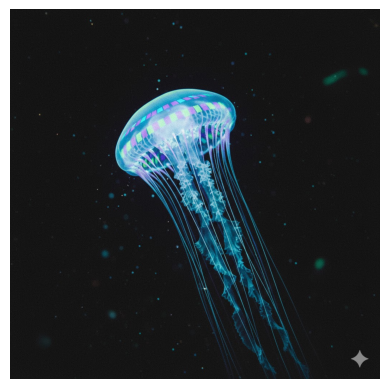

In [108]:
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [109]:
img_data = np.array(img)

In [110]:
img_data.shape

(1024, 1024, 3)

In [111]:
grayscale_arr = np.array([0.299, 0.587, 0.114])
grayscale_arr.shape

(3,)

In [112]:
img_gray = np.matmul(img_data, grayscale_arr) ## WILL BE USED IN FURTHER PARTS
img_gray.shape

(1024, 1024)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

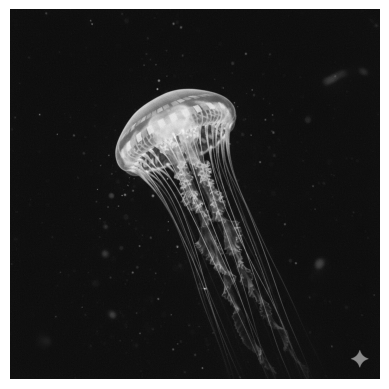

In [113]:
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

In [114]:
img_gray_cv2 = cv2.cvtColor(img_data, cv2.COLOR_RGB2GRAY)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

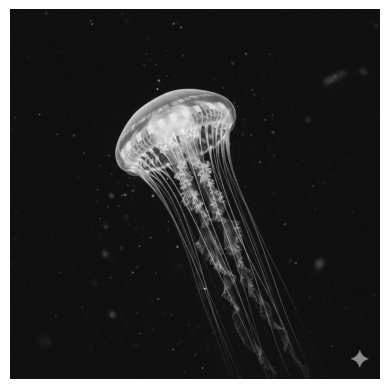

In [115]:
plt.imshow(img_gray_cv2, cmap = "gray")
plt.axis("off")

In [116]:
difference = img_gray_cv2-img_gray

**THE LOSS OF INFORMATION SHOWS THAT THE GRAYSCALE AGGREGATING ARRAY FOR CV2 IS SOMEWHAT SIMILAR TO THE ONE WE TOOK .  ⭐⭐⭐**

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

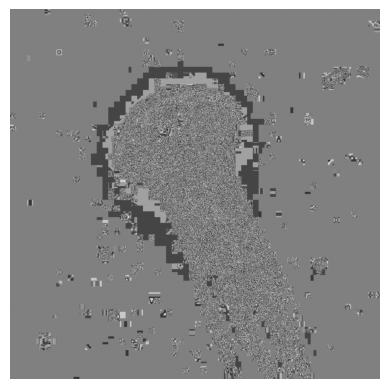

In [117]:
plt.imshow(difference, cmap = "gray")
plt.axis("off")

SAY WE TOOK DIFFERENT RATIOS FOR AGGREGATION:

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

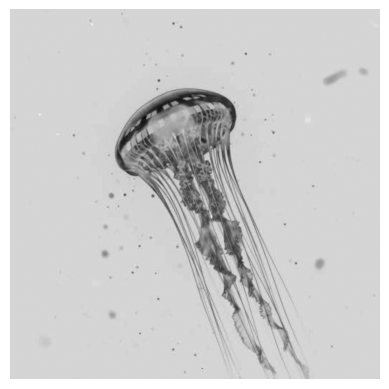

In [118]:
grayscale_arr2 = np.array([0.114, 0.587, 0.299]) ## THE R AND B Values are swapped
img_dupe = np.matmul(img_data, grayscale_arr2)
difference_2 = img_gray_cv2 - img_dupe
plt.imshow(difference_2, cmap="gray")
plt.axis("off")

In [119]:
img_gray[0]

array([20., 25., 27., ..., 25., 26., 20.])

In [120]:
img_data[0]

array([[20, 20, 20],
       [25, 25, 25],
       [27, 27, 27],
       ...,
       [25, 25, 25],
       [26, 26, 26],
       [20, 20, 20]], dtype=uint8)

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [121]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [122]:
gray = img_gray * (1/255)

NORMALIZED THE PHOTO TO PUT THE VALUES FROM 0 TO 1

In [123]:
f = np.fft.fft2(gray)

## SHIFTING LOWER FREQs TO CENTRE
f_shift = np.fft.fftshift(f)

In [124]:
## MAGNITUDE in log scale
magnitude = 20 * np.log(np.abs(f_shift) + 1)

##PHASE
phase = np.angle(f_shift)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

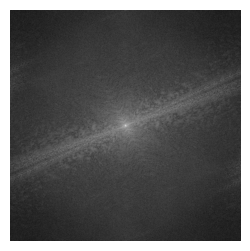

In [125]:
plt.figure(figsize=(3,3))
plt.imshow(magnitude, cmap = "gray")
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [126]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [127]:
rows,cols = img_gray.shape
crow,ccol = rows//2, cols//2
## radii
r1,r2,r3 = 20,40,80

mask_lpf1 = np.zeros((rows,cols), np.uint8)
mask_lpf2 = np.zeros((rows,cols), np.uint8)
mask_lpf3 = np.zeros((rows,cols), np.uint8)

cv2.circle(mask_lpf1,(crow,ccol),r1,1,-1)
cv2.circle(mask_lpf2,(crow,ccol),r2,1,-1)
cv2.circle(mask_lpf3,(crow,ccol),r3,1,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

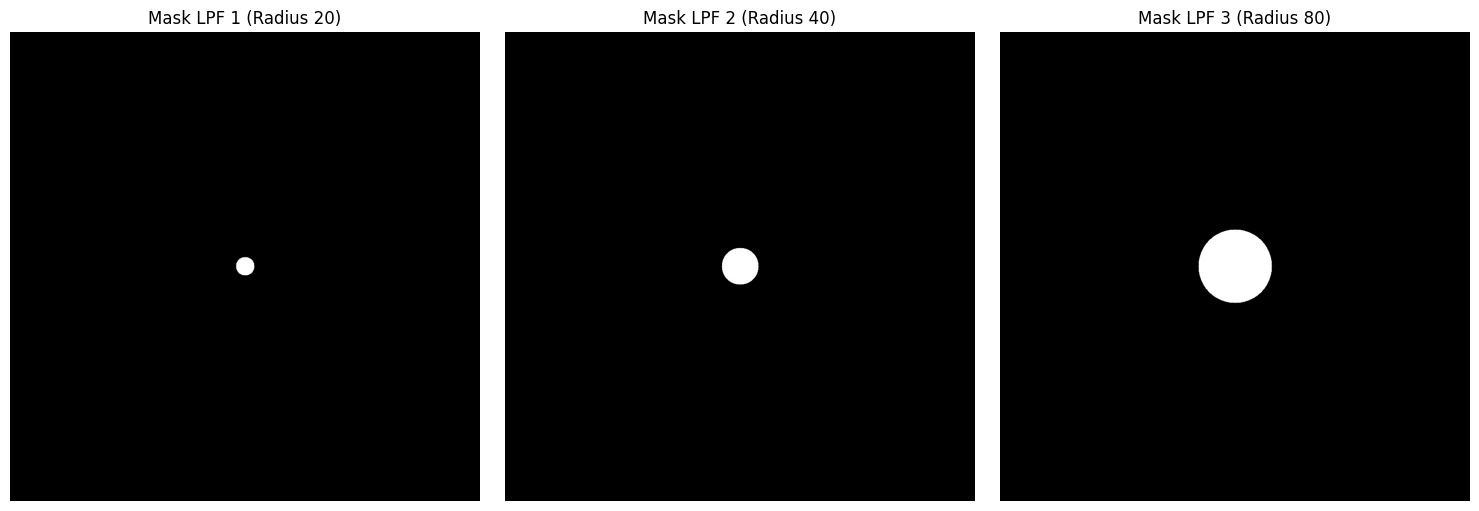

In [128]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # (rows, columns, plot_number)
plt.imshow(mask_lpf1, cmap='gray')
plt.title('Mask LPF 1 (Radius ' + str(r1) + ')')
plt.axis('off')

plt.subplot(1, 3, 2) # (rows, columns, plot_number)
plt.imshow(mask_lpf2, cmap='gray')
plt.title('Mask LPF 2 (Radius ' + str(r2) + ')')
plt.axis('off')

plt.subplot(1, 3, 3) # (rows, columns, plot_number)
plt.imshow(mask_lpf3, cmap='gray')
plt.title('Mask LPF 3 (Radius ' + str(r3) + ')')
plt.axis('off')

plt.tight_layout()
plt.show()

In [129]:
f_lpf1 = f_shift * mask_lpf1
f_lpf2 = f_shift * mask_lpf2
f_lpf3 = f_shift * mask_lpf3

In [130]:
## CONVERTING FROM FREQ DOMAIN BACK TO SPATIAL DOMAIN

# shifting back to the original format - low freqs on the edges, high near the centre
ishift_lpf1 = np.fft.ifftshift(f_lpf1)

# converting to spatial and taking magnitude
img_back_lpf1 = np.fft.ifft2(ishift_lpf1)
img_back_lpf1 = np.abs(img_back_lpf1)

In [131]:
# Repeating the same for the other two filters
ishift_lpf2 = np.fft.ifftshift(f_lpf2)
img_back_lpf2 = np.fft.ifft2(ishift_lpf2)
img_back_lpf2 = np.abs(img_back_lpf2)

ishift_lpf3 = np.fft.ifftshift(f_lpf3)
img_back_lpf3 = np.fft.ifft2(ishift_lpf3)
img_back_lpf3 = np.abs(img_back_lpf3)

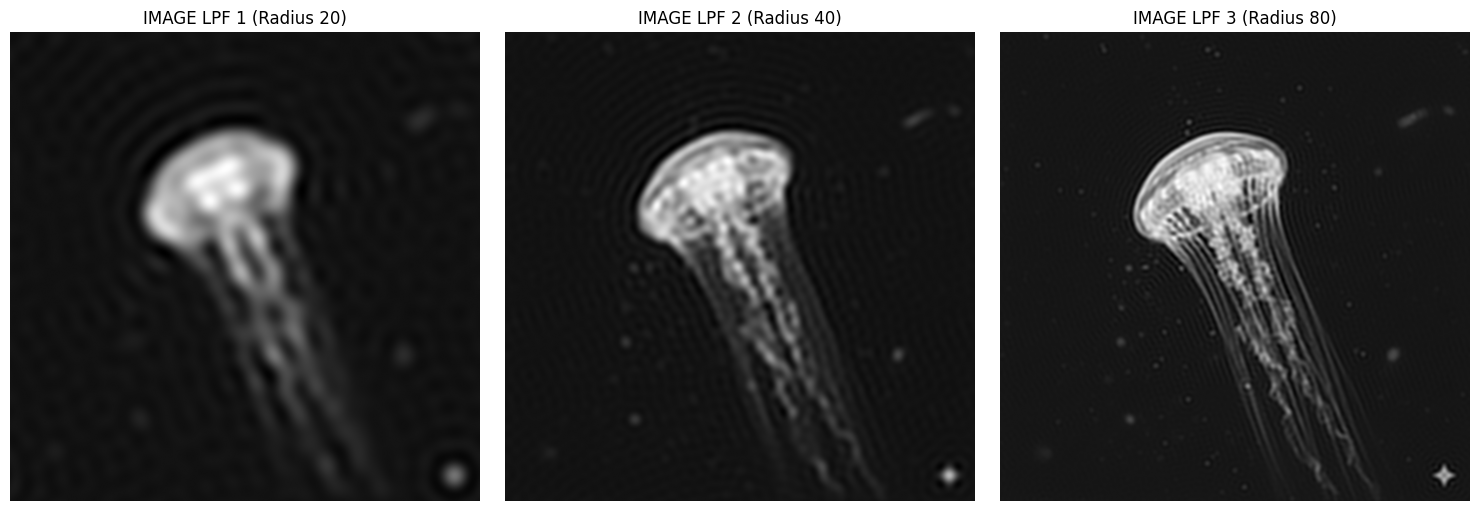

In [132]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # (rows, columns, plot_number)
plt.imshow(img_back_lpf1, cmap='gray')
plt.title('IMAGE LPF 1 (Radius ' + str(r1) + ')')
plt.axis('off')

plt.subplot(1, 3, 2) # (rows, columns, plot_number)
plt.imshow(img_back_lpf2, cmap='gray')
plt.title('IMAGE LPF 2 (Radius ' + str(r2) + ')')
plt.axis('off')

plt.subplot(1, 3, 3) # (rows, columns, plot_number)
plt.imshow(img_back_lpf3, cmap='gray')
plt.title('IMAGE LPF 3 (Radius ' + str(r3) + ')')
plt.axis('off')

plt.tight_layout()
plt.show()

**Till here, we applied different Low Pass Filter masks. The bigger the radius, the more frequencies, (starting from low frequencies) it will allow to pass, thus capturing finer details and more information.**

here on we will just apply high pass filters, by just inverting the already created low pass ones.

In [133]:
mask_hpf1 = 1-mask_lpf1
mask_hpf2 = 1-mask_lpf2
mask_hpf3 = 1-mask_lpf3

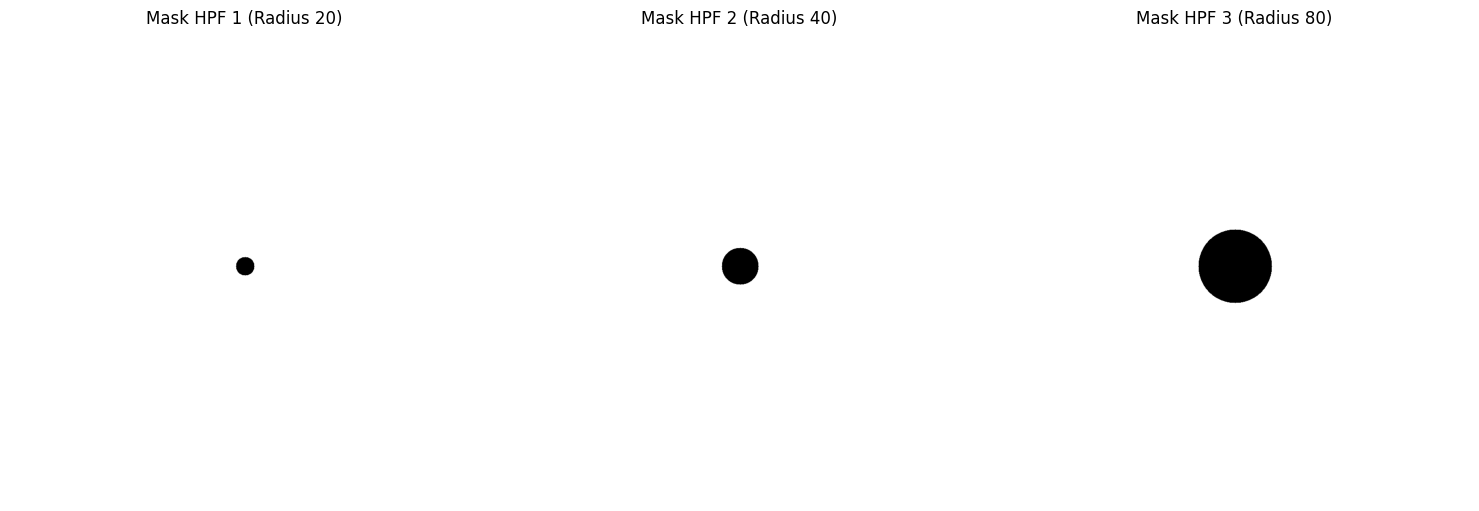

In [134]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # (rows, columns, plot_number)
plt.imshow(mask_hpf1, cmap='gray')
plt.title('Mask HPF 1 (Radius ' + str(r1) + ')')
plt.axis('off')

plt.subplot(1, 3, 2) # (rows, columns, plot_number)
plt.imshow(mask_hpf2, cmap='gray')
plt.title('Mask HPF 2 (Radius ' + str(r2) + ')')
plt.axis('off')

plt.subplot(1, 3, 3) # (rows, columns, plot_number)
plt.imshow(mask_hpf3, cmap='gray')
plt.title('Mask HPF 3 (Radius ' + str(r3) + ')')
plt.axis('off')

plt.tight_layout()
plt.show()

In [135]:
f_hpf1 = f_shift * mask_hpf1
f_hpf2 = f_shift * mask_hpf2
f_hpf3 = f_shift * mask_hpf3

In [136]:
ishift_hpf1 = np.fft.ifftshift(f_hpf1)
img_back_hpf1 = np.fft.ifft2(ishift_hpf1)
img_back_hpf1 = np.abs(img_back_hpf1)


ishift_hpf2 = np.fft.ifftshift(f_hpf2)
img_back_hpf2 = np.fft.ifft2(ishift_hpf2)
img_back_hpf2 = np.abs(img_back_hpf2)

ishift_hpf3 = np.fft.ifftshift(f_hpf3)
img_back_hpf3 = np.fft.ifft2(ishift_hpf3)
img_back_hpf3 = np.abs(img_back_hpf3)

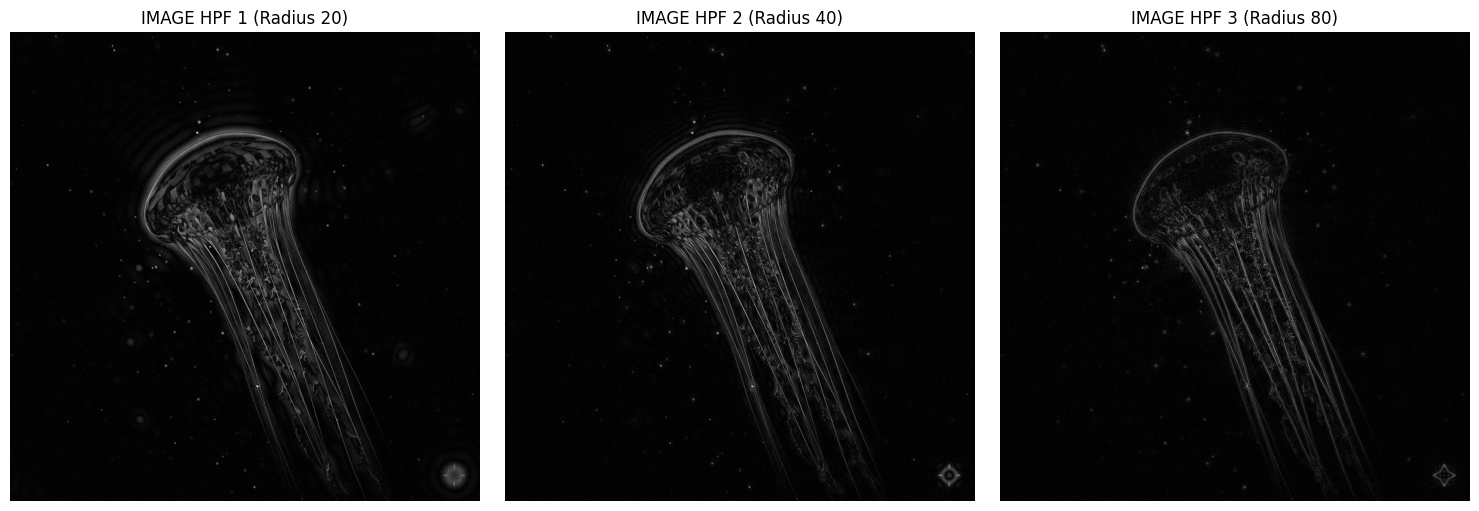

In [137]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # (rows, columns, plot_number)
plt.imshow(img_back_hpf1, cmap='gray')
plt.title('IMAGE HPF 1 (Radius ' + str(r1) + ')')
plt.axis('off')

plt.subplot(1, 3, 2) # (rows, columns, plot_number)
plt.imshow(img_back_hpf2, cmap='gray')
plt.title('IMAGE HPF 2 (Radius ' + str(r2) + ')')
plt.axis('off')

plt.subplot(1, 3, 3) # (rows, columns, plot_number)
plt.imshow(img_back_hpf3, cmap='gray')
plt.title('IMAGE HPF 3 (Radius ' + str(r3) + ')')
plt.axis('off')

plt.tight_layout()
plt.show()

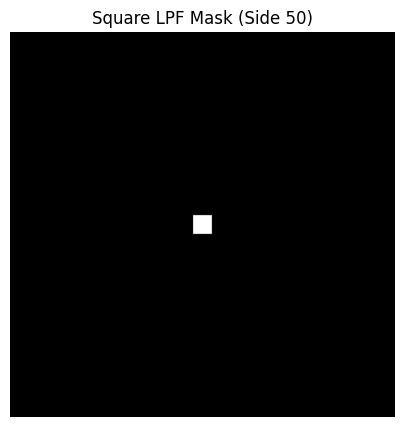

In [138]:
#CREATING THE SQUARE MASK
side_length = 50
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
mask_lpf_square = np.zeros((rows, cols), np.uint8)

#CALCULATING THE COORDINATES FOR THE SQUARE
row_start = crow - side_length // 2
row_end = crow + side_length // 2
col_start = ccol - side_length // 2
col_end = ccol + side_length // 2

#SETTING THE VALUES FOR THE CALCED COORDINATES TO 1
mask_lpf_square[row_start:row_end, col_start:col_end] = 1

plt.figure(figsize=(5,5))
plt.imshow(mask_lpf_square, cmap='gray')
plt.title('Square LPF Mask (Side ' + str(side_length) + ')')
plt.axis('off')
plt.show()

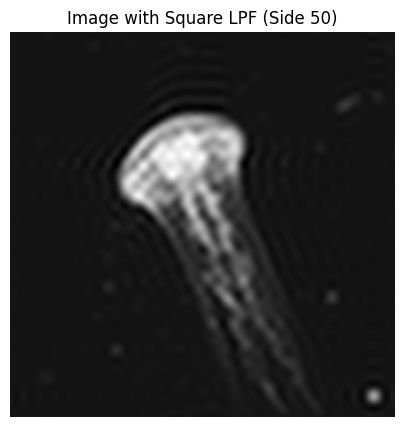

In [139]:
f_lpf_square = f_shift * mask_lpf_square

ishift_lpf_square = np.fft.ifftshift(f_lpf_square)
img_back_lpf_square = np.fft.ifft2(ishift_lpf_square)
img_back_lpf_square = np.abs(img_back_lpf_square)

plt.figure(figsize=(5,5))
plt.imshow(img_back_lpf_square, cmap='gray')
plt.title('Image with Square LPF (Side ' + str(side_length) + ')')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [140]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [141]:
phase_only = f_shift / np.abs(f_shift)
phase_only_lec= np.angle(f_shift)
mag_only = np.abs(f_shift)

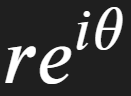


The First `phase_only` formula is still a complex number, with its magnitude stripped. It is of the form e^iθ.

The second `phase_only_lec` formula, as seen in the lecture, contains just the angle, and gives a real number. It just contains θ.

In [142]:
phase_only_lec[0]

array([ 0.        ,  0.46594793, -2.48336778, ..., -1.34248494,
        2.48336778, -0.46594793])

In [143]:
phase_only[0]

array([ 1.        +0.j        ,  0.89339609+0.44926988j,
       -0.79107935-0.61171355j, ...,  0.22633305-0.97404997j,
       -0.79107935+0.61171355j,  0.89339609-0.44926988j])

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

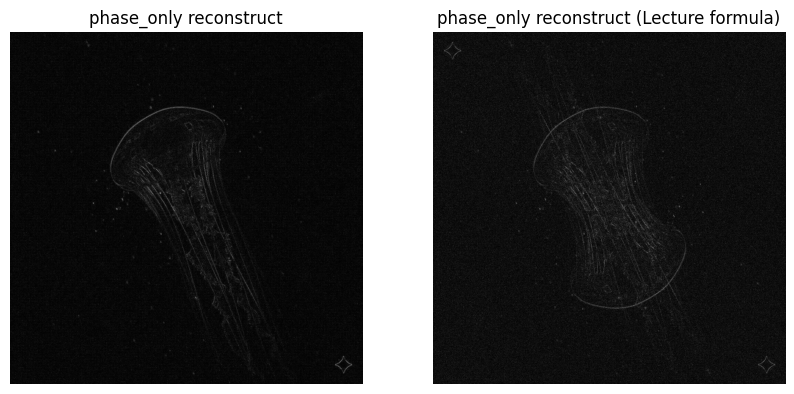

In [144]:
phase_only_img = np.fft.ifftshift(phase_only)
phase_only_img = np.fft.ifft2(phase_only_img)
phase_only_img = np.abs(phase_only_img)

phase_only_img2 = np.fft.ifftshift(phase_only_lec)
phase_only_img2 = np.fft.ifft2(phase_only_img2)
phase_only_img2 = np.abs(phase_only_img2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("phase_only reconstruct")
plt.imshow(phase_only_img, cmap="gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.title("phase_only reconstruct (Lecture formula)")
plt.imshow(phase_only_img2, cmap="gray")
plt.axis('off')


The reconstruction from the Phase only data, with magnitudes set at 1 basically works as a high pass filter, because in the original image, we have the magnitudes of low frequencies a lot higher than high frequencies. Setting the magnitude for all frequencies to 1 bascially boosts the high frequencies.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

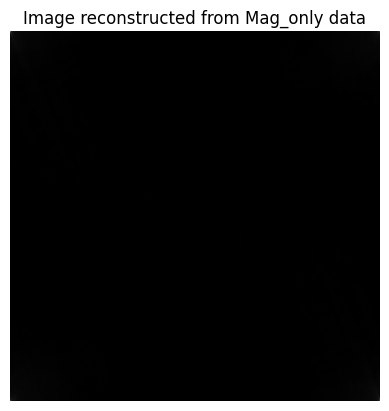

In [145]:
mag_only_shift = np.fft.ifftshift(mag_only)
mag_only_img = np.fft.ifft2(mag_only_shift)
mag_only_img = np.abs(mag_only_img)

plt.title("Image reconstructed from Mag_only data")
plt.imshow(mag_only_img, cmap="gray")
plt.axis('off')

Without phase data, the different frequencies just create random noise and thus all we see is a noise - blank screen.



The log transform is just for the magnitude spectrum plotting. It is there for the visual part, to help see higher frequencies, which are too big to be represented in a linear visualisation.
It has no use in reconstruction of the image.

----------

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

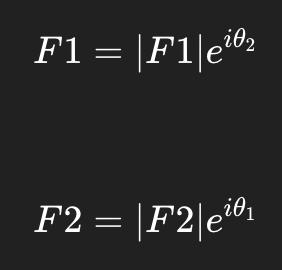

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [146]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [147]:
# import base64
# with open("sample_img2.jpg", "rb") as img_file:
#     print(base64.b64encode(img_file.read()).decode())

In [148]:
# @title
base64_image2 = "/9j/4AAQSkZJRgABAQAAAQABAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAEZCAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAEMABQUFBQUFBQYGBQgIBwgICwoJCQoLEQwNDA0MERoQExAQExAaFxsWFRYbFykgHBwgKS8nJScvOTMzOUdER11dff/bAEMBBQUFBQUFBQYGBQgIBwgICwoJCQoLEQwNDA0MERoQExAQExAaFxsWFRYbFykgHBwgKS8nJScvOTMzOUdER11dff/CABEIBAAEAAMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAADBAECBQYABwj/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAfmZ1zcu9TCLLn0wqPMVVaohzlpnOgprnqtKG5tjmAWB/H1sVojqDwbliGzhSYqm29nuaSfVytbfLoqwP1+Phus4/r+bfE9WeXQpKEh+0FHNIpaLXBKTVlrxLQr3gIgkMrQvgHFvIpBfJhozRAFHVs6hgRx+JW2kKshZCkErSmakam1bUpiZa8I1BpDZrjpUdoRK7i4112vY1m5/Q4OVgk1Yr27h62kg8eKmqzghqWgkV4F5BcBRpjHeE7VtahJN5MZ1mwsAmzLeQJ9LZBfSbaBBFwkBfUh0uRC95OC4GQOR1NVoMFHSVifVNSwWa8da8MhKXVSccJ6EDrFwjpIUtS42sdPMAtDfydDLE22i0joGrGWeVehFRtBF25YdVe3y6AMx6vH8+7Dj+w5ejMnwsLahcmLbaA1vkO4iUrRMiqX0ASlGaQ4NWkKt6S7VLFFIvVFKG8mBXRSihNDKifQe5VvJA9BqWhzeEDNBGq+nzU0JQaoTjyuPehMomAUgev6Krz3RYOVr1ufGwaKelUignrXknM6WW3oKiwTJAAxQpOGZHNCjaXy9fJVOQUbFQaCosgGunbUL1fWXnxm502hthxeV3PxuL6PNR1+Tpw87cxtZVo6HWVwnrUrxNWqenzVzgvNTcBU2BWvNVKNxA7E9F+WcEAtfLZQ5b1crOi8qzzybiOlitlmoyCVTrCrNw3p52vvjpVmPT5eA67kuq5ujOHcWGjFqNZJs4675WMsBrVvyu2GjFMty3OLm4bdI18bcnX6p7h+pUaflp3yb9S2sVreA8A4xjJJUVi8Uq1v5O0Xrcxb3kVn3grb1g9F4Ysu2vnUTaidxnCynrWlq4O/j46LQQ2draee9SKuWtKEtNdCdiXmg1ao0CjFW1xM+GAhKoWR0qDQtciYknhIR+gRrdGFF7HeZjhZ6MuS+Y/Tczl7eH0O143i6dXldDXzXAW2cb0cFCEWqfVJAlpvSplkczdrUsnJPVTPanoo9PWRe9CKk3hOoNdUsURMqjNk6OjBv0UZUAsao7audq3JnEmtsdUgTelzfPOu5DseffKAyPCyOpvwmgM5GkY3C9DyWXT53E1LO5d+fNZHZ86suN1PONomqZlUfRuy+H9nE93ZBzbFmhq9GNaXHLgtSBf0xc0goUzRb1KnreD0TYKemzKxeEKibWi4i/koqSo62iwUxNzHztcLA8dKtqtNe8zS58qYEsN6FVTYLLFIPRgYdCMJIZEgrqSPIOUsvP6T3RbYjUaX1xsQ67JYFe1xq0teL6OWj1F2Ya+xl52X5f03O92KtTC1gUmDRSLyKkesMlorLZmt4oniAVWIsYTvlTzRszTUTLs4LypzMczUtfTzNHOnrhsoZKu20y4BjTO7ubraToEEX0+X5/wBXzfSc+yEWrjZdfO01DQr89vnwfKWBj1ViktsQFVp8mbdM/lyOdAahE3TZz0PpOz+e63Pp9Dd5HourlfHeu+NCeIASE9SpQogL6ZapafM9FpCkX8FPEqAhGDDrUtE/QSExkrLQ8jbys7zZKHn1sZZykRditII2xJpFmZo/ptcqmrdAbGihe5KIrRizM14m4I17C6ucXpPIVB5Kg0FWT5zXwtHyu10CB2CUOvzaYHC9/wAF1oa8i6MpuO9IMFAKhRlbgkzLPA7zRLjsmEozhPoiacskZAmaAb1sx5CTS2ee1c60/TGaZMBipb0Moly/s87t656LKbPpcvJbHNb+OqbaOhjbrngvL3H9J8lnXnQxa7AwEwBKCGSQfhEmkIuyrcGmE7y2n8y812nT/NNfF/YKc9u9nJctCaRNveuYqUafvTIR6ZamJqHve8E0JAApccV6LeR4RaDggyBTM1c2GnEzjqv71kzVJFIdYImqS1U2CiJUjtaoRBLtLFkgDoQqGdETPRhKrK1EsiLSGoyrLbVOon89vpr+R6tNEPRyudx0Muq1eM283pwVESNc16sBpereBUtWw/EGRP1/EkJETN39S4QcJBrnrMtkB107VoWkXUUcyp9lc2RdhJtopR+qS9Fzm7pGk4g/6fL8+6Pjup5tktrJ6aDQimFrjg/M+v8An+fTFxnp0pr5KJmJqR1MRMdJcGt4ckntHkNlRNNPM5r8V3nc/J/pdYPFETqwJNLXN6RAWtWwe9EB6feD3veCfTACCcUsc2rLtS8BSYkdVGk5aQHBZaht66CRNqSnmwwwkuNtm4yuKVuMd/DMz0+lqHkdQkxqE6cRDgs0SLDuaAYDNEQdy87zbJseR6Gkwsbrw5bK6DG5urih1p2Y0FariR185gTAmhR6aZLgsmQ6xJDDiZZCBMVM+FLPICjZhRmWm2qa0zs42hlTrS9sx6oLJNSKGm+i5Po9Y0tLI0vS5PmnV8d2HP0A7Hme10xxOF7L5PhsZKPo/L2cDq9x7nPmvNfZuU1OGjfx+rJjI1itYbq/riVtjPEIo6VDZlSTThh3invpvzXu5nr2KX7uO9qepeoSg7TWwveiQmIkPe94PTHgoMlE4rMpxEwHveFJYdM6HpUwk8q37I+FoByFYrpi8u6PVFL2sqGIS1l10V1dIrKcRMwNaKjWuTE1FvmF8B060mWqLNJqi830nA8+/tFWvlehphJk7TVB/AuefkntoSE1RysMlKiLjG1FPEp1IKqC6GaZMoYqmzIjzRKUhOS+qw1w3ihMr+pN7OY1lTUiJAVhJlIxa3COmwN3aHm0H/R5fmfc8j3WN30R4Snn/m/Tcnl09P8AU/l/0ni2s1kNYQHI2FlthYj+P1tVZgm+Yuf6PP0zasccTlLaOfrlY4TsN6zUMn0L5/u539YPyvTdfIf3p1zqMngi3pCJ95nvWgI9PkeifAMZBJxasJ3F5GHdcKfNXlygihNVXTIP2eNzKhKdWS5pFWzq8Zqk9+1zm718pQte2lUOkFPGs4rz66bASb4sqEJpJo9Nr0yEFVslrm21/nv0D5/lvppOMed2cZfVT300EUNhc/KLMj6JUVfWqVhMCqBUsOpCcBW/R6yPGCZOfeuj01hVaL1TlgBE63vdNObAtN7WDqZU5al8qaMq0TSy7ge6jmel0hxihvR5uA+k/K/qeNL5fQYkL5nzTuben0PqeP2PN7HmECc2rKcVbxsu9e6FGJ0Axq1trnn9LdScsxHQ9UYs+jbFplBhVrNYXS56a3W/M9aX9YZ5npOzitS9dItMWCLR4J9Hg973mei1QGEwpcjleGLOLmcui1XE8bsuJI0dXIRNGDLuvDSUL1SZvmt62DrTn021wPabY61/F7cZ8IwlI0BDXny2bO0vak34C9JlVAWV5/RZejnbHHdby0XglUzuH0t3iH8/aeg1Et7PPmlLr9WQUXUmACYV509FKlcopoL6Yl+MKAL4cDalYyLXrRPxPSquYBExUKFl9PNdhuMrezozGcdPQXsNS103L9Dc9JKD/pcvz76Pw3d5WPO28+I+HIbmQa9r23z76X5fXyMdhklqShZWhoAZ1Rce3LWnQ41unn7hLn386hDYwKzstqo6Y0OAjR2FpVaurzWnnfVdn8z6VL6J7Gns5NqctqpZ8rLGJU8hqUzMN6vmoDIpqMiuXyae8jy2O2nmB0TVLcaWlXo4i5z1iI1qyKpCh1NZUTWzKLPTcSqo+on57e7+ILqTNzJfUoBkbWHho3VEeVaeUPRHy5OlwleyTjegDocXVzrnjM/qud8/0M0zh1o7r5Txzcsi8LshFN/MZZM1HmrBRaSlYJLRaT5O3osiSjunEzYKXm46FoearIzJiqQTCPIvzRLCPnXrVZQF5Y0jW1h9FUbFHuf9DmF0XMa2b2eS6nmMHi8H9J+fVfYfSfmLnFv3uZ83LNdnnY7k9GZh7OP2Y5QHR9PEvpU6ebyw7FMehxDqg4nBRF+vmz2UyXB9DNei9GyFs9H9DGYzOgb5tiV1DnD1qe3twhGusrydpfcs8ARn0m3zm1T9Ez+Hbl7+ZmUmjY54unD6nPzJer47t6nBR6TCTTWOI1GZciu/vWm6EoyIOfsqvPp+1+X99tyaTCrnXzltS2qryHRfPOXd90Ozz6OOou9XPdHVU1Xz5LssLj69VrI1cwGU/fn0XwNkK0zdzM3JOJu4HtySz9FYecF9GpToyncZ9h21zLHrTVb1Kj1qwUQypUXOEyfqlqq96CpgJGuGjn/a+MI4GuijnsW9LQ3ZXYR7oMfo7z3+C+lYXfzJXUtJ1PG9Ry/Lth8Jvc3qtDpeN+r4dKBekS564frtHSJyeS73HL4qegXu+Ya2c2zbTWayp7FVV05xZG1ndPOGbjpXYGWb8ypZDsrEkhoV5eoondED9W5Z8pI72F5jRM66pwiEJ6jWE4hvWzjwi5STdnR9oleuXJxtVLLYA6wtlYiC2LJHm2SBagZ9GlOKO6m1pj0bGboehytALmaK/GdrzHNs6vUOGnQ7GPr9vNZW6uiulrZmdZ/mA8XQOrGfholIwPRvU53YhY6unndueetpJDzQaCIIrMLaZ5hAl2zJ6tocEmg71uVMXqFCpxMp+8MqZqVZTV6/kws6BHHik9t8iVz0RuWIn09uWYl9H0fMIh9WN8HPpH1UHyaovoun8j1s70uU+hcHc37v53vZ7/Y1MjU8vpcbD5YixtnndNW+R6bL0aq6btbIDMvtgqx4V89kYVvOZEax33l4tgES8yNpFmmF4oDQq1atWlmpuGoHhaGMisJjV0pTeGmQe6si7npftk+kyy1McbunOhh6uTnsPKCtfQ0ZIq0KZNuLdIMuQxqYe1ObphHMGtTNP0Y6Z1NHtxxBaaGdc1IScnR1Wlm6XZyqwqZ1o52jmXMrPpc2o85vN4em6jmtouePcudgwOgwezFVNxAoKbec2sBgF55Vhl1yv4fkzeH5M91ip3GyNEEFd1Nq3RJwnVRFKplJQibkDJFsEoXNteFdLvMKnk83B3+Q0rKW0keviB6D1PSpkx89ga2R3tLP7D5x1nF39pXOnirouaa5HWdRLAz+nNtjLrtHReTtjQlyIa4iWr7fE5VyKtBCtk5ZTbC9ASkQQ2HJjrNRpnyda5vFDjHFhNSOYam1RMv6aAbSyrS/qenxe3zS/oKXeeBw9s3bZplJs0JcYFei5huZ3vsrH5tD6Oa9MaxiN6czZF46MdpvM0+vDOvl7afCC18rg6ug18l/pwDSa0aap51gGc2Ln2568NeV2SzQe2cibyKIzOl5neFE2UXSory3mrPBuOcJWd8bxW6K39ZOTrXTYsqwnXxIHaKnTitkm3hKNDl0YZrWKi7lRTLPZs4CEl/SeWJMVhcn1HEbgLBH18vqiM5cU1M6al7N1huhqrnt9C2ON6vzOtXge753fPjK6g+/jQPYgltFMcjqEqXJLSy2pRyEqDMMKXHDliwLKjDZMrWNMoGCWGliho1X3pqfCOFqYKMcyGReIMgM9HzL+Ov0TJV5HOE7+0OiiseHj0XTPLnHNdbXHodvhtDDX6A7xv0PmFmBazzZjOe3yPr5h+jLN3eO7CTmuW6XGw30t3nOhqLivfabv5evpGOYJs6xvFyvL62JSnO9vPeW6cj8z0XN7LOWdUoSGUBSAtJFrnPFFvhaPWC5AETi0FAd5hMpF6MldebLGDYZ7hlW24g5nZHqp53uXaTxfmR3S2NZBmKzeL6XidLvnbmV18wIn146aJG5ujuYzOrGljaeWu+9xW9mbTbrHNfPLsZl61yWMjbP2aGOnihRsGmb91PRoWwLhQdfVn4npD3UctuxprZ9+o5ungtEOjvlz3Tc39QD59ld/wASnmHqPfCQ2q4cCOoMXU8NnwiDYgTcaWz3BojUSbnT1r1ixCOO1UomEgL9aijm9iMKp+7V+adDzrdmjOT6eIR7uNPouQ3YoPMdpyxXun5noZGQ2T3hzYx9S4zr3SmsLNjV8f0bg2UHk1YLvRnnZfQZeq5tdoVNJJ1dUqq2u1y9pvvjHvWSra0jglDDqCi1Knpm14lZHUkeKNYRJslxFltvYjkX3C0aPLpizK7U9PzXYZ3o8B1HIlc+huj7efBezS7c7NyVmjiks2Xb5tiNM3Tqeo2O1+ddXx9EW0sXLXM5Xs+G68AeinTx2gfqVyDMmUJPTYrEsANEXXZbcgx0GAJn1xLRsuUclL6lyeolv/MPrXxZyNTWFvOXXWzKy8I4HPprIikXuNhhG02ayzCbjSrGfQYlWc9ah1QSc9taV3n1VUSrH50j1PMa6N9fz/0bn05Rbm51z78JewzjG69DZ6uVbkus5WbW6DC3Mq117h6cg6mY20fH18dPMevfzOqfCd1hC6rOVu5enn9mPKCYWV5qzyJQLeC1zwy10zqS/hDkt1db2oGWOY3ifWsnWLSP1rQVa0elmkUI2C5zk3sa3B9XlR1S5Ms3Y4budP8AMq6614tFhPu4KFCe8yzKCrbhE80Y2PqjPVfQloaeCUXacxkXjR9JqdIzw2HefptDm1qUTZqC4zXp6b3O3+ffQePq2/m/e4KOegbXRCdV+hT1us+fZ8JFRhHeDwFOotSLXnNa1aj3vEzatw96vgIUJFWhakZdD58tyNdLVytPHRPdMOM3V3V1nxqRb9Gh/oPA9hgyLdDo683D76hpWv0GQ72cxOb6flppLe5zpcdGQsK75sKvBpNI6OUwSxcnzOp3YydnWOY89nYbbMwbox4pdwN1kJPoMH4lQ5exIuYmYclLQs3WSqDyCsdBdYEdz7DbiifUdKD40t9kyqn5dbruX3gdPRebgAlDxR1R9N4bqBY6ab/JuZa4OjkLbQouWm/LT0w1oZzUDdXA0nUqo09oYg56CaAC8ibkb01XA6TBVYqujl6TcfruYF6Wr3hlVQUsTT/e8xHN06CuG1Remh4ePTphE40Z4Nc3FKrXHqltWbmkxn8/YotrJa45sT7TnqT3gkbA05OJ5X6kFjQBgkHsaOHqYdOrs8xo866fm93kdMMMibm2jnTcz1HPp0uqjv8AR53E6+d1SCjap2YzibedFc/u5G9z6WRdV1lhZlNnQc70XPXNMvU95/TVxOUm83UzbTJs98fLY+3kaGYFtIoNLVZh2vLS5SVERgZZuE38+nfpsDrMOvR009TjdDWKZQWfPNbj+zxXr80zdTL9TnDasaZzM3Q7q45I0a6fju359ea576Dy11g0sPq4GVClCylqC9NG2oLHprVzXh56j7C6zz0qYmjF2zxKs2eI2cG0e6s0rUr5wZtByaa6fK0eXrrn9R1cVw2329Jn5xH0gU1weT9Nx0/j4/p1+jP5lb6fp0vk3Y/SDQcXhfTs7HT4oBhbuyH683CojirJz1SzoneLEnqQU3FYlhdDOYnTc18jS5N/cbBujnZkXjRzoOW3cb71R3m65Oi6XF3ujnPAi9GcZuojLxtNPS59FqW9R5c4WbeFr59znGWD5/SwwjfKtHLfy95vsZWtJhYHUc5ss1dxJ0lRqgYN6XFa4rg0dcsXXOfzqNbp+O7fn7HNFFzmGSjM8SenzzXQ0lVr885r63y/U+GAw528uZXXeT5/arnoN3/Fv4b9Fz3Qc/l0Ymc0Dt4FJmmmET67mtJsEOg7KaQ65FbLSyRAMiLY1GgjeHNsXRzA8IorzmPWFJaEVOO5JMteg0OJrF/U9D5AfN/YXfjvd82/ZViMoHo81h1X0n3x3P6cvtOX8hkf0RDgqt2XvbpzUBpIaZNrOJpkkchX3mGrT4k6CtWyqj4DqtgSTmGmSr1qWmfKnd1rjG3fq+Il7IjJ5q+pP5z3bxHEfKtaoC3tYrw74aKkEyGbMwq1E2AVPPqnF5vbpLemVo5Ojlbw+/macmfzexkdErqtKjldhRPmjCM0Nle4NMqHjSiTq7a7WE/ofRtLhfofndWFj9LwGs9Nu8J0obzebo4Hua6fHZ8petm+lh3fQ/Hu359d75b9D+daYN7nM9JdbWZ7Nx6MkIx9nBYXrVlFvSKjxusVJOezpsc1AFNBfHY4NlFyQLVU5ynFXIqMgaoS9Wrb+P8AUOXp+XW+r8amtzn3L511c3Kl6/tZr4/1XTG4ezq40ZnD5hwX2D57W/Ki29Pt5eRna29MuTjrgc3VzB+85yNefUKPq47VrZksUMrXvFST+oxN0ZVIm2Bi0adCZ7V53ivrbZFo1ldMdLbxNXqwt8y+qYzpHT5TouetVBoHRlYihxyMTQ1jBmWv70TVbBdFzgyk4uk67SOVP5jiGsG2ef6AfNoOh6ITUbCPNuUQcmyAjUlnyoh1yqirtZJV32qR0m+m8J3vNFOM7rLS5zoQaBoRiF5x8oOJ3xOY+h8ntXEHfy/Q5NfKjQIzNTOunv8APd7r418xD9iySPlY93H6cBa1NUbSTRx054sNMpC3k8+p8tl2KIuJLSQlUsBKRgsNFCAT638h+q8fV1/zT6QTkrjt1cNXsNj2byVSdFE7FTj7ufMJ4/Npk10eXvTI3MVZ3XrM/qsWpgdHhyvjed0PN+jz39WLzMdUhcFGxI4M141VoxYbDI9bG+idX0Ix5uLLTtrlzOlUl2c3ntub6NPN9P2Y/MetxnOLfey9jI6Mr6OZqtrtqNUs06sxpGZzWTh1/Qtf59pqG7h9CMtX2NtCuXbNXbzm08/A6bnN4EFhQF6XGPjn0DWjkisUeRWVWxmM/WesYy9Xm7+h6nAe5Z1BJ+mS+t51K1qJ0uOVV7YmbSt86rT1PPa1cPUo0BrRF9d3XyP6FzvoMv3KGeMM09AOLJaZ6mO/ngZJgQ7rzdq1s2wykhEmzMLOCVsJXT0zSqURlQu04nVy0+xbXF9P5nXqWAzfNaYFSCEV89elWOn6HIiYMcHRqwE/ZgGhATdwjz8dLc0xw09GDnFp6fDekXcxT3gtqp7UasgLfDZYjIhk1FtTE1+r5Pcvl5ZUreXRTdBomZ+Q6tbXDI7fi+j0S0Cdb0s/E1GivKlpL6OXop5tfI5bI8X1uPl26L/M9eo57QvZ5zOklmrtJObZiOqxFXytPD3hVR1FiSxQN86QRmrHXalysRF0AZPaw10HI9Pj1O9nx/U8fQ+S98shXv4E4ZqqCs2Er3H9lz+i+W+tHseWQ4rTbNaDinH1mJrpkMbp5inLNMaLyiorkrwMoDFbygMCSiikBavaBCnxaiqcFR3iaqxlCRoRaSLs+8+V/QvM9Pq3Mp7PNkMjIzdFfRb1899Pt5ckOwvydFWc0sDq/l7KZTGJHRjco+r1zlBMDr4YoQbVfQYnd3FWeTrDVwMsgDBbd0cdiFtgQ1IkbA7SO7eYO8dyxD9OWHdvNisK2T0Ebn3MLR1wZmqQMa3P7LrBSHHN1O4aXjf1tbRJUacz9OXWVH7Ji0kNDWEn1gy21Xs/oz4p7HcndVF/PvHEm9WF8t4pkIWG7AfzUD3cF1j+7k7nJ6Z9C+pzF2lrxgagkWHuloqq5Goi38lX3sb1/OM1S6Z0H006SmS4fIu0gvlXyYzzLWjASIF2A3EOklC1AeEegDhWseaoQ4U7gMMdbU8EFH4H+94DquLv+g6eHscduqNh05/i27zCPY/tyfyX2b7WcD6OHQj0QYZ5y7iee6PMb3MVvhNkQ6c8AVJ7fOtEVFOlm7k6bkQXk6b2mqQ7KMNsPIaOch3cvXUUIB0n3gti09fG1uzAeH0SjPnR+8BltlZ3RMEY+rVMuXQt0uWzeny8t+SYa5179JXl+nF2nNv8ttx9RdQ3Jqy5xxNZ3MDG+tWY/K9j8ste6FLZi+dzNFG8sgdAUX9Vlu2imfO6Z7ClzSw5uOx7r5P3Hnd/XFxpweoriYNLpvLasaMGHMyDPdVd8Lg7mF6vCxWRVBtrHIqTo8hefQTn6MWNU4azTqMdTe3qNBtWGj38BBKFCIpUygQBAMuaIH4RITpQ4gpb1hM9Hymtj0/UNzjel8vp2S4qlZbvyH6cx0L4h9F7traJvhLZvoBZLmRdEyWV42E/lV0p83rcx3ctLe90clZ9DD7OLq53vFxtbm6SgYXlru1Vp6jWdsZTrmzHjClb0TG9lPp7e1mvdfNa8V2m1LHaWGfw8m7CuWxcjSzU8Qehad+d5X6ty1V0rHG9LOOt8x+l8tS9u8RgujEcAa3+zfHddZ9l846gROYwvaWijqZjnkp8zsrEgcMt0yBK5JYneaaSa6t5ejIGYsLVKq++1eZ6Tzup24CZyBBkLv57l6eX6nGX0TUSaICib6Tkforcak5GnNUhlBofmxOQkiArJfCH6xQDWl2pPQAE9YicDcVmhe9SlenvE+vWw9ztfmHQcfb3ijbfHvzRd3a6Xw0fUfXPzwvZJS8PRJXmXsoPLFM5KWX24eW97q4i+Hdv0VuSRoDUaab3O9Lhs8udHK4qeGM6iulnLTWU+syxOi5xXxMI1XknuvE8zfohdc6EVrrJ6NLNxtjAw33MvS5yWF/lOpXbl4vT6SebAM0z1MvZpWPOTpLGuhz4dYnoLFEY6GPpAa54lIVKoaigcdBF9CSUszQToaWh5la5uAhgTg1amhY8N8uXaa0+5+fNY6fUj5rHnbUVZVd8RldLhejipaw9MPNAgGaWsnnrP0uEiHBU6dEnJpYbV3CnvEaF6aCvS/g9SpBUYMoOaekDP5/S5Wr4uLmLB0EOiLSEzXmVvTfdPI9d5fp8jgfaUdcPnTXV+3XGPdyxz6c1XeFz3yvFb3E9+Pg292cEeiw/RbwVt6BOlWZjVzqM+vNtoBgkUG95Y03V7OWXlmDJbUyNalaSicHfzK6rcL8+Ven0bO5XWlw9lWzNxXBNrPRcF9I+XVSL+Bqx27887KsXRKsPnxdLKMHlWghXqs3beZlmlqzOG3pMATwVQVHVB8F67eqAW4EWXOJng+K0EvvDoJ9YKekgl5LRkmCMOi7v5X1fLv1g/Rx6YXNdVyPZIfRXp56M1MCre5qZacbXsObBZNmdM8/xQ1GtlarM3hzcGmMVaGywLVAtPUFFvOIVJ1OdlVvZyTTityUgmJZPGvq5FySK2oa+l/Kz8+/37T+LdRx7fR7/ADRq575LCzM63+KxuO2Xhe93cfonzVWWzRYbWJDuEz00glrw3G7i6OWzwa0hvUu1Kc8q5E21c51z5sbtZzSt6WbxV1zsfbs3lpsP4rhk9kvvOeD1JyrPpfyT6z8a6cce6sG231XD6c12nIdjwczrka0xZek61WaDDFqm+dppMsuynIgs1mzREpXVcqea2welZq9YpSraYESvqpsSsUdfG8mtDYWgQSWguQ6q7B/i9ri3jlej5/aVbzbfH3UYH1zDRdTfQ5XijHzz3yFuhye3FEmsnWSjo1weQIVzi3cW0xHUshFbbyEumXFzvNzojZDLQrUGEzLi5LIWG9VPDH0aWiyYtXSbxWQm1fJsqx5EVn1T6LPql9GB5XPqyTay0MeKg3I5u8zuYa5WiJ6tSKm9m66KTiD6OVpRFmwMEttKEvO63sIvimUbbdW5r4PZc2nnmmoyzdm7euC/Jdxl6zo/EvufwvojnoPpzrmvbr+egMrprpboXFduaDLHTMO42iJ6CI7BaBLzs3bz5rEo+sq5SthUUDYdzFhyy/h3CK2unT0ECDhsm0P3pde0zOs5tkW1eaz331hZGg1mOi2xXrebyN9H+ZfT8a6S9Mh487xXTYuXoAFAunFpRkFYZ7CtrzbAu8n0vJ6mpnXJi0U98NgG5kYFhP5glRNqbFpoUXoKSQF5ENk+ZZGjbPZijYm16jm/b2VrK3qzc+gl0Buy/LrMBzsoKGaXKcQiFWChkNYoKZO6fTscro5abfqN5bVMQsorIGpnxx3cnapapBzvV8s64x3M2NejQ6fG1uPfTaxJeXTtYzdYbOflPdOOx8A+9fN9jA2edPj0dRv8FsKdNPpuavPR8tdyV/K06VlWhCYE2s1Wh1018l7Mz0XVYsnwq5R6AaWilEx4VvTQc3HIGr4iqhRyhgUSjoOv+d9ry9M4P0esP5UHo+d3o4q0vI1bhebP0L5rtI+o8LkH5+lQ2w8r4y92dcsvK7bGrPnPSbo51mqsonSbtg21Fspzpc+I+ueyjro5ta9hVZ8PU9cr1aWIvYEJt+XIFhHsNVmwZqYtQPeirLXBVyRe4WpKMrDQK8uK3qIfrwys1KwETIeIOoP7PM3iu+vyu5z7bDuY/mHrchDRVmbhjm93j3vTL1oz7Ts22cz5zH0TP2Ob69no1l897Qy2nPq/MfovyHeV3Chy6DtYmkLePmGeRtEDGmd2AvXnSpgA0BkLUV9KecnrKRWLLlJfy8Ph6MlY8yPR4LTBE4cU2o10c3vAcnRxKmlmdExHq6c/voXCbMP6Kutl8muZnNr31YfrX6uGYDBLYKUat3tevzb3A7HMZNW2c3Wr62hgyBX6Nq8MiVcoy0kkx7SYYyWqkDRrpmOXcyHEjBpsSn4bis6SM4mt4pXI3lh5BLivNyEqJ6NFWU6wQipVl8aePBB3mIz4Eylybic8ueXanjAIR7glZsVJep/NLDYMxRypU+h6Th+h5dOisYMJytkSwZmleejA2kcl7bDgx5abk5pCLbvK7GsdDkPZl8nQcf1+TT4ZLt+HNmbc+7c7pa6hmw0amuJG03amijaQnIijCeCQFgs1ilENlJP4xUg7qfUuHppcPTUqPfU/ln1jDbsed0MPFcOhuYWnUkMo9+Quk12eQbheqRy2wD+sdeZ33HuvnZpf0RkI7WPs+u6vi/p88/O/Pu14taJbGd0Ba8O4kc7OLnpdGRxinZWn1aRK2IilSeFT0nTUto5rdZsQWixjMzdnsYqHQLUZaKlFXxLMVBryPMcdVQQAoAmjccNZM1aQoZG0O1vB4oGhk8Q0UAO/aTmRPqaZjm/qKFDVGgVNzOuo1OU6vn0f9fJnVfQIRUATTifJu7qhosr55Xha+jp6Tmhq0YWZQGxj5d3/ACVaKai8b8/Y6RgGb8KP6QBhJ5oCLasty4WamnhkGMPqSyBpZHxOhB1frSNlr0uj3vQB/pnzO+evbZANPm7EsPo+V1zjtMjuznUaw4xvnenTddpRWWM9CjbOci4mHWdhtL712P0D5n9Jy5uL5fsOJei/WptLJXk2M7bIdTxvISWkKjL5A7M3Qr7QgYdhV7O1hMJAs6fzlMOkIM1boc+1mlaVpXhaWPsZ/orRNGXNtsnyAIcDAl305H7Q5vUEeiukjJHvwLNBorN57lPNPFyiy59aamnjQhSrNaShCAa1t3k9vCui2+Y2cdtec9oGvGlyTl3sirdzM2xtsdJze/kOs8uk31NvaG/P8ZaEV6c+lGp0YJ/QMzjBfStf5dUX1Enyn6XJuqNJuTnE20oQcoEuUM3asyj4pWwtHa4SBM1sFtbY2MLws/d59VTfV67PXl+Y7/HS1mjLZrmm6h1vUOiHM6XjevwHOxTA01Rh6mGLDKD3S3fq3xf6/hljct3eDAHmNHD2yGs6vvNBlpSm4pESbTJQvhhdpN2WCoqMPeGVV3c/NDoM6ua0zWKXEVJ4atm4pJXcEjdBhFm9ZjG2JZciXUFVTINxFhsMh1rNanWQJIUyOnFKr6AGDRJNytDAaQzB801ZFxMlD1SWZiU9PV5fosjY1uf0511OcZ5erbSY5+6c8t1LHTVrxdLpAwLZ47u+b6eTkVm8fRZXU83t7Zs8g2ja6c2jxoj/AFP5L9tkLmv5inQcz23I6yFMQZmNImKpfGalrqQWvkytI9BNdbl0zcHn6eb9coeV9ysZbvzHquYnftMpNJavZQFtl0CN01fVhqjihGcwNK67LHrRPJ7JCa5ct3fN6AdCslmZxlruxtARv5bKUOG5sShUTqCPFL5egvUicFrp5ZiIJmTpe08tqemk1o9UFSkzByaEBvMoOtFW6qP+rRYxhibEtSU1cRUq1Y8heS1CmnmkEwrJB6iHqxVpMyHs1gjSq+vk0DDYdyzsIVitVVjIk0yDfmSUHCboFkdN9bj+o43bJ7reDNGnev8AF63J2b5ub0of0HH1Hevy/h6PS0e3Vp6BFHBMZH1PWfjiP2D5Ra1/rHzHek6/Jjo6jB0c8subAqOkjHnVxTRHysJ66lJ9YK9LzXSZ1spj0sK1dfjGlPYZEc8KPA6qdOMczGNNVs/qai51jQybXW5j2HjXUZzzUzxvc86PV6hUulmENouCStimo5XX0FqSij6msrkLrhjTqLS1GKLMt7TAlAYXZTQQfZFGUkLaAm2s4ZbiDYsp0pcbry1wVRGU23q0x4Oemey1mVncY71JhuISOXSOsy0LaUGrUI0crZzVRB3ho5MtgRTsJqgPD80DNLaks2NakWntEYNvMYyWkswHMxcro+Z6b6Tj9OlmfaRXB9XN6fLXYeI9w77mjznR9HJ875/fwDfrBK864N33P7GmZflP0fi9FL3Ltzr13V/M+hU7ZsXWJqNeyPEBMhQ0IP5lQwtAlLSgG5lPKrTSs1oTTq83xQu2xBa2tzAcdGsuzOw1pZe3koxirt7Wu/DyritZ2dMZ2jNwdUkjyLvoDVCbxCmZqZ9Os0JrMbWTpzMZRpGPx9oMVtAgBT2PMxZ0RNeU184F9RJwWdZoLdoVC7teZesQ4FWucUOXHs1ybG0IBM58mqPUZFNL+m7irY6pNjT1JijWfaQ6Lk0INUkQ2RBBmlHxsZjeYGzjO3DI9rhtIaArStmtSZAuK7PndjFkb/RIC6qEbaPS8zsYdG28A3MtzW5Tq9uf5bh7uBemvh7GFR1DOdpIQ53pcelNDbE68lf6r8+rNrocvTM4OBkVPXhOKWAj5xDI7XmQvTbLuVOW1Is9Ui3UAZVqOYekp9K9VBdRRsM3QSYb0cDWxqPamHV1tagBLOAULIzkv4rNgOimpCs5lM9mtqW2LEoJcLE3IdbwJdDq2YzRaoh6qwUnar1APmQUDY8k6WHBbqsxd1a1/Tpck2nQK7lHMETdB1OVJoR1W7yLFLSx+9ckbFPJhXfgVn88BnqrrlUkGf0gJGSiA6kCo3nVTKs4RgEtIIZD6s3O6xiP5tpB1ZHK61va7xSzSvO6BcsHQnAPJD7fgOsueY5vcWsrl9jsaR891URToFVcdsl482xm6O5M6DaGo+cbAyp1GwMYoJaV8zC8MqSBeVjIU0aLFYPAHx7SzxQjSp2QC1FmaEKvLQNlcqgkGbNU9LMsEzXYoAZqo74WWeyJzEg4CrQahkArmUog7PmlRujSkTOczWQZXFBVStWm6wyLLq6W0udaqJS0s96TKrHrEal9es3IWhiTbTJUugtaaVrB3mOjIk7jggvegqVBmqFb1uCsaFiVWl1yNeEIINKxBeragXEQgOp6OInqZotijK1864tVb0wL5+tk3sRtGzreWfz8b6jK0sqUbVzSMz7jxNI91vCH1X0xTjeiJS5j6g0z4s79PzG+U+48N3piD5v9B+cE7dpu6rNZljgo0fOhnJjshrUYlkuIudEJXQTWG8EBNVcqR0cM1NWROcwjSypnKfTECxooEW1HMLXqkLdwumEllvZaWf4LlXcDGfJW9XqSTR0RSbyLTSLRm7Ls0lUmRMEkQWm6lzitGAz4YqmhqhqETeUbDGhbhiaOKJEEZ/VLA63nUNasvKklqlISVSqWIHPr1TGW50lPNjRnXYpaTOdJ5NUKUhaHIQiZkbRDZsJsNIAo0ktFZBDZugkbI0gFqWAzWzeli62NbeNtYxJK+uqz8nSzN4DU4rIaz4Zu7XGaOb+t2+c7OnN0J/l6Sr6jg55JW1OYa1o+DZBIFZHCegvN0UMQss16lkG2I4eIbQqc880ouymw5KCo2ijiE/Bk4h+vWigNAQZq7qYi7C5iMjPbXmwQZKmRe7yZBWAJd4arTixqBVtQwiXTsAkZHp0W9czvyujmNGqv5wyKCCkwiptJ6RIrPluhSkmqwFGRiuWp5vNauJ5mDYZF63omNiDAC7AorwilBI0wFxmCK1ZrSziVpeR/UZUg8Soq+i4D187QGGasIQM5ktaN1NCTAIxSt9BzPay03crXxFJ6AIViraie8gHN7QgNhpKeKVymx5tTml2hQaUTnqdtzKdDRNBam9q1S4ktjcnVaasyhuWMKhiM1PnhMayChKApafKlLEoiI8RgvWkJnxKVKGqSBdxYW3nOYyWdcgp0zxWI2N21EEVdUFRYlaZWEDpUOIbSsAPpte9bLVqFjjZzdNVylVolZp2ZCFywxIbw7J1ihSgeiQgJ/BQ3mJpEtvOKBZ84V8ySWKpboD5qqdPWqFKFlOIt4KDYlrGG8HXMBDgE9CTUzewrorNpEtLVmKg10h2MnrJIg0kTWxFrzp0wVmIWPJkboaFwbZ2rLdCdtc8ygLRiZia0ST3sPubnkV12aHdFF5Dz613JloXl5BLxx9B71IIx6ncw2I+iLI/WvDoMBFVLNWrazQpJ5gRHonBAGaLES5HPmRXzNJOTPz9LKmwMhaGQVhI97SzQWm8MpQow9ma+LpoPUR1qsEu0jQVWJbHY4yc2GprJe5oaG0N6WMLNAp40qlROjAFz+CjEmTUE6JSGxrCDBqqYCa41rnogHjWAHiSFYMILiJYeWtopaZjdWOxQsKkvwu3Ita0iKdHQTziXKxbRWuGgt5VA/CMttMmdMmshXznCBtZe8lMmZp99C2YfMYeBbRZZUEy+s+f6ymyE026xRqoPE0RCjAZa1ze5dZMFhjZKVtGImVping0FSlVMzCGkEFCdqsUgKDIAclVYEewPOZ0czUENVtRGUm2rNwT0juYbKBonsCNj0bAsXxoJB9bS6aaOoqJB6JjNeBCliwsmW/VmHxrNLMyykpB7DCM1lS8n80uaxk6XPKSlWZBeHbOEfMwC3jwgMnEgViyqThqyFKPjYsYsgmnsZFRWpagFXWXZnPAZUyJqUlZPIxJ6Qaat2DAQYWklPGHOsnNakqVwYspc/rEmDeFBfMCuMjKkTwDkl5nf5u2ZpR5NrxIqCwWEJWJ6Wxat+bRe5bUqWm7FSX8BFGKMUA2unXVyNRgighlhQBBhwqDFlLg3K8tMbPP7rmM0ySY1TCVQwRpEhZVFSDyA120HY/R42ok6CiNJfYDPM0UE7P1Eoc3nOZD5ycsjRRJNS61kecqmrU/iqQW7QfElPzFWASszLS8ODqVvGuhfza4hBcWTBa5ZYYclCMNy0pBrJxkaqwsyx/NVE6BNGDVEqathE9WweLDLErXKNXQ844WHt55VrlsMS764k1NGjaPnAiH4t2Ck9HNdDNaaXytdAq7MlJG2ErVLSZAPNHBQZPcuoyTDRBklkVJVk1PDSdW6ppnIwGbcgACmyqMVPLgycUoLZe7H9zF1nGWswNUuI8pnLdUli45Tib0bEKhDUHmLFKLaabRHwssg5SNLktLKSWwkJYq4mxfOYm101/GuxKH/AAI1aqmK1mE6lIe5Vq8OpTq4AQZIRUGbXBYLwkK3LcEWS2SVE6UMuCjVQI5AyTUASzEiVDtW8iK7QUXrUoBOGKNOyLIiMevUulDapGKlVV7WqOlDiQKLy2KJ8iA2E0ULImvEtNKvjFaVJeUFtSoNXow5yPCni3vcHmTYUsL6L0rmESlYdxjmwCoXjy4DVZrLzJquzSbzDobIkwGi4mSpVGSk1D1KiuvayV7DI3HlHSla6EGil26NKo7KwDco0yGalqRwWzBQewlBuLuSRazV5KNpJ2jQ0xN1Qvc0J1vLbVDHJtmmuyOWVN0bleGBTYixCdKsVAdJhApsMLer6Xa1aDpEhBUc0UnGS5SU2hCq7Y4a1zXRSJikwcblFyQWpJA6OUlmc+baazCy9AdA0MVCRIy1PBAa1KvQMCJq5OhSOKPNQdV1ItzE0n03855u9a8HQebRRSlqgWfEoqxWrRKVgY5GNBFvDCA0GC9x1ZpmUYRJhuA4EtGgsA1EgI6uUgthkTgR6lL662noK10VmKUG8mMT6ZJXBu6TSCxSDDXhjkt6lOjXheo3apCi8uhoT9LlEejdVmEcqMHj3CCULULwaqoJiAc1oSFS8OrS/VkiYxMCANy1BQLQM7j1bTVaHkWVLQ6itjyxKjsp5I9EcNEhiJoza4EvMEuDWJSDdW6q+Y8imMigk35RkHvLyDQBWAydVmHCRdjGisdDZ7eqRHgjl9jN1Nc6evWlgWmODojxPMGT0MgobBMEoylDLJ0stCcjAMDLTRgYmrRm1zptFXdS0aEsLzMQ4UUYDNkKodW3QzGippLva5LpaXPMT6GjqpQT6gvaQ3Nc0JrdVMks16/rVApL5qLyu5zddDUVR4vtMw+YoC9TRNrkvdOk+u1HvS1RZznprbG2AAVNKaxC+HWpbAsI1pExO0VIXZDNem1wXG1SoDJ7MWJfyFAuyjIFroZ2t65ZfvT4FvDsAlShmmF7HDEGRVWzYNxOUmrVaEG2JQ0ARkjYhG0K1EFCzSrMEYPRSaqSVLNxhz43FuCLyAi+qzwywOhZIFc/UzAzSUDndIB6n6vlqkllWWNNLbEC72c8Jp9F0TKRV1KwGQToZ8LugUjBNshtwTTMfE9JVPTztj5JQPqPm2pGn2Bn5n2l5fOczKG7+jdt8A7aT6ydeuuTdq1qL4C48b6yVmNom1cwNavF7kvW57K+TKvrvS/I+6DrZAzpnWJkcc50fOZadFW9bzDBPK49MCi3vDgJhDrF4RAjhTr61lVasCqKzfzVKl8C8EHDHn6a0UhDI87XgqqdR+HNWAddPxAXBfOfzhsmhgVfFKxQjrVTlLdIixR8xamB6QalKzZEIGYhoN70YeVL1OWarHJsOSiC1CTQKpRJ2tWQJlv5yMtYgM9B+ra2CpwOBtjsNxhZiQjiTUrTbFVowxXRE2IMzpTbxDFrbZe53p+Rc8p9I+K/Qo06z4F3vzqglaxT0+3+bHQv6jtzfZ5wyfXfSvhvTh9i8i3ph8p1NH5lz9H2nY4LsNccf5YfJz132uW12aau5y2uW7z2AVV9P+ifCvurU1sKs7crs83hr21L+2yFUvAzp1uR829jp9ja+PfXLktPeuYpaqcUv4KXiQr6RgxW81AkXvmed+jmQZ7/AFzQ+OfWXBKHWSEu4CLRV1AK0qtBkUGyJAl9BJPRdz9O5GyqW5LcZ2rJOBpQaCNEm9nK5IlFrLlatFj0LVLZrKt4nHtIzXaBY1WKjZUm49TyfsjSzIM1+XZebGjRmKPVozLY9RjfrQmZxRyU8vFwuSCMZYGXSXm1D74yfh8Wl9Ywfm/bj6T4x95wtY+C1aTy2koj0mx9N0RHztHd510zcHm2RsPpz9c+W/VjPl/mv0ZZHE6O4ApLXCEjCo5ztNjMDGiMdYqOp+2fAvq0PpfmPUfK4rc2uSYw0+3Wwtbr5r/Efofy3LVS1glH6jkah98b5ro3Fak81S8XpDTfkWN85Ny2e31bqfhv1JxtfGPtHKj+crlpGp+i5wyf0h/5P9CUaIygQBdpdX5cnpFxHGnRbQTBxqrNobabNSawYqTq38yxK2cuTWtpaPTDm0gY5KR2mR0hoRqE5rm3opSL1E4UaBFhGSk0iHSmXnNl8ELt3FkDfChJLcWZkFqErReyNGVsqQ0IhyLtO2ExrJeI6757pO1zWelsmu54N9P9AK2nfn+AI9DTk6sX0gtdo5zJHm1xepmWVIGo23csg+2+ifCCtfWE+HNK7jj+Z6NrocPqOIE2sN5mSvitU9KotJOAraSaTF8WTStmET7gwk8yOe6zPt8xYRKRl5hPq+y+bd7hXcFiOnCZ8Wpp63OJ8DyOz7Hpwdj2M5+qcuppZVyjYWLBPOGikHkl2vq4jUcgGQUtMLIM6WZXkdlnwBoHAxpIdTO0KmZn1yIBrBHpu1UsCCAiBNOFTukTyngZMsakz6fY1WLVZatxJVEek0ALoVSxZ9Lpe8MFcnkgV9IQu6uLHSfSV1ZXfkG3KgdUXmeguCzGBrOUHlW9UsrpibFqhMn3Hd/Gu7M+R5LrOfz1SWdVsp1fLv1MYXdcLrEiIFqbCljcpWAoS+aa7bhvoiXEGQMzUXqujF9aloz2aSWwuV4eqkp2KXBaTDkV0HK9VwyHt/h9FnQ8a6qOlykG99b+QfROe+3vW3Vzem2Wm18s7bn87wee6GVU8f8AUfmDGt3l+gy0cnRxIdK2WLZWYVpfRdXk+xeairyyFxMRNZ1yyqp4ogaZRb0mriFmtFWLVNWpI5rPqtSLwBr55lsNGGUyCYgB2mCgNpLXqWyc19YfoJIl7XkA1P4a1GKTQJi0u1PQkChQqr0EgEL0iXqaHndITR2QSc04+GaPm6DWkfNr9ZjaVjm0l06PAaa00zBUpqbOMVlrlS3RTonqdbn9RPTOqDybV6yZgbRVEFGyBTosS5Wqak2ALbXsZyWKVnzRtDEKnuThNo6W2jj5s3KMgsr0GYIC1EunrJqnTb+lfLenzr6Vuc1v1kyIgbnjsYRufble85A20v4m8ijl2EyRr1l0NznvmmSCdKk9FGl9D+a92o0AMevNeSyNKrUKlKPrgEpLNB82WkqZktSpY3mqgaCJMD6sXnpaiuVqMCKi5hGpHvSbTlrRkRaCNVJazBSWGhWmExAOtFAFC+VMSKgzAAuBgE1Qz76laQyGauQFvNT5LTCJSzQgDnaQlXFrdvz01h6i5KNCS2JQx93NVc2lupbPOq3Fzn+a9UqS0MS1yVpLWLYQtJjtEfN2nFCqpm9UlYUaTzrOAcpgeikk0BxvQz+idkwI3OfTCbQRl50WMyodO4skV7NXtDU12nffBu6R9UqCby+TSkrGpWsbJuesf47Wh51tXJjXb7j53vZXVfcxpYR+eGLouc00d5KrO/PeIswNGqJhodULzeQk0HufTFrn0zIgQWiYFdBWKz19IcXlFZpLVP64eJX1LUv70TWSeZF/EpVmbUl13FM6GswLG1Mbfx87GaXk051LXKrZYua1ISlW81oitjNDE55pVbSEknVoo0nDepczlvDy1K2s/UL01b6R89x+lTw6cFbbrpOPZ50eBbUDSVV1M+5qdZkNLsOA7NJDD6EQuNG6hoXrVoRoNeWg5XzM4blKVtXNbh9Xyu1vI4XoRN0uLgpU7vMoJc/c02gmrcIFcSffG4p2TL2MZhsitLOauwAe1nPaMVgOnVjTpMIloqzaGjLA2EyOl1+W6nXA/otpNvBsIibawxFocZigm4PcdqUz7zIiKIkJKy1Ce9NJh0V5pS14R6toDZ966gZPVo9N/NRa1ErKs1TTC4PKwqvCTWPa4wVNQIPY1SO5PWh+PDA3JapFBvNVmowkc+TKm7Wjm6Anl2s0v6jaxhLEjydVLLUVGqUZLiFacoOI3Ppp7SBmIxLKU+3LtnNicckPeXq8a+s41nToCkQrrLFYZiWuBN1vLjoMM8vq+a6PBvPnwa6SqlgFaWE34EpOBooDVCKEu3UjNJBVPAKsw4Nns+Q6WFkZm/kTarFGJu1nM5PWqzJBOsydvXMc3Ha9S1AvS3kQcRGjEEe5pe8Uq+mrB1tEMcehMYy0l1FehQrFqis+8GmUEzFyDvRa1fVMXiRxW/hCo0JUlLdIY6lkASxACLe9SLzcWlyW8L0EtQM1IubLuDEnFxZ1FGaquUprZ3NuJ5RpiQWaQ0BvrTWWLYCnz4+gFTxldyKOftuNVOGxslRjadnBecqPXLIUZUz2VOSGSI6YieWO2hBnqWU7oVl+ucxKSXU4hKTAtZrltB8CMemsAMwL4aBAKRirBjpmX6BuTkT6gpoNjsp1be39IQ5TWHLwtedCbZ5zu8S4W1rblyAhY0zoFuRKjZmaS8xROp63ZYwZuSXpelWL+ANWKAOhaJgoQcVQJaSxzeERW/maMg9CLI7iuRclIlhS1aseHb3pCkTUdC+MFLFvcCta1KLW9Uhg9E49MM9elBXgXgmFTzVQtUQqg9XLXH9sETwa7Ks1leI9FZodrNCEXLS8auwsqTbrqUggZPc4Lk1Fscq0ajHvvXh8wPtUA5SnRWHzPQg3rnC90CjlfM6bkBvZr+Eq8yidrf2MzeeeQTem55pTpgxXOrdM8nwPuxzpeU9q3ow9rXbqOe9pgDEFoFjRrQy9bXPCr0GfNZ8sxnfSZ0qbZbzkm3xXo1AlvGhMIW6pr1ZlNarcAtctQrF/NVn0Dj1bDHBApjreIdB3AqrWJlzWah//xAAwEAACAgICAgICAwEAAgMAAQUBAgADERIEIRAxEyIFQRQgMiMwMxUkQkBDFiU0RP/aAAgBAQABBQKbeMGZg7OOuhF+quOgNWqbM6jYE9xfYbEIDOrYKNNSx1GGbEEBOUXoZzV1Z+2P1QkXcj2wHxjIC+8wkwZ1PcwZn+vuYz4xiY89eP2ff6+0OIB4Wd58jEwJ6mMzB8YhjAzBExMT/wDMIImBh68jWYgEUYfUajoHImqx/f71AOBjAIwxnqFlhPf+phRGVcBOwO895n0ALZnsTOg2nWSSIfWMT3O89eDjOczM+0+yn65nU68DHgYE+2AIPR92AxPeMEZEBn7GcHIIMEwYoYN2x9MB1W06lDfb9nGK9hyL+iekXIgzBiJg+P2Z7hwf6YmsxMf0/ePBhEx3FE6gIn7mR4689YmJjwfZ8kHXU41PhsiNrn/MKTvK/YaTHX/5zkdTH2ycfaEGNMT6hpr9fQ0wfUYz/UxDXCuZr2DP168YmMTAgwI+M9Ripn1z1CwyWHjMHc7E78k4mDhYcKTGzhT9vfj3PUGNBgxSRB/oFoCxLfd8kQA4RcDXI44w8Pper7/9/bQYCgjwngCfsrDO4uTGHeDM+O56nqe5+seD4/eIAJ9vH77nX9QZ3468NM+WHU6igGWhYxAOpwID2fGTO4Ma9mBlnUz0czXA6mOwveevqY6iICY1RWN6wI5JhWAHOhecf8TcQn4asB/xFLSz8RD+P41Ut4Igzq8E7EJcTOZ1NiJ78AZ8e4JgiZmMKuZ3kfUnsenR59YRPZwdfUUERfahdSo+IDUCanKviDYrx/8AX7b/AD//AFLzhwcQECZ69ivsdQf6ncxAvYJjbMQhhAgBmIRBiHvxmZ8diFSIJ1BP00XsYmJiYHjv+rDvExifaPmdCEkH21mRG9g9se9onqa965Opx3OxMzOZqZgiYhGZrkexgCOIpqZdQZnEZNgQ5ADNKPxbtEpopC/aHqXWCqr+fyXOEc0JSrcnNVjEmYmH8+p3DiCJ1EOSR3/qYMwZjEwZj64IIEdcFf8AQE+gPZJXKgEBFzE/3XkK+fjzmKAy9TBEScb/AF+29Yb5L/8AeRBnTEUZI6gxFWabTSfHNAYWCwcquPyK4vJ2PygwrkjqdQ4ghExiep2QRMdKMeWxFHnH9Mf0bx9ofbeOxBrLPT5B6n11C5iFSGrxDF7c5HgAzBEZYCcFBnCiZxA0yXgBWWfGYgAmpnQhVMgM543GSlWgiYyZ+WZf4g4tzRUKlbIGW5OTxzQcwjM+0x4xMGd4E7hzFE6gHfWdhnZlHc17bsAbRGgdTOoW+o0JxoyH7oBj/IHfjbZuxBiUdt+2/wAk4su9idagssQ7T34XMu5yUCr8oXZOXVZNm1Zwo+I2y+x0be2mw85majk4ZbflB9ZxMiZx478dmDPnuYijx1Mee5k+e43nqMBMETsQLLI+2wznsQ7GDYTE7BXGzIYUxNZmdZnYn0mUExDmL0bsNE1nqGYczi8QVQ5EPc1xKx2Z+QRrJXSyS6ul1vpNcqyxOrBuJyFUmHGcT1DM+BPU6mIc5/evWTP/ANd4HcHU6ESBmmejjCtFBwmPkDNGZtB3Fi4J32gPXH/2f9P/AIOc3dnHaf4ywinr9M2s5XOfQ8u4lmnH5b1NX+TrtjcnWtzHuXb4TtyGKsbi9a8m6t+HzvlKuGnx4Knxjw0Bg8ZjRf8AxsJjPjAj+p3FhWPqGJMOEhPaA4mJnEJOPU6n0MxkfZTgtDBsYMCbRvtGEQnOZ8ZacTiisQytYf8ASe29cxsv/wA1jNXyZWj1wcSsRq1qNx24Ox8dzM7z4XE/eVgI8AiFsz1M9/6JBU9LCk3r1Cvnqd6jGEYgVgOwIy2dQD4UAvrmYxOMcv8A/tv/AF5+1p+y/wC1/wAqchAZ0kvqaycjifE1pJfVsKagO1gvZw/IN0/mXIp5FjwXD43UqfkbKsyyrnsJTyEvTfeDseDMecTEH9Mf3YTE6mI3jWDMMY4fUwLgdrFwfGFMPRJO3RmFxqpg6AEPqHua99wrtOssxz7nHpyY0xEGIT9kj+uR9rvhJgojcWhgQePPgseWbrCGJwJg59TOJ7nU9+Oos/WuJiE4mYBAUgAEb7TWV6YVSY6OVAGagcgQfcdRSZ0ZSmXUGEd8YHbrY/4KmWjJT2GgrDSuvVQiy5tB+R5TfMz5P+oGMzZW9urSsrnfsk7A4Oxgd1i7E6POPYVlVwn8ijEM9zXE/UxO51Mf1x/4e8evAxDLep0B9icxcEzM+sb31jJyO4YPAhzNvBEMdCZTVtFGB4EEPtJb61zZhfBj+mnLq2JBU7dN7mMDBnePB2EWYOM99EYgz4WbdfQSzGVJIUAw/VVyTWQYB11FIMyRFOJVtvt2M5o/03+m/wA2Du0YlfbiPkBK8S2z40uuehbn+R7LHK7T7AZ2Cua/B8HaDqZAmZs1cFzo3HbBDfHZS5sgmDBB4xCP/J+ofHfkCHuWIc4mFmNSphIMxmYMPsHEBmvWs1mJjoYhHYxNQYcT4wxRMCHwo8H2vq31sRaz2ifylzuDD9o3rm2Gqm1mtYz2f12JkQTEVZjM1xAMePZIyfUHcGoIGYCMZ6zEYCYyuRKyJW2V7AzFPXqI33Y5YZEo/wBMO5ae7jkoQbK6ywymiL8aM85tjbWvliTjMOpmdSdZ1FadwkePYGcNZgC37Je2ByUtnHuKp/8AxcRsYncHr9WePcboKcMW8HuEdnGRnCw4g9DqYafaf58dz2a1EH9jE9XHq28pYn5D5TutsrqIjuElnLQHm8it+OWYwj6zM6M18iZgMzg5JODCQfAxBmYz4BjzE7xgAoe6/tF+0GDMATHUZiYricb/AET9j1LDhrs7VNmyuv5BhVWzsVoduRfWHJ7/AFg4rImTBkQie5iDE9Tqe59iFIwCIr4nH5dtMqtew4Pgf06/8Z8+4ep34GYc4Y99TXrJEBmTnIE2AnuYmDBtgAwCYns+5iYMwYmSV8H1Fh8GV+rj18ey1VrRYE+azXC/kbWS6o3tXyWDu3+SsxNfAnfj1MTBn6EA28Zg7HoqcnuAQdzWBp2IMNK/YmW1wcgwXGFskNicRss/+j/i0/e7UrS2bePY9r47IE/LcrkrLdtu59jM6t+4NjO5iL3O5+hjEEX2FDTR4rlRwbK4DsP7D/xHH9sCLD1H9kAQnxsITMzB8ftc4WZgzjVjBMTB8ZiYwMeH8CHzXL4B9cRBjxyEBsUNWupwP8/qdTXMx15/QPU9w9TM2zCJhodsCdzd4+Qw7i5M0BlR6gzmKIVCkKAxXB4WNnzluq7sZPqkYsrU5YmPZ8s5lnxN2ZiKpEsVCGTAExMiDIJGCqbpjHgE+B9ovoQBlnGtUSgqwg/qP/Ef6HziEx8zLTUzSfE00mgmhM11muZqwg6A6ns4nZmPKqIAYPDHsQ/0SchsGt/rtEbM7l4lrYo7nqZghncxmep+p6JHgETqdRczAx1nua9YWe4VwPUGDAMSpg811g0iOszghlMBJm+F4g+z/wCj/wCux2FmQVqp25CJOR/i/lmmzmAKauOtlVfAeHh9HiuJZUUIpOvSx03Ue2lRxLBgwQET1AZtg5ZohNZ4ji1VyQPX/mP9D5EMxNVEOohurEV2eFlSfLSYCpmBg0iaGKh/oAJidwdlBkgePUHZh/ovvmHErU6rVCLhPneoWclHnKOnF1hxCBMZmTP12INoJ1Op6nuCbTOYIXzGEzAZ9ZmA5BBUBki5ArUgAtgaxcGZOQ3X1g98D/TsQzYNVpw3+loX/qepdfhlsLclhvyuPxVSp0VU+MMLQZdUFZECm6sVtWQEtCWqRFxCrY1namCAgRGzFytirufx4ZbMgwf+c/3Jm0a5TGtfAKOVC1x7nj2kjKz7Rbisr5AY52H+Z1GXMKnwDMiZBlfgSwxR/Q+BPyFu3I30ROZRP5NU5CV3Dj8StJzmL8rEx4wADMHPua9fo4ztNsDMTBH7mon7U6T/AFBOoNT42wyhYDgpCsDDODPc2g2Ulu+DrmzprFJrZm+SlFaugAcm60LPynI+IV4S2jB56uPidiTgR8Z5I2rZQbOUlWyVolrABrqiU7lbGyv4y0dSCDg4itiDbL9lOj+Psy3qD/znz1DO4bIcxt3jDESvMw2v/CYrjMqE30z5KWnzoBmtxU7rKrVthEP1jBhNIaswxZWMCfofZv6WtgVPuonITblLLUQxqqpRXetjXo7X0fKj9w4hyZnEJM78Z6ghzP3iDudeV7XqdCH7QgzBg1jTOCuWiHIP1b6tBiDGqsIGEzOAcmzILH6WMC/DUNQfjqbkHV/yLhkrJ+SsfGWQgB9nLzvDdwXA18tXQtGAsUH6W19/j7FBsrdDZsASRMqVY5mEafpRlaXAlPK+iNt//A68kxjmFoXjbabpGZ5qM6WQ/DsXVWLgn1PrgbJE5GxR9oj7AYM6zrMQgv4Q/UHJdsRR/TM5VmZxUKIPZH/dDGVSLKUnM5H8avjgFP8A08Y9zXMwxnRJ9kfY4n1nUBEx347E9+OhPUOvjBE0OB14YT3FbERiUXse5jchoRMFTnI4ONro3dTp/wBaBpTSn/T8g+pa8W8den4rfLVXdvx8bHdp8qwu0rADcp8miIuhfpsbSjpy3zJYrGu8GL142JnRStrAC4M4fIKNXcqlXz/5OvB85jEtGbENoM+eMKsmww3gE8jkOPi5rT4rcfBtPiornz8ZCvLnz27fIoNAqvCKcg4h9/tewyYhUnwsHbQQmdmXPhf9v+x7Zf8AsbHVv5PR5SUr977OOv8A15hWfTDHMaei02MJEx4zP1nrIgM7mJ9hMtA0DTPWwg+xYGP2RiDMrJ19zOZ0023BOpWatOF/qyN3TYRtxvvQq6S8E8krVVYDhvxwZqry1VmuSs+2WUy5rByLaUrr4qs0tUVmzLMcrTwqECXUBLHYsnJAanB8dAgxHwabARZUZxuU1UXkaweM/wDjPjqOcglhCEeMipH5CLDyRPmXKs5huCn5No1hEsYme4FQzBIU/G2myo2r0Wi5fUPY/wD2vgiP1GOABgZhaM6oBzqnLnaIMMP85l3V92RMky7/ANdInDX78ivaNGWfo/6PZ6mIB4GTFPgwmZgbB6MAinE2+uROpk5wTGUCCD2vrOG2xDAdoGEK9bGcGzLN3HwOMwbfh2I1F6XmflAlfEW1sEMp/EtsCpx8fwmu9d8vktmfDjn8pEAXjkLz2T42Klj9zyLKQ9lhdrMYfvjlT8WQZqCFIWLlogbO7NK2LStrOK/Dca/+PMPg+rCBNdzbya6lPIyflcstTuUStZs1k0rQ2raIFMyIdWHrxuSKrNp90iM9MVhZWO/AlZJAIzYPqzfYGbTeXZusu4KPOPyGrMFn2loHz2joLLeopUDjALD1ybsFvJ1IIOSDjx1P1mA/0BIO2J7HWPrNhM5inBc5gM06XIH7B62IIZTPsZmf6nEObbsgM7Djmv78On4uO9zlub/zXmUit2yR+Jf7w4lvDptjUOkra6qXWp81tiVtd+Q6s5AYfIYlmHNm0UtCdlYMkp1KOujYzA+J9ZqYpYRd0mzA8QlWPINc/lDP8lItqMPkWfKsN9YnypPmrgdG8ZjEQtLHMzL7sRswsDOPSzzIWLX8trnt/jrjOGhZ8qzGZzAyzXMX6nAV2YOONcJQ8HpeyxwB6x97fR+pLiG5FnyFoP5DT47Zyq3KcfnJknYK2yMc23V7iXUGVUiAFGtJ+DBwfesKzHggw5hxnxifuCYzMHz6mIcZyCTGJnRgIisRB3P9TudTrZfsddpws72kgNYfjsr/APscK48iuxMH8oLRwfylX/JshfwNW9n1nUsOsLSxsS8ixbLmuBBExmaxEUpyOKKCikSqpjObT1QenwZ+9swNiVtmbq8X2CCyswg5GAOUTEv1g5IQnnbT+WmDzhgcpYvKJnzBSOW2G5wE/l1sHvzN1MZq2loLMzPinjky4qZ82JUNKLLdJ8BjEAHInU9gidT/ADAuY50hAlN2IDmVdsPs3m1033ZzVSAVUCCYjqpnN4K2Ti3uZx2In/7sgo+xrAFo+F6yWgxbRiEHXQQoBMLk4jCEEeQfA8A+NsT6knqDUhWwScqMYGYQJ6mOtej0cmBhCGxPR2nBY/JbgIrjbk8hUf8AFYarlmyviAWWcz8sVbjX5U/iuUlY5HO+Mn8lyQf/AJVzBzK3gVnl9RBPGsZXQiayzpabK6pYLOSy0BTQJzGRo+1NthyDiANFwJnEyDPUNqmLYCM9knLM4K26g2Az5is+UsPkJgtAZb58m0FusLsClmI7uYIWxKKmeMwlvxuQlju4joKBY4MJ45h+Ik5DfsfXxiKoyywVkmnfFDZQfWtfqB3Dici0U1/MXapFEEEXwyq0YENyeItk45LQN3ZPjytvUtCsxTBqUKlmNvcwZjpsCbEFsTrMBgE7Jn6gGfB+0z2B11OjO2OMhtouWlXA3SyopM5nYmez/rppr1icA/8AXmD/AJvaiqwHI4vFs/izlf8AppI5Dc9/+9j/ACvxrPjts4uZT+Kplv4anV/xliz8fS9Q5nH2ZbbqI9Jvb+IyS2ppx6vlXKIGZWPyV1JZbsb8EegEafVZtMgzIMGEmUclTFeB5hsH36IZSFtbBJE2htzEcrNkWB0ExhVYpKXAf6NKyuOVeijtV/H0tZdiWnMyJtbWHfpmZoowPk76g2nQiYMKDLLOOzfGD2O57j2Yl3/Tj11aooFSqdigzFhmRm5dlKjBVAVYse4G1D5eFBbDU2K/8MCSRCoEIWEJlyojYmD47ghxBOvHueoICJ0ISDNIeoe51twgrXJRVRVymrtNtNgWKp8dGD0v2nEqw/xNbL/x5MLfGlf+2dNbal43O5ZfMGccXD8cjZcXtOPQiOU0PIyZdSYEUN2jZlj/ABSpq2mNQ7gRWybv8hVjEZwTAKzPRxkmJ3F2B7EBAm5mVjHaEkHM6EDYmzQ/aHMxD0Sy5H1jf8wLBUvZKqWlNXw1vsBaa93BUa4mpMLaneAxfWsETE+qzVDKj0MT1My71X9qymtlr4KtKfsBCYP9e1AhGYi4OBh/8sowcapyHWI20u/31NAYwryWWM0Y+czqEeD4/fsD0J6gBgYia/JAIcmcGyngU3fl+RdA7Civl30k/k7DD+QM/wDkVMH5IQ/kUM/+QWcD8kqxPytDPyPyNRrHM45rsFYg5V1RXk0co/kUI5ECH4/xlw+NDkO2JSDMy3DVlnSWIlqu4LZImN4ayha/cbNAemfaPmDqCZ69RsGDBnRisqgFQeoDtMBZlBPrPU3hbMzgZBg1wpmVmelYmKSY7/ZFdzxKMseha7JTr/FSxuzTZXDZg5h6mcxe4BD1FbMU4gzjvCmK09wjerPxXXjBP2fBL14VEMcwHsf6P1uI7wNs4DEmKu0NJRv4+Yi98lezmHYzsRh2yxpg/wBPRPfgdTAIxBO4cRSQe4VgYGMpA/Xwz47CDXaDpbMXT4bCRVfP4/InG/F38h+dwrOE6myw2121TcmFmm84V/x381Dlk1M4rMko5Uzsf1mf6SwkFbPhXkL/ACRXdGIjksFSOFmcD3Ce4MiAZBKmdifr3FAhaET346MwJjuY8kQzrHcyGmxzWm9ldUrGBYdrTn5NGuazl1Ux77ch8TqNiLnCxZ1M4NLEz/UWKpEC4KbQTG6WZFKCswr/ANR6X1yPdeTP3ycBjCDszYikMWKq5CsCBlVE5LLkt22I2SScTGYw7/XuCez+/Ax4MPv3B3MzOYchc7QF0YhbIPSHE9wYwDkdCbRl1n401zmuGP4mir5eY6ve3v1D4F7rTetHjZ/hSxVnGtSxdjhDkU4Kv97Lqh8nyVCW+6rczAhXEZmmRjZp6gzAcEsdZhYpAhcTbYnPhDqSgedwTE7HjIhxOp1OvHZmekcSixOQ1vJCDiK8P3Tm8o0qbYvZymVZYximIMwYyMY+NZTWzTtYLVYr91A6rAHisxx9R01hJNZ6Uy7s1YBnLH0BytnR2+1WY6lpUci0RbdpyFbP+Yx6y2zZaGts2ZmP7gTMVoVgAh7BEBgmI3vubq0w1ZwCMzAgGZ0YCROMO2J+V6Woe5gxsWYWEGVKWsNOamAz+34IlTpKfo2cyvbWwlJbyj8jNmDXLEZDRLTNg0OQHfI78CAzMHR/fpdWhx42JgaHdTqzTuCNmNnA7m0M/XjJm82wfx14RW2ymwW50+PkW72ZgioTNVCloGJK2kxe1XuaCU2tUfkSxVqrYY+GfyVJrtVoDONgWEbBl+5r/wClbEhZasUvM9XDNVP/AK7cwLl8YOTsPq1vaaMYwDocQhsENNeycA7zI8g+T4MWHrx3BPU/QhM6nUrsUTQrBkRG+wwpLYgIlF1FNNpb5ubZasvdbxtgE5jEGJ1C519SutrTW30deIK6rmlZ2WvWcltmsDURt89g4nobYKuuH9M5wDiY7PjJEz4zNiT1gqZiDMdv+m4mckZyzZmYOmf/AF5Eb14rIU1WEtSSp/JXLXRAMxV1AjECOuQCIDKbcSmxdcbqQuFXZafkErYNHonHXon615zOUMWPdWWpuqiuM2dgAYUw9pVLP8qOz7MyNiMr3onSWFckLPpllDEqyhpkzrwOvA7nWBnMzOwBD1Bnw7DPyTYxMYZdSBiVtialpiKRoGJYHutlwZyk3SzLEnvOIZj6VBWJwBW7IePVueZUUeh++MzKzYRfjBHOWhkATNj1bYsyKGeNXq2Y5hJMrTaFMqQZpjwYfGZ3EUkuDnfu7Xf1NNlwcdQwdvaCLBmCe/PfgSt8GvnYrvua2wCKMTqYmSJmNXMT/JVmnH5RQ0NVyhVmuwj7UMr2236Gv5gLm0pW0ROx+TVmXO61Z3AGCuYOwDP/AMrgWMfrjJuf7fbRIn+V+hyGUq0MKJghIdcttCROvPqCda+p3P0CRB3OzCQsNjeAYMCBoMRRkhsHODsCBnP1mAG463W2O1tL3ANLBqdC8IwY3pG049vQ4ta3WDWWiuopxFA49QNvKxdXxfx9Jqf8ZxcP+L4kHF49JtZcs2Y1mEAUz2soInWWbrwfAgGx4QqVq6rGW6t6hSy12cnjfEP1RX8lFyfHYQBMQE5bPhiumxwuuSMtifoegxgJVfcQCKBjqYMMzPsZ8TMtlLg/HYJtOJyWps4PJXl1XsKjxl6Qm3k7/bkN/wAaV3gOp/JD/gg6r9qcqvusgz0V9WAgt6a0pKc7kdAYZPRWVZD3oFczAEIhOpJM716P9RPR/QHfYOwy1ohg8gkTuAmVWtWbVougOIlXy1bMAyanacK74LbNrTdugYmU3/HLj9tsgg4LL8QAeyrXFWBBc+i8gUj+QEW3k/MeNfTYlzag2ZDXpLXpKPas2yWPWAYZnE2In7mfHU7ggL2rRaaSTTYltSAVMG4rLOLQrU87iqI+PJ78ATPjJmczP1EyZmYgnU6zmdTGJ2COStYr+a2p/wCOsemuxcFZwHsSxr25LWWfFx/x1eAaznkXKQvLTjzj5snM7op0wolUU/ZU/wC22YnYt/zkFbFy9ajB7GgikwQgKebrjKrPkWORjcw9zGfHcwMTrwJ+8RyB/THn9RTibRWViOzxqrKn5NYVltYLgNGsRZw7RLePW68nijJQCMpAGJurQp3eE3dqmjZA4vJFL301WVJjIIztbxOSPgvrPCudl/GUCcmiqpnxn9/vMzidxc5/X6XOSJifx2NaqIWAVU+QVhqntavcvkEgng/8qbdeRLk/694I/wDAIZnokQeB6A668aM8xqy1fJX+NV6h+Q4o5kXKRm2avM41c51yfIvOIFXNtdS+043EV2rXRuRj46sg/wD6qIDWYEUfd8I6GPiL0XTJA+ueiJghvTHteZ/6zkkqcNDrNVxrjyZ1OvAEx0zY/wDCJkT9dGKdZxH+/JZBV8LQLrKaV5NppVA7HF3KZpWQzXhSkMq/5Fv+DIg1pbQckWfL8jfBRa/Eljm47W8wcLXS28Ii8hnfk2Lq7ZOYT/RepgtPUQ9AjKLtONUCnM4yVxyrnjVraldvx29MyWsq8WoMOFcOK1t1FNLtuyqAnxgKVCJ/f1Op7gx4WYiiYhGAnF/k10cdWFY6OM8sfGoWUKc8OpSOUnI+WhyDwf4rHkhBXxh9NZyAPjCqzHXenUu/+v8A9coP8VbbBw2NS0KsYAcA9f8A5La2FwSrfXkYZWds+4fZxPqI2PAmTOjMTByJiMcn+2fPUBxKqDyC1VnHNb7hqDctNzcUPtt2j1cnYWCsh+Da5YmssxPgKWZttty0psKL8Jda9IBXr8jKL+VVYvG5LUt/IFb3cmp0XkaGy/5JgTqHx146m/WegZ6arYNxtjDWzLfTpbx7mra7722HL1hjKarRLKuPZXyRSLXxt9sMQAST4zmY85/qpgOQMiA5gYRTFqT4FPxstvHsg1aOzOLu31BlVWDxD09IF44q1KnAWjkb7UUs2pPVv+FLZLWE8bc2PtnvLYZOLj4u464sb/TNmJjCjI5B1tD/AGrP0fudGHEcTcwO0LwwZznPnEEfKw/2x4H9K3NRt5F1wDkTic66c8WMweVhnl3GNStY5J5ttSWPux8KfvkBJ6T6gH2gfkJpWEfjcQUMiiKAJk5/dVNl7W0vx3I8YP8AUCYxMSo/fi/6tt+Knj1KKOLp82tphGso4Vhqro5Fhs+S93FVcxmfIYfGpx/UY/oMwZx3NjFeB2gAIRKrUPFcPXxyV5etVLZ2GuUxtxH1a4d1hpyWxyuPl0Qdbffs1YAfTB4uQz7bYMGcUbAWLmN9rH2lfZHcrnLTtUxFGF6lgHyYOHn0nWOicDxiCdQazAlrArAMz48QriLXmfA8+PH9DjxXZqCfAJU0VDmcVsq3GuTjr+Q5CtQjfE9/MFtbHx7nU/j2tx42qLcw2NTK32g0KWP1qTLuRfyVHUo41WbD+PFVNlSW2KxboEnwRjxiCbYnucZO+O4rXkXryLOVzPkRSgXBLbBYeRcR9bFbk3hB8ZD2T34or2li6VrWCPqQRg+FxnXwIPSzqHMU4iFoMyp8H5AGLifklw2RPcXIlWZec0ccuZycnk8QELj7Ak2JnRt8jacXIezOSTgSgnJ9WnXlWpmVjB9StpyhkIPsnRQdXDEOpjd+NiJ2B468AknqNiWjqpMiujMSj6r+OBNXErRRSmH4VLQ/iajL/wAXrGRk/oDiFnaZM4fIsqS2hOQw5VpUs5RyIHbUsczMMSwhasAkuzMPhCt9hnYdzJwzNP8AMo4N7qGpafJVdQ/EXBa74iZ3MHE/QE+sI7To1PSJdfW0OkWgqtSrLNEc8e2oHi0vLP8AX2mTj9zESv4kfLzv476zS3jvHUxkTBmCFGuScwQEiBxAwMTEX0gT4vyXJFhClgmoK4lDysh1BVa6Nr7K68ADI1+y+rR9VU54wIlv+j6AidXfrkK7Gsl1x25EXIl32SsMZt/0PU5AnuN6JmWz2fP7AUeAMQAR/wDNKypcRMQDJHgZ8EAjl1JLK6xCMeP0T4RjONdrCys1Ds45FbBn+pJg9sq6xFGSZmDuWdFO3dbMN3KVssPG/GisO9iXMx4vIsPF4PI0blc3ncluKxdjB79Qz9DEDCV1tbYeKmTwgqDjiw8fhW1O/wA5i8G6yavS+eZYOVxrUrxCsWtsfCZXxmc0/inM/wDjii28FsbgWMd5oWLJiFSB6lTNhxDiDEHr1Pr4B7XETaVqDOXytFGXOBMQbKaTOKxz+R5Gi/jAfhEHU/Yl2PjUTjywZsYfRfX/AP1L/m7GVhdiSe8nBzhSFlPa/rkKtgYR1mCIZ7nU6mrYi+5iWZxSMmsxOvAmP6cntbx9j1/QsXNY7UWT3KOKqG8nNyKPILCPa1hzknwhKSuwVSruxgxiU28ixE41HE5HJP5CpsX8S7kVV8FrK7q+RfU1T1t8HfjOPGZ7i5M42iTH8iynicYyiqlJpkfGJiEYnucmhbQOHWzf/F1PB+JET8Tx1i11pOvFw6sGr576yxEGcRGOriLPrGRQcTrysrMLfFVaS7IcD5IGEBOaSTOMja89f/8AJ8BQnHH+XE9+Lv8AK9CmN2+BhW+tmPnTsXDoMgOwZm/0D22MZ/6VDWE9J1Vkxu4VmhM6z3NVM1g6gPfUOI8qGYoMWL6g/pZXmcqllJSYA/oGnHWxpqwfi3NjlMpa0SxAIymev6DzUDnj1h4OJxKCu+yMvKqr5NY49Kiim2+rl8apOK1VliW1tiDEJ/p+1bAW7BXld1c0rF/KARfy1RP84NFsJnWCFiopgVZ9RC6iPyESP+QqAb8lLvyWRba976ExgVncpDzBypEZgfGczozUzGIcGDuKplYllgJcDLqVmTFYwZEoInGvIHyLyOZxQPhX0ewhhlvQKayn/JOXi4xf/lMy/OMZmYdcFtYGVo31sX/bdzlMEp6MY4hYqLNTMYPUxjwJ3P0cR+px+QqlCNVgMEEyPBhj1h5zUVQw7qoLRuLYbF/F8ppf+P5NCJZqww7UPZWbLarhyK3QMxEJzD5/XitS7UUV1M3IRqOVyEcikNy/5ebkpopqVmsX4npra5r0rapqcQeOvHU9QMRPkabtP3tN4ltgPDtLQejiXXGsH8iyi38ncYefaZ/Kn8ro2MZljGaAywa+Ewoz3tNvCa5jdjvAxNRgOqxcvCn1NPxL/EL2ChmnG4fyWLwuLdQ34Jc8nj38Q8dAJxD/AM6z13j7Cz2OirrKDmoexMkG77cVDL8anMUKGT04mM1q7NPT/rk/dR4IBlgXbB8dqJ+xiYhxDGKOKOQ1JRw4yQLeWylr+czVVch4vHef/ZWd4nPX/njDLfKOUGittPyGP4IbM/VbZCrlbrNIwGYe/P8A+ZRx3vNFfGAH8jLYWk2U7MzjlL/HNlXy3z/0LQ76rtWpv+VSTD4xO4BDxS4KFYhCw8W1+NG1217AnAyrVpsr1z8hhQ5zDnxhsdwBsZ8IpMtVhMT64wPDI4nYg/zifWA4gYTtTjL6ipRUddS5qrzYOJXWfiSqvjfSA5liK68jjni28ZjrSc+LFlbbSoFRfj4+Nj+MD3nMczBarjt/xtyQcAp7BxHIMXtf/wB5+36rO09Q9FvTdnM/c/Ygnrw4yCDKqzZOKxDquVsQLOTdbtxbORY68iysraWi5hnKTauylslcTJacLlWMOeyvxShEXMowQvT38jUk58ZmMn1OpTQWBpZKw1TOhazj3ItYRfnvblV7VYDGzihal3ldVyBbORYVZa2mOvNZO/DrGt/46ufCovrqR/x/xUbcb8dVyrub+OpdKPxOInFZJSvTjE5HG+cX/jORStXEe9+X+N/jM/G5ij8Zxc8zm/jxXdT+OLEcZapfQBGByM+BEPb4mSFzEEKidzTJrzjRAwoF1xrAl7fHxqHStXb/AK8sjFR2iNM5nJH/ACoatQjkknKA7QECVFscz/1VDFC5xHlfrjf4sH1cNKx3jskxO2P+rMqidrrrZZjcxoT3kjx+gRBMwd+LfquvVYwKE/6p/kqpF/HVpw6hx4azbFrA8Ew+npyeTTo7L2paqci48hnUlVIlabNczImu8FLPNJpiEYH1M4tX3sV6mw9BcfU2luOyNH+Wy7jVu9v8ixG47VCz4OOgrHy21fPXBe2v7+uTB6lR+/D/AMEkJyqmD8bm9NfU0/mASuy22MJqJUOrIBmCfJSlnKq43LqP4racamjh1cxksPFQfEyTlceuxeTWarJnx+3xOooERRociAeFJgM/H4sbdbeQyn42Iaq5rDaoe9OM7IhtrqKY1K7IvT1YUV/VC3xWE68moEJyV2oXqsT9WMqj+XWpouGWIYWYgny5jDEqzl1+1v8A60P0s/8AbnuMYcGYgx4/WYDB1BLX2ZVBGDOH9rVmJbTmARJmWMFHc7msvDWvZSykMa4mRCjQrEJzRQ1k/gcVoK0pW7j12jkU/CzDBFKfE7r8VqPyKVPH0+bk3KcIljqztw6EIfkW8k2kck2VKiafK1dgs+Sws/0dsFZ7nqdRGKtw7dlUgh6ldX/HVsU/HiV8ZVmMRop+yDp4PaiW0LYG4vIQ/wD3QPh5tx4n41apqBMy9wJz9S/lTPrMgzWV+ulmIqsYvQqy84m2aadLPV7BYgxKvbgrN3B4FwZQRGrxytzsy/XHyXW/W+uXtis/5XMd9V5dlpiWRM2Sousdth6SgZDeqv8AVmwLA6rLR9tcMVEOM58CDOOhFOJlYIzYDN2jfWcKvVZtNoRB1C5mv2JghJmMnn30UAtmIzRXxDYIVVpwL9yCWGglzfGvLuDw8dP4qMeRTUOP8f8AJtW5QBbZ8SU212CfMuT8YuNbm/5nZtjVdqLWPUvCLbkeDM4me5nvg2dV2ZgM6MA8GOZX/tY/gGDuMgMIgAnULSxhi+/A5D7NNZ1OvAlSbxa94a2EWvMxgrXmKkoUrHYCu9VXmBMotWZR9p0WtrdJxTl+Of8AnbX/ANOMAwtsxKPse3sH0Tkdhz9RmW/43Q0rUzNXXhFE5atQUBeJXguJWJbP1kS8fTHzBo4YRsTbvuLPrMTufp2Pig5WcW1CtnIorgZSMmD1DO5jM9Qh2s53JvpTJJgiYhJEUjNdgFvHtJl/OTj1lOd+QB4dbSlML/Iu4t3x/Py7PkRbLbH4yJW4sNnHe5n+b/gWbosfstlcaWf9bA7IfGPGPBnGs0ah9gjRT5aF+6yDF9WdTKibCKfBhMJjviW2Tk25L+8ZmfGSPFeAa10HWEIrJQAgLsqqSoAAUYusUDO7/qrqUKucS2tXHGqFQqwqX3q1aEUryLHeHY14Cwdg9h+lBybDsbTUlOrOy3n5uIKbj+Xrda+OSU9rZEIEuneuvV3ddILM5yXwsfOSe4MT1AfDtHxP1Q2GXuICH+Gm4JSlcK9AeMeDGMwAPyS5r8CL1NpiexXfbRP+KhbrPyDWfkatGqFnJORP5bWcdRYqORXXdpiyl3Z32dwUDD5LPkdWsGIzfKzroT6DCfrEbrwvhTicS2UscK0zMx/VabNWmpT1d6Wk4w9RDzabQsIWjETkWTUs1iat4OYPHHoygGQcQTYEiVPYrI3HeG6IzO33VsnKMJT1CSJpNMzbFZb5Lr7G14lBJ2WuxASxcmFs3Xf4FohLfOf8M/xleFa0ThXs3Jps+WvWZ6bYzuWdgkhV/wAtgi/8ejUC10LMsbEbXxkwkRYXsMZh4OIDghgJx7qs02Vie4D46E6mPAGWbqcgbVz1B4+yz91O6Pgmatc9x41PFYVtcF4zU1O61qK9LXq+HsVNpfW/1lyuJuLCyqGYQMhY4hP/ADO9Zx9Q3XWceB547gTjHpTF8N1PlCFCGiHp5kCWYKg+NjGMsPVrZl5MRBLOm6mJnHgAmVapUqupw7B0UzSegmoZkANepepR8ti6MuQQsr2V9VK46ZTOUxCMNLyaQf5DslNPwG++quAs8pX/AOxysfDqYrAulhVq13amzScjkGs/yF5FFZOrN0DgEdsCa8dC6mqvj68ufknbGsAaPuYcsTM4nU6m+PCrG8V4srrTZlpfCpasR+XEdiMk+MxmiDEaMMy5dLRFBwqZK17Rxg/I0L5KfGY1tl1jckuKKDfW4u4Yu5FvIRK90zZSbLPkPx7z7ISVKnVq3V6Swc1/JmtlVZ/+cwmHX4+8eRKzg8WzqskweOSQlA5TgcL8m9JX8nQRd+TQK35lpRzLeXyNMQiHMJMd5dkzU7MAA578HxWA0JJA+rEYjMutv+gxCV5dy5mWyhyXYGMINxHDb8ckqvpxkckZS7jsorRgtTXsLP5Fhq4wwwnH1+flOErPIOXu3jaLKbRYzf8AOvjWjk3tW1KKY3oDIOZ6rs5FSBKzdCbeEnK5VtigEzUKjf16gMVMw5AJz4oYgiosa6bjEoKwKZ3MTMd8RASYZifkFxyRFMzC5luW84OlSVuiFdGrWo8hAAW2pjKQqlWj/GsO2mRZWwAPWgjamKemrsUbE075r11h9DE9Qwex74zSo9CCX1/NRfRbRZFMPcq/Hc2+cD8UvEaGMI3csIEu9r9Dey/1E48BgjGouc/HkqRYjROixTODa4GFcRiZkE1kMOPrFJwYyK8arda0CrUpRLKhnHb/AHnFrCtdjDFVFvMoFZ5Fd05AGRe9Z4ti3XcxzhjdxWrsRyXVEs/IVo4/KgqLQX4fHAH5ahmrOQa85U1kNknbAhaHwozB1GOYfC9HjPEwVxMQwtiNaSUrMUAT9NB7/Jf+1ffuZgxmsLlq9HHuv4krr49pFNrMA4+Kw2LFU2zrWxLEjENMjUbIWPyTIKY1mdgjYXT6D1sdXFWOtPY8iIZxz9qT0sB8XUVchedwLOLaEfH4v8bAvnqGNLvDMol7g/1GJRYqzdAM/U5xkGaDCA6qVwME8fAYBRXZmN/v9U9msYsTOIOiIynUAZHoiKCZRkT8jyP46CtdaqrOROZxgs72ID00KFFmSt/GcT8Q9KK3Nqzewsu9hezwblsp/J8s1gV7TOsUlZachlTBMz4AxBmegxh8CU2/GaOUDBcIeSkt5iKP5fymqL4yI/8AkTntmwHvwC2oPxy1QUUmVsHn3NaFEnxVa6sawcA4xklP1jE//p5+pVNQOh1PqVRvjGejjXI+MbIW7mD49z3Ae6rNW41oZQ8NqrBz6dh+Q4wi8/imI3BtL301B/ydKz/5XjtP5dTQP0xjOJa3bFZdZkN2f6YldWw/7UlGGCuWPcwxT65T6lRmAYDHKXITYc/IUzKxqyjEWdkNmDoj2+Ug1cMJYxC8bPxc2tXsVUtf/wCSod2v+vLr4maucwlF1LKziWOoPJ5FcQGfHWJqARicX51ccQA3f57nqP7ZRnwFh+s3gIaPnLDHgTMBM+VxPltMx1V/pNsqfL4jZ15JZnHvx+8kFvQYrCBAzYrtWKoU6sqnDQetWxjMXGva+FI1+yz/AEA/RRlXs1bbKy6E/wCPYJP9czjXms137TU2y38RS8/+Gun/AMNywDw/yCwcXnPF/C3WT/4RRK/xOkwKp8jS6zEawk2WGWWFvA8E+A+JW5Ql0snDBK/YTI2b0qghQIjxAudsinJRlJmmTj6ZOBnC/ZcToxTFJdWU1mzO97kJwzmrmkB1NdvErSmuu90VaeM1jH/kf41Fgb8dTgcWqsni4ABSG2m5FAY1oFgO0PYuBxgZ1bVwRHWAZmMTMOYcwEY/fRhGPOYtkwJjrAM4d+0wRFOZk4f2/wDm9ftDnHcVgpIWakBkx/Sn/pK1+S1XKzVDWgLTsDXoZinorgBTrkzCzH/PPTBCNdQPvCsxiYnf9eNdiUsuLGlXNRinI1gtyPnj8gCfLFt3jkEO5EusJjWGO5J/smoNiIIN81j4l6xs0YtouQwJyVyKgYRgkHGC0ZCHb6qqiD0nskQx+5RYWgYS+vaW7acT/wD1vyJxbxnCqSFU1AqrKkt5Pf8AJeV86p1syqqUlzgwDU8dPksZSSMz9N2GxAcz1GBEAxMTbMDCDEZBnGJ14wJjypKz5CxziEFTw+SLxgwNGlhBFw7YY8Z8EKxTGNlYMomPCNq2otALWL/lwOlxAMzvHWEKiZxOmCgYwyxtdMrr2s+pX7KtVAeWiqOsEx5r9074BsM5HHawJyb6on5W9IfyztP/AJG0ysXPMmdtLjqHfEZi3/gGCFRPjrJoivSysjxvqFXcqmWRf+gYQf8AtzHeJ9q36j7TBaL9WBzMz98gMsUjKsHX5gV5ehpqGvH/ACj4vp5D11VXNkDdKLazbY4FjUcdTWVWW2h1mWgUA8dCgfogEwEYh12wMbCMk7hy0xND4zGxiDExCMeMT1M9ByIGlVjVNTel9YMaP/m1QxKwg+Mxxq/yFZZq59TUzQGY7VisDkkICtINjdCKhYDOA5E167ZAYVIAZ/gzsPUwcIjPBxkWW26D5Mz6mMNTM+PU4VoYIva1qZb+J4t5/wD7fon/APb3Hlf4vjUE8dZ8CiMABzL+mYn++PBL4pdA7Ktg4tZ+HVlL9xQuD/is4VWMTssMzsRMrPTk5I92XrTLOda0+VjBYYr7A1hSvI+Nw3/22t3Qf5/LH/7Fe+Bf8b18h8f9bRRxnD8+1likRewMQZlNWIhjexAIVIjhy2/W/RAIYkQQQmNtMnG7GZ8YBhUidz9TEE7EVsTj2NQ+wYdGEGXriMYfeABFG5ZDlA6jABXKw+9SWMGJgNGyjoAZWUDH3gYTTGTD8WMAJmHWZGirK9Ej8kkN3MeCu89Gd+KbWrbjcnIrtEV58k3ELRmEazE53OUK7tY39ETM+PrTMWj620ay6z5K9NQrO6JqF+Ua7I0+MWBfeGZ8YsA7UzEGQpZVP7u5C8cu99rDcCtRsirjAWYBl1UqY08hSpYET8uT/K+4HUKMK+Dy0N2VFrt8jrXqT2BW9kHGwMQKVjCD3gT3LRhtoYQZrAMwz1AxEJEyJ1jUQQCETH9kOJxL8Qesy8kK+M9kgmZiqGnG4hZH/HVrB+PpxfTajbNP9Fh9vUqYga1WBg9TYzEBaIRGQpP9BSQNcT3KKWvPx01VtdHsyepiGDE9Fqg6kY/olrpKfyWsT8msP5dIn5Opp/LBlv5BVnK/IR3axvIBJFWsMBGQRN58ilaV0i8d2KfHqhBOuY3T4Nj4E2bbByDifQQEkgYgPZyJyLWtdfqUYiLbWArjIsBgnsc/jgJwt35CD7/kXzyoraxrfkg3pd7dOOPdSPZP43xj1B35OcFhMiZGbSAMQmZ7XPj/ADNc+PcMGYPAMInY/ujGUcgXIzS70/vMMCmcbgbwVCupj/xCIwdjVLKxnrYo0IAC5EBwdQyBcHOD1gYxPrMHFHEewKyrVc/ZY6rPfgDE1SfG+QMwrW8ZGX+4YifNbNm/qtRaD6z7TsT3O4CsLqIlzCHOgsxYQiwDEYdgkRWcwYxpNooQKh+rEAFu7LMVMJXmCyuuVtvBXkBHMVCJUDixNl/HVFLq/wDX5HH8zBmIBtESzG111FQfaisVq4+8DZmO4f8AJxt+nlgOGUxu5hIFEP8AUGdeDB41mJiGYmMz4rJ/Ev2/j8uorbsth2jzWCVf7qUPLl46NZWjS6w12JcPl+JSVTssSDpqaWn2A+yxj/10tyuJoZifWcbjtCXblcq12JJEOkzPrACYDMATWbPnvOFaWVAw5E9/068Z84yVqxDmYxPrNzCTjOToTAEE2Gam+r1fGcj4zoFi4wgEXbGxA7gEToOfovc5jstP2ztmUqM0BQq4wCsGIIQMBQr1z8jkc4e1pS1kr+OYEX2FT5K8S3EEXE6B+pjYKkQCNCQFOI2YZ2Ix78j+mPIMzOp1Amx4/AWpMfIbeVrGdhX9LA5EJmDMCU4S3hfHhak5Ftq0IOX/AIwNiPimVJcWCYxBYVIfaKMRzuzIt3HspNYTUwDrjcbjWLyXZ24qJrZnJLGdQCHGdcjMCEzBigzrHWMnDoI9JQ+MeAPIUmIgUYhMNnU1xAKxCwxuDNhMjCWESm1DLa1EyXXC4CCV14lKDdBP0IvYHaDZB+TOsBldBslSfZNDBFUwDWLD6IlfrnZ/l1cGpYP4YCHiApRxLFt47VkLiyvSWFQwyYojeiYvo9EYwQk/1GYGMytGE/XjrH/hE6mZwa2eK1ebbsKzl1bkEnYF9hoft47i/wCuGtJr4/wKvJbMe04dERmbdgrCYr33CAgZIwO8cY/f5sk5sVUrLapl0ZOJ/wAkhLfGXrMyMHInXjYodjNTDlRBF2EDEwYEyI6VuDS3kKzT47ItRMH0hdIzzZjAZ9cTadnz6IxNpXa1YWxYhIgiDZehBpA4QDfC429WdT8nj4nWcWz4yuhC66tzuNVF/KcaV8yp584E/wDlOMWVsNSf+bceqp9GsipdAcSm5gyOtyXo1b1nJc9xPTDMxg+oxmVjnMf03jAMbGD/AHz/AFBhzMmcCzWcdKWblqiD4siyvWU2fEUsBB6bMbSYOPwmbBybkqFt+8IdzZSs5SVh/jAhTc2biDImOsHOSyo1iwcnWVbXTSkDkchGCDd7VBArZoqq6fxbRPjNSLkn767ET5pvAzT7GaknCzvOO8TPgTJUixtdmgyQFM6EDLComJgTqevP7ggMRsMl62EtuK3YjDmd6/6WtV3BUTI2Rer9flvrpMFaJOOmz3+rbHWfA/wUVn5OXRavF4FWa8fVOq+Yz7kl5WV13tqnxrjhvq3MP/StcyxQhCiL7cQCL6YTDGY6YRlCzAmvUP8A4sEiD34oOLOBxzdY9FfIuu49aHlzQklNfHUPXjj8x+IBd8zabTj1bPzEqqRS9ll3bdtGHygqyMUaYicZ2NfHrUfQR7Ts7q8JEox8zV2zIMOGmlqQl7XypmKmnxtNczGILNSDXZNetWgA8ezkz0Mwmd+DM5mJjE9eO4ZgeD3DOyOvI91cixIlgvGyZToA4CgGHBbJnyai1tX5SA1pV/yoYAYUx6azF4pyihWxlVoVB1LTrxCPlPwYj/SBsTjqGbOHvP8A3qLS2JmfXJ/yCYIe/B7jCaCMNZkg7tMmZ8GZ84lNeStaLNLDPh0AWbATExPxCfItaHjPfZmWMMrhWd2dgT4JnTR7Dkf6rqsCqn8OhnrZVtNz2utcTbZXG1iVmtKLGioiRremtzDYJtPkefYSorucM3/Ri4A8fJtC+Y25AxkkNFTefxcgp3syT5sz5FMJ8EMoz11CpWFFRMk+PUUFoCFnyVZ621JmvjAmM+ChmWH9MtFbE49+5VHByVrFjasrYc6DJc8mrIrt0mFVsFSluArZj2xeRxUlfKpYF/r/ANNrMGi7iLLlsWZsaKoSLy23qXaEZlS4lmJXCBCJsYsIyRia9GuazGQ2Yf8AwZnDqNzvxEaW4C3DE/wOwFPWpn4+3W9uH3e+kLEw5wR9jW6zsQwHshp+F4C2seSnGa3npyDyCRRxxlwo5HKu90dxaVUNYoW2zJZptMkHAh8AMILGg5BC/N0XDQHx7iVWGLWwnzXMfk7vPWYcGEYCkibwPAAYP92Y+TYIrNs0FCCWP5BmZmHOMdazXohgMd6EzXoDE17XAidygsYAxrUWISTLGaMcC1Veuyn5VSt6m9jU5TKzZQX4osnDqFTXOMF9A5zEyRyGJrN68dfcQZlSnAVcfEZYpiYDQ4x2YuRCX8YPjUmEzKnx3/UeeIz/AMdVQLeUM5J7ev6GY7EoV7H5HJ5X8drGcjMHph3dUP4YxYn8WiyWU/GbttqebbVxjxvls59ddFPKOKUbC1piMmRWBULbdGs5VhjWbDqZEGZ2ZsTNu87QTqaCfeEMsVopFYrYWPa2WpYaMjF7bTYZ+/R9zGZiBmBrsCMtjZclj2QqLWLd3OuIVmJjwvcyJr39nmrw752YTM9nOJntfZDBkYiU3YgUkpSyyzVI2WKGuuKlZjqcBnQhhBiNQ1s/iMW4/EUNd/yf7s1NhtN1gCU2FX+5ZUlXViqsTqDEswYiGdYM2lcs2EXIBV53CveF8fr+nf8ATiLyVq3nIcS6prIdyjAQTj8G+2DirxJVy62ts/G5monoKpac9bEsX0R3YcS11cfh6wbskJ+TfM5f/rqGLkRUhX/pbbHsP9P3rPR2OOmPRhDRKzZDxxDPkxEwzOxtNhalBbkamHbxie/GCJhmn8djP4xh4hhosUguImFjva8YTE08dmYEwIi7LtWpFz2MqtqALkyRD34+uJtiLYcKUMrAzx2rMLrgvl6KMlqNyOOdjXifxVdX4uB6i/aLxayV49Swj/7Z3M4i622fKhrf4Y2Xex1pq/HWUhxWCrP8S03pYbPSkNMxjPZr6hP1VmycGHWfUTdozQ48azr+mIs/+TpWo8tzHsZ5hgvyP44XDEZ/jf8AIOTE+jYsZeN8Nkspepq1nOVVFS6l/pLGybcCfhcB39fkRg8lmVK1+SxKgBybMSyw2AzE/eJr4xO4PWBiqsZy9iphLHrRnKd1gBEpyx+xFG7lMH7iD7QqZlhFT5CPjri22sztiCy3L2skNzyos7WMBK3bH1LVrSYamLfxrIa2zrPjWuOzP4pYB2W4FG+JdjBnCjY6GGZYTYz2K7GVvtPsYtLal60hGR1VWikGzUI3PpsPy03SyrE41u9rcgrFugsVp/Hetr3b+K9rXypNpyH2dRtK7bam/J3oeJ+GSwVtz+HYbLBXRwbXt4zAGYGyYjeprCGhGsxMRvGfA8fuYgzmskw1dXfWucCj5bmzOQ/Vz78SysKvCYkfkKsWcbkMQs5jmzlbaWt/hiUNy9/iXxcOh+Q0nJM4qn4nsCy13YnsnwICBMdTHXUCTGZZ9YdzAhSfvdMNp8KjWsVExlGNTlhiFa4WYHcTbwqYplC4B7KUs8vfWVcd3FlrMxQynFaszsaG+tq2FqkCy1NZ8bT4+tZswnxu0xUs+QCfNYQHYz2SswxmMBWwUsHx1WlXLqHp3/kMfkv6dqCGHJtqunw1NGVRa6vr+NXc2JCLEjcrE41+yBqrgV+N7mSuicK4Ucr8nm5PU/k8g0ML6yrgH8WVPGbMyuVBMIgwIcQmdgZ8mA+fcETjXGJxFWWJo32ULsZzcCYnCGvHcmXsQy98Q/ZeIoScxFefG1b8U/K3TW3qHJ0Is2DWfWvhNi19TOWhFfw/LYxCS63aE9n3Md+5iazAx1G9yv2xLTLrPc6MWuxoNc/IEDcixifXzPN2hLmakwcdzNXE3MWxWQtWkrsMaykmxmSA2PGrfX+NiLxyJYLCyVZLXkLuxNYWpTbk12EteBlKWaFwob7EgQ/HO59RC0GAepg4wMq2JXfbjuyVWAcnjH72B3Tlcv5Gd9Y15aLYXLs/IsRDXWpsgcQ6MKaqdfyG3HuRlac4zE4/D/4/mL0tu9Ti8YXcfn/kv5rbz8b9eI31hYmL3MeHzMnEzmdCHP8AUBs0cYVpjMvtwjNk0VPbF4Hx0si62uqKmFrdNmvqfWgj4s5qZ/jXkMHlqbJVYVlbMzE5FhwXyLLh3X/qgh+Pe4I6WX25GvnHnEVNjgzqej+s61nx/wD0lRUjv9CwMJxVCjAzGIFJGNSMZhqJnx2wNgfWUrojEsR/yQlidmEFj5HITBvQguIorSKpuLD4zUiqApteywNNYdsYaEsJ1nMCkkV2ZC2zDQbMcZgil1n8htaLB8nI5HxMjsZyflSvbJPr8UgSlORpPnBbZDGSjNNaIn5etjTRtnlnN3UXl3pVZTbVMGcGmzlcaKpZ61NKMxjMSazmMVEHtvXQgYjwfOJ6mROONrcYnI5A+MttOLxm5N1NddCcgVkci5UrbYWEyww2CJZ963/5X2Zi2FqarGKXKan49i1Pe0avU/5f8pUK7sajh7JR8tTtcz4dgZ6Dw5hxFUmFbMLifURW3p5HQyZn7M0FTvPg1gK5LbG9MKiNZZevYGrWv8k9zB8YE1xP+evxmYAhzKkNj2WZlIXDHZvrNiJ9pgTAx1FTMq+gLVqTY5Puv47MEFZloxXX4sz4q1H/ACm7E7NK/lzlhGWtkwDGErwCvpLnqnPdvn4x2u/Mvtd9p3OLdpxaWDHNJgKmLRe0qQhfyde3EpwJYC9y1111twuIzflXL238JU/HVcvk0Rsmfj62bk7RyYzYlcL4nuMZkZxNp1P9TuCfvAnDK7Wf9mtr0gRnPEpFVNt61xd7LHbCOrRjY0NHIjo6QyjGbMxFI4tTEBwr1n6yqzANTXz+EbLOYDajIxDtyeHx+Gf+d7CwszTC5as7ZmJ7gHRrINRwSFRrTltlytexwkN3VjFpn61rlgVcaqGs7fLDwNZgZ9EAzqdTrAq2HxxxrE47O9piHaArNcTWaNNetQRk42GNAx+FkJNgGHgozA9VcN90S5i/JQToAhcFSBR6d3aDCVjBiaiaET/MNeZeVvTi2/Hd+VsZoTmBotjJE5ST5BByKmPGLlqScOMpyESqymhf5Cu0Nggxy+fkiNxOHdLl1u4brxKl51/IlXIvpNxpZI3+cwkzvIbAPs9wg+B49HgqdXb4hvq3GWqNbreVRlb/AJg/dba3NNd1hllnxRrOQpKthSAXKuHrH8ajCt8Ql9WKxWzigjjVWM3JLisJxuAJytLaLTUqaNP/AMH45Yp+QuSSFJ+KaFThlGO2dTXhSAjEvYVFg1B/3oiB6vr/AOtSJTtuAbDjvEEHgwuJ3kEeNdBg5cfGFfEGPk2EzqVKTG80shyJ1PRrAFeNm+JEP+DttPhBAri211r81wlV1xa6r7/G6RSFnztGLsc5iFgf22QcqG5K63M2FuKW0Z8YMWV9GpRNa1XjuXVz9fya6Sk91ZE5lxro/FL/ANejGcU1caoX2Nelj12fGbOUClB/kVuq8dn/AMjdicY6mSYBqPr4xOwZicQ6VFtQrsgNuTTbXVYv5HjZfmm6ym2phaLKeKjfCg/4CoKqkM0PFDRkKmx0VK6gzVmxSRmc3iuIrsa6EfNPFrqNtkQ7G4OzVj45sEJ1eWafIez/AM5xq3U5VaOo+BDoYlWYyvUtaozkhovUDgqrDd87dZq0A7M6yZqDCJ3P22sXEwcqjVRiSEZ0Q9mV6mBasHDMPrN2ICLManZZ0ZU+a8/E73fK9xAbOIm1Z3ptBqw4pUTelA5Ln4zlg6wmIu8XjYDClZWxxgakYnICvVaw2rtIVlDzUgQTh8Ykqusrw9XCGhJGv5JcuDUspDKvOszOFVpx9tjyKbbKb2+Kb9qVMpatXTmPTLC3IBI12mZkzJExiZ18qvX1E/dTEVZy+whaqf8ASwshUgTjpVTDy8Dmcn5kq7Owc1x2AjctTKqbeTXxvx9PHD/E5tr0i73x+BYj0/VCXML3pGHx1LnUnaMDD2uzbAhou0NaFrWdFPwvAlpmv/T5P+lgLJUzbbEQ6HxWq56gCzBFGBB61MwBOzCj/IyzXEJxFCiCzYozyy7ZuFx/nfl1LW61/VR0S0LPCYhcQWBhshmuYvy1E21WAslY+RhMxtIVWB9IaUaKhhaqkMxaKGCsuD3DAhgQiZTB1gKCWqa7MibTayBBONWWatwGq+yu2KKMAtOb1Z1KV0NpW+5L7t25hsFnKchnZn49Be6/jNSfjsWCxgvG7UH6exk58kMDjx1BP2uMFi06xWAzVquHT5rraP8AoHzAHsd67MilEi1EH4GCtTgVCvNJ+nIcIqsyyxizfERFdnsy8U8jOOSZaw2AwxwCFJljLs+N9ARt9qnDDEcWyrUKWUjWvFR1FBUm6rRypiKxjrouQZ9TGKpWephpvAcjVWJrHyY6+szUDtmIwnyVmHJimwSwdrqk7UBiIe5pkkWCGvYKzE/Fkd5UCDKxy06MTWaqZ6nWanUNaoeYGay5H8euEcefKyxrHM+SwMtjmZUx01nNXMxFqOKlIcgOy7Vnj/6U4e8BV4tmS/S/k9dtwZZY1VNURRKGLVNxKA9w+/H+kTmJZZZXxbhfRrdQg/jggBRNTO4BmH1BkH9dStBY3x1LE+CWJqQC0rU7VsFj8hnCoq0ulkp5QqmN7UwFvsebBxp/IPJsIajlvWByg5tcKKTXdRu6zYM5CiNaFlSkIR9fcdcRx9PtD7VdhkrD94obICqju6qlhaun4iHzSMKZUfkARVlj/T6ZKNFGZe7A74hwYCJ3FU7YLNgiDadGDCxjUkBJhNjIWAViMnUAMhjOsFmYW72UkK4jdjGIts+VYcT/AJzWthnWatCGwazsBgqt0a0KHsbAd1ip80sp1AJi/FFNJX/kZpXq6I9ddak6qYfdf1ij7cYNuBOSHyG0VmBHNTMpCs/N1J0CU9LQv/Ohrhs1jkhempZRxSzDDFuN84pDIYIoM+uTB1MZnWSIoyBlZmZh9ox12JBBynsch0IdRNlY/EMqcQNmI+Dc5AbaGs5C4gva9fispZ7stUlTRlSKmzWdQwtsH9ufuAuAYSIzO0X5njN8a177W7M9e4O9gdWIOoI2+2zMNK8t6H1b5El1mbMiYJmFMAg3h3Lej/0aMMBgYMwtmIxn1jdHZ0nyEz5JlshmI3fYMJ0SVJLV4ivZXA1DTozWvGX1PUXuGlVgsrEZi0WpmnwYgWlB8vbj5oyFQMMPqGX3jMM0+NW+p+tZqJMvLZoH3T7NybNbl6FjYq5T5vfNE/G/Zb/x6XryKLFlqsBm0QNYD9mPyDSr6Kn4/k2C5OVwwwV7MTqYEM1aYBhgPf6CrjGYMTE1mOgoMGojDIK/ZPs/1SWBQPjTNQVWaxd7qsLrKvj+SxOM0N9i+PkZRv8AIOKv/UjHhiQoOWyzMPtH99R/s1RVUdiRhgeQoV1fVrX7BEy0Jsh0nUbSfTCsTaQTM4P1aY+uBK8pM5ILNCMRSoNk7AGJsZsA2zbFWnQmYoYzqad6kQLscJP3g4IUxej1F2maBDY0DMJnoYnUPuCkTFQbKsLE1mYMQHEb3Z6HU21le4axCaePjKEb2qXuTG/LYisD5LfyBWxamwa/yNtA41wvqu/GU2G38RYA/EtpLLKeK1h43Gse5Fl9a2VfMaEGDMLjoTCwhpq8xNMQZgGw0xNTMGHYzHZmzTE161laZNlTE66nEUKkZWmMxDXDqIFZ2csoh7nGAWlhCYzEBNS+urYGSftkiVAAW1nGoZKgyl/vSdjGG9Q9Z6H1n1zlVBsWbNmtnDbtN2mZ1ARAo2CTWDpQzmMpmFixOpjMKkNqGOWaf5An1mQJgjwBmYMIzCGJ1UTFYjWNAzA+5mep0o6xnKqxQ2ndTgzXEQraCCGT1rmHWH7KpyzBIvunGKl+N06Gy/NXgnlP1X8etpZouTPkuJp5brKuYXlfIRpbbLfxdFsb8W9Y4SssHas+Brvb0JmdTODnMwoP7O0xFG0UPP0p60ySMQ5WdxQIM4KkEDphO5idfG+YVwRGGAj4ZyGOEIFZzoVVnOXIzZmVj7NhWZlMKknQlTmVjID2JDcGFeCOzKxsuh1yuCsyDLMY6gYif6UdwqYMeFIitFxnLwEY9lugMwA5XCtYqk/5buHMNnWUhxtgCEKCVUzGfCjA6We5nAwCGRlKlShJz9JgGYUTvGGwqusK1mMaBKyplqXGLEHS6lU1M0VWHrVRK7IQTG2Kkf8ATMu+yhZb/pvXuE25TkWwcl1lPIVmUkhj9WPHsZb2E5t5RKCyLv38jzYzZgS7TdoMGe5qdVGVI+2FMGc5zNip1BOhmvYGYOgBMd4g+p2ypzMTTM1ONDNCJsuVIezMZlhHRzn/ABLZgz97Iq6C2DKNaAYD2oXZ1CPWRFEIIOSsZ6zAFMwomKxOtNXI0Mx1rNGMVYrMZ14ODGwsGIUMEPr9qDBmZIn7IWYVZmA4nuBVz8YjgCfG5hqtUaEzTUa4YVw1jOEWA1Z+aG22bkwECEwhc0KQLNcj0GGdWnIQCAhYuNftlCSi5KwQglLHwTNFhBhxAZt2l6iV8gLBebEvbBr5tq3myyJZoBbiK2Z3nMHr9zrGDB0P3k5GQeoBNZiFcTE7hhM3zCVMZOwMzWa4mD4Mczjj72ahbSMWEkDdo7LhG67UpqA6AgZE+YCDFqas001Z22WsgNbXCRGXU95Uyz4s6vNWxo2pUQ9T6kKWneJg4xO8+UOYftOgwgLgHadmEMs7x8TTVYciHqdtD/ror8dWCwM+WM2R2RMKID3kEYns4mMla1QG0wFbYylWRouIylk+sXBiY1GSnWgxjcidGWZyD2cmdTTr7LO51N3WfPaZ/wBLJprKsVpv3sDFJgbvIMHc7EXqCKs7MJyceBkRFzMDVh36ghM3neM4LdwdQFSesTWMMAiOPtxkCy05jnvvL4x3APs3YsH0VtY+oYjERgGdMHZxNtqxoJcW2JMUtt98hnjDdNCTriYE1M+2e4NRNQFVPqTrO2mGnWApM0mczEbIbU5yQfU7mJ7gQz6zuYnUwIe5hCdBNetQAcbYMG4mbJ7hnXgAgum4+JotYBu+PAijWDEsQbgHA1nqDfDLqYCDLBmOMTvIDmfQnE9haXM+EYroWN8ailGecncFcCL3B9oFxNoGjYmJhYNJ3gdwZmvQXpYIcCOMzGJ+z1OzDDmYE/eDkYMEEwJkmDVI/tsZ/wAxjmada5KnDWL1rLOpr0uwjjdPcTBLPrCzGK3QMQmDRprsugjBlg1nxETUrBhous1YCsiGbGfsRvscLP36OBvrmWKMqgMx3+j3NRFwIcRcYBBnuDUztoAuCmCBmaENgg9YWx87tNsTcz5WnzvPkaGxjBY8Gjkhq5gOqHEsMzMvGfrMt7VjAcS5sEnM1MbOCRFqLDTr42JGta/JtCBa9FPyPzXRuWrGDMXACamI4hPgY8eooizGIvcCwDEHUJhOR+56Pj14E/Y8Y6wTFwWOJZ1M5lmIwI8KNY2DP9AErCJrO4n2WZ0ln2sRfqB4wIB2mI6bRkMAfJGINRPss9gjrdnUdT9z3BrMLMRRH6nYmCYZ0JnvseNTAWmO+53M9wDrIEJ2j+wDAtmXQiD3+te9CZ8Lz4oKVxrVMKI7HCHUlYyTAmss/wB7QFSLE1mZf76mcxQzRECzqYEFeo3MYDWqlnIX+PUdsoqxFGB7AM2jHozUwAwYgAJ1URdYNcJ3BDO8GZn6mJg+TB149T0fcqTLY6dTDjB9fpQGL4iRh9jqTsQPcJi5DN0WYkv21K/XUYOQctOorCOFMx1qBB9TsQRjICmMBgAgHBgwZqfH1I6g7ixs5Pg+Os6gTE0mDk4Mwk1WfWFVmBNjjXMsUY+oAzP1uwgsJnyMZ9ljQwfWWgENgFWUwoqyv42TNZQpTCF2x/06wus+kepM3+9VwACcrAQYP8tYiz3FQMy1LKkWc+wM2veMRFxKyJjaNgkkbHEDEkBYIOyoJn1EGonU9w+CR5x4/fUOPGeifHY8Vj6P/kfY2jEPc/QGqvkgZBdVw2IfALCE9s3Q6YYIQfbAzjEwM6mAGMOgpx2Dq06HjqWCYneZ1OhMzE1mDHWY6xPtjHjExPcAWYxPUPcIGNRqVgVjMR16gz4ZczEU5ijMMPhexhIK1lh6RjnHbISoViVB+TK6KB4ZpeghAHgKWi4WZEK7RePifRQitZEwqWuWtiKRK0n2mBg+u9cd4HgYiL2NZ3jM2xPUJELdFswN9vH6/eTCcQw5nodTowxMgPOgGh7mOz3Bgha+2wHZe/UxNT4UjxV1MYhmpWdTWBVMYHHXgL9tJrghY3vE7PjB84OYvUPojoAjwoMxiYM9Tsz3Ne/oYfAGIVmPDqs01JUs2DCIwxMwEQg69TqA4LYaNBgz/Mrcw521Aas4sb/KkT9L/qxjn64g7P2gSaqoy1hw6CmzB5xDVhMjGJ6mcrgTrbCgNtK1bOD4AiwbMpJwJ1mGNmbQEzXqdT1CRCe848AkQOZtMyv/AB0Y5+zRsRffsBYzdNMZUqZqcevPQlYiif8A51mBAoz9oQIYV6mASvUXAmIKjsV1OrRVmhWYJiq2wQmeoc5OCAjGfC+dcDWaTEO0PjuYOSjLNRChEywGMw6vDrj3O4YQ82MFgEBSZSfTGKzNBNQCK1y+sWFcwxRPjGNBnRYyrtrg5M+xhQifQDIgQx3KRUrmwnMH01AgSa5OuJibeGBirO59p7I78dQ4imZ8HqGAGHXOZ2ZmZhJEyJmZJgMzmZxBkIxAU+nhg9VzQR+4VzNcQqYUYzWyBIa7IyuDUCAFgGB2YAYNYMTrx9YJ9sdiAsZtmY8aridmDJP2mIdYeiYMiAmEnIyp6mRPqIxLTuH3gE6kzQT99wZM22jjD9QYnuYE7mXmftmBhOoNYa0imsQisxQIVQr8X0WqahZqs0E+IZakEvSJ8amfE807FCxl0iLg6xcicgbT48SvXHqBAZ6jFjBtgg69CYUwjE+3j2PtDAfGMwqTChg/1kecmZWEkwtM/wBP2P8A12mbRhB3AsXUEgwidZM2EZSSPqfcKiWBTKVGG+sU2TZxNmxlwAzRi0LxT3nEzNjnZsHslRkqJidTAmoE1EAGPrD7x3DrMCYXOuYcTAhxNZiYmgMNJJ0cT4zPjYzHdikGLOvOMQ5E7mTPtNmzscepXqD8Yyp0mDgqdgvar3qVBhAExmMjiFBFAM9zB1O0/wBBTgWNmdxIVMwJrMePU0M6g6IKxcCZghImJiYYQ4mO/H7hjQ+sxPeRABMkxBlj0r4PjHaY3XInuNAQQRiYOG9FcgDM1E1xLF7qGRiYBgAnuYxMGagxlgUKzAiYwNVEwmoBmMQo0wDOs6rMCaHA7mmIwEdevcOmfcAEw+DsCdsKYN4vc9QHUaVzQQq00afcRw+PtPtN7MguwycnJVhZMHUDogCNrlXxBcZttDmIqiDQzcpNxkErAYNTOhMrGUZJn1adYOM5jNmZioDPjQQV4mNoBggZncMMHpgYo6wJ9MnWZXJbM7z9pq00aasowxIR4VMPs+yI2ZkRBtD7HUBlJ7sI1BEPttZWm3nuCEmHqHuAiYgHf6cCV/46zjEAUL3B9Zr2FjAiDqdrFHgk+OhMCHEKwjrXEwJiKkxG1mpmMkL1qJqZqfAyAdSSna7LMgRQphWNpMLgYjLhTuJgT94hzB0zEQ/4CifWatNTFD4RTn48EDB6YfUwE4AMI77JwTMEDLkmFYF7JncwAC3TMZ+upnMxFz47izPZJmcj99w/0UqZhYwWGZOx1ELQ5jbbbEszwPA7GbssDGb5lLHe3Ytm2b2TL5BZQXLD7RjlgTD76KMsIirmBRjsy0SoEz4yII2RB4+swMkTuAYAQ57mWMDZfvBxMQCdwBpq0CgTCjxrNF1PjGSNROjMiZmy4+qz6mDCg6HxkgECYWMPqaxMIp9nC49zWMpmuFws9T40yQsCowCYlY6GqxZgiWdEwdwN1lZhJr0AZqJoIcz/APWRD2QdYJ3O5swilpiDxiGdeBDM+NWisZlZ1CYPeTGK5JAn0Y9mEZh9LtjGIMQr1x5Z/ps41ipG9Mfqv+s9ieyigjRm8AmHEwCLEGalmvaIJnsAie5jvXsjWamL7AgWXOFlS6KPfjqYQnUGLABNMRsGYmYQZgww5MUZmJrMDUiEePUxPUIGcGWdqZgYAhUiYxCuCRCv0Rdjp2WWdQNiJqRgAsZ9p0RZrgjvYiK0yIXm0fGTrGDiHK+NsiCyfIDPrCzTJi4woGPHrxiGe/GYMnwJkwxjkAgk4hKY+s+sIMLGb2RbB8foKwmdZR0D4QEwE5LZi40yQ3cPXivKoYcz/MQ7z/McOYgBVM4MxMTvPcOxH2ncBaaLkAiMWa7BhUzE1WakzUzWAGY8EEzE6migN3NZqswJqZhZgTBmvXeCJifsIxnYJGRjroQCYUjUQrMYHpRZZF+0YERQIv1iZJz2W2mpMzmET4zM4Jc56mx27WBhCXnUYgQnsktCRF7i5UJmETGYpETMxOp7hxmdeQZ+lM7n1mRD/nImwhPWRPZDHH7iM0ViCCSTlog1Q5yFLTsBmIhwSuYQc9TXMUdquARmepyGMrq1HcaIOtezBjx7ExNMwLF6mpMtYIvGrwumZos1mp1Kz1D7HU9DHREwZ/mHJnU+s6hxMTuFRMT/ADMdfvEInXj9FcHHWDNZiFczU4NZ11IIDEFSsGZ98HcgbhrP8/afaHsMuZ3Nug0zP1kmdwvtM4mZscfpAROogwuJ3B0Ux/QrBD49wTsQEYh7neT/AJGYTCfrsYZ+hNW1XqLBrkr1nCNhoi6z9Erk5i9AkTDYxEiqYUM9Tj/9+TiY+pUsKvRE78YPnqEAzUwKQeiLP+l/66MA85MGRMCe5nxjbyrq56hmJgTrx3DP1GmJ+/sPH66hGfH67M+zDEPogCYM+MQABuxMVzX7MBg7TqDJDdw7ZIaZbE1YRsz9HGDgTIMAAAUYWrB1xEAxhYJg5Tog+fXn958HzrkRsCA9sYxmegxBIKzqZgOYuRFi5wel6z1qcx2JIDZOTPR1MHcRYFExObZ8dfGo+GvEOFRsSpBlo9mkDfIPUBn68deHJWcZPoB/TBhE+sJJncIgABJz49zijF8x4wJgT14+3jJEPc0msxNYBD3OpiYM18H1iHMcGD1rPs0ZsQMMs5hn2M1ZYwGGXBIWDSZmw06mDj3CMhASVQwJ3qMEZn+Z+sQTvKjMAx4/WMz9QZ89zEE7lkB7bEJ7zGnZB2EDdfr65GTBP0sJ+rQ+yclUBAQ4mvQEWNEB5nMCzk3fx67OZa7cHk5FDbKxGOdzDbavLurnH/Kym6m4DExMTrxe+eViYnfj1Mwk4t/IceuL+UDPVbXcA2fHvzRn+Z49TqYnXnPjEOJ2Z7nZ8YmD5x4yRDD7cTvx2YQ2WXWZnaz2QRkERz4GuMDCzWYnxOWamBdoixVhEx1rmBZjExiMIuJ14AnUPcwJ684EE/eJd0B2WMJgmDGPeYk7gsZVzsQMTHSjCnEOJg5ESarhf8iYJikZ59q1cfh0JTTgT8pyS94sEptM4XONUbkV8jjN7z1ODfZTFbIWwO/2Pjl82zj2ccZ49bKyTqW8uuo2fkblnE5X8ifmuT8VWzz8dTyr3vuq/H0K6Ge/HfhM/wA/3DMzJ8Z77E6/p14MxAJ1/U4jeSPHcO2SJnWAmEzMI1n7bMMXM0JnxtNeswI7RquvjSDbGOsNMGFYFmJqJrCJ9sdw+5iYnoTE7mPGWMtMziE+MZX/ACdsnuVjJGwOZ7A6ijY5OATkjMChm1iDE16X1iYnPYUrTy/5PKrtDy06VOSzwN9twT+OaleMT2ozNVytr1L/APLcsjiGt6Op+uexqt/GX1zhMfin5DmDj1m0ZTl7Ti8r4uT+bs25fD/GGycr8qK5bbrx/wAZzR8sM6nqCxh+Sz5Me2tIfyVCtXZXYP3kQ4nX9DPXj9+brRSl35C2w0fkHWVclHn68EDOsIOWJijMIOPqCSJiFDK16OIAk1UHJEByZ+1EwsxD46mYPGs1EwIIJiYmPOJ3M58Wdxtp2Jid5CsYe5hcKO84fskQYwmZkg56UwDsCDUjUYX0IJ+WoNlLrfxLqvzVL1X/AJpbK/B9qe+56P1WGFmM0IH4/lfxbqL6+Qv6/KKo4gbUfi+Qm11q0pyOS/KtOcKCxv4rSvj8bgzn/k7eWcTbKcXCWDtcxnAH8ura1lX8hjwSZ+T5rVt81hgcOvGvZbh4/X9DkQd+Nhnz+U5QssbpR6r2U8c5qbPjOIcQrmYmhx1Dgn1NjLOmpPX6AxDMdgHGPHUHqFS0/eZ1BMz3PR9T9jwYJiHx7nQh7lvtR9gCCa4azGUqdWhBEQ4BCggTqYGuML1nJg7iaZ9lR1PUQhlBm/z8vk8SnkpzeG/EswsxF7Z69TxuL872UXV2WVJWi7GHAMVHaZAnF5FlD0cym1fzrfT42K72/HyvyL8qrgf+y5eOsFxxVZyOPfybLbbZmKxnB/6XqS0ssFa3883Mljh3s+TlDwZzbN+QpKkntS2eJ+Ts45SxbUh7/p1CpScrkJXV/KvD8P8AIizw67LfXZU/x+BiU3HjyjmV2w9+NoTCcQfZSEnQOehGErXAOJ2WmRAYT4xAJjEOSPHsAifUzIhM9wiAeMeCIYfJaN3FAgXMK4hGIRAoxjWCL34BAin6mAEwbCdtK8KYv+XZVV+SeVHqfj8FfyfLn4lG+MzmUrdQygQ+FDNKRonN4/8ALoc0fHnE/WIjYgos5T1/j+UtlXBpSfmUN11PGTjVLxfnbnU8apOPRSFe1K5Yyg21OpzmZnUyZxLlot4/5Xi2rz76n45zAxnyEWV8yp5tmfkeYtYs+MNnAL5PYXbv8ZelvHnUImMePr4/Luf5QsKym7DcPnLYq2LYv5Sqs1ZHhS0/3FY1txbjcuJr30SVE7xMd4wMEQ+686dYwudTO8FptBP0IHmfAnuHE9wYhPjXx3PfnqGfsntpq0CGa9kww4n7KT4ute/sIvZXsaf8wogws9RDmH/QYJXzOd/JrquoNd1/FL3VlZ+G5OLYwyOTWwuCbH4gZVa9Fh/i2VsLeKL/AMnbqSTMmbQNFu1nG/L8mqcb8px7xyMteQ3JZ8pXVf8AMmrQ84Ecas/yVsNcf4bESipx/EyPj1hpMFVsVszPYbE33biOXW9rKibLNs95g7Ofr2TTY1U4PLblCdEATA8/mDvyv1+6OQVlP5DRuaXaz9+0EXacnAnCut+SHxqxh6h68L2gHiv/ANeBFU51z4OGJExg4xMTuAjBMzM4nZhyPGfOZmd+TDDDMdazEInuaxq4KxCoBKxwM+ogzFMDjUBfh7wMiVw+7r149FRV5b/1uYqRx6/ms4psreuxbK5+S/8A9qi5AsHcrpe/jvY96XDUd48gZm4WbOYnK+Et+X5DR22PDJWhmR6TUDZQqty/ytdZ8K+ILCpc5KW6SnlFH/J1/FylPWekGTX8fx38nkJWtXFra38falc7x1MwK7J+MoNVuD4Hmz8jTU9vI3NYNj8qj42Xo1OGX5AOO6lSAcLSqRrK5epzTY1VqlSphEKtMwgmYMWYmvVZ+o9QeCZtPrtgQdk+gOm97QN4JOfUAyP7epmGYM7g6nZ8Y6xPU6PjDCHEfEzMmeopneaT8iawfU9Y5Nq8lvjqq4w1EyMDWf4n4/kj5BPylDHlFSsKaw+OFaP5XOrevk9Q9+cwETczD+K2VSLG5wr+VGpepaeFrsWsA78AzbWOzGbTj/Hy+PZxdKMGcdLDKv8AjS7s5FpE4aN8XKo/kDOZ3BiVFtvxprarHgxTmX2/DXZxqtV4/wAXHr+7/k11hAnHYIbER5fUpUClVzMYNqHX9cJt+PD6YeGyCZoZ+xBB3GikYhijz9Ye/Fh72mwMBneesjMz32Zq0wTMT1/XExBO/wCmB4xDHVpiD0A7AVuJqIu6RLtxnB53J+BHdnLM3Ia59zptGTUq7qtbmpePzcV8q357X1MbtSDB0wJE/K2B7O56mfHqZ8AzMUbEcr/46tzuyCjIUCL93PfgTIg1iU8Yyyr4ZwuQt6claFbhVvkJc6lxr/8Alb7FHysFVGaGvU4rlPT8d/ju2DQe4W+K7nWMReKa7OT/APXr4uHPMSu7gHIIGJRaSg6RwyRe4RGOVBUDgtg46PnXEcYg96z0RiKQITlg2JkmdGe5gCYMPpp7De8dDoB8TJM6g1mfGcTv+uJjMMxMT35MPjIEbVowGdHlVWJjAPUdSZ6lZg2A56sacO9atYlijYtjZftZVgN8FejqEq+4F6FLssYcQGM6iWrU1GuS6VqkJGNfqJ+uhAIOpuLYRlin2trNddJfezj2hoQfCsJmvKHUboIlfzijj5sPJqHHOYJxblBu+714Ee/NYUmIwmPm46XD5hOpauy818C1lqsuFi20WGu+u+m7ms7qpGhrfsOWqI+aozXYMO/oJRYa2GCPcImDOprmajBwJ1MHOvWuZqTAkxPU9wCFTMQ5jZJM6z3BiBRAfPfnB/piY8GdecmYnqFo5zMgFQuaRmHPgoJ8QMCFYuJ/+ruGrKia2dK+BhWTda1WMetnz/6rLrNz1rk5xguxwtq/xfl1AsYKZ9tdjp7nUBERykBJIZwGZjDftDow/kIkdmujIEBn/wCZmYEQ2z8XZa0bksKidyAc/BsqsySwloDMiBxgspn47ntxntrpvorsFyGEzm8hTzONcl05A0nDW4rxWR+V+QpDks7lBmUfcWVaBxmLiMMHJie+Mf8AlNZrMTExCAZrMQLAJiazEx4xComohEIWETUGdQE+evHU6nfjH9PcbM6EM28CNDGbE+PaCgRakExiACAGazTAKDYVgTGCV6soVldXWMqtCv2S7VGqYSyoJGSMqwoYRMGNiETBxiep6jNt5wY1TLXFZc2dwdytzUy1B5pqbOzjI8KoM/iK3ERdzVbbweRbhrdAGTArmZjZW+pxmYIPsglZ+M/JDjGhNG/fU59SfzmS6tBU/LtfnizjU8n/AOlb8nI4ZUpFxKiJx/8AvQw1fUibdnqL74lhRx49kgQzBnU/esxFgEwP64hhWFYVgBmIVxBjzjzideCBMQdeTCSJt2XhM26MrBYhcTEwIAZrMLOgdpnMOIWxNswmGtGnI4mrtxrKwqvSFKfGysXtLKxrUyxfjmQIfZBwVM1XxjM1mJiASqj5RyE24Gtjwpid41xD1Kv92O1sIwCzR62XwmTKv+lFfCGbaF5dNFukNAaWeOpSlbG2urHqZgneqz8X+S+Eo4MJ1Flxvv4ibW32nU5YqCs+U3CwKGI1itmce74z+RTsuZnvTatW6rIxW2VnWO51iHxiaxQPPX9TiETHePIHj1468ZOZ14wR5MJhMKwnDZgE0Zp8MRQJ/mfrEAmMw5mCZidwswhyZ1OoIvU5jAuuDKiAKzNDsVfa9QrkGYZYMTGTiY7xiaYBzAs1leZxCg47VGXANDidQwTUEBMzSN91YZErzKbvjtfkV2Tl04v4riq78rxwlxHXc+L6bVKG8YIM78fjeayVcj8kp4zEicRmSHUpdUanrfU1Vqbr2Zgy5IZhFdlQWF+MmWmBjj5DaYiESkiZgnrziHomDuDqZmf7nxjplmPJ8YE6nU9+RiYhjZMPg5MevJVMQJMf0HjExnxjzqJjEwchGziHAhcW3FVlbAROp04ZVSY2ONoydtSqr0COhD6GRGWCdnxxLq7HOGNgR0YfY+FhJhXQEZnxOIVxMZAyBVgShK2tSwV28/h/xeRy7w3E9nUZWoVzYI2Ov8wf5XuNMyt9ZzNWIPQsyvqBmlnH1b/pXKyq1PQfl5PGFDIwSJbqFzqBkVfYgsGUgGg5cYn7y0PsHEJhmMTqZ8HJ8Z/8H1n18484EwPOfGcQ4hn6hAxr3riYnrwMwCYmB4xCsHXjAnU9zDQqfBRrWfu4kxQYpg9XOYmC+eq17YAzbEV+nbaF9oGWYYwgmDMrQFsNW2/zjkPqAhENeZ8cVWEA0JTExklQsYT4+lHYDTJWMVs5d3ycunkdkjWH3XhbLSC+e+/AhGYcjwe4EMAJGhEK6zGJ7VGs24f/AFnPw8+NxSjDIdZaAIXwFRbZapZ+PkOB4zPfjPgGZmBMCY/8WTD/AF1nqE+O/GJ1PUImJjEP9cd4/tiDxrNZgzBgJEBzPrMtvkxTBiM5xYWYp1GXWV6bD5NiID256nRmPCYMA+3K1cVBRLq2KDqdZCq0p+HOqEnqfUm5QkGYrDXrGdmKia9U81UTk5M0xWRrMCDuazGIZrMmdzsTG0KosysJsYDPhfrAn14q1heQnwVYymgwte05iaso74hIhUymsHx3P23UzPr4xADB56mSP7HxgwAwjHjE7mc+MzMzMzJ8Y8Y8Hx9s4ExMTHjGJjxjxiY8MAYVEAEx3qY26j75BiZEW5Q7LhrQ7NraJgbN1MsVaswKVmIV707VMz4mERDrjYgZr42EssbFGRhl0PYPyM0LEz6ZDBZezaFkyFydQQoiaKxQ1EptLyflHq9N317VdIVTxkYIhcYLETGYupn8dgWXWKgwFGBWDPjgUqnHe1ZylWzjPS1dajB4yr8nNq3c1ssrrtWLUDAuJ+5iazWYxMTBg8fof+DEx4684n6mJkzMyZns5/p15xj+mJiYmJj+uPGf6ZMIGLFSdT64K5n+Y012jKTPtDrn4iRoxmCk+0AwfjXH8cpMKYwWUldKaV25aawk4xMpghMBUE3s1rYS0AhkwtS9kKQBAilKzqF49TV2V2KQi7V5EOVioWL1MjFMzRhGXA0M+M40OuFA4vTctNbxWupqfIVkioplVW7PXUKrN9W/xo0qTV+VXsDTiVp3riYmJiYmPGs7nfjI8g/2x4IhzMf0x/TP9j/Q+evA8/rH9jMiHExD62MfuaTUiYmBh9PGmIazPhMxUoasTEPcC7QJAvTAsbPaIDxthTXY251ydTComGE0ZovGZooErqr1KH4VSwt/DdFbucftm5DFRcwdeU4b46bkpVmDISVVFD1q0NWIK9Y1DkGoQKsTjZV1t1+m19dbReOPht+OwOBFXWUBRCVWP95gFRqJgrPdaIxZECzExMeSJiYmkxNZj+uT/fA/vnr15zM/+ADxiYmJiD++YTiZyGzOzNTCMTE+MtDTPiUR18MolX1U4tn+Z/qa5GmA1cVDFAjkRCohTYn/AJV4Yxatp8VeFoYw8R1hqaMDGzWldQe34RsazoqtXewteEzhWsvJOVJCiDiux43B/wCaqVmmzFevhwDU5HxCLW7DkUgH4C5Sl2DVDOuXchGYsZqNG+zlVVKA7H4xgVoVK4mIRifKYpstdVwP64//AIRh/r//xAAwEQACAgEDAwQCAgIBBQEBAAAAAQIREBIhMQMgQSIwMlETYUJxBIFAIzNDUqGxkf/aAAgBAwEBPwHs8C2dC7mS+LxPmH9EeMSZ9dtl5Q/YvCZZF4kWJvu49l96LHymJ9jeGS+MsT5h/RHD5xwM47LLEx5vtXGFiGHhdyLy5pfsl1ZeGdP8k/J+NrljK7EecLD4I9rxP4yxL/xkfI2PcqT4JQ6iIxbPxwbVH4Ysl02hxyi/YXZDDwmWjViy+yfUvZHA+TpvTAh1FJE4LtQu1bd0iXxeJ/wIvkkQq9z0pbHIoIpxXhi5LHHUv2SjJc4Xs32QwyxZsvFlnU6nhCPJ5IxjojZcI2lYnJ+diUXF+yhi7XyT+LPok/gRJMir3Fsixs1bFlllakdTp6eM37cOSx+xZKZyMj5F8iUZPSv0aJLlCRN2l3XhZQ8so6nxkfR/6HFj3Omkm8LuRLdUSjpfuMj2LDzZZJiGIj80PdRo6vUqkLSqt+CXLrj/AIM/gx+BraBNqmKLZWlceBJuiUXF4o52ysdVeyuxFm32Wi+6WOMIhvNFNErsv/p4fs321jqL0sfER8ROo90dFXS/+HoVuX9C6sUuCSXUROGlJoa1U0J1Ikt82T+L92maX9lCRoZbRq3FLMucPCOgr6g9b4Qov+USTXxjhrtT7vPb1Pix/wASbqKIrU1YqjOFfZ1Y8L9jg9heCXxIrY6sfJzEeatNEotePbrG4oigUiUSUaxbE9h+ezTUT/F+cmanFnU6txUVyycdPGGvcXZP4MfCOptFEX6rL9dk1bgzSnuhRSGtSf0JUok/5EbrglunmNMlDUTi4+yj+kKP6P8ARuUzShxRONcZTZyMojB3uT3o6Hyf9C3W5p9VnV5Swx+wsx7J7xkSWyOq1pRHekNUX6Yf0RmXfghs2T6kUnbH1VJUKnwdRUn/AENbJ5TJxuJol9FP6KZT+in9ZjEjC92bLwXYv0LFDiNbElTzA0nx3FLVsxx8HT2kQdotabOpzeXhc9yyuyXxkco5gdNXuPhihdPVSojpi95IVPhnV1Lgptkenct/AoNOye+x4r6ws0jSjQjQjSj8KPxCjRwJts6m1Ii74Fl460dx46Su2SdErI8kZJordl6VyQe51aovDHlZWf7I9TVJpLbsn8WQa4bPDOlw15ZP6OhUoNPwzRq+kemOqKXKI/FWLpxscFF6jkm0iSuRRRxhFosvCkWbY4ROWqR0+xkie8RoSOntqWJciRFkWLcWzJp1vl96wh7i9PB6vouQtX0PfZn418q2Nk+D8m62JfZ/jS9dfaHBxdvgatkFyhXFlpol+hjEN1hbDfbYmWco6kqRwQEIWJYkrJbCeJclekjyQZFcjlVOhybExDyu5YQswhHW3fKJrTHbgadnmieyOn5dnTl+SJpEtOqV8n5a2NdMcrJFiY3YmXhcFV3KVElcitxbEbN0R6hY+Ni1W6Kb4JXZ8WhMmL4nlEPmMe6I7x3wvbW+Fnp9NRd/Z1PT+0WeRrazp87ckJaZquB1sdRXCkPp+bNEl4FceSUiMdjSMsW5pKKefPZEcaZFXhm6Yp2Ntbkmv7HalsS3kTjR0/iiaPBLwfyTI7soXk85fdZYhCa7IanLf4nUdLg6iWlNM/o5pENkkRUeaFO5pFy1bCajydaaoch7ilskWNlHT5f2cqhLlEHTsmtrzZYhEtyCpZ28s9D4Y7j/AER6XqvwP4yf+hK5ImnudN+k6mJeBcI2jBfsTJbOy7y+19qEzYojwxelO3ZKCcWxOivTYt68EZunGW6rYWyOm9Se5p+zr0khli5xWxDp6jTpLpJl2x7De1EojVdikJkcNI232NPquyXhDeiApfx0k2oSqicrbOm9mS4EPdEODV6UN1hc9yXsWajUKSXI2mqOo92lxhsvYUrVfQ3MhNxH15SaG3J7jxYmLYg/Sz7s5EtzqblEpI3fahMjIfA6bdl7lHUXoY5tJD3SbJckPJL4iP4sidNXGzqkWnBD57Ky1sdPouW4+gfjgh9NPiQ4SWfJXkjDU1L6JS07Dx5GfQ3thVW/+sPY5xE5E0lVit7I015HH9jl9ckpOhJsUNMONycUuFmiKFwLkjJNDijyJkviTe1V5Juko4g9yfDEeGdPkhKk0S3idP4kl3JDOkqiPYbGyH0dRerKfB0nu/o63SuOpdsfkiYk7P8AexwSZYyLIJUPSuULqJeD8v6NV7cH41XJp6a5ZqiuIkepq2ZLyrGkPg/iLMHQ+C/UXEu0Kn1DqbzlhconwLweSPJFfo8HT8k+VhdiH4INNEhm9kOScE1Zpvg0S+hbbM6aW436KJpdkVvY22eT/wDSv/6Sd0PCIzarc/MxdSL/AIkdMlssODauxqC5kL8X2a4eELdslyPhF9i5NQ0KLI9eG6ZUXckS5efAx+BfMhwUQ+TJYReFlSerZGpUmOqsTUviSVC3salE6c79LOrtM6b5JSSi2SlbykV/8PB+uf2Xx9n1eGijowTi7PxLwzqXGVUdOpckFGN7mt62iT1Jbk1p3Ymm0LpydfR+Kt7JfLCW15Tw2k6JN6WKUnSJcnTm4tE1u/2IZ/H/AHjwfyIvYjuL5Mn47liMKOrwkdOSumSqPxPVJiVDSkTWhjeu2yL0sm9RpRKNCj5Z/WOTatsoeOh8ZITURrpS5JPpxVRRHgT9ZIjDpdSt6ZH/ABunHfUTmq0og3fJ1dpvCewjwUcIk1qbYknVkqS2HUtxrTIk7SES4PC/soh0FSsn0FyiKo4OJkuOxZbIS1RJ7sUMJYl6YtnU6r6j/RFl4cjnP9nJexeFhHRlpnX2TgNFFNRZFeoaGqYrIws06I2ye8mbYgilhk020XSiTlyjgnub6aNNIZWyIK2Q4bJ7Jl3GLLH8kPtQ8dGWzQ1cbRcizVhq4ywstLll7Vn99qeEfs6ctXTJoVWiepf0Q+bFN2OIokIk/U6JfJ5iqWWkbIse+Fu0NVWxL9iV8jXqihJLgUa5JOS2ot8PxiXKGXcqX+ySVdrOm6kdGUVGmTlEdGk4ESVTawyx8Fdt9yP8d8onyy9x9WV0+DV0+dO5+RrwhSZERL0psbt4grfYyTPrEuSLoXV2QpbnJL/uIT+omp0TalB+rcg/vnDTdE3oR06ktXkkx5RI8nTkpRX2NCr7OMLg6vzeIsapnPA08P2ujNJkhwbPxz/9GbraPSeo/D1n/E0SXgjYuD/In4zC7E7yx8i8EuCWbE7I/wDcPV/FHr8xJJ7kbFHexHVhrXJFKMaWH3Wam/ItqYpJrC4Op8svC329xHQ6t+mQ1qo0y5ij83W/9BLqvd7HqvcpIn1tNjerfK4sjvlsdF7jdjwimjp+CP8A3Waail/s1JLZOyfTdJ+fIlLyL+jhHIu3Z5rGojLCZ1FvnkaKo2ZXfEdZi6aFL0ol1N7Tpi/yJJ/Ij1r5ZrTOt1NOyG7fYmrqhXljHinJ8C/x5M/C15HB+BRpo6XzZGSQ60u2SlbVYRNiyue6iisQl4x1HsPChXkcaQ8OOpWPtovLVY6XW0bPgqE+GfhX2LpUT6igqXI23u8LGxRFCWOBl46cEv7GNM+I0uUdP5P+hMe6IjkhzLELK72sKLXgiT4xGkmyMkxLht7M6kShbEla7LH2tZs1Sfl4SsquyLyxjxFboXJ4G39E5tkX6JIg95CNizyx4QmJ4fcsRjsmKN8m3kmt8f8Ajf8AZGLl1Kt0iMdjq87DLZdscdW5v2V20jTihRLo57YzNix5h8kRw1L6JdOT8GiUVujpq3IUET6f0xN8DQ8rL7af1mNfibsj1kqVW2Si9mkTb843acb5Ol04xXNsl1I3pHR+NSK8Y1UORzjVHyiT1f8ABUqFJMeegvVbKRel8FqT1N/6Or1WnD6JSUuGzor5vLj6rHyPsvu6VatzVF7Imkmh8l878kUpSu7YuBqWp/3hkepKNqO7IRkrlLllto8o6klqtDZePPZQojijcsvFI8mn7LxRRRWEKX2bbkI7i2Is2ZpV7nVhBxb8kdlwdG0n/ZfNosbHyPHnKfbDiXB04vVdklaGLmjpvS91z5x1eYf2UhpaTqehqufJC9G73G6RKd93I01hMUtyy8aSpWeoWw7vsoa7ERdC3LV0XTI9WPBf7J9aNV5/os6aTlydVVJjY3ZVPCPJ574V5RHT4OtLinjT8XQ9kQlLm7JtynE+h8M6q9Sf6F8ETl9D7aEMorss3RvR+2y/LIvfgVNlDRxijYrMXdLGo6cNrYv0x1KXqR+CMuB64y3jvHyN+c1b3JLYQ+e+hH5FB/2bS8nk/wDw5TR09kSjvf6FuSfJL4xZq9L71ijgbxRWNYpHJsbFVx21iiscMvUiEfscznahJ/QqHP8A6ktyWHiREfJ57VyVuSlpRGLlu2QVHA5/o/jYvIntTPiiW72PtMl3MSNixrzZeaFFs/EaK2R+u3cvssXA8QdF0mjgh1FF7kZwl5Hw6kSbU3bGU8uNnxY+e6JQ42RTvfNC+hcM/wBknqG6Hvcn7FiGLKVmkjthnlEoldt9m5zlv0kvVusdMb8nVXrEMZX7Ehr6K47orHgTFpY2r/RarkVbjcm9PgWxvfpZZKV7ezQxCQoiRpOMNC5y497x/s2w+CNs0C2ieTqL1I+h8koo0NIUVoRVD7Yo2+iiiS22EvsrEfuz9knarzhD59l4SEsJcYaIjQuWeCsNDj7cUkjY+xfJHV/jjUkzljmKmt2TrRG5H9dsSsvHGKG8vZCEX7FZQsMTGLyPtcRxru5zFnnC5JK2M2fg0tcCtvcjLp6tzrvc6apdqXbZe/Y8SF7CVmhFFYWXitsPC7ZRrFZvMXuLEeR9m24+kz8f7KpUV32WPtvEt2hdlFYSsjGiiWV3WN7+zRXahYXnD9y8N9zyue9KyCzLjK769jyPtoojvmxvcsbLKJfX/AeELto00QXOX7F4fsPnD7lsLvbI7v3V2MXaiMShcZfYue55T7WI5K7li+xjI8D779liWHmKFmy8WXhF9ljrKLLLw/YYpdu48v2r7n3V2N5bxZZeLLLLLxZZeEP2Hhdte3RXf5w8+CyyyxssssZZYnhs1Y8ifasP2Hhd1DWb97yNixQ2Jl4bxZY2jUeLNRrNZqxZdnBebF2WWX3LsrufsV7CEhskyI5bmoct8f6w2bsk82WWixef0IsvFiZqLxZZYneK9ll5eb7F3sWGWN2QdJkd2bDi7LHvlR8juxJscGRS8kqzH+X9F9y7Lwn3LjFmo1DZZZeK9i+15chsi9x7+BKu1rYYnaRJbkVSG9i/AqJqjciuf6xFWaUONdljxFWUvolGhdqHh+zeF7bHybGmk2Rk73y5UXmemtyLpI2G9+yW5GNLc2HF2yCpXl85sjVEo+UdNvjOmu6x99dq9pD5F5NO9n6ZwzwMaEXjSmcZsvFmos1bjkWWPjFiTZS23OGUuRezLtoortRfsuxlOhbo0nUje6EtkNDXIuM3h9i7lh7xrCIqkXQnYhZlsLsY8PCF7F9tYbEy8bYYrw3j79qy12WXuX9EqEN7I5QnuI2WZoTL7LLwvZvC7bGyzctsTNQy2JlFFFFFDVUUUUUUIo8lFdjVlHjCWGk0LhYa2zYmWPsQu68LCGX22WWWLhEixFCiUMRPjsoooSGqPprDRWaxWEJizLKH333rFl4ssssvsQyMNzyPEsJHlFb0aSqEUUIcRXf69mhrYitlWPB5JPf/AIdl4ssvFjymJ2Ou1lYZs597YnbH20WbYcvBHahvkhLYlIssT7r7q72y/YTE6PyITsbE2xbFjLJboilFtmpCmmNk5VsKSojLmz+TxL+zUJlmo1DkWWPkUixXuXlM1Fli9j//xAAzEQACAgAFAwMDAwMEAwEAAAAAAQIRAxASITEgQVEiMnETMGEEQoEUM5EjQFKhQ7LR8f/aAAgBAgEBPwF9L3TYxmGt2TKyiYXvj8o7GHxiGNzHKC75oooooooaI8ncXJsbCyY0MaHHcnGiiA0NbdFdKHksrFknk82iiPDQ9mNEFySEvzlHkw/fD5GQ4mYvb+S2Q4FWViep8PK86JRpEUJC5KKEjvk07z2MUoRRJZ0UUUVkmUyEE07RiJJbEsaiDvfsJ9DO2TeS5JrKIztnhe6J2I8TMbsKvDFsaoxXqFiYROajwfUxqfBrxUvIp1vW4sSxO8pISy7oedZSOB3ZTsxMktxjWxpKKKKyrKENKtnuZD2mI25GJC5Nd/BCbwpV26X1N7FCQ80Q98co/vMZe0jytydpbEVb33JRVcElLsVcvaz/ALNKodxa22ISj2yYuiuhoorfLEyiUPJZUJDWWHh9yRVRI7RMWc/qvSy8WfKVrubJttbmG1pXSx9ESSIjyQuDD96yivcY21fJh1fBJqO3kS3KKK3KKGmSTjKzCxdbp5UaRrqfRiLY3ErY14KKyWdEYWzhCVsnwj9jIuKliWu5LEi1sSZgqS+BLofRRRyiK5JLPejC98du55L95PfSq7i9O/eiVyXBxWVdMopiWl2iE9a4F9h9E+BHD6qKygthiJEn/p/wLR6tVkMLW2+3Y+jKrMNVFC+0jgl0YX9yPyL9wn7ym2vkk1Fbit7jE76mMwXvQvuSK8FPwb+Cn46o3Yjl5Mn/AGmWjDrSj/yc9b6KK3ylXRhe+PyLuLmRFcmJvbROcoJJcjxcVyML9Q7aaIz1SoTcXvwNWhPJ5R96F9h5vYc0j6t8I1+WPE8CxPKE4y4KHHJ15IcHYisnyY+2EyKRe2zIR31P+Ml0vq7ElmjD98fkXch7mYkqTojeh2Yr3VeC/JHaSZBNTj/J+SDHtJoXbPh2iE0/s8EpUhzvvm8v5N1uQnqqyhxHHcj2Pxnr1Yh+sdYa+RbGFcnxwQneI7yXS+rsTKzwv7kfk7shyySVUub3KpUSrVOF9x/AthUpQbe7XBKXqaF2J05ckXTjkyRencw56l9hukSlZx3GxMv8ZbG67mHKOy7lc5aUPYixySJYqrYwtrP1SvDj8lEHUH8kPfkvsPokNDWUPfH5E+SC3ZOo6pJCd7n6jbGka1L3L+TR3UkyV3huuxh4c3NNmholF8mHuJ7tDykiE9MkfVj5NUX3LRqj5NS85NoxMSz4KO+SysdFGHPWhcM8GN2NZbmqNOk1GNvh/wCMpNUYT3ayWfb7L6MP3x+R7HD2MR012MPhGNGcsVpI/p8TwaHH3Iw9Ok7E51HgeIq35IyalZ3soZQ4lC1GqfkuXk1TR9bE8jxJyNxIW5Rxk84yMCVNryR7f5y/UPhCRAkrJLlE29KQt2YiS7GH7l0LqefYlCo3e/jow/fH5Jxb4yxE23fYw1UT9RJwcZIWNLyTxJSS3FLdn1ZCm5qr3Kpu+SMe5B+kvKsn8FMooo0mkcdiXhFJHC4HmxlkH6kQf5JOo7GNuov8HgweBuqJrv5MW9kPamSTkkyFIX2XmikyommJph5ElyjVLjUeolh6lyQ4ox4aoMqixcIjzuaXFi8yOeBLOhlFZ1lRpK07luT/ABlyzQUSWTFyRckQ9SslHZ+OVlhF+sn7fgxuLJu6MLiUbEt6PH3nnKbUUuyZhvXiarEdiJJ8GPBZRTnW3BHC/JptFNEShiWVZPnrcbQ/TaL9JCNIdFWSgx5RVv0lxj7uSDTjsQ3gx7ORhPgfuHvFmLvhZRelpk9pWiLtfboqhoaHlPFlJV2RgUyskS/I43F3uTjUmYEqlQn+C0OmRQ2X0X9mcb7GHB3uhujkRsyeFZ9N3Qo9/AnGWHc+xh+mHD4P08k7MVViSMM/JDdND9kkSVIuqGvTFkPbmn1UVnI7HOUtCiv+VmAm+5Fu3tl5ZJbk9e1EsJ89zXK9zVOXchFsUKENblCykScoS42G+GYnGxB31MWxLJD1djVNcxNpIxX2r+SO9LtY5OMZW+TBaVLufqPevgw+S+DD5ZPZyHeolF7Mw3apkI6bWa6UupodqRszErbyYepvYU3dVl3rKUbakn8j3+KMeFVKtxSnWz2MC2t83niYmlCkpLYe7aOEP1LjdGH5E+msmMUhz25PrNEJWrMX1PSu59KKj5/AoqSlvx2MCC0p1ufqPdEh7l8j5FtIxeUTg1KyC1pi2v5L2vqv7Hqv8Eobn0+5JahRnCtJFeecqK3Gio8koqRHBjFNCSXAs6yx9qMN6TuMjG3eoRT6nk4j2HT4ErFsifuTFG21ZL3NGF6YmN+1mH70S5Z+6JM/UN6qP0y3MaLjiyRG9K6LyYuUTxFE/qY7j/VeIkf1Me5HEjPh5UMTq7G3F0/JoTaYujcSyk+aYv8AsW5xk3lJa5GmK0vwarFOPcURIujVqlzsRfQ8mSRJUYW7GYi3RhK5atXYgteI5drK4MVXFGEvWiXLPBi+1GNHU1Iw3pmfqUniRZDj4648mM+iLpkHss2uxi7JGFPs+l8MgN7bFbLbk/8AZ9yK2KyZOUr91I+r4ZJtmtkZ07P6iJ9bwSnJ96Lp7MXZm+XfokS3ZGCivyUYkdiCf0/5MH2oRPgw16kd2die8EYrIumzG4izD7i6aImPaef85YONxEujXBcyHUlcWYq1RX4MPncjfQ+D+Sr4Eua87sXhcCXRKF9h4EWf0/hsxcOUN72LZC32FHF8H0sTyfQ8s7C46mNUxTHONEsNzjsPVCLizC9uH8EnTQ9xRqYu4u5+wxeS+5ib4cTC460SinHcxI6ZUYS1PTX+ScJR8ZRdSizaSMfB21I/Sr/T/kxFZGLchLNui/8A9KK/g8+D4Fnj4jw6I46l2Zh6ZraRiekxsS00fSvDUqMBxWxGm6Rpe5KcI3bI4yk6Fxk+eixtsit0OMdzCeyMaGtGG60LwNpojLhMfv8A4y7m7iYi9Q/A98Mw+eh5rkcjEdyE64NTfOeFNqXOwmpryhJRpIlumRkon16Iy1Lkb7I7ecuDc+On9WvaJtM1te1tfgX1JbykS3Zp/wBEjyasXDf4JfqMWSpnJsjDdwWXcbzk6Fx8stl2xTcDDnrhZH0zfyT2pEPfIfufwWOTe6FjNbMxN90drEv9Ijs10POC2JqmNO83lGGqSSMPCWHGiSKJKmaNRFKKSyRx9jGjqgzuLcbpF7oxHWEvgT35IytbjpEpEFrkRVJZyZbLJMw5KN/A3bZFW1lgvTZcdepcGu5X4I7XZdt/BiS2o1UqKd0NbIcaIeyQhPbN5RWWKiepPg79GE6mnk8mbr5Eqv7mOtMsmxGJ/aQ4xrncjNjleWGtMULjObtsTRY6sayW1CjZVXlF1VIm+EmR/cb3uVyKUmNbJjMLiQiMfTb/AIyWVHAtyatGJL8kpfHQnRCVwiyxclH5NvufqI2so03ufTg1wfS8ydDw8PsSglxkuReppHZZTdLLwND5GecsLhE43ZLCYoPTszhEfayhK9mRjofFk4WtjS74IJojDU6RJOLrtkhLJ7kTsY+G1K+x/AsOb3rYeeF/bjk0djgX3MWNpj2dMiyE9PwNpreao1wXA5p5RRgx75zqiSoXY5RLbowtsluaa2Q1Vl+gjVWzbyW9ht9i7GyMtDslJyd5IbyoWVGlL9o900YkXF1nD25ooarf7N9GPgpq0RlKD2FicWisL/kSxIRVIlPU+CMdTMPCKrN1wYlJCOw8ktiiHBWxJ0KSkkTvc/Ysr8ieVl5Pp475cF5UYmHrj+VwNNOnlhy9PRZdnD+xOSVC1SdkcmjE2m1RhyvaSs+nD/iT22jEo/T4e25x0MnTVl9EXvknSP6iuw8ZSVUKe5r5HxEaKNnmh9F1ksmJll5Y+H+5ZYHGbxY3TFiRe1i2OUJ10tpKz6urhFXTZwWJ3ljYP1OOTRiQ7GvE8Dm5GF+nct5cHG2Tl4LZcrNa4JlcnjJCy7DEznLt/OaKsorJ589dljlGuUYmHvceDB2WWLJ7RXLJwlFuyMW9+yIStCkPci2nnKWnclqm1fDIpJZPK63IzvopeMm6LbyodE+xLdKsnkhcMvdDWxOkIhHckvUivShuhzEds30L7GNiP2ojFyFB/BHKa9cfJOSjh8LUzCdIQihqrIy0bPg54L1O+aYt5Ni6aFJoU08rXkcvBuzgsr8mw0n2NGndD6ER5JcDdml+CMoxoc4yobWiJJilXKGu6L2F0PJfYxY3I9UU/FkJao7lLJ9trJ7vdUJtvbgt7KxYlFknXI5p8EdT/AoqMXQmb+ROhNZbovNZUvsSgmSg1l3QiT2pCk0uTlixKWyIJTbbPV3olxFfjKhOk0LgXQ11TdRe59RrsQuSvKe6JXwuCKrYVUskjFipJW9iTTlGMdooaSk/gTtNn1HWlCg3yyMEUcpmhoprOxSle5saSiy8r8Gn85WWyy8mTj4R4GxFRkrvfJMi6qhv8mJLdU+wltsNbZLgQztm+nG4ROVpJIw36cpy22FXfktWe5pWW13INuiW+pPhEa1quDEfYSb2IYddPHcUk+55HG6HEWeouLKXkb7C27F9Gp+BPJjJLoasVxLk12JRaWxPhMweGU2mI7C4GLg7ZbdM46hpRZhbpujFn2Qv+iTvcktrQns3lBVRJ+qaZh+5E3cqMONdDZqG2Juy2XvyamJplDQq8GzZ+EOuESjt7h6oo1bWKRyUUWxPLEj3z0rYdcGmiWzdMjOSI6Zdz8HCOaOBD+xLE8EW3yT37GHLSq0knbs/Yj/6J70SVXsLd0JbxMaPq+SNxIR7l9LzUbIo2y1F2aPyNVucfJv5LZdjHwJvZCLy4y5GjuduCMPwN6Vq/wAD3bYiEdiC9QxcZsXHVN1FkUh+Cc0tiD3YoLuyMUKK1sa9z/JH1KhKnRrVol6qor1ULbobsXA3VHqyt1RW2TzTo53K75Xn6RKhm6QnYiXIs4o5J4etEsKS7GmiHtE6bYmy6oW5ZVrkWT6MT2nbY3RptcCTToaV3Qp12Li97P8AluJtDt0z5ZdcC2QtxF0XeViH1IeS3yXI14LLIvk3srujnnY7UhOjnKR2MP1ULbLEezHuzCfpY+CG8jl5NCe+5e76pbo7Emoimepvk4jV5bIVJX/0XZZRxlEsbsQ5cmxq3LLPGVZX0Xt0NUxi2y5Ha7ioui/wO2jgwXvQ6Rq3MTfc/JDiWUNrYnzYpRvYlKam6VoU9T4O76EyTK/LLdD3fShxQqXbpWyLyttfg7FD3+RH8CVvpTHkys7Gk+iymbeBNj3HsJ1Q5Nl0iUrRyjD/AHCsUXXOUYJG9i90qRVc9FjZqHIvpRZzlWSQ2IvsWLgvJEV1X0X02VZXnoW/c4HlHgfAntI8kSPuKd7DflGqkXJx2MLdu+xiu2q6LHIvJZV9ntldZbM75LciqLzfU83k3lYnZwXnX5L7D2IjJbHYXJHKiUT6n4FJveqL1S1MvobzSyX2uDucnBvkl+SyObOPurpeXKHs1kxZRfQ3E17CXReaViX2X1M5K2zTzvpbysv7NGxtm8nlyR4yczVlyx5vNIQvsvrgSeV9D6X9pZvO82UJEeB9FUupZLKxC6L+zEfTed9NFdaysedl9KZfRL/Z31J/doorOiivtIaF1IZWdddfcvJfZrNIorooor/eLK/vpZUVnQkPJIUcnwV9us1lYyy8rysTL619t5IihrKhI2KKyq6K3o0mg0lb5UcHI1lRQ10UOJpKzvJ/ZQsq/wBhRBEhR2sojHY2Kyo4IrvlRWVM2RJ04/krKs68GkoooookvuVmsq6EP7DyihISGrkkS8FCls7FFDWnK/wTn2QuBtLk1puiTd0iGr93GVGJ+z5Hltk8mVnWUkV1LKjSKJRRWSYul5LN5sQoiVE16SOzuzl3lpyas7lji02Ql6R7sSQl3GQbdmxiST015yk6HORGd9N5SdG/kT7DK6Y5IfTRWVPJ5POy+mHBHgV2Obk4qu+5ONbrOL1X5Fdb5xUr2JcsV+MlyUNC9LZN6nSHH8kZKluSdvbKiMrWdDuTIzp1In5WT5G8t+hCF1WX0PKiiuuHA72ojLaiS4Z7kW0uCLNl/ku1lQm0U2ylQkNXRT8m40aTSaCMO5WXEl8lCQ9jU12PfEt8DY2djtk80LOsmyyy+hjX2U0yPBFLuN0a9qMLEStM1W2RL4zooR3OTvk0XQ/wMjGkP8MWV6ZrbLglJP8AgpuIlp2JruXl2IjyooRfQyTE8kX0UPovJJDRTIs1mrc5LV8CIorrXRRQ86KpbDinyQvgYo2xWh/uGtuiL3KKKKyoSy7DHmuispFllnIkKJQ4opIaRQuStjdMjI1FlllmpM1Fll8FjE8rLL4yYtmi7F7jkeXDHl3E76VnQ0NFFZpCWTGSEhIrNI0jizTYo0h7sj8jjsaqFKxyoUhDFyhZ2WWSZGX+Di7LLNQ8u/I9hPKTofRHNi6Xk10fwbm6HuNDVijWSRSKEtzSzddsqTG+REp2qWUd6Gk6I1lZe4mazUNikWMsk41zuJ9Vlll2XXI8q2ILbpXQ+pfJ/ObRpKK/BRpKKOB7j+DT4JIVoZWV0KRrNTYhWovK82zVlVbi5LLLLHI35LyUR7i5ROO7IR2NJpKKyW2VDWT6L60jSUUVneTsa1H02Sj2Iq2OKXcZQluULZjbkkaX4HFrsKymyiUKK2O34Ix7mjuOBoKdmkUBx7FC3Q4lFrYUdiihooorpfR//8QARRAAAQMCAwYDBgUEAQQBAgYDAQACESExEkFRAxAiMmFxgZGhEyBCscHRBCNS4fAwM2Jy8RRAgpKiNFMFJEOywtJEY3P/2gAIAQEABj8Cqojw3TI30CNu6o6ihQaJ2io31Qr5oUU2UCkJxOfqnZdQuaQhhd4IcZOoVcqUUz4qrh9CuDRT7P8AZCmGttx7JlTzrwW0h0jChuEmIXyKCGu4K3l7t1dX3X33VV9VUndnuvupHuX323W3WVlmrHsrFCiKruOqgOCsAj/IQtCEZbunmnYhVWRrB6bpWSgxRVHkpgiUf5KwzhpHgquKs5NiuvRdVkqNnVHhVHEKAT2Wc91oe6FN/Xos11yX7Ko8VOLwRVclQb+VfLdQbqq9E5CahTKC+yE79d2a0qncIQpIQ+axFOMx2UZlaKPMKhhTXugI8dzuyFQeK6lbX/Sibl1UEdQq0vutusm0Ksr/ANU03WV1pv8A5ClZqfcsFY7+i+m6yqrrOVy+Ct4qkhESqwQpTaAoTMBc1NUepTqhE0JHVaIQOu6yJovUocQ81JPgtV9yuYCb1Qd86KpntqrGq50QMXbpuvP0QlXp0RPmhFVEqS7zCzVyjzKtaKJ8VUL6I0XIFy7oy9yPVHML0X2KqM7q/io9UZKsgQreKxK6Mk0To3VPmh2HVc3DNl8kK5QpyFJXDnfNShOu53ZWJr23PFHDCU2sUmu4xqubd9FEK6vuhWVlG8+5mq7jvB9y0e5orbqe43fY7sMrLunWR/lFGU3UjzCNF1Vlmv5C8JqjaVWD3XnVC6MO80K5Idss138lVGjR0XF6BH4epVupQGHCq9olVbAGio4/ZGRPdclEBgMIsayql78IPmq7VxCo9wVNsuL8TBK/K/Ee0P6c1HStZX7Ll+y5lz/XdKoq+4d1UVMXz3E31VV0VPVQCjTyWimKpwiaK1eiBshdDTqr0sCOqImCNUazIX3RK0HyVdUU7sU3/ZeCcRXgKCCpZSp3c1fc8URhKC5d190qm/LdbddDcN2SFN91ZU9y2+q+6Cqj9k2T9l9USGwVQRbxUm6Ff3QoFy+SnIBA2Eeam0LqiA3EqWUWRED5Lp0K+hV5HyR+JVDj9EK9UQC41TZxuI1XLc06KcUjqIUlsnoojEOqw4XEoHaPPiqMrrvftHZBOh5EmZX5knqqTXOfmnDCIPKgJhf3JC+ymEeOdw3/ACVVRWsrRuH3yWIdt1+ivZYgrImRXII4iUIblRfdO/lkaShi1WE8uaPFPRfJQIm/ZNjNDhTbWtfzQ4Y3O7JvhdZJ9DyFCkoelFQ7jVGckKKm8qxRh4pdENhxESJUKRdAVXXdG+h3ZKDT3LI+/wBN91kq+Z3Vuh9VYrmlTCnLqpn1Va1pRVGHULmnr0USjWdw4VdFWMIcX/ickZtrCw5WQoZFlQLlIVKR6Kp8VmhwnrCJuMjKJAlqvP1Rmh6BNAAxK3Ebnfbc5pcBipJRcwB7c8JmFxUXTqvZvIP8yWrDY/f3LyFUqnuAT233UbrTkeqIm651xRJzhOpVRAabKKnNYpiZnNSCjP8A7ZqgM65ItLs00GoRgpzXdxoVE1y0KnyC17qp8E3KM0MVwindkKgRRWTs+FyZ2VDTdOa6bouf5msLtjHiuB0rioVV5Rfs9tDs8QpCwjYkszeyCSViY40sHZ9FLW07qH7QzcBxVLKMUaq+e47rIndC13WV1qqe5ZX3231O7n8E3OllcRkrKlkK1Tsh2VGXROWpqgownwVEZcUKRVHTJUOeadOC2qrUdEdf5ZWwo4SSB5IaRZWP/sv5iH3RuqSVYh2QRGDxU3BX9tqteyxEcR97ZNaxr61DkcOwLp+GB8wpuP0Oo5vig4Gdmc9O6B9SnbN45hZOd7J2D9eUbquKvut7moVCrq26/dURdh/ZHiX8KiqNCgZp0VHT2oqAVRjRRjHYqbi5BTZCMNWEiZPdQRRUQsopogSzJCu5/ZV1VsrrDahTZUKSAVMJxsNVh2dg2TOaODh108kY5XRMV8EAdtgDfQqHww/+w/hWzJ2TovaE3aEubNQwnLqv/wAua6N4QjtP+n203fAofsmluzGyzbhrPWUPzPzQ69p7o4XTHUwg088ZnhP2VUYIrYqHX32936/0be6NxqhuH0Vz4q6FROiEz0hNu13aVUg9CEHQfNQR5qtNFcIjqh3zRMKrUAP3VD0sriVWhUXRzlUb5rqoKxZ+q6LkMrFFT7+zBEqRsRTqQj7RmBw5doEWnaM2jMwM1GMOzWN7m4RlqV+KLnHlkZn3LKPd5VZWVkKBUlVCtU5lQ4+C5vFX6IjpSU2LmyA9QjlG5vnRUdxdU4Ftfkmw7hieyq4iiPEEwepVoUE+CG53ZCJvnZXyQHfJNrlWijTNQudHgd3JgLEdpxYZwRULC5wsKwiYEBAPedKsTX7OM4LFgcatGqk7QHoaKGbUMEzROd/1Dq3ElOEtwnLMFVcq+KxNcRFjZBx+IVGvZCBlIWWID3e6v/Tt79oTd5RrCcFDo1ohDqIg06QqSFJI8pVMM+ibQd8k8L6iiNfqrrlRw1zVSZQoD/l91+roVodDdcWI6dUb95R4p8FFVMCVicPdO9nY7rqrAUcPLHkpe5sRRoC22xNnGbKisuYK3mro/P3o+SKuteu4fVQbTQDJZWPijWJ1XRRKMHK50XK6IQmibhFVeYy7ri7YvuiJgqhTqQT/ACit8MhUIoqhDvud2QpnF/mgKWTKKgUNWSlNAEuJovZsAcGuknVy4w5c4nsiMcIGZXtGNLW+oKg+cqtzmV0lHFFUBj4IpmFS3aVzA9LKgJIr1WJla8XRYtBVDi5ldUV1bff+rf3BfdlvsogwqHLyUS09lDgOkFU+atmhwp067pgISPJUv1WUDSitIVu6MH+dFXz+6oKIn5qCVVCa+8fctvtuBjJEEK3qp9UKqrSpVgre5dVXKozRpZCv7LogJzlHizujkr91zKQrqoV56ribxUssLrW/1Tax9UW28ZQjLNYXuIKNvFXHhud2TY4eLNNkfCE2maCYwCjv5VNb8LfmiQMRyAuU8834h4kN/SAnbUtgkzSgKw4pafFVE0iVOUo09EYzupy6KyCHbdSY6oS3wQyzwlbRwdSxznpKAxTHLXLQrGBYVBUo7uvuj+oRu1VvdhUzyXNmoRMDwV1y+KtCNVeU76e5OH1Q1UTB0VaHSFT1zVAqlCD753kBviqAFQ/hO6+7ZubFyFiIuF9FX0Vl96rlVp3fNU3fyq+i5fDeJzzKqURCj2Y6qAPNGlrqAO2qoCe+6clAi5RVSVElw0TanpCa5oN76oiaZUUEWQ3GuSGKJmRGfRCuUrZ517I/CBeckAx/kqlSBJ6ZJ7dmZ2scRGfQKqtuMUHndXUt+e6Du5VZSR61RE+CAa+W/pcECxuDsUBhbfmsUBtGhrhFRmg0HPTJDcP+0FUOJW3XCi6qKFUgao0ogYPfJVdPdTbrvFzVH6KKK2+leq0QXVVVf6e0vzUhNYzZkkqoqplXVJK2Yri3SreSuroBZ+5BUg76yiq+5JQi3dWhFrhWKLUdFIYAnRf59U7+FRBLs1GaIgV+A3QJPY2lc8+qraN2SKjKc0ymVxSUzoczkugXDc0lRcXT3RfP5lficGzwzQVrCBkwrV7KwRBFwq/JWpvJg03XV1SFU0hHhr6Kt0eOkWNj0RgzFxdTIHaqGL+nT+lX3LLJftbsiZBAV/Ldp1XXovuslN65IwPNRTfRVJVqZFUC5lbdb+iVOaO0ZshKc40JUKBbM6I7XBiZignNcI4WiFY9910RXdrvuo3dV03VaosoWcqopqvkqoi4KM2QzHy7IV7FU9VhB+ikN7qZmtUOuYCHESqhfDJz1/dfRN3HsjOGMUoSPhTC6wzXKfZ+Sp/wFHpqmbJocGuvguUS4lx+JxUrlKt3nf2V1dc3u28FJZ3CEQ3xUYxFzBVdoJ1QLGRPwzbdb/tLqyPuc37If8KbZ0qFWoRqoUeSt0XVURCoo03VNVa6z3zH9W26dVtCKYGkhBEUUK6qCQjDVQ767+VarNRCFVFirrM6hG85qyxShCp80Muv3WJtQLjT7p0Hw1UuBHyTYkmLrTxQy6miguzuCuLP5owZ0QRTqZIWAlbKXfDdMlstxaqqwNj/ACOieNmS1s8x+Potr7BpL/i236R0UznuBrHRA5ar5IgldQjMqQfHcYbUbuq0KlXVECqUm+OgUOh9cskCDTT/ALUU9yyss5R/krNcgQlqq5cyqpDkZG+gUzB3dFdc3gqO/qD3AV+I/wBN1N11dWKsr+iKCuuUjtuuVI3UOW/VSreai6NVyqCfH+ZLQjRPoGv1i6qLGqtHSclGR/krFMo4W2qrVRkCtOqbn1WaNclIcaZrYgkzC2ZIbeTFFiN6qIubDPum7HZcW2NC8i3+qA2b+J9Xm6LsJBm4t5LEWqQCEQ5h7pzYt8isVCAsQPgRKb6QsLgqjxRpKpuoVUVXKFIbHZT7Q/JYnV0JTSMLoV8NLf8AZ23CnuVV46rmKyCnEO6lrKarjc0LnVNpi9d9grjruvviCqjdX+m4oKpRGzw9yvznCeiwzLumSg0O0NOw3Bcq5VZUnzVoVhuG/XdKo1XQlUqN5/kKfJVHiFWs5hVbFLhcR4Tb9lwuEH+QuJ9s7wnS+uqmukon5I1jPWqE31BVBuiURaU4YoM5pkts1NjpuYJYCeXEc1tvaGXhrxP2RZi+GAU3sqqV9VspbQy39ltNmWzh+RUtcYN6KroI8oVSOhCg8w8ihRWVlfdqrK4HqpJdfRTjj/Ypxj0j3r/9np1XCZKM7QMrdQGufP8AKISwF+UVWfnAXFs9mcrojhHipuNQs6eKuEYVf+Fco1XRarRZlWC5d8f0GbOUKE9lzq6qQXd17R/LYDUp3Sg3StVOasrSVYrl9zPcZICvupKEuVJOhXKrVVyiI8ShCMeIOakHBq2/kmuBTsWfRcLhCALT/wA7owmZqFSfJS117IOLQfmrQr/ROjSyMCSL9QtmWiWxTVP/ANAjbRNwt4gecIQ6dEw2xaLqKJrYorKE8ZgYh/4pjpxY2kfVMnO4RYZNKKhKBio03GWkxcqWukKrSFfzQp2XNE9FwydIVlXSlEC4gmx+/wD29KIw2dV+oaBDE+YNl/br+t1VcdS5OB2jic8IRPsHO7ujxUn8Ph8VIaCOlFRhkeCAL3Nr3U3N5F1TaEhaO3VK4VYKQrf053E57uJgKOBxb4pjgxrwXQJpVFo5dmIB+q/6hlR8SC17Kh8CjTwQqF+6PyVN1D7lbo7yaqpKuU3Df6o08Fbdy91OK2i4RUCS3LuEGTARMQfkpHCdB9EDSM80HYZjRyPFhnyV51lSDDhOa8KK/gjGTTCnaCuTxn3WzhsUWEcxqey2YjiMudotnFB8IN3f5Ji/CbUUjmPdNc0DtqqTIFtxMqq/DC7w6I9EC5U5haECD2XG0nsVwnrotow/GERaSuZWCoOJDhCFwVDcJ8VEOb6ppDYtQmJQD5I+qn/tQIrouEF3ayl5DB+kFcDHOcK0Flz/APp9ViAc5wUF2zaOlSEJ2mLuaI1cJNgojF0NCg/AY/xKOCf/ACqm4WmOl/NOoQ7qtHfqyK6i6g5KypRO1U8OJZdab496Nd+2/wBlVVVk3ZA/nOb/AOjf3V8ltAY47DcbU1R4xVRCo5WVjvg+5XdkoxAL4lOSsqhWXVUbuqSSqEq5nMDNf5adELz5eSpz+WL9080prQqCYj+VUcRHRZ9lRX8E+NEMB4oFM5TWjKhnVOfixSKdkWYeIiZva6/FgPDIggG7628EMwmsc3g2jXN8UMVHt4Hf7BB5NR6IYvMBRPoobLYzWGP/APIN1gbfPorfRbRhMRUA9VGuaPSsFTWBfoi4VPzTrphi7V9twEAoER2WHFB/yNEamdWfYoD2oOuKk+CgtOypQFCt/wDsjNlQeEqr/DL91+XhZq9Yn8TjSXmnkjjNvhy9EPyzblC4NkRq4jEuKb8qgvLukW7qC9ojImfkpftR2avy9k4n/Jf22t6hqbJEG1InsuLZMMVtDvBSzaTN2oB1xZ2u6VdQhNV13z7sBN37WdVSoUI7V9Y5W/qKO1eZLjJTGzSU0VPRD8n1oqX6q/iuqy7KFaFZXVt1NdxlUUgeCgD0VKFCnmrK+6Ysp9ULKqsv7hCo4g37dUYofiH2Vq/NCYEHSnYrCWDyqoxwY1hVFJVDrRNlqedAr2g6rZp36nXPRPxYTsW7F2InJNxsfhg0n5FNMiUf9pX/AFLZtG3b8nIEcrvRRKvRTCwA8Rdit0QrXM691zGFsq5wpselk/roVsnE/wBwlsn4Tl3lO4cJmpanYnTS4WxcFZW7rROsrA91DtlIdmP5RczSIkarBtHHD1E10WzkBwOlFftuv/VqVQwFV0fRdOgQnF/jJCgbJnj+y/8A0rXhDCWPOoFQqucP/Gqj2jp73UEPnuqtg31TKE09E6cs4Vbf5GnmiYxDXNezdVh+aEGdD9EHAU/ULgpuN1UDmiEf9dxU5ruo9zE90BYQdwKnd+JUaEbijRCmapcCoCGirfvu0Ue79PcFvLdIKm2um7mUG0o8K+iKoIpVSuiuq57m1ounRDl+6wGfoihg0qtaIVrlN0clLTOkXTWiwog3Ytq4iXaNX4qOdzeI5prNpVgBAn4Z3OGlkCL/ADRLAQ3/AO3P/wC0/RYJBOU0O6AK66LZS6cbHGuoTRGJXUNyOJdCtmzV1Y0Qd+HOEQ2GkRBCJt2TqA+i2ZxWdCa7qq06oQjiBt4qwnVDh+0ozMur4p2K69matLSafNBkzSR/Xuqz4IS6nijhihglcLhOecoTikKa4QauQloJ+GNFg9oIvyzh61QOMt/zcKlDHi6VEI8J/VGuqnivmoAHqjZEzXopJlvXJRUC3ZbXZPqBWiDmmRQzqpC7hdYQRPVOG6JtuG6DytouEVQ2W3EZNf8AfcN3do9E+dVb1TQuVNyTDlFUXBpRjZoz4qg1Qj5qvyXRXG+qv7l1dTLkPi+aEtus+koSCFf0UzCFfJWyUg+BQUhwFLx6I0o7RX+y4hfRTOKM9VXhPy6FNJufSFNB2TdJTga0hHA+KeMoe0cCdUG7O2bzYfdOc6jM9XdE5w4cVWN6LZnp8kRFY3y9gKHsNo4E3moXHsmuH6mlfhdoPhfB/wDJMcXVkwoEQiJQWJTijoreKiK+qcIutmKzVZwtVHoVkNJQOEdCh+mUW8JvlJqsNMVBF4TbiNVUyqiJ8SheugUh6srhQXQrrmVD7l6qhzVGjF3kL2bNpU37KlT8kAWyUCXENzn5CU1uzZnSbHqi12IC5jKF7PZMB6usOpRxP4oq658NEfZ7PxcVb7IWzvRfIIelJhcvihOzBanYAfNB4/TX7r2ZfQ56HUIz8WXUIKOy70UJzlKNFdVMd1DNm49cl8A9V/c/+ITpaH+EIbF7q2aXbgU3sU+mShNc24Er67nGa2onEea+Jcw6SjH3X3QM2Ux/R776q9CtV8lQQrEabgDfouUITDqLhuiW0O4d9wmru8qkDKosUyRTVcJIW0Jo4+IK2VeEiLIvfk7CnfiH32YOBuSaDxbRzwZGpX4fJ42ZxBbOeqftP0t3hWQRFcSGI8WarvZwODpvqmQ8mRNclQypieitdFkWmFHy3dVKktyuod5jpqjhfLTlUEoQS7ouJxaNBVX6U4i5ED4bz9FJcSdNFN7TCdhIp4FZnoYCiGoGIzpX0XDWfAqsjvkgcTT4qojxXC+qgFsxKBxwNcisH7FEnaQZ00RkeH7JpjwTmM/ti7jSUGtJa0iZuTorHE+69nsqVzFXHVBzxUi1wrCn6RdEW629Vyf+yrwntQoT910yVFIMmdYTXQZVJgrZE7QYpRTj1KnIK/ddNz65xdFrdmOpKxXdqre5LaFeyfOMeEhFhrNt3coknyTfJObWDxCEE7sqqiBMxFwuF0gZwjX0XN45Kyr7lSu++gzVpVgO6gtMqjfVTZQR1jTsvkqT2VVEbm0gk82qjNWA8KKsRrCvIQIdKiSqujDTVUtBhTZcbwG4hVcbRq0g3W0DTLA6WeORW2fs+J9IlO2r5bhMjKsfIJlQRjhp+absweVq2rSMJMKACeuS52qolXgoGex3B7ASM/BWojG6+V1iLAZQjVRED0TWghSCicNCrKm6IH86qZg6L5CFFSJo0/dUbB9FMuB7+qDXbUkwIbEeqONx8F8I61koGZy4sk3EG01y7KoCxF9+qJ9pRAU/ZS83NTHyCo/zRxYToQUBAOYrdClemX7qT45QtpB8NVi2lGtMTnPRHiiObo3RXcP0sNfNWq7DT6r2bZGuasSYyU7R9NAVT8MSdSZVNnh/SCPRcQC7rmVPNUVpQItmInyTmhpHbRRB8F0ogP1e45x/4RDcMmhP8zQGEDq0rL3S0rEKOFQVDoDxluFUNdEzigjKFJmwUgWRM6qQPFWrN1aT0qpgIVHaUDbwVSZ7IHFvp7wlu6DVYm1HqgWx1arx0RvKnqgoy0WJtehv+6rKAJrlKqSFUDQ99VIlEOHi2/igaEZlSBBNvBbM5uVAZ9FRsn9XVbOmLhsb+COz9lDTeLz1Tmi5aY73RD9txWdmT0TGTgYxlso0RcaTom/yUDsqNflkiHkyLgKWvM5aFCrZPVYNonI7PDmarEBGqsSYRGGDkE02GU6o4ubohaCuFxBRDsJTYPgQiCuitKsvuoaKZyhxXuMlAaJ8wi4Th0QHkFAcRVVFO9EQ4A6G5hGH5RKuaUnouURN8ljxBvdDFFNOqgwdViDW+dkJg6wjwie6Jbhi1bhGMEa6dk2C3xmE1lADUmbdk0N2dBTZzSBqUNnQxpfunGSZFToDkmuIEbOp8U4i6ptoAHK2vmvymjueJQ7bBn+Jz8kfznqcABm6NI1VJC0VG0N1Tus/NAw6nyRMHrC2l+Wyb0ah1XRFXFRmsONpvKtJ1ss2oZ+5KHCsWCIVYlear4rkjxQPxCkFVHaEU6queuiP5iMONdAr07LmUy5fFvuro13W7ImFB3AYvRcLqr8yh/UKoDEK2OSvUKTU9M/3QzHVMbEzTuq6KBxR1qi/D0MNRDpBFpTQbxQLhoMlJCxNI7oCAf8AIJjmCYKvCOC62ey2gOzOTrtPZMJRa40FT/ig9jeF4Fcq/p1K/FFx/wABuBylbPAQemaBz1CgbRx6FY312lgPqpFkHCqDwKZ91GCqNUbHuE6Gtg5aFdYUiqN1fDN0eMHssRIIVRVUM/Nfp7oyLZoTAE3VMKNMqH7o8NUaZ3iq5Bi+SxFzo61Q00CpFkSO3dVWSgExpC4XDrRCaa1VsSiZ9PFTPiicz0mOyEkTk1DGZLuNw6/pXtMNagVWN3qmuM4GnzKOLmccR6LBPG6/2Xs+f/AXJ1PRcUME8jLrhawdXVcpx+SJDt153CsqwXGVIJ8UMTlGI6Qi7oB2Xpu4W8XoiICdwi+QTRijqi8u8VPuEJwrTcQjKtmgaHxXNX4U0N1zQdHdO4QYuuFin2UqJ8skOECPFHlA6e9TfbdC+m4Zgo0mq7+KGGjoq1GsHOdx/FPOLaOo1iMuvknbTHXTugW7QghcbGdOGhQn8OzpRV/DbOdV/YZqp/6diozzRpWfRTiCPsn9+iwl7XNzac1+R+Lwx/8ApvqgCZAtMH+BQx+CK4Mu4X4oTNA4bsfWFgKtPzVDRYiZRXVNmw9EXsqeiizhqokLklS0+BCNw7OEeJE4vCEQRw6Sv2Vwv2WGdLq0d0MhnBoVQeqz7yrd6oxlnKubqKqZ+q5XBCAZXX0VCVMlWdCP5ZlUFf5ZR6EocOEdarwsFHooc8NGZCHD0Y1YjHcpjngGLBOeWzCaGn83bH5pzcdT/c2ufYdFgbOI5Z+K/M2mE6Cq4D5qoPfdbddV8VRtOlfNXHfVTkiDNF1p4wrq6IWI2ePkmuBuietFWIiBWyGasrLRFd95TgiCgQMlUqIxdZQPRSIXN6qJF6q1ehlcIUema0HX3wvDd1+e6AqX1XZSBosO0mmeYU/DqEJtl03XooLDKAwGckRgPZQNmZ0UhpofJcqDcTQNVhe/F1Chtei4hVcS16q6ZiNDQnoV7Skt/L2gGbXWcOiIiouNxfThFtUI8kKVVEU7RQVPpqi7BDwLyodQr+BDiKnB4ypiZzVHdwFRq/dXVL9FyyOyMU6Kh7o0hc0rnjqfosMeaC/gUAlVlTT5rmVd9lzKpV/NfJTh7qvirmVxCgubeCxRgFgOn3TPw4P+e0g2/wAV7WnDRp0asbhhA5G6LaM2UOcal15UkDv+yHKEDMf4/VCFZCsyq8PyQg/SELg9FEomU2v3WL19wzWKhOmsVBWqAwz3Q3Ai6CCYeu4UV2hc+eSbWhV1cocKg9lygLJcnSdURad10ffha9VO/Cb5Km5umqEn/wAlRvcKdmIP6fsjRAm0pogzlW66TMINuAKTkqtoaLOlJ6fVYoprkU/UCxTiaz40W12ljHLp2R/T8/d9meNsaxE5BB2z/E8UDhIg7gcrSuDlAkQVlIvN0aJ5OVgi0xHqg0Vko49oG9CVS/dYgoLkfqpw/VWCOSNTO6llzKs6T/wrlc0lUJHS6t62VXT6IkUCyQoiWg0Fc4WaMTaqIh0qsXsVpu7ha7rwqIXX3Q46/NNqMLBXJe0iTZre/wBU95o8mLfF+ydxU65gfdezZEuEmFEQVUq5B0uqqllR16x1QQKh2Wi4f3TsJnNV2YjumiPAqRVVV91MiiBRaYTSU0AV1um/XdWFCFFMgIVlBOyUEpw8VaFKAPZClFOHxXP4BUcJ3VWGgHVUb67u6t71ayqFUMeK+S65q3kom+amQquru4/B33Vc/GUIFFVfZfbNDiV7UrVcILZHh+yds3spfqnFk4TmjinFKnDfyKz3NGpTHNmXOIA7IjdtXue3Zj2TXt1WHU30RbNbFRPgoFarikFcN9U72r3NOmav9dxV/DNCqvS6Me5ZQgD3XKFTNYi2nVW3CWyhUjOFOJ06hOgT4L+Ddeq6KBXRQr+59t2iewwcwm1lzjw05RqmbNvZp1/U5Etfw8qcRy2Cpu6eSkeM7jwoZ1UgDVQQOnRDDM9VDkTSZ8VUKWk9QrGFaN22H+WIIo5LlE97JtRuEN8FWm4oKaJ3im9OispnuuyxQ5VFkeFf4qiHC4+CzCLS2J1VwTl7lt+SbuIIoirIcKjeKb8MU6okV1Gn7KSAdZ+abQB1wQuJkrFOJpoTuZhEktlF8006dFwVpWL+Sx/Hm1RHdSeIa57iUBJoKI9FhaJT2F4MjP6LYhpOIczoumHwQogoLooUCK9VxXVfP3LV6LiP2Wirb+hJNUFY7qhGDQKar7r1U4rqEJANU4dd197b75tpVS+5zzWL4zRonLNyYzZky/5DeJIqjqrV6oQFB3EArMDRAgkx4qbEC3ToiOwROMEE2PRQ6JyRIKJiyPZNOHca3Ql1Larm9bqJrpvidzhusr9oQcclf+BGIsp0RkfRRhiPNHIdaowfWFcu8VAZfOVMEIT+3vGnZU3V3VK+m4ZHrkvmrK64p76KMQg2jcIcP3TYEaDLw+yMBYSDPwpxaQJv+6IORiLoAaSOq+6oaiyJgg5riCBnx3Yo6KXCQ28K1ysTTByIWN1yfNBhjEeJwmcMr2TiMJN+q9m5NOPogcVyZMrgImibNgargZh6XVBE5oa7oWcbigZCnNZeKz7KIVButunEViPELpsukfIJ2B2JuRFJG7FB6rF57r0TZpqiqIE+9Cnp5p2KQ6PPoiS5QqEdkJrHVCWjvKvuMb85i6hxofJBueFRhN6906lEWO8BogGOR4QnmMk2uem7ZVzgrlHdCkaonDkjH6QQrK25yKIWFuVSiqu8FHkjojhBWnijJ8huz+aET306L4leTnG++66tVX3mFI8iq1PuT6b/AKIQ3sqtF04ZTafVD2ng/wC64oHX4ShILR5q2GFgbiiayLIs2gBjNHE2NY+ymD0IRhtBfKN1Am1/ZOdmThTB/iE1pIEtKbs9m78yeE2A1RYAXV4nH6Jns2E7Y/Doto12FrqS0qkNdK/NxYp1ouQj5KhXCyq+H5I27Wkot11qnHFEZbyDPhVGlEBCtl72B5v89EWGeEmiEVhA7QS2YcsTDLMnfRG11Zol0rG1tDeF++4H1U+SsomoQquOQqJ1N1D33WppkpJVVT1O6JEK6/lFc9FOVkQRZSK9lbyTSCJaZVaPLjIW0cCg6M/5VWFOihOCHDkhKn/JO7Zqmu4UonCbHNX3TRGqfET3XEBVXXfJeKxQUdIR6/zNVMeCkNtpRCjuxVHQrlyHBH9ASEIKKBFFy+Kn3CENwoCFj2Bg3LLQivabB8j42rijDopkYIvCZLZpSbpz7yIqaj7pxnPuuGh6Hd2RI3A+SwAZ3T2UJwwMrKHax5raY3AQ0jx6LCQcPRObsfMptA/amuIrYODuHBDzbiUAzAqhG0RPtAOic3abZ/YBHBzCyt+yNaKAVftuofFRkVRDdCiVCBU4A/osRkssYX9wEHyTSy+Igj5LaNds3Yo4XD6qM1sxg5WYXT3RvWKrmNNQrK+906Iyr77bqkBefZa9FOi+Hvu5FVQjKNJlYm/hNo5jviHRGeE6EGUS16qgcWFBoBwgyUXBvQd1jm9UHg0zCwNdX5LCXF0dEHuzToXKfEWQ4GX0T6BRK2rhGJZX3Gm6uIrl89190Sr8y2ZXN6I17o2Kz6armjxXNPT3/kq11XqFQ1z/AKFkCFyriCkw6U3asn+aoOYHDF8J+SpVkye2iODFPxNn5Ka903FMGy4SqbN3RXd131bXNPw1woPYeEx+6x7FsQKtNcSNLwRXND2jMTc0dtsyRSZOY0VQsB2XDkzVybsztJAiD3zTuLhN1Ldo2LWRx7TE7pRHDpEbjQKypvvCrdTO8IvDaBaoCI0KnFPjVQe6YWuAtMJzQ0HFFjSicayg7FIdEQi10wwVOR0TxRoxHsFH9IWQusu+63kuYVyXTpkjRTHdQ2PNcQ8EAB7QCzcwpO0w4xRk0ahhcMYmsqROH5brlVTNlkwSe5QaCYRGz2g7Soxk9FicKaTKLfJGmaiKgx2RqDLitmDqm90apvV0FX3QuUwDWUUDuGUq67Jv+yq6iP5dOy/s+WSpncK5aOy1n3Lq9N85bj/SmTCv6KldVDXHZn9BzUOrBghBzayJkaKY8rqSaD1QMgRYqdmZ6KDFMk866Klxv2e0cJDphP2bmgg1v6hYg41oU4F3A+jhpW6hzg4iBiFivZCfZzQnVPI2YcHiJd8J1TXNY0DZ+bkCzZPdtGc7uirQhyP0UTl6LD0mUferouioiYzXoullhw3Tto0XuhOq24w8TeJp7JjnMBjIouxYW1Nk6DBdcgZIH4jiMFtgMym7Ha7MtxSdi854kXbR8Ryic0eap806WnyRk5Uos67gPfurqd1qKVdUhTcg6ouaOJtliwkEXANe4Qnb8thhlQQDTKihvxzusiHMutqS085BK/M2Zc1NDmB3e6Zs2wwHQIcc9YQKf/LIxMz+pO5b5pvRClgVRqeWtqII8E18UcN0wU6Wq6HFu2dddxpZQjUwru7L7o6HrdXj1Vh4ZK/u13af0Om+pQqsLBxL83Z0/TKDfZy7IlDmxWkp+z2tHtNjmsUCpyUhvVNl0G0/Qq6c6L9c1EndVNGqcJ5VxAJzSJbWO6e4YeEWn5LA997Oy7Fbb2m0dTkjMrFdj6Jg2f4duzIuVOI4TzDVcL3Fs0rqi0Pqs93X34CK77iKZFVtMpwcwYbLCxuKngtu2HS8AQBmm/mNtWaR0X9xp/yFgomBdQ4x7SPirGiOz2pbh0OScNiSWfCSZK4KaVWaiK77LX+hdX367ts49MJPddDY9k0lrhtIvOakl175IbNosLarsFy0zKBDpCFVtG5OGKvVFjdjVycZdStFjnOLodxuPZDhPoFPXVVNAEK5JtdwaOqwombrNR9V8N9wumjVP7p3ZRJCtda9FZZSoOHqp3mm8Vz/AKFN19w3YozRLzI6q62ey9phbOefRe19ngm2bf2KpLXDm1QxNx4rKcBE0B+6bwmfMLC5sEdETvb3RpJrO5h1RhvKBXqirU2Yq5PnFjy0QezbuO0gS0tgIYXEoYpA1Cpubs9kwvccv3T9ntBx6Cv9OgyVv8tLp20ezEMgtvtdo81T3lzQGDEAcyn7dxaMX6b+AVRfNe1c7A24pVH86Iu52SwD8Q/bNaKmIC4RN5KMBRA38pj+nQ0+SPEuZBXuiHHNP2ZiJ4aWTmh0gRfRVcey/L4cT58FJbXcZEpoyWzPcK+HUL8T/qFh8R4JvCLhbQLrBWdkKH/1TuCKXWdkEbKup3QXcQ0XNMI8Tbo1B8F3QOKFINkfNEyqWXWMkQZXM7yXN6KTNbe+aKMhad1lVpC5SrFchRus999xaWiD47rEKc0MT8LAyMIOiacVR6IOgnFl9kzBtWkXIzQfjWB2GK990qUao/iBGBr8Lq67ti14qAHU66pwaMLCZwXhBvxEWR2ImJk9YTQZkZ5J0w6KBUWx2Rq3ZCGrDElPG39rDfhY2pn5J+zYHbLa9DiHZbQ7bZnaAilUThicj13fT3iN2LCYGauO4qI6lV5Guhom7sz4Jux2PKIE2WyD2FzBPCNdVB2eDSOZENxDKqj2hw/ZEO/EupUA2WAbRpaRENRLnVUNtvJ0CtQma5J1aoa+6em7RSiAJ6KZhfbdAF0TIWaLtbLZ0OS2NCZaT6oUVAuVCi2Jw2cq2X4yojhRr2U5JwnJVRqe65j2W1l2S8EN20nJ+7ZnI08Ue+qPfNOp1QzrvLUZTToqoelETBQMZ+KxdfcogqqiuvFG+iAMwpmk2X1KsKrkXRcG0lVG+6kI8RV1snE8MxidUVW0dsMeFBpfy0/gXMRTyXOUQSekI1V1fc8NkSK9US6wCxfEaqj2PxtrnH7rZuxQYKCcB5LDNJVBfcNsWkbPXNO2X4PbbYbVgpPK8BN2J2sbZjiWywAOOhhOj8Sw7X/7cR/CsJYC0ZxbxVT71DuBinVNx7UeI0U7OdneXTfsFwsxn0Cxkg6BN/ODNSck3/pto7aH9UZL2uAtoMcmp6ovftoEeJRwTCorD3JIlxFlV1kxrW81AiN85I03wh+XfPdyn5q43ABZKkZKZCxudZbNoyEbgTdXhH7rCe6pZPfcVKbkigcwn904yELFPqvquYbtu2tCDbXdY3unB180a5K2W4UQQO5v6qo28VevyRBmFQNWVN5X2XVGizRrkokDqhAKP/G+3uVHnZXGipv6oIhkxcp1XMz4FJd1snNHFSpBUOOd7ee767mkOnUabvzHFlPFDfAphpeUwI4vNaobLZtxOfSIU/itk3/LG/Bg/dO2GyZsn4gC/aPsW9038N+E/D3Eua5s4p+ib+XNZw4pLFtNo5+PZXLjwXt4r2WxLwI5pvu5oRqplRCqVeE1pfRy52z4LE/HGZlsKNmMRNkC/ZtB6lEu27RFoErE4Z3NZXD+Gfi/Uw37oNOywrG59NCvoqI8E+CklrVwcVclXhEZiqhm2hPxOt0XEOUUELEZEo8JMLlIQ3XROCJ3VcqNkd92YV1CEZaoRQptkAIt5rETuyCuphNqvYA8Tr9k70Wz8So13upmrUhOTqIzZCoT682zB8ju5fVUAlOyKHHPRCAfnuNfRH/bdjabZK333TIg3hAL6brhaqymB4bvWN1q5K8obir+4cyrHrupvJNSmaGhUtbLW57hBxcOSwTnFVhc3xz3yCsRNVxHz3yCJXCBOpFuyFarFIr1ugzZ7MuN4CcfabMmofk93+LTotmAfZs2dHMiR3QbsH02R42OuJznRbMNnaRLQ5jog6dlsdp+Kl2EEEtu7TyTGbEcGKcJvOq2DjBaZwxQz7t9wbWqM3NL0CE/iAe6qXx/iaLh5hebqy5IQVnI0QkEgVuoGEBn+OZ1RpA6FU2u0hcQc7uVwtA7LlVICMvKc12HhJrCHCrf/Jc3qnwFdHid1Q0k5bhxIAR3VyuZWV9wp4rFiimslElDstFmpTeEwmozo0+iKb2TdQVKuniJVh809bQyrJtFsDFw5qsrqyAHkhS6AHVZpwlGiHZPeXXCuuXwCoowmlynCVUrPd+6FlNR6qZ3TCruHvUK196JW1wPh0VH6gqCg6UTHSCsUR1Vw5seKmZ323D3DdYdpRlztJjCtkXbYNaTiseMaTottws/6euPZOq4AdE9jmjZ7IVbtAIjon7HYsYNpBON1S7on+2IaXEcG0ZeKog7Fuzfs6tLKA60WI7WNo27HCh8Qqtq22EUj3rbqSpPjRUceyBM0tCz+ag06oxVVauUrNeO+481Vy5vRUgK1cnXWIkSqV7KI3EV4gjVRVZ+JWSqsly+SBwqg3C1Vcd1hbb5rI9k3JX381UIIhbba4ujY8lHRM8vJeqI67g/wKhOPVGNdx7rYu02g9UVdWXN4KdFwgIUI0K9UUQmgKresox4gq6mb9VkK57pmiEobtF1+asoc3x3lX96oUxB1+6sjLoR2YacWi4g0dyjtDhLRcgoHNH4XZCwKwihzauPhdqFNMOrbIrpoqbxvawXNskG+zdtMTeMO4Whw+aA2THbTah9Jj8vodQtkfxDeIDC/Zh1G9gsXtGsw8oZdwGkp7WFzvw0w5lhhPRbQnat2hacRDOdvitq3FwuNMVa/dfmtiDLc66FP9phkcr7eCcxz8JmWn6FX96yvuv7kgqxVXQs0eIAdVmqUXN6IG/iqMAWm6imVX57vh8SslYbrlcc4eyPEaa0X9wKVae6mKfJUb/wiSYAzR4MOQH3TgDxUkxWSmDzW0Ng1Bvmm7N+xFLEKWfiHRo4LDOIH4tVwmaqOieP0v3TqPkpVVaymbko3vv2nQSPBDruFpUuc2hnunDVBViR6L/IUKE5jc1wrCNutd0xMcyGRXMK+Suu6op3VHkqVUrqtWoQ6d2HZsqqGOwouP8AEqR+KKq9rlbcIKugbPGYUPDWEt4cVj2KGJpC20jSyMwfmm1n6KHiR+rMKkPGU/dcpB0NRu1Ux7pDfCbHotj+a1jpgl31H1W32e1/DtbsnNhzQcx8TZUbANh/C4EcU9V+Hbt4fAwnaNNQP2WB23P5buBw6WW0wF3/AFDpLSHS0nRPfjLngRHRHBtJnmaWxVbXhnZHnE0k2RDtlQ1BIRadiz/draodPctubgr6KCFMeaf+Jdh9m0ZII4atyJor7s6obqb7qcNNd1N9CuIRuuubcJG4ic7Jq5FSi447zVWibqCBRDZ/oEupQuKBdd1SjIoKmar8M/DzfdbQaklSSa7SKLaN0MbiCJTcOL2bjKcIqic80UJcjosOluyIJyWzrcSjRWV6p4M1aVs/9QjS4XLStUYFFX5LlRoAIT71stn11Tuy2uzOhqvmuahU0hHdZdvchaIqVwmwkyg07rUTomAg1j8Uiyw7Rrg/Q+4d9V7I1I10RYHhpcRR3RXB7HdAId0Jwmei4ZNatsfFUPvh+0a8bKauA+S2o/DQ8NjFs3GZB+KBmhi9k78SWcL21kj9QW02e1LBs3OxhhoQR+nutj7Etc3aVa/4hHw+CLzhkiXMNCdYT2bLZ/kuEcQqOqmcP6XRSV+S3aM236sWIO+y2zpBc1s4Tnqi9uAjDxCZp2WHE4gTetk+QSHAhO1VvcEIUBpXqsZbKcwYYj/1R/CVEsvC9l+J/LLJmLlbMbPENmOdxQ/6eQ4dFP4nwTcMGu94hYyzh9Vha1fhQXn8yZXs4cdjj4c2TqttsyAW4DimoR9lwtv0Clxp0VgemqdhkdCjRZ7+ibx1UbsRFFQg9kLFQq20V6KcUhzsUWoi9xEukinwrY155Lls+KjSP/kttSgathDAQ1/qnuw87QdxT5bib/LLbFu0xjqIiE9o/TiUjKsBdvUJ1eqrUTIPRPqBTNbIU5QtPcHijn6Ka90ZKOf7oQV33NpY/NNPRf7H0U9VWUZEeiBoaVUmFffQ7huKHZGEzvusnTY3XC2Sc0C4+6QqWcLbgZsUwtHC0UWLCPBV/dcJk+qHDDlJNdFTZGl4UZyrIIrZvfQcwmzvNbT8PwtYTibj2lCDWFsh+H2IqMbXfFS46rbfixs24S7iY5pGEn4kdm4zDsTNRqtm44H7MN5cUR+62TZvBZKfwB2IODtnMO8E7Zs2jntIwlrmp42tnMLQ7TQr/wCoc3btvThnug3FE9F7XZgx2QZhaR2VkcqbrLumoKhy80dqGEfqiyjGCdCm+02Gxd1TQ3DFQA1SXR2CqSUN5lAhV2QDtQEGPnVpzaVT/wDE+DqE5uxfizLlhDeI/pK2cyCBojxIy6vZOacvdEbqo4v/ABQ+QKKuuHEYVBenmg2ggV6J8cpxbIdALL2Z+B0jrN0zZ2+wyUYsTC31Tob+k19Vs2HRwre62YLuJFFnSEz/AD/hRM0DFs/9appmmKPAoNyOJQTZPb0TR/huspcYC4ao1N1SqKBE+SICGa7KZvZHwQHRcuSmUTIC+6sFan03aKh8N3L++8CiFt17b5F1bvvr/wArrunTRUbRW7woiQjeM0HCHAjL+U3DPumPeezYyQ4C3/VEMaY1CBIP+wUTTVW7L2uIGHhpByT52Wyd7Eg8NWnGtqPYAPG1a72bTZpbktlsTt2vFfZESNps5qnOftnmeBzjWAmteGv/AEEGJatmXsi2KM+ql+0cGH+1tmmWgdVs9i9zQ/FzxXzR2sTxHF11RYNm1zSbkfmBMxcs1TrYwVRxnPLzXVrjJHRAz33HdaECpIEwr7phNl1lTddC+66uN1Wo+zefmoweeSwmixPgu32nomwzv7tlyeSyrkEfJc8rPovqhXNAE31C27REOaQwWVjBCZszMNcRKBjK6/uGVhmQbdtE4tAnLrKeHsac/DOEZpTNCqbepnsi39TiOLQIa4YRBywlB2sDxRRKP+qsiSgSb5zloqC3qpjqfv3V8t37okuroqU+qb06q3ZFRmmznRELNFRhF7qu5s1GSK6I5KAZ3SrqtkCReu/VTuoFLr7oTRRVKwir9NxhS3E3qgXtt8QRw8Q1Fx3QY6p1Rm+asnwK5IguEjRbU+0DnMh/D8jovxTDs52ns24Iuapo9qMO2c0P2dcQ6rZ7LaYcOxcNmX4a0OqcHH2bpxNcR801+zNZwuAPqENncgzSvMJTtp7OJgOESD9kxpH5eIXuOieQ5jXNPD1jRAQJeeJprVA/pdbsn4nRm2muq6hEMMtpB1UxKvvG6y8UCUP6B9yy6e5eE6ohfDRVVvJW3X3V5ReFQGNbIVjqoJhQW5JvGAop81iOiY+PiHqtpkGkwmdoXC63VMdNrIVHfsnBlweHi8QtLyOmiYPCV1aXFYiBAgBfVPeYgmngtkT8JJXZbLq5O7bupW1d7MFopiKoYGtioHeLJrQRXJMxOLpNVkVfyQqqtXNub3ViaqK4hVdVUQBkqgBUMjJVKsrKhn3bqqEKHviVIMhRvFfcDg6gELhfU0lGfXf8KCkHCcoXFQ5kJpNYFHCvmsUSclj9mG7L9T6DwT9ns/xDts4ZMZROZtNpwbaA85y0/JDYOaw+xfmLQcinu2JbV5exrjE1svxG1bcvw7djhmVsmv4nBxLD8QGnZbHijZxx0khyAG0ks5HdESQMecWJW0xF8OsB9VAPigWmoKf7TZYsWcmisj7NkDJoXVA6/wBCVf3vpuKKur+4V991idd1Nxjea5IcdjxADVGQXV70Rypa4R7wDEKXFs6SqEDwQDRJzhqwtMm0GnigIEMip1WLur5Jxj4RKdBpWiHisWYvoVyZk3onAD1TmkVmBCa0XQ2QNXfLVBjBmP8AhdBz/ZcXxXTJvKcrIMxVdQIMElvVR0pIhc8xQxoEdoXjFl2TDliVfmq5KTuFrIVVQsuy2ZGvgjNAqILJWCi2408FWVEqm6N3CjiYHKG0Gip7t1G49Pc6LohFVUHpoiWTC/6j8dVzqsYLeSHt9p7P8Ls/hbSmiLNhssOwYYYNSnt2RpdouT0W1/FFge1xw7Vk2nVPZtPh/tHMajsmkOkbYFprpktg3aMjaMnC/ma5qG02Yw4rt0PTotls2AuOAEdZqj7RvGaGdU3ELiR4rhgUoi6eKx6q16wFLnaeijFiGoTeyqpAoc9EKoj3f5CHuWTzWJ3lHiur7jvojLT6r4LUrC//AKndb3ZcPPNMhxM9LJ0+A18keIkxY8PoVMA8IsYRg4eKyAi/TRHGa/o6ohmzDI8TROuS3irdNkdZUEzdM17qsZphFV0Kj9X0QFuKtchmmYYJx4roOxcRMx3Tn7TmecWEKldo7IWaj7TKvjr9k+nZbNsdU9M6lbB2vyzTsTKnrkto7EJdDaLG1/dAufLLTmvZ32MAjdMIopiNSuXzTuqdtDtcO0byn6FFr656nzUjwXwlHsrrogqT1hUcs91ECgT6Iz4FEYwqbre6UVtGnTeNxhUK4T6X7rF7FlTabJntH5xTJHYg02gnZ+Gv+y2eMO9jgAp2W0awt9qzjDpPEOuhTy6S3atLEQ44Xt1+IaInYSA48ezdWDqh/kZC2DmniYzC9nbNAYpGRWzLqlzcXgmnaF0QAY6IhrpGRNE2FL2lwisUVBRMAH7oSIIU9YQBVDTL3v3V6W91uh1962661VRHgv7jfVc7YuM5WSPu0yTW4yTExYBCGOt+uqxYS4A+IhS6jj+vNEF8UoSmwM6omKZHujEW8oT64ZOib1keiGdE2nwSoxmdM4PdEgERkRCo43lUshWyYQOLCcqoieJsGZXtHNnZj4Uz2TcLMcEXMLiNdJk91E8WWixyQMk3xRnVPmaV6Usg3DEB3D1IsiaumBxaBbTFFqSclLpjTJNftNm/2cWafVNwCgGaOVdxQqmHNd80wvcAts9vLGEL2bBRrau16IUaaZ2QOviqyUThNc4313WUqeituE5Lmhc6/vL4SqiN9FRUVVdPb13UUTVVPiohRNFJMrlrosYdbl7DJbRp2bQ0isWB1CltdpiqOmoXsnQWu42Ea2kdVs8ZksoDmQtlBbDiQ6TEHum5ObVqxYQ05xRbJuylxIkgaqHtq3VAhsa6LYBja1DuplYXr2jnTXD1Wz2ccpPqqPxCMkdct1BCZArJn3vkvBBVvu2rv8c1GJAPqwnyXOE7C5cLFsWGgLre7lPRcP8AOynJUNf0m3gjw743NoSdArmgz0RytZctNZRJDnE3iyGYtfWysAGxP2X9s6qO80RAk+F00+J7rZ2JFPBN/wBYTCR/jUZLHOVeiqa5qyf/AKlMc+bC2q2gsCeE9Dkmn2QfStdES3ZQHjgOvRMZjj9TRf8AgXFXinVRJCdBcYzKZM8y4NkfJHEbZH6Iy0HQd07ZvOAxSEX4Z2h5QU7Y/jC4zyxZp6pjdAr57nVysjRCU/jaXd6p2121WijWrC0AXlYWxXmUBs9Fyw75o8I8NFmr76Ku7rvwzdUK+auoDUFdXXyUmu6253+VdwqtCp9VijeXAUFJRcXS8SYtQdVtWSMLiPPotltdm4jItmrf+V+GLtoeNmMk1uVswaHZzHUFGvgmk51C2ctteM1wvMdoIKDiUwVxNJprKpMdUe9st3CzDSuYTtU1xbwusVVljAf9E1uEUJM90KyOiHuhAeStRH+Ru2uymMTYCLNo2HD+U3/RCNiYi5ohtNptMe0yiw3Gu6wXK1Qb6lHCCI/kIxTp701kWVW5HOUGYGmtP+U5uDs4oEOY0EzB1UwOh6J2Judm2KHNOgTWlzje4RLRWYuto2ojP7LZ0+CfNbMZwi0udBCAr3RGE55oLsj5jsVtGRwkCFs74cRR2ccpp/qpapUT36J0aLZ9ypdTuseElv6oUNwkxZzVLaEGoTfaA+K2eDZ/7Hog3by78MYq3m2fXqE0Oe3abJ9WbQZ/ZFuFwIyTnHId0MILgQOiLRsj0qjtPZichkmucAXFnF3KxM2c6r91x7OuWqIwx4ojU2RFfdr5K8dF8Kt7gKMoqu6lZUk+6OyoqbsKiR7J2Zqn8Virr8S1x4iBh8Cn7XCQ1gMvb8kdlgBaR/6kZgrZiOL2pLzroms2go2YTgLNBJd0TomZHkmB7CKS3suWNUNZQlljNUXBgb2sjIrKEwQgMhZPbN49NUHAyRzCLdV4qOspp2Zd/kDqh19Ff3hT3cO1ZiCMAnZmzvuqBDbbVs/pCt7xnNHFiqq4TCpTp7v2UYjI8l/abXqiawbaUQIfJB9E6cM/yyc6fFYR8X8lABt9Vmnua5sXjOdFziDSibQDIJnDWCUTESL6LZyU/Tqh3heK+X2VLI4ZQcPiFUWm4z7oyIihRp4hPWxjnMwF7b8WcUViaBe12jcDfgboFPtJPZNaWZ0BUkfDpMIYWAJyf7HlPwDNEbRxG0YZAJoES72ZE31hbV8RicbKJWpPgpxScxmvZsdxHIKSDh/yzVq5Qj9lHCFT7+51VIQimq5Y92Neqv47jJCoFb3DVcwO+qKcTxTRDTPqpaai/ZAubIUBzB/stnsy8+yGQMXuVttj7The2jjSCg5j3e0bzsd//FPfPCHUHdETQ3QIcCoLrWHdFvjuccdGxA7qLIFrji+IFOO6GtPVEjm+ijVBwbhy6FNAbrKtUFE61Qp4+8Nd16Ku0X9wLmkFSAyeyHEPDdeO6/uDddV8URgqqlw6lc8+nvAoOZteOeWEKdZFUCGUN+vRNOV25ppBt6JlMV6qxhOmk/yibJFkY76KBbEIEIGLih7LZ0+BcqBGnZP6wndwUejl/ITwciuhRMT0Ca9rlQqiPVbEujgmJ1Re9w9ns69MSwM2b3n0X9kWqJyTX7J2B3QyD+69nthez7eaEPaqPE90ONttVAq6DVNvC/s7UnUuhcoRmD4LFswVi2pxn0QpP07K97r5oi5PREZ9R7krqhK192ivZHjMZwp1QmnVWV18t1+6+ykndVHJTPkjF8wdF8j03SEBiMeidsto1pmx/StqH8wjCocHBjjMqmzggVj5p9Kq1FTJP3WsneCByRhvXsnDVB0cLrJvEMw0ZrZjFEKMQd1CEr0QBy94q6h1lOy2zmu0NV/eCkbSdFXZkr+2V+bt47L/AOpM9pUn8SekBXJC6+iyojp1XN092ysuiBBTziwvyasom0rkqZsM0faD9uqaZ6ql3WH1UZqrOsfNO8r2RE0sgwu7H6LB4qCT4q5MqudUDFTdD1XVRPgiw+BVR3WJtjzIQ7zNE+SxuuqYcclNNaC8SmDE41t3zXCx7nH4uie134cyaN4rdVPs+gqm7F+zuLEymuOwbUXCdRD8sOdYYqp017WQLdm2hQG0YcdYAuhFOkLC3SZRl2VaID6KLrmnsECTu+XuHd9Nx92D5rhMwsSnFCGxdX9Kpkgr0TUVQ7huDi2W5hGvmhp0VK+41nxTwo7IvwtrPgnRSQsXthinlhGsDCSnaKcXgnS7lCIGeSmR2T3HL6ooHF3WKc6tQGiBbPimEE1CjG3pi3W98SFAOfksTSsDjhfoVBPnuAUaqXURPw5HdzRu+vu331FEMKBFYQa7Zzp3KEZCwOiIdiPio4TFOoTDMRCa7EcTSb5IFrZ7GyF4kLEdYlBtSa4aeia8tOItr3QPD1qtnLgD2UVO49VZDCYITmyev7JwNHs1zG4YKOFk6WR00WzKfDZDWSgIvGLJRjxEglbMjacV5cmy4OFRVYnZmG9U0bLZhgbJi8xqm/qN2o8Q1RxUKI/nigQfFCSCG17o0PVHtCrRRHfNcJIrnRAxXXNZq1lG6yqFYOajhkdCqjdX3oKFK/NN4xrRYHH8wDzVPBVVjuK6qiNUVB4T6IjFDsiM1xD6FT5b2nqiW84Nv1BN2IY1xJp+rzXGyeikzhUYK5I9lMdFGGqfIrFO6oqNr0T5uE2QRNkDhh3oU0NBmKrssRpVNbl0WN/KOqo0jvXy3X93hqNEBCo3iXNbWqqAe65FDW8Xmg7auPQbz8rq6v8A0LVT3G4suJtNE0tDjTETNBKcGuxgxBA0TCWkznZQ3Z1a6AnVt/j8lyACarigmK6z0Kbo9uc1TnmbXgJ3EZI4c/FBsVpELk75ohpHSAhPgo1UgKN3tGX0TH0BsdFOYQIqDonT5rZgrbHFZoTmHDBGFuoQweLs0wzSfLoh7XhZjIxJzpeW46AjhwlPbgLAGTP8zTXPHSE0j9X88U+PNcyEifFVuVKuo+RUYijWD1WS0RrZBRpuoFSVzSonwO6oV1b3QqL2jaELG0dxohdfJV84oj5luaKaim1BARBM1uE0fpyKxgYQdFam4VQzqqLEBxJ35kEfCc17MOo689FLXeKJDhibWOiiaI1ReBY2R0b9U4JrpBxaH5ogukYuFuiDcVreKPogQU0NHYBcbiHAWQANFeiqY30VRuvaitXqFZSWkHVpX99/oq7Z/kuFpnXcaKycJzqFf+i2RYJvtGy2ZKc5oFvTqm8LpJ9E0SA05yiSRkAAZoviINzSvmmEg4fin6LvSvEYRq2W9LIAl1LyJujw27SmFp6LZxbDREdZRFqrufVcTmiLBODLa2UP2ibxTkhOIVToa6qh1AU7ZBxwPMxMUcn7J92uhMC2vBpJ+6P5LaECYmE7EfaNiIEZ/ZFrZw49UY2btpDsrQtk5rodOJzf0wnDFUn0VR6KIVWGyFFid4K6E/dfy6NgumqPnCM4evVcoHpuhW3QHSMkTu13W92++6I1QJqNJQLTIVaFTJr1RVcs1IKM6aSqD6oNoDb+aLiBFECOy/majB3UEoI5qh8CmYhZdZWHCSTaFLgYjI5o1XVbRxyy7ojVDCIOYm/ZEnWAo60VGrrKqw980H4A8Zk5eSHEQBmF8ih78grid9Sre5ffEz9ESfeHVUCJg08kCJhbNmGwugaXQ2bdobcXZNEupYofEAJExEaKCwAD9N03A1jhd2SaQW62TTVzTmOiq6T8SJxdQifMIg2+Gi2TZ6J5Jt6KnisjWkp091IAp0+SqL1B/ZWBQgKy5bJgfYG62dOMunuh2W1qclEwMxKwtZJ6ppdtRxXAqW90GMbDX30xDMLa7TMViYFU516xUyow5rWqPr+ylxrMxCK7r7KpoFRaITIkLhtqqeSANhZSQpla9lTdbdbfSd9fdg0lezeZGSNVchT6ow7zRlZhWlcxBjNS6S3zTY2oINTROxbfsIU4CG5XorqYriEp2VVqE6LRMGq5sBmlOFcVCKSpyzTmCCBLp0T5uRQ6JrtV2TqKDmJRdFoRDRQVPRD8sf7aqggq+6inVQ5nldHTzUi/ZR7lCqqcQQgqjkIcD4q/ksLbqSfcouLwVFVTKBsiCGnxK2kOBltCjipmT2Tmi/XNMpNK5I0aBfm9VhDwC2piU1tOEZVVqZuiITQDfmyVxbzKEiQMlDRWZqtRVM/5T5cIUnKh7LaYXcOWhV6dXIE7TZ/NQ7aNjOi4dr4YaKkgi4j+UUtBrkhQouAp3WymKeKlbcFo5zVcoUgwpIGM3OqZtnGa0gXT3NpwjCe/1VeHwWFo+3dCWzWeiEshUWnVTPgpVkaeq+SEea5vJdlbzVFyiVaPdvvz8P6NyqkYxdVRjRdlqFXzVMzREvMALh4W4a/sq85PCE72m2EtiWlGSXMiJmYRLFbRVETKpn/IXTNcVtUYIxa/RODxhAmcOsIq6dXw3Nwz1n6InJYy04NYmV7Nst7a6EqtEBloqrlqrBf/AMYX1H1Vpp3Qwz2FVmFUe/QrnV/dmwUYdxvFq5rxVssqwqifRcgVuhyog5giGgT3QrAPTVNEg1tr3WOK5L/FOfeOigOJAFAg7IpzYkxStEyTSIhSfGl1GS2dbx5LOspxxVaIOdFaRoqsgFYcVVwgUXLa1V2sNFaRmgnNiZX4iW2gIL8TNOM7rLmTYFL3TwYxRxhwiyAa4GbBAYYJFYX1Co49oXM1O0CsqqKd996qJ9FfLRDi9Nwoq777rb7/ANDkKaMBGK00U4LLMEXb7lyFs4FZumbJuVZTGueerVOzf/Ctm91ciQi0zhPKE9uKTNI/l0C01B0TcYaeN1wmuECtliAkXJ3Ti8kx+EQ7hcvZhsyTCdN9VIFJuuW2adxZIbV2HDm05901mxxNw6OXFsqxeIKj5qcJHawQr4K+HsslBePOiiR1UsjzTpBPzQvPkjDQT1N0SOA/pP0Vf6UAIEg9lKqAuUK4VlQEIkuXID1K0KpncIbVp4ZgdCm4mWscpXqZEhyeGmh/kKlZrKgXt3Kq6a5J0fDqoN8soQEz4o5dV4Jp8CqC8go5G6Nu6AiqHEeyFkPc2kZmUF+J4fjKqM1wudGc0TeE5xULlFV21RIYBSZAV6I2E5LTstd9AjXeRkqNPiuJ3gEIgLsq+5T+nAubL2m0qdEGNZXoUGRjw2JXtMXp81yhhw0LU4EDuFRREaLlumFbXae2hoIHVDbTMI8N04AE0pmoAg6Ks3iiub26Iy3EJPVOBBBigchkrVJtkmyzPNNbNqLa/mAvBGFQ8EOypfxRB2kNg5XRw+OS9o97mtbebFYWiQnbQmCKI4HkjITZVbIyn7rNs+UL+4OkrCWiRoUDKJx+a0hVg53VrXqjwkt6mqsPmVSexqqtaoiVb36KglSuKe6iKKyqCO6BlRhp6rRcwUSuZEO5TfVY9k6WnzHdBpDoV+GILorRcMUHn5pxOEYQVE2tCcT666eCgQSK1yUExIr3TqCgWA3woTTMLZ0hTVPIIdhqQNFD5EZBGGkd9995Q7L8TWfzCgfxO3wm42bTXxXD+HZ4yji/Ds/8VwtH1CDsZw5apviL6Zr96ocFc6oxs5CyVt1EJZ4ow0r91zT4rXxXLXuqndX+tZPc34c0MVQMk/BGznyKbkmt9pSK0uAgdli6KvPN1qiAh8tzvatgMiB+pH2QLQdz9UCX4kTijRNJbiBqFtJDoxQrOreTfdIcN2MuNM0eKak2XszY5G06o45FDnmonzWzZgI/XJ1X5bnsPmolj9aLlqMifkjBz5Xr4h6qtjmFhLgI6Ij5LnEFHE2mZuua2hUgzCpCrIVP4EXHWkK8KcBCpXfQIcJRJpCjAPFGkdiojdZcoHz9+/irqvxUrmqZfD8KHs6a0so2jWXvEItDKkjLRSWC59UIE9E6AYuG3qjSsX+65YJaFiQFwtnw1OcoQKZIzFRmpkEDupiB0R48X0XMuF7VM0Qa15JNKJxzhNT3Nq7E5z9rFR0CLmNIBNFdQ50wsQNs/uFcHWKhMrw5Shfx+SbRadtFf0V/PfVZwrLlkL9qKy/t/wBC/u3V9+0bio4Latc8ycuiLAB3KApucY+GFhdbzVPNahcsHOEcJnDai20utCP5i4VWqbWR6r8sGIEStnDKwJrZbT2bS+J9VYgWqrI2Vqo+pUg9J/dZtOWH7J2PZtE5xfui0w4YpwNFj0K/LNJs4IcMjRN46GtRVGmKNCsPtACMnI0gd0do+PCK90VSo6Km0RoJNyqQPBGnjCv8vRQI81fy3RHivtZH5qyid2oVN9Aqt8kawuYKp8jumm6k+5IarLjvlmjDRZNmob18FJBxYriqAxAA+qj2kjoq4oKBDf4FV0A5wm8eXZc2zpa6M7GHGuJouv7ZBn4slJPjZfNcGytmmbUvq48kJosvy+J0LanbMPtJGAhOTeicCRecOJGnevyUY2g/dcwLbGK+Sw4pzaYX90AGhCYItZafVCvlVGhhXO7rv5Vy91Qeqq2PVGJHdc7eu639KcNFXd9FT1Qk0KvwtqSjSoWJ5BKNFAKhdFBV6q0p+GzwpxK7T6INA4posLhjf/8AtTHOdQ2BHwpuy+I1cZp/wn4BGzYb6p5A4Rw1RaaZJvDMmkZwjrmEOGPBQ7ayP0mnohhwMpYj5KsH+ar8wFp/VHzXOUzj/ngjDsY5sTaqXu4/JS65z5VLHSBpcIH2zn9xVQWeVFGIzlRcsozRUcVXF3VXVN6K6AiCqOJOatHRVP2UaqsqDRcPzUqyO7XoskIV990JQ16r7bs53mFzHxUETWSJVMV1NO4Mpg4ZyK5HeCeAKZym10ogC2zqG6ZDz16Smm5tbRHjmL10UGFZoVD5BXjuEINFUo0CAW0doFxExPi37qWku+i5hh6lYcTdIKe3AOXhHUKA2Jgx8049qL9t0YY7K5VPcCr6qKj1V2nxhcLQPVcP/wAWo6q6v71lMSFNK5XRhnCj7QeS/wAJ5lr13XW2ZjgkXC4ttiy3VFETCcXKZX1UK0FVrXNAtEHIjVbLFsquyiEa/mELaO2okVQ1az0WKKu+SdtCTid/bb9UdlhxtaCXdSg9juPMGnkgTwDUq0nVcwgZIxToFWd0YioKbl0upxYTYOFk5r/zBn06yqhwBz6KmuSlxH/qEC/LML9bdRdUcFEur1orxqT+ykOxf6inqoLIU48lVTbojc9z81eOkrOIX0KoFUQhPMuZZKyoFxOnov7FO9VaPVQD5I3PovsuukboyX9swfFdNFA3xXsrkDsiHAlxsT8lHs5pWFLgQbWUhxpqv9o7Kb2lYnA/4r5rDtCQBndSXAE26q/gr03YQF/d4lzKbKjeHMrCYsg7ZtI6BHFQ6qcTkXbRo8boYbTQX9U50RhOa7qrYHdfF5hVM/RdN1lfzKrHguXwViqEISUYwntKIwwr/wBHCAm7NuKYyWzbARrdFpNOlk5pbCImKVVKjosNsYLJ7qmwdH6yboAbq7hIvbdluHCeiO3e2Qw0HVPdtAXbVxoNEeEilFtDEVhbIz8V1xGgNcrJ5znL5LbA0p4ridLnDOyDXP4cxceGilxvc6ofTcN1+yjCpFtwabA+Sp6U9FUDvCGSsr2XHLepXMx0C0WUg0y6+CaCywuKppFBvpKsq3Utplfc005rLlowSVjdzn0UrVYto6B0WECGq66qpKvNPJZoT4FcwR4qaqZ+q6Ks91MSCpwr918JmvMpMeaBnX44QGOR/vULmFb1BWs34hko+RTIACl5/wDKZkqTOshB1afpFU0n+2PQ/RX8F/CrxKrEqfVVLT+ncJzjtCHZF2Ewp9kHsbzg5jonbPZjOs6KcRPZThKwiovFlY/NCnZCgXN5b6lWXTqrDwK5neCo4oyfFGR6Ll9Y/oW3bDBsAGREi8oawjAhHhR2go3cI3ANvdDaezODM7+qaTRbMmMbatCMNkZhSBhog3CTisVV0r8Nsthern4ck5x+LNNDBUzNJTG05kDSQ8UW0Gc8RUTSbrh+6FGnuAVlH2QEW0VpXMFAI1XJVCqlX3QWjxX8K4f4FoqkeKBe1pB5Wx8l8QHyWuiAEdisT+EdFzFwFBKIIMhQN2SFFmquUlyviAMwarEVqsZIPRchgUCrT6q0L6qkUQorK1fRfDh6KcM9+qoDPkqnsuavdVAVXVVBBRlCqiZ6rmpmUaURhrgNcysQ9K+iEkqQzi6kD0VfECoU7I10lcTAnsLbZwgtEH+2jsFX8TMKT+IJ7UTWNdSJrxFEzdbdj8jKDWGToi3PRd5gIw0z2lYHDihCQRpC5ge+4ZLlp0XMnbwqKigu81yz40XL6yqGeke5T3LbtlDhGEcJVVSKouAsg3FQFCL57mvFAgwcxHEU9gfwREalP2mwq0VLZsrI03bDaYy4FgppCG0aaRVSCm9DIU4K5o9igJyWz7LZyYvhjNNH6hITay4lGsnFYU+adMjVOE339N33R+619UeDyUE+Y+ytI80bfVCHwdE6eaVF26IDFA+SPEeGya1u1nEKqCYrMIQFXfr4KJKDj91GGe9wp691Jc0CUIeFTi0XK6Vi2jYdr/M1WYWa+yJduGI+azVwuQUzK/U7VcLW9fuuGdbBOnLxjqoaI8MRK5R5IZdlmSumW7JS4U1mJTXM+abf+dSqj1XCa4bnNOe4ZX+yo6gUsRBce82VZM5hHA44slD5b91Eu7o+0quGmi2+02gdADW7M6r2mS/EcZn7oh4/ndF7nWT3cuMzAMK+I5BbTG8YzqpEHq0ovc7hAQDXOm8QuaFzKp81fwUQqI8SNl8IQn0XD8kIVxPZU333W9xjNmLBVEbubJRNNw2m1bXIJpGTltTi+AJrpzTg11HBbTZbd3s9oOQn6rBtB5KIC/CtisJwGRtooidEz6I907/Vapk6WWyAdrS4TIbHUIVoiqk06rNfNX976r+UWI8ozQxEYeqwuxYdLp0V6TX91ofJbQ9BCHBaqf11QC4Y6Ky/nyRgTl1WEjNcGV8lPMfRQ2AUWNcJHx/ZQ18you+EaBYjZFs4q2FpQ1iykuroFwmT/LIw1WUFpnTcC/8A9VVQqhGA4t1VfAKlir0XDdVp2X7IQ7JfOFz+a7IaQmkN5tM1ssY69k1opk3KqFBFuZF3lkgHc1yiXu4M8lGJwga0CiD3Tn7Ha92vy7JjZoOuaqw9lRcQW0ds3k4vRbWW1a2fJScHyUucAOpXCThFBKgIFjnCNEwMc0+1cLGq2m0JMOtNuqwe0rbQLabSbChuCmOfxOqJPRZyh2sqAhco8VWioJ9FzfRV8FGJqyV5968e5BVdN8uHC35qBa0qNU05kQsI/Suqx5miGzfxN0lAAaZK3JRSjW6ZWc1LjdYciFU0Wye0XzWxtyplAJJPUqAjJmSrqlfBAxdFXqF47gDKtXObLI9kIvHmm7OCIHF1TXsjoMgsbr5BYjqsOA+NUwAFpPFeiLqnF1UQI6rDsw2cyDfsowmclxGO6v4qZnutULNCyRdmb7iTPSicfQrldGsINzWLCS1HDPdXRnFJsowkf4oyT2UuBZkv7tshkpBklciuPOqsokqS7zVTj7UQjYDxrKMmAcgIFFCzhRhMlAIoQSAm+S75rYA3wUJsoLwQzZ6puzjq5NkcLap20dSbdlgaThF4Nymwz1hYWnHOUYUHYK/Lon7V3+u6jS4a/dVp3TarabMxoixxktMJ8DDNAgtltC4tAuVstrDWtmGyML3DUo28U3Y4z7L9IUbRrrWcsxn08lyxxlGhVDBhCyK+iqCoKpYrmmcrrlFt1vdshSFV1fJZEKck0l0ymiUSE2nMZKuAodKaJ1WPLCApnnUHRYTEhbP9TXJ7jMlxKbmDRFpdh719UJBTi8D2j/QJpg3uERKNaNNBom4jQD+FWrl0UKevjusrKq/UMoRGvotdem75L+BEzaqPEuZc1e6rNvBf4+qAJFNUXRB1BWnYZKWxS8LnKhQRuy81AUOUh3dQI73T60NZmyHE57sgFPK45SoBNbkrCKRqVeETzdzCqPKykmB1Xs9nwt9UTiPmpJ5giWsrFyiKGiBhvZVMBUGfMr+qHMqF6gGiqSfRCTK5hHT90fyxcZqS1vij9k4AelUBivqFseH4eEr8TLY4Wr8S4xQ6rZbL/wC4QXHoEWMeBs20oLlf3BArMXUnXw8VL6hM2OyF81h2UwFSTHmpko8LXd1iDPKiDtmXNDpXNHhK2TMWRMKiP4h4w4Yc0RomNa+cDdMygvxu2jj2YGAzmtnLYY3/ANpXPn8QWymkya1C+yHFPRcx3RZST23mWklD6+5fcLpjncxsdFLpOsp0CK0zUrAwXRDtrbyQMB6eA3sm9BkriVqE5ubXIRMYjkmEaoaYQuosg4XRdPZQappLoyQwo4xX/FSDPTNbN7jAiqIjhOaJhHtUoElXNfFR5KyPy3XXzWItkWJRhx8kctxFsR+W8lB20MdEKwSrlBsXX0VQqhCqoF1Cq30XOPFZeBUtGah00Q+pC9pjE5CiqaqcIxlVcr/sqvHijiaT0bRCNmM8lwtr5qXzimyJx9hCc3FVYnHTJF5EtHSlFgFG5nVaq9IsPqpacXZGctQreSN1hDZX9vzVWAxqoaDfPqslXF4L6Stm1m1DeGvFTusX/UYouAy62rZacYxDgujA4jDQRSFPtullseJg9pWbTCq5rqKgcPCQtttiKvprRObGczlCsqgKC1w8ZCADyQg8fCfmuIHyqnjSm4sxcJbHFxeSAdsiKUkKy9kW4NgCS4g1e5OaXVGoQa0VcYCawEiBC50ZwlBVCrWEaVTuGe6Oa/dCT/4o74Romj90J4e64S4zfRZxkgy2qDWi1ymgm5oE7DQcoAF0BNMdFeM5Wiq7xT6ULap4xnhiRKagb8Kw4aLEDwuXEOEoRy+i2jXcWibIisFMdk8AoJskwa1qsPr+ydhOIaC68dIXdCLkBQKzkuSNVwjwUkJ2IZZKopqAnA7XC4evVNbFR9VYKbJgdtMpPdfsuLaDqLJzsPCy0KZ8kwh+IDpaUG42poLJgczShBxBNbkMtETC+S5AjI/nRc0aDNRScpogXNMdlaO4nd4VgKG8oWMvtZST9VYlcNOygndSVmjqiH0HQVRLAXdXbgB+nVcqrs2/JU+Sl7BPRUd5tXFtIINgFwtnuuYN8FzrhejjdiAUta6dQqV+ignKAVcmBpkm8JdnkqHqyW5zVqPLhy8VsWvaBJ4uHTJbA0PAfmqtJVMQ8U1smeikiy+E/NcG0HY1XMyEJii2kZCaIfneCI5pdcUTdnghtocJTdp7NrYrSxTNmOIMGWpTX+zw7ZgBcc6r8rbuCJM1N1sYhzQZKHCqOcPVc5Py3TIRKMxRD6rONCVRW3232A6rANo7qArkqjfILZBrakSSqCdEdrtJk26IlB/VRs58Vyeq42uCmU4YJpquWsoWqNd0KD5qHQRkvytmSdemi/uhms9Fs20lphBpDXZAChWxhkYszXwT9s9tSbjTsuB0knssLo6Bwsr9BmCsc8M3CJkqkyforLPwVj4hEl1Ii62kCJbiFqfsmuZmLCiEjJQCR3ssX6c7hGAoc8oDqmyKXU+FUNnrdwqnHqc4soxHsarlQP7oYTJ6qcP86bqimm4QYVCKXEwqC69m0rlMZlcJ4QiJsrwqmO+a5hN9FGJqMOb5rnUWaq/OCoa/tNJQxNnQBcOzw/NDFi+q4nNZGoXAXFHjhAFjSHaj6ocJmacP8lcTT5wuWk6qTKeIqiC0dkJIoELN6ypkzqLJpnCQKlolVgVnIkotL2NzAN/JRLS4YYrEUWycIFarYOJGYjML9191R0Li2jv51WRosx1UtxGTrC4pVPBS1xa1xtEx0TdudoHSZq2IQt4UCmSK1IKkudxbS/QIei49g2928Ke0PmHEaL2r2SXZTBhflsDJ/U6Vj2rWu2P+IjxhT7ZjcxTJVDbUIstFkqxTQIBCEZn5q6Pu7SHCqDdmzEdbKdpsy7raFDGjC7r6L2IJrlouTp1Cc3QLxW0cG8IzQa1iwzi2nSyMuPZTgMIfRE4pK2LdW90WabjwAFtWmUIw8Vjb5puMzqhtqCDTUqGQ55+E83gm7TbV6J2zfH+IKDWy1Yto3EP1jJfl7QuGbS1TDh2zTornw37I4xJ60K5v/ZYpp0UZqfh0XK0rZtjFHopBLSPEKBTX7rCztiQAM65V0XEg57i7FVSwkjKl1kHO00VFxCze3yVhizrBKdw+S1XirLmVRuquVqnAAUSG8R/TkotpNEG4mzmZVHmOgRioGtFENHYKMR7ocZnoFR0qyjcIoVjc58nNc0zosLr6FQyQesKNps3x0Uj2jR2VUWgYjqEMO1LegKcw7WerlwYDN4Kmw8ChXCdWrmHQuC4x6KcPjHzQwur0QxH4RMa9U7C6lj1VB2Lc1OV6qaVMptIkT0kKw3W3NGF1VYOFiI+acYwx4hSapqcZb/clv1Ws5hcrh8ltXMcQTw3rVP2kcogHuunRP2hmGgmckTtDDBxbRyfGLAYixsqO8OUlACZtxfsgdoRJQ2Rd12Z+i65hRNxZEyZRHqieIA0RqAFcxut+yO6yfBErA1w4uc5lBp9U32b8EXonbVz3Olt4XNS9k4+zuKdgh+XL8XLknBwl5v06J36rWV/zDcnJE4a5Tcr8wx2qp2Z81DlsmuJ5Ai4PhBprKjqsQYY8kPywIpMrhqRboENptOLaut3TxMwLJzpsKdSVx8N0CHEWmM5VWVmhBwn0RE1rLTTyRxMcHECOqHLHWR80Ic5uswU/AZkfCZ9EQ7ZD5GUBIaeoVdmB1FFwE+KDi3KkfNOkdtFc4YmChIqfi+iNFhwmMlgY1wxdVLq1K5G4fFbQ1af5mqmeiM4VmjDv3U2lZKytHiuaqII7hNdFTy/dQ6J/Ui8FxMd0S51Tdc3gjMnoFN/RWPZSGmyAcT6LqdKozEr+02ipLNMVkYNLFTgH0KblFq0UYh3HEr4m+SkbQ+BqoLXTmhgOIZBww+qOKG9nV8lDNq6dYoqnsjGzzVQR3C6SuFgBX5m1aO1fVcG0roR9kOya2jtFyuBBsboBrHUrdADL5ottopFT7h2jyGgW8U4wfvCdLBUR5rnEYct0Xz7bnuBtdbPZjudEydnE1xCqo6o7T4J+yxYMRHMv+mZEMuYudVVsmfJR807Fsi/IQYWE7J2krZYpFak6I4bZKhQjdc2V81yjvv6K240mDKJd49FWY+aofMINHxGiIdQquqxtvkd3LJBusfxTSVFv1HVUHDrmpdXuqbELkYPmEXbV0/JUbwxdUMhDZ4pEVX5Tc0Wk8Q5gtm9s0on/AJR4s41QB0lycNTbr91jri6rPQ6JwnqnQNLhAezLf9fsqPa7wk+SD9gAIybf1W0Y8WqMQyKOGWUyqIUMgk6G/dYHNqL5I4XTGfKUT7WItOX3T5vhuM1mOhqFaD0sjiNdRWUyhPQ0KdDfA/RRMI2INK1VA7wVHBU2fkaFZsv1TeIBRDZUlr7q8azdDEXeixYxOQmvdcku1CLsLwxq5fNVcG10onjgkdYUl1PNO/MEeKvkFU/RcrRlZcLr5A4bLmPYtlQ+v+QUDaj5KWO7gLjEHPqm4S2STUVp4q4I6hCnWbShGIZjNcO2asLnB3YrhNItmqsJ1my4WwdTU+C/ug9+FRtQa5HQpzaEDpojXyXP6Lkd1omS13LkoDjETCDeLzRbYf7SE9vXVWVEKoGSsU2tGZWAPmkn906voqU4xTRCLu4tw5rZIaWUGi4dYuvyyRSB8Ud1h2gDSDUxA8wnNxnhsXfD316Jznt4r/pT9Nb3UgHwTXFvCbHVc5jRO2riZnCFkUKKrgiICq36LWBmh/yhRFXVlyq2dlhgKoQhvqg1jWghwwnNE7VhMD4U4sZhYDmtE1oHZPYfhNQmk4iTkBAUU4tSnTE5BqB2u1I/xQn1UI2KkZoGLGoQfs6uGQUNdBIohwYiBDhpCrhZOaGJ4i/UfdOriMV6qopTuuciuYy1VCW9QooeqFD5oFpIkfFSVfzqoLKV6/uEMO1cDmHKX7IQMx9wvaAB3TPtC9rLXcPj+6OG5y1Rb00+hWHgtTJDn6Yv5VNHDzTiUAiv1RbSvPABhQQIVNlXo5bMA7QSuLaeLmrIzXhOS/tT1hTNlZ47ogP+pVdoZ0PCFytNe6JwWRtB/wAVha3vkg1uIAf5UTTAdH6skatnXEpOI9QFBjylHCeE5jNRINLFQWVtIR/Lg9HLC4+ao3iUYPKioWud/iVNoVGk9UQHVjIWUOd/7NVdm0+i5XD1VHYv/FFseBCEOiP0/uoftHV6IERRcUjSklYYPTVHE5zRqiA3iGeXom4GNzX0OSaZjh8lWupOSwmO4FVU5+XdNfHTcHOgBQWiAgfOigXTy0YqVQIEUiNVDRUGVsDH+J03Nda+XVD/AIWHyTz0+arsyHNHFGaueMmQpc/CP/t3hNLWniqCalYsInvosO2dBOYC2bAW8LeE6JzdiOEZkoCeJpLiI1zlXQiL6qYXRAaqqmx3eG6LBaqcKE10VKn7IHDZZdTZUoG5SuV0uTceFozFiiGtqc1tHvuVh2jppScgmT6oGfBA7SJ/SjswaIi4TQW0sgWa2KuA8LhzKlphV20RouYn1WNzjx8oOQ1UiucKZ8eytzFYQ3izWlP5CtfRQ5tP8VGIj0RuTlF/FDlI9ERsXPBwzC2QcwazEHzTjY2xfdObZx+PKmuicCA4O1t4FAtDhH/kiJE6K8a6V1X5bJ/ULwr1+SNSY0EoDP8AyCAmkD/lRxDstR1KvBRxPH3XCHI8Tu4RnFFlR0duqwkTTxWcysILTr9lLQBpARDwHDq35KgA/wDFDBI/xujzAdvqgBsp8VQFnaEJf/8AFCMHgEJY1vZcOzv8QVcXUr7KMTmk56rCR2zCc0MbGraSoLSOs1RwivUo0tk/JU2re0wqn91QAjQFCcQKEuOdCoc7yGidDTMoQ7zR/K8QpDlzU802ZnDdWIQglVeewFVtIc7yndQ4RZv7pwE/YZqgof1BR7OozlbUtaaiy5HQGifumyaYUOlJC4sxK2jCZu8dM0wYjfISgxtzWc0ycPE6fJPIw9s0CRYUCoSNUcAPFTuml9T+k0lRjiVthPwmtqoYneaAY8OFi11uyJZwmzmHIqzSoCyRNFMld/VC/VTPgjVcLqK6/ko5qAA4xpZYiewzQrPZcudEfJOc44nqSMlQmdDdbQyKUCNcuCVDbWUjOk6prHGmWiNCB2RqmNe3F8Jwi6/JHcKYRL7n5ozwmKdV/lKAyAjoqGpNlGGwgZIjrndOLTbVYpRg/wDiuWuqbczbVYBy2IGSAmJyKdiLQ13+UiiLQ+8VJ0RB4ZBlc3EKXTgeF2f7hAh0f/8ANQdt4EKDs2PHyQ4Ts3DIVQxbTZnqVI5T1TOcp5BnsjzDJCgcNc1RjvCoXCzzVJjonVoTdc4n1WdbaIEcPQ6rFiaXmwCplmuJ2LsoDiPFRJ0QAdHopG0HzVQOtEOEeCj6IzgPdCuFS8uKoHeajDg/2KpxA9F/jpCgsc2ndNOOe6rc5Sr2/U1E4DCpfSE0udwlUHdcxjsrN0lVePCqM7Rq5BhtRHjqBYqoiiDTi8EbTaMKdwQNAmkwDrHzTxOITontnOkKM4sclNTIvJCoXDX91s3A0iD33XtQQiA54oAiY7oAXDbHtKa9rsJLB66rZwGOe4UIoaapzto1jnudnBK5cJFim7MgR/M1lDcpVgMVI7rT1CBLpnVYYpKL3u5lj9l/rJhDbexwt+Lin0TfxGzkZbQat17hTCyRUTA+auPsokDTdZZqgPmrHwRoV0lVBnNdArZ1K/lUDNqIRPim0zTWgQ6U79RstnOfojtD8NEdoewCBLuJ2XRTT6JpfVoKx7LhPRBrnUyWOt4RFJtKcHBPJ+EeanLVCTX5JxNCgTnpu6yjIU5DwUyZOmaLznZbPiNRdNoadFIxZX+qaWE01RphJEy37Ifm+BCOKjv1DPuuOrf1Qv7bcNeIG6bSB/lXyK5cGchHA7EeqBcG3quQaqYI6KoCo76SnV4vmgQOsqYbJv0UYR16qrB/7IGOIf8Akpu0/FmhZ3dcTMHZVaO4pCw8V7iqEba+oVKq0oDVN4J+qA4fshY9AqtM5KJCuY1WIuPnVScUayrR1QivRWgawvilSdmJH6ZoqUX9yhvCq2dKWX9ryKgggR5rhEdEckcTvHLxRgupZEU+qboQjBtfRRigG8VI7r4oEyR16LkM5V+aa5okwZF7KpP3TxxeBRMYR0W0ltuIQnXoQj87KpijQga2zW1w/CBHgnGeFvimGMswuChUOY5/zlSTcxVOLAAc4pKp7MjqYK4mvGlFohaCLoQ6gfFbKq2jHfE0hN4uKw7rmXP6Ln9FFTO6a3R6CEAroRj6lQaK6vZXP/CCyU+aqFhjdJrCl1lJNkbpxI7FS6VOBEbRs/RcG19E5tK3N0NkZproroSOxRNDjyPRNxC6EoV+yb+XUznZOrpkubxUGiyQME0rJQOR/wDkuHaSfVWMZ1Utijj3QnPNNexsqDSnCclxa+IlcO0INrK8GLgUKPK4eRC4cbCqlOINhTNTTyV19xK+E+iji6C6oR0yX+KHAeymI1UxXWFMhchnVQf3RIiOoUNkTp0UmxsQhb/aygmeidXw3G/3TqdqrnxdEOAeCpfr0Vaz6q3h9FcZwVx/+QFVQV6ojEYzUVVbq91zADuhEHOqP0qsPkuY3VDI6URorQgHOiBmoLxei6TkE0k51J0RAJ6UqjWvrRfsnf8AAQpBRpQ0PinSOQ1K2lDRt0+p5gPBNvf+QpLiJvCcA7mNCaFGuKPiGiPE2dLeSxkGf1aKMQvSAuIydZWGkhNAd1ReWHEbr/8ALugxZ33WB2wwuaawiQjK2bRQMqeqFMkK1Qz+qv6IZwuYLtorodPVRHXRUbEiqAIr1uiCPDcfkjBN7ITPSqFOqtuyV0ATwyg3TREaKSqtROaqIITI0sVTPJTMHtkqEE96rZBwI6rhF4gJ1q59leeyaogwtOi5RqgcLflKY0TT5otPz/lUa0sjUzkn18FV8HNEzEeYU4kQ5xBtiWJ3DIpFpVRVUGdPsrxVEUTrCipHbNVDugVD4rnWvghcaAVUYkOKe9Ucj0qslhc3/WiilRnkh81BwuPRcJz5iVIBFPhK5vLJVy8Efi7qzqima4SMPzVZVLaqn7rmyp0R9U41i9V2qslGEKv/AB2VvLNWMDQqaGdVYgrmapxeSuVQHoYX3UmA7oUM4XADyquy8igQfEmETQxX9kayD6Inig08E9taWWEucQaKfaA/NfERrC9oHGtIjROxONcIFLp5bcuPzVh4IknS1TRRBrYdE69OtvJSW/dE4j43Q4p6RVQHYRM0og0m95C5mCehHgFwiRcQZU4e6GHbYXg8Lk+W8bOdoNxqFwnsUQayaoVduHEURxTGaueiz3dJVTT0VXT0X8ou6A5vkrKloRqFylEmqqrb/RfVVqTupRWKMLh9FJaYVYidEABAn0Ti3h00TsTYgXapaQ7QZohs3tmjItmppRH5oGLjzQpCxNOI9j6ps7PNB8E+KcTEeJWIPhp1RaOGa3geqcCB4FS14B0KEiOozVpGeh7qjCKZFfCaawv7b/Ncx+q4dob5hHjBHdfD5o0A8VAK/ZZGmqjLQIRSF3V0QxxKnPKFaeyGhWXgqUlEjTJXjopCrgtdajoqUOs/dSPmoifFAGO2isD0C5vSEOHxJsogHPJRh8kb+S4qfRVfneJ81yu8aFcTvNS89R/AqbP0Qw7Jn81U4o0UrKlqqrvJMqV/cjosqXhXEaqpGgNwUXQD5Jjoy7T2VG+av4QmmewzTZK2B/8A9g9FiGuXVGDkngDKsH1RxCZE0VuHIH9lIdXquW1Ua9dAj/PVDgbhsFxzT9Nh2UN9aKjiad4U08UzaTYYY6LZtgzWOgQaKo2QqVn8lc9rqQVEgqynPNVCnEqqarqqA9lQrlQlu6FmdV9FdV+yuWqnKc8kK31WpJ8eyFF0XQKXVPVDitYJxjIr0UV/ZDDYVX5gkC2vmplYfVFpQJbdSHRGv3Uygc/MBPoZnKvopEXpXNczZOooheD4pk7M+igMkHMG6MF3jXwQMFuhbVA4sXp6Llb5IGC3svy3Yh6pvCZvQygPZnzVdi5RxDurV8lILv8A2X9wHurIRMdN2qynrusqimqEE+NEK1TTjoPRGXxr/M1M+IzVZM2iqmPELspDVAjxUSoqa3sqBEaL+52WJx8NVnA6rkb/ADROqWhAh6v4KpRqfOFGE+anCV4fJTKNJm1U1zmzwrlhVgHpATphWNOil3yXaoKKsTCt4oNmZ8lsT+mfKEECKG9FeicJz+FA4QfquWgVvGVRzT0Br6r6IUmFyZdl3yVD3Nl8TjpeE0uvpqnPfc0lUyzmPFTUDOSvCpVRPWUK06KrelVIZ2VT5KyFPFWqhxYl8pTZzOS+6yQX23DcVZfKqKNfJVFvOFftmuaV97KoqdxTjcrxundl9FSeoWXggc0HLZ1+GgKqaKrBF6UXj5ritS1CjB4tOij+URxNkjwQNb21RIdkJhVcexTakeKgmt1OOfUICPJUvpmqiNwOGQq0/wDJVfXSUOKTmicOWqJoAM7rhca6KoHQSpAOIahdVAYVFB1Knwoq0GqvQ6q0dF/b+8KhmnZVb8OW74e2vkmktp5qZibKyOs5KAFVyFPRVkHJ2S5o9VxUX1KHGPKFyyrQqkoVMr77hSqHCtnlwrhMA63WIuM6CyjFNqaJ3Fb1UYqRNQmzUd0/m6ofcKr4PdQMoiCm/wChJ8URXoq3m6iP+EXaH5ptr5FdYXLUCf3VyZydREYqDxTWjDTov/p3R0Q5pmxauLbNA7FS14Edwsbo6cSZs8I/Ujr1lGGmc0OYlCPAoSQdaKGiVc90bEKsoUKtdAxu6LKFKqFZRKCsjusryhRQqXOlVkF3UYv2XxINNRorYVf/ANaonD5Lsrq06lcmFEZZShQ0Upmg3TIt4d010Nk6XRBy1TgK99zXTJKginVN/KEHooFhVA4YP+P2K+E//FEBpiL4giYp5rln/Wi0PVGSB6pw9tTsjEOnKFTZFp6KfZ1t1WKC3uZQEkqUYBWKYhVJVlQedVV8FcMuA6KZluuiFYd1Wdct3EQvgXI3xR+qdxcMZqtNU4ijV1HkVp2Vh5oRWB3VGDvFllB1VQpxGQgJQ4wfkp8lHohw0UJn+quhxeBVsKy8lwmwQof/ACogaaarmr2XMa9kLYp09UbcoHmh08VlotVqHCO6shw+E3QBU3HVNkR1C+M9ZlQLo09SD4qvCM4oobiwzr90ylAYMraxBinl2XL6XQBZPagQpA+aFSeiitNFQ+qAgE9AuXCrz0C5FouclfRWv7td2SqN191V9VxeCtC13EeX7IbpXFxDXNRjjo4fVVC9DRTNVihYc0YupzutEYpqnAr6rK91foq/Dvv4KcQGYKNC3tUK7XehVTgGk2UjaA1p1VdlAziykTfVVbEJvGfFCuIoYss8zuih77qm2658txrbyX8hUJE67p3G8z6Kx0UxB1hCoEeKAxt8l6TkjOmavPZGW1+SJsjHSZKt4rCSeipNorkrHS6o2uqnB6LlPkuWuqo1ckf65KKfdDE6pC51UyqQnC3dNigTXZa9EeLKmSOfihauSjqn0rICKxCysgVMeagBf4/JWknOFqgAO8o/dV7BcteiIb4nREgQGCgtJVTdEOJVIpoUKOQv91fsITR49UanFnRc1kTwkdVbyV/M1QqOoVT5BWWW63un+U3QFEq+8QuX9lQqgUihRmiKzV+6NVVBpci3VWsAgVHosybariAQKNBeZTqygf1Igxay6q9UHEDuj9VVo+SF/JHUbrqfW5VCjSPBCEBWpX8Eo/O6P0NVbzVD1QknorL1VLyreC6IxVXnwoh/CnEGb10V1XRQIHVVr2XKV8Su6i5j/M0OIU6XQ4ob8kbl2oXLRUFdDUrNXppK/uOX9xxOqv6Krcl0Qty/JThp3usUGc6r4h4qHBx+izhRJntkuLFw0suc16KMWYyVHZ6XTzjPPeFzeiHH/wDFcLiEBPkuY+S/uf8AxXPPgpxm+TUZdfPDJQbjn/xV58FRxOsCF92rhoOyGzxUbU0VPUKSjxDKyOqEmpsiZooB80NVy+EKkqivU+KHEFVZ772VR7me4r9txp7ruHJFX6IIgGmW7qh1Var6LqghZCioYRQOdkaK/wASGuirIVo+q+9ldVtE0XFK6IZdxCsjTqmyU0zdNJQwtiqrBJRmB1hctZ1Rq5ZeUKllH8hWQp33UBVv4UTTtutuyR8l4KlKVhQG+SqATlVUcI+aGipzKaD0QMgVVXSN1hu/bfTRN7K6g90RJC5pjcZpICtdUE6JstKb0mpTTFy5XleCis5StPurKyENyVO0K5jsqSeqOnn5oigWKwUkUCe+LlXWkq/ndUwjsUTSfNGi4Y8lmpFD7vT3Xbgqe5O4wgUDN1Rffc0Kima7rKp3EIOVdBushFDuKLZpkiYTkOGiEeRVlaFedUO6/kq8Z6pvnBVnTn3QGcxXqtOisUbTqFftCgt5lyoyVbquZaKTXLvu77gFdX9VdWg2QiaIdVyx6L5lGW2RPStVRXAgea8lV19FYURk+KvOYiyOZVkBf+ZKiqF0WtbhCmSH/CpVdVYeaqY+qhO0X0Q/lVQ1gwtmMWVRCjEO6KHF1VlyOn0XdRP0REU7qTlbQqcbQiMQ8M1ydSXIAukdAoxOgm2FXHkruPkskEDhjoArxrRGHA6ILDFVl4DfdfVVUb7Lw3lBGpruPZQqCEVP/CPXopQQ7KJQR4Uad06SZhSrIJs6LDaKrPVWPkjku+4+Nd2hQOCyG8UsMwuiPz3G3gqmnRD6pvHCmQhwmM1mF4ZrwTqVFFYlWdOaFDEeSq6fFVJQMlCGnPJOpboip/lFk1TMdZVSfFGsqiNDaytbQK2E9So4rUX0FV06tUT4lHE8/JcpH/khIOLLMKrvFc7Vr1FVU+aFj1XKhQ2WfVVJ6rmXM3yV/Rc3aivei5h56LwTzOSbLiOFCgtoreSJa3oSPor+akGsCYN06gd4Lj2ZCv6Kj2T3IVcLu5so9o0ZUXG5pcsGz2mdmhNku5v1KY/+Sn0CnD6IGQh+YPUoVrpuipPoVzQe6tPiqz6KforBfAr+sqk7hwo03aKckIHbdeM1eStd1zuvVHNCvjv9AoIooz3GmS6Kism8WWamQgcQ/wDZRig51TpvGq5DKj2fdHhIGa5TdCBHSN1/Rfyi+Hsq/NXB6WKofOiindUIV+kqrr66KJOFTSeyqVAHmvuFBM9Fn0lcxNOyFT1qh8WnRHh8wuVpoi0tAjOF+/zUS2MsSsy+iy8lI2fiUOFs9kPy/I7rTCz6qSYmypxeCt9XIxTJUntorj/1zTRDJ1hRwx2RGBnkVRjUOATZDhr/ALKj3/MK/isk2mWa5Gz3X9seBKqLaFfus/ELhJ8lzEZWXN/8VGLrZO/MbZH82LfCub/4oj2i565cJQOLPQr+42VA2o7xVHBtxS6GLatd3Cq5sHKVzgdwUDLEXflmDmEDiZ5pxxCZrVXHmrDzVW//ACRrXdPRCFa5VfREyhZW8UZkeCuPJBHicFqqIqxVvDdbyVDupdXXTP3OivTc0KAeiqJ3ZKCsJb3VhELlVstVUZIiSPVXHeyo6vyRt4hWyyUzHSF8sihV06fdUcUKuraqqeyHF2zQMjyVY8gmiKxooBd2gFOAc6OwK5y7qjx9tFBf9whWSrBCQreqsreKt6o09Vb1WfmhT1USfNcuatVWKMSvi8l8SdC5lcWVMI6yundfuuT+eCEhy5DOdFMOKsVZyz8EIEqc7Durq6DhGio4juUwzkr+isPEK8dqIcffNc1PMInCXfJAwG+C4fksvNGdUbnwUaK2dP3VfRW/4UAZWCiw0lGSJGSElX6QoxCq5mupFLputUKSM0aXGq+4KNT4QhDQFHyXECB2puPdUX7qpG6o8lzOXMN0TRW3Z7hReK1UhW32KMI0RMlX/ZVWdLqa0C8UVB8VKPTNQbpqN0Oybeyo4eixSB/Oi9FGXVCbWUGJUURz8ZVfVSJ+yquWLLlKoj52VeH5qXbQdpQ4aagqZ9FfRWt1U4oVqwiMAHXRZxC6awqR9SrKIvpdWyQ4FOpqhGd6whw0VRPiuVvqqfNfEAcroWMdFmPkv2CFpHRZdoKEtAVlRyFfEn5Ll1+JcT/VNh9NcSrt4yzKq7af/tCnHasEqMfiv7jj5KM+v3Rt5IVqhxt80OMI8E+MIQ39gqsbRTi82oYhIAzoh8WkIcP80Q+KUeYrPzXjqoPlohDiT0ovijutPVUiB0QxU6QiSyeqAB9VhDb5misJCcSTOsoDpl9VQrVHVHLsgQDRH11RlRHpuNl0XMIVDuoxUorSvsuRWosxkq4sslOELkXIUKELOVSVl6rmrZG3gqrqhuNUDwqnL3V6lOqhhO8aJviihw51UQPD6q/huGXWbIisBaK9QjiFzRCKZbrLsqg3NwjDbahYgMNMlPCZvW6o3Pd42hGq+E6yoLp0nJcXgFNPNVCyHXVfZfwqm0VB2V1ZHVcI8VYeasohRiBCoB3hGQVRxKsOqoROhVGmeyqSpj1X9v1U8Q6CpTeAxGdl9kPtqjRA6KS6gWc91yxVXQ6ZrhYpHegRmYNFQOlSNmSuJpJ7qysPNGJ9V/bPc0R/L9aLTRWnouqmCclhc3yXDJUHwEwjQHdV/WiiIGpXE6VZUJ8lzOV5R3XKG+C4q1VdDdquSd1FmqGirJXh2Rlcyo53SShU+a5nrnd1BC52H0UEZXlUBK53DurnxVHK9dF9YX3hVjyC5h4gISB/6o8IjsqBvkjwhNkxxGN3hKoBYo5fXf8A5dVUeCn6oRYWXKUKK6IujkhJ6UVJoqDxhcjQhUFEDJTXujl6qsq/opEEzTJEAT4rk/ZdleOsIR4FSqnuucrmKzQXJPkqM7q2Wq+L7IxiHYqMHqvi7ZKY9Vyx/wCSHNHdSSZ1R41NfBwlcxHiqyT2ohV3cBc3ojxIw7zFFzB0IVzK5gUIw9wpc7wiFddx6qwPXRYT5L6K47IV9VzeMqZlCg7Bf3OlQgMMrp0CNO6pVXp0y8VJXN6r1VzdUVHK8LIrmXRGQVE+5RoG/wC3ufutVmrrmnsh91UmFynzus/NEVzUQ008VA8jQoV9FZFUK5aKVh6qMl0TcIQt3WzsgDXxVAR0V81PVX+LNWUzRQY8lRpXVDLocv23FExSFPXJfWUaeVVZURme6siMJ7LRfwBEni0HdcjZN6L6I09UamQhWu6Y8rKg7KvzWa0iyuqqwR4fFETIRmylfyEaD5Ju61eqB6otFlGHyXL6L7fVE1Rp5CFSY61VEHRIVo0RoZ1sjW1tN1viQoaI3Hgoms1X9sV9eqNqLNDjE3shktfHdcd1TZ59/VVEQs6Kjo7hfdCQSOil2eQX89Fr2CiIVwc8JuqHcEaeKH33fPdZURk7wu++yiVUbqOVUJTS6e6of3ViD0XMfJf3FXM/JXUE21WEgX0QcGg6wrUhCCe6Jih1RpRdboVmc0SRZV9EVSAhX+FHWbIIkUqFUyq2RMIGtVJCbHyQl8UQ4b3zUnhk/JVcK6Km+DyqIX7IA/JGaV3BsgAVK5vCVyjqrL6Bcqwk+imBK/dNp4LMKI3aBS62mZQrAyAVwqrmUo8C5fNfzJC3gq9lyqDTojhdfqjmtdUeK6oqgnxVJHirKMVO6oZKzugb8RXP5oyfNDhE+iFB8vJCsdKFcy+qqVIqNZWR+q5clAbbTNTjamy5vhYKZ8M03M5I1I1VL9FUjtms1mBkAaokD/2FUUTCoV01V1cboGiyPuX3UWvuumCCuZWWSFfW26FFlRGpAXFHju5+0ouBimQQxD6FRzfNRJhQohDJc2LuJWXaIQhNpO45rl9Eb5FGTE6jc3ZCpdAQb5yroSFIibHdFgrboxH6K26FdXKFk5ykjidU7s/JcpKsr2V1ZQIXVW3WXLJ+SrnuzQiUc+yt4q2661+qdWi17qysv4F23V7LILmk+iu3xVK6aKygg+SH+yiCYvmuUqRWFXPLVD8oSiIgfpU4YKq1RhK5YOgVZ8ck3m8lQuMeioCFWqETHVGW9kLJ1Y1RmYyXCTBFShilGHH7IVlCRdfRBcvbdPu/TdmuVXVtxmZVKKLFXqmkhXCq/wBEOCva/VZUzhEiBruynqtdeiqreGqgjxmUIM+CaDUdUbj1CJj1VgqAzCrmq2zKFJUAR0VRWVr3R5Qv3RP7p7yKMsr99VdU9ckO6qKKisVYwtEd1lluMmqbs5IDauQos91ysyrLouIqnkv5lviKaoJwBmFUbv2V13Rv13aIwV0UK6uVYK8LwUwe5QgeWaFF+yFbqPBVCqV+6ohUz2RBB8Vw/Nc6BAnXNZjoo5e9Ve+YUNcSjWD11XN5KD4VVfmqGnndRiaSuqNGjpCuJyXw+G7pmpim7Lud+St79901O+yjDVAx5L+StChVFcOiFVIp2QPRRMfJALLspBr6ohCtJU/vKp6IBUC5rKYPggIPihRCB6Kju6Oa6xuwtIl1kBSYkq3mjVXop8FQKXGAgQZlXVyuUKjUOFWVk7OlkXO5nXnfzK+6yN92vuZBWX4m18hv/fcOJUPu33X3FUVVmourbqo6K6FFn3WdVQAhc3hZU81VvaiqApr9lQUzXOAjDgdf2VoQAI8FRvZW8tEQ1lIrKPDCBNspVAFRTKGSxI0nuhOWasrrRWUT7mSsr7uqqFbufcKtXpu5qriEwuiK13Rh7KwhUHmj0qtmJHmq39ECbZIqqstFzfVUAI6Kt+u6gQXNRE/Ds04Rki4+qB9pGglHZuM3hCtJTjHmjEhtqFUJQ9tZTs+JcqKoEFZbNlIArqrL6KxVvcPHJGQUDZ+tVw3zGYXCaaq3ube1lZXQ3TPuRO8QvorK8Kypuvuz92yp5quKeqoCe65aaSuKPNct0RRW/dHhjsnZJxEgjyRqYzUxVHhKENb85WaMNVQLeSMNjouuSKnAN8I0QKvut7tT6Kk+4V91We+7ULQC6hWyV/qqV7Kgg7hB8F4ojEzdds/JBDdYoQbIxBM5qrfEUXKVzO+e6ZQHinRdxgJv6jUlGqLGnhajQfzRNhxBbZPxEn7raHZu+BFX3D809iCpDk5oJJF97WxIW0fEOeZOqYZy3hvtBj0VAwVzKqRiQ2QIDn37LhXDiAF3WCcdkC91MTicihhyA9fdfX4be8LKqy3UUqyG/wCqCshRW3c3pvtuuiZWtM1ZE/wrWVRBCnkVrGfROoOi6hdlr2VkOUG91zA9KqV9yuYeAVW7Qr+36rkjwRke5VQVevu3XMqH3DuhURpuC66Lqjn4IKjUFn9lohRD5LohoN1qajKNwgK3uDb4ofZbN20FG2A1VJW1do0px3CCsoN1+J4gX4TKdXdwmbKGY2PmpiFg/wCoAEeK2btm4Fv13FPYR/r0T9m7mIuSi2nC4im6AOJyxe0OLqsB2sf6iU2cZbizoiCWjC0dUNrt2vGzFa0n7BN2H4QAMbcj6L2U5uA7GqGzNQ9jGg9W+6ROWe8LVVNVEEjVMIPNrut7ue6u4+4XOMQjh4egUHVCsaKN3MFaVNu61VTVf2zHmjSK1XzlUncJCy6yVzf+oVihwNXOrk9Vbfn71twpvt7vyVvdn0lWt0RC6zZVHgjH/Clc0HOV0U+MhYs810CvIQ4gfFU814o1V8ldNpuiPHdVMwzOMUCxQ4Gc1L2w5Pa3Z3pvuqBOiVCLYlyrRSCR4ppDT469F+Y7hPO25WJj6Ki2hc2CXeO5zCDLrIudQJ7qRopAFPVDi9I+S2JEEnhdBkyvb/iyH7Se8fcotBLNjNGa91YLZ9JWxMxDwmk3KopJQZiqVsokeG/Ney2boPxZqfaV6FW45itlsRQAOshWmqzVt2fTdfdLVZYZr7mBrjhBsbK3mV4rhv3TSSPqiiQFf0V/JDhlVLRqriFxEqg9VUKhunUTaaowpWYPXd9FZfJFX3TG66tupvoY/q3UfLdW+SoSvkskaCtwnQSroUoqeKCEyR5IiN0xHr7hUiCNUbLDjpsrjqizaN8dE4XbkVdfRXWrdVhbtA3q6xK9ltBxNpVbOp9piqU6DTOUMJXMO8I4CSYr2VpPoi5r4+qFYJyWxHUpzsgmOBcAKLY7I1jm6qsQOgonOv0yqnbFgaSSb0lHDwv61R9qKtpAoAuVZLxlbNuHNPpwzDUXFc0N0C4H+MLYvkmY3ytppK0KJB81j0Kwu4mjIprm2O+m68eG4uZ4t1WKeI5JpxSsO1IB3Eap7HsqD5o+ivmrjyQIf4KLHruuuiuphRiHZDjKgTah3c3TRHWU7c2p3Ddnuvnv6b5VSrlX3Fcv9Givv+qsrbxRdESKbjQXsrquakU1myp6KlupREE+i8ddxcTAGdkQdqNjsTaoxOT9qWlxcYDg6jUBjNkdqfj3Pa4TRO1HkuiqmjwoKpsTHbNbHa4MW0F4MU0TmnY7Rrhyn4v+FCAVqJoF/qvywMXxE8vmsB2B/wBhUeCBAOLXNbDZNFYTvjKxuHs2eZWy2exh+0qXHOPomA7LFTE8z6dFLGPczUz/AAhe0bi9mRxF0UcUXYeE5rXdZQYTdphnCuPaYHTaEQ3ag9AVaZQAM5wPktnrKABrTd7MGpvhNkeYeIVKjqFYR0XWFUoAZUjdO7mWazVk9gyiFYeIXEYGsfJezdOJYmLEYxZVWcLpKKtRBVaR8lZRVCdVeO5RV7ZLhjwUwnYv05FTXsmePkhwoGKII5q6oFG+g9zLdaFcK0bqe8Z3U9zwRQlWG4bsWSjFVZICs5hcSxR1RcKwrVUltVNfFO4kXwaSYFUAzZ8IrBzKj8Q0BrGcme0I6p//AE7X7LZYfBx6hF8cOLDiBkSvYucOIU779rT4kBh8U6XFF2CT1Ttsw4GNEmNeicwP/u4cPY590fZ8BH5YgWGZ7ld9192ZGiAxS2M7BfpPVe24XNyhYnktGlk/2bzQT2HdO2bdn+XE7R2bgm8NLExHVO2btg1oPDckra7Ev2Ya/hJHmIW1Y54n/ZOxbRsgUi6/uEIFjweHF/Oq/uMH+y4tlb4tmVwNcddY7KpoNVR6pXRNFDeq5yIIFE9xxiCRJqJ0UucNSQJJC+OToN3VVqqrhNaGlEG2IuUVG8K66NouT+dVmhWIWJ9nCxrBTSeV1WuRleO7NNFZhNFTusuUIHCrfss0V/kndAju1AQovqs0VqjTcSqK0ohWXKot293NVVvcHv6L7b+qNwqK24nEgIkrDjDU+kw5coVtxhF9zkOqwxFppZOcdpiE07LV2ugXssUEtJbJioWy23szGOB1Oia8WI3bSWqC2/yTiCFZbRrQzFiHDMWW1O0q5v6qRCZPxCvfVVVd96KjVJJWIuJ/xCsI6X81OLFOUyn7LDGNzXYrS0fCuBlGQYvFc0/jbw7UAa3X4l4eGYcTmk1smfidmym0rS24Jhmgt0ROzuLtNQ5H2ZLf8ckDiex00IsnwKPDXjxUFd1S6a3ZfjHD9TjSBqntftW7Rrr1+ad+H22IyRDgbYtE52xeNqGuM4bwMwjW6oQslQrHmOYoy6ZbNNw9zaB0Q0cJBudEXlsOJutJRgcMXVKLDqm7DaYZ+XdXlR1R9q4TkoH4e/6im0Jb1Qe3IoZhW3xopoO61WXZXraiP3R+iv3Qqd1bKlldabxTddUV1ojCrTcKe7198me/uwohCsKoBhTAmVRoBQBPZQjFAaLCHyI1+StxabndlOJOMlrdnQdZzHdfido7afmso3ZmhbiWv06q0pzfZ1IEVX4fC9zi0YnTkeiDMUtPLuNYnyVShIuvom8IkG4utg54Dq1pqvxDX0eH0AtB3TPukNXfdsiRirVqewH2OzZfAJutvsW7fAbQKNd3W1n+4aAnTovZHZATs3Gc9RK2+F7Q0ktwzcTuujoVR1IuPqhidiEU3eye783Z12fVuYQe0ycRD40y80OFEbO8YvAJ232rBhb+q2LKi2m1Y1oFovMpz2ziI5tJX4bbsOHabMuzyCH4nZsEnEH4dRv16IEE0ojhbBvW9fde8BOh+xL55Jr5r8QRDi5lOgTRSpWxHtsXDbTdiLbJrmROa2fw5OWFpMTVygfJXnQ5FMMhDSbBMoKK3nvFQO6prRVdEKZbXqhBp6qnqhZXntuG4jcMt195NtVmqDz3mgC1VN1t9/6hVwhwlHhVWoTCz6SgNUP1ZI07zcLEJjIqHNM+acehqVgDCXOoOiE5dLLZF7cTqNJFyAnEwDYNaKU1WndRim4TQBX9Q/TogG0glML34hYldJ9EINpxLF5ofpTcuqaZj0WxIwydgMZv/Cunv2O4a0ATtjsdm3gH5jtpWXFB8CXknDFFsxtHEYn8X+Lc17cGhe8NjoKLCCJjDJF/c4aKojspd+JA7BY9lt27RoN2ZLbu/EbRrTIJMQbZKNntHvbk5whEyGzq4NC2v4b2eHETO0cZYvZlskG82RTWCSG8vinBpuK+Kho8lXxTsBmmaYfaU7oNOineB8LlgHIYxRcoM2TRhLa8MrZ4drG0zArRHaN/Cy5oPEzlP7r8KXjFtjHHmJE1WFwruDJsn4uywEWcj1VVGHRWcsOKQa7s1YdkI+W4+gXyRVVVcoVTuus90yrbrbiZXbdE7st9VRSd9/6NlZDeeIeKkl7ZzurT1FfVTB+a7rlQMmVEbiINeiFPiv8AVNuWtQe0PBbn1QnF4JuRzTA+a5gV7rhYDNKKjhicTA69CnyS3aGMIGYTm4ZJzuntOf6bLrG7MkWRrPXJS0OxsiJ/S76rh71TPzZ2hu3Jo76ooYW8oqViim4LVDhWQK2h2hc4n4pTGNMut4q/0smOBplBzNU12OC0zM5hPhofFSWcu6u6qEOa7/YQsX/TsM0o76L/AOjAMdU/2P4c8DJBHrMp+FzgGtvp1W22X/UbQ/8A2xGEI9brwX4THEbMkV0NUXCeIyAaRKccYoJjXssNibnouYQhS11sfxGxku2d+yZXh2rad98aIA0np8lxQ6Y4VIA4ohsWnRbb2kubs2BjWjOBLj3X4RgDiAcIcc60Kd+Ee1pwbQ957oZK6wtvkhaZXiib6qh+qE4k0g3OaB3WjuhxI/WqqFSN3C0eNVbwuFeUM+y9FPuWUqq7qyvCurbirbrz7lvct7p3UV/coXBcx8FUj5FH60VaKQfNGRXuQoIMZQUeYeKoPIysTXFroyTZdy1iMwsWC4opdnWZTKGf9rpvtMWC/AMzmrTUX+aaGcxEFNwxIpwuujFrXmE6g6fZSCrpnw0R2HCC94cXHQZIt2fi43TWtY0dY++6MtFE5232Ugx1usnJ2Fgy4rkLFVV2TOsBMcyW14hFuy2kfhGTAaDpGfdBzn52X9wF3nuj3KbWJzlO2I2mz2mMOGGTiqMl7LCG0LXO+Iwif+FRB3tW9co+6xN1qFiNzXcaIAM7lSb6rDzMNwva/hz/AG6hMeMwqIr81kBuQN1t3jEdo2rWOrxarYfiWP8A7lYNS1wuE/auqLTP/wBxbLaPA2Z2ZOHR8Hqtp+LZMO27x5ZrruFkCBwk3WJHsrrQqh/4TUd1t3LKtvnwWu+o333yrqqP1Vt1t8brq39G0o9vet6bvqpIg9Fed2qtusfBW8d0gZK2VCqzFlDeKs4U4NZTU5LDgaaxxCydJzEQhhnWv0Vam7nD6J0xOWi5R8911Td4q+8UgDLfZbF2TmyFxLEcUxrRYsQv+pcykOHZcABvOKiqFP8AwqeO+y2m3a7i2ZGJp0Oia2gOKD4rFhBcx0L2gHDtDPmr0zisJ7pAyGtUN0RHEnAGmqJnfSV7J7eBzk52zrsX8Q6HdWq2jTtieHMa5LZexc/EymXDPXRbTbv4WudExAxlfiQQ0OcGZXOfyWz2GKvt8Tv9bpsNZs9mCXxN5MKmarROgSIpP7I7N1+qdsnNXYIUmE3SV/Co1313FFZqyup/oU963u292++9N1t9VHuHRVvu5hu5VYqhRhyrujEpnLJXXEJBWNrT9lVxEnOqa72gFKGDKfLazfXqne0q6b9NUP4E6HE0thU4QQUKChVMJVt16oDFayt7u04KgZLlMNwub5QQgJca2NVavVHlVVdCSE1kN4fizhfuiLNmUMTY3ZHovZY6F0v75IbT8O4Oe3m2UySOiJ2Y/MabZwcq6IsOEzk4UQLDx5s//qVLua26CJ9FBfgbFXX8ls2to6Di8ER6oyoshI+xRgr2W1d+WTc5KQQUSbVW22rmitBOQXs/aOaHbNxpYxqmMg4ZkCZuo6qtI1KY3aEOj4jdv7Khx7OCNm4C8I0IQPW6BaY4s6pm1FndN1Wqx1VRRNNegyQMo1VlPu33T7tvdPu3Wm7PfZZ+5X3YlXVvcn3LzutvuVTJXMyvorLNWPDcqDccspzYkfJYcP8APosRZFcyuLiF/DqnFoPY2hENI6wq/dW+y/kBRKqfJR6KcOWdF0Vo7ozJ+SBDD21W02cjFIkHQogES2RhDo8lLWCOi+yurDdOA9TKJxAALVNrlXw30mOhQPs8J1Rc5+Da0aXNz6p96jGafyi2TniWhwlF7HzPE7xz7FOOIXssM0JWKe5X5XEBsCHSIqVZNgfcqqoEaU3bZn6G4hK2mzF3jmPVSHZLbbQMMjYuANgEzZkNBmQ7NEViAajVCs5QRKaHnhmJAnwWxBmmIQacU/NVsajOFzSEaCCbJ7ThoZEqglcVHdBRYRn5ojDZEQrtAWXvH3dVRX/qU3abrLlXL7w3kqo9yyt7lt2aurSuZWWiPxDqqsWdM0XDF0REn/1RjSIi6P5IIzUTeymKiyJa+P8AELUdVBbHYSm0f3w0UYT2sv2Tm+kKkgL4LUzVHAqAUZJ1VHV6pmx2rQ12HDXXJH2nEaW5mkJxLS4k5CDKMCUdwpuILqivmrqYhWzVtxLiZyTW7Rt48lL+I7DaO2RH6mFRH5RGJvZfg2ezI2ns4LpiQu67XWMYSHCjSZ7J7XNgaNy89wv0R4RuAoI3OpcQg4OGmHQBTna1+qw1RqTosJso2ZkOssBkIumXDaA16fdP4a6DKU2JLXcpz7ITMYvFO65aI80HMrOEADx5H+ZJ1CJyUjZibVstnwiOm626p8feC67uX+jnvO+6uuZZrp7tt1t0hXV/6We66uqHdbcJkN01TnUjLsqHKNEOmaZYnRQ6/aEANo/u9y42jOvWENe6JcJApQoy52HqgQ0u7px9kLKcMlcQ8kalGDPoqhRRNmxUY7FbHaYW4zR/dOaGWMB2q5CqHzXMDVR6I9LzZTZ0Z1XPKBJqiiZ8FZeqblBlbSCJfBOhkSmUxMY4DQyNFDtmAcDYQK4UMQpNUXNI6BE56hXO6hRz67i5FOdIoM/ooBqckJ4eqqVyrA3ZmfMprrNbyhq2/wCIe2o5MV5TTixdZU34xEoF7jPZHrqmWGaHED1Qd1APROxTQoOgBZI1VUVO6277K/8A2Wu6ivusFf8AoW96VdCd/MuVWKtumFRVhXT5I8qqCYTUeW+aw6ZIFwrrmmCOL0TmnLJCeXPsnhjPhJj/ABVAG/ULXuoFMwvooO7ojkg4VFqZLY7RoacTYIOoTm1rbOqnGT0igU4kZYPkuX+eCAwDvMowDHcIDHhCAxk9BmuXuuYrlsp6olCfFUbLQaapn5U7QCKmh/4UukEUA7IuF85TuG6seqFc80a9uqqFam7iNNLKBKqibKMoz1XCPFVcaZKgVAi8N6XhVfMQA3unGoEWJnFK2e0EiSQhXhxcMoFsn9Q0hMHWqbT4VontmRGSIHiDkgZKtuO/7f0b/wBS6zViuXzVlcq+6g96iutd2m63v2Vt2aoSqOG40BoubPsrTogcIugPZ4fCV/5XtK+KOpVGFGhqM6qxrqnNxw3QqnovsuFvmjluopP3RMeMKxlVAga9VMNIhO2bgOlc+igYk3NTRqJwXuf2XHhQOAV6KIpomcIvSi/VpiVoKo6sqle1lxW6KtriDkmDZ1OadxYqxOqcIkTQfZA4oNu3dcOtFxNGLDQXQyHmVRocLlcsdV9FhaIaBFc0Gm2SPmgC655tEQA05+SAQr3CjUp3F2K5pdmiWEXyTbi4mKQUBzO2ccPQr8zZuqaFSJHgtniaZnwVI6aqrcPcISICbf3slX+pbffdb3aK/u39zTdc/wDayuFDh8UINUddFEOb6psOApSinE0nxCkjLMqopouF740hT7Pxwwo9nGtUZar+iJwNJKktd42QI8IVcQcoLA4Z91/bB/bVYg4fMJri4Eq4t5I3BViQviJ0VBhPcAqC+B/tVZz0H3QJvlWSp5QckWgVvVdEaABYx4tzhYXjGw5TUdQmO2G1J2v6U5rrxVNvUVpCwsz/AJmqPAMKayc4yUaVqFQ30ELNDhyQUkx0TbXtojw1WzY8AjKT81LSDDKUoSUw/Eb9ED3VcwmkuiZ8E2Q4QK9Vaw4QU7E7Ks0KwjauLZmEMTnQRRMMJlNwp4+/b+rbdf3TvuVf3rK//b2CsrQjT9lwkyjwqo8l8Wqq1ABxlV2ngUW4JPRyqHDxWvmj+XTuqAhWVPULJZHVRFVyx6IuB4g8ZL85zXuyaF03GvojRZp1EcgLxUo6J7jSnCAaoAQHOfWKlENa4CxzKxltM6/NUnhW1LG2Zi1WEgACnXsg4GCCsZh3cyg9hAgVaSm8UeOadUQbqHNJb01TnQ6RfMea5MQi5EIgsIp3KkCQBNEOvgE3TRSMWHWP5VNxxDaAE26qS1+H+XTIBwwPLusQbnQuKDcNR8ZQ4Tb+QgT4T9EKdijSdEXHwhUB5hVQRITcWqEqDl79v+wP9K/uz/QH9avvVV9wjunddF0z6LEROgOSMsqswNL7uXdZZeaqrjVYjNrhGT4psGHTKL3Gs+KmQFr2UNY4DzleGKA1YpM9aI8Lu+iYGNOJ1SOiaHOdrQqWuaANf5VNGKkoYHgSKEmhWFzyG3e6VdsEprGkYjibPgvZlvxX1VWcP6l+XxDosbg7ED4KCyAfRO4ROsLDUBvzR+LsVnhHXcIdqD0TYblU6pstgDQWQEuC7OzTHfCKdpUACtOgVzKb8P6ibr5U/lU0t5hVdOiqKKgRFeYIAhAkEqrcrIQaTcf9/wD/xAAmEAEAAgICAgEEAwEBAAAAAAABABEhMUFRYXGBkaGxwdHh8PEQ/9oACAEBAAE/IbzjfjuUo0GoE4q4GGB3eocjd7isUve4WBs64GFRfQSzCKwhjHEXRvzd+mWi7Z5jUt33XPUOaebs55Jhfopk9yqAF5Qd/wBkQDHLI2fExLeiOQBlb9nuKK3hhGpZQr0FnruNbDkWny3qWdgxXn31Gbceh8/EdLgErlQ50cReSU5yEtbvi9+SCihuL7Zv+8vL7TodpUpFHPvT5mz6ThZhInLGevcWATFly1byeXdw8abvmWcfsSPB44gwUngTE40yxvePqdSrxT0oUWGup1eZ4uufiVbKH3gb4Y+sw8PxCiLCk01QJx5+hP7X/ER9IfclFqcxjZVuPBz57llWXO6xLDD1mYvNw+kFcOYGkqax/cxh1G8o+ypkNHuFXlLDd9Q4DRxMBcUdUQB0iO1MFYu/EIn3ksLV3k66lUtJ4T1L5pudxsqYnDHPl/EUEYrY7i2noupYsnTZU4/MfuBoHhY56uW7GMNbpMMVy5wxsH0axS83C12mX5uIEyPldvDMyyA3j4hbubWLdfzDIAQo/lcDVMhjz78TEwTi8/ESrpTurY/gBipRlisMt+uiWLMwbzf0ivmwBhjIskUdPhNBpvTh6fMulq6f6gDP0ZpLU4tpurDqIoj6f7co3+AvzEEyP9zAVuJXolVJp4B9e4ucjtpwzAgC9WVnRLWL1WC81KqRo6XXmEJeN+InlsX2mC7ysfmGgicm/rFRsXztcb1YrRZ0wrIW9DfzG7H3Z+ZjAafSosKEvxcp4s+0uhjWSv4mzPPUoda+TNoaiaz3LG8enki0N+uJ6HVfEHsdmvUXAUmFLoipgoxEbL4BhQiO8vlDY31pmBzV7huXgzZ3xKFBpeI4gdlid+Jyq2fdMpRdPDfmbEK45ZdlidInqeZvjwllI550T1ZjlxKGqcK1mzzAtduqlIqXtHHsSJWVcpweZYo0vbzZ6lj75vl9Jbbq4uVtKLzmlPEbQNd5334h0KdHReoCwadOfM37ng9pELafo8ksmcuhP3Gg48Uys+gvpIFeWPmb8DUsXchnRffUNqH6i8jM3bMjfzKG59HqOM4TcrhXeGfObmbbWNM1cMNfqAXm8RUUMxBTv/rmK+64dcYa69Rtg3Uqfkr+YrmbxVwDoHxi4sVh6xLM5XqXs7+ZWH8xdCjXLLQ/JCiyjjucMnzKZvDKre08V9r/AG4ByDnklOrL+JStK/cYKWqrzHKT4v8AVK8FOFNlRTV+iKVIPOb+s1x44b+Zpmyqr9xaoqDsyQ7YvR9osIAxXjuIWuHCNeGBejJWh8Rui9DZh9ZlWkCg6d+5drwDY8eZYRXDa/sQtNN181LF7cDx8QmSij3rqWpDV5sxqtHGU1+vExFDyi5laKrdHvggHTPFA/8AZoqo0owBLeaQ/dXEVHzkewHUHZmZU18xtZtRqVq6xjn2lZq84GrT1NFCzYlYQTVWkuiCI3KYp+YNscXlrPUxsW7MQFHouZ1Qq60QGzS8NXByrPUGzZ5PMQ5tIraX7tREjL3W2GDGK5VGhTGu4w8JWCow1+IO6aj3eEyZZwCfEFA/SFZYbvwmlV8lR1sCsg74myZ7cHySgUNOj8RBqjxyrzK5Ly14Sy4pKut1KQ6ff6woIaWs/uX9RUYoXF0ruWra6M63FkQP1JnEUDQ8w51Zsc48Rg0K2i54yQowDmcEeoMqly7UmyGi8ZvwhYUtsxrzLSwpg2Pg6mb1XXLu/wBQaVpso6eSNRIxRmH6yE44arle2fPgmjLAH8MFA7APKKKVMXjXpnRX6Zm9HwTUSuyvv8Rl1eP8IGFhTCKcO73E88cpz8QUBQ0zaY9RMha5gAuJGwxTsNzC3gl6KLlmWmusMXDN9wKGHMsZtKcdTKYZPhgC/d3K5DjiCmS1116hgYeYf/FShZx5hVGMkd9I6zCwcGL3F8F/3MaxS79wMbL8bnFfdCjIj3Ogwb6g2/SY6u81G3vqN1+pzIPUtbxULptfHMbdE18SodVm8qSnl8N3Z5grCeAxF7Nvd+4gsHxb7VMWUsqceupgZd4MS/Bof93GdnpfL5Z8GLU0fEsdq4xm4AWKZq6tP8xcsc0rBxLADB1+e5QDqaFM7KVS0aATTdc+ZlTXuh1LrP5MPiJbgMG1K8xyC7t1l/DFFhQa5F6itgAq2L53EGdEyFmf2QcrKtWc8RLgNPR9Jcg+FVcQsCei/wBzYalW4PFxEurims0/BErFDhTn1KxMx4+1y6s3Nt/FwURneL1/EoYJwX909IRQQyqR4qUNDR2Z+Wb4biszg1a4VXy6uAK3P9CDos5irvpgx8o7gj44lDYVL3/lyl8Z75xNWzWszB+FwbFA8wvHAxNN9QxhsxiKqxmpwLu4ZPwqGbG9ZTD/ABKEL+Sk8P8AMOzQXm3mZtseXL3A4Ve9UzhmDo1ClBZd8GodABwuPx5ha6O3k/xKEW89mfgncqd3lf5g+SFm2mN7HZKadUxUXsJMslHDX7jajDFaN+YDkDon28EVhUHsHiaW0m69V3EE11RtiLYc8e+iUGaMr27+YtMlCMG/Ay0IATLQE1zvzL1sNL9wyQqmea7hiTLvP4IAQ3eaf9uBQvLT14YO6e+JapcfUjFU5zfT5OpV0Ws89R1B0x3yDrdSnLKGAZhqJeh1ODApTd+JXKJR3AVT+WKzr3Gi/wCko3curaogVS4Wd/ubalslekpuq+Nyv1NxA48VCNZf7uWguWZGXfcHh9RZ3SbvUWCv09yns5GU99Gqm78USj01DbR3DDKVfL71K0Opnq4hwvcEtrm9zMMeuIq30cLAZVb5/SYfL6TZg50az+4Cat04Yg2Kk6+6UMI1gWU/qMeIqCrXZLRZbSK7ZlQp9LjyIrNuoCVA7quPmO62x/G+oeRQrlqC3AheZpay0/iCFM+DzcSkQ/X1LFUpFvJHJQu35s1cLbp7dF5+ZmOOxo7BhTVpZkL8PtnlSrrMFINX7TXYGBdk5hdWbUJkP7gWQFhsavmeaQflKNALelvHcfCFXcIpA7XSe5Qx6Vk8zcw1m2KGgzW2Ji3j7MzDkzMBmLJV7fqCQO5swMStZb+IaQRWWUwHAWPTPErCnX7hQaQb4plbVccipSKKZ4q40lknxzMlB99RbBwy2qM81Be1QnIrFllCr5RWzh0rE4LqrCVcFPP8QuCGdLhFC5BbeHpgm3nfnqGgZqlYr2zZiOFO4wJVZxwx23LPouLadzAe4YAAaq89TCNbyZltWq+o3KK0mfEKVcXxw+odbtV2RaFa/asPqZmgsrh8+pZJnBywQ+iJZqqc75jgByyuK+ZePRo8PmCr1a5vh1ScPoeZpe4frohjWkNL54mjhWv1MPabXNdRgMDnctTMHwL7jAaGqcS+xVcanKyNNfaYnXTJq/3OBbyYmIFriHLX+7iik8/MKQUGWXg2NXUXRXk15lnzaOVPM2tDBBfJriDFeWT8RVRVqIYxcF5f38RHxfULNr+po035J2B/3My4p0MM4NEqIMX4WUubqX5bOf4lplfHco5DutzG7r4mFdw0wVHPjq8zPV+IhVU4fzGpz2pm1pai1Zf1hz475lMUvnPJ+pxsX5MdeIUC6DizERh8XRBQLsvGjMVTk88y85V05qf0PmeD/jJUSdVmeVbsnCpmeD/spC3Fsye4g8GLH5Q0ljDTZfc4BbzX/YNfFDK0TnFrdeoV1rOUuXVKDVjlfFzipRCt/PXiaClt8lNXFqyzx/DzMhttg8+LnowDZLN354/VzkcW67mJfib+HmX6ZsapSfzMNQs0bvsj1lNsPlO5RmYwYHs5fEa7Abzr4hV78bPa5iKrIbI7CsZMp38TXuCFArXmHOqjwRvAWxg0QfkM33ZEGaG6f4idmGWKwziyn+0Ctv2j+UobuvWmXBErHz8TZqCNCz1mINnw7lEMvmKaLqGQ46jUTF6z+pYp1zCvnN6mMxjlY05r+oG70L+YHFm73vxCkbCmNQQ0AWYgLkXodV/MoVsDCRrqEwjw7+0fCK7Yu8wuCfJs/UsrGATCvHUumhjip5xrDTp7icWzRzeQ7jsMUauGANjp36g2NdF4+b7l+QAsK5tthfZDFAN3TioaDmeDfmaGw6cH8R0IWGjWe/c1TNVnPuLi8xItcpQ24KZH6nXEdcyF3Be7hFergtigoa5le3t9npO5sLrnmvMaHovzLwp8r3ECyzLRULWw0HHzwiNZ7rjn6yy+dVSsKPBqX4AZcZ+SWnk2Y8FTvkQ8irqXJIuVQ3hMFCpBzDw+9SltzgvxfmJYAe0znxL0Ydjb7SyFwtiu+pdXZ5hbky8P4leF7GZ2VW28REzX+5+YRsnivxCq1+DNlmfERb/pOWnHuBe+mH8QvNIlOblcU+ZdP+z5mMV9THXQ6IRtxPqlZVZFWin8xwtNvAfmFDjZxN6cOBmuZU+oeIF+8YlNbYOCVthtyEwLI4P8ykVtpqlP8wmigmuv+S6K+wW9+CWMBKxo3+4xsp4VU3LDRi8V9ZbOxyXPUjyK81wstgMuGW+alhQvZVUeSVOxlklShitJ/wBPUpFe3GyCjGr5+3MAPRK/M9Q2GFsMZ5OiJspqkQSi4FeLwniCug5dh3LJkbqK8pXIb8MruzvIw36ld9gen6SpwPOKJgl13raPlgCTe8V6ghkolCB1KZMQ2NVRR15ibpVNT4WyEqDAZ+iI4hwfi8oAOUasxKgkycvcCdUvKqOYC2c6r9zgCyIb58QCq1c3CrBeBLmXLe5Qxe0uJascDqo0uy7hyAr5lIa7r5m9F79+4mjbBdOGC76EwU4g4KE11XuBYs04ruYKVbat0/iEWi90X/qmtZ6wEudhjlnqXGqm0HtLXSCxWHPviI5l0oG8855iZNK5sD3LUDUbA/mu416izFfExwmstc8nuGAho+6uvMAQ1eOn3AqJqzjY8zQjkL1jz4jYUHZ8SgHWF1AH0RFVfMw5s/MdZTB0cHMAA7Gh+4Bdcg72dncOGl1XvxDOAd8YlhuHNb9yqpoaTqZ48jA+VLQV/coekeVo6tGcNkqaC59MxXdjAXVjHYxEUJVgt6i7AlS0WcXuAlfVFfmuBiXctwdnjtglaPcvQ8IEMOAA8Tv5loaV3DdLx3LW7BxQ+upfeltYpmu0QpRWM+Pcxl7Y4f4YmRAcfxM4z8S43dT6sSlg3+/idnO5a97MIVMba8MoYjR1/EJhid3CnqV5mbgO/uRd6WP+cwv4O5lqvpHJV1TALx8yyWfnqYK15uCGAxwYgeLG6mbrg/2o32YCMgBn1o1C44WE4zydTBDLhz8S4XOW4LgN6R49xRHdUW1EQaJfLiCu7ckt/GJmMV4bbuZQq62bPB4ltFDWRlrgiYRDm8/WeFvF3i/UwBw2uj1Cwts4L+sUr1cO3+ZYbTyefXmVgBRsxr68QEhKKp/mWo4aulrUoD6OCG3Q9L+5T0HS00fPUaXxbHj+4jbTZsw+fmWDTJXUaCMbzLHJDl4gbsVRRoG6HVwcLPI/EhArmSqPk5JZVyl6eR5IoHiMUn9x6cmLW9Xo5gGLlIivJxfBFbLT4nyv8ytgs5/uKMmHTC65eN/EbcYI4/uWGbrllljzu5yc3dwRru7vMdLUvnqXrS41CCRTrEtdoYlBUfSabyisB/yMACBQyV8QsEZj09Y4mK8M4U28xC5dAD++I5c+FjUbWNodhEajQc4YwxpOb3Ga2rwReMQvbZusB6+ZQBTt26ajdQ4FcuT3F5oMK5fDB1Kn/bhZSuivr4gLBluyseEja6vTnuJa7xLcKxmp9wmloGFhbcZA048W/wAS+PX1MkuEUODbzmZXWVmlPlhrA52Pfj1GovKVLEJWxRqg4mQOxdpMyG6ml9194sVMC6+3UOhayJA3is/MTbNrTrp8wdlDDYw3zmHGuPY41upRcGO2+/cxlK0RnkP1ADWoy9oHMrg21T2POY6WngGGUxD6VwwkmKibw5WrmQbv/Z8wCxTAPEwL4KozKLwe5RWbqeNdwOM5GxlHGn0hC3Se5YsqWvJ/MrWc+JuV4zNK6levHuPH5mtfGFRPGPEbcfSJT33AXl1Mtme+Zczb7pgAHFwB4Dzd1LeH04+kqbG4XKtPtHaMay1UsMsTLYTkSLSl2Y1TznmZEUxng11XMptQuinDK0kDVuF6GZYgspbjBZXONg9+JfuS11V3KQHgzoePMAMRY7x8nqAF5a8+vM2HGuDD7l7Q0bAtxDYncyvwTFkQtiMj1BzcDnBXiWxMlVoP8+ZoWWqRvymWaHK293xMExcDTMAlkJnF+mLg2tvn+5cFHisECjX/AIXcpf8Ag8o5NcGxKuG40V7ZVgfl1CY0c6fqS3pusP4Rri8019Y8WCVOmcMEZPuWtWPPEwMg8yrZD3Dop8Yhhbn2ZgDbcAp55mWsEMqqwJhdF/HEscGTTt5JoW1rJEFCEP8AMbRxxyx8y+Fv1Nob9qxKGS98rLcqe9G5pQ3DArPGZbLWBnNHogQYznDn1mEuutkF0QOYjV+Xhqbhu5TL9JuCry/xN+IpQxnbcVhhnRaBo7+5jQhW8VfU5iXaZxcSw7CuHxCKKqzfuCzgKqsj8xKNzWd/SBs4yiDyuZ4eUYoBVLwXiOw1eK1A1OWU8HJMRY2Ul5+O5wI1aOvrOoPLfEvUM9s0LEX7r4IU3QMt7joOJlgF8gX/ADEOSjNrFcQeRWmh1Gg+mBrH8PcT2Ls30L6lGJaaVTp+JRoOBoCu4VBXB1jzMIYMrncr0v5NiE5PBsD4mT6NmvjPcCRd7mh3jmOCK1g10a3FG42ES65fURQbamjMG6rfvEOAVnLMdJUMlX9Tfl95TyMG/pLtqVccmdzLBnuHX/leJXmog/uViVuPdNyhxzEocTrMfAnM7cRrY63W4uJp+JfJIIOvh1N2czBaRx1M2fi7p6YiByFGvrC2KcB0un3F1UmCsi+bJxBUfhSsuJs4fWLvCpyeLhe1x99eJcCvpr4ghGMVZ+4EtQqzfoIEdG7pb5iQsB2/zE2yLIO7zRzLLyTGq3TKUatVbmv3AlXI1Tt8wZGesDCnUJZeQW28+5sC/O0ysC8UbghYqvkYvVd9nUACODmO4L4lAj+rNYqco6nUChqeNxKgKO76MxtXUomzj5lXJ6Yq9q/o91F0KwBQrvW2OkbKMVmZ8cnG6Jatk5v9kargyrTyYqZRmmr9ROS34hca0cDDWL/UV2uMdTQFtm4shh2zUab1PHNJlQ05Nc3LDlTo479MqqLAwLr3ClLTmWdpVYfmYAp7lwRyfHxNhXO+CEOiroeZRgbm2zx7hVTcywqtjxTMhtNuQ+eoc8Bhrh28w3dljOHnFfaX4jbFWvVS7mUlVuG58rbha2udxosMwYfKGhuomi+LnqE6qJWVzuuq2zNyeuvrE7TpLF6gCVch32fBLZYIqAubp2uiIC2p+wRRajB9WIMGl/4McK7C+ce4IGT/AJ/iJHDQJYktGhlmLW2GjcMPRdV/MbQ0LS3AnuUTk9keY9MDHqJPgAsDOpiOCZAHpc/SPnvpcTw2l9gDMypAUIND7pdJUK01kMgxZIaiuzmBG10l27lC6+Ynd/Mo+YHh4nOSbwl+Zia/8+JzMzxHHcdklLk/iBEQ8+P/ABdhfq1EuvvTKzizqAGnPEIMpl9fWFY0m9hPh04fdlwCvaOaaxYWce9xhtgwWLHploJ8Y/UKLzL0bceO4VXYV8X/ADFwtf6iIMBHOvdwMjFdU+kLHJnJbz/DMhVdbN+pQu3OkShrvnEvy28Fh8sXQZDguvjzKQDox0hbFi0WH1NllvZ/FHtVmHf/ACKlUVwGYWUs7zcqsECPP/otT7j/AMt87lC7Ygn3aGFeyJcNx0TH1DW0DDNAnc3XUHVEWqp8rx6nZp4RcQ6M8P56g4kc8CjPDDms/abLT9o0+TuE1trRNRsyx5g2aL16lwo1p38CLWSq7cf3KRaCcGq9RibR5FqpVmq69w9AtyF+oRXJeUNEDIW69wlrrpaOP3MGWt925k5bpc/dSkLe8LQxoVGdtymqc8tcdSy1DTOjyVEIq7Pjtl6HFYMwu4S74v8AqZy+066eGVpr56r+mexNa1fEcqq0eXzFRnYdpAHb4lm52TQeyoJnKEF+ziyD0R8IkO18nT8RUXmoAs94cs+vMDhNour7uVPXL2toPcKUAg82zza5l0puvpHmxh27I5W5HfuMnQGwyPRlORXTshoWausobXjxX4ihsNgksuSqbIgwvdsGrvDqAunDTpD20afLi4VERmxl7/qCJFWOJ9vEU5uP1ZcPFYF1D07jhaXRg+lQRNBSJXN/aaRTuHOJ8SqY87nmYrmeszxOoYv9SmH/AJzK+I8c9RqUusW6eZcu0C+cSwfqCUYFuhiaWCKkVHaw7/3cNpoTd/emGFH3N/7JNaPxL9lwJF5bePMKgGqL6fhqYjA6w+fc5qP3PiJS2XxnMoDYlXbi32cy2gbTjf5lWCrzoF/7mIMnwxd3Azt9PsQD5V/kudK42P04mhsteXuXhd+24Klxev8AdTIZ8tYfLMmxnrdS2gGHTmU7ceCAnDFLgECiLFS+4rmpxUy4PCHYFAc48XM8qGx3DaKumOZp7lA+ghOLFo/bKA4/EKou+fEVBCj8vrF5bj1DkYHu/iBsLu/WGU6wmHhgrm8S2LLq/iG7aXvJL2gDXfuIXLry3HE9dtOJQi9l/PmADQ1nONR20cf643jJWq6Y2UGeu/MzRTWsuvm+YjaFpvx+5vU4GDD4gLxZ5fv4mPGEPPqUjd5ksB49ylYJl5PV8ygSwKa14B0zsbKw5L37goAFmHPiCu51tP68QQHAy2FQulAWwHBi8aqCGFuKo1kRiNEyXyQ0QZR2e4gXvX2qLnUg5YrhxH3FG7QdSkC2GAfo7ntDKtj7gdTBQbYcrDlfKaPUpGvRv+3RMxJ32anNvb3KAeR+o7FLZXLE74dn4mtloV5jo2qgdpczfkcxL35ha5vol0OjbwTQLR9ZelvJ3UEOPrgXolv18zEcJXfBcClG+FMD1MtdJzjvo4lAFsFNg8PMYb700Hm9tS8bOQwt6qWCy8cQarNRLqVM9xHcSg49wO6nxuCzuz6SvCIze5t3/wCNb+0v3N5ZZum/zFccMwYY+kMNHgiJ1rG5iyPi8krwr9yM5KDsj2rsCC6IRurccJDFxxYZUfxEb1TjBuK0HDS1Ehebf4dTIrGLwxHIsOjJ34i3KtBbXsiDoVV8K4l2pyG6lC2joOpdit8JjwzUtddbP5i0WT6YmTld7mKxgt2/mPFn4d+SPJ5agqI7g8JX/gEE0jDj/wA/pEKtNlhEv4eoKl4AQNTqpQLGui3LMVYCdua6gvjBdryymFz9D4ibcdeZai4wwU8/7UaePq8RN18OCIlvB5yyhtv4gGBR58zbl5hmsJTfdOOKljK2s2R8Clc5xcp0NjxnUzqmGbzEo0LznFeZeTLjXiABS+F4Tyyra3i0rzfX28StGuB0yxXl/wBcvorRQO4ASrrDj/MxAW0WrrqWGBrF8oTFCjO3fDLL8AKFL75guPAs4Hn1BoYuRNf9j+S3IWX18zNV8AU5eocF1rYz9ZQhvE8K51GWVNNl8znxjuJVHDxURgi8ImwWwhWzvu5xb6XjweY+tjNeLj1FTww3HQJPnYQ3r7Tjw/c2V5PHzApmcCLP0qNpZhvT+ZSweh+YuQ+0thLy2o63Pqijwa4OPMuQ/GeZTxWO2ZI7dCpQNsty1FLeam0KUWiiwJUKTAG/h7IdovorxBTfk0kHP+MsmyyvrLTj/wAU5gtmKlf1K8TH/Z4JQcfSV/75I718zTnbxFHCRsMcJXF/VxEys8cMwurrTErHEF87casf4mQs1q/ygWjCZMxkLXroR8dE0JUaePsRT8d/QriNLToLrzM2Tu4zjJeDxHtnS+5hUMOL19Zol3fs+k9lfiO4O3xPAPtFatXeGjY2Zd2HfH1nOcy9h1hN1OEWwekCo6A7nVYgo/8ADHIzRmqeJioZhJ6Q3THFDD3qLTUZxbzMk6p1FiYOrmblxNlJw78zYepde51D51U85bk2wVapsLA3C8cQboF+eZRQby0OqiFh08yylKPZxC8/ZdfWBBpXGyFlseq/ELTb1ti4BQZvT0kLl41dFU8ZgFRFymonlYPxlYGXF7e+YMZa18dy4OnVj3EulTmzRlbAN5fN/hB+oFrny8I5U2mdqXipsPIdrr0xusrBZ+kMUg++X24i0qBd3U+KikgaYFbIzoOlbH2NMMSm6w3XmfUPrLsmJezGjyK+d2kfGXVGa9+JcCRBVrYizN6OPHuZlJMpofzNY9XqcTqKlZZzJs8vMbfqO/MVnNpnVx7YO4zzabbez3LLVbXiC6HHEKucaDmFhuXT+/MNE10PzM2HzMhFc0cdsyUqdzTQAGI0HIVuFlizsOJ0ZfZ9+ZyUGmzn6TAQThxL/IZWH3ZQZgK4vp7mQuMrd8SqTMpwyvGpaeI+5fxE55nvErxK3mZrU959TPqXBnxBfMrWYywNxHBEqsFSt0fXEKF0SzWMAyEbq3FRqK0e/mKVKDSJeHHhg3WHFa+Yb+DVwfD/ABB+Vvm8RUhtrzOcVj8QbRriv8wssL24ZgJVXrz1LZZtcsuzB9o2aDkt3LZ7vN/uDxV+F78XBE4eTxFKrITwCKdmeISioJifQw3FRMziBhjyw2OWW5eIE3KNl0RQXM9mP5micj6sxrFNRg9h9EXIH9RZM3MaPJzfMV7NnA8RctHb0hZc2Xk8zf8AKI5C91rMyXIxi/4qXD4MbjbK42MGruqtpjoiA5UfaNoy5+PUrYqpv9wVYZc8RFVprF5hcFy9K1B0XXLigI1ktiJxT+5VFMLodkv28/R7i6PaNH2MoDelCmX4ZZZryNP/AGUUqzAwPJPfUEhFyK4RNDpgxJd5Uu/Z3MIClqxX/JoGJzWZQGuSGNdErxfk+kwXt8Mz1r2lXj9nBPVCa349Sw1SDo8dwxLdwdXzO+oQarfpLtLWnuhwEqGbg4efETFkrMvfC4oABozjHmNlKsg/mGKT1x7iIeY+O71KUgv+Jgw63QHzDwrauj7ksKpnbi/M1rKfV7lQbquCrauqqBWbgds+KlLJ7aZb0OaKtmoXltLUrNWZfeBkG5kWCcxjh4U0D4YYA6C/2j6KYSLCZmjUeYeIXzNeYbxUfX/nzL6/9xWoqDMt1Krca195SqC+5reM/Eop4airl9St5/SN84tRZsTuu5sv2CZ57DeO6hBa4HVdtzJK81FKXrmpZYnqL6IJzW/pE2jxpx/iYtR5bH2Sy6MdH3M3n7Ezd2ez357nRa4uM23wEWaFxrnDrqLSZOHv+Y2FMsCotG5f5IFRQ1GExcBrvISjnURbgXstaD4mCfwcB+sCoVz4T9sGkp6fXfrLIItcQDDTxKD0yZqCSn3Z/ubeerIF0G2IpG7uB7ixRH/b7jzXPD1Mjt73HIwV9Z8k91K27d7OptQ1CmRnu5uo7gopp95hbUY6ail2AC3r35meyEWPP3mq9Z2eDLaNXw1EoXWNn/IBewJ+SMOXgmvMFYEst/0Y+s0l3XyvmJIyWr/XESKIOfnhmgaHDRfULZTr4k5MvCn8JhZJwtZl7tR467We3F88wbQ1ksjwhBL4v9Sxehw/qGH+ePabipWvZiAtTq4nF5MpjQVkEevcIBlVBj1KODWm/wDZlww7HFwxwvr9zD5br0Zv5/AXn4Ssoys5bH0liD0EpHS3ZfuZCkO58wi3fFgIdOxnMqRvxS3LeK4AIlg8xijaWdx3exzxNVscsEAprCll9SwtjoL8ZgWLeci31BWHFKcUEZKZpj/wuuZ8EFVIsm57/wDPEzwTPcv/AMdTTZOJnhIj/wAifR+rDW9zAfMUM0L08SxtDGIHrWgPctoxo5HQ3uVlg5Pi09TqkBgHx+5YznrUq5xKSx5VB5luFbv27JTo7cMm5kGuXOXmVxd8YcwsK69zTCzn+UEKVeN/MWh5/wCxKTefoz+oDm70rzANlNYW5TeOK3jxDGPQn8QNNgh3/wCUwJWE1NwNzEnE3ji4VaRtvgMzANukhQuMIWDqKBDM5D8TPqYBoA4I5Dp4fMo5J5zNVR6P9x4ksqu76gRB8/fr1ODc5cHxG1WzefxF/s/mV0xWufiYVf8AZTZjPuDAu3WIFx9Lf4jtD8u6g3w3z5lBd2+pbQvlr6wBwGctXR3ATyGnH2mwgXqK9ezmLXGbePzHkKVjAldTgYLvnP6giGiqyD4R14YtC5/CJsjrv5limaOME89vmU5INt216lqIBMNJ2OI7CqddVq0gosGgxnxLDSGKrZHzzMwPpXXOY1Lbb2fKpi1YDvMp2OH8HxCejTvlEogWm0Mc8kzTDtQ8Mezf5+4INrtbX0hltDgEBKSnuMDAQXf1lwiMFdhinEESjBn+469tvMQ8DqYIuz8eIZymsVnKEOqw02YFyg4L3T6Kw2e/EXg88lk0I2GFF78+I44QD15uUb/EO/U3pi09cxcQfAi21acoyMNNDmMvpMuyXejczrQ9PHdxAFzYWceL6gpZBDN9e3cTDslDj/z5me5V1ioF4eJ8pMzepiV/7XiBzNJrzM83UHXM4ZjUH65iYBk8fmLUdnEu1n1Af1ANN9G6+OSA8Kz4Naw4uJK6vCv44hsoPSO7mpsF8zwJWAOHN+TxM/Iu33DCvzLakfE9kaP21MUTaX8I7iFWoYOF7mOwGzuBduu+oytmXHMUNr+39RpTV3zTOMrzxcGcehWSZVXcTohp7hZZmzNRzAx/59LuBQbyk/VgcSAx1A1V8S3e9apiX4F+k/N4djyEdy6i0ps/MbBcC6Y8VU1h3iBIDTvBJqWCZGm/mUy5fZU+yAbPGZVtXjUW2KvntDQEO7lXi+fUwst9kQXPjiZyaxCyOaeDuWthUzx/mNoximF8dZN/SBQpVBjEHEFnNfrzOQJ/fxEWNuNjv09xKglVBb01Q3Hvlzu6+8S6B93zBAM1YjXmIW7zA8H6l8Owq7qx6JXubjHwiZ2zdyPaPzAFXDYFKfpiylLyV0y0sy/4HiZWScA2CcevUqlo1ux4uAGGhZdShSl7XJ87mfVNpxqDrhxo44wyPmLt7bNlfE5T94jvxCUBQTR4u+YtXRFmCsr3xOD4eYNiOHidF+JeECD0fzL22wWE9kEcY66fUbo9TslagdU1zfUwG1rWrynlDvGP+RLdBEVhrZjuUlsWpZRQxyV5l+ZVYJSo6jwDqzqO8DovH04iDvnQ8/Mz30pk1A3jUyXAY3/cVMKGjMrHImDanqVmMXBY++ibsDShptzmmOAVqsLro9VKnV5qWS5r5g9f+Gsf+lTVz4/9vO5u57fxHjbM1e4VXKS4qHyNsse3qGtA5KxT0svG3NL1C6qG2Qd3KNXxbRz7i1JTNoHrPEv/AMAlOsS6wQuMh9dMrd9GkX7y4gRShMeMQTC6ZR+t8eoZFOcgPolCzSgkomcciHsgWLN/7qVsFGAPxXLUcexiHAemz4gW2KSvmYX2b2JFUAodfZlLqfF/3C7T4NiUaRIMAOWVB3LgTUbW8EfBvCAxdt/WbvUbJu9MHJ2iql+Jes+ncayNs2vXmAFbVg3dOPi5Sc2xiElBha68xNb2s/SUBD3dOJ0NOad49TKVAZbwfeOy81rzKFcl5a/2pXBiCnWo6AP5ZYd2m4Hpl0ZCa9kcFx5xWf4gW7BqzGfmXkXquvHJUuyiDzNI+Dx7iZxXnuc5PcEta7q63AJtQfDC6Mxd9Y9y2s45hWfpHUCjYMuap7I5rMwcPvHMsXIpKb2+stwIDx9EIerbDjRzNrg6VkOq8wSyrDI4OqTrCvtfdwqlDnxDmXYON9xnxpw5l6Qu9XBeoKxYZTUJljMwvncfc6B0ffbDyTThVgM8VACAp7VT+gjwEssePpKgMF2B5JWOO+v5dkcMOUfollgfRfJFVu92qMdEsRv0QhQuR5YXc37TKv6Pc8MtXtLc7tZjyj/5D+4EVqgiy/OYjRbFX7RDIha9jk8ywDA0n+qCyij7TAPZ7TNjz2wGgdg7f7mtGcrd+yXA7rKmh4eZTkKVVhCIAtFDL0p4+Z7wsbezhncTTj7T7TUq4cV9P/N/+/EuV4/8f7cqm2XmY/udtJqAdHbj4hoAUNMq7fE1xjgJbs5UL4QXkLK8Eo+aPsJyxlKeRaKcBSAgNWTu+kv7wM3GPsbxFJn4JLTvxczxRizAHwv3E0Q5FP5t4ylZGayNkELvhVWPJMNBt5AfWYBwNAgnP8INYbRKvw2RjSitSfDA4rcfYzC3ZkxmuSFwcwxn8IBlmsZlIYDTzKFNfi/MNHFwhbZcu32SyqmkEnlgMkptHOJgocH/AIa5gm6hS/iodz2wmvqX8JzGinyowElXaXdWNDBFrcNmyIw1OLfaPH10LI0PhKU4H3TBkeC+e4lofZ5/uXTJx25iBZk8JphpcWFKOxriFFgmXUsALX7TuDWTGfmDsm9N1mZHD2tn9QSwfo+8RcHwbYLlc/z6SzhWeOJmLXtzH+58Rqci2t12S4Ja3ylAAsZCUYT/AD/UyOD74vmKa0NVtqFVQRbOF+n4gcuwPhzduGYtgaPs+fM0HGcFfM8nccOUBUKuLNyqlGEuSvKWMqKs0W5z1XEJcBsB6dMzw975uVt0Ea39JTIkwIDmqVt8QnmtzXWGCoiWBqZaxyXLATyBt0hsjEgHqswwvNrdJpi8AULnBo9fiaTd1N/8RJeGuorNZn6pMjY89epjUr10MbqakboKruLk9xMr4ikClVfPuWVOt2e+ozOKFt94vUfkitWnSPICpZD2VxKIO6z9JXJ0/SVlHpcvNvq1DEulb23MGym2yK3qA09xkPQ244cwNKy5vA/mBjHIoC6N3MYZAOQ+OpiFXEv0lhVn0lLgl8f+4mepiauiW9f+eRF3FT+TMejyFxxWHjX6MvazZ4q7vshe0BYGfAxhQb3h8uUsGl0bLrwkBTaNCPHiUOFVuh47jjwofVp1KMuQ0YOPHFz0zE+rblgds5S6p/EquBaOYfWJ2NOTKr7IkBourjXfcvGH2XgFyPEaKjar2bUwUK36M8kGg4vn+4Dg4OfP+IPSY+JycV+suBd5efEoa+Zgpi2oBLWPKouEZxX/AJQdwQiugdyis6zKlX7gRGIvtzCiMVzzZ9IwQ/cXUvhVvHENstqx2ts6l7BK0czNRd/kHeOuZkbeHcOhGBraLfbivHOZsFBePE6rm1/nzByK2lRVuVO+IDS68S8nv7ytRBZKs5P4iXbX2r6xFXQe5TiUCx6fMplxdbmXA8N5l4TTo7PUC9pxd4+sdVreaasjdIIseKK+k4AK4g50UnL8kvbGejf9zMULanXriUFhXp1FYtBfPuWTYp5dEuVAtNuJscpa7vzFHZShWwIlM32vRLyOCfLGR5lIcGKFuxw8/JLKrxhNA7TzOyzYXWuMwKkDlWk8kygTT2P2R2JmXW6lZ5ZhT1upaSbPk2x8K4vwDmvLLdmkGho9MQjXm6d5UdFfxFWotwur87i0arlcng9kWnvaw98XtFcOtPxpN52c4x/ERZAOInx7gt8Bl0fWZwylXioUVBV1zABNdOSpqnY9whxZsKSGCAuQGr6RItbdVY6hWyFqZ/xB2Qo7IB48BrhlrJGqfxCyG+ePszIJbK0P5jooNc6aOInEHhrR4IPrTGNGHNEo7WwbMcZ7WaURaUG6On8ykWMR6c/eUpuvUL5CFaH6z7TFV/78y/P/AJjzKS4S+X4m8rbiXhT5EGiklFO3ZM9KGgHo3M9ZOCOD3FALGjT61qYzyg1j1/EKYZsDPgDVwZmUcMA5YWQUuZReLniIh4GIFOyopWxpwXRgVpuGzI+L3LzD6XLcby0dWWZ6qFadisrZQ8KsfQeYeywUxZdfEFL5qcq7K1U4CDOvf9kCcxTXZxFhS1Cm0cIkqehcQnPKI+sjXPpLB6H+IWsxyFzTFf3BQHxMTOUcPPidiQOfEDXMAREVprTfMXyRzd3IxJbo38zIZufh8TJTmUMziaotn+Jbk96eJmgLY3s8EQz8z3OwCi0/hqUI4QNKL8QsXoyYb6nm3fLzKy0smLgIi7aSVzj4goCqb346l4Uy8mmCy7hj+GBWE8y2xDRNTLdZPEEdK1AKlV7Mf5ioLOhoSggvBGvhiNHTVmZyg5ezio4Kp40v1CE+fPxBoTRhdJlvnXGPnG4Bo1GrqW+vEQNNj9P6gG6MMBj7LlJW+dX9w221qr+qCIgLL4xNnrBmjo7lGrJGE4PBuvMW1lxKb7f6leiw7YvslzWxYemahbV+YBWLTBQcWcdQs0S8bP3AbriPiO0Rkpmm1xa+IPFai45XfUIRtUMYLkH2xAqqa8QoOPiM4FprPwkOPOBRXVxlL7bTfozskneQFZ6zHg0oJZ6Y9HHtmZut1ffcu2yFe463OpV5WuE6V8GjMBrMK3/jCn9GqSEQFLS8e8x1T4EU9kpoennumZ+WPJ8EuiUirsH52MAETdmR8Y5hipLnFCP2lWi0sYDwjZXAqLvo6lk5VFMqbyfuIFJdcv2g5LC1cDiMF3ZKLk8MdmnuIb9V5iWU84jjjHaSNUa9S/f/AIwsviBVDfuYTg0HTcCt4FtKCeOYg+QVcODiVpbFV4u3h3cQLDRxjt5ZuB2Sr/wzAqJstHVP4YDoWUlDydXEyAZNG69nUv5FQ+a/hClUoyxv+GHyrrd0+OIxtxsp8LxBBACnsSvPUwN3XmLzfEs7pT2r4iDpDJTVfzBJoqXTHE2JpodeXZyQNUlRpZuPZ1MvQgZaGKWKyia+O5UFZdIQEDLDSa8zFZYLx4lcLW7TKM2Wni/4hDh88PmLuD6fkwZMLy5X9okWj4gincjYepiZvQU+n9Q+XxXiFqbPvGJnEKla3TzKBoWviNbGQPHNQIOKr0plLxjV4YQ4OTpMAUU/VKIHUMOPpEJrLvJGt0Tw0qLG7Ox5V4nZStdPxEmQKu/MooQr7fWVMujxBOTXEouhaT6TIb44h9GJbmirZnReF+JTdCmOSGQa/wCSh0cbhjFvZxLq7dnNdy12X7buCnOO119+IINzpyfEoueDbJ9YgEBqWQGhV/gwVerzfcvAJFWX8StDw0t/7zB2dmuvTBSG95u89xoBrNvJGiR20KU+5hAUeB6L2SlWj2sX66ZiLMtM5JcnsYNfLMZGVT/kR8e6NKOUGHRQgO6isVq3m6U7mcw7YhwdTpbZPVXXzDXaaR5IKecHysfKI7pH8xsTXV6Yd05cV+vUqhTth7RuPrz4jhgWB77hmSPUtFimGiy7vgugOyVoGIC0RK6lX3rMB092/Ayi1ueTI++4qkXZ+WZYanjeW0v76lQLaDF5lgG9XszEpadhgw7alAem7trPQ49RrpRdwPPZCgYu8z4zATPNtPn1zLgKjtb6rRL4mGe6dA4IFtg4Vb1+YYBWqQOfB45hK42wfkiNsNNpT7lSn5q7+JtHUWpny4hCoa1ijxczHawfuIZvjNL9PETT3nh8QwKG75mTtY6+5LzpsUyk2KmxKPsatlSJW6nAyR5I00rJjuL8fQq+hAcMvAPf27jZcV6IKt/ErADZwh5ZhFX9pP1CvbA0M7XuLSkVXZ6QEgM2q+rlBKY9lLM+Io6aOqJw+Il+C3XyKhfeNOUGm3T/ADG1BR5nxEwwNVePK13LFspec5uxx+YotobwIYx1KmCU8+Sb3jsl18A9xFwUgdVp943k8NxhAKGW3dnBFEuaBQHhOYlSsGWX7wivouU1QRjA0C9wVbcoF3XXUP6ePA59kvaBWrnDHiULL9mriGKXj8Jm/SjnzGHuFPC5TNFcvPcoJl8OTiNaRgxHBS2a3cUQ39DPi9xx+qD6RWwGNrp/uGmBRofhMuHS9zA0qr8Me2XjOcQeMR5EOqltAtMTId5zE8Ddi8JFcGCzXuBvVF86+ncsFKvtTAfQhx8wUFaLeldeIBAsPHA+4gYg+k8/uS5DbXDI++oihdTdqz8MRmxVFcfERamXkmineZuFiq+PHxTzMhCHeNJC/wA08EwaZOy/6gShPkyV+SDQBwu6Lf1MWgcDQZX8jB2WBFNKd/8AI02AfA6uZE6OdfEqMoKN/MrGMYIjx3MgV4qToOklHgYNLWqgwkQrl2DBiPbaVaHq4McBMOLctShmPRrvzEsR5flAFBj3Mart5YPzOOPiPaNYOowwhVY8fcjeddAt4XKHZaXTB0A56+8HI7pKNSrrICeAdTyILVBqITpwRwL4fzF5E+RGrU86/wAw07VrexmMXYVOjbuML5YxLGclcb+Lggam6d83GPkCxnxiuZeNtKlmVf3KK3BKoq97nvHdPELDPNg29uagrbygvjtGhJ15c+vEpUDvo9PR5nCBgfcU2RwDOi0bKdPEzGOFNZP5IWkCMGFeXqLfNZQ3fdnEOjpixR+WfvAUWeYSO1WsWRrx5jsCv2XrqCs0yV+Hj1M9Dx0emo0ar6ZRR3FRNYcUfdiqgJc5LjvBDVRwxpp/tzoD6g5XcqhfJCL7fxF2BjHY98S865YySw21l89e2Wgg5B+ncCbqJY2J5dxCUYHGUT/ZiYOenJjYTUFekME9qrhupnlP0PpLDCmSsjAKz20g/KOGK44t2upaRuyC1NZly3VGrxW5XnFRWL5lAC/7lKU4lGesEQwOLdW5ZXfaWKPN7UDKjtFL6j8+pmO3U203MVVy5LzC69PibbXS4fMANkp37OyXM58QqUAbyymZ+KYQpYwfKL+gwSoYW9QzWr6pRQ2uzbfqZ1SkId/8i6o+V2V+IsCrPrj1zE2EV2U/3F4pOM/rLNbww+SVQK59niUal10zc2Fz2zPzOXD+pq3fZNDOeSKWvdWqj3Qc2p9DEwtU3X8TOU5Dh5qcdwsefnhhgqwXLR6YGSSeMWePPiapvy3Ny8ViFy9l+EZrEZcA8kfOV0V9epTOsBYlnfZKSqhqtI9ZjdUrw1V/glLACqoc+fc1jooq8PhG5UjixT5NkEZgtWy/wm+BYJ+5QjCYr8ooDo1NLoll+NGnMGCFfq/mI1z/AGygUhHR0plhTbghvUH2Lp57lIBNa09eIrEHsS6dSxnmxOD1UJR7tkmNSo2PgfMAInBtGQqj7ICDV2NXTAdRRrs4+Z9Zq29+GYtN9io6l0XwSwmylPHD6TLp4dubgeU5Aux59w84cSyCgBc4+4y2V8YH3g6N10VEF4/ziZEvjzZXx4htY8c3DAQeOVcyla5az7ShlcqG6+FguZTAv+GMyfAODw1Mlpbjg+YDVIrYXY+9TIvGlLk8Z5IWyuWz7DENNDK6xBW7I9PDPEoMoVWsPqPbJuhT5DxErUukGtRun+64iFA6csHmOZYW16DvOmV5DxpvmYGtyyA8n7m/yyDhq4GEYp2K4B5l3DcHsn8IgAYBeQ/Ut2btyy83dcEsYumvOR9RAIyy+OCVyK9fv6lxHUTM8vhM9hcNNn1UaJbvb8IvQr2Yx6f5gOCUL1fxAtgJguK8zYZWK2fL1KzKX0ZJQYT5D8sCt9FbHqLY6eH0jQWlHu0voxVwUcX5mJHSsmMagU4q2+rmp/gQv/GYQAFmILqXXwuHYEWytt2kA0tVNpQ0e7754j8g4gQi3mcBzB3lPieiO5QSWibPMMtHQfvHK24Sq2sD+ZYzRwuB5mw6Bfk9TkVNv2iorKrYUQya8NmH54l1ZPAr59zNHjAB+oNwhrRruIVoGL/zc0VTl2f1LDAvRx7JdtRp+J6ljeq3HXDHUTcr3/Mpxa3U7O6xHjLMJQKdnEbWgu8RCPC5HV+IsSmzw843G68DOcPVDMbk1yK8kxWQ8P6ocDBPv2JGVC3fA+eoKadlanupYU8BVi/2oQxxksYruzQy/PqCJoPAB56gD8gLzn3L4Kuy19+oVj0BsqCpgeMNkd1HKfTp59RiRBXA+b7i1BuWsvV9Rs8FZ5sg1hjvQ+WVOuwXL2LvxC4gLsVt9KwFuuy5HfolwUp6jjCFqmXJyXnHExfvDK93F6jfoOWnZ5mcEOeSKnOMpx7gJdu0Zik0niOwFjRHmo4deEuJFPT9ZlNjYlhG9ju7PTFyrOjWq/TKi1MS3b6CKQapkCYgb4vL6h4uIuL4htlnhdMFgmsG2/4gqU2xjXxHyhrpATLnoWfWPIOl/EFQckMY9Sr8muognaoLFANGEfseSWGXGgDfJEarRjoc2csv0FrgIVcBbRt79RlRPkDXzwRbKKEGqwK56a7X0ywHN4c66rzKzyGuHy8zBlIYeHEskB30fQ4iovuBsPUMyjoVao5e1t/76zLNJm7F3SLKhUgfceIKdCKWFZE+PzB7BcBa3VB0RcYVc7lvKdSlKJWfivtlfycuNt644jqeaeKdfCNGfTHymNRXNQ0U8sPBOGfQRY1q+gV7lmdiZeK8cRK8jyprwSzo7YrX0rx47hwhXe5opV0xFW0cUQN8bHiPIG4BFzmnI+odsCmgQzEc6P2SWWrxNDAGIOJbS/5mMr56DT1FTRghsvlYtHxsWri7nFcHHFeeI+lfm4yuZVeY+rnuGq+ksL8mJ3L/AFM8cYagS8T3Bb0r7PmC1rL0rxELiDwM1umvMVwLVmVO5fqYunXqHZvqHHuNiwSrS24hyW1bX1hLQZ54hiDMDZbHPqMFRzrr1BNl+OJ5PnxLrf1nkTkj8TAfbNLiWxyP2gjeg7X8y0pbBQ8lD3MqdNsKqoWn6Tj9oas7hsF3HR3AUNDJozBZgWY+SCAcLRqYlgV3uGIsaSeT3BEd7aB4PExyWQW/I/iPWrv/AFwbMvKo+/kgzL8jh4Zv2ualN+ZTRrvDzFOVzCjECOnfmANa0pxQ2SyqHghoHF+RGrAUH7ZemFzhFdPEFzpMDuk3G+LvxeXhgBo+Ic34mne+5yI+nq4zBw3h7nOK7rH9o2WY7/nzBGUrHD9I45J+IB3QGj5gmxKy/dAMsciq5nlwE2xxKORjkxmXoJfCvHiexbxI+yKoeuZZauS2iYhjV0tXmKEEFWrFQ3fTp0Ylu1un8TbR9U4n3n1Y3nr1w/uLJPfE7OmWKyX7HmFmRN2ilHjzNxFtWxfhiHc9ivmbLg2RPzASr0Z0FdMsKQnKfZHRNmjGfdwHgaY1Lfkw3hAAIr8m4aNjjBdd9scyrxQ1HgN2qyzATxpjPTPaKzEaPQsjzVRRQrOCZxz5md5G/l3CLYR2qMa7lqNqOiBy1HCWxZaO/UA871/uuZXAjg1daPUv3Y659nxCvLfyH7EU2rWVb9HvibQXeU9eowKuPn8RLkDsGBPmYaV8DlIGzVrnj6SqM+rxqDTStMV+4MGmGvTu5sbFWPhFAba1rSapG/Dn6wH8LOPmW2cLfolXH/vMox4ykEUyXLDiyO7whXAL4zF0FsE4xm9kDEX+wbQlAAAVLDaLa6cyrS3RG1XsmotUw3Awa8MOx/E4K93e5bWdXzcDAJeLZu4IKPzLZgZvODEpo3e3yyuwDqcNdzvFm7un9R5rtb0x3MNErgqpg819i85jU2FYa5Y16Lihf3TdksqE1xM/Xk1Lw/uC0JXibsZ/2pZ9Imgc1T5nB6yHvxO2v6mTePZ/y4UXLvJpKlRdfK1p5SA15cHMbDXa+z6S7dsBTef5laLLB/ncLbpo1f0xtIrR2z/SI74tfEqKsu3qPAPSN6luP4gWkXKMTfKaHu/3OsQW8mFLZBc6/wBc5gwcg7qVgC+fHUCArGG4gXA6dHmPJLe/57lq7pqj1FZpfuFjV3KOX43F0W6X502vtGsAtJsZ2XKmQ3Kwh67lgn8tl8xDl5fNfxCij+GOQz87lAD6/EtQ08Oq8Qww1QnD8+phjagBdcTGijjH3xEDZeTf8IIYeDeJapyMo0zslNpsqm77PEDcCOCcfPcaXFe8qR8i8cuUzbhEjkKuwTNVJrh83LDy7FvvxAsOfAav6ykC9XCb+e4jm+AzzF2g+C4gqAqLoV29wEsZDJ+/cxnTvXI7zzKptq4Xnx3LuRZ5c37gAk2qMLC9hs9dRu/PIji/mYGrxf8Az1MZp28wUvtz15JzoXvk9wK2S4u8pClCv2S9C3NrzKSKJwdkGKAxlW6xBqUdJX4PUoFwmZpnFA5iNnAVQ+B5SlTAL6AP3CgrAzMBt8eJvnFbQOcRJaH4S814jPNBO78rmKBDmsfMdJKsrJnh4iwmr5GxOG+IRY0357rzBWQ5OfqxIWKXv8K3KVLW/wCi4X15SPTxUwhjydf2xLUBdn5Zd4GmuekU7c6EYtEud/7xBheaiaSyjkjDSKs69zWKzlavms6+JRdU2CqXo4Jngx3ohQdQJcIcVg9MVjAdO5zXP96+suhV64h9ErbGBfmLbAlZOKLiLY+wmyUMeM57I434r+5Corh29/xG2wq9LPUIGIcHLCC6XvYvk6ivAq7eCPRcPBVkbkW8pjnyTJDG98/WBhs97+kDhXM9uZio09x0HrHNTXOWFWWNRWoPfmvEzrArHKoM4IX94Gz/AK5g53/tx0UaZt31cBqw/j+JSiusWfuGwNq8pyPj4HdSxJm+Sz1LSx71uuf4RXn7FD/YZaZef378wuhZxu8Nx0mHc8cR0VqBYeeIbQWt1fV8Qxz6AU/RKYt2Ar6716hF5A2lpfA8kqcF3y8jn9SoED2DvsQ7Cwq8W1hgrY/j3LVNvPjUHJBSosps5G68agy+IXbPLpPMatoscygwjR1u6zQ7PURs2TAIO/kYAqhYYDm42NscmSotUdNT9Y2DBz+UwKYAOKi1DPSfFSsuflZa68StbC2zGr7lC8ONc58xMyKdOHxGGNNlYf1ANmLdmfnwxSukHH4fEQwuYvWI5cksLw0t5viUFV8mMzL5HFY+kemOInybQH5uOFgKNKfRlQEc1o0iLMTv+E0U6DOPcsK5md/a5TLXrDTnqGJclMvTxHhlTW7JarerpZyQ0rUaUQrIM+yXTVATNn46lWeUwr1zB+ZeBYOttuiGHAJd3uo3q7K4MJ6iuBLnj/Zi0VSaiEAaX4dTO4nlzTVSpDLQLob3yyulR4FMDAlOCITI2vQhqtOFPh12+0Nh0wxrH6jVUs21x4mxkc4x8xYJY5GHuFd00Gh/icDstjpzxLboxpTFPHcoNMmiqCAoorF8+2W0bck2B5mBrZWc4+YcsKqNfauZocZd7XDqj4H6weK/65yG9VnUANl/8N2tQ+sP4BL0Y4AVfMQDXFNlzV8HUtqLa9pdAAC/nP4irBz/ALFzteWHAI2l1LraxxiB9qs8TPVj7uu7gAWby4rfUte+nshWll5HLK0tWbfeppNrb+IihMpgM+N7fUEqa8FZ8sUGYM3dwPh+937jBffBlIEuw9vrKu5vpfeFiVxqUoK7fWKu6P0hTV6jXGvM3VNwLKM7riaum9xC6V3HWD8koqh1n9ZncHmkpRdv7ce5QitcDimUVgUYR+YqW0wOnz4gEEGPiz9QvguYKbsUyN9eYVRUnD+nEuQ2Cy8D8Sw53blvxDLDIXY5rwkbQGkLP5QA03i3DTkvmOgKVp5jVlWwOD09xLeARbe+ESszsJy5uXfgK89yhlu12Z75gDkvSs9lRuwjsYCGvgM6+YwW8AwaWMVppePUpAI+YPMZXKegOWAy3RYwHnGpZ29qN63n8MGFeUWLgGqzA7XpTCvqdGEtmJyPzqJXajwRqG+IQh5yMR3DPgip3o5DUWF5CcdMwvebWtepdNEOzZHeQzzBoG3RLNUo63c3A+2PUXs+v1DH5OOv3OgqvbzMVg8t6ghnzxKgPfcx4D4PmpZ1hy2Z4iBFUtSlVyzNGtvH+YlXuzjxAFaow20ynexxenqbAy0P1KFsaeYk0vGNzLwu+f7i8/d2Q1dPuFm69I2xvzpgvsMQBK0JcVp+SWKK07n8mGw7vrLajvohBlELxXLfEHVz2gcVNrQ3xmBSkagubps295jkC+4+0Aay1p1Kutec/qNK7aYjWqdVxXDGalyBaeIkpbHhnvM+6hivVGhincxu0P05jbbXDjfkcVqPtWQKhx2lU6B/uECX7w3VfzG7jZycM4COsZjNc9MoUKPy+LjeDOR37jgb/cyXqZZbrFzMWHN7m1DSG958QBS3SGh9E1T3Qeu5wW3LUxaQc+I2yOXx3L0BxeW6Z8S2tnwcTRIYwGfqvMK5BwkLaZHHY++4Toi12D35lNDVafidcd9S61rEFdfWNFfRLpOfcpeDncKva/ubLCOviLYi/b4lUoWL+OYC2xZv1NBsjhE6mdrNYblbMZquYg5vOglLKLxjrG5QDF3cVNt+WsxRv4TEYbMabYL36Ike4dj1XvylEyDEXnonETAT2FV5lDiWKaaeRmZkPvcXyMC6b8mPrAdxF2vn1Cvd3Thd/PTDBWGXgeHl5qWy1pRXqnx5heeDo/nwwLG/QPctaGumIduQx4l0+Z3VyrF0Jn6hdVnETYBLvqvKZON0PneqYNtKx8zWO/MBgFHPcBF11uZSkoTz3cYbZ6aeRJU8/wApxECcjfmFJb5hcpHHUXmhawM9viclvVf5mY66P1ZiAcskqaY8/wBQNXZ9IBfbDsHLWJTOy/8AYmDnX4hROHuKiGBfBmtV/wBmhW1aS1v+YO5znda+kxGSw3evMdgS4yxNltutq8XKLXQNOmMcTSkTJmcrFbx4jtYR6+sAHWjDPEdhnOi7l+WMfEpNGJyBy+fzBkSydwavL/U+daN4lhKzYyuD1rAF29mmI67DJA6L18bmx61Aq7b5Yre98mpjAV/uJSLGg394HlZaRyLFsDKmmoyAvpbfmWRPnr+pjWqbvGCVsofv8x9jIzxPJ4mqwvPDk9kdUuQBd9vIjZ7GRdFXKY7YIMrKxRuzxGv3Eay+l/mCPVVbEJZRtoDd8wvZ7YSbUD6dfMxF6LfgXBmCcU5ehM0qOW4KqyDmKJxxjn4ghQd6/wDJq9YeoCj9iZCHOb1j2zdpWiuWMoG5cwdVa+8Qn05/mbhvbMCO6zgyliqdE4RtBaN8nxGiD1WDzxLA8LVltALH4K5IW7O023r9TIsunhDsU3ubMMyWlwpN/wC/iBVf4mVyUIooL9Zll81xC7V7qrCKjpu38RtVhrDxXT4mwed/wm76efiXkWWB5D9MFflML5ls7WbmtteolRguq/VjmFlYN9fdOrjWS8RMQtadJ/nE5orWxm33iyrBrrJszp8S81RBkv8AUzPccSny2SpB3KW952QGfKUcO4i3J34e5pMdSOS9zRFeR7ZoJVbPz5Japk8P3Bd/4izirlGjxGm6rztgsq/RFSvhDFLJh4u/xm4noDQFoY8bgco1jXBPcbHX2x4lpi7w4MS1rKP0IkHZiueGWvUUcNc/MPpLctjiWZI0pHAuWfUWqw+K1F3Qd8SqqMtvljNv06ibv4v3OWBopz8xQVLGv3LdHQNysoK6WEm3Ivz9ZloDqZ1WoIA+uDpC1D74IOvc33ae5Zv3whvkDpj1k1PkHZG0ZqvOSYK2IisHriDCmqt/uItvt1AW1kTMR2IEbhvSF0cY8xBtUGSC/kN8/MBLMdS7443AWquGOEZZBYN315PMVXdWttBGC4+KtTTTgeO5f2fGvjxCvK3p1B1d4tf2SNzClhLHp8RQFLe38Y3qy5Xde41svHaZb67l2R+IUaXHZM+Ug21Ggt46TqHmKfD1BzzVeFriA7xUG7gTIMN99kJDN2BGZy8Zzb1FYZJoQ93ECWx1ywvmOkSnmUDXNLpxxEhbU7FJXqPA4Tt3mFqQYwwzuMQ5K+oQ5+jEMyxslmsfWXbGs7r8QqlY1LbimINB/wAmYDuvfsIkLsd9nsxMFYpyA2SmwPOuIvFdi6l2kXxYPpKVl/JjwwAxz6seJjmLbVfZHQpeP8MQ4lgr2P8AUzORVoX/ADCzTKPmViPbmPpFP0lutssvcoA2v/ZJk56+Jl2s4nNvbsrUVLKxX8HcbmyG/UvRd7jrrF47fmGKeZRe3EJLKr/YmT3y8RIVvP8AjAIxmrafrByX8Pp1KXOflXsDzK5guvsnEsXZ0d1CqFF4OPz+ZULZ0eeGEWTroLdkYRYCMl6Rm6Iw/wDGYmCHI+0MGIYh8nics4z5JV5uKgrAbNftHxrzFIBsiUtXEyXktdZz5jogVZ6DlLHQbxF81XXuJZZdk35OJWK7IytwtpgbdD4gTOVi9L4xLdtVjNwEyJeDxCLQO6pz3ArZ1q0Ks0eHoX3DUsU2fg8ylcLC59MXIu3B6i3bUqIBZdKPxC9fg7uG0GDKc3Grqz48w903vqcsfxMY/EFYoT3uVQCrq5vEIF1TtZdEphB8qHPEzYoymj5gXVpc08nmWhL8G88vPiII1bS2mv7lTl1MVjVX1iYwBUFg4R8zrKsHKyXF1TzGX9H1fzBSy9WdylahwGtvIkFLS8dQ40FKVnM9h4mAcOjTC8r+FywPlaf7idYxm+PmWZXLW3qVn9jLZinPqKRhezJjUrClt3hMeSUFgX0Oonknxr+o4940sDuoc25SGqFre2UAXpAILYPH5Je0xedPrKZ4i36kRrKAeG/pNZNL3hfzBLyh4Tfgh2YfUrz9IPprX8wXKVNB9oS5TJpLOvM8096hOVwErf1iLVQ4bX4mtduGW6ikcxpbor4lbq3H9o0L9s4oJHLOJsV1KgLcjAV61q5w81FpSSqKK/E8AW4Hy1EBTeSv3l+CSijTWfJKm4DhNxfN9uD8qlo8Mu33h6irsxLAEeTNfEaDUuhGrXwxomC6UD8zwPqMvsi1nf8A5TKrVV5lGQUqDQWdeptRbwmINEZzjxK0MNc1GFGXFsnrxMsoNz3DLxEQ+jDLtAePNXGhwTTozMLlPugO47A4axWO98S2oRhxrlGVRYqHDP00xKCaDhbww8Dr0PFbOmAHhazeV6eZcrtu5p5hYhxAWb6neze+5YKulsw/MF5Nw1ABbT2d+ZfGn6mM2qWn3Km9ILphfMK9gT6PvCqoYu78PKXYToumiCZXe+nnwxzbGLdVo+eZxjIAw/olIe6r8QR17s4DzKSZo2F9y0yoMRu2oCN298PL5l5PjRjl7am28HM0TXf8wbqAbb+Ja9m9wyYFKYAsgcXxuNtk28a9TJKWGy0NNgYHudLYdTChpNRckaUGT45IZ5zLOeEeZeqAAuGcCGmZnG2z5pC9AOBXtK3Q5+PfTKpGpO2RYdy2YZEOB89REAahWBfHqU04h4dSqxSq4ixEPFQfP0YaNJVjG5X2S9cPvDB46l8ndbmYxsxcRdceDn+JReY01YeHqHorYOHqXEz+SmFNDo3i4ZmEJilKczkoxq2/i4VvR1iNjIzzX5i1sL6YCio94PcvxXXdUffiKte1Xbwl0NvqsgK6hd8V/MsUDDABRte/D4jV2A6vz3DaAMN8v4mZblW5V5hfQJxKiVtLx5stvnRntuMxdATJ/wBmCRT2XqbBsrYfCdkOZRD1G7BiV2eWIAHkL4s8ygHxNF/HuLk4hWgrubuzDxCxLs7Ale7YbUHKvNaI6vqnc8ecdwiPIfSCgy0rioR9ZZd1Fjpf2xCwt6GfcXRirmvr5llb3jAcPPBMLVueFniDuOV2UYaicphdysYicmuoa/zAVn3CUcs8P4laS37CfzM4n4GN9z4msjKcY8dR85lnV9wbA8MsTI3FdOzubW0VuwllE8mGib5d9L+phOh0emssTBuje0VEeYUsC6fQymtLABL+4lA0hwpvjJElVHBnEp2FQtehSNC0XWEVXaP58kFufLCgHbS6GuTphFnVS4fkgXKaa4eEWoVsxf8AESAjBaC5m3HwrJDtqghV0Nm1Div4hsXlk8GZiiSQ2cXqVICu22vHllPRlryK1fmXCq2YvjuAprYmXP1/mK3P6pewC+tR4j7ahsvPdTlVZ4mRsD4mBtzuShS/6gfpLLzeepoK+ObgsLzDxGJVfy6qXKoMDR88xDAtZkGHYxZYUUoMh3N7suTBtIHK7WAzmcKyrdDLrvDNM5o8lykbGUeT2e4qGsF8B34IlgpA2bmpvMq+JiDQ4wzJ/wCXLMEaOK6SJMiCuGz5JTqj4bjzbnE254De1fzM1m7CrlItaZqjbzBdkXu6/MKboVx5PdRcBdDdMy9F29MY3DKtsxdx5IbwyljHjuXGpZeBmn3MssmO3zCVFyZ7grQQ7zuNtXYWkMZqkf44mNa6DUpYDC6LfuFqt6Yuu0iimimxfV4g7PT6EdBKJPrBmGA7/wColMuBb34gnJdEqjJ94UWsuJQnM5JauKauyxmQwl2LLp3jEpjZfl/iHa7AXPeJSVVZomVSsHE0hTzBHX9H8y/n5vph89uJlnq9p3x6LrwTcye6wb2xht8qmFBW1m5m7jp9IAYDYN0/WVrJ8wGhG8ZlLK+lTt9EC/kiAtK49S3Oq2TXW11w+Zom5a2+3Ex8StytWQvvxGuz/dxG6qUzJ9F4xORr1EB5Cubr3Luumbh9gGgU5PPcLVkBFs9XHxK6UVEQy6Vlq78wUC75OHjycyjo2Vg8/FTYDDga76heD+DfqPNF5L4/mL0o0Bz4PEQ0yc7P6l1HeHNH0mIIx3xhgoZwVh2J3MIInXj46lLiFDh0MW6ZFdPDiZxrPg49R6shL4HknIL7lc2vLHV9bk6FeIrQlImtcDEJMC3S2+3uX5U8NQl4jYDn36hPNcRsmcRCw0zB3c3qrhioRYWOlwSUUPMaTa6dmoGIUF31LBFyYc1Oc4tnnMCUqshrXHk4gtIULNt+p2HyTL99zPHmHW1y0TWeQ8wtDtBbC9FTJEMBRrUwYeAH2YxEzqGnC9Tam3KulYCFvrHzbNsdKaYdLjU135L3BKttNVXnzGr27itZMWxhKnzFMQbWOeJfDDmYX8JV2NNyivnR+YkKbrHeZk27ziDm8Ll7wsmFfzCJUDZy4xEqjuGa78z0ozP+MksDDkvJw83M6zbCws0LlYCsHccSj5lQWrWvxNrjhDI+IDM4DSj3GZglvJKILhGEvdDdXHiKlbWll1UMkc1G3Dk1dQAhK/y5jSXTG7Pi8Q6bRKV56Y3c5HthZ4N63NQFh8uV5S9Tw9MqEtNndy3Sxe9PUpYC/Zh7P3QqW1duYm2IwnR4bmq3nGJlRZfZlhaq01EVepxM0zK+cOubMVhj3KaJiw5WlbvotvSSwQyva4zkafeJZkLL6eZTYfcoDX0mJR/3MFFYb7IZbxzvBW/mWa75WXXiBd1xKz/51Cz3yeJhnaxPIa+sEXWJTvT949xatXMwV/jHVxTZwwj7hZgmVS1280S7SkyMPQ9vmWm7s06iDFFoZWMprAGxdf5l4x1NR/Cxjbsq+N8nmYwUuW3/AAynAQTDUydt3uKrAIwoM4PmEGw0zjHUS1qYevMAPnPCjK+kEWVlpFr75vIVEGx4JzBL4rs2cRvxlpcrWU8Q6RYs36i/hR6HmoD2HwAzYsfD/e5eLlVGdRyAUu/NQT05vmPKrlL/APKgOMZnCKLB5hbREFDWDBobIgxh1cMsLhoY+1REBG1Z8TdwZF7bw8TC7IC/CYYooLCuVMaYuMHqJSVi2pxEi/RQoP0MfoPDSOK6qFTT/hMQFaOlvjMSgcLzMu6CKu+ibSWmZehtHLHwY2TMwlu7l43B8wTzKb07ij4ZL36it3179zAT5zi/MKbtsf4llF42Y7jyS60GYzzXwi7EAG3Sw1AJTt7Yw5xm4kNtsmhyPMa9iuHwEoZYGw6ZkFOsfaZ5f1lVbUB47CS/Ml7VXodUReYhRh9Vgwsvg8rMwdyPY8sW8yy7vq4/wNaJUDrSqOdsXqAeY/aMeZylDTekYEMUP5RUWqZE1SwOZQwFZniIHA9xUgQaBn1NjnvEepbDXFQkVtMcx3NyrjmJqa5lxUyNtnGI0bvE3k9S1utHJ0RICnQcLBJRfrDEt8ChnPqWoDWYrseUieFN5HUrCofiFFY42QLrX3nFYPCyZArh5lrvub5gU3cd2f8An4mbaus53Azlgpx8p57l8AsN9wy5d8kAmwDNxaQYMKp/25ZZ9VfPiGoHKNn6ITSoFD4MrBhABNqonSGzzK7gMzbXk5gxqFnP2OZYpaeT11OUMGf+qd5rmAqxnqUUg0NxspRC5Jio3jzIHlqd44Xv+4h+z4nBV+rRxdcsr23dHO+HzNJXEi7O4pTPJWf4gytM7APncuViuupSMcrzONUDAe1KwpKupnybiBbiXbPFMDMpTuvpHjLNSzE4LuYOXZZUudJYs4azKUMANDKAABw2LXVPmXZQRoK9ERTCB1cY5m43tKV5romGimgb+tRji1n0PrHlIOBj5Sjw2Kp/rtmOar2b69H3l8x7iBgZ3mJuVcLSeRWpTfUtxmb/APbHP0mc/mU1Mzh7+8d3Us3F+gfWF4OF+iLdDZdFYPbN4deHGpZwAqcIeoYQzZLR74mYHGWRZidPT6p1cWPvSp0Di4kA8s5x6llm7qruPED3rEsEpPPjqG4OcqXnZKBVp6/ZCJQBdZegm/b4cRRRao4m04KPiCjCaEDRsh81XcKJzthR28weKnwnRwnmhjXcxIdoaNHmiIcRBV+1oldqLKy5z6nnHhLgGYGPym4YKeYbS5brmJTMdNGa+YQRTNMSkCkp/mGDYRY1hguAUy0gB3vH9TALyZLH38SyhV07sFddQaXYFKxLCr/5DNWjWj+JypHjyylNGfG5m3SNcTgrJ0/mCWr4LdQBTBXIV5J5qd7XuWtaVYMXCh/mK6GRyfxMlIkbbeNYuIGIEO66mOHHDUVrqsPi7lhDkSw9kF1nOk/caszHjf5ggeHI1L4rxuOjnmIliGWx4cxY2djNefLzLNZs0j12Sl8RsVu3smRxKsLHn+oKtUl4e67ituG5SFOtzK2FZIh5AbYex1Hf2gbGAIVHadGCfbu9FvLKa0auRffmUFOgn3IdAgq2B0Y5nLLK5+YKwdU9X5iFalOPNTgNMefXmBIVFZjwWKBL5FTN01MMswpLLSxMmNPcBl35Op9X6IbwfDEGWuvcxnmA1sYba/G4pUGStQyv6eY2dEvoV5jVW4tydSzuGctfiYDAvID38yxvKoG20vc2V3XCHIJFQm4fh8wq9KhXGleagM+CltvPzEnEK8Hf7lCpS6M388RWrC+CXZu3xG7+IocsspML1KksWGgjjzF24bceOGNIFXbb7jIXfqJ6/wDMDf8AcaDrYsvM46lFpaR+St8fedJ/UembZKd8S3WfMD2ru9XDZmXe46CHZ+4ut098eIUI1llx5h3NE21DTYAzjwOp5FPKkssDnCriv3AnPiNCBVXVQQeC9a/ECMdKd4gYLiMGf9iZNbweamFTpcsALx+ZV4Hu4z0jfAqK5eK+nzKjZQo38w0b03qWC6z1cbecWfiVK2XHV/8Ak7Fbi/RqAyl2MQAMiZHbzKXWpjpnzEENU3mdLhYpYnxKWuTXqLQLynxG8cmd4/2YrsS3jjxnbF0CYBt/MtLKLpQr1lmoqKXqnFsoKuml19oipecQL1DGr+0BrCnfmc0dShSBLwn4lIX+Zs018/MIG88NY9wRYy9q+TmCupjR1XXUwbBs38QQJv5A4qCJ3NQ/TydvuMrk6P8AUsnMqklqOZyTA+O5gxVy65R2KiGn9TKGHeeoWmX1letrMF5Ac+IviJfe9gMX24msNcHKFmoWP5dMVyPJVV8kVYRoDHxABmfWK4xuCFwftEmyKthwap3GNJ0LV4IpYqNjUM77C3LxnUVCQ5IMhT/fiKgQvk0tRGoKu29TSQ0vuauae45nVuYLsNh5j7CR05S6yfMTuxSX+BfUwRDlJZzl0QjjhpurnCIt5HErSqrmW2L9ViOIOHuWNOb4P3M7oDimMWprev3GoHK3p7h1Q3bYV8O4mYRt8/BViJFWu12PVS/jeG99DzLaoVhVh4lszAtUtGWcLSH5Q3iJefJgxKA9gxX1gsaoJmsX7mGaPBcdpnVwu1iPpFC4PiK27nTj8xxqr6VgpWkBiVUpJWZdvi4FFFOI49sR4GuO4g2M9al+8Ht6JY7E47JgPhG6Py6Zyu3zmeOOfUMXEvQ6mcr4FX+aiKZOQ5z3LqwvfcRROpmbTcrxcaOw4vUdKU6zM7hyhVyxXwlITil3qacAZ+IEJYL9cXAcgv3DoOH89wFiqE+JZCqrlAGcnzFCqGHh/uUBD1XHcCspNeE9z1WJUjRxkjKBOCVUPMMzSygsD8+4ECeCtczHIOS6uYNG3lmXSryXVS2Y+kQwazuZFapr3M2HmcUqyK33cRDH00P78SzYto9BlF1DdvP7lA0eQvfEdlZM4r7xoxXM3v8AqL5L/EyCj5WfvxKvmliyBRVTDeGcgtqM+4OcwkuDlf7UqrqL2/iG2BTSiWx+JYo71eYfvxzDww+syINErDz3K1R/EznyZRSpUtjURBTkv9M5t/qcMemA0ue0VpJ8w5YUocnuoVAyquQV11LUQEtk326glh7IXyfwwZerQYencHkwVXDLnOTgQ8M/eZRDeLKOIVWoNUnhljBXmWnAJowDDV4zqUESjIoU23G5y9QiC+hx76l/2VmWGTXd39Y82vBDjV2oDqA9MxVmq4Kn67UIOb6MSkGlFXtA1jzCijTh3NBTPLDT5UNvbLUcjlvljxuzzEvg/mUUFpdKi13WYc3F0HMrOsNVmOUOT8SurmZeGKzUpG+KQPvmZoRgNV0WwHowI77x1MkjBmz0kTLypQFTxBw7RQjimorMtlmf+TT0c789SrfPhhicKL6zEsLbl+ZionnN/SVO9qYsct8ARHmJS8rcX92NocVxcfUL0KfIq/8Acx0t2EsmEEHWKiYvWOYEon3+PE0Stm5Q08N0Fn06ilgsopx8TgbM93A6wd2QDZNBYs9eZZdBrWXDC1NhfH9QxoNeNTEoZxV1GCzPR3Dax5OPxE0gHLzdQneFMcu5R5zu8zVfziYK2DocfaXLpwmZzNOTn6wNmF1VTns6cX+ywFzhduo/RT5Iiig8m8keXL1FTdaJVtMBqlg9fVnPQHH1j5zieVjTR+ZXJdXdj9JVUL9NRDowhXbPKipa5KHvw3MDYaquYRdZZ1+rNyHUcwadCyg3fSwfzM8tuVcf9jebpNTIQ7+H8xctq48oJj58yvlNVga8QdF3gv8Acc6pXVDqO2zGzJnuZVVSeouECnWWUnXPPH1jxud9oUZpW8/HMuYeDJm76/iFZr0Q8H+mpZvyEGS/vAMOPKT5O5hW2IFVZ7jr7RuVsFHcrRQ/lLcL/EQyp+upnPiN0Ya45jBWdwaMmc1vYvUrWVpxq+FgoO7Pf05ladgrpbAN4UpRcYyQDAelFv2RKvsmRG/TFVecP8TMmwFoNepfOPbAynmfqO11Uzmhx9YiqPPewlnFLXnVywTHJ4OGVFi2jR7meLgcnkOT8oh9JgkNF34phHxikA+r8eJQsLs1W5y0Rl2oGDwV55StgX4D+UK3t5TzKZppr3MebjkH7xd19Io3AiO77qVQe4vqPb6ziHdnMxNooUso1x9IkbZrk9QSqoeDLWueCsZIi3kux1N1TXZn6zILc6rEcshi92/8hTthpbqMXqLrfseJZCqLOX6zwGxk/UavC/6Jjyq0KJVMSmvoMwGrWOOJ3OCxuZKVPDUxaoLNfhEnMG1F+5aG3N02TKtv3/UqODGGvmo1YcA1+JgpZnvZ6jTl0UjiWVjfaNN/BTKFeekohV2rdXMYw/TGiXZec4mDDjLossMDB2PHufRaWWiujKCVSOeTxOB8efiZi1R8wkVDXT5YB7wlh/MGqzhgW3/xK9yheqLgXI6sZuOzqYDjkmBF8mEyls1dX9IxMduPT3HnJxQ4rMyxGaPXmNnD6S/Ao2GPtK1urbWcMRAeRls6+sBe2efnuN0Ld7Y7IN+COsY58ytgcctSxAW3Y1Xn1MrgvRea7nUC7uVWOMnM24Gq5S0WOHVn6mauWNmufcRVBd8GfpxNkHMxlmWg7dPuuGCK6MQwL+BxNSkKlw2uXH8iWrS7x9mpTEYHBGANH6NkF5rO7jag41q+40PXDDVYisDfXHudf4nlvuDUoPPuONmJVpBOSWQc/Nvx2RwWiu4gsfFnMQzX/IOOHmMaywH89wLDKr9CoWSqZS2HdcTMELSse5e24wLo8nmEC4UntynicTEo8MwLOLqZW83qOW6fWbjfyMRJaVfD1MYndlfiJQo1WOXqOFL5FA7e/Ur7BmSjF+JNWomC5rTOOyJJXAK/IZgBoFYeTz1Fhklia1J9yYVZTS4PBgEqGwr4eCX8BwVHiqZmqPmc956dMs4Cb3KDmGExWXyz7xAa9h1eJWUt6WGvDEMkvTFeOoKRKXAVHjc32pYIdXC/fUFvHXB+oHpXOLMcQsL7Nyr0cmJZ5vZTdyo3jxUu7QdalAtHEWRSHm6iSi082/EeynNhcwkOCwwGUFkUv7ZcxOXabNHwZipsH6RKfg3V13UKR0zUEZV98wwKScI3fUuuvsuam61RiVfo9ZL9RtsJWlQBsXfOT6QB0tdfFQKwHmXA22q8/bqBwgXr+IvQ5WcvmEqacUr/ADGcrVq8yx3viBTAnV1LG/3KwqRsvH3mWScXmL0aprXkKZ4grs4jn+I68QuovRfFPiMF+LUc0zXHX2Z2YPouLlV6edHcd+AJTbfDF+IjSVrxU2rrKuIj/O4TQ8yhNjzLKzji8A/MKLgXXS1xuVOi6dZMS5dDIGq5zKJY5N1z7h21g0Yr3Yq68y45NSgIKrqW/wBAz9fE2ozoYfNy0bDad334iIaaWDQOPtMU7vQD+ZYwtnBGgCfw8TGFHz3KJwrmCKNeT9RxS0fZl9aKfH9o1t/CCKDdxWI2fzMqo3o7gWkPxK4yiO8QqynzMMpV78dyxggVaOeofViv+P7iY8ueJoXN4uvL48zwS04R0j0xdsze2KmsGSL1ZGB1w3f+uOhfOdGUvB3F2n79ShDj4M5z3BBvbdYOuz0xC9efmKDAwWfTuPuOHUX6z9JVeJhHOYCGSrO3tjbSnoxPwiIgiGI1xdDLEli9hz5eoJeGRqdhHBOIZAVRNJjijBZ4QSnG2E7nSJCe8p7S5UyACnc/UP7MQFscq2VAFDgb4z4GZOD3Nsa9dRMtsw4GG71U+cRq43maVeuJVfm5kwvNYguS+/MKaGncKuGpYCvvcGMTy9S7k0zG9KTaTpxD9scyzAn3R9Iibu6mEb/Z8RNpaObTRrvbcGSwdGYYhdTJsd43Mmx5xLI3cb/jEF/uJOLZyn2qeSvrEb4+zuaGKzxmYL+lU38LdWlUkTbsIEG01jEqxo955iTYRx/DqBYRevbzDgp1aN3+kzV2l15qMsE3Zy1y9Ja6AGAsuF0EKbux8qIRpouL3rEd7in08RdW6ApPSRY9tFfSAthwK8jxiIgHKg6rk4hAsYOjhmKbS/TzGw8fcmJYCmtZUvkZP8QKeWM+o4B0GHFcLcoc0S2uTs6ixg8fWLAmuf5jarfhm3eJeJspYe5mt1879ypCjs51+CYQVWuUZlOd6gLSsPe/mKr5C+flElUswVuFWGDrhf6hSs6+1TN6FkrX1iorY32SjCpWr6lHlVouF8eJiGCjOg8+5RyYXV4dQqsUvuYj0ycJ0yr/ACLzBclucXLMDZ54iQ8HkP8A2DUU5sz6hr9JQV9/4laVt1d15laFupZNRpYrZ01FVmPR8IldOLg6wvKZlYAecVMlzvBEHwf7cuVM6fMbA0hYLqU1Y6TmbIkIxfY9SsMZi8v9korUrd28SmF5HECpaLDvlj3K8Al0MfaHXcwt9oA+nBmTeq/aGz3C8qvZ+o3xj66lr/J1MXq/3HHVcQcvCMxzfmKRVCq4h20MGrOtDS8PxeIapVPF6e6MAlGb8RnTh4mkM0hzh8ol+SwRYOa9QCYI8tlXUTVrYS1lNHiFApg1Dhh3XcFY2HpBPmbDgSCJ17lc1MlE++yPLPhiZZjmsf8AgPBc0c/qJVimMQ3ZuJWHofeJ/odFzRiXyGv13KDTY1LJ2k4MH3HvNeGLFaLlgUFMaq4hhLxjEugPwxKLbUVNrM/2lGVnWGL6vuGjnHMzgXuiHGs3G3uiXSeNl39ogUL8x0sfiKKVZYXTcpWg+PMBaa3qIF6vzGdj/wBJQLoGTtxBKUn27i1wer5lBp4Yvo5lsq3CnPmWxt8j29xHlACPkrL2q2u2t1MCfHF9RmFR3zfA8VDBgsHPo9TYRR4Zczcv8PTHHk3DLB7mlljqzz4jtCMeTi4AM0od1iXQH/t9QLSlNlFtxxjt/UXvk+0UUoMLL+syZYyKohGRhsF/iW0OfvGuytK1x1G3QJ7s4jLli815Jbi3ZKQpXSZZo7GOQeSKQzKaof6owN73Rgjx7i+vcaLDINMfMcy7LU7T3Zgqlp2MY6iWBfdNQNQaMpk+ksgXypOfcOhRnG6gLC86PiXjeX2iPO13h9RouZrn+ZSw1jPj14gSu+uP+wq9uvXpl2H1d/8AJ+1Q9wxmug7eI5ZnruGdl+ZaY2yygMtkIJJo2wnq8QT10b9PMqOv1AgvFQbfvGOOTqWpT+pVeR08yrXDHgmOvD5DVRgoXA+3EXoebySi6Nb/AOTr9Fq13/ncynCyvkD36nZfFZH2MXIx3PSwQ8wHRnPMLeKzPFdZ6Yo1k2F+WIzdFqGrc00y7ZAZThtjOpsIheGbOqYhBmFFNzeV9YN12DwdPLkl1rgMucEzcyG++EBGlIEwWtwtyouWuvkRbn4Idu4FMqgwALahAhXjembNnDMecH5/5CrxFqXrM7OuyVVvbHFvwxKiww/qKqDotV255j6pYHUt0wp3rAOCsVM3pruBxvl8TRYgCxXTL92Gg3S93UddIdF39WOZ4wTMsx9Y1AyYs58TMzS8Z6ZCFc3wfeP9hhqsHmETfVGQ4bRx60ByYiymq1uTolsT25eYNQ7gfnFbaNU4vjEKX5RH2luMt+oCm09ahBz9GY0IdcIlTeNtvM31eesxFUYb7/mGz8hD7y7ht4KuWoj6SscwUGRbs4P4IXVyxQ5L+NkqJl7uCInvVho+sUJQVzlM1MWFMeK5+IdCMq728EVuMcVW/mABP3Xk+0PGTKHyxAo4pz6hljisGkv8ohdXLlNxI4JbQmnMdEt7Czkiqjb62cnqE1vTgvHMVlsht4M4qoviNc2NWviVOtm8uIViqXsxBdW9yvK/epcN3envjuUcju8JYKI48O5RceLD7xNoac4zDHE8GNQ4E6VxHyTGfLLCj8cIW1/CWpLUXEZA5Ws37OIA+xX4uZGY4fLxByBwwsHz3DKKVQdPxDGvogOZWDcsckBVWeK5nLNXrzEUPjzfhg7/ABVxZzaalizdMMWpDwQVQeSQwgvONC3Qw335l60RpcXBQn8fThgwZo0cRwYmu2K0A65i5lFuuvDCBIKtZ1NvvdZJjMZg5b6eokAop5ecT5FNK/hmNvX0fMpqrLrX0Q6Vh3htzFrJvVty6uUwz+Y1FF/BURewjj0yif74mBXSa/mHqBorQeYYbkMGqOPEVDvPEbFcEigBecDaeL5ITHfNDgHhmDSDbaxmFcLmaWnFpziLOGFjO6PJGgB4Ko8cJ3KX1nG7+CYWkWKviD2TaxbJRvrHcbFWUXI1SPxAZutDdz536l1lz0s1revav8TJgvb+pVGsRRdRNEHB/sRw2VgJfyl/g2zy8RwH4dZZt7Spa+YHwpFWBKageIBd4/19JeiufpKKZ+YHLqNRR9wpQbCtX8R6U2AvjERMmrockUud2UonLgalpU5WLTiVoeKae3uUCgLGme5avkGLziEBWzZlfDiV0XvioKUx8GXbs+WF0vCt+Irqjj4gWKafOZmKMcuoSwgl8W/eqh2j7D1DNqNY13Ka4dFyoHJHdefE25hc8+D5lUmWV6HMxUVgLEtqNV1ArwwpHG3TZ2WQt2dRlqVOWhpTswCAe17B/CWZrAHV8sTEOx5htGFwTYpOXeMBqay1s4wHMySnNf1HbsH+BcZLKfcSsBV/rmIMX+k27Qx4iwvj4hba1PMqZ7pirc3qokCyynVxSoDGG2awYxnbNQI6h2l6x9VlB4HHJFSU7D1bMYW0R2cQuOrweyVgcgH+oaLS9uGyKybO657ljpDhLv4gLhVMjn9okM1BdYjteUvpflLvDeOoVbTa9OYC4Wd7Jc+H9kBTZvIQrvHQn7jDNjRjHcKxFO5rB81Erpff8QvSFJupSiYXjMKzkMref6RBo+v6nSpaF8cro8wuKpbRdUfzFW8fectqbhXdQw1948VvT8ohgTNPUoUyYp+Zmuk3qnT29xrsPYQtAeHCJjKi5grHPfUTJqN51fsbl4mtxW13zAWFxRx1eYVtNMDNn8RQsA5XFQ1FJzRbNtcS6Mbla0m8VKL4eRlEPDKBLgHMXjDKHWyCUzk8yq1q1rWa+veSE5FDrjVPNS0EbIAcJ3GZsjVasiecXK0DjoPct1eH09XdR/8AHEEHQ4QVM2EDKLaQ7ONJlAYjQVcRDLNtOr6h4dXXE2WqP9UKR31HZNHshH4bhpjb6d+5Qbp6yfxFBWsvT/c5F75Dr7QGRWnrqOl6pwMxXx4ieFbzFc2nc6h8T0Eor5ogj9Zxg76jhjGBaNe5xtXRg2gKNM7aM8NSrbt8QHjnxf0uILPmuZY4Yb39o0qGnyuXnXqb0vzN3+42eTqLYbHh7hQw3ylClzGE0+ZgZeckb/xMgFP2i1DLPDL4lBgozajBAItajGI8wibrTD8XONFHThHq5kKeZlHj5hb31gEsjtzPbWcXLI0KqxRRu/EvW2zfSIh3p1yB51VTmrL5b1s7/EF00tSvApxFDLWcRiiBgteLjtjYnJB7S/MQX/sjso+srMvR6Wk2qnK++SXIo0Z5JjvAhqrtq/fxBPXRo58RkwtpavBM4V0LAXGaBHY6O0U+XQuxlE0i4bo+lys45NYFn7lPmFFrx+pQFOj2PmZYs+yHoxwv8xQd1hN5iNjp4hC0pWz3FNlt0dleJVLcM2/xMRVvN8PV9xToO3L69S2miU0Hn+YvjzLMiCu53Z/qmFz1PPuW51hwZfEpVDC0cEsl5NPfcRzcwU3lFERPLG7Im0BlLQ3OF9biPTmWVbeqiSYx3Hc34im0pMVo9TNq/cuivocS7ZZLHkqC2XfFRdk+PB2sa7W24TZ2nE22zVq/E3YdAC178QxtPJyHRjrstGj4lYb78PzBd2JZamaYPrEuCgLx4fEMWhatDilyvMuBCEVRs90Te+IpQ1R0lzjrIklWNy5R7mqaLwDp7iry30zInI9RHIQXJQWxF1nKd2bpdmM4l5MAXKeiIjcga5Bt9pWCHMI90TFzY3Fa0tqC9bDRyV1FHSNlePcqtul0MwBwX7x9KlCH2P8AMKLWYIUO+Ipg0t175lOLfEPlXIW2u6hBD17lbZx6qdeuPiAa++4VrzGnP0l1tnl5jvlXWGa6jEEvJX0iF2xggrX2SihPSrZlb7ijlOsQjTb5xctnDdN5PhIYvM5becypvkNU/aXbkZ5hfVunIhRyEhbwX1Lc3Fb4YQKNN4Cn815geGoOvFdy5Iyo9uZ2Ictqvqt3GuO9NGSDZRC0b5lVXucjSusalUTQqquOGW+NgnjHiZUt2V5T9RNh3LgpZVSzpTjutMYgWxTr+Jdqha2xdqolIrxVMt0I8dyuRKL2uGVXBEHI0dHzGqjQVeBOfEfYAJl3zfcCopV5tgIatxDdbZlaWT1VsSqlV1reYgQYD33AE5MOpcm8b/xLmB0Bzfl0EWvpVzWagJbZbQdeJZDfJftFXBlCxmUTXUQ9XmErWDks+dRXelvh1BFcMa4lSFAdVKiuC7zjMspSrjPPzOQuOHicDEa33iU8cDV+2CjHsdfMMOYlMVEaqKujdRdjIYN1+oqQ/wAeZyv5PEtGb+RqfMGSCgzZeO8SxHD51X6gcX9NVHLHCxei8y7EF8eZZiq43KEG4HEAC7IZ7XeIrXvVYlBxvZuIrZWIuRd194hCGfMXKrD7scgYDsh8WxVNHhi0Vq7iqYqrNR01pmy8eIY0oML38QKoKWWIOTf0vtpmTgD9Q2RoNsA4Hz3OxoGrIxA8l672uox/ZfFdTO7bgdd3rkPIHiCwCqVS3y6liuA6ksfV/SbzhNdVXk5JYjUCN64M0wSVSizuVfEcRCq5dqvMMNqEph5o9cQg3S8eEoYNq/XMoIrlMh+IXAgPGImuLxKAK+sug0MP+Ym1zniBeAv7xptzPOvmO2sQ42ddTdpvMULebOPcpcvCp9u5hM91jIfWIgWNQDv7y/8AkXH7h8xpuhq4wVh+qeeJCucxncL+B/u4D29y/VOo64lN2X5lJTNb/qZNP0ai4uvGwK5xHAoJkdvJHej8wu0+WW00y+ynPhlhxV4llZ3Lw0LYTOeMQ8teQBPlKOHtly0MGIIhbAQMvv8AMSVy0C8lxzK5CmA+e0iEEEMUdbx3AbUIk12PcuLYgokruyAV1Xcu1m7suC3c0NqXHMIQ6TX18yrUB5F+8FQouvqvUxEOnsIwq1ISivu525Jm1MFt9bdN7IoRiOQC0/U8zCmK5vz4gXJwHBwvcWlvOvJwjerZHR1HdyH3uJuHQS4vA+bO5iAYjrtfULC9d8vL46lq8Z0/wqW4o4GQ7n3DM3YNf6wRpX0+rPUI8i+/cQQFuQx2AdQQE15s9sWwh5fxFHo66ja6W8StLpV2rXcKqws2xcEgtDzUV6hcuPPURscb1QepZmX0ABd+OIUuEJa2HtUw9j9mpqckr+3DF0+559wApcvF/uJOCY935hjT/sbyG4Wm4V9cahSod3sgdHTwPEttATnj4nrgmccViaZy0ks4Z/UqAw1ef5jrpt3U6nqGwx8ywwmX0lel5G5g7HTnEUtsXXAQlYDg2X1AAB8QWkYgoDjiHR3HY7y32ebjLFKvI3SuYC1JodRTZrcRoaongt8JntkaGWVfMpgUElvYNcjzLa4sFxeXKKaeczRb6Sw4S0ZBi/EO3Cy5rSPSDogdFcXzLp+uU8y5oVFoL/2pm+WC1uqVU0JwaGHJd3ZepiVsOOPtxKBeLMiPc8ZG31MgNeN/eONMVpRrrcbu63HePpFbw0aMo/icR1d4g4t/uXQ3LHEWxh1cuF0i+/6mnb8z2zDJlhnbvTEOBCn+9zyXC4gfjU4Y+AhOaTqbC+NVmM1FZdjr2zMA5WsrHmzJOSsWuyMBh35+p3CjfKI5spvNygOvpcB3iBnA4iYDi6xA83HwWhTl2LNQ1SbfBY5PCCg2fVW5R2RRG4AegvMLREozzXe9vmGC3Aoe3s7mimDQq/buK1lxcnlfE5EdfeT1MJtTkUeJmaDLncI43SzL7ncZoFmml39ZYTZa5jmmKsq4vj6x3UXQdfCA3O3ZA+l51k811NSFcuVe4t/gDPHx3LwwtfeGKCo1LV6WOuk18P2eGGHcXbv/AGo6dWhqo1oJ9U5r7Q957viKIjPPUFtn4JxMSrFc7vEZaDoG6eCKdDJcDYVKJqrh123i4joOu/XuDuK34r6RJm6zfUEOQYx5P4YXLM8a3KAFqxC3H6hLGHNK78yitDS1MF+ImkL4zoNypAOX6PKVh39PjqZG3AunK+SJYHTGnzTqAXZ8HEAuy/si4BateXj05lhQ1t2P9xmQs95l2uD6QAy+Gb0xuWos4YIbq/kg2ybLl4W/mLT6+kozeXiJgrPP9R+BfxPW37kUPWv+ywYxo4+sFdOm+bj0VMe8+J3UF7GGZbN8Qt2eINqxZXwwss3iocLLM7A6DxODDkA/pMQaRkMOaIMjg1gPackUGcoNOyXhbgTgYZVstp4qYVle7TJ8jLIF3QQT7GBpID69S/zFt2hA4AxZ7lP2LjPUd2MymNx/7E0pcPa1MLri90KKvcLNfhZHrhIZSypuCTQAXDG4MlPldEwFzdu7Li/UF85wbr1Lqxysvrc9lL9fEQBsyFzGld1xkY7mkTxD1GA1jwut3OMHZiprsrTu/pFrjmXdN4joqVRfWp0nsf7EtESn4/EEyeIRvmpWI02fJ3By9u8yzNLKh/tfuM22cFOJTQuj27jZGIcDbEQ58w/4Rhdlc5s+iTRVelGKg2WfEeB+dxyGNcSi9TxDblJZaHZLzzc5xmzR5KmLbCUOpZzHz5YcvPiAwIvQ2+f4mEg/NQe4MjUpPwCZTBturbYipCM69DG3nua2IbnWPLMxEsp+ONSwN/Bx4gYCgsNCgv8AB8B8PMbIKUe+SZlBYxjiMb5rHzxcNaZh2bC+5lxbwiUdSpu61Pxf5lUfQmVz/sReculiLheEZ93tl1zLyeVhWBu3WYhacnUwVIWV2lYD2y0QGN00lxJNRINPKskS3BUXRrJoPbuLe5zSvl5lo0gRu+ZQry8PpUwTPnwR8isdRLDpT6nDJy99wyFiWy3f8TYVK7fRGGILbsXf2izTNZhZx7hkypkaGEbwq74azLzQqydh6nlaAyPU5CV4heeJewPcaF3znj8QLRCdL+yUJhX3mxZe2oarlWZ8Q6AjfOJfgY6OGufpHcDxjP2jug5ur9TcxChg8ds1iyq5I0ysHOmKXTX1zKWGOqiErXWD9SkmmauL1b+k+qKXaW9wjq/+y3VH0Ygc5z0yna9L4jhgcZxYd1AFjU8slZfZFrbrR40AeCciEX1Q0PqZqmSu257kOSWI34V2OzgkAKhaPQXmpeyYFgZB8jUqDk5KcP2SbivDR80alPPnLayKLgAZVLghx2PiGvCs34TnWJTzOERGvSSpANRyd3XUUhQRNImoWiZ6YU7Gxk8cwSUmDrvzAQdnJsvxLnPcd9SxldblCb99xRuuNz/Zlec/r1LNN3a8yw5L2tvUJo+vb1A20ac6hSaeM+YgsA/DOOIvua5vXkltXzHkeJjdPTsjGWCrcXMguPpFiAxKrX6jUhX7iA5+s6Fx5hnDnhMP/JTeex5fDF2N6wvfw6jm+d3/ADWpQKaK6d9vEsZBfWvtHRqIPl8RLkuOOo4TDKq0DQ/dgAKKdMaGeorNWbeXvxK16216viYYCyZXjJ35InMKBRFdiwK3IDdjnaCvu0LS/L4iURTSsLybLnpFKtQNxAaPgulR5NB8IobDeDkp4ljcvxXMEFlyVlq/UsIVTNsrsgtYXd475lAMqx7M4g82GN4ZlgLRLFpy4h1QqnTa75JWJ65KRyruBA+owrt7gDtXnLPu4IYQMBVxLEDK36j9uxDa1cuMji015JaoWK0OfshwgSlaQy+YcVcIxfiAujQJZQ7hoEUsfQ8ShaFRecHLUxeXL8ynLPd89S5WsGG2el4zj1NO18vMsTUAZP4m/wCS3lVo+PzCNvULwvjxBwAFUvXV9PiVeF0jmIOoW8tvxE1ehM9ukez1zM0hh0zlxUvgNy6F2+oBp8kuX+ZZu/q+sa00mMReP7IScnfcpjWrXiZlTBBkd9zAqQHpWXZFZs6w8wTjdXCF1O5lrGbl6q37lL5lsvAIw0SgWFcTe9GqitCz7pRtly9wSyOQsNbMQK0ALanvxF1FYZ9/ZeJtMAHdNWmSDc/JuziGE3jQ6CG7wmGxf2mjBd/KU0YGXi6gAxY8wu7zzAhd2R8GeyFWq7rsrmPKwhoZY8yh3ddvTC2Rtx4Iikfr1HY0D+Qzq4Xwad45iuq73DU1841hOVdznJ2h6P0iWkubef8ApHibxiKid9zLM54itmOmoUF9j3GXRdZOsyy2Pk/mLITXb9UNXiUZ9KGWJY0PPlczBVteu525ezfwyj00a2+suBNGNUeIJ0X/AJi45lKp4UyytYi9vvH4lwWfn4eIrzxFiZb46xALSwrH1e4c0a489D1NrmN9+otkF7lr3MzQFU4PEAVWqG1Q3XqcgNXY34dxgDnIavdkI5WAKMYfvKy3Xm7VRuBE79z78MBrwtNo19Y50XlpvuuqhkzlaY+NEwBStWRN68Sq1qA7a8Cac2xPEUaIq+Hhx1N9w/B79TLX2hv8PEB42vcojuCA55DFdXqWSKbmYPyQBBUKqkXdzku1PPaDHcPu+bmxcbzhl11DS6Ld9z2gv6lmCz6HmIlrtViU/rcKL0XHwUCqypwTCmoHB6YUYOssD4hnQOTKA7GVpqheMasQVItlj2eXicoRVvW8mJhwMnJ8ENLkspHkR5JZGPi+sR659Os/LBXgVwZKDxD7mJc2By+J0W/HcsfJ24e+oJrE+o/U0P0OOcRF9e+NemBXZLvj6xVqCt1nxCo6dtfWWVlR0siJXC7oxf0iu36yVzcdLqs3Cq28kfdOfMMAK1KVtXlg5w/M0R1xxUFF/BrMw8rm4JVL6mkUyusU9w2jMNvfSBeTxB7PJHwvOSEBGb5NV3ArgDgBv7SoUTBi7O4bIqxo8fXiDeKp3kPK8TWQk6VMLiEe0y/1tXUTmGw+h6iSgiO6F47hAOg1DmVaSHBUCjzk8rqZANcU1Lah5FeOphloAsx+SWe5tbeIHrKm+a/idwfMzWsgk1fC/iC+DU8KoSZJK6J8uRlrt4xCZz1geR1OAxo47CcMQDhcniwxwH0MQzbmcTxPK/ieT6wLDmZP4hIdWU30RaD66ZZ7/cE/34i03nMnqGnAlfxTkjslzS1HAfK3Me2UYh9EU6K4i+k9b9YZVyOTY7/uXKLwz/sRQBhtbZ9ZcUSlXZf9y5AWcjXxKZXJ8zv9zGH7Mvynxg3BhLg1aOsZuUhpAq0K5uCLyMctPCOtBqxlWCnmuYkTV9ZL81+8pFo0rXhPMq08LrW6PccwDksqtKypUvbSNeKzAalWl4at3EYWXJZ2Zh1CC81XmXLUWlufH1jei4LXR3fMwp2mEcp8cTe1pvhmYCrrUy+d8oai7Fbcl7jDHwdRyqy3Q78TDT6z/s2tto8NIgiAHU+BVHWdwpcRr5nKeWO6ltaFts7xZGF4FIY6CYWhcFgOb9zGwqNxu5jpcq2PmaM7NVnzKg9YrliFFUt2PQ/Maa1gDWWu5sRV+pk9XMBxVZEBoYGzEAP6JPU5EvgViee12Fx6kWVeT3CgXJ9CK4GDwUe5Qcyq/dy3QmhD+Ux44j2uG2swhuh/sRhbJ47bm56D+oC5GG9SmNkc/SDLmIHOSs4lRmPDlB+H3RC5t8ZjwQ1W2OClecXKGA31wxnd0Z4+Jd4ZQUNHMWaLjQD9eZ0X0qZGC61BKxXpNzBsY+00gDJ2RKhMGvFt/MFErw5VkSAaG4YgtK8L8DxcHwclXl5YUgKxMFs9XqcGwgATtG6mgABN3liZxFJ+UrZFolIlfm5Y2xniejBdTP1VAAd8NQzsQU/Z1VSlrZZrhYhqypV8ibmdYo13HZLsTXccAE7WRVSWrGrmT5hR0wvpAt8QOKWbL28epj2lqmLOAbdN9QO7tr0/UbvOez+I5Yl7O/EoyzOcT+ogaWX+oToS/wDYl8tVa4xDACl/y+Ilnd7zMFXY5+0+QaBPjwIOLx4hav4lQViBtviYbr3KGWtqE+ksYDb4jhrD5OhNwBKUNJ93bEvk3iF9MummPGcfmFxQbB0/qFj95HxBWKHDrkzGZoKuPQSuExyYB6OZgxG2KVwH6i6UDR3uKkgLYpQJx5lqOivGTNZ8pQ3OAFtHjjMbCU0nTG6jc4TK4qGDIcGLyz6mrTV/nq++oj6NVfKd+Y9aASjy5uGGhsf3mXDJvIqo6H9hLKzTinwmHKyHzMaeX0/3LgsV2LBb7GeLOmCP6M159R0DAXl/XUBrV8PPUNugQWHy8EIDYWGy0eiPSCJyllNllwvLeTzd06t0JlJWFFa8JaKrBmooTBZsSySy2Gs8eIGr65G/mMoIXZz4JUoQujBr9wqkkaq6v3LtAvC/HUF2Fx015jG725vPz3LFopjOvRKpewunBDLQ9B7zAIsn4dVKwx5BftlrKcNQwMQWOF7lFWgD9ojYi4vj5lGLSuckHH8xYbFs9M6FEuFpwlhVv9zKN/RVcai12oeZTOpdHlBismqv9yzspd815mB2mCx3FvYXWzFwcb1oFfWA2KVH/qZQRxb4xmaradEfZp31Bwl8kLPmGMb3y+Ic1DAw/KYAqxK0LCCOTVSrkr9wCAtjoxgCY37PJKf6rOEvKfE0rMpyaSVBLNLV7XKl1qFeIZN7fmUDTS2ZOstU9epRDVXmbo2/DzAGhbg8nr9zGg3MDpI4JUZd/LqMArIvvETWUi8nD0xv9CjwNnqKRxEzotlkDcamBdpSzszz4iuR4Poj/QS6AuNUJ9f5h6vuZHMAcf1B+6vfrxAq1vDWs9eJk6+zWfE8h7hL7IZbXOS0lCOml5ZYPU1/UPKG9rMmL6hXWPw0QbN1wfvmGIXlXWcxIq04LymmuDHO/UrTAwWqvfi4JXTa8p/2M5rHUJnfiK3lbiJVa7mK0z9ZVQG2zZKS48dwrAjYmTq+Jg11xPpKV0qJQdHGkjRva2HKClHmC6IoADlHmVOymQx9HHiHXic1xn/WdSjIo35K4PTxEBXDQttZd7OoFB+bFf8AJXgI5jGPLuIUw1Y8kUGQP8IV1yx/PmGAjFpWK0YiwYAy8TIdlQZVRU34lIrTDs+o6LV+bH7gG2zlicpLD93G6Gtm0+azERLQLQ+Ibtis09cXETyNLGZhPHmB7IBLQLUFcoRQkyynoqArc1oHzctyCmJNZgYJzWmIOut0ZtfiHmXQsrOjqA3Jxnhec9E1YFHI323FMnyFqvFTBzGqLHq4OPkopqUnoBTB8M8C26U9kNS55uq+JSCycFlzEygx2H7loIjyVz6mFbX7mL9UFjxMGuA+ZZg+oDl+GG25IW2uM68RajbMdrDF1mX4hld6g1R45V6gFOcvJnPCdQqMAdPcvcujP9QbAtuPJxCvVwt8TANUZuabs5LiUEutX9o8zWd218kAT2YcJ7ubf4iwXzLxrvPSzJX+iupY5+tqebjchxpRZMxQL2amU7ozNc7IlM5bA2demNZRncl56/EJC0n81DGAoWzHYm/UcsQyPEEg2oa8dzSAuuCS62HCLfOiUPNinhRmCPMz49zjQSjduJAnt3ziCli+FYJQXJXoxuZsWljxcUFrs7deYleNrjTdVHpBOSt8XqopWHp6Iuiw2thTuYYbx9J6gt7ydeICzhcvjkihgtP7fE0Dv63XBEFfxw/WXEOXw35g4jFbgDMY/Ucqgi0MvuKG/wABwswQTbsro6lrap56fUZUyZrz8ysAdJ19PUI2NY/tHVJ5/wDOYNeOJmlpA8kwKWe4zt62MTuzV/7qU3gFWlh4igwDCqToefTBNEbPuCHcK1VNeFza2VhNGbuPbEmysOtRQwthXZzxdzAYsXM98EqX2w1vOn1GBBLouczt8lbiDBQTHh+JczIwQblwgMmw5qoOlorX3laWI1pczB8ULljsa/iNVaBdcSrqM7WGeUTIvFbfK9xTg3lJVyZFfPD4ZjBTlpnwIVtb07xFpBCKvY7ruaxQqYCOviV0aQCj36myTVvp6ImQoi7X6RSg0hgflxBDZCVDh5S8tlDofbxNSEat5rormMpxHGQrNl/iC5FS7QBH7pUUOzp9IQLrNcuLmw5MjbOJdUsFfWUppTPP4nCcmh9VswUga5Pct4At7v7iUvOy8PHmtRg00fC5zAthfh/1xpd6Pi5bEumvUC0hFSx/Y8fxGZp/imKVMSqVbcw4TXjJHunv8wNTJHrHw9UygQFT11iuJZINN9eUTMw0Vdeq5hLkC+HcLBpnT1N1qs3VwHk+091MrwTyGcfxMAR+mq8VLe3k5gkHIxbiBSUGjNal1XTaXQ9Ziy0L4w6ZqtoLap9Vuahx2K15OYo/uOKxXiasx9ko4XqG/R4leAWOD/nMvS7HEaxxHwc1KHM3ZHlGarx1D2+ZqpT4Qen/AGUsumRptOR9QzM+Dlt+INogHhMRMKAZIstqCjXuUUQbaYT9kCOiUvj79xUI0Ewtw3PRy79RpIZijxynELBnd0q+vMo7XyMvuVMzXKnuAMncy6e9QVhR9YmFqGqdddR0H7d+5XbErwz38zklWUf9VRo7WOCvmOFO+Bp95VezwllieL5hhqzh28kvKc2tfNaqZg8XfqKl1mrx+G5c6atoYX18bgXae/37in/oSNS2qr1L+cwbLzfLDU2avqIfMW24zedSoyDyQEBTA62TOSbINIX1dbhWOyVzMOOnmWOUNnGc+ISK+Ba1+BAUUgsqAptOHzEt1GEaNuLcpyIVQmnZ4hi6mTSTi8XmMt6i5vgjVxrFcmsK9zIuHktvWiE2AuuD6lqrCGWG9TYbL9SFyA5P4idksyK7lmoJyH4gXQztiJHZxAKHOahg2XfU/Iww2gnhLKMoVp6+Y+4AX7gYZSK22cy2nnlYm4hntrTppXBMFm+0Mp/JloE6TSnDAjdfGC/fUJFpdqEwN5tFOdtQEe67hkLtRxxxFN1AmeDfxHE7jyXUwmDko+5WvysS+QX1qBWKufXnxFJ2ocFSi6lR+OpmqJsskwLbe7frHI4xrA59yhTxXwl9DEWmihxVS5ypdnBKOqaltCv8TA3T8QsaW+H0QDIPD/E1lCorGU91EXivuKv4wxxOzdTAisOCZI2H29RnquH5m+pyVeHH0gOg6XalbTyrZ/yFazZy1XqXMlW1sT29SrvQcvXcA/pT6ruZTOHfH1Jhs0N7P3GmwMUddxaIa6kivoU5i+fiAHNRkH11KSDblTZ7jUIVd+RlM4NahWvDhzFm1N44lSB24bxBOlLClO71crlLG5Dl8wton0MI0Bo55JHcLUtOP+zcDe85mQCqG1uefUEtRzguTw/iUGDNfaVmQ7ET7GUb4aZVVqdEL/Qtlo5RwK2aUCAO9Z1FkFcZGWU+cON55HqDZWGsa4p6injM8tQt5XefxHUrmDBawz3cu0yeINhLqAsxW/mWCyYWQNLLjq5Zu+hFqQ/iANs6AS5YHbLKaXmq9+GNlfOVPHEWUXDnP1qCEBXsUbjt27vllPz1ObZuBd9TBYEC+78TLR8wE18zULAXhqXe06Gmo0jfS0/DMGazYajxjxzNXnEJ3MgXVp4nFMGhQx8JnQXB4cBzqYijHO9l6YtJYUYCOamUKgZn+E0GGFtI3O+VUniBQhypdl8Q5Si6+a1NgUxXzzGFXSP0+NXLcNrkbzESo8A07plEovF7wc+IO2ASwfb+5UADe6x6jLlBS8Kaj0yjxlPxHv0gVAHFeYrHEwrNQ8zAVe5aFLNVqq6Q2ClzeP5iVdUSFuVVxF+wg5orxfFTPrVA7o3rUtJftDVeDuVDy/fza3EBrMUDf5llFqa3h9+eiVZQXAdX7/UotRxWf4guhXuZ9swhqaWMyM1h/CCgPpRvpE2yNNfioyuaZA3UA85OJ/PEtgU1hUWMsKsZJEob1a9/1GAO9xO8/cGNpfUQ9UOJ2AeMx6lDoxnuUd4GLpxLPv1BptHqZVCY5mgv4Y9oCit/eIX5R0ZwVv4hvw4zxFbtUq+O5YZVk4I9QCVDA7qcLcrWs9Su5gqy1p5mJxRvFnvOZc1k2Tk37/EoBZzYVhxxLFZ4OC+rIhyb9I+emV68b2loqNtX8y+935f2TlLXDWvDwkyV4WHUFLohik/iXFRtznMwQ5Xgrg6YWjQ3/hlAkKsvT7rcKBcFdfqK03Lk316mIoaYnpKIl2r6g+Cvj+Jc5VAOWW/NSvKJy7qBWg4awu1wQJmU9FcszBF/4zLVuKM5vPZCjp24yHvqKtUuNIS7qMdXjgeZTCbCW5xfn3FfeG6bSuoDL7TWinw3C0HWMRLCA9X5OZhV89yxu5gahX/BdkoVhi0G/vMLnFcTwriYtwk/Ccp1m43fX278zAxXo38t5m4NmR3LxLlXH51jmIuReHn1AoKuN89tzLG5PD+4htk2d/MLZTG1878TJ2mCCX7g7I0HUGoJQwZDdkaamgbAsFMNzCE1lsRLy9RBUi29PipWlm6VSqxKRNBlL6VkuLXNFq7z58kc0Rkq7eKYgVGRcD45gdhBa5V+4Kqqtu2INdKrFZZmMrlXz94h0G9rp+I5EFeB9SLKJ60B+yCVt5PZXDrc4YUGXnvEvYBX28+YhuyLWcwsNcvxrcqXXvlyX6ig0zjoGPcEmmyndRJ3V8dczIowcDPjuCm3sHLWeMVEDgUagZ0/7O5AxVT4L6mRuRcjjvuOoKtfTNZlStwdnw9wbLF3Lyc13AsLussHrxmCZhj/ADEDhdYDH9xUKz8pkMtp4Es0e26HEUFSUXfN++pkdbqjzuMw8Cm2bcG5WfjxFY03dLN+c8Rwih2KzvMuNwceoWYHb68TE6fRMq09WwRDW8cPcqW5HOoWddQyNKI8F+nX1IK4ryNkBuxd6/2I/XMwCxJ1t5/mN1XDmvMNy62TiXlEco9MxpuzweJajRzTHgo+1ceZXHRQzh8QWKs4MH2RbScqnP8AUAjYcF/zO6DrdPmaHgGY+o7zA1h8V/Erd2FueOwgka8ZVvh9zXZWAoIJgPd985v8TN6nEgH07he4iGgp8XMPOEV+Z3RWaWddkWiLVGeO4G1MXLkvmoILyAoZbgSnRu9r8wa6w3u/rDIXpj30QEq930RbMBQzipbxGTNPUrt5/YJjtORnUoFlYpv3ERSNBYbPMyTeXiBEyvkhHCjTo+P3DoHaqv4RMEaHP5eZSFe3J6lixk7l3Wbqe2VfjywNMTHxJkDVGO46lkwPAnRMYryAfm4Lhxw4beJTwJqyAga0u27xMiu2fHiLHq95n2l9T0SjBWAzZemGca4vnj3KRbnxxMLMtiPX8sLt3oZSvcMDo5AGVLR5C+q5nA7fQ9CC0IGtE+iXgibKzl9yfJ/ImRhxLIeL8yhRZs7WuL1EKu+NFWWStwZAUKXRRzk4g2I2qTkx9po5RfetYg2g+Yq8HWIwVaLHFjx1HdxAFBi4sj7+GLbtkeHs+o/UXxoOCXQwThpBmvjYCtvZyTPM3t/PMG6hoXcOGXLzA0/nylHM7uKHm5RzKuYYkDd2+mO4Drs3KquMwS4rJXxAUNte7rqLrAFcU/WJXHZEOSC8kaeXPuDuQ8bCkvQkCyYfGejnpOM5AN8O47YHDjHW3VzJZmrIxQZywB0QaKohqhv7vzA5TIqmSUbUvNMwVi/W4BW9Dm/0Sw4b9JQCtYGguMdb0bP14YGwo8xYLjLNNPxe5bq85SilV6ljoEYDWfepnDJvMdgHoYULlqXTJ8z3/wCRXr84FcGsVqY4fr+JoUBzbcuC1fc2CfEvZVWfEfmY53Mz7dS+rgroMmoGSUHH5qW8L3hv/ETk8lpqZq8gqzxCll2GupQosXnlFU54BW5mwTza8h3MLuRzt/BjISvwB4XggKhtjjRXcM5KHwMbItHDb8dkKGki2L/2GGbAKnipTbtC13mUDjoP6lZnc4t/P8xJOVUL+fKCjgwLeAerggZLK6fmV5w3Tp9TeLBZ5Qunr/YjvSQsg3+k1Sy/fz1CgvEaHUOZouq7fdfaM1yhz344iqOy+3hlB8ypnsWCsZlePxVsZo2Jm1rlNJy4w16MeFOVnD4mZN75befEtL9tTkgedkKfHmZvzzOL/wCTa/mdsrEp1camsKVrxFkzvMo3d4nvcoFuZOJmh5ZUpFVkXcXKr1rcMwLW2kCkKeV6+PUT1acCHppLin7mL0qNXTSe+2JWYIIZI4+YxiaOX8IATMZ6dqlsbkF5asOpxCy2ayGGEWWr9ZrshytnxhjydRAqw4Ud5IzlKGEuytLwQDV1LCpKLkCim8brkgG7Gh9Q9THA9r3fmdDGXtERWFl93OpAVoruuJY3ZLsZR99ynTuFc955m8KeYlGjknvn3DLASZZnr3ADOPIbfmO1mcOK0ky8thOVCslZ7lcdUVc1uBuvHEuK3I+I003vPuCELbz4i2UbzL63Vp4a7lZ3V2Dd32zNI/a+R0zf0NVK9p1A+VvZR+IBWm8bf4l/BFYAM+GW2eSCCUb7c3K0cDdEWxkede5RYu65qIqsK1v8ETY8FcEomUrH5GILpS+ix4IUZStjhnzCmqQzOk81eouvlmacS29cXKrJCDYZiWdLmM2jmMbxHNqXd5gscQFtt++JzogzKIzxXBtems/EEtz2/wBYB38rMhDzU/kP6mVl9V1mC+uWjbNsItTqg55KgEUKcd/SPqeClb5fcciXiwvjqImpYJn6JR2qq9cJXMrfxR7/ABEVA49QrOeYOxuQNHD94WZITMPnmupcWpRvef4hNI3Lw6aM4g2PovB4gorSqV3+Ia/NguHy+rl6obNN0Wo84jGCkUDR7IUtjGeTx4jijXpy/MAGa3CbhprDfLw6YSNq1uKM36qU5xJMh5xhi6H2CfiHOFAFK7G/rB4ezLEtKduHExYDjIhwKVtX7NkOhoKvIvpNy6yvoE8kM7DpR+UBAwimt47ZXE2aCbO0vlLl4rid4JwuPOPvG1bn1lEFYLZSRL0x7i4HWuKjQUua7Io37bZhux+56ikN87eIP6AMu0Hvdyo5O3mFH/D38SgVMtmD4j5qvLfgZoKx13d1mZay+zHh2e48E7qyLstxUQTid01vfuaI1UYpDl8RO9w3ypcGfMdcqvlXtniILXZx8Q0wDvRvslAUirozAugzHY5zGI6MVGo6K9RnDpl8gNOvcEW3xtv49xzbWu6rzS9RBpoKwQ8Y4lVljjhvz5ms+O/UTOP1PjU9hLwdbqyoSlnJLSYanPFXHZWyMn6O4J+J16HUMryps9ww5LdW/bmXqPgBsH+ZahblhcZeIMmtHjs5bhvR4Gz9Zd5Vv4TyPS9xwM71eIKXWfdQZPXDdzBfnqo9GrC/ftnn8lY9wfjbKjl/kgIXl2rHx4m7CXFHTOTb9ZkA2tXeZauS54+0aLO9fPM5vs+ZXMyeT6mH1ee4m/HHU+j5lkfEF7qYolCddQvXLXMp+IjvDKBdFGAaH58eoG2x6C++pXR+X5gPSaXZ6HEG3uWlTLSVeWnH7m4GOfPuP2EC8vmHmaY4e4kGhWwzWmZwwBX2qUZWlA2WaZiPbzWC2CiU2OKF77iyEvtfke4qbnYqm+qjahIKPK2X3Kcq7KoHkyRoINeBzhjfb5e/5gHU6DJ66j3YewyP7iZUOmLS81LUXlcDxQ/qMr7KawVjZislwMFRYDB4SwcMhk6/mL6fgQx/UM75XOHgIyoHIWR5GaKTgrEa51tly4sDtpBZSFXQQdD5pejnHMEbJ4OYzVUyeaJko4aUKgNCtlvhQjdMJdFZeTsmFDhGsT4ghLMtFgcpcUWs4rr33Ggx9blmf2lHf1lsJREprH8SxSvpKPj7wzf3jtZdy2pq9P8AUyogVjLTfXub6Dm3PiorcMtaZZ3Pm2GUc8uJcCvlNHxAMbh3liOFt3sxGrGnNXn4l1heqPzG2uFZ+xBwmt3SrNQihTRNnBbruZ/Ia8jwfM1jG0YHwg0ErbRqnddpc3TK4Diq9xQp56L8XBwtudFXTr7oIsiLHNpr+ITwxfdNMuSrBjm/4jWx6v2TZovAY9P6hoiO3zfMpTCF03TXhl87kGfS4ABSiBbXUWFKACEmnAuMmcSxaOcMwHEfG4i3PxPBc3KdXnxN/iLnyPPnHBHyED7uOGV2jzYfXmUmitlWu0ZbwB1j3dMt/NrIreP8xaI9RRhjcWeaD0TJDgMA+YUpBwdx6VCXaubfiaKNXV8S3gy9TBUB35+8GhOqNQLyFgM5CuuJjQUw4nol1ZW6pz+nUJXBY6Hghr4cY+2I11xg4+Z3amsUXcUMVHBRPGTzPH08QcZ7mFxR1crcBw353qYHTLMlZ7hzi/Uw45l+HxK5HD3HymGVwTHTs8L/AIj3+Q44OAjm3ni9e4vEjM2ocy8m2CX8FRphoLSvjzHua8mH6dwsRXm6MQbZG+XeyC8au8nPqXh4R7G/M8DaYxobXEcLTQyuTj7QLJ4vXcPsh8r4mSAAc/PuI4FSxQX3WYgpg4WlcWXxGZpSb0ZlFpqT9QDbGOfEYqgb9uL8QoKAsGa+uoy18S2PJxKtiIXWxoHzC3bdVhdeqlfWcP2AmG9JDm+GHKzb0KvZhxAL4FIu/MlnN4ZD69zlH2VeoFruJ2wVWyNtM/ELCvFXw+mGYc0HVfbiVbA05F8lRVKWqwa8VNL5guT2S1XcnnOevEQ4Aaa+k0PNVqr7RoXHAEsmbf1zR0Ssqxtbz0TAqekSnVTd5qbBfUJIcKMNfaZiinHh+ZYsl1BNLAbriUL+AiF2dZlhNq/u6ggiXfE0VrHf77JZeu+uiBurOqcr/EMezD3nxKU5rcycHimIot9h/VRpkIoaB7I+sRS7vgEsrEOW/BKd1McQ43uxz6Y+3UPkmBVUMrh/4nNcy+C8YeIAZZ0Pl8XL0rSnq52jVRbA2fFdzBNdXjONRLE4Qz9cTj3UtYu5YixXt+uJxVrF6riVopQVapWEUzhRfzKdZ1moYg0v/XEARfJxcw0CBDE0XT58S0LbM/7iDoyv9wDmgFiXm5ijAo3j5X8y7m94w4xDQAbXu/DEiays0J9ypaCwUcTxBSysXd8eJQ816Yxw8TacG/XU05WtOW1zDaKb2UvzByHer/rBeCg2Z/iBTRjeL/MNqnz4hQ1s4NfMBJljkMX6h1wPGmKgKBXG9PzKHy8txBkruyyVUMXnXEyrWpx/vtL9TPEKrnxLuv8AwLNQpeK8MBS9ETlw1iC1t8zC5ZPj5i9XmtfEcN/9lFKfA+0ICfHFpMjWY3B0RWQFb/mX26yP2mDwqGLq8fEzJLOYLiY36RWig7iwvsFZX8wSkqtbfML1ezNtfOpZ9vcv2rOM7epiZ/I9y6EaGnQgOrsF+5nNlI68nqVgdJowdr3cOJENHXmXMi2mYUUT634ipcFmjHzKuY+4eZQ5KV7jwQ4yhCyxXtiUHRDMFOKnHdZmNDusPQOT0yhodQS/JKEK7IcxocWltTWO4xSgFZn48QUsDCTnhmYfUse8RxQ8ZLeESlVbosJZyGm1rzCrw5Fagy/XLuHy2wY+sMXCVkCy8XMONuwX6TQDGmz8dRq4+NK/mdxd/eKKd89vmJWue19zFlFM4RjHiWeVd9QFABZmi8QeR2dVZAsyPDkPc2t83j3xKIedc3FB1qrgMLmNviIKAvN4ZlkDp3n7kbrS/NfmVlone6DRs1rxKR8Abl09FaepZnBjuJph8Xib3us/zNgd8ZidjX+uHmeNHPxKhyWk+hcNEcCrZkFccJK6IBxkEZqYwAGv9ct4hFtrPv8AcbtWXitB9IiiQ+OO4zU37uMUI1gsP9xlKZWL5fqLF9eV9dzG/qD7dRMabApXljcNGrXCrMMX04f6mIq2sX8kvPKMzdHPzLw+gxmYERC/7xLSV5VOPBiokY26eIFjtX+oAjp95Xs0+I09B4cfygLjrpvJ5B3KYLvQpAjBxq5J1b95kbRxP9US4sD2vm+4D3rzr1IMou75PG44VBp0OfNQG2T6+5hW2BwuWHURgOPMRDw4JaOucmftE9KrSWY0Y7emU2YGq/y5TiTolV8TcGzayJZtUNVGfpEwal/TmOZbR5/UW+Z7jxjzfiU49Q53fqWGINKE3FNiI3qocJl+0DEMDwSmlUpOwj6ZnP2jhhPpKtAPHr1KjOqkDM3FGLzzB0X49MFZEvmrt4rqZWh7a/ic3tPu+obUym8pXiZErbsNvxNz7C3/AIluDoaa5PEowt1e2/llMO0xwPXctq6M9Q1mLfK0ph/36zFnym/7mYlt/cA0zR+ojhQQ8mH15l2ZSy9uMTQALahhy7Gfc7TDVCHffdE+seHgOz32l5tOkMy5E72jjzAVNdl2K+55mZV7DZ90bj7WxsTV9XOCpd/cVr8QRo1uFdQKVkwLt8jKpVF2QX4fUcpcbwcfEMxa7RgGNk6CFqbOBp6ilqJk4XKaXp48/aA2PiE4d97ishdAzXQygHL5MV2s+YzbHAWkY5Y5BDrEUXYOjEx4V3WD8QQ4bOGvEEtvbZb9Y28BeX+JamoJPs5Epha9ZhhYl7iKcgxmZUq1VYgvOQrHOIUORWddztw+8VBwPZ54gvgOen3lIKKqGHBYecSxxreb3L1T7/iX2cRDoKOh4OZjsYeqeCCBwCcmLrjp+0pX3q9A5Sibu7ZW7znxLhovZ+j4jSRhbc+fMNBUgwx03uN1nBiv4NMKsBUVf8JaIprgezX5haaef0IFdzfehjc2Id/3S4zGaeHxKwNCq1H6IfmUHRWOJQ5h35r1KYC3QXGIi6EI2q84IbaQZX8nxBUbrV0e9TI0sEx8dRCrkpxqq5emZEGnhKdAtdF7gkLe6wLZYKrrG7r8VAqwhG8FPPcNjbzgq+4S1rK/2ITRZXGY99vipuC730wvJH4lSWyag8qj0beooV8iwnYYtH454IZqaOD63FcL9HiN+VXV3L2PxzK1+dxU7h6Mvdh8ExqpTj7Jk3cIqoILy069xoFo3nAyq8FmVq/UVoG8AsGOYIQDY7ZgBM3p6JVc08+YWPaiZPcyfx9I43dd9eZmAdoiOHW9xEua9HUsNF/eCO99nmUL2+f+SqsOOtffUU6mRrPL5jBAVWLw7msVPI6ogsQ2Hiq6jLMqtiPvJPdIM3TmpaotXs6eoKpImijwn1oJrN+GfkV88sJMu0xSlHiDXYTHL6Ru14Oa891HRFtGU++Y+7Uo5s+8XfGe/wAs7BxS2feLYPuy9QjjtlYSl0NJSfKVmWfUVkXRxQZxL89tBGkUyQaUZ0d/h6iw2ImbFemLVI0rs4smS0vDScbVy2fWpaZC0Bw9zGaZUnF+rbirCDw/CKKCjTW4Lp9RD1BBrzrJbFeIBKPXdwcFy+TH3TZVRelteOYkMOYGm/cAJOMuW/Uez7/qLJaxXzHJZaNf6pv5e8xq1rsfxNnl95it2/jvxAas3dSz6y21MzOVvniW7VHTp5lpsc0N+iIKWtZrR+dygbUTNmFX7l21OSGa8xQrl/X7glHyD+uopswFVlHBS8rX7rmJT6OqzK2duB7mNfTuAY7dnZ4lSnmKt/iBUo3sYduIKXBQwO/meqynLfTprUvByl0F/wB6jNUyG2hnMSzhwPPxBg/j5xMJXA6rn14hu8XUfPj8RAFAI2HWtkcFU7XXeeSNZe3O/txBpjp7+8cq2vDmvmII68jeWOz++IOQbVvG5fVXFrP5gyQNEq7PUzux9Xk/iKu3KsV8kE51lYpsPzURSmF3V8XKYlOblT0iVNaYF5fBc2mryXrw3qBkvYb+M7lVV4UcniYlb3EJdV4ce/MfN/PDbLc5doH6i4R9SoHQHFv6wUq66yq5UAd2/viMW2NYY42rFcgV9ZWi5KWT8Svgs5G33Mr/AAmX9Qc39Zts5iVxzKWis5oDMMU2P6nfHudCCEVWU1CcQthdV7isod1t89R7jB0ZiqKvlbRpSvWf+Q8gGnK4hajsyZRXLR5aRxgBlSv8JiDFcuuJWF+aO+4BweJcsBf0lc7D74xEwOM/EaZRV3qdTx/2DLV1wxTCfeAGF8JdNdQU4cOmUO4XbWOibGvM/aYCNy+CfhFdO1TMr+EKwKdTEDlQVDg9fMxKGAX+g5nJTRLF2OJ4F09orOaL1MY40cXDJp8RYMEK8j+/cBNCvZn4lCCrTUO/nrMvCbFmEdHiJsO7RpfVbn1Mh5Oz7RxQW5TniUXkDWPLEXjPnpb9RYz6QA30m4nrXAuU9myIq8LaY+xqNH64MB99jzCciborPjsl6paosqnL10dwW2C+pSLByXZcyWVcfzLuLgd1x5qaWfsPU0CYzr8EOglHS/UFLkyx2vD5jsDg/AJaLGb1qU8YHRNTTgXdxd6v5SYz+BiWNFnlAdp4o/MqBeHA0RqXb8RYhebNeCZjEPnXuF70+/nVHFxNHZrVUrjJ+5Yxy0j/ABEZE97/AFuPLTzjPqaNH2fJMRBHmwH1gQqdZlPF6Vt/2IC2MKoPg4YUBNKwfoP3lJwrQCc5eJdNcABjtBWEHaAue+iMzgMLmvU0IMv3iauHA0BmMQmhIy4Hs4+Yr6pZWDzHKXkLjy49+JkpjOXb+50S4VivMsrhtWn8TPsHRs9kohlfL1KErK4z/MPGltLwPZDu44c+4rmPJmmpfrL1mnsJM+RVkN+HXuNc4zSs9ZlzYOeS/iWN9pY2vs8xhvbdqW8QS/TJafpHlbrQFBzFQwpwoo8TFc624iCpuypaJk7qsTMyPQfuMxhtpV8wF/mCJhfwLa+Ii2eVdkNpnl/rlWG++HEzuA5BW9TNODcbQL/5L2RvicjrwQFm/RLzqe2Z3ea0xiNrNwcxOc7IAVsbhplPXZzOUMA6WKxROvc5DH0mV16szLZEYV4lK3CibqsNkVKl1ZncWVPuo7tULxh1xTMCNHPTnHmF4U2n3iZDQXWjvEEwCrdKUjhTX8ShpQPBz5eCp2/DlaHRBEbCiQPMo5V3xniUpkVMGfETNztx06CO44Hh7jAGURvLMrFmsqHxNmYKMUJwalgU4abmAZWeNss9nOGA22Ol3k6uVZWjON+fEAWFmuPj1ELps6orr1AKr5b319pk1z5wfMCiL08PkjXirL05e/EAZV4qt/BlhZ6sDQG9DfzAHFkVe0aY+fSK+ldzAFgdsX5iclLvs7g5zyEAjq8gdw8SvXhOJhVtus37hyDgyOPiUUxhwFMoNJxX7mDYj1LFU8tZjkDWuI4iMqaK80THDK4rR16gCrDisTEPgCxE/BhM1X8y+T7Bx/aKZfk/UrgHuwVn5lm6DS7lhlh74+ZbQY0rR94dBt0fXDZTG6b5QNqRsEL3nY+FamvR5en7gwPflWZaGxS8/wAolERfVlf9lLUcP69SwW53/mNgRnCbmSLKxrAfxLwFtBwDGykUqjFdYjC2EztM4weIgWHBqz74hezm8lvDDvNaMY/EzatwA+KGYYjQzY+APMXqVdGfbmXmVtPDivcQLWqx9RlqK6qW4BvqqV/klNAVRs+8wH+Dzplk3jD++WZDNo9HubpKY0ldQINIxTVUhWIQxKrn9p59SyN+O5wC/QGdYjKQDhyeniCq4bU8Hlj+OWsrO8zYv0D7wh0HdZfVwFkqscwByWVWPcHxMv8Arj6XpWnHiIXAY+3xLYbM4f5jyRa1epe0PgLlnBz8R8zyZSlJn6p/OO5FhrQepilrns+PETY+Se2XzLcYX1G+dsRZYYef3M8fdcy1W+Zx9omr9RYoywyHPqJMhpXUH6y29x52a1qmUX6kt0X9YGW3lwzby4G5x+Rx5r8Q6io7CQ7yx5rcygoaxBS+eeiWLSWx4pSiK9vuVI2N9p3NkX5X48zSbyeYlGV+YScgMHi6lwpg/bxKFkjILE7zBriv4WeZg8P8TzPngcBt4ZU0CtDkfNwKFNETctt5nY3cLpy5XUoeTxZq5slBXygHMDqjjqo8pXTw/mUDhRdPj0y2AgY1J8wgqnEjcCa4KLr9IDJHFjJ67hpDQ5Wf7MFkPMPx1APWSz8IoNA24Ogm24KYx1mI91wK+b/UKRc1iq+1bh/73+JueX19xvAVOw4Ray16G69zYIVldlgRWMaBSfEraGm7HX1iPCQxeeqmUzH5v1KNyaaWdcOTHxDU5myxruor7OtgZ+cQHHHjx/M22nmBUwrd3bKosfllJZOSG8dTsOJTanjAP6jKiGVnHdR24Wi4Oq8QrRRLbwbS9xisilUh7pzU27G2OSrSoqqC83YeY3j+sJvKhV3S3j4lcBdI9RC2jLlt83DE4x9MwlOl2OTzFsiyVoXnuArKDljb60TzrdUYK2cjCWyg5avxWIVBHyD9suFXBsYY+bBcPsmOtb4D0fuUVLtWA8wtGyvnf6jIyBly9TndGfUGzmXWZv8AcSPUwi7fWhAVxRptmDUa5xutx8g2tKMrD3NhD4wwDFqzbn4JhEfXRbpHZGzVdy3ffxHQlNO/u2XdA3cL9EzF3FMh4qU5Qyw15FPz4fE643ziNxtaLrlXUobGaq2LZecb5zVeZTbfg5rnMBTQ2OpsSfVQ4FwfWIZLso2jdp96yxWDeKKr+ZtcTVW35i8xHNZ+IK8V71cC2l13MubrO51kdMdamGHDepRofqb+I3VAmN65l7ZhfmpaFuefEWEq4Lv6xYV/yl5u4I8+9+2Cm0ajx0GrOIULw/EWuNHW4z1Y5T1GLkcjpXY9S+qV683zHvccvVZgFTMPRAp+R/24H0g9PMunF4f8gTvWV8Rrh7dQFUHi39PMryXk4ZDZZy0HOeItZWvOw78y+7GmiuvEyE4ZyKlXIp88ytYtxhx8RFWV1/iADKY32M0xs2H5n4W/XqUyV6ao+IlMUmx6f5gyq80+EuW0DFf5iIuAm+PpBYp3Wzjt3HQ82RvfV6ZgF1FB7uEKVRpeHWYuLqjAXPHiCOmCr58FwWqGufwq4w59M1X4iKil6cygHAevEwGbyLTn15QAKCuRW32gD2Br/sGqgCxw8q7lkNbymg/PEJ2DBWs9syEYBu64B5irx9t33MvdBawE4JOqs+PMozxoCi4oqq83sVlyrwbKqLWVu6z2ykF0PvqDDCYvt9sVqmpd33APKbcr/wCRRjnxmBF52fhfmLLgcUYzLrT6TdiyjNZjgyrhhS6snVnfJ6jTl5DvqC05KR1EEyTZn8sQcOlUmGaOb4S36Dm6g1nHAVcM15AF618S37SZHX0gkaLQtt75iXoAwZY8hGALtvKeA5Zi+9SZcv8AsyLmKs4ic2MFLZ4IWy1enOhe420AurkHD4j8bloHV9zkwfo+TiOS7ofuSIqFwVqxCgUL4XBbsfxAQD4xDFJsLWP5hU0BXcJK0uuR/TD9B9h4YN+T7B8V3LYWfAv2ieV3TT7R+Ci6KBeZf9G/Q2ixCrtbelxC/i9bkYM8QxEH2LGpdO75iFlU2g3ug6lLXsoV+opZsq6MnzLdHy0YhQ5ZKoRMFnXavFRQq9Gs9xJm2L3W/wARZvZWioYzc5Yic3iKuSWpVtPExbRxc5rLcLcMooX7j/O/eUWoquOpp1X8yru6tbr9RjRtSvhHTBlYZPUrSMZfMyTYNr8ZuEg0VQu/OYpvIxGM0ZX8zD01Ww9XCCDV5HC/MSZJgpyPqOWrLn1XMvkwFjDilkoee4gQlmjmpXCxA+4uuDnqJFoB8sdTNwZa3CNgB0eYfkUS+zqow0N/NxWXk+JSw4NtE9RPnPSwcTgs1XljJkfJ9JgkVrYgXwGd9RVBQLw2XzULN5IxX2TCWDu8mvXiF9CLDn4e4gqDQw+3mZpOAowGvmZHvu5t/UVW4YLj8eYElXfPLwwFAzTKFQHdYTZ2syyi3zDz6hbS1osOCkHTx9C0j3LN3hlfiVHJTQKy/mZG4Be2Ju0krMUg7tce4XebVzWIVJRZVgHUNgOXQY1+5bornzeZqmbp4PcfXF2IsV0At4rr3AlIxdbhR4Ozx8TmE+6/SWo0ByP8TBy3RsPUZ5AFst+ZVOVUefdRkcrtfcS4Jsn9+Jby9vfjxOSjx+iAbFC+ef4gg+CThLtjD8pGiFf7oV8I1dyG2fCaHl/1zF1dSHxFE6R59RJW8gVU4h+kogFc+Xf1iLMBQopz33LkK5Xp/wAjUu4LY8JzLaUamRa+YyYwVUUEtjo2vqM2RKjjzfcyoNqeDDxGprE3ix7xUsSV03zsdJKzQM2NfyQw5YZ9zM00Ow8/iC2B738CXEp4/hC8Z3cQ9NL+Yg6s1M2cRWuVAyZ3vmJjoYEx9eo7MEI4TcFxZh+hLxHk+PL6QJa3l+O6iDnCFjeseIWGm7Fqq8pQzSdF4lQFDxH+BKvcYy+vJFMgF4f1LBWt23LVo+9wAypsWl+PEdRegvN9yyONFq6TOfoP7gW4PnxFV4bnk+JVW/SWA7YZFXzVS64dDmtw1YUsfEAVHwwgaOGn7iEB7seFou+jzMIN2bczLYB6lcaLdngig2L4x8xlYvSa+GcADlE7WAfMpXemK4Tub5yb/mKycKuuGBk0DD94qKqhzLCyMkzfhJcAgwYIFpi+7v5JVg0vn+yEviu5MEpW2ysFfWLRifY5lXY5Z4N+BDQ2a8g7lTPVbYilXPxrklBVk+jNBhd3a1Xz5jowL914lic9Ya8/eXwWWPkSAyIbYdvUUFdq+HXuJVzi9/1NiXWPh21LLGrvoseSMV6cDF1qumcou3/czBChveIN3kPCADgrB/pDLyeDaDkOoGIPB4ie0NYzMMqpkxPKzkgD4QtkRANfceZeTeT4mEG3X+1Eq4ew4gF2eApuXMi248zWjjQ/iVD3WHXuLPHvT4TDbP8AIMaxCqPOsvL5mVPmDmKXb2kBph0p4llzcMtFKeB7jq+jpYPiCATyv4eZbmx53+eotFv3QAMwfX8S0S9nr7iRzcM43Uoe14HXuV/sKyVyQ8XbWAz4lslO+HuA5L0jh79ReXxx92IbyDkvHzUWrI7x+XUQwB3ezjWmLEuPkg9eEcS5qBQnr3EOAWCeWpgcYMP5VKVpeDD7uJ10Ocnw+YaVEwFNOc8VLBeQaKgIGkIKoMEESCB5rN99TSiizBg+DqYyiXmIqMDoZPi1bKwfUz79RVmfng5OpuG99+XywCtoW5peuGBwDuth6mdIrpcMHmdfol8Z0QvW5QN1zdWd+ZpCZPHON8yw3o/M57AeSLaPDKmuxvDbuXicciZjlVwFKGdcxAKG6KEilX9QeHP2MeWDCZfMHY8SuQ/PWZ0KNlM/DMw26w7iBxdazMaAHl6mGy8WjcLDrG/McHJzf8Qw7AKaxLoCb0Mj37gG/fubfH4IWuC4W+XETzHBVoYXJyUmBN72QKjhDyrN33GEWd3KdS9Mwdjr1hHAy9BxAz5fYPMpOk74Z5mNA+yoQl1Zp17I6zVyuEf3NFGk6RPcOd1OrIPWI5UFGXZ1GMEtVywYqlbO/cbOh4/dypVORpJabGRs584gOp1tlHmtQVR09B8MvSVE+P5g+Sn2dQLrfg8Zp7iZGUHIEotBYo+TlOpRlE4HC9+olCqQ5fqNKtXzkqAYU52MZjpM9XcAPBJVAWZs8HcKCsvAz5jXY8psPuJQTHYQRzexXYdkeQC1p2GDNu3rh8x+99c9QvCu0DxDrPeNq81FGpyjLXxKO296zzmZ+KB11u5ugur9L8f+X8UbOH+uWUCE43WmKuy8VqFTe66vHuW0BEp2z2VzDeLDZj/2EXS4uzMzPROeWY+PhVY77lI8M4G5c0CYG1fMVrOgcf3MNZEOyGrr4XNV1BmGJn/iKBYrDqQNm+i92vcPi1ZHAvguZRlaXKULPUar/s4InJ+PEWyoarZjpiPPchy+I+Ogcl5eIK0h2V9GfiFrrRbfXiYNm3xOCkcGSPj2JGFvhgs+J4H2XeeJhrRKtcl4uALDoIgowfbFVmGDAtZ48RoqmyA2eUWUjKp+2Y70GKfUnO78LQYdizRGRwIYVLLcPmVeHA0zPzAp3I1zZdBZGzR7YMNr8gckdTOunJcVUPzn+hOJBFwpiAgoq7Ea4jeh36gxb/Jm/lNxgsZYlj1HAgwPmcKnzSafMBAoocZB6Sa1cFZ0dygcZKx+7lgDwYBrLZK0xskLO5ZgkT6k+UOgigUSI9hxcx7IHayo4dK3UUmjxxn3BLYp+PMpU3zzBjBfJKUEjhdfmI+t3v47nrCNqvt1Huw1eDzMAXfV5PxFVGRsTwHcQcC4WdfmFkCvnUS1sV3OJw3z8TZeyqyPECRwZVgfFRtMhtwT+ZjDbg4PRCsUMrqUAwYNrKy7uPyeYrC7sSWPbJbeYmMeBY+8rMLat6+fcqVgr6v4gUWaQ9dSq0o9h+ozVjiisQB1oycVLkBgfxLcEee+pbUdxxGbYJo5o9xUV+fHvxDDTvKrMGtOG41hmYe+f13FuEowBrBMCKNp0QKixhj+hyRFytJzB4vqILbMg0Vk4qZMHIso3+YdrIcLslCI+G4CwC8Oy2ZwKWxQb+eo4OBzB801AeVYvVOXT1E05zuLa21u5UU6sPX0/EWWDq91WbzGTygKy51GsUWXeX4hkSnQqt2xFFVW/Pz3GygrgWvrNATL18j+oAr124qAKABsH03Mb7cXj6nEpANK8hc6hoMoNf3KqcmbH5mP8V8TQArabzxCfwi19MTIU7x/35gigyurOPMQ23aqlmJOXThrEplUFs3HqW92MxVveY9DDQ4mCNvWkOvuJv8AibPt0l0XaMYSosl483YHeZwDzuuIXaot0ZqEiK5bzR3ZMsPKqg9PHmZWA8FS5q3WhoL9S7HhFOWHwfiVi09VmmZh54y+0KwrjQduLlqD1xv+oJj9Qq3u4o8iWfvLBbLmmKf5iF8EwHWajuvVZFjwJeOfOIaI+dD8XxK5ArHwbvtZWyq4CxacsQwHedGa9ykwhyZ9t8yglbNGl36tiCaAX3QxfMUoKcdQz5vHTMD55g1hXBkgveur/JOdL8I4PzD0aw553TN0HDj6cRxwzYrA+Jsf4QHpMxnDdi0f7g+gcDP5mbnorum5W5ugv4hvNMK2WDCoYE323nMtCFQzY7lN1m2zG/TkUCyPU+2i4++IkyVjwZzQNF0H4mKUtFUH3qBpvL+jm5sBviFwhvZxzKANPPULHFec3L+Fw96mQFKyBx8MwsbUOB4zKG+3jF+aZlrpjNTOha8zTR9O4wfXMA2fPctyR7qh5Wyql46Hyyqmebxn6TNRvOzXqHQoA78wfO8pOXthRKThgi2M1pvnj5jMuq2a+I3SxK7TebZqsiC/I1iE4X1v7x4SEYbW+GW2ULoyIDB4S4Vu8dPiOmVZZz8wKsKTTJ8RzbAVsexhtHC26H9kaG1XkvpNuOS4U/ceKZTPYHJBoAMNQ8juXVPH0A6U8HB2vvOoqhQVwD81BlaK2YR3yEOhZd8urrxEWQeThlsZk3eFyyMoqhuvWv3FcBABgmf5lGcmckchwZk+zslxqAcinUYCGWj9eJZhDlVp6TfzHG0tWcPaQFoXo0p8V1DBOqxbT7qPazNbv1cbVMG3DEslnKuJnQzstY5lHYwoJD3z8S2KcFkGcmOQ/tM4w1VmPxHYrM84nxiBrSJgUfR3KQxO6TDf4TRoo2b+8oOWi+ZKF2tJx358Q2jbFY9Yg22BeQrxcE1l4Zox+4Ayly5zKkICwK/Mucnlxc1ByzHJdWvNQNt7VH8OIX7x4C/cbik3pRX3Ub6FuptlA1ab+r3MoBsxe/MEoBOEQHV8kps5OSw+0Lh34VN831FBjOjNv4l+Oz8peiJn1Bhx+4AHkEofPuXBku2g/KRtilNXzTUBRzeVcO7T6I2gVdUF9eZ4KpVqL5xNiHe99szDTKkvrP0lpnhBXye5qwztZ+f1GjvA0tvfmcoHQb9ZmK1bARPJq5RlSv8AgQTIgux23W2YG1AIyZHkuUzrZg5wlcxNBVgs5JSGvulL2f7xB24O61MOquaQa9QU7tsnKeGbo3f9x+GEug+eImjscKS4plEw56ig5aGbyne4NDYCWdviIyqVgWzvcBlx8XXqMaZiqXKgFUHDZ9HcwKFye30MQ8Xssth31F1ygeiZ9xBoBm21d3zCiFsuBrkupf2KI09GNilfyAdZNxVa6dHfplV1bBd7Yd0WyWTJgrur07z1K0KtXOfuzYWXdYee5fL2Oa99RSkvNRqteLmVaKIjy6/cxgrx/cShMBOTzmWT0uSAe/MEedGB9CIqwBa28q3DcrmOE0EAUTZ4gVstF9e7iULEPpuJyRN6t9MrmePnzAtalFaPUYzCeRniajdqauOSUG6VN4RpKfdwtZsXdLfUvfk1FSivdb9wSmAThyVBsgWVPu4Qjt7F76+Jdi6wb8CS0huMIXbFWihsZrz/AFMgHQvJ+Jh2Sruz1fEaugilfRh+ZRakZ4QxfJUZzC1W/wB0LbMyywxwjLSb/bJWCl/5aTQwWp2+RcMQrJTh39NTAl5eH/YUKBSi9MrmVjKhfwcQUVF5wdZ3M5nsOqdiU7cNOw8EcPzLDbyRcKuxun1fiNPlpWEvnqbkvJAua6Y04IIO+l1W77hWr3tcPzcuN7deUF6ekWGE3oHniZaVaOB7hatDjP8AsQ405oJ36icJq45+0FKDn394iq17NMs0Xv8A2oOa1d3dythnn/cQpTgOVpfnUclBp2PbqXaU7bPmAZzAs+sS5tnJ/JiDFN6qn4RegHvJ9Y57Lm532QZl7cA/OZ0b6pGOEXlQMWzYgV1v5gWwarN5jaPAevjqWZGwKSjpY2VFmgi34ZUapbj+KNL3Kz6H4vn8wAKMeXprgmS7N1ZKN24zFW8TN5SjjPMRBy24qZ5B9A8jx1CR4dh61G2cZg+mIoxNDkIojlCfkgVZ0boKv1qZYBYlW31/cyUBnTI6oYuaYGD2+8ArW9Rl0vyi04oDHll/mVgFXtYPFuMTBbWFACJsm5Bwh/ib0qSuXE9R/wCSWO7PvLArHuCsOC83AFUMzeDzUElgmkf5QJHcYTR+IQow2EYfgTO4lZChaRzRm1d1f/SZDgA9o7lFFAOTw7xGUZXnh8PUujpt2B8TFAIUt/uorixwAXXthflwUSsDDjBGoBel3vspHXSMAHnHGbnpQ9P6gE6b4YO14ZSl5Dkw/EdlwaNYPEZwPQYxLWC+rvviYrUWV/2Iq8lt2HqJRxbbz6zU7sfHOIjZYf8ABe4UF13KurM8xSpt4lqBbcxQY+a4nQxitoe4iF2A/wAuYXbOAvxALLkvJlf64F/IzLJf4Xsih7DjeWsJeKzeh+Iw1NPIL8eGWpLMsvUcEdymtC325lujusZTxPGoCTQNcxnK4QgSopSYWZNBTROemVZYOTl1O3Nulr3LtTkHRCkhCri3UDJ3Dd/EXPqgZ+VrEQoUcsW+JkRnTdEqMFpWNfRDhJqJm7W4uVMQFgpBuv7j0GMglrwwuRZa/jJie5S4nFwITzlLr+ScC1OJHwlle5mmcxfh9yBrodfzNxRmb02/K/MKW0Y2gd14ZcEA2vJ13DkN2ePtEC5q7rEELep76cX6lZYGbo9HiybTbkqmsZYbVqcWPR5jNFag5+MIAhkN2798RvVS5eNYogMFHXFfEAba6qkGZmKqpVF388ze6tXg135i3yHNfqZcf67nF0aLx8Q2hwwctUcrM8l6ixOgYfqcRGgwNa83xNYtJMv04iVwreTmuoCTqbo77Zg1qsg4e+4V1RwG6hUYXYefmLi9FLT7RAFjoN/jMQCylF5zM9OBgLPrEaliuwfQlCYoYOCYH7NPXUTk8LJy32nqPcBKULPUAqpgyLT08MfA3VfjcKjThFV8GpUD7CPhEVzJRWw7pbqJ7BPI4zm4bbMVXB8QtKgsaX4uY+hBoB8JMAYNBhMd1KVIWsWn9QbCG9Nzhik2GqN/VaiNFVHn8al2GX4K9vU1Fsx/5UvA123553Km0Hu/JmpB+B3uNKKBeDL4qLDWGacsRZ2vOX5mhh177TQf048niEo2e3m+txDLFycmHDqVOarJZLmiLW3tjrcqLR1vj1UwySWsaNEOgule7XXkYLORJy1hlBzibp0oczOoBhhzpl4s+dcvw4lxobHCo4LV46e6lIV2IVqx5+YmFNURmur1KJiEpUcvbFUud70em5QSxftZKf1Zv9y6uDLji+YbVOG+IcGXK9fEXha4z394nWPHcSzFvDLOeX4lpt6efcTyZwHCK/LMzecP8uD0UDSFI7YmvZSW+IVFigGTHFwvkMME5Ui+8zJqiGduLpA1TT7gblNGD7srTezfn0qdx9hf1LdjtSmLuAYzv2kuiHQrAHrcpAr2ngqpdVyxnLX9S+wHZlryS2UYFXhmTImU48zPA2VGQv7Tf3g8PSI5t+IvcxzOQGQ2sh3cQE7NfxD1Wxg6dS2dYWY9YlwhoJZdHmW10r2l7Sa0rF00M9s5iK/J/Xo1Bpnmu5LIFCoy/Scxssjd/wADK4czYanjUSEK4Mnvh9wEtKw9tNvCK4FFleleYKwBQSLxVt1k3uuJtu7Lsf8Acy+VN3VHh0kc67fDaP0alGixcjt6gltYwYPnplyuE+TXjuLI0s2cHObjaWqYM3sGYlJ1wQ354ick4Lb9YIZ4yihHPzKbsDQ0e2URQF4Zf8S2QjngfaUe+zL5L48TZZOA3KqJLQr8pGQQXm1Xw6Ljt0zdHxNjRajX3xKgUwbK/hKUuBb+2IzBgtoqjTiYOCvu8EtxrdkQrsaCK7uspff1EKD0vx7HdQAGRbzeUq3bRon0NymgDTQ/DUDKAOb8NJscBYXngdwAJ10Z5ceJbXK5ML35l6qPbYxqDEK6OrdxC3Ra34RjRV9X8hmVKY5rd9IrhTnb6LleRHU+JIwihRdMf5mCLPfHc/UV1m1stglHFg0ilG8+YVRhlyl5KWQ0Fcay9RporoUuPk1EKmzZQTnWotti8IDy+s0M6M7lhlOqqMbZ80N/PEK5RaB8GZTJW0988KqDJSXfo6+Z2wEszX3uU63kYp4gorwY9x17312HFEp4YWiZ+8sU2paqve45ol3XwOoOwpQKpOLSs7Ftj7h6llIF5wuk3lyjDxJb8q8ztwYtid48ARPh3ACVnLXanmJAxdnqWWVNjy7ljLs3/MLyf7o1Uci94rf8y1yCVSHPt1Hd4uOz8dRpDJQvA+PickPTWD4hQtc+9+Z+X+xNNvGMfSXsaJHP4O4zntlwfUdV4s1UL3ycVwdQQDjWT/cYiMbGG768wDe2ixzvGyC6Uo8/3AvnSzzFzq12qAq73WXyQlPVw8W7gqra4or7QdWAr96XSOapa/WZmxbnD1k5hUHBVJkg397MPtxlRuWR6dEHJ+xP5meiKOlirmtBy6PJEYMvwKN1MUS9qx8TpMgtZMn0cMwTU4YyzmZxwHL9DmblDkw88xKpn0xR7gHg9UT09RVUsNHanuYm7UAGPWpQ7YtWI95SCml7puMcl8TL2jXRn8kyKVAGQdtvmWAa1FVf1qLstF0vtrZLWQLtWcncruDfJe94uWnLoCy28cRS5CQLDw6qZMaU8becFxbV5NtPmuJVwrAh1plYbCcle8x4vd4bhaWC8jfhJY1dC1IvyjbNka7DuoQXcBBtfrBwE3sfXUsmy0FfglziVFgVsfMyG6gurT4DqCQ10AoV7HiZ7PUMfRLmCOOajyR8WO3X15hUrqqCeF3KVfa9XxGUqOrBfUS8YKa7d9zOkWmntzC2wdor5g6E2Sr8URQj0mn68S2GaSw3XTm4p6jspXxjUstY1we1i7eaAaTm9wbFYrlwla9wWcSrSzHXcxreS/yuApCvU5el0TMvghV7IRi3WVqlc51GxeuMj6sbwP0h57qDnAyLZ+kaYron0YM4Z6XPmpqLMUPzZl3rpX1ylHMmieoFRcj1HHhEAxlDZXoYvQVQCBf0VcspFGL/AEhnO6nLrzA9mLXOeppYMfKOOkwpD5ZfLB9ZmdZcXz9IIoO284P11DLyHieiXqDSguqf5mBmx5me6dwlHHTh7FauEn7Z0Dx7gO0UaDTx1E0GTEsuOYDgZS8ugs5e+5ljKfd57g4UcR70jDNA5AF211GmXLcmcX/UrUy2Rwc3xHGxok4e+KirzLXbyI4wIci9xln+Y0HLG0b4gKe+SbcJJC6fBKjcp+PvqCuS7aD4nIot3jv7Rti66Dj/ALACf8H4g5DrvH8xa6FVX+3EAGiYU1rL3Epqs6iDCrEAUi6v3LsMvH4JSgCtOb7ihbDi8IcIcN1c4PmON0v9ir8ygBFYKAO8Ef77Ad+GEDa3R7LrmVBWV8OCUowV9DARSbfSqiFZAYdg6hYkTITn9wQFj0ahJa81tP3OBha9QWKqCtZe+7mTJuaAqZGfvFipwwoVvIhvEU6bkqs99wi0CPb4luDcLnhjMH3QrFGjOS1uDF6+8syZgNesMxMG6lU2Lx8kTSsy6vuN1pMnAYIG2QTAvIbYQIeBtfbKae6cjyRjS1PQgxXX5zl54ZlUEzVTax+4rJnemYxkUbDZv5R0WsPf1t9UOQwXkDwalLmRwP4g6Cu9fPiowm2stPA8wSlUcH4Nz1KN45Z1DUztcj09S1fkOKPv44iHpyuYWW6XQ5FdSkNcFUNnE0C1q+K8kWyXgvmnWJV1ALrI+6YMLLrB+4isS4O/Y5lYYtf4fzE4jo4SvjuWgtLAclP5hCqUvTd/pDhCNdb1Nsumb7I8sapDP03GNkHDDvBNwE4Dn7Q9RcLmvxOWt6+pa8zBZLeD+JtC/wA5Gaqm0WL5OpQ3HsWeHqCu1rRNMCryg/Vx8QV85KfRvUtBK1wPZjmKqDSzyF+oNTAq5ruk6gBRrkCm/wBxuGFMZMIIHl2tlJ8dog6v9RAM0rS/c8sISsS9qgYCvUbladiPwIlSimdt6XzUMsXeqIfXmMhTvhV/FQs81QmI0TQcmB4nVyV0D34mFmMKZt9sLTVzdIpRB+Au3GWedyo/YtIGPLDw5K2OXxLbbZyNVtg0Rd6Lt29sFSpwVYHtit7UzwevMsB0VWyrzLRXuRw4jIJQbvaS5t3UNWm9QXliH7mnvA5eydWTUztX5HEvFeAsvo8Tkd9Jhmu4XkFAq2+bzxK8CBectepXOGtdvDOfQsJhDyWS/gPhlCZGK8b/AKlwmPYMF+4nW/SGgKwKjeRq5mP2Klwrx0ywuAVagb/cGocPx7hsMHlGIRNnBXUGVSqxU1W73v8Ay4jyDGDoqIjUN+3/ACJ6CjrxMgCn6/cteFnhy17gG9PVYw/UaA0ftmUzDbtTzzBPk1Z9T4mTHk2zUDWrJ8nuKoW5Xg6gl83jiuKZkQDStVXF83PrUyWd1G4h+hxUZ2Cr9nXm5Z3FAFXmIGpOAq3VS1aNugeWHsDbOx3jUTRM1ZvEUSLssp2dQGVR8ueEvUqDRW6N3ArF+9V0uVAQV/BAoqlsag8mXcpOI2nEDDnFbYOaaHMq5L5epbhWq4M51G1DhsnfmpeeynMANwrpb/EoY7DRJzyTZpXEwAun+BZUEw0YHHtZq3smx999RWB0IqtC3phtvANPlrj9y1viFoeL7gorYBo86U9Sws5tWPm5bBXpzb6SAYsm7Itu5UZdPqC0CeFyX33FlMms69xwEzHx6HuNUDAGFV3cAzyHhf8AyWC+YFv7jgVr2/ySkUPyv/cRk5DdjX7I2HmLV8YmTyI95d3BJrChlv8AxKRaXb9ksZ1XIo9Me4oQ4Zvu3cXBElWTB1fcJhVUOnmYWgpw783HhlzRt/cKSJWr/Bhwa/J5iLIeLsZ9A8zqEzqrc1oTNdfMw7ixgMHqDwPRWKgXFW0CX/ssCg52JxZGLuLHMrlzomAS8hdBHfq4FazCn6szDocUUr0kLhUCzKNf7ULAX3dXq+IFMPTCDunxLX5t+bmzErmQsTfr3BKahtUN++WAK5dFVN5H1ARKL2fn3L8OudlHXqV1NYc2dlRScnJROi6mAqVErqupmHTat9F8w8SDU45zAxSp0nw9LB4lnf6Xipntk3v6ESlpaWeWPxLD2aHAvDfzLlVTR5neNsCwchT5Eygl8D7mWY3wOnL5ZiCWtNLV+LiutoBrtzHIOqkb7uME0cbqzWPcsTxX2lAPxBOM6rPDCI8GIE/ZDca+ADv5lUDrfF/qILBmzIg16epYwqNVOK2VLuDZFWuFdRCumHFAeIPAVsc1dRFBYHG8ZCVJWvBbjh6Y3XkAVOcXu5bySACM8sEIwfbg/wAVF8lwNEBW/f8AMKPovmBVBq+yAIn3KEKC2DnRE17/AFH9nHmNUMsZrvrzEWEc7Q3FlQH4VFd/xBFNdgn+xKLg+LHiVtXar5mgrWBuGjBvNmYyCrkBMaMc+Z1Djjf/ACAHTxvEOWjbczI6cuXnzCgsC42jGZm4LZd8fEewtmjVThHvCkxMADlNP68QkAzBykXaC1mP+Igu6ct9wGrmdXB5qWx4RtrqOC2TzSzEV5DiLLasm3dRzWpaHGXPuXolYDz5Y/JD0MfiZKik/wBUdAbwXxcKjUUBe8RAZUnN2eosyiKpajlqWrjh3x58RBydtvsRhZHt6D4mg1KYfhE5RaNp77jYjdCKtxavvU21ENhMeeIg3Bvd/IeZQuuGqGvpALbcw0R8xqjOzQBX1JbfZsthprWZYU+Cv66iqDszv9TcPwBtheVXdmg83xM32uGaFrzzh/kjVanR+6ZIF4B37JXzpJftjURAqYRxPcqKBHShvyRcsCtZfXUtSrQDqq/iViLtWs9V3GGj7OB6Qhdg9DbwIpDly/UE0F5UX5zBKXQZKrH7lbrOTR6iKZxo7aY+qEcl0rr3GrYLye3lg3L0Ld+cdTjVXZKPO52k+fPG5ZQgOlv0m0pjAU8B9Qym1a2IbKmWrRylt8QtCC7s1fklvRwdme4f3nVayczNS9Au87jq07o3XZWz7xXC5Asx11HZVoVw+a3AmlWDlrPNamjsBXyL7iKLjgaz13AHRXNGW5kXeKYfikRC3gcfWCzbw6+yeghdbPPmCqhho5ESqjYYjg8HqZDeggHDbOZQ0DQOF7RzC8/ayHC06YQWo2A1h5hpDizh+HcSrCc5GeGYsOYozyVEHabi83srmareHeh1g5jZGhGsNl58MwIBYpWfXmZk5GFVo/OZ5n1hbuHK4PKV/JUAdErHnjzDIl7wvhoiBreiiC99kwIf+GruB+Qx8ApuNLQ2tVea4Ytq51aVxK3c5+xjmAIIK5YasjC2vGIXWPqEWmVShs4Swfle+a8TY79quUg4Nj0IWuAl6+kWarq9XNNbNrxcbC4DDzNg3eWs1EN49GM+JYRS/B8TNVl03C1eODj1A6G9ue33OQ90Z/zUQYDGB2D3Ebwwa769sM+97JB4e7BjEEil6N293AFYvupQaijtjkqPJ9eIpSJlWs8QdqqvBnHiZAbPk8dQNBmU3XfEogU8/wBQYn5XnhVwUNIto2yeSW4oaDTnHU4t0PsTDilVV8UcxgFeLTctyzzsrSWUp1y4vwywwiufWoEmWQvgc1LY9FgxkKYQjkfJiUIaZrpT3Ua2RhvdY/EveUXo+gaM4rqUKcl7KddJKGrFXCOS+If5V6B8eZnZmA4o4x2TKjOV8axUamBhNp37l12po/Rum4rELSrjwpRZ62NH3WJmmr8qhvHEvTcK0o3KvmbvFxyAXnG/6lUBejX5cTIYeTT8S40PFY+/MpVOM20/hEL2NtW/U1wAETG2VFjJYw84Yyra33KqABcPNfzctUasFeHxUCwOnNncU36r9c1MWc2i1X/cBs1qjbxfEVgrLP3KjeWAtVd9jmE1EbyT48dyoXZyaPg8zYlGrN+65jYLHCv9qDGQutzbbquvbqCqM8fyeZWODza+szgh4Fb/AImEKledK6TLZvmFcuT1KFHwb9JZyrKjOZkFygsib66SOC7wvnzjtj1OuqqfMEKlDvKXmNpAlbKxbu4jYC2SoDSmL8YNUDjjkxZXEXEUosMD5F0QCWd5VeOiappaj1p9ylSsxTKCg5cA6OqiuJDYJn3fEweQrlnvERYDAlb7rVw0OyrXfvuUoAUU3W/0jdUzg0pexgs1oWVm2XxM0rguqZXxNIZsqvwMZ7QV2eIsaoWOcxUUujg8PzBgWMiwo99EdCWA3gBd8VMkEKsxXiNIeFOUTr3M0LsRgOcfmLC6GxSnFRBUC0Ut6f6lhoNa01mGuBls3y3LTBegPMp02rVMV3bzKQHLTPPiDYZvB+fMbpphuOympbGIdnz59xuwvM7oHjhmWc5zVncKMF/RmA033uvrBdnZ1SkCRE3g2IgJfqHxUoB5qvV9ytEoGeVxBHT/AG5e0h7fZEJmQaXQ9RhjGBduOZhCeyme4gBCy9XELtt5uvcOi8cD9w4EMrfaJ5zs0eOSVBvld/PiX6KOffBPTNMqzbNNkuKy7Nf9mYpoyYLmSNGQq35qcnSL7xzcsTBnXvSeIJLU5q/3A4EwecPrz4j1WDJ4hpS0TZWc+5dSq9s/aJotZ2qm2uIMNs8Pu4mCZLVpvqMdIIWWfPEoAdo0HhGrSqsdvZH1K3oc3Aqhs4OfHNQHDYur4/qMb0FhswQK8fen+o64I4DduvcsWiFhzD9I5axW3d8e4ALIMvHBXiIioufrxTHyk5Xl7xibFLBeUTiCYlc8/D77hcjmi8cD3GAN0OPy6GXqFWBWs+fMTd3k6Py8w0zXDggGRbi81cFtlAprX0l70WBpt5PMRXgJv6wDOGuD9oZcFrVlfdmDa1K8CK1WjRBeoqaSrDDeOJqODw388MWuez71MEvOebPzr6S7IwUuBvHiUUhtg5AfxM5a3m4GVeQmVVPWcMWgIUNjnNcTD3bI+83LFcqwi0P7j0YlTDZ+SJQpRxWz0dkK2kSVdjsp64l9PYYs/uFOtVwG2LBULrlf7mBPxf3vUUkdKBcA4amANmasdPF8XBK0gpT9oNFi4BHOexlYbXeeE8ywUHTytd9SuUXoE+4Qw5l0Wv2HuLrJCwBvzeZZLyNvcbBiBaM5+dMFaNGB+vmDHmNjY451HuvF8wfPdP4MeAKPLD7lIP1hBxRVQ5fhgNWgcVefMN+EaDyJzBXZ4tA6MzAMhorrwlEUBURy/kmEbVgOFX7uWUvIVfTHMVKsFKHn3hlcAddHzXcRrQTLQ4wQhvTajfQmRxZe6NlLYRpqxAVlmymoWcJzCOADgbDkXCsFQOL2GB3XeBCgx8ogyYu72l4AVq+S+TEJmPwUrhILIz2NH1zKGnBF9P5Via7ANCr5NRsh0CYo9BpyecynSkFNnCckfJ4skNqbhTOQ+mPMSgWQl1XB4ggqN6+1TCCq/fMa/kN/iPjgWweYj06P3hhOi2pr5g0FclnXEcnGfDNPZBMnJzr4SkRVg5FevEXC88rj0uHiGCaPF3qHImHv4dQxLnVNY1Be1rIOTmAigtpcn/fMTPQ50DqGEY7/ALgfcq+INCrZ4e5di6xutxaGrNC/1FNN606JbBw6Z115j7A8Gb3c7DF66PcvwFjeHUAi7HIYz/cKLKzJ/vxNQxazR9/aNAXne8+5RjqF2mj2VjxLg55fVfiWDlqp1n2yQ27xqLRYcOvkdy7MKB2aolCVCqo5vn35m+5JgyJ7jfwdmn0lgW2DeMILcCNVmvZHAeBaZ9DqFKvAcJ9IoqFyu/Rjkg0FzkT5L4WdUJjdPVkqQpwzedCNcuKu/Byy1655K/cqoDjJSeMy/VNbH4OjAvqJr+Zirt5J/Hkl5FP83AGeTCUPjmAcEOdpXtI2gBxsPqW24p9Ecz+1glQU83Z6uDrC80tgPDCKbC1gBubAlK6A68y7PufPmFckbB9fjljqUvd4+jMTbl6PmBaCru+HxCgW/wB3WYXS/FZfR5qZc2DPbf6gRO8BUj8yrHOXzx31NmybuqPH8y/wLJ9tTIxUZbB/ycDhKOCPZpAKJTWNl8wdjDjBPMTIVDbB7RdcDuze69R2Yj7KOQigLtYOsUqXdMl9eIkDrF7a7lrBZ4w/qWyE8NX24ld4ZVX0IrdVc2KHrxAeFlySvW2IMkeWseoF84C1fWWrEGwLffhMNUci/eIhENBWMfMVsArLb78SnKXp238URgKNGsn/AGZ6t6Q4e7hNQwIPtT+46pavoz54itrXBB+YXWbF8KdNcxAMVOaP+Ny6qTZTJe5TmCylbdZhkLpTit9Nxgsy/wDYsFpvrjaplQN2/RC5Aj02eoazss1kt4iB0gYiPJW2LGKV4q3hzFrsPeus8y7hjoDIHKc3ErWHpo67iuVaxeKIvaJejN0cXvMcaCyAwsxtqBKGdqa1qw4h7xHNmCtZWOrDbrp79z6s8C9kSWQs0x3eZpUrA5PZfMw/Nooz7riD4nRm/rC2IHkfs9w0FOAmPiJooM1i7eZvZaou/txUUx2NhWJQYWmOj8wscBrJLYjZhuDgAS7Gq/MaQQpk/nxGCsXr/kt18Bz/AFMR5R/3NwwKTX64gDIFz9fEAOd4o79QA6CmSuZa7Iwq8VC5b+r7lEAG/l9oxVI7yfUlCQXc7HyaiZRTvKtd9e42qs1fp5b9wo7Mtm04ixQVhv8AMRU/ogW9BY7fLEoW5dXmvMzCuBf9qU/F5X32wZsbqyyqcnzxEVHIcNmMeYqLAZawik0Xmmv+Sylpz9UetLK785lHOIvH08QatnhjvSPbDV0Yc/7MEW4PI9IuLEdjWC9mXECWIAjYW2oELTd5W7alJAchkI+bsgimrEwLYFj2a32updAwaQV9IlTW7dPo5IJCzd0ZfMAouL4MwJ7VjsHrMQa2CdPrEBKXsvPUzmu+L2wQtnH+uIqrxzv9qgvyUW4KBv4mhYH0PUt5AB4NeKlXltn7Q9oMOsZrUEvN+f28RoDFMY1XiKnNGwmnruKbsu11+eIgbS1d3VLBRU8uWPXEqBmFaD46iAWEaqvrW47uyWwa6jfmA4ZXbKnhjFe/0u2ZVVSsrk7xCh4hgMU8eoYrVOLxLDOs3x7PMKhMDLx8e4M+hycd8yyDTlbpxU5xWgo7Opludjs67gcSFngPqdC7ws/ZmEL0AtLPIQI1id4z5hqZAayU8vM3hc4G/gIVqmOXMo5b8F/nUBAtrkQqYOw6S9avDfHmIMljsr/lSy0te27373BBzL0Qze628PWIyw9u1r3GEpDDmeJkavliV6l5B9YwtvBgFe/JGZ4AP9ljgO9icn4j4wNGQ8MsWdnXPq/ERhALVVljEKA01abFPtEd2Q115YCBlbaPmu41BxXYZDqHEGrfskcUHGK4fxM4VoaxT58ygcM0bjvHUs2xHA+j8I4VoT5F+JaaLZTr6QbNVpO/2lA2C3cPlgTILmyNQukLPyIKopOOXw6ispKhcl+4B3hltfVphk2xfJ6Styw6dBsS+4LZVddnomIFlgBfr+YilK3UFRrQDrLnx4goid1w7u5gFW5Le8YmyIemVv3Gy01TZy8vEC9drLqHtltZY8hAQAwmdmXtYcXp9oSLKaWmviobTOm4B48v8IXhvFWWfEQUunnkWCCap3z51LVTXF7qNk9/kgbUcfBUQ9rvXF9sVxa03s+IY2aV9BNMqgBV6O/nr8TivYe+pZM4pNtpjFMlmSv5mEdi16fPuYZAa1r7QqmxALpfPxM69Wtd8QWhQ2O/EB2rDTyaMQE3C/B6ep2ulUODiJQcHXfiGgbAyP3lmGFPA9x2233f2wxoGopa39zIqkR2RdL4AX9byQrWr/HmHLUF54+XUG0kVY2B9cSx8gbsepoauTp9eI0zHi2vXmJDIa2BmCbhs7fMqWsKC6+5xMQq7d/ZiG0bafpNhuclYmBx86p6hgPKL+SLiyVp0H3zMb0vJkhsm37eoIa7VdvnRBuhOLLPGNsxAPJys4oxURKsc+GPzFnnD9ATZeU3VUFwU23u788syc8tPI9epTVnvqz+fM2oeVV1AiqcVL+IojN5biHYeaV6K8XuCIWBhl22TyDByrBps4iNt6z37gG2XNKegQnSDdirrLEwD5iVXfxHEO9vCdZeJahZYXaCmhTmhvXNmmC4oLuw/wBcyAPGSnySuUrRn+RHMpQ8HD1AUXQ5qnPAO5cbrkM/AQKhHV6fdSlazO+IkLVHdc/uDWdt4+RjzUDW6Is22lu13BBgbHfP07nPUc6t7+IhDc3Vb+YSxsaeb5qA4BFOFPHdRogawGHzz5iWbuaGHeOploQVY/C7jWwKpwL2Soso1Wi7mCFMuRxr4jOANNHqMlrk9eMdkWwQostrn6x2ctIX98wViXY4mqBycGk4ihxm3DbgmMfUMH6SgsR5wFdnEL5W7hMi+ZSVwhw0cL3EVlfKeExFhyUpSi+OfiOIP4LfmrZky5hvnzuyUE0weR+ZhuwORxBi4IoW35eZSaBtoHG4naYsXm2O1RZxS2OogWprAwf3HnsmrLPhYgWRzUHxnMvl2g+i/M4Croab+jEvB9QTE0DV3mDaW8Vz63CKuYbMZdY8ylVRTDfX5l7V9l1hqBL7/wBqXo2+G7fEQwPk/PmHBa/xc/o8w2PI578SphKy++oKjg+3mNq8M47g9D+ooZ6vf2iLWo9Gr7JgdGnyst5Oy/xC/NrpxAGHZ0PjzAAA359dMCWHg/7uUsACnstMOX4An9wxZzpz8PEBcDWHP0SXOTYaHmqi80MfhmA8s2ycEvdvzLZVGwdVBZV4Nv5goAtw8oVFhw25l0qeKdy7tdIZzV6Jkrszis58S8gLp5dYYzNFw7APNQ23oMnzx6mWtjW2Ne4GWLN08/1GrgKfPuKZHYtfxBVKvrb3fcTgrCEsz536gbIG7RWO+SITNPeQE2HSacXfUyxMKuh6l6FO9r/RnwC8Ko7Esg3StuEI0Kaztv8AUwXYVmoecTL8y7wCG6ugZHeKJdskultqfuLAOxWhDo6lKMy2y8fdmGQopWm/UTcSFWGL/UcmBTXuVVs1CreOdysxmMPAy3EsC0v6HRKNABV8s9HEWBv3ndOJQrZPB8eGAfIzy+ZTwS/dsvlZKwYu+q2E25pdDaZ7iw2+cse5Qpv2uTiYIqPBT4vcAK0xcDPryxb3thivXzBsvyWo/uUBb2QPHBEZ7mr+9isCrFqlfxGWe1rRty9Swun1Nckahs/FdPmPGEKE4/3EuhgduPdwEvhcafzF7OdgWv5nhbvwO8SswUcqRDYS+rGv3LOX8pyy/GJgskcBh8XOKu+Na6iX74VC2peTOv5m7W/RfxuWNGNXTbxcGXStuhx5gRuMroamT4Oa58nuGArAlNY5RDO/PDTR1EVAFtG2vbC9DsaPcE7q2eO4icqyBvztmTRe4LLC6QG7D08S6gaDa892ceI8UqswMaJFSs9DxWphMKXuv+rMyweqI6alEWv4Ch5QtJmaGlKvu8otZuCHfBjERla9ePlDKAy40PZ4hRYaUtiOqjScHga8K3fmU8k4zq/fqKvLpy/1Ts7Hn+UXgEs5HzAtWcoV/iAAbXWw+YAw2vNjf2l1YtWH/cym3wQhky3nbGfMCitWfP8AUJuyoR3vHxMgmM8Z+8NsqAHLlOicc/7zPlYy3qUXk1scn2jXO63AcV8JZbWdPNeagCWtb7PUtRvF7FX7iUssFjv6QIrg6/uIvlvuXU1p5e45ANW5VXcEQEz8UfuWW5Bf98x56LgTcUsLHfH1Rt4WOJfQmWtE91Dw9aH1jXvAI+oKsl/D9p06QeWBbKXQ5vvMHCuztnHqKV4YrhP+woZBjDUGBasqLba3Tjl9eZoeSE5KYxiq6Dh+ZbS1qsZMxAusX3KDFXycOZmrh9CdxGyplaSNtmVvkchxCVmVpNEpCmhrfYOmCV9w4w7zqLlhqCforUeG6qJ9oFAiy826cQbDT8q+mYuOhoIirVU4A6KhA9p1quHzAaD2HvuU6OC85ryS1tiW+nOIE0DqqNMLNGi/ylKq27pxz1KLYvIzlw3zA0M2aXQfEEMQMuAvXqYN0UXnZBaoPL17nhavY/W+5bIvkGr9Ii5LFh6hQqoGNj6rUKla1tp9OGdAjnS+oAwR4C1PNPcpNxfLx/crQtoA+qZL5iOe1HbOql1x1adsvA4XCa7hgKOhn6HNzKQpw0ekIbb0ltvDG2llgqhfzE3srafvmPtp9kuIdHY11KtY0bQuuj9yjY3WHJj8krJaxf8AQ8TkHFOPaLz9p69S0faj/YlCmM83WfHEtd6oH98QmKuvyOyIx5bb5DMRAV1eBa4C6VGWUqpRrjAvuIqinbp7fxAb1wzxL3Vf2UzhvXJXzED1cbPUwTdr6nXuBWGxRfH7jQF3xaAJoG6vyxeg8lNJmk3KX3BC7VGVFGPdcxvX5o8Aesw7wcL5OqvTMuIpQVEWOjKy9Zi3Lo6DD/YCwgQDNxC/rUGXHfI/SU3OzZ9+oCwB8F359wQ7q25p9MQy4mk2rUdXmhwNvmUbaF+DiUlljbPEaodnL8cwDwPPP1mAU+KBwzhsz9YAcHyfWABqXytn9QA4byNsGq+tZiW7UshHW89TG0c8vuWHJ4mMq3q+peUXVVTFmkr6wS9l6iZKOrNEKuxLSN/qUMr4qJCcJELoXz3BLXbOhzF3NlaXzKE/QNVCBKO9e42uLp/zCocV1nDOnk3XEVDZ3f6Yl0BbxW+ZUBXP+eI3ah1WmaUNDdamDq6ENFF+8QA2dtf4hkl6B1riBZpOXXxjiY6DN31LU7QBHLm48UF4+OZfeo52s4COzRXcb+KHG/mUiobY8pxUwArw7X59xDfOtDT/AMjqtVqr9NbgIfGqLfhmAHzGSo8LPb317gMOwWxreBcos4uECtznev5jN0H2qo8eYN3zFIgwN2Y6CJbCt2uXKpapwZ0/ENTLqqMvDKS6pi3pAAW3p/uYGRBseO4bBj1379wOM5uj+5lctxSlIM42CvKVitB08Ooi7BZ4vf7j5eVjhbv3OQKCNOzzLQVzI8t/9mN1w88RptoNd3BijXyz6OiBXLQugH8sGorvNmXEtbrPXDn1DdoyDT7+Zbto4No+n3lFhLbcH/EMwkwIU+niD1/QV+OYPZh5Czl9xLAAaoQvrxGMLpq6KJhXNdKzLReMxRYeoLngFQf8haUuqv7qi3ZNs+fUN/LGXPqNbAilg8Q7tbo0rjOkvbXmK9mS2rKMVCXxDBi/S0/5m9IX+yU6AnIFZ68y60WTmlvTAHpL8Mx5Snjj/CN3Zr2suKlRV8vxnVZPhErhAK28+iVOBXAs63zDCpb3ev8AsxTIM5mIVuHgu78RZrgAto+8rcIb3g+HhhFAfc+WXY6Mi/vMxAyqBfUVwpk4JXx8WGe5bAFgtawLupM/kYnGQr0vwTJ0Aej2cyzs03rPeIUnKPb3g1ArFAunRr6xj8Bf19RUup2/3MZNWi0RY5M1WnxNQV3vGfpBaLPBlKbg4QxiFhg440/EvW6OIY2iev3DPx4ZZt3VRw9G44xus9TTj63xC7LRvqUpF3hT0e/vmIbMf7EQBa30ftEh+OKl0ilap6YApaYf+Sivh/plcXBXjwky4Ddb48+5TcLq87gLZapeH3LI3UHYB7eoOQ+PE2SsM3qpiG+mN9xAcFb9SpTuNZkBghRtnR/MOMrZ2SsUBe62f0zbgG+94xcDSYtcRVG2XODUpRDn8QO3TR6ZmbrU/aHsC1wCdMXt0NaW5t1VcZX6liJTlviufMHo1oRp4fMJy+xu/JE0MWc6V/mNPkGTQ6v3Gw0rXOTiF189LeThlLXEYyZLzcBOCDHjyQMnFeg8MwxGbH2gp2st5i54QNC3z6lKgFcqsp4uIVCpvV58+ZQyqxV5PtK0ou0sgtvRw9zTs6oxqDdX2HH09QzXqr1dfxANZFi3y9+o7XAxqoB5NlCa0De7uz54ghveqqqH+YLx75PJFtzs3KFgR/yvMf8AbZGnyCLNni+ZlG6zbd53BY9q+GDuobKzaBteZY2W2D45DuPOb068t8McmrGELyefUOp8hd+fEzi6xqnIkOxnlTB8fxEHKFtlgk1NZ5NefcaUC+unuXHI3zvXUoFVeUOWbbFbbP8AE3Z0ntpb8M3hexublL/sw11lZ6+PE0jOCgzb3MjNBjvv0xqjwleZQFo3+1TlB7rFcRjZD5DqGHqUG8mP+QSZZVQ/NyxDL4eu4lZCmAreqhEDAON+3zFMLBngGcZvRjv58TvBpuvMatM1ss+sx0nTDmvEEJ8xgHeJdSafQ8ognypsDAXFMkNcWebg1q2rjH6hrGdxnHG9EovVcrjjcQqzor7Byy3ALc9FfqDqDvoxHE7NA0+GLA7N2mMaxFuq6Mm4ePEq5l7quWufBMuT/HMKEab65fOIKDg+cyxZrG3iCiI3ZdceAm135bJS6WzxKCgzFLanYp3UWzIONSsZuvxEE/UUs4Xh7nT5SpRt9a5l3bLxnmNljeSmItizLIIAZ38Sgoxx7l0Aw+/UGl4X9INL3V05/iaXXx3N2AZiwCLu/knLcL+vEz1/uqgWmH2zuFiL5/MKE52vuHMMTIQb7ioqyp9TIq9YeWK/0Sq4AOdd/SUGSqLve5zjrX9ylZVwwruUDQS7Xn5nJxZvfzAEUVmuceYTYmc5A+YWAQXdbuFEcSdWV6hsmHa8N5H4lBUrFTg7qIFVpb2PL7lcmKpwvqVlFlpav1ABg0Gvh7gEOnAeXT3OIYDa44ovcrbbuaM35i1GS9g+CUwJQMP83BGw8Epz64I4LsIU3n8x7wYxr4+Jmhve95+ZjVPp9vUUWhiniVu3LDnyPBLoozfJoO4KRacV4f7igNW/Wu5YCmcpl1qU5vh7l0oYxWEwDbV0cD+YuHyHRLyA6Z4TqVwnhxTySraLn+VxAS/RZT5g6DpW/n4gGiwp8mFgJavoBvfxMJWdlsKDbgLGt9e5zMizsMDLZ0DaFykgObXY9URzDjoB8LloOQpug7qFFaXePEtbFl71dxYXBtr0QTVTTn/dxA5M8fPE7T4BOq4iWojhKFM3VP6PmdyXg9SkNoqxWH1BWweXlDpX2fpxKbOzOL5vqJqccZ54fcoeK5628TsPlr7JkEoGH6iriEhQy7iBfUA+9yvQZeX2xImNFrzfj1OQVdgmM/3HoE6uaNYDhv6Qoct75e5QpGWi1fM7XwH3IZMKtHCHcpSgMuvgVEqg26K/Axbbfee+5RFJsYYOYhIHZyPJMTxN1T/kzkCXBnRuHFCe0vo7hdQtv8S4VFIcOxHMRNMV9Ytm9A4xxqKu5R5xyMyVVIAY9N3uEOQr9Shlx7CaDPHb5jRbUxbYeV4gUZ+dx8evcRvC/MVDnbvEbFHEsFaui/P7gtCAWnX8yq0U59Qs6AK/uKpzWa+SZoOz7jZeW6q5bJOF73LcS+I8D5xHGjyjcqZxj+GUsBX3lABMafuZDBw/7iEUGx+pDWw+fvLzAcdK/mG6NRX9+JVIyjfx/E3LgNDKnFPPmUHgAp3cMsCxPOeZuVUyxdMwjHeO0bQ2NXhgWb6dGOWLWrviyORkxBGxa7suv6h3QWGOny+IZYmjXvtmONgn18sKbV+DHm/E1APpq/PqaWu9BiWXOWB1jzCXlkwHx+Yllz01cDGyzO0RFO7ymoGs8/zxCtFk784jVdDVOD3MUTBocvETyDrf16mJwjbtZLFoXyxjzFB4novqFQOYlYP+xIdm8G4c9hd4sdX3K1W9YMI0myCfujqVFbQNt1XOZUbGFYGYAeNPIfUHc1VbvPmWPbWKb7TAbKNq7lg1M7MPUxNq+UU+oMUrAu+OKJTY4ph7xz1UStROKyLqsRu4oxFMiyrwSrI25Vh5+Ig0Bss+7xF1pVvQSiFtVJx29Q5KXOuHl5gxbjWxjxKMJpa2X3LWKPI4ic1Q8X/sxz0caDUc+bihnEU4HyiS6NG758RXO7mvMo62ztZL3EeVfEbcZetXjcc42MXNNZK1pcKLo1spipazGFa+scFlwDj29k2s8b3jiGqE1T+IjhcVmxJyDR0rYOhSuv7S4QHAaeaRFDS7yvzMlunIae41YCrVo+8dSlbQ2afrNMA2Yfvs2TZcpjgddRDZUyAUvFbmM39EfepvdQ38tsvumpPK8x24BTTc4hj5emM1Yf8AW2DsUCEIAKseoXcA4DB8kUWNW/HmI1hqscWL70ShlY0Qx2jQLsfEpt4Oat8ksW4OnCYQ3XgX/EI8dF1x5iVYi88sFrXHX8kXJnuyCZ6MXmPANZrmORcP3DZp+nMV4a8vHmJpWPzc5QcA4IbJg88QcODReDxF3aE538yloGWOoHQuG5QlochuDvjGfmXlV2tzMCu11493HASp/l+IIYurjt4Hx1E3VQWdi+OMn8SinAfCfzHTVA6mgK/ohpb3z2EEyC/z5lMgVr5iZAbZ1qDe0bHEUgY61zLRHYFb+I4iQUzdxwRM5Xtxlgasx0yy0nHCs18zbHIbN+4mS8bJPLf6jUXWTLcNN226y1zCXWjr8vDPQvo7JvQp9HsuImzotxBipmwFrZkryQKKpTps+PM5uAAcb4zuKvDoxvNTOC0CgF+kJAmlJNlM2UFxFY3itn25lD4VWvvDIRHINm+YXQnhTF+pspPkzfeIE/OL8GWqF9d9vnwQdbcO3h7luNmqHB9pctwXZPAJY5dQWZyprB7YQCoZGYepT4LRZhcKLKt4ba68yhiYbLPqzCtzf8eY01RpMdP6ntCzRp7mxfNrj5l7t5cHF813Lu5Wn7CBDGm6pXvzDHWFW0n2poRthW/HmGg7Bz4eOYqzA2pQ9PcoEe/J+ISLM2Vjn7xMwe8j9J0y8Vn83ANossub5ubTo4ovkg5Uq7TJqIUlxxoj4eomyu29P2lNAqcxbL4F2+8RJSr5RFdEyN159zFrHmz+ZWW16s+BhBq1ht+JRRCZOd+/MFPxH75VVbwzyeyXGFYNPHiWqUFvKHPuqI7uFg7dGnzNwRyZDz8ylVtcn1gcVJvIjMDscxTphUMJgXQeJa4ni7T3UI5WiyvxBwTdAiso04punnMcLgBcCsfxAFBfiWV2aOMbB4ZBFKuVLfmN2SDS8vpK5Zrfj7wcucVRr7YiOxVBDLCg7fOYgjWxCpVQbXaOv1LQZ6biFWGscUfiVhfEwllWo7swbKu5sELbXXgfpU/IMQHFvLJEHbM4gZ1n7+ZrG81iaHarbvqodub5lt3lf+ZiUCC/7iXdt07thxLyb6mKnjh8zAaFUvb3nucmuavN+IJzu7r3LPnzx03LTBbTHz3BosNmngPE9M/qAcDd1yw7bDkJjXUvsPDX/YCAa+/qJAbAcXcDRk7MV1OLFWk/EsXdRTkwxs2bu+ZR0oi8vxK4tpGLcxyKLtsPqiLT0osCCwObv/iCq2zih3jLCmRpyvH8xQNnROu8ywLwpg2erhOgZyvHGUNyxWuK+d3LCT5Py+OphnNe2ZnKxtX+EyRHgcc+eJZ3mzLqXWGmWAZ58y/Jq7L6QAS8hqPxFCPGwrC9VKgscU/RN9wIDoKe3vzLAprFAPtLIdeK/qJ/kGpgVgLxaNs/J1DPTozb9RZStX2gmCaIpaWcwUs3MEZZOLCS4wtmHE7weDQfPiUJaw1umZEwa+e5VkPvLgys2VY+0CrK1szEPfm+P5IM876zMsmfgwXIFo6PEvnSPCjx8zV8cC48S2KvEOQecd57SLmNy2inucJa5HUNa4vI6hJoKpxZ43MYsJkKYIBRaprHf7mFETqfV8SgrIxrn5ib1OwwPjzNlH+YXzFYAGzR9I1LNtM7i5dn2GvUcskvAE62laH4RfIfgPxFL8GA0eaYaFjCHD3BMi6zx9YgoljTgUduY59Axd8viWc9hppZZUsbrn5uK4c5PGJY5+i7voyjeVcu0KFSucv4TEsLwK9/qDPPyS5/uAzPZ/iLaPI4hhWfD+T1KFTFlt+zGShLY5fLwTCFpYH7vguIhoNqkF41KGty1b69QQODOFQsrV+z/pL1EKbo/wBUEtZF4Vk/JLNfZhEWB+YA457dQMhPOf4lxin/ADqaORfO/tLJ9bOp2PPCl8xaQzfuURy3jOH5qU7fOJSojlzFGfwiqKv4pfWJ0OksS1+bqCMNzhD8Sq2ZHeOXuVkx6f3BeB1zM4oU4G47xZauuKiriarq4ePmDNNfeblXCW43/sThnFJ3KAlrG/TmLxpnFuHHqENmQFsOp8gCbA/Rx3KtpqsscVn8IwEKeHvUAhv6mdzDaQFviWsaxALZ1fiOkVdK7+sUawYWZ14JutDzdvVMocMvN57jhANWpu4ZQpXINcccz2C0cgdRELgrd69cVFKid7oTx6jheqaTJ77lYyut5Er6FZ8vHLBXmotvLZ44jsdHCi/ZC/i27y8RujL2lN3KAWa0sY/EqQBvGnycSqwKNrY+Mytq7bqXT8YIiA1z3XyR1MduH5WIEA9jHH4ncBu6rbxOFccCvhGCEQ/zW+Jqs6HTyyys+Cr9Km8OCI/oZVa4771zjmACLbGw9+JZOPQ5J0y6HNOOrmCBdg1R1KH7CfoYhtmjzTzfxNlvvdPpUK1k0t0fmWJpfgv0m4QNiELHqORPH0pn+UR4Fcezi4uaurVvGDEbTyc25McwylvWPr4mjOq2V8cSwTBu3ecIVKezIGydRnsZo1ZZ403Sz+4pFU9D5oam6p7Cz5JZW3q9fBdygPXYPPqbAtF+X8wzhFFGHxbFUXletL3Qr6zcBwFpfmNg5m768Sy2j7vh1MsTsvh+M+5h7E5uF9TPMKbGuCrbuYaC3z893CoNn4LfmXtGg0Z94fZVWiseeIgVxChMB7RLW2qvVeiNrTvHri4prJs6++4Dq2qW4ea8y026SmcNZNy7HLnFRwXKSqYbQxfmWqVbjd5xU0ZUswKv8zk6HHT+CBblnlVeiEa0LjAfHmBSjtbc/XEDLUH9k7AbyLxiEJaN0ePqi5A1SZ+tzYMTv9RyEtvBLR6IKc+447UW38yjoV+SbO3B7riK7OLqrYlQfjX0gii/T9sxGiYZvuFSocqz9OpQFj4MfmUOBStM2LHh4ig1ch/tTxlxe4jopA9I58sZ8wbjbm5pBM6TWF/jMwLQfDD7WeQ/iDLm93L0Y2sN/iI2uzI7lF48Yw/MLMls04MAZLjl/uIQocKr/OZQJtWx5iY7O/cRLrExyl05vjqamjWEy+io89VhkrPuog4ZXRk48+OJhYYAV0nqPUVTZoZtGSq+ZdAeNe+Sa7XlfEseE+k5h4PiCmUI5PsJ/M6EC6eWfwlKLDrt8+pRsiFt5vHcQ+LOgLn4laTyRz63TCmFqqcVjkg017mTwGI+cBTflvxMEYqyNtdxqWzXJdS4PHV1b+sS0dcqvOHc7V2Iu5bunkrz2RAyOmCV89zdert9amU9RkGt+YDFp1Rg9kRSqoBjHmh6o+1RzU0bNzzRBmDmtPDySsBFJs36g1GRtM67qLJZscXTjuK6Eu7NYTvsTzPmYCwHrh9eZW63PGM/M2UoUdLN4lhY3eP+xA7qZq8SjZjjv/kWcu8f9xbL2XkffmUWOSXhzAvIme0R9dxoPT/mECTTov8Aohmx4wXV9dQNiPxX4uW9dmCP32Rmyexfjzcz2DXhf9ks7dX5ZadHCZX5e4TWC1kXxzGXVz947IDVxoHF3RzNS8Zdj4/cvIrV5UNbTKoX64P4gpRhelvx1AYlkq8+ghfA5unxAUcCtYmzUdZLP5nAHpwo9EHtpFK5/MBwJ0wX78QaF8jT9WWPAZoCuq7hQIdVTb3XJBpQFq1t+OIAOFV1U7U7bQgCtY8uyoHL7CkVTttzf1OA6Urs9DCjkDANNdxI3W6BwVuagc2vh4xqLRRwhU+vmE+Rzv1XM5Cpt2fPEuy+Nl91Ml5UvealKU5sG8fi4ms94r3q60wGBtsvHj4gjwdobJimA0wrGx9deol5eGp6CHPJ4lI0b7l44Fc/5gDbNb1ibtfEXeS+2FA7xURBwNRst5vDjHUHLN9fqO/8/WWXxTnZU2ajxj7wYafr+4g5XRzh+s5aOeGpgN70Sqe4Uqod5frFa03p0lRmG9jj5qLpz3evAwaJf/AzAqLwXPvEo3cW4QivVV2B/wAhNYnWv9yheOi/ziMEt2hsvHSVctQLS5Z/Ebg5jgP2jrPRxi/iUNWHww/MutMoZos+YUac7wT9YOwdVDIcH/BFwBsNj7+JxFeNL5grF4NVnOu28P0gekEx88kTOd+fvFwZClkmX4I8ePcqmMrusUNXxKEXVeyniE7LRbfsTCVwyin3L5tRoPMLjavl8RL0dEwL3CYXqv8A5KvBA95pI7NFvnHuGAiboOznzNwtJlNU4mL9S211CS9emFvwywQetGOZjnE5TH/Y5IGkML8cyojtrBcXAwvH63MF3WztcAWUHLTBsoI5WyY/cCwPgmXjqIUEuVwlmbarilD8XfTS/wAwp0cE7I4LDpt3MKpVlVVwXI9DnqVHToA4+sarYHdVj8sG42xdbx1LCyPx9GDn+B2m2kOSXUpSFapg5l3ovfpvqLsq8lH0jaZL9b9xEAo2CRpcHQOVv9fcoFuwOf8ANzeTnSWz65lNrRWo3OdfkdWeMTOGcQucrCuAvEyKE7AfZUU4xwAPg4Y4jSseP33MBHzT7zeihZaYe41sUMhmrivoFmDvA4Br5YlQuGz9wwq3sJf9luwNZu6f94mMX5M2M8ajLJVs0y6JsBV4yw/Hc12vFDPjPU3fJpnxFFMlxpjzLJhbrK1+5ZC1Vbbr0PUQtLkF+Yvo2W9aqbWqj6zmpV/i5il8fIfUaUDhqvu9xorI7uP1IlaV5cj/ADKt2cVX4eoFjF3o9fMv0BkHj0aj4iZLWrnGLeNkDQ0XAspFX4P7myYpy4/EAYcsBysRTQgkejHmB3bqsy9OOJldd5mSZbPj5mXPOeviWvMKul57RbXGfmoMoz5pqIVs+cP9y4Sn7A/mJKaOf+3AP1aZVzLzZCqkf4wxXUnVYROzKd3UqKQ1jCkqRN+LZ8TAEWK38V3OakwNM6PUsZb28JAGXk00zerhFFGdcMbrAU1XfqCqtZWz+Ihuo1dfeGnnRq85/cwSprlqvPiDIfA39IBd3+HsgZYbvOrios95A+wiLV1xn6y2KG7eHRXc6I5DdvcFo43ybbCXga4RKoxi2Rx4mJTbMOh8yqrYOsHguM8iwruvEsdxbLw48SisVVwV1fmV/cwlfw7ga6U6XXGdwJk8cmOojgMv4+YdrP3JkK9DL4gcD8EtQPa61LrrYN54+ZZApVZVjsruCOB3ms+SDILGi2+bgrbXCqy/BKgyll10c53PC2bopbBL7HsvqWC3fhi/iVYrecPxOUhsqqrxAdb+Qd9QoKyd8V3cEYPBj9XcwrKcKcf3OYNVj/Mxf1OYmAvRheZg8OHH4gngo6Wvlmzx1jOfEGOvetHuV2A11ChVWy4r5lCn1TEpy5ulr7vET0Xpp9I1F3VpmvVyzKjVA6qBe2VvATkgFcLavPqZyDt4x1KUnPYqg9y0jYLs2+zL7Hn5cqYANhusleIDG21i1fOYuPk8TmoJyVkeQ8XLTKd5+0pEs5Xev9iKQQQ1lh5IwPUH6vJLRcaec+pha7U848RsJBsw15gMxg1qHnxCVbbI4ubLk7Wo6RK31hQnxKzFV90791HDxPIfSLavSnin9S31y7L+YmFs3/meecqz48QAIGGLz8HCUsNzaFa4s5lNWUyaeubmM0NZG/CRqEuzft44gapW6Ft8speAIFCfPgmKsHzZ/JZpXLZoruB3IHJKa4uGx2JwEa1F6xgJZe7rAXb5uUKuuqqip3G185nn8bTGymOM/SCuW+3Z4mFm2t9eCeEeO4/BGFtvm/iUc8xec1zBXY3k4sgraDl8QtbV8S8uvVXDYN90VECLHBWvcRzYnFaJRLvmpVVlaq4qu155i4Cq3z9ZgAODl/iMXQjxWkZgwc7L6zqYiVcTWiNJWqfmAO1Ty+jMPLCUrepdvW8jMqlslrDWqhiCDJLfl6lmslR/j4lfoZhfZBbNbh97OY84sr9QNGgYmI5tLz+WaNKZT6S4mXDoVcYIx0fz4mNdmq69y6It9r5HuDA2YrHH9QEaN1FYuQ53GttprL3LAtlrOL9TGCKLzKFuzLi/4mEaEJwJ44H4jFYNN/PzFSKcBlfzKJRoX14VM1zPFmAay3gcL8kKjZW8Quhh8sSv0PhgPlNuMV5ghyh0Ug6GT7OoY23wrcwFc4HP0uEjEU233FBQo4tSW6vpyHcuVbM4rrqWmbPwS9TS+yVFCuDKXRyRX+6YLLes8oAMx0P9uVV8BdeWF003Ub24E3X+3AtkIUi0lSlWaJbNtmsRfHqSF6a9ECwX6Kt+YKcs8P5ih8Axsxa+eXkO4vSj+f8AqKy6H+Mu7nsvf8SmzjWalMeRTh+Y3wHb7ZhlLaXv1XMTIscjeP1C1QLMZeSF8j2YwfXiVwFhOD8aqV21KzVl/mBhyu87OzzFsUK3KflJovC6rj6xOyha+2N8AbOOPzC5Huq2/wCRKFNNvC/iVR8rHyuFq5i7XB8osQgdk+eAlOptLL5luN0gBta2eJUCwu63G0ZtELqLrbXrGkfNAvC2seF4i7SbbWIHWF5u7K98zGAacrEv6zITWtd3jxMZd+xhz7luBmxfD3CcXNoWV3mUngWYCv1LsvXINfR6IOGbiwwzeYggw3ewy6uXwYr4liwU64PmBqASnxUrTBb716l7n0vEcz83z8eITJQ8M1/cCrPEscszYb1qVc8aISN3qoA/68SjTl4lOShecVESlwVuaM+JV5W+ty0pt+zU28gVr2Ew7eNR2qS+/pK4A3HfuUW2TH8HFR2VxmGBAXnHFy/C7eZwIx3BliF+s4mzXDPLXETZwOU1fhjOnFF7mahV6LeGAo+9hBgOB4Pn3E9iHOfHcJaDfLj58xEBqrp3nuGMcfv5glWFD/Ylxa3FWC+dTDio2Vi/L4mcjoeJ0yn+/EXa35R3I5zXhGAcgT8wqT9BriUihaSsmPiUn2qO/wCpyJWw+8arQ8AbOpie0HHuVFysAbuYLtKaxmB0sMYMXy/MGQ4cB/codODhwk5Aju8wF0u1W+ufUrhM59/SOD31AErPpIaVTjPXuXKPpzHxxbvmK97Ljn5iOC+vzH2uu8BWONdfgmZxrndfzMO/2fdmaN662N9ziw81Kui3D/EpsqrZ9Szng7eZcYorMLKz5CbFYG+P5TYWRtPzASYq8L7iHZXimWCysyaUNwbN7vAx9SZZpnbWX3Ohd3fvqaWr+SUbFPGoq+gHp3iZ6u/q9zHVlPL8RgF8Hq5rewdeXB4gbrPBeH1HYNXnHDu4KUd2eo30Z5/2pu4lNVh48zbxWOHx7lLCi2a2eGaF8ZeSK6EVam/PuBTA5Z5xiboNAUK17lT4+ULHtOZW4A30+p4WXl/SBYWs21d/Easg4BmHIKMNf7UCV5dbTyJ3MRR85wL15hRsb28CEuVSbE/5TONGMB2iIKxYdC+YUspYXx5gXk4a0/D1EAl7IF+KmbqLran6c3E+Lr78faWAajDlfHmUFq0APncbrAizcK3sDO+/3OpvGqeY6C7k6rj1Nidru7lKsAbgU3S395Tm7908g9cTHp952MOi6M9z5PpOSq+swpZZmBujpmXGHiUG+Vale3jEAU7etsqzYff4jfTKzdRQRydlQKUWbzh8+JWRXDJ/ErgJez8Rpuppzpz3KDgOrf8AY9qDleElaa/US2MDdDNePmO+XBYmb8w44DnR/uGZgDh+0VNscXTN8tw2F9I8x60K/uCYa3Th8HklyQ3GVV5lLp3f+mOMiwpLfEKOkY5uWljpGrha05U908VK0YF+p+4hI8sDkr45gK6ANY+eIrNiKK7uZpakLL8/qEBWDYypV33X841hVzV0s2vcDu5OIH8x7X/N1LqUe3x5l7QHDAbc2kx1DBdDGeeIGGz4/cxg+pqUb+wmDyPFQC+DsTP1gZdc9n0mINM73BC9NptP6nMPrlImtXzUVSAp3d6PExViHmcR8P7mTSX02/McVv6YJwWR6mpYwpa+7+Jc2g+oWM6XDs1DItKIpVt5vBL3TBy+pYWBczbLEEySuJ29W/8AamDYn5ny8fzKc9+z4xxHAhquuYHIW1XzEwh6W3AWvZXiAxVU7jYCpz16lNavkVAIBKvpv6zMc6cb/wBUoBkPGcRFcPzr5ic0D8/iWXMjhrcoqNGyo4IoqXGqyq70V/yPlWvDDLqXLfERFn5Un8xWTYc3DZeS+pnbsdmCe6mMS1Y6zfTGxJbof5mZ5Rrgd5Inkdm/ualoGrb/ABM0Qdrtcq7xGTzfb5gJSyDl2x1MKxXLPf0iFYft9ZcEseRh1EQ3w2WwfHcAWN8ON9yyzsEyi+qhlwAaNU6fMs0UbLS/edRYDTZXu9ei4XSUaQ8PczboYHR4epVXItKTRAGADJvcrlttLl0mjbjBxUTYnGN/MFfI8H4i+CnPuNeFV1AFl/hUwEu2l+PMS51x3ETmWZ5IGeiW6OXYal3jjcqaNBxzOGAeJqnHdXYk0z/RcvLp43FAvcYS8Q3BfwvqNVVX0uB9ItB5Nj9YOStOa3UCgV3MjlWze5QyL89y0lqTKioVZnh0P7mdJBrKaeY8gacVr4ZU0qt4fSXggHD2ia5Lu7w14leYPbizxwxOdi9OEBZhbT8oUo/fmFFIcPz5hg4OHj+ZjFLhfxjyza0wCzR44vnUHthf83Ci7a08cssEVQ4xid9tpWCPIHVYw1MLTANLxghqZUl7e40cq6rC5k5L5hdt/alZQBEHIK+GdEHMA0ey6iKwXcHQ13S1cp+p7+sA4HOXcA5HyMoqwP8Acygta88QHi3m46jZlDmMYrKjmfH0puU4pKujmF27TWHLzMCcPmpZv5sHIOBvmZC2+q19YYjdJ25v8xFa3+o/UOCCYx8Ga6JVHjq7iiU1bR6XuGsVd5uOeV3vFTF1W82fZBFuq7zi/EwKnnjXuYol75iOlMy6FGOuoifxLXbVYYXdUuv1Mb5cYOSDzreuJVM0cD6gbp1uk+sTg28Gof29ym7+yBCjTGK5ilr4JMlov8TDsh5ywVUbHwzAMN9WRsB8qyeohFXxliYDFNL78MycLPapKwY/R/sjV5aRSejuYImvF8MrYt+Pv7nNNsN/hBRLF9R58Qq3yRWr6xFsphpz8twkCpM9ELY1DHb55lCtldvux0wOMINuOQi3Kda5Zp1UsuOPBKBod9pxKDQr7eYgVnX0gGzVb+kamG73epq9xf7eIOU+yz4hu2euJvn+ZcMlNXBiwfX8xGqa6d/9hUxUQN7QiCpXzuU6WlAP+fEuuzzFeb+IByEDitvUVCzI0ZH3Gweet/MeGaO8TbF2a8/SPI557x3czTJ4H9pVRcXfTKuOVPzKOaGb64PEa7ayJs2hU50RBNvas/SLKWePDLjQ9+SuPIzFsnDx6hy3dLrzMZS02NDznuKzBHGDLCxWwrdU6ohwAaGWoGKsA/2w1gt4bzqLKwm8v2WKw7ect9+IjyOyqX34lc2jz+kBKMQJsPz2yjhePzBaUus4xDkUcmICs4TnASq4lvwdRAoZtUViCGBVfUYDFqVte4lViyOT5jFBa2NniEZhS7Fy9YGmQQ6uVVPOTOTzLyhzq7zXmUK07/EoM+ytMpW3euPc8H5jQTu/9ubRvg+IuDWMrt14lig9FZc2jzyZUFZ/dguoE67+IFUf17h9rzSv4gQLfFl+eoxTjts8yMEL0PbxAteXOpwOZlzn9SijI8f9mCXkA1US89tSqyA8dHzFUvzeZnjPiu4MsFs1uKrXdniaa1Mu27bjorDj+ol23xPs3rX9QaFc7jRluuEt2tUVi17N+vmApgtbN/MEmH21DBrOcTu3/bK1xkmWaBsvMpvL681HMvf0qCw98czwGT3EG9tXEydg9l/UtuwvJiiJTUukYGBxSBNhfiFwNVnb8RIGiru7ycTkEjbjA/ucJenrPkxyWBj+9xmho11BwnuKQdtxXI9Ec4+82WB5yV/M0C1y4A4sjprBw3gvNwtVadH+xC1bFtDP1CWje2Dh3iEjXGzhXzL2aPBV+65ib7sV57+suNDmuICP4WF/lvqD5KgINa3AaGvzCzFuvEXg3w5+biyMsZvNstXbH7UTJrw28THi+kZTYzGcAnluOScx73O6ANpwzcp9dEW9ar+jKFVGYbqZxsitbLa+fmWRxqFo/wAw8JaepVn635jBKA5tcK8DzMWYcD7eNwQ4B2YlNYquDX03KZo07Y+bhgA4RmFYDnGXyDxEgraFXd3UVF+BeaRtrvrG3mP6kdEErGu+4MshnTz4n3TL1zLXkmFC/eeJnTzbKPqpgNXyMFjABr/MTUoCtRAovvDCcy7B1qCyS5BeXohLVYkV9bmLBrLxAVuPw11AZ3KXm4E0ScKMcwyg1Yayz8wJnYY811fXB5iNMzA+IBq/JwRpbMNYDyVKQlIeGvmDuXi0eL1c0DV/iBmyv3UNFzrd+upsYFXL5h8SNCFF3j4uUC7rqHF00W5iSomRkxKBSpdHJ4ZZdFq6o+u5uwrxoipa9anxe5icDaKlOfHUzagv6bIVQv4l6zU8s12y8fxKA0cOleJeXM4FyxQPw5l9tm6IUrg5/wATOzH1OAWH4l9O3cuigN8RfTOP+x8F+czLVq57nFXhxUGt11urll8n0qLhr0GeO7HbuFdPNMAQReDSupZbjfyQUx/ZAbuy+sMUopHMxzb1xCbw+pXODuzcAVLd4a+sxLdmHWPUNu7Ub00Q8hsHJ7LDWm7nOfFcymgcY4933KLSj7/WAro7Nn3gtM/aeEyU3p7PUC5zkJUVixqsfMo8v5XUAc17TOuvMDt4hQ/Xj1DZtvIT71DCy46R+8DKwOv4IWJ8SN+vMCX0ALe4OqNsvZr2YjQiBuLizvfEB1cpHeOGZO81z/BHneyIasKw9TDp7fqURjF8y9PHHcBpcC7tytvcQ9Xmzc108xRCzy7nkuv36iMG67f9cxSu9cXE3TRxuFBdPTHIK1w5h8G8maqpvUGqZis0Y/7N0wvB1MGi7t/9QOwPOvxLAcuUy/uZZKhj+o4ZraF5eoAyuaTOplYtvt8JdVoHNpjyx0FDFvnq5iRvaw56hhAG1XV1EaKLb/BNAKrT6iC83kgVdF0Xf+xB8JnmcXf7kvgr5rmXxj1OwviyDKigQ+ydQjJTyB46iiUcZIYDsXqY05WF1jfxXx5iCJV3grEACtzw6+kbE9g4x47me021MsyB1K2WSg6PvOMoYmvvZcxzCFp+hrEWEDu/K75nTiYQuB27d3XyvcFTW1oa1csKz0A+uY54Dlbr7TPmDVNV58s54qvQDnV5miA8q3wx7i2DQPG4NcF4QuWFhNjpdq/UmjDMMrrx87ZgRS03aVfhnnEj0O36wGtHlmXMMrlqDXfcadxy2+kPKIdM3yfUsOcoKmJmjfyQvYC+BPDXaXL+j6TZgYqfBRxkiJAfU5e3jj5jnwn1jm/DH+5gznvNQsP+fEazjPuJoKN+pWC7tw8TdZ4iVx95VgZF9yrbhhOYUWvZamBWJeRiVwCOf8xAc3f0bjkRsvXcqd3Tp+mo5UKVdq6P3LDHaw1XPqWa9tKT1US2SxVWLOFlr1VDxfEo51sMfFQdHBV1SvmCy75yYuBRWaKM5/3MJKZ1nu9BFTHGgbB81OFYUbDfghSPJd3940Mu6OfpAt4Ht9YoDgLz4lbBedMo+PfEE4Th/rzFY8zcu78zGBIXAb+0aaXPcrZw6dyhrI4/1xpkPmIlh8cSw1l6miGNhB4lq1MHfuUvfzK3nO45Tb1EFc3dDE5YRwcywVFrf8sW8Dl48QGnBi1N8+CG1XeXT3EyXOnfuGvT5PUfEDWX5qC03V2Hyz4lbUzvxmKcD2MejiyevUKVKqhgcdXLvs2u2b9xebsof4lSxsp9dwO2JmzI+GFywS+lwNt3yqmnucIC7sr7y7WV+OICn0+/MtxWtv8AXMoWGpQuL0v1E2AcfWA0D5jaUAEy3DTKsIpsjCl0Ic+cSsqltv7S9eNJ++5eMb7YDbB57l/0HuWkpPuVlFvk/BKolTitZ3gngPq/xF3Bi+IfmXlMaH/WVjg0BaeHHUyndapPZ3LbTQVFObdwLhrNl7lWErS7roJRcObvn3Da2atWuWWHkmC3s31NGm6CwpjaHgfSO8ymUnszHAf0kDUMD7nz+I8qq7yzANhs3vOIkbORd4fUvgoZJY+qal/WJfaGAK/MtIv0J3Nd4qIuOfJmaK7ViFNmbH6RK2laGz61xAymvIVfNRGue2svn1KIgaJwmPauK1/Eq8Mor49kNtCf2lYzg1Vy1b9q8R2NZDUZncfSVmqNdeeoaZTZzMmb39ZVC1jvxEOWjn13LUtByJlkBFtIDnlxLKxdSg2XaymJZ6axnL6YgQs1zf4nkTzx9ICgv9pnT0sWPuLYA63V9eovFRnYz9MwIpaUsWN1v1QlXB4D5PrEw6POSivzDIKmFdXweYUDV1fOJknKwgzJYNVn9kbhpaDd9p4gC6UWWsv0li1DXOsxwp+D95fXPx+5day3lAsy2vnc8C7oqF0FHk/UsNBQ+oYxxxfM57H0/EfDjzFwtkpWH8wbcecRTof5nTy7lYNe42oruBr1AzAd34lRXzHbr+IZefpERptrDr7Tky3q4izdnHcRSrHumIlnhctwuHX3iBRVstRFQfGPrLEq8/LMUd9RcoF4P6lxIoM7MagYaVdeY0aWLdvM4Qs9s+O4NtmaavP2l3cQ+z/EqGrTlG1+Za4bwr17gbtpwNH1eolT3WdX78zst59VMU11iCWLVcwA3Fvh+ZuHt4mmsUmFUuBtRUZd35O4ZLypV/RMjGao8rgwqG/ziDQVqC7rkiXVrGPgBXcR0GUaC8vjzDgRbOPgiq8TgAuHwjbWT+4BTSZMtF59zYQkGGN2mitX5wbl0SVrJ4PiIovlb8TM+zOv7g0XRbWafMpEhRcGPXEsYW4wV0S1HkAwI3b+oNlqUEr2X+JlEEwJdAcJFBIbaI4z/M22VGo9BLeKTBMWPpLAmDgleeVfS5jrqHu2G2YKqL+kdZXdl/zATQrgdOpbdJdK418xLt3LNV7xEVagltaU6p/DMSuynH1slKFOdPUxlLp8qxkTvNTnqXBIXKxfGp8nc05Z/wBqA9Y65YNULw9I0oy5q39RPhZb7COMAULZ4jZry/iNnuOIUcXyczAWiUYj8BFrhvyssdBMmi4hRdA5NzFh8Vyo7hSCKZZx5gZVT4fFSuTVy6vH4NfMt3fLzGS2ov0mFYLzv6xLmzimYhsfWMEzkDlobgGyW3k5PMWWlXjpuZ0+bxxKpjGCWWXSmL/UpJCyi8efpLOHiv8AsyWyVKm61beyoDe3cq8rm9vX6gNVXTg+sBoUM9wGzUwlfLcyG6vkmGquUrY+d3KuQ9cwaPgrc0/4wO3PieS676lp6Tc4gO6nWmUVvMTcyL81XUfhWsEo5fPZUvhW0/SVV4TNdCXU5vO/XiHwC8FqzNDhiqzE0WvdX+Ida8NzYZp3fPqIS7cln0iBddMbiLrZrEEcpk3Akca9uHm42y3VeCKgpSseu8QixA1RQnIHSqyUgpKV0fzHoE55Ry6cbaQgcuYG81qaUdwolUWh/BMqTzO5xKjpWriCXtWGYL9fMq0hJ38eZVq9baIG/ayv1DDwKXy3MyuapYviNgxreQNPio7NW0u27de5t0Hcr4f2gsO+CteooAqjk78d+4BRx/zUXcDg7PMXgtVBY5ggg4TAnaNzH6hacmCicyOKO74I7JfaiYxyEFE8QHyvRHTRRan1iFGEwK/o0JbFl8g619Tc0PIJhs1WaeGXDOoN2RubfaU3+Jf6fEMyZOV/cWWdjNH9k64C1MfGJainlfHzHnl0hx1DpIMrEK7dEUDVA1wZ14mYYZc57gRnFuu/mXdUeC/mLE0NFJ8sSqu6r8xLnE1pnqJSA8HGeYhVt4y5aiOUnoUJeuW9bhb5a7IJWzqA3R63cxj69ThhfNYmHOVHrEXoMC9ww3JqwTuHRywDd9e014TBd3UzcRW1w44zMix0NvEqcg0ea6lpVuz5jUcj31Hcw4rv4lRKJn6Zx4itQ7qk+IrFL6xWC3riIgsctf4JmXZ9x5E4mItl19Zbpoe2/EeM+aW3ohQTwudfI8TPUuw7af5mKGTwNe6hy61QcXDehVwqP0JQ5X3nF8QyLow93KOSlb1Uwl6n++Zda4ZZNrXXqDkXvPxFq8F5rqBhy/aJrVbj6yc8R01fycyzgu6ZQ8Y4Mwf0NRJs+DcwlWQdFaL9+ICyxn/XEdrxKGH3KcM+9kRq/rxKQ4/bOg6mpRk5ZsNLWWW85rEK4AxLs9MWuem5yt1+OIjQeM7DxL1fN6PmA5eteZWTvsJe80Fsve2DSG74hgp/aVVYOjmOgLN3LFTpT69VKlAEyHVPfmIqIRec/wDIFrYZrzwTGJKVR+YFErFXlbDdo3/qiCwKC2M65mYHM9IX6uD8ElTkF2rxDJxjl910eomGllcltMBkix8f9xHxDS9VmMuNZcVb+I3Fbu3EEZLHTjzDEaKa5r9S/wCPFrXLLTMepDOiu9+XMNRDm0HKLyRhau1/WAYOPtC/2ePmZxAMm9eiXqTgWq4xi2mIeKgS3xLmJyoAbgPM4YFWzR+om6DIcYM5TDV4WO3gXRBEuYQDKsA/mIA62I9ncLimru84ek1CAgxZy9VqWDcaon9xCra25w/uLUa1HFBxfPhBDNmtUv57mf8AGCY5zMpN3QSzuEoA6DA9fMApyJjFfB0ENagwK/MeA3gG5gokq23zcHB5kdlWBT0NEbqkLTRTfB5iLvrHnEvgatfX0lRGRbcU31ceeXk/iJtmNj069y+lAfTupvk+Zg0cc+YvD78wo36JYZZD/XC90lSi0WawO/mIgy5Cs3CtuGpi4QscjZxiDcKUUt2HuJnb3N1/UvmXcsUtfSYWVl0zvtWL97IWxAd8c6hCo1k3X9QwV2bhtNr4X8xTHxZxNTOdGSoSw6XYuV6g2EG8lXHBWkrn8kG5UG+iJlt6MvmFO1DX/fmAoipxXfUozcAHtjrNXBWTjf8AnM0kZCHnOzxC2Fq1KoKTs1j5mgX/AAeZR03vPHc+7i4mfRFhhX8Qf42WmB9x9sTIh88f9loauDd/9ZftYUV9RDqHo6gqaD45l7X958e//LZYIbvHqEK9Zhpx1r9TLhnzxClmvHMreqmysPG5jbfG2CNi6z7u4zeOeIjGlq3CfzCQs9RFSi6v/anBK5zE+FbgLAo9/E1lrj9fEVQx3eSzh6YBMXZt9xoRXGqx8w5ANXr9eJtS8TKpW9+4/wA2BbYJzK1bA/xGIAIdcJR7asLAGgmlcQRup9woMLCYDftGUxkOSNah0hmnu/MQtFpZk7fMXyjk47gvZfPLu9QQbtB61z+4oIC78SYNV1HQuQ3fycysG2jP5iYy8n9S/wAwb3Xi4mTTa/4gagXhYUCkxeiHebdtF+WMljTOlIe2+wgHn1MoJi/8gjEoas0GDY5mHzY0z4f3BeCeXtWa3dQPAg3Xe783L3v5mhUTn+JaDbYN23KnItYq4a7eYjSltv8AlAcVZF/SyxVVzpRl9XAsD3ZxDMVt6qpRCcusV3CVDeGGzQjkWMcsciJGTa+osRz5grYQvW+R5i0UNU83LWTC8m24WRul15mA+jvEbW1CbR19OZVdgdzO79x4H1nibe1Q4zviFNWktI4jaZDxOobZZ2brnEAGN2GsVvMW5JPg82dxoiyOckwc7F+eJUxBw8vpRSWGx/ifjTgmLCmF36lg8BbV/Eu6+CXzXV9RjWs1aB4joFubMOeIQrBo4/cvss+lW+4zGzGD/biqMN0viCXQcqsY8RdKKXjjzqBzkXVbf8htohwceI5WDAVyTxGNZeawcQYuC/2gfO10d+JgnGbl9kTxuZAGPjN+amDh3XHErNW3P5mxGs47ZZafnn5ZbBa8XA5/XmYu1njn4hbAr2xCzlwQV5p15n3wZaC+nf5jIVAujhwGvbC+Ul39dsbwzOv7lY5fCPYv1ENnM2GWVW3UcO+PM0Jv/feC6ezn3AsuZpM4Lg+gubXm/EyCf6ibpf3KFFshzXiKwhdMTVZGAmX3Lma4i7/MWLIDwP7l0NPeMkoycg5+JktyFAuuIbJiw/gxfVfabu4CnDtR8QkgQeGsdjFNJUR219qaZzr49IOUSpUF78+oKZwCKb5z3ECaQtwuz9HMq3kbi/7/APDmBcnH1RZoEPheiuY5stsmj1CUiuFvY+sKpg4DV2JQJBK2s7XydwABt2GpJ4H/AGOhw4Zd9UEseMeOZSGGgp5YKcgy1FK5/KZ5nbgLAgypALz16GdAbl1FSkwd29QyoKdizfkVN1AT2x8DEc9rhOBTxyRbItZg1Z9Upo+T3Kcl/WdJdCwHz9oI3Fc5Z2tp9bIuDeNQbQgWpjrfmIhxSbwbFhpFzCxoO1Qm9yDa3dcsyaVcPE4cZ8R5kKXQc3OpU8YFaM110kbNtcRLK75f1KsoAS/5QS5TTac77h1RNejtGjuBriCwxk3/ADKNjkz7mR2jTwuLeiJoVt2bUX4mh+hdgNteYHGg/X/JmthlSm2scTEoM/WBbGwDz5hjkhwWj67e4rAgLVwvZ1AASzMt1ivcuZMGLdL3CyOHGiAkJQ5G/iBeccrsaieAVJw7ft3F4ea1LHAaXx9Zi1cwhl9XqUFL08WC0bFjWR8QMAxy/huUGQtZWYxvXzw/uM0AJl5r9Sl+bHD8ymHO67tm1ccHUvHXxcyQvXqBh1iJdsfCOLzizUyKVpprzG58+q11BxlvsjHENLvqojnzdf640OTauoyUtrwGpoqwH21KWA+dxilLcZ49QtQf9lVYzPIqZ3Ws4lhB/MRJe3EavuJZo/iNnHmYp9JOO9Y8SxcBq4FdePE/UoxnHmODFlTLgnRuOfzafpKhZrM5v/ka1MuMZhVaOmBXCBz2+jmCgJWnBZ8QAW6A0vyxZ/wfPUqNtPUHdRCFfYlZ81GAkFKO2/iUe+4MxZHM0fRzLh08MKRVIhD2HnzKgWcGpjXgwBKojqBtmpaGe9wDwbvNnyviZpFA8c0wsD6LY8WSjAEYPh3cTEEKGhb8/wCIHEcOnHVQIm8uO2X1LZsWf8iFC9h93Evo1VhXD4EQU+mJa63jjI+o2dfWXXibZMwVzWEIIFFjY89yjvMQNN3I5YSYzEtxKImPKYMupizQprneV+0cE5rWminmaiJ/J+ObhVjmU6qJM3VzKKXWp2Fuci/UAbTozX88RWcgUPRR1AuXXQ0vygxZzYS+PMsKorIh4byw3K9zJVlOoXcCFGOEPcxgU8XxHNEU9cnzL1QXFxfSohYXFEb+heOqljtNDX09S+BDnB/7GMIuZe0zK1M4frNFYxqC5tlweJ1T5hK1CrAryDwQs3NUPrNs1SrSqY3SOMeINDKKJWFvg8SkYAihvplw6AYzLF83g8RACm0c5mCFjq531AClyd/8iw8iis/bzEBdjFcnuGqov0B17hjA8nD/ABCcbA1VMxtdDywhYPTJUXvNgOhnou7AtT/EanBacP4IKV5awZDpZQtXjw8Ma6u96+s2ZIYxj4nLY8mz+YS5cabZ5A1Rj4iAobNX/Ecx33fEr2CvbKMkpDNYgUoc6/mYKsXk8v8AENWMODHMou3l/UFTT3E4gczwencA7o5VzUGmTwP+xACrR1CltflBgXcFq/RKswo+825X5iLJvllFagX68xBekqUdY/U0EFg3z9oUuvrOh6gPCUc/KQrK67qb6EuOpcq6xCpx55Y7tmsYOfOIakF4vtHtByJw64ReUHZhK3BjhUDQNM08RqgLd7+0Bt5f9cwJg41mmM9iU+G8QXLiGmary18xAVc41S9dzOPR5iOP4g0pHSMpzLQegOx/cr0ReA0jx+JkA0peFvk68Ru4MbTLB1cZgjnBKNDrmYfih8GWk65lEtLeCK2S6poMPUs5N85a6JYGgwxVbgu3hTp4ruFOmhR3e30gUFxbTBF4srI8DyXUS9jH0jDpPIq9/qWs3nV8X1OddZ6nQeLdQyf0hZNhcGrfEw4UOjCV3Fa1CbL83KFKK+flLBgOSloPDMDrajYotrxAABB9hzKRO2aJVtMK3AYwencUxZrVThP0seNLX00Ctlkrk6Q6igHBC3Ec3n7TD+Vht4LbxLAhlO1yvAbiMfRneWzWYsdv2GoUUWsq8y0bZmBdu9cVGUsMVazGosFbjK3iCA9IceHudWt5BfEE0GIjVpEg8LSleVnZKVyI4BvPUtZhf9zP8ZklXmc/9lolCmsrMj+0q1gKlhjnHP5lNX0RwtFv47Sp+UQcxCt2H08wEJomV98o928LE3KDavurhlBbeX1zBbo1N48TBRu9IbAuXVbg2Ecf5ZiFzsrgx8jNzQXZrXzFtxXHMrkYD/VfMTdcsWx6ZuJo0Dv11OClXGFiItYOv89xs0Fg9a/cplvGbgnIndr6/EHOlHsH6gjYjnwy2PL5TBspvJYnsavTDFBfHqcdd44+svTHlC/mGO7/ALmZOGPMcL2cVf3m+90XGZgtq0+OoHrgYZlgnxLZkZ/2YGYLeb/UMq8QKxhD1+pgc9n/AGeWvMeGXqm5gyvklGMr9szvEovX+8Snf3EccalZzOTfMsb4ZmrKnJ1F3mA7NXnzEWoD8eo3BLn6n5l7N866+YYROzdfEoLuOTqUjIr6MwhHOcBX4ZV4QOf93KNjfDGJZuHsPZeKgliOAV77gWyXYO30mCyFlOwdN8xIAPZp+Id7uiuXZTEy+0UYFc8RI2NnsfPiLBq86qub1GLWLpowZasj4jF3NWtvLM4FrkfJnmFYxjYB1te+ElxtkgcB6vtjSzAjsLcJEAjx5hayHis/WMtsYe/VQnhIdp9o04g6md+eCBShXArfcZWjnfj4mHZz5V3AFpbFue6mcmuwi38QDm3+8xQsOFl8YluTslbq1JcDr3E1OFZf5lHKMZJdc+4bgGg4dLc3GrEmFubOWLcx5FWinVGzipdchQH7RLbmLwN3flgvLL1VG+obLp6ZaotCqkooFEWhvjzD9AB9+NPiBy5kDFP1B8jV4zuNFQDdLOi8/CGtGhwIcJFqxWz7iI42wPK/mFI9rvxXRAbEPuMPsV4dZ5PMc2l0GaTio1eObGeR8wBWyGZSUL6LlfYYN55b4Iz5LoWqm71DGQDuCpuy9TiFaMhRaHqVeYN0yCDojmoCYbLrSh8y6rfhzXLF7++PrEhbZOOv3M79ng6zDqaL2MeCytq17epqOFp58yysAP37gDP5rH1fMfoTbKxkSuVZRspvjUOwJ2bJiYs55+PUKtme9agimUbz+oofrnu/5g6pYbC0PjEEKrDSdTsLuBw8uMbfEEVolOt/7iamAHxM9vMyLfvy+Ikr5/5AsrvusRW+DsgMLHjUC+HjaXMU8TASrp4nSQbqj5uCeSFNL9yjllDtPFb5nTBfW/rKe/vD/PMxoJ20+4Yzzm5VN8VAKvWpkzR5xH7Lb+p0zTOeNf6oikHMx2B616Jm9ta8Rfh5pFK+Dj3Mkc5wIs5Bwx9IEFD0ijNn3+0J0fHEGiKP9iW1NMyh2cvzGHbeXI+I5P58wEp8Nyh4NgCphKSeVDuq/Eyei1FjMjsRy/I5I7VIbXlzQdsZoauRfF/uKYDVNM8wQVXYGzr9pROK10PxsfzCN0eK2O/DNyYzKTpV7/EARtrf8TAOs66jk3fS/vNsgnKseeY2tJ45i0FNQNH/AGceJmDl4EAwaR2NRcuV800zXNUaB+F1CF1MNt9HjmDSvziBbDlGHj6y/A6QpT03mKcxHUKnx6ocVG88OUfO4Zc/abT6IUk8AHBflBzRCPWA/EMnDR5riIlhniWtD0wzDLOD/tEu4CVZ3T0S86HTUs8XTjuGP4i3i/XiUIHUHPnMxFStjvM2A4mEbc6xVxHAeb/24wBkOdL+odpPT3bMx0s99ygWqdfuX6dKaqdLfuNwMlw+JtShA3YcVVerMsOqpfgiOsQrnAg+P3MCJC9yqY+JVHD11MFFD1m0gLLuRnHiGCqu1SnWphg3RcSHw54YrQsxCDJRbwfHM0CcY5X9ZYCVStblWs+X2w81HY99VKGDC+4D+kw8sbOIDrwy/wAT7B1AK4Lmo6eGiUoMXfcDp79QHtfpB6OMznXtnPUTziWRg36CN5vgmcs1FPfmDvP+6nlaAK558TQgZIBj8QGmt9QZi35mR14Y13K4axz/AFKwy+CVWfnBfzN37pE2qlpYcWRcOEe911DGtPD+YZK3mYLV1Ziyc98XPN6L/MTjDn/cxWFD3KBbyJriVa+QZexj1pIe57Hn9R6rjcvKR+v0mBQfDOqfT+Jn2sYGhzOJVBbh8RUeDp7hLzCxmKEclY/4jFzU0Qrzjdy+qwIKfOGu2Vx1Hu0c2K+JxwrYNOnbBFQTDyj+Jc8xqyr/AIIFCboadmwnOzdvjrqYP7C/zK5sZi7sf7nidA2++JbVCshWPiWQFl/2JZtw1vxNM175IfVNPX0v3Ar3udKjMYFpwNEnNzEEdD8OZ1DTb+8VaOeCvxDcijgYbU4+S4sy6znHzZAc3cNF0b4Imb7foSsCJg8xDIOaSJTuYX1H9zLQDWjgaY+sGeRwO6vsTiJMMeuWx7KowIW1r2vhOyWSXx2eeT1uNbBrslVX4iV0194FzJDp27inPWC3gEc4WFsfLywB7utK+IDl1x3xEuT0zxcb4E71RziJKUHcdrVLZ93EyoOace/UMW0FfVG5c57ijixzHuFgOwzQdNRdYvZuov0jo+VQYyx66jwL8SpOwNE5Qqrgso1EKLi5kAju3r8yoteJrfGICRk+Di49QbnTPcTS9X/MpZX2Y3ozxCzgrhllX0n16mhGcGg+54qf75i4phFo089ykYXxcTg9MovP0uITWaxRMrev4ngH7Y7lqumuYHB+1y8Df8Sq993KwmFqnM84YqPdTPO/vCJVxGgM+MouxqJpm7OK0TOQxrrcxwhruBlTh0cS7Lp85xE8KmC1S6W4Uzl1A9nvM3MRt2YPxHbsGJtMG/FS6HmyvU4A4L0XC1DaWFd/tLhjx9Z3zS6qUuICEONQp8pXmAVZ9f1Oge2IteScR50RQZlB8xrCYhYwOnMqlgPIrEcm1LKYOLTjn9Q2W1ex5hIB4mi+owsaW2RTx8xzmnF6p3L3BS8tjXF9oCN8spp7JwC1WvKh44npIyvdVzNcbDx94/FuMbR58yqt4QHa7wZJfgG6px9YuwbftGgpedc58zFsdvL+4+oelE4qDS9IWvZ3jb6wXsCpXBY4PEENS5YcDUs3ATsPVxHq7Aq2Xlb5g36xy+vmJfA/BLH5okGjDDdtb0CEkA9beoAbyNWQZhHEc349wLKpgVpmfDwZP8xAEOC2R9wdI6JdTVux55jHBI8DO0jBYReRx9pWM6pp0/wzBcnwN1OzqaNWR9ORhTErkdQEUoTzse5S7yxVRFtnGsbO6jkHS/MATotfJ88xKBzZHy+oaHDXDxLfmVeAcCblqLRGpDaUGxR6hLSxFFwpC074o8KYph7QOhcNcxeVD2DHMrgmymt0PMK2iX4BRyNyjbHM4fUICuyq5hgAPTFVuFcso8fBGhbi/EFF8mMwPMuyqmLwr4a4Zls5rTgw5hjs7q/zMwqA134llyUlrwcVcx0s1LuuRzKqArLRm/6n8Id8ZlF/TByeMKzYV9eJZuqdZmmT6pesAdpuVyj2yj388RR/U671Pu8StOJQ8s7jH5iC9xd6dSkHRKX5JTLymquYtuHUKqU09Qv08dyx4inRK4yfeC3fdTjLbqDI5gxD6hsp98RUPrEQcHMqovx8QFGPmACfaGrRX3mM5OMQGeOqhZdFDKXePUdpmf7mBbWq+sBZR5dy0DKXdcnwnzLunhnFX3UswM901AWPsb9JzA9L5zGewbYcTCSLcRvvDANFfNPfHMdeXqn2wU23BfpUovKo8d7gqEWZDz5jnfb3GeiGZzuuv6zUBom8fiwJGxk0WdU8ynKi83ozYurxQCjiLnJlLAGvLxAjEtu1ofKxDlo8lC9p5laxDbQ8LjPUN5BkDn7yrTfarB+GWx04rpQOobjgs9ByPHcWYQWn4NzfhG8QN2M3m8VON/HEKFM7aeWOarjF7zMOSFNt/wAJQ3W9csbCsKd5r+Ytn5DUxPmowa3zyx4hDJzRC8Z7vLH+ISpUYt7PioFyzlqsuPKTZji6mnwpKAt2zRKFzjQcJec8Sja8hMHTHMVVqvRby7ESBtB87+IF0mRkNVMDLnldeolZXy/9hp0DHEFg3xiVMGS+qtzc4c7TrVfnqdLwHBz7Qr4ymgdXKVVHhqZdKim8Z39ZWFrLU+j6isbXPXsqeFHJV711CQHe1xPgl/RhTFqyjiXot5A0sauKEKzwabTMdJHk4K5mBM2L4t/E2gD0a8PDuB9N1dxbv4l7BuF0enmap5Pb1cwLWpfBbmKnv1G/cRa/c5KOvVw6suueKgLKE4ZTmkxNBsNQe3baaJa+wS2+HbUBf5Yt8y6Aq+o7bl2Y4l0Oc9x0NfSXearvqW708xBaXFaB/ESnR76hhgfdzaW/DMVSPklzp6vj5l+BSkwZccTOlv8ACW0JV8S3Fn2/MthZUoTLXRCOoRV9YZWw+4DXcwOw+z5hfblmyGenxMUKz+JePelJmzELZ9vFQ7Nd6gAzLC1cc6R5JiLy6YvWOZbWEGml/WFBTPmsy66yL4YBLqrDAiWHGYc0O+w/UyquBhbXGuZQoEVQMv8AksW0sDdeIBh01iUzAV/szLZS8nQ/EDqtjU+iq4lAQTSz/KIRThhR9+Zb6DNLX81M/MFjJ5uEXY0Vunt8y6+h4/ueousK+JQoXnj6dQuMbaZHhuKYrr1/mFOzWNLAjc4zjqLqqpnrqoqzFzGz+kzMyAzFtfGJ2h8/aFVovPOr8xwx4Saq3eHrMKsfUJ/U5m63BXbEJQwMbt9kQ6Q41fKzlaGscy7iO1m/pPAVmKcodH7x1xWLzvZNShC/oCahByVLpLg8JCkJULuhLPrzAoGs516hLgSkxd5mxpxD+4AhwBx35Jus2xol1bol6y+LPxKKoayOIzw6U/2oOfEpqgoecfHliFSqW4woM2VLfHaIOIJ2sHkNL9GBa1048xLSxfHUbKgFLmi7ogM6gVLob+nmNeZzJmOV7qDAXbWSuUPMqalqA3jiUgBi8tceYAry3l/yDCkTawYyBS1TdHmA7asOJ+mVyGAoorwS7tajXjEU4iitHnuAKViCLBvpLicL/EHsPn9Sqr79yrJnn58+YDkHG9mCVWm5ZeKng3O8j57lPxMYysvOo8l++fpFa1QT6R5jdGf/AAX3mM8VDjAYxHBA6c+rl/bmupirnyMttWt4ltqQ9gbJWD+wl8UD5lAc+KgKomZVz4jeuoeCcrz1ALt16uAdoCNiO9zoPdf7iF8qK+kKcD1AvicU74gr+EzXBxC6cHmZZ57l+f8APES9K+xjpdvkjW892NamXNaq9XECwzibLXcpU6neI1/7xKO5mOT1EKLW97vv5mYc3utXOkM60u+H+YOgu1Uzni5cHRvZhjJGcCveR5ZcDS3AxnzMJinTHoPbKS7d1oG8xC0CnF2eRhgwr6I4UeAOCc1aCZjKZGUxdVMYG7JvZMEoPOUL1MgFuWdPBLHKrKdN3xcrEKLVaeIaYDALf2MvVNd1s9eJlaF3X68zgxdbcftNNHg8Xhm5JsGS9fMvewKzpfMG26yjKXfiMZo5crTzerjvp71++ZdFKHpblkUwZd36g+Q28/5ZYsVaeX07mSooF03X9w1tkdgmr823LTiDVaHHg75maD8b93K4WUodNb+kDLE/zUy7umAEreGxfId+iGHPWUuivMOV4tHF9soeq+kLC9puuEech77jbQz1qAFfw16gCLacDPp0EoAYd336xApQZXAlOdllH3ihVmfux2qMNh1a1XTKV0pU9ijqEIJTI6sHZK72dZmjhuK3I6uKyEuoEHF9B6lTR6M+oRsMPr4mumG733mdgEixcW6rlGUcnmOZQ2JqAldIizm+9QBS0ruFG3O5Syi/bqLxb9MRrhof1Ard/B31AZRPDM917lcb7ndc/SYLVwIkbc6S64+ZqsaiPWJSPic8R3/E2c+JkVn8SwVXvj7xDNPz3LnuBl4ZlLDkfVmXdnLKGC0FTj6YM/6TTb6S4qrlP8kwZRUehREOoBM4gNlESJ1PmeJTyY/7MbpscyrkPqhhqBsits66lM/aBQThKueMFHy+s4CDNZcQGg1L8h941C0+OfmOjVpmZJqXZL2gU8VZb9vZEgJBcGeyxfmXK4cjQev7gC2ooCx4alwRVeiyaXHAZBlLHoKiGQM5Br6kFtfW31jeuc7Y8zIyOdbTALhxVtnMUrn8xAH+eY4yeS7V6IKxpXLCu5beUt4x74mUQwXp9G6jDZGYaM8w8IvDhz2glgFdlnfsigbvq6og0d94oye+5YJL8nzSZYXeGr+0V7UzkBMTF3Tk99zIiODY6zNQ0x6P0TgLZ9Hcc4NhSVju5fjK6wtXMGToUrwv8wZS2bav7Q/I2FJ/UQIgZG6dzNGiHsg2MAy0+lF0UlunLECjbu4+eoagIiqv1JWCgYH8SyqUNgxR0nMe3RqvbqVHnSeT4nZDfOvMbFy6b+YUradGh66gNEvLHD5uFUHV+hiLLK3Q/VrZE5Xg8d7nfGgcY88rAgqLtujmYcIKrLfj9wRiooPbPNniEIv47F8EbaTsQ8nnxEAlB5VKEKhscHeu4hiSmx9HqAbHBVfeYi8xtqj6S0P1aZqhLw63KGsHxHO7Y2/3MoWfW7il/LiLqnHvqAHuBKu9YgXshin1mWvpE9TTqb3rqUSipRSU9xKefiXzjHU00OYnlT6TSK73Mv8AtzLi/LqYBkgtOXqGiUl9lwZevpOpYLlXiLwesS9WrN1DWAnkojjVMptXBisTRTZx38zGk1OCVxKw7w0ywKtYlTzzK8e59YT4PU9INO6iOGXRuIC0mYi+5Td5uYxz4qAvEa2/qUDQdMfWVkeWcaPMZvCAzb+R4jgAGXID4vdyqhzQ0+HZU1hRsBseg8RNQeWW8pKvSm+1AddQ2VXlXb+YAXV/hjMcTZ5NeZWshx79ynQXTNbY+7EXyBTNS6rWdH4VC0MXlpfhLhXdxox7riF86F9rslhiKu+IVdB7ybocagAHFNOTxGYMUH5dumIyo+gz8X3HYoKTVemZKkZQPPJFDCGrj3emODFzyyl7FuwAH4QCclt98EQS2s7KxFGhy4h45m+KuNX5Ig0MN3VnSytC17nbwdTfeWjKdWS6U1bVgatmPyy+sdviNcRj4i9d/EQ4r2Eo9vD1LC2JgzjxBzalmRVv5ljCOIzfPcAWGCdDz5mcvwvn+pbCuy7zxHAw8tPMyPDcpTjoLT7vczRFMrgt/U7qVUY/WEWj9v0AeJzoieTtgF1bkfxLYtenivmF+iOafqYgnOz6VFr3FU3/ADE0S2gWbkxuMrXnA1YfaWm4Qvb4WUYroarjuWbM+/16jMy1p6frM+2XfSF2Krmd8zSsw7z0lvnqVnH1RHn44hlTaecwMHv8QKMqTozFsPz3LSeR1lj2HxKrljUR2D7ZfhKYLL8RPa5sxmcC6lKt+k6QD7xeTznuVbjU+VS6dccg3fPERNjDZqHh33Pp1jMx3KjC8JgkHeLm+AlEwxmEpKxiUvHvUDdjPlK175gEqMLpSFYx9f8Az6yvEPUod/BLOlYRxfiUpZPJ+i9yhx5ub8SopzLNfCJRebpzcckxedTHwc4J68y6mnZsruv4hGAvYmnjcKpFbOnHi6zBad1dDfrMMoSSxLDpuFTuc7Y/qBQqjlQxIslkS8Kajq9wFczztg0xUxX4KZbh0esnoZsVgwcV9I1FgVRm64slG6nV3X0US88tWGEpPJKVoOFo7g2BXE5vykNJvVXj6yrKuzkLDFqJjwPmOims9fjmaBlGB2vzFHgGGxzENBbYrfVa5jKyu7Yd33B5EgHpL4hk0WGT28xXv2yKVcUwspYbK7r9w3QLjm1uVShZrEeD3FZlUmKl0Wb/AJn6mCLnLHSPJ3MP73a2Ke+JitYw1jjMzEKwVH1RVGY2fZyuPo03G3XjzDYHk0XJ+JmEBcM8xWY3bBBoBS90ynz+ImaNeRvghFInWlHNY3FBa1Qrz7eJ1z9N+kYgA4zTUQ/A6D4l+zhVNB+3zE1R9vuLi2KwYI9QJz7/AKlmFKNB9WKe1ueO4gv0a5K8sLQWa9/8n0D1K3l3r5l4FYnmR/8AKq4uV5iEOR+P/LeuJjcbbmOoFaZV7LnzNVPZBbd9xe1Y5vEKLei5V4ERMYzKI/4J5xjmczo/uLfMR4dcQPbHfEbpWDzASlx5l+P+wH/OJTqoay+ktX3Hm9sp6/8ALiK0czKZ3AeHEKEa9YPmPy9f+LGJxPiVxK1LIvLE+u5S3XJ3BVHjcBcpAC8dTJnbKqfaCTJfn+J+g8zZjXmXnvdyloLfTPioG4vLo+KZfKq3L7MdxGOlzrEcsDoHjTT8yzRsaYfeUUxjZxcvyK8V9Y5lftiOk/b7y2A+vKUqtZq8MBQadN34lyCyNG+odMpfkwNzS5DTxC5PNaKvqBkz+WllGxTeV/XqVaVs1+DUqxs+hvncFSWoqqeNQqrES8r7fEyYJoJXRrlmekVWmP1LuMAOKO+YRRbODMyNZ9IFeY5dZhqr20NeIN0No8Bw3EY1S+Een7lvYyEGXzmGVl52s/5Dinv/AM3DG8graOqIspYNVauF8S1rkZW3wMRdULErHkwxd8DNntgviUZfSGFLoQ9fPcG6sWPlghlSKNij3xLZtDpH8QFA0B+ZUUgYE5U4XUzzACEtUAyHHryJ5lNVARAA95hl6V8hPdPE4tfUuze4YrPQS7eiUAzu8F8+oXsy3Z/EQWBVUvP6iGjYzzR3K5TbWef3AxICs49RCj3GyUn8GyOI7lSpVT4leJ7RMwDxAzK9+5zqZCVMV3KJ2zHROdMx3FxUveiu5ajjE1eJkPbMP4i6xkmat5jdY+ssNg5n/9oADAMBAAIAAwAAABBUm4ipnbaDSed6sCh9rIVrO6MEksP95KbtlQFhJGTOOk6tiJ5cHHtm+EmEEYCNrD+DfauXK8KratvABGIiZMhLIqiNge6C26/SjGE4m6wC4eOGtycPQPIgH7kstN+AQgK1gSkJMkehChBGNkPxsK8yWMaMFevSgB7WM56YsKR5t1CA49H5iZhzqJ5EzMEm5YV4wV4s/wDjLMmHcrSZTRMHSPD6NlWRiSTqvnDBjWvnqBvX3dBLtYvxLDhGxk5yJPURK0bQTRX0rq3HVG4XAU2VSFKlFjCU2KgkBhSuhT0G1wLBe9hJK4XhGazBGVuORfC3y/Ak82p07KXRUSLccjh0aojTRDVyAg9uKdQ2xvfkI7YVQhhGGatCrSFhJVCgVaUZaSHCdAD5ALy2EHYvnJKq91p1AxaRTADLjWiOCHH76dQ69kMl3AwYFOpFIhEdQEDhQwX3APXrwKUWT6pI7wCKZDrXbVWyqxvEzOOOLZ/lDNjbGC+zUQ/aBIH9fmInqivjAFpUWKpX7v5XysR28G4AgIaIEk5/noaZrEELDvjoKROI+UhfZ2XGBEBFcY7G0qaUoYCB8mLxjOig1ziLPNFDEAIZCDRBFU5YiiOkw5BgqMHEqkHfQS0ESWjB/cTSdSHB0yx8F50FYD5EDT4MygPCLoIGSXvmKxC8famYOQOuNSgRnG1WCnqghrfMgyz2ARvAiUJGtVuFfIiJaCHD3Dichy3oIV16A0PvB7jkbgwl7FoiZQMbZbFsL3glE3pmLWUgOCj0PFYHrDDDEDauOaegtdAa79FBLBv2HLiSjR7iChtCZFgzHq8oAYRTXQCpkFGa0b1DAbgBwYIA4losCfANo9BarJ9IUhbmhhLtJCcI5lRRrVRUBto1QFmZD2hCTFNKzBJ/rYDQybAGVieGee1M2LreexZhQgr1KZ0kxM0LMeFLQCiYdQXlAER+kGIzDesCpd2zfVywRTWZgoacKDRF1DOOKttzPnJY/wAT02LFsARsCkaXfh292xw8mrMZ0zAcEo84ANpSM5K9mMkKZRy4DQSBlsQB06z2ZwzA6up4uOCop0AYpi3m4jUfJwboy4IG2mHRCWw3YFLCqVkq9yLc+TKohMhIFpBl+Djd0XEG+QkpQ5A3SnqdDkGnk7e4ckr0gVC/C5IltKr5NJNeE39W8VIw1DnyrBQrnKPoVwhAw91Qv6OoY2ON6g6Sc1rtlGmlQINTD4r0A6u434QAD36SzG5kwvAZiCsAHTZBMN3TSV2Aghy0dkey5i/mIoii41g08MIGgFwtixiT7nNi3KujUT+7k+LAo8xWUWsnVLgqIcbVztR3RNiH1Y1dhnlWXqemAdyR+voECASI0ftmIukWYA+tMV2SAKcAsCQTmkyFE8hRKmNkOS5+R0SU3kju5DiRYqpYziwIYQLP4t6lMZW7rUhAR4w3JmC3hcg6owxExmCWsSNp84dQkYMQla+ah4CZlN0m6RjxdSnvAWNrKrRhnSl1gYxgQDB+mBk0iQfVgqNoREyUMC26f7ihMGUHCUJc+LBIyuJrfC6Rp6cA/wCoEMtSgY07kxAOspM3ecGK/hsqReBJ0k49UF+BME9/0Se9ItZpK4Ny9O6PCTnUxQInk5Y4HLIw5GOMGoMQ/qKAuyJcJMVXI7W5piXkINajQIm7Ay1eqh4dtPE9cHvMQFVKkCAWFqQamL5YxSyIK7xmuGegQW5OZiNtuhfeG2j3WfOfTQAtbO0nJ118YoQ6AmEu7GyWftUQEbsklK5uageUIvRdbuAs1cOOIdB1kZ5BWkXdyRLtG1NBqFBBRrO5ePF4aOIroyXItPvY5owkqwhPKjlBK0utENtQfgKIc4EY8y1PQhEoEsOosQDEI0nKJIIhDdlkYdLY1vAeoDWBhhzFPpWnAMGQOxdUOqKmdJ7mGXwTsYZMPMMSxcJ8SdN3ECQEMVFAzGFkOCAahEUEeVseA3Bt1XMuhuNPgyy20JD0cOBTj2FCIAspzNE4gB0ZAJBBCMWeoGVCaLtaBAnqvNCavLZoUtk1oe5iQ+SoNFA4EOfWyMlcMajqKNvJwqAovIpU4feRicMX+NIDYlQxOcswcdEJYZxIwick7FLUZ5M6HhNMEvcFgfVM1LrLBm/cuTTifOTsoJbYiNZf2bBQMeENeEWkkIdCKaytuZPYBxFKCUwXClmGAxoLgJDAiANINIg0trrioq9AzM3QdFWCuRskR29VdXl9UqGrnTDwd48EaDd4DcISSDN62QcOuCG3I7QS2OIWKNOxu43lI00YCZzw4BE8sjO4gCHI7Rn4OKVFrIoUptMoiI3CUK1Ry+FQqiINPG0oZCkIbOFYClKcPdYjVAEsXPqDeEvs22MyMhZpMPRjdruCpUxGr8uUNF1DIIejNBWcGH3on0U4WuwMffko0JpNogomtN1FgSsJJudARYFKPqfcYBic1E1cwckunhHPqQYLFkKWDJB5vuZhVHD4MXIJfsbNgnEYqzvXbipcauFOCcNcPoKfH9iYk+vqBoiAEGDCSSCuHPcs1jAW1Z4V4y1GiietxXNHtYMyBGmOhi7JS9xA/HIaSYyvs76PVIFohOYC5wVa0+rIAsTkfclJjKrL1YKZU/crvulJM2ypIzKABpuHMRsYbMpEg1AiP6Uc3mgSK23SI+EfxL+KkWsVdAQISGcXdd47oCHIhqUBUTkH4T/NegauVoMm8JRljef+imaokEkluVCBQBIwtp4MHqLzRPpefEGuIlyskefHEAkunRhi1/JIkF50MQEtpEPrNMOzHMY4JYV29O9bli5OCmfK9AIUkUDlhROVqNcgpA0fCo49QaadzrkVMCo9MIjLiiDQFeJoIbVGtifKJUIEKCSknHMcahzhMJhXMiwTrlMfcmLhnJ2GIKZBahvYq7aKdwekSFEHG5cGlkFuhgJEaCgLMArdOIkZoAeygcGETB0sJENUiZIwEhlUJEVjQMtK5Lo7BZwLSGYjIL2RGjMV8En9YumUjnp8F9NI9fo5EGEdGJ9lS5ljxyq8CpPVIMVJ7zuWYwUCgx+atQBccdUxEENUzbNXtNMHAVJU7yoBTKoB3g7BE0rUIQS4J9IypWRwmXiUCkGEC60si2t/JTAFaNMUpKAfuU80SE4AshuURxRcC1MAJSpkdIHW2d0MQGcusbpmVUmLn3LAjxNeouoH5AW30AiAqJLxs4umAPy5HMknANuo6jGkIJiIG6olBh82ljoxO+A50NRi/wB7NNDCpBK8osEbTjDrfsCgMSsnfc7hEjQKeU0ebceRNbWgoNSbjEGgPlLS5YQPKeckRgtEUxNE6gqnzo/dgHFUuFLnnOxOm5bgB3NKEeNDwxgGD9AqBDVSq2hCjrPxYn9+3jZW91AXhww5QD7gRHJI6CiloU2TBQ4QUTd0qmg+0A6YUTidBH/FlZZnAVnKOfNeFJEvYHTsDGYFAtHWBBGG2RDGBDjqHH77qj9BlkTUbuOXGWPkSPbOaljDGDCqyA7Q0NnbEnnpR7poWXHiFiAC/HNBLkk6TrSpObnkkr3J7Dg1KgWvhxaSAbdN0sTotAGhiBDPG2BOCnNl06BFGLwBxxZfHaESPwDSvTzIPgsSpZaPDhByvoqgminPHtIe7DsKpfFTYp4r1pKgCXnHvU5jFUkPIsJGYTPMu0h3zvFaR3giIHBPxa57fAzRiPphkJYjFlmMgIFKRGljTTluGqpW8eoKHHKFjyzFtSbNNYgi6cSETaJFvMGTclp5BBhuqnqALtHZK2kslCh0tsWaYaOnChHagvpGgsEQmAhJCg7qhFd5XWZkfd6lJlJz7jxyRBTGgcMXKmTlkbI2bniXxBAEStVVZnn6Bh/mL0ZJsCFEizVSkMFU0ALcAFrgVPq0FxVV63Cc7b9xX/qPfoxCSy3KZd4UlyNC0EZGqo4zPTBAMrSGJjGkMHyfRAxzRrUqGMRJEBUoUJSj/UGN6yoPIPRccDjGyd2NqOAGqWFkFooYOrhDeBzlAvjUEn6DbLg/hirLya5K6/HhoGqxEcTQ6QI3aTSES6QsqNrZmDDXbrA0LE/SsjnUwC48A5vlhsl47WTEJRTSW8GQDom1iJlqWpPa67a2TIAApAZz/8QAJhEBAAICAgMBAAMBAQEBAQAAAQARITFBURBhcYEgkaGxweHw8f/aAAgBAwEBPxAYTOIRzFxtjwfBpio7nDBi7l/wYGf6mcm7MxOCWwYSMGXfhl4HMcbW4uIupdcS2N9y2DkhgS2aLh0iJnxsZmFTY9xpIdXCEdkaGGFs4juE1GVESUZqMqoZhNVFMsQ1ATHPg1AXWmWJ6npG/AxO/wAguIYc9f8AJVRkMvlmZGKjQFcy6qVRk8sJdEuItRbBmUuOfBuIi/cWMy8YjazFzHOobuUXUSX4u0lM58Le5fcx4W9RDgPUfAlOxfRABVx4REjFsjCsQb0lDBcILjmMHxxOb9zIxiOMMuYLxNX+Ta26m/0RqcS0WKss2pFUT+4CE3yR51JMJdncU5iI6g3EixcW5eJZ54lzAljBKyyytzSLmOyGswRimoKL1MCAvUtvcWXRmXXUc9xoVeXwMaAr3DwlL3EG8yuLjjwlTSbSq8lpUFpvw4uJbqXmIvfEqv3f+RKr4TD4WJ/UlQzuBZKIZRhtbiat8/kBcp11Datr0RyzDTMaBLpm24+Bs8X4ucQoS+eYJTLxFmrl9xYxOiQZjXjCZxYEKCK6jbvsVEG7cTZPcB2zMtBp1/8AYBVbf3FGcLZHw5h4M71OIMVTIuKwzHDTGNisaMxr6RUfRGEdu5yvojUq4GIslCDayrWJRypCgKjZuZbhaUQa/wDZSu1dsHpi3vwG/DLZcuD4HwqEp1ONQSDn1Fl5i5lyyfMrNUy1L2xURRogBNcOJhXHuMT4iL4XMIFs0qDiDMGDcsPqLJLuvJsiQP4R1Cf6md1Y5iMBw79zIWiXa+5g5g1hgVGEup2lb0TIx5nMGXLv+BKn7OEeZcvGonhc2ly5SUCIrnxWZzgsPcpWFgCMAi55NhGWw9IBSDuPgPBuWQ9QITRc2wcTcS4hKvxmk5D3CYOJmboNsKgYO0YwamYaqBy8zYIDfkTl/gFBI+Kj/NU+zBwQHMUQQDLsi58JM4jAoi8Qwm24quBody871MEf/sGld6/JfEyfD5N+DEGp8QcQwwLzG5lENXKK+oUhX5TEHUtIXdV2ijpGBGqGoNdPUpxKRLa1KO/2VpOcy4NQg2hsi4zvwMf4nH8BNYhvcJtgi8x4MsVlkYAzPc/JlAWxZqE0j1HBcN/F1HOc91K9ig5ffUqvBzHHglEu2DfgYSoNSsSpT1MsfENke4TD3EqHRCtnOZAJHFK/3CAAyR2rOIqDnhmIBnmWlUCOTwRFplIrT4H8jjwEPSF1rURc0QHTKspKuIKOSpYa1LqBJLRiNvCaLjAjRXcH4iFzmrh9AJRD6+z1USI3GyHkgwYB3AxuO478OGW5Iz8Yj34hsvqXXaC4Yn2MJv7HIM1KDJuIMMHMuEHXBklFIIuqQg6g4gAtp4hClzUd1j+ZKuGqsxzAHYxjca1eA9AfkG2x5xf3UBrXcYXkeG4DmVsQXiCXBNJoj0aI0y7gh0MQNKRfJKNxXNo7hZvxcuoMvEVy/JfA1AYXEoyG9RRfKIlMV/2Vniqfcattyg60dMpkSkOqbriUUXwEtHS5YqjI4jdRirtBBIOvUR4l9e4hCe49Eu5SjlMdytRN1co6DruAdlCNTwRXtcvWSBmWl10SxlcSy+x3GVRJvqALAxBrRnVTMo11L/jTB26hvNzMBmozaMVwsHweP9QjMZZLjMflDO9Rq2j0zPtdc/8AkApeNMYrQoTCK+xlYoGcxJ0TPyJBeY6Coot8xgCiUFjYkct7g4hzdQc6Jh2x4osZJrx4LsS/NQIYgxoNRkpjiI7CXKgEO5gwhmC8myUX9gliZSskfAwTSJkbbioMJWwAxzCh2iUHI8RUIVmcGOYJtXjZFfgfAgkKtVVS0FtuCOLjXcSs3EZ2rIMdiDYcXCAewipBguMDvJmI5B0kVMlQMYm+KgLhb3LS0bIULvDEKG7ipXO5UwbggglnmXZ7ns4ll8fY9GCqfs4J+Za4iWXA5Ijt4MTI3NMLgYgoYqfyGytypP8AYDuNyOSpWG9zdMCsakvUKldwGPErQb4Z6Zd3Bg34LmDClmoS8+ShokuKH9RbbT0MSdpgc3Kcy0Q6Yl4HLUpaUQq5drlAEtZIhAVkiM6BxASnUvMY7hfYR3GmHiBtiS5ZS5Qtja45j5EsdS2XLYLzFRSF0YOSDT3KEXubYI7M1fUQ14JxD0RqCmZKJmHlQm8epipofURj3czB6mJRnrLCMvGCJnHhpHfhS4MLu4YhMpqINRXuNSmrGXPdobICO3iGW2Ao9oaiCjAeu4tHIalEeKSG/gdXGzn3Pz9QNGLCxXcK8svDWKhWvUVBV3MkRslWX4uWSyGpRNYimsaaJYYlgLAwRDmFWr8iCWvWIodiAZbjhfISF7qC1xOGGO+4qhAUcmYFC66gOAmojBHGIlvklwfAwamSBUT49dxKFXsxoCrOpgQzejEZCWoGlOSr1CAq0jRtTiCjN8Rds/8AYiuz7SomjaRGyRoidTCUItIYjT+xBqWe/UzSTqPCIy9kPcp1io1jiXCUBQTITuJnGogBalaNS10S4DBQS64qGjIrGRfMqv8ASEP2CYTBXshfQsgfzlaXqNMs1qOze9kthbVzbyMLhABLLF3EkRuHHUQHDcuDAH/VzB5D1KML5IW5hQg8URCBty+iZGoLCXEqJnoghEg6hFIc7oigGoTxA5StDG1ssamkI9D/AJDqXUrW4lmtGIGOsxo3FFiruB6iGZmGC4XAAqVEZ6kDS3ClOViPQb7mKfYgJDNy4nXEqr0s0GBs9XLpaZp0wvORDz7lqDEIeXcJZRKSpmBAsiqBAqENeDNdEpZ0zDceBavVQUqic7hhQ9PiOIbt/InLgmf3mEOApaNYXN5+SoLw4fsUuQVojA5lpaaInOiBR7mdbQRzVuAe36llaq5U3di0/YNjuyLRrUxiovgablAxllWswCIlBvaZofiql2jUGz1UFBYbGCOfN8RzLjiF+0q/mWq73BS9R5QuF3GrEcWYS5gpcvEuM3MEqo5YFQIFQxBlCqgUxuFgHcqDZcETpN1MgXbENxQQd5qWQLox6uUlNtys0YZhv25WGE/qLFrMnUpmEVTepYfIS2eZWFAoDiJRq5oKmILl6nC3yS2UFjrO/wCFsVKQhuIVFdykCm+IUqZb1C7TuOkRS3s/qN68NSrYlSn/AOzKiiwHqaDpm2NVPgosXGfkKlBMxKmY2gVA8D0KU1TjmXaVuJYP2Z1LPXgg7e4tadXHAcwiXouMfFCC+Iho6x9ghgbaldKi3g3DZRtgXBmX4TMO9QZviWqqxA422SjcVtZShl1Hqy2ZU0MOYukQKNyhD6Qy+DMTMquI1qiWXFCq0oB1GI1mpgKGnbHVe2b/AJKAcv8A1LcdASxJR9Rf1Q0GOJhGC1fVeCRdcaV6Ygh3NVOJcaldkKtTQIUXZg8kBcSzkXKEVWfKG2CUjcf3JKRyRTcW9T9i2au4RmAq/wDyc3ow/wDyVirQZDd3EW+IGskVs4uJxtqwDyRTAmWKyhUFjcd6r3Exlf6lcrvtiUAR4JlZheCBFsgMiFJeZbDCwlvERGdx/wBo2BoIaCFouBo8Zise4sxksuosfE0vcqM9wMukQcICyzCA26mUSGOIZgrwGadcQXLwFamolw/2IOfMsmmCZKHLJHI1MBV3BsDBio1aKjjnwxqLXcRDRCxDz+LGlL7UfIixdjB8m46ix41cwz/CPOWe5shcF0blZKx8lsMPCKBylXYaYBS3bcNMvmaNylVcBUIdQA1MQsyPUdtIdVcEAgTMGt2VP0jDJCxi3f2SgEytUHSbBeIAadSgpzxNyeuoqjTxtDBUoqVDRGyczemIVlX5EAtTU4SLPBLnJxLvfBK20sZV8Q0Qi34VynUtdB7HDFyTl54lq0fSKF+F5grZNlxtrHMo58E8c1C67jUbE67qNjIvGowC9HEqI8x6fCkjnRZeeYZH2AIwuYLFZDUSq+9Rbh3UukYZLiYlKnUKWmEYbo/Jk5LIbdH2A2xe5ka2uYMHNQ1/EfZEofkcQVpsdwVMYXuJTDHggeClGcrUCjHRjmXGl4hCxUKduJTqA0nEXTWbI1lllZLA3jqXmqlygxKn/CDl+v8AYZwqBqW2DAIueooJfeYFJeYpysC5WKbiulzcsBN/5KleogHerlhPRLLym0uA2qFZzG0D3DBcGoz4QIfcGUs7mUCwQpsg5JoBjEI3G5d0yO4VRzGwcM/AXKNu5oqF1V2i1o7l+drmoptpOIlhIUqIv6EqgmIeNoNO5qZz03KBhQKxBG+ZnTmAaj1EXmssGLpo9S4plLllXKGN2axxFLHvmUCW5i22o8BxGtA1HnuKPhmcoVrUGlh8iDC7kmocTN+y01GVCBAWx1EJg6iVvLKi5fLIAMZVbhodzCc1ARIIg4lU+4FFMsK97ZwrRMBH3FFTBmD6NXGsRr1F7P8A8g1Ze71UpRcp6nL/AALEYYx0xNwxDc3tgMQRJUOxslViYVFzDRAPBxGgtQa/Y5QrHBHDEcLTEHUbBAjVeKI0kVXLppwyqXiDALGImykYmKdRtEshqszFmIAjUuG4D4DVQOpRBAW4FVEMS5NxLTeZW/cWvyGg9wE8sYgXKzwEcWKhHUmIpcpWtxBFrMRewC3EpCWvmZQXLG1VGUDMWvGoN4qAMQaHSVKAVG6CBUws4iEaPOGfemFFStWfsLmGC6JHlcFcu4vqXeX+ovTMo1O4VU6+RaiFJR0MI0RQOrmCBPEosZP2ZwhjFEdvuIauMDXqUW33LB9xbZUxwQvEbnCEEusI2N9zZ9i0ZgE17gja33M84h5AqZ8mfcxF2VHrAaSWY2O2LZvUwjMG/lJlGeTMVHhcq4yoswwKghYCOt2RXCi3HBqKuXxf6vAC3pJgeL3HDSEomep6StRxEqG4m2ZlalcTTBAss54YgtY49su5E4itUrGSbj9Zi0VhBhMBKTPcJzALELBEZvw6IbwbgxaCtorWc7l1cKU+4lQ5lN+JawrnL1KJTA8wPKuZVdlHyC5Ia4gaAkDZnl9xfCoTUck05hVwpAG8dsmJYr4zFzuLaC2+Ax7gdwUVtiqpzHBXltnEO5lYXPkzGKr7lE4DcBBXGcRERKN9wylbiGO2cEbZbIBuoVA5jJTbLKnMvt1xLq6hqDLsQBq40txMSVGYuC4o1KLkDcNoPdwF00tK3+xQUMcOpRGKxk8ZkQ5m2mW2b/uBFzOoFteMzBVSqiXEcQE5hoMqcOOZumYqmUx3LqpVPk21Mgyg9xV5x5ZVSo+KFxOYO5fuDcFQcVKgsP6lsq/kHO1/qCvcMWZiormGY3M4lAoIQtriDxcti3iC2HBLZiCzDLWotFwjsjUV9xZeaX/YQYu9x4aXybiGTVZXmX2xGcy8oiK+QZcwtAuONRxpm4EYwIDcGtahJZg0zE7lBgWhW5kaLsmUr/IB4iUiQA5ECbleeZUyoxXEPcJwJ/7KW/h6iez/AGWNA/uJvr3GlL2OIjZllK4gqYuFj3CyIZmBvqURaGZ2h5jwldQYwMUCg/qM2tQfauSNOIIA/wDyzFKJVhYnNmiswCl5jaNRvOUyYFyqmEWNeC4JKElFSlcEomxLJSUzURGzECg/YTefTUtyOgqUohVxJEwYNZuJSjGBABgiWXnzvE5SZ5YKNjBDdt9xqW37HOeY0Uh3Fhayii4YyO4NynU3ixEzklpRgv8AI40htQQlVN53MV0BBbuUMbmI4zFVmaQjq8zJKGDcVMuX/BVGprFtyupQ4L5nWl8VKkX4zz10hQBiCIEc03nqK6Kwmu4BBge7hlEQbIl+oxIoC9Pi4LB9RT7FHJEeoJ4mS2U0iv8AAKTJS4losiqizcZlWKwit1KUMN1GDU4JdsEMVz92T3JQWkYq3KGWrcGiGXEVsBu+4NTbwb8EENv6gNhXh3CKM/kvmgN7jH86I1zcY0amEMNaLuGqzeEIALnMbGc1FC8pVX3CjDL+CLYubuFBZCoBQSvBTAgDMxKNS2K3/PDGxNQ4LzLxcZj6YtAwdwcGsxoLYJSpAgyDByx1ufWXNOLqBpi4lUOCYQ0w2wEbuCrKy75i3vxqDAsBVXKwFK054g5WjfcoYQVEpSCtTS4/8gQi6JmNsK3qJ4GaBH/WCYqZepQ4JYJ6llsisYdzgzDzNwLgniZMyrZKtLdQndfZuiaEwLXwh6E3KMrHyD3MQLEyBebi0Wq9yqMYmWnXEKKajnDERioMYgylHqFGvj7FWKElGVsQ3mDC2JlmVTvUvADKNn8CVusN4uCeS+o6YyEOTuUAqtg1gCxSty/67gBtbp3UWdQS1iLgUWj/ACBXRTuB8I+I1UWtSpVTmOIbBuCllTNlMUtrBNjiIbrw3BOiBafJXIbgMnbAlbKKxKgPWIBrP9Qb3G+vBUR3Lecr6lla4g6u0SoU2RV8plki5KiNwWq8sVDSnTDpAKF/kAvucCOBGxbga1GM2jfb/UB7/gTQXF3EQQAxBFHcDmZPChLayf8AZ0A7J0HlnbiEqCJhbEXqiJS+wYJUqVAhZCEKIcVvMPSKqj9iAYZk5lkAUEUimNMuYWH4CVzy8QFXQ7iQHELtcMTRC0NS7bpVjTbKpGKmwTcUI1EDF+1iqWsvUAd99SgChKwso3VRzcesx1kUh1U2peYq2w+Sli+VCHf4y1bmiO6IDXhlwLQ7gDe5vfJGmu+nUdvCBVJlTMJ9KO69ajCLjAmIvjUpMs3M07uppp8+x5xliRiQhBm+JdYgnmLpVxnFcSvAHUpMksgJEcXibi6IqckR4tiAcoWNwy5iBbFXTG06mXEtiEGpJkIcQ8IxWPsBUM1iCoO2/kpuNBj5MmmzqUhZt5iwXuVibQ75ixU0fEaeOY+N3qGxYbpu6iD+SZWdpKFbmdELgOYRBLFo7ifCXJi6irYGjcqM58BibS4Y04uWaNQbKNZjZsj3DwQoMTIyRoo+xESjNeGCktJEIG4HqKOKiVqKJQDllCL3qWabpYgS6SWuncKIsgNh+XKDBfsuZqMwqHdSjiO3uDEy4loCXfUAiBODyQWssQFb1r3BU0l0gS7qN+YkHhC3du5aYyLu5RsROupYE41LHBqUtvcbNxleL1ES1mjPaUCzc5QPUqLoTHidUbSCnG4ZsNMxXUsB5QozMBgqW5nFkunMS16li6mYep0zKf6iCdBczcCNhzApWupwNOYLB9Q+5Q5haMALhhogycxRluVAWU9+N8RBZtjZapYl57nKxUGgcjEal+kK2lYKWgvS4rUvhDkZjmiURFZl2xLIkqGprMCxJWK8Bj3FhlkyZh9SiyrVC63iXcwLlxEoI11AdROE8L4vqYUuLODESw4ZUVb3KbqFcOMwPQwZWbXiAIP2FIO4xj58BYCOCjPcsWos1p4jXbYxXGBAtlQlzrwVWJqmDgai0mXgjVUYLll4OpY3yim8WwyqbeotuYrgGJgidR350S+onUz3MNsp8gLnqlhgCzCyMaQNQX1EJ98VK7mtS1iCTUbheu5jRl5lWMZgID3EnqILcM8w0a/YkWMEBGWY1Cx0azCXzZ5inKyFdwrhi9RII05hHJ4YpgWplXDOx1KBAhjLkm9aisqJYE3GHMqZtnNSo+pVwJUoqVBcDQQhKxuVM1uG1e5WViESJAeIQvw+evBJVZloQWjOYTPmo4Z0QDl2RNs2FeIq2dcwCFYQkUUdRFvTLbgvct4gLtlHn9i+4oKnZBEhjmL0TIlVqJqCoSpXfi5gI5ioKgA91LkUypt4NRYgO4B/EAL+zeXFmOXxxEvDMJIjPbxZ4JzKgFPDgYGz6izEbxM9y02woYZSoBNVcRzbGmOII04lHUx1A9S6l59SzuNWI4mUCczUvws7mCNcwVmGZxEvXhhHHEdQDrMINBjww5hhzLuLZDNEHFephct8BqGSVKuVUTDEzqNliiVAriV4VIxOPcchU3irgy+GP2XW4YysW7jF6JlTxZHpLlkL1/ES45gY68nPhzqWqhXXUCVcNxUqKWrB8mmJaxYrCV4uXUsd+ERQYu461A9TNzPLGxGlR0+QYCKwEqUp34KPEEPdzDBgJUXuXeIEGXUYtQqVnzefDB4ybmVvjiGTwJaIYMTYlSqmvh5lGIOfFnilQcxncJZ/Al0ytocwJLmGVKqJZLrDEMWX7jdzMRYAHiyGpRUXMxCXFzOYhAIE1F8lZvcGIagVLiwMQXCIh2QgiDjcuLEWMGuYoWiXbL9wpY4iBq5dZi8yzzZF8iENIbhCpccM1/IpMonjMTcWEhqF0z74tCMG/wCJ3/Com5gTFKixUKfGTP8AyBOYvuXLdEU5xFVZbqWYL1FMuYOYZZZeoi9RW1LxqcRBKxFOYDuWd+A5gmYyhle5/wAjUWZwLL9wXuW9zPc+om8vg14dRSYOZZLOpkIYNS2WVKSzvzcqG6IYllXBVvwFkwrMz3FwQZTFxLlEXN3MuYUghg+49I15l1iYCtyzuUjhLS6//kWMn+RYgNkvxURJV7lBqUdwKZyxK9wGt+N8xG5QRXyhF34o68V5KqBz4x4xEs/IBEXUCoECo4S1xGBlZYy1blKzERFQtiJqWQb4lZiOWYLC9oGQzCne5iIblHcHuc4YMT9hVb8XqLLl1KMrMEQ7gVG+oEr34ZJUcRi/4MZ14CVKlV4DLMqjuVncKFsFJbHA9y7F61MvMH3Bm4i4Jn6PcEsptuBCZFkVUu6m+8RVDiGGIO5dwfB2EqOY4dwBuGUyqWR1LhEEgolepUqWleGMZvrxdkufI5hjcOPCsb/jW6jlgolmZVidMau4TQ0QtcsAcbje6xLWMfJTgioF/YFB0S4MDWJapR9incNi6XFdLKHcqmCWnPhSVALuIrcsvccjwxqVsy/cPaU9QPGyfsJliVzFUYzGyG8xi3PiXcWpoitJzUrFx/hpVw5zALljXUWCRhqI53oisWFiAsGOZbBioK9RG2uJSxjKBLPMRoIAVf6lEYB1dzTLjKgcILolt+D7G8y1xaiy8wg7lCS9QzKZnyOGIliZRXjxby7FmXMvxdS7jqGyFblI+amSECoNZviZfyLmYOM1MQB/uMWXTFaS9wtZb+S51uBGudwjeo+JKKjMJQm5aqa7gH2DROSFtEbFKyl01UR0Q0P9+KGfF1GxMjHi+WNEcBpKFkzIMElwYoFdxEix7g1FlxJolstl4hSXcyzKgS5fuX/Crz4WY7hEIucSt3msSoFH7GIr4gOJtj3FvZ9TSorpdzsYiKbvwOYUFQrBmZC/kBgf6jstxcxeHmGsCWYi1MyAGyY+ziCbHEuYeIhWMKuFSpcuIubRyzQ5jmVmCVmUMaZlXMzPcI6Jfh8XiDDMY2XEu469IBUnyYhQbtrlPVTAsPqDcVavEFZloLyR2yIYDMwbczBxAdQrZKVLpTC8txgXkgHUygLqcRYqWNQqG1Tg4gTTmDLAiOYbh6gx8JTmIlolS6lkC4YR6T2jXUJiEUIuXFucS6YTUsgDhllCOAQISwjUW4aMxizdECAnapoi5lstNsDxuVQTDKSLEzVkF5g6SK2xzBWJWYbLS8Z3BcQnuDSzJuPibvjmZGWqDTmX5AQlVFbNzSaRlMplQx4uECy2U3KxU2lVEuDKMTNwgCo6KgI2wV8F4ipQiP8AF9EubjiGNVCzU5qVvwIbgnKWqtuIdjfJ1Fm4B8Y4HiAAizFTxTLgZRzKdy5fuLGsc5ZFmCEGJcRiT5LqXUpBHUfcAq5RxCLXmNNQbXFBEGUeYBAlH5Cre43jCFjLFnREudRXgB8FQEaZlj4O0RPB3Kym+YIxESs9TIQrDxMS+zNu4WQFRKUIYlNyyMLwwcRMTLlx3F6l+plLCUYJGcxB4qscRl0T2gPHNqYlBVsKoe5ofIq4DcSZ8KTIY5l4IhARjD6eFmIOmzM3xtRM1NExgamnEQ5iWeIFJMXOiE3RiWLxHUXAQU1EZTO7KTcrwQuZhSiceF6jnxiKoMFHCEdpaOHhQmHTK9wUx7gaIbJRZgRsnohtJhrxyRoB0jK0TE9xMAsjY8DcyW6qEoSuEcRLiYgeNEqEIITPQI4IF5TVeITHENTUaY4uZmZUCoQiy4lTfi/BQhwlpLRECWRY5TKCnMFYvPEMkKMwsg3mXeIAsAsQQQY6CpYjnwgwKjKgVx+yi6briB/4dRVBs8VKYJlBCAIlZhOm5Y5YXUKhcpJfcytTOVIsti/3G7nM1AQZd/wUx1E78Be5RcxA5ldRZcuXZM+KoLgKTmPgxmUAmZeFU8kybqUjBiBuYgObIoNxLmaJmkNswA5lhkv3GTB+S7BOCo1dIBEcJJ0gkauICoxclQTVywFlypa4LREZgpnG62y+pbKIruXWLi7l3CiEMQ8//8QAKBEBAAICAgMBAQEAAgIDAQAAAQARITFBURBhcYGRoSCxwdEw8PHh/9oACAECAQE/EAYjicRyQw31AVmahfHQYgNcwVZ1Kto1DTrEpRf/AOkwR/uhyBwwxqJyxAse5mnqZGJeWvUZvcuxNZ/kaAR1ABYlbfYlr9QwMSimJQMGPsG7vUyrEdSiJtgl/BmFnMqWPM9sM9oGSyIOiJfEtAs1KxmEMJ9jGC0gWuZQiyjqYOobiXLWVzGEsvMwJVgNgksiFvcDaxaF2lZlDIgtwjR+TD6kdGHEHRC4soFrnuWZoohUFPwgJVHbiVmuZbOTfcppzKKvmUR9xggD8gKwaRUtxEHcqEXmWkpsEiZQ66lWLznqAXMAQ5xLRMOyU9z8nvG8EE9pQxuJklFUSylwe4kJ9g6mt5g40/yLUVaBC4TiC1iVtmZmyXLEI5PGC9TNeoGBXEBGDfGYN2KSOV8n+0mRnW4Ehk74gScnEFLBevcVlNcOIEJ3lXiVXKOGUFNPsviquO5pVABWSY4lgXBTUpNEq0rMECVC0qoLZ6N25uUaWeoZFY6YXKkC8MY0x3KXqWmnmWu1iGuJf6TLmK/I5KqpaUuiVhZf8iPqGXv9i0CzqWB9ciGU9U3DIJU4hd+N9RPCRJzcZFfsayoZa2CAwhX+xWXVTh+TUfJY/TKNC+RporMgbVzCnZ+Sps4N7INGi+t/sRDBbm5fR1BSe2KQwzqIOiWcQt7mo2JN8QisEDJiolsqjdI9sBHVwYLJRWIM5ydS+/8AIUJS1mBbuVxxE9zguoLzKDFy/OWRIE2su5RZm9hhkk+VZVQraNMSQ2m2FNTjx7mksahncSOMRUowru4LHqLLBxMoQX2EaYm/koPzEhkCzkH/AHAqhezOAb3OkCt8nMczmUqUDUoOLlCmcRQDPRGnNXAa0w9pRAUlQJXqIQXxEeJXN5lOImhGnHiODCLSmFUmaxAyrLZU0gH1KMUSB1Rx8mM93CArBXEsa4hmcrUQmtQXqOpkSmO4xTFXGtEoiuBshxCmmLiwnBDNuiFoILDljjUFrgjQ0SiWlsK+BHM9MTcCMouANkQ0r5OkJDp8J4ryxMo3GBUqq4MNQSCX4zcLDUz1MjD+QpFboJSMTiQ0TT5EL+0dthdkqK63Z21BEaTgiGcJuLEs78LEY3Hw6iKQqpUqM47lELMXiJ/BF/iI0+RK20QsBvRHlYYqH/IYU3FxLqKGZWJzLpdzLFRRd4Kx/wDAlsTxiyAbziORTEtcRVM/xEuUCGcaiBi4SoUl1xNRjkmicfZGFnsjkzRbqIMclMBqWq8Fw1+ysYlUYhHwcQI7iXLSxYYjWoKZZUzzN1P8aIusvo2wwTwzLxrmdxFsNXiuIS6YuvkFr+z5HALtvqWHPJLwGYYJSXLGDFwAlN/8qlQMykz1EZMCV4idG5QBy9EZcBJS8MKvbqFzVRCCaSO0ANri1hGC3mcxgCPe5iEXUqAoD3Bzc8OfrLihCPgCeGV4TMM+EBEgn+dKb9Q2HEXZ5pl3qMW/0/xlrtR0jtuvkVlzh+DFRs7wkwI94/Y6x+R2ZfYm4peotIXTqaNzz43Dy+EuX0ho8x8Id5ZXREgYP5LX5FNKhcBd9SsMHuNi7w6gBmMW4uVodxylvs4JZzL0miIE5Qy4w11Ai7mzKIu/4SzuIqYhGHg4j4b4I7zCrQYHw5jh+wX8EM4OIrpiLWUAqDFQrEOn3r9gbpR6lFaagtNYPZmO8n+yoEfsVxo4pjAeWO4NQpmoNh1B3Z/4kYw0uX0HM2tq9VFcjj5UEdNxuuUBcVRK0uo2YhDo7QsBwlQbo6ipqK9PGpgvlgmdRrHbBkTK7nyB/wBiLKgUmoopr1cEOPE8JUqMqVB6j6HwDUNkWyJAmNPSfsqVSygW6ZjBuwgshWn+wEFvpuUrANF/+4mBLcHpFhBdwKpx3KAtjELOxuBY7gxGuYHFTFLrmCwahlW0nqwXRn2CGBgS80M9yhl3FWhqUG4F4JSSnNQLNwTkxUrW8hTNw/JkP9TFWoKgvU5B+R3U/Kgiq/Ywfape77gAW+5d2IP/AF4ENRKgKjHw1zHUPcAJVuJUeCOIP45lvuWrSZRt/sV3H86lilrcpBhYWGayQ1W6WvrBBNGomKy6mDR6QxwWZSdMeXi75jNYmK0xDIxUi1gVdwIoV+5hljYy3KC3glsuIA0ZiOzBDmordy4tEBCDb4szQ+reNee4SlsNtFSslEyIVU6WEmlXubDJhurUqt+CaeHccRIwMuVG6UWuCOSPaKUuo31C3iWajIGMmlbjx2GY4K6YuVDtqpzI4Zntrl72yONwywsckKq0cEpGnBlcx9TCrbAAO5Z+RRY2xErHEA3AX/8AIaYmLdRA6id1K3g+wSAqckQhX2FJyhbGNNYmWisQVqKWIIl+oLXBjo7G5e/3l9lgRSjykZC8w1Ke0HSzEv0QnmtxIII3MgfBshqMZuKc+NokRNR5HqKrX9ZcGT+xsdf2IcYKnDNDEmwF45iIqyOl/wATELdSqVm7Iq4kUYOYv4VKo5cRCazwyqGRIVorwtBNsKQXCaauUVKMSkAJnHDUrZEQkMG2K1dNmI33dVxBGWozRcdzB1iBpUNzCojCZj17VwzXyXaOiXsPDicvKuCsXIzAFdQXuiPdGmFAPXgIa8Um/CZhvwxlLkjVI7gAijNXzKJ1YvuWCshiIiltQWwhDDC1XuCdRgH0lpbRImm7rmXqdQKmKqFCCUfYkpUr1LASGSOIFkCVKuYpIljqFA3cEGsuZQ2sosSo1Ai3LFL1eYiFE9ykDo8cQouyKr0oQ0PcQte5jeA98gbOf/Ub37gjP2OlLHcoGMIOPDMcRG5T4q9QbxLiAkoHMpHGYHaaACEBCkcwsyiqriItCVBdNH2ULJWuopB+fsbcR3NpciG0IBsdQ8MEUgeYZZUSVGsam4UbhseJiV4DMZRxZjSVBAFRYsVLD3ASkze2pUNkVUeVNv2VpApOStwU53cMHDmN/kctuYvYErY4uAh7lkKhJje5QAMSZqYpbFuXLqXLLAkQqOSBDuNKxT1HJwiSr5lQB0PVSwShHA4RoYFfS2I22Vg4mAFt3LtUB/sBdqb1BVC9kAtv9lU6mP8AJYnwFTNxtBeGCVT2loemLVZdRyDswwyeKlSmDM3e5Z8ISHhv1CgOQvFUygvkZ+OobWUhuAGYYzcqly38gzdxYpNMOaiGuVD2NRpF8wFH7A/KiBdmfDcwl+LiznfF+Goly8f+5bq2agtiU0OFsrU0G6lSlEtg/wD23HBjNMtaG/4htiqWPsoBVVdR7aBtDMVrL3K1KPAeIrBLu4bdOfpFR5PfuBQXdEdoLYV1A2XxUG3EG/8Ag2iUTWKiLdG4ORRGphaSAtJg4IqbShkOY4rDRbIAP0gtPUC1dIjQ16jFNXUtojGkMAmCM30lJRNhUj4PFzDcHJ7hrzcYkToYYsGJTXazCspMKS75XMQi+U9wt+cxORuKZtp3AUs2a9wZ9wwZHYwesJ9S4l7iCJeoFCJZXDgIgN1iMDde4mDxi4hMP7Bt/koMQ3ErzpEuyYpdYxURYZ5jYKH2Wx3/AOI09iNeOP25Yr6s/kCArWIbgOXbBWR3KtFrFQ1YmcUwdXMAYhqoCMW3GspN/wDEiVYbGZbXiLeSo7SoXZ/OZzGBhKlkW21MEEcJirXuWOPC0agbiK74INubhjiIPAN3OAq5b3K4XxMLfjFU0XHqRitC3QmRxrmJwLhJbrYQrtzUpb0XM1MDUVw8uP8Ag5UE3tRFcGymABCWAtEG4ADf5FMNj/sXpq7i0uLn9GZ/aau6izGdQwv2UKZLLgANkZaDIP8Awt7i53FhHNRbuGoBW45o1mXMt4Jdxho6cwikyamuBC5V7lzP0DOA9REqottlwLKqDr2zbjOB6VDAOUxcc9wwVCQjqidQ91+VKNZS2vqoJjULALzMnBlv8O5vbHMdlGaMwbQbiv6jmGZUAjiGk7hNCLN3cbhLFcbYh/W/+4s1VQ5l8f8Acoy5LlXb2wyXqZA6lIF8xLUexqpmOaeXwxhAWzHc5n7AEwI4qLkOaJUtxzAPrEEqdkchh2lqCpIhVzg8vI5u44LF8qdjIfhNC3JIikLDlhGDVwm41ZcyCie5lk/kQYF+zNkxgLzeph1aKKDLXNOwhRLEu0hgAUHEfSF2ykRqODXi6qZ6g2LmFYLCJx6gxyHMtCmdRH2Usv4wArsn4QwCxilj7wfyxyBi8E3m8ZmC76hqJiEYxHiOklYdk7cdy0Autw02I9RfUuTuCZu5RZ+kyR5VQRWmHSrDbKgIFeB5QGc71HDd8vcMDGmpl/CNZph3mULgxlxMwBEkLhClbmmBzsf2FW5uBQymQ7vGJuxYkKpaMvU4dhxgRNCZY4xEuVLLzLlvTmBmumEGuoNV/IKvNbl5XNoQLw5GVWMly9/V4OLvctvK2NMqEKNnGKjp9MvfGyDHxtUYnuFdNR1p/kTPEzVJ1F6qOZedQssKhhDMFBQS2ZUFSsyy9QwSEShbavpmMG1yH/mVgsLPdwCg5c1juBfJo1Fs4eEDRAqo7jIv9hRtSsl8QcxCvTRxEF7xGpPUOBf7FxG+EEBRwkRYuub5jgoLHiWF68JhEqpeWLWWBlXMWNF7GIPUKhe8Q9P49QC5IjAbGMD7MRlaqf6H/qMu5DAFq4i72/8AULBsv/uI5kRQoKvs4jiBiOvBxfmlLLM5uJdmXiK3Ai48Myy7lWKvLDchCkzlNMKKNcvBL8Z01KaqgzeJ8UQKNZbxBrLuVe9QFlT7MMYJqzKpBhg2xMVC2LmekxhZblGAjRxiK4ojjRKF145leo3WsWm5xXjqGX+JeuLl69xtdaZb6F3BbljL9jXZZajtiU8HcukzhKKnLCwMalwW4f6UziMVnLFPqAiXKYFiNWyxzBoqPYm2VOR7i7LPjiVfMqARd2S+e5ymyU016mgA6dBCSu13cDk3Bs1BL9kS2/B4S4ESVivUtEKuDjESi9QildyqdmiV9YOIDnBKWGZYDOWNrmEUi5EGU7lMyzpMtXKSxI1rczeZjcusLWoCCJyzLbG1iww3Hgcxo/4lqLnjEOg5TUdtQWfqYfmIRW3CN9TQmGZRr1jVce02QMNb6S4i4P4gyqLi4iUruexA/wCopuX25jFBlvuWMHnUyyoYmuf+DqXLyQQDuAnSUVC6w8xdgr2gB5cwSArEzGY0bUCvBYsURlDpmYB4muJu+IDdvUu6GY57Sxmimzd4tiMqryQCqiWvTbFJlgmh+xBGp5mQ/mU0VLWyrjD9LlT6GIqp4ZLYoS6qFCO0pgWKvlDUOm2OseDX7LgdHi4xu4K+8ylcWxD++A8epccf8N+HEHEC2BuJaAvwi0tS3JLN8bcTUl/GWuYoriJeO5Tl5so6ZSs1EXDkOO4BUTiouX2ENn2WGebSavHMGY9wFsD/ANkBpNcQFrgyFQWYvhxKL9Q1PKCBYEwZmtWVVS5PH1AMTcS5NyxuVZEpSX9jxn8gAMY4ilHs9wgF/pMDXUuaj2MA7JkjmGj/AIcxmvFOcQqvXhjAsx9pexhLpJBnI/kIDdcwyoFHHMYuIJTX7ACg83OG+YEl5+wIZhZS5W5mpcu4IXELS3NQsFZsHctpB4lCAseY23m2C2/JZwgPkC3qL14LauJURR4uGUjTuBayBuWqEKOKnNOYSFdyKgpOIFp9JYCYm9TI9QruUFRv0SzuOpXnHjMoSJQ4Irw7iMRE7hWue44CjQxr/wDaHOgc3LxKogUo/wCF6UZoqN1Cii6qNf2KLDBGb6JQ3feIQLEGhRSoqNsXiuNQP2rES8QyK3HJ3K8C4JRKlxADmblLmorJTibS0qz3LcGeYFH7MsuPF0Q6TJGcMSnMuCunUsTE0TZ4RJoJaw1dwLDaQKURQjDJ34EXQlSF4jm9fInVN/IwHXSAEBVTi5w/qNOGBhvHMA2o9yqlaG6lHDe42Fo5GL3M9Ry4MERG7iahV7hvkuZDO7lqFOVSvUQL7mArzBcISUjmACPixeAIvhKihASlXeI1D1OYAmtdTMlw63gJcAUM55mrYLamEu6iXUBFA4q5Yg3iGoAVGHgF119gijiNE03HUtQNQKX/AGexmY5wkD0D8nqByv1HdcdSuKn3AeblxRq4yi+wwqZJa2ufAyxpRuC+m4Ki8Sxi4DdzEbG5TbMY0myW6MRWPU0agxz4OmJUv1NpUrysarMDqHVADcyF4hly7N8R195ly5ClFF6JRbkyuYyCNrxzKhaAu5wKlHiAFfFREZIEttAq+AHECk3eKOIuOCObi3ipRW5WcRqzGupglp6ZjsiHCGFbTJbuVylk1LLmK6QCnCWVl+pYXi4tOZv5LyVMDLzmA31xCjjL3Ci1VFMqzpiFHiGW4rpISaEhUaHZC0b6jb1EouJ4XqHFQ814ckIK6zUBE0RfFwsusUw2EqELZx1M1ocEGUQY3uVOdi19R1SY1c0uABwIm0WHkyxjqenjKgrmUroEottrzEGpRdXE4LlP2JeY6KiT1KyQg/ZrmD3Dxb4B9wFxialOCUHJMXazYa9MdjhiACPcAa00RbY6UShQxRii0TjE+FPVBcTM2TDxLHERGUf8LhhCm2b9xZCELZVhxHWqk3XGZUExEcZMfkodQDmuJTMW38hI4Ae/c2lW/wD6lxlBxLqOe3iM2i+4Lg/IAIlDslA5hsE/Jg2xqYP1moYjbZmUrDcsbjC8VLwLqBe0bW7SkliHZBcwvqX6jspIRanuVXSBTnMSI3qOZATOViS0MLc3LEuxe6jA4ADCQqUBvMMhjMNRpdzCDsyytTmZ+EqXXjRpywxQqYgJhLhVMO47iVASnMswjjsgYOafyPWzjMQ7eT+yytVivyML2gQP8lfO4AViY4jC1jzaE0NpjYgbMsxUjR/IKN34GtxJtInzRNNCIrwiMCk9JZUQDqKl0f2UdjmpoLJ+wPEKmSJcxmI4eCC8FEbhAlhNEZfk5A1ruXpW2Zrj7GjOrKZdK1qBC0zBt4lKTfw4pFqKoEu4+NC6qM7MkryBlK4u3/xG0nJGWzqwEl9+yvSbiZHuMstmJxMObmWb3cXE07gG1yy4suvCoLim7ZkJYmWGa1RqCbceAtd8RFy0dSxb0gYgYjnD9ZYDa2yg1l1KBxiaUZgIK3f+RaVGxS18lLK/2INTBmKepkpKrNMb5gyh/sRcsVxBMxYy3cNT2hLxrY2OoGQlF1UoADRAyMRsGmWEDwNTUQZRMRKmAVamejUySxLg5D/kwtRE7Moe68ynRFaWmWKYDLlAtDoiArNItB6hLaA6l4zFxiNObiYlHDzAsl1xEzWgglr3AWamDgggolBn+yhaYdQ0WympYKDLmYmB/IC20zvIbxgIAwZhG+5Q25hwqYcTHKWF5i0qEXUKyWyiXeHKUgsEj2YHuJQ2ts5ZIGwOJkc0RYhKUy9zAnqepjwOmLFhLliq3UsZcxBQ1AKZY6ryURi01cMJdkJbrcGg2RW9s3ENDTm4HnrHMGCl3uByNhuUFGITQMWpoV+kxJd1C0XBSuiAGf2Fyme5blBoC4vctgMG3MUsjjErXbxTXhBw6lDi3R+xb8Fy4AZfUMq7ZUtwwF9wX6ECjGxRzAB0cS3eKZqJ1Hpvm4hVosNjCNw4goclEVzGk9RAWUy3AN04YquLFmMJc312RswY/wBgBtiypjdMEowMR/8ATcFVpCyKNcwBE0HUcHthMOGBxoi0GZEJ2sRSlgauNWYZ/ULgVxsgBuv2WQrPctpGXjUHvqXKhLzKN9S8nUQs6I6WUfSLd0lj/wDJa4m2+JotsTJLBZTByvhHMFQFzMAauNBxLpZBvLmYL8bm8e4ZLIBc1jEsBbNg1wRISrblwK+xzvA0S6KJlUIgXTqUadRYxxBl1Hgrm4BTFRSqzBSmzE5FCCNt7jTkgErliTT9RaWsrChbdvuA7gYV/ZXuKkDcLbiAKlTV1EKfyNkTZVy1x5CodWdmKqCZWF8sU1CjFuuomWoOMRVcxWvcG6z9mGJslOXPcYvfcw6YFAY8RhLC3LC1F/Jd1/uYhJUU3cxZnmFkBg3LNWQ0Sm0cwiHVQGvRAju1LqaEdRNxQoOIaHSDkNeGPgSsOYtbzSgcsvcxM4iPMRu7mqi49xMspFWv+Qjlnxm5zL3qFsVlwIhnDK74gBvCCm04l3rCZiuIYDEuLSy2WE03iBns4mQAS17lpFWGGS5QVuUj+QW09xaxLOD+seRPyLajKoFy4lAF3mESxkuRjK76IvfgmT4qApUSOV2RUS/yYgtykrFJTcoUI1ASgVAm4UcJWYzNwFe4RzEdxKn+4LFuBHCRX4Nq7hm5hKIQXLklnMbYcwNbLqqmVX9hQM5mKmd0xcrLziLFNzCrFziGRGDmLX8hhLMRXhly6zM+bltMQHtDxVF1Eq3DqGYmuobLmqrcV/EAqWE8QWumJgvuB+IBZRTEKKjfqIFKY2stgqKmAUfI1nzvJSL7inMsyqI5hiEqVUc3KiVJ2xVAl2XyQBu3EGkfyaZbhNioBghFIitwcvg2VF3OYu5ZA1MpdcxYPuaEAxjYqKualLm6mBmD8INoi67lzBBYrncvXlbmAm9sMuCIdykKGhGApt3UwjF1Lf4Histl+pZ4rMs4hjc0jVYme5WYEpNQInUMQznubOMTOUK2KltgxNhW/cpX3Ki0RHcTnMcwmjLi4V4Sm5uVUvqLiLLriXBiMSjZH3COSLWeIpTW4GyaCLZC5mQSqlgQ9QZZzBGrjkaolRfctHPhijEvyKjMolHESBAzKSU+FUKl1Ft3NQrllNwwqUBGvFSkv3Bjwm4E1BmSXMyo1xFuWR8HMIIhGtRBMIdJZBV1iWv/AKmaywYfnUGqhhBjRFrcQKqW7hd5dzAHBEQRmIoqzknohomkdQu4EojRBuEfCmL4XPhtgzMFSzuU1LLuDc1MIal3DyvEyZjmLmLL8jFiXN1MWCVLhhG9zLDVfJaiIRFCKOWWHEBvuYDeWXdwixXuVBaTUUuo+QIRzBpiJcaeY3OITl8EVajt8jmDMIsuU8MbqUy1ajhK9SvUplNymVFF8FfkBG0uLbOIalRG3MYhzARE/kWoVxCMq2BD5CcxZzBlsWDLgw0x1H0ls6jvyUW18cQ1P2VKiSq8epScwtVsF3FPMp5iNRXUtZiWZUL68OIuJrybIKu51zpUrGSHgzCoBzMmAqBURhacyofJ19lckp6gupk8E5huXFuXPyOyYyzLjwskNsqFGPFSiVKuPtHxbKh4Umo2yvBrz4YGFMUOIl/8Bg3NM3qN+PzwPgagnP8AwC+Z+y5cPFljGIsc1TK9+XUvzcPUpgV7gRHiBQ4hbiWvUr1K1NLibglS/FQAjsmjEVQpiZNTPZFZlit4l11cG/U5wRGiNdRyWFypSViFCfcKSkEjhBipQt+IqkDUCG/KxUMEVZcuGfJLxCLgl14WMy1KzRmYExEqkBxLSk//AGDgp/0lAqpZ4lTZAaTVlThiAZVbx1HmsCoCZiHZmGMzXN7gXAriFpgiph41DCXFcXMuGfF8SvFYm0zIYhRlCQJdODw6g+CaJbLjmXRUXMG2HpFOIMLVJH+kTUC76lZBuUxmU8QtuFF/yZ1cwO5aKvcDOIJ6O5SYj0NLMaBKmko6lF5EjdaRXUEOYWgqmG5mv/coZUxWYIS8ziGfGseQXmYkOmBMIZIWnqBXjKHEzcIEcEZctuK5zATMFRlCdSuH2wIAlzMGraIPyWBuyCAPc/hAaLNxiEgtqBwsuNXDAFwjeOPBZwgLKMXK4MKILhjEGMQWMSpUfaKjTLZhuNBLmb8MEphaLlFRePEjUwwXmagXEphHiBmYQSLEEEl4J9QXn3Dw3cMEys/yaJhXVy30IFkRfyVQfJgS6N5ICvswFm2Fm8YjGVx1BImWCWueIs3eOoqGqCKC1gCWjcpQYJzuYNEU0mSKsSbHxQcwxKm8sDJ2mZUIMYT1HwzSBcLeoFhipSzTBzKMp1AzifCBFBjmZaMJUkcmZcz4FrUEIUCyYLtvYgCksg3zM0I1Uqk017hKy3vwrYVjuWIcNb/8RatjEhQGrlWru3EBQcNWM4XMEeXpjKmKiCn1F+oZh15VKXLzMMjqUCuWfsI2cfkyjQGPsyR8YSrL6hbV9Sxa4rQkbiLmXwyvBo8FLuHUsqJbBqHeEFdQTmXiXuqjYRSwpESkYKRzEgHcqvAiD9TYF41KEyopaOEjiLZiJk4ggIN4Y9ywF6KgXEcxLDrUuF7tlG1PEEqEjEtWzMHMQ4sjjZHdeoBsG66Y4YUxwmQaINAYoe4DUQiUlcS5RiD93AcradQMJ1LblWYZEWpkwodxmhDucaxAuFoO4NwHcb8QTUzMxQgXMSEfKYl1HMySqKzUNI31Ce9QHiIVYp7g+muIYDVtRY9xR8Z/kQwnNQKhaUJpLAWn8uJaBV5iWSm19QJpiWRPUIMZgQbMwNZY0mMxK/a4F5i3GsOH9jTnGFHLFAu8YZWLSpQyyVcCF4TITqDiVeJhvct14FGGYFwsIgzMnhG3yZdzHM/JTqAglSyM0qYvLFEWURBgL3EuzDTqOEQAfcwyi6mELlnUvEtZdSswNNsrBLxCOW4vuF4rcvWJdVZhiG+pqRUU1tlWTfTK0jzGWjTCzZeoNnDeCc5tlZajqpwfJkkbcTXUrcUMCBiwMNERpChDm4DDjwCiFwLlyaiq2UlNxgOEXqPA3mGSs3xOYRGpcyxBg1E5G3U4BFSC1UHC3MBW5QzBFDTKaEjhv+Rdbg+XEITWJhR3MI1OkB/kK0eYucanK5gHRqUyYhVcTCM1KqvOiZRE1K26dwUvXEMS8GAB8JGUwlQzKjFwQWMA3CprHgKA1qXJvA8RJ2wBqBcLCWblHTNpYIdHcyC6mYzIChBU3BLBDBeGGpakTm5avUoJ6YgSu5dxxCl5h7y5WYFLEd40v3CkP67gXUGLZcIUETUprX1MGopvIEW8k622ES/UoDO5n8juOyFS4GsQdwQqCTEUij4AuZgK5JQailqUkNFirfEFTkESkCU7hCsDSeiYKYwORD1EBmy4F4cx6T9jrC8ETg7gChoZmDUcZ/hmW5qCtxM4kyEVWJao1EN7qICaCzqWczm5ebl3LqWEfFXuWVXcsCkQsbLuNgkQjPHkWC+IBHwFSU8xyMCoQXmIGBzCZgDiCTDMpA3BN6GFIGEEGSA1CH25ijOJ1czGWCFnzxV+LoamTmWR1/7hh3UpW4FsAHMGo2n/AJjWdoMorUxouB7lJQSltiKXeJb3HQbjEtaxcy+hHWPUt0gqqoqPgCIgryGqhqblTVQLvEHMGzxfXhircG5IekLBMGYlhK3n8i2tkGzGWCEa8oNDgI5ZaAdFSxE2JSyHImM3CEMViZ6ymTYVHEutS4g3+QqVfu5ejz/4lmjGSxRxMmm4mXmFolSDSVDZuDdA/YXeMYxBgqPa1CiY0xSvMCmI+IWVlYAiHlxMox8f/8QAJhABAQADAQEBAAICAwEBAQEAAREAITFBUWFxgZGhscHR8OHxEP/aAAgBAQABPxD02W1/kL0xSEBGWF9vuHCAKF3B+eOANCyo0/O7xK0TpDp6z5j0qCYInoXWGZJ1EfRv5iAQ2U78AOfrmhCBa22/hdfmUVoFalt+Ficd4F1AVIB34nnmJMG+m2cK7wSAQHRHgPn3PygGiU8nm+XBAoaFQ9Dz6e5SgCCEnEuoz/WbwCiLbel/PcBYykNBiPmncgkVYBvWuS/zjmrQKEnodY0EgJCcoOyOPlyR+RkFT+QyEpRrpla7X5igREF5zpa/vNxOgaFyBsX3FJV+lLdh1MNECmtWeJqXu5nZJtLETY+XFFO3bxxuCbwZ57hChN6pEDgxerpNIDpvWzHrKjFCSRv+2KgBHldTnv8AWR+oSjQtFs3gkMkJBU7/AEX5hPWf+o+/zjbaKv8AA9PzASKFlaHp8fzIRG50tJ5PmOyEtF18K/OZFUL2HrePJh/tFD37cobGtMqf/fzjRRTxZ1uPmdBRp/7MwK9R0a/lv3GGpJ8VebfbigcXQMP0uUB2MDqD9xtCWtngasz0aUJR0Xr65+vxRzyD5/OHaoqkenx+f1ggVLDL/XMAAulbH8L7c1QgrCCt6D3Ahih4C+9fyZ+/IXSuu7hiE6ZS+/x5m1BABUC9p9w3w6JrfNuAG13W0et0/owAqEm+qvPM0GqEQ8f3JIQDSm3oDl3BiWRr5OtwWFEdEqa7/P5kJoeEgT+d4lAPom/PUxgHqk6fyORqQUOn+c9QKWBa5ZAFNS69DF9bybiH88yYQ4gcPRd3LWyAQEXvz+MHFaCB+6SvXCbSFFW8j917hFQj0hSIopzeWArYHfv4fzjdUowCP01XmHtfsYaHG/nzuaCMYIE/UHZ/xiqAa9bdHr/RgUKpgT0Q/jssxyUnSD7Mgn84iAdB1sUiL6fmMWRIFd5RrTXdRw2PYBXj4X/WEGMegb3x/wA+4wyhAUK7nAYNU0YqnRbB/GM3V6sFIxz/AJYUa4fR8r2frgpexbA+Aen55mwi0NhxxTl/zjIYdSge6cTn5iaFWTudaAABCe5bTSoqTgpp/XECOTbHNQHY4dEbMiEjqr/BlosV1Lq6fj6+ZRYrbNDokp/GJwdSh6Tv/eVMKCi78X6vuKDbJs3Ngu9ZA12oK19ZoX5n0AlQTmxqGIYJqlG9BW/5YrGjnieGbeXCFS7Ay+DO5EgEI2B2Li1W9TT9PMCiQ0kS3QfQMcqKKOibvm80JCESnj7v/jIhptGD3j5m6MqwUPTwuNoQScboGv8APmQDtqG/SLAAagh1WarW8imaQ2QuXkcXVStCjzc8xSFeoKZ/N5g4qREkQNVq/wBYr0KPXnsH5kJUFi//AAuPQqm9cMSdwrbf7v58wCDUagQOi+4OaRZW/p/cDm13tx/2r8ywJRbZrEJRJH6mc/LlKQiPY80f84VkD+Bem/C4jeAoNO1Lr/GNcTWh32PH+8RVJyv8jO75cWQB94On/wA44lAUQiTlnR/MQAUYmX8Pn5mgE0K1XwQ7e/xiSkkacU9eTzBAo4gge6ZH33CXFDdCyL8CbwGqgQTTTRT9+ZXaMk2Zq0rfzEGDtkiSlHWuPuMstRHg6KJhUJWjd8GaP8ZCmlA0d6i/DjitBaDLbAG1HuAoEnARjBFP53m4o/IN0V0/cdCVLT4/T5kwoP5YTdymgSN1tG7UQgfcZl1jwg5+kmXKm6aIZD0HjiUMJFB8Cdd+ZHqRs1R0XtwD3Ks3Wj+XmHtSkT+Q4/jIm4VoefRN3LlsgVUHx/vzua6X7n9hT0ywLEsOteR3vG/pnq666TWJUTYQJR4v/efYBoVV93xyzQCmuwPf3eSSS6k5/GKGIpaao8PzBobE8p3r/nH61nVTX0xWKgUvGeKYAKFAkQPuVgDaK+X7vnyYAFEPSN/J8MoikSc74h/1i0EpElFfphQrha6/YwuKQk2fx0V/MmqEo3HZzwz6ZW2CzRV+hd4idAxqfV8Zs7vS9n8YrYTTRNT7wZY9i0UfP5nuQU12Uod40n8YgHW+gvmGg/kfz3FtJvoiZ/P79wVA2iWUD+fuIIGOygeff4cKLYyE7P5xImkaIkf9ZsS0dGmh1oxB2J5wP4xQRPA/P/7gLRUDADOv8P3KjYDYbDg/JlhQDpmg+p5MgBF8MH8THKTspB8e7eXJpABK66jZ1hBzNgI5NuVUgdRdaZyz9weYEQQCseN5RJTdNEV3oI5dHQCi/sfH+8QPQJ2eTuSK9qJGG0/xhAiQUPoE/wD3mWC6KcLwjX9/MabZHT7geT5iIKLyS9HRkdSEX6o5Wc7wsWtiXb+zNqhcF2SAqHy5HOYHUOn9emN1SiGQJ4dW/OYAgJO06H8vfmBJFoGCJqpw+hzE5EUAHeiC9wUEImEeDT6/3gegitYqp5O500ZtYHF22P6wiFYAEfaRh8xtCNiPtpEfM2MuIKiaFgfpgVu10DeB/P8AvAsTZQsN7P8Az3G5CI0QiphsuK1DeqHyaXfNzGQimwKSLx5/OIgUEZzYDECd5iARRIodRPv55iKwyAwDYpdfxi1yVWCro/cu0jCke7g5YpbJFT7O/wDuJ6wCpgTz3+sQNUJG34I6b88zqTQhN9De5aKRCpTXp9nfzNtE4nVyMoGMaOxN0HPzFYJ9Tcfr7P3NPIv3bxb/ALMBd4euz0O37gATm9VDWhuA1TfhofgY56VNA71DzEJStGSf/wAzSQuv6/nKVVocf3r24LDCeAfezafhhKiv6IcWcwEyRwSKw7F9mAHYS0AfPDGVYiPWHTfvcHT0GwQ5HGfvcFaqzaHqfzkIBg3PQa+GA8ES7oOM/wBsqmpK8OQb53D0lEoVl/uTzBBJCh7p1DyGsEQEm9k40bfmVFCFYJpD5PHAoysxldj/AJ85kIgTjRxRUnjgRu6qAP5W8gQUqqNU7D+OYg8hUE2Lr+F7l84oIxPKHn8ZJCuroWb+fz3CxGa3zKfHc2SJIGhOF4/jWAu+FoTSDySmIaJMvd6fy/MC9Kq68rzIAktaXzzCYkr6SEBtPw7lUQ0UWaTcdzLHY4kdlFj+z7jW+RdKSEv+8UmtIrpr2SeJrBqYEX2/N8T4Y5rhRtFDLPNYmgoJfB+r3Fg9D1o8atHsMLaUSqH3Sdv7gndUkwjXZbiW04QrHL/2wBMUQk/zhdJKUjnyP7kWIwRsPQHEhIiSaygaJrcV7rAJZVNwf5H5loBT09+TIMERW39dY6QqeUmGKSTg1/8A2ZoCClvZ+PJkUai0rXUxNJf1oe4qAgil2/JlTpFHKn6v+83FKUJA8j7c0doWpUulV3v3EAmpbun6dTN2qqj0bpo1gtZgUqI9tz2w4jTfiHP5zsENj9c3JcRUFymwC/yz3F8QQeb9DE2kLUQL9ObzY0cWaDHST3P8hAqH6n7zOD0EOx8/n/nGUi7vX+cArFTY6v8AGsdHkBHX+M4x26jue42vxTUzWLB4v34817nmKAp/gvg4OsNmIkfH9wgFEa2Dx+zFShHTq3c9RefMasNa3jYJ02YxA0ZSRah9vzzLvYF6PA0qOnIDQcYIjFX8e4oL7NNnq6b9mQ5GxKNWLLQXKJYlqpxD0h53Ctm+hlHovFNfMotJ22KVtmsSNU0cDYzX1XCiWsWcIP5/1lQBC6hHYIh+MimwdQTUnNfcqDTJ+JF378wLANWig2RsZ9xaKgjQI8P+PuHcjBwSGkG8tjZEy2gbAwCuxXX7wNwNT3FlQtMQ0v5HnjmiRBIQbPPezuTBOhE1yf4JM+DEDUrckGnnTAoyqKhnAPf0ycZEaojQi7Phi4NQST+xvXnmJomoU4ilrb45zD2+0Lwf5O3J9yHEOEYa5cdgAMr7TbfvcU1IAUS2h2fMeETj2df/ABntHyx8poYGLJNoDtLtN/MgZAhQA5p/5wgQropvw3rJ4IQyqG3dcgQ6UKXqH+DWI9i0WoO4dB7q4gm20rkXV9fn5nUgqZ8/PVxGax0ro7fx/McDL4IHxnPxlG1ZKPDrc22A0Lb+ry5IkjIGhP8A7mJuAL/j3W95oPpF4acRQt7Aa/pyLZJRIX3+vmXIjZgX465mknqgfflcJVYM0LXxPTFESgQLPRu9OTOgITbzxPHz1iH7ekPQp44yN0FG9xv9n8OFkEiscPQ/vGoTDUo/vGprwinW5SmMaQVupdK+Pfud4ejSnacH/GJo+LHTwPWYBspCpFuM5GApJRNXUWa8xUQN2JpS/D8xIj8rqcP4m7kLHZQAV5WBwAEaoEYeSaDuKYVQGgEC6eG8FlwFCDwUL9zncCVMb2fI9M7BMAKvZry/5xPSPcotMOh5eY6Wm7o7EGzxeYAaBoyPq/bkhvb73EFKlP8ATljkKcJRtwnzmBWSQjf6Hx+fMBTSgiokefxlII7CRpTwI5UIShCzdB2fXhipaV20O34J65RMMETY9X3b/jGiNJF3V1v0xIkV9fyP18cmdOLpTBHmDclYFsf3XuEnI7Qje+46s60ZX6Hw3jywh1QaP85KdD7U8brnuAAGjv8Az9chXpXhv/1+4JV6mm78yDhjsE/4bMbRBNXtTe58wADXF5X4YwAOiLCj4+L5k8dDcZR+nzNAHMdPB/6yjALpbC/7/vFojRtsH8ehg8bTlJS678MQWP1Da+E6TNVqCL2fIcHWTigmh7/BkpYIGmPz+sqSpGj/AID3NyCBSBPm/wDrIARdiEU/XplBJSn0TrM0FvUiA+ZMtBYCp/KZWOlSr9u75gSkT3o39+mAaA8Ywr/PDEJ2Ju1FPKeZAlFb++dfhjQX7FbfgPmL4tvwk7fcIApoUT9q4FPvSGl9QeT49zWUXcL6G/z9xsoKVIic26/MrMjEeHzp9wHASem2n9fjAiBEA3+HO0klD8EGxcSkjQoOmvVz8yRXShAqTr+nDKUY0HbdXVD064Aovk6nEaJ9O44+4EYWohtd/wCMQUMVAP09ayNtaJsnwP8Ak4BtoIdNlnGPcmAYgRE0F83kYqwtAo7+ED/DhI1UJKntR526zgpAJU+o4hm8YIEsDEB5H+8FC2Ad+h4n38xlAo2Rub/MKEqgiKsCvfcg1eDCTghw5gQETSqGm/W6vmUDWgfYaU+b6YvDkBfZJKH/ABgEDAsXleRv7hAHoY1UE7/xgwCIoxfQnT6OPM3K2/SqBlnmJoSoXd0i73/PcQDBI4pEDsT05mysu0x5R1P+c2UulQ34HzJXCii8c1gI0wXv97goHgGv8XNft/HuBqLY8BdfuJ8PQHeAvIY0x7BQ971kiHFoOAx9CCLothOLcqBYhtTonH5lWjCFCnz+cqRCkihfH/n3KCoCGwmq/ZjBa6w0XN/84gBjujaa0e4swUX8Tz+MkDANkA+ZcHgfhf3+sIIClphfz5/OIoxIE0ruP5/GGCHRA9/K4kI1B8HmspWh6EfH+HJNdb4fLXuM41u6/mx3AAGNP+Q4+4oc2iW3wj5+4QlWCRYu6BMCUOHo206+4KDV/I8FxqGmKIj33GUGg+iaT5OTIGtIu8Q+HtyDNoWq9b6vg5GGDpTw62Iu8S4AUINPF6esxgmnb2EFdNN1kBUBpJWaFNfswLxMNo0EHVMSCVV7eP8AJeYtimnBPtf+M0GGAA9On9M4OYjWhvWxHdcKDgVBHgA7emKb2yQRoL/LOPlVoO1B+f8AGEoXvSZTcAnOaTeTZ00AOSeX73FsRKWKuq15ZrBKUAoEvR6xwEaA0bpIzkPmKdiRKfQA/wBDiJgUi7u0U9vj5l8EeUQvYc85ihEA8kPoxKWoBz0/wvc6dgroH84aIVtOr9XzI0J9m3+T8wEOE/UfU7kaVoFn3/GIpDQKV935gjQXRGvVNgZpZAjagV6e4ApQjXeugZ0UxAb/AJP+8MNej+SQuGLEkaNPs5iARKFTW9uz5jDpBRNafX/WUE1ECAj9+Nwo0hqE/gj3OoXnYy9HAQhNLqX8/WHvAD4d9jiaQBhBLrfpcoqC8DviTz+MkgVPz357hDEWB42cgyXpWwU9B+4ulpEgg77i3QV1IQf/AHFMq4B3+dZoCzrRi3BWxUNHg1/JixoAT0N+7yAxeCUT4T9za1J2dkfcPZD7vXsciDTlpf5n7gglP5aB9+mUn2QmB/HWKAhn0F+mJCIzag5z7zFAK3Y5w0v/AFln3UJ+hU7M8CEtNz0x7my6axgcr+H5lI4d0Yn1/H3BpH14ZwHZ/jCAVwA/mHB7lKOgEP0R5/DJAZQTZ8ew+nMTEMMLHkTYn+cApRoTjq7vsxAlg2gklUX1+51oy9BZu3xnzNiq2pq/WrjFECNATab4uIR6kBG7F/apiePG9DbTNuY4I7dlWiOy7+4GMq0IvBH66YBKt2CCceH0MQKeqMswXz+X5hCSEf0Iq9/x3OaK4ip5BNHdnuADkaoSnfh/WRo2IAuvIX6ZzYRWseO6r8d4IF53MTf0fRzFUJS8b79P9DBSDCrTt+hxA0ToHn8/BhkSLRhLo7r1xhazVv0pq/5Z5FkWxTsuzeOF4dsZEItUNv8AFxAKIe9wkfPmJiVwhrUU+mDk8jw4QiGa8QgkD0fLilDmAZ3ye4x+sn6VPj6dxhoGIVfFc/5YWlQUFdOk+YoM3RGfF8YiFKjYlS9Z8wbXwM2fgu8oGBwED/1M0YlG8F51zwm+En9ZIAiKnlNby4dV6yP145SmFwLL6/cpIQKJ19TP0IipH3nDNRbBreo1r78xPDS0m/F5/WMHJQFQeByy7MOtuL+j75klSgZRQH4n3AluP0URG7059yQwmhPBt/y4QBUi6I71orzPOwQgaC7NJFxG4D0BdSGv1+ZDQwBQaAbGClEy+iG//dZsjQaf6K8H+cClIvQWOzEZpUZAj+R/nIorABUg/wAP3I7gMFo7QtAkh3FypWLYkT9ZvECQ1JKcTxhrJYhVsoeg/Hx5lNta0JHY8Jv6YwBTgO44fPiYJ1GGV9PmPAIhAV8Gv25Yiqbks35hGC336zQ3zCRKQENjKCpq9yBoft1A+fnRw4NAm1NHcZhrZCg273cATuUKp1HMBUZI8OuL2f5w3DUgPBoY7v3FECpFWnR+YVF+m0LEPP8AOHQe73OAaTiSex8Yrd2jhlB5SmP4j2OlM2GJoxPhV/cscqg1J0298ckvGldWPCfccnIIbjp3BOhyxTyRoquyK+8xaDQn8ztWC+jEEoybOChb8ZJJBC/krQ645dV9gWnpPWbx1UVHViVH748xApsgO19c6AfjEX/8zdPVV20vtwRDwAFf6P3A0pbSR5z3KE18UY+A1hRUh2gH4HFDRV1NH79/nAdCB2tN9j9xRKfJoH/v3LfoqqQPUw4F/RHX68cHkFiW9/nEKgjatb+p8xEobFaIGQ1IdDz4XzKOJHexU8nuQAbVfD/254NXTr/afcKafLSH8j5/GJroJu9wSgj0AQ/H+MgnolkRxf8AxxUAm7qvOvmOiEQURHmzjcKRFNB02344lTR9ATqvNYghKK+ny/ncJA0Gib6w6PctCgwwvyr2ZIbpEKCO4/cRQTRr3kd1jF6Bd7dS64v5kKNVQA1x1Oa7hc9B2NbRYvieZYaqU3fsL47XAbj7qwc3oGpfucBJNMHLPt/rE+AET8E8DuTELsLBsPENfziMGG0yoej+mCrRRAnTrW77gjawNdBs9H+GCrG21H6OTxfMQ3Ha/S7vA+vcoBc1ZeC7AdMogtVaDTVw/wA4mGBSQOcdi/OYcTSJFmIOQbH3KYUTSDxR2vuCgCDdQH48V8w4AYLpd0O/3iqxLcP1HyYjyLTiGw+tf7xRTRaIA6l2Jm6xxuc0h4fHNJ4KhCcHDfzJFAfnModX8OnIW3H73LClZ73EbufxhBdWl17YF8wAnUNS3YugnuQYEMtXvQj9pkNGRkrqfD5ePmCQgCFHQFxz20HVOVwTpi9KSivxv50ynIjr9N/2worGpC0+lhMEFPgm/wDXMopXQdl/T8xIKwrumvp5n0opA1H7gptFR9YeY6GIElk7vzIPT0XZ0145tACic0dM5TU3pvk9ylJYbpH55hZAJsT+ivMWGnEEmf3kxWCT8Fn999xQhAsSAlHpjJRThPaOuY1GNKsXf+X53PYslIQtQNwbxI4zbwL1N6T7xzYybypp6ibMOzNhI/w2pMAbMCj8H19zmdDA6R+jY+GAEOskTbRxOU9yduHrqTvRxiXB6NBm6tswKQ32NND58PzKAIF6T09UiMhDJ8MqRc/jEhiwJUdN7TudCAt2rVB8+5Ypj0D5ifnL3EqHpCKtDT0MKIai3ZfTxwkC7sj4+kyUSK/DD5+5Xbn8DQBNTx/ccGd2aToOg/4wpNBblanpI1lIDRRr6v8Af3BacYGIWxXjPHGkBgtX+iX+c+jI4teI9mAALCOD66/1j4pqaVlN2vhu5uLPKMOhR3u4k2VB8OcYUzVmuFChr0RDNT08zNaQK4uxwNhfMmW2p44FYQNDe2niErjE/FtE2xFR3uTJqvUNmqiNKu8RiKWidoMPT15jKRDYwxAAsvjGztVk5Uur5zOnvEhqg/kOOIE9Dv4QHy9zkYUNpth76fMp7njk8/h+4iE17Xv44Dblgjr+L8yb14EABH/nIQHtARDR+H3CQSU0Jqnh9TIjoF4A9/xjWxasoPlZlB7lrYJ0+uIaWPGVo6LhkA5KOtHzxxN1Pqbh+Y23V0aZ/ebg6RnXd/HEEcP965/jNDrjD39+uNFIPtp+H/OQwUPDe36ZXXpt410fuBsx2zrX7+ZC0Hho+V9yG0Js7F+Pv84RgB44Pj+8khM3AWrLP/MAImk0LrZ3eCHYABMn7cB0r0YPm1+MVSQUaQD8TFGjR1Ovoa/vHRCa2PrcuB0uEnZ23T7dYrQ9oTTWzr+vTEEFFqIvRNb+OjALzlhoikI17hgiOrESUlx4RB2T1ztf3KDUWBRJrxVu8EMfAU/wCd+nMlcGiYWduPcFAmiUCp697/OBq8UN2/lov5zIDzCZJFP5Hk1hacKKJY0dJ5zGJpFs0/UOzNPwoXHwvBH+8b5j7/gFenz5icesZb1Lps9xEw6OUCJfEeB3AA3gK2Gm/wC8iRYYERu2j5efMDCKBWc3Udj/AKwyiRSEautbcXGtB+BQu3nQ7xIQTYAemrfWf2l0R+XB9Bz+MJ2W6u8ZIf1s/rKGaY1915l+ED9x0RDWClSQOg9n5iILqQs9Ce/uWVR49JEt7iCV9wV2bI2x8cCAsAYHZ+Rx/ciWA0Dxht6/XMIJJgAZLXmPDO8EGQH819z+X7nyud7gigQRDNn1mgA/4BdfzgpqTV7Pv6xg7hYMOd/tz8EYf4e4QGr0Trrb7mtChFSQNcw9rZtT8PnM8pmgnYgTmWF2BF4PTyfcRHEG8NcX7kAgU6DyH57jaRC/r7PzCBQhWx1vQvj/AKx/hACT94A9z+IOgFThLocMNUmyn30FZrOBfdPvpjqfzhh0j4Edjc/guWQesC30Lr+bgINuLwfjr+ZvLwlTWh4J3KADsdT2bI8wKUigLpV6P044RBYgPiVeuT3A6SxuNIlFPzzPVuBKu3/phUQKhLeLrRtu3EQMr1YB1rlwxpJYYG6Prmbcehsb0Ofw5IFAUqx74dzSMZ0PP3FkhtSxI+TtzerJfc4XuPINYinA92n8MwBICoTQqKcWaBsEFRRBfQ7cPZEV0fGyZ2HBXV4mo/M3TqdRjfGvxMemGl3J5t335j4IV8OMC0P3uTByOqMtB0H3GgZQ4vZ9xj1ir2lbiUbir7hvjsQiNlR5tkHQYlYgjVPUTWVoIFw7KKrwncWFK7r0igQAh8wAsvXIaa0/CemFJVgJdlLJcaMiFH54Q+/TWbAMl28oehxCAKB4R+Glm49yjnsAKOWNqHTNQdUOOmz9DuNdB4yfU8UiYadsNdL2/LrA7g2Eof5/4w6izbc39xPk8a/4+ZHxbHXf84JobHB+rhAdQvXb9/juDk2O6ez8+YHH5qH/AA5AMDdcWn/WAE3DFv8AkjiIHY3b59z4OSd+73/OI0WeKpPu8000Gke/X8w6TayH1idHp8b27/4y8QDRU12b7iUmm88P5cCAgVsbD+t5SJL1XU/++4hA1dDy9wIAVIO4r6GRgCHS1+WGi4po59KffPvuIoCBvcDk9MBoNdhpd2fH5ihxBsY/wb/zhQfSE5+37+TA7CBdpTpE/cHZUgk01F6P+MFNTNHoaDnTIT4P9xNL4TJyCD4Nto/vJREdTb+fb2YxBju3Gia/nBJTbCuFXZ/1haqYTsuJ65vCbFcBR2gutfTNAEaBTDVOldZvRK3/APQeP3ABA5xwf7PDAUgZLUORv+PzJVrWRhoux/resixhWZLd+A+9MlJBxI2DzmrgE1wKGTpogf1zItCAVQPvyOcJgMBEACXj58j3O4N3Sg2RFHwwDA6AbCMpNeGJQH5EPnAPyYljDEyDwDUe/cMyax/mTy5xI+fmU6+bb/1n0Cn5vJGv/wAyWjj0wqruENZI6xeJ0ANZq+zIqHSrT8Q1lQCPDR/jEFhQ0X7ocNaX0FsmzvdmEx1IaeV6vr7muvMQG4lEPzeAFa6BWPsemNE8Yqv6U/6yABl0NPzTnQi9I2zV9TKgU3I6/Xp+ZC0hEik8vhmgImb/ADrvuEAKqFS/n4/uVDQF0MX65cJiMRDnuKgFE1XXNf8AOFyApcIXZ9/vJhFSJbOU6J9NYHYhoXR9ZQTGioKpOtGsg6RFNgPiv7mwQadGnab+4DRsgyE2I0dhxxbYe4zfagaJ04JljdJFyeHX/WGgNitpNNPb57ia6DeddMwU+uGRTqMnwSD45tmAuR0EDQh07kRdQjOUnrFAaToV+gPv7xwiRUNBwibr2+4SiAazKiNi8Gz3GK5AJ7xDWibDAgC2LAfY0qa3rA1BAnZYCaf+MPo2FTkh8/Q9zc4LBkGlOrmqlsPXz8W8yJ/LT7wf/wAxgm1pvhi4FDNWicmFKDfsxgOg2txEEBDYTwi8vByGzLa7hPQYkzgFQkSkRE2nthjQicdTr06P0cgBIHWDNolD5lUDRCrr0XjgTB96D1e0ArjRC02+lvAOGPs+DRglGFTo3BxAFkMoN/Z57hSSOLUlndHZgxRASkmnc06wxXZ/BS+muXzEiSzdj0hP0ObLkrHOtpR13NgqmUa+NB1ja6hzrvDdfzedcF7JLxW9fO3KyVAIpyPwf5xnUBSUAiFovhMHs2xUaCY7cR2YR1UIV4HQfb7m9JrLfsC/oxX4NBb/ACTALU6mj+M3jTokL5vJqEAI60+e7w0IEl2v6pz+MIhpQNfR9MO+h8Y08D/eSHaaQH3JRvbB/wCcZipSNl5H3KDD2jn94P0I2PzAmhXey3zNOfjX+cToBTq+YhrSHVrXphqdf9LjGm7qGsEv0El3/wCZNxrJuZKMHRTPiYwooaOlX+8V2EKVDj+nX+s0VLomkLwHpjFVOJP7N/8AMAnYSu1K7D9/cgNd6mRtabuKhWigvlnfLlKQ4Gn+wxGkTiILwTiYWiyhQmiy99PcoCRAXOkmz8YqASpsfqS8Jsyg2OQA/Z+drHEWVH0ubhNTn7mmFuBzdMDZ+cwqz4qmr+lo+4dYEaqhO1f7cCUdVqrz+WAYNoDT4rWbvMhEyBDZpCR+NwAnukhPYPx77ggYxYo8Pg5lJXN7tN70E9O5FiXlQQ1WWv8AeN94jCdgmtnTeQcXpNY7b1+fc0y1iaehHp4e4yLidiJxXYJm0QNg2l28caEKhaI4I9/MKcAgyCfAeYOAhym8fCENZFLG8v8A3lWh9d8wCM4Y9F+4f3b/ALzopkTF1s2fxggkP95A1/rF/IZqGqtgTaPomXAmEnfN4Fd2kZp/HMZcZfZ/W7mMj2CNyj61X8xCmu04D0joxXbtlo/qf9YAM84FPBemNwhGian/ADhWIxrb8Hw/Mc1CO/zXA/e5oUKDb3n+sEOiS1EGqmv4zQAo7Hj/AIywLDRQXl/n53EKIFA9T+/PzIMtQv8ABj1PzPhVQLCcn37kiyw3YFhfo49UDVl9GtG+mbD0A2aP/tYQGcUAjQL0MAgLSD9/2/O5YsUosPxP144uIGvT5p98ZloaikO3xEGX57jhMiAo01/n7jQJUKdl9f8Aswybm6Ryu/5eYloM7VPUfD37mlke2TgNfoHuOPN9VjT0N6n+MAbqRcHpTQefcWo5tQWPY28e4A1bKwU70l9fuaLhA1TzbYXCokKUrH/3ubhAJsG7G+3FOod1qeP3LMlbB/H5kjdihkaqmN48XuBpJsLQm9l3ga4jndoHjuX3BNNqqaiziQzYs5ArRY4zY+4CIghL8g18DBJAQ9R0Q9DrhoWdgmo6A9X3FJCCULfejyjljhqaiOidn85VsCm+6AHSOr7g2Gl6NDqbAmNFxebV3oPPq0dyQoJ+OpGmAgCoVoOOmpiWihdtHB+uNAhIqU/v8YDMAIUemK9JdIDbqef5Lm5FRx2NiVdZR/HSBWhVp93k7yWV3ZsfyuHAQDCPuAQ11Ke4JBBFD4Ox7sclGggJsLf5+YssqlO83FnT/GEsi9rxX45sH9NP6uu4QSjwxh4eZwKipF3+fuRqgabKP9YngTQDz5ginju0n8mdJakG4/p7n0jN2QP8YMUPvh1+/mBQ7L1dL/fMZQk+Tjg2Nsdzn9Y9f17zIIZE8N6+mS4bv+sASu+d/txaED97pwOwpwgg/wCrnrA/or+b9wASrGrxH/GJfIaA8j5+fuE0lCVw8RzWaJUC/wAz7cdAUgrRb58xwjg+encClwbGn4frEhD3tDteR9xDBiFLRE46F9HAgFRpJ4j7z3zFXaMqQ4nA319xkCxFO/rr3WIkiIux9Fev3KBCsKrgYiVrKiY9CqvD6wVISO7ENUqpKnHEFPGtS9RovzIK2DcBPFPvTGEUcukbN/8A9MYLjRuQ602M+mMHwqPEEaNa7mqVgkESCMXX+sgvWWa+jwNkfM2IQgWxjUNGpjk6AInbU5+Ya2Ocx/T18+ZUJGgr8pXv1gGU9Gf6Ov6xNd0UMdAfM5ST5PfswEJ/rGY8yXd/8yBfu45we5TTtYZpy40/ickEyp0TLNL5Q/uWIDW0/jAjJNI0cYHalraG5/D7hA6HNsD4GLFCIJpp1HzHDjQCLQIHAxdZSICrnx/OXUC/ov04fuB9Q9or/A4vub4AapcpF+fmEd7RWsT6v3Ghzvi/fzuIDWoEGBEoLQh/Df8AEwVNDhRP5teYXD4Ff7FjvKBeFESdegn7kwEhJCC++uIQbtEPw6T+MLJmlFGoJr/eFZUWrP4DwwAg6wLVP0/3jGAhnRwBnfvmfmThNPm2d/MbORE0S9GIdjlR0KgUPFeTpMNIkFBQ5Hx9O5Vmqx+gIsD48whMzQ4ugGg/cdo/IEPGkqevzFub84rwEP8AWesBJK6IdJMgN+ZVB2nzu5pyoMA6AvlvBnWjtIK0Fj+F4mbIbToE3dQH2THCDcV9Cza/nHIAY0BPWgS/6wC1oMLfFPp45TyTsBKcTvfcFXhsIuVAg8B8xMsSaYRhxbxRE3APillZgqiAultoDTXrvK70oQUt2r55jqiICP6Uf/HN+BfIOhUxfXBAnfDU1Hd/0Mcr5DRQnDFrsxHJtJorce9633NARZK05TaJ/WK1CCAgfoPP01gQkEIjR4Opd5JWq3SJ5dJcUlNfQHRv4f5zdrW9qNmtJc1KJ8C/a8yRQJodXuaALsZL9063jQV4FqHy+XEAPIIpqj8+mGCkTjuaB7TzIuIaE7CfTnGEKmhWBuU26jcZYLQlJUMld138xkj5ydRAr+Z+YoAQoIc6f7zcdBRP93uJteyd2/t/6zVBGx+Hu9OIRDprX+u7xDdAuoaT5h9F7o7/AD5nG1PPzImyJI/T9XuD3CTxsM8YNNTDSJT1HUwEegf23/OGkR+//h/6xldoHf8A8xQ8CT/P3C6XZz8cUeNPc0exv3zHKhTovP24ku/VHz92emCBYqCR0j/eRSAb/wAkce6FdU/4OGsUgIJoBOt9uVHUPBa//eZogJ0u/wCW5qYKRRDfP/4xlBI4BPqXPuBCgXJ/t3D4Z+gEja+bQD+bMfKFJI36d/344ZqNQUeMQ2O4D5NFnW3hT4mFFwmjx4c6/PTGBSVLddrGgfMCitGWDZsZX3GDQoQY9KG19usooXoAH0N38Yuy90qXQj1XJgbDsCp0NDO4DYO4Nog9IkPublBuwAE2GuW3mMiA0IgOFe69yAlCk0DdA93hAo1s6vBHyt4cgIEr/nDl+41EdHlPxLkdp4AH7H7/AKyAVehowEJH6Z6e4hULi2f67gfxGeWVGpi49uML7rWKmVwXQk19wPJgxrpRQb1TeFCr+MuoDJ/ebZvnD+cayBu8f7yoKvTfX/mBUV/RKX8PmIIwbiwrsfmDRssf6OCbUYJf7/b8zuAILVObTp+YaMFHdPj+PuKSbjwQxHZ9bI/zcLxd2vIH1zR0qLehxfdZ2koDTT7/AJ+ZER3P6Ku/fzAJJVHMeA0P8YqgBFx9Gvb/AJyWGwyA+gPZmzBOhBdUauAigQTX6h1bq5WaS+xX/bAubYQLpe7d4JoUkA1ejLNWioie0dePmah2gFo6nAJgKNukAfR0vx3myNyQ027Tf/GbQtDEE9njPE7lLBG6X6f8ky13sAoXTafqdMusGJiT2ow2zFOxTllAnxF5kg8AmAYI3v7fcXaT0bIRsYr3xhgwQ+eh/wA7JHFYAEIHZvs0msRHjNhDg3Z47wNdGKmrzn+8gAxqHglovf3CQNLGwp3nHEgEG089PmMZD9RDYIQR3/rAIWdohR/DmgsCe0WABa2YyCbjQLynWv3DEwxIOfF8D3NAmqqHYefauWUgm/ZNHt/wcbtJgHQ07FeowxCmjx712/fHEIz1DZ6Zw32ZSjhqGoX9H0M4SBEixRL6Jq5AIpAGA+pjGsjoJH5N6wUk9D2fs05Q2mhHSPYYv3S6L5C+y57SMaMP1DAQFFENg417Mt7LsRI/LkMDR2RD0snzAZMSv6Ad2uz7gVKuqD0CRP23KmbMAoO8o+fMqnvn9gLtDsqTzERQBUEkxAaZzDkwEgAqTaPTDVhp9j9fd4h2AprYJwmIKCrWEp/eD8Ife/6e4aTS/wCcQKB1p9x1AdafcTXB3+fyYnyPTgPRP3dwQIf52/1nAim7e5BtbTvuN2/0zh1+c/1gRV/r7lr+txMIEHWr7rJtEENBNfj44lBsEbf7ZWmHbNT+fvucEElU0fJMkhZiwH+f/jImvkAaO/xhsKPUf0Jsw6UHTNRP3zNcigDEOx/nzNCMo/TvK7fc+YteGyvi8pkZnSggHpNIHZlMba5og+N7+ZCHT1rUoT00BnYaWIe+A1VouCJo3GojIG9b18c3iL6B6B02dua0IaGD4Kzv+8SAIhIhbRu7zeBNg2/avL8xiBg2anqeVxjECDaSOj6/Qwr3MOtm6Gw/6wKej9mN29BxCkaPQDQLvXzCpZhIQhuq7/5M0QL26h/Dx/MEojvahE++b/vKIBpkJ/HzB5A5/J+4bea+ZIun7gG+5V/M0/8A8KJ5WYtslr0Jv/mVARtFqv8A5i7T9EdJf/xgHp4AE9uQBQNf9uKIRTC2SBtALDE2dt0IoAWB38xpoHUI6dIvMWygxUQOBOTAmzmTj/4M3qErDn/7cYIEDQCPev8AwzY10QXf6h8ylRtYUENPnmDbdKg2c1K4pRHCNrfsnM0ZhAjPrvMiQTaTwPf846QUtICvzus3JyMG31fmPWJKhT83zC2ZDHcfr2YizrFSA6kun7kFAQ6F5aD48mGwYGqrtdXz+MCIYHaa51N8wJve1Crw2zjlkfGh70E8MmAnaeK0Bfb3DqLFI0OIu6fc9w0bAdm4K7+4MENwR/XCeGDAIH/AENnpMSKAKoFdrUnjkAK/Eb5ea+5p8Wikvgb/ADXMTGpoYHZB0TuBAh7pVd+t/u8AlJgRP0dp/LFjyDB8JTp8fcDoC6RDp9tJ7gKnLAQvX1/GQpFe7F2/4xFOqUg4O6smbkmzsGU/6yALbVsiWOBaD7jl83A1TTfw0mMAy6LJIs3/ANY3Opgeop/wTCrQgg/hB4s2lqQNIdXxk24bEL3X/WGQmqCTiabEp1z0G7yaY4n/AHgumvYNh1r4wY2SmMX/AGTuGjuyqUXvH/4ztcY23S7P1w1NdlNi+Dv8zCN27qO/56ZujDkG35igGUQCH9P4wOlp3N+ff3JCQXa/hXn7Mrn2xCDI3YwEbrcntw7kteZ/lpH5k0R6Xv4+ZPEaLLHgnX+cpxJAy9QBU/M9EsMFaUBU1O5B7B0b0hTYuw8MYlTWk/Rm9sElLx+4fsP12gfcSFB9OMA6QeEuWnIXa7MRT6p6a/MoKaOfz/1iilP47kElH6/8yzo70+fmO0euj7M3Oj8eZVvf7xvOxYl5N400inMnlh39TEEK+utT0uS1oJRbafPM5AI96/tnM2llHXD+fubQo+my75/1lD+JRp/I+ObQErOg/wCMiiS0WbTpkpAqAdn3430xo3fUDE55hhs602DoDiPuQj1RqU4LreIWIlgK+tfCZtQ9FGC2f0dwiAkdilDp3H3rM8EkbKekvbP6xYMV4hpP8TfuRO49e3+p3XH3HtXS4PVOaGfeZSwBZ7nz6nUdZAgt9G0arpP6usdIkqrwDo10xCYlpagdq+TtM8YG2hb8U7/OQXiFNIeU0fmWDGGC7e3esaDWykDOQenmNLNC90CkN/MSsl00L8nbmlsHOJjC9fPM0ijkELWA6CP+c7AX8xXWfjmA9z+ZzTX7i0zaiHuBriN/v9Z7Ivk9f/M2g7fduej5vJBJmyF02P8AOQkZcCCKkN25uJWm0ddncqcvAr/JdWe56TQ3U/jKFFVqr+J/5gKYGgMXleGUt/YQbdMeYB2GiPS9fC5CdKAB9qdwB+xr4/Qcd0iNCSP77Mgzp7Ijo/VzR0BQCIvx9xVEEaf2g/8ABkSzhgEjrjXcP7ZPk+M3hWhwNIfTl1QVE7Ia/wDvmPsw0h+ieUxIQKsw+hRzQae0CNGfrloNsCce18/jJPSICscR4cRjj+E4/EupicRoIK7ddfzgQukkAfF0fxkjeRQHwfYPmLUW9z4Cbr82YjbBnCBH0jb8wBmAs1CaII6MjB6ClRtCGv3O4SIG0XdK/EzYuULN1pto6YCNCPQNp8f9ZBR2JOwzUHbiRc0RCLUukv8Aebi7nb1Tw8IYKRXpVSf37jWsHpdgajkloaVbME2DZTNhJugVo/S7fmLBHvJO1D5Ovcfd2mpp0D6/4xVKBv8Avb9Rnc5Q46VE01NZMrb1Aq30aYAOZQryR/t/jNEpG1pv1wAsTcpDonR/nEh0bkJFfA7L5jAZHRtXonc8TRs3+AxYesC8ej4TLZTNBTdoxABtZLfA/nmNA1UAaf2fcRAMRAo0C2mAEU6BL/8AxzTUCCWne/cVYk0H9LfpkKQGoj9Qz67OuQ92/wAMjpJ7Fx/l/rCASNrSDxDanhiIU10I80FU7TCgr6CtQsP4GTgQSA9H+s7Dv2Q/zggRq0hvZ99yOPt+b/QwFd+H0xQHd/NrlRjtuu7/AD8wLWn6TFv+DeaNAi3T/wDOFVQf8/MXRTrvmIKcDvjL8H76f4yk40N3s+mdP373EPw37r+8iHYv7c7CKv8A8HmUSN+zn94wNgdjv+3/AMzzD0TanmJ/aa3b9/6w9DSPwfj9MtUDshq/rmnV4Q0X6XbkySQ1R0TxwKWpCFD3Qj/ebNIC7YrLYDpMWnEKGq70I/j8yFKGzD+4/uVOg3wafRNp+vucTakAEcRzQDVaw+oMf4xUIrZ274X/AO3gBiIGiG7+DGrigCNHcmtuHeBrbYOr25Kh3AAmy87cVC/e2h9TyzPpip9usfdYBHYoQE/4aw0b13sj4cDAQhurCNehz+u5SEhQADte4BtyNKP79/nDeEOoYGrMDrLJsNM1lzZWGIlrvGfWdDf7jppki0nX9YgEoLc/eXGEULs8ySPEfXPAhuupjV6lGeg1/vN2TZl1qAvmRqqkBsH/AFgj14vh/nCdEJPRnJkdkCtNj6jyZRAD0L35Pcgkb4Wj7Nc7m4N4QL8AJaYulL8C7O/H9xBMMJqDej9/Mo0KaCHpfp//AHEha2NtHl9zcZIV2Cmtb09wIQJSSpTpfHGIHeEaHz8M7EVLNX0TueopBpvnf3sxnEQjG6T5/OIoY+qANI8R9yyKMpqEsHH43CRaagF+lfmNjbBtT6w5cr/RVXxoNP7l9NAGI1r8y0wylXCP/IwMnY+g6V9f3mHciAhVhAB2Na2YjJJdUBnmd4ntWAIbF92I8x0ERSs9iOlffMkS4R0lCba2vcgY2B1MOB37iw6GRfX6Lms8c3Ds+rarLa7nqvoj2u9YN3qW0UQ7iaYGgMQilXv3N3Aa3wOd/wB5CkU7sCH+8QEkgNI9IiNywFRIREGtD/hMJA0PvGqfHU45NVsG6Ww+s0ZcJ9omnv8AzTrgFfwums4dLmkJwKQbE6RPMgiAWCQ9KG0x4wZC22U8aPccXVGyUKfp8/c7gggoO74QPcgqAO1JCixYsqRacvK9/MhZnjou18Hy5BB8JHqvt9HKFppoPiPz5mz3LUN/oxELMathxp85hiJKOmThu4IFGo/T7zC1kU9P/caASeEafXGMkHT/AOAfmWq50E19HpHHReSCim14t99x0FThgg+/nM1lI1nNiA6XrzJRqEEENyb/AEcEX1b6d1hcacsn8az2v8b1bjwevL7l+hJ0N4e8M96/uDix/wBbzrWjufT9xLUU8N/7ytWPi7w4HHEjv+z7+QzTiv16YrSzfL3/AFnm1PW7xf8AsOChi8hz+M2/Q0v/AAXEKgPO+v5mvZ+RXFYpVrn/AM5zCjgG/wCnJnA/R2l8v3Id7ZI6/wD3+MD3Lwd/6nkyBSqQjJ9Xucga7IC+hmjJmgRC1Rdu93GXbBV14l34zBYtNwXoNjAIt6KnxQ8xAuysoS9r++Zc+g0QfvusExE2v+tYiUmxsfdv1gqIPkR84H4mIgi4Mk5Don0xAhqHCyp9fL9yiIq2INanw+uDLBB0KLoC61iUdIgQv8z/ABvAbDIEXZ5rw8wCmhahEdbPcCmyFTT9CcGFdMHsE/x3EIi/y55ufmGpGVNdpphADzPLp8ytJzWGEluJKfswLHeXDEU/U8yPJCnrrswURbvw/BxWrGyv1o7jR8NFq0a2MCMUQhqu01+HhjB3r1tUPig/rNhqoCI/SdmaBoNRSPsOfxh/TwQT7vDEM+gA+OGlJiNG/MgdhXFfA8yBcZsWOtNGaz+JsT7A/X+MqBwapx4j3OKPrcC/PmNUC7711PuLVDQNLVPmVSEgj/UF+ZvwZ1YHvuSNjiOkn4euApG9XQhJP3Aaao0f6DP9Yk1gFJBxJ+5TBgAjWw+MJSkLxnJvR9x3Sqb4LSzn8+ZYrQUAfqJ3vx9ylSq0cHgeYCoNMJA1R01udx0Ie274jaH+d4gG0Eqw6Ht9zVMeukWPtEnzEAYRN7bHSPTFKIbJTqIbdNfMSI1RUYAhz+TmbT9xAibD/Du59A6xI6RdaehlFA9KQiujZ/XmAGugA9Ok377hsJA6K6SjjNuUkUA2KEUIvdbydIoXj/P7ZvNIGn4tD+sBbLc0oaWlo/3mqpFBC3F0BvRgsb6E1dp+EMYtBv8AoyyIFkfBj4c/cA1v7dg+0MrjOM6FQ2j9XUwyEbyd9s8rBHchoE/fHK3zMugNn+HzEfCiYUts9+Zbyv0kMudSKDy5uTYIjSUfamKjJK0b9nv3NoB/uUQ+PzAqFhTH0L2fcnZIBhA7f4/zgWiQpe66bJ3LSjQC1eXm/lxNdkaAU177vNALwGzyN/nK0Z57t7rBFQi0iDg7/wCsJXYvQAfBO07gMDT9KHrc0ZrE8WRGxMT7hzc5IxemH/uDYkAQOyD1T3JWgXXFxsCu3ecuueLd/chpR4O/8Od2/wAkh/jEB+If+YaNCcr3Xwy6bYvJL/eFE4PnuM+Pw+6+5Eo1/df8GIGp/T5+58Gn+D/OEH7+GDs3+fDNqS/3cLcA9+f/AJjrwgn1yUCJ8OYAFL+ncwEp6O+nNeGCVEhaU/8ApjseNaaL4HzNI6sPB2vn7iBkLaGJzeDgV3ZTauB+HXNYbtKh/kHkxOoKoBTaAH0YnuAUIUadSdOsSYpUP9gF3rAHVVL3CS/Y4Rk2g79E6Cd+4AKIJiClE6a0fcc2KWjD4NP9YCEwiBTZ15rxzaOsUi+bPZ/nDTqWMP4X8P8ArAaA2zE8E7+5H4WKPR2ONxK7HTByH/8AGX+uqNfVnswxWAWCpZY2TLHAtAQB9YkaRlV/zi13Go3/ABl2LP5uf6ZAi3uCz2YsZ0N/zjdb3jo+h/znhxO52O8KkH9xvpigglS38p+ZtsX2WnmJBCzZq/LgQKcok2QyKRIn8DOmt4VETnF1+A541WJT/wDr/WSXrugf0eYxKyqdD4rpmgTUknKA2by4z0lNHZ/yYId4U8L0OsQESPHb59YrYCaitO7HH9y11RQooXqO5+oE179aeZJ1vTe2/h5hghWgQj3u8Rom6oJOi/WEwE5R+AbwAReEkrx4TCAmGGjs/fTANInihffj++YJ3SCvJM6Hh7nM2UAR+q3nMRpBaRe7uv3hjAAg2BVO4SCkgQUN6e4jpgoJnDxX45TlJNBJ/H/LKRTVJPFc/wCTNnq0v0TtHo7M10hTbSIHjeSKoF33gHQPBvC84k5gJPtffMJ/NqKldmFj0zcOvfYq/BaRHJwVNh0o8BD+s9AOYSa3gH7hEQLo3HaKxHAgVMiJf4ZliUFULZen8/3jkKSXGP0dK/OOMY1XQa3r4YgK4U6cH9p+ZYHjG7386Ox9xUNJmtC6vrMETS68v+y5Y9pSX4QS3fzBcmIQPdmwYdExAjR6l8wNuSmzTQRymzPzNKDXP4zY7SnN/cuQeB4I5/bzNATwqSWPsHGggkVAiabXBhSDQg6Z5p18wGzaFNnoKFYrAvgB5yOLpTrBEHY8l+uJC92uR3+7hAain6AaYpIowWvw/Z0wvM0BNadXFMA22k7aZSWvBo3ucwxHqDM9K2Y1CVhLBWemWoYFo0Gwar9cAToJUHqD6vmLQAJvNjo01/DIWip4nOI/1kEE7q81/GG9Avy+/wAZEYy/T5ibL6/kf85f+ykb/OUVVE5+8HOUKOemQWu7v5kVId7R89xhIn8L/wCYrhJ5vIJN/wATIC8vy/8ALlThu3dxCgR9MGztJ/lxaURIn+f4waK9HhuZoBDOPN77iNth+bHGhEA2An7iYsEYEPI8P5xVNCU9fUPMWpWIDCevkeD3Iw82FAheDy7iFpRE2qiVPhicnldj3SAPZ7l2gzTu6PSH+5m4vFjy6u1fExEw1msHUug7+4wdkgiG66C9hnkNwbiR14cTFAqBDiPF2n/jF9aRyJNNEXW6YVQqZUNjqea3ghWjRIPiFonuEluoc/hT/WXkXgOub+YgKbUt/Kj1f6yKY7K/gX0xAWXERHyfPmMbo2BufH7lBeoOf4XPBLfW7/jzBsJ/pc1RwxUq+YAIYlTX/wDgYWvMGliLqfxkiRsS7HePbJRJ/GdAilX6SvN4LcumvziubA40mh/Hc0BIpZi9K/4x0I1S/fF9D5hnZSab8lePzACgS0D7P5dudOLYfWj5owADMdg/R+fuaA+cFwl6v5mu+BhY+n/zHKhN0KT1/wDHCIk70Enys0en3PL4q4E0KmyeYPoai77D+cgQBNDrfRchyDwmz+WlMAXeKhE7NeZUTD0FL/MyAVtIU/hrXzExK+DQck7gNElvLf6/cTVqeysfjOYiNTQpW/AfmKSlrXT6/mcGEw5TtOBcNPQiBpFUddwoiBLX1H9scZtNKA6tfF/xmwCLYB139wCrUJo84bNvMQULShaT1K3JgrSX52jr9x4EjsD1n1797Msz4VCgtIOcQiEJD71BvNuOPmchl9bXGkxvABET76R/RnGCBoC2Ep/3nMcrpGJoFa4+OLVMQrDW+3+hMFdlIKHIgIanuBOkyAn2zuvubMbfBS/ipzW8kzmBqdpvd/jECNGDRXVsUn8c9hENod10v85I0vSebU/qGMehsrCJfhbqBjgIomkVai1WMFLV2hHtXtmAfT45sg7Wt4940C/Lf644owIDhvRPv5rGA29eQS6fz9wwhGPH0j/H45rBH1rEUN3HLxHCjhRfGBXOHpwQt8DDGoKMAo8MONTowol0DOTmW+4GgPjj/wA4VAPsQF0fd7xpyMeyePridBG2Fb1+MSVEoSmnbp+awAQXToK+L8ylQe7Svw3/AFjS6XagD4aH8Ob42CQ+M46+Z7GqjeR2ifp7i2k5Pg2Tb+DTg3QI+ARCqT+MgBcLStIRh49wuLQglf5uHSnXe+fuQ1YVmri6Nj8bZ/GI6p9Vn+8RXuh8/wDM6Iv/AD/eP0pM6f4/+uDg5/zkl/5+uC8Ex/8Au5+BPp//AHPpP3+MIh28x+C91YD/AFhWiGfpt3eVpQT8v9/mdFpFXqHwmQbBBfzXs8yRwNUrb+e/9YSolwHwr6/y42YVDiFVdPrkwXAm4fUV+OI3huzCocKdRyMkOkmbEdXe+Ysvl6SVTqKz5gH1ArY3Akel6YCCCqSGg0Cuj3AZTWAjvaDfEJzAaC+yBbqgm8ABjcBtloUbn4wpJEt1AnTKXZ8wQFMDUDd+F3nk9ewNNPU7cQEnTIr0A1fj3LB4A1A1Wm46cUZINuD6sQU0Csg1/VOTGJhgi+Fu2fHIo2UWtbAJhpHuG1PDnrODCO0Ef0YYnJ/RD/3AVRn53+8k2530+5TIP0dxoe//AOCgVe53Hs/1gqDWAfMAda/P8MZ69fuAnRMrSMg4IiERD39yAATafzXMpEP3plaQVA8X4/zhgIECgiB+OFCyFb6Bys0ZYoKEDT2a818woBCAcaHYphwo23LD2jQfDKOarzD03SPzDsrjqfAA4zSMlBBfm1f+cVQ3g/woeYMVE1Ejf+18yzpfd8/N7wghgR8X5/ODAqoEaf2c/hzZ4hQd3z44EJZhs3Xz+8dI3C1aTSbDJAiO50c/t9zoyyABHz4/3hAhgBUeG9N3zFSaSo3d1NjcAA1HRrvF7ZpyiE0NKA7fu/fmBLQgylL0/P4xARomo3lOn4unHLuCImv8ZJoSQk1pun9JntTgUgH1O/jkSOeMiDW6cMDEKcCkEKv/AFhwwpUHbGpo9+YKIqRo7pO10fMOzdHYP68Yf24nFARiPBFP0ccKJEphDoBt/OWgg3xLgU397ivIDTgjVKBNF3lSC1gV5wtW/wCsQ/po+iir35jVZgRIWof0fTGhFfQNkHSH7ksTcIYNmFFtHAFARLbqdO/84lJ2Ttu0NhCf1mwXiGGjIAaC6cGMbgllvI2Qx99GIFO7f8OEADCgGnofcsnhF0p/QYnI4n4JK+4tt/scmiF6VHNGx/N5ynMVI+Ax3jJB3qS+u731ZMNJEwCN1MLH3NB9wqHitK+dzU2p4aE81f8AeRDt2jpoa0/ccjoZobr2hqueYIRFXTIE0k87M9AJC1tGm4PuewJIgj6C+ZJ2OrvGwvRf7yTHc8BR0/nHBWQoAP8AcwAaxQD30/nJBMo1DrSMHmCMGsQQjSS/q+4CEFJOpC3604vWqGbgZbDrHAPrWBOtT34csnAEmz4d7qOP5MaFD/LeL9Y+n/UyQ6l3rKUg09Y/7yNFOlef+5qPvLWZtQd/uBOa5/nDW7v2/mXUVHITdB5n6o/nNO/+5qWfwes0j+H/AIzIhdhojb/XMWFRR/oT81nK6B4TvwNYDOSXteu0/wA4ijRqP6D+y+5ohlqp/tmjENYyNgCi4AdCvdOSEF0UM0RkvjrNUA6LRgZNMtUOiR0Um9AGYWkAvm6Kk+BDWBgOIIR5dgb+Dl4VqgCiEgLoOsQ6w+D61B8++5ZNdBIKRal6WXLadU/RD1rh2YClCMEj1If5GYucZ+AAaUv7womkRPqiH7z3GxCpDR1A0j6DgaKpuOk0aXAEdpVFSD2PnzAFhCVSuufk9xUAZ510v+44diEtDYnLm1C5Ck8R/M7jIOgB+PTHQ9LeXLCiGhst+4lTo4B/7w2DIc5iELOXAf3FR4M4AD7iwFsIdpfb8yG1wOema19EZvH3Ip1vSXFFo2G6cnrPM1A1+gD7cUDJmJ4T87JynKK8U2fgSB4YSopA7vo+czQ6hFT+yv8AeUGO3aj743DiAHSRKjwk98yhIqpjB7r2/mIBqxbsbznieO8REHxBK+p6/MVgyBFQHq6qawg0Wip1ycj9wHo22Ir887iwLRdo9H5ga6C3VC/vf6xASKtpo+Wa/nFY3wUWM+LzJAers6+D3EICGzVWt7a+mKnYhErSQlHPweQ2Gr++Ppkw6RSaf1eZpNJ6PDzoYF4BCuu0C7r7swHs0GCovBIoeVwQYNxmj0Kw+TEftno/AxhghJwIQ9D44tGWiEb43kPzNooto2av1XpguqA6CK4BbB3AQFApAg001u/MUOSbUt/Z7r+MVZFBCXxCyx9/hi7cK1gqJl/DzDT4mQatiAfHrCgpCpCt8xNA/vACVWRlsVEcrzE8mC/jAEnFTeIW0jXR+p635cJUqYx5Vpa+aw3AAWoR5GwTElhENIVrv9ZsKIaEE2k2b+5EqIUmuEf40Y2rNyhpD4T3r3CooArECIA6Fwgs1CRhpDds35gGVcejROm/zDXpVZXcO97mii+45D37/WQf6CBO6eq8TBQW7e1TVnZ9zWFsR4NgPMMaEKe1sR+5HIFBHNxpTwxgCnEpohy3XzJ/yhAzu3DzeEevlUZ0r/DGkQ7ildo1xgxrSAG9AaYYCvAUI20RUVrGrJhslWUp3HI/QA/qqqL95leyK3vCFf8AOQwirY6POvc0Ok72ATSe40wgdIL4G0xtNQRTQ/GSdmaWjskFNE3v844FTKMSiQKqRjs8wcewCUxEjo6Q3cTCRGEkXJxp0mUwOnCvVKdfaOIAH4gfHpjylfeMPjVgJt+7z0EA1rmAu2/nblfOH+zK74/d4K/z+5sa9f8Azn60+/zlF/kP/mKFrXpktk31vf5xyQEOeOfgE1yf4cjFJ3wmBBOtVKcgll/1gOyAtocBEQfXuU7BioatIVTnh8xBYJYY74dePDIJQCJJyDr4cyUjuo18D2D6mQl1KOQDO/R9zl55fpghL3eEFN1gfdQP6scITJhjtxQdS1z2rEACcW6hpGTAgqgAo2gOvSYAnXyQnGgnzACiE8NtQAr+fcMS9SQQAF0P3phUJ+ICjIj7NGIKIGoex1Kb+JiN81QCz+Fz7MUFfFeOPDT85igRGywOrf3/AGy5Wifu/wCGAqvJEnr3nHDp1B2sidygGSfm/wAuLAQr4X9w0aAlgL0MgkFoSa7ZjD8JY3LFceHjvuQB88wUipta/A65VOdJBV4T7nYYu3A/lyaNggsRQwNtUK++XNQzeVbWq3nhDFdAJVRbGv57g5Kr9L2fuFAhaMf8Zw0IcAr9usTwMzcd9/4zeR5qK7/4GFVqDYXQ7TzbhB6MRselHiGNsZKHbvU/GRYGI2B5/f8AOXos2R4O/i4PuxlIIn3yH6byRLCQxH2vL+ZGuv8AKX+LihBFYT/sPP6wQNR4bo9nuDpW7tbX69xEBUlTQDwYzTLtDF+X5MFsHYgf5F/vKUC62qj5A1kAU36iSLyffzLFBMOhwfyp/WE0M+JtLED53IDC8hwYonPc+oKS6A82CYJsSANe8024ITRAFb9dd9MYyEC6lHNe/jOpQVMDKlUXuGC8UsrPVP8AvEAY5mwb5/7kV0zdRL0Lv8xUyqJg8L+9vNYQrdANf8LLJ/GMlM5Ing/9Yvu7WheAHPPzDYtbkoxSqEe8wzZKZ4As685cxQQeJC/Bx/rIVvkkiN8LOj8w0YrSWEp2/c0ctapRYJLmtVMVJnStJFj/AMYYul2ZjdiAXc1h41pNDmepfXCGaQBCFvR0x+MVuKOs2J9xHizA9k0NvjrFv+BlR3XZiJiy3g1g0NcaYQxECDejxufTF5is412/TvxHPfiERsu9PUo5yqWJUR6zxiPokQm4K3+esSxSBfhJrY8MayH0YfSfP3IDoo+OL/P7gCl3Xa9/gfnc0gKUPSagawERg51qVgUXT8x05GEWaL2S5ALrQKqo9HveYuxb0Jss2jJelf0JLrzIhQyQuw+jPjgdo9+j0VZakWbGnlhL5hhJ3be9bQU1mhYAVQOBoqdybjgOjoLBH/VxalbSLB74habuWDahLqVc/Yf7yqSrI9oCZH8xiGTDcTSTpBuY0Np2qf3g6Z+mv9OfYPkZINIPqYmpgSwdM/8A4Zdgf4kuNTf8u4QxHe3WIjs198ymCj58mQEg+b03AVFT4yH94sNk8NS/l5/eIpUKZuexM28ik6bOssH65pFO2PxJt9Xmby8NPsht9XFraNyRxHFj70zgs3U7ojQPAXACJE0X4WaTDsadREaKO3hk0BGoBba3gv3EDkdipUGurq/1jSZSQrpAp5rFyGpvxMefYY8u0ja6KFTzesqDdi0DoKA13jBS0CCdBpo23NI8TXa94KGAgR6Sh2hI+IdMNWcx6JuLtfJ2ZEETlabtGzxxx/XWhdvqnMnCT/cBpwCkURY2REwSYkXmj/8AemaPhVGk/nNgm4jzzAWOn+lOYPtRi1u/ziUQRo7F0gVf7ypqhlXZr5vIhYlqsN/uM0q4W64M6h4bKff5V9wzWWgsj0dMesupROhnX8LiqQTjrpgDXut2lHlyhGg8tf8AWRGdRvenPMgGAMXbD+HZlNcYYD+2JeAl0dC2fVxW7Wja/Lv+cIIHbrcJE/7yGaeHrh36TDoVwmL/AATBFYhesn8db/rIN6KQhf0dNTAADh2K3u9A+4UINKnHBCH5lpMrYoUsTuclSq58Yef8ZEgYDUfmvH7jsym1rRf3zFxGiOPiPY+41R8ofD/73K1GovX9NZoAfG0b2mz+8oih7d0vnw/MWhk5Kl+l1gKWbFS1OD+/cp69KFA8+cykJsIOTTNzafMFI63J3ocG9ZcO4GWQ+hsEwJEdRVDimgHNTtdAP8hN/uGaY2iPgbF/VxATCpVFNr2PoaDIkNQJHhNc6PuJUF6Gt9HodHGYboAPQ4j33AYUl/XBP5ZsD1sRE29Rq6cch2kVTsdbh8STETp6CoOK075iAIM1a0tJrupc1KRcEGwep4bM2BjRK8KIvj/LE1CUKnMOtmsWi46AhsTc17rAJAQVU+JsfzJiHjHHa/z7gVIkcqEfFtFH3EE0rQJypKnX7gtTTViP4V4BzFco0B1BOP4cyrhHF/TpK1+5MYsNRUqP440nH1yJVHrHJCmzwBzqYgaDRWivL1P3LDGyFk/E6whwMTi1Nrrph4I0CC9fr2axIyQyYJCVA/jIm4DBqIa/ziEDK+Wow/PHIFtAhuuh/jTbvAig5Gkfr7ggBmzvyf7zb0mAtAtj5/WGFqWFdM2WP9Yh6NoATXJE/wDGDQlrG79H8fMEB4CJCAKLOZBQtIEe9C4Vj2FW3bWg/wDOEEuLOLxTofHBBk8TUbQ6D5u5ahdJ0ulfwzuF3YjcdmBzzO0iVGAK2umlhcDHBVEkV4nEh7Ovuq0DgEIhQEH/AGfIYQioCIl2EDWWpihBT7Tf9YPoqEEp4j7nU2eg99RyLReAHxxwSHdovH65RtV3Tz+ZsyKBUD3vOWZONOxbf7wYwUPdauMRQT1emcD1g3J7PcqoReB/AccJqJCUFeC03/jGNlSdEGNfU5l54m6b2EDR2DirY7AEqjoQ9NTFjIBO0TShM2PpDN2hikliiQ1t0DmJCFKlu2tq/wBBzKXjoh6oUf1ueh21dk16dH3kgtLruAaC8t1ik3Vk+nekfmlmIgSibuNum6NOt4KqAXUVqTyTSbuK/rDepT0vJ2ZuHoEo6Zh/D24yIJBNH4/rGBsEbZ4VJNjrDrkqLG1TapOYQLX3SHbGl/0wal1AFrTddX3NZJqrSppB+r/jCDt96glmIQvbq80A/D3D1I4GmHofmVU6+m8CUQDafoywC30D+u/mLZNkUAupP4xDI+aA+0dH+MURHY1LYNbF9cX2FAlI3Uh/nCo9EEPGiMYWH5m/lHEAAYAj1Cmv4xwAxVUNLz+WFB2Xbba1ewuQHA2kQdJg0URR8eV/+mGvRxl07vzLyZibLH0/n7haqGIwKFeoZeyQIVSa59w1TG+J8T/8xoSCJlu9NZh1boApQQ3cEoG0QXqtBD7iFE2AAxlvF/nOwAVb7K9j8w6iLUkaACzXjvKugpBsFsRRwQAQ0mlZoSX+8FYMtCr89U+ZI1Z/F8H+MYyBpByej+5CWBvVXtMoUHUdF9H9xRuvR7+8/wDcWrqdiE8h+YKVMSgun53CSLVdE1LpL8yBWzqOx/5a8MEECyUgfz/5g7AsCBF7vpMGDXingtAOJ5hI9HkHpH+vcTTXK3Pt2YdazSIu8vGn85cEJmwXI5Xi4owcpvfm/Z/jEsLGACWn8H3LRsKegBpBr+fuIsiDrk37x2eYNnEmtJ5F/wBHzF0fSFIHW7c9/jGRsoi2kYfpy6yewaAMLsmgfZgQMWC5xBz8wpPIrLDZp+vmIhRqG2bH+H8GIkZSRp4JXc45CQVX6Pof+ZQG1izkRrp7gnoeUWR0LqjpmUJzTsuBuHO+uEV2QwH8DfTzEnV4vSQ8WBj0ZMHtYT++jDOooiWZR4zIwhCDYKU8gZVLt9dP/wC44dVw0D+8Q6CbJQ4T7kGbUpKfw2bfw4EB0ppg6H7TEK2czVT4nW8EL/ExpH8z3Gi0BEkT7XGpkPGa/wBXIBYpxZf0f3IuB/SpEYnX24SofaAiKT+n3AXBkIOlOk9maj0SUd7g4/MSdRi/JB/BpMbHASSIiFpT8yxTaCADsBeH25FEINIqOUmUhuwUTVXoTmbIgUDc7Nvv5lFhQBjoHqXKrUAa/sDXRvFxORMF07ojHBFCw1qqB2i/5yhYSTY6EUtet5QRllqOyCnhEy2mcJIw+ibm8WiemwRLHdawOjcEKqIyRgAhhvXdQ8p1y2/AFNxbf5TuWWENmDtDp+awjp9mucJt/UwWPBpQdwZ/BXGIhoBqvrRF+YNm3fQzZK/EmDVlUqI/aL8PcgJACiF8R6YCqQQthvUEht8xUPUS8qDtxmrxXVsK6k0JCZAk3rOgJ3cF+4r6dslugbCcfMVerEYQ2IGgOrzIhbFJeyH4kHoxoiKmwhcKsBMvetSkkW6nw8xQhvoig33av9DFkmdgBhZriFqZrycBU0JXav3kwRzgWgcBok4/cSYsoXsVH608yFV8sRofU844NdJM1br+F/kxDJNRBBruz139yAbEfBJsXlvzLOkI77qXavt9xw2yxLuh8tT7vIJuCP0CJMNMJ0qitqpGo+mVCWsh1q2aTeD8IuzWmeEmMPsIw/TvKe0dnaE4YhQgaf8ATPZoN/JOYtasoiDg4cuWRDZzqOqh2/mKiA2Meo8H5gMMBtN36zzK6QH/ANvD3Sjh3+UCYRJwIA4fSuLKB4xqTdPpm32OS30cAWZTaE28yQCaGPTdyTz+UfU/h4YzsohQV20ev+MCExdPmK6RuCJU0gsbF7qTASnNdHcgf3HoOBbBfCb1lQQ7O/nHn1vMlDCoN9JoR/vKdWb7vpDqccYIVWiPs2B0zAQhEAC9o/1vEp1ZJ91f5wKPEaHxQd37m4bBJbxw3dDr/rKXcIalp+v3KUQPhr7/ACfMh5EUi744Gs6SXonB/MIyA4B8DkgCaE1FX/OdgFx8P+i+mU6A6SD6vvze8WADs0IupeT8xGm1AdlP0jSdx+t/dXwBQ/N4JQYg12BnxwA+e238EevuG4BXqp7qXDNmlRK6C8Z91iCygQ36t+P5g3QMjUUux9ZjDg4kA9n0k4HLkmnDgUP3/jCNs32B06NwTUxhu5QBAN1I9WHmM8FAJVdvC/cIAkp+wAdsf84NAhUAFk8394WUg4m49UfWzGW07je1eo7345ELRIEVNr6XG2IWAKQgtA1rGDzyoca5Y87kO97gDuoo5+ZrSICoKA9Iw+44McEQHi/i3gDtFWhJLQtrrDRLvYz7OL8ycj1PLBfT1TLzIYBolE2L+YjTdgIhujhEO02N/g4H3Fcguzo+bbMFBTAnro3mM46EUE/D/JTTgA39YKg7r+82T70gaWOx/M2DRoV0OxewyMIJFYZ0/jhKKdyB0C5Xr9xlyDa+ZTna31y4MEGpULgOsOUbDSJ9j++3AYitWjxU74MAiCA7HQvuIWkTzIdp99MhD0Mqz8fmECbQXr9H0v3BtlULH9fDfvzEEV0PIPR/rByCK5okVp9bx19yd0m1TWnhihmArADdEQuO2CAMQc6KPr7hUA7RQiOfoE7hlLZujpl11+mD4gvocDWDGkZShMQCzYnf09ZYy1wAHOAHzuACsg1ToaadbMR2XfB+9ILz+cFNfQQGMjRk1ngAUkpYJDdP5muUGKKLFz+BlJJRBQcQ0064F2NrsMgNIOrg0TFBAUb/AGI51FiCZ8HHN13INdVKwf4NtQusNeiBRQO0fannuQXYgbkaVVNmC3tCqeW/qugwMLtJ3o4JvnuAQdBISfJr6LNZGPSjBbE4a0OZqshUlWgjn+N5ouhCRHq7P58DFGKgoTSoA9D8woPrRkILIT8MOb0DgbqhFvfMsRvIDoAn81pMYBPsRE1Dolu8H6moiOmO/HvMqRGM2K9CPcBCH1OD9u3+fMIqeh2Ae+v9YpU6Ig9Xg+dzvMW35fgbhocSSpIodQnf8ZyuCe40LwT5hgxJoSdiHNdyCgvXz0t+GI+AVU2/r/OOKoQB6vwxSixGqakNzJuAdlF4uxsOBhnwuhHp0S9fcIJuKhFXSw+Y+hsCRZX8dhhUX4L/ALp7ibG7+ZBI5Kf9Zqh2kRRtJ+Yj2ZkOj+hNJmtuFHTz7n3uDvPtE/lf+sDAi8FLN/8AeIhrs2inFOucAIBBB5b6YQAuN1ChOEMCc68u5r9T1xBZsIGztF9/HBCtNOvWaDHI5qYBxVTg/rFFqVfqbxYEMitUIvWtvPHGtSK0dLs8fjGJSaCHux38zWqt1T+Whv8AGcISvovzujGWFRGiE8M0USKE+eie5sidkHZ8n3GgFc9Lrf8AObTWjx9+4H4n3ivJ+OBCVJs2muj7gVaqE7QsF8ncTsHFotIE5Mg0qPmtUHAm59xm2M2IF4rprx1jAGDRl/8Aw6azoyyje+h10/MmFMo0bfsz44AlihB2WIPrHC5BVDOKO/7xFCtyqn7/AIxJ6KLRe0F2XAGk+Nt+IP8AOBMBAajSGj6uIYyIgtAM3DX84WY7hhMUdJ5MA1JTBuAOtbTWJgIRwzQU9+P3AFUERq6R5xH65sDclK6L+OnGVsaNU2B8GxduaOsQNI/7Wbxh436IOg/2YayUNOiF/jCUmyjBUW1qm5vGCgAHzDW2OzmMHG3pCL/Jp7grobMtA1+WEoPWDQS4tPw54PpDZ1GFqWxMwlj/AM+YwBKpXb3b/sxDQqoSeb3N+ZcN01R+BsXjiKy0NCMk9yKS4Lody/8A0wDuIKQhvoHuUnRVVvCRB9yE7Ut1+QwLlaW+3wdx+mdddBUG4Pd4AGgZgNV7xA8cACYjJ0fTw/Mc8piA3STn4+44XGkAfa/t7lDm9+2aB6ZyW6A/7hcGlSFJ/YDSviZRkdV+Hx1v+MEohhR9VjY4NXEAxNH3+sQASApGkInfkwA0fYBVorwPMipEQrNH+ovcS2I3rNyRo55cCSznCGkOta1iCNYFA72ff/ODJLiKKIbNPJiCpX3nQvOBAXEACYRUBmhK6CYLx5DVO4dwBIGj0uyy9wCCMZIuw7P444TCdyUNg2Lf+cm3DUAOgU1p77lQbMCRXovPCNZ6gnoj8vn6ccAAFKlWj6Hp7kABps35mx1qGCVRi7oq/k9HmUUOttTodkevd5tZRQk4oWvmG5X/ABAyIKOI9w88QSBo1tb+mKEKQih12r+I3jLLiRoC9UNjzBcjqJdEHw8Mmb1o6jNbmiOXHqnyIHHyng4ulfWWyAdBfLzD99UV3c3I+LzITU8ZLpRqch7wFH1xI7TTcmu4uUSsEOqLt8mAQze1FA4m9PMKKaCCVTX8ExkbZTAOw4fwYmTbKILoXgd+uUSvYVFXlH364gQ4CKDSHFH73AZwTpMuBuuoaMWaUsH4Hh/7yZ8M2bpu9/PdZGkvDOLX/Fx0vOjXXKZ+gIt7OD9wE6GpR4s7HzGrqD0MQ7K+YBcBBTmjXU5c0pivsUdo6PzuBQsdo/5HJ/8Aj24sTB66/wBGcDA7qUzRkRU2A6j5/wB4hlLYhbfN/uEOksXPH2+nuPFUj6h6PP4cVg2JIVB2K/8AWHQkekI9Gv8AgxVglNmHFPrhA3E9GagMSvRbRF0/VdzEQaraC9UcInMAn0J4T5hmCmvSa/SfzBEkDKkfQRhzOgE1UO1FZnQPCNE306MVjJJbVKEbR7MQEq4f0Ua/+ZEJhdVDqfnM66H9+5BQIEBsvj+5+kQron95aMumPfkfMSiH8h/P/wC4t7JBWtzp9/jDoEnxqPofx/vHqAeH8P8A+mbZVHsT6TWUA4AwTtefmLqLoRU/XB/c3UOo9eDqGIIwSYg5LWvzeURStVLoXgL25QM8o9/oD+Y3pmpB7dNg9+571qlTz8H+vcDq0TZXw/8A4xlAloafy+n3AEoQPjmupdV3HW4pPpDujFmd8EV9Xwf4xyGqlKlGrUP+c0OA+jhv4XpzBsQbHTwv+5iIFSbEtNPx1ocQQQNiBUWDLqzEnxRKXYPx37jAs7Q6JSj/AKxZiSyUK/8ATDN8r6D4DVfUzpq0IIz+gwB0eKY0/a/PHEqn51Ah6Ct8ym+AkI0jap3BaIEQPP1/cKt+Q9d82X7g240LYcF/4bwkYkBB85vKV6tArVPj6OUUiyy/k5MLcoCqDen5mkZCu1CFPZ6YDViArp7HB98uWBjdak4n4+e4avfofbAef1l9G6HP9pr5+YgaRpFGi+HZ/OEmGEKe09h/kwMM0IIaal/r3AiS0tQOp5D/ADiDpKOuNkSHwyCiCigPmgj6+OIGkIFXwDz6cTSGwhHZ8f1iIVunVC1e4JEvR2fBs/vHrL/N+EGrPHzEBSBQH9fo2/cVvJRTH4B9uLiFCRTwfpqnMgEFUYziaPg+5PIl1CeO+X6ZEBluoOv6jLVHRhp3A/Pb5gBOTGibQu9PMR8fKnwK6+LsywCldRFAsPn7kJQsYhHfA0O7vKQEFqqNjV/l8xkGuChtBPDzIoZGoM+DVzQBhWo8rsPzAoHQJK6UfTcwGUCqMFwPBvnMqHQblaxI9D4xnJehA/Ij/rEdg2EvhPbsH3AHRpHINsKq+r8zrnJN7KET7+Y/JaDc6EkHRxs4W97aA2prfmFH6N0eGmhp9c23MFKOzfBt+YkYNU/EBT5vzK3VHe+JlPxfMU08S2B6DQX09y7BxifaB0b0GnNBAUo8irfEvzGLoIuipEeN7c0BUdobp0PFMAAyELp/0MrrQwpT9jy/uSiaRYkf4d35l0i6REOw8+YkDGB/54L4PMshRIjAjBrflwLvOStNene5SEK/AIJe7/3hGKqhuaOs8xAkJ9dT+caEJtnQ6VP6YdgBrI/UfzihUgIANq2N/wAYFSDQ0jrN68+48ow0aVFez0McDz0DV5FcJAUa/wAuAE8ehf8AOJBA29XDSNLrTnzCtmx80e6+Z1EPLvZ/cimlAA/kvuMZtHT6JF6X8xjCVgF3U0/GWAi6BfUWm/8AOXCBHtBr6sIQRtUm23ReB5hgcRFiNaP+cmu8UtcHw93kYNh7H5e/1l92ym1NDHn0xLQgVRB2XbHyYIYIE+RjIj+8FFBQHbkdX9wIXTCIINp/H3BaRHyKV/LrApUiOh5rV/M/YnZzaf4wNiqsZ5Nj9wFVSfl//cOxiISeOvfM0J2A2deR+5EPdRR//HzNUO+7Bf4/3igViHj6nxf8OIpQKi2SOsoRFJx20HbgbCXAwKz9QfMGRgzS0awb124S6WI7JtnMaRzE7AaV008+4+YE6KHkDf5cTAzQeAbb9ueVavk9OHpPMt2GkRXQHj/OFEpIt1t/SnWzuKLgTtHYrv8AkOBmTCgrvih+YUSlECLYE8PhkiCJRm8QxP8AnEA2qxiO34uLxc6386U8PM6BnOXDpTfnzB1kEggi7b7MlcEq7k3b2YwwBDtPVDYH3mJCMuOoei3Y6TJAuAKzD0rm86W5AJ5rryOJFombix7vEDUyjhXeMtJ0nf3FQWoiDTro5qic2Qrh/MMRA3wSxRDyJvERJqdlng+PmJ2QVa1xB0/lrGRKhNQ828yhfpEFXubQDQBP4pkWtYaI0A9PzC4n00kk3oxit/dPLjs/cYZbV2Ivnz6ZFtkQT6Fr/OFHaTYN06eniYkIyo0BNjt9PuBVA8h30T7kbkCwEIO3v5i0KxGgVOatsxFgMLsAP9DuQLVhR58fucXnsRAU/wCs2kQoUK+PED/WUJBRMO/FT19coBTVAG4H8AZtUbhUadwG/wCsDAuIgmgGv5YRY4RwSa5a64rCyG9TorfO/MpoabUrxPT+e4sCSJ/yyP17lROdJX55fzEKzFSi9f5PubYhKWCdgp36YqAIEgdxpCoWe4CH0gLRuXz9wECiodBvwfT7jE7gkmcOt99zfmW0xS1TmDSkB2XdGJc8WBUQvgHevTCXiH+M6bA4gXQFz1D9T5m7oEDcXU/73nfLyqanhXWQDqJTYAdf95sItRBJE7vJjJkUgiav0n+DEawKgCul4h+4et6ZSrZHCa1gEwhJU86oOiVXI9muuTZWxt08y1tA219c9fy5BL6U8MSFafDOALWqa2+BOduApCx/cXfxWi+YM+k0J+kHcuKoro09N7fzubLLELu6/wDEyukCAp+qG/xzcE2poHwdpN0xfO0FCdQTv1z6BBSCwKODuYRCUFBG6Le/mWat8rQU13x/1kQbKroUVePQzUBSXkper7lxF0IT5/f3Kg2Qio6E4a3gQdE0ADdvjy4BZAqgDRW1OJrADmSo0HQnpPcjcAIsWf8AubAF8GGGG4UKgf2d35hAzSblktbQMNwhTJlL6dfSHNfcOkjgPfxn58xJpqQCSPg/cNJ6YB1O/v8AnFKugsIaf4PmamVzw9VXl8xY6clSRU6Nf25oEEaKIlns+5DgDABo8HZMctwUYun4h7iDXXgij0PQ9wamDkk4hNJfM7hJCrG3RovjkAk1GwenzKlqSIDNSeG8Bk7tZHW/X8YjSwmo8NgYJpsnPh7kmMCDgp7hQRulRYnP3eGKhEQ++T9xAi+GNn8PzNwG0dnJ4/T9wCAkHY6fRP4zY1v7EXPr/rJDZDU06Ntf+YB4SNbKdIPvoymGKH2vW/cjsC2Sw0ehNJiTBlJoSefeJnxojU68XRPmQgBQZPZvZ6DPuN208bxfHmaiSgEJ/O0/cvHQXR6nf5HuU6aSDYfR9N/1notMhvR1z/OakwCxZ7r/AJyAAezd21ye5TXoXEr05/kxiCyEoMQf/wCsNAhQgdCN/j3WIEHbI98/215i5vOwg7Px+OHGWYB1ujymg8wJ7gFUhBA/5wiBim9jkSbxhbcJ4z4J/brh3cE0Gv10h45uehbZt+nceNDYHQMs7D+mHoRLm0VVe6YvDvnLX8zCREXt2XBAjbv0T8LX8yE24qIXSfQ5fcBmMVRf4S1fG5EOoUSUeh8TKg1ThoTpfji2igoCRcP4/cdoElL8BPv84GmPQB5/4YxkIU3tP/uIjLQ2QmnWHJlQj4ihW9YEaEEYh+k3cSxTaC9Pov3JVAJVHbTv4c2oIhEbvwTr8xxAFsMP9fPlzQKZkC/UzYmG3cQfx7lWFx6Hae6yQP4pBthqr44TZCVoD0J4+YRQ03X+RD/nBKTVSU/L/gmKgid+Rai7/vmG1trRhRp0t1iklkuE4g9f7w49Qmyl2Xj/AIyStIp0Akuyv9YJSzDVBbdNf0xgiUFNHtYhAygAScHyBbzHSaif058v1moAhQiq6PH6ZetKHEi2iu41FBtpqG+vP4xKoXfSbVb3yNuWbhNBGfhm/s5gHUA0Pxurc0hFb0k5/GJBqAYIfj5+nMUQLst+jzY8mMOwDbAQzteOemiAU5sj/DBoE5O9G9U6vX5m2tZA8ey+leGbwxBULHaNuQLQGIDp5Tz9YwUelGP7H6OlxAB3IFN8IejmTStrJDpoHgmWdgxcPx9/bc4hFsB1WRRv6ON1ukSzpH9aTIxERJoPp54PuSMf+DTYeENYGZEi2t3R1/GA4QVodtj0TGgwwyRorr+HWFM0RWENEEj9DLTBJHJqBqw865odJhuF688wJFXDYDumvfcWlVtTu995F3hGOh6kH/tmjy92Pn0zcKbBVJOETWsDcpAUpxdI+e4rrMIlvw1hZMEkBgt0T4Hnd4FASIg2BJ+5Yg8Edc3gACimh3R8f+c6CSlNHDQ183r+ZgToCLTX96TOmiE/DiFKbNNn24IsJPoJJvJFKBNdglmelcQPAj/uGADzpSnyX3cyscZDVrqnwc2IrINPpSCnFiwJuWqQp77gcgJLQm1934FwOTyQH0ThHjiRhjY1/i2n3mOBjYAEfV6k/wAZUQjhsHf/AMMQrIF2CQf5HTzOIBAdLb6PPualU1vV/wDcQANGzWDOJ/GJoMKu2376fMCIw022fjgrq2zzv1+50tu9Pm2m9eZTXONkfXrBsTASsBqHz+8XoEiyg3zhTKQAtb5TtOBiqWzG3WtSPf3BO0NsT16VDQ47+R0gjanVXWsBAJasP5PP77jgw0A3qoz55cQpNQIV+G5v/ObIEE8O6vhu56CMJDhGVXeCVNNRb4oO6FpgWqCog+J6gcKNdVM67PBBITFj2kLxs/38/MUGTWAxf7eOkyRuWi7T/wBGs3yIAP8AaDofu5mhGQAU0hivFc+4Of3WiOj+TZidX6yDUSA8E3gTBgWtdp1ufceDvZSddgZ78yAaIbJb4BgZRSjj+A+v+jINN0k5f3Hmgrl+xEd2WKZhP8VB0uHrEgKQASHpg3lAATgvD6zVJUUD0t8UmzBFt6tRiuO3p3BVCbanrX59xRUMK7Gqfw4OLsNjBA7Sv+s2UrbIutO9zKLTLJz06vi4NnfUIWqAo6au8TYtaCpc5qYiIgB10qpE/gxo0mk7D/QU99yPu7VTU/FF/wA4ABbEJSycf2Y39UCiCym6poyLnrK/wo+frlbKDas5/neFFyJWnpjfCWwSg2wknNYQEOphpsGm+77ilCreEf3XHChIkkDe3wn94zuYoCa+gHYYBAoqTFE0QvT8zdoOodHoPx+mJS/A7PQcJ95jMNLYX/4YfxWunpqm+JumBPzPUc+dHp2YIi5GELsDzdxnRo5B4TujAG7AGkHQh78xQFBYP+ho7e5DPTBpB0x0/mKrOhCrqRx+YERq0B9B2f6ub7EmlSzpXp9zi+0HT3xnpjZH2HZaHoX58z6HBUFfk3hAREMFN8p/w5pCM2rElH7ZM1N7sEAQg1T0fMPtBhF2ui/U4cwlpQEr6LWm/wAP3JHkK3dsP2dXIKbBAcK7GdLhnBKPQsUXV8+Z4jJHY8JW+r7kwZ/AJtrn9ZcV3YJopnTzAEPoD+MFq+YgtRQgiqg+yTCVY3pScVIODgkIjAUbbukdYiCPrCu/k75M9I/TbCmT/vJA7JOghRHp+meAMMBr1sJ8c3mxSHDdelXXlztF1I6VQfe/MgII2tmugOzCiBBVR6Zz+nAUIK0ky6p7vWXPxAKbeeGCM9WA98j+4kGyi2pos0vnmAwKDQRsUgbG8L5h7I9aa38yUmrLqNxwjoAq9qI8y/EpKsFOdN5rUrev/eUQEwaOdHHAnNaHX3HlJtXGlav3AbpLLoqn0Z+mB/QACQWlu5dayMwJU3Tv+J7kXghEE5/P85WLJUfXX8a8zSYJrPPY6axYG3gCza69wb+I9P2XD+8DPRqp3buo7/OEg+VMhUbSP+c0EgKwEP0bLzXMZuZkJ+AEh+8wRu9CRKVu0+E1gRSL0gEKKAGZcwjtOqYg4qXTUMpijroWeOU+5oLZ3Ip/F1lQ7GkW3+HzF3IBda1fM8MdOkf+mbChRQRv3+TmWkUFCtA3z6ZvX0X9tUehxCg8XRnEH9yD0Rh0nSs0TKBPQbB6L2mdVKkBT/mH7vNRaidz76/5ZsyQ8BoEOi/rNVphtX/J85lykxdvU0f6xFCOF/rwVO73DeAaqgxXrf8AZgY2q2oo2lo/PcJIiZg3fR76JrEaBkQC6Gk0/TCQWQFNK6QE89MOhSEhxWqCfge5KBygCixsJ/hiLEFEnSHXwtDHWaEYdIBx+mn3E2Ni1JhQ5OLouHIGrIRbQbOsAE4rQAIr3Px5iyeZCv8ASY/EdfkxHgoT6+OzCCHQblNgj8d5oZ1DG6R8/wAYAERI9nhjqD1BBF4st9hhN4OtZkuyPbSY0wINZvQ28CDxxJqyhpr7vv8AGrlD8BwA/nBAtveyfTxmCgNw6PzWlfjj9o7lUUURD7hJRl3IfK6m/MSFgQMDX6V3c3IeAa3uO0/rNYkkFFdQGi/mb8AzdT3+TfuCJsALw7je5ITopGni+ZqC26Ka10r0/MTZ+kNJ8Z7gBolQxN/L9wNAUVCDJ3KLKuq0/fjkQAkAoPx88cLUDQlMP5dwJJYisPCL2PfMIXaJaf5On7lO9dLg/Pf9bxgTpryk4H59wFCFFVdc1un+M3FIggAOqhwJadiBF0tNMzwVAAdQd6dJjGJdEiFan1/7Y7Kqw3f4fbf6xkACQjNw+ObBSThezHgXmGdCUQ/qdS/51gIO1ob/AAmi45FGnYH6N0yo3Wzvfs0i4DRKt+B5rWA1gj27FOoYEm3vDZ30/u5COviwD017/eP4qvW1SNNXvchf1NjADTQuuuA/fDcapJ1na1MJcnSH6hAGw3kNWwhA1dfodZ2oYKha+gQu8BHSCRP0yqG2WJZtAxgjS8DUK6xTFyqq609F87kUKJbTjsNj9fMXzZYS0++NfeZULZ0ULoXQx7SYoZLYgaGXj98xwUmvfROxj5uYoPIFsT69ONCW6CBVeQ33j7iADXhR4eb/AKwUuNCtPg/s44hlWCbmux8cDIEqgGiFv1MsAWtyKeU1idYOr+OWcKRaESPPwZsA2mvE/MVKMBGAclWfzhExC0oJx0XWUBNKl3GxdzeANl08Fe5N9EaVv2kh+5QCCQBX/bxyoyrEenfN5Ha71NJ+nzFts7hQpgAAiJcXWj7iIR+oPyN/xn4YChjsa33uaJ+9N/OEpHBToQEFF17+mL2EB1U/P5w1wQUDY4LJ3AIdUKqRFJyfmOVbEP8AcRf5dGPuT2LK+DRhHUYS7PlCr/GNAiNIk7D/APmACBBEm8Zr8G8ADasmlqoUrsyQC2nI3jxc8Bu//Bmjrap8u/3eULdqC8+P3B1G/W58MIDIgMcu+YlrK9Ok+DzBUo8rC9fDNZFGmuvD9jlLpxRdni8Py5QChqjRNHYzJg0jRStDEifuMAGUMvEf7uVWHYC0SdaOuPmAKCHYit0f5/5w0xVe/wDAXl9+YBLfK7P6b/rNIwH0U8r3WKILuWvtOa+5HQ13Uj4xomIhWwGhiUFV2hzApVSiremp4xFxUhkR1BWGp7iNndGxW7R087lyuioh2LTOmOEFVppbiBHxzhvqC6fBuOTCAoCDYn+kxBiF1rLegLToyoHqaLV3A1FpgsrbgN9BIEkwwHARRYaD0PplJvR0P2RyedHLWTAas82dmUx6e9vHUyxBlSp2R5VuIEDGhYLqXzKDKjZOzzb/AFjiT4ebQbd+cufPugFKxQtX8ZwXLCC6K0dO4QUvu0Hw8PXNwfnQH8Hv3NT5kCUamgFwoRVBAnQ7PHCknHXa+Po50KLsqa+H3FyAzS0/UxkGJ16zY/zfMNAAould0n89zgpjoDiOuNrvF8YkXr8mr6r/AIwIEkimk5P85AuYgw/Nlxril3T7z8Yam2ilMeV+5pA+FgM6uc6yPE1xpsc8BJuI76/jAZaFDv39P3eUqQ3tS3Sgv/7jNt1avNGvxxOARoCJNX+X3GuopBRfGFOemFF5N0kfQ1izRQLe0/wf6XD47B7iLAF3xTG7SIANfyRF/vGWkStV60iTOE0ASw7FPuAkNCENp/B+bMEWVaIl8P0cECKorZSwbidxgBQxxDoL8zYQ+E/walzoKFV99Yikq6Gn5f39wcd5TZu5WtZFqgqeHYd/zg7NhAgiHm+ZBE1AUYekv3GuwygegEn+cU5BVU1uR/o9yxKBEhdgQe4EmukDgmcT+8Jb+mn9Q1vKG/AnFf8ALC1gtIu9/RH1wm44gwTV0rzXuKvqh1nAbt/1ntMQG03H58coiNXRp+AesKoNI2U/P48yGhZIaonHhNJnoTXo5oQhT75ksRqOlPT6fO5BBzQNqDtTe8eBdhW0FTfDn7gUTXZaOCBRu8GCRAKm2p7rNoAWAF2bg6HzAGCk0Sfg+/uERUaK88yhCBjlVHNONaJZTjOjMRgc7zqpv+mB0K2GI8AgF5molQqPAAK3wc0X3CD/ACTsMMa2SCk/DEq35ATrZ6+ZQBGPw+/cNDSJvXckAYvRo+Xri1HHQLflP/MfSC+CsEvPkvBvoa35MKjiWwKnQ6txTZboQDsu689xSarNzVO1vNLiA1StlAyOSrfEqI8zrLBC0/eRfHC1DtuB7eg/jL2R2qpNt0zoeYIoUADdeDNP+cYUlUFZtBQOXLOoKg/gejKVvPShJDYzmKogaBpv8yH6cT0LnDJ3p8/rmJAw+Rm/mKhAjV4vtPMdAEFUD6p9+XIAEClcd2vcRNLC+v5nLv5hj8CDI0U9/nuIShrFT9K9nh0y3IEMLZ6HF/ziUGGm4H4g5+OWQ9Tx4KeOjk06IkPBJs/TjkgNxAa9uvT/AHlhAUhFT6j5nMIUPdP7kFHLbTul8GUgcq23Ds9EfMeKDeoPO2f/ACZaBdz+U7ETvLi9vdQgFPYnBKwbQY/kEd/6Y19HhI3V7u6ZLw9Dab6bPlTIIUyFA2DY/wCjOyEv8EJ9OPzNbh+CRrQ2hhoyaoi45plTNIRRlJqRsH7sxdFGm5Pgf9HMqh6Ie/PrKUIFYF/TL9yl6Wb6Fifp7lcU/wBFGbA+/MBAXZdpL5iadFkbbR81gZjGylRSakvTmEB2IpevwL6+5oQmcWIg3OMZUxR9T9P393hJuO0KUJPvs1k45IJs01qAR8yksqEiQ+acaBvd4HA8/FxgrGqCnxoQ7MCPPhlPIfPzJFd4Dw+mu/mImwUBVPQ+fuCYB7gX9/j4eZrbQTZ+L/7kgR5tqPD4GFogNjogWK4TAoyCEAm0JrfuA4NgNoaUccYlqsAunnTNvRRNjbndVIDDbdRpMSD8C+/33+cgV06MCw//ADB8ElqPeJzNJWyMK/of+ZpAWCqkNcJNTNIDUEklVH+sCMH3SXYdgbxAhCqk+ex7YhqewBfT23JcJtMEWPara4PYoJsX6hXQ7y4YDbYU4HSnMbaUDQjLs8jzBxoYp6jQ9mbFxqcPh3zefAIOkTz7cWBtFqB/PjFNQGqgpXlfLkGm3ik7+OPwMjTZH22YULSpDWvy6xD2GUUo3z/+5oA4BR/UP9HCPRRiBsebdhgQwVHy4D338xNqw0mhuDnwGNBCGrjvGm8kLHR749GQ1aG0U0qWpjYS0ELDzkddyRInU06h019xjQaumA3WkPr3CshNwXSc/JzN4laj73j89wInVtGmPB/PckWNyAP4DjlAfDZxfv8ADgU9nBLQnz2YsYECdG1ZO8NBgHBBBqRqH+N5sikACHtNNnnMV0mqSDgRu/8AWN5Q2cTyP3IdAmJ+He8NEADQ8CVDerzHQzP7L3ms0C01WbAfR+OLGiN6vokLPcPCU0hTNvWzri0QSIr90uENZoMR7Pl9mPsI8QqTy+zGBKkQQ/za4BCQmKT2FXPD/rAo3osn89ZtArQ5Ha7/ADWJsYhgcGsGtPcNXoYgKQ5K/wB5e9UVJDUKf55n8I8CvjkOyosRb2tVckDj0K1z0fME0Co0vR6UxHRpSCF10VeOFwh6h7GgoX3LIL2psajgH33Nk3o6um4sfWAhII2hdI706nmM0lSA7a+v88VAgt/vifxmyljRNYBjRj3q/PzE42gElH3/ADijLQz/AJH/AJmxAUhpHn8/uaBOoQ14mHke+Ufv45Ia22W/ujxN4VWCpFFwj5MqXiyXUnX+jgA1Am7BpFjQ/wBZSFQQPX6P7gPoKeg/WcgUf4/jDkg64Eek/wCzDiVI03/bjc3R3BNAjn9ebwAVRpCj4X/GIomhbfs0P3zHZFhRRhCjxp3y56mLTZn048TvuWymgJS8GnfvTPI6RnmjqL9ModSoCmj6D8eZpTHUWGkfE8zmG9S9w0gG2axlGhy2gHn0cHSss2od9HpTCgs6ZQ4j/wAfMrRopQWaF/S8x7aI4EH1OP8AJmosodWL/wAOCwBZ3Kujw/cQdjsPGTc3gQaUAiL1wo6KBELAZGcc0HqJj4TqhPzCTaTlUEFdd6cIJ9IB9VVbAdmJMJQwiwec3H3AkP14mSNt8XWDSeLBBNNP2ncDwxYkHtvP6w3Zn0IKt6f3jxKOIP05O6zkw2B9LoPf3JgsHd5aHzyacOQoikdbMSSYkIAVr8T0nZjqh40X6p2ZSkO/7fcYj/gSWfD+41WCrsMNx5T9MJIrwRpYvswIAaOtxrdxG1XqUg4/vzEu2nIR48/nEuASFbUPe4m5OMQCeR7cSnEBf8fZjHTXi3bqXRP4yAyKtS4NOmYgJYpVDpWuPDEWqVEBtTcWmPM1U6aUHkN/GWBR2C9d6f6YDpRZJRXQp1urhVjNhE33K+ameUQyBo/db+4gGKG+mba/mJVWYEotVZ48cYHLdqj29j9zcUGlhU+v3mPHeUQN6fv84LZ2LUL5+GNVvMkTrT5jQpXISrK3OzQjHR3R3fuBMnnxn4HtykjNtC0NiejCkD0ECp8e33FAgUqkffUvmVUE2uxfDX/xkUIP1etTjlMO4gTgO7cbGUOzWqHN/O5bugNJA/sZ1M8FvYgUiYRFvREi/F4/MmnJKhsRn5mppMCPg64fuTH0CrE4X0mEwmWOniemIqW0Ff6PmAE67BHi/vxzSGodNAnSDTiAkLMKIA/S5RKwVCWoEdfMFqOAFA0KaCs4JTIqiep+fMFxAiWq7DkNja2+G1Ke4qKNDYIm4fmEAWqol0fg+5cipQobQvCde5AocJRBkENSaxgb9M+a0PuNfU2KvxiaU2ggbEDxHWFSYvCw/wA/cHbs65r+giD31cTRHbgV9P6x58ahwPIHz8yKNAEpCwt7ejjR2QAH8nE/cYBHuNLxSovhjB/QGeL/ADgBExdbkdgPp0wEJpAmz4Ue5LawFar4esBPZZUhrRan5nACFNF9vl7rFrSwbL1FkLlVk7qjhA0RfcZjMI8gAP8AOQgUf5EN2/coXaEkJr29wakfS+byobF0L4GBVMaft+5CG3fP1+5QQdF1/Q/5MhVMprjqj5mhgaV/4ezOgZfQ839+mKEI2FKN69xvIQleXhfL98wfF2CV+L38PMrZqvemJYdh565JqHQaNn/7iC9BB4/3iAQeyR/zrXmLZgYgnn3esBGQ0SU3Zp9fZmkjtbCp9LxMqqQqcah4P94sWZCGHgW6w7VXYAbpB/Jm2b6No6TaJ19MF1DtFpfgn3FUlvZno1yTdsycKGw6jQ/wtmBalGCoaA6b5iHgoDHin/dxD4to6/QfuRZVtKj0Xv8ADq4CMKpDtpzQ72cwgj1LR/D/ALMacr7fA2H8YOE2ZNBKN92Zeq2Lxg+icR9xJas1YDYkRjvzLQ0B2mMe/X5k5AaRt9e7+e5pMCAdWV6FmssAO75cb7pV8yi4OwVsHvMfcEMAgAE5HR/HABIKGiK/p/4wpBWDS/2rdGAaiqJaqnA64y5Um7bIdj+jLageFm6BdiZfmMhA8tA3V91c9BWxoUPDxwgMuI2fWOb3vKPdY9b+zz7lDrtGm+k/MkI0LqjNaekwo29gbnvy3GlASGihxOOMCgPfH/8AMuZbpE0L2Y/yACbPX7rGCBC81PxcX84Q0J8T08w8ktQYqhCdBzeNiK8/ij/IZQImcHXB3zrmwCfBEKI2U04AEigo8OjOD1zX0G+4HwN/DGWEMD2D9J2fmPsa4IDVLoUl9wCRxy71+jv7jYOFUL7s9wfQtTbR6ncXgOoga9xNghO9NfziIAkAiHQ8n84DCIB0e+IYGrYLZqP4cAzR22iVtMZAUy1e/v77kAPzwoumdOzFiKkTVASTG0T2EM9DocJ0ROAntdP7yyNEVsPk+d+Y0KI2aK4mpM2G6hXgEP8AnFSqFK9vUuw2TAZQ5SkT8V+9zVCKvbeon758wml7Q/X7/GTIKKzs6h7DwwthkNzpvpZPGhOERjqfpiEXpKvieH7ih2VNOAfWufDGr3gVvl+uSFPVuNgnr7lmeE7F5v8A0xhEgxvi75BXAJSwF0FJ24IdDoHHqnJkTbwMHdNFfMtRUEUP6K/1rAgmoSpspuetYVljEM7bGzvMCvVt1HgtpMcTDtdV0ob53EULsNZzV7P/AHIKljG3PVf55jI2uVrPnXeObqHGmxxPn0ZUH+jU/vJwOcL/AHvLNKWpX9jm1AtBIN1fb8zSB1KJ8ISfhiFqG0Bb/wCcsIIKiHY7mvdZAnYKU2jv/wCMUANhLfi/w5uTy7NhVPC5WFYx9Ql+x1hrM5rdTofq/DK5xgLpzrk8DDCRgKp+V/w44kgjQtV8aDm+41LhaKDIMPHusF4JQB8GZ7Kw1RjXy4tOgBk/wp+5Jqgb5G+TzO3C7CdntwXYGwCynJ8wUFgJwqh29MfK07Hgju/ziGUKpKeqPfcI1NIKSbo/j/eAjr9at8fRMAt2t/G8zXOB0vcNwCfP4/MEr6RBX9H5hReF++YNNAyDXM2weQxE8P5M0IgQKep9+HzEjpt2muI6bnqGdEV/nDC7ZrINw/7yN0c2j0gM+tnNmTkoELUIFpvL5gORgggael9PpzAU2QU7SNv09wqI6+hAHY7OZRhUBZpBoNGqYEIAABR034jz7lMsA3mnUu7gwh2gFJ0fEMicQ4aa8ns5e5XKWkYw+m8CKgrEiP8A1MnpIDRBLe5/WBzlOQB2+zPpgFLOlndvY7/jAGwpgLtbqY1FGadAjp+Rw/GK4RegPB7MocdHWj9pIfuJztpJV8P5cx0lkNumrexB1+4BYeTSWBLtN5RcqhJd6bvw1i0UUM6EefyMOSDAbv0c71+5Sn3QRt54J/VMKIAgGWKerzDNigMOuUPvzGtQIRRrj/WcrBkv+CnmAmMuoe9b/wAZRQgxJp9HPCUP1+fN43pOkJPhr764AIzpzTi//mQfNmPvv/8AMFCtiPX8/maUG7+S0f1ga4dBglp1l17kMUNQiA6/4Yx91P8AZa/p/OKHJbN6NZXxMFJmeIFq5T9yhIMBKdVcVZrERtaxlU8iV/jEKbIUPL6qcxOBynQIld1hfzLnyMCKiB5PPjjMb3V6Sm/APrgh7AKmum/X5gbheten2/uNVjZ4dnTEXan54H/OIMrRZvW9OIkKfBmPtSj0wtiVezT/AFmuKgO/T+TBMS8N7oq+Z4OXjKPdncC0ASqAPVPn84s7lWLQebwKuL2uw810fma1abAQnQjpw9RxTYi7rwf4wAPoEAOw+znjlBHNQj9O7fDI/Ta9t31qbwSTQ9Dxu1PZhFroqw8Nbub6HKGeThTUjF0avfuFokoI7f3g1PcphibQ8BmhcDs0K7bmr57gZp1MWPkwEo0TY9uoaPHPssBkrUN0weneQxOgy/xksEPu8hFhnZY27YfRzz5kSHuQOs3C9DLSiK5NMhzLOGbsDW4/22NRakfH+WASBGgdUEnI3OCO4LpZaHzAOCt6pNj/AG/5w3wgMjN759wFHZC4tc8onciighsOLltoRi2R08xwaCP28ANJ9clITtUqiejyeYWlEdhU2dwno2vF5P7fcptGhfv9YlT40LRH/DLIiLjqGg+xwIcC+JO7xb9ADUQN0udYaKmI9fHCxIBQU9sa/aZdUIto09rdfMLNX2IhNWfuQQhqCVDg26+4y7NERIp6Dkz7gpb9P8YiqsDdEbf0wINPURPf94qGCUQnL1j/ANZtGu30fYeYPE13g8f6+YCBdNkUPoPc08g1K23JymFW5PXxPf8A8zgQrs/T8zp8De2fmIdCMv8AH8ZGmx2xL/8AzIb01ov/ANrA7ILptn0wHge//PuENAHG/e8yxbVFXjpvKMeDt8eL4zPw1IEDwuzfM1g7BV0eE+9/M0jYHJGgH0/N5QnBgBvgi/HzHIWRseU4p/scQHZTh9ZryPuAVE2CCPjktMBNcXSV4DSHnuRhNQVxQR/g5sINNxRNLv5MuVHFFCbNbTs+5EtFeoDwtPXzL0gbwkrPX4fMUKD+zT/f3HJEBL9HidwLuIGvqD8v94nYKCXQrAMcYPcQAlidqOzEtGMBigpx2TDZktAfeDY7yj6mQFN1+XhiDvuWDof+TWEgQDcT2Xx0/MBINLBsTx/yyAH3jrqo0b6YzloNheHI4GLogIm3AE9Xv5i40aDZ4N4L5nxCfuTe/bMJJwn/AKg4J/JNV3/3h+rhOH8YuzQb/ien/mAgwV4cLzeNAmNNPos/fMQWVOF3tT8zbINFFQ7P3AtelPXs7MIVixSlq37/ALzbeJDp4p1xJJ7QQ7RYQqxEOhQu1iSu6cuKqF2tAnrp9My2ShDYDA+a5hOqUijHDxPnmUegFUb0d4YlIa61dE1vz9ygSVuE2jwHU3cILkZwt1Eu7zLimiL9GxB/9xAHoAtHB29mBvKvRB7zv+sTkGQRpAN1I4CyZuDTGCpXL0xsLN+IE4mQShBOV7c21+u5q4n6v0fuaWJywcNp/sr75m1KJrnA/wDcqG8UU/39y3StQbZ8/vCywdHb/BkgN7SqXn/uGs26RWff4YE+woP0fHK0pR41+s1ZjCjoqe+C5DT21BpJghiITR0j6duJSqWgE2Jao1l8KpHMYj64DpqOAccwnWKgJVPCGmTxwCeybAUYf3mIWmRimv8Aj9zqO0TYFu2JYIUBHHwcuRCQw2B/IemWFeCimhh+YDVhKC+U05XsjGLwrt7/AHmgIKIiek9LlNJwU/yawA0ViCq7fMMQotaTSg2DzO4+p2gQgD+HIiwdgB20E/nHPRUIUH4c4YktKAqkfj+uO4mYWZ91zWUaEAC+yfjzLiNQAR4N6TBsBDQCXoPj9woYxW7D6c35g1XasKElT7h4CnhAP5mmOIiCu/ript9F7Ie/8YAt4VZ/P/8AcJg0Im3VsP5wAXI0U7rvNZAMFNqA1NG79ybkZpQp5Xv8cwuRLcSh0RxHi5Bvijt+CzX8ZTxrFTI82t+3I7zZsD7HYr3PgcemycP5xgr/AK1D/jBqS5wj+ff7wqJdopdfzrWXSFvRvEJHVKiOtY+oU6Az7+51Ks6IAevjwMeGVPofrPubNb9DJ6eG+lx5ESzT3KwNJHTuX3C/ylf3EjqrSB/8cIeBoa0efjghaAb1/sGUgoLCUvzOBMU3BeT6/ckhB0CC6R+n85UZLggQfQ64T1xaj9QldeTN4OCzFRPS/iwAjyCAuywZ2fGWY9LD53+d/wAYg1diNm3zbBwDbgUh6BNK8MgYlQPrE4eKRwjsridNUkDxMBzM7RD+dQ/kx5Y5Wb5riPU7m0Oejupv/OUaqveOsAIA1AVm3gHuAWEmmBSp8vzNVREQsPx7/wA4uvyCEqLEh3ivSiSmo6t8+YtlYjDtB9OnHIycfER8kG1N4DYMcMZs/XXSmS3MPx0B8P3uUcPsBW56bP5xOXiylpx0t1vmDCjkB1K1CK6yYlNL2/HqHZilIx6Cmp/y4yJVILT43hKpRufvzFsk/qf4zSzl4hp/rzKFs3tnzzANihtRu3XMNoCGhT99MgAPg6/fz+McTqzZ2/mIAejK/NubiT88ustYzIMujftuWSxmBE0i8EjjIowJaT9Dkabbio/kJ0feZupExB0n5Ofc2iaQiOhL3wzm+8PJEM0eHuMNMkbOCnVvmTgcsrq75bnc6VrgA6dQPMQd8pE0l0084hmy6oVKu1MOnWLSXEcVIW5tJca/gDw+4QgQU5en37hTDf8A8/cJmFL7qbcjWn9COQA3Wu3FAif1gvo/5zQCj9M/Tb8/4xRbzyfubCFa9n+sRCwixWvyPuKGkGwHl/VxwKQ0n1s21vDEBq0oR1f1/jEGsjYBDwPAnXuVpwhQLpU93v5isXSHQsfCYu8E9IUSfO4AZFIo4prvtx512vUbEVX+MURJABFfQO/c1krd1uFfb9wo1hH8FGTeAVoAVQ91h6Qlu90a1zXf3NAFI9Nxp9no4F70sBoFg5+YIcT6V70BdT3OkvokmjpMZNY206H9OMQNkdHvsxLkAtPh3RbgaIJJI/Nlc1JKEGSIE/iYMsbARt2hvRy4jzJbRpN/9ZvLsdohb58QzzmbG6Tf/HMaBlaXm39fMExNu9UP94JdpVBjo6jh0maWccb9P+MHkiV0J9UmsdQEAafqc+mDNaU4rPv8ZGTwtKfQPzGI0CqP3syR+xdBxPuMlWqUBCMCbxIzAhZ4V8vuQKqoNCbhgOvoLQj+On7nrRUbB1TbNf5xRFsSD+dZrxxFEOyYioPUwdLdMlGUemfChNAsbX7vNRQ1tJ/RwEKhgAlPf7/MVKggQKfqc1gaqk1tP/DcAbz3sD5DuPYnwcfnx1i0NbPz3h/+4WFU+z0yEOt0J/WCQaoj4Fwkp289xghKtw+fL3BaBAgaf+4RCRGe6/jEJOroXb8xbBAW5op8+ZV2AEb6v/5kBcI9P6hvLzMGgg2R8fubJaAouiQTnGEzIdu23x/ziS+CRw4g4fHzH5dsiOlC/wAaTEqQKo/yPWMcFR7X4jSjm+Yw9pRyUAwj9ImHVCFqtaK2Q+bM4clgBOjXXXHGAlL+l9B5b/WBSFHY6j8yK6Q7Dp9cZLEJsfn7hGt90I6n8OINHcqf+OGVYESGvPlfd5sy5UpS7fFzetZqm2q2FN57eZKVV0F9H6CHrm9IUgwDD4+mBbAhGNStB9DC9GFSZ6CW/rKxyiAOhkbOvM+YGwwH03MBBE7Mj6jxygi1IePICBtcLqexE76oafMglBpXe3z+TAUWb1Jb+GCvGy/NfTE2HQeN3wmCuBBFejev5Mh6KXvf6zhkHjq5Qanl9H+Pc3CpxQ+fzmrsQ8D5v+cikNEqGtX2f5xJG1lonQnDneEz4jCjoPou/wAYfWvKXqCbawmMl2LNQRx+MUMp7aJCLEe5QYarf+R/HELSFGwzToeMT5ZdRTiyjHhvAR+SIPgyA7koOt0iHjv4OsC6zb7f8mv/AHKaQWhSv/3MUiBLf5/4wo07yX+5ikkdqnxXJISi98cdStEKulzjr+T/AHrL928wt5sN77jDrN7KD+L5iBioYEo+z44BPz3zmfonFNf+MQifQElgvf8AWTKspRoro38wCCCOtiVn/bhGQEi2NSDu/wB4SIOItWqvJHmHA4cJbrW/4xYCuE0wrFRrPAigDQLehzCIVnQA+kS/TKJLxd9Rsb93hPoEL0rTU3NmKiexsqu1Em/9Z3gAgo8c1/eIoJgxo8RB/vDgnkHTh+LiBaMEtnu/fzCJUgUgL/a4dsgjydS2CpjbRZANDs8cFGYKN4K/7xFpfoF8uCIyQFgWcUF04oLdgMpEaD3KsGkARQLs4G9GCfJkYQVBj9x2tlEo1bN+uBPA9Q0+sxBww0qXXwIfMBHKRej5kAUTip7N9/cEYh29OFiFw7KNEu0b2f3muHYI76URk9zS3USBv4uMFGlXOBP6zcIYFENbdGDgI4dOx3x8xJAmiXU8fznuO+ANr3S/4xB2eAmui9GO5lOyNgLDdpfO56ghIpeMb/A7km6UPQCGtcygVxtmvU6zFDZIWeO0+5WoUCKoPcCVS4AWH7f+8XpO+jTycy3Ncduvkff3F25RUFfAe/1gAQEAL4o+v441d0CiDzr/AHiFQo/F/vKgPTtBo254xCEp9Kb/AKyY4oCuvW/5yplC4cPUm8FAgDABTxNRyA6EUPv/AOMv6IloL/juVhG3v7/J6YhdqvSX+fkxCRvWJv8AT3+cFBjX1GfI+OAB6igLYQm/HyYBSpS2UefU8mA08oEF5rbeAUCq7l3RP9YgOxwyM0Ubptpm0ZJoZ0nZrzG2zQ4724I4OmPDMoczS+k+YQVsCAPjq/RiYcc4I0ND+XT4xiRYACEP6/zmkSLgal3zNxAD9fgebwnvNQtXgH8YG0QBK09P5fcDVhIqEp+7ztcIosewIBy4D2yLUOvgDb+5vcY7C3AOqPDAfQhEWHYHaXWVyRtoCAOvb8yFTIMCDVBKPn3CSICjofyffDFCtwxE7+n5cn1dJpPx8fjkiYVO8b+v8VxRUMkvE4aaWdxJjlcnokRXzusoUYg7dJK1LBwV2ijm0fvu8UiN49Afr7gsKP4M+7/cYGx37GnZ/wA+4LEUXrr/APmUdJErJP104wEhvQunf2ZBGE4NnRm4/uRQ6Hwbew5jES0Cou3D/GKQBEkkqhC3UJgBXW/HouobPuAGRBsS2n1Pcs1cG09EnOmGIEjqaBARWar3FBmQbCVU4/CYkIqHRoASvGX/AARo7EFlcmHbsgNbYAHXayKRUSvAcC1oLrAZdotf5sHc9MdhVf0/yZsCv9t7xVB+xo14dm6Yw4aiVXp9fu8YowqEXaDCP3eUEVJ4nBE1PVcmRGm7Z3f/AJgTQk2m1/8ApkCKa/Z/H+sC5FGWT4P7xlISNoXuvTXnMmgnF575b/1g0AbDe5w+dwHsXa4HUj77zEIccakD5NylAinSrxJ1vcAKerRSvRvueZH1o1pHl/nBGAtLC2CnJrXmJIDAbsulqS5sQA7QV7vMqHMVDtyO0fuJFMK4t1NULk2B6YCAog/cbgbGyxdgvcJouw9ngdD++4Y0cdDZDSlYTFFYwek067/eR4UOTahUFh7kGT7jZ7f3BMhLWyCbNzxg4p2AHjAPM0GDBCSnRe6yLUi10otfn5j34qGuXm31xPpZDAX8a1i2k2dG6BsP3WU9JV8QS91V3MBQYK+O3Wtv8YyEEnK7oCYeKVLbeAmsXEIWIja/x/GQitocc1Jl0AI9bP8AesbRQR6mkh9+9wn7+kOJR5iYsEhp4gP+DLRjAKsfBeT5mghez+Or5PzCiA9y7G+uWsIXbr/5nM3DWTQqIb/jBYbc0BfAu/mLgBY343Cv5M2ACFEU7r9HZiPZijNdAGf61mpCoKUa6FV+4BQ7GLsvXnpDEpy7fp8ZNmEjwN3QD8cWxTve0Tyu25A0HL6+D7rADalUKPv7gAKa7/bi/wB5QenDr+hMqiHEun4PP6xNpU+x9G03rH5Ym0lPJDackypwxSDraovmAj2C21pDNfzgQ6Y0X1PUfcoCNFFb7fN4MEKWiU9iJ+YJE6tLp5uF/nG1S+mB4qa1iRzRw2ao/njiATvis/fu8aqAvfdZqp+00n5kCFKLP1eYLp4haDxb4YakftxnNnzBbqC7UN4kJWMVB2AesXuyOPAWwEmqJwR+OOqhQKzwgpPLhPRAclDvoK/5zRAUDXFYrriZumXSBse8M0Aw2gS3081jcBBadHNYgQiR0aPlMBx0CkqFcDKTGKbBQXlffmLcEwgkZ8mJhnQDpWiB9N49mQIqJx1ejvBkhbH2lEXdZCSFpWNSnBxjODDold+DrKCjOw28qdw+gbdrf/Mhs3FEVz9KzRnyucVmpVePWcEXLuo8l2e+4oKmGbsF1OoOMNtN8WELW7FcowSWhGf85FeAqtE/ckhT0aD7/wDzApuptlv+MKA79WGQEGumg9eOYFkKAQaaVC97vE0I2BM10wsWfSA62jL4hmyuUWtoGh8QJO42662fUID98xAs2w2uCFd++4nSQdR04BH5iU6w2tytrvchkGy0sDYTai2syNYAJ1CaAv8ArENGUSA2KXH9YAsbwgniLLPcOfG2jNiPP4wUOtTcaw31y6AnB3v9v95P0ur/AD5TuMNDrss8bMDOpFCVq8LNHuJRwU+zygpv4YBtBCGXeus+4pOooA/g/wDu8pGxr6P+zJbLSidf4T57hQIuHh3Z7ihwk9p/A4Avi01i8Pj/AKxCiBqvH1cQoYERU8l7cAfdw267pSQ8coNTCNB6tBPyZ0NtCwBNQgZaitrdd+koT9xBiBtEdNLDX94i0NUaeEXb8/xijqitgB9+HsxAB6Ia60NynMXzeXdrqMKf9Z1AQibdwobO5t0ZsS7izsfuLBKeAfg4VyAGIaD+x/HJQiUKT3m9L++YBGF0F10kfvwxO6uhDwQAkyk2n44r+YzpAi0dx438Mkops8Xl/MhIUJ/LcfuCLFzVVGhwABwVaS3Nq5KuxfP4ztKopEsXYHiZKi1AKn6PHzGCYGdBPw7gRpBPgnu+H3CXOCpo19br0DDuMmgrI/XvmasFJskP8YDANBETgHow2LNH26w2lo0VC2X917g9R1JWtkP2ZSElhcby339xBihpNH/H3EEWGPxeL446KHIIkaT7kg9AIOycck65vCo6O7DKGp3fD0t2fWaggKL5tpIrwCZ0CgK1OhOD4Y2RVpKYhv3+82AKrWlP0w+TeJ0aHCa/ufmBrWnybVpJ/wAZzUpuHFu/1mkMM9B4p/sMEz4YwX8Z2/c0nKqB380S9wLNmgASPdPvzHCQLJ7/AIWprB3YaJDfJtP93PipRuhYHr45RCNAjqEon/eFFylbk/nOgiKdtD/vZiFeK0sM7HuQBI/oB/uZJ1Un0B/1lIIml6Puv954salKA3Dv8ZZSxI8g0Eob/nHBAwqJS7tfw+5vS2do1PHFQqTa3S7dn7zNou6vvxPciQWoPVfz5lT1JLTq4H6+YjXpzW7B1n3f8Y5QN0y6pWr4dyKAQKAlFKfh3EuJBSmaKmtvrlSmyUSTxfUyx3fo/wAvf7yiIMmzj0P/AHAbVDQpqvRN0xUaaMR4/fcBirgOrQKU+nEAAAIc/v7gj0HwoP8AjAJEjZKeV8xByC1wx8PhzAShvhqSAh4YAIsolGyzafLrGiqqKPhyKdb/AHgXDQhU4LIPXWsWXWwqjPJ2hsmC3ONrIyCfpySAcke29UNUhkGWLXmHClsbUwCJ1gmoBNFZoa43zggLdCRuJtzuDpHp1Pn9ZcAuAvk7UuEDUPj0v34ZPNvStPm9Y3UQ1Rngnn3NwA1Et+owMFYTAVxsJNfmTJws8JaOF/dYSEgdmzRAbd9mQ/zQgfEvTzF+pqJd2jvXUzaE9426Kt+0wIht0D40SPeuUJKXC28QebwIwUSBsJYPkmNgyJPR66T+XMeu0ErSgfRfuAmolG0I77uYLe0Penl7PzBAUSpyfOP1wTngLdhTVO8tNels9ZED9UxcVaWU0xo3mhOG5fJst8zYZF2j5BR9R1kIZlrRxF1XeGEDiBIbAWh8wkMJAgXuvXz3KKqbtK6R+h+YaLBJ9LuPg7cV4OOjH/ObJyZhaNpJUlciFKMAruhdH/ecIQpDE0drMv4ZaR36dFy+Gm6B3TYv8ZsTQw/6cI/xrFYpuBKkoQf05FTB9UHqe3/GKIM8AD4rvlusYbNEAR0H0TuGNNpLU+rWv1wkuISwokYg/wC85dk1/FHkNXIr3Tb/AAgdfmB+1tNSdNV3+5qYORgT8XRgaACTARf8zyYInF8Je9sbPcQhsaQNPvPzXc62YFJ/I/gj+Yu3aJU2spBn5mhILC/Tp+RxhDtKO9bcizQ6uk/f0xt6V+OhvCRQoAgcP5cQAqJAF6MOSUmGbNuitGNu/nMQRwJd+V4a5lYAR2DytGj5ja6NxanXi61kFSyQd2YL8MErx9Qf5ZzHIGCaNdRDmJ6ALYv6P4HbgDAWX8FB0s+5UFQ2U3Rs1/BjerH492XXmfIMdhTpHl64oE1Khaq71BoxCBSHwuhT8GzHtVBRqD3+N7xCgrFB8s/+GCiKdFoBpZx/nOQFQhHb5/fpigV8RCdHxPzN9d2KVnVRE+GVAAqCwVonMGpZBIB40m39xIQSQfBujxw1NYLKTQ/n8YULQHLfEXxd6xJSyHQ8CH0wVBCiDXgDu/mMGxFJ9mx/lXMN6S6OL+f/AGsYFPS7o8HFz19WvI6/InzNiLoRE1OU/wDpitLR8F1tTOFw+n/f24CQEiLrvn5MTdl9Y0QwTr58Ccx16Js+X5fcasloE0eLt7/vOhMrWlexid9ymQUm/wDT/P3mAgihsdPr7/OXcSra9f8AHcVO7YQF9j2ZFEt6WGhDnPmVRuUMI0PPRcBQKBEOBzvhngmtdV6vw+ZYKM6Dgbun/WOV5E6NlEZdYhTBvV/TjeHTI/4T4H7/AD9zSYLQX+5ghCKSVPr+MKCMFjwCaKeObRXQpdHB9/jJMY7P2ZLShXH3+sStJ4I1INNHBHsAA0NEavjckLqG0dFl1/xjWpaVhcPvwwtUYNOzUAa67yFvsIPSxulSxi7nijkLBfSqdw11LPknwOnBBoA8UeoPRNOLkmMdEltKKWZZFUqhAAndJ+OF/wA8sIvgPppmWFQPDcn55hzrZpI8yqRE8c90nv8AGUURrfU3rIYBG/S/1hMbVDSh5cVFaQLToL8xFEqVjdyTL1vWDs4ggH1Gp6xQQm8zraA89xZHdC23uul/NYKRwEBDfPZihAoRd/nj3eexIghX1BNHzEEr8Afz9PcICwgn80eVfMCPLCnqQG4emGKvXwSOxYefuAoAAO3BCtJ5hwBHWMEdCRw17iF+uLyc4nMFCcDpwQSe/wA5YAK/VjcW6FNQIn1eYAGCanGlSMyxAjVO9L7zlx4idRqau+GCCL4EL1dcFQOJCfAOs2esA6hupYJrKLTOB38/lkZqTRALF/D9w0FROgnhUXW8gWYrED06B+YLWypYA9R/MWA9gtM4iGz9wDChBZC/ne4LmokR/Yvv8YIgxRRbO/sxdDYE10HUA1/eVMkLg/p7PlwJCzoIXopKHmTNKkADzSJp18xVFLw8S9O/uQpIuAL/AI7/AHglkoizTh/fvmaFpsmP6VvDWWj4BPl7fuCDd2bo7RNr3AQATEtso/r/ABgiKCNNKF9GpzAUbhdpuBsv7zCsJLJ8bgBZ6CInM1CAmn01rHsakNHI4gLtAW7enbJAgDRqOtfuWLZxJRdgfMAAo2XUGxGyvmRSgjspWU23PwgMNLNf9MbQz3agf2AZx+J0dp+3BgA7SujwXNZtbtC/Bv7wcBTf5NaIt+eYBpFAqaPmp8fMA8Laeyz/AHiJBNJT5p9TeQ+r6wiiuqfmXkYQs3rj/fuK6dkdu9H+MvUAQ4WsutmWBaQNegKeuN3hIRoBSXZX34kcYUS2Ox/sfcRDXb+DKnZiS6UBoJ7Dof1jcGkJk2ePtP8AGNP6VoQad+D38weyBRWX1g5dQ7h9cpdP3KK1pzdaE/0cdVmgyLtZ0zUxRDwTavAb3NSmyhtS9+f3nJQqjZ7p8X8xZSqcG0JpwjOrf1p3X/eChTa7deH2+5uUT+qv4/5wo61QfC+U+ZAjtZCXrCZR4DaJj9wu9Oj9HvOJ458MddtKXx/fuIULaEEO10+dMACFRNT+PyYh6aAFrxHzOAoOx6vz3AA6PWxHkz6NTbr3/rHaajSz+DAK0cl2LVNd3vGBHkiVw/TrjTigGy6ZO/I+YoENolw8K10xTUQWBcEDP18zWEFUJGpG0PvcGiCUiadH837gFNALV2bG+46WbTXr1msWqO55vfxxHZEH+H0xUcV2V/W/uTcob4F/5wiKjybS/fmANCDB+B5fz0wxXIS3VCxrT2vMLoZ1tLbSdlOu8gpQBwLX3e/MRm1/4HyU2PHARqAbEkg/HHGSpaJX/wAVcMWbUO7ZkNifM/EcMDWxeI6cARcz2/by2m7m70GUq4UWA3TQ/rKPA0Jl6o+6n9ayDm+acUKgzZpP/vcZqI0fh+nuOsYVRo+zTcqUdAojaE/uZVCO42ukbAB+5UhEVK727Z2PcZQAMaTo+j+YwnpPAfdr/DuHiaylb3YnmP1AaKi6I9cHO1G9/Wv75iCkrAos7PMCRFZKaJsOnjmxEMf+iHHBj+aPH6uQdp2gC6g8wIgzWVHdddYYzg3JPTbv7ilKCmGHTw2e5AarChwj36LiAUAEUHxK4MHqq4978xihI7D8W6yKINCRru53AFFtmAr6J+YiV2D3Z4c8xcBijJxsmISeozwQczgsTRtOvp7lpAOFr7XusuEMBVPwin6rmioKJx4r+/vcUiKwn+0cnTENEaFpWTorPmVRJTZ0HvlyB6Pob9dp1/GJUtIKbORqSe9wEN1BKGy1J+4ca8K2psBq/WBlMWxp4s1cRhQ2HRexzpJR6L/j/ORtdVdFvnfnmQQDQmB9Y/1nBxvWeT2YS3GNXWDjbihC1oZ5F6/nH8TXOO2u6w7Aevn1T9McV6BUbDf851UXZuh0O8A8sdGD/wARclYNRtAc+Of3jkkdJ1oP+M3FyUfJxe/plm32u4TpPmbjuVts628PuEJElZWBZv8AnICsKikdf9ZAU9Rvf8cMs7rJBY3en+crwT5bCAHz8mECh76oLWVD99zQVplgkV6P+bhrpxQGj6/W7jhBQBVjoY7708wIThHEF54X3GOOeuSbP3ADYNtJ0v8A4YDptTbSHz7X9mbQD9g3+w9pHIQ5qSpRE7EFwG0aclqBTZ/sza0WgnsVSjtN5wCpD/7T+4BVTaXd6/8At44q4A7NBNCGSm+FHPg/f3IFprdea/EccIATc2eCbHEDYK0RjW/n+jmxNETiL5rAtmSjmpP4/nGR9sHm00/nceqJ2OgOyvDFQTz681PMSN1lBCv3AOhXfmcAnD9eR/4xahtNt07/AD3NSAFvj+R/5kgtnjpf/wCZAQVRHc06/wBYL25JBeIGueMImBcA7+ETueEGNajkObYOnMUn8Ar0E1gzoHRE8Zz+8OozdXTgdvpgZB3gVkr88GLNJGmo0h79T3LkIsAmUm489Z4buko6A0P4iYsVY2i93Ackm6Ox+p8z+WAUA8Bdz3OFJpH8fHIVH9bPX8wKPX56YLTUADotuKpD8Fj+YF2dE1p/LgmNpEV/Qf3hAY5VCqqATSo3eQkyLhD2F6YncyrNuWQRXr5iBRBuB0Rqt7LkaExAuBr2L44w+mKaNGm8ccrtYNgf4Xh8chXieFJEpH1YBWvRfZIAw18cAHK4/Aj4d8cQtCAEvvhgjtHa6D1E/wB5DRs73uDoNj1f+M2psKz/AJMIrGntpJ8wyRkClZ8L45tSbG4x+5P9UU2g8mC0UfGP5/MdTd2Hf4ubtqbKjf6+YdZ0jpX+G9wPQIs/6k/rGDjUu3ur7+YPiI3zy1yrCiOj8UeuEEmBQr0j2MZ8V2QTt/UyyZXan9l5hiFJLpHwHP8AvEdKiDfus1ITblP5PMPHQolfF/cHgq9k5x+YCBKpRLpuz5hCnDp7/mYgt24tRNT4LlsLs4iB/rGRFFUAnRxrX7kbydSNA/fTEQQQlBPpuFgFAidPOu//ADGTgjCIx7f+8e4AFULIL8/7ymcMxC/Dcfc0xQUaelOa+4ET7IS19n398wuCoKjR+N/yM9BWb04e4+PuQlSrQnxdr+MvjCG7eqgvkNuNmAWfYpm599xAAcwiDQN87jAomJqK0erO4yS1R6KBG7i8IgLC1VHkPHAJQION+rfcSsYgZv8AmLPmVKD0JDz9bQw706BSMeCjtcXCWrwAQr/NztEWtXYfijgQtav6af8AGaADJnxIu3EGNESHL/0cRDDJWCvsxkyIENP9gczURKH7GS/mJNChF0XSfM0aLwm4fV6vmELBUQA/02wxoRaqgQ08Yf4wtSxnNKxf5waA+B6P14fuKUE7KnAOz/kwC4dEixRF0p75hkG0DokvPh9wQDTN8AbRqg9zqgHVBNbf/OamiaAAvuzTc++6IwPn/rE5Tvx6F2HT+MXAglWnX+WeOlBgE9NOu/uRKh0CJKIn39yRJSBq3p79GFdIYRcVjnXuXsrUC0bZ7s6ZdG0m26dV83zAESCJT4j37c3HgnAI8r5+4vZoNFR4P/WBNI0Osez6fc+FACiZ/wBAyKBXoDerz+MtI0dU2GtfxhEQ2umjgL4YVeBVBfFxyDDKIXcr8xUEHNxn+cARNo0CKXd9xboRoA4qffuAUApBZ5v6/uFUAE4RqhzLShCCu/f7zYdQnsPy4B19GbNcHs+4Rsom0B2/ky6gbqdT0usMOlt+G1+hgWhAoXYF38WsWghE5Eu018B5mkLA1pzU9jtO5baNAMDmzuJRmWQV220mIOHDQDOwMbGRNEIwH0d0/wA5QKigvWr5U/WFDouSR2YXtFm2UED7oz0hE0J/KZQhgPdv8MDVpNRsP7caMPEOrreNvgmg7E9MBSxB4oJQcvuENGbA6VqeDcfzFx/o09ZHojscKxVh7FLZuxyZp4oprDvQm+hnQQyBaJu5X4Yz7KOBNhGlMrzI75Gga6fMtQacAcf6RJgIZOh0k8DsfuUWjOx96oHZgAwphhoWMXjcKQGggJdwnf7ygT0LX37lQAQ81p/5wVWP4fP5zSGu29JfP4y7sBUpetV+mcIcjsEu93FphunTr4ZtqOhCH8P5yCbgMZpP1dfxhQSONQXaI+zEW1ZA3QOP5iTYlZSx+XIRb8N/NzesCGmk0Q3Y7/xkQZDUP6uWFxS43+EuIzVjErvVXXTNu6SsZ+E7jVep3vX5MnQ2Noh/Ex0lUKBBUcfwxKsGj4F+uIYEJsKP3FlJ2RJP8fPMotG3dm/3I0QCAp+V0yhRKJ98dcwakl2wzzzOyHtESeGAo1ETbadPmAG6UnbX59wwETEBQ81g97fg2sP/ANxKBT5Xmv5TzNAJvCvhTtcGG+fV9Q4/DHF2aU/Qnplk5ugTdw5G93AwAmSgtdqJHUyoC20P8B6X+s2+RVRVKMDU+GIAAKFNYv2c5MGJKMkFFI/eR55hZlzBo2huNMDRo7ALA+xsubBzIypELt0Rx7EAtK7UW+xKmbtKc+7lP3WE77Uf8PjPcRmhI2JUjaD7hFQQp6O1fTc8MVsII9ON/wCsV25s3x/omEkZS5wiut4QKbUjPrvjkoVP+1of1cQLZtSwsB3mdVDC4W6Hh8yyX2AKv3oxZKtU/wBCGRAX0Qw7D+f7xIxXNFZtgI7S3hSI85zEQXDik6h7M2C7iOH17+nTOEgBRpKg+T3HAabiI6D00w+CgEY9UT6/c21ia0Q7R9+YdFLiWAFXqzALKKFCOr+/mMkKss02f84SwOKNOj+j24rRNFUS9PyYkoZjBHquAZ5AAUv2Dd8wCPCqhnFvn845LddiwiP7veUATMoHRBU1r7kEQ0aoPaP3/OKuPCaKnA9/jCFCNvX0I/w/Msnr1x9nzCgJXrdXcsf3K0Mp1u+MnJsNj/vLwee6nzA8ooSg9HprI6g1onqs/nncoEgAHZ53TrGiMCQVgQR8yLKuhH9ebywsFQ+1ocbsiEYT0dYhNxDQhXJfuQB6ddju37h9kdDK/wAD9uRObLsC+P8AOVW23vXtvGb/AHDUip8h/H/mIjxO1kPp/wCY8Uy8Itkf9YrbcyLsw6X77kCIQCwPSd/rHTF4Pl+r3Ok49AAE0J8oxUcsb1GC6344t7UKHBdhd2f3MGhu8c23n/mLIgTaC0eXBiqeNXn9YaIvRWBcCUOHu9c2ZAAH0Yw2E+ZSk6tCiuNLu5AsaPy6K6TmnLReSOQOEkpN3DwZsjgKzY9FMImDfGitISD+MIZBMXQrAmh9xoZAG601wHbpzewtlKND+J35gRFO5D4FPRMdoPlQOjew3OuIi8iDlJuunpiOkpbQF4gYZYOAc3Fd6QZmxAQE7JdqfxnTsqo6fkw4Gz5f3/vNLb/3Xo/cH1y0Urzn8Zac4AJfaYtisVPUtY148zhFrLwNI8TLmBtbN02oDEppIxOP0ZrzEAlHg0VdOynkcJ9FYR4CAR10YwdGcH8D/OA9MRCZpDlyAR8CQYIfDJcbMJ59DKFsF6q//ubDisGvG3mQK/Khf0P6xpW9RVAN/UwAirOpew6WN3ghU5miQ6s0vMAmsC6CC6V3EzRvcglggrH47MoO6lTrddS4qllq0dd2Q2fuKLfISNVdCePHFiFTyyH7jU0Q8+/v3E0Ji62K+zEIpGkbHof4y4ihNQHpt9uRhpURd0dn9YIIzwP7TxmFBQPXkGnUzTIRpBLovfrBC0UEI+fic1vL0F0/o2bP7wmKjUCPTfg6yiYxcS9PU/O4tV6r0aI/4DvJWSR0ite7on5MQuBx0gE80kMEBIUO4/WDoxhYRQRaS72+YtXM37Q3a29PmILeBXQlA63oe48iDk28peI1MUppL1w0f6ucQH8BU/5zqNAh0At1t49zcUyTQFC0/NZFgexoGnzXc7YNAVYD+YbRdBYgpT/LAl6qMW+uGCdqA6Lle645qpAKh9nwxke1bQbU+XILRRvr2+NzQCm63TvXGMkKKbF9H65BlB1dIHy8/c4UI1UQUVzGyKrfofXus8M9jZUSeP69wEkLUhW/Gpgwhb0hSTfNYEgdAlNIovTUV1iHObBCE8X5luV2VhsJe8zuKKiWGnX+cABVeqv6xg0LySq6+r58ysZu606Pq8z6LV0SeL0fmJQ4gJwO7F1N6x4IAVAa28vdYDp1iChf4J/rDHAe+I+syhKAyJs0ic9xC6SDwvN3t+mbkBnUg/Xs/wB5MueyCw+1+v8AjKgAWraT+C/MpAsGCCK83g8IgBovbk6NghRHarkMFdNHfSv5mxTQHT93/wB4QGV+cDXP3HYttb0TZ/O8eRPVJfbAJdlSnqB9+dwSBRf0fiYSJD9AHs8wEPUh/wD3KoIFSrz4IZukKEhDcoPO+5xVTP1tDf8ADlgRdoVvfrTzPYIIqB+s5iF4AtBogafocBcT2XZRdLoxokKUIXyGFADa3n4H/RwmCdjeebaT9MGc0MP6x2048x9eHwDpHiZuVxCofEbn79xBkYFFfV9j+8yh1JaIm+ncAAa7WiJ5B2YwDgQFrNrkPzzGMggh8uoRdMwqlBDilKwvw5BgdCgSlBqJ5MTEGANgkRNDQLvI+7RoDAdOtDxMIHeiSAqI8bej3AhtEpGz0cMT6DKVdvUFDrlQmnyEdeM4jcEp+GJ9ofjeLKVipB0pzZeY/SDIhKDTfGOrmFEsP8U29MAb8Ufyy7f6Y6up2d59/CdxoALWEEsUtXjkJ5DyX/Bg2AhdpQfzu5fQbPhOkcBSgxXkfsxCjokHd82/1gsF6QG4Nhi0rZUHtOoTmamZoqwal2fW4mBL80gQIvcHdvBCIQBD9PMrOTSvGVWS/MSF4mrp5AfcUxzaDEJRsP4cTRAB9f1hzgjG6L8xgnpuDPaHMeDMAgJ7GPGzj6NtP8704rGpDUIN38/cod60roAFXfmLCmRFqO1k+GKZomml66U0TeatW6ZGotF/MiUIABnhr3+MMp2FFDY9T5my9A9Cy0Pm/wDObOfiVpdWH5gLIR8W69xgAGCHB+/mSobStXtJ3F+z9MFfDuv3IoKWor9U1ceFCAB/opz8xkYQLWpK0/XcmFAdJaX45fZiFLUog8bYqusLaw303tTww1Y0YdKwXh/rEWGi3sWhe69JctYLZROwO5Hn3DmTUgArrbVmbOD3Q0X7y/uIlGG2qWPi7F5gM0QZAip2Oy4NN2+gzyX7fHJbp9AtVF1B3BNuKBE5Y1ZouMCASdV279MvgjFnSBrZ/OECJLXSlLQdd9xIhwQZ4G+H/ONCYuiDG06m81eGo02U8g8zQMaPDiAa35cqFYo3Sc/UwUImv409vjgNIh/gPc1hIEYX+mMlEHT01pf94sAKU6P67h4+cfwu+i+YwQjIm6yPH8wG6Mrs/lc6u96R0ovnJlaBIQYzRTyZs5USg6GQ9bwxFJOgs/oPDKzVkAYHRdw/MgKKR916GQbm2SChGjGzpf8AWbKAhIDPXy4ME9zALt8/rEWRohaXiS/xgmkLYJNa8/nKdxVhDOArb7lA2gpKtdUK/TuJrzaRt2D6H07iEEIn6HozYuIUR0BQd6U/zlox0UAKkfctR2dKxTgXwy42Uh8T3j6TEAIowlb2/RgKOEAWD2yz5kBgRJrvn4/MBJwKaH5v/ObVA1HtZ8GJLzRo0Pff6wIvrb5/WNNBSN2b+GQWIiG1Pu8owOacfok78zYQF5VPxf8AOVaN76YEieTtHBPWJXwiUDyP/wAcVNUsJtv1/cBsZYg2Lb4sc3+Ya2xtXZX3E50Re+bB8m7zFjBxsRap8cpDOUKD8TXP7zQ6ibTZyEPmGOz4kb6I+/vMYkBh8G74k9wn4wPcPRX4wUCG2I14SPzKWQ9l1V09bv8AWMFgQpRtihPrbjlSYwDPPunZscq5YjdNdNv/ADjBCxEX665L9yuIQ0Bh6ApvuBBfYvFqqIMPcFFTRJ+BAbrHAlCSwhj1BGk+Y9xIJoUEPBwUx7U16UnlYi/d5QQFbwCUo6YE7gzAYPITag0n3FhqlWysSbH+8REcdZwFaeaRxQlSSGKvps1jRjSaSAH02J3AKqaWvBRvH8wlEYLmCJoJ/eMOCzAW4xtG++4tExSC03u/04Z1gaMdV/H3GgwBa43/AIXChOYQUP8AszcA0c4fHcxiSZ2Cpscq+/mCCp8nwi6Ov8YxAsJdskNB8e5Tgl2EC6B7RipSgBfvcTly6SVBsna/8ObjBRXSX7f3F1IK0f8AI6wZBdt0Ia2nP0yQYL5wTCSjPFf/AK4vYWKbX/8AM0YV9U5kilV2kft3/HzGUwH8ADWX85iQLx1AtqIB/fcZEYE3a/Qh+ZDwiJHv4P8AjGfExBwTi4yUxbC5T48RxTjpAAnFDul38wAJmikHdi6+ZQBRtoN/3csaD4aX+H7iIjZ4LeEdJnVn/wCT7jdRbUvG9E7i647ELd8br+MgRb0Mnzs/zhloEYAHpqleG3HQBGaI+wdlXQzL63gNI6Q90bxgHAQBWV1rd+uKaMxsurs6o98mISkqmBi7QHR7iq6oDQ2Is3VuOgnyNSKuGjRwoBSDbwJ9pjrhoKaP4JTG2Uq/AI2L/LhcBKLQBBuCayJqIEaBjQlX6GLOAOCgiEv4mEKhGoKd9T3+cJIDTxy37zLulpENDRhu8xAYII0oEdKoF7lwLUk3tX+rhahlvIgRlMgjftgHS3hGawhbCTYpHZNfxhGD1HYIKOAB+h08v94AiQjaiimv9sgHs+6XgcdAsiKtBPr6u8iwAmBeqS73gZLnNgEiP8A6ZdHyH9lfzD26qaQqfkYQdkDkJTc/hzFZBjB9OymnnxxACIiIG29QH1yCMcboZo+IfTDFTeEArtBtPmaE2mo6OfFwIzAI2dU3/HctUWf4QgzR7jACprD0eoZSQmZJR2Q8ba7uQksR0e0KT9b1iAKOQIUhrr8B3Az18dxN07mlnzFEA0/tp/r/ABiI2iwixOnHFCNFRbE6c6/jNJ0VQIfoDz3zIANBrU8jYPrzDSg2VDvun+TFQ13UiPDwTEANlsN7vMbhFultlimfUFEC4Q57M6AMQFPydJ35gFGf50Pwx0FkoXQ/ThvLIj8H8f5xNjBF/wAIf7xAvsizR5M0aubfryrzGv8AQYPATf7l9gwK9HyPtxMCCCppDpXwPb3HJtkEqlElvMXV0kANtp26+4lSHzN31S913NDAf42/JjIqOhdD1D/nGZFCz2Ta8J+fM1HECpsGukHDWLkrnr11Bf8A+5NtO6galOo73jS4QTAV6P38wEg0V6ngh6fT5lQjRBZWgrcmgwcZY+frgH8quDsgNV4yj0V7lbQFbC+RK3EUjAJSQIFYuA8RPTim4DRdYgEN2ZIu91QMTKCUNS8lGLa44IZRTBF+H/nNCPjdlgYLrZcCUKQHQqw1/GPCsrL5Fs39YL+pRShKNN1h4KUKEkrLE1fMeLIRSmmiBdJcM0AURZ6E24gWMDdEVXaq08zpKI77G2v+2Khj11MeT1gG+tQW3HKdo6OvqNmNiikrI/2mKIg9VD/n/ZgFMIUSa/MejU6IS1aCzi9yjg9EdOsY2cygciVGx8N25EqBF2qfX6ri0TDemx2OVOoifP8AfuBXSer4Xu82QlRCo10D7kAOh1T+ULHFvUfO8/5zfgD4ffuFaLaUJL+vbiYpEFv+LkZPdXv+8hxv4NP7jwSAFWB8XB7m2gwtf+cAoYbAQ/owG/NiP4z3ABAQ0D0ejBIyT1J9FlPN5EC7EPS10P8AGJkA0YeeYgWRNnZ+jI65kvcrL7/1ggqmgXh8GaXKKDd17333AJWuqHXyd1iQdGzQofpxWBiuIYs7K7fF7grDvYwW0F3/AMY0oRD3roN8d+5Qm+L3gXURn64zNQE0+tJvl9yPWtA0Oh1xI9cJHbW/mK03zIAqBx2r8f8AeW5QD4G754fcOt1IWsUOM/3lQgBoLMujR/rCIBHRPqPdvXeCAJqG0FNRWf3jpmlR/Qh5iVyCKkK8HcAmzd1iHw1wYaB+nmRhSiJDFfhwQ/aZdkFTs3+M1aEkQRUXTb5lGoYAR+Dvf3FFxfo4AfSXWAFTK0Faj2d7hBYNfHPeSd9w16L+GtP7khG8YVV8IQcQhmYcG2rTQr9xWKg0ER5XfXmaISCoJ/aDhlSWS6F/dFXtccoZAGysGv8AOKhNAQhvpXzmKhLDcANEQJ8PcFgSIJt0LBnNYBSEWqkafgb5iMRRpY8nbr7hOg/RCCVCq/JlDVBDVD9fximmgSNu/wDjH6xA5Dwrcn+8AJXcGjXysw4V40H9thrqcwoESkdJpKbXriI2NBdlWEP4yLiDQb+t68vcpKWbWV8rEgZziR27r7mkdO3dE0hsp+4bV0lBGPQ+5seIFqPh45Ebqc0L97gC1vcV/SfmQ9QfdTJgSWFQ+47AxQhATXfCXNTOVthNSv35izPsio6HfmeTBB6fP6ywAO27/wDGSB5FbD7fG5tXZcIh8kya8AmhvfgzLtgtAb8UmIAVCaV9Lw/nNlE8f/0zWH0vRr/GEyPY2VPg693jB7yitXbXeLk/e3R+4lGt0/n25S6L2gx6LP8AW82YIwv1tc/c2itibfF4LuvMqcgQ1fxEvElxeDDVU2HsmvQfcJI8BUai7+/f3BZB18b77P6b9yY7IZdBZq/5wFAqj2AYmgRvCSL2TKGhA64cugkVMPkH4ZcqxfTtb2nkJte4sRTSg2FX0PRyBBSiQVYVxp/1mm9iorcYdtR2OMm1TC7RsWNzub3vI6KjhK47igRNjdsE7Z1PM1WkNirolnzBKQxB+7ENrd3AWDsRH7LvX7i9DWIAsGbJX+c1DRJC/E6jhSRQoNioqaOmsB07gQetRD7ha2HZ6fz/APTBBCVOk6+77iXsQ+V+Sbc+9JY3T9HBwhG7H/eEigGqQrsqOp8wC1XdN/wgOs1ktVVtofPq+pkYcVfP3fZk4Fp+nf5/7hIpHmnz+f5xhronxbvf3NBcioI+vk+YXFjtKy7u5P8AvNHLobtn+MU0IjEKz5miUNiaU9gdcAQCeAm/+X8YCQgB0T/Ll/F0ef5wkHBub0/1rOqL0br/APe4aLoau/2tj+5rKdhBgsdhd4Stt6VBdOp844dv1G7qHr2PME+FfBToOch96AdcjgEXZpOie/1k9NAbsO11/wDmbwgK0B/VswWBrAGyfj0c0jMluiQ/X3H3kBmPWSk85lC0AlQaGA/HuMBFIeNyWTkbuPyJALCg+DOcwrgwqAcAD74bx3EWkAVaAJ1a5XGmAAiog+pwD9zcUxNjBVfzhvAja7I0xIgtM2AKkou1NzKPGt5av9JANemGIbodR4pHbwNzCAXhsA9WNLzLCtBDQaS/o2/ckcAIEiysk+9HE8I1wSNRy5HTkFt2B+XeEHuoHuIUfUeZHT6CrO+h8wTcaSNGhKKD4mAWAGQj2FntfcGdQB9en0rmxRjAyVEP6Q+uWbDegtNP86/jF1EL93q4gmGOKKbpmv4xdQyVOX7AJt5cvGhXFDwRKeDUwL8wERNvpB28xk0egx4qNemjGZgXsJggw/tk0bRo5P8A+H3GKFU0So3R/bXuLiMrU87f+nNbQhVFRnLqfQM3AutoLw8zYoLELr4ObP8AGQqKtCyIbm/85CEjpq+U+fwYE3D4Nn345Z0goANECefMh9E4NkYen8+YkMwlaFaD9n3hgQgEADV5tEU/vHQskSF19CfXBzaiOrPp3d8xAF8WzTxu80IPY+g+j/OKQK+ABda0Q8cFdlU5QchOn+8SrPVJv89/ZkLa9Ow6HWn5gKLho/8A12Y630VKk9P/AHKDycot/fSnmQo0UcDdX+TAj/tNA/vmFBkQOF8f7wkL3o7T4mCgCH+L+x5naITd3/wcuPd8E5P8YHxGgSMe/wAGJapdNSetxQC9DQo1y+f1gghtMgrz+nxyDAaX6xY9PkzqEOa+4WtQk26ny/uChYAkkr/eqYL0Ldnc6nT+sUES68AeDf31w7ht+idc+emCgDoGzva/nDmdYtpJTR8rX9yraE0o6shXpz3CP5rM7U9wG1syDO9Cd7PXpXWOmcJcK91c+4OLyHC4ht0D3WXs0Nq2hbV9ccaBHkINepGz0wAzVi0o+6A4OzBVrQMRUVKHHo0yRfbrTxXqUn59xWkLN+Ea2DZ9yMU+iw2XcLsHEDCAQICJb9S3AgAbZXulojMaoNZLBZqR/wBMQrCGKAAPwyyaouQUtLsfpkHo6AbVIPuj3C77x06X3RoeGctlCuxQNubbZlRBftuGKjs+4SazToOUQdMsQ0dd0j9uUm2ojRzkrSjf/cVOhJBrfiNJ9MXKC2AD3ZXf+sQA1AtbkSnJkvFeVI9vDBI1C1G/ypkiPz3j82cxV1jVUX5m8UqAqOj+LVe52JTZ0T6/xm2hE1s3iBIhPV/j9/jNkYJTb5r/AJxSNcG3/NsV4YnFBokBp8/f5xmEd09fRu8aBCfot+pomWV4G2qeN+5bo/DxvbrJkBpmDxN0+zRhggcjjVH8BcuJCKD3Qj7q75idQiYx3mh/WblbPQAf17iFFVwjeQwpfEGf0D7lAqfg3/T/APmBoiojBLi4RIS4mrBug9wKYpZFEAHxEgY94LYi1SOHhncDnIagIFp82LiBzdbQItmFeTmc6qfaFrQXpoVyTCar1vVEoG/TgHsj6sIKV+dyAbBoGgB/Z83ckoEjZT4Q00fmKghOcSU2YAuv95UmwHaB6A1T8w/jfEZ4HR/hjW4mXweDfxcAgRCB4rv/AFvGNagRpG05A5voZ1D6z9eDmrMO0IDX7F2+Y0kGxtqoQFCpvLOL9lTU4388xI0VaoOTdLscXGerZfDxkPr35loiNsDTeg4tXrjghAFFQc+j7MgkRKNg2wsv+mA4gUUUu4n0yyVLZUR0U6bGCGNyO/0wGtzmgmcQCPlL5kIRoRUswE8ZjR3Fkhp4dPPmNKEoAS6OIa3iEyIKo2LaD5iFpkVYB8CcG8HsDL2DSBpvGSsQJGIQd6wGpQCIy3E7DEYQIWAQaN7uaAICg6Oyf2xIQnVaTtUwIWgs8I6Ks/oxAAm7Xsgd8TZmgxGUr7/0N5bGG3qNbvyP83DbwUmexD14cy93grpJpsHz9xPk3YKfPmEj1USh+j24mDgsRs+BeB/vDBxNgSN+Aj5vAEXpqg2OHnSdI29j8/nNQpdRifonP6wle2w2J+8xbAs0dp7PzLAfzvnI7p7j6lom/wCx+5rCeQVf3msigs2SI91NOIqRepuOH85b8qCgPIG7c4BCiWi/B5+4hpGAQdMKWUCwtHin/WA6Z2WI/i1r7k0SiMij6D/RnwVQHAenzWC5rgyYoo3/AFiesfbpv88xhmwNcT+8MfpgKUJs8ya6fRsH9c0w7/voP0cBgQi1svucgmL9NoEZYlXhYDwK/wBHNVLFKWgHsPcHpV8JW2FX81jwHNK8rkXR7jMq60cNIBuOiSuraM99B7ldykj1dN35dJhojBVTXUjw6HCr+QERTlMTmBPhgw07SHyN0wAUwrEHoHZen3GElLbWgdt0e4RdblE0muhiganYrx2zAq2WiK+HzWFCgO1EOiH/AHk8/rNicrOfc0DoRlaAl0g1hkijIK4poj3WsVtuZQ0KjgNhhEADa3JBReky3JFBAcFNzHhxbfQ1s44di7WI+OKPdEmmT3The7Mv4v0cmKpLPl+OAbQvVgtB7rHNagCdF0pxFdJN4gDgEVW5s61Pc0dJ0gN9/wBmAGwtsF/5yzjR042V8k3jpPN0EeR64ChThtTUnjG8D1rGwuplPff8YWqgm60/v/zEwxNgC6a03/ONKGcKKnG3LaWeLtZp8mG+BC2R428/nDA0lCqnYdM0AaA9DgFOHzAAh0oHdLvXZm8bsLB6BFH5zLVUj/FSPH+sNMCqAWevy/7wI2g0dlPRxKECAlK16PwxwDSBrSfH9ueij0Hv+PcUaezQAcf2fmb5bEImUxKEXUzRYswu7lEZoG0x0JV69T/iBpcKFeJol2myI6aM5dxNEIwcgaG8Q52m6hSUTbX8DNpRH+rWspB3y5EYBCEDYHmtrmweyVGU0ZWsQYRyO1tEofD7igRKA2LQOMQt6O2HYKcciUSOIbFXBdJgIRhkGibZXrmkKKzSav08wHNhMRCB7sdTNAkNezBRdO9Yezwxawbz6+5IEHwQpAm2o5aGiTK7PjLr8YU2ylLol27bCRiEANpIHYHRR1eeYBSJsNrpdOMKsiVY60Bgc7mg1HD9NDuB9xRSHXS/z/EuLsuGdgAtxfPM769JAFIrlwwJALRiTnJ4YqZyUBLKh1vAZQKghoUmmLC0K4QUixufMN5PThwNvn57gEJMER5tD795kDtyQOrwmg/7whloYQH4vTAbysVVbiG5LN4AhINCHVfv/eOMpwFSOTqp7hGBQG6XVt8/rN1gfokn5oYHcepKQf29fnuKoBKB9Jt6HPrjeA0ZCtKvLw+4nWC4+A+DAlkFAAG4JZyuIHROBQE1+5wWq2Oq/MUCCnG5eT0/vFAGqVUD8a7kz1Smt2TYPzGE7MaKe69bgblEUQfiaf7wkNB29/XzJRYhz10V/rA5IISvwKaqawVDOHm/G+GaKA1IaP6wEJS9yPu25iaaMaavqH3ABbrrpPb8wDhtXEm5+OUrUauwXfHubDfRfyV+/mTlEbJQabvj+5BDWooDfkfcGcGkF2+r5gCA4hw/H4v3EEolnjWsrQgB4/8AWIFRd8Z5cEBEThoqB6zgGBEfhY7hiog3Fz+juA3UYnZ8H8GciVFfAUV/cVGmdQ4D0P7MGYmieToAOPmIUHMx+7tH43lWzttcBIjot5qZJoAVaguj+8AUr2155DNXZgyqE/YwQD+SZbtOEwb7UO/5zxqNdJw6F9ncWyPGAlqs4BJ5lVioX9E2McaEx9QbpeX0yAZQi1LfoA8xESYcLvUX6YJQZDCFv0Pv3Nohd40VfWSGWjgVQdBsT7zNuhHkGKH/AKwPYnejwg9/6zR+CCv9J4zzAAcJrdqJ5Dn3GJGgeG+McIjcB+S9T6YQxdL5TxPzOQZb/T8vzCrMPZs36NX8zZBQBKVtbrncDdi+ygoBrR/px5fko3xX8KZIUBfCEo+zky07CCD8TXKYitLo1ED/ACcFPBpWvpovJjQ6JsbNQ9/Hc6JKq7R+Hb5hp/AnTgfh/eFp1DtoeVv+sc9aJtrH4PcUwAbu0mbMpNm9D1mCo2IQCnzfm95Qnr8Wes7RxxrKJdFVebBvobxZoiqIDcGR+2HG27USXU1C9HIcRwFBaXg8cJHulyrpThxt3Q+7/jEwonvK/G4BQFtG48uKkAlsjMKE57iG1NrPzzIJa0UhQgw8sSgmvB1NuT3AZIKYPXcjt/xjhAWBs2bejODhYD7nEA+h03gQgE6ViVaHncEAymYAoPjyAcmTSJul0aDd+9zuSowkxQs0Ja8mJ1IQCkrHzuzKjWoHpH/DoxwAmnoShnrpzVALcoo881caMmRqlrGiumIGkdA8e0Fjfce3Qxcjw/suAxtWLVA/r8xFiaULtLKgj3K8JtTOFCUxmLVPRwAdLbGpmlSsRO12K1DWGpglyvYDptX0zjeAKjgvgfh1xUiI0CenZhiip5N/+T7jxSEMEgH9ZEVGbGm0dE5lMEOhvUSx/TiFhCLDpOP947yAQEvA80dduObgEGmzVH7rLhmd5wjW3i6uNUrVQdV030wg2BddKXry3mBIUTfB6P4ZZFseAkW6e8wt7FNIA9Ugz5+YhpikGqPYcxaA2AvwR1/LFt4eiPROX3EOKaISvqOwu7lUPALbaFQ/yPc9vyCIvEZZ9w1YxNB/lpamHYalBPRSz1rPTCnib0RLLfBe4eAWge+YjRKAdGv8e3J2HaKuv8/uMWKx5X+HiYmjLzgmAdoWnNn7iCondmnIP+MUD4TWgnx9xBCqNN/OZAkRBWRyhgRg8BCO95msYUUtHv8A+ZtEcISlu/8AzKAELBUfXIYlR31fH+soigfST/r5gDWArVHzXqYoJAICpXXe/wB5LIam7/8Ad5oG2x9v7fuM+uev9kXmKQMcfX/PMNzwcndNwHAJ6mx+mAwoeN34PmQAXYRZ279P6wYCBog/0X7djjDOdBsj28MuBjyJ/wB4mwISSm9U9n3EgaMAjr6vzGbIcgBV9CAwlOCC7qA3xi8uWlxRNoKTL+zmNY++lYj+BH7kjjG6d4/V/kxWIOGyf05rEU+sO2nxExpizp26HHUw6Y1PyKGoencITQSkNWuxvuVDQgKWz8M2Pc8AhgBXcDWsHBIFoJVj+6x0MOAas3d4rOTReU+1v8YJvaEIBxPjgPqzIHS64no7wKBg2mmg5T7syIpFWEApxDj+ccR91ke0eI/3kU5UFon0f+skNCojZ+0/4wgOnsdj/DqOB4L/ADpzQ/0Nf8ZACLU8Hx+YR9YKSNmvJ8yCjoCrX56F6TWWEIGCKjx7iCKXYs/nj96Y0LIjsSJ39N4kXhUH+gPfuFNO9ezxTv8AOAAUBoKk6eH94tBtyLs+p64ol+B6jv3HaB01Dcu1uV5i/wAhdhX7H/jKNoJAaOuBtrQNNA5swhFilaQ9Bdt4JsyGtQ/1I+/cHQgRhKKenjBaMQhW7B7D7hYpPdAVyW/pyqAFahr245lR6+l3jAFoSu/6yBSFJvevjjh6nlb+T9ylbZoSDxHe7uJEySBFM89xx+1kgK7qAnheYZrEQ7VfZTx8xASgFLoHBOOXGLLcYIaWi11dmHYRpomyHbXSYnfMKRqpqJ7r3FwwHnEW9gQwWAwMCKHnTL7lgAsa1R4aQfcRoDkKF2BtSd+YNaW0D1tbrfn3EFrFqW4KgvOzOIm8QmCHajp8yh7HlY/kN5q7MULfrdA7r8wMKSXX4b/ziZVqhTir195ux8u7lR0IS+45GSyIlTXfcA0G+ojUBsdz8yY5U034Abs/zjPC22sH33+fMunRxxNKjdGocxcILoxhzbtexwUX0ILp1efMgJViUTSHXXzEDnS0BlRekXJBIkQUjzszT1ovm99lPfmQWIZjqAWon+cCRzBAsGt+X3G2IhBP6D2O8iJecJadI+rLgULPnRsXbpy8wroxPA28xBPKsB6DycCKQINfqffzEOPddGxTdk91cgvvHgOQBjx9mvwQ2g8M0gEDS7FrTy/6y9oyC34EbY9zWChC7tCti453US7I/VlHVwRE7SLZIO3BSyDRX39/jOE3076fT8ygYvp3DhNBVuz5/GFlEi09f5H95AFPRZ/Lu/yY8W2E5G1+PmCmhrs1+awAQG+PP/zGBK0BiJzHFHqdEDqe5alIkbOiz+c1J24VjmwvqIUT9OfmEexBtCnRr25pOHgRA2v7/GEw9VhT4J8+Y0CaQKofD+MEJAy6EfMhwB90s9ExvZXoX+r8zbwQoc5/+YGwGh+TffuAPY67/X1zaiiV3o1T6fmdauCQd8ROYnJVlrSp4RPcOCq8BqabI/scFGYgQZ0P6zRvkdKulwmC26hRB4N+JjGddSjY7CaZvNi3OLukIhaVbcE5nQtgUN/+sX6+ptSPYPh5hwRrKUbV/wAB64T5RUKh39NwzREVRp6iiL5mwwTZpvS8/jOiFVU1Ajxo7yBShZyq86TZiA9+xPejxfDBlcVQgjHjW33LouL5vFZ8xaViADbg231kOSEDYAXp8T3OkKcEYDj6jmRLbCX2W/nN4ayf4gKadHABik2RG9A+V2YAEl1KQIPNm8W92zRE8iawJuj2RPy+XPoNh/U/cmwbXh/95iK1/RRnj7hQDioaf/H5mwhkJN+DuW+4EotLK7EhyzedhWrBqvC2fmQTSGkdv6MQt2lN7/8AhnTJNA/1dHFDX3adtx9PcZJZA0H59v8AzjyWKQB03v5hUoA3Doc04u2fep/xnZZdG+f7/M8jdvPmo3E7eD6h/DjpxQAB605/TISBEQUg2J4vvmUEzJCuqG6OJ75gqh4C/i/wPHFAioYHyN0n+Miyd5Tf9ZpoX2uTNaPDlSH7g6G2x4T+c1NUpSviHz7lVAQ/gBop/pwNYDqLqO9vb/GIQFKQa3Ww3qyYdCnfgB9hcYJYgAKLX2Pwb+ZoKYB/Lh2+ee5uHZgh9PDHhid0SmhANBdR4bxbCKWNaecUl+YoMPM7q9ofOHcU9KBwrSendXmEazoAg6U7V8+4iSBysTgPxcEqKYgKofD/AHM37MT0Tsn9hco25PRMyeG7csoM08CD75mmsRAdaep+4M/U206P5+5O6nQuD0D8wgzQoV6PBztlA2JCOvI7h1PVLXsE0/H5gYCoK2HOVbg2KhumnE+v3FLShY06dnd5KbXUAxRD+dYcQQI2EOxdzXuV8qTMwfi7u94BYQ2Y2s3HNZqZuBLZ/O573IQMUiA0b2Q/1k4megj0MP4yCVVVAKaAffzAdVshTitpaX4xRMHuTVojTfHBB7dDJJj6oPswKeS4F13Zf84StVqKfUTjP85eTXjCh1E2znMQEmxkYIp1Nac9MPwOhU59xZlzrSb/AIPhmnQYqA+mVngY9KDGxvAj7dfxiM/Gm1d7OBwwLKVOArKMd+Y2lbfbr+MX4PWHP/c1BbfNS/cMI/sNQ2i+5Lh8Sh+ONx1E6BUF7XdYloMdFv8Am4I6x55f7/M2Il0Xpv8AcCukPW5uSBHoG+nyYM0JCEra/uUF2xK2Pofjlkq/SfiTRhQIQOnwm8RnTou/Og3gAAG4dib2cT/nEBBsh2q/7GeQQ8sqfhhuBDtuzv8AWGIlRurA5/WadRnF03/864lF0pTwdjeZBCyNHf8AAf8AWGpBLy/HercBCezY9e/zj++2DDiej8MS1SB14PkGjNqzlU0yPz2fcR4pPwe/46XEemRSIOrS/wCmIiIsoNpGrNFxxh2IKduxFJrFSeSOHbSH4duBcOuBb+CHc3ERJvQ+Pd+YUW4c+hR0BvXHNwAHVUVeAQ2Yc+qKXoJB/vBiyjwIn3Noqggu1Y/kfcNitAIwaH/zHRhAGwfEC+eZ7pF0W1kHmsULTNGI8T8+4CbFFonp8xgVlUsCHv8A0xyikUTxzfT5jVmNpWBvTsd7eYw5QMFRFTsBDISwIdUaUdO8oT5IQq4DWvzAtaVQ19W9GUesOh6eV8wAMWbXUTdMoUeler6p+5EWzqps+YwquhqIvG/d/MQxEwukYnX++4oxCIiS8Nt/q4IEVBqfQ/7cEEBYggMPT+XuAIQQLofFPvcr1gAHTwVhpkqKrr6a/wA4MLKRBs8IcyCBL0ghZQyCuLsNj5hBapZthPZvEROIDupbfNYAzqdDzzS44LeIlSFCa+v3LEPjZ9bNiJuGImnUBh2JovkxTqRVhvi/2YgkBMM/o/jIkYfvP/zOC1EjoLlCHZsX+jkFUFOlnPzN7foRJ2jVwAM3QsKL91rAFhyU5I031PHBqWIlwo9j+rMDZEZEqo7EcTOU0d/BK9Pj3BgVMEOg8uumCu9pNCQaPicyv0IVBoKWod3WIHxyKlA4CN4exBoou0andPuAWtzaTojNm/5yUCkIC0govHzCQ6xWSk0esFTWBhDqB2rEcKB9KAaB1G8Mns0IjXejSD3DUYC1EGjOxMlHybNIUX73B2R25CojN/8A44xBGzbo1D6XGcEGPrtR+f8ALPfWSIuQ5ZiLjIIouh9OYfWFFNxVsrenc4hqTrrd00OZZGmGw0o+km7mkUbiAjfen84nd5CArLrTdeuFTtqN4/Ied8xAWoifQqV9msRIxrkK9v6dTGdPKkDKUN/1jWgAHudg4nkL0C/tv9ZA7QQQn8ES6PXLxVq+XRv1D+plR4B4L1CvnP3Et5q47cJgBClePNii6us9BYSlfwbjzKEwOsXxXCfM0vmChWh/PnmOYUgLF0Omv75ngH7UTqzIIAm9Kgirv+f3E3BkIQShPNf3cTSdCOI3ODrG4Lf4/wC8PmHl4P8AOFCgjX9+4i0NhDs/43mwcmpGif67hLCtK6/Bu/pmhE4PI6m+f9ZQApo/B3Tj9Wk1N51Suhmg7i9CGuf8p9wCCJuDoecN/wCMqU6Owe9PDm7DxDW5TzIpNgND6J0/nINeJgUP4ffuBHl0F2fE/nIrxSiBrj0+e4IohQGv09piCEXRC8UfMQWMVCIW15cZnROoutPr+YAUBAUf+Z5vF0NELfmnz+cLwHoQjPh5/WFUoNrsdA3/AFgloiFUV2q8+4iMFJNBX1v56YlVopXgl7I/7wHlIk2hzZ3HBg9Il4s/vN4Uiq8Cx5+zHemNQOq/x9HFIUbbrUlG8OBmyOEan9HUxBaVlQ8Ki8fLi5QCXhdp91l4K8s0jcxSgaAE1/1Pr3Dokin6r1ayem8ukgBjun7/ADhVulwqP+jKpeFGAt0+/wCmUk+sXdn44I0Q0Uufp/2w/nq5td0+XFmrhT9EOGWJiIeRSfTq+44QHxoutNz+fmUAOwsfm4n6OKDuzqIgK9d/jNHgNzVFruC0+E7+U5gFVfdGvvcVwLxmQ+B9/c4Vh6WMxIOru9T7jAOjx/l3WXRADau2/wCUwgFZuqU6Dyjvhi5SIgsMGvrTuYsjhQhnU3H4OTdaQRfGJ7zFapCAECwsdfuFxUIpgej1+zEdGio3dJzX85NkxLNPVSbMEFEYfR50tM8pp0H+XxgRMVAGvnZTzYYRR+oGDUvpO4bRngl/pX/MxRA5cI8ldeyeYA+TpeDb+uTcyBEaKIa/DINDpIiWfuBEO6QsuMpA1Lu/I5ocp43eu+4OzXob8duQccV2HweTH5aSwm8BCqXKLgpX+Ig11O5A7OY+djq/MLimEUMJD+I7ihIYg8IQSbNzuUmqh2c26iWG0yWB9yoNjiuYZF5D0nQbPTQYJztU7MgCaOPmBFVNRaOAAce4QFuIUH8taNzzLlPNA8/wPMg0RQaEoT9OmAKoKgERvTsDY4zKbxAguw+53G05TWBodEv+coEzVWjWv4yXBQNFX4p/WQE+meK9j/G8Awm4mwsHx6OUQt1ps58h/rCADQbRPZhRlnGKLqFJP94UMQAAJjrdP8OIAuxEFBRl+ZAsWxKnAjRkYA2mHTS7+xyKNKGaVGwA0DzCoBQ8GGjX95rGKKHjbK8+Y9gfTDEXls6+udw7x1oAEjPPMdKdYTUAlH+NYP6sEg3PWjCpQySOp6pdf5wMB50RqPo8O42vKKCKNcyijSyDYI0y1wQaCR3dOo61v3BUI9hB0V3tPMXUiRSDqG0/csTb2KCGhdfyuM10NhH0XaOADbEhPTWgPJ3N4d4NWR7uHVxoEovpXKNkG4tqF2RRICfov94BydP8YYIHj9qbwFiJrZRxl+YI3iLRBPQ/cm7VijX+vv8AHmMNVoo0l3vv9Z1celf4OCRlhGgfd7cpANI7mV2q9OOaHIj3HAQMJv08MiXKQihbA/cGKFgxIrs6fTHiL3c6O4nHLUbKhivf4ZYJM2Piz3Wx9wJBKcEH/n3G0DQWwvnkP5zQiQQonctWRUWdVm5+4CIp2spuhEToe4Jh3VAeI4zSiVNPiHvuIoUWBaPB/iZJMCwGwbqfP5zoCpxp9JdfGYCRvQqw2BonN/ccNejBWm+fusUGLZqL7Oj/ADiwHkp/ekzYNUTT+d/+7gAWK7uiJlL3zNK9vBz0ooZCQ03SYUqwGpBYRxP5yHroQt1WNOqTBMBG00oQnXjj0EfC2oepr3NtIah3e705CAUOpEF+DGnkxWgcCbOjdt/MJOygW/A/H/JkRxMCGQi+TabwNqUbcP8AL/eLQpZezwNo+53KuioCi/bYPcu+Mi+tS+2f1lDBaRP0Pgt1jAAPRJr9wKztxKQgmpOwIF6MMWilQYp7E7c1kTUbP75MQH/v3+PuJU08Xmnxy1rNfwLf+sqtjR//AAYo1AQ0b0X55vzCg4KMSbX9mFDzUTfULDms4iI0okp6D6z59ul/gB1TAJtFrq8+P4zigEGG9ThuIKCW4TetTwygXiixUdPpMAdCxB3/AGwAGCCUBa/158xbGEAH6dNn+cnUJANU++nJiuzgeNFdNU+zG3SkvDefX4fcRfIDQQlDp33FzY3Giz5m1W6+X/65pibD33PVp8G8sRF0BtnveZosvnj/APmCEQZUT/nZMihySmppE+OInISaS/j1jRiPVNq/k+5E22EB0CDf6YsamIBjYShdmEp0HQ9iLzTu+YkJTAvAA0jYPDEgHSO7VUShQwUhC9Kq0H0PO4FjCysNQn+rzKE0bIJ6SVH3vmIWzYNs0O9H9uQQSaUU0BoP5xK1ckrc9FP85MUOBirSBUnMFPvJdQTXLR5jgTSiBiVVXr8wMOhDhP43zIMVuCqpp26wUAQaZoe4qGDa71u9/ruN3Ed4J1xJ6ODLiJ0OW+OpkYAChvPdeYqWur/Y+D9PMKqJVuDukHb55m0jSi8JBfkxxoCt6B0n6ynxrtp4G5T124YrdIAZaM+ofmQZaACZnYJ2XjmhHUXFa3AdkLiFe69BFOgGj9zdk8aCLNNtrrEGFiCA/iD4O5atue7lDYJ3cTNheowugFvZdJghNSGCbO+dBAxhNwBa2Jx/cwTHLEKfhY+YpiLAUJuTWjzWLcnYSQ/lpL25bEAG6lNTXuFprOCz0J/owDUgjw1ac/jE8HQ8fK6/F8yIabaP9myv24MEIsfwBdzE19Nov6H0fPclaFLvYHw7cho6SC/iZsC9s2T/AKPubGgEAr8RqnuaIotPPwM0QBdb/scioNNsb/ZzBOaCWAD4ZV2rwn37kpQp4P8AjFoNoeO88mTm/wB8+49VT9F0F+OTjO0yghGkGdG7E0DBD3+cgg7D5sVwnFINTkJyXrrUNjiLdSiu6gA3+jCOFSTo9Af9ZyqRpGbOte3KG7gaqfImDEFdWt+/DrZZhUQMdwHK9fcNdaDo8dp/5kjADQ2m6/x/eGYoWtJxQ8yStDRgALsE9g4EJFEfsY274+e4cGgBJeKBz1NYYHu/Xa8oI9ylSbZwP8PMpcU+tP3eJtwFE01xP+cLybUiG68fP3G2RoR7wcU1xQyNAFqUCN/CXXcItVpZroV5rEtA4s6NTwr28xjWlbBIfeD/AFihpNw/wrx9THW+oA6Kbfh1rIMOd3ToHHxHO4o+N+EePpmgwlTIdd3v3NUjHYqwJvYfxjXE9CiUvprXMgXa9hIj2F35vGomAFqX9CSZNGLhyLqHv85SKWCtAPACvTr5iUggbwbWhF9wyAoUIeKuj37nFKYCx4kIL3Ed6Afmnv8AvIT4HRUPRlmCQK1NNnwd4IpBaHU+3df5zVIbdF23RwDGtLvIfXh/HHFX0kC6DSnScX8xlC2ktb0+vg7jEopAsDlRb+uJW6BIPHVecw762jDzhwzbhhRNH8IFvmKaYjbDkGz+TFkfdAq7nh+sB7gNUqD/AJ8M3cekt10oTKxvrio0ljB0HmMBUvpWOq7XmOTQd1/7zndp3zNFJE9/n3EabDgdHOgNJu0X+Z+4blUvGz+8Cbr/AGfMkCkmzl+GVNfZeNm37MRkWQxrqAIn3mdtxOdqBdqcXWMraKCpkQ3pvJvCBQIkCbafTPIWNFCKKi7OCg6A0iVGhjW4TOxxt9eB0HYnmKABa7ki259ZJ9CzzXJoXfDDqU3ILrsY5vbnICOm0SlR2cMQBiUypoDQkmMh1pUL1Sq+nmBAQKCi+i9MVolJByg0dXueGIpYlCW+XLAkW+rwrvXzNoPI1R7+s09HABjXe6/4wZMjEDfT+nTGhEbQBHiao/vMA/XSRjZ//MW4/wCQ9AKxn8mIhqqXfVFnH/eKTGtSS7P8uJzJN/xFT5Zv/vGimH1SADf3BTCEKdlDjervLSYlSj1clKaLhIQ4m7adlPXXzC05UQXbbI2rkbDBlJTBteAFwoRQ+oLY7z5jQGqOre6J+HWF2QGiJPECuvkwXXcUEBuCNtnI5sUUGlJG2+dOYwN3aFb9Jf4zfRg00p8E1+5oUAgOP5JZd6y3SEapU1eOuDvNFRahXX6f+ZBIAai8WNjf9OR7sQq98Svb5iVlSFafKHwIeYjWj6ZvIGfie5QZpNrBZtOt35lwlERAP2cT7igUsk2HpZ7iXRuJWj6OsJYJSav0vMHaR3EKh3ZL/eD8GOu/0dB9uAAU2QBdW0f4xqV0aSRfuDaP0Ev6d5smXw7P4T5caLo+/HfNbygjHoJvDgDaHDf8YkhzlL9/3ih6Oeb9Pf6yhXQB+vK5mwB4LacE/cQejv0W3e2t8uS9e94NjZTXTAmw6MFX8Y/WCbY1Xo/W/wCsX3klAem1N5MQAVVRQ8CQnSYxB40Xq8LiO+YvaSQw08Nif3g3ANuGzo9uNzYEQzapjN+4CBEbSiss8bhZKkKASQEVHjvNGIXr+WbB/wAGKTDF9r4OM+5dIkRRZ8PL7+4ChqgXf5ulnh3CueQU/seYgKSUNW6b3WAQA8AI/h/n7mizY0HcqgfNUyJmINgUz8GrvILQpo7jl27GfMV411JGw60eHmP2B7jc1rkXT5j5iAeiPr5m2i3oU0QT8X7mq07hlN+pSvGSzYqjJVpgsd3pSINKfunAFmyJrTPDScbjbAct2BBPXuBAfIjf87CbxwCzFQionxv94m7XZPALOvnmBRTYS+zKE9msoYQ3+Y9A+F05uO0pp7rHhnSkEHXHjYd/xiaB4kQP5LTA9Z6/P4mRbISAtPiP+s0SIEgj+yZwVMFYp2QswA3Cqqijqm3XzHAVdBB8UfbzDRw0E0vP/wC5qsJUV+I0/wCMGQSvZX9fz5jDuOqq/e/6whrAZsH7wPWGaRrCTQbvhf7xwE0CN9GnP5xAkNG1NQosvmNmNw70BCCBYA4zSC0tI9chbr16vjHE0bTUfr/WTrbPv/7naQ/lH+hx0AHGxfunzLIfYiy9s3nhsugfMWYW2PyyxyAY6sIHkdscYRoqh9AaZ5cHhNGqikFBNDO4CzL2g+qGv0wYdXC1WSpixyFFsGhZdbH7XNUCwag0qZYHjcU4jYjey4E0eudD87uQV2qnmzESwkWyKw81HuCsirQpiWbmgOZCRIqg3UUhqfN4ivwKJLO9AnvuazTBPCLljN5AexKgPa+gdlxPTCznO2hPDG0mmaoNR4gWZoeGSaegaN/bgJr6EHoo/wBZtQ93PkIoabv3GN51YX2tABz1hMmAQFPAqJ/NwQ5HyJ1mnRhlrIDWxOEK8kcCaaBGka2A544pdDxTGr7sP87wSFu4VPS/pkldyhp0qi769znOtAjQC2mG/u8VAJy6amt0FoOEsswSICcEvMoU58FlBQvOCYN0thpagxa3OsU7CESxVKkWpw8wnpro8+tAff8AWTGYh1JrHIUdbgQelRBFA9TuBKXxV8kOmWn7hHvIJ2+Gh/O4kyCR0Nd5t+TJVRuDBrSPD5jhJDTWdjaLvJkkPQED1p7z1wiIlFvopJcZGhCqJ6sSu5RFzx7NEhufCYIB25aBqXZz7hsTTYtVEWVOplINDH5sMS6BfAm+cxE1KqqhNyZACahJd108r+4vc5sAZyd/jKTNpCK1phEWNYAfj8HzK6hTvQ2/xrEFBGIJ/Y4N0GovL9MpiA89H9mSBVOgP/0yAaBvdP49/rBGJgabT8v3KBJGqFNn39wGgSIjT+dzUNOOkfmUEqwigY/pmHLGfqu/cN/zlwcOmt288/HHtgAtCaO1Nf1kAsYS+jbx+YQRQ26PoP8Ag3iSLqDFXewwwNFlNITa6S/xMSQRHMX4ofrlVFxPCbf/AMybNmGL1XTwHAJAqrfxO5ZkIzYEpeiMqPdmbhVKAoOgao1+Yt20Q0B0E2d6Z3kFBujyl+LhO56QiMb6f94OK2JtTobJ8xJe5Dv/AA/1iAKIYS2LYfwqZE1Ubh8a1Hz8xUAvynSPp6mzIJQfUSJtpWp6ZGBlWkq3QaH7m10YEPDaO35+YKU1ihgn6mx+4IJKNb2a78xECywZmpo9HEgMxTRtDryDgRBCUerrbrJrHAEAsz0hNLwcKWzVUEgH0u/uGGbUFk8q0xZUhMjSrcj2OWWywMMMJzqJ+maI+LUTbHZXe8ruNujL8nxzlkbCkHNr3LQNAz4O/wBe5QKI/wBY78NcMJVajYv+U3m40s4ec3gttUZ2Pl/cioCUKTKLHUO1v5ieiChxKL6H85gU0cb6T6rcIJRBUUg/cBQU/T38xYbJ6Gn28s/M8iGgcCTj9/cYVA7CKcbHNPmQalPMRAVELc8ymaqs4/ZNYbQOVvzFAe96CHz7kRAP1H/rFIS7sZT+c2YBSvBPt7nmYKis7JbP3Asrr2I0kTeVSKSEYZKxQvhhdgkQI46b76azhRAJVVsCE0j7lMWrZfSGk3By6kwkve0OefcBIO4TiA0Q/cCLbtJQRQGtqZYggPByUad3Z9wqAgJi0CniDp7lEDlaCq6RG24EII0qE4RW9wEx1Q8O9IhFLbZTCAns8a0gKHE/cB6xAAujIALYbwDpjCh0/rb9cJ0DWh6fuzCoxtNCIbd73mkZCA07oqVA69M3iYqzpsnfi7zbFJgR4hrfw24sLGmwTvmrHWTgp9Q13EF98xdHpiCt1B/B3OhIlND5B4vPvuaTIKwT89H/AIynpKgi6cND3jgUmBMRIPcp7mqNZUfQiQMZrWE0iEsUev58z386UA/Dif7wKMGExrDoNavhk25xtjRIVbDuIguNUwjUK0j1lI2pZ61fBJ94oSqDKW4wICwsxJ+lcp5Wgemlxi5YQjBtUk9YDlthTbRjSzVvMSVJOAlYQpEuvcZJjCERBH0X57lXiT9jqbbPXJIOxWCmpX88yqWKREBpV3ddM2AdcU+iu29xlQCBsvVc8ZCIQpoP5qr/AMuGEeDS2g9BP7xbvdQSPad+NTASToqoFdHj5szQKACFbAd7++4tbsHs/bv/AHkgSIgHjT4fmsFASlulPjOJnEmuB70fz9yObf0IR/C4hJ1VbPx/hxOw61Cv8Bf+c7kCPRfv5c4XuK7Qf/G8D43ZBT77iXIdN26g+L93hVGETGj/AIfc0ACXtP8AJzO0BvAlIc8f5zZC9UQj2uAFCXgX5zcx+j/yD7vE8SS/OZvNIRv+NHmFXALND0dK8uKDL6ekN/0vNYzUlR1AOBAFnuaBFThaPoZ/3iYA69jaoaY/MR0UEB8fl/GRqQgKnyegernl9WtADRCO3dzSF0zWOgRvnKOKtbuyUqqE/tDhAV6uaaoT4PjiqwpwcBHv8CY4t2DeMR3+K9xipbEhXW6vlZqCpQUsG8ePhhdkh0Km/pLPuJBxS7fXKzAZgpMDc60Xxxv0FUgetmPbciAUTYdINbOe7zaPVCIcU+feYKQowhQFH8n3AK5NV0KPoJPMQIHDCL5Fl/d4lbUNhu0EPv3DARmpH0BPPuaoAFOzYiX/AB3FS7AgMOgTr9TFoCRng7drh6hEW2DFs0PJrA2bwWgu/OnkyishGr1kv93AEkib9PQeZIJDo1Ywg637cuCqggZeo0Pw4g2kIRjpdgGIjgoiKSxr/piIFPR+0jdG79ykoT/Tpr9xWwcCG0waad8tefpmhhH0BvwMbI9Tujm8M8Ygb0VbX9NGUlG1Q2iDLrVdYSicMzezRv4GsNxAKqjRg1r7igJ60Cn9a+S4dRaAKfo2T9xSrCEGmeE2s64ovNUoho/xgps/h/5gvGz7v/OTzY/H3/jI6D/Rje0QuuFGPfzN6jdhKvka/omERKrFAcNRN8mQACFpttK98HzAIfDVBZTiz33BJjCh9VAt9CzWNQQIKI2SNebIdxRigIABzYe7+ZSL4Pv6sNhp44Ikl0Ii6r08XuKNLngRxBXdEyGEXVkh6P0+ZSi0k+kt989vcsnGEGoYli75Fx7iRIAo+J38cTQYZAGqHPhOYl0AKExUf7XrlgY3Kpgof2B5jN0D0UFGv4OVLDQ6029vuVyqKCxEsNN8vM0MRiLBRmSNOMoCemYAW89d4QrlAHH5okgZB+E0lCwGmSKCPF8iNhNfMRF4tPxFO/TDGbC8G7b/AIejBEAhDJ8f7QwrAiKdM/MKKtxTUUbP3geTJQM2FwOHM9skS7+p+/uCaNoENReThgeqDSQW/wAp99xZtKkUalib/co1NNCupoO81M2iet/cAMxJbzIWSXBl0yfosy12FW1WwSX+Pclg3iklF7OtdzWaQc8UGhvrrOCDIths9X7kY33aJ/LUMjY1igzpvg4XsZBAnhH7lEiJSg07Y6P4MQUCtEvLC1/crHRbU7fHVzUpA0/ofv8APDCAd9DzuzoPTEtSxv7bIyp7iyoShTUAf8GUCGjaWP8Av/Obgy2beb/nInWDoNXXT+MFNhAgpt0n6P7iXFdgIfV9D8xeSP7hyHHGkoOru5vT5lHsmvp/bNgQb+Devc65Bbd7+axdoUkNUPj7gv0CTx+2Ym6OxEnwVxNo3St7PSZ6gJb0G6t+YX+nXyfuIl2UX274uKbvjLf67mk2fScrUQdn/JgIEIUPG1u9TUxgLQAF8C8Zue4F7XE1OpV6YDylMUnAfmeggAlBq9NfcLQA7nXzfx7lEJIhoewfPNYGAskFhon/AMZqKTUEemePE1MnDoYQSgDSARzzjMJGyVhvJkKpKBD0C7ub4w9RNJ/oaplCVhFaHYdl/vIwgjMRdlNPDeagEijtiM2Tm8rvyDocBqjsTbnsqjPF8RNiWfcoxKu0OcOzz0ZPFwjFBIOtjb0xAUyFBpHYXXmAfeIHQNY/rmeCkr2NCj56YloI8Atgv0m8YpUtqzRyH/OIlSShXYO/yw4ODo43/Biky1FLRAbO7ZjAIk0EJoKE/jAQ2FzEHAcH02+4UCsCC0RekO/LiAICgfB2P5H/ADmwDTAGl9nsNfmH4jovQ8V/5wJ2jRV7brR7m4kE1EDu1r9xKlBPCS822a3zAQTwyn6eg8xxahouv82z6rlH1h8ms9EGh4L/AD+5RR/Narwtwao3z51/1no6E2h/j3PgzlXf+f5x4KL2/wA/MJBqiA4fzlBkUxClqiScxKbuuO9v+cdCqjRr/LmylAYfTED0GpsxAvSf/TAaeH6fwctipoEHW9J3AoIJNoiaRePzC2ih1acZ1/jIOIkWom3dEGnEUUm6Gwwf+X7iPutqOInEmvMXmdD8xRoX+nLzQDENZNhUXrms80FCqx2Ca3aZVt9gh3V+jmRQ5G0CuNPnuItRJEdiHE+dmdDHBNhhDw+OEkmVEiivA4D3K0CKLI1BD2tRwECUNR8KMt31xJBUAS0YkSeX3WAyBHPPUb9MQjwqQ9V0Z1iKgS0buaGfMBDo/UQ/xXuHnaBx6gmvlxTiHk+RjZrWUbO9mnYD08vmANnIgdOMr1PzJSaC6DYCU53zuaWFAbavYj5mQwJJtW9Df4PHIP8AWq0Sn69urnpUAUFwffrlBMrbO6LOfxh/0Y0Ip9W+4zheR0WNaglmKTEOnDxU/cq8ghGxhGEu8CHdPb/DvHDBWCvh/wCccUvKLpeE1TsyE5IBdWbdK2TFjQZJGD6nsm1zusYqikIL/J5iq6hgOpeOAYzYmkaOpC832ZoTrUBUNQNlHuQUlAaAuyM+XuShpRoNzzwuPKj+Be85L5i2ArD76hlSCjVQSjHMv9ZVN85hALW1HOw8DEojul8Ige/XBAkbCYnR8b7mxFUjuODq+rrHIo6ojgRuGABKimpX6eQzlQMpq56L77mg9FFWCad+XzzNpEdlHeu/u8aA1+kZz+8gbGyD8PpkkoaCWL5v5moS+q79yoQoIi8/v/GUl7jr/u4HgHqRT5ucylRQbbt43/3Oy1KL4H++4qFdYnZ/5uIUeTRbLjiUuqI7+XKiRP8ALcrQG812/l7mv2NiQIxfrN5TMSAWXTzJR0QwbpQ/4xYUT7P0lwRZZk6CP6LM54ECBAX1+GFhI1KVn44OwC6yHGffzLoRibC+PS6/vEsTfebZPCtBkCko6p1Gv6GFS2lQOgPgvcasoB6f5AYmqSgaVoF4RxxzKb7TRpr5iQWZ0ABA1D01cA6RH7OZo/hgUIl9+y3Y/PmAsVgA6pqV3BYjSoYn+4+5uDPa2+CfjJimzCzZdkEfplBwENdg8ArcYLasdjFTuvm8RqOboeCeJOXCYKnRQHahimFtNggNHiPL7MYjFswPOEjYYnUYc0EFkIl9cloQO9y+DTnUQSgb/HmCFIV+E1u73MER9mgV0T18yhGoTcH0x2V+ZSBAep/Z0/cAmQ0KF+U24gMC9NEutn08ykQAaD7BAP8AXmSDPy+ETSvie4Qt7ZYPLdHWVg4EC8GgvQhnWgran49/h5MDQh8U1/8AObR79h/8Zw3X6vD5MEQ4bJpf5zuv1ouv6zRpHTujPz+cj8u/O/v3AUFL9uvhjHn6JzCirtPfT/3ACLcN0/jDRstWD4vY4m06HT5beb/1jG+wKU8O2fc8hx0YXo4xMrQSD8Hl+4kIbdHfg+77lMYATcpqHm3NsA6qquAa5/WEKDRiXhCaKNLxzuOHu41TzTz3BIkQBEPi7cQRrMNigeHy+ZuAtN9C3hV0XIhUoytaRZD1acVYErBLhU1H+cAT0eqaA1xP5wmugJARYY+FPmFEjUa0mOxrkyAjcGWpANJfObwpinNsR2fF4ZBIShQJ4cF7HzeBC6RQUdR+fuBVEDHYgT4OLzp6BRsm5f8AeUfXoNi0JqkDErec0Rav1fJhEpomgB1Dpfp2YRBYLY9fE+nMWupoBGSxa2Li2lMkNjddFgtJsdgGe0cx9AC/J+J+/cQOuO9Mfx/jHBgKhFjP5xsRRUaVAZH1175NJjbPF8IEfnmU3DDaw6ppXlxvIEtqe/QPMQejYAxurunZlgEwQBXiafnWKWVbK5tANg8e4B9HZVQI2vJzAtEMbYPSnfGZZtABGb58n58z3mEtCczXhi5bGokL1P5/1gVO/UIm5r1w03twNvSJo/cEI70BUeI+Yey/ANHtOt/MBEMB2x4Jg2I0IJAE9HzGrKbqGoPh9McFxNLTehBH73DQoyaOvr83iEB1uxbNrSI7zTKAECq6ffmAQAlMkbsOBPuAWGbJ3rj4uV0S0UbX9/cNHx4H31mER0hQ6/hP3z5goEVBTC5Jf5w9ltfh08MhrhFP/wAZwE637fH9yoYZETlP+cejeuiPf+8cEv8AIt/HzKgAX8m3g+5CDU2Ik/s7k5tYfinmsZpUGgP5f+Mo3VFBM+NIunEBuCtu1UcgQPcCpBAnCL+/n8YkHYFhd26cf5MBJlM7rH9S9HAEEAqHSxwWwBBdobfh/jDbdtAOiHwGwcpsDQJD0S6/c8pCQKafv4mOx6lWHg6k0zGiGdIFQ9G5ENdhD01PmACWYB2fBLRxoRIrtYK9+mIUayiDws/V3mzrq0UQUY9uCawjdlloTT9xEU4UEcD36XBgEaAr6dnRdMCqof3Al8T+M5RdYjQebfjCWtowFw6h9yCHCnRpsBjvKQSO8Eq1pnEN5whhRBwOlX15gtXcRA9nrfmTBuBp3Q9g6RikqW5B2m4MsOt3CP6Jm0JmuRd3jqeZoULrdGp0a+4i2JtF+BU3qe9wXm1BVnY3i+YsK1VBN30U+e4NxYhJou3H47nFhtFOurNF/MbBCFoumo3+jEmkYERdsNL+YANldI36IQ1THwsnDgpX4fMD58ABCqeH7kwQQER2uPN8MBMJwFEzYZt1NYF5dlA9iHZ95hauvkfxi4ptpi1+SfuEQbJRqPyYlD9L3+2Ig336nkuBJVPxoYKQ65Tv+sQE/Tkv24IRFFgRiib/AB9xdELR/cU6YyES1hgvw1/eEpcIGn8O+fmF3xoyy/jrDQAKAQ/Eq/ZigIBU0d6W2H9ORFtrBD8eN1mjipetSITaQxAACAFMP1phmscK1iP4e3/WIoaCNxj0/wC8NPbaQKDzbg1KI1Fz/bR+8RyNBTYoBpgb9wi7jF6hxx2dmNL2VANiEahPMqkGLxFAra8euLAFFcVsSnuh8xIQgGhlfhTd9YyrQC/YMNyn+GOaiaJ9CB/g/MpiRWzT5+K8y0bOALLo8xVLdVAHp3fcJqG27hoeWac1KFVLxE8nRx+nYA/URqYMLkAzsTx1umsCCYJAblOa3iFCaAg3+uMn84m0Rw0+7/fcq0jQdY/OLhNBHaLG8mEmUPnv/mJTJKRz4fv85ULbTf1vcWpyqOlaA2s0TuVfXRY7DafYN5EbfYduttIGrmwax45ieqvmFlLwrPiN/DNvGBBNAztxQdYVU2h0/P3GE0CS0Xz6P3AE0yrRoDru8ClHdeyV9U/xiQX01h2ODURuSAXfen8YqiTSRCEGnWZxhwKEam/HcuBVAyl+BoZ7zNGkNiJ3473lPxFkV5MYJT6CyaCYUNQTdjx0GvcaqBAQl0D2/MgGgtTA6j4x74LKMF/+fxlIgWOA41fP3CaQzcXf8eaxQXbtdOvj5ipEJ8dbww3AqHQRH6HuIB4+rR9KYOoQ3t1P39/c12BXtOJ0c6cMaegfPdZGCCy3sfT9wkDdtOBzX7kaEPWv8XKQxSPe/wDGWEbjr6b9+Y2Y2rOKaA/nGwUEG7dHkznJUKBW1P7XFUdqb8gDYz3mam8Cpc1HuuY9f4cdFXrqb2GRgqiAb0ODfMRWnNyDWufj5mgB8gA9UTTBOhMTCbpY37MsK1eRNgDnN3HkydwPE08MWLkCgvl9eJlpqNp5zTETEavNlXev/MoQFIwsIaQ9YyUenp9G+7xpLvRq+huHlyILsfshGw+MUQjAUnQFQPM3cKiK4Oz/AMMRs+UCUaZv/wDuCHtmgh/Dffv3E51HAKDmz6uKonxsDwuoehty6iIkRrv0eJTCJSC+EQO7L81kawzwLgom76ZTCoihHKu1wbD6oBOjHT+bzZgAwQW0KJfRMpotAi9mkUTWnAR81grewkfHF8iscgG2YU2DgMG9pWa6VYfM4g4Il8rwI4KEUEmObCf5xGXfQa3+B9HcxAWr9QDAY4dzFK8EBGkJAV459h9geiPR9wFKEJKTqB3e8GgfDhtXX0e/MgKSoR31/GAbOiKg3sps7+ZuhhDCT1hE8dOSEd+KB3warw1vICLEQ+ITT98w5wV/Z+/uXihzZb/P2ZIQdAgW/wAmMCRdFu/46ZsCywE64wwhVtXiTldXAnwdfa+FWUmXyxFoL6cgfBzkfYQvylbvmNBQvxf1cID7sTrfJy+zOXzkG62dEPuLKC0QUfw9H7lbC2kXa7RgdlZA+OqeD3GIYBsCk0D5GI63YpRHTjXLkC243phzWIKtqlejtD5gSqlYVV14Qe3EkrXL1FNJ/wB50Po9t7Rp9fjkcLTp5RfW6TzHNDhAsrCpHi+uUQyuR8kvGCuCxBoiShNScfc4NQmMDTpUH8d+YAJLCAhT/gPMvejYEU3Wgkn2YApQYKbAbBWrvIwSLckmtaduFSWAa3my8n9ZzVe2bJFCPmJsIEsdNldl44B7wHh1UnJf8Yp/wuuUFOX/ABnZA7W9LWt6Mmukh2OK6mn5igNWkUnYWdwDukoN/XZcZB7v+uxzQF+ejijUcXNxxsP+vn4yobVQO3FSYnJSbwI1ZQ3nYI3K3A3BrcUdtATVG1dznfcJxWoZ9Tg/l9xMr7jGlNy1/Gb5D6w59RNk5hpNfget8ORclAg+sO/y1cQZOBAniu8MBBhgEu1U2PwxmndJKnI1P+XKNi6EPzdH+cgxK7UTrcuLZWpH+xreAkWU3ip5PTAoohQSvJTgsG6fzhH/AEcoFogvEbAP+88URJo+LKwokr0G/WeH+zPCK8LYAGnf9magp3eFzb2YiHUfR19/5x2nXiD6+/0yqBtbVlmbVGzhd/rMTshE07v1fmVBdDAez+fXEJUC6388uJUmNdx3+/MRbOiv28zdBw5T7/Mxl6FRE/wYAKHkoRPjxwGlAAhX8nDJCOhCJurzEKnihAh7zJCRC2d1H68wvayE6APTfcshAJYuf29+46C9Aoi+BkcodACK/hP5XJ5UJToT6/cpTcDoX8ef1gwo5Q0p003DNyvEil+3TH/Ln1NdvLaA7B5kmoaN7tX5Y3AD6pVPebAXk5MBELSbn+Tl+50YcIYbix1feuIlVZVgPK+eGPlQQAdCMqefcCpSMrrSO/8AHMu5U+3Vb0nmK9Hi0UgcHg3NyzHdaqR8fPMaDtx9+CmgXtykXs+btsUQ5lGnx0P4dS/7woQwdSU0EnH3uNIBhIgOg89wUBnqh0Bde09yBOqYLYqFOlIfzALykFd1AEI0MgjVGrETYUkX5ineHvRrZb+JkPrnGFug1PZhDIkwU0qR9IyYQKmgKkJQK+5BE2qJPkWx8eORRI1l4n0/jWCIbnsGiSkPnmGggKGm9dI05XN8xhno6kTb+uJBKi1A9Q0/1ldV1RtjhC6ykzREQ0SD3j3Ai0Ba6Rhwj9/cuC31RlaNfw8wmxvbaI4XSuThlOgo70d0+v8ArBwbpoYTVcJ64OW4lKVO9P5mDIHX1Cefj+cWJB66BfhA/nEKJahE+odXzzAwcNR+Gt6/cQCKNIr46l/dOXQxCKh1Bs3/AJM+gMpiPE8TzNH2o0bl24ixNtjfgPHEZrZtl+Gwp3EMZVTIedB/nICuwLYvPrWXKgmwr4UzYGRpHbl9f3LTh2jj1UbpyAUU6F+lEkxqtu26aOfXJUsWhaeF77m3pVqtfyvP3FS7oBgviu9GGQEjoKQ0u3XuuZbcTYy9rYC8V8wJ+DgPQWyb+uPC7cgh0mN1eGI+6dEGzdmmT3NkLiQFyrFgxHJiwmjQx2kqsNNTFwb3wZNeg0qjlogJYP0N2n5kAd3alWyHQNzSZZoggBbtZB8+Y4mdUZ6Icr83gQjfRFKVoSP9YiJmJN+or48wyAiCibZGvgYD/VZj91p/TGIKEBGCdqaa3fM0MlSk/g266usNi0xWaM2HxhQwPEx+dn+8YSCChp0nON/uG/BWP1Cf0bpww1IEkL1hs2xuEBuiMLOj25JhGDeZvImn5jQAzZN90EW+fcQ2jWej2oO/MGAuMIHXOhxNZNBUd4mwGcjjzF0hBVJNSFq04FBqCWOzuR8chgpEA2HngnvmACMaf4AEpd3IFeAojqtoO35mjYbbQStvyP8AnAQQZUkPqHMA1CQoD+Hzn+8gwDpxX3Xl7cIFGq+gXWl7/GWNL2AriJ9eY1FyAwfmmMPLhK8UiKBJ8G/cZQ1Bq2xTgf6ZuKcVBV/JZ89yRi2ikXtHXnDCQ1kU4eV4/mUBegKVZ/cwoKHrMAddnab/AK5hPWn17r7hI1Nr1fHfM8Ys+c/L8/nPDZ1O3+9e4UIkdE7ePMCtB6PkP4/7xKreRLTf5PMSeAQSp/kXLrCockk4ZoWfpUf5PMuJIf5FeYqiCdF/Q/mR87BUfs5lC2TrdoPQH/OerAIozrX3Lk2IBY5//MjBZA6TdCP53m5N2FIdEDmGjwBsU+l/61ht0FOk8FZZk0rr/wDEBgQBosNb8Xw4K8i1VF7N4b/OREcYA5Dw3xmaTZE226fE7bkKvSoYv5tOQDA1dWlGR95iYkA6CXxGBfhkReohHYABavcOzzoAht1BrAQr9BQbBIP5NsgLNwbPx+vm8UaS8/sYwBEoqj0SN77iIbkQoegbaKj4YCO9/CeEvR7lSeeEFFh4/MDKsaE+rCjNTnzHGzDw10UFstv5h6KAFINFIfzN5Jb9UD8tu77ck/Fsuk60T+sGMir8JS6a+MYQ+uJzUqOjydwBkyA7aEu6PsmNzbJNRsQhj6XEmHREIumxPmLm4BP2l/o1ggP6H8iUn0rlxDuxIjja/wDMDYrSYx1AD5/GPKwmnD1Lv+HASjTRF+DhXIlSjyDlH4f5xRS3Ea2oIEjVphEI8GdCbfhJglNR08KLH5coYh4/gpA/owrJVWKQbRP+M4KKXIjov5ioRuUxvRWI/HLgJ1DbzZ877mgIZUh4UX7gl9DVQux83OZGiBgAb9H0fmUW4gBNcrnDzNA7aNbX+9qvmAE2aFu3VmyfHHtZS0gTxs1kQT4t2fDU/jJEJnhx6XS/7mbFJDqISBvWHoSRX9En75iEGboQY013fuGhIaMCIvS6vz8yiNQ0MapTqcuAkAuoPjU2lwO4q4AB9f8AW8egNggaN6/X08yQohDDrh8P5xi22pFTfr7/ADgkoG1ohx1t1+YkVA+gTpLr34ZJBdZCURlRP2DiPcSQCtRIL7jkgIiAKOCzYeYPFioCsSwJ4OxykkQbCo2S7W/uaDU+9JSDS97gkhjB2Xc4zc1FgLYVg3mXSsoFq73JffcMDETALopN1Fw9k4AhdkLUP33JD0BQSK2kKoGxwGVpXar1DRhhJ8bDXnxveDV5wetXa7PTHRIktY9n3IMYiMTQ3M3eiWFc/MVF+lZ+jsI+Zsuzyo4vfzLBBNCLSsXnchvALPOtI1/CmTJBAAE34D3+8tWSFAR+xAT1z1d7IWuxt7mlUyMp0dDEpMFHYFCgNKPciFRo2LFVWKeOsghzSl9Xul+Ecabsga2VsXtwQcZsof4JcsJSo0b5p3HikhaCjKHP6woVSBN6fl+e4NgYgWkfDduBClt2dvzEns900vV6fnbmitrQB6UUL/eMNVuoHwRE3goSISxWH6D5i5i2JA+RcfjgYrCNKDtNkx3LyKk+XOoaokUxLsxFEPH4fn3IE032Ov71i2s1nOP6uN0CXjJ9crI338v4zB3oznFMIiBsZGfTEQmIoRXfEgLWPghrVT4ZIJABV6b2uIEBJPoNKmMpWEOnrelPvcugTC1D4n3AAOF0Ftc/v7llibELv8D8xpM0c65v/wDuGlgFEarsfPmOcAAO1j49m8dGgQ3jgnETCQAGHUOD4ZQKRtXY2PynnmTm1taVXk5gQLAgBU4mwRgpCNn1PRU264DSWHx7eE/D7mwDSoTe25XcwSU3FoRD4Hosc1yocEuXef7wEKHI8o8bPjoyLrcIfB9CGmXIidojGahUV7cSKRJBAwuT70M1mVW3+sUfcnCLsiDj+lLb+YoUypQKHpJxMAb/ALRo4caXR1mQLBqmib+V6YkfM2VgpX+G1O21xYJi0kZ60kd6xiqgdAgPkPXIKxVXaaNB5itCoRH4FK/4wSsvcr9mk1/OQAGZ1tlVIdrzDdE9z2EHdpSmL1TT8Y4V7yzN8Pe6k2UiL89xEtg1E/P/ADzNioEig2Ho/mzWCjGEMNOFFh6NyAas0Kr0VAebxRjdudWjfgcXDgBv5EUoJOCYmVgBAvlKF9QBy9Y7hsbzceYEUzQOpGGT/jEiY03+xTrP6wD0bgMWh7eLd4jbyYoBWgER5M6OSqKjs7+q5UCNNJbfgXvzIgqBWEEa9/h5hU5gulPQNtDjJ3m2u115/J3CQLyiN9ODP9sUCiI6UT2ymDoG6WCd0/4yuoCR9C/P+nN4ErdQn05/b3Awg1ej3a+cmXCFEuEhaQXUOYpVjEL+hz+sKV2jQK6fAfXzE0O5g+otac1j01wZAjIv5jQVxAC24YH9YVRUNp2PZuPXNgLsAHT/AJqf7woIAsh8LOvlx8X8VddrY/wxBosAle0BL+bwQwR0CRdFJv8AxiAk8ilg+H7hWlQht4P6MQoWNC39k2eNLk4kFyCkIr7lRgolnqRnhNTLgbuigl0stF8w3RVIrKeuuw4gYGQQH1sN+ObFGUhU2HT8JTJC4tdFdie8wro6BGFvaWna5hHSbA10J2HlTBQvNoVCafD3EJsN1fDTYXTxyAAU1BR8W+rfMGCFuzRXr9Zpw3J4Wgwiuh2KbautcxTo0vrG2j0/jCWYcdjhfmsAVNtJ21rcfuQEnXNGIruDYA1gQ6v3X1hGGRFXh4u0g+Yho8T5wUjHaXFCAKwnUNt/1mtfzACkoSvcVMwVtL3cD8O4iNggXRYewdcqbZVApdTWnmUewpCvDG/5nmMuUhdIk3JtfJzPghemPoNqf8ZT6fSFwgf8msjEA6GWcwTYPUQJPsprzCQ3VFdebvH3IC8Qe3u/z44GL/TCerb/AHmzjlIN9ievuOeSyi+jFP5xINFSSW6UR+dMaJewWL6ajDluGkCbbpt8/wD7kQsaXS78NZRIoGlN3wyIAijnV/vCQNJ+HXmAAQ//AIDmEQQaXgv24K7IDbx52dc1FCPr1+z5n7UpPiPxfMOjcAKHsjV7iC4ZcA11oYUkQ3AjGBed3jjYE0Pljf8AUygTR3QhQPRdzna4IFdUeH8bxA3JdBOQYmSQImul21oji5SqxDoCQzBc0rQPwj7vETK1uqg6z1gLEIl3U0xOTGLudB/2eZ405H2/2R7iMb9LPjX7/nIABOgaB/vNbTZRZSfV0ZvKSp6lozWF+MT4Kd0h8wM2lPhCvGd8mMxBD110ieP73FsFDRq4H4nDGuVAICy/rX+M3FYcNeU9OlcmBWFUTtGichvJ2bHauu609XAi1MBugFH1WGLmsjR5DNnGF1zB3Jla5XYikTwzSQhSoa8Z5NeYgbANCTXXjiYU6I0/H6nrmwFoqhN3YPL7gbgGgIL2k0xS2kqkHte6xW8Aml+U9PzDTYI8UGipw/X5iSBQj6Ccrs4OJFBBxYIbMF2qYtVURFTNIxJf85oDsBpSpbVGpkWIIIU8KDrW7laZqpBcAQrdUxYRXMoN6Kg6lXFdbyNH4F6Ta5bimkfnw2fdmSGAB1mkzYb8ZIYtAd7xsuU1MHaU4wCaKagfwc+Fibjzzej83hCCfSP4Gyn3EkNP2Dvn6+5udFyGu+n9WY4EcRN0+B8TF97QOgzVAUT3Bg0hNQysGD1wNMhu+LUCZ50zo0ANqAorkHv3IEEoaM3h9/vKLwOw262ffM3CCaaQr2AbxIjsEA7KvC9hgg1DIlkfPz+soPSAiS/bNn7irpoGt8iX/i4uQqHqvJxc3VoET6ea2aM2yWbBHECwZcggksUw9TuPwMMBw1DYIFj+j5msN1MHDbBeSMqKAaUfHaUX445MYUtPfB/jJxoA2aNq/j8pihG3RKQY0+OrlJZUHS+hHn3ClCaN/wAlIn+co6T0YC9LoeH3DHOgylfBH6eZAAoRTSIA7/AGQEmBEFAtfibxGqSYVICWlHzOSFAQEm0/FwkEwjcvU6L4lzYh2FsHQen1zEHdWDKjFQSc+ZoAAd16FhR0+sq52tiQEqnOxxiIsPhT+gp0YYUYTuVV1OwzKENCjRWqsL/kyJgQt2a1t/nGwNKIFF4O0f8AWO3CEyA+93/WBLoQgC/bwfcpxl0nYLogvrj1qXaI3ShiTEY4dn4LNj7N4rZVMKtClHd/McV/CrBrpPHcbLXsCH6QN/gcAWLJb8mwB/A5TCP4hP0j9mR+CuSGO0e/ziAg4DO7QHT+cIAGUTrIl/h8wU0wHCcbSwfcAQkiRoZsl1MmMmTGL3br3gZqRTvsqQDpP84+AeIH4Jt/hxpWxo6Di5P6w00roVAd7F1iGlTf9UVB/RiA1k1H2AR/lxokMFtN+SLx7zHu/AgAj6p/cxgIdCb8DeKtBpub0ajvKFkfS+GHIbYjAc+VMX062t/+uLigPpgcGwD9H5kIQvoKv96wEVF3SQKhfuTVEQXQ78h3W8UOQaaVZpR+K5Q3bfuzd9MZM6CaQ8j981mkMQTjobc/jEU1IJAmyHFzcKgCbHu3Y/cR0AHzr5coCxGF4/E2ZUdRBOxF/B49w8beyOwGzf3OgcCBH7/H+cNpMBpQHlT1+ZtyAM3fzjZD3HAI1Ii5T/NuHcBsAsgOkH+c0F7BonxNHmIaxGBLtX35nK0IhfAIPfXJ4XXQ7x/D9xwQ8IOQLpfzjr0dnIHpz7fmUSZLRh8a/jmOCQWdoI12vj/GclCAIake0P8AWGrtia8BTn3A7FiXa+ry8r3B+GoDVFV1t5cHQNEkyNAd89yiHkCeACBmSjarGhsqKiYaVmihgX5d/MU6At1U+VLcPRY0Up3QDhKSmbJ6QtET+8YkaNantG/+mclBoBI/fX+8eEBZYCNaOvByw4od+3QvacyghaxNNTjP5pjE+q+5TfwemR0B2SK2HRE87myJ98l3o+T3G75ETZ5718xCwFZt2BR9GGaA21LAaITToxwW82Or5ii/3rLhRgs9UG28pvPQDgFc0bD+K5qLQSqNg8fM1gtUn6ROJ++ZAfhE1T0xVeZoi3Wmr36NOaJKHQKbgoXuh7kgLY3lZ0Nf7zoym9BrycMrGRNieadWYoJDqrVIPsmDrI6EwXoJ/jEFSeEB7Ab65jwUZEA18fXK0ACWHigbTl+4JGoEQ6VXask8UQKB0F1/DmbIhiagjuA7hS4FAqvLs5MvjGBT0WuBVJH0oNMOPube7wwp9YLPDLwVPewkI6iYqY8qHhg04GXDeDATNaGPdGGoFD0HgEhpy4yHgOgGxkLPuLaZS2/EdEfIZxzUqr7DT9XuahxsKrog5AH5hFFAnT3SQR8/jINkIjY7BL77iKlpuq0kdu25vL6rFsRpaWJsO4wIESIPTx8TwyknvdaBIozuy4AHbQ06hwHobxABTqU6KSg/zvA3sQkI/QaN+OEgAmkFhAPqdMTRdJOPBBPVw0xSrG7DYdD9MKugu2LQtz+28oASskcobbzXuH6upLE9X5/jGD4BCE2g6/gziUrApoAoZ8I5pm9WofxCEMa1YdiPQUR+m8TM7BhWg6IcyEZEMufRJ9RDEFCuCG/ErZNfckGOywX1hn4bwNlkAvVRpH63HgNAhqzENfxmQrvRitWR1z8ziQmvSw3y0HAEJtZR6IgeTBt1RYVJA0gvk5m4hBYFH0u/yZRNylCp2vT8+ZpVkAHFBPn8ZoRNBpefOP5M0BZJEh/LT3zKnR/sQ6adv7g+gAdv8v8A6ZUlpALT7OcwKIrpBvvcn+sVQEeIa8WPP4xCjIaGjgA6l97jMD4kT7AXEJ8gaDu11n5ThEH2pxbrBtBfB3p1Tkxs0APEae8+ZslMaw4/+TBQ9CotH7vKKlf7D/OEppdEAqfcC/CchV/H8YF2iBFEe7//ADCEBVo2r5P/AMx6FRrhs2GL3EovpC8p6Yg6BJ2z9+rouIc1oAiqCW6/cBgQpQulu7QxdVCkNCbo/H5iTRdqJDrcPphJGgd7gQ2n7ksJGoXwn5+ZdjQornauzrGRTCopWWU+HmeoWuqH6DAhoGwVvWOTIgILYHp9XkwHltRLRL7res6+MSgrweB8xRwQ07Xiaf0zZAPrqH+Ax8tFUPS6Qdt9zUyfTqRHyC89xSqB1EDF3yzFuCgXxer1Jc0RqA7t+JtxATDOypULNP7zAFYaVAR1sv4cpQfuMboBfqZTTMCF4+X8e5oGRUIWmpr6ZomjYz6nB83i1F4x8nf2jilkwi/O/wAJNYbxqoEpOrfvPzHdh22g3OFr9zcQRpSeh6M/e4gASWJv3BSnhxOfag4ntszxggQH52/szSKRI80JFJ0wBJ9haJwaodjiD2d28aTr1+bwFHU6F9qcrJBTQag+13+mWgdPUJ9e3JkUNFFgCDX5gCmDtD0N0Y+amSrHJpkjbX41mkmpMIvFK/yct1daTb/MTtweVN7sbPQXR/eSLyDFTbxJ2z+MgX4INjS34c+ZQOxsiRxPgBzzBVCi8E0hqazqhhP5AkE4YI6AUvQ8Evi440FuMHQ9r9OGMFJI2H5Y1t4aPq7OPmI8iNrM0g5z5jQxEsI9mm33D2thARY/ChP5xZvbBOz6Tp9OCPW10J0nwuJBDt/kPu/3KJEnAGdi834+YjNLo1B1o/f3BodIRDNGJz8xBFNoUjuxFT9w0Ml0lytLPJvCCGQnT8IQH+8gWw5+gFThxMQAHowKzps/vJHh+fCgqB/LTALnoQE9SFNgcMgLR8AXoBrf7vPEEECTiJxPHBegtVtaN8hvA0yiDQewgP8Aq5RBUWqp9V5rpgKNmAbHW3EOYp6xIwkHr/nNmeDIaEULt/XF7gYd/wAin8s1kJaQ1DgocfMKSFSVj0olNaxWCTGDImzA6ufYJAUZpNV+fncOTHRoBIiW39u8cKJZVbZ5r97iTftpq0pYxw1j+peFRJIadd1iCGGahbSngXwc+NQSPtNcfuC4qbaM9Hhv3CTx4sv83eAFqy33PqIvvzKjthFelIUv53CIbeuGgHfF+YiEuQgM5RIE1Jm7dXqm1jp8O3FaNQGxP+kHHRp8YfVPj+sZKt1UG0UNvRmasKSA73Q58xFBaCa+mhcpilKIHo8Z7MRCW2pHTaGqytNQ8DkNQkmQ+2Ak/gffc1JhSIGwgbyCEWoYUoDmCChVAFQtxxXuISN+5/I914cxyKZDVJ+9yhI6oevBPDJRotRb134eZxC2kKP3fA/MosKgK/FJx9yKz0eAC/N33Oyy8TW9zOobdwN15lJoJQPDs/fzFwtuDRuLsNMaefwbz9ITfTb+/uH9P/vXAVINopzx+YlMp/hDuMRu9xFOl9uXAr0pXSGXTYkDx3WWTQ4CJ0fx/jEUXpTVrU+GVGia02X98yMtdEhdDz9MVAjaJQdkOYCYN6B+vSXZlB7boBNO/H5kD9tkUcXoqYUpRq3kqaQ+u5ghVu1Q42is2Iw/DwP9tZ0cACiOheXIZJ2IhzfpHFSlJAFHbZ4N4aWIzpI2B+/e5pcGC3l0j3XbjV7dGkpETomAydtvSmh9xdV2Ds8GuDN+44UJMI8kfnEyZ0J03ZGh8GBFToQIaV36mAuqCtWaa/8A7liroXwIj88mKgCTlAaR/jD5YGpDfXt/1nUgR/b6f4wjUbWIjgPqn3Ng2/4UW76rJieCbxCr4q7vn7grBHZIA0o9ZgW24Bdn5hSLyCX6X7vzNiA2j0/7/Dmz9CCVlCM1YIeBTRpeBgw6gAE79ZaG6yyUmi19RJHNbwVbUBUHB04sAs7A6a9Pq8xigo6Fj/YOeY7DwQCBxP0YSQEbqgdjf8svAeRH4E6ayApjFjHZJpEw172SMLKUUdPMQIicTaP8+TKfAQgKrN3en3RlAEkgAnQte42Q7ogPJ8Ga7kQGFiTR+JHOIeQ6atQA8dxBpAp2Hl6ftwKNaYEbQP3N4uEVInx5+sgq10EYIe76YcAgMs6U6PmKXEoEdJR06+cy2vbNJyJMkCLrdLiffrlmGsXo6H6ZEetiU6dWP84pPxWmdV9fcV0dKlm/Kdf4wg7dYLvzPrzHFO4gFQibTzFOvdgLvlfzCWuydLpU/TnM9XTKdkQ3NYi6naIPFJvd2vmFtDbGJO9PnD7hk3v5inX+cHWRAKanyIfcDAeiKTlF3f8AeUhbdiKTwPgN/nBhAAbQ+DkUvHKUrNLlN8sP1yQSRpoNgG2pLn5i6qObdBe3L5elBFIGRvXeBgM3AnwVdm15iUlvOzl7w64T+PlGx8Eu8MwFP4Ge6TxxgR98mwTrXmPraHn0XQbHEH9ifXDn+65bDFGwQIA+qZNIKFxjzYKd1xTEAaNu69PzEN1xoD0Yl+OAJIEan7vcygY/p/hHX84gAfrRfv8A9MABmaA/HNvTzNwStK9OP+5gDUaEIbSf7O5VSFdx5ba/jkM0GwAY/wAjKs3zeBt0qv3D7XogDW6QT7iNQXRCA8HVcQUIIPhV0F1WXNDQzYDGBU8+4a5gh/PCtwGZ7FhomxfccQWk4gL2jp15jmwAEBNwFL89xBQQ2llsT0/jFcj6Gq/GzKcD/AHT9U+YjT1EBHSvYfmHDoFhVoq6fyYcIGNKpPrSYBAyKoRqBO4EPfAIXongwxcCn5/B5mjdTkd3/rHsGp6XnuDRD/A7+ZBohd9s/Xy5qApBVP2D2fctA/gl/ufcFUqbbrXN1oLtNvOa/MWghRR3/wDn5hNW4F5p4v8Axll1SWO22+fPzL3ChSSeC9n45NE5G1f18/MQC45/A3/vCFBtDhvZ9/1kGpxCQcgb8yNDRzjdAjbMC6JBpLutLvKEIRQdH0x64o6lDW3BNTA7sU2s3f8AlPmKepINbBu1+hzG0BmoAeruBtzOxWogO19xg01egQPrsmJYG8y1xvkLm0Ix2VvhgA6bI0F3/E5g64q1I6T3RjoH2yU4FaBHf3NTo7Fol3fV/cQqpElcE+6OfMXC2MgBvZ6ffmMgoDBQZw3jMAdHgtjrzWVYCD7hf6fznUcCGQHdn73FClRAq+KbJZiVHNdK8NuT24yYctAh29reZC6+1CCmo/vzBJHEaPThf3EGBLsjIKOL58zprFPtGy5vvIjS6AAEGfjx3cDwxBidwPxjhTIkgA3yN4Ts69iSBPf1jdSdsJ2o9YSUx8Y/tA5TjgBrjjFjrTQaXeEDvyAyCpreOAJUxsxCbPpdYpV+WG0PYkv7hlO5KAZsPPrj4MYWYto9CeuWv2ij0XoH5hARAQI2CH/eDVXKE2rSr2ZTHpSJ5BtbM+KN2davcsGorXAPg+/mbDw9rZO1+YtNoBbpsfd9PuNoUoRYulPb8wi01T/mB+48RA9NWp1pd+40hTCyWghFN24EVjUVJUT+mbKy3VoN79P849OyMn5Q2n85jgyEBC8dr/nuDN0iKh2xoP57hlGK7z0dMfDuAKqDy3Sh++YCqEGP6besWjVoIaUwn3bucXtKyRuL9X5iANypFrSnoDzeAERdrtPw+uaBi1duHObuXrbuojQLNJn0CointWiYOogB4BTqYIUkzQ67o8D8yAfBMVP5fV5g8RoPgPRJrbm0TGBE019PtzZuwG6QGLX5cgOQAtGaf9tYCROrArSV12PMpWq6urCzlOBiMTgLZj4D3NV+qE3t7FcSjnRUfk68mFcKhMK07BIdxwodoCoeTH+s9MvkiIHgP8YUAjBDUVil1HAFEI1zjRfB1nDmagRiq/5Ge2owRDbT8033CU4qhJwsxxUCLP8AkF8fcBUm0vp+E0w7c7sQKA0859xMIGU88H2X+sIwLVTJAdhu5qCLCvNAsG9aylODIFOV/tliwIJMxumHemWEVDQfHWQkkDren7eMAL6QgtG6VPHWHIMQg+jn6MANwGDGuFrvNg0dFSBU8XLWERNqDrlkwwaJIJ9Efr/jK+uhi2v4TblYZIht1dvutZMNXOD/APG8uIzCu5o+AfccAGRUvi410cWiIR07KgMLgQbMGzt5H5lpSW5PO87U8MTsQVC2O2/4MSSYISjv4TwzocOo9ntyQVTiS1NvfmEKI/XU+h9w9FOp2dQ9/rFN+mMPlevzAUHkaXpW8P8AeLPVdtkk/e+5DUV4NcQG6Lp9zUmR6RtNeOIKBVWI7g+uCSrmkfV8n84HcAu1UfVzqGi2k0z1nzJqrt/RocyZNDLU/wBH5ndlq0d2lvrgRVxUEfD5DuQDNAgvietm8EKPhVTQF4HccSk0Io0JqJkm3mF16fN4gJIthH30535iTRS2Fcin94EpIPBPg2X7gftIY0NOgzN/pwGgyrvf4xZhP5YFRggfMhTEH0GlOpXeUn3zgMt9bjE/xK7bH0/zjxqwLCtabFNk7nqAkn0JpPTAYJLVgEGH58yRhq7qFo737f3AAPSKGvPDO/zA1oqZtRduT564iEXSgR9J0JkJDvAen8Qbs+ZQCaK2vH1Ak8xCVRRRL3XIOzKEWufwN34Pvrg2I2FBsSWif8OQpW2Ik0KaaZ2InYXpNerlQ3am29QXf6/TAihCA0X2ePm8XQKaq87K934dzdgETjdVNtnPd4+C5oEF11R64CSAlLNiLx/nOQL2U95p+ZUCzEs/gUdhloaNiIetiFwgNuWyJym3+8WQr0Pga25+uO1Wykd/if6GXKxVkd579+YpC1oZeofv59wOBwM84SvuEBb32Tmh7/OC0kfi5GDU8PzBVQ6AAhQKQrm6JI2avvg/IYjy/h+lMhthtBAPYeXW/cetVUjR7B5/PcMHp1YnxG31mFQOkGtfWjG+ZUaCiD+FezJzC0F+J6x4N10COvpPPzFAVVgraxcPnri4ydoqOSOn+sY1pCgAPT0+YK5VqiNQfmJkCChigF5v6ZsH6GmI1NIH3AEl6ik8nfarrEj0xpB2g3XrdHmUdtfRCcevcVMmUCDtB0exx6ukFUEWv4LmwRiBdOKqP0O4HQBgTWai2js9yIHF5P5PhjijQAw8hEKRjqdEK6QQ+st5m4fs0pQIddVHeExsCSkXa6J58mMimdAk3oNiXWIVXCFFiJP5XC5QOK2kbnhMSWEkNaDd9bXLhFYDoA7L1xnIUgHZryI/HCUigg8wG5Q4wQ7+qQGMAt1C6hlOzLoiTbt/gxBAG1BowIeRwkmKQO1RG5fWhuObgNZvZ1HrYBZBf5Arw0mEKVZWfo9YqqIVibSDp1/eGaqHbP1rZ/GL2lIQmx477gW+UBN0F9Kd8yMXGIwqCr4/rIT0Ngn4iPTB0fogUvcLzEBfHJUApxmaAiJoSfp9MYAr97O8JDmAx4P4HrLzjLU1z1g+H/BlW5i0xIBsIWORKQYDvh78v7mpSwTUNwif3hAklMfHU1YawwKoKIC+/v8AWAB3CNmnt7tyiDJVip/HZ8XCBSao8dHz7+50wFEjq++13w5lvEwtpBJsff3IEgdFa8Lo0/jJ4YoeIHnM6a0BUPw5g3B1W+n78x7Gew77rjyZTSL9Pt6fcJLJOd/kmzKPxiqS0nhv/GI297jAda5u4xXWC+t+DxxQmssI31MQr+IUF+90j3CSU1qCeK7f3DwDtSoYr8/MTzQlDahHP6wnXrSJH1u78wAUDf8AB2nf08wEkPBH4m89uUk9VLr4jrDQH0Bm6IeXa8MCTiYCDaH3s1gpJtjStlLqnN5U66I6tqfV6GNJsCUC7l0TFDUlBI7R38zRMliCs0I1m8uAoA0Cui9jpxaM16z4RRMQCLBAI0uh8SYpAEVr+w/6MGQCLuudf8sHrS6bHaH99cLj0MOiimg9QzaqmGhKBN99OcxXIupU4g4v85aoWADXBO2/5xHYiixWy1vXzApSfiCSV3b/AIz25J2hyGzXcaLKEkiHG22/851ESE7enODZfzNw0gIPDdYt5lsSdhK2fGvnuCp1QMsm1W/R5lZV3W20LyH+MFCT9ANhzX53JTtUULYXdf6wtynaiJzT2+ZolW4pQfTBRo+hZdR6b7nWoZbPr5J/OAEo6USVbCacAKnoO9mtgvb3JktFCJtA5vieZYqIwb+FfmWDLNRgXaX3f85V0QIkda/H6PmUAq0iW5vv7m5VFehRuGrPmaxfAMRRNh/hxoq08BsCOsKyQk+iR7Sn+8g4mQf5J0MNRhqCQJHfJjUyqEIX1qHh5lgx2D9RpF2YqiRshdHsviYoWwgM3i/h844dSARx4fnMAIUEoSSfBhxaolRWkFA9+YtiKtA7w5+GQCDL636j+DDBEiPgobDi+4idxDVdMvNeGTUomcGmzg/xixgggG3nYP5xGIwBc4R1PsxXxOgG9g1D1yIQIoPhHRdp3LAGyPiqbAuuMh9E0u+H2EfcKpSul1aDa375m+r0NKPQKP8AOnEGFYk9i+BcYRJg7i/Rp3nzBhU0AtsDuz5ltXvaUBWfNNxlxMX3gNnA/rFxGgRNSN2jkGWuSGX9fzzEqQy8iEIb2a7M4vrQBTqsQOXOnFWrD5L/AL+OVpR1hrSfOpk2utA5NR0OXNkNKoWasX+GR77VkmsdOtT9xBXsh/AAkPX3LYEJBPIGgV1xcQS2gX4GoX8xK1HBQffnWbWpAKWgGyv95uBwD4idkdYaBYqL5/B++4jNpsAujS0+YsNYYWRV5PmBuohJNiPmIIom6cU/ihmlHESTp6O7H7g7BMgh4Ami7/ctm+4VD1jn+sH9ElTNGml43WeBVAFwO5hAzoM3Xyv3PJoEz8/LHEADAVrEHYiaueVU+Oid1gBW80JBWUq7phAjY6Lh1QSfjlxB0DvUBE2XChICODXv8maAHoqamh5+5oQHPJPmx/BiWTDazXv8h/jBcRsAQuijcHcIw4QaT0DyHJhpSQ8S+kyicvMelZARFsXJTe4jC/hlksiVmleJ8xnYF26bPv5gHtaej9B/cQglkFsb2fOsFTURJg8c0+5UEcVA7nxgh3Om86vkf3kygNpPvS+4cZzLofz9cDIOaC+Knv5ichfGg1h0GEA11CelIUDzBOBS9hdhqfbmqVrBnnquk5MAGSFRVd/0ZXtrs6jgG/6YBCEdL6scxhURVsTs6MTWDFNw0IcJ88wLZpGuNoum+fubB8iIAz+2sD/rRlevV8zxrmYD1Frf4zRsdQS4fXfuBQjv4H0dny6x2ghRJGz81/iZWDK71AXw+msBtCIZ5Hi5x3ESiGVPRTeEWRQ1AeNU1pn9YoC5MibmqHdYIIFBh7LKv8ZobUNSX+R3r/eQgRnTT+zW6TOgmNniAk/WvMUy8gLUx7s39xMQa0rA2+N91kLKD+jB3v8AHA0wFCJutBOoby6zWDNf8Z+z0wAGTZTjSamdYhVTYCQ06Bcu8mGTgjvT0QmOwkhq2gcRdpkrNbmFaJYB/MoWAVAG8seHTuDQsRoPgeW+byJB6UHoT/ZfMNRLMRuyac+fc8EStVXRUfqxMck1K2uzmo+YHbIRBdjsK6LNZWBJSsHTbpxoDlAwxnSE/jAgIIUofH8fhmjpMEYnrfh8zUrsEZd+fU3v+cegA0AvUEHW1eZtWgiHV2rX8t5pClFUxdAi1Hiy0Pf5OI0j7l1ndALt9oTGO04MetLYhmyjmrg9R5+4AmQJWltFP/UxxuULtJR4fmGkQE3SNzcD+chuiARfw1avhvPFMqHtWbWvfHACooqiuibN+mGKeyJB3Av8YLVEbEC4pHbkga0wD612L58xASAw+bsj5vA69S4Hp6LLqkVu9tXwV4YxgglEE0p/j7gEU3s0K7ANuFkDQGwHVD6OvzE6O6ChWIKXvuE7oBDa+HcQjAl2vhei7r3JToiaLSXVPqYsmgbBfLdkKQxKEOltPDunr7moFSfEBo/3mw10s0A3s0be+XNUKbbZpsG1OzLA6kJUt2RD/eQSbUohoFDs1nOgopICAjS7ms42NF+qfjyues1mRVUQofC46rPhF3dBOWTES6sqSVImuLq4xEIwwul4tJTDAwgWDLR1mLwHUGrNTVDKXsQ+N28G/wA4Ik3eqcuxEifMJIhADpX9m95vApQiw7vH+B3GhCqjpeOnf85oSd19cLCjKkLAAD0R4H1a5ArH/Y0H9xSkaCAUU7DusgGbQP8Aab4vfzCKgtwpBG8vuNJ644dA/RyMdafw2oB2a3iLPSuN+pvnnMrdTFdABoA6MUGjQNQ+oFX9xSq2oqtXXat1jcHEE7ux2rjuEDi37Xmv/cJEKb0UTVf/AMwQbDa7F5KKh79z1WoGZ/If/GRJVDf9JT/nExl7Ab3s6uCA0LUrx/BPvzNoKKFA80S/HK2mUgC2It/A7lZAUBGiR8HZhod031pTYdv86xU3fAL9duBCsHr/ANUubAkOIFPnsxkGBYPHunVyIBlm9rve9BrLQlsHwg9P8YwEEBI+ujuQH0I5eSF1zCSMV1BzvaF1h/xJbTtr8vuT+3XJDZfP3IKMcAOwewOcxNgFk0rXXPWD2gABFPK+e4HCykKU3rk+ObTZ0FI8Z9fmQAKm1H+Priej0NK8h4wxFBQOJ6G0XEgbIIFb/qPnM2RQmgisfr8y4pCGCUvFkPuWRRpRflJP6yC8Ajq8UX3pnfuhQXqlnhrHDKaLmqTT4jcGMCilX6Ov5nUrR0MO9as+ZpSNYwtX9XVxNFEQJtfyttwFy1DWqaHf9YghIA0+JD1sLhYxGDbS0kO9xAYbsb5oRn8ODEJLf3ApPLjCSNOt6X+3vchtRRHqNWx+6xGRGkZYt3v+GJbID4AsohbhD2ENuRd9nb5myYmQJG7CHccLTlRxaUUM/c1BT+KbxS3zpmxiogGewEP4Uyijd2aX0DPzFApGkk8Wz2PuQWwuIhqQI1p5Mj1KEI/0EvpreMw7qKN8prX7lORElPqP9XBTntahOJ2iGhH+c0rC9ETjf/BgMTIEF0GE1P7cSBJAgDNm+DxM0IM2K1dtr+vmACik6Hz4PtyqA0Kfis/pishnb9iI1/XPReCNTaI37i2IAan0rzu7gAIQHUGzbqy1F+gabKV2e8zdoDBpX9H5PM0eARtEXvx59xIp2iipsh2e5AJ9QDuiV/Mhy7iFLi605xwhNQnrfc7VolCAxhzXcQgKBCPtAX6rhyHQIJ4mmv4xVBSBBJ6ebbgWFmvYfBN2aMid+p/HVr8FuK34oGw6rqp46wnHIkzTSn4OsKIagJscLRnUztLyoaqdyCbDQB6s+urgxiQIlpoJ2P3LsAV2LiMsXQO5oMzQaH82n7wxxGNACpvos/1kMEY7fxTjUh+ZduEDNLTah6NZtXm/nFG2PjrA3UAbJ4R6dx5RoigTYAeJ/eajsTDeExqV/eWg2KxTR+D3DA1UAEFSEOouoxxkGX5fAbHIS4tsQSyhBLV7uHM54OJyEsgsdTAV3pAUdSld+MynaJkAIXD6uG9nvO4buD7q40NMCDg0Vt1X7iSWhIhooz+J8zUtA0mn8Tl/nBABrxL+tVnFcrbC3af6dZIpjDVy8g/rGUMDTQbEI32GXYgxC74bhs4Jhq7Z8ClO0+3K6RIgp608MACzBBsao+8ywnSEBshRGsWQZoIaIjSeYgZYos7FEV7vzEGG2Bpt+g8XETKdH4U1NG/zAjGCBuJdjRwdYI1NU/xG39dwN4n5CQk25iqRQTi0Qkdv2Yh3NIjeoAxqEcqAGJq4tQ+N3GK0IjTNDuf1rNAvQg2KINfmGxRAib0/tD3C7sEKgNoAS+zBCgRE5/ve/uDGtUpOinX4wkLQJ4e8NvzFHR3eIbUGq/N4IeXIEHbB8eOQCQpHd8+W/cIX7j2Hz+8rV1LHz1MYUNujqje/X+coaQApBv8AwctUAMh1EcMqGmfSZLcB20J4StG/e8zqXgwX/CeOsdGDfDRHozk+5ZLy47Hf++bMMpot6uj64l1MS0r26WH9YMvuBsdYLr5jFJ6pKPB0P6yiRhC/xF/vLANKmrLJPzF7yOSCfFyryFBQ6qnuMAUCYA4jtf5xOA/lmwGPTNR2BCI3qr//AHEUIu0QD58f3iFFEBHzWk3rPfC0k6UNP+cGepVbO1/bwzSMQVg2GMmqeZOAosRUBphr6nmeTT+FaNvT65kbVS2FdNN8TTgaBRVx1pFd3UcPYOo6OkEtvSVwiAYxpwAs/QTCIySQhNwtS6ESZTDkGEBCIk9lwy1BLY6Fgqfo3NK2NcEO0F/rALCtoZmtAA9iYA9zvrdqt/iZSISKlix1pP4dxmlhsUdxOw/+cj7RAQjTu/kLvKXhDqMoQV4t/c3GM1YWBdInXWQ/0Op9A0B8brzDbYi1G0NLeXi4IGmgiOlPYlbgIgQXr7FW3dlwCbBsFLAgHvblpGuQ9CoXrJwABQ7CwCV8jiQH/SkvRx5BxAOslDbWvH3uDkS3Ap6CuE9wEFodgDrVfB6PcRaoJCJHvBTVwXR3IChqKn8/cUgG1sKc/wDxMcOoaGS1ifcgu2A5/aNGRKXqtC9E1p+5X2hU8d6IeOad4UCZQBniSKeXN+tOQt5s8bu7nEr2hC9wAsqfHcjdf4+YQCrFRVdw8DzmSd4yEdtLdfMJgIoDTRtf+rhrfDJRfQV39rkwe2mg4SFr5nYAnkzyiS/25tTUETPe1f58xEAA6Eq/G2fHmJSm0CxP00V8MQkUXQi/lSPpi1+4FDrQb7LvKfJGwqEn/rmJI2QVQYC8GhXAkEsFaiwYYGj05cqnS1uj0DvpeYv1QJrQNw8fMGEq6qw2qgPzuMTUUQOH0h6sxqJXZWmuQV/GGGmpT+toWmvMRSuwJs2zpvw2ZS1C9v7Sx/h3m0ignYb6f4DtwvYtBNbZRV81kQz8HLzeJzYxpMm8UXbgPgGDMN0tgtGor+7MlNQQqmEaA+lubsWtGU6OKh6J4ZA6kkqVpKrSm3Gothg+k5pM7wfoO7shAcciKaIEg6XTXcg2HiP/AIzc9nhsn88ywaKjNv8ALvAgGGARniay4LoAUYgX+Bd5TBNAAdQaq90uXMFro6Id/tcdBWaAROrz8msEtQyH10OnPM2DfAlFAli0O5YHdVKk+T7vICQgkQ7Zy+DcEr4kppyQG244RFRBitiu0Y7GJ+taj6/p5kEOrRTRHYr67m6JjBSI0qjA7cidFSFg6ngHudcK9g02UDetGCOtYVdlQ7k3cmK1TukfpT7lzSeKrFHE55XEmcIQs+Q1EdQyCAdRHiDzKqjoNP2isDKhSlKRNhNN+XmGobgldbsDrmsqhUXD7BFR/MjyApjo/AlzzUwpaL1z7+5sXKBHp+C4Mi7NhJ8xgKLafF9fhMdDnnRP37TAQCo2NdGvQxmIgLEdvKm/nM2V2g5Xgn3CI7QexJboX5wwCJ2coqvef5xEgEBL/l9/dGA2VrI7tnKG5m3GILsux2HJgmBi1NQK19mTu51QD7UZ/OdADT8l+HcANTqtdo0B+4i78MIeMTF+4rugjSX+iP7llax0d/B6fuMzyhEE4mnTgIQrIVuu8P8AGaGCo1GtMH8mNIxCAY8ExAxhYXoSvMMajELn3U4ams1L2Mtbre7Y+ZbxscdNeSdwMg2a9KfX7iqaboqQC0cS9uNhxDuLkEr/ABzFGu4G5iDBvlw6yAynttQviI5tERK7tqh/OD5jdARqQbRb5MViI+KDcaDoL3ELyogBOzZU/DCumSgbtHL2XA0E6gSE9CcB1hKKV7obKjapHcXipGaHoMLvWt5AVqxCV1PF0dZB2wKVPQgB4+ZR2Qa2MBuD28xBopZhQ0pHnuOsVx2psmlPMR4B6BB1pGTusm3UaGmydT4t4UusAxbtGBOpg4BJ2VKlJZrOpoiXGUYVFZhcI1bKDQFTe6OEosALxOvX3AlegKhGhY3x9wd9yeZNsWf37ms5otJKdaJ8tzYHoKDToNL78yd7tXQGiVIP95oGo6sp2vMAi8NI1E5t/wBZaAA9CjxKu8ajEiEXXqctvwwblQzU04F4xBU8Rs59fo8xPDgiX41FjgDBgt0JX+GcOjSltaICOOFmXiW1HR8O5akFbjZo1Qd3lzyO1Hl0uvmFAUDQj1kNfMkneDSa22/9YEHwlU+bRD7iX1dRn0JTR64MlAhmmdB7/gxVvwkDNp3eBuwnKBB0Qj7jSgREC/3eynZ1wAtmkz2LsebBlBpxAP62b78wltTDd62Fh3pkXhSIBXSaP9COCCsKOl2pf1qYzOKQckoyODDbQ8hp/iu7lI2Ka3CaDPg4oiwK3cUy69O4HeqgAepZp/v5ltxon14R1v7rKKQLuHo0U1/GUtu7aP8ADSfomGUcIXodSPpBtxFd1sx2+QfwZE0tzgK3Ykdw+k0E8U9IeC4FCANjdCOgBzxzSC1TBYoKKDnzArIy2a4LL/GHAaWEW+gPh/WC1BCCn+rXdOTidGkVfwN87hoTE8VOcrgl2gYIvwO2+TAvgJmOonaAc9uaGsGJR8R2t73mx2ZlFBOn7p3k4TkoeoJTdmPSdQQk/TNtGiCQWqWLJM3TfgKXa6CP8H7nGBIH1Cxl/rKBEhquoAP5C4TBkeC7A0647hlEDOJa7AXV+YBd3NIVDhXzIZcBQ96Jsph3DFAM4iA7VINzqx/AFiraniYDJ+7vEBNncSZRBAkYZOykg8TNY72CN1vDk1cSCLvg/QEv79xRho1D9AZqBgtdU1U/TkIpXfSlEBFvJiUMAo580/3HOwZgRb8ouv3mOMTERDKv5TZTAOYA2bXr/wCYgUpKEP6Pz64CNCU2Gv07I4GVaipov0bPus+xH+nfyeGHMApgV/wP5gN6pUUs/pR4aHFjsrSrZsS/xhjZAYxDgTTvV13IFATgHgKwH3GWG0E/ij5+mSAgHX20j5/HuLlLmkNnTjb1zaGzZvr+XfcGihFl+Ma/py52M0h9A1/DhISCRJ6iib+5vtC00hkI7s9uDsKqqB8Rgz8wBQkG38jynzmKFK+MoITjfc6EmKH2odclHIBBc1Nn5MLk7atOK+9GERLAn4OjiMwVqBHsaI/vuIRblApur0Jqay+jQOg1UfWudMKRLaSIQUOkTQ4vdYm3ghhd/wBYlDusS9p8wk7cEKiiWuHYaY4AKJFGwLcD15gKw3jROk7X8O42qpnf46D9mEGsX9JJVKczv3LGOmMR2VwgwoU1Ilw+vc0YDW4QaK/W54AjNJ69G28SdGNILzpfd7x0lpG61EahTrjBa6O5tm1NRGYS/ExZjNAOIuRYj5KonqKOJ3JgeSJzSIlfy7wKa8gBPTb/AB5nnEPYCQfADxzAvPHo5s0qXukxAeu6uVohB03mtU7BqdAYf3isc4nrsLv2tmAKE3Y1dtRh95MBpSiqvSIB/GKkKQDH1KE8OYpXLyIEU8PMSJSaszqCF4e4EGs2oOB/lrKogHT7aT+sr5hRp6KoDXZhLNJmhyDvt/cq+kRaTgXr+t4mg7H0HZTl/wAGP1p3AXgVd/m5BUwam7iAL60wpVdKKHRhZ7jmU5OPgFbW6zSk6QVbvaPyYoC4h1vSAz7vIFqyByi/U93cQhBuBx6Ahfr3AbxaKPeq3Z99xAUEoX0Pnn3uKkaoLvU5X49yRZDoB/6BPMcXkFYtEETZo8zpFkQjxZds2j/U2dbBQ/ma+QAOCTRX+8UCvrMkbBxDhww29sfkjQgHlLlBYlInskJt7vBIQ/Xr/Fs/1mqA5ZFogCOswgp9M/kUe/P8YCULUIhqMPxjvEtt2uIpY7n+s3uPgpu3g399wdHhRTQDm9u8iX+AHgq7D/bAHBRIRE4I6Ru8MjJMiMptOoo++4T5HMHQEK+7cghVdIuyzQPtxCrSO07GyvaZgb0zaVt2iesX7msroIOi+aMa9KAih2JrY+ZMoilQ6fdTEy6vFHfUncGKYvqPE+7z8iCv6DoeuVkSIUt6o3dzN1vmdegGHyYKAMGmdyvdI5uEbQG2BKhNk5c0SFY6dcvm2h8wFpXYj3QxQJBDd3SG9JH9MRA9AiBZoG5+yYkA1AGnajzeK3x4uA6UENWuUWCf5SEvNusoEMAsKJtfYwihrhYoRH8Ce4DCvCh6LSxx/vAUFehBlKY75nD0MUF6lQHWD1tJVDB0j0MJW6UUWj+ByEEU0AXRpQwCmU0J79Xvk5iCFWgwV0LzEydCQi+r8/hnSwASxsfou+YHTqobQdB8fHHKqrcEXwPWPXHAU4iKdGKJ+dyi2Mm9BZH7kpCNRDtd4OV30Uk8r/bhJgNlNWerhoEMkUP5DvJNNaowDSPU8wGBTrj3VNKncXGMobp6vPhll/d0B2C6+sItUcUUo4j1j4nRYTaqA5rOYADiGy7/AF+YsAb9KjChrl+5wYSbX9PQwXnZQQYAW3/OW9M0aWtD+2W7dCt+4iP7w7wrPa+uz89xuTiRHxKA8PjkJowFSePBfurhKOiKH0gS/mK0djuepodPfca+iMAuiHz8MOFZJaXxP+cG2pUHdVjqxlQNgUOpvncUhycBRDxbp8z4gNWW6nv75hpQTWHocKbnfcTCAbCDcq8dOaxYzShtDdVI5oeq/SFUr0RMRrWqQVa1sE8zQdA/kFif3gTTQnEa8f7bxaR1ghoGpxN7cFFM2bmrfCftMsxqCFcNB4IzEAiEl10qhNm5jhyVvQUT6/rLzYqhGxbT56ZZ8WS3dVUPJHBdD2g7VdZeG5h9AZM0HCL79wXpa62Y7RA1uXA1CuiLBW9m5geGNaV0g9PmnLmp3bvQhgPdGCR4YBNbsCN6wQahAU5HTUYvpgKDZN1lfgwk+5Tp1/c9NNZvNDIUFAcrTnzWSQcF8LOpd89zueBCGhXqk44I9qxI3E0J4uSA5SI10HQ+mJojFYqcddvrjIEwSgL11HMNCaUdVtG0eusLblE1A2H9GOskiD+ReGIoBprrWvmMC2zSJFYavDAlyFKHabjf7wglJbpOywTJJgiGvVX+nWbyqDRRUH0f4cZKXZmDQ2RHuED5ACVh99DE6KFoRuqFD07gDRFf4AxT9TJkZ/HxkIfA1jlOhf8AsQf8NYRmaj+H5B/nBpILpGhUUPzFwDKQNxeaP8uAVYsJVdGFdfmGvkqOHhG9PpzAYRGmULtStVxFyiilagg89+YFvdtgVQi3y5TToSTbACkPfudPN29l0UhfDWGgWJpeAQ++bx0foVSeA24e3WBj+xoeCv8AQ5E7obwToLV4XIANSgp/Dwe/xl3vKSbVWsfxxAMLQfIiAJ2XebhQR9ngmk+4nSagM0yl+HJZgKcY6vSriQRIsqlOCS+ubllCy2gHWK+szU8FTcuhTb5uYFeqq21RHbOf1nDPGnreaxscRJRWOttf7wgZAg0KKsfyyUcQGNshtafJkQuiDQpA8fc1Fqejba2i+urgthQlCzwI2TTjVQks0AtaTq5Ad6lRXU8X3uDhVTOVH67IeOJKpsA0Rfo/PMhyKbakEkb/AEncWKxjJ3iLaNn77gEdy1VbANEfvTAG6XDYAXOf4y7EcrwCeNNY2cII09IvTuPMJI8mGtG1pC+Y56OVQHZpovkxmmvjTg/Desq1kZUHPAQ24SQ+qFKPXgG80BMBVkBpMkwgIIIb7pF89yng7GgtAP8A1gDGgASxduxPMghMzSj3hv6xIFuiojor/wAMNexKWT/ABA6rm0eLoABg4gjq15UjfGmEBDBqdOkPGcmC0hAhYE3V7cj4mraEfz3OOkKNR8m0MVBAEelJwefznYNgonax/wA4IBqaQmwOr8+5CwLoszq7r4Yj3VJRU2KyP84iF9c2kdLa/M4QRTGN7LCdcoXEkjKG0LrWUI0IFHkHNgbuXYjL39DmKek4qTRey4riyEIHVeX/AFlyfsNjxTi+8yAJX6H8d5fxyAvoxn0IbBpT3IBWoaQdn2mIj06Y0ANR9eYfG1Es9o+Xj7hWgijZyfqjqeZIq9xJPQams4rUDQtCHr1mNUWiCqbX4H3D7vVehgrz39wmoaL9FaRnfuJXhu8N2v8AD3GIzFNFhRuGtfcqU0gj2Ek6TFTLRcCi3Ya8xtEDKhvIGp+XKzTOGtojSPzNRwJASOT3TAMHkBlVK6UNT/nGWVUCizUlQ64FEbEOh9bGWHMVQpbtFboE2GLGrCUZqwSD51yY80SBCQRZoSI4C57QqDabUP8AbDCINpm5bXhh4ASUjs3tp1eZtR1atDwOqeMxOHXa1UugofTmCKDKxpRvSy0pvERLfaDQjygjp8ynwI0Hxtw8X3AQIqaB4wQfVZJD3KKDgNO+/wA4ENnBtNevW6ygQSAfRHZ8yZdAlp7a0b/chPkCrvoEHd4oAmRoXjp+hjQVDRRrR0mQOmgKU06IU1jdQEbND4B84zQIigIGyfr/ABiOEUFdE863fuI4otv1p69ms1lEcTpq2365K4l0a+fX/rDRxykDtEw/25uLZia4vh8uQgKFVBpCht8M5wogWVuhckQjtYB8BWt4gOfyRvRQv7kU+WEAD/IVxMISs/yFT6mITuwtnvZw5VbgVUPE8QxnawCBY49r1ww7JWMHPi8Ew59U3XswI+4pV5s7NAUiOhq4JOjUpGEav2+4D0ICH8sNfBxKtXSL+yaLzdzQIlNZd1lGefmKF1FVRHlff7YMhUEkbRsG8OU23E+0229uOSLWgF5fj0u8VYlIJx6VOOGlTQvwNhT/AHk01HqDqNCvfzL4JscLebDRTzE2mJQ05V1vp9z2yYsG7EpiYYsHp0eK/wCcMO0NqO1Sc2kxSvzSux4Mu8thMRG9K2PVcLTTqxuyCW3W8J0mVp9AHplNEzBDoJ6P3uTnjAYi4NYHvMgWBu6F8Hf3NiHiS7ULA/D2Z0osXLos/u4wSoR/DvRHwxt7UN/RH3+cgSKpEK3gio58JQsqFCey4R1T1wSBsU1gHaADX1jYxWdWFJ1TX3MKGX0ow4Bvt7y5DPmn1j0Rp+5EG7d8WY1A1uQHFQis7Hj++ZOyREX4VlicNTBIPGlQnPz7ZKioSEooUrqz6xZDc2sTdfViQHgqkrCfcQPdSYV0H8e4RTGm/k4fXBM2gSYp5/f5GAGtkazYgu/v8YXCdyHPGb0/nuHYlPBRAb+ZsA1WxQNUPT91i6EveUH11D/hhIEgAU21PHRlsg1GtjSeCxGKSkoeGHVyRDCcFq8O7a8cpDRO5/kDfdwxi+BUg+kOrLqoQ6CNIdEemARERJP2mab+4GUAhAGEbif84o1UfpiO38NfmVNM62E4DTOzBkqbE9ZlDe/rmrDSy+yT69DF4fSAPZA9Oe5tmpu7j4UAO4BU2KNTpKscZyeGwB2Q1B1dmNFUUF9CfnwwRJAWFQpbP5zREuwKNia7pPcRSJYA2l0kUXAQtTXT8R8XeQ9WCn6htU44gzBLwb0kHfzKJNkkB1Q4i6x4E4UX0R4V1+48HXoxWieXU/MXPnuCsLOAMyHVHl0kBw0T5c3bMlY2i8AsT5mltAAhCLSeHRnLpFSQBRRfLggjqE0CAP8AB+4hESRKnEP/ANxkiAYTLQPx79yIAjQux7PjxMFW00+iFdm/HAThMAfqsiL0yTZPLhGLt1/GNNXqMwhs2C0GsWSEGgGjSeD9xQ1UbpGpsJ6PjI2NCQk0IJR7/nHZpB0fZfF6zYKoAK6glF8HRlkigS0OC7+twYFHSm6K0H/GUBptqg6jTXbgqYVQQ0IBrn4YPEghsHohzu8FfoItCtJN6f4zSkUK+B9OzXcZVQouz7sgfjFER/Ttq/jlyA/s2SHT6+4iCTdc9qprBQh0os2vuFnFSkTtaOvQyNKy8uCgoJPPzK60wbE7LoPE+4I3NkpLO9t7hk3QSpbSE+B/eUpkU6A7GhbkdZt4Hipoj9dwdUy9wrEn9+YrWepV/D19mLQlGsEaV/HcIDPCYO74VJ/ORISUym10JG9fudiOVoTToRTb8wZJM0Ei93OPuAb/AB2XSxEfL7hWE2HqG4LT5cE8qEAJA3NZbGBhV5LwfcSg2kj2C0B8mJA4ufIGwPL3GEu3LYAMwVgcAhrq0fyYLAoicLg2MyLIRyvYu+un3AAAujAaraf3HVFqGBgX63TD3VFJF4roTn5i8qDznTfEmKH6BKD90vhjlTtYUVDsjYdcDoO8Ci8Fp4L5gaFApgBuhgJm8BEQLvdI0b/duRBDRvxCA77gaoitPsH0DU0XJRxUNhXYHrKiHV6tjYX+HAARFdy8b/IxdpWTDBv1L6xhQFtAnUXYbT+8qNDD1BbDwHvcALRBj9ZkhtPcFqPUTgV/KPmcQhOXW0lVui4mjoIQF6UUfpi0bdVHmnEsMgWSVDVXo/MuzoRkuymoOlyAYvClaVQZTBEqLrk3jbU7HWGVLHYQA63o5qOVkEtGyhOfMIE10giIH6fcFcG0DZsbuCY2QobdjNK+YNjFsSBYAzix8nWUejP/APuHYiCV2NefGCE2ikBDWw/jHXQrsGxu848mALpJD4B5+5tZZsGr4Qf8mEUHVGmABgfeYrEK7CkR54mCCKYuqg4p0O4JQjVVJA3S/jfzIUwrdocGuvjNARdWqF6hxD3E2ErBT6I+rgDlTegDQ3t5PcmCDAOxuB45URBpeim1p45QuztOj6T0wbJGgAqfX/LzARlsaJ9eSOs5EMzQn1XNTCGqp912fRnUCGikO/WMRGzrQfxGkpiCITGIr8HqOfNAoVzrOA/PuRoSHYWbS8Au8tAgqAXENtHrWBYNaJCmmTXxgL4i4h8v2ncB1JWtf5f+8qrwIv8AkGLkPCR0FGj7rCs6KRQ7Aeu4nTMIqdQ9dYm0+R+oPoA7HucBlAuxmt6onrDsgd50cd97kODU7AJdOtsoOrSx8RtfXEMBPrsdg+PmBKZUgHofnePRwkQD7YBQr6pYZ4SYDCulOU7iLNgIoKrr6dMhUICyJqH6gRwMNyuBfLV813FcaVJQERej79yi70CgBYvxXhnS6BgCaimjWIKSND6Je/H7lW44So8yuumVrE07w6UdaMa6QwyqqaKtv7iRVN+rNBa7cjrCELdQZyDkZrcCdaQen/8AuVt2zfoto2++YtqRUj/kXBxnyHYhx5pfE5igXlMBlPf5D+8rEzfGE5N399wy7AE9kC5PjiEx4JJ1BNvR8xbDiCkOUUK8c6SKN/FRDK7X0xOthVGlEBHjUzYlKqoLeC34mVgIQTgBcrFlAOxnY7q/nMjRiCMA+D6fO4kJiC2l1H9/O5sLbpo4PoDrGnQ3rB5PH0wBjgZEQL/kJgwysAHEdbvcciDZAcAIrNsjgBPFvDiYKAKp3QRYS/GCnogR5aVVEzSSGCWdpRE24EcChEi1QV17ijPvdIcIEpzESYqH+Y8/UyiOor2Kf2UMfAbhIJz+Jw+5URmmF6rUccQwlEbh2aKj658KqEgsR+hscroIiEm9Pg2TKLboBAw2D5eHXFGqARkbdP8AX+8dWady7idAjafMl0EdfQFO+vHEj18C8q/Q8zRKybEWppHX9YFpyjtdRp+dTIKPLfGyFtEPM0gzaozp7FPThjKpXdFDusA+YZL7oDfg7U/vLgoA+/j9nI79yg1KETshVfncAptwdDF+h/sM9YixA+2xOtD6ZUiQIv8AuOV9fMWsRVEEIEOjvzEBUKfTmluPB9xABqKfoqbT4mO7YQlUfrYHa/MouSofK/Y+e4zoh54rvU36yEBZCg2Cu3K/ctIy1RC0Gic1nNkCdoRABoG8SqDJ0jb0U/vAFZUzSaSj1vDiKRImUT9CuMRVBYaA3CJ3GZQnkUBbIO/mUYp03p1Oyv8ABinDrIgF+nfM0OgBlWkHx9zd+Cq2SiaoqfMKAWTAC6AbIcuoZAZBch9h4NPJieGIYsOkGzd3IU8BJZ0dQP8AWFOlXuJNNXnuLg/xA+n6fTIWFDFv6FfmfS5eQ2B68MmASNMraF4Op3NgyUdgdDjwZobQAF27b3WOBSCttezk3z8worcsonSX0dmE5VW4nRUnO/MDMbBNn18dtOCx50GZcPyvDNQNSWS8V5vrjgBEFAHIvz/GIGy6YVjm/f8AgwBlK1Bqe/8AnzL9di4RVW7N/MZDbGM6aB9X3GAlZf6A+P3KIWkZ+JU98dZEw4NzDx9FfZlaTY18Gz8HxcoBwLP1kXeKMCKvNN/2hnOHasA0F1/GChRSieOpNPRzQB00E+F8L59yuj07H8n5kQYKdTG/+7zJFipsqT58c1RLVSHQX1+YFUAE2KRvx4+4kYNL4zTjR2G8su8GcJ2VTV4YyA3VdO2zIwYmQSKIkPX2zEBlVt1yStUmv1uOW0AALHAFPz8yeIFmloex9mPDiWQNpYpencmKUoz6Suv6yW4Zoa+Q211rZgY7aTBdoenlwEDoaHQleP8AGVMK7KqipoPN+42zAi3ZhJ/nKiRoqLQL1k+4Jf0DCnwpHgMcWxKwgLRoqYxssO4Kq6+HzCyYPfxHfXpgjotaGj4m7F8+YG5KhLgQ4mrtcUQNln1WdA+9wYUqup9VpHv3BAFuLj2IH/LJ2ZzHqK4z50wAK+0ancmnm8aDKNHugjFaoms+xauz7A10uaSMI0VXT69HWEKYtOM0il+THaNFLri9Nm5rFwvBLbG3bebxEpJBp/EJDXfM1J6tC0b2RcEVigbdMRvxjqwDQCFN7jn+sj6yKOo/mlxTbAP8ADtkBGHTAeLYTGckAkmtMdfmHF/avDRt38wjVDoizaHQqS5PtjBZNLd+mvMYoLIK/sKbjHIa0zsrgpAP5wwZeMHWL4vlM2QhYACcEefo7hVVsG6BtpH4R7j6VTea+K0fccQrigF2QfEM/LkUDSN6PGQwXEDR0BaPR+4KBLVEIpCVvWCxFGpHpRNg+e5tTrsRfR+7c0BOoECtRdB+YkX9ABP4JGUe/bRivIuP5kp4KbC8MFfwGAQUNeHZt4r4Ysbe2mtGHHivHLRREaVl0BxIq+4kXr1Ib75qV2ZuBNw0aUkZv9wqJWwX4HgpqambS8Ol4cWgE13FlEugg7Aw2feGCpzKaXYHifO4tXgcQP75jEXCio4s7GxuAUCJn1Ly/wAt5dI7mMt+gf3iIKFIJW1GPdk5iS+zjfX1A6nMceh7npq9APfM1UJXUVqkV7O5+EbSj/COn3FGbOelkLV+ZeBVak4Rw8Dq52mkoIVVoY+FhiMJLBUgQ21q7X8zYTAtAaUag6PcN8WtRaQB6HvNZAp6BnYVUNduAqDp4PXc04+XDIEXj0kVXj5kgS9Cwn4Fdh5mgb5Kn6LOsvtaxCzjgPcNYAMoqIfDnzBMlCdu2x/scoNKe9Uivg17lZwY2KK3UjI/vBmViEbDlW+OpkLM0OtQan63lPpZqvBG5MnKgBUPxNT3HJWqikcR24KZhDEU8GAGByKbbR6roDmbWLl0I0BoH3us9H8nbQSKH0xQi4SJY7Vo5gLJSLZTyY4gNwh0a9/zgmMr60AVoN/zkjrAiVHoO92TmCDAbjS+lHTtzuKhW5V31ueDVrS7m/nMARQDSl7QiHrgQJOJV4h8eYqE0URXr7N/zrFloKDNeJxkwAS0OluzXb9xSJ4SB4Dh8vuABYo2CnUR+TKMNpogb+EPB5igBGPqN7v8mMV009DxF0w/zm9ECoQpqgsfuQjkCFWVPl8pk2yAFYu64PAyofCfBqOSnHeKgTTQ66/D8ykgC0NF+U0/1hSSq/w7NaJ6YD1GkmjfQdP8yMAXBC7KBs/rODQS4l6VimTsgZ6XSeaJgoC5DtBQcEav3Chq6SwIEda7vmbwRa8n0+fF3FyxRqoi2cr+YgKSKEUK8TY/c3WUTCrtVajhOxwLWRBdPxbmoi5JSapIIaXDQCIFFURRvMZVYVC6dpxpTIKhSV4Krm9iO84qiTVX+Ykt8ufzQs2H5Xc7ixEXWN+1qn+cYa4G3+sDbezAzt1W0R2a+HcJ+NLQ9JFovm8od9qhY+U/lbgK/pggkK9Nn5hNfyQrRrarww7yw1lx7BdN4WgqblkfEjF/jGFqHtDm7pXi52jdNSBHx8cA7Moa6MBeHgauLZdgzH6GuUyEigR5H6ErxzS2KAvCo18Hjljb34htTtf4YlSJQqhY6LI4DLURKdNd7M1xCpIGsfTPcBAgQk2cXv0GHokUlQS1iQ7rJLCaxLuUfTDoou8q+Ay/jm2ooC/RiwN9XEdAdnRSLEZ/OEgHAkPQ5seZDZGICH66H/WQQ4FRfbekJ2tytFo6ikajoU4xyQ4EV9Ltb3O9GfAS9ifXDGRoAnAN37j+wL+cQhH3esG0YACdjw/RjaIdSTtg98PmGj2TQBa/UNZrFiyRgodIC8a4pBAxSsoRh67wyxaKP8Djb5isCCFQ/fgdM1caD1IygyC6h9MJlylEvk8cpDNhroq6dBwrr4YSJSJuwvp/R3CANuHy2OdHPXuSUkQUbrb1p8cgGnEPafh2dxMAWYuoirxF1+4EojpPif5O6xHHVHB8dId3iLQUKa63SvmAA/Gxboj+E45VqwogHgQmw9+5JAUBKmtqoddjm/vqD9pRTXUyhHUj8Cwfy8yPGDRER3fyfO5oBUKFePBTzDJvIggjAF7zWzCUCrUpm9OlXV9wbIWa260iT5wwESnDeINw+8MWtFIeF/AQsOOdo9wV0kqL97lUE2NXwKL+SXEzJt5GtMYcuVgDwSGFKULfmUik1euRVC/4cVM4k0TTuh0msawl2Oiof4kwGEEDM3amm6jiEADMU2/FO4xUZkAYB4v55iynbwIAu+BsfMVoBVVEhAmd04fRPcpvyWy81itsCskR2ikjdXEMVztEzY2mmSYOOgGr0o7fevcp/hAo6C+ng4Ej6cC7zFP2aTPALFgHmn9HCFKE9i6k9DwxXGI1Qp2A/pgvnEKgWGyWbvXEjZ3cCG4AReP7cAY8ER7vWHR7fueyjIXIqmunbrEhZCRK6eqrN5YOUgrwTh1eLj5FVxfwD09zWafTbo/9+ZUH3VtDVk3F3jw7IN2VSHP94jp1Qvj1PUfDFgWMLEGuMNYWpIorqcJveLjAWEEtA3n+Ma7s7i6+p1xbIgU8AICP3mRHoYTSPX1M1FBUSB0/R3rzA9Uvgg7K9f7xhQVnQGrdaxNtBeikSzX8uSBoMZDYJvTREwGpBZF2ouzf9YpENKs3o8Iebxy6XWBRyv28M0qapYJ6Dz+Jmm6RtovhOflwQFpUS9h0f85NNDwIjxG/17gFRR0nTUejBk7dFAGiGx/MAEZUK4GyQ97rOJ2EhF+GrggwgLq5EXXyYiqPo6N2eJytmS0GooAKVdMshvBAADQIGpq7fPmbh7BYhGUQYLs1fQHiTR/wwWSmJ1TIjQt7zNVsTq5ECu+cuQwlNEJdXEXpeYAIIAKQbHb9M+UMtM0hwH9MYkSLQwaAWmUCBKBUMr0kP3EYCXp7EU1/XcaHChob0an8HcVR5VAz4p9TNrZrrpSXSI+41AQtJOAGHusoEGURCh1fQjrElRN99dqv9U2YVyHsKXY/wrMSGuyN8DZ/CTOIvBOvwPPzs+ZBCU68bZEjtDeNCo7CUkCvwUuIvSAyL4iT+ky9wgYC2UJo5nUypQ0/p8cWQJH4AHRphzZFTAEaDubBpIHg3df7xE9AU0U8PTng5ACFmyh6JV/nLoaAhSUhov7rEyINpX4AQ/MQiooIfJVf8axLSQk2rbVd2+CZMxSEJSTcfaX5mxVUet/l1v8AjCqSqjZE9Lv/ALc00OKCyC+QH+XBcjq0EkgaI/DEALp7U4uMnZ7ggJCSDXZGt/eGV7Eabr02UivzES2STAtnZoo7k+kFcRietHS7M23YuRhKpix9csaFXXFNRLfr3IIoP8CZTWt4KmLSAvO9/UyAGuWydwDp/jEKnIIQRpt/ghkCnpAKqhOE88c1UWiOzSjv75izbzZHQaI62e4DcAY2tHZleRwBwm2vQCnPjgSUfZDooS/W9YxEVJgVVgpW9cHA2i8XC0BfXEcAKh2aKaNePmcTneodRQZ+5QFDT4tl0r6usF6YLIFE3hH7MIbHUjT4C3+eYDWVAIaKjaqBvJvS2DJ8oUeDM1KASAJavYbeH3NUeil11E5vybwBAlHCm2AAPV/rOEz4knU0He61yA5Wuh0XY1kg0PlBHy2aXuJxE+QI1bpfV6waAFDp7RaVfTZjbUQESbnY/dYBoLCfcNCnWtTEndRSLJNw5hhhgbQCVJR8/ccq4mUVtKh+rkmGjUQdC9Oi6mIsaRRON2kb6GeAqNxhp6Wecz3KpAelZa39/wA4SmRIgJ2RAmJWLO5Ko6ZZOZUGEoH1ZMG05msNUpB7Op8/jfMihNqL0gTr+CEzTh6dJto0KtxZlYNijcb/AATWQjCRsp5Rv+Lc1C24XoGsYXo5IBdAqmvrnVheIAEgaa23BRhpbBgNgGy/c29GuqjtESKzphBUohQSnf0fuC2Fi2VGtAHr7g6G6RK/gVXnM4YKoppuNtPuSDSQo7bBAh6DrODkNpI+HZXswoSxSwW7aTmIqOkwQiQRvj8xKUlAHJbR/IYqiVvgO39fciBA2EnRA0H0M2gmuqVNM1v9y+RWCh2d/R/1kwLFLYNo7Ue24SG4jVHqYCsYDSj0Q4j/AODEoo3QCvTX1vKUCwimxhv/AOJncFbu06f1ciEQYrE49aMApgNhROyNs/dbyxTDdY6J9PmIB0IVQV815k0V9b0/x4/5yChBduvTHmCAsbjT+dP+sqOoEFPBITfqOClQx6wpfoJsxFA/ikm24eH1izoUqvg+C+HTgQql/Rgl8+pn+HgCm4fUzWyoJtA+VNi/TJBokLpo9JOGaWQCZo7VET9XKmxyNV9h+tzWeBDiFPwG03hgqrkOeM+F9xsUIUZIeGPhlXs0JFeaKV3a5BGuTrNvp/btyR58DU+H8uphuCkAmj8en87guE5Q3CB0H1ruOYJ3svFQvChhIFClZPx4B6+YQQuS6Pp2LgWNoivBoYf3G92QgFqDvo8uauCdmvRBB0MwAMkicAWSj3wylecBtVA1raccaIpFCN+un0cQpgfj/of33HELgEneH8Dk0IIoU5oZ+msqWFWgF0U1s+m803efmbAhNF7gFOwMg/TYr8yEEumRtIOn/WIKzaSt6AUp6ZsMEDvRrWifph4BHktoUAn+8Qq4x2DY1X8YggWV0UgB2njOZu3gBAnkLtnc9hcWsBwHt+HzNAVEtGdNmj445T04ABLUgI/zgSKxc8KC0OsaVCQiibTyBv3EgVEruzW3B6BlZLlVaKAnb9xHNx7fyML/AC3lwFJQH6DX6dXIYQisI6OFS0zYC0u3aNi3CZ0Xghg0tsL35Mq1tYFNGiBb/wAG8YVbsCtEbI8jvC2E1j2J6r0eOLRspFK6Tgb64UmNqTVPSIOfPmbFlUbruumuYAW4DNBxrTfwxN5hewixtAN/uNKIULQpfaWshgQ2Taj9Fc0JlAz5aSbv0/DACgQANQTWzZ8NObjeUD4sgbxFTZap8oJp7vubfttfAhEPF8ypDkZAGwV/1MTEklVYqfA/ZrE52EYhJoWGJLgIJboubJ9n+cEK9IN9wAv3ESjSKIvFWtXWsBDRKSj7ujzmApjF95orrS/MGAr0h/otX+c0OA3WxAC7cW4R6IG6cH6czSg31HaIVp3uMwXU2WtZOsdTPUllkY2Ifjx73AsGxoJ2xqBz97gDb6JNxgsE7PcVRBlXETcfx3zEdrkCr8Np8cVtmCtib9jTz5mmK3kVUaOYNKpoFqtbq7+YhKFNAKyim9TUn7jQN1jQRE6j+nEL2BaeYB9fg4Q5HtxSdM8d+ZAhYVkNa+o3lSM+FM0nscLNYsCy3GOFGzV6PuA3M3af0D+x3DYENoUGn/8AXM1WeCJ/jqXuIcgikr7aTXk3latJQMHg0Z9x/E0BS9WhpJ3zBsstIBvb/wBZcOXREP0BD3CJLal7wI293SYyhIAPXYVQ+FMSP5TFNAKV2hlCRSJ9EXk4HzATagUSnwUn+82O8sPdAkP5OlzZF7SDN0ASYJUQIEIixuA9yoojWX9ETXmEOwax2dAG2d/MsGEEX4DNH8DmKGbytdFRQrlwtCQg6gsieTWBV4D+IAs3+ZUglIYkdPP4cjCQfiHt6k7iJ1UATyNn+cGFCEQIhvYcNayhKeUiDpi8P3EaVC0Kt3pCx7cAqA1agwie4gLo00ngILjCdtRsByG6/nmABOztEE6juB7zKCAQqr6Q4j8zUSQSzZ1dTKQB75DsLAJ7sxh/gCx3Q/STNUj1QbVhj/zZvcHvrBXr35rBwjXRNFQdl/5ygCKjtUIUg8MJCizCqO2OacmOukmh8aDoXFi0XURX8C1+uEyOkG6NKfP8YTAtkEA0HpvPOdwBseHb/jLYEghAbC23LHeI9ySiU4W7t7e4YUIWv4oOi/4w40QLYbf1r6ZC1mQ+KQfPjgyQBMrvj0/rmJygC8tDaA6XuI5NlGgNiDo3t23LApssNgUj0RbklkAU6ONdp4WOXCFi3nwTornMEDxIYTeunzmaWbC/TCMpeFMB4oCvInT6u3I2J8IDe5Scc+g5ig837dZoFLhXY7qpPzANyFFz/IZHv3A0E3CNMbGXXEx4fMkF0Ran8OXKqL5TLTc/i5KKOMCEOj/vNTUbUgzx2J1TEldRIvBFI/y3ljB0GieC2Gtk1c2TAuilh+H6/cIlBChB0VA/twotJCjujSDtdGcBhfIujR5MMhTAEI0It2ebz0oTWKGog13ZiebRHoVrK/nDAoAkQSF7BD8w9eLQfRu0+MQ0NyxAcASq+tZruZhSB0Ug5oLUgCGwioPiTBGCuy43dsGO7gW9ANBGk5shxEDIYZ2b6GmdwCi5FNdNpN9+uaLBZCTTsTZvXrjy0Cjqg+lvu4XLBnIcHwDB88wT6Qjp0xH8H+cQTQwFQvNJXh3Iu4uyJsS6B5PuRQULKRzsh04zAd3oVi7iG+vOYFwnT1epMOYF2FR46AdD/m5Q3ZlLGw+P1c5CN0EG7BXt5lz1sHooqbf3KNi0bR79P41hAARU2l0k5/fcWFglop69xVwJBLniCwfM2VxHSLkutuUgiA4Wo/HXDWNdAoadagofpwtqWxtsSbz6NbxgFDHT1F2/fMYpOogqoth/TDGyrZk3QKnkxWyyoQSTbTClaZH2Xd3kCYhSdRpXQhrxcIVHCCnqtj9xOnCAIkguyy664k73wTts/rZicuoOEhNBFjxdBnbjjXY2o0nK40ZWb9gWP1ZjmgtMsE/kvvmBCxF0p3rtD2aypIUpLvErT3f8YBgoKQnQnVJR7kcRJ2R7WxcWQdaYBFGqTmFiegVSF2oT3I4i1tkqkFf4xVJUEH66lPBDIBwQB5TpH2skZTKFpq238mJQCo7X8lPzFQW6vPQm4n8GQBEQkGkQDBKKUq2DgL4ZBZEEB0Toiv8AnNQGomGlLvX3KQ8toHEbH5jSEwCD4xsfmFS7FL+5Bz6zBmizZbvZoDjJEiagbsjbXA8xLZ1IIlF2F+4wRA6b+j0hqfZgRavE7XpfH8xxI/Ds/wAD/bKRKYo4FDSu3Fn8wFqOjUYNGxoQfpea+YQAAt0SU7Fr+sY2rgj46GwnrltXdjzCjPR+YF91iMqPnR+PMSHDS7bXiBu4J4YY/wAvjuKYZ0UYPj8yQpReaD1PQuBCkAVx8b2c/nDjs17jVXT4ffcJKEHtubhtufDAhDZRQnt9v9Ywtoq2mwnncSi9WQC2n9DzIoLIJsDiprnuFi5hQDdtHHusuScR1V6v9HHIYAEXQ+9eYATJLq8H6v7hEEG1U607+uzeDho4ejpao8hh1PMRJ50H6PmKBr47Rtas/cYaa+6CtUUnwmAKUSUEhAHTS+YhQA9bN9C7Kj/WUiSUSnSJr+b7girAUoG1uxfcNOvcC8nsv5ijxbEAPL6EwLsawLHLTe/mcl3aL7QdX8fMY9Ma1PVPS9emUWbFoBodkxN+4iCBR01sYJTnXFSjyKAuw603VyuHY1776Hr0MMQBttiFkGI/GGoh/Rb3pf5wFVWYGu4am9ibxAWYLoNhVf5Y2L1Y04Nj+i7ygCy33dBhHs7iAjso7iIQX+3LmkMBE7KaXh3GRikwaeCif8ZPENpYOqaF/MiBEFsGk2ZTuWmZCAHiTS/ziBX7D0mt18+5srIaMc9B1w1lFXo/G1EV4cc7JdLU2og+3OU0hIQJtNPwmRqhVsFWlEP6xrNM1Ajqafz7mmOpm5547rXmKTgpbdeOk9euCXWcs60c6PuEDkJ8Zw/6PTDaLQrTYiut/wAY0ji2xdzQYCl0SAlpVq/ywBSikDFEivGa1kTUJKEQkSp4unDAyQDlOgmvy5YMyoOiHXof1jBaUQEx+EX+MEpBu8PUrVnI4lQX6p9ft+BzEAyOo6O6e656YnRyoTU2n0eTABBB/JlaSkwEAaJNTVbUD3zWdD7BIFFBEXv3JEK0MrxLROswLuAV7ZUTcPJ1ykQc/wAQn9umVaGFqemKD44iK5VcEtrOrz7iIUskn4Ab/wAMklbSCxuWRH1iSZ+4NRW0J05gBUZRAd7U0cGi4gTg/N6ZQhALSIBa0qdmAZ40Vj9+23AmhVI4A/wx2B0sOVC0wBClLIoa8+uL12OAGvlv/ePUqgbAqkd5w8uWg0iabBu/NedyoBmtG3B6Hw/MCyGwAUMsH8vhgbfoRA50g3+MWDH8BVpo9OGCXmm/jofbq+4toGSBhNg4MgmgRaaQjB+j/OOVujtkQ0Ef84MqEZCaEb48wONCjogxh2/mSbUYyKFnkTEAgUm+Uy2jre8hKwYxR6Hf6e5TuykAdn0OwMYvBJZrHQZ+pgEhUwC6V2/wMcsU8uUYocLu9MQwouGF0H+gHcKiVkbfAUD9M24BBODStZqOQ8WH8163/WeZ/nHCFqvHmQQDarUFGFPlcoIjqqNVmgMaOoP4l3h7O5c8rRnDikfpjRqghNT1sAaJrEHmFUJXiENx3HGXTaCCRX3Dw5jOxn6BsSnOjzN0EFT2ktb+PmBKWdu/yodx8BFBzE4vX46cBKSstOugO3/TKNPdf4Tsl+phbJCBey7HcYQGCW69CcXuAkRyGiugD3AqFjgK/AtcI5EVf823UMvEAsW7HlPPzN4kARK8ia2erhDxuyNQ+f8AYzjuxKLp1v2YMUf1F+PH843A3QRV+W6/MQFKEgaHonwwmaFlGht+g+PmIAAACdePFuaInRpCLAbRHY49H0QQDJ/0TFQVpsV8/pcRCQNqUPD+fucIADAnicQ/cENBA0Xpc/n7jmHbQI2CHY9zRRN1qw6v/wAmJEtCoJ6I+F+dzUTXLGIunvy4g3LAFO0lH8uXo6KJR/jNdiCW7Kc2/PMPQRWxnx/XNZ2rT4aP4eOHAiaqcKHjp3gkAmuM7Ea99yC8pKhRr8N9yzugKujQ3s8C4qtKOCTYs99wEUQwAPH+9f7ySMuNoJwD4/cUpTKrNt+jrTpx20IDF58ayjvRP9h+Y41qYirxC9CdzY2JQEHom+fmTWtNX3+hgf5yaIEKgZLv3RcUE7plOGcJ87nAoaN/HlH+cBc+qh7ur/ozSm4BgHWp8J2YU2z2kXw3b904tpEjQvixuYLvi1jWw9zl5kFELSA+nKXJI6HQ4XjHXzBBvC0DE4cpCnFupTwTFAob4SPLeeOa5s/RPgc/blg5QpCtA9cJmwCpVAeO9/05rHRZUv0BrNJkWFqDnTL8MgEQ0SfjAtccQ2AeoGSq/tN4i4lH2rOrz64yh+RgeB4vz3BLcKGiNFfq7mWjAGTw+h2+XFRghZrQPjOCjUCXxvl7gUSyi+e36c44iWQuISAw2drhEDGrqWm3t/MQW2oCSr9EJzC2Dghp2amo4LkUUumFB0T0LAyt2aRGunSjvE2KlQ1i0jw3rmdBAAUBQL4/vMRH1R38kDUv8ZtRWj5a2Cv15imKsBUtHIDzeREFgSBAvB7rWEai0F0ytDbpuGaur1+hNges3cICCABlHI7vuB1ZYMgIUnbt3K+uAWKN0ZTxd5uDaS6vWlX5zBAEOSoSDNS/5wYQdi3rh6vMBvgWAWXTDenfuJ2AH2Haxu/HeQr6y8PptX77iBBo9FR0+z6HcuWEkEFDOzgYIYI4FUaPy+Y0WiA3fzvU+bzWdIIQ9M65JMMDcmgAsTyMK6EDTbWyUf6yxoHMFhWnyfd5JBeIKI2X0eOao9K9hJ/T38ywV1KoB4D+2a1m0HHw5/pnMhYlKb77LvLiRACSrSm6nrwxHWUaHwqxC/NudL0+YxRovnc2H9Qe5Qizh+4FEVKjoNk0/u8RKweJeEP9DzIrRYuSzjY+q9zZEG2KNn7XpOTLnCkdMWmzux7hEFDkhpK1rkVfsVbZod4icqDa/Tb/AH3HaAC6qdK2nye4gA4iKF6C7crifDUXN1Gt13esSDqrGNNCJLqu8FBYSQ0yzQh7xxGqAobfpd6dMyigTxRDq/IefcnNMAFvYujoz8wXWhdg/kaNf5xkI7xLSe6MGUBsbfw05Gq7+6T6tTxwo71HSP42v5yILOkkBpDy/e4BwXYClN++ZMBWMWfwzmjPaIQ0taU+GXEaNC0/DyuHsnCvP8Yqrs9PXpM0kToJV1Z3eAKQjBG/JPH/AFnRAuOuot8PtwBjN2lA5+wxdTEA0dL8fznAB1phr/XPcFhvFOJzb2fmLhcAou0n8YGOXYIOxDV+Z6EkL5+N+ZQQXbop8v355iUgV0/iHwXSORR3R0q9H/ZisR6APVD2dpzNC7YBiQm7xdY6CCgQm/Tv7gtgnvYHx5PzzDEgNBQj0iou94IBW7nRAH0mEFIwVX1p8XEYgEK0s3/OsCCKNevhv3EIjRGhWKLshzchAM/UE0z94ZGg8Z2HfBV19zcMLNGHRrw/McxRF7OHz/zFahce3pch8wGFMV6HX+c4XaxVPYN78zZPAbsOwJrfg8wgNhGgNka8n3FrIAYkerR+l7kZtTpFOjIR2JgDYqAFWJ8D5iBkHYlXdaVdXPwnEjRuu6l99zUNu1Hf48jFNxbBXW0H2cuQjbm+0n2GoTAdnuRY9uzxMkRk0tCb+fuPf0Ex2ht591gYGnDdbClNOISpVQlaR3f3BCJYAdGiDZ2ZEFYdXC2PShsygip4v6PLPMQvuUapo2b0/rEOwFIfyLz5O5CwuNf8D6fr5hNXwSDrVD1mDkaYVDbXl+YF6KdibeLo7cU1dAN6UvtvMAKpgf3b/lxzdOScEiKP4yc1ia19H6A/94yYgU6KE4hYcXOpYc1bHVd1+ZspElf6ptftx4zmyyFENAfO5wHbj8NOaOnuPeghKrwfv71yBYhoSAlSI/mNIHaQYPQPU9wujgV2hpPg7WLmlY03m10Lwfc+2sOTVD9dmE1WoIq6ae/zmAKhvcSxYXrU8x6UBePtaH4wLQG2g2RTWuvxwEWQgQnVfP67kYd2QRJErMieECL5V3+sYQAsSLIrp5gVSfwApqtH84lD3sBCHOkjgCaZiCdHT/eXFEIJOgP0v9ZbZBhaPU6pJveKY0x9Rlmv7w4hWLvRWKb/AHAMS0EjsA4n53NHMVC6829wDjA1BSba9XHI4EAHAAd/riMoUgulVPT59MqYUQQIdJXYOemVTydIJe24kareyjvv/GN8CgiVv0U0+5QwKfd/KU9zZUD6I3QXD+5zg9kh69/0ygo0QhiTpQDLATBBKMosWcudpcDDvf6y6RBQB2FyHdYJUxitextqr24lCE0mO+BpOi5wRm0tDp+ZsIokHV1qlb73DSYoQWhrXsuIE8Gh+mvEPn3C2kINFNkHZ8yCuxNMPm1H7cIJtVovw9D+8ykX+DQOg8H24lGthiheAD/vAWkvIsGv9MBKjwn+KOg3OGPpAVVULob6lwuawUEdcN9/vDBsyelOg6T7iBHQAakNJ+PH3D0HBOU215ruJKdslEWP9fcAgRTBaa2JJ0wbFQiS62o6/rK1F2xBB78f1nkqj6a+s3g6WQvv5X0wRKdAZoNbPrlJZUYqV5bs139wqDK8VbG0MTJgarYrCj/xgtYGCFCfnTephYCk5oa9Dv5igBoRiX0jreZAsrLSfP8ALdwANkE1a+5UYp4nrq/hqYgi0UrP/Gu5sj5B6ap4T3WKVSIBvXS//wA+4cVLNAWOz+/N4bHpQ/zr/hlegwD46j+YDaUpshuvw5inAlY6UkQf0xKsnjb9v+rhwpQglDOf7xIDoi+Go3twUTCIKelH+3NGyFTP56/MPRQbbK+T3FIU6kH8gu7gdBSAXY722TFt0Wp26L7ov8YxAN1yOr/Lg608YRUIpQNYhLxEqqaH+MKRh4HwH8D/AHlUkKepXUfrufMEijEpSo37cQ7IOdJOn88yw6MJEFvm3o6wphqKhY/GhjnFL0KbFK8v1xVYjHdKhTqvPmCKWAyJtf8A5MgE7YPba9n+PMQk0qbBePwaMIE2aTstCi/rrixSrAafBOffjkUA+Akuj4uXaQ2MFcDsfuIhIfBLADZZUc6ke0KLsjSvT5kyF1V6l35YqzN7KL9Du9Kd/rNOkZMT2CKjc+5saCpgfJW+3ECAbAU1D7hgSwkiHYL5+ZdQp1FVONxTMqDAhpmxXrgmyqINk+O5D5gTToQ2m5e/+2LatRViHQp7XDQIMlUPE1+B9zYLLbcVxTe8oAuBKR0ocA8yWHCdhIn2jvNMFGhQc/ubc0NmnQoe/X4ONDYaRVZFf+UcEJBF/wAs/jmIAk2DUfRPNXnmChfsD4i4/WEHIuKIhVaU+5GlAAxoorR99uAplyINo+Bo8Jie9aFZ/BQYCdb4iSOhw/jGkespA2JU+plbsTZAcs19D1xmRiy0KoPa9PmENZUBUerX28fMQGjwAS6D/l9xEtuCBL3Cf5TNKkWJKV0Xa5EEooVXZeJ/HzDYkhMv0I6b+8wHUQttlmj/AGmETper2PTy/mOoo9Q9Osx7Ys/QI0dX7cEda1S61v6H/WUc7aNl6r/bCiaUg2IUcK5ctaQRXQfhk8t9BLtANPNmOR2g2a2A8nzKQW0jXSN1328xe7xTUm43r9zpRCbtSJr3AI+iN0bJ/hy+QRlG/wBH+OeuG/eFP6Hvtzvg4wuTUa63m0LQmofHzmsAJJM7X8I4jn84hQ7iopgjSf8AziXJIBpSI8L7cuiuhqdIWG/85QVEDT0n/wB1hRXmfL4FWfwGVz0uaEgG2v8AvLmioKoePHn7kNFzHcu7of8AOFg9sETAaABM0PBIpBpeP8Y+0ybUXzYU/JgQEBqX3VNC9yCpdmUdo7bkF1psz8ZGee5GIoIIEgdT9ygBpAI0/T/2wYWuAiwqfIOsEK7vql5T/pgAoGGxo2njGCgAM2LxfmftcGzTnN/lzYrgvI9H365VyLJGj/c+4t6IzTvO54Ba5tXl8maXXqdS/Xx+Yw04QufhvrhQaCdoLe+Ov7zWugH+XE/Xe8eOlYgAb+ZBLTU+uy8wlJYkXD65UCQHb8HevzEcARKrPg9L8wPQCsEB7S88uNJwhN9P3WLR/IovP4OKrWokODdPD5e5wBNV21pRyuA2C9CjE3+nMiTIEyHG56msOyhHr+in9+ZaBhrpfUPMqHOGhHZFfvzIpBUw5wfiYxBooi9IvpkKQ07APp0WcwXSJVPX0ezCQUNGr9B+5sCb9A5yvY4FEF0GuonwP3NZCkeIox9HDsGOh0XR+5B1QqilvEfh+dwQzKjiShvI+Y2gCgGobJ5rEokclLuCq+nTEyPXSTt3Zv38yHUsNN2A+eP8ZvLqGkVeh0hiIZUbD0Ry/fcB4Ro6/fi/HIFUUSMp+M9yo7ZAAOv7v+MFW6IdFsLs8ORQClTb/ErMbTRcsjFe6f6wYJY2FAXT9eDhHlkGk1B7HBRIEMhaQOnazzOJdmQLQPj3A9R0kQxwJ/MgTMPI9U6h7+YRKe68IL4Lc5L1hEV3T6e3zNR0gQb0fB78wJ2Ms6J96pwOYZQMj9AoRvWGTVSoMOL6PK7uekSrVj2iDQMSBUzDFezrv3BistbUB6nPwwJRapSTaP3pMsMMidGlV3PxiVvlKAHh+9uL7ZqVDYQaZf6zogvoUk4h1uheZQbvYG02V/PmGvINAJzKO1fu5nzSgCfgP71cE1eAnQKkbn85AliViGm4Q3mmTPDDdCv1xO4iiKBA9otrfzWUEIg0okUzV+vcTSSRr/YG/MRANzQ0kJ5Bm2fTaQlSHxZrEQLPiBTS2upiFNQCoEu/44GCIo0CC9/F9MiygSK7fFPl2mRXmMql/rQ+5GNxDfbHi/p7glerajdNjzvOZAoxAwtI01DdwIijNtLsdETjloOAgjXiJOPPcFAuNjTSg2Mxk2UCjw1oo8fcGpGtCocKPf3HdYmmn4G6vuJqKxKvq/GcycPlIEH13XJ5kmhtoVPqHJMhs6xbV9+n/GcsYX8G9N4CIYbNUs2TrWscIFEMTkfq3ZiodIXorYVUPzKNeA3L0rVfnmBACiwtQh39/cBBBNhF2LSfHFElUfwHafPmMUwWoZsfUB7m2LVYhVRfQ9PcRgqltDwkNl3vmcIBFSIbePrkH63XTH1J83rFPMEgRrjs/MepbGmYfj2/1jEEA9Z2VxPz5mjIFigmh7H95lLusjQSrZohnCKEWvlPAfMUi3YUUAH8YyWm9KD1OHuCpHPxfYODyUUJo2Q3f+MWCXERCdQ9fMa1miEo8dVf9YBErtYdR8PdhvPJEGxLsnU4ZI1NoGpkPhfuI1FpFgFAeH+8fBRV7eavz3A0cQ0IXSwi422jyz+Qe5Ew6A8QNddzARatQQg4V3XMsJQBeocX8v8AnFsVtBh8aLrN0qESvHs/fmBLQt2kP5fM6g3QKn8+78zbnwIVXut4gAeVDac/+uAtQLo/g/rNg3EatZr2M8G60IPhfT/rEQiAlP7p6fJiAj7taNX+s2a3Qa/g4gIaWKHoqarxMEG0Kc47N8JzAADWFN8ev3TDN3X23to19PcJQ5NNb9gSJ9xL3CvCn3AQrG5uZ1j65Qg0PT+n1wNLgKBut08R9xwKGtodNEOeYDhACio00PneZRLD0VVdDtX3BY4RMUWOnsfMoFtDOVNnq8xAsbSGhvR3+8N8ER9PqfhgQcipsd9xJahDs7CTwNZFqEKIIRWcv7ln0bKUvUTa/DEtaFh2eP8A55m2AupoEV9N/wDOAhUKANkNE9ygKgQfdFPB44pCa2AJ3W0ZoBQhQDltH/DBO4VaGty7PMdoHEA0jcPs+Ze2JSsTocY3m2aVP9Yvr5ioFmICPWyLfrzHbvrFANC+F76YQg6nGB65KNH5lDAJa6G3mte+ZQYx29x2reL7MB2gQ9BCHjeuRAaVCgSQ+nde5AvA0pBXdN9cAVV8JshHdvzJA7QAmxTy3mJhs2ARfx3+HcgQKW1pyXmjpzOEuwYEf/r+c4BCKq/Bww8yAAsDoeU2n+WfwesjO3yGKC8OpVT/ACP3I0BRorwvv7eZaBNxCEU/yyFUgbwbDps0GSUoi0oX9sK4EaNBSZNmH7cEiVoDI7H3eplL9k5wTTe96XIeApo9uQ3X8wvDrVZNsbWHmPWOwoHNJ4e4jGtjA8rdnIdzRTcYqEbKz8DJyRXYBqEuk3HIqTKKBSvq+/cBIpMgkaJ2g6f3BnQSmx1BWriewoh46G6WEAGrDQwiennhlyVTPL0iXTh24sqBBR8DD+H5jkFBz2K7GlduMDphCbQEl+5fE0gy6WHy83gTQiU3cNg7B9wIUJoEDZfz8xHUkJ4QvIHDAHegIAU6XXs/jBAYmkot1je+eZsJKRIie19zadQQEvidP5xP0Q+hTQ1Ce/mXOuqEMII/M6h0SfZs0/5xJFtgQD01vvPckhAUJeQnv3AUKxBguIHif3hiCATA7UfDzAKnGEVvoLvbkzQmosft9PcWGLkfhhL/AFiVWMoAvy+d1hwiVQRd6atj6cxUin4DDta98x7RUJEnAn/eJ0vIQLkHQ4GEQWgYK1DFVkfNHgj67HPMHZ5rFPqpo4BcJ/orP7NP47ln6P0SBceXmDGggdtOo73/AFm/I1aqDUdnzDargoh6Vf8AJwwZ6SAIJA64VI9iXK6YzWMsAp1Z+wn7kGIh3YclJf5wJw7I1p/imsJiOqxF5eGRWTHQTpQ7337kkFDRUh0Bs9ubE9MhZ0F08xF2BQX0P0cbmiO4AtOqDf5usaMrRBD2D7gJG4BEBN74MuTlKbR8DH+cQCAUD0/uma9pUDTnQD/GVHY0FYejtDNYFQ0/WzvMXjLXwr1ObymkC4eeGf8A0xETgLUh5o8+4m4ToizrY/1cB0zSBqMiG/7cUCRo9DcfrjiD7GhHlJ/eACrIFPRHTNQARS86Av3LywaNX5HlyMAoD/Cv/GFpFZGXwbK/x5nWVZXFHB+4qENSgIw0zX8ZAlUoqF5y7gC3ggpL1G0ZthWkBj9TofzkVVpWHY1Jdv8ArDDQ5TT/AH6fzm4SL8A0ifr+8DhJKjxcr6mA7QsAE1DbTfuIbXHUg+b/AM3IsySdAfr39nmDXCISiPK9/JkQAyk9B38vzLDRQxIIA/fmBgOxUb8fN4QBUgGvEu/4dYLJADpUloH9wK94JNUo/OjiS1Q3QjAdlMaTwgNHoJb/ACYQWsG1Mg6Mv5lIsBURHA80b1iLwoIgGhhb9ZtMGjDXmtG/MqIT0dIlTn9dxhAHmkFy3ZggMpuB2moUS/mkyBQrZoHTsN8TNWD0Q0Cek/nE9gmgLX4T/eAvGihJtFqfWagt0gb0LiPX7kkQd4fohN09xIMkg+CnVPAyoyaU2bvJdWYcr2BEOhbQv5MXY8OsJ0VUOUCAdjATwSx/1m5cIwD0V1PJgMkFNXUoGoFVwLjg20nsJPeb5ilDRAFNkHW/TGJqDwE6j4eZENEpvr4f8F4ZoA2jhXtW1+LjjJnstv4+PnXDYEktQFVFNvPmAUXwApehYa1i4WtFC+nf9OJRQxBY2vmjRMsGQoz8QX/LuaoaSKAe6Zv4e5AFLVtAekvXRyIX4FQtiO3pgAikl4fm0Pg6xZ7lA3Vog0o88yZKqppbpNAmwOGVQKdKS9+jkPcjUgNSt0Vv6Zz3Noa4HVYKQbd26MQgVUiU9cqNcxITQFKB5wPg4oiluh4mDU/jAQ9EXIVUwdamJncQmjp1F/1myWop0DaB1PQySozlCBlR6XuJLgZqjBJgTz8xDaldDHACT7iQIxej9dYvZlKAaREeQNH35lyiw0QOAAP5ceCkk+sBfAwLNkpCGk8J+ZHJ7HS3ZvR6ZZoARRvWgC3/ABiOL3Xw+wemsmRsaSP5BZO50k4uL6gtd0fcphCWm1kL169wIACULHSkUvuRqIGbcC074ZsintiHFBL/ALyT1BHs/hdPYYHaelVfq+eBmoGlBYHUM/xcYCwoMFkdSvciiAF3vaT7u5sh6kzNtEhrZ+4RrFWlGbA81XCpJFIRvrS/ZlhwFggEjAn5iKa6jsaVUoeYA7wD+QTUcfRQExC6kv5jNoQBDySoW3mIAkQC7FCSX7jFW2xC0nNf1gLucW6G9gXBBhghvZd3WbRbZJHiA391jcUGw7dt8fzMU7P8sXr6TxxEUfEhrcu8GBvt6iIrdP7kskIWjiPhJkgyl7BoU/hz3Ow1URS80yXms/kF8W4Nu3xxtvBsJDohZ3zEv8EBcDp/eFu1fUTnNTBtw71n47MYRRtjx/XMAHyhgc6p/wB5QLo3pb9hJPc5G9JmfpQPwYBpBkbEei/ccaE7ALzwV/cLSjJ0lR2P8eZCJU2mN4yuf5wKgtxit0r3mxGk6GnbkuxdSrHYc5nQiWHngb0/4w63eTSPrR/FxparUIp4XbPuJDADU9i1l3fvcUrF4WH9A/75juCNgmnbb85iimK1o9ff2awpJRSrojmie/cAEN00D1J1HzBTKII/afLww8wgWqj6SaeuBiOx0Alaec5jVFoVr5fTnc3LCmgC2xrWFAA6RQ1FC0/MPDQBuTUB/wB5oKGw2IfvL7jc2hBl+9+6ya6M6lYIOv7cAaVDfGxCCn2YllAFEnfQD+neUSf1A9T7tvB5t0Aq6QKb44KQge4rqrY/RrBGNdjY3ts/HVxDEgJKvDUF7c6DM2IHKFfyzfmaDUQVHh7V8bwGMppqjEUu3rNgV24eo3zfo8cEkKglI7BZYH7vIgwaOhaiOp7haEinT4Qoz5iUdAoDwNJp/EyPAlRRPBik8cAJFQCls21x1DGHQJrPgbMxFOBQA3JsP0x5NApPQqSPPMF4LsD7pAc4YMCAwxT/AC/zlB5btWpPZ/1gWoBFwTSht/8AcDFtL6P373IFCNBAPB1l/cgFspG3NJzEA9REQD2TT+ZLI1X9IP2/6wIAlAfR7NwMAJAoFS9ilX45qZ7Kh3Ue4tAUUKWnT2v940kHhwP7zuUDqi3r6XW5xOVmimdbv/zNADCAiG7RzmcwF0qPov7jKqaii06hsP8ABlVNMokhS2q/zixYg0RnOdH3OoQIugm/CJ3+sHh0ISW9SwfVyAe1DXg4pXkyAI6lLCC8DDz3HqwCwaP1Nn+ckTpQLqUNiHzuCmaMTrHN70/M4gr+F3SUbqmAT6okdCL/ADgIloX8h8NN3e475wpgnBNCHdMdKws/2LwTQ/nH6QVvX41duzCUwvU6+orNP7M3uC1F1rg4H+8sAjtaHca1/OJNeUjhoq81gBHGMCuARt+4AtWbOJukALnXKrmCnqW3/GKG1qCH9tPe/wCMUQ9NMHEwfyYnQjclEDRrd65iCBYIi/FJW3dxVLlpA6K2vvM1INTSabYL/A5qAdYSDkCWdcEG5is00iHX5kcVnXcm972vM3wi30xD8A6+4JWNQsFbF13z4Z7r7WuNBP6X3K2wAF9bUr48RwkHUuR21pHm5iK0MegfHRa/mObEqlhDapSLz1zT3tTgNbV8fe4l29KdHQmj9mnNwRAlNgN37/7wQVoBURZo6jjj4K8gEDFiceYmtvH7Na8f7uCE6qEt2+Ibyq7NR9H1HMB2WCP7dH8sPBdX/LKbMhKBNArfjt/rKUAWDR1lhEMGhACrQerocs2jZ7SM9SfzcHFFxoBnS/jzCrwUoYu+9H+ZmtJYaKC4l0/w4honh2A2prXdGKw/YO4kt8v7jQQI7rxWi/uJ/hSCfxvn94iwNFWvv9fmF2LZRR+Ef93NgtSFfBRx/GQ7N7N6TezZsxmAW3/APuvvM05+5EfGet+4aAKDgfQfe8PM4thVCiqbPWs6BrtdTjtMsBiXBBHZXh7c9BEK6Ub/AD+ZQRDXSQP4vb/rDtI4Cetv065hVHVb0bCPQfTAgdeQ2ErdaD+2QgB0XxAXrXuUrABN0lB45QQl1oaaInzeG4dIfoXp/nJLc8ahXS+898xgoVpu6tgXp45wbK4OnmtnfcvdLABt6JP5zZOehIiIT9yMJUrQ7U3b8xJJjta3w1FxHUSAR1Po+XEHASAKdX44Zhi8Q+A9wBkydV/sd/rFuKyoGnI6N2tkxU9AJFrY4N/YYAhFAe1pp1/veLQBENjwaO1uPS1gBwADoX7kUV2bH9W+FMvBBFhCFPgMSISKYjteDpcNaDVNBohKfj5nAQCgv4b9O48VvG8BgYE8xRxdlehdkER1XGUotiv00+rxwBEUIY6Y8p6GRER6ldN7uBAOhVSOaJX53EDwSinvpf5UxtkCrpumH+TEF0aKo3QkPto5AkWKUl1SIfMAhJdEC0gbBZcCNm1KT49aTd5iFEsMUOl6GjzBnJsLY0C+ta3MmsbtJUagaSePmUTTWjbfS8+eY8Y3ieBNW/j/ADiGn1QigXrQ/llcm1dfvgfgMBTG7MT7+fuaVSIEexrRX38wDQIEAC6FB/cNwJVAYaTE1+RcAhiNIDgByv8AOAPIB3vbABDf5zI2CsAlum+4mNoBAAORq/MAIaFG3klP544Wbhv0OqkRP+M0Q6BiSFNIhPxc6/S2FG+Gju+5+i3QQ0AhhwMX5YpK7LwJ3/vEpCSLBNo2/wBMuJ3RXZG76e9ZjNJRgiXoL81+4KzWqKGhFA/R3cumcgLDQlqjvXcaG73UOpJzPnuUoxSk10KMj3loKHFCb8lMslDfQi6RaXGqQHiiEAF3r9zZYT+I2R+uK6zQZoNhNKB545pTaDBxxRn9sUnapYw2HfH+nFBmdAgD+kzQFCO0pvEI/MjAQCkqVBpjwZCiPuk4Hf4OIQmK3Yp6R++YCobIIbQWTVkyzgDeAkRqQUwKJRT5Bzq9zoGSZPCQqB+bzcMtKvE9r/3kgC1X9XkH1lcSlY0CQ4Qjr1MAlCaQN2UbjIDyDSXxtrBehZcnwt/L5iJWgTQIJaH0y8dgsEPgvdIYAIvza7auH15iICIh+ePdvHuJAlibSuy7PYEyMApCBsLSv24BAGVlBq2D9eZTJMimvshXB1mrpJXYIRTzZo5iB2sWFQgCAwl+Y+dMPj1Qfs8yGJXgDFhdv18xzFjLBA5pc+ACF1+6JilE2zTqXSfxgQlqtEvT1/WaNBMWtBR359mISJXZtXaBk/TIxgtCGmynJ+4IpoNDxdR7vFEZixpNA0f1mKVCDEa47fPuGpDtsUbOH8fcAF82Y/7fDlVJ6Ql9Bph8gFX52J7lMU6gm+j/AP1hsCleA/dvPzJ46LQgT0OZGgYqBVOSrMjKuwhLzpZvudQhqv8AUL/yYBhAB7aE0JchBqzQi8d/P3BI6lvS/jRVy1fNIQHy9XjiSOaCANgXaP3Fugwu/wDCf5yljQ25cXvPLlAUwIbRpTjm+AAK0eA8+I8y+YQhQfW3QyCCkwDTQXjM0FBRXF6N+v3HokjSMTyay+W1qBX464ZcoqJp6Vp7HHEaqs1ry7zmsqT8BCowTr/DGSG1cdAH8D3AaHmBPoSxp3ecJBGnY6XxsLlTGqN0g+jB/wB5DUgNBr4/nIhumKRvxu5jkEKAVInU81haJP8AFL/8mBijBLPMM2B3c0DYiDZgQlYYOTMZ8Fg8BpIut4MFm0a1VjTt/rBhopQch2K7Um8QONST1VB+hi0u7NxGwaN+4lBQYmEiUN3q6xAi7mV5ft/GLQKhot49XfMAINKMa9v849jQKOhWA6K5gIrZDM9PA653eSWRiK0QTxju6Me7SpsEdmCWHzKORKI07A3RbZvENdYt4b8E+ZuVeVqg2FSOUi7RA/5DzVzUR5QAcNtb6jcqpqy0niCQ/wCsYprUA7SXmnpcgqAIbHw/D+8RS6EwQ6dZu7u8AQrQaX1qfJkAwUUTYAfm7gUazaAKV3XCKggujI9tFW6yZJ5tAvqKsZ3DiXoiCH/TBWp92rRCgq/cFrYKt1eA8KHTWJCDmcyRANCnR7kywBAOx7NyPswjMBUG6KjpNtvM2IpdGj210ZoCFQbB6o6X5j+hAWF766/w5RxVp3+A6K4mAHUKHajB4bxLQ0AwONEVf6wS0S1je0RentmCmhaI2WohvsxkuM2CjYWR+imfitKGJqNB8F3gRnqvSdduif5wATGky2j+TzyZDLqDcNmnRX31wdE0uWTQd0u7iQEgiVo8AW7yp3HRdDpGvmBAsNAlsQLpHlUxiMJVAbIBIK7fcgvkX6BfTz4DN3HRFldfhn6UVADtkLP13iCEOCQgcBv++5TKyKJUtI/5TC1AE/iSIJD3eJiAEIATl7NV+ZZIDClJ3dQIocyRXNJzYUKDvXuUx6EIRsVPwncQpCaFgg7FTtwpKCYrImpp/OAl8uyhsSGt+9TBCTwpqecKzBjWt6EMiRp9dTAAooVWeaZRxENVqE1ShqL/AIwOQO9rNMA/xkArdgcZWhj240M0GFu+rQubPsTQHZsR7+5qSbbPy1yPuVA0REbHAN15ibmiBT+miPmVSLa0IMvlOQ05tEDNdRdkdGvvDN0RKCQaF3DuUjsCj7AGz88xCb4KENhgdUDNggSFQ73zDXEdgQvu/mbaYb8n08SZYQm9o9/VsPcOxXiKHCeEfM2Y6iCd/l5hS5BBEu1v/wAc1QLHCo2qcyiMFnwnm8UhiKRoBIL0zdgyOyvJJf8AjCEowITX544knSSgj053+cAQRPcL/X0fudAac0QT4PP3CjprKAPI7wem4aEfzGNK2iCX+g3/ADlzCq79oH8soF52gYeclP8AeAHpaoXhBSGKXkiGE7HZ5eY6GirdF+O2fcDYEI65pEjXtxRBn0yq0lhT7kcYoC7PXgj650ZoDg7tX/OesK6FDl7Q/wB5wguUJOcS+kxlSFP0dkOs97HZ24hTbjxrRBeIUH4mJaElI1qIU/PzD7rIpCd4B3xznEqkh9Q67rW8b3vlNXNIb/XEHQYgnqg2D/WcMaM3IJx/eIjUQoLfktxAO3tRZbpT5j4kS0RfU/lcRCEgXSNKkL/nEImGsL3VnPcG1uqAo+9TLANoaKl2dBM6AaT7bvrx8/cMS5AxmnZr8H3A2Ig0RTYffRMtrZiIGjeqrs9yyFgiI2hHg/jkCIRELuBwdf4yI1Tt3yE/f95Ax/cHzf5zxwQ0B0EKaaN0/wAZAmqHg7Ae779xC+FCqBrc6d8zWyQeD4Ky359yMkIqWg7TYa1+YRACqp0Ev9DIfbpHwAsG7wAnXxP+XqfLjw1IXB/I398c2Wnwo+BarpHERXadxeJvX4yYElMJ4aEfDmUkRTCdRGyBIZaEMAroe+SHK4AAQk9PfiSQfmDwFUWL4I/nzFGtRAq+R0upik46BV8Owj7blVaU3TYJyXRM22k0HQ2Aur+byBUm930fYB7lUcCsH1vlP3AqaBKKisHehv7lbjgmqb3X3BogKbALuvHyeYABGhIqzmhP3ChFkB/Q1Np+8xAAUKOlF4a5cNQmqhAjsE1zpgtITaCu+R5iG79KWTZ9n7jWMHA/sE/7yEFpo0F4gf5ZqDTSYf8AIfzEhurZTNbAWfmCNfccjZOmR3ApoB9amLK7zQhKMiEcmW9FBACQBcHJgQIbFS2kPnubFT1L/OKp5MGsUSuR8HTiIHaCEwqgM9RuMECAyRZBfycAJXSuGr/yuC14I1fw08P6yQKaBNSwgofuI6Ug2jrsDcEACBY6BZEMVmIwqWHPn95aialcpaEQHNSFUqH8sjF4Gs2qKRQrUQ0esFJYQo3pTlhhRXSsdBq493rBhD40A1B1vswigSATs2fT+sLzIKpqfukrZiZu0U8PWv8AeSgbwBJK2aN8za6K0GNkCHxfMAshjVT3onpe44LIBYgeS8X/ADgDQFBJr1qa8whKYoovKt8Zt+4wFZUSj4V/ky2ZhQukap9m/wAuIgb9AXgcAbuF9QZAfdEbrVwSN6QV4V3+g1juLKVAPqMQIC9Aj21gb84ufSsk1t06MEDfMwF3Ud6+uMImVXk8nHJLQEEQdOjZ+fmKrUmo1vW9DFopDPwcNsEq0gBB9vTFt8VF+b1lMQaS0D4/8ZC2hIlQeg/MKDNonhOT4YKYE2Qa7Nvz5ifCJ1j6HRJm6NIoKIfrzEFNhvaB5t2uL9hFAET7cHqoBpNHR+YMKKQVb3RP+82lACiAv1/6ZsAoIAVdW+MjETrTh2ERPM2BoXQj+1zaQ92Dfanv8ZyAbJWrrZHmewso1ZsR45UBq2VXU6MzwfRuThRMhmBOgC+z37kYABGOuBqn+sSlw0a3rqOAps0Hipt0y6CXE0FqaDUhT+f5wQMmiUNW7G+pg+HIu+7f5+4iUy2DvTHgv3eFnQdhX1CtHAYKLlGFskP6YHbcCZDyLtd/MCk2jRIWVF5ze8kFg+CpOwif3myK4ctbBHZD3mDXQkYidHgvr7jZU2dDZVPNYECA2AgNbEfH3I3r44ANr+PTusSiEKGwN5pOZ2A+DTb7fn5gA83YjbXr9c4Fo6ZGu+5gGPsIwPtot2pjCKKdZ7IS34+4Eph6CcDABPz+83KoK26eMhdTLmxyz+mtI6psxOnOKEFFfT8y6wXTYDejUZzKwplkULr8q+bzkb2TkTs32eXPEFLP63puvuR3okNgfY2TlxYPoNlXpRcQBGIgL0Ua1nxRALGujr73CQ0AQwXqh39PuLTgIh4emsIpSU/sKhr73G/gMYPY2r4dMO47BUohQ4mbU4S4nOifrG7RgiBDomhPp3AEKBLAh/B0H+MtTQO34T6p3KrvbeV0tPfuChq1Rqm6VfwzhXYFRfKf7TAqItKQk3p59rlaVAggfxn1iMBditU/TgYGATwGuXyvuemSwtu9gN91gGkoHW/A06x8SUVv2ojt/ccYEFiTInRX8rmstKh9vfvT3DIwIFB/G59xIFeO2HzUf4mPahAVAeB2+HKCLPix/kr8cAjyREXj6yNXDdKGo8r8cCdRQE8DyuuYgBAfFHfaH3zEAu0RCfDwt5PclpV1IJ1cYcO5rjReAho8L1xCDZvA3+od6AxFV1EIffHfmaMLQu1aLI4GtoEAXBRAg/zjESGQLXSoGurkC0AR0b+NF6unIBOAEhoTfKbGTWC+h9hRHFiOxNR8Lr8Ma93AIRYV8ezzJMuEAb8Hw/LhxSaehvuEf95rnNFd/St6d17gBObYiNJ6C+9zUB6EDB0rzen1wC7SUidjvq3esaEIKp8AHZffcQBQoo+Cep5ia2hNhN7sr9wDEUNIPqNmxsHEygpJKB2kNHIxfSgJaCDt7OZQCxE2NAPX7ipWFUvC/wDAPccBZWiUc7D3uVCZFWQb2aPuBc2kuqjtgR5nRqVL0XY7u1/jKyUaiQ6D20mURVoLAhuSD+jmK1OzkegDc1864dHWTQDwTY2+YnIKkKJsCCNhmoXTha8PU/XmKV6AigdNCfMDd1AADr1tU44AiWo2x83eGaDQAmyk+hA3iBwnSjX0mv5wEgJNB9DEQAqOmDw1llIg2t/EHNa6AbknZrqe4UoKz1/gdz/CKXX8T2ZBQq5TX+Z/xnkpbtA+vmJQjbmwXuvMpXV0bFDrzWSCF7G438/THFoIFqfPtyKC/kXSj2/mE0WdqRpt5lKU/kNdV90zDgH1DD8xIIj02fWe5YqG7Dg0I3vA4OhAoH29jmUiJAs/RDl+ZpAIkReOl9M+Yr1dvN/zgSUuY8EBrS9fMNCrvQ4vF73J4ZRQLoLfcnttYCg3ftwsrRAAgE5IlpkwNlPXYd158wADQCoo7E+vV9w1DeVBHFLFf9YGjtLhXf0J1jIQpESpor/x7kpLFBt7BHQG7iLCGwsDaPtuhwggYkCbtDLfmJueMR1Ah4uXXhuqCG598fc3jdgQNOq6nxw0gKlGqVJGvc5EBIlHa8VlRXrNP7/vEIFmVW+BWeJgrqgbIPIfTQZCEtrYDuHB3maGQ83qa3ggVBUBtYBxrV7gqBFqilRITXXnmE+jtQJ0C+F/lzqyyEnovz18wypXoiOHrfz5hgDpPEKdL83zK0hDHQdWurjswgPzhEIfjiSHYgQIad60f7xLEmaRQfE9vl5kAmigAI6T1M0GgRkQ2V91p8xCUFkAU0V9uUhEm9PwTbvLZ5AERT4/6xoAoOweUcOJekUFdNA1/wA42DlI15q8/rFgGQBftnzN1dXM211RH0z6HaQTada398zsEnpAW/5fzOZ0EP8AMLo325AdQblumF0fTGGNUaKmjT/zhgnCEKPUfVOSAvCBB8N9jgpKoaAT/wC3jCA+2jH4+r7gYYTXTXgO1xH6kLiJ6T7kBUGBgfb1fuQB1Egdfp1Lhl+Fi2p7eh3Gq0JuaN2NTOQa1Nk/Hv4YySkh0m9o+t/xjmaYBCI1B9dcA0IReGOvzaYShBnqV1TxVw8A/KfxDb9TAKJNCl0enZXzDStVpDbrem/3HrADqe/UvW4FyqYJXfwZRWUdUA4Dp/WTAewt+wNfjfMGEIQCLd66sk7gggG83oB/oFxXX+kBeg+gk8x1tOw6DRHAe5YVejKbCbn77kFAaBSfUPD0mPoKQgEDUHWnp3KdQaKnqr3bZcC0ChBroon+WAIDbls2PVfPJiANHRSaP6/P7yh9q1gz1s+e4ZplOp0KejEBhWN24+c8/cQgckvSRf7odwQQVT36liwNe4gnEHGPFOP/ABiYX3Vr6VN643OnYQm/1GhxylpvpJK71s8cLAewCHwBGNPuOAGkg2ghpQ7DCqnDsoPzvQq+Zo1YaE+B/HPmIGoBzE0fbezzFFgqGAlQf6J3DgBDZ0DYennXIuFDR/voYePuEKmxS9BXf+cAhmQH0odT36YDOBVmA3SJD3HC2Ahgca/zcqISrzyxX5fMK5YQUqBYzf8AOCoopI/wdzbaRKW7yE1km1UR6TSeDNQfMH9Nfrr8wlfsE36b7mww/OIk/PmeAvSU+T8yBhD/ANW8ABJWF/Uf+biEUgzXw8uQUJAnSJqz5ggwDxV9Txz4ignz2zdzQqK/yYenw8yFFTeiD8ZiLwO3/wAT/DiBpQKFU/gP8ZEdBoXUvwX+MGookVXmiHt/rLVATRXejNfzjJgkQuPGZ+GUxap2kDSXFBpCoUfR5/ziMUhu3J1b+cM1YWmis/j0+4GiZA0qk3zWfQCWk9ld/wCGRkhuGv0cOc9mCe0p1K6ZqpMHdAqAMg8uWCHSAQNVdI9rk+zog54FePpgRCNNQOmlhaBNlaZ1fBhARL5haY7rIiwhTQO1Pz5hXnKC+g6B9xxkCoFaTr650NtFCL/Fs6zaslRootp+7uCrIrsiz6e3xMTa/XpHxf6/3gyAlJGhwdP6zGnpD6gd01kAhbGZVtCV7ck0bpeoV/fXCCDXY+CJ0XX7ihv4hU0h/wBH7lxIIqaHodQDvuUPRuT0/PWc8z5FE1PWuJO/LihxLgek7xPrgF9yox+FZigbWjArzezvmcUACjZ2TXcQQQB4T6JuL5gmG7h/wTi+OcywpYBXwf6XKEU6mynq3R8yaXDWv+HWIyIJG+v8t4Vjj1DbsXz5kyaIVdJH9+Z6nFIF0VrRkBLNgB2nQ+4gSUR7QcodxkAb4p/Jz+cRTSZB/dPP1kiO1BWt+fA/MjNfDrgVuH0AlQac17MCG3SN30a3T/GBypQgjG1/v7m0lD6DzT+4DbkXsGaaf6yDZqxSMmpwDIoA6YpPv1YlT9DNHf1KamQGyAx1tS8XN9N61K670n+8sfNZGTex3/OdwaIzrdvn+MEGiGwft+hjVBLgIR8Hn3EbGuhgDgD2bMAsNI7Y8GHiYSAr3wLsV8X/AHh/eAOjgPfmOpbKiVok9fz5rIi2rglu4df35hDaVF7fj59cgXp0iV0ANvp/Mh8MQaTs6/twIlaPVC4fzzGCVCO6UU/Q54Z+iEpKCQJ4vXubGAKkIGi9uEIWJWKPYnjGkkgP+eZM1hRwjo7oiT5kEAvpCkPAe/MSlTkzeIlN+fMIpBqEiq9Ry8zQBNgTkeSn+8oU4xO0tdR1+mJJEsKOLwmt/c6gMS0+B0w0XAbECrUpTp+4+ghsBH3+R9zfgUsWWdEOt4sRqf8ACDa+YhPzkeIC0n+8A1/oKjs8fAxKL2un103YaHGIU2qOtum3X84C6NG1Tg4L99wVLC2e1dkgW77myjogpdH1/Jxx2IdtAXS1ses2EN+xogAlfRmkSPabXgtGS0Ds0vYf1mioRCwPvCfmK/pVdiH6I1fMeLWE6pzTW8L3B0b0I92twpmgIBC2MsR97MqOuSKG9G3ezmAxRFZV4ANoYgDeKLfiv/ZjSoGWCv8AHNY2kU2B7PMUj/Q1m95ufEAK/nFNdqBdt6f9YlCKm52/W5swUgV/W/uaUrqDEppnzWNWwOB3/cRC0dDRfr64OEiKOadodxSLWAR8FvDLKAa0+n/JzoAaoX9k24QS7RAd1R/ezEgbRAr3Z6wpO5iq6hv1kUAusizwGtO6+5pHILZ19W/uRd3gNTap+v6xyBVFAeabE/xgwiQqArwXj8mT1FBNZ6N/nzCFEeQBfrge4DBaQgW/nnoXEI6IKLBCNGw04w0ueJOR8mRpb6SBQn4buJUkKSAcJ84xLRISQHa7wiAoBx9o3X5hJrhhEODCAxqE0ahDSdMf+MmKCjGy/F5MYUCDcVuj+buIrKiRR7Hy/vCAUEQdviOo5hr0WzRw4wUIm0dfFYL7QGaOAdfjgiggRY0z48cGpDt+vD7+4OKGwengmGIiNdbopkTk9yRYQGyOB5W/7x2lV6qAaQ/9Yo4alZDwf2yCXSiEE1635zLARJCHxX9fhzEWuwUxcOI0PCJVXTpjRBCHgB5PN4vO5FjV43us3bKLBcfr1w+rRSSvUqXChavp1Tf4lwB7QqHTxOv8YvXQAMGj+MKUB9Ufgjf6zdxKhqPyTPM8xR6Q/tveAZToSz+F9/M0FaWh3foOmIEFwo8P1g+IEKMR/MAKhtI2+v8AfzKqENGqh615/eJDvQpVc+kxcWW7W/7+OMRtAmD+OsR+ylIJxb7cqEZspF9j5/xiLwo92cE9nconDar+fhcABew3Q/nriGtOyN+AbF+4VAogBdubfhlbQF0La/z+HjnXiaFJHrg+sngKqoReAan5lNmK2NObdfswlIuyVFnDGRRYQaHX+tYpYoNhTW1V8TKQWEHboj7lYoEFW/K/XKxKiUFkfAY2z0CxUfPND3JBJAVTezsEXS5A2uqVDoBfcUiJajf6r04IRgIJBerkAT0dR8bdfMCAUK0fX2jgVAFhbrX/AEcOiWbCC0sWs+ZsNAaQUe6O+ZEANW6HYHvFmBEIAVNPm9WbuKyRf8M4BzO5mgpAdX15NY34etcCCfuXkib6Vol6HufeSobUPQvWYJw1WKboD4HMeb5dkbv6duEAogwbAqs2bnmUBCQXQSByuYOtO0sbFuz8xIxluITgqW+zIkdIidx1UbxwAElBAJpdas3gG0iWs7vEv+8ZNEigEuj/AK8ctkULCjBXXjr3GyMIIlq7aq3/AFlSzypnienmsGgCbSXtZwYlIKxIDe/h79xBnubjsqhr9XFarZto79nzzEAMl6LFl3v75jmtiARjwf8A3JgeiIWZQ/33FBtqYCjfxKbzQwAglY/Hq+ZZicehDZ7zDbm3SD/H/uLKDTYOx4fXIqtYyK1+EyYa62Iwxf8AGAuEVA1PrfMrU0T5vlyAXRNOn/OIZLUgYfB/6cmmQRSS8j9zdUY87H+d6f3C4B8Eg/o7jmqHShD8a9mDyeqfzjFJ4BTd9k9NYaQBBSOk4/PufMqgXNKu6f4cpiT4AH0PHWj3JooEjhtg7P8AeC+paUB2kb/M4kQA36X5/nI4EUXSnnPcgEWHoJ7vXfDBnUrOAfu6Os2zaDhJHsvrhADBUjyFuqus8rApUusV0/NZsS8IbFo6GP75iAbGDcX1bWTKj52Ux4diMwgNsJbHh41dYojseovBX9DuDRHhEHWnZ+YtInZACPR+YdgxqdES39O3GA3Wg/kvB8D5myRMHquGoQaxaHdpWX6dK7/MjLKKht2bpr1x1pHYJsgK5TLwStQftDqeuAmkbB64CFvw3isfiBHiXf8APtxGgLRT/I95jcEUHa47wxo4vO50nUX/ABl0Ig3tsdtf94xC59jn32XuKQoRWhD0vXAQCicBsNffP3IiUooEoG9nqdxFRKlHw8D59zTLiBWdLI/5zUXLddaNa1+uaqakCEOW2p+Z4lLQQAdjtjQNC1NF99uJkcWpl6h+H7h2JZtXT6PZh0uvU/CSQcuoq9aC+a8wSb7jTyc1hBi1asGA/wAYAkEJOG9uAhiaFjfE9uAC0W6Fqa/qYry6EE7Pd/coSiboH+scog3w8I/An7hBE7Daj29cSggbeoet8OdhEqQCc1OJjgRoKvn0/wA/mJjO4dB25ZLtAWA+fy4r4mi38B+/cgHA2PR8XEEAwiKbP0a1hrn8ykey4AxoIaoG9P8A1iMBD0Hfxz+s2hjYhC0kapiQEN8degxuFqdEH5MtgV0ev9e6wX8TBSDTHf8AnNMGtKHUdl/chFpDoiU0+hiCE1KrXW2qa/rOEg0p6bPmvcEkJ5U07BaJ+Y24JAUBaobzYXnaDdRPLkBSTQFHmnp9wDUsPB78X3N/qkB2CepDCANhCLwjd4+7aaBU/wCM0yJB1pA33sxqmgDMDoln/uVEFRlfB/vCiGHD4OP7kETEAS20nQJ5glw2sccQ44BAlqinOzc++4bAkUaC2D/uZyUkHaJ7D/g3lvx2CB7T45iN9Vj08bHfhvLAbdGWpI3x54ZKrAMjSdV9suRLAa3+q6emY3SLY6OpLHu8omEBtnPRXZrAIMgjs1T1fuQ4yARhlUfWz3COJNjVTUEHZwxEENsI03E3t+46UN3ilEnOZpMwQiATQVR9x+gvmQ3B04zCM25AVF9Tz3HRDodb/C9zgMaA1615rAZAaR08M2/xjGLRgjbpmC1hRFYPhNJfMrgNnB/gc+Blzggo4PW/z9xWQKtFFX3fwxu6UG+77D1+4MAoRWUv/LCCJJSI+txoAo5VQPU8cQXsE1w3/TMGQnasvfO3mawKqyC3+Nf1gAIgF8p4jmaQKkEUD1MAAW1DS72DfLlDVOvWnYfuA7ifEWesnPzGkHwF8h0Y0GVqaafw3/nAKUJoDT8P/wBxui0SNbOj4jxxcJENqHoG2CigUE36v1PmBQMNEp/xkq7Lq7nwvZ65TAdyCB8GlfmKJTD8GtRvD+N47EADah6+jhsiCw2GiNqH+DPTMhsVuKan3LiwrJW6XIP8YwqQQAz8vV/LzCElgNLoV0B0+mcN1pCnnpfpxWXmOqJxTp+9zsSDDeEH/GU2QwlA1VFdPM2EKENCsAa18MBIEMFLOtf8YCs30DvZ6JiwBOrsqReae+ZoBR2NqbHC61lOMdsBNIvF/cgMWSgPK8PzWTkEQAmiNI9zfwooQGqfbm17BBbslf3EGBUrkOjNX9zgEgIlNU8n324GKAADx4P+8iXyzR0g/wDtZo5QGFRAosaL5k+10RLZUAlxFxThFTQf/nBbB3CRraefXFIFAGiXQpeLzHwTKf8ASa3+PMcCbOSPFc1htQ5vD9m1/jBQL6tR7a9+Z/hD2V/sjiCoTaIVp+7TDAIgH4+St4ylnwT+Qv8A5jvACvc4eabTJP0aSndPw/M2IHXR+XzKIoD4X+e/mOpQK8U2/Zmn9FFW3qYX0fxPe6u8QINSATT1gQMRhU1Lo7/ZgQ8Ue9biaP5jfp7dT+k/cUGgNlGtzxPLzKMTD9E+D++42HhZ+3o/x5m1UIhCkT/nLUA6RInldmNFBCEA0s3v49c03QdIa/XGiijptDwdMYiiNDRXWtwXaNb0i93P4zokCAb+OAJ18KD9+mWzYdgsQtG/WauCl7w7rOXh/eXCgUoLf4fxjCBCNxTc0G3J0BqI2CNJ92+YDd0jq+U/6xAQKdARk69/cXVtA7DXx+/j3FYoVFITUaL+s24YaOnIPF9MSlHVXb0gPYdcDtS0wRU0k/48wG7CPYqHaXuSlCKMl0fP6zoU+Cv5utLjQogPBt43v/vEoFuEGndfzhghuOopb5iaUXZRJdMkf/MqP7Nn7emvMHwqYFIbG3T8mPAiLQBWs6e7yWCHsjtdH6JzEXCUAipDC3ptxMDEcgs0do/XzEMBsKcAKPuO4LNx9ETrf8XJcfWqG+H98NZFpuK1PVYfuIliegE6bdlzQSAbo07LX8xYrkeX5c6PfMCSBIWleq/4F8wo0wrVOg5+NywHJfsE0imiSY0hpVKhHYSMXeK9LlBvh4p8dYAcQkKuiJf46404gasPr/liDrGEH3agPj7lKMaEWzTZur/ODpM3Y7Pt9+ObgglqTmqE/rFEJYkarz6f3gQtWlNROhfH8xC1R2kL0X7lA4iHJ+H0wBCTtoFPSu64hjrTs2m4f8YwhRcFB/ES4OgkXQv8d9HWIkqBO7s2n7iakhsFqeUjgQGhrib1yL/jLb4CkV5ve5hdmZpD9vWfmaAEQoIzxv8A1gVaQqgNOb08xFShBakPZ2/MoqAg6fhVZf6xaK1CF8aYCIJSg+7jPPkyQxFQiAV/WD3EZIUKLWydH+sCvngApdKO4/vNQFlSJveh+fmJcZrRregC4eCgRKjZ/sMPwECx2LyTG5NAi3U833uWoAQKqK7Z6er3IKcrvGjcHXP5xIIHWqy6h0n5lYASK7DBf0HMZWJRAGCLEzarFWUNpNgt5VyZsQFIvRb1PPmLCDpC9vW8P+8cz1VJV0WrMBuGhVvkfFezGkAaECdsP86MpHQvmtjhR28wvVqsENIDN81h0HU3d9OcP3EKCKsGTkXh+ZZslENVeu7H+MAt6KgDmxkwMhegJJs/I+4YqR1Gk2YrhvrS+RR/jIqRd2FPyXNYVHW7dFVHtzUCAdktStD9wGIFSHX8hD1/jGhAFAR0Bfja41O0rTvUeBfmJdRL4EZt5fnXOMu6KIPB8JjNB+gQnv7l1RAV2HGyYzZSsNC8O/zBHWpSvEJQ8xhEHCAA9XzGEql6KvT6z+N494DCpjXgPVXNdlylI4Dcwzy4aKdF/n5m6AzgcnzzuDAApDaf4v8AjEiqCx/HusUZgRSKIjA1veLEjYUT0Cbx2wjrdB6q18cFRR7BqCyAznuGBrR/UBSnAx0SUOQwld6HA9yS33Hc2/mzsx2tAdCl/wD7nA3m9F789v7i0UHaB1NO/J8y9rd6UDzmsaYyvDw/ht0uNOjbt5+/MK0gNjqaMEad8AL6Se5YwMaCC9t2BiRUQSgkDxElwDEgMVAibf8AzBaUmuV+FK/xkPK8FWtA21/MAMJM9K9afMglMVcvdvr8yHYmmux+V2z8x6ItkfXVCEMtVWQEaOSc/wC8fSCOuOneH/OExrtSkDXO0P7yAKlUCPn/AO5NjRTSB089wOsvLnX4uCBLxkrvQfG5v+CKXd3b3I6U/oBuHJXKmzZugfpd8PmQSlQcJ1APMUSguXk5DBNontIieLb+mSYiukO/bND/AFm6mgKIEP63+Z3AliafRuf+4CLhhIU+hIfPuEKA4gDUqa5/nKAVvRGnAU3zNrxQKqtg2jIWECpBE4Rwv3NAMFqu11UIP95Qw5CP5tG8Wu9Ebw5tRiwW0xQUqKVYrWxnIcxAnkBonbv5gpIKDIjo8W+rlHfiE1GhPh58MOhAg4p0dku2zEUpKjB8H4/g4+p2qBU60df7xSEQUIn0jT+5CQUvIevX+MRpq0oXlaMTVDr/AHQWsO5RhAtCvho5YCJMJQlbezHYFvQEp593kEEb+AX8uAgWHZB/bO/mdhTXDb9hvEaR/go+EyCgGhgmyz7g2bO1aN4C/jJwcU6IfN/uSa/yaV6eGs0qKEfXv/ObNCgTQ4fmAJ4I6jevTWfBd2Kd8D8xQGxOq+Af95pWRaQJ8YQS0dA7w/l8xAFBRXfDLoC5BDtB6Ojz35mqjABTr/MmEResNJ2PcaWdB2F4m6/XGe0Hp3iHk+4itEExD+avcS2ULZXTyeXzFbouACAePr7iRblKUe92P5zbFjxtfb6/c2JKHW6uheGACGqkDvQM7lDLqjtfN8fdYBQhgrabR/TvAUCS0UNiCv8ABox6LLAFrqPz5kcis1QfF35XIjBoJLQZ7DKI0UVANHobefc2qxN0dvpuv1wgU3PAG6Nt/wCcBSLsC30gz+3MUsVHZUJZzDuDRVbo/P8AOAaA60NHr/7g6VQs9095gD5KMBP7aQw3LMG9yCD/AKYhbKFYJrajoJblMYR+cK0dauKf7gFeFD9xMU2l6+u+K5CpmmwTNIbfrOyYFNG35/GEUBSSCdr786wLBKrI0U7H5zDQB2qZXkXs+4iaYLNC6/q/XCgZ0KeV9x0ymAjAlSTVEjwYJoBtiSLAJOPmBDbVaEW8bP8AnISSLqK6OCZWGkjNf4Tf95t7TZJOtM/RvNUNDl9I0C2nuRJ7JANKpqdyAMXRJ/joxmStMJ+HYYudlREOl/kflzc10hUdBHgxfcBEERcYt2S70GD5JqhtjX77kGCLCAum17Yr5lMi6a+qyL3/ABMo2OW00S9EuzGApmbLiDuPrNEgQI10+H3+M5D14PRwaiiNJ/8AdyIo/QAP5XA/6R4Br+D5nohZTQb+Y2bHs1N/JvHls1YgfDXcQW+FdCea1rKTLViQ7G8wILc9AEvv+MqISJi7yX3+MADSc7iG1du1+ZKwj8AQ3sd5wCPYhg9QeZQoO12Qjrz7rBfHwgEm7+MZchFoP+1+/MWjQQgbs3sfWQgS8Qz2eSe4iI3I7WTQip/GRjaD/wDPnOYiEsobJ78tuQpbwI/idxYTzEB0GpqcwUyozY4mpOuNOqD5fCfdYpCFaIXbfvzGUEdBWog/fzCaIz9nUNn8OsII0o6U+zxlYkKjX4EHf95tE2G0afwH+coiDirfbCK3PuSEF5BMUJoP+cSvAKwm4EdU4loAaAd1wEXEGpwEn8wb6fcsGiQRO0DuOFC4djc6N0/MDCEIB7imtnk8xlFBRtpwTU+OJo1AX0Xwvz4wngtjWHZpQPXEhEEEQHWrbAU9QPPqG6dbcQRDuMFNVv8AmluJJglDD60Sf5zYD0rdHH+GAh4PtVwvtd5RtlzYf5IJd6wTdg7V8OE9VwkLKkdH8v8Al5hUFPUdjJIaf5yIQ+eD4/f+s40YWilvMCJZsR4+/wBZxAKNlQ/rW/mNoBCgl09hJ/OJgUJgpbyj38wApDTW1/q42m2WBT/W3FQNKg2n+dPzI0V0JU/vSYgS387/ADvFtHNlP45XEDeNCcX5guwJ6pfnzIVdYh0Xu+b/AHEYRZAKa9l0P7gVmhIZOcwBVwBID1lcFrFt466O/f4coI/Bp/tobnQFhCV1iR9EcfEXWtLNg58yyAeg9eDm+bzQtzWaGwUf4TNJoqAmmTp3JBuRWj1AivHAUC1VrogfXDyeAoWQiBpenmEAIErL60WJOdmNTNI1L1dRvuCUxoovt/kf1lEVCXLX4qfyYAoLYNsXRn9fMqmqKVJDQVnpgwlIaROhaNPMRaSo94oEp/jeIwEraN6AFn94DLUcZK0TXcQBqrYXoAXz/jLRqyxVvTwv+MPQoLSPsf3+M1cLsB+8bwnRopenm8idg+kSeE+4zzgbwxp544EpgqhYpp/Z3GGDMKSbgeee4ld9oAJCL8d33IQugTQe24Qg0nprfw5/3gRAaIUQbXXa6yCUV4Gg4Ta345TMlT69o7M1SNJVN7ibXzeOmH2p7ghYa/nPDogAVPw3ofMcAgIbFoLx/rAxlBCVNUOzC1xOwcxtyoq3qIYhcWq3vibEZQAU/t/j+fzBhCDScbuueeYkulRbfxob9hMEC0QU+gB335kRpQinwKmT9SzSLZEfMkOE7PoVafxitSxvQEI9cnisIVw6HHk050iKEm02sSOKNAN6p4Tv84wpECx/6DWvMQ+5O71SPP8AjAqRax05tv3zIeboBb3/AIyl0CqQ0euVSJro7aP/ADeCZ4BR3J1N8ncSnTGioRFfHX1yDylVFp+Pd/MEQr1wAen/AHgD6Atu9a8/i47STEYHNUl9wDdEq+upf6bMskQVBUv/AN6uUlNX5TO1/HMSEyBuHofX6YGmkEabde/r+cUhA6t3As/gnclKnh7N9/owULnYmzi4OiRW0JNr+4qg8gHF7NFMUqqo3ScU/wCcAAoxS6JFrsnMWCAqVT4p+vuIPTyNb2j45Nkfni+6eQO5YAopyw9PvyYIWRtefVbmanlgAsG6T+HIEICMDsfI8/Mg6XQqkPD4/MYnqAH0T9E/jFhRKQhPX0wZ/oQsWFbcVNKfTA6GxikVsNq3d28fuAivdJ/BW4fmdIgmo/QzTEwOBRA/YUs7lAxCMJqpAf5zYLVXQcV8/E5lIhsq1/Egv8dzRsErrl76eYDQoCiDwf6fMQ+CBVoQPleOBK+YlTTPD79wdQHhESxPAvMdYYDlE4OH8sjA0LgT/Q5MGK8gFGm06x+5eyFRLwtfplJdKBZJ3XGsKwNKBOeK7ZmlRCQPou/K8O4A3EUVEe0Dn7gYnJUVX8ehMRClYwkThOZwWBadeYxEu7G1PMdmEeux+3r/ABkBDq0jE+H/AJkYazdb/ScxW2gDgKf9YQiLoRi/p9mRWw0QFH4p5iopDcb/AIf4+YzuHuq/xfmEQVD4QVzkVRF7p9pnnbSbBSfPn5nQQiAPv3+ckw74CWYu4mJbEd1+nJh1EXuqV/C/94wKQUq35V/zgAs+AhrbPMAOARptXQ5KLCCMAwPsy3IbASDaXv8Aefil3RByTeIRGtNk4hr+ExBl7aRTZ9ayNptpFIiU3f5wg26U3tax++LgIOtzcdEOo8TZm8q7WjVTTJjK0FRH6oehgqLHEmxGa/NbMAWpCLFOhFgPcVIIBDslP/WbOuimo6i3rBAjFv8AD0X3KpH6H5WPPuGpZUpvJ/mbweFqGbEsXATzDLq6kgGnbtbhsJDT0ycycA2U6D3fzFHJ0B2SAY5ACH0G1YO+mCfcMEe9N9P4whCz2DiZGKsuOP40cMAJoQME8htU+4ALLfInrrbe+YNd5sjXQ/Au8pShiP8AgD8c4F5YoxHKuLhcFxnU/T0bZKErcgLo2795mjVoaNIKt6t1g9QCvcT03fhIOBYrT/AgVXSPmQz42YXqvBCw8y92sifgaH+WsW4QRrHQ+wjpnEyg6+Pbcs3v8qgQTle4TbQE0erUvz5m4iFy+Bh0+YXwwAWCQGv+siHHSjXxbni3APzI0VDdZ8EmSID/AJhvq5sMtgkow1qwQ04rCoJ2tnUC7U2uJppDbtnnr/zgAvgbUXe51x2uv2DJofzFClpMpQoaIcmJBCYEDiT9IZdIsp8+F++4QgJBNTyWG3bzDiJrY12KJrimsEIaRSqlP5bMCEBriWnwxqLZ4a/yeYRLc/yzwHWspxJIXWv4PpzBFDPTp9H08yJReKrdENH4eYFDkJLE19k9yjD9AcVpUDzHhBxIAmje3IV9uHYh59MCFWuabH7/APuICyge73+Jinx1V+k93mkAqoFb8f8AvFwzodruDmLV/dJfOxfuC4NpbE+tX48x0JugCu9j+B45AtKLpUnda3z7gB2BrZF1ryZLEqIO6Svt9MjUOb4KGOuYhHFSRe64zmNLXIIoHjNZSFGwNhwDN/HBmEoAI713/WfWAoE/fAfjllFptr/V8xVg7tnNNHS4xOMNKaddbO4KWoQUAa4fvmJDXAE07Bq/y5avBs1u2E7/ADix1Df+hu6/cpB8A1NpC1eGDPub4aojT5z7iyGxDCg0UsV7lHBCvb1o2jbdZVACKKhdu38P6xEZRJU56/nOtn+oAohyMAiT0S8PB/PuIDRCTQ/W/nuKDpgETghgCI0d+n99nzKWom0tqGj+2TNDMimo7c/vCEKwaUDzWo5NA8KFatW/kxw62ix02rJpxexTfBJrAQ6pe3+TejNYIibFfgPmK2gNwqvAfHNERYAAv5/jEVVRoQsa7vEJwVSP485jpsNdFRrn3FCAd3vO38fMaIU+mg+AGMGih3xzZ6JsYBr/AO1nn8qzWulyjV36bb+/MKpkIRxO7wWiESAf2uU2hepDxs3bjbZUoRV/zchDYKTxOB8xDQKje/5mOkI1Qbj1fz9yiigEUD6e3lcgmFCXD4pj4f00jQof8s6gI9Fv25ZdsdMB6qKH5gGCgf0OPrBi7FTHV85ijoloajQT39XEyBrM23gef1jBSsCiG/AR765vHQeSBTZ0vmaeRBVRd/BwQKCkkISbi/mcNJs23aJzeRGIqgfg9GIcO3Ij0P8A3uRZ3+0j8P3+MsCIau2nTXMmdsqFtr74GBMMzXaZd6c9wAQ+4Ucks0fuDKggIkko6eeu8duqhzXd/uKzsRRCp8yDqqSE2refrGIxq6I+X5d33IiVCTj9R3AJsJ0HRgL+/uC3RhdCrDtiyncCi+69bi0o8+5qJdhU4eoSzbesIuS3UGy4nmtwSBfTS91PF+uEAxkGnV9I4rPKZm3+6dq/6yhGnTOSbbJycyAR/ep+CHZ3AfxDb35CZodzA9+R0B54f1hCO0Nhlc/b3GxjRH8XtDhcS6xSNnSaUzQuNKRA4Bd1lMnUjRCmlUG1TdclGokKvpxOi8ZVRPQbgFQRfQv3B2zU4P1Zf5V5losErsD3+MPBPzSvvcmxQCCEq6H8fcuU3UQv66P8YZJjOp5s5/uuAwVdKfNbHy5LehEl8C6Ppw58ImSPAbt+eYCXhADg6LTfmXTBo+hPqD1x5eICgj1rR7lsCjxsf6fxgVviov6d2/cIoKtGbom1uMLPVfm99Yg58sh/2K+GBaFiAsUV9fvcVmCYtBuvwfMQKNSQm53WVJVFp4d7mQUoMQR+mJmMgqCL8P8A3AlCugVfoeYhTUgqaG/Dn+MkUjz4PQ/c1NB/Y+P3AQANy8fsGOVk4oKG09L7jWQ2Ieimv5PmCJb0v9qajhiQGoOn+Q3gZtB/OVc73NHtHgbwDwyBbgdgp8bMBjYEBPorNT5k2Noo8bCN4A0FWG1EPxgQj3aHCtGsIDYkAe+kzQii9Q+d6NhkJkrF2WD5htiU4xU0ElfHA3FAokRyPz/jCdIKCJOn/wBGCwy3wjcGJPmJBRgip2m6Lu9wbW0AAEFOQf3i6sKSxN+A64dzuYIDqqCcMCAPigu4FY7xnSnQPQ/W/cAtDC1E1A+GARQ8AC7ftfmFIFB2aksPlawnRgW0Cll/c7jSEAPTvyGsAI3pTq5v/WABlA9AiSfZn6EcNBNfxli0RtVr8T5gC7jSHQ9AwQAV89xynuUrca0wPnyZsVvbYF//AH8x6gH+w/25UAE2yroI/PXOhhRj+f6zqboz+Go+4gJPq2v/AOMpafxJXwmDLy6DodawKbJtA6OOeX60grja/wBXQ/8AMx16kDZv6/kwlW6Uu/mRSzj439uprEBBVMJv4mQRBLZWPj5gkKgX5E0MPDAMa8NL4F9vzBwInmdiAmVAhoRobF4fuUjCD1A8B3GNhtJor44tArsXYAnPN4LxiJNn8nm8aJUQIW9Pi6uMSFaDYApHW11hxhtErf5d69ygjcL9AmiYqBpAJwcDIm5R08mN/RMRJcaR+Wf6uPWHi4fIcNbris6Ezqa0U1d+YRMpJqMY/wB2eOIZBqdhOI6/McQDNBPC9Bh0XilIcWtKnbmzgbjm+BVsEwifivoBKVYOx3NtgAJzJ3o5ckq8lgb48jU+4HYKBL5rxwlFah2J+4FIzA/MUfRo/jCxAXqKdtuhA19yCQ6w/DakgaDBCRf1QD1J88ye2LwwYPow+5qwoEPDXOSeeYpQ850wToQPDHbZf1VU19XFKput0fy/4wtHSA1EPZ7/AEZIN0YHRpT78cMtoLUqhZqGPw76YPo5393lWYlEFadn3NRCIgMAnd/e4gdaQ5FVN1z+cDZhMxhMQ/u0xpeAvT0JuALkn5HDo1hpq+sWISB0ZR0abn8GAC7zI7ebb8ccGTrGRCiK6pUOax7AFuGCIgCawtNqIIU0br4ZZktsNihpPBjKEkldPoT+GJVVHXTaDR06PcBIRER9A/zM0KTQvu7Gz+WMgGhFo6Yt8C9zWzN0VGn/AGcDejivQAew8HuLQFMqmqrupr9x8GkF1+eM3+5UU4oRsOIuobPcNCk/Ygi4KQyrv+BXnyYDaCI8Pp8ZXNAlBW0fpvGBsb4Q8/wxpkwIAIAd0+/McFWTFrSOryZJFW0ZsTmv3CjqBPZ6AxCoCCVv7/3gAoDRCv7r8wRA4CS/r3AFTg1+B8fzKKAmKjgm0/fMBoIpFK1F3RoPuUTG9WaDl/LgVFFwcK2l4c+5oYtYWqcPoywXrQjoENBGs2JINQo693zAQRcdhU5fJiT45TT+a/PmJOzRWKeB+fmM3Qjou/yR/wC8hM6NR+fD05UEAUGn/wDT9y+iwgAPKfmKmngJW9Icn0yuKtRoOE0A5QO6iKNpwh4ONt1UkkcZ6vzEpqxq0jtzjgBeCB47COt3NjBSBSJa80O7iFBY0BBAon7+PcGByyGPkHSfcRWtERi64n6mzKmq7MFXT3/rICCiRQvn1/hnUoJQCM8R+XuXQl5iAb/tnCbKKs8f8YAI2DGwkUHduFJBq5sO9XlO5B0Hz0YB6PzFgJ76lbo+mWkSSoqj4eGJ/NU5PUF8zgG6xa938MIqwqJOprWBCRph0SonMjIUWgB43uBBXCKyE832ZGtJ26p8PIZTA0Kx2ewTh+51BAW2gOH5iPA9DQexMRA/5NfT3KCnSEEIvnzFo3hu1W8d9xdBx59/t+YIWn+2YKCdHTBwYm+NuvwfzCdenSrp6v4mTZ2AqBK+nmIugNg97r/GIu6yz57D5cE21/Qqb0+GEADzAj4Tx9uCRpxHZXz+MRG9UIh/D9MESil7gRF8/lh0ggWDZvl18+4dNCNTTzuDyEeF2ugv07irTYaEdmhvv3FBAFtKz12rieQHbSpAD3+GWBOsKLJd/wBDlIFOzDa+nu5rNdWQVc602wdYpNVAKB+PjE2S0kGf0YtsDo+niJwPuMeQS7Nuvw2/mE5dmSCjD0tXuQByGNnYfwXWXRQDOB/me3DRwBChLOhGhweL0BuAfg3TJpxq2nTHQO2V33hMMY1ZWgbfrGjMQGBunoOZX0sAGL14M0Zvw11UOQR0fVxisVJTV2Wx1hE4Cm+CNlOPDGK4wJIQ6fLzAIJqodTaD58zQYmwjt5B7/LrAq8hSOlf0+47qH6aAwPQBoVfNOv58xvx5Cz9TjjHokELyH/GMklUmTlvhyczgCQCi+7Ozr9zppPugFOAlBNdPGnZ2PhlIm4IfZLDY9M2JeMllSa7peHNyjFb90UELzeSMUwFB+lpN6hieKA5tMhVF28pwdr98x4XyQdiLr+PrgkRABEvkCdPuMXoPFCbPQjgheQI8Ld2/swhDx13MPiw8wIrU0FSenU+47DRYmyE1805zYDBoHaPmTcSJrQhKpA3jBenw6fHe37gCF0OIqnVPzDOpEjiR/gKmRJCqEsd92b7mlQUAhIInYeZQY6Smn4/b3N8BFA7A0NeV4eY2ZdS6UYG+IjzF5rxg6jw/wDDNkRk0t9Gzpm1LVH+f+M56T/CHpPc0GwbC+entwPTXtAb4v3WFCoJONHW2r9zQQ9AHAu/m8LpawdbqdBhf1wKsD9gJP5axzqRHo6f5/5zSqGLSJ0+orz7ltKAi8RwFxDaZJFF3+jBAiL6bPk8zQWlUheilK/HOhCS0o2yJ/OBZzAijfrHn5hwoBWIRg0j/uZ3KRo0Ud4Xes6wJJhexvcBTbJoE3vxc55i7gIfYzEAPCRNtivb+4rYTsx6g2p4GEEty68r6FDeQU+wWLob6ms0ht7aSRT7vrm0JkWKPXttusuEVekO4vG5onFB94U+TWKM0pjRTaeC/wCcdAawjX+f7w8UJNh/C/c5FWxAgbcBhKneULdP/LgrLESrPqf+Mtswkoztq7NTOMBjOxW1PfubIEEDXHz+PL9y0xTc021pf3uP5m0Kr2OBgIJOo5A6P79xBgxabDnuye/mdBpzi/Qdzcar4Ip4t7iAEwgVo+Dq4mLTn8dh8Z87gdWqifyDueqQVHtnr/H7m4Br5AD+jEGvTzX8An3FG1DsNGfX7nTSHUefM4bCf0MAgUjVaf8AuI0J/PCPMoYGpQRvfzWPrAyvEeL/ALzgWm8F/E/EwhyrUdh3U/dfziKrDWyu/wDvPBXo3+j/APmIpIidGnzzF2CdaSCGp5L7goErIcD7XKgDKQ8fSdf5zRrKCKWg/wAP6xi0vNb1Ge/uAkMrr6NGk+5sdAHp6zU/6xKTwTV82a2x1h51sf5N2fMo9KGdeu/3mtDvRrWDonx2mVQRKA1NAYiwIp3j3/M2YqpImnYlg/N5VS0+S6b7PTCRx58MO8IvAxqV2KGEHbDKgGQKaL0hNR9vnuLEqdLV0s0/j5ngRRTWmBSNa5myYJT6Jd6fycamMuipoT4uzNC/xvd3kBhNQRFFXbP6cp8NGxDadRy4AFgO7rQvve5CWjbizR6mPfC1XR0PSfTHNG2RcQ9I1XcJgzBQvwQ4emIiwPqG/UfmXqnvdfiJoPMgJRRZvXz3dwJGOpppxcJmt7VXQeTBICD/ABnT2/mQAUbiwaJeYxo0USL/APO50mj8iT9TGzgCriwPWncjFBDTWpHpDbhTbpEOeAu2HQr6pcRGv3duTkMUqsoNMaB5k2uWIpSVjoyYRhCN6wXQr/h/DgCpkkJPCG2mCeSAy66E3R5eYQgkmBnKgqfHNAFAL7Z/OInVuqfa9KiGNhKMJgn7A/6whfQ1cLxf8f1lrGoYeo8Lr9uGLyMEgCtqq3Vd5Bb4LvGoIlhowkKRAsdFAEgcYJ2EFxI+KMZcRbPbxLwO6ccAYGjFFhoMBrjaVLNAPf3Kf5xhNijguJawjVGwvocyMxQlQbEaSkM/QVCGoGuZoGks0VGTn850H0mxD0d1gwvBHTvQ8woh7kNF8BavDCRk7olY/bb4nMcoTKThwm9dfTFajbDQ/jen/OaHPq7AVyBOPsxIyK31fosh/RzE5Hh6Vpr55jq1NpDqo4+sh0kA6YHs5cqHsIbgH1aMYLbgot9D6fcUI2W6Rp3W3nmMixL3DnwPz8w2RoRINcgkP5uOkAdJd93tTiYMoXaFoDXGrPuWg0a7GpvX8Hcso0R5obDjHWXzPgnz/HuIiY0g6VP3fPpgoattkbI7H15iGWiYl23oDtcQFGydR+/V1+ZQBt2sOpQB8J0zWtJfcu/5bH3OG1uCFAneKbcWghINpCfwaxEt03RxNLtVwABbNN0PqjjQAkFa12zaZVYUcLzYOLSMx10fZvE6FFeCDDnu+YQNDEuBpA+/uAOogY+CMez7liF72jBuv+cuDgDpdp9xmkq6Xx+nfrD+/fgul15iDQOkI9b1pxxWySSv8afudjl0xT+H3IIDovP8HMUGaYqgabhwxgDfVga+OKCKB52P0wBBACdGudxIQtoQf3cnebXZYfZjCQ+Dc/jn3BLSS76n5gg9DHpr2fcgbi6QDv1fnkylppAmh/TEz+Qp4fn/AOYA0F5RRvOfv3GULbBoX0f/AHO2E7/3/vNi26TnfkPuQkEODav58x9Qb4O7uAEGjGmH+H+sEjd1oR4/caECEJQHK6n85BJejC2bNye3FgIImmS029hjNBK7Hmhz9clzoCWBuuyeXBWtTSUyNcQeHcb3paA2frX0wKxAiQbkOtHcaSkGFELK0G81GPIgIER4HmNRSCASKR1dfmR7QiVof4f4Mas6AegLuuo7/ODCeRHLoqB3q9xJ35yB5BdM+dy0AbWIQmk/vhnqKICP2RPvzNRENWkWre+jlqkhKYoOt8fMBe4hvZVP/DKAIKvfXV5DQMqHgRr6UveK4AMG8JLkfZiWRFI0JIHv4+50Sk1B6XYs0OGrT0AtKdLq9TmCIbEuwh+efuCFUwwWbNtY9jThVA5vDZHY+25rRPwuvy/9ZsItf8p/xvKtWeo2n7P3Okqsj8bcD5mskfqrD4hgArzMrDXzLGiOA/g48PmPCUSpW4HW+HmVM33tgN6+TQwUmEapGcQm8dqxBR/e240+4BgVIttR+uG5UH5z+806AUpb5s+ZRVSKaLx38/nOmvohT6/B/nDxg2aOCkn0zeDBjuQN7NTx5g+WQfFbTRsBq4OrFoRbJ4vrkhKRYC2qiUDWErXiUgyHxvdcO0No0aEiLa5ttHUJDqv2Yv01yPYWbf6MjDFrho1sidPcjByFZNm3mEBoNKl6H39x06qTsbtQz8Lt+ZAAwYtDUB/+GaUp4iiP4Z0MBVBsBTb/AO1kSGwRP+F/cMhECO/v1+YoQnJQn08/PuVpx2yn5h36ZRixO5BxQXri2KSv9Qjbbo8yPC5St4ZAg6ZsAMMcSTconnmKUQfSptn38yAPDkqv49/MAgT129kfB9cgRObRXoHdffMHiakBEoMtOsJNuw3IPQcfDlxKUJI9D/j8wI1U2j7BxRreMEHQpf6Pf19x5DGhoeDNJxxHWEQrrfD3G6CK7r4fP5cC7BVCprL7PfcdicKZtb06rGOKjYMu00BlXA2NK9Ej9MCB8IOl9Nf3kahII48Pi+TP60IBJsL6XGhUFSXQosh/0wTbAqATqTt9xeFsKBnI6Gfskih+vrACvZ2NP2SubD1uLv4X0/nAEgpCIaV8p8xAsYlmuxeZxY2gGH68jdxjCOi4n0/QxCTzF3WUN9v+cYRasNEhU37hRQBE1HVP3zEctRsab0r/AO5qAOqgHS/61gQR23Vvm5P04kFEoQW8qcPDDpVWM/7+/ubRtNpR19Xh/OPUFagAh8/vNQ8gLf4T/wDmBSRGhXP6MZKai1/4xHgx2hD8xRFgDehvmRjHRDX/AMZoMVFg/Z5jsWl9Z/b+cXAR2+bwa0dE28duzWIAiXw3+nz9xPwaAlt9mJJ5Ggf1/jJkTxiUh+dt1hUBAUtl5+ZAGFqG2f8AbgvQBFjf1C4h6Nb/AH+sIg02ix7uM/vKUcoHR4B4ccwAqKhSuyX8csEjpJP+A78yggZwMdbazX+c3C2RGPjO/wCe5QFsQUrYf9/udRnJaO6K6++ZahYlb5tggd4TLkQipXqVOz9xssCiX0jfHKDWqa0ai3iaYMUyILdri7lZcNA1GlgfMtRYigSGp/pZ3zAH6YNFtX9+PTI48xP9BMdCXAQ+UH3En9PRxUQkVj8EqONvMmMNtUavjJHhg8gCLpNMNEY8zcHahA0F8HWPgguidOzgB7lwikItVF0efrhHVmWpwN7N4BBqQRoM6McfHELhUwtpmrsAWjN5y0NwqSq3w64QReNhoQz0AgZQqAv/AOOX+snESIvuJ0F1GXsKZCoqH8NuG3YMs0L7fM1rBHa2T2H/AC4kpKI2i/t7iV6UDQeCJ37hRdAyPq1ZvhiOcAOMEyPPNmOZMCfyLpQb/eH0LI6Aj1v/ADg357eN1NiIDF7zmnggg3wM7vlLcLSauzELpEJHS/ziSL8CbbNdM2yExab9uJCN4TW+qauAlqAYg8CM719wgFW6U7UbH+cED/yJDtGaXmKMS+3CWdVs5bephnnodwRfMSCRQeOzVFL5mlhQC0Nt5cuYEmmwV5c45HHbKe6I9YdxvoDo4EnuWUlwqaQL/a6wBDcPQTo9T6ZdqioNA0B2r8xkL1F+Q7YPNYhxtlez6Pw3N4sLCFR0q4T4uaAAOhOr1r7nXyO1sL/xk/aAwBfEHFnKvYLQN154DPepeYbuUU6RrgCtoXdo3yu17iRhlUBzEGUE7yJ+Skgh6CF21hoYbAjLPBIHubACjDbln65snASKvd+r+4DANBQOnTuUDoHZQ9+HL1hoHP6dN8mTUNUIgFpe/MXQUA8Lv0/8Y7ksUqN7+i8OYU4R6gNCp45+51l9r6rcRsxI1tLo/kTBOxImidH778csoWAgV8B/yynZbQkeP4n3Nko7Landq19zSJQKg9S2ri+uUCKwK1eWbwurdWJ0DofcJGFnf6qaitDJAQbQiXRBnf8AWBNFIRo3Ye79uGhKdCqeJ3WbGwgjg4v9f7zawsPArbT/ANw2Oi6kO37X+8dCADsF3f6f3Fr89XgfGu/M8GRURoedu81uAitA4j74YhVpIPLRXmIHp3YqNxwM9BkClfsN/wCcHS4UBedt5fhvBMB72Xmtf+PcitgXsfwDhgIg6Wh3wv5gapTN+fG9xKTZgASj0v5+4dL7bZr6ef1mxwrfpf5zRAHjTf8A9/eRpLwG0fRMRik8QS/A8xF0JqJGnPuG/onQ5glbTaGlpP4GO2BH/Dwn3WA3FUg/25Z0n+nBdIQcefX9zYoBjQtHqXWsPIkU8P3y/wAZsAdbB3T/ALyoC3Cs/llEKNefoL24pCwuk4P9dwIsRGx2802f1iiCStfB24AosWAUOVeuPDoKYl1d7v8AzlIhaIWPHg/3cSTNBoTdCD/zgrIDSa3tfWvM9ZOtg4GVq+cywRLsRrsA/DcxmqnYzfMR/G5UsBUIDj+vuEEfAlJsDte3AhYigzYUw+EhgGEDPAMWhdvwzeNVZxABHV6OQSJKFByxitx25RbB2COkTf1MroSSJtKWrWtJzAveD6wB3+bwyiCFMkulJt1R5hHu1NjDQZLVBJiINhBSLUXpXmORlBsexKPLEjlVrhYN0YFP6MoAF0Agu4Y/tyAg7oMWsaJ/ORsy1Z3eCid7u8Ub5iIGTSp6HcQCPU6m1EDgTASlKgA/UfrhZSINMPBj5fcSibSpJGOjX3phS4EAA/4NBmgbDtvj/GIkEHQ4+Yaue4AfoVJ7MopKtIVerQwj6KA3GMBd04oQTWipoTRX/eNCFZ/QiNF6kuKhYdXXbZQ1HdxAedkVkKXFuvmGQu1QBAoga1JMhQohiO+YCfDISw9X7+9yQ+y/h7+B8zqoaFNOI7W02XXi5odY8KSjTAEOzUw5VaGssKQ82QpYOxpcVDUygUpBPpu+4Kdcy++X/A3cCzE8BPUMuV2XQ2AxP4TELhQA7SrTXyZXjGwq87boCB8wkR3kgz/zICCBXT6h+8wQ1UTkXTx9O3KAVQP4D+vuJ2UAtdr0wkQ8JciAbe2Yp9MwV5CWV5kBSADg3xfn5nUKL9n8+YxNGP8AkkKe9xMNGEA01FoTzEeBRSZK7D15cSibYdewKDZ7Zjo7TXYiSIOowyAUCBI0G9B7gzbYvTF1dZ7ho7O3QKCrUL8xpFooF2hTqvk3gK32v/k0R/rPCSNkZ63q/mCSYgQYUjw/GSDpQWIZAQV8xRoTdUQ7V0S88mbNQuHUE0Pjt5jgDg0X8RfzKi7It3X8DmKaLYQLX55r9xiG60gPkb/nAiREZHyid/vEgMDQvI9H/wAuRUBFiuvnh+YAQJ0UnnhvtyRA2KAEbKh/y5g0iTQoev8AljTmsEfhvUHAeytUdv8APcHAPB7NV7vKEAa5LPvdmboHSlV7+R/Djsekh5fOushJXwGj4EMK+Ejs/wDo+uUQobLF7qNf4cRCJunp9XevzAtm0Qov1+zuIDx0XQIaOf5mPYm0gm3dn39xo9Gq/wBv5l3h0P8Axb3HbEDoeH1nzDACVsRfrv75iDZ5Acrz+TBZU96F9mF9yz5uZSX6cVf4uUPBHWp81lXPkeg/enIb/gxD/nA3dvdDXif39w1EKVS++7c3o1cqB/j4ZAB3oN6TK3XB4CP4dyYoBHwjuf8AeWgTuk0+bMHTTC7Ru4+n3DYToXQ93g9o5sfV4V64DaAEPvo+OKqpqvo/DXPmQssDemOm5oMS4mhsNNOp37kheSAfGzdde5GSdAbH/sfmaLAvSf63+MkwGx1nyjzAQEN00fqr/kyACA4ka3q4AGhR1t4/D+MN/wAoY/8ALvEIsJsKfWGbwBd1V3sBGiZxgM0RIOj9/c0kEr0l3ArsxgJRBv2L7f8AOcT72PcS4s/phAcLJPBkqk/szUUxAH46Q5/zku1TdMUKPguEXia0aI2NNmETtkFAg2m3bZHCJobG0dHHTsV1mjhNrMe6Qc5gFKaE0cJXWE+AIdaH9mqzXzKEERNgL/Bd7hiSBaWRV6+o/uJIAY1bHO/e4mtNKtZ6Pn7nSU7ZV/tf9Z1sEaiofnhgAJeR+PckcCqv0Rdqtq4s20IcxN9Kt0Gx/jzHA4VVh+2/ceMU6rtBvo9MDwo+iPyT/jC9nVSeBF/RscNYmyaA6I+DbVuM+mOrT+X9ySW9oI7D4Fj5gxCSdAUAb9mcigxELNm0k9M0ZSxAIIAfPvuNZUUKD++ZU2FQP4P4w0gJ/Iwm0JZQw9Py9xhEYI9Cdh6emN13D4qJPq0/mKoIrwuKejqDgAYmaoL9jR+zCayqGAaApt90THN4DIuR9gReFxpuVpEDletwEgEW0gPGePuaGaktpy8AN6uCdk8gjEdA+e51kimsEGf9mMCxydf85CAHhJckNGNFPsoh+Tz9YzA5r0YvN6TvceIHVLv4ldyZMCXkKrW4FDHVs3F2vNIyZboOd0gKEnFkr1QAFwWPJvjiFscITRQjoXuCuIJINyeDZ+uCabBRQaFNcb9zZ8jRhKqpe8I5Aiyld3I77ktwSyJG4Vk+6zXterDxaVfuRhnaUp2+f7zqUWoJ8q9/qXAQ3BLopFQNvm94BqpAvUiV3DHxAK0vN/XMtDOsFXpa2ID/AHrG5iUK+CdE/fMIJB6H9DNbuEZoiFeG/wB/3httIBIJ+zzIvggtf2f8ZVSkAm1PW+Y6LeZS+mObCLQgHmwCQzUxAVX4372fcgiQg2j/AF6/mRGiv+B7r6YAgY3sKH8WYKpJNLAf10cdGgpoU+jVwfkIIYqe4RDP3a6Pl1lFukXwX8BxFlAoe7v/AHnYpF27jp/WYjmoT2Q/j+c4H8CLvXnP+c0QUXW81DUw2/1kRQu1Lf4eOJSS+n6/pjgcbEkH1O4KEEK8PrfMWgu9ifPJiAGyaF72riQ1WbPr+N7x4rFoia/bzBcQPSbv4fxhtEItd/Y64U8WkJ31N9zVUVnV38DNgx46OdfwUHj5v3EAqRruO3yRO/4TZmm2Iy2lbr7/AHm6IQ7NdfcZiWnSIf4PzLBWi7SftP8AeLuNNCpdhT5+59zgcLeoGsQOOqoCH1/plwdgbAU/ON48EGDqh/Gs2EFqkE8afDzBRBBm9NTYT57i4RutaT/scpJqtofZL9+ZRFVtrP4I6/hkCkyKkl7XpfmEDyw6v4j/ALxsiJGgs/mlwSJOIys/hHchp9lG74f1gwISCUL43W0x0CeQI+cUT7zIDsXpSHv0+4KMMCofHZ7zeWIpmU/FQn/K5qSgiBotkNPHK2oKaGMCbX4eYluBLKFKG9iYBU47Btr+gtuIKHa1HSy7WQxSEEGg/sbffMAowGvUBdP69ykraAaQUb0eXuTrDZYDfnU3Bz4Agsu/w2/kykJWP1Bsr6G08xY0IOr+ROgfncWZPkul3Cbf1xQLi1Wd/gZEimlbry/z5jB2NOqHgHDEN6pSGkv1dB/vFGDT0/yesKroCqWnfj+5EoDGth0ANTiYk9EQLI8jHzN02hi3vgNH8byybTUUJrgzec/zFvTmApiDpd3P5MlVeJSM1AI4im+iFrUPgEyKgX3tHmzRg0yhtpaW7c8EC3Fnw5Tdwk8BDT/jeJIXsI7/AJ0/1i9ZcpoymgCp83hiLNaCIL6CRHmOoqqpFboWC/cQ2KCc0gb8mzB0hA0R9gpp1AMqXU4CIEQ/prJVreopt9dYgQWBoPynz40xEfX6XQlavX5go66/4NlDwPDAQUIgv/oH9xgKlBM42baPsxEcAg8P+H84ytxSxI69T7zCNY1ijOP5izIJVNNPxhPwg2d4J1G9YtEtBAUR/HzBZANwQiOKNny5VP4YSG2aDPcAQaTIwLwYh+ZHC0djgp7lkdqjjgTenoYCfIwHXLBbutwFIJR1Rc/V3gJhgo6qQZH3szReWPhv5CmFKiQW0bGgIe/M0Ickon1qa/3l3gm6uyQP1nzJ6bqKJdEej/nEgQYQbGCTx446gPiw8G3YwLFSEnU7T5zKboru7530ZwBXv3+TBgQqCe/z/wAx0YNrSE+cqYpyQno/3/P+s6hV2hCv88MQfcqCpuv35m1AE1uwaUG/3hUolSCUaQvI4IG/ygw8jz+cU4zg0n6c1zGCKu9aQfnNZHXZV8H73AKpNBPn6O7gIQ8E7T4a7+48rfoRNex9xAaHT4xft/8AMfGldQj2X25Ygx1Hf9gZtMRL+j/Ot5ATTp/J+49cEhTbP5xOjFf5/jARDQ+st7fpgaNDoI3z+cS6D2469MlASu38/cgKum3/ANxQNF4IL/eMgmevL8zYob4G/wCHCfQgiP8AzgJ4GCSXtfc3BbfEf5Mt6HNtF+YikmqEla/vDC4SksHu/Z7iKQheGtYMBQNK87cZ73ewnOTJma2pX/HzBRhaRoi2swYteyk3y4SKnbaodN+4U4u6JvoslnmRBNhlQTVL+ZMiT3c15zEniaTd9m8MT4A0QDrr1wBERKSaW+/xkIEXg5/L7jYmMPUDnen7lNF1NKoe/uuYchr6U73FgJdtJv8AvCybqnO/1iyAgS7j++YsSbXaZtXZ/WQaMIk29Jf8YJUkgjfP6cQXPTYhN1z+DNONbFAmiN/3hfCBmjZRSz0yJpNH2Ub42PmNEVu6bJHB/wA41bgSkJALcGGW3YJ0XYWWRxLhJSqjZPwbO8HfLTZXo+H7XFNiAEEd/wAj6dzdKIEUvSTn85E9iScB0a3vBsTsJI/N38fc5Vu0EjsW8D/OCXfFWvwNT+eGOIkwPH6g49Jm6AAAAPxYx8x2xL4SHwvuEtAbsStvN/xMKEUpM+lQKnwyWCY3V0WRG19y8b6Q5sNOT+c0VOyhVET6fbchtjeGWjsCbMQPBAiAdlO2vcBsHUQ/r9c44p8Cb+PuJFdHjZ4nT+cDCnT6P7TG5hQWKcac/l+YQ2m16XoU25VjSCnFHpX33EzasVDZ/wC5pb9UpX+3FvJW4uN9n4uWRRbGaL6C4xvwy8IrYbXhpw+OCbu5ueqyZQtDcHU6k9D9Mgu5fV/7KB3hhSmjQrdSQHFd4b0AcQUQ+D+MgdMejnwjt5+5pKoEKdFQccHjQKGHhUxUBibwbFtw1rWsB3GNoo+yUf8ArNwlQF1+DBBwO4EqwSlOiaC+R8z2R02U2DXRfJluLflRGQ9X8xjBrrtJ63h+ZQJS5QGjfoe+4PlY9djixn8uSCMNk47h5dRymyoAgULQiynctQ1RANicKjp8cXU/UQcEqfusUwKeC94CCDRiFFUQIXjs96afc0JAa0BpN+n+zKZeWG2iG++9zUlK7QbN0nmUFLM3XleH8Y+IIr8kTBV8MpiHBoNeL8MFsqLiMBTbDWMBAB1rlk0/lN5OEoAQUVBV/sw/SA2Ep/l/6y4AHQjx9L/zkrPgGwnd/uXaWaeV7rWTBxC/39TGLR1G7rn6cBADEtQf+h+Y2PtLo6f95MWjCRUdj2zwcsVFZKH7qdwuAg2AAeKfzgEOhW6H7J0yhYIoh2/nmD8xNptf+ZhRrTyqHoD7hF42D3+5mohdjTv7pw6Othpv9cEDBIev9rijaJ2vvhcIpmIs8fP7xAlGxAmahqbTe/P6ySKJx7v7+5wQhMWIfcKYpF0tnpd5roG3fz3eIJARarv844EkSHFP2/cmfIEQoPqm8YE28K3+XBqL7bYe1zQYCSDn5gtGvHUe9xhjY6N7/gPuBq3Iu/8AEX7g2xGtJzz/AHkXau6aTTJreDj6KfxgAjR6KDwfX8xA6vrofziNK0otHjrkMnSN1p3Gm/8AWbHIdJ74B+Z0SgCWSch8cTtqbs2n8cx8BOz7rqHmaBFm4Ls/nmCRuw+nev8AvFNiHcUJ7zHFVolpPA+vzEJlBRp/Abr/ABkAFhxs/U4f1iK4nriEH6Jufg8cFKBTYc/LyYkAmshzvR9yEnxGue95lYx4gguuwxzCw7T/AGPCZ6JSAtisfmDXUxmTro/MU0J2ZjoxUrjihCex44O5daxrmUpjT9Ix+4OIEdUCoj0X/WKdmVTHOqXcMHeWA1iqqnlV9xAQfeEEIWDZ6W4iibjR0r4xECUldotnx3FTrSjseBBM1RVqU9ELRv7twliblGNrxwVQhDpa6V/DFoT0QNEI7TvmcK+qqRdzfZ7JnMRPdf5LBma4jgUeDNGZsWICRhFGjeeZegEgRpAJX37i0ST6reYLTjeMSdFGsTEeR7iaPiOhTRD0/MIMnoFR5MFEVJ+l/wDXAEOgNjwHjOmWDwAlngp3fMgFMsgSf4bHmSCBfTo/NXKI+P7Gc7/DCrSCIbPkv+cWBFKAKefxPMAJJEAgEqP3FIgFQTTo/wBY5/Vbgpo+ab8YXxNhWlroH+ctbpzdiNFpY/THoOg3EiNtAH5jSGmArWfh+4NkiwievC5/vBqiKTyvV5cbNYHNlUH7jApXYT+Xi5LCptiW/wD33AeDhwgWw63+4AFUgtpNM9HuJUCaCH1f1bnINQHr2YHRmdIhT2HMVDgG0MDXUHOsBuNukgFT2OXHFZBASqa13e8Ro2Gh63Ep/jFSBzCCod3SdzdVzNdFQYW7sMaQCi70fwMnnTEF0uYW61UQ+j/ObcCAEVJJQ5vbjNCMbvw4fe5Ctmqnh4jr9xpxnajp2bpy+5YtU1s2Jxx71x4xs4WzQj1Pc1AO0KI14odWMMhSKXUvde+XArlg9jARDX1xNuUJd61frgcDFBZo7jC6q+/xjuIUMUqvNcyAgSAA2/nBGKrsdP8ARl1UacOp7P5yR4RQWQ0a7nIoVjY/gf8A9xmwEXdg8/zgEZTFWP4ev5c7N9H29o8yetCACcJP+sVKqG6HDaAcmQoCFfgTVxlng/Q/zjqbws4szcFXC6f59/rHFcU8P8BkIcRxLfubBVT+B7moNDX6va5ycKEEj/8AcYTQ2AFfxOGM1ZPIl/fuaEJUCFPXJx02rsvz+MBFc08P6woZppDcHNyveLqfec3hW+9KP6fXuCqHkRf8TO42nDD8T3KOyeHV6p7gakLrZ16j7l6r+MFfUYM2vxxvzHAp7w/nf3FuHVP+sgMA/tyUzZAICig+JOayPRxw8/l9vzLgqHdvDR1gqytA9Xl+fuQbdsSvf5x5FRtKseP1wYHhoo8/jhgRaNc939wCEutat6fxmmkI39F5iKrQSmVOf55gzqm+c+YkRUtf/vuJi6D6H5MEAAFaRv8Ax/OfQ14Lz7+Y6A28bP6MhNo0ACnh9wEGh7j0R5jCD4CF+78xmggvgGiho+4hsQyYr7TuGAkMkUSa7H+cmrFBIECI7eO8XExI2MbN/q5PSwJBrW75nkYaiK++L/PccyEQYg8Ar+Uw5cdCCLUO/AvcrhBULTToJk+5EZx6DFu/twMpVTgW/wCD45oM0JJfRNH/ACcNRNbGnRWrDc4YfwCjC9AerwMiW2pSgNoju15gLd2gw/yCyfxkxqtCQ/P0wSMpioZD6/MqoAV6N9/YxNQXwTdO/nuDikzcVqpze7gUBIuy6VvfcACjIumrw4F9wGwTZVYnDevzJKF/M/y/r9MkSY2fAa0f73iBtQb1poS+OaiqIGp04+18wi2uIMm86TyYoBQJFE7QH7q7x+RlI0cUAp2MxFgmfSELX+5ggFIU6Q739XmEmRKBbbT0fmMQQ9N2bN/vmMRtNsK9DjvUHVSUfCc/cj42EICB1tV4pgHAHVZXkBd6uQXQy14Ht9PuIKqRzbWCOv8AeVS0O4pqjw/M00EgSu2jWvXHESUjo9rT9MACVagOdqPnzPgBIPY0r8yhdWIKWuq+z7hEFB2nfZu/szxoaBi8gvI9wlopBQFJyPmCkh9aH8D0+ZuU/gAPL/8ATEEIIKloPX4YTawSvURNtfMO37HYLEJq+Qx7YI7J+Lxn/OQPPpvf/HHErFVhFIaAN3FQFkNWYr2tq9ywAKAG3oj0XJiRVA1paSn3pg7dMsbvDvXrzKfmBETpHU+OcJoIKoPwYk+bwEATr1q7bcmhgopqgtxXj0wlJYa2JX4rgAYqFtScD+O42orAId7fn7cBdl7GuflkOtMY2ACbqGoYQADlqe1OEzQaG6p/SfTWEAhHfCDpD8z6II6vD9Of5ykhAA9Pw99YywSJNJ4vJhQUpEon/wABhrJ/O1+/xkGuzayge35ka39GzTWJINrezS/k7k8JXhefuBfCIfzvj8/cBdQNI6flYhHyA1vIp60WXR1XJNeO1Tk+fzkF4+befcWnAK/Ap9y0eq9NaxiFeG/vz/zBoSGzrgIDpi3bPphJQFxUv5HxwRVgSGH+3/GDsO+TX8/M9DbULDjcswF11e9zrLoiah7STAQjfHVOP940g96rT/P7hoLWi6/oYwTpCFN7wHYgaB33f9YrEvtOf58wOCKO+M8wBoasWlv75lnXwxX8D9/nAC6GnPO24A9cNodqfuImg7vtB8f1jbAKbsF5/GRRsdh/dz+cEMlXe9fx+ZEMQ0qGU3fa5cqWRag/uTULtBL/ADT/ALwSEkiY0H3G0M0RaP4D9yjw83ePRYOkhU6jzFdMDobf3NEqgQyv5Mb59Dn8Fe/ziWCByKR1ZxcPdQ2itP0f9YDAbG1H8TIAJ1oKP7ZsURZZpQbVJ1cCSKOwwSps8byafGIdLL7eZoOxvnYQE5+cDm/ujRFh/JHw9xFTlsnpKJdAcyAUhQVLpHrNTzEVgUAhW196GFsOwW2No0cN4hQBKKM20Ide5ozMBJbTwPn3HJARCdgkQ9/cBx0tmfl3LgpDQwwXm3rUrnSVQowD4B1/nA1CCu9p5te3zKFysAoJoF9/cB7kxNCITsNuMN/dITRWIBy+4opjO7v/AMzCyrpMdKNNNDzFBRROkBfQ1+YGKUWwBy/4cyw0Ro7nFOv6YAK+g0FYK9Plwo82IuisGFd/cHDFRVFVGUezzK5Foh/gqR98weo2FxGkAeXEpAgAV+kQfmJCBB8NG6HX1hLlLDQehnUd5oVtydNAej0PuBijCMQvxdQ/xkEkfADouVe8x7hDCUY01PuGYEPaLc7kj8Zo01zhA9AsFtYWZDBze78X1gBVYmwRB4vvzIFpo/TvHB9xg7/o77Tp+YuroIH5EOj/AGYDsmUfBUV28nmVaJVRD6JlNSJOttH3m/PzKUHJWIhE+d/rBoNzoFnTf3zFsQI21ro3Y4SpDOovB9Vx8GqhF70v4HbkLPpeLweN+4tbZWjwR4S5swIgTulvQ/mDHnSvjF++z9yp73kJCxWHnrhraKVse5/VwOV6YNkLJRTmEx8sbEBqAM+uLYgiybgHZcSqBJKFB/kfyYRAIXgCeur9yLzTACA2befXIMVOAUMfG/fzKEhQA0an2fuXpR2JOw8E/wAYAGGPxel8PT7hwAgf6V8wC72TQIaV+a5hpLFHWfNfcFilHoG8r38y9WdzyfDLQVcDaf1d97ldAFKCV+h6fuM9AbGqcbOi5ww6ptXh/BkWAt8Rf183gJDSihg/y/mbRCOmuAdz7+4bjFmtE+z1wAO/j0P5fuTVY/aH5lCFOx8B7ii9IN/x+ZU3R+5yOtR9wkqnglSd3lJGeO2m5o12l9t9/rEQuPNC/wDOK7QAgb/L9ZIKcXgwm8rekAH7l1E+Dwuewi0n8H9YkBI2AWfH/rPCj7To/MCEVWwU+3eAOgTx2n25QY6/S7/nAXxdCt/HzCFsmn0fxkQ9HfmwxRJddusXiUIPP7mb19PGH4GCKB7rueQAo7/icz6F6Bmj55hYm08D/A4KAIlSDPHDWS4gkr6HZg0Oy6RmvdYAAZ5dv8axBWyk+H3+sehV/p38+Z6BB5/zkSEb0D/X7lx37/WIiVvbZ38y2on8b/1hpACa0sSFdPi3WMIx4NL+41EVNCP8mO+oXaxE3T3+MKg3adPmInmtKL/V7mt8ttA4TYH7rCmlHeX6KaD5kpxSINbsR9fMkHUJqEk5vbiKIQ2y+uCuj1ld8yy7R1z69cA00hZibbfj/OIB3Iv0V6OCl1Dqg7PF3o+Zpq5UKcoXXx04Ikq1qE7AcvhhhOAvr11xP3GeQsAP3LxX/Jg8P12nRe39ytdXy7MUNR9fmQqVYA+2Iun+8U9aqf1PSfmAxSDQjx8fMoRFCAUm2JBhVngb8n+BzEwlIwAgDcj1eZIVt0WtEN/i9zoLocHakifMqchnpdhtCe4Ci6pQ8Y2E9zU9YIh9LQOXIqkJgV1cd/5wowQ3inS6NbDDlxyprgJ2+tazSLIW4SNaN9wHAJJkiteA6+uXNueVe2z/AKHCN9qCdD+PoY/UjX5FjWrzEHRAUWi7/wAw1MLgvqwNEeVeO5nUqEFZtZ8L3Hw4W3i4+pfLjTaao0Iv0jpP8YkITAhiqOof1nQWAulg/DJkJnCNQMo8+OJDyQoa0P3w8xHelps4tPPSY9CVQQvQf2zshCjVjWmqDhIOFFq1L6fmLAoplU2Els9x0ykoFG/S6/cMlRV4KxpV3dmX6IJzWxeOtdxTQVAhBIvr7+GUddaVUomBVLp3htsmwTjhTNigI7NtcAGJUgQh2XY/e+5sEciukjZ/LmBC2pBb0bHTrEKt2IGrsqOz8zuQPimmNHisRcIOxrYjpv8AvH6BglDEe/0cmBLjqQrdmB8fuMNyA4K1HFv94YLWiadps37m6hLVnSifNabgg8GjdfrjIXZfjyf5xJKCr1T5r2Z9A7s6/hkO23VFX+n7iFwGqDH8OTUA8CmsRocPj/LIbaaMiWaGfDOgVim3835jU6pv6TsPzDSoIQsZ3/GE/JbBsPHeMbVC+P8AznohQkef24hsmDj8+4wWPefD9w7GK98/jNBvKDaf51msaU10n8m8QfU0TFPF/MaAniP5/fZOYXRI3KE5v8xj6miMA9NZoXSuJdZBdisv/A/ZiaiAw0D7jAUrKbkPmcirdDz0vZl9i8G373B9LJp6Zqwo7o97zLdQkL7PmfElu1H+fMQRAvf9Gs4AhVFk+H94QKfdKmKJgG733h+5E7BuDa/hkUq3Z0B/eYjBAwA/o+P84xAqOhI9K3cNAAxoAH+Z1w9PvFa/wZAIeDKHH6/cEjumu7/N529K9/fXBusesbcDOwEutf8AP8Y7Gg8eT5/+ZTzrqaPzCMr/AEMIF3D11/UzW+idF19/rIGtL/sz0X6Pv8YoRL9S7+0/7yrcUo6r+Y5sdtt4/wBTJDSFKNRN3N0zowDno9cEG0O0BeKnuCqbQhL6B0jk1wMSgu6enz5gz7PBITpXr+8wUrHQ9Mi2N17kpBoqL05el0zDozSfbwdjy5MskbF0U/w64T9oIROg7v5rPJgJ7ltSOn3NZ6WCka2Gz6cgHrVBQhbV/PmAIfxF+koI/uNSoaLHywP+TuNQEQyA+l6fmDX0Qeu4nH67x1STb/BRL/DgBDZVKaXULOYLfapL3aWhrZ9ybuhNBXCoQ6ZCiuEOik6PwTBgBZt0Gg+kfMsxqOndRxFde4IuyN7MJw0eYv2CKkXa0T+WnGVOaV6U8NJiaMmhT4EJ/wB5uhDwTcFIP+cPfxt1ByFXmgLirJdtkvrTbAF1SdB3Am/8YwiOwKeCCz2axVBF5D0bE3XmBng5jXWBf5sHJIpKA/BMPzuRwtqByIW7ODbhK3jgGMBf1NYghBoFiMQmteYeU0B2LCe9ufcQtELHWDYil9GbEUXQrrkp6bXGuqBfRttIq7f9ZUJyIpvef2yppETMgF+N5II6goFX9PJhuEaIERsPeOXAQCUWmbBw7zBBFECi/DLP7x2IsZ1jx0cfH3NdVtt3ytU/nlxAEk0gL8G/VxNYOwDw/g7B3MUACyRIEofp1ixb0bJfXTfA0TEBrQALdL+E3XOIIVnQin/bOQUTRQQT39H3HC6yQoBHgsNjzGCAtQvABVrt1jol0QTdvvUT+Mvp2elUKptkSQjnPTgk+5QU5FhM2fn3D0IghGE/wreSJuSWB0PnmEozapRPQ8fciaibBRPk3XJ2tPG7PtmESY23gL6e4kXr3/3G0dk33z5r7j94Dr/WGpoypDv3N5QPbBT+OWpo27B+X9wDGIQD8fMI2Dz6/v8AGS7QOtanx/jEImrb74yYGpqiPTWsqyIcHz4c/jCem+vPLr3GoENdN/4wVXgURov0MAiW9BqfJ8xCx16+f8amOkRG9hX9ci6FNI1Z/OUhpaPee3EypOA8yCq7oDV+LhqKpGtX7HHTiaD1P+MeCjBamv7cboo8Abfl+3DQtCRrvyZ/IAqbPadM2vyCc/W7uNyfEDt+GbGkgul/f/u4wEogKIR43I6u/EnP4xYCLfPwP85oCK+77lmuz7pP5MlUIC/33X1yCE2P5/3nR77/AI/XE8Ydv78/iZs7B+z57lA2DoS6ebwkVoNu1fDCpQoJyfw4EDYHX4//AMw/meHQ/rKIRLqY8A1dn/mPIF2C/wDHuIej/TF/JOe//OHbdOH85oejmaeVN7/+8xAq/pB1/wB4Bqaimr+A8cg0bdOz8uJK43Xl/cEBx3/A/cErDaLH6HEz5YF0hO0KfmJl+KImmu6/jjJ1kbwPdc5rPtAhW2Pg+CPmMT9MPSd6/TYMYBCQmCVKu7ofMFK7jccGhP4ImEGwuUg6AWvwyBYS6NhbB/EzcSlSk+LsUHy4DpFGIfEaR+5By5SJ173++YTVabvNPiJDJRZJERX9jhYEsK0Gp/IyjWHQoV/urMLQxMUAfqDfr3IRSG30qCnzB5JgYZAqgHvrjqrcS24Fg97hEOQ2dN2FPzO8IsThvgL5OY0YBLkAb0KQ8yFPYCprxeNut6wLQKY1GxWxs0ZJlWg7uhNk/HM34AFNJHc863A43BUB8a/zmwLyyhXYivqBj1qk6nXRa1rAxMQ8h0Uj9m8GDcVRxS6vZozgR5CGmjEn+MNYxwgDo4338YrVyAI3Hkpk40DlK+AQxccI9w4wLuPl5kYkO5QfXaGsSQQqPuvV8bMeUEfoBDQXBO4pq3chXxqv7MGLFmQkXiJfsyDqFBUlLQeDcNF3aJeiWvxggJDEFqRJVl8O4RFNlTXQ9Zq4i9s7kA0xqH3/AFm1l8DdiC91axfPB0idsQ/h4YAEgqx8AqcB7gARnDoFVV/wYgnbRT5WVN6V1mzHZUFKxH+dbxB2kK1CEEGybYYVaswI6gIje3Z8yI+bsS6QDYeusQiJgYvU/nm9uQL9R2FRt6Pb3NHBqcQZB3br0MHRK6NHTcEv4cyLfRDfoakvzzJEaAs4ro7D/TgBAFIDQ3n7kRKaHp9e6P7xgitLNP5+z7jUoapP+8qc57hHleZXHA85/GGxpH3k/wC3DFanjruIAxv8k/nkwpUg3dQA/vEsDE2Pv3+/mUoovof5LitlObf9f/zCmnLBNr+5BofqGv6vJkDYKVuj+ZcmgP1up/If+4bIdv8ArNEpvXozu8QUVu2ifYZ1V/fl8wbALw1A/YZRV8h189suUwQ2l3D4LgZXppO4s7Tk4/m57limi7jZ8B5cHRELYN7+ZRSNZ36/S/cqaNmm7Kf+Z5EBCb1mrJpvovpLb9zRtcQwv91c0GsHZBH8xvsmkO57r1wTWovTYD4v/eBi7Brw/wAP3KJAE3t2X1/8wAh/EXG5Tu3iAq5uhen3fz+ckb/i/wCpMWXlkJmwho0A8xBo/D/7lKA41v8AvVy9aWjX3jkSaN35n9IO9RiKq074MFrYGCkaXzv7vNQf6XzEXQA/N39yfoez/vIv8EdzmPhBb/H8XB3/ACS5dF0L+LiA0pD0/kwIAvUpe7c3oTbFaPB/c4YkAeT/AMwYqqd9f5xyIrdPA+YS9VBKfFG39uW2iDWxa8/rCoNUWUL7rhm4bSba/wA5CkAhCBoJDst+5vMzbLFlA8PcoEHjGlbRXiCZ0RRxhHo65vCn+tqHYsULuASHjNPPHBCo4Cw5o6YSVDRTY/8Ag/vJCACoUC/pqYM2HvgDu3MoNRHok8mXEGgLp8PxyiHooQtKDev3RiJYh3aJX+93iFSKCMNDNb9mN1yi1a/Nn23NREUdxwN/uZ41hRq7T/mZYiDRvpoCJ+srrA3XLYr/AKYMMRgiffrT+cKcLjm6Mka+O8HBgAgdwlKeD5l8jWBQgWMP8YLGzLnsRh8h7gm3oSkNR0f3jl21F0fTPZ5eZbxoLlvXCcvaICMbTxCCOYQLSkuhKR/lrgIrk3Qn+Eosp5uogbCY62YTh2r3nSAh8A5RDxRVFNKfH0uQXqMoaFFX0eYRiTqPaHi+Y6c0MH4adfvDELSKhNoGtf2GJtH6Omo60drjZSg2SWwob/DUyKI1lBhVF0Hh3CEBZGhYQDv9ZEX63aPUI77iRJHUNNRsp+7ywqbQ2O94RutOFBOtHeIat/dZKABA3Ig6B/4y0tKhTqDsdHNqxq1SAYVm7zIg7CxjYpJ6J7nPK/BDoiSDV5kkfQnsATetvmI9A3FS2B1tqGjFxLUh15GH+DOjkAs9anX5gjpIPY8AafmQ2USNK1KF/XmKBQGjTsgOaxwCo7PX5De8UpUSHWn6mvcortve3BCv3/7eJt/eYBWbzjY/vesNQePz/ZkGih+mV0FeHg/znQoDdR78wEa/o8xEth9Ev/8AMQFt8m9Yu5YeQ5nF1P42fzM4IwPyLfrkd2Puu/xMU+Brd9+B+YQBv7ulv3PFpOmu/wA4XFQpuefy/uX2AGoa6++3FCSWn4/R9cABAfm6+x/6w9aDdHj/AM/4wUQpfqB5/DiGWL+pPwmV8Prvf8YdG16U/ee4R0h1MwLEQXp58z//2Q=="

In [149]:
img2_data = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img2_data))

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

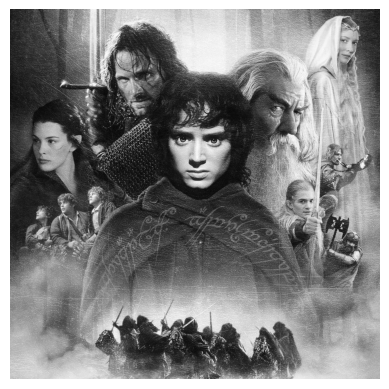

In [150]:
img2_data = np.array(img2)
img2_gray = np.matmul(img2_data, grayscale_arr)
gray2 = img2_gray * (1/255)

plt.imshow(gray2 ,cmap="gray")
plt.axis("off")

In [151]:
f2 = np.fft.fft2(gray2)
f2_shift = np.fft.fftshift(f2)

mag2 = np.abs(f2_shift)
phase2 = f2_shift / mag2

In [152]:
mag1 = np.abs(f_shift)
phase1 = f_shift / mag1

In [153]:
# Special image 1 -> ( mag1 + phase2 )
f_star1 = mag1 * phase2
f_star2 = mag2 * phase1

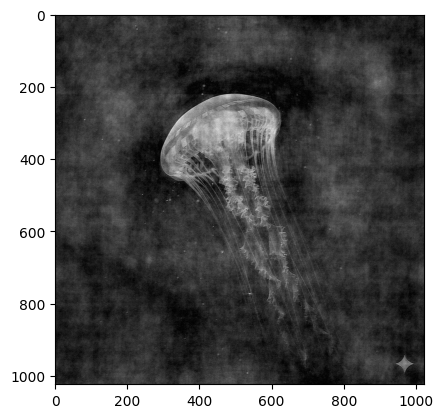

In [157]:
img_back_star2 = np.fft.ifftshift(f_star2)
img_back_star2 = np.fft.ifft2(img_back_star2)
img_back_star2 = np.abs(img_back_star2)

plt.imshow(img_back_star2, cmap='gray')

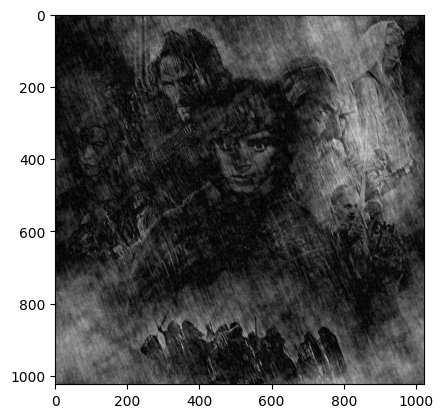

In [156]:
img_back_star1 = np.fft.ifftshift(f_star1)
img_back_star1 = np.fft.ifft2(img_back_star1)
img_back_star1 = np.abs(img_back_star1)

plt.imshow(img_back_star1, cmap='gray')

This image has the phase of the second image (the LOTR image) and magnitude of the jellyfish image. 
Its overall structure and look is mostly the second image (contributor to phase) and it has that slanting texture of the jellyfish image.

Thus we can see phase provides structure - magnitude provides texture.